In [1]:
import os
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate, build_logistic_classifier, post_processing_function, plot_beta_errors, plot_betas

ms = load_from_json(deepcopy(math_spec_json))



## Sanity Check Scenario

Premise: Ensure the simulation framework is operating as intended, without complications from the controller.

Condition(s): Fix the values of:
- $\mathbf u$, the controller update parameters ($k_{qi}, k_{quai}$); and
- $\pmb{\beta}$, the _miner decision population parameter vector_, i.e. the parameter vector for the miner's probabilistic decision on which token to receive as block reward.

Method: MC runs (across realizations of other stochastic variables), generating time series for e.g. miner decisions and proposed block rewards. 

In [3]:
T = 500
blocks = ["Log Simulation Data Mechanism"] + ["Price Movements Wiring",
            "Conversions Wiring",
            "Mine Block Wiring",
            "Unlock Tokens Wiring",
            "Log Simulation Data Mechanism",] * T




            
experiment = {"Name": "Test",
               "Param Modifications": None,
               "State Modifications": None,
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[])

print(df)
plot_beta_errors(df)
plot_betas(df)

Placeholder has no control action options


AssertionError: Amount must be positive. spaces: [{'Qi': -2.6745696416426635e-09}], state: {'Qi Supply': 122343186.63851689, 'Quai Supply': 2781507508.957483, 'Locked Qi Supply': 122343186.63862042, 'Locked Quai Supply': 2370038999.8862348, 'Block Number': 451, 'Block Difficulty': 630.5069182672621, 'Number of Regions': 2, 'Zones per Region': 2, 'Historical Converted Qi': [{'Qi': -0.00010353260137840837, 'Quai': -405300.4325015145, 'Time': 0.00586696383311548}], 'Historical Converted Quai': [{'Qi': 39235485.79966783, 'Quai': -664403.2483108399, 'Time': 0.003788033436827656}, {'Qi': 31967787.33896911, 'Quai': -579014.2238425877, 'Time': 0.0038415391815131107}, {'Qi': 10010197.140041422, 'Quai': -605347.3809753032, 'Time': 0.004068566975544442}, {'Qi': 7590321.434450533, 'Quai': -688240.7412804189, 'Time': 0.004145906370492075}, {'Qi': 6802440.064904299, 'Quai': -661524.0156716665, 'Time': 0.004182178220333186}, {'Qi': 6011675.912246462, 'Quai': -591562.5382989836, 'Time': 0.004217167826269606}, {'Qi': 3260734.637509896, 'Quai': -549155.9316324259, 'Time': 0.0042845739344144745}, {'Qi': 2110834.20783882, 'Quai': -547013.1420403405, 'Time': 0.004345641116506734}, {'Qi': 1780624.0008272869, 'Quai': -654105.2443444732, 'Time': 0.00437379695567875}, {'Qi': 1587005.8506169203, 'Quai': -638190.7865770641, 'Time': 0.004401900930649601}, {'Qi': 1306413.0142353836, 'Quai': -618455.9320645697, 'Time': 0.004428726601680871}, {'Qi': 1753383.6526090796, 'Quai': -614208.2050529412, 'Time': 0.004454690777996839}, {'Qi': 1842932.261275576, 'Quai': -628520.821153351, 'Time': 0.004479806900835667}, {'Qi': 936284.9416613176, 'Quai': -487148.4797808666, 'Time': 0.004504344539707577}, {'Qi': 1142917.4144486783, 'Quai': -659998.8816110832, 'Time': 0.004527584145006794}, {'Qi': 1015288.8580909196, 'Quai': -680076.959830811, 'Time': 0.004550204772769749}, {'Qi': 686586.488095954, 'Quai': -668083.9387053589, 'Time': 0.004594219867583731}, {'Qi': 520244.17206514406, 'Quai': -569387.7209568088, 'Time': 0.0046152072466731225}, {'Qi': 387988.8547838887, 'Quai': -666565.3909689072, 'Time': 0.004635398574399844}, {'Qi': 225821.91430035222, 'Quai': -532811.6619169042, 'Time': 0.004655324647396961}, {'Qi': 212238.36692353367, 'Quai': -620575.0513515059, 'Time': 0.0046749745169072125}, {'Qi': 295536.678677768, 'Quai': -739712.2934549871, 'Time': 0.0046935664650819275}, {'Qi': 269631.1586398169, 'Quai': -685147.7055272667, 'Time': 0.0047118370979101105}, {'Qi': 210412.058201403, 'Quai': -641674.3112215499, 'Time': 0.004729741683566637}, {'Qi': 138421.3909888056, 'Quai': -626490.0587067294, 'Time': 0.004747066721516505}, {'Qi': 132406.80735076964, 'Quai': -612343.9679090605, 'Time': 0.0047641489259873425}, {'Qi': 65801.76374427683, 'Quai': -459752.1111465399, 'Time': 0.004780681906037685}, {'Qi': 97864.35576076801, 'Quai': -748477.868023515, 'Time': 0.004796716184316607}, {'Qi': 73017.0058675785, 'Quai': -651039.2492973632, 'Time': 0.004812621403896418}, {'Qi': 52891.47871526535, 'Quai': -654933.4698878726, 'Time': 0.004828037573814313}, {'Qi': 39621.52364516864, 'Quai': -624241.9741309657, 'Time': 0.004843142629726717}, {'Qi': 31299.954795914393, 'Quai': -506455.7669428916, 'Time': 0.0048579761638527725}, {'Qi': 29919.080926497107, 'Quai': -591460.4985900039, 'Time': 0.004872565387195975}, {'Qi': 31158.70079496893, 'Quai': -645668.1872868716, 'Time': 0.004886571653740838}, {'Qi': 26860.27930836352, 'Quai': -666973.6155293005, 'Time': 0.004900219098065891}, {'Qi': 17345.816344180545, 'Quai': -541068.4363799142, 'Time': 0.00491362441562193}, {'Qi': 18215.335680196044, 'Quai': -602453.8281922215, 'Time': 0.004926829360475719}, {'Qi': 16287.091253773498, 'Quai': -653620.4714063014, 'Time': 0.004939826947331272}, {'Qi': 12241.272197534907, 'Quai': -562350.6320318859, 'Time': 0.004952764339434175}, {'Qi': 11634.647775348398, 'Quai': -586524.7877113597, 'Time': 0.004964991397147177}, {'Qi': 10361.135848077223, 'Quai': -581343.8481936962, 'Time': 0.004977003051563096}, {'Qi': 7866.03321621679, 'Quai': -575423.7759892961, 'Time': 0.004988793569113643}, {'Qi': 8339.191996098629, 'Quai': -597181.8018987741, 'Time': 0.005000356893942076}, {'Qi': 5903.180963137091, 'Quai': -486699.46544179966, 'Time': 0.005011970670738529}, {'Qi': 7041.8573224776155, 'Quai': -610049.6138184792, 'Time': 0.00502312074148053}, {'Qi': 6637.779534241728, 'Quai': -566249.0887490697, 'Time': 0.0050340896614549345}, {'Qi': 5126.294797643074, 'Quai': -613780.0872203922, 'Time': 0.005044922027251703}, {'Qi': 5240.513301150286, 'Quai': -621011.0726153537, 'Time': 0.005055492938655406}, {'Qi': 3649.1933329367394, 'Quai': -488447.82306733297, 'Time': 0.005066205103300793}, {'Qi': 3261.312495594366, 'Quai': -552722.5447035958, 'Time': 0.0050764592712322166}, {'Qi': 3254.2812942507585, 'Quai': -593767.4667276514, 'Time': 0.00508656264964409}, {'Qi': 3069.7306035056013, 'Quai': -581920.2707202886, 'Time': 0.005096413501319232}, {'Qi': 2920.604939490295, 'Quai': -626240.6458727764, 'Time': 0.00510601943603493}, {'Qi': 2299.5586162454742, 'Quai': -584297.9705420814, 'Time': 0.0051154123181974785}, {'Qi': 2971.066716725357, 'Quai': -629665.3703352321, 'Time': 0.005124640648151349}, {'Qi': 2778.322921043404, 'Quai': -644266.413426363, 'Time': 0.005134080092604046}, {'Qi': 2535.081046134267, 'Quai': -587922.7089256778, 'Time': 0.005143102830291957}, {'Qi': 2126.5615852270425, 'Quai': -599763.9147458475, 'Time': 0.005152136497331959}, {'Qi': 2168.287587793397, 'Quai': -676840.0093095463, 'Time': 0.005160884344174876}, {'Qi': 1833.0011717632106, 'Quai': -678083.8991549318, 'Time': 0.005169431540831593}, {'Qi': 2038.0567293822667, 'Quai': -680611.3456947627, 'Time': 0.005178034427081629}, {'Qi': 1730.206128801096, 'Quai': -618421.1060433516, 'Time': 0.005186304523975589}, {'Qi': 1540.2597328731981, 'Quai': -622505.6469258822, 'Time': 0.005194549103446924}, {'Qi': 1292.6558460763567, 'Quai': -594465.0857430017, 'Time': 0.0052028046172301985}, {'Qi': 1555.3281365072048, 'Quai': -623382.488348841, 'Time': 0.005210731296837791}, {'Qi': 1199.4970278768185, 'Quai': -586683.1273431858, 'Time': 0.005218603660045016}, {'Qi': 1068.303372838122, 'Quai': -582844.3253310629, 'Time': 0.005226444397391769}, {'Qi': 1036.831886064199, 'Quai': -694191.6301208818, 'Time': 0.005233938593104877}, {'Qi': 767.7915371085807, 'Quai': -513948.1020136186, 'Time': 0.005241487445188784}, {'Qi': 747.7436531886023, 'Quai': -585513.7323753955, 'Time': 0.005248825375163913}, {'Qi': 630.4063696341458, 'Quai': -544759.9443275885, 'Time': 0.00525604722527217}, {'Qi': 638.9887332392884, 'Quai': -579253.109577318, 'Time': 0.0052629754188639995}, {'Qi': 487.12674083477935, 'Quai': -609818.4576529155, 'Time': 0.005270045606623831}, {'Qi': 471.14910007131357, 'Quai': -561026.890803891, 'Time': 0.0052768994826556965}, {'Qi': 453.90795910059876, 'Quai': -605173.7818353645, 'Time': 0.005283689561534153}, {'Qi': 472.61151543966116, 'Quai': -678671.0252008985, 'Time': 0.005290190851956195}, {'Qi': 390.46231893425835, 'Quai': -499889.6392628163, 'Time': 0.005296862374043437}, {'Qi': 397.3673861790848, 'Quai': -542463.4790389207, 'Time': 0.00530339271619494}, {'Qi': 550.2172706545742, 'Quai': -603466.3504362874, 'Time': 0.005309845106417518}, {'Qi': 522.5973976593743, 'Quai': -565529.45497044, 'Time': 0.005316106672797153}, {'Qi': 389.0570348245766, 'Quai': -539598.2422117138, 'Time': 0.0053223164439754654}, {'Qi': 465.6455844985925, 'Quai': -611297.9362368514, 'Time': 0.0053285517221605735}, {'Qi': 485.20113977333466, 'Quai': -639865.7517840235, 'Time': 0.005334562279855063}, {'Qi': 286.48635789904944, 'Quai': -527861.9591477002, 'Time': 0.005340471974965755}, {'Qi': 227.78011360062965, 'Quai': -435104.28303210856, 'Time': 0.005346289470953785}, {'Qi': 393.9542398380416, 'Quai': -703620.8729407068, 'Time': 0.005352132576998444}, {'Qi': 279.8972912283383, 'Quai': -622836.4365638505, 'Time': 0.005357798209395679}, {'Qi': 294.8117769850875, 'Quai': -554046.8598938261, 'Time': 0.005363418326408147}, {'Qi': 280.8625034116317, 'Quai': -551461.671100289, 'Time': 0.005369039793069942}, {'Qi': 260.4289993270304, 'Quai': -585280.5873274504, 'Time': 0.005374519079805846}, {'Qi': 239.49434076071023, 'Quai': -481816.526686824, 'Time': 0.005379946310860692}, {'Qi': 329.5078439307085, 'Quai': -638616.4893420701, 'Time': 0.0053852620695472656}, {'Qi': 318.0693979180994, 'Quai': -636557.0558135413, 'Time': 0.005390509220450292}, {'Qi': 348.0678388474886, 'Quai': -573576.4569282051, 'Time': 0.0053957053041826025}, {'Qi': 365.5088855158424, 'Quai': -621805.2483238782, 'Time': 0.005400763519475233}, {'Qi': 385.123498714238, 'Quai': -603419.4545926603, 'Time': 0.005405887513991229}, {'Qi': 340.9196974693256, 'Quai': -548819.5003417404, 'Time': 0.005410916599072281}, {'Qi': 241.27967065257405, 'Quai': -439828.98667378456, 'Time': 0.005415804258092375}, {'Qi': 438.519967217921, 'Quai': -621235.1413826257, 'Time': 0.00542067540879666}, {'Qi': 285.9606150529591, 'Quai': -519389.7184624114, 'Time': 0.005425422473179649}, {'Qi': 332.1233491944508, 'Quai': -619512.9499117415, 'Time': 0.005430173912947453}, {'Qi': 297.0278608467308, 'Quai': -567659.0756175439, 'Time': 0.005434867355822463}, {'Qi': 299.00393562645377, 'Quai': -585752.0387304971, 'Time': 0.005439494723587927}, {'Qi': 281.84558937087104, 'Quai': -515234.59984814166, 'Time': 0.005444084893895321}, {'Qi': 294.17347440755935, 'Quai': -537249.475845715, 'Time': 0.005448533062216753}, {'Qi': 409.2462855096521, 'Quai': -637223.5252776879, 'Time': 0.005453036923359615}, {'Qi': 269.7833374796684, 'Quai': -503198.7354735404, 'Time': 0.0054573663259645435}, {'Qi': 257.64176488843304, 'Quai': -480320.50097062596, 'Time': 0.0054615935949421344}, {'Qi': 327.1615529336652, 'Quai': -560037.2882083438, 'Time': 0.005465829455820882}, {'Qi': 304.6193862572161, 'Quai': -589652.6385641153, 'Time': 0.00547010520837377}, {'Qi': 264.47746069988995, 'Quai': -576129.4678592347, 'Time': 0.005474295921397437}, {'Qi': 249.57137174048108, 'Quai': -534069.4509502099, 'Time': 0.005478534695523173}, {'Qi': 288.8797275518222, 'Quai': -535724.2358381463, 'Time': 0.005482601614324432}, {'Qi': 205.04959288496391, 'Quai': -450123.7265373084, 'Time': 0.005486593768589404}, {'Qi': 263.94171225554686, 'Quai': -601854.2370207501, 'Time': 0.005490625411546668}, {'Qi': 252.45432599614432, 'Quai': -602124.6908891422, 'Time': 0.0054944710834414715}, {'Qi': 256.1297673634536, 'Quai': -535828.386670896, 'Time': 0.005498307752423847}, {'Qi': 217.56521098059306, 'Quai': -545100.113960269, 'Time': 0.005502126307111099}, {'Qi': 242.451044746623, 'Quai': -620091.221604581, 'Time': 0.005505773377667652}, {'Qi': 185.84139140662862, 'Quai': -478189.7071837209, 'Time': 0.005509598495485781}, {'Qi': 234.50517502513736, 'Quai': -492622.5691034631, 'Time': 0.0055132686111222205}, {'Qi': 226.72503042824837, 'Quai': -592312.4783189924, 'Time': 0.005516920049878515}, {'Qi': 221.16149150405735, 'Quai': -465039.3286953201, 'Time': 0.005520513242181644}, {'Qi': 197.61210221670007, 'Quai': -509957.1697529268, 'Time': 0.005524031955718465}, {'Qi': 213.55916433854378, 'Quai': -556355.0124279973, 'Time': 0.005527558708767281}, {'Qi': 221.90882183306672, 'Quai': -600596.4585565475, 'Time': 0.005531014363639379}, {'Qi': 210.89035254020752, 'Quai': -581764.7596643828, 'Time': 0.005534429667143524}, {'Qi': 209.23169139175323, 'Quai': -592181.6850422214, 'Time': 0.005537829759031669}, {'Qi': 230.42299621874878, 'Quai': -595811.9093893063, 'Time': 0.005541173078972527}, {'Qi': 147.32197094689474, 'Quai': -472002.0108608609, 'Time': 0.005544495309130048}, {'Qi': 132.3907045159372, 'Quai': -485713.98165961594, 'Time': 0.0055477625499689796}, {'Qi': 130.98209623521902, 'Quai': -557762.1619763012, 'Time': 0.005550985700323385}, {'Qi': 163.06437841014082, 'Quai': -582193.7497924665, 'Time': 0.005554190445634609}, {'Qi': 150.74434589065058, 'Quai': -623012.2953838273, 'Time': 0.005557339301563738}, {'Qi': 99.19130032266808, 'Quai': -578400.7138441527, 'Time': 0.0055604482958563715}, {'Qi': 100.006009088642, 'Quai': -481440.3353005316, 'Time': 0.005563539209313115}, {'Qi': 98.05464007111287, 'Quai': -582041.3634565792, 'Time': 0.005566607289626807}, {'Qi': 121.89345437234265, 'Quai': -579574.3025047131, 'Time': 0.005569649767206365}, {'Qi': 106.58024807978833, 'Quai': -579418.9117728734, 'Time': 0.0055727037881972705}, {'Qi': 76.79539920780731, 'Quai': -537728.3841475878, 'Time': 0.005575708962543001}, {'Qi': 67.03566455709358, 'Quai': -542442.6223786451, 'Time': 0.005578660866267474}, {'Qi': 58.788403860524376, 'Quai': -529079.7379866221, 'Time': 0.005581502643766814}, {'Qi': 48.09596856453203, 'Quai': -495279.6043995606, 'Time': 0.0055844016479238935}, {'Qi': 52.73526028664689, 'Quai': -605615.672482457, 'Time': 0.0055872018838982115}, {'Qi': 48.669846427940314, 'Quai': -540578.5728191637, 'Time': 0.005589969642065734}, {'Qi': 44.581992440628476, 'Quai': -583451.0338809686, 'Time': 0.005592747804701375}, {'Qi': 51.48655760463487, 'Quai': -596659.0054529211, 'Time': 0.00559552134418693}, {'Qi': 38.14797114451902, 'Quai': -487992.8754190987, 'Time': 0.0055982216887062826}, {'Qi': 30.462194678399207, 'Quai': -444555.0020812299, 'Time': 0.0056009546097489284}, {'Qi': 39.06822340242733, 'Quai': -576947.139574599, 'Time': 0.005603673863750581}, {'Qi': 35.499658142631716, 'Quai': -600440.2408526568, 'Time': 0.005606296326426337}, {'Qi': 26.91107776558321, 'Quai': -573108.1253431963, 'Time': 0.005608883901556273}, {'Qi': 25.251833305056905, 'Quai': -554113.8777487843, 'Time': 0.0056114248114476715}, {'Qi': 31.286692807667457, 'Quai': -542281.2467598665, 'Time': 0.005613936419748437}, {'Qi': 30.438294820713836, 'Quai': -540944.8986476539, 'Time': 0.005616454774563105}, {'Qi': 29.24234035899675, 'Quai': -535287.44743152, 'Time': 0.005618907805627022}, {'Qi': 25.429339409106436, 'Quai': -558602.8635571063, 'Time': 0.005621360083382778}, {'Qi': 18.589143871326247, 'Quai': -404475.71373786795, 'Time': 0.005623786323284677}, {'Qi': 24.403814038658428, 'Quai': -547249.3114391501, 'Time': 0.00562615542772018}, {'Qi': 20.27744404880904, 'Quai': -466367.3352572236, 'Time': 0.005628598874589563}, {'Qi': 23.798124995964145, 'Quai': -512606.2733309751, 'Time': 0.005631026961565888}, {'Qi': 22.40420716770157, 'Quai': -505516.8831988333, 'Time': 0.005633368831095657}, {'Qi': 18.29601519960798, 'Quai': -517243.26891991554, 'Time': 0.005635653412238754}, {'Qi': 21.938161300136496, 'Quai': -501393.4012835865, 'Time': 0.00563796726483033}, {'Qi': 13.526156618029283, 'Quai': -430269.49052641226, 'Time': 0.005640235771463465}, {'Qi': 15.846807371240082, 'Quai': -469458.46596089087, 'Time': 0.0056424922263529015}, {'Qi': 17.74593533520211, 'Quai': -523227.41991035006, 'Time': 0.0056446975811549815}, {'Qi': 13.953991268652628, 'Quai': -554115.2469753321, 'Time': 0.005646878988577498}, {'Qi': 10.705420576181737, 'Quai': -492843.27352945023, 'Time': 0.005649062870611366}, {'Qi': 11.965906406723192, 'Quai': -563389.1215582348, 'Time': 0.005651226735200745}, {'Qi': 9.940657788116368, 'Quai': -526953.3137744948, 'Time': 0.00565336075481671}, {'Qi': 11.28850084660352, 'Quai': -589057.8328205423, 'Time': 0.005655498005881141}, {'Qi': 7.068299645595291, 'Quai': -440408.6305479105, 'Time': 0.0056576032398819864}, {'Qi': 8.449506655031389, 'Quai': -574454.1927620982, 'Time': 0.0056596264615119615}, {'Qi': 8.497502917528587, 'Quai': -549281.3054859965, 'Time': 0.005661669088140906}, {'Qi': 6.148670173063498, 'Quai': -406924.06874224445, 'Time': 0.005663745972968919}, {'Qi': 7.925159356498508, 'Quai': -593177.9905086331, 'Time': 0.005665816252251179}, {'Qi': 7.244307030495897, 'Quai': -604673.6695591743, 'Time': 0.0056677880074916575}, {'Qi': 8.615051098791632, 'Quai': -645078.779456142, 'Time': 0.0056697727355100825}, {'Qi': 7.022194277246708, 'Quai': -536652.0110645064, 'Time': 0.005671711407600155}, {'Qi': 4.915826115640255, 'Quai': -476745.6186784442, 'Time': 0.005673643767717052}, {'Qi': 5.483343422622192, 'Quai': -540278.6508472513, 'Time': 0.005675594514581464}, {'Qi': 4.7447303404254715, 'Quai': -476758.2346662709, 'Time': 0.005677463678142483}, {'Qi': 3.8446284455417454, 'Quai': -413480.34954029974, 'Time': 0.00567935732074907}, {'Qi': 5.224258117585675, 'Quai': -567642.1972647046, 'Time': 0.005681196267077683}, {'Qi': 5.005930948007266, 'Quai': -556244.0441300939, 'Time': 0.005683052106077236}, {'Qi': 4.545363170529597, 'Quai': -538595.9351046976, 'Time': 0.005684921188439308}, {'Qi': 4.347172555342335, 'Quai': -525223.666945059, 'Time': 0.0056867453416709745}, {'Qi': 5.346338833737353, 'Quai': -525933.3034966224, 'Time': 0.005688523093988012}, {'Qi': 3.8768061462056167, 'Quai': -491709.3053925496, 'Time': 0.005690305024247818}, {'Qi': 3.6745433439023967, 'Quai': -459431.24647836376, 'Time': 0.005692039988166508}, {'Qi': 4.591354339909002, 'Quai': -536011.3302854989, 'Time': 0.005693756241784511}, {'Qi': 5.151401108034344, 'Quai': -511136.76175182825, 'Time': 0.0056954839308788535}, {'Qi': 4.315053425830259, 'Quai': -497325.5750538793, 'Time': 0.00569718430918021}, {'Qi': 4.0051177268511315, 'Quai': -518624.7092477167, 'Time': 0.005698880090084384}, {'Qi': 3.235600433515865, 'Quai': -428604.2350253536, 'Time': 0.005700579292536398}, {'Qi': 4.513418814763449, 'Quai': -581033.3905730773, 'Time': 0.005702209377139936}, {'Qi': 4.45859715832851, 'Quai': -535744.4925637317, 'Time': 0.005703857476748692}, {'Qi': 3.972799521216334, 'Quai': -488932.36637359514, 'Time': 0.005705493968505394}, {'Qi': 3.969084650086131, 'Quai': -498930.87759207026, 'Time': 0.005707119340279151}, {'Qi': 4.055154562660936, 'Quai': -572902.5762396815, 'Time': 0.005708733741441733}, {'Qi': 3.955814470423157, 'Quai': -534160.2334684063, 'Time': 0.005710325883733235}, {'Qi': 5.052530772907144, 'Quai': -557261.1645000337, 'Time': 0.005711895125218745}, {'Qi': 4.416447536362834, 'Quai': -567391.9850222927, 'Time': 0.005713448769011306}, {'Qi': 4.505919547008915, 'Quai': -499947.8304648788, 'Time': 0.005715022281379028}, {'Qi': 3.9511503545866606, 'Quai': -543510.5161937947, 'Time': 0.005716564467925992}, {'Qi': 4.603351232375194, 'Quai': -520153.8880014946, 'Time': 0.005718056478976321}, {'Qi': 4.167882183418055, 'Quai': -528461.0413294235, 'Time': 0.0057195471819946634}, {'Qi': 4.152163735843385, 'Quai': -593348.0997675163, 'Time': 0.0057210010776176075}, {'Qi': 3.824925542180134, 'Quai': -540542.428605861, 'Time': 0.005722467932597331}, {'Qi': 5.1936455820672345, 'Quai': -601516.2115862072, 'Time': 0.0057239101298573155}, {'Qi': 3.696325542016925, 'Quai': -528513.5630834275, 'Time': 0.005725333743421938}, {'Qi': 4.00882708968098, 'Quai': -567128.6665627896, 'Time': 0.005726736314610077}, {'Qi': 3.4995727732396724, 'Quai': -478992.6157549059, 'Time': 0.005728145047172447}, {'Qi': 3.399665486489079, 'Quai': -483383.58537027007, 'Time': 0.00572955119264212}, {'Qi': 4.43970467029271, 'Quai': -649443.0404760872, 'Time': 0.0057309593899950734}, {'Qi': 3.668893891170739, 'Quai': -608443.5072189609, 'Time': 0.0057323185401659555}, {'Qi': 2.7778158488596243, 'Quai': -464136.0545602489, 'Time': 0.005733644473280715}, {'Qi': 3.583485734662775, 'Quai': -586706.9461281791, 'Time': 0.005735006971028313}, {'Qi': 3.4636982320638854, 'Quai': -590829.7702079818, 'Time': 0.005736342974493048}, {'Qi': 2.557863297176328, 'Quai': -447662.3290244933, 'Time': 0.005737681560111802}, {'Qi': 2.6507846921549594, 'Quai': -529878.0689738482, 'Time': 0.005739001812080488}, {'Qi': 3.1298502110858784, 'Quai': -587258.9908301746, 'Time': 0.005740316433507521}, {'Qi': 2.7363726643980244, 'Quai': -580796.7327450949, 'Time': 0.005741593833497634}, {'Qi': 2.6179387048346268, 'Quai': -535028.4816354831, 'Time': 0.0057428657318000864}, {'Qi': 2.668576052409198, 'Quai': -552929.0394811819, 'Time': 0.005744157444936786}, {'Qi': 2.5892989898506125, 'Quai': -573813.0999362681, 'Time': 0.005745411742356458}, {'Qi': 1.812440954592007, 'Quai': -467582.97346728103, 'Time': 0.005746661019566647}, {'Qi': 1.9269921262628844, 'Quai': -507627.1542212608, 'Time': 0.005747879962482685}, {'Qi': 1.9688991509444287, 'Quai': -530129.4609472802, 'Time': 0.005749107884354963}, {'Qi': 1.7816108959195998, 'Quai': -506051.88506453356, 'Time': 0.005750324968383591}, {'Qi': 1.671065442237099, 'Quai': -466406.40319519787, 'Time': 0.005751524806518864}, {'Qi': 2.1849779706258863, 'Quai': -535174.8360324057, 'Time': 0.0057527240765023495}, {'Qi': 1.5914290451971251, 'Quai': -480443.1336465137, 'Time': 0.005753901720986989}, {'Qi': 1.849688876037712, 'Quai': -471270.36816953, 'Time': 0.005755046393522292}, {'Qi': 1.488029084220765, 'Quai': -495278.07673099596, 'Time': 0.005756215755727022}, {'Qi': 1.3889947023434026, 'Quai': -473011.0382644832, 'Time': 0.005757356510542114}, {'Qi': 1.4040776370076289, 'Quai': -501483.0881900567, 'Time': 0.005758491341928999}, {'Qi': 1.5164041886877626, 'Quai': -502453.64828025294, 'Time': 0.00575961929592512}, {'Qi': 1.7798582062302446, 'Quai': -546147.0261087873, 'Time': 0.005760756478339174}, {'Qi': 1.3789481502597722, 'Quai': -560902.2956615434, 'Time': 0.005761877959231322}, {'Qi': 1.1434430018694626, 'Quai': -468267.5984340009, 'Time': 0.00576299070404118}, {'Qi': 1.4523249442655903, 'Quai': -478748.8787278029, 'Time': 0.005764090807048674}, {'Qi': 1.055483244657465, 'Quai': -449825.35523891787, 'Time': 0.005765162973358741}, {'Qi': 1.1328910154487641, 'Quai': -480761.2493823081, 'Time': 0.00576621988460796}, {'Qi': 1.4332317508496042, 'Quai': -565541.2904248321, 'Time': 0.005767284306252297}, {'Qi': 0.99591061753702, 'Quai': -505459.67557488667, 'Time': 0.005768334063435795}, {'Qi': 0.9191111860947011, 'Quai': -467892.76512532425, 'Time': 0.005769363037114931}, {'Qi': 1.0152191457947666, 'Quai': -554814.1859738132, 'Time': 0.005770411421305683}, {'Qi': 1.077181599974491, 'Quai': -493312.35868042347, 'Time': 0.005771426058344891}, {'Qi': 0.711347416291058, 'Quai': -426454.4709586093, 'Time': 0.005772416526224203}, {'Qi': 0.8681186495491698, 'Quai': -509172.16299147886, 'Time': 0.005773431801368345}, {'Qi': 0.9214591240594407, 'Quai': -517060.6981448755, 'Time': 0.005774424618622075}, {'Qi': 0.771771424863067, 'Quai': -481532.12377496617, 'Time': 0.005775401902499865}, {'Qi': 0.9430672795352645, 'Quai': -475792.7203639096, 'Time': 0.005776389130760028}, {'Qi': 0.7335703646980758, 'Quai': -445546.8513066017, 'Time': 0.0057773636935192}, {'Qi': 0.8162945102557374, 'Quai': -463011.3615775561, 'Time': 0.005778348099614784}, {'Qi': 0.7922035635774833, 'Quai': -467634.58997064445, 'Time': 0.005779300982304226}, {'Qi': 0.5156012701811565, 'Quai': -372334.8796197035, 'Time': 0.005780262222506431}, {'Qi': 0.7031413535820618, 'Quai': -481940.42035052745, 'Time': 0.0057812011572501276}, {'Qi': 0.8099161652679079, 'Quai': -493376.157020816, 'Time': 0.005782131024414439}, {'Qi': 0.5693318129731868, 'Quai': -461817.57235558616, 'Time': 0.00578307586693551}, {'Qi': 0.5860557771095396, 'Quai': -435308.950076368, 'Time': 0.005784009719563477}, {'Qi': 0.558699625027154, 'Quai': -467276.05691279535, 'Time': 0.005784897118427107}, {'Qi': 0.6529453725872368, 'Quai': -547442.6488547887, 'Time': 0.005785788442040422}, {'Qi': 0.6101454606494521, 'Quai': -565042.9666842046, 'Time': 0.005786672721561243}, {'Qi': 0.518142467733963, 'Quai': -469973.0305830295, 'Time': 0.005787550535005709}, {'Qi': 0.5114309254114713, 'Quai': -438998.1265399679, 'Time': 0.0057884028285830275}, {'Qi': 0.7060059014998352, 'Quai': -535563.8127925261, 'Time': 0.005789269474780787}, {'Qi': 0.5615845215776374, 'Quai': -426491.1544938079, 'Time': 0.005790139390013819}, {'Qi': 0.6492138436417837, 'Quai': -599057.2589162079, 'Time': 0.005790991593936668}, {'Qi': 0.5090028124826698, 'Quai': -416307.53545153356, 'Time': 0.0057918293150450795}, {'Qi': 0.5103459416208949, 'Quai': -509680.873844053, 'Time': 0.0057926676731110075}, {'Qi': 0.5094616314998155, 'Quai': -424901.4448095805, 'Time': 0.005793505245091975}, {'Qi': 0.48100539214393667, 'Quai': -503689.75385726715, 'Time': 0.005794334319114993}, {'Qi': 0.5129100746511358, 'Quai': -495440.7908579175, 'Time': 0.005795154100262294}, {'Qi': 0.4700638271424602, 'Quai': -484843.18735022255, 'Time': 0.005795953297042283}, {'Qi': 0.5753853281621297, 'Quai': -562032.4109955597, 'Time': 0.0057967660154740796}, {'Qi': 0.42857723301915857, 'Quai': -424762.85396383144, 'Time': 0.005797578409151772}, {'Qi': 0.48754133144599476, 'Quai': -430983.8509019407, 'Time': 0.005798376808485477}, {'Qi': 0.5317804962220426, 'Quai': -595408.3727140143, 'Time': 0.00579917309842008}, {'Qi': 0.4534249422010434, 'Quai': -496667.26473183685, 'Time': 0.0057999749759566665}, {'Qi': 0.4608523961615023, 'Quai': -479788.3717499084, 'Time': 0.005800771600809039}, {'Qi': 0.3761126541434056, 'Quai': -456878.8716227713, 'Time': 0.005801546963292829}, {'Qi': 0.41233811132507364, 'Quai': -458888.38046691153, 'Time': 0.005802312544381947}, {'Qi': 0.3232428415039239, 'Quai': -420792.9398399, 'Time': 0.005803071744401489}, {'Qi': 0.3708251510854115, 'Quai': -469163.7654409288, 'Time': 0.005803811080860218}, {'Qi': 0.3705497779379662, 'Quai': -443891.3018393818, 'Time': 0.00580455972114699}, {'Qi': 0.37216565930374723, 'Quai': -492535.9972258543, 'Time': 0.0058052907203106335}, {'Qi': 0.3192506548568165, 'Quai': -424084.99600874254, 'Time': 0.005806032422701967}, {'Qi': 0.5001663115645337, 'Quai': -534568.1905442651, 'Time': 0.005806768041857725}, {'Qi': 0.36361803126520037, 'Quai': -472857.21034416015, 'Time': 0.005807484638449672}, {'Qi': 0.33476818435853734, 'Quai': -455987.880460047, 'Time': 0.005808204063526437}, {'Qi': 0.3737059763525394, 'Quai': -408233.1849124651, 'Time': 0.005808919811566482}, {'Qi': 0.37765459080676017, 'Quai': -503400.8085488598, 'Time': 0.0058096205355554755}, {'Qi': 0.23834573051440625, 'Quai': -332734.7220040317, 'Time': 0.005810318555504944}, {'Qi': 0.35484507217785766, 'Quai': -478858.23576602846, 'Time': 0.005811017031349893}, {'Qi': 0.309988370714347, 'Quai': -446370.0374821824, 'Time': 0.005811723631462584}, {'Qi': 0.35006549835330586, 'Quai': -505817.9261975507, 'Time': 0.005812418485611826}, {'Qi': 0.34591798674372454, 'Quai': -533001.982777038, 'Time': 0.0058131005345474045}, {'Qi': 0.26190605749211976, 'Quai': -418362.1098792826, 'Time': 0.005813776037440915}, {'Qi': 0.2871708938027183, 'Quai': -448497.7486721931, 'Time': 0.005814444449679565}, {'Qi': 0.32723115576566575, 'Quai': -530433.1615904588, 'Time': 0.005815110913274151}, {'Qi': 0.2562759126011307, 'Quai': -419739.0350532726, 'Time': 0.005815758779318782}, {'Qi': 0.29250866232744643, 'Quai': -467862.2296192802, 'Time': 0.005816394201040891}, {'Qi': 0.37335248493903345, 'Quai': -500235.7777121061, 'Time': 0.005817039843199722}, {'Qi': 0.2534644671680001, 'Quai': -387312.2768676907, 'Time': 0.0058176907533273}, {'Qi': 0.24062142757527305, 'Quai': -395274.11686551763, 'Time': 0.005818324624071448}, {'Qi': 0.33688894867043523, 'Quai': -523798.32050572854, 'Time': 0.0058189567719029184}, {'Qi': 0.24183946766429698, 'Quai': -417756.9394860439, 'Time': 0.005819586077763816}, {'Qi': 0.2601625929233885, 'Quai': -412588.46188323793, 'Time': 0.005820219890088792}, {'Qi': 0.33109821090436403, 'Quai': -552766.5813853234, 'Time': 0.005820835130678624}, {'Qi': 0.24850719385052403, 'Quai': -464223.29758414906, 'Time': 0.005821447730501863}, {'Qi': 0.3184131439281679, 'Quai': -495659.4704912416, 'Time': 0.005822032809138224}, {'Qi': 0.27181077655327474, 'Quai': -505719.61250199005, 'Time': 0.005822624733381256}, {'Qi': 0.21602186259566536, 'Quai': -444845.86062098545, 'Time': 0.005823216778308389}, {'Qi': 0.2522530845109958, 'Quai': -476237.82669032214, 'Time': 0.005823804924801821}, {'Qi': 0.23156581146745467, 'Quai': -508417.2219731124, 'Time': 0.005824404068138887}, {'Qi': 0.23857457554151718, 'Quai': -508952.7729762347, 'Time': 0.005824973883585233}, {'Qi': 0.25086104086778216, 'Quai': -506611.09879345057, 'Time': 0.005825544751709591}, {'Qi': 0.19821694857439964, 'Quai': -423049.9843245028, 'Time': 0.005826113948078624}, {'Qi': 0.1895843956133063, 'Quai': -446962.75649664353, 'Time': 0.005826672627242599}, {'Qi': 0.18977245446708751, 'Quai': -408366.383543535, 'Time': 0.005827229105533865}, {'Qi': 0.2176962533819217, 'Quai': -495425.85890842194, 'Time': 0.0058277822821150346}, {'Qi': 0.1810733533656724, 'Quai': -440344.7756606566, 'Time': 0.0058283470219315575}, {'Qi': 0.24052186824706512, 'Quai': -518141.7508061265, 'Time': 0.00582890271421432}, {'Qi': 0.21758280623864215, 'Quai': -471301.4479035615, 'Time': 0.005829458214464552}, {'Qi': 0.16460638790240323, 'Quai': -434545.8472234362, 'Time': 0.005830002681919666}, {'Qi': 0.19676401964226437, 'Quai': -433947.88933082134, 'Time': 0.005830542483871939}, {'Qi': 0.2028033862680202, 'Quai': -450816.79896579153, 'Time': 0.005831075269143033}, {'Qi': 0.16397491771619152, 'Quai': -459979.5952810301, 'Time': 0.005831601991526404}, {'Qi': 0.24767605175635532, 'Quai': -561742.5182041666, 'Time': 0.005832120221504978}, {'Qi': 0.14753944996588864, 'Quai': -408292.7311289499, 'Time': 0.005832641976073191}, {'Qi': 0.16514108818221537, 'Quai': -493944.84983282315, 'Time': 0.005833154792027618}, {'Qi': 0.19029944949773797, 'Quai': -537413.8750949667, 'Time': 0.005833667715362965}, {'Qi': 0.16188353133564015, 'Quai': -489124.1440403039, 'Time': 0.0058341765600614165}, {'Qi': 0.16085595436535338, 'Quai': -405410.3919208445, 'Time': 0.005834678554712596}, {'Qi': 0.1418471109547237, 'Quai': -433233.96024545195, 'Time': 0.005835177568579159}, {'Qi': 0.18478978940970558, 'Quai': -493014.9195046316, 'Time': 0.0058356780963348814}, {'Qi': 0.14035582616295814, 'Quai': -477905.056156745, 'Time': 0.005836175990534788}, {'Qi': 0.11962806940854581, 'Quai': -445815.96308083535, 'Time': 0.005836667336832989}, {'Qi': 0.1193273618550841, 'Quai': -446462.58978817845, 'Time': 0.005837152884453842}, {'Qi': 0.13353942692516244, 'Quai': -458083.41593371454, 'Time': 0.0058376348481443616}, {'Qi': 0.12013226041922925, 'Quai': -363296.5840370794, 'Time': 0.005838111359693385}, {'Qi': 0.15749317077597919, 'Quai': -546053.1278015345, 'Time': 0.0058385847968098845}, {'Qi': 0.11489946455220398, 'Quai': -439542.93165639864, 'Time': 0.005839057433784442}, {'Qi': 0.15058900810610187, 'Quai': -525175.4394876917, 'Time': 0.005839524219769051}, {'Qi': 0.10484232572972738, 'Quai': -368743.8041391117, 'Time': 0.005839982532409295}, {'Qi': 0.12721332558153292, 'Quai': -476303.023961777, 'Time': 0.0058404364967812655}, {'Qi': 0.15462494604677685, 'Quai': -479378.6790206741, 'Time': 0.005840887914724083}, {'Qi': 0.1538752048944682, 'Quai': -480310.23267770244, 'Time': 0.005841348943618988}, {'Qi': 0.14269886439648874, 'Quai': -448636.04125091113, 'Time': 0.005841794620207169}, {'Qi': 0.14133008477221837, 'Quai': -447711.54044198006, 'Time': 0.005842246300525822}, {'Qi': 0.1531942477212995, 'Quai': -486204.0430683936, 'Time': 0.005842690382192977}, {'Qi': 0.12780161210622026, 'Quai': -462205.3761984689, 'Time': 0.005843140928766369}, {'Qi': 0.1077395045019868, 'Quai': -415039.54863836395, 'Time': 0.005843573840292885}, {'Qi': 0.16450725339573244, 'Quai': -525739.9404268621, 'Time': 0.005844009139452473}, {'Qi': 0.14573695771430922, 'Quai': -469929.06622527755, 'Time': 0.005844436536252585}, {'Qi': 0.12955004942995552, 'Quai': -476024.1389609956, 'Time': 0.005844862909603716}, {'Qi': 0.13542399054734178, 'Quai': -441530.17180076754, 'Time': 0.005845291641954582}, {'Qi': 0.11927406744982265, 'Quai': -473602.2288617146, 'Time': 0.005845715687748055}, {'Qi': 0.14741846851237927, 'Quai': -488700.2202118298, 'Time': 0.005846138062737885}, {'Qi': 0.10151773533316086, 'Quai': -423713.67826454225, 'Time': 0.005846551987284094}, {'Qi': 0.11667482565821222, 'Quai': -443059.29666446114, 'Time': 0.00584696931624577}, {'Qi': 0.09154174841157992, 'Quai': -350072.439490227, 'Time': 0.005847384045729766}, {'Qi': 0.10877931845836264, 'Quai': -441837.6066174322, 'Time': 0.0058477826194250895}, {'Qi': 0.1123257008983589, 'Quai': -429781.7631707331, 'Time': 0.005848188031316026}, {'Qi': 0.10053087989972759, 'Quai': -408972.24274873897, 'Time': 0.005848577725920007}, {'Qi': 0.09855819940962882, 'Quai': -415348.1994423225, 'Time': 0.0058489788079560305}, {'Qi': 0.1390946810302267, 'Quai': -471758.0406851773, 'Time': 0.005849371858212179}, {'Qi': 0.10020119787916931, 'Quai': -424373.5993287403, 'Time': 0.0058497606001062415}, {'Qi': 0.1062342097347676, 'Quai': -437775.39233297453, 'Time': 0.005850144351042222}, {'Qi': 0.10344621706260552, 'Quai': -427008.2654430527, 'Time': 0.005850524103647741}, {'Qi': 0.09586056283428974, 'Quai': -396468.09742028936, 'Time': 0.005850899369807221}, {'Qi': 0.08704238541216873, 'Quai': -396628.2792233966, 'Time': 0.0058512758221945845}, {'Qi': 0.11105198044952302, 'Quai': -422429.520269762, 'Time': 0.005851651580817539}, {'Qi': 0.07621081439104052, 'Quai': -386979.9616379289, 'Time': 0.005852030151026006}, {'Qi': 0.08191055533488012, 'Quai': -429146.2547008971, 'Time': 0.0058523985870321486}, {'Qi': 0.07015413317879193, 'Quai': -407853.9019208632, 'Time': 0.005852768595244241}, {'Qi': 0.10228756011451853, 'Quai': -477933.2858271877, 'Time': 0.005853136243228204}, {'Qi': 0.07020379104427302, 'Quai': -413380.9369355416, 'Time': 0.005853492447363753}, {'Qi': 0.07719590210693489, 'Quai': -440875.9317525046, 'Time': 0.005853842351950171}, {'Qi': 0.07441791010258764, 'Quai': -448520.09880492516, 'Time': 0.005854201869414778}, {'Qi': 0.04881853189627617, 'Quai': -353860.48380356224, 'Time': 0.005854550345098761}, {'Qi': 0.05253422201712377, 'Quai': -373712.94217374886, 'Time': 0.005854895156460792}, {'Qi': 0.05567964790191243, 'Quai': -424235.1784281747, 'Time': 0.005855240204806562}, {'Qi': 0.05215367212516762, 'Quai': -399849.9398545347, 'Time': 0.005855582573094162}, {'Qi': 0.04012254171892987, 'Quai': -362234.2748488344, 'Time': 0.005855923544307045}, {'Qi': 0.044004276798071125, 'Quai': -414428.5860209797, 'Time': 0.005856261426433533}, {'Qi': 0.05448736299656844, 'Quai': -412504.03192707064, 'Time': 0.005856598116074071}, {'Qi': 0.04113941796282995, 'Quai': -394086.263391325, 'Time': 0.005856927795197163}, {'Qi': 0.050307226279363536, 'Quai': -427274.27530359314, 'Time': 0.0058572634771942}, {'Qi': 0.03957751461316499, 'Quai': -407246.1013337735, 'Time': 0.005857591705036819}, {'Qi': 0.05020133225340429, 'Quai': -430761.11684620124, 'Time': 0.005857921326077138}, {'Qi': 0.04398559984815929, 'Quai': -431995.2699179204, 'Time': 0.0058582525259754025}, {'Qi': 0.04251696677985175, 'Quai': -445608.22110001853, 'Time': 0.0058585661040503716}, {'Qi': 0.03809276061360136, 'Quai': -377520.13574671966, 'Time': 0.005858884657517044}, {'Qi': 0.05049873757882849, 'Quai': -442714.0204061553, 'Time': 0.0058592055057484545}, {'Qi': 0.035247543445424835, 'Quai': -376199.6995495584, 'Time': 0.005859526111657856}, {'Qi': 0.03926277631583377, 'Quai': -396290.56528165645, 'Time': 0.005859842064875483}, {'Qi': 0.04088262317678012, 'Quai': -440920.89302332624, 'Time': 0.005860144608095208}, {'Qi': 0.038256773537739444, 'Quai': -429565.5071932193, 'Time': 0.005860456763215281}, {'Qi': 0.04316610931733686, 'Quai': -443180.7165999744, 'Time': 0.005860760969222464}, {'Qi': 0.02596834581649376, 'Quai': -358506.4494768258, 'Time': 0.005861060031603446}, {'Qi': 0.024829382603223035, 'Quai': -431908.1278157413, 'Time': 0.005861358772285903}, {'Qi': 0.022221778179276574, 'Quai': -376362.4902785375, 'Time': 0.005861658556409256}, {'Qi': 0.02363464497725965, 'Quai': -402479.66527659283, 'Time': 0.0058619536091666456}, {'Qi': 0.020168861165851516, 'Quai': -357335.2861392437, 'Time': 0.005862251348368067}, {'Qi': 0.021357927389028305, 'Quai': -409098.38408121234, 'Time': 0.005862543639910541}, {'Qi': 0.016896786223883475, 'Quai': -393526.22208595613, 'Time': 0.00586283423842919}, {'Qi': 0.018281364669629024, 'Quai': -428825.9518730325, 'Time': 0.005863123113447985}, {'Qi': 0.018749811240632908, 'Quai': -442679.59712048096, 'Time': 0.005863409315214228}, {'Qi': 0.011972834508822267, 'Quai': -404229.2315319266, 'Time': 0.005863695578359484}, {'Qi': 0.007144843750509371, 'Quai': -335317.5283375783, 'Time': 0.005863979788027094}, {'Qi': 0.007127148143619853, 'Quai': -442265.07770041685, 'Time': 0.005864263840970485}, {'Qi': 0.005484386575445081, 'Quai': -403772.71266135765, 'Time': 0.005864539122748196}, {'Qi': 0.004870739670842071, 'Quai': -410195.8233455577, 'Time': 0.005864815601969898}, {'Qi': 0.005150451793851183, 'Quai': -384078.53719137073, 'Time': 0.005865085087049314}, {'Qi': 0.003191625355010841, 'Quai': -421470.53927066, 'Time': 0.005865360861874518}, {'Qi': 0.0017803335308650414, 'Quai': -495452.27249446005, 'Time': 0.0058656326202270745}, {'Qi': 0.0008652640383587951, 'Quai': -391504.9410971967, 'Time': 0.005865903357513001}, {'Qi': 0.00033630079955245554, 'Quai': -452057.38943797513, 'Time': 0.0058661709910939625}, {'Qi': 0.0002897591856084533, 'Quai': -392431.8382459632, 'Time': 0.005866437956061786}, {'Qi': 0.0004445108553589158, 'Quai': -485009.35243117204, 'Time': 0.005866694454247602}], 'Historical Mined Ratio': [{'Block Height': 0, 'Ratio': 0.0009617012788647455}, {'Block Height': 1, 'Ratio': 0.0005855602694646182}, {'Block Height': 2, 'Ratio': 0.0035889145290530573}, {'Block Height': 3, 'Ratio': 0.004858241199801946}, {'Block Height': 4, 'Ratio': 0.012047011630854256}, {'Block Height': 5, 'Ratio': 0.010240460845929856}, {'Block Height': 6, 'Ratio': 0.006125140473352643}, {'Block Height': 7, 'Ratio': 0.009497518509540072}, {'Block Height': 8, 'Ratio': 0.011505831298676527}, {'Block Height': 9, 'Ratio': 0.01832646136086717}, {'Block Height': 10, 'Ratio': 0.00930417379133148}, {'Block Height': 11, 'Ratio': 0.010839584081373706}, {'Block Height': 12, 'Ratio': 0.04577248515003907}, {'Block Height': 13, 'Ratio': 0.0400835212313556}, {'Block Height': 14, 'Ratio': 0.042858732149303004}, {'Block Height': 15, 'Ratio': 0.0746986928991976}, {'Block Height': 16, 'Ratio': 0.03923292031602697}, {'Block Height': 17, 'Ratio': 0.1632426196448647}, {'Block Height': 18, 'Ratio': 0.2539759442367309}, {'Block Height': 19, 'Ratio': 0.24129771683775042}, {'Block Height': 20, 'Ratio': 0.2714699820711007}, {'Block Height': 21, 'Ratio': 0.1145659389174188}, {'Block Height': 22, 'Ratio': 0.3123684111472674}, {'Block Height': 23, 'Ratio': 0.4859755202538471}, {'Block Height': 24, 'Ratio': 0.3568998986752718}, {'Block Height': 25, 'Ratio': 0.6479667560211002}, {'Block Height': 26, 'Ratio': 0.46303429395637763}, {'Block Height': 27, 'Ratio': 0.3969055042546979}, {'Block Height': 28, 'Ratio': 0.5296050228604581}, {'Block Height': 29, 'Ratio': 0.5439747497032288}, {'Block Height': 30, 'Ratio': 0.5334847448957848}, {'Block Height': 31, 'Ratio': 0.7419233318474172}, {'Block Height': 32, 'Ratio': 0.6439635549545712}, {'Block Height': 33, 'Ratio': 0.8024665250601566}, {'Block Height': 34, 'Ratio': 0.8543030700306586}, {'Block Height': 35, 'Ratio': 0.8025441405477169}, {'Block Height': 36, 'Ratio': 0.8570062448197476}, {'Block Height': 37, 'Ratio': 0.7839831689635091}, {'Block Height': 38, 'Ratio': 0.8135501706914029}, {'Block Height': 39, 'Ratio': 0.8892137018531302}, {'Block Height': 40, 'Ratio': 0.8169589785023071}, {'Block Height': 41, 'Ratio': 0.8573092097616238}, {'Block Height': 42, 'Ratio': 0.9197183041423639}, {'Block Height': 43, 'Ratio': 0.8615702016374138}, {'Block Height': 44, 'Ratio': 0.9411427235372389}, {'Block Height': 45, 'Ratio': 0.9693763383533396}, {'Block Height': 46, 'Ratio': 0.9628067804510517}, {'Block Height': 47, 'Ratio': 0.9545748025257578}, {'Block Height': 48, 'Ratio': 0.9412106092072442}, {'Block Height': 49, 'Ratio': 0.9537833372063048}, {'Block Height': 50, 'Ratio': 0.9686941047150643}, {'Block Height': 51, 'Ratio': 0.9886858405506068}, {'Block Height': 52, 'Ratio': 0.9899744785936815}, {'Block Height': 53, 'Ratio': 0.9903309206672152}, {'Block Height': 54, 'Ratio': 0.9770562384771244}, {'Block Height': 55, 'Ratio': 0.9958254098644388}, {'Block Height': 56, 'Ratio': 0.9777912792314463}, {'Block Height': 57, 'Ratio': 0.9915346640476816}, {'Block Height': 58, 'Ratio': 0.9902138124318015}, {'Block Height': 59, 'Ratio': 0.9945686780795562}, {'Block Height': 60, 'Ratio': 0.9965863636338369}, {'Block Height': 61, 'Ratio': 0.9937145597571932}, {'Block Height': 62, 'Ratio': 0.9974065182984265}, {'Block Height': 63, 'Ratio': 0.9977273338457325}, {'Block Height': 64, 'Ratio': 0.9944141146068943}, {'Block Height': 65, 'Ratio': 0.9977555949510962}, {'Block Height': 66, 'Ratio': 0.9990797498034297}, {'Block Height': 67, 'Ratio': 0.9972850092775626}, {'Block Height': 68, 'Ratio': 0.995396696184892}, {'Block Height': 69, 'Ratio': 0.9993698467298202}, {'Block Height': 70, 'Ratio': 0.9984058884966661}, {'Block Height': 71, 'Ratio': 0.9974864512756008}, {'Block Height': 72, 'Ratio': 0.9992575528129678}, {'Block Height': 73, 'Ratio': 0.9984374902979776}, {'Block Height': 74, 'Ratio': 0.9994713678354553}, {'Block Height': 75, 'Ratio': 0.9994378211092123}, {'Block Height': 76, 'Ratio': 0.9994852894719449}, {'Block Height': 77, 'Ratio': 0.9995175774601247}, {'Block Height': 78, 'Ratio': 0.9994529966797244}, {'Block Height': 79, 'Ratio': 0.9997115420433709}, {'Block Height': 80, 'Ratio': 0.9993977517241821}, {'Block Height': 81, 'Ratio': 0.9998093394873246}, {'Block Height': 82, 'Ratio': 0.9996645673094803}, {'Block Height': 83, 'Ratio': 0.9996742482070179}, {'Block Height': 84, 'Ratio': 0.9996428313689149}, {'Block Height': 85, 'Ratio': 0.9994521054187835}, {'Block Height': 86, 'Ratio': 0.9995824544622113}, {'Block Height': 87, 'Ratio': 0.999672937901907}, {'Block Height': 88, 'Ratio': 0.9997205182285774}, {'Block Height': 89, 'Ratio': 0.9998007987632542}, {'Block Height': 90, 'Ratio': 0.9994700977235588}, {'Block Height': 91, 'Ratio': 0.9998609277731045}, {'Block Height': 92, 'Ratio': 0.9998708434157454}, {'Block Height': 93, 'Ratio': 0.9998562993405907}, {'Block Height': 94, 'Ratio': 0.9998956388376756}, {'Block Height': 95, 'Ratio': 0.9999098133457601}, {'Block Height': 96, 'Ratio': 0.9996237708804951}, {'Block Height': 97, 'Ratio': 0.9998585554742989}, {'Block Height': 98, 'Ratio': 0.9999088329248852}, {'Block Height': 99, 'Ratio': 0.9998790582014081}, {'Block Height': 100, 'Ratio': 0.9998073816563684}, {'Block Height': 101, 'Ratio': 0.9998575787839229}, {'Block Height': 102, 'Ratio': 0.9999594743773506}, {'Block Height': 103, 'Ratio': 0.9998542819612153}, {'Block Height': 104, 'Ratio': 0.9999134002234439}, {'Block Height': 105, 'Ratio': 0.9998497391156873}, {'Block Height': 106, 'Ratio': 0.9999315567554008}, {'Block Height': 107, 'Ratio': 0.9999146512241093}, {'Block Height': 108, 'Ratio': 0.9999553763241874}, {'Block Height': 109, 'Ratio': 0.999949425325023}, {'Block Height': 110, 'Ratio': 0.9999364878339997}, {'Block Height': 111, 'Ratio': 0.9999663681847589}, {'Block Height': 112, 'Ratio': 0.9998326564360077}, {'Block Height': 113, 'Ratio': 0.999930346019368}, {'Block Height': 114, 'Ratio': 0.9999566607117154}, {'Block Height': 115, 'Ratio': 0.9999301942626868}, {'Block Height': 116, 'Ratio': 0.9999546036288842}, {'Block Height': 117, 'Ratio': 0.9999355828848915}, {'Block Height': 118, 'Ratio': 0.9999382768058961}, {'Block Height': 119, 'Ratio': 0.9999641539504129}, {'Block Height': 120, 'Ratio': 0.9999233888725352}, {'Block Height': 121, 'Ratio': 0.9998579255267261}, {'Block Height': 122, 'Ratio': 0.9999394666241107}, {'Block Height': 123, 'Ratio': 0.9998896519954878}, {'Block Height': 124, 'Ratio': 0.9999102686323761}, {'Block Height': 125, 'Ratio': 0.9998853135704545}, {'Block Height': 126, 'Ratio': 0.9999697180156688}, {'Block Height': 127, 'Ratio': 0.9999785691750859}, {'Block Height': 128, 'Ratio': 0.9999713351990498}, {'Block Height': 129, 'Ratio': 0.9999393161826943}, {'Block Height': 130, 'Ratio': 0.9999482042254729}, {'Block Height': 131, 'Ratio': 0.9998952032965173}, {'Block Height': 132, 'Ratio': 0.9999634387446567}, {'Block Height': 133, 'Ratio': 0.9999153313508801}, {'Block Height': 134, 'Ratio': 0.9999479847630044}, {'Block Height': 135, 'Ratio': 0.9999494606105876}, {'Block Height': 136, 'Ratio': 0.9999538720124046}, {'Block Height': 137, 'Ratio': 0.9999315726233748}, {'Block Height': 138, 'Ratio': 0.9998386277291145}, {'Block Height': 139, 'Ratio': 0.9999681986200136}, {'Block Height': 140, 'Ratio': 0.9999777558536568}, {'Block Height': 141, 'Ratio': 0.9999712804912863}, {'Block Height': 142, 'Ratio': 0.9999386683724154}, {'Block Height': 143, 'Ratio': 0.9998969781688987}, {'Block Height': 144, 'Ratio': 0.9998513880926769}, {'Block Height': 145, 'Ratio': 0.9998972522933068}, {'Block Height': 146, 'Ratio': 0.9999392206989799}, {'Block Height': 147, 'Ratio': 0.9999712916782096}, {'Block Height': 148, 'Ratio': 0.999920958634007}, {'Block Height': 149, 'Ratio': 0.9999394751061687}, {'Block Height': 150, 'Ratio': 0.9999223920755694}, {'Block Height': 151, 'Ratio': 0.999964515755287}, {'Block Height': 152, 'Ratio': 0.9999727063572572}, {'Block Height': 153, 'Ratio': 0.9999429063261908}, {'Block Height': 154, 'Ratio': 0.9999769604150017}, {'Block Height': 155, 'Ratio': 0.9998356317109436}, {'Block Height': 156, 'Ratio': 0.999967097151345}, {'Block Height': 157, 'Ratio': 0.9999370265275486}, {'Block Height': 158, 'Ratio': 0.999982906233564}, {'Block Height': 159, 'Ratio': 0.9999593098355849}, {'Block Height': 160, 'Ratio': 0.999964687785692}, {'Block Height': 161, 'Ratio': 0.9999836046506635}, {'Block Height': 162, 'Ratio': 0.9999876406377836}, {'Block Height': 163, 'Ratio': 0.9999870360572001}, {'Block Height': 164, 'Ratio': 0.9999833917837084}, {'Block Height': 165, 'Ratio': 0.9999939012435333}, {'Block Height': 166, 'Ratio': 0.9999538855020472}, {'Block Height': 167, 'Ratio': 0.9999894918509808}, {'Block Height': 168, 'Ratio': 0.9999911526750669}, {'Block Height': 169, 'Ratio': 0.999997532649295}, {'Block Height': 170, 'Ratio': 0.9999954845590527}, {'Block Height': 171, 'Ratio': 0.999989911326912}, {'Block Height': 172, 'Ratio': 0.9999948065002624}, {'Block Height': 173, 'Ratio': 0.9999950353683807}, {'Block Height': 174, 'Ratio': 0.9999943727574551}, {'Block Height': 175, 'Ratio': 0.999994619367527}, {'Block Height': 176, 'Ratio': 0.9999947800214098}, {'Block Height': 177, 'Ratio': 0.9999952877015215}, {'Block Height': 178, 'Ratio': 0.9999872707312375}, {'Block Height': 179, 'Ratio': 0.9999939342502693}, {'Block Height': 180, 'Ratio': 0.999995543141392}, {'Block Height': 181, 'Ratio': 0.9999927615909159}, {'Block Height': 182, 'Ratio': 0.9999905902385993}, {'Block Height': 183, 'Ratio': 0.9999928918105665}, {'Block Height': 184, 'Ratio': 0.9999955362528855}, {'Block Height': 185, 'Ratio': 0.9999943563235922}, {'Block Height': 186, 'Ratio': 0.9999909365793506}, {'Block Height': 187, 'Ratio': 0.9999954888555482}, {'Block Height': 188, 'Ratio': 0.9999863275040491}, {'Block Height': 189, 'Ratio': 0.9999926569027403}, {'Block Height': 190, 'Ratio': 0.9999968137784662}, {'Block Height': 191, 'Ratio': 0.9999969906025936}, {'Block Height': 192, 'Ratio': 0.9999973243614735}, {'Block Height': 193, 'Ratio': 0.9999985736856395}, {'Block Height': 194, 'Ratio': 0.9999977730455869}, {'Block Height': 195, 'Ratio': 0.9999940087386694}, {'Block Height': 196, 'Ratio': 0.9999945526527466}, {'Block Height': 197, 'Ratio': 0.9999958912356671}, {'Block Height': 198, 'Ratio': 0.9999979983599256}, {'Block Height': 199, 'Ratio': 0.9999993779651026}, {'Block Height': 200, 'Ratio': 0.999997665057044}, {'Block Height': 201, 'Ratio': 0.9999969375064599}, {'Block Height': 202, 'Ratio': 0.9999990747756669}, {'Block Height': 203, 'Ratio': 0.9999981570917541}, {'Block Height': 204, 'Ratio': 0.9999989157974688}, {'Block Height': 205, 'Ratio': 0.9999991728430497}, {'Block Height': 206, 'Ratio': 0.9999995366020275}, {'Block Height': 207, 'Ratio': 0.9999989943001777}, {'Block Height': 208, 'Ratio': 0.9999983158649906}, {'Block Height': 209, 'Ratio': 0.9999980122519281}, {'Block Height': 210, 'Ratio': 0.9999985151749888}, {'Block Height': 211, 'Ratio': 0.9999974448194096}, {'Block Height': 212, 'Ratio': 0.999998569742429}, {'Block Height': 213, 'Ratio': 0.9999993483932493}, {'Block Height': 214, 'Ratio': 0.9999986488789172}, {'Block Height': 215, 'Ratio': 0.9999989792548815}, {'Block Height': 216, 'Ratio': 0.9999986649374332}, {'Block Height': 217, 'Ratio': 0.9999987037847039}, {'Block Height': 218, 'Ratio': 0.9999986451821063}, {'Block Height': 219, 'Ratio': 0.9999993772814673}, {'Block Height': 220, 'Ratio': 0.9999991890535568}, {'Block Height': 221, 'Ratio': 0.9999983648976897}, {'Block Height': 222, 'Ratio': 0.9999968396871294}, {'Block Height': 223, 'Ratio': 0.9999987002107964}, {'Block Height': 224, 'Ratio': 0.999998371564545}, {'Block Height': 225, 'Ratio': 0.9999992557609251}, {'Block Height': 226, 'Ratio': 0.9999987756402847}, {'Block Height': 227, 'Ratio': 0.9999995759719245}, {'Block Height': 228, 'Ratio': 0.9999984074397146}, {'Block Height': 229, 'Ratio': 0.9999990579877035}, {'Block Height': 230, 'Ratio': 0.9999998565510066}, {'Block Height': 231, 'Ratio': 0.9999992546240039}, {'Block Height': 232, 'Ratio': 0.9999990684885238}, {'Block Height': 233, 'Ratio': 0.9999990757313414}, {'Block Height': 234, 'Ratio': 0.9999990731110198}, {'Block Height': 235, 'Ratio': 0.9999992851255768}, {'Block Height': 236, 'Ratio': 0.9999995908271967}, {'Block Height': 237, 'Ratio': 0.9999988172352965}, {'Block Height': 238, 'Ratio': 0.9999990761873511}, {'Block Height': 239, 'Ratio': 0.9999994557904636}, {'Block Height': 240, 'Ratio': 0.9999985633845263}, {'Block Height': 241, 'Ratio': 0.9999991731635236}, {'Block Height': 242, 'Ratio': 0.9999995257301344}, {'Block Height': 243, 'Ratio': 0.9999990117020352}, {'Block Height': 244, 'Ratio': 0.9999994167184796}, {'Block Height': 245, 'Ratio': 0.999999561194}, {'Block Height': 246, 'Ratio': 0.9999991116809589}, {'Block Height': 247, 'Ratio': 0.999999477738098}, {'Block Height': 248, 'Ratio': 0.999999496669019}, {'Block Height': 249, 'Ratio': 0.9999995022180412}, {'Block Height': 250, 'Ratio': 0.9999992014971892}, {'Block Height': 251, 'Ratio': 0.9999986846872004}, {'Block Height': 252, 'Ratio': 0.9999983531179526}, {'Block Height': 253, 'Ratio': 0.9999991451929693}, {'Block Height': 254, 'Ratio': 0.9999995220208061}, {'Block Height': 255, 'Ratio': 0.9999989284329339}, {'Block Height': 256, 'Ratio': 0.9999997107981465}, {'Block Height': 257, 'Ratio': 0.9999989579343174}, {'Block Height': 258, 'Ratio': 0.9999992724405578}, {'Block Height': 259, 'Ratio': 0.9999992987781754}, {'Block Height': 260, 'Ratio': 0.9999999024166187}, {'Block Height': 261, 'Ratio': 0.9999994790085762}, {'Block Height': 262, 'Ratio': 0.9999991172538572}, {'Block Height': 263, 'Ratio': 0.9999995173360579}, {'Block Height': 264, 'Ratio': 0.9999993719804379}, {'Block Height': 265, 'Ratio': 0.9999996440792197}, {'Block Height': 266, 'Ratio': 0.999999732755365}, {'Block Height': 267, 'Ratio': 0.999999564346823}, {'Block Height': 268, 'Ratio': 0.9999997414192662}, {'Block Height': 269, 'Ratio': 0.9999994982738727}, {'Block Height': 270, 'Ratio': 0.9999997066637352}, {'Block Height': 271, 'Ratio': 0.9999997226470532}, {'Block Height': 272, 'Ratio': 0.9999998013334942}, {'Block Height': 273, 'Ratio': 0.9999998045658174}, {'Block Height': 274, 'Ratio': 0.9999998548504776}, {'Block Height': 275, 'Ratio': 0.9999997663498217}, {'Block Height': 276, 'Ratio': 0.9999998603995456}, {'Block Height': 277, 'Ratio': 0.9999997724095663}, {'Block Height': 278, 'Ratio': 0.9999998738653323}, {'Block Height': 279, 'Ratio': 0.9999997149383898}, {'Block Height': 280, 'Ratio': 0.9999997828198852}, {'Block Height': 281, 'Ratio': 0.9999997339912348}, {'Block Height': 282, 'Ratio': 0.9999997547391883}, {'Block Height': 283, 'Ratio': 0.9999998847778997}, {'Block Height': 284, 'Ratio': 0.9999998535859165}, {'Block Height': 285, 'Ratio': 0.9999998595653277}, {'Block Height': 286, 'Ratio': 0.9999996913565101}, {'Block Height': 287, 'Ratio': 0.9999998659503628}, {'Block Height': 288, 'Ratio': 0.9999997830436278}, {'Block Height': 289, 'Ratio': 0.9999998416832157}, {'Block Height': 290, 'Ratio': 0.9999996724028355}, {'Block Height': 291, 'Ratio': 0.9999998089877393}, {'Block Height': 292, 'Ratio': 0.9999998933299645}, {'Block Height': 293, 'Ratio': 0.9999999131392053}, {'Block Height': 294, 'Ratio': 0.9999995554775093}, {'Block Height': 295, 'Ratio': 0.9999999527753447}, {'Block Height': 296, 'Ratio': 0.9999999200965674}, {'Block Height': 297, 'Ratio': 0.9999999562624761}, {'Block Height': 298, 'Ratio': 0.9999999367154195}, {'Block Height': 299, 'Ratio': 0.9999998260591074}, {'Block Height': 300, 'Ratio': 0.999999602677901}, {'Block Height': 301, 'Ratio': 0.9999998348307255}, {'Block Height': 302, 'Ratio': 0.9999998998771258}, {'Block Height': 303, 'Ratio': 0.9999998676977027}, {'Block Height': 304, 'Ratio': 0.99999994233489}, {'Block Height': 305, 'Ratio': 0.9999999007844482}, {'Block Height': 306, 'Ratio': 0.9999999225549362}, {'Block Height': 307, 'Ratio': 0.9999998791862116}, {'Block Height': 308, 'Ratio': 0.999999837676517}, {'Block Height': 309, 'Ratio': 0.999999807777034}, {'Block Height': 310, 'Ratio': 0.9999998080630055}, {'Block Height': 311, 'Ratio': 0.9999999170923012}, {'Block Height': 312, 'Ratio': 0.9999999149247656}, {'Block Height': 313, 'Ratio': 0.9999997653771494}, {'Block Height': 314, 'Ratio': 0.9999998922894514}, {'Block Height': 315, 'Ratio': 0.9999998912901524}, {'Block Height': 316, 'Ratio': 0.9999998284460123}, {'Block Height': 317, 'Ratio': 0.9999999636399592}, {'Block Height': 318, 'Ratio': 0.9999998688314297}, {'Block Height': 319, 'Ratio': 0.9999999371633583}, {'Block Height': 320, 'Ratio': 0.9999998306619858}, {'Block Height': 321, 'Ratio': 0.9999999003278905}, {'Block Height': 322, 'Ratio': 0.9999998758080011}, {'Block Height': 323, 'Ratio': 0.9999997280551247}, {'Block Height': 324, 'Ratio': 0.9999998011911032}, {'Block Height': 325, 'Ratio': 0.9999998500828718}, {'Block Height': 326, 'Ratio': 0.9999999307734956}, {'Block Height': 327, 'Ratio': 0.9999999127135183}, {'Block Height': 328, 'Ratio': 0.9999999317984798}, {'Block Height': 329, 'Ratio': 0.9999999161559221}, {'Block Height': 330, 'Ratio': 0.9999999486562378}, {'Block Height': 331, 'Ratio': 0.9999998568468305}, {'Block Height': 332, 'Ratio': 0.9999999341066369}, {'Block Height': 333, 'Ratio': 0.9999999504032735}, {'Block Height': 334, 'Ratio': 0.9999999181297093}, {'Block Height': 335, 'Ratio': 0.9999999478519862}, {'Block Height': 336, 'Ratio': 0.999999894107128}, {'Block Height': 337, 'Ratio': 0.9999998677882886}, {'Block Height': 338, 'Ratio': 0.9999999760265786}, {'Block Height': 339, 'Ratio': 0.9999999265018178}, {'Block Height': 340, 'Ratio': 0.9999999452944583}, {'Block Height': 341, 'Ratio': 0.9999999097815163}, {'Block Height': 342, 'Ratio': 0.9999999290374573}, {'Block Height': 343, 'Ratio': 0.9999998075782592}, {'Block Height': 344, 'Ratio': 0.9999998576278739}, {'Block Height': 345, 'Ratio': 0.9999999498710473}, {'Block Height': 346, 'Ratio': 0.9999998150633321}, {'Block Height': 347, 'Ratio': 0.9999998979702847}, {'Block Height': 348, 'Ratio': 0.9999999228391508}, {'Block Height': 349, 'Ratio': 0.9999999408215132}, {'Block Height': 350, 'Ratio': 0.9999999472241482}, {'Block Height': 351, 'Ratio': 0.9999999300953382}, {'Block Height': 352, 'Ratio': 0.9999999473244567}, {'Block Height': 353, 'Ratio': 0.9999999590270394}, {'Block Height': 354, 'Ratio': 0.9999999680315312}, {'Block Height': 355, 'Ratio': 0.9999998873495644}, {'Block Height': 356, 'Ratio': 0.9999998889451246}, {'Block Height': 357, 'Ratio': 0.999999959392435}, {'Block Height': 358, 'Ratio': 0.999999914747824}, {'Block Height': 359, 'Ratio': 0.9999999379327074}, {'Block Height': 360, 'Ratio': 0.9999999633454337}, {'Block Height': 361, 'Ratio': 0.9999999642699842}, {'Block Height': 362, 'Ratio': 0.9999999216033497}, {'Block Height': 363, 'Ratio': 0.9999999416168488}, {'Block Height': 364, 'Ratio': 0.9999999271794396}, {'Block Height': 365, 'Ratio': 0.9999999302971045}, {'Block Height': 366, 'Ratio': 0.9999999140764597}, {'Block Height': 367, 'Ratio': 0.9999999602274218}, {'Block Height': 368, 'Ratio': 0.9999999701683591}, {'Block Height': 369, 'Ratio': 0.9999999144926613}, {'Block Height': 370, 'Ratio': 0.9999999612991499}, {'Block Height': 371, 'Ratio': 0.9999999616352768}, {'Block Height': 372, 'Ratio': 0.9999999704110114}, {'Block Height': 373, 'Ratio': 0.9999999514760681}, {'Block Height': 374, 'Ratio': 0.9999999368350827}, {'Block Height': 375, 'Ratio': 0.9999999820264814}, {'Block Height': 376, 'Ratio': 0.9999999712358287}, {'Block Height': 377, 'Ratio': 0.9999999777053982}, {'Block Height': 378, 'Ratio': 0.9999999193841442}, {'Block Height': 379, 'Ratio': 0.9999999713572495}, {'Block Height': 380, 'Ratio': 0.9999999624428764}, {'Block Height': 381, 'Ratio': 0.9999999635750424}, {'Block Height': 382, 'Ratio': 0.9999999635827533}, {'Block Height': 383, 'Ratio': 0.9999999711138873}, {'Block Height': 384, 'Ratio': 0.9999999828131739}, {'Block Height': 385, 'Ratio': 0.999999987717859}, {'Block Height': 386, 'Ratio': 0.9999999387652156}, {'Block Height': 387, 'Ratio': 0.9999999389982311}, {'Block Height': 388, 'Ratio': 0.9999999835161028}, {'Block Height': 389, 'Ratio': 0.9999999721142143}, {'Block Height': 390, 'Ratio': 0.9999999729179009}, {'Block Height': 391, 'Ratio': 0.9999999553928185}, {'Block Height': 392, 'Ratio': 0.9999999657893704}, {'Block Height': 393, 'Ratio': 0.9999999541359899}, {'Block Height': 394, 'Ratio': 0.9999999780908922}, {'Block Height': 395, 'Ratio': 0.9999999423791676}, {'Block Height': 396, 'Ratio': 0.9999999844311913}, {'Block Height': 397, 'Ratio': 0.9999999421278077}, {'Block Height': 398, 'Ratio': 0.9999999664462238}, {'Block Height': 399, 'Ratio': 0.9999999662809131}, {'Block Height': 400, 'Ratio': 0.9999999687373182}, {'Block Height': 401, 'Ratio': 0.9999999303241491}, {'Block Height': 402, 'Ratio': 0.9999999828849373}, {'Block Height': 403, 'Ratio': 0.9999999937669363}, {'Block Height': 404, 'Ratio': 0.9999999223226361}, {'Block Height': 405, 'Ratio': 0.9999999743411285}, {'Block Height': 406, 'Ratio': 0.9999999436031592}, {'Block Height': 407, 'Ratio': 0.9999999804295245}, {'Block Height': 408, 'Ratio': 0.9999999513145897}, {'Block Height': 409, 'Ratio': 0.9999999878803932}, {'Block Height': 410, 'Ratio': 0.9999999584362571}, {'Block Height': 411, 'Ratio': 0.999999982080196}, {'Block Height': 412, 'Ratio': 0.9999999861314393}, {'Block Height': 413, 'Ratio': 0.9999999839010011}, {'Block Height': 414, 'Ratio': 0.999999979660917}, {'Block Height': 415, 'Ratio': 0.999999984460922}, {'Block Height': 416, 'Ratio': 0.9999999806949241}, {'Block Height': 417, 'Ratio': 0.999999989025466}, {'Block Height': 418, 'Ratio': 0.9999999914743678}, {'Block Height': 419, 'Ratio': 0.9999999914119323}, {'Block Height': 420, 'Ratio': 0.9999999824624696}, {'Block Height': 421, 'Ratio': 0.9999999916997359}, {'Block Height': 422, 'Ratio': 0.9999999890829084}, {'Block Height': 423, 'Ratio': 0.9999999688463183}, {'Block Height': 424, 'Ratio': 0.9999999821946379}, {'Block Height': 425, 'Ratio': 0.9999999867022614}, {'Block Height': 426, 'Ratio': 0.9999999821251708}, {'Block Height': 427, 'Ratio': 0.9999999896372264}, {'Block Height': 428, 'Ratio': 0.9999999778358359}, {'Block Height': 429, 'Ratio': 0.9999999890257225}, {'Block Height': 430, 'Ratio': 0.9999999933323372}, {'Block Height': 431, 'Ratio': 0.9999999890285436}, {'Block Height': 432, 'Ratio': 0.9999999959577894}, {'Block Height': 433, 'Ratio': 0.9999999891189976}, {'Block Height': 434, 'Ratio': 0.9999999961869166}, {'Block Height': 435, 'Ratio': 0.9999999970969757}, {'Block Height': 436, 'Ratio': 0.9999999950205228}, {'Block Height': 437, 'Ratio': 0.999999991886695}, {'Block Height': 438, 'Ratio': 0.9999999676815841}, {'Block Height': 439, 'Ratio': 0.9999999979402929}, {'Block Height': 440, 'Ratio': 0.9999999982863992}, {'Block Height': 441, 'Ratio': 0.9999999986800256}, {'Block Height': 442, 'Ratio': 0.9999999978795284}, {'Block Height': 443, 'Ratio': 0.9999999983604901}, {'Block Height': 444, 'Ratio': 0.999999998940679}, {'Block Height': 445, 'Ratio': 0.999999999443324}, {'Block Height': 446, 'Ratio': 0.9999999998529333}, {'Block Height': 447, 'Ratio': 0.9999999999125123}, {'Block Height': 448, 'Ratio': 0.9999999999116509}, {'Block Height': 449, 'Ratio': 0.9999999998813283}], 'Historical Qi Hash': [{'Block Height': 0, 'Hash Value': 65313.226831386775}, {'Block Height': 1, 'Hash Value': 74910.47391760776}, {'Block Height': 2, 'Hash Value': 41442.37305798199}, {'Block Height': 3, 'Hash Value': 40593.09643014385}, {'Block Height': 4, 'Hash Value': 29988.28198584135}, {'Block Height': 5, 'Hash Value': 40875.71694306118}, {'Block Height': 6, 'Hash Value': 59226.060847240566}, {'Block Height': 7, 'Hash Value': 54311.998039065955}, {'Block Height': 8, 'Hash Value': 56664.80343673742}, {'Block Height': 9, 'Hash Value': 51464.32568277534}, {'Block Height': 10, 'Hash Value': 68293.02634169516}, {'Block Height': 11, 'Hash Value': 67329.24021233738}, {'Block Height': 12, 'Hash Value': 38176.68819260126}, {'Block Height': 13, 'Hash Value': 50022.287845350904}, {'Block Height': 14, 'Hash Value': 51161.98153528717}, {'Block Height': 15, 'Hash Value': 38769.44961368788}, {'Block Height': 16, 'Hash Value': 63226.957008476835}, {'Block Height': 17, 'Hash Value': 32821.562303009836}, {'Block Height': 18, 'Hash Value': 28399.580678741564}, {'Block Height': 19, 'Hash Value': 33430.60772131416}, {'Block Height': 20, 'Hash Value': 33352.072863771915}, {'Block Height': 21, 'Hash Value': 59561.4651915183}, {'Block Height': 22, 'Hash Value': 38556.58610663465}, {'Block Height': 23, 'Hash Value': 30268.693803525883}, {'Block Height': 24, 'Hash Value': 43754.326132125214}, {'Block Height': 25, 'Hash Value': 26899.18425519261}, {'Block Height': 26, 'Hash Value': 41900.45582926393}, {'Block Height': 27, 'Hash Value': 48106.765858902305}, {'Block Height': 28, 'Hash Value': 36508.187521415646}, {'Block Height': 29, 'Hash Value': 43220.743237357645}, {'Block Height': 30, 'Hash Value': 47243.179254294635}, {'Block Height': 31, 'Hash Value': 30849.68571895355}, {'Block Height': 32, 'Hash Value': 45267.7902070985}, {'Block Height': 33, 'Hash Value': 35500.412256984106}, {'Block Height': 34, 'Hash Value': 30674.88414776159}, {'Block Height': 35, 'Hash Value': 40100.78470225688}, {'Block Height': 36, 'Hash Value': 31165.180239307054}, {'Block Height': 37, 'Hash Value': 40032.126929398626}, {'Block Height': 38, 'Hash Value': 44045.29275907166}, {'Block Height': 39, 'Hash Value': 34009.28074104853}, {'Block Height': 40, 'Hash Value': 45433.48321697825}, {'Block Height': 41, 'Hash Value': 38983.304275109746}, {'Block Height': 42, 'Hash Value': 34720.23713765741}, {'Block Height': 43, 'Hash Value': 47722.236260414975}, {'Block Height': 44, 'Hash Value': 38687.7868106047}, {'Block Height': 45, 'Hash Value': 34172.66077888057}, {'Block Height': 46, 'Hash Value': 37769.25733662178}, {'Block Height': 47, 'Hash Value': 41990.96253710397}, {'Block Height': 48, 'Hash Value': 47574.38876369439}, {'Block Height': 49, 'Hash Value': 42488.665572631915}, {'Block Height': 50, 'Hash Value': 41987.89086055632}, {'Block Height': 51, 'Hash Value': 23656.916504695233}, {'Block Height': 52, 'Hash Value': 27631.95021581815}, {'Block Height': 53, 'Hash Value': 32667.735345187128}, {'Block Height': 54, 'Hash Value': 50542.03673765865}, {'Block Height': 55, 'Hash Value': 22733.636100544896}, {'Block Height': 56, 'Hash Value': 54774.57533411751}, {'Block Height': 57, 'Hash Value': 40583.09300534173}, {'Block Height': 58, 'Hash Value': 44341.786320346866}, {'Block Height': 59, 'Hash Value': 35205.29283020456}, {'Block Height': 60, 'Hash Value': 31407.749756325393}, {'Block Height': 61, 'Hash Value': 44044.41827782152}, {'Block Height': 62, 'Hash Value': 31448.987784682664}, {'Block Height': 63, 'Hash Value': 31374.59240622192}, {'Block Height': 64, 'Hash Value': 47107.0398197472}, {'Block Height': 65, 'Hash Value': 34100.47034836048}, {'Block Height': 66, 'Hash Value': 21245.54522755823}, {'Block Height': 67, 'Hash Value': 42828.20742545368}, {'Block Height': 68, 'Hash Value': 52104.774136188724}, {'Block Height': 69, 'Hash Value': 21021.703562335828}, {'Block Height': 70, 'Hash Value': 37654.25746820332}, {'Block Height': 71, 'Hash Value': 47033.64200288286}, {'Block Height': 72, 'Hash Value': 28066.53416084275}, {'Block Height': 73, 'Hash Value': 42701.521138078344}, {'Block Height': 74, 'Hash Value': 25302.367312903818}, {'Block Height': 75, 'Hash Value': 29465.844948617225}, {'Block Height': 76, 'Hash Value': 28875.636473429226}, {'Block Height': 77, 'Hash Value': 28881.438950095337}, {'Block Height': 78, 'Hash Value': 32706.00004576853}, {'Block Height': 79, 'Hash Value': 24551.115410110317}, {'Block Height': 80, 'Hash Value': 37423.64736528818}, {'Block Height': 81, 'Hash Value': 20192.025302073995}, {'Block Height': 82, 'Hash Value': 28930.12964994685}, {'Block Height': 83, 'Hash Value': 27236.88093596514}, {'Block Height': 84, 'Hash Value': 31976.33544901065}, {'Block Height': 85, 'Hash Value': 39683.644360200495}, {'Block Height': 86, 'Hash Value': 34727.935379562274}, {'Block Height': 87, 'Hash Value': 31161.662919262195}, {'Block Height': 88, 'Hash Value': 31857.64009912642}, {'Block Height': 89, 'Hash Value': 27113.86574989857}, {'Block Height': 90, 'Hash Value': 42131.84808277468}, {'Block Height': 91, 'Hash Value': 23564.22612058708}, {'Block Height': 92, 'Hash Value': 22757.487150262466}, {'Block Height': 93, 'Hash Value': 26947.779967219158}, {'Block Height': 94, 'Hash Value': 22364.737779749677}, {'Block Height': 95, 'Hash Value': 22465.794828196333}, {'Block Height': 96, 'Hash Value': 43581.97420944877}, {'Block Height': 97, 'Hash Value': 34077.30003633311}, {'Block Height': 98, 'Hash Value': 30215.951935864534}, {'Block Height': 99, 'Hash Value': 33279.90623318513}, {'Block Height': 100, 'Hash Value': 39455.61410639658}, {'Block Height': 101, 'Hash Value': 36557.59269019525}, {'Block Height': 102, 'Hash Value': 17498.92871155961}, {'Block Height': 103, 'Hash Value': 36316.07945256306}, {'Block Height': 104, 'Hash Value': 27798.471510711955}, {'Block Height': 105, 'Hash Value': 35449.53043249969}, {'Block Height': 106, 'Hash Value': 24776.720782519726}, {'Block Height': 107, 'Hash Value': 28278.82718825972}, {'Block Height': 108, 'Hash Value': 20983.032992777884}, {'Block Height': 109, 'Hash Value': 24587.546685327092}, {'Block Height': 110, 'Hash Value': 27509.969010977802}, {'Block Height': 111, 'Hash Value': 21034.92114540901}, {'Block Height': 112, 'Hash Value': 41475.80716241621}, {'Block Height': 113, 'Hash Value': 31762.948749461848}, {'Block Height': 114, 'Hash Value': 23312.116336402447}, {'Block Height': 115, 'Hash Value': 30232.543436025393}, {'Block Height': 116, 'Hash Value': 23249.60394834174}, {'Block Height': 117, 'Hash Value': 27074.139828226438}, {'Block Height': 118, 'Hash Value': 26693.324362594067}, {'Block Height': 119, 'Hash Value': 19786.987277597913}, {'Block Height': 120, 'Hash Value': 30454.857570365242}, {'Block Height': 121, 'Hash Value': 36866.97427155421}, {'Block Height': 122, 'Hash Value': 25738.14291562429}, {'Block Height': 123, 'Hash Value': 32774.672612154005}, {'Block Height': 124, 'Hash Value': 28981.78826206798}, {'Block Height': 125, 'Hash Value': 32444.159906754237}, {'Block Height': 126, 'Hash Value': 16051.542256471581}, {'Block Height': 127, 'Hash Value': 12628.029045993926}, {'Block Height': 128, 'Hash Value': 15794.668543839285}, {'Block Height': 129, 'Hash Value': 24773.863758325784}, {'Block Height': 130, 'Hash Value': 22279.812745645977}, {'Block Height': 131, 'Hash Value': 30705.505576296855}, {'Block Height': 132, 'Hash Value': 17049.43266954309}, {'Block Height': 133, 'Hash Value': 27415.07057808319}, {'Block Height': 134, 'Hash Value': 21789.096257145062}, {'Block Height': 135, 'Hash Value': 21611.617992091466}, {'Block Height': 136, 'Hash Value': 22830.958110679756}, {'Block Height': 137, 'Hash Value': 27346.487581516983}, {'Block Height': 138, 'Hash Value': 36044.0970212989}, {'Block Height': 139, 'Hash Value': 18447.326709008274}, {'Block Height': 140, 'Hash Value': 14605.930158051902}, {'Block Height': 141, 'Hash Value': 17838.09560188174}, {'Block Height': 142, 'Hash Value': 26482.726879801667}, {'Block Height': 143, 'Hash Value': 31192.253889704207}, {'Block Height': 144, 'Hash Value': 35669.647813877076}, {'Block Height': 145, 'Hash Value': 31734.756520072286}, {'Block Height': 146, 'Hash Value': 25810.73822218121}, {'Block Height': 147, 'Hash Value': 17194.0381132221}, {'Block Height': 148, 'Hash Value': 28369.72705209293}, {'Block Height': 149, 'Hash Value': 25670.579660308584}, {'Block Height': 150, 'Hash Value': 28265.304677744298}, {'Block Height': 151, 'Hash Value': 19384.37983070431}, {'Block Height': 152, 'Hash Value': 16789.75138051565}, {'Block Height': 153, 'Hash Value': 25054.2433174026}, {'Block Height': 154, 'Hash Value': 16430.640678148036}, {'Block Height': 155, 'Hash Value': 35807.211932035796}, {'Block Height': 156, 'Hash Value': 21769.897278698674}, {'Block Height': 157, 'Hash Value': 30072.856644589163}, {'Block Height': 158, 'Hash Value': 16409.21376785409}, {'Block Height': 159, 'Hash Value': 26972.33344180744}, {'Block Height': 160, 'Hash Value': 27169.837833771955}, {'Block Height': 161, 'Hash Value': 18810.535467197307}, {'Block Height': 162, 'Hash Value': 15500.996047685367}, {'Block Height': 163, 'Hash Value': 16181.03072061793}, {'Block Height': 164, 'Hash Value': 18659.981787090135}, {'Block Height': 165, 'Hash Value': 10619.88905716918}, {'Block Height': 166, 'Hash Value': 30686.389142260865}, {'Block Height': 167, 'Hash Value': 18095.29265152609}, {'Block Height': 168, 'Hash Value': 17305.538032658187}, {'Block Height': 169, 'Hash Value': 7703.1956307999135}, {'Block Height': 170, 'Hash Value': 12251.38881886926}, {'Block Height': 171, 'Hash Value': 21107.346111499104}, {'Block Height': 172, 'Hash Value': 14978.01867872888}, {'Block Height': 173, 'Hash Value': 15724.793577652385}, {'Block Height': 174, 'Hash Value': 18215.452281128655}, {'Block Height': 175, 'Hash Value': 17486.6514079105}, {'Block Height': 176, 'Hash Value': 17025.508592924612}, {'Block Height': 177, 'Hash Value': 17415.23491991336}, {'Block Height': 178, 'Hash Value': 26798.20078202958}, {'Block Height': 179, 'Hash Value': 20053.113962387222}, {'Block Height': 180, 'Hash Value': 16904.512583093318}, {'Block Height': 181, 'Hash Value': 21885.336115054022}, {'Block Height': 182, 'Hash Value': 24102.500304363995}, {'Block Height': 183, 'Hash Value': 20948.46369937247}, {'Block Height': 184, 'Hash Value': 17362.107901702457}, {'Block Height': 185, 'Hash Value': 19297.91063521917}, {'Block Height': 186, 'Hash Value': 23689.77201449719}, {'Block Height': 187, 'Hash Value': 18577.692624225092}, {'Block Height': 188, 'Hash Value': 28199.06147238809}, {'Block Height': 189, 'Hash Value': 22847.89677146347}, {'Block Height': 190, 'Hash Value': 16397.689810415024}, {'Block Height': 191, 'Hash Value': 15784.3474951352}, {'Block Height': 192, 'Hash Value': 15774.231295131407}, {'Block Height': 193, 'Hash Value': 11401.811559206264}, {'Block Height': 194, 'Hash Value': 16197.453723026718}, {'Block Height': 195, 'Hash Value': 24694.5870988197}, {'Block Height': 196, 'Hash Value': 25103.115080665717}, {'Block Height': 197, 'Hash Value': 22934.311719301928}, {'Block Height': 198, 'Hash Value': 17127.46663004225}, {'Block Height': 199, 'Hash Value': 8964.54963788454}, {'Block Height': 200, 'Hash Value': 19870.50361642112}, {'Block Height': 201, 'Hash Value': 22666.41825943534}, {'Block Height': 202, 'Hash Value': 12794.68502577665}, {'Block Height': 203, 'Hash Value': 19783.59024180374}, {'Block Height': 204, 'Hash Value': 15142.801804172192}, {'Block Height': 205, 'Hash Value': 13039.746101043378}, {'Block Height': 206, 'Hash Value': 8872.20060131952}, {'Block Height': 207, 'Hash Value': 14553.470823224397}, {'Block Height': 208, 'Hash Value': 19252.330202766567}, {'Block Height': 209, 'Hash Value': 20712.498662195372}, {'Block Height': 210, 'Hash Value': 18822.72510129957}, {'Block Height': 211, 'Hash Value': 23532.841446698756}, {'Block Height': 212, 'Hash Value': 18862.195623608557}, {'Block Height': 213, 'Hash Value': 12411.931558044344}, {'Block Height': 214, 'Hash Value': 18318.386237228948}, {'Block Height': 215, 'Hash Value': 16146.877023019184}, {'Block Height': 216, 'Hash Value': 18103.63336337273}, {'Block Height': 217, 'Hash Value': 18036.169038190685}, {'Block Height': 218, 'Hash Value': 18051.141778969668}, {'Block Height': 219, 'Hash Value': 12056.292738002574}, {'Block Height': 220, 'Hash Value': 14352.999064437576}, {'Block Height': 221, 'Hash Value': 19559.67306972153}, {'Block Height': 222, 'Hash Value': 24235.41725402313}, {'Block Height': 223, 'Hash Value': 17933.452415254174}, {'Block Height': 224, 'Hash Value': 19659.511432299536}, {'Block Height': 225, 'Hash Value': 13691.71697264064}, {'Block Height': 226, 'Hash Value': 17741.27223260676}, {'Block Height': 227, 'Hash Value': 9517.11878692557}, {'Block Height': 228, 'Hash Value': 19123.276254434422}, {'Block Height': 229, 'Hash Value': 15430.154470054436}, {'Block Height': 230, 'Hash Value': 3997.0600557470098}, {'Block Height': 231, 'Hash Value': 13131.324914520896}, {'Block Height': 232, 'Hash Value': 14925.228973459813}, {'Block Height': 233, 'Hash Value': 14523.367728069992}, {'Block Height': 234, 'Hash Value': 14855.251759610552}, {'Block Height': 235, 'Hash Value': 13078.428165018555}, {'Block Height': 236, 'Hash Value': 9018.075325337739}, {'Block Height': 237, 'Hash Value': 16265.333822471248}, {'Block Height': 238, 'Hash Value': 14784.216363229349}, {'Block Height': 239, 'Hash Value': 11148.794044470955}, {'Block Height': 240, 'Hash Value': 18301.741633721133}, {'Block Height': 241, 'Hash Value': 14298.92240855565}, {'Block Height': 242, 'Hash Value': 10488.95293831072}, {'Block Height': 243, 'Hash Value': 15978.84910636421}, {'Block Height': 244, 'Hash Value': 12500.15377085138}, {'Block Height': 245, 'Hash Value': 10839.365255280238}, {'Block Height': 246, 'Hash Value': 15705.834434200082}, {'Block Height': 247, 'Hash Value': 12252.833742176497}, {'Block Height': 248, 'Hash Value': 12078.205317476622}, {'Block Height': 249, 'Hash Value': 12206.93168812998}, {'Block Height': 250, 'Hash Value': 16061.61688056593}, {'Block Height': 251, 'Hash Value': 18994.71804457093}, {'Block Height': 252, 'Hash Value': 20367.545437038894}, {'Block Height': 253, 'Hash Value': 16635.96025680698}, {'Block Height': 254, 'Hash Value': 13102.008836652745}, {'Block Height': 255, 'Hash Value': 18565.25328829042}, {'Block Height': 256, 'Hash Value': 10144.980735620205}, {'Block Height': 257, 'Hash Value': 18493.03034749416}, {'Block Height': 258, 'Hash Value': 16361.876305463757}, {'Block Height': 259, 'Hash Value': 15962.092529268415}, {'Block Height': 260, 'Hash Value': 4890.439858831041}, {'Block Height': 261, 'Hash Value': 14568.987320596158}, {'Block Height': 262, 'Hash Value': 17901.425046207187}, {'Block Height': 263, 'Hash Value': 14356.866997688472}, {'Block Height': 264, 'Hash Value': 16265.591997854173}, {'Block Height': 265, 'Hash Value': 12854.465182369155}, {'Block Height': 266, 'Hash Value': 11425.670379674011}, {'Block Height': 267, 'Hash Value': 14496.264532068095}, {'Block Height': 268, 'Hash Value': 11049.54008301113}, {'Block Height': 269, 'Hash Value': 15256.640186339144}, {'Block Height': 270, 'Hash Value': 12507.873419060252}, {'Block Height': 271, 'Hash Value': 12409.693159017444}, {'Block Height': 272, 'Hash Value': 10585.960861788117}, {'Block Height': 273, 'Hash Value': 11055.92329912622}, {'Block Height': 274, 'Hash Value': 9143.10559024072}, {'Block Height': 275, 'Hash Value': 11830.911374979847}, {'Block Height': 276, 'Hash Value': 9234.874937859733}, {'Block Height': 277, 'Hash Value': 12094.17112101706}, {'Block Height': 278, 'Hash Value': 8503.850662752266}, {'Block Height': 279, 'Hash Value': 13504.130452877786}, {'Block Height': 280, 'Hash Value': 11822.463313084287}, {'Block Height': 281, 'Hash Value': 13395.925898570684}, {'Block Height': 282, 'Hash Value': 12993.553117991532}, {'Block Height': 283, 'Hash Value': 9015.869454756463}, {'Block Height': 284, 'Hash Value': 10352.396510382121}, {'Block Height': 285, 'Hash Value': 9991.171912506485}, {'Block Height': 286, 'Hash Value': 14723.220846458591}, {'Block Height': 287, 'Hash Value': 10168.56576392136}, {'Block Height': 288, 'Hash Value': 12700.543073544492}, {'Block Height': 289, 'Hash Value': 11210.96931165199}, {'Block Height': 290, 'Hash Value': 15349.148111936693}, {'Block Height': 291, 'Hash Value': 12517.475063826147}, {'Block Height': 292, 'Hash Value': 9077.426286482581}, {'Block Height': 293, 'Hash Value': 8210.683094632472}, {'Block Height': 294, 'Hash Value': 16754.105547867992}, {'Block Height': 295, 'Hash Value': 5327.7109517717745}, {'Block Height': 296, 'Hash Value': 7976.490847914356}, {'Block Height': 297, 'Hash Value': 5255.340262811311}, {'Block Height': 298, 'Hash Value': 6990.841097176162}, {'Block Height': 299, 'Hash Value': 12256.22251996186}, {'Block Height': 300, 'Hash Value': 16004.903457324637}, {'Block Height': 301, 'Hash Value': 11724.124080692243}, {'Block Height': 302, 'Hash Value': 9173.782534083542}, {'Block Height': 303, 'Hash Value': 10765.268888491648}, {'Block Height': 304, 'Hash Value': 6512.085249255386}, {'Block Height': 305, 'Hash Value': 9237.709794948474}, {'Block Height': 306, 'Hash Value': 8082.44566064195}, {'Block Height': 307, 'Hash Value': 10218.552396767811}, {'Block Height': 308, 'Hash Value': 11924.421288473348}, {'Block Height': 309, 'Hash Value': 12813.797672329758}, {'Block Height': 310, 'Hash Value': 12806.3907651552}, {'Block Height': 311, 'Hash Value': 8756.083047677614}, {'Block Height': 312, 'Hash Value': 8999.815082358535}, {'Block Height': 313, 'Hash Value': 13754.80731233193}, {'Block Height': 314, 'Hash Value': 10142.837717926624}, {'Block Height': 315, 'Hash Value': 10199.781308343338}, {'Block Height': 316, 'Hash Value': 12106.189477168957}, {'Block Height': 317, 'Hash Value': 5124.747227448892}, {'Block Height': 318, 'Hash Value': 10907.790689806807}, {'Block Height': 319, 'Hash Value': 7393.1092310671975}, {'Block Height': 320, 'Hash Value': 12045.683733556772}, {'Block Height': 321, 'Hash Value': 9538.27044653855}, {'Block Height': 322, 'Hash Value': 11012.385463385242}, {'Block Height': 323, 'Hash Value': 14584.895602854825}, {'Block Height': 324, 'Hash Value': 13250.563360835476}, {'Block Height': 325, 'Hash Value': 11964.694624826967}, {'Block Height': 326, 'Hash Value': 8262.859587604278}, {'Block Height': 327, 'Hash Value': 9339.715527507738}, {'Block Height': 328, 'Hash Value': 8139.736834008796}, {'Block Height': 329, 'Hash Value': 8947.074366753312}, {'Block Height': 330, 'Hash Value': 6896.586762670996}, {'Block Height': 331, 'Hash Value': 11634.427337628853}, {'Block Height': 332, 'Hash Value': 7989.705649022435}, {'Block Height': 333, 'Hash Value': 6735.303602503238}, {'Block Height': 334, 'Hash Value': 8914.631243488806}, {'Block Height': 335, 'Hash Value': 7104.791061345651}, {'Block Height': 336, 'Hash Value': 10125.195415521468}, {'Block Height': 337, 'Hash Value': 11322.494228492385}, {'Block Height': 338, 'Hash Value': 4288.247182563806}, {'Block Height': 339, 'Hash Value': 8782.065803122256}, {'Block Height': 340, 'Hash Value': 7703.738006223743}, {'Block Height': 341, 'Hash Value': 9874.187290346697}, {'Block Height': 342, 'Hash Value': 8945.276329153849}, {'Block Height': 343, 'Hash Value': 12691.59750665321}, {'Block Height': 344, 'Hash Value': 11735.947804983065}, {'Block Height': 345, 'Hash Value': 7452.539551793999}, {'Block Height': 346, 'Hash Value': 12742.301358602592}, {'Block Height': 347, 'Hash Value': 10571.209424139537}, {'Block Height': 348, 'Hash Value': 9346.567841647104}, {'Block Height': 349, 'Hash Value': 8630.796905791845}, {'Block Height': 350, 'Hash Value': 8210.015390555422}, {'Block Height': 351, 'Hash Value': 9499.655076329522}, {'Block Height': 352, 'Hash Value': 8180.944697211129}, {'Block Height': 353, 'Hash Value': 7173.130518990412}, {'Block Height': 354, 'Hash Value': 6220.765841049048}, {'Block Height': 355, 'Hash Value': 11026.453679490789}, {'Block Height': 356, 'Hash Value': 10894.05183990652}, {'Block Height': 357, 'Hash Value': 7186.027239189497}, {'Block Height': 358, 'Hash Value': 10076.355031437177}, {'Block Height': 359, 'Hash Value': 8933.51378527673}, {'Block Height': 360, 'Hash Value': 6992.986220691906}, {'Block Height': 361, 'Hash Value': 6827.536559654446}, {'Block Height': 362, 'Hash Value': 9955.638678407078}, {'Block Height': 363, 'Hash Value': 8707.464709685446}, {'Block Height': 364, 'Hash Value': 9751.994260623975}, {'Block Height': 365, 'Hash Value': 9771.496198687568}, {'Block Height': 366, 'Hash Value': 10568.254022313096}, {'Block Height': 367, 'Hash Value': 7790.918342065066}, {'Block Height': 368, 'Hash Value': 6608.200251568036}, {'Block Height': 369, 'Hash Value': 10459.441916084228}, {'Block Height': 370, 'Hash Value': 7612.868451849806}, {'Block Height': 371, 'Hash Value': 7523.011983587098}, {'Block Height': 372, 'Hash Value': 6496.449248980136}, {'Block Height': 373, 'Hash Value': 8302.877726652263}, {'Block Height': 374, 'Hash Value': 9219.359666043194}, {'Block Height': 375, 'Hash Value': 4803.962742090174}, {'Block Height': 376, 'Hash Value': 6290.476567529578}, {'Block Height': 377, 'Hash Value': 5444.4681689398585}, {'Block Height': 378, 'Hash Value': 9873.076072815156}, {'Block Height': 379, 'Hash Value': 6303.523975393646}, {'Block Height': 380, 'Hash Value': 7249.612015044109}, {'Block Height': 381, 'Hash Value': 7057.173848732315}, {'Block Height': 382, 'Hash Value': 7008.072435549563}, {'Block Height': 383, 'Hash Value': 6261.682268568753}, {'Block Height': 384, 'Hash Value': 4548.938680955154}, {'Block Height': 385, 'Hash Value': 3557.4606288690743}, {'Block Height': 386, 'Hash Value': 8883.48149692344}, {'Block Height': 387, 'Hash Value': 8829.558155373468}, {'Block Height': 388, 'Hash Value': 4409.4763580683975}, {'Block Height': 389, 'Hash Value': 6080.288316827241}, {'Block Height': 390, 'Hash Value': 5881.39961340349}, {'Block Height': 391, 'Hash Value': 7546.324073745042}, {'Block Height': 392, 'Hash Value': 6535.023839055817}, {'Block Height': 393, 'Hash Value': 7657.893296967412}, {'Block Height': 394, 'Hash Value': 5174.4595126864815}, {'Block Height': 395, 'Hash Value': 8209.142407873296}, {'Block Height': 396, 'Hash Value': 4028.750727162562}, {'Block Height': 397, 'Hash Value': 8163.92057864217}, {'Block Height': 398, 'Hash Value': 6304.844190466406}, {'Block Height': 399, 'Hash Value': 6324.555734071317}, {'Block Height': 400, 'Hash Value': 6415.588378857105}, {'Block Height': 401, 'Hash Value': 8979.056974290408}, {'Block Height': 402, 'Hash Value': 4822.101715821984}, {'Block Height': 403, 'Hash Value': 2491.576352138204}, {'Block Height': 404, 'Hash Value': 9610.030080403683}, {'Block Height': 405, 'Hash Value': 6300.366780759359}, {'Block Height': 406, 'Hash Value': 8616.599245476156}, {'Block Height': 407, 'Hash Value': 5446.046870700415}, {'Block Height': 408, 'Hash Value': 8374.937353096877}, {'Block Height': 409, 'Hash Value': 4519.916987424663}, {'Block Height': 410, 'Hash Value': 8345.548269799738}, {'Block Height': 411, 'Hash Value': 6108.806977906741}, {'Block Height': 412, 'Hash Value': 5325.68138821748}, {'Block Height': 413, 'Hash Value': 6050.630203584451}, {'Block Height': 414, 'Hash Value': 6722.175724920522}, {'Block Height': 415, 'Hash Value': 5850.718785473481}, {'Block Height': 416, 'Hash Value': 7012.529420403069}, {'Block Height': 417, 'Hash Value': 5157.1159714845435}, {'Block Height': 418, 'Hash Value': 4447.722938772274}, {'Block Height': 419, 'Hash Value': 4492.816161701559}, {'Block Height': 420, 'Hash Value': 6389.415010704677}, {'Block Height': 421, 'Hash Value': 4326.904274495661}, {'Block Height': 422, 'Hash Value': 5125.936456034472}, {'Block Height': 423, 'Hash Value': 8115.86674257061}, {'Block Height': 424, 'Hash Value': 6514.692261843758}, {'Block Height': 425, 'Hash Value': 5529.978031765406}, {'Block Height': 426, 'Hash Value': 6524.035441354389}, {'Block Height': 427, 'Hash Value': 4862.244530630145}, {'Block Height': 428, 'Hash Value': 6916.09467396432}, {'Block Height': 429, 'Hash Value': 5553.075383588801}, {'Block Height': 430, 'Hash Value': 4775.875853279376}, {'Block Height': 431, 'Hash Value': 6114.983989812202}, {'Block Height': 432, 'Hash Value': 3535.3281694846355}, {'Block Height': 433, 'Hash Value': 6067.029967160767}, {'Block Height': 434, 'Hash Value': 4071.048527079709}, {'Block Height': 435, 'Hash Value': 3411.1285546796844}, {'Block Height': 436, 'Hash Value': 4786.110020620895}, {'Block Height': 437, 'Hash Value': 6086.893441682667}, {'Block Height': 438, 'Hash Value': 9472.562142717445}, {'Block Height': 439, 'Hash Value': 4182.3527996084695}, {'Block Height': 440, 'Hash Value': 4531.823594356064}, {'Block Height': 441, 'Hash Value': 4673.911473492853}, {'Block Height': 442, 'Hash Value': 5830.711622040398}, {'Block Height': 443, 'Hash Value': 5197.85040891715}, {'Block Height': 444, 'Hash Value': 5189.119195010168}, {'Block Height': 445, 'Hash Value': 5195.159225062007}, {'Block Height': 446, 'Hash Value': 3342.7283375120405}, {'Block Height': 447, 'Hash Value': 4397.214305223574}, {'Block Height': 448, 'Hash Value': 4404.685706056654}, {'Block Height': 449, 'Hash Value': 5308.618012935027}], 'Historical Quai Hash': [{'Block Height': 0, 'Hash Value': 30533.07199165964}, {'Block Height': 1, 'Hash Value': 17713.346486087765}, {'Block Height': 2, 'Hash Value': 52778.025654356774}, {'Block Height': 3, 'Hash Value': 54848.73789182759}, {'Block Height': 4, 'Hash Value': 64300.46090727621}, {'Block Height': 5, 'Hash Value': 53728.798415822435}, {'Block Height': 6, 'Hash Value': 33564.6907356408}, {'Block Height': 7, 'Hash Value': 40247.8177136896}, {'Block Height': 8, 'Hash Value': 35931.552998112194}, {'Block Height': 9, 'Hash Value': 40396.32355278896}, {'Block Height': 10, 'Hash Value': 22258.77848763757}, {'Block Height': 11, 'Hash Value': 22856.07530438451}, {'Block Height': 12, 'Hash Value': 49977.21357109363}, {'Block Height': 13, 'Hash Value': 39324.82990424219}, {'Block Height': 14, 'Hash Value': 39602.1689866322}, {'Block Height': 15, 'Hash Value': 49734.94319563754}, {'Block Height': 16, 'Hash Value': 26630.41708387499}, {'Block Height': 17, 'Hash Value': 55495.059570757134}, {'Block Height': 18, 'Hash Value': 59435.44979690082}, {'Block Height': 19, 'Hash Value': 54061.263207156844}, {'Block Height': 20, 'Hash Value': 53205.63815903822}, {'Block Height': 21, 'Hash Value': 26401.617351134122}, {'Block Height': 22, 'Hash Value': 48593.51730988268}, {'Block Height': 23, 'Hash Value': 51865.64989787739}, {'Block Height': 24, 'Hash Value': 41842.45503990655}, {'Block Height': 25, 'Hash Value': 57815.380136256375}, {'Block Height': 26, 'Hash Value': 42714.515480079266}, {'Block Height': 27, 'Hash Value': 36540.088822484315}, {'Block Height': 28, 'Hash Value': 48156.447842427966}, {'Block Height': 29, 'Hash Value': 43911.78352533754}, {'Block Height': 30, 'Hash Value': 36576.73936571965}, {'Block Height': 31, 'Hash Value': 51465.07236712995}, {'Block Height': 32, 'Hash Value': 35010.138440152914}, {'Block Height': 33, 'Hash Value': 47057.824617388986}, {'Block Height': 34, 'Hash Value': 50445.94505079807}, {'Block Height': 35, 'Hash Value': 40658.18931093005}, {'Block Height': 36, 'Hash Value': 49126.04125185944}, {'Block Height': 37, 'Hash Value': 40529.849014855994}, {'Block Height': 38, 'Hash Value': 34262.8812571699}, {'Block Height': 39, 'Hash Value': 44167.60880772341}, {'Block Height': 40, 'Hash Value': 34188.66711261741}, {'Block Height': 41, 'Hash Value': 39174.51778969477}, {'Block Height': 42, 'Hash Value': 43252.073655250366}, {'Block Height': 43, 'Hash Value': 29037.115225492038}, {'Block Height': 44, 'Hash Value': 38784.785002186705}, {'Block Height': 45, 'Hash Value': 43923.780602660576}, {'Block Height': 46, 'Hash Value': 37728.9258112611}, {'Block Height': 47, 'Hash Value': 33781.00592793806}, {'Block Height': 48, 'Hash Value': 28226.46507177785}, {'Block Height': 49, 'Hash Value': 32355.498370794794}, {'Block Height': 50, 'Hash Value': 33283.134919744705}, {'Block Height': 51, 'Hash Value': 50622.456265482986}, {'Block Height': 52, 'Hash Value': 45792.21687901726}, {'Block Height': 53, 'Hash Value': 41539.65712637962}, {'Block Height': 54, 'Hash Value': 22715.602712179658}, {'Block Height': 55, 'Hash Value': 50350.66642602773}, {'Block Height': 56, 'Hash Value': 18277.61352988274}, {'Block Height': 57, 'Hash Value': 32526.42301211504}, {'Block Height': 58, 'Hash Value': 27056.558018745964}, {'Block Height': 59, 'Hash Value': 35543.058550871196}, {'Block Height': 60, 'Hash Value': 39243.63589102017}, {'Block Height': 61, 'Hash Value': 26691.830314955772}, {'Block Height': 62, 'Hash Value': 39299.47698746229}, {'Block Height': 63, 'Hash Value': 40164.01096599034}, {'Block Height': 64, 'Hash Value': 21560.116296472315}, {'Block Height': 65, 'Hash Value': 34394.78779297028}, {'Block Height': 66, 'Hash Value': 47007.40276905102}, {'Block Height': 67, 'Hash Value': 25108.638606551016}, {'Block Height': 68, 'Hash Value': 17131.91761354579}, {'Block Height': 69, 'Hash Value': 46413.92428528202}, {'Block Height': 70, 'Hash Value': 29633.485222784602}, {'Block Height': 71, 'Hash Value': 20352.339145656017}, {'Block Height': 72, 'Hash Value': 38606.31824459085}, {'Block Height': 73, 'Hash Value': 25787.77473866632}, {'Block Height': 74, 'Hash Value': 41144.64088271902}, {'Block Height': 75, 'Hash Value': 36876.97905510631}, {'Block Height': 76, 'Hash Value': 36660.10955095739}, {'Block Height': 77, 'Hash Value': 35854.87628593885}, {'Block Height': 78, 'Hash Value': 31406.056442923476}, {'Block Height': 79, 'Hash Value': 39235.10123104447}, {'Block Height': 80, 'Hash Value': 28637.36069246276}, {'Block Height': 81, 'Hash Value': 43732.26666923341}, {'Block Height': 82, 'Hash Value': 35852.10342732238}, {'Block Height': 83, 'Hash Value': 36251.49231119097}, {'Block Height': 84, 'Hash Value': 30794.27679791751}, {'Block Height': 85, 'Hash Value': 24239.2416320646}, {'Block Height': 86, 'Hash Value': 27436.728952951467}, {'Block Height': 87, 'Hash Value': 31523.52371719981}, {'Block Height': 88, 'Hash Value': 31623.95868873797}, {'Block Height': 89, 'Hash Value': 34523.99487873887}, {'Block Height': 90, 'Hash Value': 19763.820397706455}, {'Block Height': 91, 'Hash Value': 38760.22690128604}, {'Block Height': 92, 'Hash Value': 37459.87424370638}, {'Block Height': 93, 'Hash Value': 34360.97711743354}, {'Block Height': 94, 'Hash Value': 37864.99145611147}, {'Block Height': 95, 'Hash Value': 37435.11870972595}, {'Block Height': 96, 'Hash Value': 14481.83064496074}, {'Block Height': 97, 'Hash Value': 25787.39376371462}, {'Block Height': 98, 'Hash Value': 28409.36209030003}, {'Block Height': 99, 'Hash Value': 25386.37527668012}, {'Block Height': 100, 'Hash Value': 17277.24663251053}, {'Block Height': 101, 'Hash Value': 22237.197160255873}, {'Block Height': 102, 'Hash Value': 40615.89216309579}, {'Block Height': 103, 'Hash Value': 21662.51813143566}, {'Block Height': 104, 'Hash Value': 29006.458685341946}, {'Block Height': 105, 'Hash Value': 21422.037926955887}, {'Block Height': 106, 'Hash Value': 32867.17898316667}, {'Block Height': 107, 'Hash Value': 27806.888770562553}, {'Block Height': 108, 'Hash Value': 34672.11168167358}, {'Block Height': 109, 'Hash Value': 30701.935184908907}, {'Block Height': 110, 'Hash Value': 28527.755199711923}, {'Block Height': 111, 'Hash Value': 33790.27043615987}, {'Block Height': 112, 'Hash Value': 13394.519253710712}, {'Block Height': 113, 'Hash Value': 23606.249282551616}, {'Block Height': 114, 'Hash Value': 31130.07667154285}, {'Block Height': 115, 'Hash Value': 24161.33708806091}, {'Block Height': 116, 'Hash Value': 30486.33746249192}, {'Block Height': 117, 'Hash Value': 26421.613058303177}, {'Block Height': 118, 'Hash Value': 26730.730139536987}, {'Block Height': 119, 'Hash Value': 32656.588876399677}, {'Block Height': 120, 'Hash Value': 23113.430697657615}, {'Block Height': 121, 'Hash Value': 16143.605750803465}, {'Block Height': 122, 'Hash Value': 26203.98702271905}, {'Block Height': 123, 'Hash Value': 19412.887573272783}, {'Block Height': 124, 'Hash Value': 22286.50707421472}, {'Block Height': 125, 'Hash Value': 19281.913981466685}, {'Block Height': 126, 'Hash Value': 35448.66772243679}, {'Block Height': 127, 'Hash Value': 38546.95654583049}, {'Block Height': 128, 'Hash Value': 35365.53363424618}, {'Block Height': 129, 'Hash Value': 25187.962827994925}, {'Block Height': 130, 'Hash Value': 28696.689213722133}, {'Block Height': 131, 'Hash Value': 18670.46525239524}, {'Block Height': 132, 'Hash Value': 31526.960605746215}, {'Block Height': 133, 'Hash Value': 21626.032331705166}, {'Block Height': 134, 'Hash Value': 28083.2815197431}, {'Block Height': 135, 'Hash Value': 27630.936321206224}, {'Block Height': 136, 'Hash Value': 27342.56346083212}, {'Block Height': 137, 'Hash Value': 21144.198669645935}, {'Block Height': 138, 'Hash Value': 11900.078839311464}, {'Block Height': 139, 'Hash Value': 30319.4265020603}, {'Block Height': 140, 'Hash Value': 32243.583133202566}, {'Block Height': 141, 'Hash Value': 29233.228809090153}, {'Block Height': 142, 'Hash Value': 20696.279992129552}, {'Block Height': 143, 'Hash Value': 14183.139146700632}, {'Block Height': 144, 'Hash Value': 12251.428211648137}, {'Block Height': 145, 'Hash Value': 14561.550164227014}, {'Block Height': 146, 'Hash Value': 20565.4551337649}, {'Block Height': 147, 'Hash Value': 28752.830505347847}, {'Block Height': 148, 'Hash Value': 16928.78353552113}, {'Block Height': 149, 'Hash Value': 20036.139852352262}, {'Block Height': 150, 'Hash Value': 16818.55104559117}, {'Block Height': 151, 'Hash Value': 25468.118028533107}, {'Block Height': 152, 'Hash Value': 28156.74330725751}, {'Block Height': 153, 'Hash Value': 19430.63448767638}, {'Block Height': 154, 'Hash Value': 28060.665591366167}, {'Block Height': 155, 'Hash Value': 8229.966991417903}, {'Block Height': 156, 'Hash Value': 21951.492648741405}, {'Block Height': 157, 'Hash Value': 13675.762547987717}, {'Block Height': 158, 'Hash Value': 26848.509444150583}, {'Block Height': 159, 'Hash Value': 16006.403659555675}, {'Block Height': 160, 'Hash Value': 15826.00471490649}, {'Block Height': 161, 'Hash Value': 24132.771067490194}, {'Block Height': 162, 'Hash Value': 27346.824200735842}, {'Block Height': 163, 'Hash Value': 27093.22511211683}, {'Block Height': 164, 'Hash Value': 24181.783685645994}, {'Block Height': 165, 'Hash Value': 31717.49492070648}, {'Block Height': 166, 'Hash Value': 10317.050040217659}, {'Block Height': 167, 'Hash Value': 23984.33248931678}, {'Block Height': 168, 'Hash Value': 23582.387569948893}, {'Block Height': 169, 'Hash Value': 32949.63633377449}, {'Block Height': 170, 'Hash Value': 28794.29722514603}, {'Block Height': 171, 'Hash Value': 20109.669475431205}, {'Block Height': 172, 'Hash Value': 25384.570920934395}, {'Block Height': 173, 'Hash Value': 25360.848209074677}, {'Block Height': 174, 'Hash Value': 22899.668223845645}, {'Block Height': 175, 'Hash Value': 22391.56502470559}, {'Block Height': 176, 'Hash Value': 22545.760354161077}, {'Block Height': 177, 'Hash Value': 21661.926481894745}, {'Block Height': 178, 'Hash Value': 12045.328554297825}, {'Block Height': 179, 'Hash Value': 19112.34011532388}, {'Block Height': 180, 'Hash Value': 21456.968406852826}, {'Block Height': 181, 'Hash Value': 16676.24113865234}, {'Block Height': 182, 'Hash Value': 14259.264032546609}, {'Block Height': 183, 'Hash Value': 16714.610974482435}, {'Block Height': 184, 'Hash Value': 21693.946858509556}, {'Block Height': 185, 'Hash Value': 19722.418309101973}, {'Block Height': 186, 'Hash Value': 14147.345604091257}, {'Block Height': 187, 'Hash Value': 18531.215799319758}, {'Block Height': 188, 'Hash Value': 9585.225807026532}, {'Block Height': 189, 'Hash Value': 14391.908118078818}, {'Block Height': 190, 'Hash Value': 20839.23135702397}, {'Block Height': 191, 'Hash Value': 20799.842245609925}, {'Block Height': 192, 'Hash Value': 20601.173756813194}, {'Block Height': 193, 'Hash Value': 25203.54553967767}, {'Block Height': 194, 'Hash Value': 20259.336878844373}, {'Block Height': 195, 'Hash Value': 11443.754685762413}, {'Block Height': 196, 'Hash Value': 11274.607836808605}, {'Block Height': 197, 'Hash Value': 13080.347379957251}, {'Block Height': 198, 'Hash Value': 17658.99678710176}, {'Block Height': 199, 'Hash Value': 26332.038510282076}, {'Block Height': 200, 'Hash Value': 16197.509060778308}, {'Block Height': 201, 'Hash Value': 13465.751997978201}, {'Block Height': 202, 'Hash Value': 21788.324488023776}, {'Block Height': 203, 'Hash Value': 15198.43191974854}, {'Block Height': 204, 'Hash Value': 19194.958255199643}, {'Block Height': 205, 'Hash Value': 21353.172203541486}, {'Block Height': 206, 'Hash Value': 26016.516919318834}, {'Block Height': 207, 'Hash Value': 19037.641364562227}, {'Block Height': 208, 'Hash Value': 14942.310529935094}, {'Block Height': 209, 'Hash Value': 12653.343524166088}, {'Block Height': 210, 'Hash Value': 15009.96219614114}, {'Block Height': 211, 'Hash Value': 10702.76636292206}, {'Block Height': 212, 'Hash Value': 14708.061129396294}, {'Block Height': 213, 'Hash Value': 20457.99768305581}, {'Block Height': 214, 'Hash Value': 14782.75026893094}, {'Block Height': 215, 'Hash Value': 16231.713613141861}, {'Block Height': 216, 'Hash Value': 14074.06246984694}, {'Block Height': 217, 'Hash Value': 14505.200591565388}, {'Block Height': 218, 'Hash Value': 14122.736287974192}, {'Block Height': 219, 'Hash Value': 20177.11068854358}, {'Block Height': 220, 'Hash Value': 18092.252235289096}, {'Block Height': 221, 'Hash Value': 11706.653693826076}, {'Block Height': 222, 'Hash Value': 7518.847527794782}, {'Block Height': 223, 'Hash Value': 13738.554447240076}, {'Block Height': 224, 'Hash Value': 11937.715849541986}, {'Block Height': 225, 'Hash Value': 17831.72588839816}, {'Block Height': 226, 'Hash Value': 13485.096102158752}, {'Block Height': 227, 'Hash Value': 21395.6830844456}, {'Block Height': 228, 'Hash Value': 11616.498367667744}, {'Block Height': 229, 'Hash Value': 15838.683301306417}, {'Block Height': 230, 'Hash Value': 26782.515923179384}, {'Block Height': 231, 'Hash Value': 16775.738187119274}, {'Block Height': 232, 'Hash Value': 15084.41162938172}, {'Block Height': 233, 'Hash Value': 14870.912418367394}, {'Block Height': 234, 'Hash Value': 14927.77174869854}, {'Block Height': 235, 'Hash Value': 16328.550844961843}, {'Block Height': 236, 'Hash Value': 20132.974914727653}, {'Block Height': 237, 'Hash Value': 12576.018033487555}, {'Block Height': 238, 'Hash Value': 14305.547556681777}, {'Block Height': 239, 'Hash Value': 18009.038414685016}, {'Block Height': 240, 'Hash Value': 11020.306928408987}, {'Block Height': 241, 'Hash Value': 14119.276684383047}, {'Block Height': 242, 'Hash Value': 17349.277992701725}, {'Block Height': 243, 'Hash Value': 12744.783409400583}, {'Block Height': 244, 'Hash Value': 15780.367570654502}, {'Block Height': 245, 'Hash Value': 17611.468919973457}, {'Block Height': 246, 'Hash Value': 12469.398779131958}, {'Block Height': 247, 'Hash Value': 15915.82249916435}, {'Block Height': 248, 'Hash Value': 15403.267109812212}, {'Block Height': 249, 'Hash Value': 15266.071644840784}, {'Block Height': 250, 'Hash Value': 11950.99088715466}, {'Block Height': 251, 'Hash Value': 8314.848814470735}, {'Block Height': 252, 'Hash Value': 6940.654955921346}, {'Block Height': 253, 'Hash Value': 10114.473401379686}, {'Block Height': 254, 'Hash Value': 13951.56585338021}, {'Block Height': 255, 'Hash Value': 8354.698090516333}, {'Block Height': 256, 'Hash Value': 16497.185090483872}, {'Block Height': 257, 'Hash Value': 8240.136708382466}, {'Block Height': 258, 'Hash Value': 9990.980914009815}, {'Block Height': 259, 'Hash Value': 9751.831303760926}, {'Block Height': 260, 'Hash Value': 21479.145602716915}, {'Block Height': 261, 'Hash Value': 11254.051277675288}, {'Block Height': 262, 'Hash Value': 7885.575524275277}, {'Block Height': 263, 'Hash Value': 11371.312472227159}, {'Block Height': 264, 'Hash Value': 9771.336554334484}, {'Block Height': 265, 'Hash Value': 12919.857273327834}, {'Block Height': 266, 'Hash Value': 14244.017089984809}, {'Block Height': 267, 'Hash Value': 10976.840627041323}, {'Block Height': 268, 'Hash Value': 13869.320429029412}, {'Block Height': 269, 'Hash Value': 9398.985435461127}, {'Block Height': 270, 'Hash Value': 12414.920730092967}, {'Block Height': 271, 'Hash Value': 12260.440458918532}, {'Block Height': 272, 'Hash Value': 13684.647102743436}, {'Block Height': 273, 'Hash Value': 13763.104679048363}, {'Block Height': 274, 'Hash Value': 14964.67046135883}, {'Block Height': 275, 'Hash Value': 11788.1818622352}, {'Block Height': 276, 'Hash Value': 15063.502031864862}, {'Block Height': 277, 'Hash Value': 11752.50505977633}, {'Block Height': 278, 'Hash Value': 15054.163581714216}, {'Block Height': 279, 'Hash Value': 10378.89561696937}, {'Block Height': 280, 'Hash Value': 11838.361179201744}, {'Block Height': 281, 'Hash Value': 10588.931739111043}, {'Block Height': 282, 'Hash Value': 10305.572098084504}, {'Block Height': 283, 'Hash Value': 14570.65813086415}, {'Block Height': 284, 'Hash Value': 12767.932618402185}, {'Block Height': 285, 'Hash Value': 12986.217664479855}, {'Block Height': 286, 'Hash Value': 8705.850180032063}, {'Block Height': 287, 'Hash Value': 13068.675948306674}, {'Block Height': 288, 'Hash Value': 9457.451591750081}, {'Block Height': 289, 'Hash Value': 11122.035143555502}, {'Block Height': 290, 'Hash Value': 6883.76131234476}, {'Block Height': 291, 'Hash Value': 9628.704763925189}, {'Block Height': 292, 'Hash Value': 12498.556082050944}, {'Block Height': 293, 'Hash Value': 13803.516962380725}, {'Block Height': 294, 'Hash Value': 5418.293911635992}, {'Block Height': 295, 'Hash Value': 16466.893052732434}, {'Block Height': 296, 'Hash Value': 13520.102970817727}, {'Block Height': 297, 'Hash Value': 16330.03253225141}, {'Block Height': 298, 'Hash Value': 14646.658430358782}, {'Block Height': 299, 'Hash Value': 9233.376156649529}, {'Block Height': 300, 'Hash Value': 5314.652971858232}, {'Block Height': 301, 'Hash Value': 9129.157660183715}, {'Block Height': 302, 'Hash Value': 12102.535835613166}, {'Block Height': 303, 'Hash Value': 10572.738492301803}, {'Block Height': 304, 'Hash Value': 14527.333992557395}, {'Block Height': 305, 'Hash Value': 11814.922012050334}, {'Block Height': 306, 'Hash Value': 13187.195621807952}, {'Block Height': 307, 'Hash Value': 10980.590874687816}, {'Block Height': 308, 'Hash Value': 8775.896158741303}, {'Block Height': 309, 'Hash Value': 7691.526218628475}, {'Block Height': 310, 'Hash Value': 7593.61743994244}, {'Block Height': 311, 'Hash Value': 11174.062002968063}, {'Block Height': 312, 'Hash Value': 11245.813920894849}, {'Block Height': 313, 'Hash Value': 6076.907597642689}, {'Block Height': 314, 'Hash Value': 10043.334564619301}, {'Block Height': 315, 'Hash Value': 9884.387129820072}, {'Block Height': 316, 'Hash Value': 7520.5312603461}, {'Block Height': 317, 'Hash Value': 14641.60064167394}, {'Block Height': 318, 'Hash Value': 8819.370490689325}, {'Block Height': 319, 'Hash Value': 11980.507616635754}, {'Block Height': 320, 'Hash Value': 7313.48075298023}, {'Block Height': 321, 'Hash Value': 9893.886340603474}, {'Block Height': 322, 'Hash Value': 8706.845201506996}, {'Block Height': 323, 'Hash Value': 4866.573509352793}, {'Block Height': 324, 'Hash Value': 5901.370750227989}, {'Block Height': 325, 'Hash Value': 7061.79007494586}, {'Block Height': 326, 'Hash Value': 10621.657708528142}, {'Block Height': 327, 'Hash Value': 9547.329572178662}, {'Block Height': 328, 'Hash Value': 10276.244204258424}, {'Block Height': 329, 'Hash Value': 9170.069774034335}, {'Block Height': 330, 'Hash Value': 11567.745952435222}, {'Block Height': 331, 'Hash Value': 7036.799489907888}, {'Block Height': 332, 'Hash Value': 10247.516305009285}, {'Block Height': 333, 'Hash Value': 11506.965658951347}, {'Block Height': 334, 'Hash Value': 9299.997594330076}, {'Block Height': 335, 'Hash Value': 11295.034257653992}, {'Block Height': 336, 'Hash Value': 7788.641790482519}, {'Block Height': 337, 'Hash Value': 6567.380929534507}, {'Block Height': 338, 'Hash Value': 12848.47204497072}, {'Block Height': 339, 'Hash Value': 8606.300760191629}, {'Block Height': 340, 'Hash Value': 9739.32645493552}, {'Block Height': 341, 'Hash Value': 7504.835814786437}, {'Block Height': 342, 'Hash Value': 8810.456293453804}, {'Block Height': 343, 'Hash Value': 4244.229263470045}, {'Block Height': 344, 'Hash Value': 5280.489245860243}, {'Block Height': 345, 'Hash Value': 9563.244382633}, {'Block Height': 346, 'Hash Value': 4007.3469206912964}, {'Block Height': 347, 'Hash Value': 6160.534655035065}, {'Block Height': 348, 'Hash Value': 7333.697516287892}, {'Block Height': 349, 'Hash Value': 8446.93514587378}, {'Block Height': 350, 'Hash Value': 8642.131053427409}, {'Block Height': 351, 'Hash Value': 7394.662933931303}, {'Block Height': 352, 'Hash Value': 8424.877109790737}, {'Block Height': 353, 'Hash Value': 9337.03607245954}, {'Block Height': 354, 'Hash Value': 10120.823993947934}, {'Block Height': 355, 'Hash Value': 5174.684077169582}, {'Block Height': 356, 'Hash Value': 5090.648203209678}, {'Block Height': 357, 'Hash Value': 8952.46766111979}, {'Block Height': 358, 'Hash Value': 5829.965116578895}, {'Block Height': 359, 'Hash Value': 7020.4536373472665}, {'Block Height': 360, 'Hash Value': 8878.083461901026}, {'Block Height': 361, 'Hash Value': 8873.24974636407}, {'Block Height': 362, 'Hash Value': 5695.033021361088}, {'Block Height': 363, 'Hash Value': 7033.932996690415}, {'Block Height': 364, 'Hash Value': 5949.597227610313}, {'Block Height': 365, 'Hash Value': 5766.052981553672}, {'Block Height': 366, 'Hash Value': 4827.878377782568}, {'Block Height': 367, 'Hash Value': 7533.2135907453885}, {'Block Height': 368, 'Hash Value': 8583.750349801307}, {'Block Height': 369, 'Hash Value': 4675.395824149021}, {'Block Height': 370, 'Hash Value': 7537.22618540451}, {'Block Height': 371, 'Hash Value': 7479.862990499828}, {'Block Height': 372, 'Hash Value': 8273.683870693094}, {'Block Height': 373, 'Hash Value': 6366.345403436137}, {'Block Height': 374, 'Hash Value': 5406.581681257454}, {'Block Height': 375, 'Hash Value': 10173.206349343325}, {'Block Height': 376, 'Hash Value': 8226.457803961672}, {'Block Height': 377, 'Hash Value': 9307.049694011284}, {'Block Height': 378, 'Hash Value': 4668.644567177846}, {'Block Height': 379, 'Hash Value': 8488.821122198102}, {'Block Height': 380, 'Hash Value': 7001.142779438775}, {'Block Height': 381, 'Hash Value': 7309.7878536204535}, {'Block Height': 382, 'Hash Value': 7135.000556298144}, {'Block Height': 383, 'Hash Value': 7884.362225935042}, {'Block Height': 384, 'Hash Value': 9712.414238251673}, {'Block Height': 385, 'Hash Value': 10584.63620177989}, {'Block Height': 386, 'Hash Value': 5239.386563014166}, {'Block Height': 387, 'Hash Value': 5046.517192097175}, {'Block Height': 388, 'Hash Value': 9616.783112252773}, {'Block Height': 389, 'Hash Value': 7894.4363759267535}, {'Block Height': 390, 'Hash Value': 7583.376391477856}, {'Block Height': 391, 'Hash Value': 6184.490178005901}, {'Block Height': 392, 'Hash Value': 6697.134378050364}, {'Block Height': 393, 'Hash Value': 5995.580940535708}, {'Block Height': 394, 'Hash Value': 8239.559629167556}, {'Block Height': 395, 'Hash Value': 5091.428252344995}, {'Block Height': 396, 'Hash Value': 9134.213377715323}, {'Block Height': 397, 'Hash Value': 4894.708217840037}, {'Block Height': 398, 'Hash Value': 6631.931284977806}, {'Block Height': 399, 'Hash Value': 6685.638773204058}, {'Block Height': 400, 'Hash Value': 6603.095175489359}, {'Block Height': 401, 'Hash Value': 4169.746362348621}, {'Block Height': 402, 'Hash Value': 8006.54526923801}, {'Block Height': 403, 'Hash Value': 10423.782295879335}, {'Block Height': 404, 'Hash Value': 3254.708174415554}, {'Block Height': 405, 'Hash Value': 6194.704367671244}, {'Block Height': 406, 'Hash Value': 3687.725554986898}, {'Block Height': 407, 'Hash Value': 7227.375177647152}, {'Block Height': 408, 'Hash Value': 3939.356977239928}, {'Block Height': 409, 'Hash Value': 7694.680701143346}, {'Block Height': 410, 'Hash Value': 3907.256507815355}, {'Block Height': 411, 'Hash Value': 6078.408482144077}, {'Block Height': 412, 'Hash Value': 6841.262595304321}, {'Block Height': 413, 'Hash Value': 6035.27830806665}, {'Block Height': 414, 'Hash Value': 5350.16802618122}, {'Block Height': 415, 'Hash Value': 5998.740128373214}, {'Block Height': 416, 'Hash Value': 5081.690114441629}, {'Block Height': 417, 'Hash Value': 6696.898210309193}, {'Block Height': 418, 'Hash Value': 7485.086114432468}, {'Block Height': 419, 'Hash Value': 7525.765746535195}, {'Block Height': 420, 'Hash Value': 5016.799319439175}, {'Block Height': 421, 'Hash Value': 7287.809963171815}, {'Block Height': 422, 'Hash Value': 6600.168026966109}, {'Block Height': 423, 'Hash Value': 3629.0819000743786}, {'Block Height': 424, 'Hash Value': 5087.10988942719}, {'Block Height': 425, 'Hash Value': 5605.548730707274}, {'Block Height': 426, 'Hash Value': 4992.240972478101}, {'Block Height': 427, 'Hash Value': 6387.050250184338}, {'Block Height': 428, 'Hash Value': 4168.831914560496}, {'Block Height': 429, 'Hash Value': 5545.738451063327}, {'Block Height': 430, 'Hash Value': 6387.605245792362}, {'Block Height': 431, 'Hash Value': 4897.801169186877}, {'Block Height': 432, 'Hash Value': 7603.452642719818}, {'Block Height': 433, 'Hash Value': 4893.201375929183}, {'Block Height': 434, 'Hash Value': 6850.806197841282}, {'Block Height': 435, 'Hash Value': 7470.90895332609}, {'Block Height': 436, 'Hash Value': 6019.952827054744}, {'Block Height': 437, 'Hash Value': 4746.220016857804}, {'Block Height': 438, 'Hash Value': 1307.3968658683439}, {'Block Height': 439, 'Hash Value': 6616.203896326544}, {'Block Height': 440, 'Hash Value': 5957.072812721247}, {'Block Height': 441, 'Hash Value': 5884.49822821976}, {'Block Height': 442, 'Hash Value': 4483.883689613731}, {'Block Height': 443, 'Hash Value': 5381.313125648909}, {'Block Height': 444, 'Hash Value': 5259.445944085705}, {'Block Height': 445, 'Hash Value': 5237.539645757413}, {'Block Height': 446, 'Hash Value': 6993.494666072105}, {'Block Height': 447, 'Hash Value': 5936.2520973037945}, {'Block Height': 448, 'Hash Value': 5545.802315228399}, {'Block Height': 449, 'Hash Value': 5164.832370156696}], 'K Qi': -5.306352822030633e-13, 'K Quai': 1, 'Quai Price': 919378020.668905, 'Qi Price': 43.56763884726313, 'Simulation History Log': [{'Estimate Beta0': None, 'Estimate Beta1': None, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 0, 'Quai Supply': 3000000000.000009, 'Locked Qi Supply': 0, 'Locked Quai Supply': 2370000000.0000014, 'Block Number': 0, 'Block Difficulty': 6000, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1, 'K Quai': 1, 'Quai Price': 1, 'Qi Price': 1, 'Time': 0, 'Delta Time': 0, 'Mined Ratio': None}, {'Estimate Beta0': 4.950740059994805, 'Estimate Beta1': 1490.930195873907, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 65313.226831386775, 'Quai Supply': 3000000062.8722873, 'Locked Qi Supply': 65313.226831386775, 'Locked Quai Supply': 2370000062.8722796, 'Block Number': 1, 'Block Difficulty': 5972.99519683822, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.8562340618654516, 'K Quai': 1, 'Quai Price': 0.9331009591640288, 'Qi Price': 0.9462722912950463, 'Time': 0.0011093321623037778, 'Delta Time': 0, 'Mined Ratio': 0.0009617012788647455}, {'Estimate Beta0': 4.922360900760449, 'Estimate Beta1': 1261.3337234945802, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 129454.12619012603, 'Quai Supply': 3000000100.4526553, 'Locked Qi Supply': 129454.12619012603, 'Locked Quai Supply': 2370000100.4526477, 'Block Number': 2, 'Block Difficulty': 5944.570954276905, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.7546146139906134, 'K Quai': 1, 'Quai Price': 0.8819992888401142, 'Qi Price': 0.9059572036926903, 'Time': 0.0016453496414918305, 'Delta Time': 0, 'Mined Ratio': 0.0005855602694646182}, {'Estimate Beta0': -4.7027233565130935, 'Estimate Beta1': -2433.91522114922, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 160727.1465381301, 'Quai Supply': 3000000213.0931096, 'Locked Qi Supply': 160727.1465381301, 'Locked Quai Supply': 2370000213.093102, 'Block Number': 3, 'Block Difficulty': 5915.820495070599, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.5709719798090396, 'K Quai': 1, 'Quai Price': 0.8470132140403683, 'Qi Price': 0.8694031047798128, 'Time': 0.0020088542661536313, 'Delta Time': 0, 'Mined Ratio': 0.0035889145290530573}, {'Estimate Beta0': -4.639667062169554, 'Estimate Beta1': -3324.7843642975977, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 183904.66717342858, 'Quai Supply': 3000000326.2448134, 'Locked Qi Supply': 183904.66717342858, 'Locked Quai Supply': 2370000326.244806, 'Block Number': 4, 'Block Difficulty': 5886.976570667601, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.37637631335206034, 'K Quai': 1, 'Quai Price': 0.811163750840544, 'Qi Price': 0.8257867756521869, 'Time': 0.002285016981205632, 'Delta Time': 0, 'Mined Ratio': 0.004858241199801946}, {'Estimate Beta0': -4.596084104938258, 'Estimate Beta1': -2841.4423668270665, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 195191.54619102154, 'Quai Supply': 3000000463.876021, 'Locked Qi Supply': 195191.54619102154, 'Locked Quai Supply': 2370000463.8760133, 'Block Number': 5, 'Block Difficulty': 5858.119891585398, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.26689404253383786, 'K Quai': 1, 'Quai Price': 0.7661477869598762, 'Qi Price': 0.792056421932737, 'Time': 0.0025032779601248853, 'Delta Time': 0, 'Mined Ratio': 0.012047011630854256}, {'Estimate Beta0': -4.536923134809111, 'Estimate Beta1': -2243.140556107566, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 206101.03152742403, 'Quai Supply': 3000000576.7500606, 'Locked Qi Supply': 206101.03152742403, 'Locked Quai Supply': 2370000576.750053, 'Block Number': 6, 'Block Difficulty': 5829.310372503563, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.20462248324426366, 'K Quai': 1, 'Quai Price': 0.7333920836345473, 'Qi Price': 0.7763410032171066, 'Time': 0.0026857712382091516, 'Delta Time': 0, 'Mined Ratio': 0.010240460845929856}, {'Estimate Beta0': 4.537905084848601, 'Estimate Beta1': 1757.3232043374956, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 218220.01517076226, 'Quai Supply': 3000000651.438012, 'Locked Qi Supply': 218220.01517076226, 'Locked Quai Supply': 2370000651.4380045, 'Block Number': 7, 'Block Difficulty': 5800.566280529939, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.1678631292829309, 'K Quai': 1, 'Quai Price': 0.6904794311667883, 'Qi Price': 0.7792247782239565, 'Time': 0.002839195099953334, 'Delta Time': 0, 'Mined Ratio': 0.006125140473352643}, {'Estimate Beta0': 4.482205951080619, 'Estimate Beta1': 3040.773645489881, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 227336.99711920827, 'Quai Supply': 3000000738.8569803, 'Locked Qi Supply': 227336.99711920827, 'Locked Quai Supply': 2370000738.8569727, 'Block Number': 8, 'Block Difficulty': 5771.920545793141, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.11414495107010376, 'K Quai': 1, 'Quai Price': 0.6556892691166208, 'Qi Price': 0.7807892212672157, 'Time': 0.0029760003889474826, 'Delta Time': 0, 'Mined Ratio': 0.009497518509540072}, {'Estimate Beta0': 4.4357790459366875, 'Estimate Beta1': 1940.2086042455426, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 233804.99833489172, 'Quai Supply': 3000000814.1429386, 'Locked Qi Supply': 233804.99833489172, 'Locked Quai Supply': 2370000814.142931, 'Block Number': 9, 'Block Difficulty': 5743.370236358256, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0910270946668861, 'K Quai': 1, 'Quai Price': 0.632202773663221, 'Qi Price': 0.7878484020993748, 'Time': 0.0030950800654326286, 'Delta Time': 0, 'Mined Ratio': 0.011505831298676527}, {'Estimate Beta0': 4.383062587169119, 'Estimate Beta1': 1407.6896959159776, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 238489.64638078515, 'Quai Supply': 3000000901.598715, 'Locked Qi Supply': 238489.64638078515, 'Locked Quai Supply': 2370000901.598707, 'Block Number': 10, 'Block Difficulty': 5714.9281714882945, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.07758556311626236, 'K Quai': 1, 'Quai Price': 0.5997318371978773, 'Qi Price': 0.8038670502070187, 'Time': 0.0032014002613071245, 'Delta Time': 0, 'Mined Ratio': 0.01832646136086717}, {'Estimate Beta0': 4.353866196209616, 'Estimate Beta1': 1227.2150729786795, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 243788.19928641932, 'Quai Supply': 3000000951.360363, 'Locked Qi Supply': 243788.19928641932, 'Locked Quai Supply': 2370000951.3603554, 'Block Number': 11, 'Block Difficulty': 5686.598557648087, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.06765751117446768, 'K Quai': 1, 'Quai Price': 0.5750037815687775, 'Qi Price': 0.8205514111790364, 'Time': 0.0032966778337285606, 'Delta Time': 0, 'Mined Ratio': 0.00930417379133148}, {'Estimate Beta0': 4.325282934826669, 'Estimate Beta1': 922.8472387800257, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 248343.52810845396, 'Quai Supply': 3000001001.2793336, 'Locked Qi Supply': 248343.52810845396, 'Locked Quai Supply': 2370001001.279326, 'Block Number': 12, 'Block Difficulty': 5658.388155000966, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0611275209228838, 'K Quai': 1, 'Quai Price': 0.5443922493960262, 'Qi Price': 0.8434509803409382, 'Time': 0.003383662127243917, 'Delta Time': 0, 'Mined Ratio': 0.010839584081373706}, {'Estimate Beta0': -4.015464572644818, 'Estimate Beta1': -2873.676224750893, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 250677.1744147136, 'Quai Supply': 3000001113.2199235, 'Locked Qi Supply': 250677.1744147136, 'Locked Quai Supply': 2370001113.219916, 'Block Number': 13, 'Block Difficulty': 5630.296057572739, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.04173341793350916, 'K Quai': 1, 'Quai Price': 0.5133981089130861, 'Qi Price': 0.872914165455954, 'Time': 0.0034621467263925058, 'Delta Time': 0, 'Mined Ratio': 0.04577248515003907}, {'Estimate Beta0': 4.215210628525561, 'Estimate Beta1': 821.3903345608146, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 252764.77545935393, 'Quai Supply': 3000001200.3925085, 'Locked Qi Supply': 252764.77545935393, 'Locked Quai Supply': 2370001200.392501, 'Block Number': 14, 'Block Difficulty': 5602.331724131907, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.03808495074977996, 'K Quai': 1, 'Quai Price': 0.48533453561325396, 'Qi Price': 0.902888034250256, 'Time': 0.0035360117377595634, 'Delta Time': 0, 'Mined Ratio': 0.0400835212313556}, {'Estimate Beta0': 4.16905226756084, 'Estimate Beta1': 562.5564958993896, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 254713.2770063865, 'Quai Supply': 3000001287.6422267, 'Locked Qi Supply': 254713.2770063865, 'Locked Quai Supply': 2370001287.642219, 'Block Number': 15, 'Block Difficulty': 5574.49662484454, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.03574706687113351, 'K Quai': 1, 'Quai Price': 0.4614721583669037, 'Qi Price': 0.9119946283341743, 'Time': 0.0036060458045203037, 'Delta Time': 0, 'Mined Ratio': 0.042858732149303004}, {'Estimate Beta0': -3.8504414954656845, 'Estimate Beta1': -2850.9861763892422, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 256099.17111428402, 'Quai Supply': 3000001399.5241375, 'Locked Qi Supply': 256099.17111428402, 'Locked Quai Supply': 2370001399.52413, 'Block Number': 16, 'Block Difficulty': 5546.7847431002, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.023971573670311372, 'K Quai': 1, 'Quai Price': 0.4316331383776438, 'Qi Price': 0.9416742688901433, 'Time': 0.0036700680794113085, 'Delta Time': 0, 'Mined Ratio': 0.0746986928991976}, {'Estimate Beta0': 4.080100507736415, 'Estimate Beta1': 1716.7195350347997, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 257614.82077216235, 'Quai Supply': 3000001461.415686, 'Locked Qi Supply': 257614.82077216235, 'Locked Quai Supply': 2370001461.4156785, 'Block Number': 17, 'Block Difficulty': 5519.203521440971, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.019423733937816975, 'K Quai': 1, 'Quai Price': 0.41147262614450697, 'Qi Price': 0.9748387583596699, 'Time': 0.0037312454855199357, 'Delta Time': 0, 'Mined Ratio': 0.03923292031602697}, {'Estimate Beta0': -3.744769354253357, 'Estimate Beta1': -2309.969920561772, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 258252.33806575948, 'Quai Supply': 3000001585.788647, 'Locked Qi Supply': 258252.33806575948, 'Locked Quai Supply': 2370001585.7886395, 'Block Number': 18, 'Block Difficulty': 5491.748544751142, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.014103227037638284, 'K Quai': 1, 'Quai Price': 0.3953566529295015, 'Qi Price': 1.0033503525015548, 'Time': 0.003788033436827656, 'Delta Time': 0, 'Mined Ratio': 0.1632426196448647}, {'Estimate Beta0': 3.953707603208467, 'Estimate Beta1': 1549.150715297213, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 39494138.663467675, 'Quai Supply': 2999337318.8950567, 'Locked Qi Supply': 39494138.663467675, 'Locked Quai Supply': 2370001722.14336, 'Block Number': 19, 'Block Difficulty': 5464.4220300703655, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.011661210561860301, 'K Quai': 1, 'Quai Price': 0.37838343216744896, 'Qi Price': 1.0496399887078363, 'Time': 0.0038415391815131107, 'Delta Time': 0, 'Mined Ratio': 0.2539759442367309}, {'Estimate Beta0': 3.8956648455298044, 'Estimate Beta1': 1292.1027187974796, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 71462315.84379263, 'Quai Supply': 2998758428.6563807, 'Locked Qi Supply': 71462315.84379263, 'Locked Quai Supply': 2370001846.1285267, 'Block Number': 20, 'Block Difficulty': 5437.224423177034, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.009957883864292645, 'K Quai': 1, 'Quai Price': 0.36278587926273376, 'Qi Price': 1.0861616912164294, 'Time': 0.003892171051263383, 'Delta Time': 0, 'Mined Ratio': 0.24129771683775042}, {'Estimate Beta0': -3.645882183694681, 'Estimate Beta1': -1625.2010088640363, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 71462647.95986085, 'Quai Supply': 2998758552.411807, 'Locked Qi Supply': 71462647.95986085, 'Locked Quai Supply': 2370001969.883953, 'Block Number': 21, 'Block Difficulty': 5410.1550256892215, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.008021507855850084, 'K Quai': 1, 'Quai Price': 0.34799172337490525, 'Qi Price': 1.1327011122166124, 'Time': 0.003939877020742446, 'Delta Time': 0, 'Mined Ratio': 0.2714699820711007}, {'Estimate Beta0': 3.8114296618523476, 'Estimate Beta1': 1810.2972742096786, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 71463125.73262179, 'Quai Supply': 2998758614.230623, 'Locked Qi Supply': 71463125.73262179, 'Locked Quai Supply': 2370002031.702769, 'Block Number': 22, 'Block Difficulty': 5383.214353213011, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.006369581454909084, 'K Quai': 1, 'Quai Price': 0.334999459334883, 'Qi Price': 1.2022204166160193, 'Time': 0.003985101706423555, 'Delta Time': 0, 'Mined Ratio': 0.1145659389174188}, {'Estimate Beta0': 3.762700845200139, 'Estimate Beta1': 2769.7240121739924, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 71463371.32193762, 'Quai Supply': 2998758725.7937703, 'Locked Qi Supply': 71463371.32193762, 'Locked Quai Supply': 2370002143.2659163, 'Block Number': 23, 'Block Difficulty': 5356.404519600839, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.004311878510406202, 'K Quai': 1, 'Quai Price': 0.3154463585169881, 'Qi Price': 1.273137239532781, 'Time': 0.00402895743479338, 'Delta Time': 0, 'Mined Ratio': 0.3123684111472674}, {'Estimate Beta0': -3.5154429006428085, 'Estimate Beta1': -474.9347688646335, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 71463501.83686797, 'Quai Supply': 2998758849.1868453, 'Locked Qi Supply': 71463501.83686797, 'Locked Quai Supply': 2370002266.6589913, 'Block Number': 24, 'Block Difficulty': 5329.717971128229, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.00406926139366681, 'K Quai': 1, 'Quai Price': 0.3029403996400911, 'Qi Price': 1.323629516700863, 'Time': 0.004068566975544442, 'Delta Time': 0, 'Mined Ratio': 0.4859755202538471}, {'Estimate Beta0': 3.668687650837774, 'Estimate Beta1': 2762.9728382775097, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 81473877.02469954, 'Quai Supply': 2998153600.6166744, 'Locked Qi Supply': 81473877.02469954, 'Locked Quai Supply': 2370002365.4697957, 'Block Number': 25, 'Block Difficulty': 5303.164424335689, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0027454844558259016, 'K Quai': 1, 'Quai Price': 0.28942631421542403, 'Qi Price': 1.3969658860411445, 'Time': 0.004108195114975939, 'Delta Time': 0, 'Mined Ratio': 0.3568998986752718}, {'Estimate Beta0': -3.4489945643316933, 'Estimate Beta1': -12.653382066228914, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 81473950.87599179, 'Quai Supply': 2998153736.550377, 'Locked Qi Supply': 81473950.87599179, 'Locked Quai Supply': 2370002501.403498, 'Block Number': 26, 'Block Difficulty': 5276.738597258902, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0027411705896458953, 'K Quai': 1, 'Quai Price': 0.27890685618472794, 'Qi Price': 1.4399632997363128, 'Time': 0.004145906370492075, 'Delta Time': 0, 'Mined Ratio': 0.6479667560211002}, {'Estimate Beta0': -3.4389993516210176, 'Estimate Beta1': -32.863443169416314, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 89064387.16673954, 'Quai Supply': 2997465594.8515563, 'Locked Qi Supply': 89064387.16673954, 'Locked Quai Supply': 2370002600.445958, 'Block Number': 27, 'Block Difficulty': 5250.441032954131, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.002729967724553407, 'K Quai': 1, 'Quai Price': 0.27697688679330146, 'Qi Price': 1.4719746940972678, 'Time': 0.004182178220333186, 'Delta Time': 0, 'Mined Ratio': 0.46303429395637763}, {'Estimate Beta0': -3.4533629603384854, 'Estimate Beta1': -54.72706319349027, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 95866958.56156197, 'Quai Supply': 2996804157.266067, 'Locked Qi Supply': 95866958.56156197, 'Locked Quai Supply': 2370002686.8761406, 'Block Number': 28, 'Block Difficulty': 5224.271497677591, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0027114609036492303, 'K Quai': 1, 'Quai Price': 0.26753800119654664, 'Qi Price': 1.5334118774837797, 'Time': 0.004217167826269606, 'Delta Time': 0, 'Mined Ratio': 0.3969055042546979}, {'Estimate Beta0': 3.410288212003933, 'Estimate Beta1': 2306.1672770299233, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 101878733.46433157, 'Quai Supply': 2996212706.1785293, 'Locked Qi Supply': 101878733.46433157, 'Locked Quai Supply': 2370002798.326902, 'Block Number': 29, 'Block Difficulty': 5198.2295782354295, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0019270647192422357, 'K Quai': 1, 'Quai Price': 0.2615864215133327, 'Qi Price': 1.6061999549437107, 'Time': 0.004250957990447385, 'Delta Time': 0, 'Mined Ratio': 0.5296050228604581}, {'Estimate Beta0': -3.383303009647828, 'Estimate Beta1': -1307.9179093784155, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 101878816.753501, 'Quai Supply': 2996212805.530934, 'Locked Qi Supply': 101878816.753501, 'Locked Quai Supply': 2370002897.6793065, 'Block Number': 30, 'Block Difficulty': 5172.317064871656, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.001600179961676132, 'K Quai': 1, 'Quai Price': 0.2568437494937411, 'Qi Price': 1.6654837041502386, 'Time': 0.0042845739344144745, 'Delta Time': 0, 'Mined Ratio': 0.5439747497032288}, {'Estimate Beta0': 3.3418413517838816, 'Estimate Beta1': 1034.933901811091, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 105139626.98859966, 'Quai Supply': 2995663736.0491223, 'Locked Qi Supply': 105139626.98859966, 'Locked Quai Supply': 2370002984.1291275, 'Block Number': 31, 'Block Difficulty': 5146.528319465889, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0013900522993860788, 'K Quai': 1, 'Quai Price': 0.2566487056475421, 'Qi Price': 1.7456255726973005, 'Time': 0.004315868706898052, 'Delta Time': 0, 'Mined Ratio': 0.5334847448957848}, {'Estimate Beta0': -3.3161071810812723, 'Estimate Beta1': -1941.8629616560452, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 105139669.87127623, 'Quai Supply': 2995663859.328993, 'Locked Qi Supply': 105139669.87127623, 'Locked Quai Supply': 2370003107.408998, 'Block Number': 32, 'Block Difficulty': 5120.864628915695, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0010503819668131265, 'K Quai': 1, 'Quai Price': 0.26666529119496546, 'Qi Price': 1.8111404500545205, 'Time': 0.004345641116506734, 'Delta Time': 0, 'Mined Ratio': 0.7419233318474172}, {'Estimate Beta0': -3.277149056724382, 'Estimate Beta1': -2137.312617617427, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 107250551.62758556, 'Quai Supply': 2995116932.1879296, 'Locked Qi Supply': 107250551.62758556, 'Locked Quai Supply': 2370003193.409975, 'Block Number': 33, 'Block Difficulty': 5095.325187779527, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0007707742981288226, 'K Quai': 1, 'Quai Price': 0.2768944709102523, 'Qi Price': 1.8708177281279503, 'Time': 0.00437379695567875, 'Delta Time': 0, 'Mined Ratio': 0.6439635549545712}, {'Estimate Beta0': 9.726994996681047, 'Estimate Beta1': 2626.642202644757, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 109031202.99121818, 'Quai Supply': 2994462938.103151, 'Locked Qi Supply': 109031202.99121818, 'Locked Quai Supply': 2370003304.569541, 'Block Number': 34, 'Block Difficulty': 5069.913001341825, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.000683693860343116, 'K Quai': 1, 'Quai Price': 0.2952098357687809, 'Qi Price': 1.9303029057194292, 'Time': 0.004401900930649601, 'Delta Time': 0, 'Mined Ratio': 0.8024665250601566}, {'Estimate Beta0': 9.668849849598352, 'Estimate Beta1': 2732.0667348345514, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 110618229.81406505, 'Quai Supply': 2993824870.288557, 'Locked Qi Supply': 110618229.81406505, 'Locked Quai Supply': 2370003427.5415244, 'Block Number': 35, 'Block Difficulty': 5044.624638053365, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0006041119420024997, 'K Quai': 1, 'Quai Price': 0.3218208435055058, 'Qi Price': 2.0353331041522122, 'Time': 0.004428726601680871, 'Delta Time': 0, 'Mined Ratio': 0.8543030700306586}, {'Estimate Beta0': 3.2746863551997007, 'Estimate Beta1': -690.7874913558476, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 111924667.05366336, 'Quai Supply': 2993206512.8186154, 'Locked Qi Supply': 111924667.05366336, 'Locked Quai Supply': 2370003526.0036473, 'Block Number': 36, 'Block Difficulty': 5019.460455648696, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0006564003866688208, 'K Quai': 1, 'Quai Price': 0.3514238065719113, 'Qi Price': 2.110793791281424, 'Time': 0.004454690777996839, 'Delta Time': 0, 'Mined Ratio': 0.8025441405477169}, {'Estimate Beta0': 3.2985754186220086, 'Estimate Beta1': -260.8989345660789, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 113678071.1631088, 'Quai Supply': 2992592427.2177734, 'Locked Qi Supply': 113678071.1631088, 'Locked Quai Supply': 2370003648.607858, 'Block Number': 37, 'Block Difficulty': 4994.419884593877, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0006775934173947841, 'K Quai': 1, 'Quai Price': 0.380824008815775, 'Qi Price': 2.214824705716444, 'Time': 0.004479806900835667, 'Delta Time': 0, 'Mined Ratio': 0.8570062448197476}, {'Estimate Beta0': -2.916206694979765, 'Estimate Beta1': -2430.4745104363155, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 115521030.54989006, 'Quai Supply': 2991964004.842375, 'Locked Qi Supply': 115521030.54989006, 'Locked Quai Supply': 2370003747.0536127, 'Block Number': 38, 'Block Difficulty': 4969.502933243084, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.00044637335396570686, 'K Quai': 1, 'Quai Price': 0.40764251998942774, 'Qi Price': 2.290527634001526, 'Time': 0.004504344539707577, 'Delta Time': 0, 'Mined Ratio': 0.7839831689635091}, {'Estimate Beta0': 9.471763643560388, 'Estimate Beta1': 2241.1234416827715, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 116457335.15219642, 'Quai Supply': 2991476942.149324, 'Locked Qi Supply': 116457335.15219642, 'Locked Quai Supply': 2370003832.8403425, 'Block Number': 39, 'Block Difficulty': 4944.7073887558845, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.00040419932113778026, 'K Quai': 1, 'Quai Price': 0.4541489507562374, 'Qi Price': 2.341189883570256, 'Time': 0.004527584145006794, 'Delta Time': 0, 'Mined Ratio': 0.8135501706914029}, {'Estimate Beta0': 3.3404313581955094, 'Estimate Beta1': -388.8327229654651, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 117600266.3131733, 'Quai Supply': 2990817053.602668, 'Locked Qi Supply': 117600266.3131733, 'Locked Quai Supply': 2370003943.1752973, 'Block Number': 40, 'Block Difficulty': 4920.0341853854625, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.00042295837348604957, 'K Quai': 1, 'Quai Price': 0.5103792021034153, 'Qi Price': 2.422854079049964, 'Time': 0.004550204772769749, 'Delta Time': 0, 'Mined Ratio': 0.8892137018531302}, {'Estimate Beta0': 3.3553116416724826, 'Estimate Beta1': 84.35428388241462, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 118615574.38773638, 'Quai Supply': 2990137062.4108763, 'Locked Qi Supply': 118615574.38773638, 'Locked Quai Supply': 2370004028.9433365, 'Block Number': 41, 'Block Difficulty': 4895.483778648263, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0004186491512822382, 'K Quai': 1, 'Quai Price': 0.5690452225941025, 'Qi Price': 2.517211442710844, 'Time': 0.004572681667058817, 'Delta Time': 0, 'Mined Ratio': 0.8169589785023071}, {'Estimate Beta0': -2.6544338123295566, 'Estimate Beta1': -2257.6415162422722, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 118615590.70806363, 'Quai Supply': 2990137160.4660263, 'Locked Qi Supply': 118615590.70806363, 'Locked Quai Supply': 2370004126.9984865, 'Block Number': 42, 'Block Difficulty': 4871.053807715103, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.00027670891283357026, 'K Quai': 1, 'Quai Price': 0.6271633510600153, 'Qi Price': 2.5895826352292475, 'Time': 0.004594219867583731, 'Delta Time': 0, 'Mined Ratio': 0.8573092097616238}, {'Estimate Beta0': 9.236282013549882, 'Estimate Beta1': 2472.13384987245, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 119302186.80355866, 'Quai Supply': 2989469186.5910244, 'Locked Qi Supply': 119302186.80355866, 'Locked Quai Supply': 2370004237.06219, 'Block Number': 43, 'Block Difficulty': 4846.7445424703, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.0002472468973626999, 'K Quai': 1, 'Quai Price': 0.7312215342301118, 'Qi Price': 2.7201569933497094, 'Time': 0.0046152072466731225, 'Delta Time': 0, 'Mined Ratio': 0.9197183041423639}, {'Estimate Beta0': -2.5528646032788345, 'Estimate Beta1': -2340.8422357687455, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 119822442.77479865, 'Quai Supply': 2988899872.3066945, 'Locked Qi Supply': 119822442.77479865, 'Locked Quai Supply': 2370004310.498817, 'Block Number': 44, 'Block Difficulty': 4822.554857751308, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.00015830009187781574, 'K Quai': 1, 'Quai Price': 0.8689672580114666, 'Qi Price': 2.766999523171589, 'Time': 0.004635398574399844, 'Delta Time': 0, 'Mined Ratio': 0.8615702016374138}, {'Estimate Beta0': -2.5187573389665836, 'Estimate Beta1': -2267.0653155010536, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 120210437.75386274, 'Quai Supply': 2988233404.844514, 'Locked Qi Supply': 120210437.75386274, 'Locked Quai Supply': 2370004408.427605, 'Block Number': 45, 'Block Difficulty': 4798.48532602361, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 0.00010194189856411391, 'K Quai': 1, 'Quai Price': 1.09120377201093, 'Qi Price': 2.778274412479777, 'Time': 0.004655324647396961, 'Delta Time': 0, 'Mined Ratio': 0.9411427235372389}, {'Estimate Beta0': 3.2649870364112603, 'Estimate Beta1': 168.4663355551561, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 120436263.15178901, 'Quai Supply': 2987700703.454993, 'Locked Qi Supply': 120436263.15178901, 'Locked Quai Supply': 2370004518.700001, 'Block Number': 46, 'Block Difficulty': 4774.535329718218, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.984645757458625e-05, 'K Quai': 1, 'Quai Price': 1.451243004676999, 'Qi Price': 2.859479470714835, 'Time': 0.0046749745169072125, 'Delta Time': 0, 'Mined Ratio': 0.9693763383533396}, {'Estimate Beta0': 3.238684125310236, 'Estimate Beta1': 233.47639977937342, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 120648505.2898391, 'Quai Supply': 2987080226.0253654, 'Locked Qi Supply': 120648505.2898391, 'Locked Quai Supply': 2370004616.321725, 'Block Number': 47, 'Block Difficulty': 4750.702598630661, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.706334056735768e-05, 'K Quai': 1, 'Quai Price': 1.8270347076097802, 'Qi Price': 2.9112453531005538, 'Time': 0.0046935664650819275, 'Delta Time': 0, 'Mined Ratio': 0.9628067804510517}, {'Estimate Beta0': 3.2322270234692034, 'Estimate Beta1': 83.78894837665348, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 120944046.04429998, 'Quai Supply': 2986340599.3812866, 'Locked Qi Supply': 120944046.04429998, 'Locked Quai Supply': 2370004701.9711013, 'Block Number': 48, 'Block Difficulty': 4726.988144891792, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.608727632274227e-05, 'K Quai': 1, 'Quai Price': 2.2007377859210675, 'Qi Price': 3.0214989940882733, 'Time': 0.0047118370979101105, 'Delta Time': 0, 'Mined Ratio': 0.9545748025257578}, {'Estimate Beta0': 3.2290013359705814, 'Estimate Beta1': -94.6894161289174, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 121213681.77423324, 'Quai Supply': 2985655524.8615813, 'Locked Qi Supply': 121213681.77423324, 'Locked Quai Supply': 2370004775.1569233, 'Block Number': 49, 'Block Difficulty': 4703.391289811196, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.718048228721962e-05, 'K Quai': 1, 'Quai Price': 2.5868216302667215, 'Qi Price': 3.07265893026412, 'Time': 0.004729741683566637, 'Delta Time': 0, 'Mined Ratio': 0.9412106092072442}, {'Estimate Beta0': -2.320169722809747, 'Estimate Beta1': -1952.075158121745, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 121424097.96150365, 'Quai Supply': 2985013935.7628565, 'Locked Qi Supply': 121424097.96150365, 'Locked Quai Supply': 2370004860.36942, 'Block Number': 50, 'Block Difficulty': 4679.911002256805, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.580904980427462e-05, 'K Quai': 1, 'Quai Price': 2.920983526159554, 'Qi Price': 3.177641813875522, 'Time': 0.004747066721516505, 'Delta Time': 0, 'Mined Ratio': 0.9537833372063048}, {'Estimate Beta0': 3.21392551877761, 'Estimate Beta1': 137.0386398017513, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 121562522.11567567, 'Quai Supply': 2984387531.2049556, 'Locked Qi Supply': 121562522.11567567, 'Locked Quai Supply': 2370004945.870226, 'Block Number': 51, 'Block Difficulty': 4656.547421684011, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.472693296511746e-05, 'K Quai': 1, 'Quai Price': 3.4851855730703054, 'Qi Price': 3.3160942293059708, 'Time': 0.0047641489259873425, 'Delta Time': 0, 'Mined Ratio': 0.9686941047150643}, {'Estimate Beta0': -2.277592477923788, 'Estimate Beta1': -1861.383402484406, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 121694930.45426609, 'Quai Supply': 2983775321.044155, 'Locked Qi Supply': 121694930.45426609, 'Locked Quai Supply': 2370005079.6773343, 'Block Number': 52, 'Block Difficulty': 4633.299328548123, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.456541788259789e-05, 'K Quai': 1, 'Quai Price': 4.100199508285045, 'Qi Price': 3.395507439159278, 'Time': 0.004780681906037685, 'Delta Time': 0, 'Mined Ratio': 0.9886858405506068}, {'Estimate Beta0': -2.2598283398747707, 'Estimate Beta1': -1590.3188772056399, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 121760733.44943978, 'Quai Supply': 2983315690.531042, 'Locked Qi Supply': 121760733.44943978, 'Locked Quai Supply': 2370005201.2753677, 'Block Number': 53, 'Block Difficulty': 4610.166263130235, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.273358078043707e-05, 'K Quai': 1, 'Quai Price': 5.087516224782262, 'Qi Price': 3.467394722643314, 'Time': 0.004796716184316607, 'Delta Time': 0, 'Mined Ratio': 0.9899744785936815}, {'Estimate Beta0': 3.1252701198615975, 'Estimate Beta1': 1131.9352137104963, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 121858598.8745325, 'Quai Supply': 2982567322.186631, 'Locked Qi Supply': 121858598.8745325, 'Locked Quai Supply': 2370005310.79898, 'Block Number': 54, 'Block Difficulty': 4587.148428382605, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.82188025995431e-05, 'K Quai': 1, 'Quai Price': 6.537124905125127, 'Qi Price': 3.6049079813580014, 'Time': 0.004812621403896418, 'Delta Time': 0, 'Mined Ratio': 0.9903309206672152}, {'Estimate Beta0': 3.111025040629718, 'Estimate Beta1': 1041.0452399835394, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 121931617.30663584, 'Quai Supply': 2981916343.6733446, 'Locked Qi Supply': 121931617.30663584, 'Locked Quai Supply': 2370005371.534991, 'Block Number': 55, 'Block Difficulty': 4564.244508557516, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.4663449101426306e-05, 'K Quai': 1, 'Quai Price': 8.295609395336275, 'Qi Price': 3.7450331909118266, 'Time': 0.004828037573814313, 'Delta Time': 0, 'Mined Ratio': 0.9770562384771244}, {'Estimate Beta0': -2.1940952526924162, 'Estimate Beta1': -1065.5537743764046, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 121984509.346041, 'Quai Supply': 2981261543.952929, 'Locked Qi Supply': 121984509.346041, 'Locked Quai Supply': 2370005505.284463, 'Block Number': 56, 'Block Difficulty': 4541.454310440554, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.0163122776752727e-05, 'K Quai': 1, 'Quai Price': 10.24584005071855, 'Qi Price': 3.8916631925752183, 'Time': 0.004843142629726717, 'Delta Time': 0, 'Mined Ratio': 0.9958254098644388}, {'Estimate Beta0': 3.069132266386962, 'Estimate Beta1': 901.9784831074908, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122024131.97411264, 'Quai Supply': 2980637350.6037774, 'Locked Qi Supply': 122024131.97411264, 'Locked Quai Supply': 2370005553.9094424, 'Block Number': 57, 'Block Difficulty': 4518.777353506224, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.793754897413871e-05, 'K Quai': 1, 'Quai Price': 12.816284600692821, 'Qi Price': 4.029274305291702, 'Time': 0.0048579761638527725, 'Delta Time': 0, 'Mined Ratio': 0.9777912792314463}, {'Estimate Beta0': 3.0501813579641617, 'Estimate Beta1': 772.0233570737826, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122055432.65686977, 'Quai Supply': 2980130980.1020603, 'Locked Qi Supply': 122055432.65686977, 'Locked Quai Supply': 2370005639.1746683, 'Block Number': 58, 'Block Difficulty': 4496.213133192115, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.623118218767756e-05, 'K Quai': 1, 'Quai Price': 15.69671956584901, 'Qi Price': 4.11406351837052, 'Time': 0.004872565387195975, 'Delta Time': 0, 'Mined Ratio': 0.9915346640476816}, {'Estimate Beta0': 3.0341675724422466, 'Estimate Beta1': 607.0052709074503, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122085352.45751588, 'Quai Supply': 2979539592.4281836, 'Locked Qi Supply': 122085352.45751588, 'Locked Quai Supply': 2370005711.9993815, 'Block Number': 59, 'Block Difficulty': 4473.760406347968, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.5035968929606554e-05, 'K Quai': 1, 'Quai Price': 18.73886868575083, 'Qi Price': 4.230836308856974, 'Time': 0.004886571653740838, 'Delta Time': 0, 'Mined Ratio': 0.9902138124318015}, {'Estimate Beta0': -2.0888908502021675, 'Estimate Beta1': -1206.344197051973, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122116511.68765654, 'Quai Supply': 2978894021.1732183, 'Locked Qi Supply': 122116511.68765654, 'Locked Quai Supply': 2370005808.931703, 'Block Number': 60, 'Block Difficulty': 4451.419079244459, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.186547807214602e-05, 'K Quai': 1, 'Quai Price': 22.853599216363314, 'Qi Price': 4.322084875647075, 'Time': 0.004900219098065891, 'Delta Time': 0, 'Mined Ratio': 0.9945686780795562}, {'Estimate Beta0': 2.9898923358078164, 'Estimate Beta1': 983.4157010267836, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122143372.33963287, 'Quai Supply': 2978227156.3553967, 'Locked Qi Supply': 122143372.33963287, 'Locked Quai Supply': 2370005917.729411, 'Block Number': 61, 'Block Difficulty': 4429.188836557086, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.0442221142472657e-05, 'K Quai': 1, 'Quai Price': 27.947417490464282, 'Qi Price': 4.351000235505532, 'Time': 0.00491362441562193, 'Delta Time': 0, 'Mined Ratio': 0.9965863636338369}, {'Estimate Beta0': -2.045423418462536, 'Estimate Beta1': -774.9122394354761, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122160718.61589861, 'Quai Supply': 2977686160.6316237, 'Locked Qi Supply': 122160718.61589861, 'Locked Quai Supply': 2370005990.442018, 'Block Number': 62, 'Block Difficulty': 4407.069211611751, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.997987663965113e-06, 'K Quai': 1, 'Quai Price': 33.314283233436, 'Qi Price': 4.495657686437146, 'Time': 0.004926829360475719, 'Delta Time': 0, 'Mined Ratio': 0.9937145597571932}, {'Estimate Beta0': 2.952152790591705, 'Estimate Beta1': 967.8047006669381, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122178934.23455642, 'Quai Supply': 2977083815.6315393, 'Locked Qi Supply': 122178934.23455642, 'Locked Quai Supply': 2370006099.270126, 'Block Number': 63, 'Block Difficulty': 4385.059642122877, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.920937167829674e-06, 'K Quai': 1, 'Quai Price': 40.40953721234334, 'Qi Price': 4.558473533046957, 'Time': 0.004939826947331272, 'Delta Time': 0, 'Mined Ratio': 0.9974065182984265}, {'Estimate Beta0': 2.9300094187236914, 'Estimate Beta1': 725.5889181586108, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122195221.57432637, 'Quai Supply': 2976430304.2616744, 'Locked Qi Supply': 122195221.57432637, 'Locked Quai Supply': 2370006208.3716674, 'Block Number': 64, 'Block Difficulty': 4363.1598729684565, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.197684066318688e-06, 'K Quai': 1, 'Quai Price': 47.32631157034962, 'Qi Price': 4.652844779402276, 'Time': 0.004952764339434175, 'Delta Time': 0, 'Mined Ratio': 0.9977273338457325}, {'Estimate Beta0': 2.917872458870961, 'Estimate Beta1': 944.5312819055255, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122207463.18558548, 'Quai Supply': 2975868013.990285, 'Locked Qi Supply': 122207463.18558548, 'Locked Quai Supply': 2370006268.73231, 'Block Number': 65, 'Block Difficulty': 4341.368080477024, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.369046936877107e-06, 'K Quai': 1, 'Quai Price': 56.35966086160711, 'Qi Price': 4.757391073823671, 'Time': 0.004964991397147177, 'Delta Time': 0, 'Mined Ratio': 0.9944141146068943}, {'Estimate Beta0': 2.898812627598014, 'Estimate Beta1': 792.4680020571675, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122219098.05054833, 'Quai Supply': 2975281585.753791, 'Locked Qi Supply': 122219098.05054833, 'Locked Quai Supply': 2370006365.283527, 'Block Number': 66, 'Block Difficulty': 4319.684706230522, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.751172939377904e-06, 'K Quai': 1, 'Quai Price': 65.59737113779674, 'Qi Price': 4.800423503048373, 'Time': 0.004977003051563096, 'Delta Time': 0, 'Mined Ratio': 0.9977555949510962}, {'Estimate Beta0': -1.9532784636863063, 'Estimate Beta1': -1116.3004906967287, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122229459.30858321, 'Quai Supply': 2974700374.5590463, 'Locked Qi Supply': 122229459.30858321, 'Locked Quai Supply': 2370006497.936976, 'Block Number': 67, 'Block Difficulty': 4298.109201792624, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.588440104404573e-06, 'K Quai': 1, 'Quai Price': 75.7102479389085, 'Qi Price': 4.802914190573719, 'Time': 0.004988793569113643, 'Delta Time': 0, 'Mined Ratio': 0.9990797498034297}, {'Estimate Beta0': 2.8591034139987155, 'Estimate Beta1': 541.1002724274638, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122237325.5383141, 'Quai Supply': 2974125022.967881, 'Locked Qi Supply': 122237325.5383141, 'Locked Quai Supply': 2370006570.1218004, 'Block Number': 68, 'Block Difficulty': 4276.641020978443, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.282491054480018e-06, 'K Quai': 1, 'Quai Price': 90.36330995469093, 'Qi Price': 4.924479509981027, 'Time': 0.005000356893942076, 'Delta Time': 0, 'Mined Ratio': 0.9972850092775626}, {'Estimate Beta0': 2.8499918865697476, 'Estimate Beta1': 574.711508088991, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122245664.95344843, 'Quai Supply': 2973527889.41634, 'Locked Qi Supply': 122245664.95344843, 'Locked Quai Supply': 2370006618.372158, 'Block Number': 69, 'Block Difficulty': 4255.280166452965, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.973116114662763e-06, 'K Quai': 1, 'Quai Price': 104.65198631501461, 'Qi Price': 5.069752002424974, 'Time': 0.005011970670738529, 'Delta Time': 0, 'Mined Ratio': 0.995396696184892}, {'Estimate Beta0': 2.8253044235938134, 'Estimate Beta1': 807.5539529660857, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122251568.21793324, 'Quai Supply': 2973041322.409209, 'Locked Qi Supply': 122251568.21793324, 'Locked Quai Supply': 2370006750.8304687, 'Block Number': 70, 'Block Difficulty': 4234.025116624398, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.5756128446781677e-06, 'K Quai': 1, 'Quai Price': 122.43322693658759, 'Qi Price': 5.111841380967739, 'Time': 0.00502312074148053, 'Delta Time': 0, 'Mined Ratio': 0.9993698467298202}, {'Estimate Beta0': 2.809803547212348, 'Estimate Beta1': 819.1382208093341, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122258610.20989276, 'Quai Supply': 2972431357.1197424, 'Locked Qi Supply': 122258610.20989276, 'Locked Quai Supply': 2370006835.154821, 'Block Number': 71, 'Block Difficulty': 4212.875890248479, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.2114500271207104e-06, 'K Quai': 1, 'Quai Price': 141.50822700124684, 'Qi Price': 5.176915103401733, 'Time': 0.0050340896614549345, 'Delta Time': 0, 'Mined Ratio': 0.9984058884966661}, {'Estimate Beta0': -1.8479028646969775, 'Estimate Beta1': -554.2802685316515, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122265248.14047319, 'Quai Supply': 2971865167.972751, 'Locked Qi Supply': 122265248.14047319, 'Locked Quai Supply': 2370006895.0965786, 'Block Number': 72, 'Block Difficulty': 4191.83204673295, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.874494277328632e-06, 'K Quai': 1, 'Quai Price': 159.60830199723898, 'Qi Price': 5.356199208938517, 'Time': 0.005044922027251703, 'Delta Time': 0, 'Mined Ratio': 0.9974864512756008}, {'Estimate Beta0': 2.7796420046420858, 'Estimate Beta1': 616.5288139512527, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122270374.51594792, 'Quai Supply': 2971251496.468599, 'Locked Qi Supply': 122270374.51594792, 'Locked Quai Supply': 2370007003.6796465, 'Block Number': 73, 'Block Difficulty': 4170.892826667619, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.6535501945138477e-06, 'K Quai': 1, 'Quai Price': 181.4265494142281, 'Qi Price': 5.519219962771064, 'Time': 0.005055492938655406, 'Delta Time': 0, 'Mined Ratio': 0.9992575528129678}, {'Estimate Beta0': 2.7669566024900423, 'Estimate Beta1': 423.79080876575244, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122275615.1425597, 'Quai Supply': 2970630557.801026, 'Locked Qi Supply': 122275615.1425597, 'Locked Quai Supply': 2370007076.0846887, 'Block Number': 74, 'Block Difficulty': 4150.058468215086, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.509335139012158e-06, 'K Quai': 1, 'Quai Price': 209.47160827512522, 'Qi Price': 5.656136686065018, 'Time': 0.005066205103300793, 'Delta Time': 0, 'Mined Ratio': 0.9984374902979776}, {'Estimate Beta0': -1.7992820131822738, 'Estimate Beta1': -929.4275562699788, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122279264.39938477, 'Quai Supply': 2970142230.0208917, 'Locked Qi Supply': 122279264.39938477, 'Locked Quai Supply': 2370007196.1276217, 'Block Number': 75, 'Block Difficulty': 4129.327325802416, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.0614863529771403e-06, 'K Quai': 1, 'Quai Price': 237.316088977637, 'Qi Price': 5.691826300710588, 'Time': 0.0050764592712322166, 'Delta Time': 0, 'Mined Ratio': 0.9994713678354553}, {'Estimate Beta0': 2.7276866874870684, 'Estimate Beta1': 525.4818715542535, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122282525.77262379, 'Quai Supply': 2969589615.4654593, 'Locked Qi Supply': 122282525.77262379, 'Locked Quai Supply': 2370007304.116893, 'Block Number': 76, 'Block Difficulty': 4108.6994632438555, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.9244598512503737e-06, 'K Quai': 1, 'Quai Price': 272.71811270900406, 'Qi Price': 5.847852159464106, 'Time': 0.00508656264964409, 'Delta Time': 0, 'Mined Ratio': 0.9994378211092123}, {'Estimate Beta0': 2.7094659840127138, 'Estimate Beta1': 519.0131173848745, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122285780.10948806, 'Quai Supply': 2968995955.9067645, 'Locked Qi Supply': 122285780.10948806, 'Locked Quai Supply': 2370007412.0249257, 'Block Number': 77, 'Block Difficulty': 4088.1741793126816, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.798628937693203e-06, 'K Quai': 1, 'Quai Price': 308.31271439351406, 'Qi Price': 5.84280372890259, 'Time': 0.005096413501319232, 'Delta Time': 0, 'Mined Ratio': 0.9994852894719449}, {'Estimate Beta0': 2.691517327385582, 'Estimate Beta1': 888.5486045236598, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122288849.89203855, 'Quai Supply': 2968414143.263543, 'Locked Qi Supply': 122288849.89203855, 'Locked Quai Supply': 2370007519.652425, 'Block Number': 78, 'Block Difficulty': 4067.7509802465415, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.5981273877443397e-06, 'K Quai': 1, 'Quai Price': 348.615796482649, 'Qi Price': 5.958598267260584, 'Time': 0.00510601943603493, 'Delta Time': 0, 'Mined Ratio': 0.9995175774601247}, {'Estimate Beta0': 2.6757951900563137, 'Estimate Beta1': 976.6638558847299, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122291770.5492464, 'Quai Supply': 2967787998.1194005, 'Locked Qi Supply': 122291770.5492464, 'Locked Quai Supply': 2370007615.154155, 'Block Number': 79, 'Block Difficulty': 4047.4294189028396, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.4028310223632584e-06, 'K Quai': 1, 'Quai Price': 398.0138979150639, 'Qi Price': 6.091355877543344, 'Time': 0.0051154123181974785, 'Delta Time': 0, 'Mined Ratio': 0.9994529966797244}, {'Estimate Beta0': -1.7295491823576787, 'Estimate Beta1': -187.02643045474838, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122294070.14230372, 'Quai Supply': 2967203819.5115967, 'Locked Qi Supply': 122294070.14230372, 'Locked Quai Supply': 2370007734.516893, 'Block Number': 80, 'Block Difficulty': 4027.2090797646897, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.352268537597964e-06, 'K Quai': 1, 'Quai Price': 452.3722313872767, 'Qi Price': 6.256851726764169, 'Time': 0.005124640648151349, 'Delta Time': 0, 'Mined Ratio': 0.9997115420433709}, {'Estimate Beta0': -6.0810893687694225, 'Estimate Beta1': -1441.4092559338371, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122297041.25962727, 'Quai Supply': 2966574238.120486, 'Locked Qi Supply': 122297041.25962727, 'Locked Quai Supply': 2370007818.496117, 'Block Number': 81, 'Block Difficulty': 4007.0901409432495, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.2420887953900771e-06, 'K Quai': 1, 'Quai Price': 510.5343608135796, 'Qi Price': 6.428350731059333, 'Time': 0.005134080092604046, 'Delta Time': 0, 'Mined Ratio': 0.9993977517241821}, {'Estimate Beta0': -1.7238236887869522, 'Estimate Beta1': 25.379261534768148, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122299819.6076286, 'Quai Supply': 2965930103.2261987, 'Locked Qi Supply': 122299819.6076286, 'Locked Quai Supply': 2370007950.0152564, 'Block Number': 82, 'Block Difficulty': 3987.070959953988, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.2481942385715895e-06, 'K Quai': 1, 'Quai Price': 568.852392697185, 'Qi Price': 6.613894057818076, 'Time': 0.005143102830291957, 'Delta Time': 0, 'Mined Ratio': 0.9998093394873246}, {'Estimate Beta0': -1.7331061065053346, 'Estimate Beta1': 169.40756758680368, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122302354.72478515, 'Quai Supply': 2965342288.134418, 'Locked Qi Supply': 122302354.72478515, 'Locked Quai Supply': 2370008057.6324015, 'Block Number': 83, 'Block Difficulty': 3967.1518131964012, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.289416877870014e-06, 'K Quai': 1, 'Quai Price': 636.4618268693134, 'Qi Price': 6.696334473915693, 'Time': 0.005152136497331959, 'Delta Time': 0, 'Mined Ratio': 0.9996645673094803}, {'Estimate Beta0': 2.5330333064520243, 'Estimate Beta1': 1331.6393550755702, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122304481.32149008, 'Quai Supply': 2964742631.9957595, 'Locked Qi Supply': 122304481.32149008, 'Locked Quai Supply': 2370008165.4084888, 'Block Number': 84, 'Block Difficulty': 3947.3316709468286, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.0644103666249712e-06, 'K Quai': 1, 'Quai Price': 698.0351425860861, 'Qi Price': 6.809306415182916, 'Time': 0.005160884344174876, 'Delta Time': 0, 'Mined Ratio': 0.9996742482070179}, {'Estimate Beta0': -5.972218000954695, 'Estimate Beta1': -1220.1123931336601, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122306649.6431138, 'Quai Supply': 2964065887.2461767, 'Locked Qi Supply': 122306649.6431138, 'Locked Quai Supply': 2370008260.6682158, 'Block Number': 85, 'Block Difficulty': 3927.610194971122, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.929456339756912e-07, 'K Quai': 1, 'Quai Price': 797.6973566471235, 'Qi Price': 6.8797457500002075, 'Time': 0.005169431540831593, 'Delta Time': 0, 'Mined Ratio': 0.9996428313689149}, {'Estimate Beta0': -1.7456225569099342, 'Estimate Beta1': 63.21983117397917, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122308482.68368928, 'Quai Supply': 2963387875.2260175, 'Locked Qi Supply': 122308482.68368928, 'Locked Quai Supply': 2370008332.5472116, 'Block Number': 86, 'Block Difficulty': 3907.9873489489505, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.0049530871438593e-06, 'K Quai': 1, 'Quai Price': 878.5200888187286, 'Qi Price': 7.016454765384192, 'Time': 0.005178034427081629, 'Delta Time': 0, 'Mined Ratio': 0.9994521054187835}, {'Estimate Beta0': -1.7544341589635115, 'Estimate Beta1': -10.843026378327522, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122310520.77531861, 'Quai Supply': 2962707347.428991, 'Locked Qi Supply': 122310520.77531861, 'Locked Quai Supply': 2370008416.0958796, 'Block Number': 87, 'Block Difficulty': 3888.4619559495222, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.0029282807724388e-06, 'K Quai': 1, 'Quai Price': 964.6091103385916, 'Qi Price': 7.198453974635319, 'Time': 0.005186304523975589, 'Delta Time': 0, 'Mined Ratio': 0.9995824544622113}, {'Estimate Beta0': 2.4122541785552247, 'Estimate Beta1': 1203.0600135125158, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122312251.01270032, 'Quai Supply': 2962089021.8482056, 'Locked Qi Supply': 122312251.01270032, 'Locked Quai Supply': 2370008511.6211376, 'Block Number': 88, 'Block Difficulty': 3869.034072599902, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.387450417111868e-07, 'K Quai': 1, 'Quai Price': 1056.2228914679724, 'Qi Price': 7.2705834298053595, 'Time': 0.005194549103446924, 'Delta Time': 0, 'Mined Ratio': 0.999672937901907}, {'Estimate Beta0': -1.726876865594301, 'Estimate Beta1': -318.8593868097121, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122313791.29915363, 'Quai Supply': 2961466611.781645, 'Locked Qi Supply': 122313791.29915363, 'Locked Quai Supply': 2370008607.201503, 'Block Number': 89, 'Block Difficulty': 3849.703275625754, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.873421368807666e-07, 'K Quai': 1, 'Quai Price': 1178.0533184977592, 'Qi Price': 7.238422325705503, 'Time': 0.0052028046172301985, 'Delta Time': 0, 'Mined Ratio': 0.9997205182285774}, {'Estimate Beta0': -1.7150243188969778, 'Estimate Beta1': -239.63553890293338, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122315083.9763476, 'Quai Supply': 2960872253.842006, 'Locked Qi Supply': 122315083.9763476, 'Locked Quai Supply': 2370008714.347607, 'Block Number': 90, 'Block Difficulty': 3830.468491161628, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.51761468368614e-07, 'K Quai': 1, 'Quai Price': 1298.383715895923, 'Qi Price': 7.347526748868736, 'Time': 0.005210731296837791, 'Delta Time': 0, 'Mined Ratio': 0.9998007987632542}, {'Estimate Beta0': -1.6966446065997545, 'Estimate Beta1': -335.1308485379825, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122316639.3361572, 'Quai Supply': 2960248931.093571, 'Locked Qi Supply': 122316639.3361572, 'Locked Quai Supply': 2370008774.087521, 'Block Number': 91, 'Block Difficulty': 3811.3297183834675, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.035596276966072e-07, 'K Quai': 1, 'Quai Price': 1395.6548502794014, 'Qi Price': 7.50477398590814, 'Time': 0.005218603660045016, 'Delta Time': 0, 'Mined Ratio': 0.9994700977235588}, {'Estimate Beta0': -1.6867619742281175, 'Estimate Beta1': -219.1017942709118, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122317838.84976391, 'Quai Supply': 2959662367.159922, 'Locked Qi Supply': 122317838.84976391, 'Locked Quai Supply': 2370008893.281215, 'Block Number': 92, 'Block Difficulty': 3792.286517427419, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.737132274537716e-07, 'K Quai': 1, 'Quai Price': 1541.4818945355732, 'Qi Price': 7.556961750875207, 'Time': 0.005226444397391769, 'Delta Time': 0, 'Mined Ratio': 0.9998609277731045}, {'Estimate Beta0': 2.34226523566174, 'Estimate Beta1': 1126.3937178528568, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122318907.16846877, 'Quai Supply': 2959079641.5280356, 'Locked Qi Supply': 122318907.16846877, 'Locked Quai Supply': 2370009011.97466, 'Block Number': 93, 'Block Difficulty': 3773.3378739020945, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.710548388559842e-07, 'K Quai': 1, 'Quai Price': 1684.3293273825307, 'Qi Price': 7.587356262549515, 'Time': 0.005233938593104877, 'Delta Time': 0, 'Mined Ratio': 0.9998708434157454}, {'Estimate Beta0': -1.665779130942067, 'Estimate Beta1': -148.78275281211563, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122319944.01574351, 'Quai Supply': 2958385556.970832, 'Locked Qi Supply': 122319944.01574351, 'Locked Quai Supply': 2370009119.047577, 'Block Number': 94, 'Block Difficulty': 3754.484002498847, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.546359108119203e-07, 'K Quai': 1, 'Quai Price': 1869.7711849849313, 'Qi Price': 7.647550048634212, 'Time': 0.005241487445188784, 'Delta Time': 0, 'Mined Ratio': 0.9998562993405907}, {'Estimate Beta0': 2.311983413377918, 'Estimate Beta1': 1027.5653919585309, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122320711.81968491, 'Quai Supply': 2957871727.715637, 'Locked Qi Supply': 122320711.81968491, 'Locked Quai Supply': 2370009237.894396, 'Block Number': 95, 'Block Difficulty': 3735.7239800496695, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.7651333551118147e-07, 'K Quai': 1, 'Quai Price': 2059.0888473416844, 'Qi Price': 7.6752036623531055, 'Time': 0.005248825375163913, 'Delta Time': 0, 'Mined Ratio': 0.9998956388376756}, {'Estimate Beta0': 2.296324619375696, 'Estimate Beta1': 1041.983601133042, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122321459.57404335, 'Quai Supply': 2957286332.6736093, 'Locked Qi Supply': 122321459.57404335, 'Locked Quai Supply': 2370009356.5847435, 'Block Number': 96, 'Block Difficulty': 3717.0575006268045, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0831750611872157e-07, 'K Quai': 1, 'Quai Price': 2258.986309789991, 'Qi Price': 7.743093510440691, 'Time': 0.00525604722527217, 'Delta Time': 0, 'Mined Ratio': 0.9999098133457601}, {'Estimate Beta0': 2.2901403746312194, 'Estimate Beta1': 1171.0417847924514, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122322089.99820827, 'Quai Supply': 2956741620.010545, 'Locked Qi Supply': 122322089.99820827, 'Locked Quai Supply': 2370009403.8660064, 'Block Number': 97, 'Block Difficulty': 3698.483801745951, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.442434073538742e-07, 'K Quai': 1, 'Quai Price': 2526.3919529237787, 'Qi Price': 7.780729186603538, 'Time': 0.0052629754188639995, 'Delta Time': 0, 'Mined Ratio': 0.9996237708804951}, {'Estimate Beta0': 2.2764210681791264, 'Estimate Beta1': 1249.269238972565, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122322728.99867238, 'Quai Supply': 2956162449.8255386, 'Locked Qi Supply': 122322728.99867238, 'Locked Quai Supply': 2370009486.7905774, 'Block Number': 98, 'Block Difficulty': 3680.0031497759283, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.8469187257293007e-07, 'K Quai': 1, 'Quai Price': 2855.0365171216354, 'Qi Price': 7.888563757037104, 'Time': 0.005270045606623831, 'Delta Time': 0, 'Mined Ratio': 0.9998585554742989}, {'Estimate Beta0': -1.6282047798805452, 'Estimate Beta1': 297.75490390802247, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122323216.13401544, 'Quai Supply': 2955552725.71611, 'Locked Qi Supply': 122323216.13401544, 'Locked Quai Supply': 2370009581.138802, 'Block Number': 99, 'Block Difficulty': 3661.6144840554716, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.008042197071352e-07, 'K Quai': 1, 'Quai Price': 3242.393692267155, 'Qi Price': 7.9494993562388565, 'Time': 0.0052768994826556965, 'Delta Time': 0, 'Mined Ratio': 0.9999088329248852}, {'Estimate Beta0': -5.484762283961981, 'Estimate Beta1': -814.9908165199004, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122323687.29312624, 'Quai Supply': 2954991781.588467, 'Locked Qi Supply': 122323687.29312624, 'Locked Quai Supply': 2370009663.9019628, 'Block Number': 100, 'Block Difficulty': 3643.31759982822, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.869623040943902e-07, 'K Quai': 1, 'Quai Price': 3537.8623283215657, 'Qi Price': 8.051334541352581, 'Time': 0.005283689561534153, 'Delta Time': 0, 'Mined Ratio': 0.9998790582014081}, {'Estimate Beta0': -5.468599224985323, 'Estimate Beta1': -622.5169114810271, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122324141.21240762, 'Quai Supply': 2954386666.57618, 'Locked Qi Supply': 122324141.21240762, 'Locked Quai Supply': 2370009722.671511, 'Block Number': 101, 'Block Difficulty': 3625.111670648696, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.771393159587585e-07, 'K Quai': 1, 'Quai Price': 3944.3699555652743, 'Qi Price': 8.021851844320992, 'Time': 0.005290190851956195, 'Delta Time': 0, 'Mined Ratio': 0.9998073816563684}, {'Estimate Beta0': -1.654676805553886, 'Estimate Beta1': 475.54254877468543, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122324613.8340546, 'Quai Supply': 2953708066.6787477, 'Locked Qi Supply': 122324613.8340546, 'Locked Quai Supply': 2370009793.7992797, 'Block Number': 102, 'Block Difficulty': 3606.9969955511133, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.0185154434841484e-07, 'K Quai': 1, 'Quai Price': 4324.307183615991, 'Qi Price': 8.143661147358774, 'Time': 0.005296862374043437, 'Delta Time': 0, 'Mined Ratio': 0.9998575787839229}, {'Estimate Beta0': -5.446894291075879, 'Estimate Beta1': -1019.3482406610117, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122325004.3016556, 'Quai Supply': 2953208307.373438, 'Locked Qi Supply': 122325004.3016556, 'Locked Quai Supply': 2370009924.1332326, 'Block Number': 103, 'Block Difficulty': 3588.9726102893915, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.8450228570109003e-07, 'K Quai': 1, 'Quai Price': 4675.257105617642, 'Qi Price': 8.149901987305757, 'Time': 0.00530339271619494, 'Delta Time': 0, 'Mined Ratio': 0.9999594743773506}, {'Estimate Beta0': -1.678980763684062, 'Estimate Beta1': 195.98655780285867, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122325401.67937379, 'Quai Supply': 2952665914.7881756, 'Locked Qi Supply': 122325401.67937379, 'Locked Quai Supply': 2370009995.027009, 'Block Number': 104, 'Block Difficulty': 3571.038168091245, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.946803611827188e-07, 'K Quai': 1, 'Quai Price': 5013.083782879705, 'Qi Price': 8.269577303698433, 'Time': 0.005309845106417518, 'Delta Time': 0, 'Mined Ratio': 0.9998542819612153}, {'Estimate Beta0': -1.6901964509741645, 'Estimate Beta1': 104.47581166987311, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122325951.9048361, 'Quai Supply': 2952062543.0217505, 'Locked Qi Supply': 122325951.9048361, 'Locked Quai Supply': 2370010089.61102, 'Block Number': 105, 'Block Difficulty': 3553.193039382429, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.0016340028164185e-07, 'K Quai': 1, 'Quai Price': 5268.083682071529, 'Qi Price': 8.391910162038313, 'Time': 0.005316106672797153, 'Delta Time': 0, 'Mined Ratio': 0.9999134002234439}, {'Estimate Beta0': -1.6847015649074626, 'Estimate Beta1': -110.66693912554138, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122326474.51287441, 'Quai Supply': 2951497084.370654, 'Locked Qi Supply': 122326474.51287441, 'Locked Quai Supply': 2370010160.414894, 'Block Number': 106, 'Block Difficulty': 3535.437003217594, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.942213488239267e-07, 'K Quai': 1, 'Quai Price': 5622.2554778562935, 'Qi Price': 8.5221430130314, 'Time': 0.0053223164439754654, 'Delta Time': 0, 'Mined Ratio': 0.9998497391156873}, {'Estimate Beta0': -1.6751170864484957, 'Estimate Beta1': -190.8533337566098, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122326863.57719907, 'Quai Supply': 2950957592.630425, 'Locked Qi Supply': 122326863.57719907, 'Locked Quai Supply': 2370010266.916877, 'Block Number': 107, 'Block Difficulty': 3517.7697381964554, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.8399912680622227e-07, 'K Quai': 1, 'Quai Price': 5927.812223087986, 'Qi Price': 8.53389660740613, 'Time': 0.0053285517221605735, 'Delta Time': 0, 'Mined Ratio': 0.9999315567554008}, {'Estimate Beta0': 2.0013763375929967, 'Estimate Beta1': 803.957647324789, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122327329.23081473, 'Quai Supply': 2950346388.784311, 'Locked Qi Supply': 122327329.23081473, 'Locked Quai Supply': 2370010361.0069995, 'Block Number': 108, 'Block Difficulty': 3500.1904041965586, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.5003787707061895e-07, 'K Quai': 1, 'Quai Price': 6230.216633432823, 'Qi Price': 8.69914408823083, 'Time': 0.005334562279855063, 'Delta Time': 0, 'Mined Ratio': 0.9999146512241093}, {'Estimate Beta0': 1.9880125079929623, 'Estimate Beta1': 882.4396177940808, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122327814.43720105, 'Quai Supply': 2949706640.600585, 'Locked Qi Supply': 122327814.43720105, 'Locked Quai Supply': 2370010478.5750575, 'Block Number': 109, 'Block Difficulty': 3482.698760451729, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.172210250586032e-07, 'K Quai': 1, 'Quai Price': 6560.3625958244675, 'Qi Price': 8.965303643636258, 'Time': 0.005340471974965755, 'Delta Time': 0, 'Mined Ratio': 0.9999553763241874}, {'Estimate Beta0': -1.6589191537589292, 'Estimate Beta1': 18.942982082596473, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122328100.92889988, 'Quai Supply': 2949178884.240968, 'Locked Qi Supply': 122328100.92889988, 'Locked Quai Supply': 2370010584.1745887, 'Block Number': 110, 'Block Difficulty': 3465.2943839132004, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.1794998881342826e-07, 'K Quai': 1, 'Quai Price': 7025.782296521158, 'Qi Price': 9.00936107640256, 'Time': 0.005346289470953785, 'Delta Time': 0, 'Mined Ratio': 0.999949425325023}, {'Estimate Beta0': 2.0127176620851412, 'Estimate Beta1': 947.9176376034634, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122328328.71500929, 'Quai Supply': 2948743874.3558607, 'Locked Qi Supply': 122328328.71500929, 'Locked Quai Supply': 2370010678.572513, 'Block Number': 111, 'Block Difficulty': 3447.977023630787, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8741624285181158e-07, 'K Quai': 1, 'Quai Price': 7654.637369341722, 'Qi Price': 9.071517653414475, 'Time': 0.005352132576998444, 'Delta Time': 0, 'Mined Ratio': 0.9999364878339997}, {'Estimate Beta0': -1.5869934590563193, 'Estimate Beta1': 45.31744306637199, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122328722.67319141, 'Quai Supply': 2948040370.6979227, 'Locked Qi Supply': 122328722.67319141, 'Locked Quai Supply': 2370010795.7875156, 'Block Number': 112, 'Block Difficulty': 3430.7459292492813, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.88977746755423e-07, 'K Quai': 1, 'Quai Price': 8351.134108275002, 'Qi Price': 9.051823678652035, 'Time': 0.005357798209395679, 'Delta Time': 0, 'Mined Ratio': 0.9999663681847589}, {'Estimate Beta0': -5.153344554145858, 'Estimate Beta1': -846.9554863457463, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122329002.57832065, 'Quai Supply': 2947417581.091322, 'Locked Qi Supply': 122329002.57832065, 'Locked Quai Supply': 2370010842.617479, 'Block Number': 113, 'Block Difficulty': 3413.600876140138, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.79907850738967e-07, 'K Quai': 1, 'Quai Price': 8871.310257013965, 'Qi Price': 9.203156506349345, 'Time': 0.005363418326408147, 'Delta Time': 0, 'Mined Ratio': 0.9998326564360077}, {'Estimate Beta0': -1.6009171121938728, 'Estimate Beta1': 506.5480147381859, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122329297.39581203, 'Quai Supply': 2946863616.2655883, 'Locked Qi Supply': 122329297.39581203, 'Locked Quai Supply': 2370010924.651639, 'Block Number': 114, 'Block Difficulty': 3396.541507009022, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.9666331596628637e-07, 'K Quai': 1, 'Quai Price': 9539.204180714774, 'Qi Price': 9.328327926322707, 'Time': 0.005369039793069942, 'Delta Time': 0, 'Mined Ratio': 0.999930346019368}, {'Estimate Beta0': -5.133261610515763, 'Estimate Beta1': -604.2053378082753, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122329578.26290008, 'Quai Supply': 2946312260.374707, 'Locked Qi Supply': 122329578.26290008, 'Locked Quai Supply': 2370011030.431858, 'Block Number': 115, 'Block Difficulty': 3379.567174255149, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8994972904901811e-07, 'K Quai': 1, 'Quai Price': 9912.749212138433, 'Qi Price': 9.313279861921774, 'Time': 0.005374519079805846, 'Delta Time': 0, 'Mined Ratio': 0.9999566607117154}, {'Estimate Beta0': -1.6207776416995663, 'Estimate Beta1': 473.919536307056, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122329838.69764207, 'Quai Supply': 2945727062.0479903, 'Locked Qi Supply': 122329838.69764207, 'Locked Quai Supply': 2370011112.6924686, 'Block Number': 116, 'Block Difficulty': 3362.677592145237, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.060452097317295e-07, 'K Quai': 1, 'Quai Price': 10588.186800161824, 'Qi Price': 9.3725166300871, 'Time': 0.005379946310860692, 'Delta Time': 0, 'Mined Ratio': 0.9999301942626868}, {'Estimate Beta0': -1.6317546649531485, 'Estimate Beta1': 453.94711116481676, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122330078.1967733, 'Quai Supply': 2945245351.041898, 'Locked Qi Supply': 122330078.1967733, 'Locked Quai Supply': 2370011218.213063, 'Block Number': 117, 'Block Difficulty': 3345.8722480166903, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.224799169034518e-07, 'K Quai': 1, 'Quai Price': 10902.882883052787, 'Qi Price': 9.374245964305198, 'Time': 0.0053852620695472656, 'Delta Time': 0, 'Mined Ratio': 0.9999546036288842}, {'Estimate Beta0': -5.104002861155052, 'Estimate Beta1': -477.62974014364954, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122330407.71064068, 'Quai Supply': 2944606828.0535507, 'Locked Qi Supply': 122330407.71064068, 'Locked Quai Supply': 2370011311.714058, 'Block Number': 118, 'Block Difficulty': 3329.150787110071, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.1653376300335225e-07, 'K Quai': 1, 'Quai Price': 11484.244916886913, 'Qi Price': 9.426419597175073, 'Time': 0.005390509220450292, 'Delta Time': 0, 'Mined Ratio': 0.9999355828848915}, {'Estimate Beta0': -5.094450832208688, 'Estimate Beta1': -420.4069901001159, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122330725.7858186, 'Quai Supply': 2943970364.6359444, 'Locked Qi Supply': 122330725.7858186, 'Locked Quai Supply': 2370011405.352265, 'Block Number': 119, 'Block Difficulty': 3312.512817520332, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.1143629415862052e-07, 'K Quai': 1, 'Quai Price': 11627.945471394067, 'Qi Price': 9.429944077113616, 'Time': 0.0053957053041826025, 'Delta Time': 0, 'Mined Ratio': 0.9999382768058961}, {'Estimate Beta0': -5.0873645591021415, 'Estimate Beta1': -479.88147062509734, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122331073.85784113, 'Quai Supply': 2943396904.8874774, 'Locked Qi Supply': 122331073.85784113, 'Locked Quai Supply': 2370011522.060726, 'Block Number': 120, 'Block Difficulty': 3295.9577933640767, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.058384201986108e-07, 'K Quai': 1, 'Quai Price': 12029.619868141364, 'Qi Price': 9.63476033927531, 'Time': 0.005400763519475233, 'Delta Time': 0, 'Mined Ratio': 0.9999641539504129}, {'Estimate Beta0': -1.67088123185754, 'Estimate Beta1': 533.070686161688, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122331439.37299544, 'Quai Supply': 2942775181.458854, 'Locked Qi Supply': 122331439.37299544, 'Locked Quai Supply': 2370011603.880427, 'Block Number': 121, 'Block Difficulty': 3279.4856042086026, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.2461538893794098e-07, 'K Quai': 1, 'Quai Price': 12484.758374507712, 'Qi Price': 9.654146513563843, 'Time': 0.005405887513991229, 'Delta Time': 0, 'Mined Ratio': 0.9999233888725352}, {'Estimate Beta0': -5.064183697385368, 'Estimate Beta1': -390.04009882353535, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122331824.50477503, 'Quai Supply': 2942171820.281537, 'Locked Qi Supply': 122331824.50477503, 'Locked Quai Supply': 2370011662.1577024, 'Block Number': 122, 'Block Difficulty': 3263.0955979530163, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.1971377647834967e-07, 'K Quai': 1, 'Quai Price': 12905.717240674941, 'Qi Price': 9.720155420077562, 'Time': 0.005410916599072281, 'Delta Time': 0, 'Mined Ratio': 0.9998579255267261}, {'Estimate Beta0': -1.6857790964659234, 'Estimate Beta1': 435.60305659208063, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122332165.43012752, 'Quai Supply': 2941623094.195484, 'Locked Qi Supply': 122332165.43012752, 'Locked Quai Supply': 2370011755.5719914, 'Block Number': 123, 'Block Difficulty': 3246.7872969676355, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.3551427434116435e-07, 'K Quai': 1, 'Quai Price': 13196.364577432343, 'Qi Price': 9.775516533036637, 'Time': 0.005415804258092375, 'Delta Time': 0, 'Mined Ratio': 0.9999394666241107}, {'Estimate Beta0': -1.692560601067763, 'Estimate Beta1': 428.72194986491763, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122332406.71751708, 'Quai Supply': 2941183335.151638, 'Locked Qi Supply': 122332406.71751708, 'Locked Quai Supply': 2370011825.514819, 'Block Number': 124, 'Block Difficulty': 3230.5604774984004, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.521854399834487e-07, 'K Quai': 1, 'Quai Price': 13387.809776296372, 'Qi Price': 9.756252030723912, 'Time': 0.00542067540879666, 'Delta Time': 0, 'Mined Ratio': 0.9998896519954878}, {'Estimate Beta0': -5.033710821703877, 'Estimate Beta1': -368.37784423273376, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122332845.24479307, 'Quai Supply': 2940562181.454787, 'Locked Qi Supply': 122332845.24479307, 'Locked Quai Supply': 2370011906.9593506, 'Block Number': 125, 'Block Difficulty': 3214.4145761662694, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.4710727092125113e-07, 'K Quai': 1, 'Quai Price': 13530.72407986015, 'Qi Price': 9.879547336514653, 'Time': 0.005425422473179649, 'Delta Time': 0, 'Mined Ratio': 0.9999102686323761}, {'Estimate Beta0': -5.02265203738232, 'Estimate Beta1': -387.3173982311632, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122333131.21342531, 'Quai Supply': 2940042861.6335945, 'Locked Qi Supply': 122333131.21342531, 'Locked Quai Supply': 2370011976.856621, 'Block Number': 126, 'Block Difficulty': 3198.3493761791997, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.4182302857433636e-07, 'K Quai': 1, 'Quai Price': 13650.454740022378, 'Qi Price': 10.025069076531818, 'Time': 0.005430173912947453, 'Delta Time': 0, 'Mined Ratio': 0.9998853135704545}, {'Estimate Beta0': -5.017194775266637, 'Estimate Beta1': -346.4057614930442, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122333463.34065613, 'Quai Supply': 2939423476.862701, 'Locked Qi Supply': 122333463.34065613, 'Locked Quai Supply': 2370012105.035639, 'Block Number': 127, 'Block Difficulty': 3182.364384369845, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.372106783334713e-07, 'K Quai': 1, 'Quai Price': 13836.897876324852, 'Qi Price': 10.077722913268296, 'Time': 0.005434867355822463, 'Delta Time': 0, 'Mined Ratio': 0.9999697180156688}, {'Estimate Beta0': -5.012865771500258, 'Estimate Beta1': -356.5661106281302, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122333760.37151249, 'Quai Supply': 2938855957.5595446, 'Locked Qi Supply': 122333760.37151249, 'Locked Quai Supply': 2370012244.8080997, 'Block Number': 128, 'Block Difficulty': 3166.4591891346627, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.3257538034026495e-07, 'K Quai': 1, 'Quai Price': 14057.118814551433, 'Qi Price': 10.416773975388178, 'Time': 0.005439494723587927, 'Delta Time': 0, 'Mined Ratio': 0.9999785691750859}, {'Estimate Beta0': -5.007512965092186, 'Estimate Beta1': -381.08160458350676, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122334059.37912156, 'Quai Supply': 2938270333.669122, 'Locked Qi Supply': 122334059.37912156, 'Locked Quai Supply': 2370012372.956408, 'Block Number': 129, 'Block Difficulty': 3150.633433753117, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.2771424511046655e-07, 'K Quai': 1, 'Quai Price': 14579.222888114651, 'Qi Price': 10.499311687698436, 'Time': 0.005444084893895321, 'Delta Time': 0, 'Mined Ratio': 0.9999713351990498}, {'Estimate Beta0': -1.7522804720764174, 'Estimate Beta1': 450.642106027821, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122334341.23035228, 'Quai Supply': 2937755192.0268297, 'Locked Qi Supply': 122334341.23035228, 'Locked Quai Supply': 2370012465.913964, 'Block Number': 130, 'Block Difficulty': 3134.886573130876, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.4346686681068677e-07, 'K Quai': 1, 'Quai Price': 15046.560561216911, 'Qi Price': 10.654672337979996, 'Time': 0.005448533062216753, 'Delta Time': 0, 'Mined Ratio': 0.9999393161826943}, {'Estimate Beta0': -4.991686405749803, 'Estimate Beta1': -436.67318663185154, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122334635.40925108, 'Quai Supply': 2937218047.272176, 'Locked Qi Supply': 122334635.40925108, 'Locked Quai Supply': 2370012570.6351557, 'Block Number': 131, 'Block Difficulty': 3119.2184938574424, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.376356939557278e-07, 'K Quai': 1, 'Quai Price': 15252.71140476968, 'Qi Price': 10.711063670582007, 'Time': 0.005453036923359615, 'Delta Time': 0, 'Mined Ratio': 0.9999482042254729}, {'Estimate Beta0': -1.7679370226246736, 'Estimate Beta1': 323.68685480524846, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122335044.66283332, 'Quai Supply': 2936580893.367022, 'Locked Qi Supply': 122335044.66283332, 'Locked Quai Supply': 2370012640.2552795, 'Block Number': 132, 'Block Difficulty': 3103.628478346858, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.49218565945826e-07, 'K Quai': 1, 'Quai Price': 15515.57683165217, 'Qi Price': 10.79519510839377, 'Time': 0.0054573663259645435, 'Delta Time': 0, 'Mined Ratio': 0.9998952032965173}, {'Estimate Beta0': -1.7782132220123845, 'Estimate Beta1': 37.327599198577786, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122335314.45041983, 'Quai Supply': 2936077810.844183, 'Locked Qi Supply': 122335314.45041983, 'Locked Quai Supply': 2370012756.467914, 'Block Number': 133, 'Block Difficulty': 3088.1162398976967, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.5059133029772454e-07, 'K Quai': 1, 'Quai Price': 15673.73224679587, 'Qi Price': 10.916224956592588, 'Time': 0.0054615935949421344, 'Delta Time': 0, 'Mined Ratio': 0.9999634387446567}, {'Estimate Beta0': -1.7721251953582957, 'Estimate Beta1': -33.15971349592269, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122335572.0990547, 'Quai Supply': 2935597571.4759264, 'Locked Qi Supply': 122335572.0990547, 'Locked Quai Supply': 2370012837.6006284, 'Block Number': 134, 'Block Difficulty': 3072.6815450720546, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.4935014136542365e-07, 'K Quai': 1, 'Quai Price': 15440.930332531772, 'Qi Price': 10.981215981850047, 'Time': 0.005465829455820882, 'Delta Time': 0, 'Mined Ratio': 0.9999153313508801}, {'Estimate Beta0': -1.7680888130503583, 'Estimate Beta1': -147.11077189569437, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122335899.26604074, 'Quai Supply': 2935037638.634644, 'Locked Qi Supply': 122335899.26604074, 'Locked Quai Supply': 2370012942.0475545, 'Block Number': 135, 'Block Difficulty': 3057.324049458376, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.4377791536961435e-07, 'K Quai': 1, 'Quai Price': 15761.570896886526, 'Qi Price': 11.203617268477332, 'Time': 0.00547010520837377, 'Delta Time': 0, 'Mined Ratio': 0.9999479847630044}, {'Estimate Beta0': 1.3874990105515748, 'Estimate Beta1': 716.391270452088, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122336203.89069544, 'Quai Supply': 2934448090.2349515, 'Locked Qi Supply': 122336203.89069544, 'Locked Quai Supply': 2370013046.286426, 'Block Number': 136, 'Block Difficulty': 3042.0431947765546, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.103475171487993e-07, 'K Quai': 1, 'Quai Price': 16103.518396448448, 'Qi Price': 11.254521714831279, 'Time': 0.005474295921397437, 'Delta Time': 0, 'Mined Ratio': 0.9999494606105876}, {'Estimate Beta0': -4.894906519345922, 'Estimate Beta1': -677.7852687844252, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122336468.37295857, 'Quai Supply': 2933872064.873386, 'Locked Qi Supply': 122336468.37295857, 'Locked Quai Supply': 2370013150.3927197, 'Block Number': 137, 'Block Difficulty': 3026.8387813429645, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.0248347863908108e-07, 'K Quai': 1, 'Quai Price': 16468.786583138346, 'Qi Price': 11.53713426206896, 'Time': 0.005478534695523173, 'Delta Time': 0, 'Mined Ratio': 0.9999538720124046}, {'Estimate Beta0': -1.7689131582642648, 'Estimate Beta1': 138.77901585312645, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122336717.94986752, 'Quai Supply': 2933338076.337901, 'Locked Qi Supply': 122336717.94986752, 'Locked Quai Supply': 2370013231.308185, 'Block Number': 138, 'Block Difficulty': 3011.7101268946467, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.0664605962400537e-07, 'K Quai': 1, 'Quai Price': 17021.884031990678, 'Qi Price': 11.571844946119839, 'Time': 0.005482601614324432, 'Delta Time': 0, 'Mined Ratio': 0.9999315726233748}, {'Estimate Beta0': -4.87451643532428, 'Estimate Beta1': -660.9825397763814, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122337006.83704345, 'Quai Supply': 2932802398.2510614, 'Locked Qi Supply': 122337006.83704345, 'Locked Quai Supply': 2370013277.4571834, 'Block Number': 139, 'Block Difficulty': 2996.6569867053163, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.9937551642431379e-07, 'K Quai': 1, 'Quai Price': 17111.850228813688, 'Qi Price': 11.559090080059983, 'Time': 0.005486593768589404, 'Delta Time': 0, 'Mined Ratio': 0.9998386277291145}, {'Estimate Beta0': -4.868774250239348, 'Estimate Beta1': -600.2223299148496, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122337211.89031428, 'Quai Supply': 2932352390.1744843, 'Locked Qi Supply': 122337211.89031428, 'Locked Quai Supply': 2370013393.1071434, 'Block Number': 140, 'Block Difficulty': 2981.6791384247563, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.9290241045730234e-07, 'K Quai': 1, 'Quai Price': 17809.337576719834, 'Qi Price': 11.558189891028704, 'Time': 0.005490625411546668, 'Delta Time': 0, 'Mined Ratio': 0.9999681986200136}, {'Estimate Beta0': -4.864034378146954, 'Estimate Beta1': -748.8905427394691, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122337475.83484407, 'Quai Supply': 2931750662.5980425, 'Locked Qi Supply': 122337475.83484407, 'Locked Quai Supply': 2370013519.7677226, 'Block Number': 141, 'Block Difficulty': 2966.77590268448, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8535038465109074e-07, 'K Quai': 1, 'Quai Price': 18286.27692545319, 'Qi Price': 11.754482304615498, 'Time': 0.0054944710834414715, 'Delta Time': 0, 'Mined Ratio': 0.9999777558536568}, {'Estimate Beta0': -1.8021689216693675, 'Estimate Beta1': 58.70718470245731, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122337728.29247636, 'Quai Supply': 2931148653.027609, 'Locked Qi Supply': 122337728.29247636, 'Locked Quai Supply': 2370013634.8881783, 'Block Number': 142, 'Block Difficulty': 2951.9471453127453, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.868918169575011e-07, 'K Quai': 1, 'Quai Price': 18762.148096888424, 'Qi Price': 11.80799428775738, 'Time': 0.005498307752423847, 'Delta Time': 0, 'Mined Ratio': 0.9999712804912863}, {'Estimate Beta0': -1.8086740780970363, 'Estimate Beta1': 95.46404686366122, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122337984.42719312, 'Quai Supply': 2930612905.3350525, 'Locked Qi Supply': 122337984.42719312, 'Locked Quai Supply': 2370013715.582293, 'Block Number': 143, 'Block Difficulty': 2937.1924820634054, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8941525832253004e-07, 'K Quai': 1, 'Quai Price': 19352.59716597544, 'Qi Price': 11.83859597932237, 'Time': 0.005502126307111099, 'Delta Time': 0, 'Mined Ratio': 0.9999386683724154}, {'Estimate Beta0': -1.8132757724917292, 'Estimate Beta1': 139.3040793608975, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122338201.9983124, 'Quai Supply': 2930067862.565056, 'Locked Qi Supply': 122338201.9983124, 'Locked Quai Supply': 2370013772.9262567, 'Block Number': 144, 'Block Difficulty': 2922.5113401197873, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.9301311090621454e-07, 'K Quai': 1, 'Quai Price': 19715.57340360666, 'Qi Price': 11.929123102235359, 'Time': 0.005505773377667652, 'Delta Time': 0, 'Mined Ratio': 0.9998969781688987}, {'Estimate Beta0': -4.828963911603859, 'Estimate Beta1': -648.2607998720438, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122338444.45624186, 'Quai Supply': 2929447817.663337, 'Locked Qi Supply': 122338444.45624186, 'Locked Quai Supply': 2370013819.2461424, 'Block Number': 145, 'Block Difficulty': 2907.9038139467784, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.862929314127348e-07, 'K Quai': 1, 'Quai Price': 20487.767391416393, 'Qi Price': 12.151267895370687, 'Time': 0.005509598495485781, 'Delta Time': 0, 'Mined Ratio': 0.9998513880926769}, {'Estimate Beta0': -1.821427183747745, 'Estimate Beta1': 139.71157317176858, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122338630.30354522, 'Quai Supply': 2928969685.4888573, 'Locked Qi Supply': 122338630.30354522, 'Locked Quai Supply': 2370013876.7788463, 'Block Number': 146, 'Block Difficulty': 2893.3690974315105, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8988856545796218e-07, 'K Quai': 1, 'Quai Price': 21233.492084607817, 'Qi Price': 12.274720212594772, 'Time': 0.0055132686111222205, 'Delta Time': 0, 'Mined Ratio': 0.9998972522933068}, {'Estimate Beta0': -1.82769270127626, 'Estimate Beta1': 73.79896993827663, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122338864.81362142, 'Quai Supply': 2928477143.553557, 'Locked Qi Supply': 122338864.81362142, 'Locked Quai Supply': 2370013957.412649, 'Block Number': 147, 'Block Difficulty': 2878.907006176379, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.9182070778031595e-07, 'K Quai': 1, 'Quai Price': 21917.568781819282, 'Qi Price': 12.351097216223499, 'Time': 0.005516920049878515, 'Delta Time': 0, 'Mined Ratio': 0.9999392206989799}, {'Estimate Beta0': -1.8356717953152928, 'Estimate Beta1': -7.809710818269991, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122339091.54195002, 'Quai Supply': 2927884945.957532, 'Locked Qi Supply': 122339091.54195002, 'Locked Quai Supply': 2370014072.2949433, 'Block Number': 148, 'Block Difficulty': 2864.5171261554206, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.9161651178519606e-07, 'K Quai': 1, 'Quai Price': 22791.67331218659, 'Qi Price': 12.263956541572773, 'Time': 0.005520513242181644, 'Delta Time': 0, 'Mined Ratio': 0.9999712916782096}, {'Estimate Beta0': -1.8268889593591995, 'Estimate Beta1': -81.22561881338027, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122339312.70887762, 'Quai Supply': 2927419975.398884, 'Locked Qi Supply': 122339312.70887762, 'Locked Quai Supply': 2370014141.0649905, 'Block Number': 149, 'Block Difficulty': 2850.199076261478, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.895129230751805e-07, 'K Quai': 1, 'Quai Price': 23464.751467381877, 'Qi Price': 12.22489418238972, 'Time': 0.005524031955718465, 'Delta Time': 0, 'Mined Ratio': 0.999920958634007}, {'Estimate Beta0': -1.8190582246836517, 'Estimate Beta1': -32.531373519820136, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122339510.32584473, 'Quai Supply': 2926910098.602872, 'Locked Qi Supply': 122339510.32584473, 'Locked Quai Supply': 2370014221.4387317, 'Block Number': 150, 'Block Difficulty': 2835.9526042568973, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8866938264292333e-07, 'K Quai': 1, 'Quai Price': 23531.95332606837, 'Qi Price': 12.298673467807541, 'Time': 0.005527558708767281, 'Delta Time': 0, 'Mined Ratio': 0.9999394751061687}, {'Estimate Beta0': -1.8113014007015913, 'Estimate Beta1': 9.210155640594962, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122339723.89034188, 'Quai Supply': 2926353812.2997127, 'Locked Qi Supply': 122339723.89034188, 'Locked Quai Supply': 2370014290.1480002, 'Block Number': 151, 'Block Difficulty': 2821.777251268658, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8890506895255157e-07, 'K Quai': 1, 'Quai Price': 24076.175658715027, 'Qi Price': 12.57864318518437, 'Time': 0.005531014363639379, 'Delta Time': 0, 'Mined Ratio': 0.9999223920755694}, {'Estimate Beta0': -1.8104661308107408, 'Estimate Beta1': -103.26397655019593, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122339945.80282553, 'Quai Supply': 2925753319.0328035, 'Locked Qi Supply': 122339945.80282553, 'Locked Quai Supply': 2370014393.339648, 'Block Number': 152, 'Block Difficulty': 2807.672701763895, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8626761846820662e-07, 'K Quai': 1, 'Quai Price': 24796.93917800516, 'Qi Price': 12.658907140815122, 'Time': 0.005534429667143524, 'Delta Time': 0, 'Mined Ratio': 0.999964515755287}, {'Estimate Beta0': -1.8053962868663764, 'Estimate Beta1': -150.34311501344575, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122340156.69630545, 'Quai Supply': 2925171668.852995, 'Locked Qi Supply': 122340156.69630545, 'Locked Quai Supply': 2370014507.9195037, 'Block Number': 153, 'Block Difficulty': 2793.6386341104053, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.824638378253726e-07, 'K Quai': 1, 'Quai Price': 25308.302548668886, 'Qi Price': 12.55359001549043, 'Time': 0.005537829759031669, 'Delta Time': 0, 'Mined Ratio': 0.9999727063572572}, {'Estimate Beta0': 1.0889747470019424, 'Estimate Beta1': 537.4829417691257, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122340365.93256834, 'Quai Supply': 2924579567.2334323, 'Locked Qi Supply': 122340365.93256834, 'Locked Quai Supply': 2370014587.9849834, 'Block Number': 154, 'Block Difficulty': 2779.6746439523426, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.605784272909467e-07, 'K Quai': 1, 'Quai Price': 25398.748858700925, 'Qi Price': 12.580994249004648, 'Time': 0.005541173078972527, 'Delta Time': 0, 'Mined Ratio': 0.9999429063261908}, {'Estimate Beta0': -1.7928825440661287, 'Estimate Beta1': -150.4102527913119, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122340596.35820296, 'Quai Supply': 2923983869.8376355, 'Locked Qi Supply': 122340596.35820296, 'Locked Quai Supply': 2370014702.498576, 'Block Number': 155, 'Block Difficulty': 2765.7804263560997, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.5730414334877665e-07, 'K Quai': 1, 'Quai Price': 26165.96051054681, 'Qi Price': 12.629202269073115, 'Time': 0.005544495309130048, 'Delta Time': 0, 'Mined Ratio': 0.9999769604150017}, {'Estimate Beta0': 1.078216914560091, 'Estimate Beta1': 547.594927249895, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122340743.68580653, 'Quai Supply': 2923511902.089448, 'Locked Qi Supply': 122340743.68580653, 'Locked Quai Supply': 2370014736.7612495, 'Block Number': 156, 'Block Difficulty': 2751.9555906361616, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.3806056807038055e-07, 'K Quai': 1, 'Quai Price': 26625.48038075639, 'Qi Price': 12.667705748644252, 'Time': 0.0055477625499689796, 'Delta Time': 0, 'Mined Ratio': 0.9998356317109436}, {'Estimate Beta0': 1.0716974508733106, 'Estimate Beta1': 600.4473037206574, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122340876.0795166, 'Quai Supply': 2923026279.451414, 'Locked Qi Supply': 122340876.0795166, 'Locked Quai Supply': 2370014828.104875, 'Block Number': 157, 'Block Difficulty': 2738.1998041679676, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.1954514465223543e-07, 'K Quai': 1, 'Quai Price': 27616.97338585814, 'Qi Price': 12.840807772874108, 'Time': 0.005550985700323385, 'Delta Time': 0, 'Mined Ratio': 0.999967097151345}, {'Estimate Beta0': -1.7668048589366778, 'Estimate Beta1': -55.2413184426872, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122341007.06520791, 'Quai Supply': 2922468574.374389, 'Locked Qi Supply': 122341007.06520791, 'Locked Quai Supply': 2370014885.1898265, 'Block Number': 158, 'Block Difficulty': 2724.5127540019703, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.1864986304931692e-07, 'K Quai': 1, 'Quai Price': 28549.202263436327, 'Qi Price': 13.223709423440065, 'Time': 0.005554190445634609, 'Delta Time': 0, 'Mined Ratio': 0.9999370265275486}, {'Estimate Beta0': 1.0596557314306403, 'Estimate Beta1': 588.8461852143906, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122341170.13153328, 'Quai Supply': 2921886494.5209513, 'Locked Qi Supply': 122341170.13153328, 'Locked Quai Supply': 2370014999.086181, 'Block Number': 159, 'Block Difficulty': 2710.894050826123, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.0301403424202061e-07, 'K Quai': 1, 'Quai Price': 30217.34311121338, 'Qi Price': 13.480486335882208, 'Time': 0.005557339301563738, 'Delta Time': 0, 'Mined Ratio': 0.999982906233564}, {'Estimate Beta0': 1.0501400406432486, 'Estimate Beta1': 622.1622684404559, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122341320.8786577, 'Quai Supply': 2921263550.5078135, 'Locked Qi Supply': 122341320.8786577, 'Locked Quai Supply': 2370015067.3684273, 'Block Number': 160, 'Block Difficulty': 2697.343373241352, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.862223868953154e-08, 'K Quai': 1, 'Quai Price': 32214.662188297345, 'Qi Price': 13.902628732925136, 'Time': 0.0055604482958563715, 'Delta Time': 0, 'Mined Ratio': 0.9999593098355849}, {'Estimate Beta0': -1.7549081870894567, 'Estimate Beta1': 59.264135931441615, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122341420.07236587, 'Quai Supply': 2920685217.9790683, 'Locked Qi Supply': 122341420.07236587, 'Locked Quai Supply': 2370015135.5535264, 'Block Number': 161, 'Block Difficulty': 2683.8604081398635, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.932812653754729e-08, 'K Quai': 1, 'Quai Price': 34942.33873159077, 'Qi Price': 14.286659503134857, 'Time': 0.005563539209313115, 'Delta Time': 0, 'Mined Ratio': 0.999964687785692}, {'Estimate Beta0': -1.761915901278619, 'Estimate Beta1': 141.0712086680128, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122341520.08005527, 'Quai Supply': 2920203880.1290708, 'Locked Qi Supply': 122341520.08005527, 'Locked Quai Supply': 2370015238.0388293, 'Block Number': 162, 'Block Difficulty': 2670.4448115338414, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.101337771344419e-08, 'K Quai': 1, 'Quai Price': 37800.41498457029, 'Qi Price': 14.338964785809676, 'Time': 0.005566607289626807, 'Delta Time': 0, 'Mined Ratio': 0.9999836046506635}, {'Estimate Beta0': -1.769628549760847, 'Estimate Beta1': 28.18479960994796, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122341618.13610613, 'Quai Supply': 2919621952.912327, 'Locked Qi Supply': 122341618.13610613, 'Locked Quai Supply': 2370015352.185542, 'Block Number': 163, 'Block Difficulty': 2657.0962436219825, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.13541969094629e-08, 'K Quai': 1, 'Quai Price': 39308.901897515076, 'Qi Price': 14.236137850454291, 'Time': 0.005569649767206365, 'Delta Time': 0, 'Mined Ratio': 0.9999876406377836}, {'Estimate Beta0': -1.7757473217923851, 'Estimate Beta1': -8.494649608626673, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122341740.03103872, 'Quai Supply': 2919042492.6326876, 'Locked Qi Supply': 122341740.03103872, 'Locked Quai Supply': 2370015466.2084074, 'Block Number': 164, 'Block Difficulty': 2643.814414076339, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.12504360437862e-08, 'K Quai': 1, 'Quai Price': 41214.83297971215, 'Qi Price': 14.591699387641098, 'Time': 0.0055727037881972705, 'Delta Time': 0, 'Mined Ratio': 0.9999870360572001}, {'Estimate Beta0': 0.9768079708273376, 'Estimate Beta1': 588.4615569613813, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122341846.61298952, 'Quai Supply': 2918463176.2426524, 'Locked Qi Supply': 122341846.61298952, 'Locked Quai Supply': 2370015568.730145, 'Block Number': 165, 'Block Difficulty': 2630.59891731142, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.832351019136251e-08, 'K Quai': 1, 'Quai Price': 42975.19915022699, 'Qi Price': 14.614566710326582, 'Time': 0.005575708962543001, 'Delta Time': 0, 'Mined Ratio': 0.9999833917837084}, {'Estimate Beta0': 0.9677874361097674, 'Estimate Beta1': 541.9414911944435, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122341923.4092205, 'Quai Supply': 2917925584.243999, 'Locked Qi Supply': 122341923.4092205, 'Locked Quai Supply': 2370015705.115639, 'Block Number': 166, 'Block Difficulty': 2617.4494170984963, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.811587716531307e-08, 'K Quai': 1, 'Quai Price': 44842.30403870125, 'Qi Price': 14.859033212727795, 'Time': 0.005578660866267474, 'Delta Time': 0, 'Mined Ratio': 0.9999939012435333}, {'Estimate Beta0': 0.9648152000996202, 'Estimate Beta1': 541.0616866637553, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122341990.44697529, 'Quai Supply': 2917383186.9464965, 'Locked Qi Supply': 122341990.44697529, 'Locked Quai Supply': 2370015750.4405155, 'Block Number': 167, 'Block Difficulty': 2604.3655172069907, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.94706645992279e-08, 'K Quai': 1, 'Quai Price': 48761.50266009843, 'Qi Price': 14.711610501316718, 'Time': 0.005581502643766814, 'Delta Time': 0, 'Mined Ratio': 0.9999538855020472}, {'Estimate Beta0': 0.9581667712308435, 'Estimate Beta1': 503.5397095872429, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342049.23645528, 'Quai Supply': 2916854209.6173897, 'Locked Qi Supply': 122342049.23645528, 'Locked Quai Supply': 2370015852.8493953, 'Block Number': 168, 'Block Difficulty': 2591.3470871508634, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.2235629576033705e-08, 'K Quai': 1, 'Quai Price': 52821.595893178644, 'Qi Price': 14.767704105526333, 'Time': 0.0055844016479238935, 'Delta Time': 0, 'Mined Ratio': 0.9999894918509808}, {'Estimate Beta0': 0.9515690594188784, 'Estimate Beta1': 416.4204766487703, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342097.3333278, 'Quai Supply': 2916359032.185984, 'Locked Qi Supply': 122342097.3333278, 'Locked Quai Supply': 2370015955.0223894, 'Block Number': 169, 'Block Difficulty': 2578.39361708761, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.7074851654234383e-08, 'K Quai': 1, 'Quai Price': 58060.579851891256, 'Qi Price': 14.713244209643799, 'Time': 0.0055872018838982115, 'Delta Time': 0, 'Mined Ratio': 0.9999911526750669}, {'Estimate Beta0': -1.7460339923720651, 'Estimate Beta1': -173.05613332386554, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342150.06895071, 'Quai Supply': 2915753563.483244, 'Locked Qi Supply': 122342150.06895071, 'Locked Quai Supply': 2370016101.9921317, 'Block Number': 170, 'Block Difficulty': 2565.5048603686687, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.602673416561078e-08, 'K Quai': 1, 'Quai Price': 63831.92840756212, 'Qi Price': 14.9734791930407, 'Time': 0.005589969642065734, 'Delta Time': 0, 'Mined Ratio': 0.999997532649295}, {'Estimate Beta0': 0.9342156753212731, 'Estimate Beta1': 254.62365412215797, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342198.73936103, 'Quai Supply': 2915213109.790559, 'Locked Qi Supply': 122342198.73936103, 'Locked Quai Supply': 2370016226.872266, 'Block Number': 171, 'Block Difficulty': 2552.6805433922104, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.318502058133689e-08, 'K Quai': 1, 'Quai Price': 69119.98648224222, 'Qi Price': 15.035278752983078, 'Time': 0.005592747804701375, 'Delta Time': 0, 'Mined Ratio': 0.9999954845590527}, {'Estimate Beta0': 0.9285134729949096, 'Estimate Beta1': 375.7934283094986, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342243.322265, 'Quai Supply': 2914629749.106714, 'Locked Qi Supply': 122342243.322265, 'Locked Quai Supply': 2370016317.222302, 'Block Number': 172, 'Block Difficulty': 2539.920326657376, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.9211376491852776e-08, 'K Quai': 1, 'Quai Price': 76134.03603206886, 'Qi Price': 15.012631386886449, 'Time': 0.00559552134418693, 'Delta Time': 0, 'Mined Ratio': 0.999989911326912}, {'Estimate Beta0': 0.9214419957407576, 'Estimate Beta1': 369.54598902566966, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342294.80940992, 'Quai Supply': 2914033203.1860223, 'Locked Qi Supply': 122342294.80940992, 'Locked Quai Supply': 2370016430.3070636, 'Block Number': 173, 'Block Difficulty': 2527.223811421059, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.5700868807852314e-08, 'K Quai': 1, 'Quai Price': 82939.14118877225, 'Qi Price': 15.185448238414226, 'Time': 0.0055982216887062826, 'Delta Time': 0, 'Mined Ratio': 0.9999948065002624}, {'Estimate Beta0': 0.9144239916822743, 'Estimate Beta1': 480.1446083719379, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342332.95794244, 'Quai Supply': 2913545323.387675, 'Locked Qi Supply': 122342332.95794244, 'Locked Quai Supply': 2370016543.3841352, 'Block Number': 174, 'Block Difficulty': 2514.590800380364, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.1450886523036424e-08, 'K Quai': 1, 'Quai Price': 91026.34699068779, 'Qi Price': 15.065114011062288, 'Time': 0.0056009546097489284, 'Delta Time': 0, 'Mined Ratio': 0.9999950353683807}, {'Estimate Beta0': -1.7234108800275436, 'Estimate Beta1': -51.79688289631861, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342363.42071001, 'Quai Supply': 2913100870.191921, 'Locked Qi Supply': 122342363.42071001, 'Locked Quai Supply': 2370016645.190463, 'Block Number': 175, 'Block Difficulty': 2502.0209233934556, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.123641806070466e-08, 'K Quai': 1, 'Quai Price': 100135.6215506635, 'Qi Price': 15.470366660324448, 'Time': 0.005603673863750581, 'Delta Time': 0, 'Mined Ratio': 0.9999943727574551}, {'Estimate Beta0': -1.7247846805230527, 'Estimate Beta1': -22.24615383525247, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342402.48947963, 'Quai Supply': 2912524024.567813, 'Locked Qi Supply': 122342402.48947963, 'Locked Quai Supply': 2370016746.7059293, 'Block Number': 176, 'Block Difficulty': 2489.5137714319067, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.1147392896658424e-08, 'K Quai': 1, 'Quai Price': 109936.2495001804, 'Qi Price': 15.577957909871376, 'Time': 0.005606296326426337, 'Delta Time': 0, 'Mined Ratio': 0.999994619367527}, {'Estimate Beta0': 0.8896026293741861, 'Estimate Beta1': 494.531214399987, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342437.98966807, 'Quai Supply': 2911923685.916924, 'Locked Qi Supply': 122342437.98966807, 'Locked Quai Supply': 2370016848.295893, 'Block Number': 177, 'Block Difficulty': 2477.0691013865116, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.7348338229325465e-08, 'K Quai': 1, 'Quai Price': 119533.86635443925, 'Qi Price': 15.712064501219098, 'Time': 0.005608883901556273, 'Delta Time': 0, 'Mined Ratio': 0.9999947800214098}, {'Estimate Beta0': -4.317389213370266, 'Estimate Beta1': -489.68893383974046, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342464.90122211, 'Quai Supply': 2911350678.86232, 'Locked Qi Supply': 122342464.90122211, 'Locked Quai Supply': 2370016949.3666325, 'Block Number': 178, 'Block Difficulty': 2464.6865881838007, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.6675140999557224e-08, 'K Quai': 1, 'Quai Price': 125270.98137714464, 'Qi Price': 15.806202182091633, 'Time': 0.0056114248114476715, 'Delta Time': 0, 'Mined Ratio': 0.9999952877015215}, {'Estimate Beta0': -1.7219992130091608, 'Estimate Beta1': 142.83254228750263, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342490.15377025, 'Quai Supply': 2910796621.1415033, 'Locked Qi Supply': 122342490.15377025, 'Locked Quai Supply': 2370017005.523565, 'Block Number': 179, 'Block Difficulty': 2452.365940890164, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.7152781335410328e-08, 'K Quai': 1, 'Quai Price': 137944.44735918444, 'Qi Price': 16.047499352848458, 'Time': 0.005613936419748437, 'Delta Time': 0, 'Mined Ratio': 0.9999872707312375}, {'Estimate Beta0': -4.304659690230644, 'Estimate Beta1': -392.2226062147611, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342521.44100757, 'Quai Supply': 2910254429.6601543, 'Locked Qi Supply': 122342521.44100757, 'Locked Quai Supply': 2370017095.2889757, 'Block Number': 180, 'Block Difficulty': 2440.106890353122, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.661478513091424e-08, 'K Quai': 1, 'Quai Price': 147488.37195279184, 'Qi Price': 16.05656472128387, 'Time': 0.005616454774563105, 'Delta Time': 0, 'Mined Ratio': 0.9999939342502693}, {'Estimate Beta0': -4.300028812267486, 'Estimate Beta1': -488.47532850861376, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342551.87975231, 'Quai Supply': 2909713585.7088337, 'Locked Qi Supply': 122342551.87975231, 'Locked Quai Supply': 2370017196.236303, 'Block Number': 181, 'Block Difficulty': 2427.9090494474567, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.596911685083169e-08, 'K Quai': 1, 'Quai Price': 161146.83381135025, 'Qi Price': 16.202478513632382, 'Time': 0.005618907805627022, 'Delta Time': 0, 'Mined Ratio': 0.999995543141392}, {'Estimate Beta0': -1.73788803710115, 'Estimate Beta1': 92.92913316398892, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342581.12266101, 'Quai Supply': 2909178376.778481, 'Locked Qi Supply': 122342581.12266101, 'Locked Quai Supply': 2370017274.7533817, 'Block Number': 182, 'Block Difficulty': 2415.772183458529, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.626697941007913e-08, 'K Quai': 1, 'Quai Price': 170152.77818527378, 'Qi Price': 16.232653608546393, 'Time': 0.005621360083382778, 'Delta Time': 0, 'Mined Ratio': 0.9999927615909159}, {'Estimate Beta0': -1.7417959951895265, 'Estimate Beta1': 119.40759669021895, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342606.55263352, 'Quai Supply': 2908619841.1954737, 'Locked Qi Supply': 122342606.55263352, 'Locked Quai Supply': 2370017342.0339317, 'Block Number': 183, 'Block Difficulty': 2403.6959601005256, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.6651496147962843e-08, 'K Quai': 1, 'Quai Price': 179772.68903992273, 'Qi Price': 16.52305378707749, 'Time': 0.005623786323284677, 'Delta Time': 0, 'Mined Ratio': 0.9999905902385993}, {'Estimate Beta0': -4.281809927053301, 'Estimate Beta1': -505.79772391902816, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342625.1423357, 'Quai Supply': 2908215444.0254965, 'Locked Qi Supply': 122342625.1423357, 'Locked Quai Supply': 2370017420.5776925, 'Block Number': 184, 'Block Difficulty': 2391.6800428730653, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.598983920954896e-08, 'K Quai': 1, 'Quai Price': 191296.94876877085, 'Qi Price': 16.52003428561955, 'Time': 0.00562615542772018, 'Delta Time': 0, 'Mined Ratio': 0.9999928918105665}, {'Estimate Beta0': -1.7520785386609008, 'Estimate Beta1': 114.81417499418751, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342649.54660097, 'Quai Supply': 2907668295.803202, 'Locked Qi Supply': 122342649.54660097, 'Locked Quai Supply': 2370017521.666837, 'Block Number': 185, 'Block Difficulty': 2379.7242724331013, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.6359246164191236e-08, 'K Quai': 1, 'Quai Price': 201866.25275996898, 'Qi Price': 16.7584767768339, 'Time': 0.005628598874589563, 'Delta Time': 0, 'Mined Ratio': 0.9999955362528855}, {'Estimate Beta0': -4.272250394243967, 'Estimate Beta1': -481.56666820333226, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342669.8245537, 'Quai Supply': 2907202018.5998855, 'Locked Qi Supply': 122342669.8245537, 'Locked Quai Supply': 2370017611.7987776, 'Block Number': 186, 'Block Difficulty': 2367.8282512508167, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.5715233980632242e-08, 'K Quai': 1, 'Quai Price': 209290.2127779773, 'Qi Price': 16.888258331114145, 'Time': 0.005631026961565888, 'Delta Time': 0, 'Mined Ratio': 0.9999943563235922}, {'Estimate Beta0': 0.7516196069175445, 'Estimate Beta1': 554.6373267420922, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342693.62328789, 'Quai Supply': 2906689479.539865, 'Locked Qi Supply': 122342693.62328789, 'Locked Quai Supply': 2370017679.0120883, 'Block Number': 187, 'Block Difficulty': 2355.9916053097377, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.1711243714424096e-08, 'K Quai': 1, 'Quai Price': 219046.44751146404, 'Qi Price': 17.212972007478765, 'Time': 0.005633368831095657, 'Delta Time': 0, 'Mined Ratio': 0.9999909365793506}, {'Estimate Beta0': -1.7577643308910087, 'Estimate Beta1': 22.556596138728935, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342716.0278984, 'Quai Supply': 2906184052.0670137, 'Locked Qi Supply': 122342716.0278984, 'Locked Quai Supply': 2370017768.4224358, 'Block Number': 188, 'Block Difficulty': 2344.2140693874867, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.176902286213744e-08, 'K Quai': 1, 'Quai Price': 234873.5163548086, 'Qi Price': 17.128687883131462, 'Time': 0.005635653412238754, 'Delta Time': 0, 'Mined Ratio': 0.9999954888555482}, {'Estimate Beta0': -1.758383281423244, 'Estimate Beta1': -45.46854464280784, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342734.32452747, 'Quai Supply': 2905666853.695355, 'Locked Qi Supply': 122342734.32452747, 'Locked Quai Supply': 2370017813.319697, 'Block Number': 189, 'Block Difficulty': 2332.4954399151593, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.1650370554543872e-08, 'K Quai': 1, 'Quai Price': 248169.94451882396, 'Qi Price': 17.290113456687415, 'Time': 0.00563796726483033, 'Delta Time': 0, 'Mined Ratio': 0.9999863275040491}, {'Estimate Beta0': 0.7230160669250365, 'Estimate Beta1': 338.3781346084771, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342756.26318343, 'Quai Supply': 2905165527.6582613, 'Locked Qi Supply': 122342756.26318343, 'Locked Quai Supply': 2370017880.683887, 'Block Number': 190, 'Block Difficulty': 2320.8353437922033, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.9541777706674048e-08, 'K Quai': 1, 'Quai Price': 264216.5336936588, 'Qi Price': 17.192391127181224, 'Time': 0.005640235771463465, 'Delta Time': 0, 'Mined Ratio': 0.9999926569027403}, {'Estimate Beta0': -1.7479609356229204, 'Estimate Beta1': -159.11203338043833, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342769.78966048, 'Quai Supply': 2904735358.7379513, 'Locked Qi Supply': 122342769.78966048, 'Locked Quai Supply': 2370017981.254103, 'Block Number': 191, 'Block Difficulty': 2309.233523660359, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.9171610792258324e-08, 'K Quai': 1, 'Quai Price': 277943.5425864906, 'Qi Price': 17.268127863128207, 'Time': 0.0056424922263529015, 'Delta Time': 0, 'Mined Ratio': 0.9999968137784662}, {'Estimate Beta0': 0.7120711131703348, 'Estimate Beta1': 387.0089981253759, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342785.63677047, 'Quai Supply': 2904266000.8271565, 'Locked Qi Supply': 122342785.63677047, 'Locked Quai Supply': 2370018081.8092694, 'Block Number': 192, 'Block Difficulty': 2297.6896477477153, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.7036546297483784e-08, 'K Quai': 1, 'Quai Price': 291097.8835781445, 'Qi Price': 17.188286593267982, 'Time': 0.0056446975811549815, 'Delta Time': 0, 'Mined Ratio': 0.9999969906025936}, {'Estimate Beta0': 0.7066649641370253, 'Estimate Beta1': 342.3287214834347, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342803.38297455, 'Quai Supply': 2903742873.845964, 'Locked Qi Supply': 122342803.38297455, 'Locked Quai Supply': 2370018182.2479873, 'Block Number': 193, 'Block Difficulty': 2286.20345499774, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.5353862923804422e-08, 'K Quai': 1, 'Quai Price': 310760.2872282255, 'Qi Price': 17.44040402259807, 'Time': 0.005646878988577498, 'Delta Time': 0, 'Mined Ratio': 0.9999973243614735}, {'Estimate Beta0': 0.700106244012983, 'Estimate Beta1': 350.89135081224293, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342817.33714087, 'Quai Supply': 2903188881.336028, 'Locked Qi Supply': 122342817.33714087, 'Locked Quai Supply': 2370018304.985027, 'Block Number': 194, 'Block Difficulty': 2274.7746844821445, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.3776251184994003e-08, 'K Quai': 1, 'Quai Price': 335789.1076389225, 'Qi Price': 17.813639753777114, 'Time': 0.005649062870611366, 'Delta Time': 0, 'Mined Ratio': 0.9999985736856395}, {'Estimate Beta0': -1.7323973926502014, 'Estimate Beta1': -146.74481250763887, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342828.0427846, 'Quai Supply': 2902696138.2619877, 'Locked Qi Supply': 122342828.0427846, 'Locked Quai Supply': 2370018405.184516, 'Block Number': 195, 'Block Difficulty': 2263.4030260967083, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.3537852918523204e-08, 'K Quai': 1, 'Quai Price': 353081.73519871914, 'Qi Price': 18.03514335078932, 'Time': 0.005651226735200745, 'Delta Time': 0, 'Mined Ratio': 0.9999977730455869}, {'Estimate Beta0': 0.6918527159627303, 'Estimate Beta1': 366.3427975442782, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342840.00902532, 'Quai Supply': 2902132804.939979, 'Locked Qi Supply': 122342840.00902532, 'Locked Quai Supply': 2370018460.9840655, 'Block Number': 196, 'Block Difficulty': 2252.08818453213, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.2084595835673063e-08, 'K Quai': 1, 'Quai Price': 380988.58352521085, 'Qi Price': 18.03966184013284, 'Time': 0.00565336075481671, 'Delta Time': 0, 'Mined Ratio': 0.9999940087386694}, {'Estimate Beta0': -1.7195351844264253, 'Estimate Beta1': -114.33200887015204, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342849.94998647, 'Quai Supply': 2901605907.3155766, 'Locked Qi Supply': 122342849.94998647, 'Locked Quai Supply': 2370018516.6734376, 'Block Number': 197, 'Block Difficulty': 2240.8299095845105, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.1920751401116259e-08, 'K Quai': 1, 'Quai Price': 410381.50907627214, 'Qi Price': 18.354908353958084, 'Time': 0.005655498005881141, 'Delta Time': 0, 'Mined Ratio': 0.9999945526527466}, {'Estimate Beta0': 0.6854758373758587, 'Estimate Beta1': 436.94101667926844, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342861.23876071, 'Quai Supply': 2901016916.0217648, 'Locked Qi Supply': 122342861.23876071, 'Locked Quai Supply': 2370018583.212446, 'Block Number': 198, 'Block Difficulty': 2229.62788289868, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.0384875233894369e-08, 'K Quai': 1, 'Quai Price': 437678.0417932552, 'Qi Price': 18.200180979335283, 'Time': 0.0056576032398819864, 'Delta Time': 0, 'Mined Ratio': 0.9999958912356671}, {'Estimate Beta0': 0.6808861981764447, 'Estimate Beta1': 382.1699827130946, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342868.30723822, 'Quai Supply': 2900576596.251472, 'Locked Qi Supply': 122342868.30723822, 'Locked Quai Supply': 2370018672.0727015, 'Block Number': 199, 'Block Difficulty': 2218.4817734482986, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.241751208110777e-09, 'K Quai': 1, 'Quai Price': 474246.0095100789, 'Qi Price': 18.264743550242184, 'Time': 0.0056596264615119615, 'Delta Time': 0, 'Mined Ratio': 0.9999979983599256}, {'Estimate Beta0': -1.7068946454273113, 'Estimate Beta1': -46.472676132089305, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342876.75682773, 'Quai Supply': 2900002275.247517, 'Locked Qi Supply': 122342876.75682773, 'Locked Quai Supply': 2370018805.2615085, 'Block Number': 200, 'Block Difficulty': 2207.391403769533, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.191767083566873e-09, 'K Quai': 1, 'Quai Price': 517942.57365554763, 'Qi Price': 18.310249445027527, 'Time': 0.005661669088140906, 'Delta Time': 0, 'Mined Ratio': 0.9999993779651026}, {'Estimate Beta0': -1.7018107567434129, 'Estimate Beta1': -154.46085079379623, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342885.2545133, 'Quai Supply': 2899453072.1643333, 'Locked Qi Supply': 122342885.2545133, 'Locked Quai Supply': 2370018883.483811, 'Block Number': 201, 'Block Difficulty': 2196.3565097746578, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.022914398032266e-09, 'K Quai': 1, 'Quai Price': 550224.8899397854, 'Qi Price': 18.455433574373103, 'Time': 0.005663745972968919, 'Delta Time': 0, 'Mined Ratio': 0.999997665057044}, {'Estimate Beta0': 0.6667415973542101, 'Estimate Beta1': 366.2574483797617, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342891.40338798, 'Quai Supply': 2899046214.876638, 'Locked Qi Supply': 122342891.40338798, 'Locked Quai Supply': 2370018950.264858, 'Block Number': 202, 'Block Difficulty': 2185.3767734079047, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.01822993197199e-09, 'K Quai': 1, 'Quai Price': 581837.3863942007, 'Qi Price': 18.60163621075641, 'Time': 0.005665816252251179, 'Delta Time': 0, 'Mined Ratio': 0.9999969375064599}, {'Estimate Beta0': 0.6611783102376401, 'Estimate Beta1': 334.73909489400546, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342899.32864992, 'Quai Supply': 2898453147.7680287, 'Locked Qi Supply': 122342899.32864992, 'Locked Quai Supply': 2370019061.146757, 'Block Number': 203, 'Block Difficulty': 2174.4518286035127, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.226164660511019e-09, 'K Quai': 1, 'Quai Price': 630556.7621140066, 'Qi Price': 18.618914746624537, 'Time': 0.0056677880074916575, 'Delta Time': 0, 'Mined Ratio': 0.9999990747756669}, {'Estimate Beta0': -1.687901588376326, 'Estimate Beta1': -120.84140172828893, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342906.57309991, 'Quai Supply': 2897848551.6710877, 'Locked Qi Supply': 122342906.57309991, 'Locked Quai Supply': 2370019138.719375, 'Block Number': 204, 'Block Difficulty': 2163.5815115234564, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.124204322021715e-09, 'K Quai': 1, 'Quai Price': 687379.8833210131, 'Qi Price': 18.49475774566237, 'Time': 0.0056697727355100825, 'Delta Time': 0, 'Mined Ratio': 0.9999981570917541}, {'Estimate Beta0': -1.6840666012241736, 'Estimate Beta1': -132.71871727320666, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342915.1882589, 'Quai Supply': 2897203572.3936105, 'Locked Qi Supply': 122342915.1882589, 'Locked Quai Supply': 2370019238.221354, 'Block Number': 205, 'Block Difficulty': 2152.76549147963, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.0153264010399944e-09, 'K Quai': 1, 'Quai Price': 746038.3524532431, 'Qi Price': 18.72639856983944, 'Time': 0.005671711407600155, 'Delta Time': 0, 'Mined Ratio': 0.9999989157974688}, {'Estimate Beta0': -1.6808006196490015, 'Estimate Beta1': -86.92277196791883, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342922.21054466, 'Quai Supply': 2896667030.975825, 'Locked Qi Supply': 122342922.21054466, 'Locked Quai Supply': 2370019348.814633, 'Block Number': 206, 'Block Difficulty': 2142.003535985411, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.944870588470765e-09, 'K Quai': 1, 'Quai Price': 793835.1396234244, 'Qi Price': 18.836066604694913, 'Time': 0.005673643767717052, 'Delta Time': 0, 'Mined Ratio': 0.9999991728430497}, {'Estimate Beta0': -1.6786402969752512, 'Estimate Beta1': -91.99935460126108, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342927.12643239, 'Quai Supply': 2896190418.3233223, 'Locked Qi Supply': 122342927.12643239, 'Locked Quai Supply': 2370019481.780809, 'Block Number': 207, 'Block Difficulty': 2131.2953986334905, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.8700283874162606e-09, 'K Quai': 1, 'Quai Price': 827731.5728416919, 'Qi Price': 19.09770163537087, 'Time': 0.005675594514581464, 'Delta Time': 0, 'Mined Ratio': 0.9999995366020275}, {'Estimate Beta0': -1.6748840922419967, 'Estimate Beta1': -127.5381320651768, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342932.6098758, 'Quai Supply': 2895650239.0884786, 'Locked Qi Supply': 122342932.6098758, 'Locked Quai Supply': 2370019581.1968126, 'Block Number': 208, 'Block Difficulty': 2120.640714323187, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.770500519404121e-09, 'K Quai': 1, 'Quai Price': 895163.7248921926, 'Qi Price': 19.28777087942602, 'Time': 0.005677463678142483, 'Delta Time': 0, 'Mined Ratio': 0.9999989943001777}, {'Estimate Beta0': 0.6319276078575919, 'Estimate Beta1': 199.53064457805766, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342937.35473649, 'Quai Supply': 2895173558.251225, 'Locked Qi Supply': 122342937.35473649, 'Locked Quai Supply': 2370019658.5942254, 'Block Number': 209, 'Block Difficulty': 2110.0393178325953, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.357457875145405e-09, 'K Quai': 1, 'Quai Price': 939155.4635701734, 'Qi Price': 19.431020608880992, 'Time': 0.00567935732074907, 'Delta Time': 0, 'Mined Ratio': 0.9999983158649906}, {'Estimate Beta0': 0.628759684642977, 'Estimate Beta1': 129.18594241032116, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342941.19949661, 'Quai Supply': 2894760144.1467876, 'Locked Qi Supply': 122342941.19949661, 'Locked Quai Supply': 2370019724.8393283, 'Block Number': 210, 'Block Difficulty': 2099.4908673555083, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.110407204211971e-09, 'K Quai': 1, 'Quai Price': 1010236.1135402018, 'Qi Price': 19.04699156816892, 'Time': 0.005681196267077683, 'Delta Time': 0, 'Mined Ratio': 0.9999980122519281}, {'Estimate Beta0': 0.6250923596113367, 'Estimate Beta1': 56.302688289882894, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342946.42386974, 'Quai Supply': 2894192579.4093876, 'Locked Qi Supply': 122342946.42386974, 'Locked Quai Supply': 2370019802.299193, 'Block Number': 211, 'Block Difficulty': 2088.9951663613947, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.0050445658096565e-09, 'K Quai': 1, 'Quai Price': 1073397.2259448096, 'Qi Price': 19.05657444045674, 'Time': 0.005683052106077236, 'Delta Time': 0, 'Mined Ratio': 0.9999985151749888}, {'Estimate Beta0': 0.6224918906784795, 'Estimate Beta1': 79.02655038208479, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342951.42994201, 'Quai Supply': 2893636390.6707025, 'Locked Qi Supply': 122342951.42994201, 'Locked Quai Supply': 2370019857.604638, 'Block Number': 212, 'Block Difficulty': 2078.551947556397, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.857592740781139e-09, 'K Quai': 1, 'Quai Price': 1128410.3824006547, 'Qi Price': 19.248046353978815, 'Time': 0.005684921188439308, 'Delta Time': 0, 'Mined Ratio': 0.9999974448194096}, {'Estimate Beta0': 0.618875584388527, 'Estimate Beta1': 46.62389192891226, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342955.97541568, 'Quai Supply': 2893097871.9852514, 'Locked Qi Supply': 122342955.97541568, 'Locked Quai Supply': 2370019934.854292, 'Block Number': 213, 'Block Difficulty': 2068.1608940373785, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.773681314551552e-09, 'K Quai': 1, 'Quai Price': 1172695.1700231165, 'Qi Price': 19.30748041128641, 'Time': 0.0056867453416709745, 'Delta Time': 0, 'Mined Ratio': 0.999998569742429}, {'Estimate Beta0': 0.6137450906503452, 'Estimate Beta1': 41.14650435137065, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342960.3226599, 'Quai Supply': 2892572758.2964344, 'Locked Qi Supply': 122342960.3226599, 'Locked Quai Supply': 2370020044.83242, 'Block Number': 214, 'Block Difficulty': 2057.821744072211, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.701414043771398e-09, 'K Quai': 1, 'Quai Price': 1224300.614794285, 'Qi Price': 19.027868505841674, 'Time': 0.005688523093988012, 'Delta Time': 0, 'Mined Ratio': 0.9999993483932493}, {'Estimate Beta0': 2.863442776527315, 'Estimate Beta1': 390.6335454715281, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342965.66910318, 'Quai Supply': 2892046902.292126, 'Locked Qi Supply': 122342965.66910318, 'Locked Quai Supply': 2370020122.1316085, 'Block Number': 215, 'Block Difficulty': 2047.5342854545256, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.555319155676184e-09, 'K Quai': 1, 'Quai Price': 1270478.1455054702, 'Qi Price': 18.970237314872247, 'Time': 0.005690305024247818, 'Delta Time': 0, 'Mined Ratio': 0.9999986488789172}, {'Estimate Beta0': 0.6152333840915589, 'Estimate Beta1': -65.1645778869443, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342969.54599902, 'Quai Supply': 2891555280.8646593, 'Locked Qi Supply': 122342969.54599902, 'Locked Quai Supply': 2370020210.0095344, 'Block Number': 216, 'Block Difficulty': 2037.2982126064014, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.663733116895021e-09, 'K Quai': 1, 'Quai Price': 1323927.8858266673, 'Qi Price': 19.053104619872908, 'Time': 0.005692039988166508, 'Delta Time': 0, 'Mined Ratio': 0.9999989792548815}, {'Estimate Beta0': 2.855881165055436, 'Estimate Beta1': 334.77874213406847, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342973.2206449, 'Quai Supply': 2891095926.419084, 'Locked Qi Supply': 122342973.2206449, 'Locked Quai Supply': 2370020286.8104377, 'Block Number': 217, 'Block Difficulty': 2027.113294977562, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.542052974833261e-09, 'K Quai': 1, 'Quai Price': 1373935.097426027, 'Qi Price': 19.02655488192611, 'Time': 0.005693756241784511, 'Delta Time': 0, 'Mined Ratio': 0.9999986649374332}, {'Estimate Beta0': 0.6242286544917897, 'Estimate Beta1': -136.92437405715242, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342977.8120992, 'Quai Supply': 2890559992.2035146, 'Locked Qi Supply': 122342977.8120992, 'Locked Quai Supply': 2370020363.9251537, 'Block Number': 218, 'Block Difficulty': 2016.979304502364, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.7670183552360075e-09, 'K Quai': 1, 'Quai Price': 1431000.9267700918, 'Qi Price': 18.952796828477688, 'Time': 0.0056954839308788535, 'Delta Time': 0, 'Mined Ratio': 0.9999987037847039}, {'Estimate Beta0': 2.8489300290047597, 'Estimate Beta1': 260.85162490854054, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342982.9636044, 'Quai Supply': 2890048932.279488, 'Locked Qi Supply': 122342982.9636044, 'Locked Quai Supply': 2370020440.762879, 'Block Number': 219, 'Block Difficulty': 2006.8959513123816, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.67025226451437e-09, 'K Quai': 1, 'Quai Price': 1476935.7126517089, 'Qi Price': 18.859849783030175, 'Time': 0.00569718430918021, 'Delta Time': 0, 'Mined Ratio': 0.9999986451821063}, {'Estimate Beta0': 2.844014928769506, 'Estimate Beta1': 248.23005285133797, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342987.2787262, 'Quai Supply': 2889551716.4846563, 'Locked Qi Supply': 122342987.2787262, 'Locked Quai Supply': 2370020550.543101, 'Block Number': 220, 'Block Difficulty': 1996.8630030209438, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.579410947746316e-09, 'K Quai': 1, 'Quai Price': 1505709.1641923499, 'Qi Price': 19.022505579111698, 'Time': 0.005698880090084384, 'Delta Time': 0, 'Mined Ratio': 0.9999993772814673}, {'Estimate Beta0': 2.839623652478362, 'Estimate Beta1': 269.8808162665648, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342991.28392401, 'Quai Supply': 2889033190.525722, 'Locked Qi Supply': 122342991.28392401, 'Locked Quai Supply': 2370020649.293414, 'Block Number': 221, 'Block Difficulty': 1986.8802148893692, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.481523505653338e-09, 'K Quai': 1, 'Quai Price': 1540106.4872380353, 'Qi Price': 18.853137764635104, 'Time': 0.005700579292536398, 'Delta Time': 0, 'Mined Ratio': 0.9999991890535568}, {'Estimate Beta0': 0.639880373320993, 'Estimate Beta1': -122.24551057641014, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342994.51963165, 'Quai Supply': 2888604651.8625154, 'Locked Qi Supply': 122342994.51963165, 'Locked Quai Supply': 2370020714.865233, 'Block Number': 222, 'Block Difficulty': 1976.9472712672036, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.668706828434737e-09, 'K Quai': 1, 'Quai Price': 1581599.7535184808, 'Qi Price': 18.966761506493537, 'Time': 0.005702209377139936, 'Delta Time': 0, 'Mined Ratio': 0.9999983648976897}, {'Estimate Beta0': 2.83479262531568, 'Estimate Beta1': 330.7919159820541, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122342999.03318785, 'Quai Supply': 2888023661.943284, 'Locked Qi Supply': 122342999.03318785, 'Locked Quai Supply': 2370020758.3365746, 'Block Number': 223, 'Block Difficulty': 1967.0640011035784, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.548861475069461e-09, 'K Quai': 1, 'Quai Price': 1593623.5520304502, 'Qi Price': 19.081660338129396, 'Time': 0.005703857476748692, 'Delta Time': 0, 'Mined Ratio': 0.9999968396871294}, {'Estimate Beta0': 2.8314472956001113, 'Estimate Beta1': 293.5337610166175, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343003.49188451, 'Quai Supply': 2887487994.009376, 'Locked Qi Supply': 122343003.49188451, 'Locked Quai Supply': 2370020834.8952303, 'Block Number': 224, 'Block Difficulty': 1957.2301296858707, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.444873863687137e-09, 'K Quai': 1, 'Quai Price': 1628469.5451424648, 'Qi Price': 19.241282441361427, 'Time': 0.005705493968505394, 'Delta Time': 0, 'Mined Ratio': 0.9999987002107964}, {'Estimate Beta0': 2.8286035130215037, 'Estimate Beta1': 251.45346447994177, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343007.46479109, 'Quai Supply': 2886999127.3768854, 'Locked Qi Supply': 122343007.46479109, 'Locked Quai Supply': 2370020900.629113, 'Block Number': 225, 'Block Difficulty': 1947.445410589415, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.357553792884866e-09, 'K Quai': 1, 'Quai Price': 1673306.4882767622, 'Qi Price': 19.46994349605319, 'Time': 0.005707119340279151, 'Delta Time': 0, 'Mined Ratio': 0.999998371564545}, {'Estimate Beta0': 2.8243664808375724, 'Estimate Beta1': 256.3056575387367, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343011.4339491, 'Quai Supply': 2886500295.0617824, 'Locked Qi Supply': 122343011.4339491, 'Locked Quai Supply': 2370020999.191602, 'Block Number': 226, 'Block Difficulty': 1937.7095983176287, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.27002269265986e-09, 'K Quai': 1, 'Quai Price': 1735093.2881516253, 'Qi Price': 19.34706063436117, 'Time': 0.005708733741441733, 'Delta Time': 0, 'Mined Ratio': 0.9999992557609251}, {'Estimate Beta0': 0.6621972382111267, 'Estimate Beta1': -59.172210376176054, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343015.48919715, 'Quai Supply': 2885927468.849369, 'Locked Qi Supply': 122343015.48919715, 'Locked Quai Supply': 2370021075.5554285, 'Block Number': 227, 'Block Difficulty': 1928.0224386252705, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.3540998589030755e-09, 'K Quai': 1, 'Quai Price': 1781396.0101911512, 'Qi Price': 19.6589743451983, 'Time': 0.005710325883733235, 'Delta Time': 0, 'Mined Ratio': 0.9999987756402847}, {'Estimate Beta0': 0.6645237343802344, 'Estimate Beta1': -70.62220180272533, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343019.44506258, 'Quai Supply': 2885393428.7862043, 'Locked Qi Supply': 122343019.44506258, 'Locked Quai Supply': 2370021195.7257323, 'Block Number': 228, 'Block Difficulty': 1918.3836879219023, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.454805153703975e-09, 'K Quai': 1, 'Quai Price': 1838640.9693428783, 'Qi Price': 19.869290506870808, 'Time': 0.005711895125218745, 'Delta Time': 0, 'Mined Ratio': 0.9999995759719245}, {'Estimate Beta0': 2.81321699459354, 'Estimate Beta1': 311.94246474915025, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343024.49769765, 'Quai Supply': 2884836233.122257, 'Locked Qi Supply': 122343024.49769765, 'Locked Quai Supply': 2370021261.2262855, 'Block Number': 229, 'Block Difficulty': 1908.7931107005018, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.348264460021621e-09, 'K Quai': 1, 'Quai Price': 1879392.2554160305, 'Qi Price': 20.111091452499995, 'Time': 0.005713448769011306, 'Delta Time': 0, 'Mined Ratio': 0.9999984074397146}, {'Estimate Beta0': 0.6728028972601829, 'Estimate Beta1': -90.58235891088304, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343028.91422771, 'Quai Supply': 2884268928.741685, 'Locked Qi Supply': 122343028.91422771, 'Locked Quai Supply': 2370021348.830735, 'Block Number': 230, 'Block Difficulty': 1899.2504967263044, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.4769783265397456e-09, 'K Quai': 1, 'Quai Price': 1954474.9099881246, 'Qi Price': 20.3668920949978, 'Time': 0.005715022281379028, 'Delta Time': 0, 'Mined Ratio': 0.9999990579877035}, {'Estimate Beta0': 0.6737135124563194, 'Estimate Beta1': -50.86790745867063, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343033.42016914, 'Quai Supply': 2883769133.5216193, 'Locked Qi Supply': 122343033.42016914, 'Locked Quai Supply': 2370021501.4411345, 'Block Number': 231, 'Block Difficulty': 1889.7555622920272, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.549891739122475e-09, 'K Quai': 1, 'Quai Price': 1999969.6896542434, 'Qi Price': 20.760607064351976, 'Time': 0.005716564467925992, 'Delta Time': 0, 'Mined Ratio': 0.9999998565510066}, {'Estimate Beta0': 2.79911663848893, 'Estimate Beta1': 345.04199729901705, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343037.37139238, 'Quai Supply': 2883225720.7780633, 'Locked Qi Supply': 122343037.37139238, 'Locked Quai Supply': 2370021599.2137723, 'Block Number': 232, 'Block Difficulty': 1880.3080532718488, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.432225417557371e-09, 'K Quai': 1, 'Quai Price': 2032377.7842767716, 'Qi Price': 21.40765070218635, 'Time': 0.005718056478976321, 'Delta Time': 0, 'Mined Ratio': 0.9999992546240039}, {'Estimate Beta0': 0.6804674313645642, 'Estimate Beta1': -70.14409990065525, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343041.9748247, 'Quai Supply': 2882705653.928316, 'Locked Qi Supply': 122343041.9748247, 'Locked Quai Supply': 2370021686.2520266, 'Block Number': 233, 'Block Difficulty': 1870.9077743468902, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.5288133915310076e-09, 'K Quai': 1, 'Quai Price': 2086575.928915692, 'Qi Price': 21.679686086568445, 'Time': 0.0057195471819946634, 'Delta Time': 0, 'Mined Ratio': 0.9999990684885238}, {'Estimate Beta0': 2.7919597516770573, 'Estimate Beta1': 314.4665874139764, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343046.14278719, 'Quai Supply': 2882177279.763151, 'Locked Qi Supply': 122343046.14278719, 'Locked Quai Supply': 2370021773.128191, 'Block Number': 234, 'Block Difficulty': 1861.5544595222368, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.423300990419917e-09, 'K Quai': 1, 'Quai Price': 2157974.3285471797, 'Qi Price': 21.52362433714624, 'Time': 0.0057210010776176075, 'Delta Time': 0, 'Mined Ratio': 0.9999990757313414}, {'Estimate Beta0': 2.7884158991842747, 'Estimate Beta1': 294.59645963060507, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343050.29503149, 'Quai Supply': 2881584018.58256, 'Locked Qi Supply': 122343050.29503149, 'Locked Quai Supply': 2370021860.0473676, 'Block Number': 235, 'Block Difficulty': 1852.2479160083185, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.325106172166639e-09, 'K Quai': 1, 'Quai Price': 2197693.303917178, 'Qi Price': 21.390738090242397, 'Time': 0.005722467932597331, 'Delta Time': 0, 'Mined Ratio': 0.9999990731110198}, {'Estimate Beta0': 0.6906510843804758, 'Estimate Beta1': -62.77205548735867, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343054.12002668, 'Quai Supply': 2881043573.5752163, 'Locked Qi Supply': 122343054.12002668, 'Locked Quai Supply': 2370021957.46863, 'Block Number': 236, 'Block Difficulty': 1842.9878785163683, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.407132603568517e-09, 'K Quai': 1, 'Quai Price': 2237810.4106598473, 'Qi Price': 21.255330005819786, 'Time': 0.0057239101298573155, 'Delta Time': 0, 'Mined Ratio': 0.9999992851255768}, {'Estimate Beta0': 0.6928378716117045, 'Estimate Beta1': -72.48299147062409, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343059.31372102, 'Quai Supply': 2880442176.5355515, 'Locked Qi Supply': 122343059.31372102, 'Locked Quai Supply': 2370022076.640551, 'Block Number': 237, 'Block Difficulty': 1833.7741197899306, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.502281129271265e-09, 'K Quai': 1, 'Quai Price': 2271339.6637319713, 'Qi Price': 21.42498420445956, 'Time': 0.005725333743421938, 'Delta Time': 0, 'Mined Ratio': 0.9999995908271967}, {'Estimate Beta0': 2.776608040141022, 'Estimate Beta1': 309.41507927156675, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343063.01013605, 'Quai Supply': 2879913738.6395326, 'Locked Qi Supply': 122343063.01013605, 'Locked Quai Supply': 2370022152.3076158, 'Block Number': 238, 'Block Difficulty': 1824.6064065904168, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.400086520455876e-09, 'K Quai': 1, 'Quai Price': 2297414.9039157378, 'Qi Price': 21.268988643964335, 'Time': 0.005726736314610077, 'Delta Time': 0, 'Mined Ratio': 0.9999988172352965}, {'Estimate Beta0': 2.770142144086668, 'Estimate Beta1': 372.7536769935929, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343067.01904298, 'Quai Supply': 2879346696.3930616, 'Locked Qi Supply': 122343067.01904298, 'Locked Quai Supply': 2370022238.7277074, 'Block Number': 239, 'Block Difficulty': 1815.4845312295708, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.2780744475507405e-09, 'K Quai': 1, 'Quai Price': 2322980.1250832984, 'Qi Price': 21.382008667470696, 'Time': 0.005728145047172447, 'Delta Time': 0, 'Mined Ratio': 0.9999990761873511}, {'Estimate Beta0': -1.3719357960239265, 'Estimate Beta1': -265.3044758488349, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343070.5186746, 'Quai Supply': 2878867811.90502, 'Locked Qi Supply': 122343070.5186746, 'Locked Quai Supply': 2370022346.855421, 'Block Number': 240, 'Block Difficulty': 1806.40825734933, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.106345916438966e-09, 'K Quai': 1, 'Quai Price': 2344612.794079419, 'Qi Price': 21.246982081542956, 'Time': 0.00572955119264212, 'Delta Time': 0, 'Mined Ratio': 0.9999994557904636}, {'Estimate Beta0': 0.6916268698972714, 'Estimate Beta1': 94.53841611566952, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343073.91843355, 'Quai Supply': 2878384493.371775, 'Locked Qi Supply': 122343073.91843355, 'Locked Quai Supply': 2370022411.907546, 'Block Number': 241, 'Block Difficulty': 1797.37736076328, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.988334881067936e-09, 'K Quai': 1, 'Quai Price': 2364245.0124117606, 'Qi Price': 21.24653755977807, 'Time': 0.0057309593899950734, 'Delta Time': 0, 'Mined Ratio': 0.9999985633845263}, {'Estimate Beta0': -1.3643004408259785, 'Estimate Beta1': -206.04131258654309, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343078.35820955, 'Quai Supply': 2877735136.597152, 'Locked Qi Supply': 122343078.35820955, 'Locked Quai Supply': 2370022498.1733994, 'Block Number': 242, 'Block Difficulty': 1788.39157326705, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.864372388945393e-09, 'K Quai': 1, 'Quai Price': 2439948.3667936684, 'Qi Price': 21.735557308048364, 'Time': 0.0057323185401659555, 'Delta Time': 0, 'Mined Ratio': 0.9999991731635236}, {'Estimate Beta0': 0.6840429831581987, 'Estimate Beta1': 153.27076925758007, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343082.02715446, 'Quai Supply': 2877126800.670348, 'Locked Qi Supply': 122343082.02715446, 'Locked Quai Supply': 2370022605.753814, 'Block Number': 243, 'Block Difficulty': 1779.4506824801388, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.688202675957478e-09, 'K Quai': 1, 'Quai Price': 2506673.0097368625, 'Qi Price': 21.62900877420968, 'Time': 0.005733644473280715, 'Delta Time': 0, 'Mined Ratio': 0.9999995257301344}, {'Estimate Beta0': 0.6811223333973433, 'Estimate Beta1': 143.33160012917074, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343084.80504522, 'Quai Supply': 2876662740.4147997, 'Locked Qi Supply': 122343084.80504522, 'Locked Quai Supply': 2370022681.552826, 'Block Number': 244, 'Block Difficulty': 1770.5545200916342, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.524358388380823e-09, 'K Quai': 1, 'Quai Price': 2541177.8173222276, 'Qi Price': 22.139923295776043, 'Time': 0.005735006971028313, 'Delta Time': 0, 'Mined Ratio': 0.9999990117020352}, {'Estimate Beta0': 0.6773924328622214, 'Estimate Beta1': 146.13980869183928, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343088.3885875, 'Quai Supply': 2876076130.4289565, 'Locked Qi Supply': 122343088.3885875, 'Locked Quai Supply': 2370022778.513111, 'Block Number': 245, 'Block Difficulty': 1761.7028119513143, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.364423486039374e-09, 'K Quai': 1, 'Quai Price': 2633649.5003781994, 'Qi Price': 21.892031683871494, 'Time': 0.005736342974493048, 'Delta Time': 0, 'Mined Ratio': 0.9999994167184796}, {'Estimate Beta0': -1.3526560741342548, 'Estimate Beta1': -167.95595674482155, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343091.85233305, 'Quai Supply': 2875485408.468486, 'Locked Qi Supply': 122343091.85233305, 'Locked Quai Supply': 2370022886.3228483, 'Block Number': 246, 'Block Difficulty': 1752.8953590770795, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.275162657318698e-09, 'K Quai': 1, 'Quai Price': 2740644.1973135397, 'Qi Price': 22.007728099545723, 'Time': 0.005737681560111802, 'Delta Time': 0, 'Mined Ratio': 0.999999561194}, {'Estimate Beta0': 0.6704106481957592, 'Estimate Beta1': 131.66506925733302, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343094.4102635, 'Quai Supply': 2875037821.7259727, 'Locked Qi Supply': 122343094.4102635, 'Locked Quai Supply': 2370022961.9093595, 'Block Number': 247, 'Block Difficulty': 1744.131923700291, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.138030779243532e-09, 'K Quai': 1, 'Quai Price': 2846781.9594508805, 'Qi Price': 22.096240058420353, 'Time': 0.005739001812080488, 'Delta Time': 0, 'Mined Ratio': 0.9999991116809589}, {'Estimate Beta0': -1.3461293728931714, 'Estimate Beta1': -219.5008113807532, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343097.06109889, 'Quai Supply': 2874508040.7396626, 'Locked Qi Supply': 122343097.06109889, 'Locked Quai Supply': 2370023058.9920235, 'Block Number': 248, 'Block Difficulty': 1735.412295874729, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.027847902656781e-09, 'K Quai': 1, 'Quai Price': 2932784.5975779095, 'Qi Price': 22.61237332160913, 'Time': 0.005740316433507521, 'Delta Time': 0, 'Mined Ratio': 0.999999477738098}, {'Estimate Beta0': -1.3433005867173495, 'Estimate Beta1': -190.79703369190838, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343100.19099775, 'Quai Supply': 2873920878.403224, 'Locked Qi Supply': 122343100.19099775, 'Locked Quai Supply': 2370023155.6464148, 'Block Number': 249, 'Block Difficulty': 1726.7362319623976, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.9364035589988475e-09, 'K Quai': 1, 'Quai Price': 3031833.6957049137, 'Qi Price': 22.865748708285306, 'Time': 0.005741593833497634, 'Delta Time': 0, 'Mined Ratio': 0.999999496669019}, {'Estimate Beta0': 0.6595054275413439, 'Estimate Beta1': 210.9466747790579, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343102.92741847, 'Quai Supply': 2873340178.201469, 'Locked Qi Supply': 122343102.92741847, 'Locked Quai Supply': 2370023252.177405, 'Block Number': 250, 'Block Difficulty': 1718.1035391073826, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.7352106011259576e-09, 'K Quai': 1, 'Quai Price': 3118075.776652981, 'Qi Price': 23.093729989067107, 'Time': 0.0057428657318000864, 'Delta Time': 0, 'Mined Ratio': 0.9999995022180412}, {'Estimate Beta0': -1.336904863402571, 'Estimate Beta1': -71.58121296577144, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343105.54541717, 'Quai Supply': 2872805224.852285, 'Locked Qi Supply': 122343105.54541717, 'Locked Quai Supply': 2370023327.3098564, 'Block Number': 251, 'Block Difficulty': 1709.5140200954559, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.7027072110666516e-09, 'K Quai': 1, 'Quai Price': 3214096.0905223065, 'Qi Price': 23.026978929560112, 'Time': 0.005744157444936786, 'Delta Time': 0, 'Mined Ratio': 0.9999992014971892}, {'Estimate Beta0': 0.6547331119265105, 'Estimate Beta1': 248.44980923931638, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343108.21406356, 'Quai Supply': 2872252349.284333, 'Locked Qi Supply': 122343108.21406356, 'Locked Quai Supply': 2370023380.781386, 'Block Number': 252, 'Block Difficulty': 1700.9674149025395, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.479345872069498e-09, 'K Quai': 1, 'Quai Price': 3301116.2434176723, 'Qi Price': 23.228531252191143, 'Time': 0.005745411742356458, 'Delta Time': 0, 'Mined Ratio': 0.9999986846872004}, {'Estimate Beta0': 0.6531593403054246, 'Estimate Beta1': 206.88852552044938, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343110.80343342, 'Quai Supply': 2871678579.214569, 'Locked Qi Supply': 122343110.80343342, 'Locked Quai Supply': 2370023423.8115582, 'Block Number': 253, 'Block Difficulty': 1692.463534068949, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.3041548886779272e-09, 'K Quai': 1, 'Quai Price': 3432309.844647966, 'Qi Price': 23.0316501994628, 'Time': 0.005746661019566647, 'Delta Time': 0, 'Mined Ratio': 0.9999983531179526}, {'Estimate Beta0': 0.6508115841205726, 'Estimate Beta1': 204.3560392112219, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343112.61592935, 'Quai Supply': 2871211060.545372, 'Locked Qi Supply': 122343112.61592935, 'Locked Quai Supply': 2370023488.1158285, 'Block Number': 254, 'Block Difficulty': 1684.0021447560002, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.1421480459768286e-09, 'K Quai': 1, 'Quai Price': 3562267.042850751, 'Qi Price': 23.45378408719835, 'Time': 0.005747879962482685, 'Delta Time': 0, 'Mined Ratio': 0.9999991451929693}, {'Estimate Beta0': -1.3208009298290426, 'Estimate Beta1': -139.93718476592022, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343114.54296266, 'Quai Supply': 2870703519.5213265, 'Locked Qi Supply': 122343114.54296266, 'Locked Quai Supply': 2370023574.246004, 'Block Number': 255, 'Block Difficulty': 1675.5830645526003, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.089653371709314e-09, 'K Quai': 1, 'Quai Price': 3670720.420423271, 'Qi Price': 23.32565787571948, 'Time': 0.005749107884354963, 'Delta Time': 0, 'Mined Ratio': 0.9999995220208061}, {'Estimate Beta0': -1.316549299306608, 'Estimate Beta1': -117.07707550870458, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343116.51191916, 'Quai Supply': 2870173443.5895867, 'Locked Qi Supply': 122343116.51191916, 'Locked Quai Supply': 2370023627.775212, 'Block Number': 256, 'Block Difficulty': 1667.2060669262612, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.0465132412147267e-09, 'K Quai': 1, 'Quai Price': 3855782.5251534767, 'Qi Price': 23.261742187524305, 'Time': 0.005750324968383591, 'Delta Time': 0, 'Mined Ratio': 0.9999989284329339}, {'Estimate Beta0': -1.3142464052675356, 'Estimate Beta1': -99.60797324644295, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343118.29356095, 'Quai Supply': 2869667498.5738554, 'Locked Qi Supply': 122343118.29356095, 'Locked Quai Supply': 2370023734.644545, 'Block Number': 257, 'Block Difficulty': 1658.870936761468, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.01058258212692e-09, 'K Quai': 1, 'Quai Price': 3979630.4016126906, 'Qi Price': 23.331794631677447, 'Time': 0.005751524806518864, 'Delta Time': 0, 'Mined Ratio': 0.9999997107981465}, {'Estimate Beta0': 0.6400282989442521, 'Estimate Beta1': 212.1734489628676, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343119.96468206, 'Quai Supply': 2869201145.597942, 'Locked Qi Supply': 122343119.96468206, 'Locked Quai Supply': 2370023788.071827, 'Block Number': 258, 'Block Difficulty': 1650.577477323015, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.8548282734174588e-09, 'K Quai': 1, 'Quai Price': 4173886.887404706, 'Qi Price': 23.706329770727645, 'Time': 0.0057527240765023495, 'Delta Time': 0, 'Mined Ratio': 0.9999989579343174}, {'Estimate Beta0': -1.3062590264553577, 'Estimate Beta1': -128.95615242963817, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343122.14970674, 'Quai Supply': 2868666034.9632797, 'Locked Qi Supply': 122343122.14970674, 'Locked Quai Supply': 2370023852.273197, 'Block Number': 259, 'Block Difficulty': 1642.3254646434582, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.811384535209362e-09, 'K Quai': 1, 'Quai Price': 4232462.049937948, 'Qi Price': 24.17169266830917, 'Time': 0.005753901720986989, 'Delta Time': 0, 'Mined Ratio': 0.9999992724405578}, {'Estimate Beta0': -1.3024915627843567, 'Estimate Beta1': -120.57035810136483, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343123.74118066, 'Quai Supply': 2868185655.8258567, 'Locked Qi Supply': 122343123.74118066, 'Locked Quai Supply': 2370023916.2694206, 'Block Number': 260, 'Block Difficulty': 1634.114683286425, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.772110543359182e-09, 'K Quai': 1, 'Quai Price': 4420107.314459022, 'Qi Price': 24.186735566836994, 'Time': 0.005755046393522292, 'Delta Time': 0, 'Mined Ratio': 0.9999992987781754}, {'Estimate Beta0': 0.6306234074979191, 'Estimate Beta1': 156.78113560301153, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343125.59088309, 'Quai Supply': 2867714524.3833776, 'Locked Qi Supply': 122343125.59088309, 'Locked Quai Supply': 2370024055.195111, 'Block Number': 261, 'Block Difficulty': 1625.94496976237, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.665821163381855e-09, 'K Quai': 1, 'Quai Price': 4606928.081052321, 'Qi Price': 24.64907194707485, 'Time': 0.005756215755727022, 'Delta Time': 0, 'Mined Ratio': 0.9999999024166187}, {'Estimate Beta0': -1.2980203473730159, 'Estimate Beta1': -151.69707306481826, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343127.078951, 'Quai Supply': 2867219320.853544, 'Locked Qi Supply': 122343127.078951, 'Locked Quai Supply': 2370024129.7420087, 'Block Number': 262, 'Block Difficulty': 1617.816079575607, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.6186334131947942e-09, 'K Quai': 1, 'Quai Price': 4792229.837007548, 'Qi Price': 24.979875708571978, 'Time': 0.005757356510542114, 'Delta Time': 0, 'Mined Ratio': 0.9999994790085762}, {'Estimate Beta0': 0.6261703857811287, 'Estimate Beta1': 172.78548706299603, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343128.46799259, 'Quai Supply': 2866746362.919141, 'Locked Qi Supply': 122343128.46799259, 'Locked Quai Supply': 2370024182.8458695, 'Block Number': 263, 'Block Difficulty': 1609.7278253545385, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.5093250287741763e-09, 'K Quai': 1, 'Quai Price': 4943347.903963968, 'Qi Price': 25.02642324721828, 'Time': 0.005758491341928999, 'Delta Time': 0, 'Mined Ratio': 0.9999991172538572}, {'Estimate Beta0': -1.2906451148347169, 'Estimate Beta1': -129.54494635930632, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343129.87210625, 'Quai Supply': 2866244954.4709334, 'Locked Qi Supply': 122343129.87210625, 'Locked Quai Supply': 2370024257.4858522, 'Block Number': 264, 'Block Difficulty': 1601.6800032922858, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.4712977382984483e-09, 'K Quai': 1, 'Quai Price': 5101968.088027865, 'Qi Price': 25.466434568318682, 'Time': 0.00575961929592512, 'Delta Time': 0, 'Mined Ratio': 0.9999995173360579}, {'Estimate Beta0': 0.621405244610993, 'Estimate Beta1': 183.2015404144896, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343131.38855064, 'Quai Supply': 2865742564.8287735, 'Locked Qi Supply': 122343131.38855064, 'Locked Quai Supply': 2370024321.4919724, 'Block Number': 265, 'Block Difficulty': 1593.6724229068743, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.3601592107852416e-09, 'K Quai': 1, 'Quai Price': 5342577.730052333, 'Qi Price': 25.852530760678995, 'Time': 0.005760756478339174, 'Delta Time': 0, 'Mined Ratio': 0.9999993719804379}, {'Estimate Beta0': 0.6185016387680948, 'Estimate Beta1': 213.92042126874787, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343133.16843918, 'Quai Supply': 2865196503.042345, 'Locked Qi Supply': 122343133.16843918, 'Locked Quai Supply': 2370024406.7316527, 'Block Number': 266, 'Block Difficulty': 1585.7048650652669, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.2367265837695163e-09, 'K Quai': 1, 'Quai Price': 5525896.169341011, 'Qi Price': 25.79390283006979, 'Time': 0.005761877959231322, 'Delta Time': 0, 'Mined Ratio': 0.9999996440792197}, {'Estimate Beta0': -1.2815587904094439, 'Estimate Beta1': -14.933192698985806, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343134.54741289, 'Quai Supply': 2864635696.374773, 'Locked Qi Supply': 122343134.54741289, 'Locked Quai Supply': 2370024502.359742, 'Block Number': 267, 'Block Difficulty': 1577.777134758127, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.2327972770572502e-09, 'K Quai': 1, 'Quai Price': 5822760.945723811, 'Qi Price': 25.704110980952322, 'Time': 0.00576299070404118, 'Delta Time': 0, 'Mined Ratio': 0.999999732755365}, {'Estimate Beta0': -1.2783283707727093, 'Estimate Beta1': -9.773237985225819, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343135.69088826, 'Quai Supply': 2864167503.0721498, 'Locked Qi Supply': 122343135.69088826, 'Locked Quai Supply': 2370024576.655553, 'Block Number': 268, 'Block Difficulty': 1569.8890301571532, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.230239985702049e-09, 'K Quai': 1, 'Quai Price': 6100538.245545488, 'Qi Price': 25.32408551624912, 'Time': 0.005764090807048674, 'Delta Time': 0, 'Mined Ratio': 0.999999564346823}, {'Estimate Beta0': 0.6095344314237696, 'Estimate Beta1': 253.78404094612796, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343137.14323784, 'Quai Supply': 2863688849.494875, 'Locked Qi Supply': 122343137.14323784, 'Locked Quai Supply': 2370024671.957006, 'Block Number': 269, 'Block Difficulty': 1562.0403424383255, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.0938682659677496e-09, 'K Quai': 1, 'Quai Price': 6198093.956360804, 'Qi Price': 25.02288891669294, 'Time': 0.005765162973358741, 'Delta Time': 0, 'Mined Ratio': 0.9999997414192662}, {'Estimate Beta0': 0.607405939230889, 'Estimate Beta1': 210.05203236608503, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343138.19875304, 'Quai Supply': 2863239087.810585, 'Locked Qi Supply': 122343138.19875304, 'Locked Quai Supply': 2370024735.627955, 'Block Number': 270, 'Block Difficulty': 1554.230883648238, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.9884972595511115e-09, 'K Quai': 1, 'Quai Price': 6432646.455909361, 'Qi Price': 25.223966094546697, 'Time': 0.00576621988460796, 'Delta Time': 0, 'Mined Ratio': 0.9999994982738727}, {'Estimate Beta0': 0.6045892571873421, 'Estimate Beta1': 201.04044138906892, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343139.33166893, 'Quai Supply': 2862758411.350803, 'Locked Qi Supply': 122343139.33166893, 'Locked Quai Supply': 2370024820.4175553, 'Block Number': 271, 'Block Difficulty': 1546.4604736906435, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8913756951712802e-09, 'K Quai': 1, 'Quai Price': 6727762.08518887, 'Qi Price': 25.608679744383622, 'Time': 0.005767284306252297, 'Delta Time': 0, 'Mined Ratio': 0.9999997066637352}, {'Estimate Beta0': 0.6017865277041285, 'Estimate Beta1': 232.75817354737984, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343140.76492415, 'Quai Supply': 2862192954.686793, 'Locked Qi Supply': 122343140.76492415, 'Locked Quai Supply': 2370024905.04397, 'Block Number': 272, 'Block Difficulty': 1538.7289018557865, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.7848672717076305e-09, 'K Quai': 1, 'Quai Price': 6984900.034930335, 'Qi Price': 25.62254480054595, 'Time': 0.005768334063435795, 'Delta Time': 0, 'Mined Ratio': 0.9999997226470532}, {'Estimate Beta0': 0.5986527612252186, 'Estimate Beta1': 238.6007975443597, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343141.76085366, 'Quai Supply': 2861687590.117996, 'Locked Qi Supply': 122343141.76085366, 'Locked Quai Supply': 2370025000.1507483, 'Block Number': 273, 'Block Difficulty': 1531.0359698367001, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.6827445071892613e-09, 'K Quai': 1, 'Quai Price': 7344062.461273352, 'Qi Price': 25.985511361236806, 'Time': 0.005769363037114931, 'Delta Time': 0, 'Mined Ratio': 0.9999998013334942}, {'Estimate Beta0': -1.2618177659067018, 'Estimate Beta1': -43.170268098653196, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343142.67998347, 'Quai Supply': 2861219792.547531, 'Locked Qi Supply': 122343142.67998347, 'Locked Quai Supply': 2370025095.3454084, 'Block Number': 274, 'Block Difficulty': 1523.3815122887745, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.6743172471202696e-09, 'K Quai': 1, 'Quai Price': 7791164.768283824, 'Qi Price': 26.01163956977452, 'Time': 0.005770411421305683, 'Delta Time': 0, 'Mined Ratio': 0.9999998045658174}, {'Estimate Beta0': -1.2597544215800194, 'Estimate Beta1': -61.52580544805579, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343143.69521792, 'Quai Supply': 2860665083.8283677, 'Locked Qi Supply': 122343143.69521792, 'Locked Quai Supply': 2370025200.8122187, 'Block Number': 275, 'Block Difficulty': 1515.765300283019, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.662644866668262e-09, 'K Quai': 1, 'Quai Price': 8183045.034514139, 'Qi Price': 25.839802360099334, 'Time': 0.005771426058344891, 'Delta Time': 0, 'Mined Ratio': 0.9999998548504776}, {'Estimate Beta0': 0.5893609151339683, 'Estimate Beta1': 169.44222013677629, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343144.77241918, 'Quai Supply': 2860171855.6579366, 'Locked Qi Supply': 122343144.77241918, 'Locked Quai Supply': 2370025285.000468, 'Block Number': 276, 'Block Difficulty': 1508.1871493741828, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.5956160253522159e-09, 'K Quai': 1, 'Quai Price': 8333299.764810137, 'Qi Price': 26.10657372214298, 'Time': 0.005772416526224203, 'Delta Time': 0, 'Mined Ratio': 0.9999997663498217}, {'Estimate Beta0': -1.254981857290706, 'Estimate Beta1': -65.27016244257132, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343145.48378134, 'Quai Supply': 2859745506.740448, 'Locked Qi Supply': 122343145.48378134, 'Locked Quai Supply': 2370025390.553938, 'Block Number': 277, 'Block Difficulty': 1500.6469026785282, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.5836897535577529e-09, 'K Quai': 1, 'Quai Price': 8651317.979318187, 'Qi Price': 26.24288335323408, 'Time': 0.005773431801368345, 'Delta Time': 0, 'Mined Ratio': 0.9999998603995456}, {'Estimate Beta0': -3.089162711097468, 'Estimate Beta1': -252.84373922250677, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343146.35191913, 'Quai Supply': 2859236418.7348185, 'Locked Qi Supply': 122343146.35191913, 'Locked Quai Supply': 2370025474.7113, 'Block Number': 278, 'Block Difficulty': 1493.1443386057972, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.5653613562842269e-09, 'K Quai': 1, 'Quai Price': 9106528.556033276, 'Qi Price': 26.650909202295605, 'Time': 0.005774424618622075, 'Delta Time': 0, 'Mined Ratio': 0.9999997724095663}, {'Estimate Beta0': -1.25329308221372, 'Estimate Beta1': -51.444351528974494, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343147.27339156, 'Quai Supply': 2858719463.5714784, 'Locked Qi Supply': 122343147.27339156, 'Locked Quai Supply': 2370025580.2461047, 'Block Number': 279, 'Block Difficulty': 1485.6792735644185, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.55637019032777e-09, 'K Quai': 1, 'Quai Price': 9344118.792694855, 'Qi Price': 27.025776049540344, 'Time': 0.005775401902499865, 'Delta Time': 0, 'Mined Ratio': 0.9999998738653323}, {'Estimate Beta0': -1.2502865519406263, 'Estimate Beta1': -50.113667744179935, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343148.045184, 'Quai Supply': 2858238005.1770983, 'Locked Qi Supply': 122343148.045184, 'Locked Quai Supply': 2370025653.9754996, 'Block Number': 280, 'Block Difficulty': 1478.2515372136504, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.5475371040416596e-09, 'K Quai': 1, 'Quai Price': 9742906.647725957, 'Qi Price': 27.28956207336909, 'Time': 0.005776389130760028, 'Delta Time': 0, 'Mined Ratio': 0.9999997149383898}, {'Estimate Beta0': 0.5718748754901819, 'Estimate Beta1': 209.0001700522099, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343148.98826958, 'Quai Supply': 2857762296.6987777, 'Locked Qi Supply': 122343148.98826958, 'Locked Quai Supply': 2370025738.217543, 'Block Number': 281, 'Block Difficulty': 1470.8609278195859, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.4681101511582084e-09, 'K Quai': 1, 'Quai Price': 10162982.163939737, 'Qi Price': 27.286068296109914, 'Time': 0.0057773636935192, 'Delta Time': 0, 'Mined Ratio': 0.9999997828198852}, {'Estimate Beta0': 0.5695635258464331, 'Estimate Beta1': 212.29901724036787, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343149.72185962, 'Quai Supply': 2857316823.7799582, 'Locked Qi Supply': 122343149.72185962, 'Locked Quai Supply': 2370025812.15003, 'Block Number': 282, 'Block Difficulty': 1463.5072747464965, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.3903523271492474e-09, 'K Quai': 1, 'Quai Price': 10590387.41726249, 'Qi Price': 27.124114579885482, 'Time': 0.005778348099614784, 'Delta Time': 0, 'Mined Ratio': 0.9999997339912348}, {'Estimate Beta0': 0.567266746850521, 'Estimate Beta1': 140.314624517084, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343150.53817219, 'Quai Supply': 2856853886.077162, 'Locked Qi Supply': 122343150.53817219, 'Locked Quai Supply': 2370025885.808811, 'Block Number': 283, 'Block Difficulty': 1456.1903659206007, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.34269241825877e-09, 'K Quai': 1, 'Quai Price': 10787963.599917095, 'Qi Price': 27.461980870942707, 'Time': 0.005779300982304226, 'Delta Time': 0, 'Mined Ratio': 0.9999997547391883}, {'Estimate Beta0': -1.2397488203121048, 'Estimate Beta1': -69.09181207053976, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343151.33038785, 'Quai Supply': 2856386356.5498323, 'Locked Qi Supply': 122343151.33038785, 'Locked Quai Supply': 2370025990.8714523, 'Block Number': 284, 'Block Difficulty': 1448.9100439779224, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.3322110228213366e-09, 'K Quai': 1, 'Quai Price': 11358204.061240286, 'Qi Price': 27.45618748530555, 'Time': 0.005780262222506431, 'Delta Time': 0, 'Mined Ratio': 0.9999998847778997}, {'Estimate Beta0': -1.2374760983382525, 'Estimate Beta1': -33.18310801161391, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343151.84600292, 'Quai Supply': 2856014115.8658967, 'Locked Qi Supply': 122343151.84600292, 'Locked Quai Supply': 2370026085.0671363, 'Block Number': 285, 'Block Difficulty': 1441.6661059524245, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.3272919309927997e-09, 'K Quai': 1, 'Quai Price': 11899648.589845415, 'Qi Price': 27.237541034900584, 'Time': 0.0057812011572501276, 'Delta Time': 0, 'Mined Ratio': 0.9999998535859165}, {'Estimate Beta0': -1.2352178139866854, 'Estimate Beta1': -44.084039238849186, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343152.54915753, 'Quai Supply': 2855532269.875218, 'Locked Qi Supply': 122343152.54915753, 'Locked Quai Supply': 2370026179.496808, 'Block Number': 286, 'Block Difficulty': 1434.4583786737505, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.320804329179466e-09, 'K Quai': 1, 'Quai Price': 12496524.93267215, 'Qi Price': 27.342872108580604, 'Time': 0.005782131024414439, 'Delta Time': 0, 'Mined Ratio': 0.9999998595653277}, {'Estimate Beta0': 0.556256845750893, 'Estimate Beta1': 225.89181774135278, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343153.35909314, 'Quai Supply': 2855038956.7245083, 'Locked Qi Supply': 122343153.35909314, 'Locked Quai Supply': 2370026242.5031195, 'Block Number': 287, 'Block Difficulty': 1427.2866966821537, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.2461155599072182e-09, 'K Quai': 1, 'Quai Price': 12902517.722032279, 'Qi Price': 26.869494881886087, 'Time': 0.00578307586693551, 'Delta Time': 0, 'Mined Ratio': 0.9999996913565101}, {'Estimate Beta0': -1.2297812731120246, 'Estimate Beta1': -19.82666153735832, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343153.92843762, 'Quai Supply': 2854577233.6783786, 'Locked Qi Supply': 122343153.92843762, 'Locked Quai Supply': 2370026337.0293455, 'Block Number': 288, 'Block Difficulty': 1420.1508629926873, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.2433366245013984e-09, 'K Quai': 1, 'Quai Price': 13235642.902596906, 'Qi Price': 27.020507058919968, 'Time': 0.005784009719563477, 'Delta Time': 0, 'Mined Ratio': 0.9999998659503628}, {'Estimate Beta0': 0.5511668068612368, 'Estimate Beta1': 213.3868273778917, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343154.51450919, 'Quai Supply': 2854141997.512737, 'Locked Qi Supply': 122343154.51450919, 'Locked Quai Supply': 2370026409.8137803, 'Block Number': 289, 'Block Difficulty': 1413.0506757858418, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.1794548035703878e-09, 'K Quai': 1, 'Quai Price': 13711310.281568592, 'Qi Price': 26.840576537049554, 'Time': 0.005784897118427107, 'Delta Time': 0, 'Mined Ratio': 0.9999997830436278}, {'Estimate Beta0': 0.5480143806084021, 'Estimate Beta1': 232.48504770061217, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343155.07322203, 'Quai Supply': 2853674804.977161, 'Locked Qi Supply': 122343155.07322203, 'Locked Quai Supply': 2370026493.3351173, 'Block Number': 290, 'Block Difficulty': 1405.9859891753579, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.1126000648188353e-09, 'K Quai': 1, 'Quai Price': 14178633.239155592, 'Qi Price': 26.59249668418985, 'Time': 0.005785788442040422, 'Delta Time': 0, 'Mined Ratio': 0.9999998416832157}, {'Estimate Beta0': -1.2215882496370207, 'Estimate Beta1': 8.109647976243338, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343155.72618447, 'Quai Supply': 2853127414.457749, 'Locked Qi Supply': 122343155.72618447, 'Locked Quai Supply': 2370026545.46456, 'Block Number': 291, 'Block Difficulty': 1398.9566187075586, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.1135820009232452e-09, 'K Quai': 1, 'Quai Price': 14630130.325181533, 'Qi Price': 27.140922763354997, 'Time': 0.005786672721561243, 'Delta Time': 0, 'Mined Ratio': 0.9999996724028355}, {'Estimate Beta0': -2.9868162889517, 'Estimate Beta1': -193.01681402787014, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343156.33634387, 'Quai Supply': 2852562444.466654, 'Locked Qi Supply': 122343156.33634387, 'Locked Quai Supply': 2370026618.4401493, 'Block Number': 292, 'Block Difficulty': 1391.9623882243384, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.1040352532441051e-09, 'K Quai': 1, 'Quai Price': 14890553.176552948, 'Qi Price': 27.085683541945503, 'Time': 0.005787550535005709, 'Delta Time': 0, 'Mined Ratio': 0.9999998089877393}, {'Estimate Beta0': -1.2256299334995666, 'Estimate Beta1': -7.11430248547083, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343156.85449636, 'Quai Supply': 2852092565.387456, 'Locked Qi Supply': 122343156.85449636, 'Locked Quai Supply': 2370026712.3915343, 'Block Number': 293, 'Block Difficulty': 1385.003110145488, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.1032029738302434e-09, 'K Quai': 1, 'Quai Price': 15210388.60124361, 'Qi Price': 26.86075600495684, 'Time': 0.0057884028285830275, 'Delta Time': 0, 'Mined Ratio': 0.9999998933299645}, {'Estimate Beta0': -1.2240899704460777, 'Estimate Beta1': 7.10746435296781, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343157.36593634, 'Quai Supply': 2851653671.543282, 'Locked Qi Supply': 122343157.36593634, 'Locked Quai Supply': 2370026816.6739006, 'Block Number': 294, 'Block Difficulty': 1378.0786347332164, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.1040471803518117e-09, 'K Quai': 1, 'Quai Price': 15741502.315313818, 'Qi Price': 27.098127582710806, 'Time': 0.005789269474780787, 'Delta Time': 0, 'Mined Ratio': 0.9999999131392053}, {'Estimate Beta0': -1.225314879880074, 'Estimate Beta1': 35.876708042791535, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343158.07196073, 'Quai Supply': 2851118149.3421407, 'Locked Qi Supply': 122343158.07196073, 'Locked Quai Supply': 2370026858.2855515, 'Block Number': 295, 'Block Difficulty': 1371.1887810247688, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.108338388391795e-09, 'K Quai': 1, 'Quai Price': 16493667.42263756, 'Qi Price': 27.496886916566382, 'Time': 0.005790139390013819, 'Delta Time': 0, 'Mined Ratio': 0.9999995554775093}, {'Estimate Beta0': 0.5168379587769791, 'Estimate Beta1': 237.18913142393563, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343158.63355115, 'Quai Supply': 2850691783.226279, 'Locked Qi Supply': 122343158.63355115, 'Locked Quai Supply': 2370026983.3241835, 'Block Number': 296, 'Block Difficulty': 1364.3333629592512, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.0417914563043478e-09, 'K Quai': 1, 'Quai Price': 16872145.460673593, 'Qi Price': 27.389749823444, 'Time': 0.005790991593936668, 'Delta Time': 0, 'Mined Ratio': 0.9999999527753447}, {'Estimate Beta0': -1.2247163519478648, 'Estimate Beta1': -20.778405490093093, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343159.28277332, 'Quai Supply': 2850092829.96589, 'Locked Qi Supply': 122343159.28277332, 'Locked Quai Supply': 2370027087.322711, 'Block Number': 297, 'Block Difficulty': 1357.5122104633408, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.0395052602381644e-09, 'K Quai': 1, 'Quai Price': 17621397.651637472, 'Qi Price': 27.30408497801616, 'Time': 0.0057918293150450795, 'Delta Time': 0, 'Mined Ratio': 0.9999999200965674}, {'Estimate Beta0': -1.2235105073204358, 'Estimate Beta1': -56.12868452846999, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343159.7917816, 'Quai Supply': 2849676647.3335676, 'Locked Qi Supply': 122343159.7917816, 'Locked Quai Supply': 2370027212.22584, 'Block Number': 298, 'Block Difficulty': 1350.7251615476139, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.03331688948628e-09, 'K Quai': 1, 'Quai Price': 18434067.16195362, 'Qi Price': 27.373870840072883, 'Time': 0.0057926676731110075, 'Delta Time': 0, 'Mined Ratio': 0.9999999562624761}, {'Estimate Beta0': -1.2220119580852484, 'Estimate Beta1': -33.17259369359314, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343160.30213477, 'Quai Supply': 2849167080.606861, 'Locked Qi Supply': 122343160.30213477, 'Locked Quai Supply': 2370027326.3729777, 'Block Number': 299, 'Block Difficulty': 1343.9720448381727, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.0296688271807038e-09, 'K Quai': 1, 'Quai Price': 18972040.934879426, 'Qi Price': 27.434606753440566, 'Time': 0.005793505245091975, 'Delta Time': 0, 'Mined Ratio': 0.9999999367154195}, {'Estimate Beta0': -1.2205202359363438, 'Estimate Beta1': 5.453860652346236, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343160.81160901, 'Quai Supply': 2848742251.71456, 'Locked Qi Supply': 122343160.81160901, 'Locked Quai Supply': 2370027398.925486, 'Block Number': 300, 'Block Difficulty': 1337.2526860275213, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.0302624906520808e-09, 'K Quai': 1, 'Quai Price': 19757167.85553975, 'Qi Price': 27.534597806597017, 'Time': 0.005794334319114993, 'Delta Time': 0, 'Mined Ratio': 0.9999998260591074}, {'Estimate Beta0': -2.941100596682083, 'Estimate Beta1': -218.03757693753707, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343161.2926309, 'Quai Supply': 2848238603.461654, 'Locked Qi Supply': 122343161.2926309, 'Locked Quai Supply': 2370027440.4264374, 'Block Number': 301, 'Block Difficulty': 1330.5669159119273, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.020456749427753e-09, 'K Quai': 1, 'Quai Price': 20007528.212937668, 'Qi Price': 27.775928753654267, 'Time': 0.005795154100262294, 'Delta Time': 0, 'Mined Ratio': 0.999999602677901}, {'Estimate Beta0': -1.2196424340914742, 'Estimate Beta1': 3.0239008255294095, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343161.80555293, 'Quai Supply': 2847743235.1053314, 'Locked Qi Supply': 122343161.80555293, 'Locked Quai Supply': 2370027512.8609724, 'Block Number': 302, 'Block Difficulty': 1323.914559855525, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.0207743894328582e-09, 'K Quai': 1, 'Quai Price': 20434763.624133293, 'Qi Price': 28.030932304403347, 'Time': 0.005795953297042283, 'Delta Time': 0, 'Mined Ratio': 0.9999998348307255}, {'Estimate Beta0': -1.2196430368302598, 'Estimate Beta1': -13.867642379697543, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343162.27562611, 'Quai Supply': 2847258485.446672, 'Locked Qi Supply': 122343162.27562611, 'Locked Quai Supply': 2370027606.389663, 'Block Number': 303, 'Block Difficulty': 1317.2954712426417, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.019286043325733e-09, 'K Quai': 1, 'Quai Price': 20831411.720844135, 'Qi Price': 28.028807846930032, 'Time': 0.0057967660154740796, 'Delta Time': 0, 'Mined Ratio': 0.9999998998771258}, {'Estimate Beta0': -2.9243764407106707, 'Estimate Beta1': -215.84771031021359, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343162.8510224, 'Quai Supply': 2846696535.9736686, 'Locked Qi Supply': 122343162.8510224, 'Locked Quai Supply': 2370027689.3276553, 'Block Number': 304, 'Block Difficulty': 1310.7094754595591, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.0096200839113695e-09, 'K Quai': 1, 'Quai Price': 21495545.825101484, 'Qi Price': 28.071977819814414, 'Time': 0.005797578409151772, 'Delta Time': 0, 'Mined Ratio': 0.9999998676977027}, {'Estimate Beta0': -2.922924707138812, 'Estimate Beta1': -193.9147364558344, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343163.27960621, 'Quai Supply': 2846271887.1354704, 'Locked Qi Supply': 122343163.27960621, 'Locked Quai Supply': 2370027803.343421, 'Block Number': 305, 'Block Difficulty': 1304.1563989935687, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.0011180484277645e-09, 'K Quai': 1, 'Quai Price': 21821780.72837192, 'Qi Price': 28.098394609452537, 'Time': 0.005798376808485477, 'Delta Time': 0, 'Mined Ratio': 0.99999994233489}, {'Estimate Beta0': -2.9209045535924028, 'Estimate Beta1': -187.03200313960522, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343163.7671568, 'Quai Supply': 2845840996.4961357, 'Locked Qi Supply': 122343163.7671568, 'Locked Quai Supply': 2370027896.5549884, 'Block Number': 306, 'Block Difficulty': 1297.6360843175771, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.929767792790397e-10, 'K Quai': 1, 'Quai Price': 22388343.97562077, 'Qi Price': 27.715465152989825, 'Time': 0.00579917309842008, 'Delta Time': 0, 'Mined Ratio': 0.9999999007844482}, {'Estimate Beta0': -2.9191833403430256, 'Estimate Beta1': -169.4002485987402, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343164.29894532, 'Quai Supply': 2845245691.754045, 'Locked Qi Supply': 122343164.29894532, 'Locked Quai Supply': 2370028000.1856117, 'Block Number': 307, 'Block Difficulty': 1291.1483721413413, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.855936728004139e-10, 'K Quai': 1, 'Quai Price': 22956853.661280762, 'Qi Price': 27.792048724220653, 'Time': 0.0057999749759566665, 'Delta Time': 0, 'Mined Ratio': 0.9999999225549362}, {'Estimate Beta0': -1.2299900052321657, 'Estimate Beta1': -48.714509220461025, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343164.75238034, 'Quai Supply': 2844749107.8518124, 'Locked Qi Supply': 122343164.75238034, 'Locked Quai Supply': 2370028083.548111, 'Block Number': 308, 'Block Difficulty': 1284.6930931330312, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.806061131998802e-10, 'K Quai': 1, 'Quai Price': 23133453.720681675, 'Qi Price': 27.76928737195386, 'Time': 0.005800771600809039, 'Delta Time': 0, 'Mined Ratio': 0.9999998791862116}, {'Estimate Beta0': 0.4549337869352539, 'Estimate Beta1': 190.87224865320604, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343165.21324444, 'Quai Supply': 2844269391.516211, 'Locked Qi Supply': 122343165.21324444, 'Locked Quai Supply': 2370028155.5842595, 'Block Number': 309, 'Block Difficulty': 1278.2700759136385, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.291135364092573e-10, 'K Quai': 1, 'Quai Price': 23458554.52834761, 'Qi Price': 27.256279595896498, 'Time': 0.005801546963292829, 'Delta Time': 0, 'Mined Ratio': 0.999999837676517}, {'Estimate Beta0': -1.224613171125167, 'Estimate Beta1': -26.901217790099395, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343165.589369, 'Quai Supply': 2843812574.5803227, 'Locked Qi Supply': 122343165.589369, 'Locked Quai Supply': 2370028217.519994, 'Block Number': 310, 'Block Difficulty': 1271.879165912799, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 9.265789223093507e-10, 'K Quai': 1, 'Quai Price': 24187409.054614272, 'Qi Price': 27.63211187600017, 'Time': 0.005802312544381947, 'Delta Time': 0, 'Mined Ratio': 0.999999807777034}, {'Estimate Beta0': 0.45155336374663846, 'Estimate Beta1': 200.53372255058338, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343166.00171897, 'Quai Supply': 2843353748.022901, 'Locked Qi Supply': 122343166.00171897, 'Locked Quai Supply': 2370028279.343039, 'Block Number': 311, 'Block Difficulty': 1265.5202046080442, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.757213280499288e-10, 'K Quai': 1, 'Quai Price': 24577737.3809929, 'Qi Price': 27.813126633620723, 'Time': 0.005803071744401489, 'Delta Time': 0, 'Mined Ratio': 0.9999998080630055}, {'Estimate Beta0': -1.221525655480941, 'Estimate Beta1': -8.793482939942464, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343166.32496949, 'Quai Supply': 2842933047.570106, 'Locked Qi Supply': 122343166.32496949, 'Locked Quai Supply': 2370028371.830084, 'Block Number': 312, 'Block Difficulty': 1259.193024625356, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.749567764616533e-10, 'K Quai': 1, 'Quai Price': 24315074.9306677, 'Qi Price': 28.1824777828631, 'Time': 0.005803811080860218, 'Delta Time': 0, 'Mined Ratio': 0.9999999170923012}, {'Estimate Beta0': -1.2195806992686562, 'Estimate Beta1': -12.569128052548876, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343166.69580251, 'Quai Supply': 2842463976.3633113, 'Locked Qi Supply': 122343166.69580251, 'Locked Quai Supply': 2370028464.38873, 'Block Number': 313, 'Block Difficulty': 1252.8974837094115, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.738486892174522e-10, 'K Quai': 1, 'Quai Price': 24625397.27203199, 'Qi Price': 28.75897594616879, 'Time': 0.00580455972114699, 'Delta Time': 0, 'Mined Ratio': 0.9999999149247656}, {'Estimate Beta0': -1.217644329533033, 'Estimate Beta1': 6.935727307075297, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343167.06636432, 'Quai Supply': 2842020136.2909985, 'Locked Qi Supply': 122343167.06636432, 'Locked Quai Supply': 2370028515.6182566, 'Block Number': 314, 'Block Difficulty': 1246.6334084310201, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.744482202306681e-10, 'K Quai': 1, 'Quai Price': 25348516.17975238, 'Qi Price': 29.001471893627425, 'Time': 0.0058052907203106335, 'Delta Time': 0, 'Mined Ratio': 0.9999997653771494}, {'Estimate Beta0': -1.2198427673275873, 'Estimate Beta1': 12.799913840536448, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343167.43853885, 'Quai Supply': 2841527682.6384044, 'Locked Qi Supply': 122343167.43853885, 'Locked Quai Supply': 2370028597.9628882, 'Block Number': 315, 'Block Difficulty': 1240.4006574728062, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.75571144500358e-10, 'K Quai': 1, 'Quai Price': 26386496.136647414, 'Qi Price': 28.70979504350125, 'Time': 0.005806032422701967, 'Delta Time': 0, 'Mined Ratio': 0.9999998922894514}, {'Estimate Beta0': -1.2195725898076955, 'Estimate Beta1': -6.914622487384349, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343167.75779843, 'Quai Supply': 2841103679.7934923, 'Locked Qi Supply': 122343167.75779843, 'Locked Quai Supply': 2370028680.113985, 'Block Number': 316, 'Block Difficulty': 1234.1990647935602, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.749649118508122e-10, 'K Quai': 1, 'Quai Price': 26806837.43780237, 'Qi Price': 28.214772127891525, 'Time': 0.005806768041857725, 'Delta Time': 0, 'Mined Ratio': 0.9999998912901524}, {'Estimate Beta0': -1.2168522356828761, 'Estimate Beta1': -24.556594443383005, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343168.25797534, 'Quai Supply': 2840569173.3472967, 'Locked Qi Supply': 122343168.25797534, 'Locked Quai Supply': 2370028741.8583336, 'Block Number': 317, 'Block Difficulty': 1228.028467459872, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.728530825829302e-10, 'K Quai': 1, 'Quai Price': 27188443.07554644, 'Qi Price': 28.703265367149033, 'Time': 0.005807484638449672, 'Delta Time': 0, 'Mined Ratio': 0.9999998284460123}, {'Estimate Beta0': -2.8588864955933166, 'Estimate Beta1': -163.99580793783136, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343168.62159784, 'Quai Supply': 2840096439.1607766, 'Locked Qi Supply': 122343168.62159784, 'Locked Quai Supply': 2370028864.882158, 'Block Number': 318, 'Block Difficulty': 1221.888722686086, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.668296528767712e-10, 'K Quai': 1, 'Quai Price': 27818053.114653256, 'Qi Price': 28.23703000107361, 'Time': 0.005808204063526437, 'Delta Time': 0, 'Mined Ratio': 0.9999999636399592}, {'Estimate Beta0': -1.218193873225254, 'Estimate Beta1': 25.682901258316207, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343168.9563755, 'Quai Supply': 2839640523.364621, 'Locked Qi Supply': 122343168.9563755, 'Locked Quai Supply': 2370028936.9664626, 'Block Number': 319, 'Block Difficulty': 1215.779672626662, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.690232304922405e-10, 'K Quai': 1, 'Quai Price': 28141797.23685586, 'Qi Price': 28.585551924705605, 'Time': 0.005808919811566482, 'Delta Time': 0, 'Mined Ratio': 0.9999998688314297}, {'Estimate Beta0': -2.854856398541243, 'Estimate Beta1': -127.21317737855918, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343169.3300879, 'Quai Supply': 2839232392.4255176, 'Locked Qi Supply': 122343169.3300879, 'Locked Quai Supply': 2370029039.2122717, 'Block Number': 320, 'Block Difficulty': 1209.7011576302205, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.64444175712675e-10, 'K Quai': 1, 'Quai Price': 28158568.290987607, 'Qi Price': 29.263204581271303, 'Time': 0.0058096205355554755, 'Delta Time': 0, 'Mined Ratio': 0.9999999371633583}, {'Estimate Beta0': -2.8521933610789696, 'Estimate Beta1': -163.6434566653496, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343169.70775291, 'Quai Supply': 2838729053.108297, 'Locked Qi Supply': 122343169.70775291, 'Locked Quai Supply': 2370029100.7036, 'Block Number': 321, 'Block Difficulty': 1203.6530318200628, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.585833818755684e-10, 'K Quai': 1, 'Quai Price': 28845785.874412663, 'Qi Price': 29.645563549007683, 'Time': 0.005810318555504944, 'Delta Time': 0, 'Mined Ratio': 0.9999998306619858}, {'Estimate Beta0': 0.40248877612742184, 'Estimate Beta1': 186.2003401890999, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343169.94610684, 'Quai Supply': 2838396400.549696, 'Locked Qi Supply': 122343169.94610684, 'Locked Quai Supply': 2370029182.867003, 'Block Number': 322, 'Block Difficulty': 1197.6351449861183, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.115011489852643e-10, 'K Quai': 1, 'Quai Price': 29502650.280307043, 'Qi Price': 29.74088086795912, 'Time': 0.005811017031349893, 'Delta Time': 0, 'Mined Ratio': 0.9999999003278905}, {'Estimate Beta0': 0.4006432132691444, 'Estimate Beta1': 193.98441096357013, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343170.30096085, 'Quai Supply': 2837917614.2715635, 'Locked Qi Supply': 122343170.30096085, 'Locked Quai Supply': 2370029254.8246365, 'Block Number': 323, 'Block Difficulty': 1191.6473500732955, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.643362702316652e-10, 'K Quai': 1, 'Quai Price': 30468914.80422598, 'Qi Price': 30.259654589006978, 'Time': 0.005811723631462584, 'Delta Time': 0, 'Mined Ratio': 0.9999998758080011}, {'Estimate Beta0': -1.21826589743958, 'Estimate Beta1': 16.137499556384626, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343170.61096036, 'Quai Supply': 2837471285.226807, 'Locked Qi Supply': 122343170.61096036, 'Locked Quai Supply': 2370029295.8173623, 'Block Number': 324, 'Block Difficulty': 1185.6894859324266, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.655366337683346e-10, 'K Quai': 1, 'Quai Price': 31238169.247550078, 'Qi Price': 30.48326817237691, 'Time': 0.005812418485611826, 'Delta Time': 0, 'Mined Ratio': 0.9999997280551247}, {'Estimate Beta0': -1.219571127908777, 'Estimate Beta1': 17.25671828728659, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343170.96103601, 'Quai Supply': 2836965518.323425, 'Locked Qi Supply': 122343170.96103601, 'Locked Quai Supply': 2370029346.8401775, 'Block Number': 325, 'Block Difficulty': 1179.7614024169777, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.668039223622551e-10, 'K Quai': 1, 'Quai Price': 31942099.90263699, 'Qi Price': 30.55532095158516, 'Time': 0.0058131005345474045, 'Delta Time': 0, 'Mined Ratio': 0.9999998011911032}, {'Estimate Beta0': -1.2211290701387596, 'Estimate Beta1': 35.481970902857284, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343171.30696318, 'Quai Supply': 2836432577.538281, 'Locked Qi Supply': 122343171.30696318, 'Locked Quai Supply': 2370029408.037811, 'Block Number': 326, 'Block Difficulty': 1173.8629540244012, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.693967377969167e-10, 'K Quai': 1, 'Quai Price': 32784808.640725143, 'Qi Price': 30.672148596764814, 'Time': 0.005813776037440915, 'Delta Time': 0, 'Mined Ratio': 0.9999998500828718}, {'Estimate Beta0': -2.828073963139205, 'Estimate Beta1': -166.99388698569868, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343171.5688756, 'Quai Supply': 2836014307.263412, 'Locked Qi Supply': 122343171.5688756, 'Locked Quai Supply': 2370029499.8728213, 'Block Number': 327, 'Block Difficulty': 1167.9939923352435, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.641414053211905e-10, 'K Quai': 1, 'Quai Price': 33639074.28472993, 'Qi Price': 30.546509114864843, 'Time': 0.005814444449679565, 'Delta Time': 0, 'Mined Ratio': 0.9999999307734956}, {'Estimate Beta0': -1.2255067309973626, 'Estimate Beta1': 23.479503540903266, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343171.85605362, 'Quai Supply': 2835565891.2784057, 'Locked Qi Supply': 122343171.85605362, 'Locked Quai Supply': 2370029581.636487, 'Block Number': 328, 'Block Difficulty': 1162.154372665031, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.658340948205164e-10, 'K Quai': 1, 'Quai Price': 34807321.23467819, 'Qi Price': 30.834245816410217, 'Time': 0.005815110913274151, 'Delta Time': 0, 'Mined Ratio': 0.9999999127135183}, {'Estimate Beta0': -2.8242293881852096, 'Estimate Beta1': -132.83726700446556, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343172.183291, 'Quai Supply': 2835035549.5178213, 'Locked Qi Supply': 122343172.183291, 'Locked Quai Supply': 2370029673.037493, 'Block Number': 329, 'Block Difficulty': 1156.3439396158662, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.617560976162032e-10, 'K Quai': 1, 'Quai Price': 35686485.680617556, 'Qi Price': 30.668978910876874, 'Time': 0.005815758779318782, 'Delta Time': 0, 'Mined Ratio': 0.9999999317984798}, {'Estimate Beta0': -2.8221953210606756, 'Estimate Beta1': -143.44686726948623, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343172.43957372, 'Quai Supply': 2834615891.7704163, 'Locked Qi Supply': 122343172.43957372, 'Locked Quai Supply': 2370029754.3251414, 'Block Number': 330, 'Block Difficulty': 1150.5625505625128, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.57433833671798e-10, 'K Quai': 1, 'Quai Price': 36165190.17809661, 'Qi Price': 31.417551141820674, 'Time': 0.005816394201040891, 'Delta Time': 0, 'Mined Ratio': 0.9999999161559221}, {'Estimate Beta0': -2.820677426095038, 'Estimate Beta1': -163.7044080107086, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343172.73208761, 'Quai Supply': 2834148131.2806706, 'Locked Qi Supply': 122343172.73208761, 'Locked Quai Supply': 2370029856.0650153, 'Block Number': 331, 'Block Difficulty': 1144.8100720929601, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.524460738924147e-10, 'K Quai': 1, 'Quai Price': 37203913.18660336, 'Qi Price': 31.543103482784755, 'Time': 0.005817039843199722, 'Delta Time': 0, 'Mined Ratio': 0.9999999486562378}, {'Estimate Beta0': -1.233877988241529, 'Estimate Beta1': 15.044517460011178, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343173.10544884, 'Quai Supply': 2833647956.6561832, 'Locked Qi Supply': 122343173.10544884, 'Locked Quai Supply': 2370029917.21824, 'Block Number': 332, 'Block Difficulty': 1139.0863570583067, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.534961280862715e-10, 'K Quai': 1, 'Quai Price': 37624456.779550225, 'Qi Price': 31.465710552899875, 'Time': 0.0058176907533273, 'Delta Time': 0, 'Mined Ratio': 0.9999998568468305}, {'Estimate Beta0': -2.816408454858948, 'Estimate Beta1': -160.69296925408887, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343173.35891932, 'Quai Supply': 2833260735.742263, 'Locked Qi Supply': 122343173.35891932, 'Locked Quai Supply': 2370030008.5811872, 'Block Number': 333, 'Block Difficulty': 1133.3912501880977, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.486696980140191e-10, 'K Quai': 1, 'Quai Price': 37965348.90789785, 'Qi Price': 31.31733886887272, 'Time': 0.005818324624071448, 'Delta Time': 0, 'Mined Ratio': 0.9999999341066369}, {'Estimate Beta0': -1.2368803330256162, 'Estimate Beta1': -9.847133457518538, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343173.59954579, 'Quai Supply': 2832865563.295766, 'Locked Qi Supply': 122343173.59954579, 'Locked Quai Supply': 2370030110.251556, 'Block Number': 334, 'Block Difficulty': 1127.7246163490265, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.479997562508259e-10, 'K Quai': 1, 'Quai Price': 38390815.106223, 'Qi Price': 30.81305895502223, 'Time': 0.0058189567719029184, 'Delta Time': 0, 'Mined Ratio': 0.9999999504032735}, {'Estimate Beta0': -1.2348967170532075, 'Estimate Beta1': -54.36796169889212, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343173.9364414, 'Quai Supply': 2832341846.422894, 'Locked Qi Supply': 122343173.9364414, 'Locked Quai Supply': 2370030191.6991897, 'Block Number': 335, 'Block Difficulty': 1122.0863126249512, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.443064448830321e-10, 'K Quai': 1, 'Quai Price': 39914577.81390682, 'Qi Price': 30.540095963182875, 'Time': 0.005819586077763816, 'Delta Time': 0, 'Mined Ratio': 0.9999999181297093}, {'Estimate Beta0': -1.2334176537154413, 'Estimate Beta1': -52.38291476136229, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343174.17828616, 'Quai Supply': 2831924190.889792, 'Locked Qi Supply': 122343174.17828616, 'Locked Quai Supply': 2370030293.1055737, 'Block Number': 336, 'Block Difficulty': 1116.4762010982872, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.407303807487404e-10, 'K Quai': 1, 'Quai Price': 40532861.884527765, 'Qi Price': 30.820550254863445, 'Time': 0.005820219890088792, 'Delta Time': 0, 'Mined Ratio': 0.9999999478519862}, {'Estimate Beta0': 0.33324617448400207, 'Estimate Beta1': 136.58483585845138, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343174.43845625, 'Quai Supply': 2831511673.254575, 'Locked Qi Supply': 122343174.43845625, 'Locked Quai Supply': 2370030363.9322395, 'Block Number': 337, 'Block Difficulty': 1110.8941291984602, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 7.07170665490777e-10, 'K Quai': 1, 'Quai Price': 41349713.90555182, 'Qi Price': 31.169685415233474, 'Time': 0.005820835130678624, 'Delta Time': 0, 'Mined Ratio': 0.999999894107128}, {'Estimate Beta0': 0.33178102437815227, 'Estimate Beta1': 136.3912967498779, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343174.76956247, 'Quai Supply': 2830958967.234653, 'Locked Qi Supply': 122343174.76956247, 'Locked Quai Supply': 2370030424.493703, 'Block Number': 338, 'Block Difficulty': 1105.3399647925642, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.750723954936471e-10, 'K Quai': 1, 'Quai Price': 42255605.2398182, 'Qi Price': 31.624728464823566, 'Time': 0.005821447730501863, 'Delta Time': 0, 'Mined Ratio': 0.9999998677882886}, {'Estimate Beta0': -1.227796514728056, 'Estimate Beta1': -15.846283102464099, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343175.01807255, 'Quai Supply': 2830494864.690681, 'Locked Qi Supply': 122343175.01807255, 'Locked Quai Supply': 2370030545.247315, 'Block Number': 339, 'Block Difficulty': 1099.813555988461, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.74144562378555e-10, 'K Quai': 1, 'Quai Price': 42949997.92826749, 'Qi Price': 31.668724462738407, 'Time': 0.005822032809138224, 'Delta Time': 0, 'Mined Ratio': 0.9999999760265786}, {'Estimate Beta0': 0.3269322597046649, 'Estimate Beta1': 134.9296864839447, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343175.3364916, 'Quai Supply': 2829999285.7715898, 'Locked Qi Supply': 122343175.3364916, 'Locked Quai Supply': 2370030625.798715, 'Block Number': 340, 'Block Difficulty': 1094.3147811613567, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.44164019633648e-10, 'K Quai': 1, 'Quai Price': 43794808.84979264, 'Qi Price': 31.845202500427508, 'Time': 0.005822624733381256, 'Delta Time': 0, 'Mined Ratio': 0.9999999265018178}, {'Estimate Beta0': -1.2241793953339002, 'Estimate Beta1': -13.005926889458209, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343175.60830733, 'Quai Supply': 2829493656.8714805, 'Locked Qi Supply': 122343175.60830733, 'Locked Quai Supply': 2370030716.511108, 'Block Number': 341, 'Block Difficulty': 1088.8434988031318, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.434239598947293e-10, 'K Quai': 1, 'Quai Price': 44708107.78409527, 'Qi Price': 31.885229184079197, 'Time': 0.005823216778308389, 'Delta Time': 0, 'Mined Ratio': 0.9999999452944583}, {'Estimate Beta0': -1.2220244970554728, 'Estimate Beta1': -38.88670808039163, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343175.82433555, 'Quai Supply': 2829048881.4319954, 'Locked Qi Supply': 122343175.82433555, 'Locked Quai Supply': 2370030786.932244, 'Block Number': 342, 'Block Difficulty': 1083.3995694888845, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.412181295097845e-10, 'K Quai': 1, 'Quai Price': 45163359.749391146, 'Qi Price': 32.16664934595913, 'Time': 0.005823804924801821, 'Delta Time': 0, 'Mined Ratio': 0.9999999097815163}, {'Estimate Beta0': 0.3211866287337344, 'Estimate Beta1': 144.5474198813069, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343176.07659437, 'Quai Supply': 2828572724.434891, 'Locked Qi Supply': 122343176.07659437, 'Locked Quai Supply': 2370030867.76183, 'Block Number': 343, 'Block Difficulty': 1077.9828637416751, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.095605732653973e-10, 'K Quai': 1, 'Quai Price': 46452278.125287, 'Qi Price': 31.980841087300593, 'Time': 0.005824404068138887, 'Delta Time': 0, 'Mined Ratio': 0.9999999290374573}, {'Estimate Beta0': -1.2172762945435536, 'Estimate Beta1': -7.1980277855502095, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343176.30816792, 'Quai Supply': 2828064347.417814, 'Locked Qi Supply': 122343176.30816792, 'Locked Quai Supply': 2370030907.9667253, 'Block Number': 344, 'Block Difficulty': 1072.5932258360458, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.091802493120667e-10, 'K Quai': 1, 'Quai Price': 48132882.60133522, 'Qi Price': 31.856482562579092, 'Time': 0.005824973883585233, 'Delta Time': 0, 'Mined Ratio': 0.9999998075782592}, {'Estimate Beta0': -1.2146814951175438, 'Estimate Beta1': -12.242736134676164, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343176.54674965, 'Quai Supply': 2827555444.8604712, 'Locked Qi Supply': 122343176.54674965, 'Locked Quai Supply': 2370030958.182359, 'Block Number': 345, 'Block Difficulty': 1067.230535246043, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.085301927770357e-10, 'K Quai': 1, 'Quai Price': 49539974.95518685, 'Qi Price': 31.225606147335732, 'Time': 0.005825544751709591, 'Delta Time': 0, 'Mined Ratio': 0.9999998576278739}, {'Estimate Beta0': 0.31694921437150314, 'Estimate Beta1': 146.91420766120575, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343176.79761522, 'Quai Supply': 2827048924.2302566, 'Locked Qi Supply': 122343176.79761522, 'Locked Quai Supply': 2370031048.650938, 'Block Number': 346, 'Block Difficulty': 1061.8946559284982, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.78694722122799e-10, 'K Quai': 1, 'Quai Price': 50312084.96030083, 'Qi Price': 31.522000245714896, 'Time': 0.005826113948078624, 'Delta Time': 0, 'Mined Ratio': 0.9999999498710473}, {'Estimate Beta0': -1.2121022744788514, 'Estimate Beta1': 9.420288469068339, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343176.99583954, 'Quai Supply': 2826625914.1185074, 'Locked Qi Supply': 122343176.99583954, 'Locked Quai Supply': 2370031088.5235133, 'Block Number': 347, 'Block Difficulty': 1056.585449615144, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.791634746344652e-10, 'K Quai': 1, 'Quai Price': 51780835.918320075, 'Qi Price': 31.599146089089178, 'Time': 0.005826672627242599, 'Delta Time': 0, 'Mined Ratio': 0.9999998150633321}, {'Estimate Beta0': -1.2134961808145384, 'Estimate Beta1': 11.704340786128313, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343177.18543005, 'Quai Supply': 2826179011.368625, 'Locked Qi Supply': 122343177.18543005, 'Locked Quai Supply': 2370031148.5301275, 'Block Number': 348, 'Block Difficulty': 1051.3027869521577, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.797452896263304e-10, 'K Quai': 1, 'Quai Price': 53893198.42164791, 'Qi Price': 31.739354811368738, 'Time': 0.005827229105533865, 'Delta Time': 0, 'Mined Ratio': 0.9999998979702847}, {'Estimate Beta0': 0.3060283898234766, 'Estimate Beta1': 146.23416306177947, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343177.37520793, 'Quai Supply': 2825770715.2101803, 'Locked Qi Supply': 122343177.37520793, 'Locked Quai Supply': 2370031218.755226, 'Block Number': 349, 'Block Difficulty': 1046.0465347176334, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.5093851296124e-10, 'K Quai': 1, 'Quai Price': 55015842.39232001, 'Qi Price': 32.34382340782016, 'Time': 0.0058277822821150346, 'Delta Time': 0, 'Mined Ratio': 0.9999999228391508}, {'Estimate Beta0': 0.30418738023940217, 'Estimate Beta1': 170.5351526990046, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343177.59290893, 'Quai Supply': 2825275369.702061, 'Locked Qi Supply': 122343177.59290893, 'Locked Quai Supply': 2370031299.1060157, 'Block Number': 350, 'Block Difficulty': 1040.816567878903, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.181665255659947e-10, 'K Quai': 1, 'Quai Price': 56887034.80808952, 'Qi Price': 32.60396447495166, 'Time': 0.0058283470219315575, 'Delta Time': 0, 'Mined Ratio': 0.9999999408215132}, {'Estimate Beta0': -1.211422853059494, 'Estimate Beta1': -18.487306946215, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343177.77398653, 'Quai Supply': 2824835105.534383, 'Locked Qi Supply': 122343177.77398653, 'Locked Quai Supply': 2370031379.713998, 'Block Number': 351, 'Block Difficulty': 1035.612745307689, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.173364988167113e-10, 'K Quai': 1, 'Quai Price': 58594875.95691309, 'Qi Price': 32.390598385403464, 'Time': 0.00582890271421432, 'Delta Time': 0, 'Mined Ratio': 0.9999999472241482}, {'Estimate Beta0': -1.2093712317339051, 'Estimate Beta1': -5.374395909631829, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343178.01451331, 'Quai Supply': 2824317034.086727, 'Locked Qi Supply': 122343178.01451331, 'Locked Quai Supply': 2370031450.0171485, 'Block Number': 352, 'Block Difficulty': 1030.434940458563, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.170942983766569e-10, 'K Quai': 1, 'Quai Price': 60707269.06750794, 'Qi Price': 32.51795723020245, 'Time': 0.005829458214464552, 'Delta Time': 0, 'Mined Ratio': 0.9999999300953382}, {'Estimate Beta0': -1.2075572207930918, 'Estimate Beta1': -47.356115255718464, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343178.23210035, 'Quai Supply': 2823845812.9478126, 'Locked Qi Supply': 122343178.23210035, 'Locked Quai Supply': 2370031530.3261375, 'Block Number': 353, 'Block Difficulty': 1025.2830182235004, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.149932134559381e-10, 'K Quai': 1, 'Quai Price': 62392276.8070938, 'Qi Price': 32.13232879157416, 'Time': 0.005830002681919666, 'Delta Time': 0, 'Mined Ratio': 0.9999999473244567}, {'Estimate Beta0': -1.2059771319099273, 'Estimate Beta1': -45.585390340213564, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343178.39671044, 'Quai Supply': 2823411357.260376, 'Locked Qi Supply': 122343178.39671044, 'Locked Quai Supply': 2370031620.4859242, 'Block Number': 354, 'Block Difficulty': 1020.1568521847817, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.129861982338614e-10, 'K Quai': 1, 'Quai Price': 63146072.15712699, 'Qi Price': 32.29148704342594, 'Time': 0.005830542483871939, 'Delta Time': 0, 'Mined Ratio': 0.9999999590270394}, {'Estimate Beta0': -1.2046297593265818, 'Estimate Beta1': -34.04128985580374, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343178.59347765, 'Quai Supply': 2822977509.193372, 'Locked Qi Supply': 122343178.59347765, 'Locked Quai Supply': 2370031720.308251, 'Block Number': 355, 'Block Difficulty': 1015.056312509903, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.115045495526925e-10, 'K Quai': 1, 'Quai Price': 63943374.71757243, 'Qi Price': 32.44156547470552, 'Time': 0.005831075269143033, 'Delta Time': 0, 'Mined Ratio': 0.9999999680315312}, {'Estimate Beta0': -1.2021698849787181, 'Estimate Beta1': -53.074753894073325, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343178.79628667, 'Quai Supply': 2822526742.4615054, 'Locked Qi Supply': 122343178.79628667, 'Locked Quai Supply': 2370031770.3753505, 'Block Number': 356, 'Block Difficulty': 1009.9812715411496, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.092136926667765e-10, 'K Quai': 1, 'Quai Price': 64356622.18032761, 'Qi Price': 32.423369165018656, 'Time': 0.005831601991526404, 'Delta Time': 0, 'Mined Ratio': 0.9999998873495644}, {'Estimate Beta0': -1.1997214080735734, 'Estimate Beta1': -66.62602410200671, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343178.96026713, 'Quai Supply': 2822066812.818104, 'Locked Qi Supply': 122343178.96026713, 'Locked Quai Supply': 2370031820.32723, 'Block Number': 357, 'Block Difficulty': 1004.9316007146015, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.063778983176696e-10, 'K Quai': 1, 'Quai Price': 65871112.44021963, 'Qi Price': 32.692425676681, 'Time': 0.005832120221504978, 'Delta Time': 0, 'Mined Ratio': 0.9999998889451246}, {'Estimate Beta0': -1.1981720654537709, 'Estimate Beta1': -61.6103992420299, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343179.2079468, 'Quai Supply': 2821505159.909932, 'Locked Qi Supply': 122343179.2079468, 'Locked Quai Supply': 2370031909.9372625, 'Block Number': 358, 'Block Difficulty': 999.9071786584725, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 5.037453087259126e-10, 'K Quai': 1, 'Quai Price': 67101269.87262713, 'Qi Price': 32.97201738323302, 'Time': 0.005832641976073191, 'Delta Time': 0, 'Mined Ratio': 0.999999959392435}, {'Estimate Beta0': 0.28683046694956227, 'Estimate Beta1': 108.00649689054126, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343179.35549134, 'Quai Supply': 2821096926.7188215, 'Locked Qi Supply': 122343179.35549134, 'Locked Quai Supply': 2370031969.477281, 'Block Number': 359, 'Block Difficulty': 994.9078735109396, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.84806408048378e-10, 'K Quai': 1, 'Quai Price': 68235676.83850284, 'Qi Price': 32.81524134374506, 'Time': 0.005833154792027618, 'Delta Time': 0, 'Mined Ratio': 0.999999914747824}, {'Estimate Beta0': 0.28529388623516816, 'Estimate Beta1': 92.08774873795124, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343179.52063677, 'Quai Supply': 2820603051.6484857, 'Locked Qi Supply': 122343179.52063677, 'Locked Quai Supply': 2370032039.2567782, 'Block Number': 360, 'Block Difficulty': 989.9335637835441, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.691421582802766e-10, 'K Quai': 1, 'Quai Price': 69612241.69444358, 'Qi Price': 33.21215977694124, 'Time': 0.005833667715362965, 'Delta Time': 0, 'Mined Ratio': 0.9999999379327074}, {'Estimate Beta0': -1.1924669915034265, 'Estimate Beta1': -19.69833274818035, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343179.7109395, 'Quai Supply': 2820065727.2766876, 'Locked Qi Supply': 122343179.7109395, 'Locked Quai Supply': 2370032128.760075, 'Block Number': 361, 'Block Difficulty': 984.9841226397268, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.683694153964397e-10, 'K Quai': 1, 'Quai Price': 72190027.75642367, 'Qi Price': 33.27828435745581, 'Time': 0.0058341765600614165, 'Delta Time': 0, 'Mined Ratio': 0.9999999633454337}, {'Estimate Beta0': -1.190945711273522, 'Estimate Beta1': -28.675539645855736, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343179.87282623, 'Quai Supply': 2819576692.6318855, 'Locked Qi Supply': 122343179.87282623, 'Locked Quai Supply': 2370032218.259313, 'Block Number': 362, 'Block Difficulty': 980.0594245320707, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.672554563347806e-10, 'K Quai': 1, 'Quai Price': 74308170.83692187, 'Qi Price': 33.431559835283, 'Time': 0.005834678554712596, 'Delta Time': 0, 'Mined Ratio': 0.9999999642699842}, {'Estimate Beta0': -1.1898624552400803, 'Estimate Beta1': 19.566563078829034, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343180.03368683, 'Quai Supply': 2819171341.577017, 'Locked Qi Supply': 122343180.03368683, 'Locked Quai Supply': 2370032277.5963655, 'Block Number': 363, 'Block Difficulty': 975.1593474878696, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.680115846022466e-10, 'K Quai': 1, 'Quai Price': 76693792.52202275, 'Qi Price': 33.881907217564525, 'Time': 0.005835177568579159, 'Delta Time': 0, 'Mined Ratio': 0.9999999216033497}, {'Estimate Beta0': 0.2749061764191816, 'Estimate Beta1': 131.57843158966728, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343180.175538, 'Quai Supply': 2818738177.41763, 'Locked Qi Supply': 122343180.175538, 'Locked Quai Supply': 2370032347.3972244, 'Block Number': 364, 'Block Difficulty': 970.2837703928741, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.458447605966841e-10, 'K Quai': 1, 'Quai Price': 78946228.52384886, 'Qi Price': 34.030653754661024, 'Time': 0.0058356780963348814, 'Delta Time': 0, 'Mined Ratio': 0.9999999416168488}, {'Estimate Beta0': 0.27362015821192975, 'Estimate Beta1': 135.5568457599422, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343180.36033215, 'Quai Supply': 2818245222.204824, 'Locked Qi Supply': 122343180.36033215, 'Locked Quai Supply': 2370032407.103923, 'Block Number': 365, 'Block Difficulty': 965.4325689353074, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.240343733232713e-10, 'K Quai': 1, 'Quai Price': 79698906.54530416, 'Qi Price': 34.47666364366499, 'Time': 0.005836175990534788, 'Delta Time': 0, 'Mined Ratio': 0.9999999271794396}, {'Estimate Beta0': 0.27063227794059164, 'Estimate Beta1': 137.17185515764925, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343180.50069211, 'Quai Supply': 2817767376.593113, 'Locked Qi Supply': 122343180.50069211, 'Locked Quai Supply': 2370032466.5483685, 'Block Number': 366, 'Block Difficulty': 960.6056195534044, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.030017157128851e-10, 'K Quai': 1, 'Quai Price': 81121642.55245565, 'Qi Price': 34.67755773466971, 'Time': 0.005836667336832989, 'Delta Time': 0, 'Mined Ratio': 0.9999999302971045}, {'Estimate Beta0': -1.1879442758283292, 'Estimate Beta1': 12.817404828539594, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343180.62032445, 'Quai Supply': 2817321610.1976376, 'Locked Qi Supply': 122343180.62032445, 'Locked Quai Supply': 2370032516.115974, 'Block Number': 367, 'Block Difficulty': 955.8028013445353, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0342351116736356e-10, 'K Quai': 1, 'Quai Price': 81909148.04030266, 'Qi Price': 34.8450651794123, 'Time': 0.005837152884453842, 'Delta Time': 0, 'Mined Ratio': 0.9999999140764597}, {'Estimate Beta0': -2.6414347366566577, 'Estimate Beta1': -94.51554222700074, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343180.73965496, 'Quai Supply': 2816875226.633139, 'Locked Qi Supply': 122343180.73965496, 'Locked Quai Supply': 2370032595.1412635, 'Block Number': 368, 'Block Difficulty': 951.023994635823, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0202708990941495e-10, 'K Quai': 1, 'Quai Price': 84414800.00850785, 'Qi Price': 35.28592395405858, 'Time': 0.0058376348481443616, 'Delta Time': 0, 'Mined Ratio': 0.9999999602274218}, {'Estimate Beta0': -1.191527395447168, 'Estimate Beta1': 39.88567163396695, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343180.87319703, 'Quai Supply': 2816417232.272831, 'Locked Qi Supply': 122343180.87319703, 'Locked Quai Supply': 2370032684.196889, 'Block Number': 369, 'Block Difficulty': 946.2690785909066, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0331856347921157e-10, 'K Quai': 1, 'Quai Price': 85405732.97204319, 'Qi Price': 35.574230207827874, 'Time': 0.005838111359693385, 'Delta Time': 0, 'Mined Ratio': 0.9999999701683591}, {'Estimate Beta0': -2.6376603255299793, 'Estimate Beta1': -106.23130570234218, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343180.99333352, 'Quai Supply': 2816053985.0235853, 'Locked Qi Supply': 122343180.99333352, 'Locked Quai Supply': 2370032733.5316806, 'Block Number': 370, 'Block Difficulty': 941.5379347974589, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0176385155937453e-10, 'K Quai': 1, 'Quai Price': 88032687.51716036, 'Qi Price': 35.37380313659433, 'Time': 0.0058385847968098845, 'Delta Time': 0, 'Mined Ratio': 0.9999999144926613}, {'Estimate Beta0': -1.1942399053635313, 'Estimate Beta1': 24.712494458951113, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343181.15082975, 'Quai Supply': 2815508010.9269996, 'Locked Qi Supply': 122343181.15082975, 'Locked Quai Supply': 2370032812.5628963, 'Block Number': 371, 'Block Difficulty': 936.8304453760101, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.025596549273643e-10, 'K Quai': 1, 'Quai Price': 91921593.91679403, 'Qi Price': 35.63076690120599, 'Time': 0.005839057433784442, 'Delta Time': 0, 'Mined Ratio': 0.9999999612991499}, {'Estimate Beta0': -1.1959000750597126, 'Estimate Beta1': 27.769874394196023, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343181.26573224, 'Quai Supply': 2815068546.9340334, 'Locked Qi Supply': 122343181.26573224, 'Locked Quai Supply': 2370032891.5015864, 'Block Number': 372, 'Block Difficulty': 932.1464899338249, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0344705571698165e-10, 'K Quai': 1, 'Quai Price': 93701587.93189837, 'Qi Price': 35.786918466453066, 'Time': 0.005839524219769051, 'Delta Time': 0, 'Mined Ratio': 0.9999999616352768}, {'Estimate Beta0': -2.632890758711641, 'Estimate Beta1': -96.84747990061388, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343181.41632387, 'Quai Supply': 2814543460.073891, 'Locked Qi Supply': 122343181.41632387, 'Locked Quai Supply': 2370032980.0809317, 'Block Number': 373, 'Block Difficulty': 927.4859497306893, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0205589030094335e-10, 'K Quai': 1, 'Quai Price': 95506125.7179038, 'Qi Price': 35.366556610547825, 'Time': 0.005839982532409295, 'Delta Time': 0, 'Mined Ratio': 0.9999999704110114}, {'Estimate Beta0': -1.1991977069362632, 'Estimate Beta1': 43.54978133789599, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343181.52116953, 'Quai Supply': 2814174785.0650992, 'Locked Qi Supply': 122343181.52116953, 'Locked Quai Supply': 2370033048.876279, 'Block Number': 374, 'Block Difficulty': 922.8487094525453, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.034158404683184e-10, 'K Quai': 1, 'Quai Price': 97850838.67424905, 'Qi Price': 35.474056680488815, 'Time': 0.0058404364967812655, 'Delta Time': 0, 'Mined Ratio': 0.9999999514760681}, {'Estimate Beta0': -1.2004251198006193, 'Estimate Beta1': 64.37908750295057, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343181.64838658, 'Quai Supply': 2813698540.922486, 'Locked Qi Supply': 122343181.64838658, 'Locked Quai Supply': 2370033107.757627, 'Block Number': 375, 'Block Difficulty': 918.2346533709923, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.054260910192587e-10, 'K Quai': 1, 'Quai Price': 97859383.39052394, 'Qi Price': 35.916247354693695, 'Time': 0.005840887914724083, 'Delta Time': 0, 'Mined Ratio': 0.9999999368350827}, {'Estimate Beta0': -2.6279779146993674, 'Estimate Beta1': -49.51927848079866, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343181.80301347, 'Quai Supply': 2813219270.605765, 'Locked Qi Supply': 122343181.80301347, 'Locked Quai Supply': 2370033216.119927, 'Block Number': 376, 'Block Difficulty': 913.6436706038559, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0470118977052824e-10, 'K Quai': 1, 'Quai Price': 99097659.25672713, 'Qi Price': 36.688319271900724, 'Time': 0.005841348943618988, 'Delta Time': 0, 'Mined Ratio': 0.9999999820264814}, {'Estimate Beta0': -2.626558769934989, 'Estimate Beta1': -61.705491777206745, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343181.95689122, 'Quai Supply': 2812739048.87775, 'Locked Qi Supply': 122343181.95689122, 'Locked Quai Supply': 2370033304.62459, 'Block Number': 377, 'Block Difficulty': 909.0756354861537, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0382282716645135e-10, 'K Quai': 1, 'Quai Price': 100657419.77322966, 'Qi Price': 36.1057645010692, 'Time': 0.005841794620207169, 'Delta Time': 0, 'Mined Ratio': 0.9999999712358287}, {'Estimate Beta0': -2.6253478093371405, 'Estimate Beta1': -71.76370552866834, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343182.0995923, 'Quai Supply': 2812290511.4523206, 'Locked Qi Supply': 122343182.0995923, 'Locked Quai Supply': 2370033403.2404113, 'Block Number': 378, 'Block Difficulty': 904.5304420839307, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0278906210163646e-10, 'K Quai': 1, 'Quai Price': 101910343.91903228, 'Qi Price': 36.72198390108444, 'Time': 0.005842246300525822, 'Delta Time': 0, 'Mined Ratio': 0.9999999777053982}, {'Estimate Beta0': -1.2075094337838717, 'Estimate Beta1': 41.099051112923576, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343182.24092636, 'Quai Supply': 2811842849.241712, 'Locked Qi Supply': 122343182.24092636, 'Locked Quai Supply': 2370033452.570245, 'Block Number': 379, 'Block Difficulty': 900.007970631935, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.040564675200263e-10, 'K Quai': 1, 'Quai Price': 103471805.87231465, 'Qi Price': 36.94528297298373, 'Time': 0.005842690382192977, 'Delta Time': 0, 'Mined Ratio': 0.9999999193841442}, {'Estimate Beta0': -1.2093081411034816, 'Estimate Beta1': 28.87716915720486, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343182.39412315, 'Quai Supply': 2811356734.120954, 'Locked Qi Supply': 122343182.39412315, 'Locked Quai Supply': 2370033541.492555, 'Block Number': 380, 'Block Difficulty': 895.5081132517536, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0496143642963135e-10, 'K Quai': 1, 'Quai Price': 105983429.04732344, 'Qi Price': 37.046992777602064, 'Time': 0.005843140928766369, 'Delta Time': 0, 'Mined Ratio': 0.9999999713572495}, {'Estimate Beta0': -1.2109007883742746, 'Estimate Beta1': 37.28336899227973, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343182.5219277, 'Quai Supply': 2810894606.9140325, 'Locked Qi Supply': 122343182.5219277, 'Locked Quai Supply': 2370033619.661832, 'Block Number': 381, 'Block Difficulty': 891.0307471395978, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0609439029452557e-10, 'K Quai': 1, 'Quai Price': 110028531.36125736, 'Qi Price': 37.408085761813716, 'Time': 0.005843573840292885, 'Delta Time': 0, 'Mined Ratio': 0.9999999624428764}, {'Estimate Beta0': -1.2124864919778806, 'Estimate Beta1': 40.820126668260656, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343182.62967007, 'Quai Supply': 2810479646.044377, 'Locked Qi Supply': 122343182.62967007, 'Locked Quai Supply': 2370033698.3408146, 'Block Number': 382, 'Block Difficulty': 886.5757679431207, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0734533675008473e-10, 'K Quai': 1, 'Quai Price': 111363310.39020732, 'Qi Price': 37.10924306979611, 'Time': 0.005844009139452473, 'Delta Time': 0, 'Mined Ratio': 0.9999999635750424}, {'Estimate Beta0': -2.6169817053645783, 'Estimate Beta1': -113.16929477319111, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343182.79418018, 'Quai Supply': 2809953984.4927845, 'Locked Qi Supply': 122343182.79418018, 'Locked Quai Supply': 2370033776.729649, 'Block Number': 383, 'Block Difficulty': 882.1430596172459, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.057540801444196e-10, 'K Quai': 1, 'Quai Price': 111491771.17180157, 'Qi Price': 36.66526749513397, 'Time': 0.005844436536252585, 'Delta Time': 0, 'Mined Ratio': 0.9999999635827533}, {'Estimate Beta0': -1.2158310562073644, 'Estimate Beta1': 29.967359743023337, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343182.9399197, 'Quai Supply': 2809484143.382426, 'Locked Qi Supply': 122343182.9399197, 'Locked Quai Supply': 2370033864.6855154, 'Block Number': 384, 'Block Difficulty': 877.7325135741912, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0665702073640497e-10, 'K Quai': 1, 'Quai Price': 113109641.08205147, 'Qi Price': 36.71352896804355, 'Time': 0.005844862909603716, 'Delta Time': 0, 'Mined Ratio': 0.9999999711138873}, {'Estimate Beta0': -2.6146293494950354, 'Estimate Beta1': -93.40608187412093, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343183.0694716, 'Quai Supply': 2809008226.8757763, 'Locked Qi Supply': 122343183.0694716, 'Locked Quai Supply': 2370033972.3178267, 'Block Number': 385, 'Block Difficulty': 873.3440203468662, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.053352703732068e-10, 'K Quai': 1, 'Quai Price': 114699588.02626397, 'Qi Price': 36.63144062516488, 'Time': 0.005845291641954582, 'Delta Time': 0, 'Mined Ratio': 0.9999999828131739}, {'Estimate Beta0': -2.613851219329634, 'Estimate Beta1': -96.87583525219421, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343183.20489703, 'Quai Supply': 2808566814.1073065, 'Locked Qi Supply': 122343183.20489703, 'Locked Quai Supply': 2370034089.7211576, 'Block Number': 386, 'Block Difficulty': 868.9774668971679, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0397823386396993e-10, 'K Quai': 1, 'Quai Price': 117480191.18698369, 'Qi Price': 36.47489743837091, 'Time': 0.005845715687748055, 'Delta Time': 0, 'Mined Ratio': 0.999999987717859}, {'Estimate Beta0': -2.611913657036119, 'Estimate Beta1': -94.21359319263327, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343183.32417469, 'Quai Supply': 2808093270.484562, 'Locked Qi Supply': 122343183.32417469, 'Locked Quai Supply': 2370034148.327275, 'Block Number': 387, 'Block Difficulty': 864.6327447281391, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0266344752891527e-10, 'K Quai': 1, 'Quai Price': 117635764.69984101, 'Qi Price': 35.65381792477548, 'Time': 0.005846138062737885, 'Delta Time': 0, 'Mined Ratio': 0.9999999387652156}, {'Estimate Beta0': -2.609984374389717, 'Estimate Beta1': -64.36088340492759, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343183.47159672, 'Quai Supply': 2807604628.546924, 'Locked Qi Supply': 122343183.47159672, 'Locked Quai Supply': 2370034206.609849, 'Block Number': 388, 'Block Difficulty': 860.3097420562207, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0178075911580825e-10, 'K Quai': 1, 'Quai Price': 119539104.5539469, 'Qi Price': 35.62603966896538, 'Time': 0.005846551987284094, 'Delta Time': 0, 'Mined Ratio': 0.9999999389982311}, {'Estimate Beta0': -1.2247501116404975, 'Estimate Beta1': 57.68594456336638, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343183.57311623, 'Quai Supply': 2807181022.345836, 'Locked Qi Supply': 122343183.57311623, 'Locked Quai Supply': 2370034314.0870256, 'Block Number': 389, 'Block Difficulty': 856.0083549104166, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0347734754387506e-10, 'K Quai': 1, 'Quai Price': 121372088.22705838, 'Qi Price': 35.90259152754734, 'Time': 0.00584696931624577, 'Delta Time': 0, 'Mined Ratio': 0.9999999835161028}, {'Estimate Beta0': -2.607686603408518, 'Estimate Beta1': -58.83075392779955, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343183.68979351, 'Quai Supply': 2806738051.0244064, 'Locked Qi Supply': 122343183.68979351, 'Locked Quai Supply': 2370034402.06226, 'Block Number': 390, 'Block Difficulty': 851.728472891221, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.026632273625697e-10, 'K Quai': 1, 'Quai Price': 122568190.05098698, 'Qi Price': 36.200307225809574, 'Time': 0.005847384045729766, 'Delta Time': 0, 'Mined Ratio': 0.9999999721142143}, {'Estimate Beta0': -1.2281853524932402, 'Estimate Beta1': 80.29197299260444, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343183.78133763, 'Quai Supply': 2806388066.0309916, 'Locked Qi Supply': 122343183.78133763, 'Locked Quai Supply': 2370034489.5083356, 'Block Number': 391, 'Block Difficulty': 847.4699832912191, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.0494264956859224e-10, 'K Quai': 1, 'Quai Price': 122759623.3499519, 'Qi Price': 36.46896508030015, 'Time': 0.0058477826194250895, 'Delta Time': 0, 'Mined Ratio': 0.9999999729179009}, {'Estimate Beta0': -1.22951199942073, 'Estimate Beta1': 53.8698202935166, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343183.89012, 'Quai Supply': 2805946296.929673, 'Locked Qi Supply': 122343183.89012, 'Locked Quai Supply': 2370034558.0136347, 'Block Number': 392, 'Block Difficulty': 843.2327879832469, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.065046544728683e-10, 'K Quai': 1, 'Quai Price': 123904111.93160316, 'Qi Price': 36.285160305021144, 'Time': 0.005848188031316026, 'Delta Time': 0, 'Mined Ratio': 0.9999999553928185}, {'Estimate Beta0': -1.2310220505935936, 'Estimate Beta1': 66.72627047042332, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343184.00244835, 'Quai Supply': 2805516592.818319, 'Locked Qi Supply': 122343184.00244835, 'Locked Quai Supply': 2370034635.665451, 'Block Number': 393, 'Block Difficulty': 839.0167719148009, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.083844501781522e-10, 'K Quai': 1, 'Quai Price': 124826289.30158992, 'Qi Price': 36.84313887022062, 'Time': 0.005848577725920007, 'Delta Time': 0, 'Mined Ratio': 0.9999999657893704}, {'Estimate Beta0': -1.2323377547546186, 'Estimate Beta1': 58.15380739954338, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343184.10298236, 'Quai Supply': 2805107688.763336, 'Locked Qi Supply': 122343184.10298236, 'Locked Quai Supply': 2370034703.853217, 'Block Number': 394, 'Block Difficulty': 834.8218394867766, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.100729906165833e-10, 'K Quai': 1, 'Quai Price': 125993514.46200588, 'Qi Price': 36.96025724298535, 'Time': 0.0058489788079560305, 'Delta Time': 0, 'Mined Ratio': 0.9999999541359899}, {'Estimate Beta0': -2.6003278341269027, 'Estimate Beta1': -29.251093866481312, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343184.20154268, 'Quai Supply': 2804692437.414303, 'Locked Qi Supply': 122343184.20154268, 'Locked Quai Supply': 2370034800.703626, 'Block Number': 395, 'Block Difficulty': 830.6478779464647, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.096743543190505e-10, 'K Quai': 1, 'Quai Price': 128893866.36548941, 'Qi Price': 36.9259103414414, 'Time': 0.005849371858212179, 'Delta Time': 0, 'Mined Ratio': 0.9999999780908922}, {'Estimate Beta0': -1.2353255535542407, 'Estimate Beta1': 87.23677457677874, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343184.34064072, 'Quai Supply': 2804220737.739226, 'Locked Qi Supply': 122343184.34064072, 'Locked Quai Supply': 2370034859.0692344, 'Block Number': 396, 'Block Difficulty': 826.4947838651657, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.121534857169083e-10, 'K Quai': 1, 'Quai Price': 129182798.32188794, 'Qi Price': 37.4794825846556, 'Time': 0.0058497606001062415, 'Delta Time': 0, 'Mined Ratio': 0.9999999423791676}, {'Estimate Beta0': -2.5975390490027923, 'Estimate Beta1': -61.51345857168552, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343184.44084358, 'Quai Supply': 2803796470.7931204, 'Locked Qi Supply': 122343184.44084358, 'Locked Quai Supply': 2370034965.7224574, 'Block Number': 397, 'Block Difficulty': 822.3624526715059, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.1132391584724703e-10, 'K Quai': 1, 'Quai Price': 131761784.14451052, 'Qi Price': 38.11654329174545, 'Time': 0.005850144351042222, 'Delta Time': 0, 'Mined Ratio': 0.9999999844311913}, {'Estimate Beta0': -1.2384734328423903, 'Estimate Beta1': 48.834835402894754, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343184.54708114, 'Quai Supply': 2803358753.42547, 'Locked Qi Supply': 122343184.54708114, 'Locked Quai Supply': 2370035023.74714, 'Block Number': 398, 'Block Difficulty': 818.2507809405764, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.1269204032057435e-10, 'K Quai': 1, 'Quai Price': 134470581.02127084, 'Qi Price': 38.50730044773362, 'Time': 0.005850524103647741, 'Delta Time': 0, 'Mined Ratio': 0.9999999421278077}, {'Estimate Beta0': -1.2399438272287653, 'Estimate Beta1': 45.45584056685064, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343184.65052997, 'Quai Supply': 2802931822.705961, 'Locked Qi Supply': 122343184.65052997, 'Locked Quai Supply': 2370035101.293074, 'Block Number': 399, 'Block Difficulty': 814.1596652136961, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.1395805154627946e-10, 'K Quai': 1, 'Quai Price': 136857614.1651727, 'Qi Price': 39.09739790530372, 'Time': 0.005850899369807221, 'Delta Time': 0, 'Mined Ratio': 0.9999999664462238}, {'Estimate Beta0': 0.1104917035870614, 'Estimate Beta1': 115.32956964369929, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343184.74639314, 'Quai Supply': 2802535432.253012, 'Locked Qi Supply': 122343184.74639314, 'Locked Quai Supply': 2370035178.9375453, 'Block Number': 400, 'Block Difficulty': 810.089004809185, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.77614411160702e-10, 'K Quai': 1, 'Quai Price': 134790611.59786752, 'Qi Price': 39.08171324689453, 'Time': 0.0058512758221945845, 'Delta Time': 0, 'Mined Ratio': 0.9999999662809131}, {'Estimate Beta0': -2.5889295935896888, 'Estimate Beta1': -96.7084470640467, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343184.83343796, 'Quai Supply': 2802138881.4661345, 'Locked Qi Supply': 122343184.83343796, 'Locked Quai Supply': 2370035256.429891, 'Block Number': 401, 'Block Difficulty': 806.0386967642071, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.7642692650221925e-10, 'K Quai': 1, 'Quai Price': 135842091.0375171, 'Qi Price': 38.801263166131335, 'Time': 0.005851651580817539, 'Delta Time': 0, 'Mined Ratio': 0.9999999687373182}, {'Estimate Beta0': 0.10540075181633557, 'Estimate Beta1': 112.64711942675792, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343184.94449332, 'Quai Supply': 2801716500.4556217, 'Locked Qi Supply': 122343184.94449332, 'Locked Quai Supply': 2370035304.939648, 'Block Number': 402, 'Block Difficulty': 802.0086405943929, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.422813744113143e-10, 'K Quai': 1, 'Quai Price': 137914218.23905435, 'Qi Price': 38.94032880925829, 'Time': 0.005852030151026006, 'Delta Time': 0, 'Mined Ratio': 0.9999999303241491}, {'Estimate Beta0': 0.10268917365567365, 'Estimate Beta1': 103.17106190439988, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.02070579, 'Quai Supply': 2801329616.930415, 'Locked Qi Supply': 122343185.02070579, 'Locked Quai Supply': 2370035401.3760796, 'Block Number': 403, 'Block Difficulty': 797.9987303614081, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.136997677265449e-10, 'K Quai': 1, 'Quai Price': 139667088.30635095, 'Qi Price': 37.87392346017572, 'Time': 0.0058523985870321486, 'Delta Time': 0, 'Mined Ratio': 0.9999999828849373}, {'Estimate Beta0': -2.5793568107881097, 'Estimate Beta1': -114.601410303625, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.10261711, 'Quai Supply': 2800900596.0726233, 'Locked Qi Supply': 122343185.10261711, 'Locked Quai Supply': 2370035526.7729883, 'Block Number': 404, 'Block Difficulty': 794.0088695793387, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.1253440022108574e-10, 'K Quai': 1, 'Quai Price': 143506738.9860657, 'Qi Price': 37.73930136758782, 'Time': 0.005852768595244241, 'Delta Time': 0, 'Mined Ratio': 0.9999999937669363}, {'Estimate Beta0': -1.2376230637592807, 'Estimate Beta1': 5.958776886617997, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.17277426, 'Quai Supply': 2800492780.836597, 'Locked Qi Supply': 122343185.17277426, 'Locked Quai Supply': 2370035565.438883, 'Block Number': 405, 'Block Difficulty': 790.0389565935341, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.126594506246154e-10, 'K Quai': 1, 'Quai Price': 145107738.39315397, 'Qi Price': 37.96859057072232, 'Time': 0.005853136243228204, 'Delta Time': 0, 'Mined Ratio': 0.9999999223226361}, {'Estimate Beta0': -2.5730940065387986, 'Estimate Beta1': -98.85404491868366, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.27506378, 'Quai Supply': 2800014924.3222356, 'Locked Qi Supply': 122343185.27506378, 'Locked Quai Supply': 2370035642.2103486, 'Block Number': 406, 'Block Difficulty': 786.088888447381, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.116829180171561e-10, 'K Quai': 1, 'Quai Price': 150581028.01673436, 'Qi Price': 38.13269688249275, 'Time': 0.005853492447363753, 'Delta Time': 0, 'Mined Ratio': 0.9999999743411285}, {'Estimate Beta0': -1.239937385323345, 'Estimate Beta1': 17.972794311025282, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.34527026, 'Quai Supply': 2799601591.005816, 'Locked Qi Supply': 122343185.34527026, 'Locked Quai Supply': 2370035689.8308644, 'Block Number': 407, 'Block Difficulty': 782.1585677803924, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.1204500739472045e-10, 'K Quai': 1, 'Quai Price': 154403341.64888945, 'Qi Price': 37.95028115403438, 'Time': 0.005853842351950171, 'Delta Time': 0, 'Mined Ratio': 0.9999999436031592}, {'Estimate Beta0': 0.08825766457250261, 'Estimate Beta1': 111.51092656280079, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.42246786, 'Quai Supply': 2799160801.9095473, 'Locked Qi Supply': 122343185.42246786, 'Locked Quai Supply': 2370035776.6663485, 'Block Number': 408, 'Block Difficulty': 778.2479014813398, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.7961434991351136e-10, 'K Quai': 1, 'Quai Price': 157286517.40468147, 'Qi Price': 38.01801610737656, 'Time': 0.005854201869414778, 'Delta Time': 0, 'Mined Ratio': 0.9999999804295245}, {'Estimate Beta0': 0.08631880663172953, 'Estimate Beta1': 86.84863715817791, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.4968881, 'Quai Supply': 2798712329.9104204, 'Locked Qi Supply': 122343185.4968881, 'Locked Quai Supply': 2370035824.7660265, 'Block Number': 409, 'Block Difficulty': 774.3567840141445, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.57031339425523e-10, 'K Quai': 1, 'Quai Price': 161654471.422961, 'Qi Price': 38.521593309595026, 'Time': 0.005854550345098761, 'Delta Time': 0, 'Mined Ratio': 0.9999999513145897}, {'Estimate Beta0': 0.08456449601050142, 'Estimate Beta1': 73.22494737912326, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.54570779, 'Quai Supply': 2798358565.284538, 'Locked Qi Supply': 122343185.54570779, 'Locked Quai Supply': 2370035920.6239476, 'Block Number': 410, 'Block Difficulty': 770.4851202472315, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.3928846550000943e-10, 'K Quai': 1, 'Quai Price': 167915383.7337768, 'Qi Price': 38.75369998245816, 'Time': 0.005854895156460792, 'Delta Time': 0, 'Mined Ratio': 0.9999999878803932}, {'Estimate Beta0': 0.0836911158833824, 'Estimate Beta1': 64.55484478810868, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.59824401, 'Quai Supply': 2797984900.3888874, 'Locked Qi Supply': 122343185.59824401, 'Locked Quai Supply': 2370035968.670471, 'Block Number': 411, 'Block Difficulty': 766.6328142805727, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.2453510543222084e-10, 'K Quai': 1, 'Quai Price': 173745384.4072814, 'Qi Price': 38.880653124405775, 'Time': 0.005855240204806562, 'Delta Time': 0, 'Mined Ratio': 0.9999999584362571}, {'Estimate Beta0': -1.2348758897143424, 'Estimate Beta1': -18.737864892668654, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.65392503, 'Quai Supply': 2797560741.753796, 'Locked Qi Supply': 122343185.65392503, 'Locked Quai Supply': 2370036045.213808, 'Block Number': 412, 'Block Difficulty': 762.7997683210135, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.2426379069587092e-10, 'K Quai': 1, 'Quai Price': 182074964.75926656, 'Qi Price': 37.92836789387337, 'Time': 0.005855582573094162, 'Delta Time': 0, 'Mined Ratio': 0.999999982080196}, {'Estimate Beta0': 0.08074188925641135, 'Estimate Beta1': 94.43588149799085, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.7060799, 'Quai Supply': 2797160977.9337273, 'Locked Qi Supply': 122343185.7060799, 'Locked Quai Supply': 2370036131.333594, 'Block Number': 413, 'Block Difficulty': 758.9858865211514, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.0342268631110495e-10, 'K Quai': 1, 'Quai Price': 186510259.73856375, 'Qi Price': 38.753383188043415, 'Time': 0.005855923544307045, 'Delta Time': 0, 'Mined Ratio': 0.9999999861314393}, {'Estimate Beta0': -2.5447923385982554, 'Estimate Beta1': -91.54621980236703, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.74620368, 'Quai Supply': 2796798820.113038, 'Locked Qi Supply': 122343185.74620368, 'Locked Quai Supply': 2370036207.7877536, 'Block Number': 414, 'Block Difficulty': 755.1910724900401, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.0284433131239894e-10, 'K Quai': 1, 'Quai Price': 199159817.01783216, 'Qi Price': 38.98663232909414, 'Time': 0.005856261426433533, 'Delta Time': 0, 'Mined Ratio': 0.9999999839010011}, {'Estimate Beta0': -1.2343459364780371, 'Estimate Beta1': 3.229730712322308, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.79020932, 'Quai Supply': 2796384458.5681524, 'Locked Qi Supply': 122343185.79020932, 'Locked Quai Supply': 2370036274.828889, 'Block Number': 415, 'Block Difficulty': 751.4152315468448, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.0288602059855618e-10, 'K Quai': 1, 'Quai Price': 205277911.1145469, 'Qi Price': 39.48575084434095, 'Time': 0.005856598116074071, 'Delta Time': 0, 'Mined Ratio': 0.999999979660917}, {'Estimate Beta0': 0.07130495283572924, 'Estimate Beta1': 89.39671147169291, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.84469788, 'Quai Supply': 2795972030.926152, 'Locked Qi Supply': 122343185.84469788, 'Locked Quai Supply': 2370036351.218816, 'Block Number': 416, 'Block Difficulty': 747.6582668657721, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8312412399116839e-10, 'K Quai': 1, 'Quai Price': 214222920.0139677, 'Qi Price': 39.16297932835335, 'Time': 0.005856927795197163, 'Delta Time': 0, 'Mined Ratio': 0.999999984460922}, {'Estimate Beta0': -2.538129802739345, 'Estimate Beta1': -79.98570353506729, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.88583858, 'Quai Supply': 2795578011.182224, 'Locked Qi Supply': 122343185.88583858, 'Locked Quai Supply': 2370036417.738279, 'Block Number': 417, 'Block Difficulty': 743.9200884703823, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8266774445904284e-10, 'K Quai': 1, 'Quai Price': 225850047.42744717, 'Qi Price': 39.90042444108659, 'Time': 0.0058572634771942, 'Delta Time': 0, 'Mined Ratio': 0.9999999806949241}, {'Estimate Beta0': -1.23621395802726, 'Estimate Beta1': 29.875366390389985, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.93614675, 'Quai Supply': 2795150822.745529, 'Locked Qi Supply': 122343185.93614675, 'Locked Quai Supply': 2370036503.5768876, 'Block Number': 418, 'Block Difficulty': 740.2005979069089, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8301064014564524e-10, 'K Quai': 1, 'Quai Price': 235633182.64447996, 'Qi Price': 39.78274390245901, 'Time': 0.005857591705036819, 'Delta Time': 0, 'Mined Ratio': 0.999999989025466}, {'Estimate Beta0': -2.5359282843481656, 'Estimate Beta1': -67.56074776594052, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343185.97572508, 'Quai Supply': 2794743672.118712, 'Locked Qi Supply': 122343185.97572508, 'Locked Quai Supply': 2370036599.051404, 'Block Number': 419, 'Block Difficulty': 736.4997047109354, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8262940209358507e-10, 'K Quai': 1, 'Quai Price': 240767806.21854538, 'Qi Price': 39.38121594840757, 'Time': 0.005857921326077138, 'Delta Time': 0, 'Mined Ratio': 0.9999999914743678}, {'Estimate Beta0': -2.534919411435924, 'Estimate Beta1': -70.63524802136958, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.02592723, 'Quai Supply': 2794313006.5437675, 'Locked Qi Supply': 122343186.02592723, 'Locked Quai Supply': 2370036694.5933056, 'Block Number': 420, 'Block Difficulty': 732.8173159552629, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8222906982113465e-10, 'K Quai': 1, 'Quai Price': 249306924.29179195, 'Qi Price': 39.916205118211664, 'Time': 0.0058582525259754025, 'Delta Time': 0, 'Mined Ratio': 0.9999999914119323}, {'Estimate Beta0': -1.2407555676124367, 'Estimate Beta1': 15.472635458813585, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.069914, 'Quai Supply': 2793881077.6650176, 'Locked Qi Supply': 122343186.069914, 'Locked Quai Supply': 2370036760.9844737, 'Block Number': 421, 'Block Difficulty': 729.1533327834361, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8239981904552163e-10, 'K Quai': 1, 'Quai Price': 258767388.25213408, 'Qi Price': 40.20463858059655, 'Time': 0.0058585661040503716, 'Delta Time': 0, 'Mined Ratio': 0.9999999824624696}, {'Estimate Beta0': -1.2424232118923042, 'Estimate Beta1': 0.6817886518335001, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.11243175, 'Quai Supply': 2793435564.5284286, 'Locked Qi Supply': 122343186.11243175, 'Locked Quai Supply': 2370036856.0689845, 'Block Number': 422, 'Block Difficulty': 725.5076706429638, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8240728207707913e-10, 'K Quai': 1, 'Quai Price': 267470163.34910423, 'Qi Price': 40.83092878112904, 'Time': 0.005858884657517044, 'Delta Time': 0, 'Mined Ratio': 0.9999999916997359}, {'Estimate Beta0': -1.2422584533343215, 'Estimate Beta1': -3.161529180643811, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.15052545, 'Quai Supply': 2793058130.0389466, 'Locked Qi Supply': 122343186.15052545, 'Locked Quai Supply': 2370036941.7152495, 'Block Number': 423, 'Block Difficulty': 721.8802370397829, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.823713525373782e-10, 'K Quai': 1, 'Quai Price': 274769107.5961946, 'Qi Price': 41.3273654300723, 'Time': 0.0058592055057484545, 'Delta Time': 0, 'Mined Ratio': 0.9999999890829084}, {'Estimate Beta0': -2.526612439994935, 'Estimate Beta1': -97.92698110781456, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.20102566, 'Quai Supply': 2792615463.5282235, 'Locked Qi Supply': 122343186.20102566, 'Locked Quai Supply': 2370036989.2249327, 'Block Number': 424, 'Block Difficulty': 718.2709400021654, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.818261333685047e-10, 'K Quai': 1, 'Quai Price': 286135513.38846576, 'Qi Price': 41.56235961327341, 'Time': 0.005859526111657856, 'Delta Time': 0, 'Mined Ratio': 0.9999999688463183}, {'Estimate Beta0': -1.2415957788444898, 'Estimate Beta1': -0.6811150784517253, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.23627439, 'Quai Supply': 2792239330.355896, 'Locked Qi Supply': 122343186.23627439, 'Locked Quai Supply': 2370037055.752155, 'Block Number': 425, 'Block Difficulty': 714.6796874251611, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8181833979764225e-10, 'K Quai': 1, 'Quai Price': 297112804.2840344, 'Qi Price': 41.86784592480238, 'Time': 0.005859842064875483, 'Delta Time': 0, 'Mined Ratio': 0.9999999821946379}, {'Estimate Beta0': -1.2411048687427444, 'Estimate Beta1': -6.185900797442628, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.27553816, 'Quai Supply': 2791843115.401321, 'Locked Qi Supply': 122343186.27553816, 'Locked Quai Supply': 2370037131.3628616, 'Block Number': 426, 'Block Difficulty': 711.1063862877074, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8175136691380808e-10, 'K Quai': 1, 'Quai Price': 310163396.5372836, 'Qi Price': 41.96671806169234, 'Time': 0.005860144608095208, 'Delta Time': 0, 'Mined Ratio': 0.9999999867022614}, {'Estimate Beta0': -1.239634367882395, 'Estimate Beta1': -14.35306077919951, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.31642197, 'Quai Supply': 2791402260.844726, 'Locked Qi Supply': 122343186.31642197, 'Locked Quai Supply': 2370037197.6992903, 'Block Number': 427, 'Block Difficulty': 707.5509542452436, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.8159160054341538e-10, 'K Quai': 1, 'Quai Price': 319900872.44144815, 'Qi Price': 42.170797189144125, 'Time': 0.005860456763215281, 'Delta Time': 0, 'Mined Ratio': 0.9999999821251708}, {'Estimate Beta0': -1.2384951654666878, 'Estimate Beta1': -12.741472625894602, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.35467963, 'Quai Supply': 2790972780.5408573, 'Locked Qi Supply': 122343186.35467963, 'Locked Quai Supply': 2370037282.9026146, 'Block Number': 428, 'Block Difficulty': 704.01329633258, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.814525363398924e-10, 'K Quai': 1, 'Quai Price': 329837871.7514883, 'Qi Price': 42.32894824206844, 'Time': 0.005860760969222464, 'Delta Time': 0, 'Mined Ratio': 0.9999999896372264}, {'Estimate Beta0': 0.03474297004085658, 'Estimate Beta1': 84.15704615866157, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.397847, 'Quai Supply': 2790529656.444615, 'Locked Qi Supply': 122343186.397847, 'Locked Quai Supply': 2370037339.522972, 'Block Number': 429, 'Block Difficulty': 700.4933245956688, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.4918248974997424e-10, 'K Quai': 1, 'Quai Price': 337551599.3908721, 'Qi Price': 42.18343101526659, 'Time': 0.005861060031603446, 'Delta Time': 0, 'Mined Ratio': 0.9999999778358359}, {'Estimate Beta0': 0.03345186495251462, 'Estimate Beta1': 92.1049223202539, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.42381617, 'Quai Supply': 2790171225.4827127, 'Locked Qi Supply': 122343186.42381617, 'Locked Quai Supply': 2370037415.0105467, 'Block Number': 430, 'Block Difficulty': 696.9909521423247, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.1899314480103713e-10, 'K Quai': 1, 'Quai Price': 351730289.06931615, 'Qi Price': 41.964233237898746, 'Time': 0.005861358772285903, 'Delta Time': 0, 'Mined Ratio': 0.9999999890257225}, {'Estimate Beta0': -2.5028496024921627, 'Estimate Beta1': -90.78855385082744, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.44864613, 'Quai Supply': 2789739402.586634, 'Locked Qi Supply': 122343186.44864613, 'Locked Quai Supply': 2370037500.242284, 'Block Number': 431, 'Block Difficulty': 693.5060914076827, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.1867421939628698e-10, 'K Quai': 1, 'Quai Price': 374976378.5326905, 'Qi Price': 42.217090384925505, 'Time': 0.005861658556409256, 'Delta Time': 0, 'Mined Ratio': 0.9999999933323372}, {'Estimate Beta0': -1.2373458609240442, 'Estimate Beta1': -7.413883222502832, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.47086863, 'Quai Supply': 2789363106.2398934, 'Locked Qi Supply': 122343186.47086863, 'Locked Quai Supply': 2370037566.385822, 'Block Number': 432, 'Block Difficulty': 690.0386530300424, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.1862218251587287e-10, 'K Quai': 1, 'Quai Price': 382044807.5612887, 'Qi Price': 42.10627453163618, 'Time': 0.0058619536091666456, 'Delta Time': 0, 'Mined Ratio': 0.9999999890285436}, {'Estimate Beta0': -1.2365485265243186, 'Estimate Beta1': -3.1675617184022116, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.49450369, 'Quai Supply': 2788960730.3218956, 'Locked Qi Supply': 122343186.49450369, 'Locked Quai Supply': 2370037670.1331005, 'Block Number': 433, 'Block Difficulty': 686.5885522180931, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.1859966257680543e-10, 'K Quai': 1, 'Quai Price': 403357635.6225247, 'Qi Price': 41.93494427048024, 'Time': 0.005862251348368067, 'Delta Time': 0, 'Mined Ratio': 0.9999999959577894}, {'Estimate Beta0': 0.023691799441615924, 'Estimate Beta1': 83.50459689180872, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.51467326, 'Quai Supply': 2788603461.164563, 'Locked Qi Supply': 122343186.51467326, 'Locked Quai Supply': 2370037736.261907, 'Block Number': 434, 'Block Difficulty': 683.1556997648149, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.820154070474105e-11, 'K Quai': 1, 'Quai Price': 415074679.8048576, 'Qi Price': 41.63394570776384, 'Time': 0.005862543639910541, 'Delta Time': 0, 'Mined Ratio': 0.9999999891189976}, {'Estimate Beta0': -1.2341708695620301, 'Estimate Beta1': -29.525424843660304, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.53603154, 'Quai Supply': 2788194456.949089, 'Locked Qi Supply': 122343186.53603154, 'Locked Quai Supply': 2370037830.4305143, 'Block Number': 435, 'Block Difficulty': 679.7400106018063, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.804846486456936e-11, 'K Quai': 1, 'Quai Price': 438869362.7271895, 'Qi Price': 41.69803241723651, 'Time': 0.00586283423842919, 'Delta Time': 0, 'Mined Ratio': 0.9999999961869166}, {'Estimate Beta0': -1.2333833116045134, 'Estimate Beta1': -36.32875968776675, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.55292863, 'Quai Supply': 2787801034.186227, 'Locked Qi Supply': 122343186.55292863, 'Locked Quai Supply': 2370037933.889738, 'Block Number': 436, 'Block Difficulty': 676.341398910756, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.786092461444408e-11, 'K Quai': 1, 'Quai Price': 473779835.25130504, 'Qi Price': 42.07121114156982, 'Time': 0.005863123113447985, 'Delta Time': 0, 'Mined Ratio': 0.9999999970969757}, {'Estimate Beta0': -1.2322855067059326, 'Estimate Beta1': -25.367726733347652, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.57121041, 'Quai Supply': 2787372292.68339, 'Locked Qi Supply': 122343186.57121041, 'Locked Quai Supply': 2370038018.338774, 'Block Number': 437, 'Block Difficulty': 672.9597790227484, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.773087778124306e-11, 'K Quai': 1, 'Quai Price': 505074059.1555284, 'Qi Price': 41.872812289308634, 'Time': 0.005863409315214228, 'Delta Time': 0, 'Mined Ratio': 0.9999999950205228}, {'Estimate Beta0': 0.017871309542085267, 'Estimate Beta1': 67.65590810896097, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.58996077, 'Quai Supply': 2786929678.9051323, 'Locked Qi Supply': 122343186.58996077, 'Locked Quai Supply': 2370038084.1576366, 'Block Number': 438, 'Block Difficulty': 669.595066817247, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 6.381629067775285e-11, 'K Quai': 1, 'Quai Price': 524800447.50879055, 'Qi Price': 41.48862475235236, 'Time': 0.005863695578359484, 'Delta Time': 0, 'Mined Ratio': 0.999999991886695}, {'Estimate Beta0': 0.017559861331889692, 'Estimate Beta1': 67.83175194864164, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.60193421, 'Quai Supply': 2786525468.3782225, 'Locked Qi Supply': 122343186.60193421, 'Locked Quai Supply': 2370038102.862259, 'Block Number': 439, 'Block Difficulty': 666.2471771205869, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.613979243433831e-11, 'K Quai': 1, 'Quai Price': 570877788.7159374, 'Qi Price': 41.46586900529887, 'Time': 0.005863979788027094, 'Delta Time': 0, 'Mined Ratio': 0.9999999676815841}, {'Estimate Beta0': 0.016009515658529372, 'Estimate Beta1': 68.8880981810172, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.60907924, 'Quai Supply': 2786190244.5393705, 'Locked Qi Supply': 122343186.60907924, 'Locked Quai Supply': 2370038196.5517445, 'Block Number': 440, 'Block Difficulty': 662.9160263972461, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 3.188280137434385e-11, 'K Quai': 1, 'Quai Price': 647093177.6050179, 'Qi Price': 41.37882526872984, 'Time': 0.005864263840970485, 'Delta Time': 0, 'Mined Ratio': 0.9999999979402929}, {'Estimate Beta0': 0.01462000800764085, 'Estimate Beta1': 53.11645885671905, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.61620654, 'Quai Supply': 2785748063.7795753, 'Locked Qi Supply': 122343186.61620654, 'Locked Quai Supply': 2370038280.86965, 'Block Number': 441, 'Block Difficulty': 659.6015283851759, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.376697811089919e-11, 'K Quai': 1, 'Quai Price': 763192139.9893447, 'Qi Price': 42.18341322371515, 'Time': 0.005864539122748196, 'Delta Time': 0, 'Mined Ratio': 0.9999999982863992}, {'Estimate Beta0': -1.2256144529929285, 'Estimate Beta1': -27.72681815676853, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.62169103, 'Quai Supply': 2785344375.2236624, 'Locked Qi Supply': 122343186.62169103, 'Locked Quai Supply': 2370038365.026398, 'Block Number': 442, 'Block Difficulty': 656.3036028080028, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.37290717564262e-11, 'K Quai': 1, 'Quai Price': 930245318.0820143, 'Qi Price': 42.87823815936455, 'Time': 0.005864815601969898, 'Delta Time': 0, 'Mined Ratio': 0.9999999986800256}, {'Estimate Beta0': -1.2242360812783315, 'Estimate Beta1': -21.143025543757048, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.62656191, 'Quai Supply': 2784934244.648718, 'Locked Qi Supply': 122343186.62656191, 'Locked Quai Supply': 2370038430.2747993, 'Block Number': 443, 'Block Difficulty': 653.0221643827756, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 2.370073921867214e-11, 'K Quai': 1, 'Quai Price': 1071044897.5948033, 'Qi Price': 43.359890401903115, 'Time': 0.005865085087049314, 'Delta Time': 0, 'Mined Ratio': 0.9999999978795284}, {'Estimate Beta0': 0.010942990910922878, 'Estimate Beta1': 55.05616747388349, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.63171248, 'Quai Supply': 2784550241.2515993, 'Locked Qi Supply': 122343186.63171248, 'Locked Quai Supply': 2370038505.414872, 'Block Number': 444, 'Block Difficulty': 649.7571346000448, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.5285353272396236e-11, 'K Quai': 1, 'Quai Price': 1233864120.099362, 'Qi Price': 42.87933607893698, 'Time': 0.005865360861874518, 'Delta Time': 0, 'Mined Ratio': 0.9999999983604901}, {'Estimate Beta0': 0.009727155423772116, 'Estimate Beta1': 66.21716401501884, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.63490418, 'Quai Supply': 2784128845.588138, 'Locked Qi Supply': 122343186.63490418, 'Locked Quai Supply': 2370038580.290682, 'Block Number': 445, 'Block Difficulty': 646.5084283866623, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 8.018624832367827e-12, 'K Quai': 1, 'Quai Price': 1473985017.7634583, 'Qi Price': 42.8583977692886, 'Time': 0.0058656326202270745, 'Delta Time': 0, 'Mined Ratio': 0.999999998940679}, {'Estimate Beta0': 0.00851643795542012, 'Estimate Beta1': 53.488831286685254, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.63668455, 'Quai Supply': 2783633468.1491656, 'Locked Qi Supply': 122343186.63668455, 'Locked Quai Supply': 2370038655.1242037, 'Block Number': 446, 'Block Difficulty': 643.2759650100008, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 4.506049263359799e-12, 'K Quai': 1, 'Quai Price': 2002182499.5010006, 'Qi Price': 43.02968907847014, 'Time': 0.005865903357513001, 'Delta Time': 0, 'Mined Ratio': 0.999999999443324}, {'Estimate Beta0': 0.006857578425262467, 'Estimate Beta1': 62.2204541534155, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.63754983, 'Quai Supply': 2783242065.6275826, 'Locked Qi Supply': 122343186.63754983, 'Locked Quai Supply': 2370038757.543718, 'Block Number': 447, 'Block Difficulty': 640.0596626579634, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.6768275772028814e-12, 'K Quai': 1, 'Quai Price': 2957613408.985382, 'Qi Price': 43.48648990258972, 'Time': 0.0058661709910939625, 'Delta Time': 0, 'Mined Ratio': 0.9999999998529333}, {'Estimate Beta0': -1.2187839233189468, 'Estimate Beta1': -43.91761102784669, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.63788614, 'Quai Supply': 2782790092.51709, 'Locked Qi Supply': 122343186.63788614, 'Locked Quai Supply': 2370038841.8226633, 'Block Number': 448, 'Block Difficulty': 636.8594412377519, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.6726455717935186e-12, 'K Quai': 1, 'Quai Price': 5717407436.278503, 'Qi Price': 43.95100892147838, 'Time': 0.005866437956061786, 'Delta Time': 0, 'Mined Ratio': 0.9999999999125123}, {'Estimate Beta0': -1.2177365536989568, 'Estimate Beta1': -36.50977222367938, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.63817589, 'Quai Supply': 2782397744.0692964, 'Locked Qi Supply': 122343186.63817589, 'Locked Quai Supply': 2370038925.2131157, 'Block Number': 449, 'Block Difficulty': 633.6752175405442, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': 1.6692833494989316e-12, 'K Quai': 1, 'Quai Price': 8327898880.767055, 'Qi Price': 43.480669840353514, 'Time': 0.005866694454247602, 'Delta Time': 0, 'Mined Ratio': 0.9999999999116509}, {'Estimate Beta0': 0.0029679540405871396, 'Estimate Beta1': 55.91465372318922, 'Population Beta0': -0.0001, 'Population Beta1': 0.0001, 'Qi Supply': 122343186.63862042, 'Quai Supply': 2781912809.389984, 'Locked Qi Supply': 122343186.63862042, 'Locked Quai Supply': 2370038999.8862348, 'Block Number': 450, 'Block Difficulty': 630.5069182672621, 'Number of Regions': 2, 'Zones per Region': 2, 'K Qi': -5.313639132800452e-13, 'K Quai': 1, 'Quai Price': 10976298061.96032, 'Qi Price': 43.67030340156457, 'Time': 0.00586696383311548, 'Delta Time': 0, 'Mined Ratio': 0.9999999998813283}], 'Dummy': None, 'Time': 0.00586696383311548, 'Delta Time': 0, 'Quai Unlock Schedule': [{'amount': 12.626912928595665, 'recipient': 'Mining', 'time': 14.03846153846154}, {'amount': 12.549279713189337, 'recipient': 'Mining', 'time': 14.039570870623844}, {'amount': 12.571180337411008, 'recipient': 'Mining', 'time': 14.039570870623844}, {'amount': 12.512647591932106, 'recipient': 'Mining', 'time': 14.040106888103033}, {'amount': 12.40332927281554, 'recipient': 'Mining', 'time': 14.040106888103033}, {'amount': 12.457888655458929, 'recipient': 'Mining', 'time': 14.040106888103033}, {'amount': 12.644093695156512, 'recipient': 'Mining', 'time': 14.040470392727693}, {'amount': 12.635439172176557, 'recipient': 'Mining', 'time': 14.040470392727693}, {'amount': 12.477052880919153, 'recipient': 'Mining', 'time': 14.040746555442746}, {'amount': 12.459749307791746, 'recipient': 'Mining', 'time': 14.040964816421665}, {'amount': 12.397923568491272, 'recipient': 'Mining', 'time': 14.041147309699749}, {'amount': 12.55479336563018, 'recipient': 'Mining', 'time': 14.041147309699749}, {'amount': 12.4496608709895, 'recipient': 'Mining', 'time': 14.041300733561494}, {'amount': 12.508901360029089, 'recipient': 'Mining', 'time': 14.041300733561494}, {'amount': 12.573546212952204, 'recipient': 'Mining', 'time': 14.041437538850488}, {'amount': 12.494625451110105, 'recipient': 'Mining', 'time': 14.041556618526974}, {'amount': 12.505041448745647, 'recipient': 'Mining', 'time': 14.041556618526974}, {'amount': 12.416462444847287, 'recipient': 'Mining', 'time': 14.041662938722848}, {'amount': 12.425766781557394, 'recipient': 'Mining', 'time': 14.04175821629527}, {'amount': 12.514143567445661, 'recipient': 'Mining', 'time': 14.04175821629527}, {'amount': 12.410908203080577, 'recipient': 'Mining', 'time': 14.041923685187932}, {'amount': 12.326560222831388, 'recipient': 'Mining', 'time': 14.041923685187932}, {'amount': 12.516400252338531, 'recipient': 'Mining', 'time': 14.041923685187932}, {'amount': 12.379948961191754, 'recipient': 'Mining', 'time': 14.0419975501993}, {'amount': 12.520203504924986, 'recipient': 'Mining', 'time': 14.0419975501993}, {'amount': 12.394896031008162, 'recipient': 'Mining', 'time': 14.04206758426606}, {'amount': 12.35397019528075, 'recipient': 'Mining', 'time': 14.04206758426606}, {'amount': 12.416429375325796, 'recipient': 'Mining', 'time': 14.04206758426606}, {'amount': 12.449955549626015, 'recipient': 'Mining', 'time': 14.04206758426606}, {'amount': 12.371603104284352, 'recipient': 'Mining', 'time': 14.042131606540952}, {'amount': 12.47803234151264, 'recipient': 'Mining', 'time': 14.04219278394706}, {'amount': 12.431294974742643, 'recipient': 'Mining', 'time': 14.04219278394706}, {'amount': 12.462533784206656, 'recipient': 'Mining', 'time': 14.04219278394706}, {'amount': 12.504078187179845, 'recipient': 'Mining', 'time': 14.04219278394706}, {'amount': 12.571082766382812, 'recipient': 'Mining', 'time': 14.042249571898369}, {'amount': 12.374099148924754, 'recipient': 'Mining', 'time': 14.042303077643053}, {'amount': 12.313911267886217, 'recipient': 'Mining', 'time': 14.042353709512804}, {'amount': 12.521434028216175, 'recipient': 'Mining', 'time': 14.042353709512804}, {'amount': 12.450734845212533, 'recipient': 'Mining', 'time': 14.042353709512804}, {'amount': 12.388769388202435, 'recipient': 'Mining', 'time': 14.042353709512804}, {'amount': 12.297728390566109, 'recipient': 'Mining', 'time': 14.042353709512804}, {'amount': 12.385788690794053, 'recipient': 'Mining', 'time': 14.042401415482283}, {'amount': 12.497814420420301, 'recipient': 'Mining', 'time': 14.042401415482283}, {'amount': 12.476213706816987, 'recipient': 'Mining', 'time': 14.042446640167963}, {'amount': 12.252295499809634, 'recipient': 'Mining', 'time': 14.042446640167963}, {'amount': 12.362695024546758, 'recipient': 'Mining', 'time': 14.042446640167963}, {'amount': 12.36047305241324, 'recipient': 'Mining', 'time': 14.042490495896333}, {'amount': 12.266749279891915, 'recipient': 'Mining', 'time': 14.042490495896333}, {'amount': 12.371641530328441, 'recipient': 'Mining', 'time': 14.042530105437084}, {'amount': 12.241285247893352, 'recipient': 'Mining', 'time': 14.042569733576515}, {'amount': 12.42033482112154, 'recipient': 'Mining', 'time': 14.042569733576515}, {'amount': 12.460535637874775, 'recipient': 'Mining', 'time': 14.042607444832033}, {'amount': 12.327747540597718, 'recipient': 'Mining', 'time': 14.042607444832033}, {'amount': 12.387079190935932, 'recipient': 'Mining', 'time': 14.042643716681873}, {'amount': 12.432959769823347, 'recipient': 'Mining', 'time': 14.04267870628781}, {'amount': 12.346204521348898, 'recipient': 'Mining', 'time': 14.04267870628781}, {'amount': 12.449852383702378, 'recipient': 'Mining', 'time': 14.04267870628781}, {'amount': 12.467342600862334, 'recipient': 'Mining', 'time': 14.04267870628781}, {'amount': 12.491205755689029, 'recipient': 'Mining', 'time': 14.042712496451987}, {'amount': 12.304693048517398, 'recipient': 'Mining', 'time': 14.042712496451987}, {'amount': 12.507714308409234, 'recipient': 'Mining', 'time': 14.042712496451987}, {'amount': 12.499942683553924, 'recipient': 'Mining', 'time': 14.042712496451987}, {'amount': 12.29154354424277, 'recipient': 'Mining', 'time': 14.042777407168439}, {'amount': 12.34064254623983, 'recipient': 'Mining', 'time': 14.042807179578046}, {'amount': 12.308177698852024, 'recipient': 'Mining', 'time': 14.042807179578046}, {'amount': 12.414250453840344, 'recipient': 'Mining', 'time': 14.04283533541722}, {'amount': 12.367614389640238, 'recipient': 'Mining', 'time': 14.04283533541722}, {'amount': 12.389171380999569, 'recipient': 'Mining', 'time': 14.04283533541722}, {'amount': 12.304207110705086, 'recipient': 'Mining', 'time': 14.04283533541722}, {'amount': 12.42132095803571, 'recipient': 'Mining', 'time': 14.042863439392189}, {'amount': 12.267120088624116, 'recipient': 'Mining', 'time': 14.042863439392189}, {'amount': 12.360768267321648, 'recipient': 'Mining', 'time': 14.042863439392189}, {'amount': 12.151529403615926, 'recipient': 'Mining', 'time': 14.042890265063221}, {'amount': 12.28733902857026, 'recipient': 'Mining', 'time': 14.042890265063221}, {'amount': 12.314154157929165, 'recipient': 'Mining', 'time': 14.042890265063221}, {'amount': 12.12094148982897, 'recipient': 'Mining', 'time': 14.042916229239538}, {'amount': 12.156003819733177, 'recipient': 'Mining', 'time': 14.042916229239538}, {'amount': 12.302708252556762, 'recipient': 'Mining', 'time': 14.042916229239538}, {'amount': 12.374144209549156, 'recipient': 'Mining', 'time': 14.042916229239538}, {'amount': 12.318680151783017, 'recipient': 'Mining', 'time': 14.042916229239538}, {'amount': 12.274954425433128, 'recipient': 'Mining', 'time': 14.042941345362376}, {'amount': 12.238276480597378, 'recipient': 'Mining', 'time': 14.042941345362376}, {'amount': 12.294510946378113, 'recipient': 'Mining', 'time': 14.042965883001248}, {'amount': 12.335961035116739, 'recipient': 'Mining', 'time': 14.042989122606548}, {'amount': 12.342847847479666, 'recipient': 'Mining', 'time': 14.042989122606548}, {'amount': 12.223995358424402, 'recipient': 'Mining', 'time': 14.04301174323431}, {'amount': 12.182818645620362, 'recipient': 'Mining', 'time': 14.043034220128598}, {'amount': 12.346933836902679, 'recipient': 'Mining', 'time': 14.043055758329125}, {'amount': 12.315651865462423, 'recipient': 'Mining', 'time': 14.043055758329125}, {'amount': 12.178764672981732, 'recipient': 'Mining', 'time': 14.043055758329125}, {'amount': 12.234515157759342, 'recipient': 'Mining', 'time': 14.043055758329125}, {'amount': 12.297177330818707, 'recipient': 'Mining', 'time': 14.04309693703594}, {'amount': 12.258207605080248, 'recipient': 'Mining', 'time': 14.043116863108937}, {'amount': 12.204488064573393, 'recipient': 'Mining', 'time': 14.043116863108937}, {'amount': 12.298881387612912, 'recipient': 'Mining', 'time': 14.043136512978448}, {'amount': 12.17840995997642, 'recipient': 'Mining', 'time': 14.043136512978448}, {'amount': 12.242633359910837, 'recipient': 'Mining', 'time': 14.043136512978448}, {'amount': 12.24942326252842, 'recipient': 'Mining', 'time': 14.043155104926623}, {'amount': 12.266990739141644, 'recipient': 'Mining', 'time': 14.043155104926623}, {'amount': 12.17842818469476, 'recipient': 'Mining', 'time': 14.043155104926623}, {'amount': 12.254707473130184, 'recipient': 'Mining', 'time': 14.04317337555945}, {'amount': 12.276669647418538, 'recipient': 'Mining', 'time': 14.043191280145107}, {'amount': 12.136300369597613, 'recipient': 'Mining', 'time': 14.043191280145107}, {'amount': 12.17495179319905, 'recipient': 'Mining', 'time': 14.043191280145107}, {'amount': 12.28500456482992, 'recipient': 'Mining', 'time': 14.043208605183057}, {'amount': 12.223671771187158, 'recipient': 'Mining', 'time': 14.043208605183057}, {'amount': 12.248311378751504, 'recipient': 'Mining', 'time': 14.043225687387528}, {'amount': 12.128759777707335, 'recipient': 'Mining', 'time': 14.043225687387528}, {'amount': 12.196782391012125, 'recipient': 'Mining', 'time': 14.043225687387528}, {'amount': 12.190101769614943, 'recipient': 'Mining', 'time': 14.043225687387528}, {'amount': 12.23325775061784, 'recipient': 'Mining', 'time': 14.043225687387528}, {'amount': 12.241094261549078, 'recipient': 'Mining', 'time': 14.043258254645856}, {'amount': 12.19881786632031, 'recipient': 'Mining', 'time': 14.043258254645856}, {'amount': 12.095994915526472, 'recipient': 'Mining', 'time': 14.043274159865437}, {'amount': 12.180803760480579, 'recipient': 'Mining', 'time': 14.043289576035354}, {'amount': 12.092952885942873, 'recipient': 'Mining', 'time': 14.043304681091266}, {'amount': 12.14109642052638, 'recipient': 'Mining', 'time': 14.043304681091266}, {'amount': 12.23276438934303, 'recipient': 'Mining', 'time': 14.043319514625393}, {'amount': 12.132756462286693, 'recipient': 'Mining', 'time': 14.043319514625393}, {'amount': 12.17221442250566, 'recipient': 'Mining', 'time': 14.04334811011528}, {'amount': 12.16119490753481, 'recipient': 'Mining', 'time': 14.04334811011528}, {'amount': 12.138645187029265, 'recipient': 'Mining', 'time': 14.04334811011528}, {'amount': 12.101428353759971, 'recipient': 'Mining', 'time': 14.04334811011528}, {'amount': 12.214546655900865, 'recipient': 'Mining', 'time': 14.043361757559605}, {'amount': 11.950995336491978, 'recipient': 'Mining', 'time': 14.043361757559605}, {'amount': 12.062627185396252, 'recipient': 'Mining', 'time': 14.043361757559605}, {'amount': 12.17508283208382, 'recipient': 'Mining', 'time': 14.043375162877162}, {'amount': 12.04580553129815, 'recipient': 'Mining', 'time': 14.043388367822017}, {'amount': 12.143210503893965, 'recipient': 'Mining', 'time': 14.043388367822017}, {'amount': 12.021302380181949, 'recipient': 'Mining', 'time': 14.04340136540887}, {'amount': 12.092223792875815, 'recipient': 'Mining', 'time': 14.043414302800974}, {'amount': 12.160887412762312, 'recipient': 'Mining', 'time': 14.043426529858687}, {'amount': 12.013466749556676, 'recipient': 'Mining', 'time': 14.043426529858687}, {'amount': 12.026000560792523, 'recipient': 'Mining', 'time': 14.043438541513103}, {'amount': 12.036020461334612, 'recipient': 'Mining', 'time': 14.043438541513103}, {'amount': 12.054154562252517, 'recipient': 'Mining', 'time': 14.043438541513103}, {'amount': 12.172673901974855, 'recipient': 'Mining', 'time': 14.043438541513103}, {'amount': 12.22037825345002, 'recipient': 'Mining', 'time': 14.043438541513103}, {'amount': 12.026488075746634, 'recipient': 'Mining', 'time': 14.043450332030654}, {'amount': 12.062455656633624, 'recipient': 'Mining', 'time': 14.043450332030654}, {'amount': 11.980717461119598, 'recipient': 'Mining', 'time': 14.043461895355483}, {'amount': 12.031661411856797, 'recipient': 'Mining', 'time': 14.043473509132278}, {'amount': 12.144799663164042, 'recipient': 'Mining', 'time': 14.043473509132278}, {'amount': 12.121596857020945, 'recipient': 'Mining', 'time': 14.04348465920302}, {'amount': 12.078922265969286, 'recipient': 'Mining', 'time': 14.04348465920302}, {'amount': 11.948901953835321, 'recipient': 'Mining', 'time': 14.043506460488791}, {'amount': 12.172199119914497, 'recipient': 'Mining', 'time': 14.043506460488791}, {'amount': 11.95789562620315, 'recipient': 'Mining', 'time': 14.043506460488791}, {'amount': 12.151661869265498, 'recipient': 'Mining', 'time': 14.043506460488791}, {'amount': 12.105621029774094, 'recipient': 'Mining', 'time': 14.043517031400196}, {'amount': 12.148740483042936, 'recipient': 'Mining', 'time': 14.043517031400196}, {'amount': 11.998524464711213, 'recipient': 'Mining', 'time': 14.043517031400196}, {'amount': 12.018402132169994, 'recipient': 'Mining', 'time': 14.043527743564841}, {'amount': 11.971411066897904, 'recipient': 'Mining', 'time': 14.043537997732772}, {'amount': 12.011179324464969, 'recipient': 'Mining', 'time': 14.043537997732772}, {'amount': 11.932225402515803, 'recipient': 'Mining', 'time': 14.043537997732772}, {'amount': 11.960702859603565, 'recipient': 'Mining', 'time': 14.043557951962859}, {'amount': 11.857098709991432, 'recipient': 'Mining', 'time': 14.043557951962859}, {'amount': 12.08984714846906, 'recipient': 'Mining', 'time': 14.043557951962859}, {'amount': 11.954818726010927, 'recipient': 'Mining', 'time': 14.043567557897575}, {'amount': 12.014991538855593, 'recipient': 'Mining', 'time': 14.043567557897575}, {'amount': 11.915242776337701, 'recipient': 'Mining', 'time': 14.043567557897575}, {'amount': 11.978189713258105, 'recipient': 'Mining', 'time': 14.043567557897575}, {'amount': 11.835775437448957, 'recipient': 'Mining', 'time': 14.043576950779737}, {'amount': 11.959995676275813, 'recipient': 'Mining', 'time': 14.043576950779737}, {'amount': 11.979457675866158, 'recipient': 'Mining', 'time': 14.043586179109692}, {'amount': 11.969327662844893, 'recipient': 'Mining', 'time': 14.043595618554145}, {'amount': 12.015046547131218, 'recipient': 'Mining', 'time': 14.043604641291832}, {'amount': 12.081321798329238, 'recipient': 'Mining', 'time': 14.043604641291832}, {'amount': 11.927821100164365, 'recipient': 'Mining', 'time': 14.043604641291832}, {'amount': 12.032879184323209, 'recipient': 'Mining', 'time': 14.043613674958872}, {'amount': 11.94490719253353, 'recipient': 'Mining', 'time': 14.043613674958872}, {'amount': 12.046302783501748, 'recipient': 'Mining', 'time': 14.043622422805715}, {'amount': 11.972763160474905, 'recipient': 'Mining', 'time': 14.043630970002372}, {'amount': 11.959642303744973, 'recipient': 'Mining', 'time': 14.043639572888623}, {'amount': 11.871393553595743, 'recipient': 'Mining', 'time': 14.043639572888623}, {'amount': 11.923683913161588, 'recipient': 'Mining', 'time': 14.043639572888623}, {'amount': 11.860323932359488, 'recipient': 'Mining', 'time': 14.043647842985516}, {'amount': 12.00464029886786, 'recipient': 'Mining', 'time': 14.043656087564987}, {'amount': 11.9704539732527, 'recipient': 'Mining', 'time': 14.043656087564987}, {'amount': 11.944679138330818, 'recipient': 'Mining', 'time': 14.043656087564987}, {'amount': 11.898727829982265, 'recipient': 'Mining', 'time': 14.04366434307877}, {'amount': 11.92309181685546, 'recipient': 'Mining', 'time': 14.04366434307877}, {'amount': 11.862155630241292, 'recipient': 'Mining', 'time': 14.04366434307877}, {'amount': 12.002764232295048, 'recipient': 'Mining', 'time': 14.043672269758378}, {'amount': 11.91377747953385, 'recipient': 'Mining', 'time': 14.043680142121586}, {'amount': 11.972049723688254, 'recipient': 'Mining', 'time': 14.043680142121586}, {'amount': 11.882067419775014, 'recipient': 'Mining', 'time': 14.043680142121586}, {'amount': 11.963392962397878, 'recipient': 'Mining', 'time': 14.043680142121586}, {'amount': 11.815518066967385, 'recipient': 'Mining', 'time': 14.043687982858932}, {'amount': 11.852293119018269, 'recipient': 'Mining', 'time': 14.043695477054644}, {'amount': 11.98220382773809, 'recipient': 'Mining', 'time': 14.043695477054644}, {'amount': 11.867353454821231, 'recipient': 'Mining', 'time': 14.043703025906728}, {'amount': 11.905919322254073, 'recipient': 'Mining', 'time': 14.043703025906728}, {'amount': 11.843665295528057, 'recipient': 'Mining', 'time': 14.043703025906728}, {'amount': 11.801820436273951, 'recipient': 'Mining', 'time': 14.043710363836704}, {'amount': 11.861053472472122, 'recipient': 'Mining', 'time': 14.043710363836704}, {'amount': 11.804612844325655, 'recipient': 'Mining', 'time': 14.043710363836704}, {'amount': 11.849814965073916, 'recipient': 'Mining', 'time': 14.043710363836704}, {'amount': 11.82469518898841, 'recipient': 'Mining', 'time': 14.043717585686812}, {'amount': 11.750407157155298, 'recipient': 'Mining', 'time': 14.043717585686812}, {'amount': 11.75069679527423, 'recipient': 'Mining', 'time': 14.043731584068164}, {'amount': 11.862907395505168, 'recipient': 'Mining', 'time': 14.043731584068164}, {'amount': 11.741726524421795, 'recipient': 'Mining', 'time': 14.043731584068164}, {'amount': 11.836297011031132, 'recipient': 'Mining', 'time': 14.043731584068164}, {'amount': 11.773424221624637, 'recipient': 'Mining', 'time': 14.043738437944196}, {'amount': 11.817422843785092, 'recipient': 'Mining', 'time': 14.043738437944196}, {'amount': 11.76599847018886, 'recipient': 'Mining', 'time': 14.043745228023074}, {'amount': 11.866857104983385, 'recipient': 'Mining', 'time': 14.043751729313497}, {'amount': 11.91852609110262, 'recipient': 'Mining', 'time': 14.043751729313497}, {'amount': 11.90072306834171, 'recipient': 'Mining', 'time': 14.043758400835584}, {'amount': 11.797491548769207, 'recipient': 'Mining', 'time': 14.043758400835584}, {'amount': 11.845295161632484, 'recipient': 'Mining', 'time': 14.043764931177735}, {'amount': 11.713586276081738, 'recipient': 'Mining', 'time': 14.043764931177735}, {'amount': 11.861337260744104, 'recipient': 'Mining', 'time': 14.043771383567957}, {'amount': 11.824081641033095, 'recipient': 'Mining', 'time': 14.043771383567957}, {'amount': 11.77243906096875, 'recipient': 'Mining', 'time': 14.043771383567957}, {'amount': 11.777492562974082, 'recipient': 'Mining', 'time': 14.043777645134337}, {'amount': 11.794620159563562, 'recipient': 'Mining', 'time': 14.043783854905515}, {'amount': 11.819312281577641, 'recipient': 'Mining', 'time': 14.043783854905515}, {'amount': 11.876354808353097, 'recipient': 'Mining', 'time': 14.043783854905515}, {'amount': 11.864209140210573, 'recipient': 'Mining', 'time': 14.0437900901837}, {'amount': 11.807640457012093, 'recipient': 'Mining', 'time': 14.0437900901837}, {'amount': 11.669511417033624, 'recipient': 'Mining', 'time': 14.043796100741394}, {'amount': 11.921595942507013, 'recipient': 'Mining', 'time': 14.043796100741394}, {'amount': 11.907662001666711, 'recipient': 'Mining', 'time': 14.043802010436506}, {'amount': 11.610701421965787, 'recipient': 'Mining', 'time': 14.043802010436506}, {'amount': 11.772176077491336, 'recipient': 'Mining', 'time': 14.043802010436506}, {'amount': 11.76920089903652, 'recipient': 'Mining', 'time': 14.043807827932493}, {'amount': 11.692189402584157, 'recipient': 'Mining', 'time': 14.043813671038539}, {'amount': 11.825442287837104, 'recipient': 'Mining', 'time': 14.043813671038539}, {'amount': 11.812750068410214, 'recipient': 'Mining', 'time': 14.043813671038539}, {'amount': 11.6572400311823, 'recipient': 'Mining', 'time': 14.043819336670936}, {'amount': 11.693293051549471, 'recipient': 'Mining', 'time': 14.043824956787947}, {'amount': 11.809138179319783, 'recipient': 'Mining', 'time': 14.04383057825461}, {'amount': 11.805664968710314, 'recipient': 'Mining', 'time': 14.04383057825461}, {'amount': 11.774804792539998, 'recipient': 'Mining', 'time': 14.043836057541347}, {'amount': 11.611362208982426, 'recipient': 'Mining', 'time': 14.0438414847724}, {'amount': 11.651469638581931, 'recipient': 'Mining', 'time': 14.0438414847724}, {'amount': 11.8270117289237, 'recipient': 'Mining', 'time': 14.0438414847724}, {'amount': 11.748315634490963, 'recipient': 'Mining', 'time': 14.043846800531087}, {'amount': 11.76034019865882, 'recipient': 'Mining', 'time': 14.043846800531087}, {'amount': 11.745246177352387, 'recipient': 'Mining', 'time': 14.043852047681991}, {'amount': 11.75598513831722, 'recipient': 'Mining', 'time': 14.043857243765723}, {'amount': 11.758478610218761, 'recipient': 'Mining', 'time': 14.043857243765723}, {'amount': 11.708934269558332, 'recipient': 'Mining', 'time': 14.043857243765723}, {'amount': 11.693103236371007, 'recipient': 'Mining', 'time': 14.043857243765723}, {'amount': 11.660551554152896, 'recipient': 'Mining', 'time': 14.043857243765723}, {'amount': 11.687540404815836, 'recipient': 'Mining', 'time': 14.043862301981015}, {'amount': 11.720187872230143, 'recipient': 'Mining', 'time': 14.043862301981015}, {'amount': 11.700177688568386, 'recipient': 'Mining', 'time': 14.043862301981015}, {'amount': 11.667655079355034, 'recipient': 'Mining', 'time': 14.043867425975531}, {'amount': 11.70804121971372, 'recipient': 'Mining', 'time': 14.043872455060612}, {'amount': 11.749438794712555, 'recipient': 'Mining', 'time': 14.043877342719632}, {'amount': 11.770252977209108, 'recipient': 'Mining', 'time': 14.043877342719632}, {'amount': 11.630786676097417, 'recipient': 'Mining', 'time': 14.043877342719632}, {'amount': 11.60905982518175, 'recipient': 'Mining', 'time': 14.043882213870337}, {'amount': 11.627052973544462, 'recipient': 'Mining', 'time': 14.043882213870337}, {'amount': 11.664574231789297, 'recipient': 'Mining', 'time': 14.043882213870337}, {'amount': 11.657147275176031, 'recipient': 'Mining', 'time': 14.043882213870337}, {'amount': 11.746701500785349, 'recipient': 'Mining', 'time': 14.043882213870337}, {'amount': 11.658397858258155, 'recipient': 'Mining', 'time': 14.043886960934719}, {'amount': 11.62692257664979, 'recipient': 'Mining', 'time': 14.043886960934719}, {'amount': 11.712164678264882, 'recipient': 'Mining', 'time': 14.043886960934719}, {'amount': 11.664398061835909, 'recipient': 'Mining', 'time': 14.043891712374487}, {'amount': 11.638530701454844, 'recipient': 'Mining', 'time': 14.043891712374487}, {'amount': 11.565704848789908, 'recipient': 'Mining', 'time': 14.043891712374487}, {'amount': 11.57438437776357, 'recipient': 'Mining', 'time': 14.043891712374487}, {'amount': 11.667498684812161, 'recipient': 'Mining', 'time': 14.043896405817362}, {'amount': 11.725864483082514, 'recipient': 'Mining', 'time': 14.043896405817362}, {'amount': 11.574237517891142, 'recipient': 'Mining', 'time': 14.043901033185128}, {'amount': 11.6641713707941, 'recipient': 'Mining', 'time': 14.043901033185128}, {'amount': 11.610761000669802, 'recipient': 'Mining', 'time': 14.043901033185128}, {'amount': 11.654619940252047, 'recipient': 'Mining', 'time': 14.043901033185128}, {'amount': 11.654875450705415, 'recipient': 'Mining', 'time': 14.043905623355435}, {'amount': 11.602168759305783, 'recipient': 'Mining', 'time': 14.043905623355435}, {'amount': 11.685653084564903, 'recipient': 'Mining', 'time': 14.043905623355435}, {'amount': 11.637902620875488, 'recipient': 'Mining', 'time': 14.043910071523756}, {'amount': 11.575800140802084, 'recipient': 'Mining', 'time': 14.043910071523756}, {'amount': 11.596558881388336, 'recipient': 'Mining', 'time': 14.0439145753849}, {'amount': 11.60669043350247, 'recipient': 'Mining', 'time': 14.0439145753849}, {'amount': 11.587870403232708, 'recipient': 'Mining', 'time': 14.043918904787505}, {'amount': 11.637145141892907, 'recipient': 'Mining', 'time': 14.043923132056483}, {'amount': 11.617304133380728, 'recipient': 'Mining', 'time': 14.043923132056483}, {'amount': 11.630744087211275, 'recipient': 'Mining', 'time': 14.04392736791736}, {'amount': 11.586100039647373, 'recipient': 'Mining', 'time': 14.04392736791736}, {'amount': 11.671509231068544, 'recipient': 'Mining', 'time': 14.04392736791736}, {'amount': 11.576573018585767, 'recipient': 'Mining', 'time': 14.04392736791736}, {'amount': 11.54634309157621, 'recipient': 'Mining', 'time': 14.043935834382937}, {'amount': 11.628387557059858, 'recipient': 'Mining', 'time': 14.043935834382937}, {'amount': 11.528017340472418, 'recipient': 'Mining', 'time': 14.043940073157064}, {'amount': 11.632219344519068, 'recipient': 'Mining', 'time': 14.043940073157064}, {'amount': 11.530035560324437, 'recipient': 'Mining', 'time': 14.043940073157064}, {'amount': 11.606471562401023, 'recipient': 'Mining', 'time': 14.043944140075865}, {'amount': 11.593346264480644, 'recipient': 'Mining', 'time': 14.043944140075865}, {'amount': 11.494521722234117, 'recipient': 'Mining', 'time': 14.043944140075865}, {'amount': 11.644866447242554, 'recipient': 'Mining', 'time': 14.04394813223013}, {'amount': 11.580118257111566, 'recipient': 'Mining', 'time': 14.04394813223013}, {'amount': 11.48254246181288, 'recipient': 'Mining', 'time': 14.04394813223013}, {'amount': 11.5433594392855, 'recipient': 'Mining', 'time': 14.043952163873087}, {'amount': 11.629135531702708, 'recipient': 'Mining', 'time': 14.043952163873087}, {'amount': 11.431907144698034, 'recipient': 'Mining', 'time': 14.043956009544981}, {'amount': 11.625491236489049, 'recipient': 'Mining', 'time': 14.043956009544981}, {'amount': 11.402916100746488, 'recipient': 'Mining', 'time': 14.043959846213964}, {'amount': 11.545181973547313, 'recipient': 'Mining', 'time': 14.043959846213964}, {'amount': 11.630191234385245, 'recipient': 'Mining', 'time': 14.043959846213964}, {'amount': 11.464859691126797, 'recipient': 'Mining', 'time': 14.04396366476865}, {'amount': 11.405003978847676, 'recipient': 'Mining', 'time': 14.043971136957026}, {'amount': 11.57210377345074, 'recipient': 'Mining', 'time': 14.043974807072662}, {'amount': 11.594891479415697, 'recipient': 'Mining', 'time': 14.043974807072662}, {'amount': 11.535285702130109, 'recipient': 'Mining', 'time': 14.043974807072662}, {'amount': 11.408867873780178, 'recipient': 'Mining', 'time': 14.043978458511418}, {'amount': 11.428307579848362, 'recipient': 'Mining', 'time': 14.043978458511418}, {'amount': 11.432692015187284, 'recipient': 'Mining', 'time': 14.043982051703722}, {'amount': 11.503354438899263, 'recipient': 'Mining', 'time': 14.043982051703722}, {'amount': 11.40809836821774, 'recipient': 'Mining', 'time': 14.043982051703722}, {'amount': 11.518499276405933, 'recipient': 'Mining', 'time': 14.04398557041726}, {'amount': 11.456499040690677, 'recipient': 'Mining', 'time': 14.04398557041726}, {'amount': 11.414536352637585, 'recipient': 'Mining', 'time': 14.04398557041726}, {'amount': 11.398319774043197, 'recipient': 'Mining', 'time': 14.043989097170307}, {'amount': 11.471455964052174, 'recipient': 'Mining', 'time': 14.043992552825179}, {'amount': 11.458399257715413, 'recipient': 'Mining', 'time': 14.043992552825179}, {'amount': 11.517520837182351, 'recipient': 'Mining', 'time': 14.043992552825179}, {'amount': 11.46998565333339, 'recipient': 'Mining', 'time': 14.043995968128684}, {'amount': 11.418386349004411, 'recipient': 'Mining', 'time': 14.043995968128684}, {'amount': 11.542677993851953, 'recipient': 'Mining', 'time': 14.043995968128684}, {'amount': 11.426075221368391, 'recipient': 'Mining', 'time': 14.043999368220572}, {'amount': 11.361151995391737, 'recipient': 'Mining', 'time': 14.044002711540513}, {'amount': 11.463062658578071, 'recipient': 'Mining', 'time': 14.044002711540513}, {'amount': 11.375466599156182, 'recipient': 'Mining', 'time': 14.044002711540513}, {'amount': 11.363427543276256, 'recipient': 'Mining', 'time': 14.04400603377067}, {'amount': 11.417112136143857, 'recipient': 'Mining', 'time': 14.04400603377067}, {'amount': 11.241338329737848, 'recipient': 'Mining', 'time': 14.04400930101151}, {'amount': 11.498711918723059, 'recipient': 'Mining', 'time': 14.04400930101151}, {'amount': 11.406227695998249, 'recipient': 'Mining', 'time': 14.044012524161863}, {'amount': 11.306211474050743, 'recipient': 'Mining', 'time': 14.044015728907175}, {'amount': 11.389238727912451, 'recipient': 'Mining', 'time': 14.044015728907175}, {'amount': 11.427822526021865, 'recipient': 'Mining', 'time': 14.044015728907175}, {'amount': 11.379913927249525, 'recipient': 'Mining', 'time': 14.044018877763104}, {'amount': 11.355536113402247, 'recipient': 'Mining', 'time': 14.044021986757397}, {'amount': 11.278112930122399, 'recipient': 'Mining', 'time': 14.044021986757397}, {'amount': 11.381327440852596, 'recipient': 'Mining', 'time': 14.044025077670852}, {'amount': 11.373515341156448, 'recipient': 'Mining', 'time': 14.044025077670852}, {'amount': 11.44745415126715, 'recipient': 'Mining', 'time': 14.044028145751167}, {'amount': 11.283309298956297, 'recipient': 'Mining', 'time': 14.044028145751167}, {'amount': 11.331022888002215, 'recipient': 'Mining', 'time': 14.044028145751167}, {'amount': 11.487747852579485, 'recipient': 'Mining', 'time': 14.044031188228747}, {'amount': 11.381547546157366, 'recipient': 'Mining', 'time': 14.044031188228747}, {'amount': 11.389974007694565, 'recipient': 'Mining', 'time': 14.044034242249737}, {'amount': 11.422497028393765, 'recipient': 'Mining', 'time': 14.044034242249737}, {'amount': 11.239318148668827, 'recipient': 'Mining', 'time': 14.044037247424082}, {'amount': 11.348939418836231, 'recipient': 'Mining', 'time': 14.044037247424082}, {'amount': 11.365469647232832, 'recipient': 'Mining', 'time': 14.044037247424082}, {'amount': 11.249663274626206, 'recipient': 'Mining', 'time': 14.044040199327808}, {'amount': 11.287569446879184, 'recipient': 'Mining', 'time': 14.044040199327808}, {'amount': 11.3119039027564, 'recipient': 'Mining', 'time': 14.044043041105306}, {'amount': 11.446848019692835, 'recipient': 'Mining', 'time': 14.044043041105306}, {'amount': 11.38274646966845, 'recipient': 'Mining', 'time': 14.044043041105306}, {'amount': 11.462530488614153, 'recipient': 'Mining', 'time': 14.044043041105306}, {'amount': 11.444158852199122, 'recipient': 'Mining', 'time': 14.044043041105306}, {'amount': 11.477118308068496, 'recipient': 'Mining', 'time': 14.044045940109465}, {'amount': 11.302695870650567, 'recipient': 'Mining', 'time': 14.044048740345438}, {'amount': 11.32562953934395, 'recipient': 'Mining', 'time': 14.044048740345438}, {'amount': 11.308138271443775, 'recipient': 'Mining', 'time': 14.044051508103605}, {'amount': 11.287516124629189, 'recipient': 'Mining', 'time': 14.044051508103605}, {'amount': 11.395612525076514, 'recipient': 'Mining', 'time': 14.044051508103605}, {'amount': 11.474388306498392, 'recipient': 'Mining', 'time': 14.044051508103605}, {'amount': 11.290059535516134, 'recipient': 'Mining', 'time': 14.044054286266242}, {'amount': 11.325965241615318, 'recipient': 'Mining', 'time': 14.044054286266242}, {'amount': 11.229337306562183, 'recipient': 'Mining', 'time': 14.044054286266242}, {'amount': 11.270427220712403, 'recipient': 'Mining', 'time': 14.044057059805727}, {'amount': 11.332763288013238, 'recipient': 'Mining', 'time': 14.044057059805727}, {'amount': 11.200258540999238, 'recipient': 'Mining', 'time': 14.044057059805727}, {'amount': 11.230021818346298, 'recipient': 'Mining', 'time': 14.044059760150246}, {'amount': 11.253480144136793, 'recipient': 'Mining', 'time': 14.044059760150246}, {'amount': 11.321314745351627, 'recipient': 'Mining', 'time': 14.044062493071289}, {'amount': 11.321541910247868, 'recipient': 'Mining', 'time': 14.044062493071289}, {'amount': 11.317623355461734, 'recipient': 'Mining', 'time': 14.044062493071289}, {'amount': 11.336751701196336, 'recipient': 'Mining', 'time': 14.044065212325291}, {'amount': 11.287544659183332, 'recipient': 'Mining', 'time': 14.044065212325291}, {'amount': 11.350787509908669, 'recipient': 'Mining', 'time': 14.044065212325291}, {'amount': 11.291523234052129, 'recipient': 'Mining', 'time': 14.044067834787967}, {'amount': 11.320470783809716, 'recipient': 'Mining', 'time': 14.044070422363097}, {'amount': 11.229321502798214, 'recipient': 'Mining', 'time': 14.044070422363097}, {'amount': 11.101841365345878, 'recipient': 'Mining', 'time': 14.044072963272988}, {'amount': 11.142045316972697, 'recipient': 'Mining', 'time': 14.044072963272988}, {'amount': 11.18373887691754, 'recipient': 'Mining', 'time': 14.04407547488129}, {'amount': 11.041968573164716, 'recipient': 'Mining', 'time': 14.044077993236103}, {'amount': 11.170281801284402, 'recipient': 'Mining', 'time': 14.044080446267166}, {'amount': 11.297652595055284, 'recipient': 'Mining', 'time': 14.044080446267166}, {'amount': 11.104761520894465, 'recipient': 'Mining', 'time': 14.044082898544923}, {'amount': 11.197022862183154, 'recipient': 'Mining', 'time': 14.044082898544923}, {'amount': 11.208419450575372, 'recipient': 'Mining', 'time': 14.044085324784826}, {'amount': 11.262818978511435, 'recipient': 'Mining', 'time': 14.044085324784826}, {'amount': 11.264258742237477, 'recipient': 'Mining', 'time': 14.04408769388926}, {'amount': 11.241024672559593, 'recipient': 'Mining', 'time': 14.04408769388926}, {'amount': 11.278759654230482, 'recipient': 'Mining', 'time': 14.044090137336129}, {'amount': 11.141406307570852, 'recipient': 'Mining', 'time': 14.044092565423107}, {'amount': 11.243226195603683, 'recipient': 'Mining', 'time': 14.044094907292635}, {'amount': 11.161458238559849, 'recipient': 'Mining', 'time': 14.044094907292635}, {'amount': 11.047609710627771, 'recipient': 'Mining', 'time': 14.044094907292635}, {'amount': 11.14761657724461, 'recipient': 'Mining', 'time': 14.04409950572637}, {'amount': 11.257835118213592, 'recipient': 'Mining', 'time': 14.04409950572637}, {'amount': 11.205946697539417, 'recipient': 'Mining', 'time': 14.04409950572637}, {'amount': 11.149413522449185, 'recipient': 'Mining', 'time': 14.044101774233004}, {'amount': 11.185095863222752, 'recipient': 'Mining', 'time': 14.044101774233004}, {'amount': 11.182479312522155, 'recipient': 'Mining', 'time': 14.044101774233004}, {'amount': 11.211037137185832, 'recipient': 'Mining', 'time': 14.044104030687892}, {'amount': 11.127087533184099, 'recipient': 'Mining', 'time': 14.044106236042696}, {'amount': 11.241100130791551, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 10.954310561223494, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.149083089622756, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.134511510595038, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.20342130719409, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.094107809007285, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.154638872236783, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.113175819538625, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.23728033237351, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.14300772467266, 'recipient': 'Mining', 'time': 14.044110601332152}, {'amount': 11.24734032307694, 'recipient': 'Mining', 'time': 14.044110601332152}, {'amount': 10.93962308123241, 'recipient': 'Mining', 'time': 14.044110601332152}, {'amount': 11.135489835268006, 'recipient': 'Mining', 'time': 14.044112765196742}, {'amount': 11.133217200668398, 'recipient': 'Mining', 'time': 14.044114899216357}, {'amount': 11.147142608052619, 'recipient': 'Mining', 'time': 14.044114899216357}, {'amount': 11.061454281496736, 'recipient': 'Mining', 'time': 14.044117036467421}, {'amount': 11.06100156904678, 'recipient': 'Mining', 'time': 14.044119141701422}, {'amount': 11.03903201107734, 'recipient': 'Mining', 'time': 14.044119141701422}, {'amount': 11.106095051735656, 'recipient': 'Mining', 'time': 14.044121164923052}, {'amount': 11.161260205407645, 'recipient': 'Mining', 'time': 14.044121164923052}, {'amount': 11.144046991828226, 'recipient': 'Mining', 'time': 14.044121164923052}, {'amount': 11.122215460397388, 'recipient': 'Mining', 'time': 14.044121164923052}, {'amount': 11.256480604722086, 'recipient': 'Mining', 'time': 14.044123207549681}, {'amount': 11.251060247944283, 'recipient': 'Mining', 'time': 14.044123207549681}, {'amount': 11.146279061186782, 'recipient': 'Mining', 'time': 14.044125284434509}, {'amount': 11.183854465030517, 'recipient': 'Mining', 'time': 14.044127354713792}, {'amount': 11.08087807957541, 'recipient': 'Mining', 'time': 14.044127354713792}, {'amount': 11.12097709284372, 'recipient': 'Mining', 'time': 14.044127354713792}, {'amount': 11.047505618836361, 'recipient': 'Mining', 'time': 14.044127354713792}, {'amount': 11.029150949774044, 'recipient': 'Mining', 'time': 14.044129326469031}, {'amount': 11.161170761294452, 'recipient': 'Mining', 'time': 14.044129326469031}, {'amount': 11.0726172820105, 'recipient': 'Mining', 'time': 14.044129326469031}, {'amount': 10.985131128182987, 'recipient': 'Mining', 'time': 14.04413131119705}, {'amount': 11.044893724908189, 'recipient': 'Mining', 'time': 14.044133249869141}, {'amount': 11.156506718705963, 'recipient': 'Mining', 'time': 14.044133249869141}, {'amount': 11.038552208695773, 'recipient': 'Mining', 'time': 14.044135182229256}, {'amount': 11.22508004245039, 'recipient': 'Mining', 'time': 14.044135182229256}, {'amount': 11.13195996940636, 'recipient': 'Mining', 'time': 14.044135182229256}, {'amount': 11.030445286671524, 'recipient': 'Mining', 'time': 14.044137132976122}, {'amount': 11.02918837758711, 'recipient': 'Mining', 'time': 14.044137132976122}, {'amount': 10.920450011219954, 'recipient': 'Mining', 'time': 14.044139002139683}, {'amount': 11.108154196555969, 'recipient': 'Mining', 'time': 14.044139002139683}, {'amount': 11.025214596237886, 'recipient': 'Mining', 'time': 14.04414089578229}, {'amount': 11.049820371011947, 'recipient': 'Mining', 'time': 14.044142734728618}, {'amount': 10.939139729908412, 'recipient': 'Mining', 'time': 14.044144590567617}, {'amount': 11.18652511833628, 'recipient': 'Mining', 'time': 14.044144590567617}, {'amount': 11.018804544431722, 'recipient': 'Mining', 'time': 14.04414645964998}, {'amount': 11.102787889467027, 'recipient': 'Mining', 'time': 14.04414645964998}, {'amount': 10.971658477982482, 'recipient': 'Mining', 'time': 14.044148283803212}, {'amount': 10.984653998193705, 'recipient': 'Mining', 'time': 14.044148283803212}, {'amount': 11.04598019721344, 'recipient': 'Mining', 'time': 14.044148283803212}, {'amount': 10.925846056300943, 'recipient': 'Mining', 'time': 14.044150061555529}, {'amount': 10.873905071214548, 'recipient': 'Mining', 'time': 14.044151843485787}, {'amount': 11.122424835439688, 'recipient': 'Mining', 'time': 14.044151843485787}, {'amount': 10.92162880908188, 'recipient': 'Mining', 'time': 14.044153578449707}, {'amount': 11.013380239967187, 'recipient': 'Mining', 'time': 14.044153578449707}, {'amount': 11.047070463548888, 'recipient': 'Mining', 'time': 14.044155294703325}, {'amount': 11.021194659568359, 'recipient': 'Mining', 'time': 14.044157022392419}, {'amount': 10.878763851673273, 'recipient': 'Mining', 'time': 14.044157022392419}, {'amount': 10.917087922464017, 'recipient': 'Mining', 'time': 14.044158722770721}, {'amount': 10.981189864633205, 'recipient': 'Mining', 'time': 14.044158722770721}, {'amount': 10.92740122028663, 'recipient': 'Mining', 'time': 14.044160418551625}, {'amount': 11.06483275703055, 'recipient': 'Mining', 'time': 14.044165395938288}, {'amount': 10.912143350179074, 'recipient': 'Mining', 'time': 14.044165395938288}, {'amount': 10.914329318690909, 'recipient': 'Mining', 'time': 14.044165395938288}, {'amount': 11.04527711223786, 'recipient': 'Mining', 'time': 14.044167032430046}, {'amount': 10.890882887093479, 'recipient': 'Mining', 'time': 14.04416865780182}, {'amount': 11.097904775331516, 'recipient': 'Mining', 'time': 14.044170272202981}, {'amount': 11.00350710190975, 'recipient': 'Mining', 'time': 14.044171864345273}, {'amount': 10.875223545300706, 'recipient': 'Mining', 'time': 14.044171864345273}, {'amount': 11.032430942229393, 'recipient': 'Mining', 'time': 14.044173433586758}, {'amount': 10.933442512655597, 'recipient': 'Mining', 'time': 14.044173433586758}, {'amount': 10.962670103821992, 'recipient': 'Mining', 'time': 14.044174987230551}, {'amount': 10.927114110755532, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.900903795959417, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.870483347577947, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.873496394433655, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.845613320455195, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.962450760940358, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.94697228778796, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.98934385461785, 'recipient': 'Mining', 'time': 14.044179594940516}, {'amount': 10.811637765779157, 'recipient': 'Mining', 'time': 14.044179594940516}, {'amount': 10.89038468518885, 'recipient': 'Mining', 'time': 14.044179594940516}, {'amount': 10.89451741137381, 'recipient': 'Mining', 'time': 14.044181085643535}, {'amount': 10.805349361161898, 'recipient': 'Mining', 'time': 14.044181085643535}, {'amount': 10.829453364714897, 'recipient': 'Mining', 'time': 14.044181085643535}, {'amount': 10.882183111624313, 'recipient': 'Mining', 'time': 14.044182539539158}, {'amount': 10.805614804129592, 'recipient': 'Mining', 'time': 14.044184006394138}, {'amount': 10.696607087027365, 'recipient': 'Mining', 'time': 14.044185448591398}, {'amount': 10.871305333692623, 'recipient': 'Mining', 'time': 14.044185448591398}, {'amount': 10.8452920271209, 'recipient': 'Mining', 'time': 14.044186872204962}, {'amount': 10.758202606941362, 'recipient': 'Mining', 'time': 14.044186872204962}, {'amount': 10.695570327519379, 'recipient': 'Mining', 'time': 14.044186872204962}, {'amount': 10.76873066305019, 'recipient': 'Mining', 'time': 14.044186872204962}, {'amount': 10.751852428261815, 'recipient': 'Mining', 'time': 14.04418827477615}, {'amount': 10.80440580525604, 'recipient': 'Mining', 'time': 14.044189683508712}, {'amount': 10.789760038129412, 'recipient': 'Mining', 'time': 14.044189683508712}, {'amount': 10.70167675870629, 'recipient': 'Mining', 'time': 14.044189683508712}, {'amount': 10.86584492028401, 'recipient': 'Mining', 'time': 14.044191089654182}, {'amount': 10.903851470755763, 'recipient': 'Mining', 'time': 14.044191089654182}, {'amount': 10.82252452640458, 'recipient': 'Mining', 'time': 14.044191089654182}, {'amount': 10.859264682598784, 'recipient': 'Mining', 'time': 14.044192497851535}, {'amount': 10.742092761184791, 'recipient': 'Mining', 'time': 14.044193857001707}, {'amount': 10.890838537291884, 'recipient': 'Mining', 'time': 14.044193857001707}, {'amount': 10.71520854748622, 'recipient': 'Mining', 'time': 14.044195182934821}, {'amount': 10.747682409343753, 'recipient': 'Mining', 'time': 14.044195182934821}, {'amount': 10.777496751391302, 'recipient': 'Mining', 'time': 14.044195182934821}, {'amount': 10.874063424313244, 'recipient': 'Mining', 'time': 14.044195182934821}, {'amount': 10.743160657466545, 'recipient': 'Mining', 'time': 14.044196545432568}, {'amount': 10.906484817947238, 'recipient': 'Mining', 'time': 14.044196545432568}, {'amount': 10.740312436131266, 'recipient': 'Mining', 'time': 14.044196545432568}, {'amount': 10.745870906578165, 'recipient': 'Mining', 'time': 14.044197881436034}, {'amount': 10.903942783163657, 'recipient': 'Mining', 'time': 14.044197881436034}, {'amount': 10.822435657257273, 'recipient': 'Mining', 'time': 14.044197881436034}, {'amount': 10.741391958311404, 'recipient': 'Mining', 'time': 14.044199220021651}, {'amount': 10.75632984746536, 'recipient': 'Mining', 'time': 14.044199220021651}, {'amount': 10.897169866258647, 'recipient': 'Mining', 'time': 14.044200540273621}, {'amount': 10.860652218081762, 'recipient': 'Mining', 'time': 14.044200540273621}, {'amount': 10.79290720550045, 'recipient': 'Mining', 'time': 14.044200540273621}, {'amount': 10.618241291890019, 'recipient': 'Mining', 'time': 14.044201854895048}, {'amount': 10.809124145553097, 'recipient': 'Mining', 'time': 14.044201854895048}, {'amount': 10.707944489328266, 'recipient': 'Mining', 'time': 14.044201854895048}, {'amount': 10.676016157177687, 'recipient': 'Mining', 'time': 14.044203132295038}, {'amount': 10.70967693879343, 'recipient': 'Mining', 'time': 14.04420440419334}, {'amount': 10.812349899487694, 'recipient': 'Mining', 'time': 14.044205695906477}, {'amount': 10.615042901563701, 'recipient': 'Mining', 'time': 14.044208199481107}, {'amount': 10.782323294896715, 'recipient': 'Mining', 'time': 14.044208199481107}, {'amount': 10.884924610411014, 'recipient': 'Mining', 'time': 14.044209418424023}, {'amount': 10.761367900944816, 'recipient': 'Mining', 'time': 14.044209418424023}, {'amount': 10.682053590831465, 'recipient': 'Mining', 'time': 14.044209418424023}, {'amount': 10.698994642530272, 'recipient': 'Mining', 'time': 14.044210646345896}, {'amount': 10.690747187496417, 'recipient': 'Mining', 'time': 14.044210646345896}, {'amount': 10.610162103389783, 'recipient': 'Mining', 'time': 14.044211863429924}, {'amount': 10.683944013739755, 'recipient': 'Mining', 'time': 14.044211863429924}, {'amount': 10.748007799546754, 'recipient': 'Mining', 'time': 14.044211863429924}, {'amount': 10.707165868121818, 'recipient': 'Mining', 'time': 14.044213063268058}, {'amount': 10.636361360516398, 'recipient': 'Mining', 'time': 14.044215440182526}, {'amount': 10.596077938852526, 'recipient': 'Mining', 'time': 14.044216584855063}, {'amount': 10.841100811231223, 'recipient': 'Mining', 'time': 14.044216584855063}, {'amount': 10.624921829552328, 'recipient': 'Mining', 'time': 14.044216584855063}, {'amount': 10.686544368186185, 'recipient': 'Mining', 'time': 14.044217754217268}, {'amount': 10.57705631906176, 'recipient': 'Mining', 'time': 14.044217754217268}, {'amount': 10.709169779397806, 'recipient': 'Mining', 'time': 14.044218894972083}, {'amount': 10.682767109840809, 'recipient': 'Mining', 'time': 14.044218894972083}, {'amount': 10.642119270279478, 'recipient': 'Mining', 'time': 14.044218894972083}, {'amount': 10.694673856975765, 'recipient': 'Mining', 'time': 14.04422002980347}, {'amount': 10.655760632059467, 'recipient': 'Mining', 'time': 14.04422229493988}, {'amount': 10.69452831815271, 'recipient': 'Mining', 'time': 14.04422229493988}, {'amount': 10.700594273378618, 'recipient': 'Mining', 'time': 14.04422229493988}, {'amount': 10.502850822384453, 'recipient': 'Mining', 'time': 14.04422229493988}, {'amount': 10.513756515690996, 'recipient': 'Mining', 'time': 14.04422452916558}, {'amount': 10.629161569169103, 'recipient': 'Mining', 'time': 14.04422452916558}, {'amount': 10.62827977679812, 'recipient': 'Mining', 'time': 14.044225629268588}, {'amount': 10.60554721951591, 'recipient': 'Mining', 'time': 14.044225629268588}, {'amount': 10.634691652000313, 'recipient': 'Mining', 'time': 14.044225629268588}, {'amount': 10.706346064241432, 'recipient': 'Mining', 'time': 14.0442267014349}, {'amount': 10.583588178095304, 'recipient': 'Mining', 'time': 14.044227758346148}, {'amount': 10.597628288842582, 'recipient': 'Mining', 'time': 14.044227758346148}, {'amount': 10.67725133893551, 'recipient': 'Mining', 'time': 14.044227758346148}, {'amount': 10.573941129743975, 'recipient': 'Mining', 'time': 14.044228822767792}, {'amount': 10.4094819936037, 'recipient': 'Mining', 'time': 14.044228822767792}, {'amount': 10.512724412133343, 'recipient': 'Mining', 'time': 14.044230901498654}, {'amount': 10.427876673603283, 'recipient': 'Mining', 'time': 14.044230901498654}, {'amount': 10.624148130034666, 'recipient': 'Mining', 'time': 14.044230901498654}, {'amount': 10.498363502924832, 'recipient': 'Mining', 'time': 14.044231949882846}, {'amount': 10.5684708873098, 'recipient': 'Mining', 'time': 14.044232964519885}, {'amount': 10.576030851336505, 'recipient': 'Mining', 'time': 14.044232964519885}, {'amount': 10.624651111197824, 'recipient': 'Mining', 'time': 14.044232964519885}, {'amount': 10.648864088563252, 'recipient': 'Mining', 'time': 14.044233954987764}, {'amount': 10.487115719129, 'recipient': 'Mining', 'time': 14.044233954987764}, {'amount': 10.567223852855054, 'recipient': 'Mining', 'time': 14.044234970262908}, {'amount': 10.52491379188823, 'recipient': 'Mining', 'time': 14.044234970262908}, {'amount': 10.528518639279982, 'recipient': 'Mining', 'time': 14.044234970262908}, {'amount': 10.604904526059348, 'recipient': 'Mining', 'time': 14.044235963080162}, {'amount': 10.528570062805073, 'recipient': 'Mining', 'time': 14.044235963080162}, {'amount': 10.514174867623868, 'recipient': 'Mining', 'time': 14.044235963080162}, {'amount': 10.605405189010115, 'recipient': 'Mining', 'time': 14.04423694036404}, {'amount': 10.545651148978704, 'recipient': 'Mining', 'time': 14.0442379275923}, {'amount': 10.577887353198536, 'recipient': 'Mining', 'time': 14.0442379275923}, {'amount': 10.651689171433969, 'recipient': 'Mining', 'time': 14.04423890215506}, {'amount': 10.482534432865402, 'recipient': 'Mining', 'time': 14.044240839443844}, {'amount': 10.697939502743342, 'recipient': 'Mining', 'time': 14.044240839443844}, {'amount': 10.367838538517683, 'recipient': 'Mining', 'time': 14.044241800684047}, {'amount': 10.334955954020204, 'recipient': 'Mining', 'time': 14.04424273961879}, {'amount': 10.522418311655295, 'recipient': 'Mining', 'time': 14.04424273961879}, {'amount': 10.403841690557396, 'recipient': 'Mining', 'time': 14.04424273961879}, {'amount': 10.557995317783993, 'recipient': 'Mining', 'time': 14.044243669485954}, {'amount': 10.499695254091105, 'recipient': 'Mining', 'time': 14.044244614328475}, {'amount': 10.367040642973134, 'recipient': 'Mining', 'time': 14.044244614328475}, {'amount': 10.248745885599243, 'recipient': 'Mining', 'time': 14.044245548181104}, {'amount': 10.396176369898813, 'recipient': 'Mining', 'time': 14.044246435579968}, {'amount': 10.39255179795019, 'recipient': 'Mining', 'time': 14.044246435579968}, {'amount': 10.418764822595229, 'recipient': 'Mining', 'time': 14.04424732690358}, {'amount': 10.498571398516596, 'recipient': 'Mining', 'time': 14.04424732690358}, {'amount': 10.48478715840754, 'recipient': 'Mining', 'time': 14.0442482111831}, {'amount': 10.440014885054692, 'recipient': 'Mining', 'time': 14.044249088996546}, {'amount': 10.413647959989424, 'recipient': 'Mining', 'time': 14.044249088996546}, {'amount': 10.353601179997781, 'recipient': 'Mining', 'time': 14.044249941290124}, {'amount': 10.393336241044091, 'recipient': 'Mining', 'time': 14.04425080793632}, {'amount': 10.438226739527163, 'recipient': 'Mining', 'time': 14.044251677851554}, {'amount': 10.338892591869044, 'recipient': 'Mining', 'time': 14.044252530055477}, {'amount': 10.399035778679972, 'recipient': 'Mining', 'time': 14.044252530055477}, {'amount': 10.459225568823319, 'recipient': 'Mining', 'time': 14.044252530055477}, {'amount': 10.449560899774973, 'recipient': 'Mining', 'time': 14.044253367776586}, {'amount': 10.319231572430432, 'recipient': 'Mining', 'time': 14.044253367776586}, {'amount': 10.482380332395385, 'recipient': 'Mining', 'time': 14.044253367776586}, {'amount': 10.273666631655452, 'recipient': 'Mining', 'time': 14.044254206134651}, {'amount': 10.465244816341498, 'recipient': 'Mining', 'time': 14.044254206134651}, {'amount': 10.365367315718926, 'recipient': 'Mining', 'time': 14.044255043706633}, {'amount': 10.426839141200817, 'recipient': 'Mining', 'time': 14.044255043706633}, {'amount': 10.291857096903067, 'recipient': 'Mining', 'time': 14.044256692561802}, {'amount': 10.429424141631047, 'recipient': 'Mining', 'time': 14.044257491758582}, {'amount': 10.322473843270878, 'recipient': 'Mining', 'time': 14.044258304477014}, {'amount': 10.365202521565797, 'recipient': 'Mining', 'time': 14.044259116870691}, {'amount': 10.31032462088663, 'recipient': 'Mining', 'time': 14.044259116870691}, {'amount': 10.40123172027863, 'recipient': 'Mining', 'time': 14.044259116870691}, {'amount': 10.362755520491028, 'recipient': 'Mining', 'time': 14.044259116870691}, {'amount': 10.360124626446193, 'recipient': 'Mining', 'time': 14.044259915270025}, {'amount': 10.432178442242211, 'recipient': 'Mining', 'time': 14.044259915270025}, {'amount': 10.278482267663568, 'recipient': 'Mining', 'time': 14.044259915270025}, {'amount': 10.287024331522879, 'recipient': 'Mining', 'time': 14.04426071155996}, {'amount': 10.502885400419173, 'recipient': 'Mining', 'time': 14.044261513437498}, {'amount': 10.336449999918395, 'recipient': 'Mining', 'time': 14.044261513437498}, {'amount': 10.306887652175535, 'recipient': 'Mining', 'time': 14.044261513437498}, {'amount': 10.274931477983543, 'recipient': 'Mining', 'time': 14.044262310062349}, {'amount': 10.324990713741972, 'recipient': 'Mining', 'time': 14.044262310062349}, {'amount': 10.246469960102633, 'recipient': 'Mining', 'time': 14.044263851005923}, {'amount': 10.28151557307904, 'recipient': 'Mining', 'time': 14.044264610205941}, {'amount': 10.2610847353066, 'recipient': 'Mining', 'time': 14.044264610205941}, {'amount': 10.251627472806224, 'recipient': 'Mining', 'time': 14.044264610205941}, {'amount': 10.290971953655962, 'recipient': 'Mining', 'time': 14.0442653495424}, {'amount': 10.291247570821886, 'recipient': 'Mining', 'time': 14.0442653495424}, {'amount': 10.298017770564886, 'recipient': 'Mining', 'time': 14.04426682918185}, {'amount': 10.277594613698264, 'recipient': 'Mining', 'time': 14.04426902309999}, {'amount': 10.319516046005464, 'recipient': 'Mining', 'time': 14.04426902309999}, {'amount': 10.248518159527178, 'recipient': 'Mining', 'time': 14.044271158997095}, {'amount': 10.243316765161985, 'recipient': 'Mining', 'time': 14.044271857017044}, {'amount': 10.317945115558667, 'recipient': 'Mining', 'time': 14.044271857017044}, {'amount': 10.405814795664824, 'recipient': 'Mining', 'time': 14.044271857017044}, {'amount': 10.309074305355773, 'recipient': 'Mining', 'time': 14.044271857017044}, {'amount': 10.302623850762881, 'recipient': 'Mining', 'time': 14.044271857017044}, {'amount': 10.182786862232819, 'recipient': 'Mining', 'time': 14.04427255549289}, {'amount': 10.268707452142008, 'recipient': 'Mining', 'time': 14.04427255549289}, {'amount': 10.32073723746765, 'recipient': 'Mining', 'time': 14.04427255549289}, {'amount': 10.29876776293021, 'recipient': 'Mining', 'time': 14.044273262093002}, {'amount': 10.193187297354937, 'recipient': 'Mining', 'time': 14.044273956947151}, {'amount': 10.265689453110499, 'recipient': 'Mining', 'time': 14.044273956947151}, {'amount': 10.190655288708108, 'recipient': 'Mining', 'time': 14.044274638996088}, {'amount': 10.246052130306788, 'recipient': 'Mining', 'time': 14.04427531449898}, {'amount': 10.224876073254832, 'recipient': 'Mining', 'time': 14.04427531449898}, {'amount': 10.2126841682784, 'recipient': 'Mining', 'time': 14.04427598291122}, {'amount': 10.247808334391848, 'recipient': 'Mining', 'time': 14.04427598291122}, {'amount': 10.187201448899067, 'recipient': 'Mining', 'time': 14.044276649374813}, {'amount': 10.110480060719777, 'recipient': 'Mining', 'time': 14.044276649374813}, {'amount': 10.212381266051823, 'recipient': 'Mining', 'time': 14.044276649374813}, {'amount': 10.246655851831632, 'recipient': 'Mining', 'time': 14.044276649374813}, {'amount': 10.05506324338167, 'recipient': 'Mining', 'time': 14.044277297240859}, {'amount': 10.052840816798886, 'recipient': 'Mining', 'time': 14.044277297240859}, {'amount': 10.30613320411534, 'recipient': 'Mining', 'time': 14.044277932662581}, {'amount': 10.115573118764333, 'recipient': 'Mining', 'time': 14.044277932662581}, {'amount': 10.052922799253658, 'recipient': 'Mining', 'time': 14.044277932662581}, {'amount': 10.174899351579427, 'recipient': 'Mining', 'time': 14.044277932662581}, {'amount': 10.160544276066727, 'recipient': 'Mining', 'time': 14.04427857830474}, {'amount': 10.232018733925337, 'recipient': 'Mining', 'time': 14.04427857830474}, {'amount': 10.207802714546531, 'recipient': 'Mining', 'time': 14.044279229214867}, {'amount': 10.10692307802409, 'recipient': 'Mining', 'time': 14.044279229214867}, {'amount': 10.23759968058165, 'recipient': 'Mining', 'time': 14.044279229214867}, {'amount': 10.15880217131399, 'recipient': 'Mining', 'time': 14.044279863085611}, {'amount': 10.106008306270938, 'recipient': 'Mining', 'time': 14.044279863085611}, {'amount': 10.211880896431726, 'recipient': 'Mining', 'time': 14.044280495233442}, {'amount': 10.065976310612802, 'recipient': 'Mining', 'time': 14.044281124539303}, {'amount': 10.226474814131866, 'recipient': 'Mining', 'time': 14.044281124539303}, {'amount': 10.151645350921601, 'recipient': 'Mining', 'time': 14.044281124539303}, {'amount': 10.134136243265202, 'recipient': 'Mining', 'time': 14.044281758351628}, {'amount': 10.104840213383362, 'recipient': 'Mining', 'time': 14.04428237359222}, {'amount': 10.064658796019732, 'recipient': 'Mining', 'time': 14.044283571270679}, {'amount': 10.093629346203558, 'recipient': 'Mining', 'time': 14.044284163194922}, {'amount': 10.096359129376514, 'recipient': 'Mining', 'time': 14.044284163194922}, {'amount': 9.951531074565807, 'recipient': 'Mining', 'time': 14.044284755239849}, {'amount': 10.071946114570205, 'recipient': 'Mining', 'time': 14.044285343386342}, {'amount': 10.03264380191362, 'recipient': 'Mining', 'time': 14.04428594252968}, {'amount': 10.061165486756677, 'recipient': 'Mining', 'time': 14.04428594252968}, {'amount': 9.935909974837907, 'recipient': 'Mining', 'time': 14.044286512345126}, {'amount': 10.009385769892804, 'recipient': 'Mining', 'time': 14.04428708321325}, {'amount': 10.099524882886701, 'recipient': 'Mining', 'time': 14.04428708321325}, {'amount': 10.007836428720225, 'recipient': 'Mining', 'time': 14.044287652409619}, {'amount': 9.950166032330763, 'recipient': 'Mining', 'time': 14.044288211088782}, {'amount': 9.896015372704092, 'recipient': 'Mining', 'time': 14.044288211088782}, {'amount': 10.107199664077672, 'recipient': 'Mining', 'time': 14.044288767567075}, {'amount': 10.051334325216255, 'recipient': 'Mining', 'time': 14.044288767567075}, {'amount': 9.993687358721195, 'recipient': 'Mining', 'time': 14.044288767567075}, {'amount': 10.029712721155258, 'recipient': 'Mining', 'time': 14.044289320743655}, {'amount': 10.082827519663937, 'recipient': 'Mining', 'time': 14.044289320743655}, {'amount': 10.15531921329033, 'recipient': 'Mining', 'time': 14.044289885483472}, {'amount': 10.013980916732216, 'recipient': 'Mining', 'time': 14.044290441175754}, {'amount': 9.961202591453294, 'recipient': 'Mining', 'time': 14.044290441175754}, {'amount': 9.976482473880852, 'recipient': 'Mining', 'time': 14.044290441175754}, {'amount': 9.947814718025498, 'recipient': 'Mining', 'time': 14.044290996676004}, {'amount': 10.08183770533007, 'recipient': 'Mining', 'time': 14.044290996676004}, {'amount': 9.926132154692596, 'recipient': 'Mining', 'time': 14.044290996676004}, {'amount': 10.14662323509973, 'recipient': 'Mining', 'time': 14.044290996676004}, {'amount': 10.033070624038949, 'recipient': 'Mining', 'time': 14.04429154114346}, {'amount': 10.069004512542165, 'recipient': 'Mining', 'time': 14.04429154114346}, {'amount': 9.961362349686521, 'recipient': 'Mining', 'time': 14.04429154114346}, {'amount': 10.008509788806464, 'recipient': 'Mining', 'time': 14.04429154114346}, {'amount': 10.019714713672363, 'recipient': 'Mining', 'time': 14.044292080945413}, {'amount': 10.017477030385429, 'recipient': 'Mining', 'time': 14.044292080945413}, {'amount': 10.031911278836802, 'recipient': 'Mining', 'time': 14.044292613730683}, {'amount': 9.869536795096282, 'recipient': 'Mining', 'time': 14.044292613730683}, {'amount': 9.894102065886297, 'recipient': 'Mining', 'time': 14.044293140453066}, {'amount': 10.071956000032891, 'recipient': 'Mining', 'time': 14.044293140453066}, {'amount': 9.985727918775765, 'recipient': 'Mining', 'time': 14.044294180437614}, {'amount': 10.040737592593288, 'recipient': 'Mining', 'time': 14.044294693253567}, {'amount': 9.876949351677416, 'recipient': 'Mining', 'time': 14.044295206176903}, {'amount': 10.003389670238496, 'recipient': 'Mining', 'time': 14.044295715021601}, {'amount': 9.944086204913633, 'recipient': 'Mining', 'time': 14.044295715021601}, {'amount': 9.8992067950238, 'recipient': 'Mining', 'time': 14.044296217016253}, {'amount': 9.905867609880175, 'recipient': 'Mining', 'time': 14.044296217016253}, {'amount': 9.965516912999597, 'recipient': 'Mining', 'time': 14.04429671603012}, {'amount': 9.880777066411207, 'recipient': 'Mining', 'time': 14.044297216557874}, {'amount': 9.849318822731082, 'recipient': 'Mining', 'time': 14.044297216557874}, {'amount': 9.9308899655252, 'recipient': 'Mining', 'time': 14.044297216557874}, {'amount': 9.789560179759174, 'recipient': 'Mining', 'time': 14.044297714452075}, {'amount': 9.909784205373358, 'recipient': 'Mining', 'time': 14.044297714452075}, {'amount': 9.92634181555231, 'recipient': 'Mining', 'time': 14.044297714452075}, {'amount': 9.952841498842924, 'recipient': 'Mining', 'time': 14.044297714452075}, {'amount': 9.938478938648732, 'recipient': 'Mining', 'time': 14.044298691345993}, {'amount': 9.972739313353694, 'recipient': 'Mining', 'time': 14.044298691345993}, {'amount': 9.809153813438316, 'recipient': 'Mining', 'time': 14.044299173309684}, {'amount': 9.907104242283566, 'recipient': 'Mining', 'time': 14.044299173309684}, {'amount': 9.917431603748126, 'recipient': 'Mining', 'time': 14.044299173309684}, {'amount': 10.028283223875416, 'recipient': 'Mining', 'time': 14.044299173309684}, {'amount': 9.89054233325567, 'recipient': 'Mining', 'time': 14.044299649821234}, {'amount': 9.831347372395633, 'recipient': 'Mining', 'time': 14.044299649821234}, {'amount': 9.758023525840118, 'recipient': 'Mining', 'time': 14.044299649821234}, {'amount': 9.86602469142763, 'recipient': 'Mining', 'time': 14.044299649821234}, {'amount': 9.892221172795281, 'recipient': 'Mining', 'time': 14.04430012325835}, {'amount': 9.81382981388195, 'recipient': 'Mining', 'time': 14.04430012325835}, {'amount': 9.907885789975946, 'recipient': 'Mining', 'time': 14.04430012325835}, {'amount': 9.72958905387289, 'recipient': 'Mining', 'time': 14.044300595895324}, {'amount': 9.87344481615174, 'recipient': 'Mining', 'time': 14.044300595895324}, {'amount': 9.933104432519091, 'recipient': 'Mining', 'time': 14.04430106268131}, {'amount': 9.963384537612583, 'recipient': 'Mining', 'time': 14.04430106268131}, {'amount': 9.938896898630531, 'recipient': 'Mining', 'time': 14.04430106268131}, {'amount': 9.829437128449007, 'recipient': 'Mining', 'time': 14.04430152099395}, {'amount': 9.881781581278828, 'recipient': 'Mining', 'time': 14.04430152099395}, {'amount': 9.942595057251001, 'recipient': 'Mining', 'time': 14.044301974958321}, {'amount': 9.870279320326713, 'recipient': 'Mining', 'time': 14.044302426376264}, {'amount': 9.83440925248537, 'recipient': 'Mining', 'time': 14.044302426376264}, {'amount': 9.903601889517883, 'recipient': 'Mining', 'time': 14.044302426376264}, {'amount': 9.768845129181468, 'recipient': 'Mining', 'time': 14.044302426376264}, {'amount': 9.906153740512659, 'recipient': 'Mining', 'time': 14.044302426376264}, {'amount': 9.824756047507398, 'recipient': 'Mining', 'time': 14.04430288740516}, {'amount': 9.7626272938254, 'recipient': 'Mining', 'time': 14.04430288740516}, {'amount': 9.877988748082332, 'recipient': 'Mining', 'time': 14.044303333081746}, {'amount': 9.801875451957253, 'recipient': 'Mining', 'time': 14.044303333081746}, {'amount': 9.946942090743262, 'recipient': 'Mining', 'time': 14.044303784762066}, {'amount': 9.859746622397527, 'recipient': 'Mining', 'time': 14.044303784762066}, {'amount': 9.846112080804376, 'recipient': 'Mining', 'time': 14.044304228843734}, {'amount': 9.845819299744159, 'recipient': 'Mining', 'time': 14.044304228843734}, {'amount': 9.677655929801166, 'recipient': 'Mining', 'time': 14.044304679390306}, {'amount': 9.76534832003436, 'recipient': 'Mining', 'time': 14.044304679390306}, {'amount': 9.639462641315433, 'recipient': 'Mining', 'time': 14.044304679390306}, {'amount': 9.711607826007716, 'recipient': 'Mining', 'time': 14.044304679390306}, {'amount': 9.84118292271722, 'recipient': 'Mining', 'time': 14.044305112301833}, {'amount': 9.909896632827863, 'recipient': 'Mining', 'time': 14.044305112301833}, {'amount': 9.77261646339533, 'recipient': 'Mining', 'time': 14.044305547600992}, {'amount': 9.827573555059242, 'recipient': 'Mining', 'time': 14.044305974997792}, {'amount': 9.761840876610123, 'recipient': 'Mining', 'time': 14.044306401371143}, {'amount': 9.791835307675305, 'recipient': 'Mining', 'time': 14.044306830103494}, {'amount': 9.7282362446426, 'recipient': 'Mining', 'time': 14.044306830103494}, {'amount': 9.72660344758823, 'recipient': 'Mining', 'time': 14.044307254149288}, {'amount': 9.697230648179184, 'recipient': 'Mining', 'time': 14.044307676524278}, {'amount': 9.71451308427952, 'recipient': 'Mining', 'time': 14.044307676524278}, {'amount': 9.831028970462572, 'recipient': 'Mining', 'time': 14.044308090448824}, {'amount': 9.676682649936282, 'recipient': 'Mining', 'time': 14.044308090448824}, {'amount': 9.67789309011864, 'recipient': 'Mining', 'time': 14.044308090448824}, {'amount': 9.734732768940358, 'recipient': 'Mining', 'time': 14.04430892250727}, {'amount': 9.780413754229654, 'recipient': 'Mining', 'time': 14.044309321080965}, {'amount': 9.71270875052833, 'recipient': 'Mining', 'time': 14.044309726492855}, {'amount': 9.706407154900312, 'recipient': 'Mining', 'time': 14.044309726492855}, {'amount': 9.70853866663305, 'recipient': 'Mining', 'time': 14.044309726492855}, {'amount': 9.721635290185125, 'recipient': 'Mining', 'time': 14.04431011618746}, {'amount': 9.678576328727438, 'recipient': 'Mining', 'time': 14.04431011618746}, {'amount': 9.77439072790283, 'recipient': 'Mining', 'time': 14.04431011618746}, {'amount': 9.725430269004653, 'recipient': 'Mining', 'time': 14.044310517269496}, {'amount': 9.645460034494729, 'recipient': 'Mining', 'time': 14.044310517269496}, {'amount': 9.645055929317202, 'recipient': 'Mining', 'time': 14.044310517269496}, {'amount': 9.630308404530236, 'recipient': 'Mining', 'time': 14.044311299061647}, {'amount': 9.65800394830623, 'recipient': 'Mining', 'time': 14.044311299061647}, {'amount': 9.784583073629632, 'recipient': 'Mining', 'time': 14.044311299061647}, {'amount': 9.637046673704969, 'recipient': 'Mining', 'time': 14.044311682812582}, {'amount': 9.63671271989847, 'recipient': 'Mining', 'time': 14.044311682812582}, {'amount': 9.606892019523247, 'recipient': 'Mining', 'time': 14.044312062565188}, {'amount': 9.828388419314784, 'recipient': 'Mining', 'time': 14.044312062565188}, {'amount': 9.743226613250384, 'recipient': 'Mining', 'time': 14.044312437831348}, {'amount': 9.655425718106988, 'recipient': 'Mining', 'time': 14.044312437831348}, {'amount': 9.755794867760693, 'recipient': 'Mining', 'time': 14.044312437831348}, {'amount': 9.848454616113509, 'recipient': 'Mining', 'time': 14.044312814283735}, {'amount': 9.723483695197743, 'recipient': 'Mining', 'time': 14.044312814283735}, {'amount': 9.686919282519648, 'recipient': 'Mining', 'time': 14.044313190042358}, {'amount': 9.638079629889091, 'recipient': 'Mining', 'time': 14.044313190042358}, {'amount': 9.541710110716776, 'recipient': 'Mining', 'time': 14.044313568612566}, {'amount': 9.568107490969236, 'recipient': 'Mining', 'time': 14.044313568612566}, {'amount': 9.667033835262243, 'recipient': 'Mining', 'time': 14.044313937048573}, {'amount': 9.590310295701622, 'recipient': 'Mining', 'time': 14.044313937048573}, {'amount': 9.718061319055908, 'recipient': 'Mining', 'time': 14.044313937048573}, {'amount': 9.693568145908463, 'recipient': 'Mining', 'time': 14.044313937048573}, {'amount': 9.688686965918249, 'recipient': 'Mining', 'time': 14.044313937048573}, {'amount': 9.688796802521399, 'recipient': 'Mining', 'time': 14.044313937048573}, {'amount': 9.645478787680613, 'recipient': 'Mining', 'time': 14.044314674704768}, {'amount': 9.380614288191994, 'recipient': 'Mining', 'time': 14.044315030908903}, {'amount': 9.54156021504633, 'recipient': 'Mining', 'time': 14.044315030908903}, {'amount': 9.70203868253707, 'recipient': 'Mining', 'time': 14.04431538081349}, {'amount': 9.683582978893655, 'recipient': 'Mining', 'time': 14.044315740330955}, {'amount': 9.542370993462374, 'recipient': 'Mining', 'time': 14.044316088806639}, {'amount': 9.570319731306014, 'recipient': 'Mining', 'time': 14.044316088806639}, {'amount': 9.451967882617302, 'recipient': 'Mining', 'time': 14.044316088806639}, {'amount': 9.64285875233101, 'recipient': 'Mining', 'time': 14.044316433618}, {'amount': 9.595986972260377, 'recipient': 'Mining', 'time': 14.044316778666346}, {'amount': 9.667766441929082, 'recipient': 'Mining', 'time': 14.044316778666346}, {'amount': 9.648136003401365, 'recipient': 'Mining', 'time': 14.044317121034634}, {'amount': 9.660759953967968, 'recipient': 'Mining', 'time': 14.044317121034634}, {'amount': 9.532034805822562, 'recipient': 'Mining', 'time': 14.044317121034634}, {'amount': 9.50895674552027, 'recipient': 'Mining', 'time': 14.044317121034634}, {'amount': 9.477059837112947, 'recipient': 'Mining', 'time': 14.044317121034634}, {'amount': 9.52878914832131, 'recipient': 'Mining', 'time': 14.044317121034634}, {'amount': 9.609988680856175, 'recipient': 'Mining', 'time': 14.044317462005846}, {'amount': 9.47946207904932, 'recipient': 'Mining', 'time': 14.044317799887974}, {'amount': 9.599517184735609, 'recipient': 'Mining', 'time': 14.044317799887974}, {'amount': 9.542799997196047, 'recipient': 'Mining', 'time': 14.044317799887974}, {'amount': 9.5069291100123, 'recipient': 'Mining', 'time': 14.044318136577614}, {'amount': 9.465547572316108, 'recipient': 'Mining', 'time': 14.044318136577614}, {'amount': 9.615360887750318, 'recipient': 'Mining', 'time': 14.044318136577614}, {'amount': 9.541206776348456, 'recipient': 'Mining', 'time': 14.044318136577614}, {'amount': 9.486253491058134, 'recipient': 'Mining', 'time': 14.044318466256737}, {'amount': 9.484809463565753, 'recipient': 'Mining', 'time': 14.044318466256737}, {'amount': 9.457595409635136, 'recipient': 'Mining', 'time': 14.044318466256737}, {'amount': 9.472981543114686, 'recipient': 'Mining', 'time': 14.044318466256737}, {'amount': 9.507197410396394, 'recipient': 'Mining', 'time': 14.044319130166578}, {'amount': 9.489377107112395, 'recipient': 'Mining', 'time': 14.044319130166578}, {'amount': 9.551384334628144, 'recipient': 'Mining', 'time': 14.044319130166578}, {'amount': 9.611258814316773, 'recipient': 'Mining', 'time': 14.044319130166578}, {'amount': 9.530093578967394, 'recipient': 'Mining', 'time': 14.044319130166578}, {'amount': 9.521628682519928, 'recipient': 'Mining', 'time': 14.044319459787618}, {'amount': 9.483626437700115, 'recipient': 'Mining', 'time': 14.044319459787618}, {'amount': 9.578178594082537, 'recipient': 'Mining', 'time': 14.044319459787618}, {'amount': 9.61808866318502, 'recipient': 'Mining', 'time': 14.04432010456559}, {'amount': 9.694633750170057, 'recipient': 'Mining', 'time': 14.044320423119057}, {'amount': 9.522803481640032, 'recipient': 'Mining', 'time': 14.044320423119057}, {'amount': 9.523834625831439, 'recipient': 'Mining', 'time': 14.044320423119057}, {'amount': 9.485942458214309, 'recipient': 'Mining', 'time': 14.044321064573198}, {'amount': 9.449261977179054, 'recipient': 'Mining', 'time': 14.044321380526416}, {'amount': 9.509370148983033, 'recipient': 'Mining', 'time': 14.044321380526416}, {'amount': 9.598618430881706, 'recipient': 'Mining', 'time': 14.044321683069635}, {'amount': 9.41019450736351, 'recipient': 'Mining', 'time': 14.044322299430762}, {'amount': 9.651619789925585, 'recipient': 'Mining', 'time': 14.044322299430762}, {'amount': 9.380834765209482, 'recipient': 'Mining', 'time': 14.044322299430762}, {'amount': 9.446102136537133, 'recipient': 'Mining', 'time': 14.044322598493144}, {'amount': 9.437716550820802, 'recipient': 'Mining', 'time': 14.044322897233826}, {'amount': 9.382786252615658, 'recipient': 'Mining', 'time': 14.044322897233826}, {'amount': 9.470921523379074, 'recipient': 'Mining', 'time': 14.044322897233826}, {'amount': 9.349258828881307, 'recipient': 'Mining', 'time': 14.044323197017949}, {'amount': 9.539737056578312, 'recipient': 'Mining', 'time': 14.044323197017949}, {'amount': 9.329881678397475, 'recipient': 'Mining', 'time': 14.044323492070706}, {'amount': 9.481740819094714, 'recipient': 'Mining', 'time': 14.044323492070706}, {'amount': 9.409948373487145, 'recipient': 'Mining', 'time': 14.044323789809908}, {'amount': 9.286399682646445, 'recipient': 'Mining', 'time': 14.04432408210145}, {'amount': 9.5649299679693, 'recipient': 'Mining', 'time': 14.04432408210145}, {'amount': 9.578830668741087, 'recipient': 'Mining', 'time': 14.04432408210145}, {'amount': 9.424726147940003, 'recipient': 'Mining', 'time': 14.04432408210145}, {'amount': 9.330210566912374, 'recipient': 'Mining', 'time': 14.04432408210145}, {'amount': 9.386129802204188, 'recipient': 'Mining', 'time': 14.04432408210145}, {'amount': 9.53880215650126, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.216850326726174, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.448410278738612, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.437473762791148, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.30740641784559, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.419195033643236, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.431059706755308, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.398110816587186, 'recipient': 'Mining', 'time': 14.044324661574988}, {'amount': 9.405792699497376, 'recipient': 'Mining', 'time': 14.044324947776754}, {'amount': 9.410107528397338, 'recipient': 'Mining', 'time': 14.044325518249567}, {'amount': 9.401712763690226, 'recipient': 'Mining', 'time': 14.044325518249567}, {'amount': 9.259520416161305, 'recipient': 'Mining', 'time': 14.044325518249567}, {'amount': 9.310486533683116, 'recipient': 'Mining', 'time': 14.04432635406351}, {'amount': 9.365231649307484, 'recipient': 'Mining', 'time': 14.044326623548589}, {'amount': 9.35923170657629, 'recipient': 'Mining', 'time': 14.044326623548589}, {'amount': 9.497275467112374, 'recipient': 'Mining', 'time': 14.044326623548589}, {'amount': 9.334702812406508, 'recipient': 'Mining', 'time': 14.044326899323414}, {'amount': 9.371690534379399, 'recipient': 'Mining', 'time': 14.044326899323414}, {'amount': 9.363259423794657, 'recipient': 'Mining', 'time': 14.044327171081767}, {'amount': 9.377774123404103, 'recipient': 'Mining', 'time': 14.044327171081767}, {'amount': 9.380066090587498, 'recipient': 'Mining', 'time': 14.044327171081767}, {'amount': 9.325349394636667, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.45267390379125, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.239154865813735, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.371516171727317, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.251601022953958, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.285051806504537, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.368073036343814, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.29175565881305, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.365577875457733, 'recipient': 'Mining', 'time': 14.044327709452634}, {'amount': 9.184051246782452, 'recipient': 'Mining', 'time': 14.044327976417602}, {'amount': 9.36069524046605, 'recipient': 'Mining', 'time': 14.044327976417602}, {'amount': 9.389511681074048, 'recipient': 'Mining', 'time': 14.044327976417602}, {'amount': 9.369459395244142, 'recipient': 'Mining', 'time': 14.044328232915788}, {'amount': 9.29281018573344, 'recipient': 'Mining', 'time': 14.044328232915788}, {'amount': 9.291415248585164, 'recipient': 'Mining', 'time': 14.044328232915788}, {'time': 30.416666666666664, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 30.416666666666664, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 30.416666666666664, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 30.416666666666664, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 60.83333333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 60.83333333333333, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 60.83333333333333, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 60.83333333333333, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 91.25, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 91.25, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 91.25, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 91.25, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'amount': 12.53681082916504, 'recipient': 'Mining', 'time': 91.25}, {'amount': 12.64646236017436, 'recipient': 'Mining', 'time': 91.25164534964149}, {'amount': 12.515479466516943, 'recipient': 'Mining', 'time': 91.25200885426615}, {'amount': 12.622133219863393, 'recipient': 'Mining', 'time': 91.25200885426615}, {'amount': 12.427612654335631, 'recipient': 'Mining', 'time': 91.2522850169812}, {'amount': 12.55403957236459, 'recipient': 'Mining', 'time': 91.25250327796013}, {'amount': 12.584730808407565, 'recipient': 'Mining', 'time': 91.25250327796013}, {'amount': 12.597953085237759, 'recipient': 'Mining', 'time': 91.25250327796013}, {'amount': 12.499160305973348, 'recipient': 'Mining', 'time': 91.25250327796013}, {'amount': 12.483645417654404, 'recipient': 'Mining', 'time': 91.2526857712382}, {'amount': 12.453515558214935, 'recipient': 'Mining', 'time': 91.25283919509995}, {'amount': 12.576622616949278, 'recipient': 'Mining', 'time': 91.25283919509995}, {'amount': 12.55359376828445, 'recipient': 'Mining', 'time': 91.25297600038894}, {'amount': 12.572462139354007, 'recipient': 'Mining', 'time': 91.25297600038894}, {'amount': 12.554161936884121, 'recipient': 'Mining', 'time': 91.25309508006544}, {'amount': 12.408500965764038, 'recipient': 'Mining', 'time': 91.25309508006544}, {'amount': 12.56168977428175, 'recipient': 'Mining', 'time': 91.25309508006544}, {'amount': 12.438343187699937, 'recipient': 'Mining', 'time': 91.2532014002613}, {'amount': 12.357884611097152, 'recipient': 'Mining', 'time': 91.2532014002613}, {'amount': 12.457570469963162, 'recipient': 'Mining', 'time': 91.25329667783373}, {'amount': 12.38676702560639, 'recipient': 'Mining', 'time': 91.25338366212725}, {'amount': 12.322939985162888, 'recipient': 'Mining', 'time': 91.25338366212725}, {'amount': 12.501338152193282, 'recipient': 'Mining', 'time': 91.25338366212725}, {'amount': 12.527769845596453, 'recipient': 'Mining', 'time': 91.25338366212725}, {'amount': 12.429341964360411, 'recipient': 'Mining', 'time': 91.25346214672639}, {'amount': 12.374488614301043, 'recipient': 'Mining', 'time': 91.25346214672639}, {'amount': 12.41174654419531, 'recipient': 'Mining', 'time': 91.25360604580452}, {'amount': 12.35569190162134, 'recipient': 'Mining', 'time': 91.25367006807942}, {'amount': 12.343992470759897, 'recipient': 'Mining', 'time': 91.25367006807942}, {'amount': 12.455281826827964, 'recipient': 'Mining', 'time': 91.25367006807942}, {'amount': 12.432665740466017, 'recipient': 'Mining', 'time': 91.25373124548553}, {'amount': 12.445821730830927, 'recipient': 'Mining', 'time': 91.25373124548553}, {'amount': 12.278263231189294, 'recipient': 'Mining', 'time': 91.25378803343683}, {'amount': 12.32106477768458, 'recipient': 'Mining', 'time': 91.25378803343683}, {'amount': 12.220535884097286, 'recipient': 'Mining', 'time': 91.25384153918151}, {'amount': 12.379816241365024, 'recipient': 'Mining', 'time': 91.25384153918151}, {'amount': 12.429792177854008, 'recipient': 'Mining', 'time': 91.25389217105126}, {'amount': 12.226038723965333, 'recipient': 'Mining', 'time': 91.25393987702074}, {'amount': 12.504357837939542, 'recipient': 'Mining', 'time': 91.25398510170642}, {'amount': 12.45342279003868, 'recipient': 'Mining', 'time': 91.25398510170642}, {'amount': 12.29086336219431, 'recipient': 'Mining', 'time': 91.2540289574348}, {'amount': 12.27288420991053, 'recipient': 'Mining', 'time': 91.2540289574348}, {'amount': 12.26213012116981, 'recipient': 'Mining', 'time': 91.25406856697555}, {'amount': 12.4355917497645, 'recipient': 'Mining', 'time': 91.25410819511498}, {'amount': 12.410002290113043, 'recipient': 'Mining', 'time': 91.2541459063705}, {'amount': 12.435860437133071, 'recipient': 'Mining', 'time': 91.2541459063705}, {'amount': 12.455808645670375, 'recipient': 'Mining', 'time': 91.25418217822033}, {'amount': 12.214454895364689, 'recipient': 'Mining', 'time': 91.25421716782627}, {'amount': 12.42244279216883, 'recipient': 'Mining', 'time': 91.25425095799045}, {'amount': 12.448294368854139, 'recipient': 'Mining', 'time': 91.25425095799045}, {'amount': 12.341133570863992, 'recipient': 'Mining', 'time': 91.25428457393441}, {'amount': 12.296984709888564, 'recipient': 'Mining', 'time': 91.25428457393441}, {'amount': 12.37906244325654, 'recipient': 'Mining', 'time': 91.2543158687069}, {'amount': 12.301959007237818, 'recipient': 'Mining', 'time': 91.2543158687069}, {'amount': 12.400165167013038, 'recipient': 'Mining', 'time': 91.2543158687069}, {'amount': 12.100824492939337, 'recipient': 'Mining', 'time': 91.2543456411165}, {'amount': 12.269977903992528, 'recipient': 'Mining', 'time': 91.2543456411165}, {'amount': 12.36159733942602, 'recipient': 'Mining', 'time': 91.2543456411165}, {'amount': 12.344260474815494, 'recipient': 'Mining', 'time': 91.2543456411165}, {'amount': 12.357466582488813, 'recipient': 'Mining', 'time': 91.25437379695568}, {'amount': 12.244430459700787, 'recipient': 'Mining', 'time': 91.25440190093065}, {'amount': 12.36661744805664, 'recipient': 'Mining', 'time': 91.25440190093065}, {'amount': 12.3227651449537, 'recipient': 'Mining', 'time': 91.25440190093065}, {'amount': 12.28733314820656, 'recipient': 'Mining', 'time': 91.25445469077799}, {'amount': 12.301438166856832, 'recipient': 'Mining', 'time': 91.25445469077799}, {'amount': 12.362910591343843, 'recipient': 'Mining', 'time': 91.25447980690083}, {'amount': 12.342685229768517, 'recipient': 'Mining', 'time': 91.25447980690083}, {'amount': 12.186668013460459, 'recipient': 'Mining', 'time': 91.25450434453971}, {'amount': 12.238516028166982, 'recipient': 'Mining', 'time': 91.25452758414501}, {'amount': 12.206332716015488, 'recipient': 'Mining', 'time': 91.25452758414501}, {'amount': 12.27476559440185, 'recipient': 'Mining', 'time': 91.25452758414501}, {'amount': 12.286565314525241, 'recipient': 'Mining', 'time': 91.25452758414501}, {'amount': 12.250580655136368, 'recipient': 'Mining', 'time': 91.25452758414501}, {'amount': 12.356468837148716, 'recipient': 'Mining', 'time': 91.25455020477277}, {'amount': 12.164683297452461, 'recipient': 'Mining', 'time': 91.25455020477277}, {'amount': 12.249983145151223, 'recipient': 'Mining', 'time': 91.25457268166706}, {'amount': 12.252884769917621, 'recipient': 'Mining', 'time': 91.25457268166706}, {'amount': 12.197050852686735, 'recipient': 'Mining', 'time': 91.25459421986758}, {'amount': 12.29532976378174, 'recipient': 'Mining', 'time': 91.25461520724667}, {'amount': 12.277177046198844, 'recipient': 'Mining', 'time': 91.25461520724667}, {'amount': 12.091625599499226, 'recipient': 'Mining', 'time': 91.2546353985744}, {'amount': 12.228003705994125, 'recipient': 'Mining', 'time': 91.2546353985744}, {'amount': 12.215544590781365, 'recipient': 'Mining', 'time': 91.2546353985744}, {'amount': 12.229029082315282, 'recipient': 'Mining', 'time': 91.2546553246474}, {'amount': 12.275585234908297, 'recipient': 'Mining', 'time': 91.2546553246474}, {'amount': 12.258791030855633, 'recipient': 'Mining', 'time': 91.2546553246474}, {'amount': 12.179301966127102, 'recipient': 'Mining', 'time': 91.2546749745169}, {'amount': 12.207617811434377, 'recipient': 'Mining', 'time': 91.2546749745169}, {'amount': 12.24844780748066, 'recipient': 'Mining', 'time': 91.25469356646508}, {'amount': 12.091754028659208, 'recipient': 'Mining', 'time': 91.25471183709791}, {'amount': 12.167711814799512, 'recipient': 'Mining', 'time': 91.25471183709791}, {'amount': 12.115649532975953, 'recipient': 'Mining', 'time': 91.25471183709791}, {'amount': 12.107346730099003, 'recipient': 'Mining', 'time': 91.25472974168356}, {'amount': 12.106653133328711, 'recipient': 'Mining', 'time': 91.25472974168356}, {'amount': 12.13678122930474, 'recipient': 'Mining', 'time': 91.25474706672152}, {'amount': 11.935200293671674, 'recipient': 'Mining', 'time': 91.25476414892599}, {'amount': 12.035044651276243, 'recipient': 'Mining', 'time': 91.25476414892599}, {'amount': 12.110331426170578, 'recipient': 'Mining', 'time': 91.25478068190604}, {'amount': 12.098677207925746, 'recipient': 'Mining', 'time': 91.25478068190604}, {'amount': 12.230916350141689, 'recipient': 'Mining', 'time': 91.25478068190604}, {'amount': 11.97959083572756, 'recipient': 'Mining', 'time': 91.25479671618432}, {'amount': 12.316133733551993, 'recipient': 'Mining', 'time': 91.25479671618432}, {'amount': 12.113197205398025, 'recipient': 'Mining', 'time': 91.25479671618432}, {'amount': 12.171735232280925, 'recipient': 'Mining', 'time': 91.25479671618432}, {'amount': 12.139466847726425, 'recipient': 'Mining', 'time': 91.25482803757382}, {'amount': 12.157684071770946, 'recipient': 'Mining', 'time': 91.25482803757382}, {'amount': 12.132857538450837, 'recipient': 'Mining', 'time': 91.25482803757382}, {'amount': 12.04583867428345, 'recipient': 'Mining', 'time': 91.25482803757382}, {'amount': 12.242023458232929, 'recipient': 'Mining', 'time': 91.25482803757382}, {'amount': 12.267151054731118, 'recipient': 'Mining', 'time': 91.25484314262972}, {'amount': 12.063150312548743, 'recipient': 'Mining', 'time': 91.2548725653872}, {'amount': 12.085507011194046, 'recipient': 'Mining', 'time': 91.25488657165374}, {'amount': 12.040660506668406, 'recipient': 'Mining', 'time': 91.25490021909806}, {'amount': 12.076252983375964, 'recipient': 'Mining', 'time': 91.25490021909806}, {'amount': 12.143327251655561, 'recipient': 'Mining', 'time': 91.25490021909806}, {'amount': 12.10974328796133, 'recipient': 'Mining', 'time': 91.25491362441562}, {'amount': 12.07105954260652, 'recipient': 'Mining', 'time': 91.25491362441562}, {'amount': 12.14518115968143, 'recipient': 'Mining', 'time': 91.25491362441562}, {'amount': 12.105972457272317, 'recipient': 'Mining', 'time': 91.25491362441562}, {'amount': 12.09123105247871, 'recipient': 'Mining', 'time': 91.25492682936047}, {'amount': 12.10148759537806, 'recipient': 'Mining', 'time': 91.25492682936047}, {'amount': 12.174612677405149, 'recipient': 'Mining', 'time': 91.25493982694734}, {'amount': 12.089855615978118, 'recipient': 'Mining', 'time': 91.25493982694734}, {'amount': 11.976397993455627, 'recipient': 'Mining', 'time': 91.25495276433944}, {'amount': 11.991851809925357, 'recipient': 'Mining', 'time': 91.25495276433944}, {'amount': 12.081754944956641, 'recipient': 'Mining', 'time': 91.25496499139715}, {'amount': 12.025880419128615, 'recipient': 'Mining', 'time': 91.25497700305156}, {'amount': 12.01270877096058, 'recipient': 'Mining', 'time': 91.25500035689394}, {'amount': 12.065249743144161, 'recipient': 'Mining', 'time': 91.25501197067074}, {'amount': 11.980812943091697, 'recipient': 'Mining', 'time': 91.25501197067074}, {'amount': 11.948458488020346, 'recipient': 'Mining', 'time': 91.25502312074148}, {'amount': 12.112209319311463, 'recipient': 'Mining', 'time': 91.25502312074148}, {'amount': 11.989665822261557, 'recipient': 'Mining', 'time': 91.25502312074148}, {'amount': 11.934574528397983, 'recipient': 'Mining', 'time': 91.25503408966145}, {'amount': 11.876977560532652, 'recipient': 'Mining', 'time': 91.25503408966145}, {'amount': 11.994809252223153, 'recipient': 'Mining', 'time': 91.25503408966145}, {'amount': 11.99848715106312, 'recipient': 'Mining', 'time': 91.25503408966145}, {'amount': 12.093675090285869, 'recipient': 'Mining', 'time': 91.25504492202725}, {'amount': 12.165058347685676, 'recipient': 'Mining', 'time': 91.25505549293865}, {'amount': 12.142193880660578, 'recipient': 'Mining', 'time': 91.2550662051033}, {'amount': 11.885791752938898, 'recipient': 'Mining', 'time': 91.2550662051033}, {'amount': 11.966882942936246, 'recipient': 'Mining', 'time': 91.25507645927124}, {'amount': 11.94219282795781, 'recipient': 'Mining', 'time': 91.25507645927124}, {'amount': 11.951540566361722, 'recipient': 'Mining', 'time': 91.25507645927124}, {'amount': 11.983054294783768, 'recipient': 'Mining', 'time': 91.25508656264964}, {'amount': 11.908763522621365, 'recipient': 'Mining', 'time': 91.25508656264964}, {'amount': 12.078903300497231, 'recipient': 'Mining', 'time': 91.25508656264964}, {'amount': 11.839057746325645, 'recipient': 'Mining', 'time': 91.25508656264964}, {'amount': 11.973140020012506, 'recipient': 'Mining', 'time': 91.25509641350132}, {'amount': 11.95747775452894, 'recipient': 'Mining', 'time': 91.25509641350132}, {'amount': 11.877804758309608, 'recipient': 'Mining', 'time': 91.25509641350132}, {'amount': 11.959935347848, 'recipient': 'Mining', 'time': 91.25510601943604}, {'amount': 11.921050419687942, 'recipient': 'Mining', 'time': 91.2551154123182}, {'amount': 12.007775675066158, 'recipient': 'Mining', 'time': 91.2551154123182}, {'amount': 12.084901058192429, 'recipient': 'Mining', 'time': 91.25512464064815}, {'amount': 12.02135772412698, 'recipient': 'Mining', 'time': 91.25512464064815}, {'amount': 11.879554254649396, 'recipient': 'Mining', 'time': 91.2551340800926}, {'amount': 11.920553595856383, 'recipient': 'Mining', 'time': 91.2551340800926}, {'amount': 11.96115147358764, 'recipient': 'Mining', 'time': 91.2551340800926}, {'amount': 12.026433581649432, 'recipient': 'Mining', 'time': 91.25514310283029}, {'amount': 11.820729634640848, 'recipient': 'Mining', 'time': 91.25514310283029}, {'amount': 11.965616122907782, 'recipient': 'Mining', 'time': 91.25515213649733}, {'amount': 11.926550975081662, 'recipient': 'Mining', 'time': 91.25515213649733}, {'amount': 11.876492447801668, 'recipient': 'Mining', 'time': 91.25516088434418}, {'amount': 11.963927094611561, 'recipient': 'Mining', 'time': 91.25516088434418}, {'amount': 11.856124352868648, 'recipient': 'Mining', 'time': 91.25516088434418}, {'amount': 11.852556057594507, 'recipient': 'Mining', 'time': 91.25516088434418}, {'amount': 11.95407401282645, 'recipient': 'Mining', 'time': 91.25516943154084}, {'amount': 11.895691182669568, 'recipient': 'Mining', 'time': 91.25517803442708}, {'amount': 12.003833179853737, 'recipient': 'Mining', 'time': 91.25517803442708}, {'amount': 11.885550975743989, 'recipient': 'Mining', 'time': 91.25517803442708}, {'amount': 11.976148997738182, 'recipient': 'Mining', 'time': 91.25518630452397}, {'amount': 12.030920024478757, 'recipient': 'Mining', 'time': 91.25518630452397}, {'amount': 11.827728375333399, 'recipient': 'Mining', 'time': 91.25518630452397}, {'amount': 12.01324279552306, 'recipient': 'Mining', 'time': 91.25519454910345}, {'amount': 11.93869487575345, 'recipient': 'Mining', 'time': 91.25520280461723}, {'amount': 11.894510181456718, 'recipient': 'Mining', 'time': 91.25520280461723}, {'amount': 11.875227704174725, 'recipient': 'Mining', 'time': 91.25521860366004}, {'amount': 11.994314301511432, 'recipient': 'Mining', 'time': 91.25521860366004}, {'amount': 11.890021973383297, 'recipient': 'Mining', 'time': 91.2552264443974}, {'amount': 11.87003971691284, 'recipient': 'Mining', 'time': 91.2552264443974}, {'amount': 11.993483724647424, 'recipient': 'Mining', 'time': 91.2552264443974}, {'amount': 11.897510971205847, 'recipient': 'Mining', 'time': 91.25523393859311}, {'amount': 11.858644995644303, 'recipient': 'Mining', 'time': 91.25523393859311}, {'amount': 12.008460089823705, 'recipient': 'Mining', 'time': 91.25523393859311}, {'amount': 11.842110424856946, 'recipient': 'Mining', 'time': 91.25524148744519}, {'amount': 11.981144126065047, 'recipient': 'Mining', 'time': 91.25524148744519}, {'amount': 11.803883893890358, 'recipient': 'Mining', 'time': 91.25524148744519}, {'amount': 11.889380900249966, 'recipient': 'Mining', 'time': 91.25524148744519}, {'amount': 11.951599499235538, 'recipient': 'Mining', 'time': 91.25524882537516}, {'amount': 11.830062728421535, 'recipient': 'Mining', 'time': 91.25524882537516}, {'amount': 11.80481875651974, 'recipient': 'Mining', 'time': 91.25524882537516}, {'amount': 11.776649627756274, 'recipient': 'Mining', 'time': 91.25525604722527}, {'amount': 11.929510945560358, 'recipient': 'Mining', 'time': 91.25525604722527}, {'amount': 11.849585437647558, 'recipient': 'Mining', 'time': 91.25526297541886}, {'amount': 11.783129767520615, 'recipient': 'Mining', 'time': 91.25527004560662}, {'amount': 11.801243122114178, 'recipient': 'Mining', 'time': 91.25527004560662}, {'amount': 11.912743479514551, 'recipient': 'Mining', 'time': 91.25527689948265}, {'amount': 11.772033454655855, 'recipient': 'Mining', 'time': 91.25527689948265}, {'amount': 11.729479801039396, 'recipient': 'Mining', 'time': 91.25528368956154}, {'amount': 11.952349900128562, 'recipient': 'Mining', 'time': 91.25529686237404}, {'amount': 11.752744106919472, 'recipient': 'Mining', 'time': 91.25529686237404}, {'amount': 11.769953732522268, 'recipient': 'Mining', 'time': 91.25529686237404}, {'amount': 11.814862598378998, 'recipient': 'Mining', 'time': 91.25529686237404}, {'amount': 11.90102426517451, 'recipient': 'Mining', 'time': 91.25530984510642}, {'amount': 11.732536487133713, 'recipient': 'Mining', 'time': 91.2553161066728}, {'amount': 11.91255623485593, 'recipient': 'Mining', 'time': 91.25532231644398}, {'amount': 11.798488224265721, 'recipient': 'Mining', 'time': 91.25532231644398}, {'amount': 11.907376255376066, 'recipient': 'Mining', 'time': 91.25532231644398}, {'amount': 11.831566899426127, 'recipient': 'Mining', 'time': 91.25532855172216}, {'amount': 11.767648002623496, 'recipient': 'Mining', 'time': 91.25533456227986}, {'amount': 11.802613869919872, 'recipient': 'Mining', 'time': 91.25533456227986}, {'amount': 11.680140640166462, 'recipient': 'Mining', 'time': 91.25533456227986}, {'amount': 11.897311318804842, 'recipient': 'Mining', 'time': 91.25533456227986}, {'amount': 11.716841564485538, 'recipient': 'Mining', 'time': 91.25534047197496}, {'amount': 11.591844309847803, 'recipient': 'Mining', 'time': 91.25534047197496}, {'amount': 11.841960309045621, 'recipient': 'Mining', 'time': 91.25534628947095}, {'amount': 11.685408745884256, 'recipient': 'Mining', 'time': 91.255352132577}, {'amount': 11.681999124186342, 'recipient': 'Mining', 'time': 91.255352132577}, {'amount': 11.68097181503595, 'recipient': 'Mining', 'time': 91.2553577982094}, {'amount': 11.700890143866866, 'recipient': 'Mining', 'time': 91.25536341832641}, {'amount': 11.775261317813667, 'recipient': 'Mining', 'time': 91.25536341832641}, {'amount': 11.714248385600769, 'recipient': 'Mining', 'time': 91.25536903979307}, {'amount': 11.676057487820858, 'recipient': 'Mining', 'time': 91.25536903979307}, {'amount': 11.732494123870785, 'recipient': 'Mining', 'time': 91.25537451907981}, {'amount': 11.863372162782683, 'recipient': 'Mining', 'time': 91.25537451907981}, {'amount': 11.696272045705836, 'recipient': 'Mining', 'time': 91.25537994631087}, {'amount': 11.751308479736563, 'recipient': 'Mining', 'time': 91.25537994631087}, {'amount': 11.797833073228567, 'recipient': 'Mining', 'time': 91.25537994631087}, {'amount': 11.663662717472475, 'recipient': 'Mining', 'time': 91.25538526206955}, {'amount': 11.714121402436634, 'recipient': 'Mining', 'time': 91.25538526206955}, {'amount': 11.773601830816471, 'recipient': 'Mining', 'time': 91.25538526206955}, {'amount': 11.64246494860867, 'recipient': 'Mining', 'time': 91.25538526206955}, {'amount': 11.765633840943911, 'recipient': 'Mining', 'time': 91.25539050922045}, {'amount': 11.607933622242763, 'recipient': 'Mining', 'time': 91.25539050922045}, {'amount': 11.788797875348049, 'recipient': 'Mining', 'time': 91.25539050922045}, {'amount': 11.64599404493039, 'recipient': 'Mining', 'time': 91.25539050922045}, {'amount': 11.582266012808724, 'recipient': 'Mining', 'time': 91.25539570530418}, {'amount': 11.762980950601637, 'recipient': 'Mining', 'time': 91.25540076351948}, {'amount': 11.653658614782271, 'recipient': 'Mining', 'time': 91.25540076351948}, {'amount': 11.592987977902983, 'recipient': 'Mining', 'time': 91.25540588751399}, {'amount': 11.67420496454211, 'recipient': 'Mining', 'time': 91.25541091659908}, {'amount': 11.623150035672548, 'recipient': 'Mining', 'time': 91.25541091659908}, {'amount': 11.686670942779415, 'recipient': 'Mining', 'time': 91.25541091659908}, {'amount': 11.74633905159937, 'recipient': 'Mining', 'time': 91.25541091659908}, {'amount': 11.622028448653124, 'recipient': 'Mining', 'time': 91.25542542247318}, {'amount': 11.769688301786628, 'recipient': 'Mining', 'time': 91.25543017391294}, {'amount': 11.704613010161404, 'recipient': 'Mining', 'time': 91.25543017391294}, {'amount': 11.573038240334363, 'recipient': 'Mining', 'time': 91.25543486735582}, {'amount': 11.641711303032993, 'recipient': 'Mining', 'time': 91.25543486735582}, {'amount': 11.706411788659615, 'recipient': 'Mining', 'time': 91.25543486735582}, {'amount': 11.74061304844729, 'recipient': 'Mining', 'time': 91.25543949472359}, {'amount': 11.703515973854874, 'recipient': 'Mining', 'time': 91.25543949472359}, {'amount': 11.689651917889854, 'recipient': 'Mining', 'time': 91.25543949472359}, {'amount': 11.631992272036703, 'recipient': 'Mining', 'time': 91.25543949472359}, {'amount': 11.726469937147202, 'recipient': 'Mining', 'time': 91.25544853306222}, {'amount': 11.601570737620468, 'recipient': 'Mining', 'time': 91.25544853306222}, {'amount': 11.681076925518457, 'recipient': 'Mining', 'time': 91.25544853306222}, {'amount': 11.618621513203179, 'recipient': 'Mining', 'time': 91.25544853306222}, {'amount': 11.814869116329024, 'recipient': 'Mining', 'time': 91.25544853306222}, {'amount': 11.599372470936482, 'recipient': 'Mining', 'time': 91.25545303692336}, {'amount': 11.61147067948331, 'recipient': 'Mining', 'time': 91.25545736632597}, {'amount': 11.620622165660537, 'recipient': 'Mining', 'time': 91.25545736632597}, {'amount': 11.593456544279137, 'recipient': 'Mining', 'time': 91.25545736632597}, {'amount': 11.64767753993615, 'recipient': 'Mining', 'time': 91.25545736632597}, {'amount': 11.724557691961735, 'recipient': 'Mining', 'time': 91.25545736632597}, {'amount': 11.762706452609622, 'recipient': 'Mining', 'time': 91.25546159359494}, {'amount': 11.561852563604788, 'recipient': 'Mining', 'time': 91.25546159359494}, {'amount': 11.578098811435776, 'recipient': 'Mining', 'time': 91.25546159359494}, {'amount': 11.487726720197683, 'recipient': 'Mining', 'time': 91.25546159359494}, {'amount': 11.770535243736353, 'recipient': 'Mining', 'time': 91.25546582945582}, {'amount': 11.570254468233061, 'recipient': 'Mining', 'time': 91.25547010520837}, {'amount': 11.594444693425945, 'recipient': 'Mining', 'time': 91.25547010520837}, {'amount': 11.617110819695613, 'recipient': 'Mining', 'time': 91.2554742959214}, {'amount': 11.516472095287307, 'recipient': 'Mining', 'time': 91.2554742959214}, {'amount': 11.411175523725452, 'recipient': 'Mining', 'time': 91.2554742959214}, {'amount': 11.438028600623625, 'recipient': 'Mining', 'time': 91.25547853469553}, {'amount': 11.596823554461833, 'recipient': 'Mining', 'time': 91.25547853469553}, {'amount': 11.60042429537996, 'recipient': 'Mining', 'time': 91.25547853469553}, {'amount': 11.477980157318262, 'recipient': 'Mining', 'time': 91.2554865937686}, {'amount': 11.613290614325697, 'recipient': 'Mining', 'time': 91.2554865937686}, {'amount': 11.582579159866626, 'recipient': 'Mining', 'time': 91.2554865937686}, {'amount': 11.405447805761574, 'recipient': 'Mining', 'time': 91.25549062541155}, {'amount': 11.487288177898767, 'recipient': 'Mining', 'time': 91.25549062541155}, {'amount': 11.365272888281124, 'recipient': 'Mining', 'time': 91.25549062541155}, {'amount': 11.475260286028398, 'recipient': 'Mining', 'time': 91.25549447108344}, {'amount': 11.50546825251028, 'recipient': 'Mining', 'time': 91.25549447108344}, {'amount': 11.527644004029016, 'recipient': 'Mining', 'time': 91.25549447108344}, {'amount': 11.593418830742628, 'recipient': 'Mining', 'time': 91.25549447108344}, {'amount': 11.460957853820306, 'recipient': 'Mining', 'time': 91.25549830775242}, {'amount': 11.622540033855499, 'recipient': 'Mining', 'time': 91.25549830775242}, {'amount': 11.52936976166876, 'recipient': 'Mining', 'time': 91.25549830775242}, {'amount': 11.530335551714844, 'recipient': 'Mining', 'time': 91.2555021263071}, {'amount': 11.555613629463302, 'recipient': 'Mining', 'time': 91.25550577337766}, {'amount': 11.550630730021451, 'recipient': 'Mining', 'time': 91.25550959849548}, {'amount': 11.378647930463163, 'recipient': 'Mining', 'time': 91.25551326861112}, {'amount': 11.532537504274242, 'recipient': 'Mining', 'time': 91.25551326861112}, {'amount': 11.444902756100415, 'recipient': 'Mining', 'time': 91.25551692004989}, {'amount': 11.422348387774468, 'recipient': 'Mining', 'time': 91.25552403195572}, {'amount': 11.45979514261001, 'recipient': 'Mining', 'time': 91.25552403195572}, {'amount': 11.466210779581823, 'recipient': 'Mining', 'time': 91.25553101436364}, {'amount': 11.37299450572679, 'recipient': 'Mining', 'time': 91.25553101436364}, {'amount': 11.468113829121327, 'recipient': 'Mining', 'time': 91.25553442966714}, {'amount': 11.57960742588551, 'recipient': 'Mining', 'time': 91.25553442966714}, {'amount': 11.417733649471359, 'recipient': 'Mining', 'time': 91.25553782975904}, {'amount': 11.582603492784072, 'recipient': 'Mining', 'time': 91.25554117307897}, {'amount': 11.435440137762166, 'recipient': 'Mining', 'time': 91.25554117307897}, {'amount': 11.563704214162826, 'recipient': 'Mining', 'time': 91.25554117307897}, {'amount': 11.610079110474798, 'recipient': 'Mining', 'time': 91.25554776254997}, {'amount': 11.47172193010734, 'recipient': 'Mining', 'time': 91.25555098570032}, {'amount': 11.423977793603909, 'recipient': 'Mining', 'time': 91.25555098570032}, {'amount': 11.476445859500158, 'recipient': 'Mining', 'time': 91.25555419044564}, {'amount': 11.409510479352177, 'recipient': 'Mining', 'time': 91.25555419044564}, {'amount': 11.284881803179701, 'recipient': 'Mining', 'time': 91.25555733930156}, {'amount': 11.405642120041046, 'recipient': 'Mining', 'time': 91.25555733930156}, {'amount': 11.330817175290237, 'recipient': 'Mining', 'time': 91.25556353920932}, {'amount': 11.53758344456051, 'recipient': 'Mining', 'time': 91.25556353920932}, {'amount': 11.439208268551326, 'recipient': 'Mining', 'time': 91.25556660728962}, {'amount': 11.488247788665827, 'recipient': 'Mining', 'time': 91.25556660728962}, {'amount': 11.40256560541187, 'recipient': 'Mining', 'time': 91.25556964976721}, {'amount': 11.448121060646038, 'recipient': 'Mining', 'time': 91.25556964976721}, {'amount': 11.339780145891766, 'recipient': 'Mining', 'time': 91.25556964976721}, {'amount': 11.416302905557135, 'recipient': 'Mining', 'time': 91.2555727037882}, {'amount': 11.277417956854325, 'recipient': 'Mining', 'time': 91.25557570896254}, {'amount': 11.182639348037936, 'recipient': 'Mining', 'time': 91.25557570896254}, {'amount': 11.372235040606123, 'recipient': 'Mining', 'time': 91.25558150264376}, {'amount': 11.331751055700124, 'recipient': 'Mining', 'time': 91.25558150264376}, {'amount': 11.282373707655289, 'recipient': 'Mining', 'time': 91.25558440164792}, {'amount': 11.425323312043663, 'recipient': 'Mining', 'time': 91.25558440164792}, {'amount': 11.454718660421943, 'recipient': 'Mining', 'time': 91.25558440164792}, {'amount': 11.330097469757273, 'recipient': 'Mining', 'time': 91.25558440164792}, {'amount': 11.223351314579428, 'recipient': 'Mining', 'time': 91.2555872018839}, {'amount': 11.345647877025636, 'recipient': 'Mining', 'time': 91.25558996964206}, {'amount': 11.264104723175691, 'recipient': 'Mining', 'time': 91.25558996964206}, {'amount': 11.33394219913648, 'recipient': 'Mining', 'time': 91.25558996964206}, {'amount': 11.287479740235984, 'recipient': 'Mining', 'time': 91.2555927478047}, {'amount': 11.329652699794904, 'recipient': 'Mining', 'time': 91.2555927478047}, {'amount': 11.367595943722483, 'recipient': 'Mining', 'time': 91.2555927478047}, {'amount': 11.255814406938812, 'recipient': 'Mining', 'time': 91.25559552134419}, {'amount': 11.337997210326442, 'recipient': 'Mining', 'time': 91.2555982216887}, {'amount': 11.331385898169117, 'recipient': 'Mining', 'time': 91.2555982216887}, {'amount': 11.352972622473628, 'recipient': 'Mining', 'time': 91.2555982216887}, {'amount': 11.340757255072322, 'recipient': 'Mining', 'time': 91.2555982216887}, {'amount': 11.187757400372227, 'recipient': 'Mining', 'time': 91.25560095460975}, {'amount': 11.357395531997307, 'recipient': 'Mining', 'time': 91.25560095460975}, {'amount': 11.32823425884697, 'recipient': 'Mining', 'time': 91.25560367386375}, {'amount': 11.15668124760296, 'recipient': 'Mining', 'time': 91.25560367386375}, {'amount': 11.362034430350057, 'recipient': 'Mining', 'time': 91.25560629632642}, {'amount': 11.33547894333578, 'recipient': 'Mining', 'time': 91.25560629632642}, {'amount': 11.394375095699282, 'recipient': 'Mining', 'time': 91.25560629632642}, {'amount': 11.20754352330584, 'recipient': 'Mining', 'time': 91.25560888390156}, {'amount': 11.277896978185183, 'recipient': 'Mining', 'time': 91.25561142481145}, {'amount': 11.32024000152559, 'recipient': 'Mining', 'time': 91.25561142481145}, {'amount': 11.140223868436154, 'recipient': 'Mining', 'time': 91.25561393641975}, {'amount': 11.198489216308555, 'recipient': 'Mining', 'time': 91.25561393641975}, {'amount': 11.265106882033907, 'recipient': 'Mining', 'time': 91.25561890780563}, {'amount': 11.226885742133272, 'recipient': 'Mining', 'time': 91.25562378632328}, {'amount': 11.397141791534008, 'recipient': 'Mining', 'time': 91.25562615542772}, {'amount': 11.165375180913546, 'recipient': 'Mining', 'time': 91.2556285988746}, {'amount': 11.288624399923817, 'recipient': 'Mining', 'time': 91.2556285988746}, {'amount': 11.272381726763548, 'recipient': 'Mining', 'time': 91.2556285988746}, {'amount': 11.197016480124372, 'recipient': 'Mining', 'time': 91.2556285988746}, {'amount': 11.188054337829415, 'recipient': 'Mining', 'time': 91.25563102696157}, {'amount': 11.184749247005671, 'recipient': 'Mining', 'time': 91.2556333688311}, {'amount': 11.227894772022239, 'recipient': 'Mining', 'time': 91.2556333688311}, {'amount': 11.239649381950986, 'recipient': 'Mining', 'time': 91.25563565341224}, {'amount': 11.11270935798249, 'recipient': 'Mining', 'time': 91.25563565341224}, {'amount': 10.98248219876463, 'recipient': 'Mining', 'time': 91.25564023577147}, {'amount': 11.10855052347717, 'recipient': 'Mining', 'time': 91.25564249222636}, {'amount': 11.167394084402755, 'recipient': 'Mining', 'time': 91.25564249222636}, {'amount': 11.078647757326824, 'recipient': 'Mining', 'time': 91.25564249222636}, {'amount': 11.180698565900597, 'recipient': 'Mining', 'time': 91.25564469758116}, {'amount': 11.091913300486532, 'recipient': 'Mining', 'time': 91.25564469758116}, {'amount': 11.250013168186035, 'recipient': 'Mining', 'time': 91.25564469758116}, {'amount': 11.16331428913911, 'recipient': 'Mining', 'time': 91.25564469758116}, {'amount': 11.389936350503765, 'recipient': 'Mining', 'time': 91.25564687898857}, {'amount': 11.010343703956249, 'recipient': 'Mining', 'time': 91.25564906287062}, {'amount': 11.170143847537242, 'recipient': 'Mining', 'time': 91.25564906287062}, {'amount': 11.235467044998037, 'recipient': 'Mining', 'time': 91.25564906287062}, {'amount': 11.110524803955812, 'recipient': 'Mining', 'time': 91.2556512267352}, {'amount': 11.176707858686482, 'recipient': 'Mining', 'time': 91.2556512267352}, {'amount': 11.162683668292823, 'recipient': 'Mining', 'time': 91.2556512267352}, {'amount': 11.039133441969145, 'recipient': 'Mining', 'time': 91.25565336075482}, {'amount': 11.192831495728651, 'recipient': 'Mining', 'time': 91.25565336075482}, {'amount': 11.114080298864573, 'recipient': 'Mining', 'time': 91.25565760323988}, {'amount': 11.124206716948327, 'recipient': 'Mining', 'time': 91.25565760323988}, {'amount': 11.102947729905873, 'recipient': 'Mining', 'time': 91.25565962646151}, {'amount': 11.106099815309259, 'recipient': 'Mining', 'time': 91.25566166908814}, {'amount': 11.238581068306381, 'recipient': 'Mining', 'time': 91.25566166908814}, {'amount': 11.099127891998318, 'recipient': 'Mining', 'time': 91.25566166908814}, {'amount': 11.19650470664513, 'recipient': 'Mining', 'time': 91.25566374597297}, {'amount': 11.176741032746785, 'recipient': 'Mining', 'time': 91.25566374597297}, {'amount': 11.080106571625214, 'recipient': 'Mining', 'time': 91.25566581625225}, {'amount': 11.180960940636867, 'recipient': 'Mining', 'time': 91.25566581625225}, {'amount': 11.055432119540546, 'recipient': 'Mining', 'time': 91.25566581625225}, {'amount': 11.170451619766004, 'recipient': 'Mining', 'time': 91.25566977273552}, {'amount': 11.153087314551906, 'recipient': 'Mining', 'time': 91.25566977273552}, {'amount': 10.936897655812693, 'recipient': 'Mining', 'time': 91.25566977273552}, {'amount': 11.088179513338904, 'recipient': 'Mining', 'time': 91.2556717114076}, {'amount': 11.039126607921457, 'recipient': 'Mining', 'time': 91.2556717114076}, {'amount': 11.107866631898517, 'recipient': 'Mining', 'time': 91.2556717114076}, {'amount': 11.023051521913803, 'recipient': 'Mining', 'time': 91.2556717114076}, {'amount': 11.025514132351619, 'recipient': 'Mining', 'time': 91.25567364376772}, {'amount': 10.990653001986248, 'recipient': 'Mining', 'time': 91.25567364376772}, {'amount': 11.078479897083877, 'recipient': 'Mining', 'time': 91.25567364376772}, {'amount': 11.008392913033491, 'recipient': 'Mining', 'time': 91.25567364376772}, {'amount': 11.031660396488451, 'recipient': 'Mining', 'time': 91.25567364376772}, {'amount': 11.000178519064592, 'recipient': 'Mining', 'time': 91.25567559451459}, {'amount': 10.927273513975308, 'recipient': 'Mining', 'time': 91.25567746367814}, {'amount': 10.979500017486169, 'recipient': 'Mining', 'time': 91.25567935732074}, {'amount': 11.11934566233341, 'recipient': 'Mining', 'time': 91.25567935732074}, {'amount': 11.012330157970988, 'recipient': 'Mining', 'time': 91.25567935732074}, {'amount': 10.973635533961152, 'recipient': 'Mining', 'time': 91.25567935732074}, {'amount': 11.11490915149009, 'recipient': 'Mining', 'time': 91.25568119626708}, {'amount': 11.029788813518467, 'recipient': 'Mining', 'time': 91.25568119626708}, {'amount': 11.005616809229261, 'recipient': 'Mining', 'time': 91.25568119626708}, {'amount': 11.111249821398347, 'recipient': 'Mining', 'time': 91.25568305210608}, {'amount': 10.988859726330443, 'recipient': 'Mining', 'time': 91.25568305210608}, {'amount': 11.079670975901486, 'recipient': 'Mining', 'time': 91.25568305210608}, {'amount': 11.022656773069237, 'recipient': 'Mining', 'time': 91.25568492118843}, {'amount': 11.143808727743055, 'recipient': 'Mining', 'time': 91.25568492118843}, {'amount': 10.968836924684258, 'recipient': 'Mining', 'time': 91.25568492118843}, {'amount': 10.978658211449131, 'recipient': 'Mining', 'time': 91.25568674534168}, {'amount': 10.911116725841124, 'recipient': 'Mining', 'time': 91.25568674534168}, {'amount': 10.978742982131735, 'recipient': 'Mining', 'time': 91.25568674534168}, {'amount': 10.990212379631677, 'recipient': 'Mining', 'time': 91.25568674534168}, {'amount': 11.109013066948886, 'recipient': 'Mining', 'time': 91.255688523094}, {'amount': 11.065198265080552, 'recipient': 'Mining', 'time': 91.255688523094}, {'amount': 10.99313556683662, 'recipient': 'Mining', 'time': 91.255688523094}, {'amount': 10.94030340697254, 'recipient': 'Mining', 'time': 91.25569030502425}, {'amount': 11.002786821309634, 'recipient': 'Mining', 'time': 91.25569030502425}, {'amount': 10.928955843423996, 'recipient': 'Mining', 'time': 91.25569203998816}, {'amount': 10.87657714386475, 'recipient': 'Mining', 'time': 91.25569203998816}, {'amount': 11.113529982657957, 'recipient': 'Mining', 'time': 91.25569203998816}, {'amount': 11.000991752058399, 'recipient': 'Mining', 'time': 91.25569375624178}, {'amount': 11.000695145375362, 'recipient': 'Mining', 'time': 91.25569375624178}, {'amount': 11.041279074719537, 'recipient': 'Mining', 'time': 91.25569375624178}, {'amount': 11.04134067421477, 'recipient': 'Mining', 'time': 91.25569548393088}, {'amount': 10.991853440203274, 'recipient': 'Mining', 'time': 91.25569548393088}, {'amount': 10.910968333760893, 'recipient': 'Mining', 'time': 91.25569718430918}, {'amount': 10.98631780806431, 'recipient': 'Mining', 'time': 91.25569718430918}, {'amount': 10.95875485641467, 'recipient': 'Mining', 'time': 91.25569718430918}, {'amount': 11.029770115498573, 'recipient': 'Mining', 'time': 91.25569718430918}, {'amount': 11.019004890013253, 'recipient': 'Mining', 'time': 91.25569888009008}, {'amount': 10.970106180666578, 'recipient': 'Mining', 'time': 91.25569888009008}, {'amount': 11.00630063473486, 'recipient': 'Mining', 'time': 91.25569888009008}, {'amount': 10.810871280981901, 'recipient': 'Mining', 'time': 91.25570057929254}, {'amount': 10.938193754163475, 'recipient': 'Mining', 'time': 91.25570220937713}, {'amount': 10.97110710994876, 'recipient': 'Mining', 'time': 91.25570385747675}, {'amount': 10.910223845216164, 'recipient': 'Mining', 'time': 91.25570385747675}, {'amount': 11.089011865238191, 'recipient': 'Mining', 'time': 91.2557054939685}, {'amount': 10.852695704401425, 'recipient': 'Mining', 'time': 91.2557054939685}, {'amount': 10.95857046196864, 'recipient': 'Mining', 'time': 91.2557054939685}, {'amount': 10.956277696086449, 'recipient': 'Mining', 'time': 91.25570711934029}, {'amount': 10.957640734716062, 'recipient': 'Mining', 'time': 91.25570711934029}, {'amount': 10.893247096368215, 'recipient': 'Mining', 'time': 91.25570711934029}, {'amount': 10.922650152204483, 'recipient': 'Mining', 'time': 91.25570711934029}, {'amount': 10.890407740557453, 'recipient': 'Mining', 'time': 91.25570873374144}, {'amount': 10.890269484074869, 'recipient': 'Mining', 'time': 91.25570873374144}, {'amount': 10.871789083207533, 'recipient': 'Mining', 'time': 91.25571032588374}, {'amount': 10.965710414385777, 'recipient': 'Mining', 'time': 91.25571032588374}, {'amount': 10.880255737525053, 'recipient': 'Mining', 'time': 91.25571344876901}, {'amount': 10.78714386010803, 'recipient': 'Mining', 'time': 91.25571502228138}, {'amount': 10.909040884509487, 'recipient': 'Mining', 'time': 91.25571502228138}, {'amount': 10.928601927690957, 'recipient': 'Mining', 'time': 91.25571502228138}, {'amount': 10.984203237373467, 'recipient': 'Mining', 'time': 91.25571502228138}, {'amount': 10.821161040774188, 'recipient': 'Mining', 'time': 91.25571656446793}, {'amount': 10.862218439523813, 'recipient': 'Mining', 'time': 91.25571656446793}, {'amount': 10.916381651060465, 'recipient': 'Mining', 'time': 91.25571656446793}, {'amount': 10.85547946971814, 'recipient': 'Mining', 'time': 91.25571656446793}, {'amount': 10.894462341679688, 'recipient': 'Mining', 'time': 91.25571805647898}, {'amount': 10.918037947663024, 'recipient': 'Mining', 'time': 91.25571805647898}, {'amount': 10.839939036082486, 'recipient': 'Mining', 'time': 91.25571805647898}, {'amount': 10.925574591696044, 'recipient': 'Mining', 'time': 91.255719547182}, {'amount': 10.867549150812122, 'recipient': 'Mining', 'time': 91.255719547182}, {'amount': 10.883475169494833, 'recipient': 'Mining', 'time': 91.25572100107762}, {'amount': 10.86725980741139, 'recipient': 'Mining', 'time': 91.25572100107762}, {'amount': 10.8196189624932, 'recipient': 'Mining', 'time': 91.2557224679326}, {'amount': 10.787323521428124, 'recipient': 'Mining', 'time': 91.2557224679326}, {'amount': 10.794171995896074, 'recipient': 'Mining', 'time': 91.2557224679326}, {'amount': 10.810380034452722, 'recipient': 'Mining', 'time': 91.2557224679326}, {'amount': 10.886603290974662, 'recipient': 'Mining', 'time': 91.2557224679326}, {'amount': 10.752545194681488, 'recipient': 'Mining', 'time': 91.25572391012986}, {'amount': 10.91650183603251, 'recipient': 'Mining', 'time': 91.25572391012986}, {'amount': 10.783153843648098, 'recipient': 'Mining', 'time': 91.25572391012986}, {'amount': 10.864844829568268, 'recipient': 'Mining', 'time': 91.25572391012986}, {'amount': 10.677003753438095, 'recipient': 'Mining', 'time': 91.25572673631461}, {'amount': 10.860564057777585, 'recipient': 'Mining', 'time': 91.25572673631461}, {'amount': 10.757085884967676, 'recipient': 'Mining', 'time': 91.25573095939}, {'amount': 10.830133728031578, 'recipient': 'Mining', 'time': 91.25573095939}, {'amount': 10.871111417384252, 'recipient': 'Mining', 'time': 91.25573095939}, {'amount': 10.689643933498402, 'recipient': 'Mining', 'time': 91.25573095939}, {'amount': 10.76294846942239, 'recipient': 'Mining', 'time': 91.25573231854017}, {'amount': 10.844445241875487, 'recipient': 'Mining', 'time': 91.25573231854017}, {'amount': 10.62115918866829, 'recipient': 'Mining', 'time': 91.25573231854017}, {'amount': 10.901107713973987, 'recipient': 'Mining', 'time': 91.25573364447328}, {'amount': 10.798171790425094, 'recipient': 'Mining', 'time': 91.25573500697102}, {'amount': 10.637736407229207, 'recipient': 'Mining', 'time': 91.25573500697102}, {'amount': 10.697381178223297, 'recipient': 'Mining', 'time': 91.25573634297449}, {'amount': 10.796682671021498, 'recipient': 'Mining', 'time': 91.25573634297449}, {'amount': 10.824579286221054, 'recipient': 'Mining', 'time': 91.2557376815601}, {'amount': 10.709811974211217, 'recipient': 'Mining', 'time': 91.25573900181207}, {'amount': 10.762793408946491, 'recipient': 'Mining', 'time': 91.25573900181207}, {'amount': 10.712751091634317, 'recipient': 'Mining', 'time': 91.25573900181207}, {'amount': 10.839945445737515, 'recipient': 'Mining', 'time': 91.25574159383349}, {'amount': 10.744956716658507, 'recipient': 'Mining', 'time': 91.25574159383349}, {'amount': 10.791816705012652, 'recipient': 'Mining', 'time': 91.2557428657318}, {'amount': 10.788130695553331, 'recipient': 'Mining', 'time': 91.25574415744494}, {'amount': 10.754038514750548, 'recipient': 'Mining', 'time': 91.25574541174235}, {'amount': 10.62131090582555, 'recipient': 'Mining', 'time': 91.25574666101957}, {'amount': 10.762043823666758, 'recipient': 'Mining', 'time': 91.25574666101957}, {'amount': 10.794144327060689, 'recipient': 'Mining', 'time': 91.25574787996248}, {'amount': 10.782090362888038, 'recipient': 'Mining', 'time': 91.25574787996248}, {'amount': 10.760377386571857, 'recipient': 'Mining', 'time': 91.25574910788436}, {'amount': 10.66787498151455, 'recipient': 'Mining', 'time': 91.25575032496839}, {'amount': 10.695558768761869, 'recipient': 'Mining', 'time': 91.25575032496839}, {'amount': 10.706583151339805, 'recipient': 'Mining', 'time': 91.25575152480651}, {'amount': 10.677901145268358, 'recipient': 'Mining', 'time': 91.25575152480651}, {'amount': 10.656470167166155, 'recipient': 'Mining', 'time': 91.2557527240765}, {'amount': 10.769675739291133, 'recipient': 'Mining', 'time': 91.2557527240765}, {'amount': 10.624094751852109, 'recipient': 'Mining', 'time': 91.255753901721}, {'amount': 10.66080354455282, 'recipient': 'Mining', 'time': 91.255753901721}, {'amount': 10.724815575861037, 'recipient': 'Mining', 'time': 91.255753901721}, {'amount': 10.610296063176328, 'recipient': 'Mining', 'time': 91.25575504639352}, {'amount': 10.63892787597437, 'recipient': 'Mining', 'time': 91.25575621575572}, {'amount': 10.593253966253824, 'recipient': 'Mining', 'time': 91.25575735651054}, {'amount': 10.571064453161727, 'recipient': 'Mining', 'time': 91.25575849134192}, {'amount': 10.75252607124033, 'recipient': 'Mining', 'time': 91.25575849134192}, {'amount': 10.79489673752302, 'recipient': 'Mining', 'time': 91.25575961929593}, {'amount': 10.681798794924681, 'recipient': 'Mining', 'time': 91.25575961929593}, {'amount': 10.53387256162341, 'recipient': 'Mining', 'time': 91.25576187795923}, {'amount': 10.565247941741244, 'recipient': 'Mining', 'time': 91.25576187795923}, {'amount': 10.569902755506671, 'recipient': 'Mining', 'time': 91.25576187795923}, {'amount': 10.592445740843223, 'recipient': 'Mining', 'time': 91.25576187795923}, {'amount': 10.738895823307733, 'recipient': 'Mining', 'time': 91.25576187795923}, {'amount': 10.597685179407925, 'recipient': 'Mining', 'time': 91.25576187795923}, {'amount': 10.704896330484083, 'recipient': 'Mining', 'time': 91.25576299070404}, {'amount': 10.619896178433757, 'recipient': 'Mining', 'time': 91.25576299070404}, {'amount': 10.54561153801455, 'recipient': 'Mining', 'time': 91.25576409080705}, {'amount': 10.643523518943267, 'recipient': 'Mining', 'time': 91.25576409080705}, {'amount': 10.675444346560681, 'recipient': 'Mining', 'time': 91.25576516297336}, {'amount': 10.637323222236352, 'recipient': 'Mining', 'time': 91.25576516297336}, {'amount': 10.67581033289858, 'recipient': 'Mining', 'time': 91.2557662198846}, {'amount': 10.546741603906561, 'recipient': 'Mining', 'time': 91.25576728430626}, {'amount': 10.611374891530879, 'recipient': 'Mining', 'time': 91.25576833406343}, {'amount': 10.697822988028538, 'recipient': 'Mining', 'time': 91.25576833406343}, {'amount': 10.69603346442568, 'recipient': 'Mining', 'time': 91.25576833406343}, {'amount': 10.395386908529964, 'recipient': 'Mining', 'time': 91.25576833406343}, {'amount': 10.611107581267602, 'recipient': 'Mining', 'time': 91.25576936303712}, {'amount': 10.58176048109509, 'recipient': 'Mining', 'time': 91.25577041142131}, {'amount': 10.549586903539424, 'recipient': 'Mining', 'time': 91.25577041142131}, {'amount': 10.527134410677567, 'recipient': 'Mining', 'time': 91.25577041142131}, {'amount': 10.563333077514455, 'recipient': 'Mining', 'time': 91.25577041142131}, {'amount': 10.535472117393445, 'recipient': 'Mining', 'time': 91.25577142605835}, {'amount': 10.390000700436392, 'recipient': 'Mining', 'time': 91.25577142605835}, {'amount': 10.564228058045163, 'recipient': 'Mining', 'time': 91.25577241652623}, {'amount': 10.543692652706966, 'recipient': 'Mining', 'time': 91.25577343180137}, {'amount': 10.537369765699093, 'recipient': 'Mining', 'time': 91.25577343180137}, {'amount': 10.43021256176283, 'recipient': 'Mining', 'time': 91.25577442461862}, {'amount': 10.731986586584727, 'recipient': 'Mining', 'time': 91.25577442461862}, {'amount': 10.489992906024407, 'recipient': 'Mining', 'time': 91.25577442461862}, {'amount': 10.606723391849224, 'recipient': 'Mining', 'time': 91.2557754019025}, {'amount': 10.485714035341093, 'recipient': 'Mining', 'time': 91.2557754019025}, {'amount': 10.491718568906599, 'recipient': 'Mining', 'time': 91.25577638913076}, {'amount': 10.459439845786546, 'recipient': 'Mining', 'time': 91.25577638913076}, {'amount': 10.500518411737055, 'recipient': 'Mining', 'time': 91.25577736369353}, {'amount': 10.481184021433165, 'recipient': 'Mining', 'time': 91.25577834809961}, {'amount': 10.562766016887705, 'recipient': 'Mining', 'time': 91.2557793009823}, {'amount': 10.561568808063075, 'recipient': 'Mining', 'time': 91.2557793009823}, {'amount': 10.46070071148097, 'recipient': 'Mining', 'time': 91.2557793009823}, {'amount': 10.630708914643042, 'recipient': 'Mining', 'time': 91.2557802622225}, {'amount': 10.637315164764368, 'recipient': 'Mining', 'time': 91.25578120115725}, {'amount': 10.424211709421288, 'recipient': 'Mining', 'time': 91.25578120115725}, {'amount': 10.522610176981283, 'recipient': 'Mining', 'time': 91.25578213102442}, {'amount': 10.512501633387938, 'recipient': 'Mining', 'time': 91.25578307586693}, {'amount': 10.483977060458475, 'recipient': 'Mining', 'time': 91.25578307586693}, {'amount': 10.445869992302823, 'recipient': 'Mining', 'time': 91.25578400971956}, {'amount': 10.427939038304347, 'recipient': 'Mining', 'time': 91.25578400971956}, {'amount': 10.453135831588554, 'recipient': 'Mining', 'time': 91.25578400971956}, {'amount': 10.487091090054419, 'recipient': 'Mining', 'time': 91.25578489711843}, {'amount': 10.501445427115192, 'recipient': 'Mining', 'time': 91.25578489711843}, {'amount': 10.507968126926558, 'recipient': 'Mining', 'time': 91.25578489711843}, {'amount': 10.44930131290997, 'recipient': 'Mining', 'time': 91.25578667272156}, {'amount': 10.38629504588684, 'recipient': 'Mining', 'time': 91.25578667272156}, {'amount': 10.416577912360726, 'recipient': 'Mining', 'time': 91.25578667272156}, {'amount': 10.425675556537945, 'recipient': 'Mining', 'time': 91.255787550535}, {'amount': 10.421009493287723, 'recipient': 'Mining', 'time': 91.255787550535}, {'amount': 10.427011898996216, 'recipient': 'Mining', 'time': 91.25578840282859}, {'amount': 10.52219158938281, 'recipient': 'Mining', 'time': 91.25578840282859}, {'amount': 10.30797087802846, 'recipient': 'Mining', 'time': 91.25578840282859}, {'amount': 10.379279775162159, 'recipient': 'Mining', 'time': 91.25578926947477}, {'amount': 10.421645059261548, 'recipient': 'Mining', 'time': 91.25579013939002}, {'amount': 10.603884939117199, 'recipient': 'Mining', 'time': 91.25579013939002}, {'amount': 10.500606906702789, 'recipient': 'Mining', 'time': 91.25579013939002}, {'amount': 10.477527636198529, 'recipient': 'Mining', 'time': 91.25579013939002}, {'amount': 10.409222531834347, 'recipient': 'Mining', 'time': 91.25579099159394}, {'amount': 10.287789211162162, 'recipient': 'Mining', 'time': 91.25579182931504}, {'amount': 10.361928458519067, 'recipient': 'Mining', 'time': 91.25579182931504}, {'amount': 10.483203154125459, 'recipient': 'Mining', 'time': 91.25579182931504}, {'amount': 10.445872191876918, 'recipient': 'Mining', 'time': 91.2557926676731}, {'amount': 10.422606792274792, 'recipient': 'Mining', 'time': 91.2557926676731}, {'amount': 10.362401694314817, 'recipient': 'Mining', 'time': 91.2557926676731}, {'amount': 10.38092296498741, 'recipient': 'Mining', 'time': 91.2557926676731}, {'amount': 10.37004759030357, 'recipient': 'Mining', 'time': 91.2557926676731}, {'amount': 10.296696305864744, 'recipient': 'Mining', 'time': 91.2557926676731}, {'amount': 10.401285179098998, 'recipient': 'Mining', 'time': 91.2557935052451}, {'amount': 10.328631760329383, 'recipient': 'Mining', 'time': 91.2557935052451}, {'amount': 10.420046586730274, 'recipient': 'Mining', 'time': 91.25579433431912}, {'amount': 10.402327855761072, 'recipient': 'Mining', 'time': 91.25579433431912}, {'amount': 10.257331507537938, 'recipient': 'Mining', 'time': 91.25579515410026}, {'amount': 10.333559788397924, 'recipient': 'Mining', 'time': 91.25579515410026}, {'amount': 10.439823667524886, 'recipient': 'Mining', 'time': 91.25579595329704}, {'amount': 10.370160004873235, 'recipient': 'Mining', 'time': 91.25579676601548}, {'amount': 10.36437504624342, 'recipient': 'Mining', 'time': 91.25579676601548}, {'amount': 10.37515954670755, 'recipient': 'Mining', 'time': 91.25579676601548}, {'amount': 10.379333173492824, 'recipient': 'Mining', 'time': 91.25579676601548}, {'amount': 10.368036791277824, 'recipient': 'Mining', 'time': 91.25579676601548}, {'amount': 10.305747993911703, 'recipient': 'Mining', 'time': 91.25579757840916}, {'amount': 10.453162946646367, 'recipient': 'Mining', 'time': 91.25579757840916}, {'amount': 10.476711206209803, 'recipient': 'Mining', 'time': 91.25579757840916}, {'amount': 10.270518611061595, 'recipient': 'Mining', 'time': 91.25579837680849}, {'amount': 10.37448874564956, 'recipient': 'Mining', 'time': 91.25579917309842}, {'amount': 10.474142102464219, 'recipient': 'Mining', 'time': 91.25579917309842}, {'amount': 10.454531864550217, 'recipient': 'Mining', 'time': 91.25579917309842}, {'amount': 10.377665758565252, 'recipient': 'Mining', 'time': 91.25579917309842}, {'amount': 10.309371121301885, 'recipient': 'Mining', 'time': 91.25579917309842}, {'amount': 10.348007393353575, 'recipient': 'Mining', 'time': 91.25579997497596}, {'amount': 10.566505508799708, 'recipient': 'Mining', 'time': 91.25579997497596}, {'amount': 10.430256180911906, 'recipient': 'Mining', 'time': 91.25579997497596}, {'amount': 10.425705587476923, 'recipient': 'Mining', 'time': 91.25579997497596}, {'amount': 10.36456966880148, 'recipient': 'Mining', 'time': 91.2558007716008}, {'amount': 10.185553972292189, 'recipient': 'Mining', 'time': 91.2558007716008}, {'amount': 10.292770693963849, 'recipient': 'Mining', 'time': 91.2558007716008}, {'amount': 10.343076823407774, 'recipient': 'Mining', 'time': 91.2558007716008}, {'amount': 10.294041975754253, 'recipient': 'Mining', 'time': 91.2558015469633}, {'amount': 10.338553088412354, 'recipient': 'Mining', 'time': 91.25580231254438}, {'amount': 10.417844756322562, 'recipient': 'Mining', 'time': 91.25580231254438}, {'amount': 10.40431783015902, 'recipient': 'Mining', 'time': 91.2558030717444}, {'amount': 10.297724783234896, 'recipient': 'Mining', 'time': 91.2558030717444}, {'amount': 10.181488976889915, 'recipient': 'Mining', 'time': 91.2558030717444}, {'amount': 10.347622707932295, 'recipient': 'Mining', 'time': 91.25580381108087}, {'amount': 10.18739618612852, 'recipient': 'Mining', 'time': 91.25580381108087}, {'amount': 10.266573069661856, 'recipient': 'Mining', 'time': 91.25580381108087}, {'amount': 10.361134114237489, 'recipient': 'Mining', 'time': 91.25580381108087}, {'amount': 10.251180393715995, 'recipient': 'Mining', 'time': 91.25580529072032}, {'amount': 10.354911876688291, 'recipient': 'Mining', 'time': 91.2558060324227}, {'amount': 10.250916205502703, 'recipient': 'Mining', 'time': 91.2558060324227}, {'amount': 10.185334411843305, 'recipient': 'Mining', 'time': 91.2558060324227}, {'amount': 10.212353982004158, 'recipient': 'Mining', 'time': 91.2558060324227}, {'amount': 10.178761079847458, 'recipient': 'Mining', 'time': 91.2558060324227}, {'amount': 10.219320477621434, 'recipient': 'Mining', 'time': 91.25580676804186}, {'amount': 10.352534454438198, 'recipient': 'Mining', 'time': 91.25580676804186}, {'amount': 10.209473203154829, 'recipient': 'Mining', 'time': 91.25580748463845}, {'amount': 10.217542242567198, 'recipient': 'Mining', 'time': 91.25580748463845}, {'amount': 10.211272864281902, 'recipient': 'Mining', 'time': 91.25580748463845}, {'amount': 10.170616783007432, 'recipient': 'Mining', 'time': 91.25580748463845}, {'amount': 10.318138653552968, 'recipient': 'Mining', 'time': 91.25580748463845}, {'amount': 10.20404906378386, 'recipient': 'Mining', 'time': 91.25580820406353}, {'amount': 10.262070439386385, 'recipient': 'Mining', 'time': 91.25580820406353}, {'amount': 10.308130784273285, 'recipient': 'Mining', 'time': 91.25580820406353}, {'amount': 10.316762646611501, 'recipient': 'Mining', 'time': 91.25580820406353}, {'amount': 10.42442424405192, 'recipient': 'Mining', 'time': 91.25580820406353}, {'amount': 10.234125347480552, 'recipient': 'Mining', 'time': 91.25580891981157}, {'amount': 10.332651028184907, 'recipient': 'Mining', 'time': 91.25580891981157}, {'amount': 10.291469893841048, 'recipient': 'Mining', 'time': 91.25580891981157}, {'amount': 10.132391411366875, 'recipient': 'Mining', 'time': 91.25580891981157}, {'amount': 10.189239569144224, 'recipient': 'Mining', 'time': 91.25580891981157}, {'amount': 10.167029635082738, 'recipient': 'Mining', 'time': 91.25580962053556}, {'amount': 10.293282506686133, 'recipient': 'Mining', 'time': 91.25580962053556}, {'amount': 10.415914303894214, 'recipient': 'Mining', 'time': 91.25580962053556}, {'amount': 10.236486272467324, 'recipient': 'Mining', 'time': 91.2558103185555}, {'amount': 10.29491329467247, 'recipient': 'Mining', 'time': 91.25581101703135}, {'amount': 10.257511300457766, 'recipient': 'Mining', 'time': 91.25581101703135}, {'amount': 10.235731857104227, 'recipient': 'Mining', 'time': 91.25581172363147}, {'amount': 10.246333519412966, 'recipient': 'Mining', 'time': 91.25581310053455}, {'amount': 10.173180432433243, 'recipient': 'Mining', 'time': 91.25581310053455}, {'amount': 10.18599009177138, 'recipient': 'Mining', 'time': 91.25581377603744}, {'amount': 10.240811134711391, 'recipient': 'Mining', 'time': 91.25581377603744}, {'amount': 10.211320433048073, 'recipient': 'Mining', 'time': 91.25581377603744}, {'amount': 10.137347673704834, 'recipient': 'Mining', 'time': 91.25581377603744}, {'amount': 10.132423273905683, 'recipient': 'Mining', 'time': 91.25581377603744}, {'amount': 10.235849099830121, 'recipient': 'Mining', 'time': 91.25581444444968}, {'amount': 10.217398756270374, 'recipient': 'Mining', 'time': 91.25581444444968}, {'amount': 10.252339685963836, 'recipient': 'Mining', 'time': 91.25581444444968}, {'amount': 10.159778702174918, 'recipient': 'Mining', 'time': 91.25581444444968}, {'amount': 10.148265109908605, 'recipient': 'Mining', 'time': 91.25581511091328}, {'amount': 10.152084550377754, 'recipient': 'Mining', 'time': 91.25581575877932}, {'amount': 10.169500575916118, 'recipient': 'Mining', 'time': 91.25581639420103}, {'amount': 10.25055152768817, 'recipient': 'Mining', 'time': 91.25581639420103}, {'amount': 10.151870649528139, 'recipient': 'Mining', 'time': 91.25581639420103}, {'amount': 10.303993159291108, 'recipient': 'Mining', 'time': 91.2558170398432}, {'amount': 10.110682757035416, 'recipient': 'Mining', 'time': 91.25581769075333}, {'amount': 10.132182058840472, 'recipient': 'Mining', 'time': 91.25581769075333}, {'amount': 10.214523275159099, 'recipient': 'Mining', 'time': 91.25581769075333}, {'amount': 10.219215277377076, 'recipient': 'Mining', 'time': 91.25581832462407}, {'amount': 10.15103018871663, 'recipient': 'Mining', 'time': 91.25581832462407}, {'amount': 10.268662728431215, 'recipient': 'Mining', 'time': 91.2558189567719}, {'amount': 10.209811375360719, 'recipient': 'Mining', 'time': 91.2558189567719}, {'amount': 10.093855174865496, 'recipient': 'Mining', 'time': 91.25581958607776}, {'amount': 10.14927127103789, 'recipient': 'Mining', 'time': 91.25581958607776}, {'amount': 10.201220413993003, 'recipient': 'Mining', 'time': 91.25582021989008}, {'amount': 10.247357449331629, 'recipient': 'Mining', 'time': 91.25582083513068}, {'amount': 10.116273736530486, 'recipient': 'Mining', 'time': 91.25582083513068}, {'amount': 9.973900144308718, 'recipient': 'Mining', 'time': 91.25582083513068}, {'amount': 10.090380343682277, 'recipient': 'Mining', 'time': 91.2558214477305}, {'amount': 9.9835715583943, 'recipient': 'Mining', 'time': 91.2558214477305}, {'amount': 10.131569302233212, 'recipient': 'Mining', 'time': 91.2558214477305}, {'amount': 10.109047524667817, 'recipient': 'Mining', 'time': 91.2558214477305}, {'amount': 10.03087419543886, 'recipient': 'Mining', 'time': 91.2558214477305}, {'amount': 10.07295005272367, 'recipient': 'Mining', 'time': 91.25582203280914}, {'amount': 10.10395922367112, 'recipient': 'Mining', 'time': 91.25582203280914}, {'amount': 10.154134611173252, 'recipient': 'Mining', 'time': 91.25582203280914}, {'amount': 10.128268014129233, 'recipient': 'Mining', 'time': 91.25582262473338}, {'amount': 10.017197219226091, 'recipient': 'Mining', 'time': 91.25582262473338}, {'amount': 10.074354021771196, 'recipient': 'Mining', 'time': 91.25582321677831}, {'amount': 10.205900495599806, 'recipient': 'Mining', 'time': 91.2558238049248}, {'amount': 10.166184271035338, 'recipient': 'Mining', 'time': 91.2558238049248}, {'amount': 10.075424762705238, 'recipient': 'Mining', 'time': 91.2558238049248}, {'amount': 10.11001945108883, 'recipient': 'Mining', 'time': 91.25582554475172}, {'amount': 10.060820278486787, 'recipient': 'Mining', 'time': 91.25582554475172}, {'amount': 10.049063759321962, 'recipient': 'Mining', 'time': 91.25582554475172}, {'amount': 9.980180030776225, 'recipient': 'Mining', 'time': 91.25582611394807}, {'amount': 10.121349839577261, 'recipient': 'Mining', 'time': 91.25582667262724}, {'amount': 10.041853107200486, 'recipient': 'Mining', 'time': 91.25582778228211}, {'amount': 10.109167638971483, 'recipient': 'Mining', 'time': 91.25582834702193}, {'amount': 10.058365855906395, 'recipient': 'Mining', 'time': 91.25582834702193}, {'amount': 10.028295886403688, 'recipient': 'Mining', 'time': 91.25582890271421}, {'amount': 10.145178164650307, 'recipient': 'Mining', 'time': 91.25582890271421}, {'amount': 10.140749596683527, 'recipient': 'Mining', 'time': 91.25582890271421}, {'amount': 10.077484590404191, 'recipient': 'Mining', 'time': 91.25582945821446}, {'amount': 10.08140924922322, 'recipient': 'Mining', 'time': 91.25582945821446}, {'amount': 10.012699074340826, 'recipient': 'Mining', 'time': 91.25583000268192}, {'amount': 10.08387835496868, 'recipient': 'Mining', 'time': 91.25583000268192}, {'amount': 10.043060256256084, 'recipient': 'Mining', 'time': 91.25583000268192}, {'amount': 9.93778370332772, 'recipient': 'Mining', 'time': 91.25583054248388}, {'amount': 10.008445720635377, 'recipient': 'Mining', 'time': 91.25583054248388}, {'amount': 9.983559361873693, 'recipient': 'Mining', 'time': 91.25583054248388}, {'amount': 10.025206255676615, 'recipient': 'Mining', 'time': 91.25583107526914}, {'amount': 10.085393980335532, 'recipient': 'Mining', 'time': 91.25583107526914}, {'amount': 9.951006981440484, 'recipient': 'Mining', 'time': 91.25583160199153}, {'amount': 9.843267874499555, 'recipient': 'Mining', 'time': 91.2558321202215}, {'amount': 10.006804573207493, 'recipient': 'Mining', 'time': 91.2558321202215}, {'amount': 9.98443638674521, 'recipient': 'Mining', 'time': 91.2558321202215}, {'amount': 9.880048425503068, 'recipient': 'Mining', 'time': 91.25583264197607}, {'amount': 10.002142476788011, 'recipient': 'Mining', 'time': 91.25583315479203}, {'amount': 10.050553885104566, 'recipient': 'Mining', 'time': 91.25583315479203}, {'amount': 9.846625629943984, 'recipient': 'Mining', 'time': 91.25583315479203}, {'amount': 9.922541429693627, 'recipient': 'Mining', 'time': 91.25583315479203}, {'amount': 9.931181306342612, 'recipient': 'Mining', 'time': 91.25583417656006}, {'amount': 9.926490150379998, 'recipient': 'Mining', 'time': 91.2558346785547}, {'amount': 9.77073444860444, 'recipient': 'Mining', 'time': 91.2558346785547}, {'amount': 9.923880781905055, 'recipient': 'Mining', 'time': 91.25583517756858}, {'amount': 10.095833104125486, 'recipient': 'Mining', 'time': 91.25583517756858}, {'amount': 9.92694110969541, 'recipient': 'Mining', 'time': 91.25583567809633}, {'amount': 9.793440204613105, 'recipient': 'Mining', 'time': 91.25583666733684}, {'amount': 10.00820312918198, 'recipient': 'Mining', 'time': 91.25583666733684}, {'amount': 9.861625457680285, 'recipient': 'Mining', 'time': 91.25583715288445}, {'amount': 9.894879544214046, 'recipient': 'Mining', 'time': 91.2558385847968}, {'amount': 9.895443006114656, 'recipient': 'Mining', 'time': 91.25583905743379}, {'amount': 9.899345020060577, 'recipient': 'Mining', 'time': 91.25583905743379}, {'amount': 9.806407644489019, 'recipient': 'Mining', 'time': 91.25583905743379}, {'amount': 9.784156599184515, 'recipient': 'Mining', 'time': 91.25583952421977}, {'amount': 9.817471070620536, 'recipient': 'Mining', 'time': 91.25583952421977}, {'amount': 9.7449654245618, 'recipient': 'Mining', 'time': 91.25583952421977}, {'amount': 9.762480284501445, 'recipient': 'Mining', 'time': 91.25583952421977}, {'amount': 9.820345230864136, 'recipient': 'Mining', 'time': 91.25583998253241}, {'amount': 9.848049738788689, 'recipient': 'Mining', 'time': 91.25584043649678}, {'amount': 9.781276758237132, 'recipient': 'Mining', 'time': 91.25584043649678}, {'amount': 10.002124998798037, 'recipient': 'Mining', 'time': 91.25584088791473}, {'amount': 9.99465465782206, 'recipient': 'Mining', 'time': 91.25584134894362}, {'amount': 9.94060713553888, 'recipient': 'Mining', 'time': 91.25584134894362}, {'amount': 9.935045059369111, 'recipient': 'Mining', 'time': 91.25584179462021}, {'amount': 9.853675833132835, 'recipient': 'Mining', 'time': 91.25584179462021}, {'amount': 9.901558606964958, 'recipient': 'Mining', 'time': 91.25584179462021}, {'amount': 9.884773671687253, 'recipient': 'Mining', 'time': 91.25584224630053}, {'amount': 9.813154045798933, 'recipient': 'Mining', 'time': 91.2558426903822}, {'amount': 9.849039607383261, 'recipient': 'Mining', 'time': 91.2558426903822}, {'amount': 9.835824026648854, 'recipient': 'Mining', 'time': 91.25584314092876}, {'amount': 9.761214745782217, 'recipient': 'Mining', 'time': 91.2558435738403}, {'amount': 9.80595192267093, 'recipient': 'Mining', 'time': 91.2558435738403}, {'amount': 9.84786814481175, 'recipient': 'Mining', 'time': 91.25584400913945}, {'amount': 9.85025457261314, 'recipient': 'Mining', 'time': 91.25584400913945}, {'amount': 9.877768531690242, 'recipient': 'Mining', 'time': 91.25584443653625}, {'amount': 9.91692463613382, 'recipient': 'Mining', 'time': 91.2558448629096}, {'amount': 9.6924619990881, 'recipient': 'Mining', 'time': 91.2558448629096}, {'amount': 9.734431540872658, 'recipient': 'Mining', 'time': 91.2558448629096}, {'amount': 9.759195397690284, 'recipient': 'Mining', 'time': 91.25584529164196}, {'amount': 9.681735751242819, 'recipient': 'Mining', 'time': 91.25584529164196}, {'amount': 9.813010137927979, 'recipient': 'Mining', 'time': 91.25584529164196}, {'amount': 9.75563283622965, 'recipient': 'Mining', 'time': 91.25584529164196}, {'amount': 9.73263661507944, 'recipient': 'Mining', 'time': 91.25584529164196}, {'amount': 9.883266660823073, 'recipient': 'Mining', 'time': 91.25584613806274}, {'amount': 9.834323586231443, 'recipient': 'Mining', 'time': 91.25584655198729}, {'amount': 9.702469448267195, 'recipient': 'Mining', 'time': 91.25584655198729}, {'amount': 9.780807376955396, 'recipient': 'Mining', 'time': 91.25584696931625}, {'amount': 9.765776266315333, 'recipient': 'Mining', 'time': 91.25584696931625}, {'amount': 9.873049537785434, 'recipient': 'Mining', 'time': 91.25584696931625}, {'amount': 9.754546036518589, 'recipient': 'Mining', 'time': 91.25584696931625}, {'amount': 9.67464325547359, 'recipient': 'Mining', 'time': 91.25584738404574}, {'amount': 9.851385988736661, 'recipient': 'Mining', 'time': 91.25584738404574}, {'amount': 9.778526038701852, 'recipient': 'Mining', 'time': 91.25584778261943}, {'amount': 9.831843152898303, 'recipient': 'Mining', 'time': 91.25584778261943}, {'amount': 9.712217938269113, 'recipient': 'Mining', 'time': 91.25584778261943}, {'amount': 9.874538896101923, 'recipient': 'Mining', 'time': 91.25584818803132}, {'amount': 9.813382226219124, 'recipient': 'Mining', 'time': 91.25584857772591}, {'amount': 9.81042735727946, 'recipient': 'Mining', 'time': 91.25584897880796}, {'amount': 9.721682589765905, 'recipient': 'Mining', 'time': 91.25584897880796}, {'amount': 9.643853636463815, 'recipient': 'Mining', 'time': 91.25584897880796}, {'amount': 9.710465321599955, 'recipient': 'Mining', 'time': 91.25584937185822}, {'amount': 9.824318235617218, 'recipient': 'Mining', 'time': 91.25584937185822}, {'amount': 9.768009827735321, 'recipient': 'Mining', 'time': 91.25584937185822}, {'amount': 9.731304866176684, 'recipient': 'Mining', 'time': 91.2558497606001}, {'amount': 9.721024607572378, 'recipient': 'Mining', 'time': 91.25585014435104}, {'amount': 9.772002011574573, 'recipient': 'Mining', 'time': 91.25585014435104}, {'amount': 9.725060407978631, 'recipient': 'Mining', 'time': 91.25585052410365}, {'amount': 9.696246953109101, 'recipient': 'Mining', 'time': 91.25585052410365}, {'amount': 9.637789381162014, 'recipient': 'Mining', 'time': 91.25585052410365}, {'amount': 9.74449346379906, 'recipient': 'Mining', 'time': 91.2558508993698}, {'amount': 9.662309788471546, 'recipient': 'Mining', 'time': 91.2558508993698}, {'amount': 9.648913620455641, 'recipient': 'Mining', 'time': 91.2558508993698}, {'amount': 9.54615144287178, 'recipient': 'Mining', 'time': 91.2558512758222}, {'amount': 9.60667147299831, 'recipient': 'Mining', 'time': 91.2558512758222}, {'amount': 9.692572860051587, 'recipient': 'Mining', 'time': 91.2558512758222}, {'amount': 9.686773127157636, 'recipient': 'Mining', 'time': 91.25585165158081}, {'amount': 9.842224167317035, 'recipient': 'Mining', 'time': 91.25585165158081}, {'amount': 9.674389685455399, 'recipient': 'Mining', 'time': 91.25585203015103}, {'amount': 9.605811347387968, 'recipient': 'Mining', 'time': 91.25585203015103}, {'amount': 9.608683350758636, 'recipient': 'Mining', 'time': 91.25585239858704}, {'amount': 9.679563701806325, 'recipient': 'Mining', 'time': 91.25585239858704}, {'amount': 9.727878491423436, 'recipient': 'Mining', 'time': 91.25585239858704}, {'amount': 9.673113850968416, 'recipient': 'Mining', 'time': 91.25585276859525}, {'amount': 9.625715829371746, 'recipient': 'Mining', 'time': 91.25585313624323}, {'amount': 9.547116213490943, 'recipient': 'Mining', 'time': 91.25585349244736}, {'amount': 9.65184970657301, 'recipient': 'Mining', 'time': 91.25585384235195}, {'amount': 9.617934987440643, 'recipient': 'Mining', 'time': 91.25585384235195}, {'amount': 9.762096855886508, 'recipient': 'Mining', 'time': 91.25585384235195}, {'amount': 9.698566713039947, 'recipient': 'Mining', 'time': 91.25585420186941}, {'amount': 9.660436409556166, 'recipient': 'Mining', 'time': 91.2558545503451}, {'amount': 9.594934899072724, 'recipient': 'Mining', 'time': 91.2558545503451}, {'amount': 9.679279707931656, 'recipient': 'Mining', 'time': 91.25585489515646}, {'amount': 9.587381817235382, 'recipient': 'Mining', 'time': 91.25585489515646}, {'amount': 9.555661817143799, 'recipient': 'Mining', 'time': 91.25585489515646}, {'amount': 9.4430868237772, 'recipient': 'Mining', 'time': 91.25585524020481}, {'amount': 9.43542721065645, 'recipient': 'Mining', 'time': 91.2558559235443}, {'amount': 9.438130182874247, 'recipient': 'Mining', 'time': 91.2558559235443}, {'amount': 9.61544797396938, 'recipient': 'Mining', 'time': 91.25585626142643}, {'amount': 9.594449264275266, 'recipient': 'Mining', 'time': 91.25585626142643}, {'amount': 9.572011390810186, 'recipient': 'Mining', 'time': 91.25585659811607}, {'amount': 9.58815237319112, 'recipient': 'Mining', 'time': 91.2558572634772}, {'amount': 9.58795124632711, 'recipient': 'Mining', 'time': 91.2558572634772}, {'amount': 9.586650431397695, 'recipient': 'Mining', 'time': 91.25585759170504}, {'amount': 9.679455502795408, 'recipient': 'Mining', 'time': 91.25585792132608}, {'amount': 9.49867609390156, 'recipient': 'Mining', 'time': 91.25585792132608}, {'amount': 9.518713569004344, 'recipient': 'Mining', 'time': 91.25585825252598}, {'amount': 9.537835582542781, 'recipient': 'Mining', 'time': 91.25585825252598}, {'amount': 9.43608676713569, 'recipient': 'Mining', 'time': 91.25585856610405}, {'amount': 9.523761291727157, 'recipient': 'Mining', 'time': 91.25585856610405}, {'amount': 9.508996222739993, 'recipient': 'Mining', 'time': 91.25585856610405}, {'amount': 9.517083186715933, 'recipient': 'Mining', 'time': 91.25585856610405}, {'amount': 9.417605363507839, 'recipient': 'Mining', 'time': 91.25585888465751}, {'amount': 9.44483112982453, 'recipient': 'Mining', 'time': 91.25585888465751}, {'amount': 9.456300834012856, 'recipient': 'Mining', 'time': 91.25585888465751}, {'amount': 9.410860440267552, 'recipient': 'Mining', 'time': 91.25585920550574}, {'amount': 9.49616563368771, 'recipient': 'Mining', 'time': 91.25585952611166}, {'amount': 9.37025865851099, 'recipient': 'Mining', 'time': 91.25585984206488}, {'amount': 9.337027439110352, 'recipient': 'Mining', 'time': 91.25585984206488}, {'amount': 9.459839007722447, 'recipient': 'Mining', 'time': 91.25586014460809}, {'amount': 9.44668235631696, 'recipient': 'Mining', 'time': 91.25586014460809}, {'amount': 9.43562345508504, 'recipient': 'Mining', 'time': 91.25586045676322}, {'amount': 9.461339408867685, 'recipient': 'Mining', 'time': 91.25586045676322}, {'amount': 9.319325456395594, 'recipient': 'Mining', 'time': 91.2558610600316}, {'amount': 9.497345778759325, 'recipient': 'Mining', 'time': 91.2558610600316}, {'amount': 9.481155555610268, 'recipient': 'Mining', 'time': 91.25586135877228}, {'amount': 9.524570286360994, 'recipient': 'Mining', 'time': 91.25586165855641}, {'amount': 9.394872643137367, 'recipient': 'Mining', 'time': 91.25586195360917}, {'amount': 9.40469862233631, 'recipient': 'Mining', 'time': 91.25586195360917}, {'amount': 9.472640903087473, 'recipient': 'Mining', 'time': 91.25586195360917}, {'amount': 9.511058782637196, 'recipient': 'Mining', 'time': 91.25586225134836}, {'amount': 9.516424733969234, 'recipient': 'Mining', 'time': 91.25586225134836}, {'amount': 9.430239861646546, 'recipient': 'Mining', 'time': 91.25586283423843}, {'amount': 9.364814780588278, 'recipient': 'Mining', 'time': 91.25586283423843}, {'amount': 9.410647593407562, 'recipient': 'Mining', 'time': 91.25586312311344}, {'amount': 9.549788933465369, 'recipient': 'Mining', 'time': 91.25586312311344}, {'amount': 9.584770393323538, 'recipient': 'Mining', 'time': 91.25586340931521}, {'amount': 9.31723786745819, 'recipient': 'Mining', 'time': 91.25586340931521}, {'amount': 9.401572015567474, 'recipient': 'Mining', 'time': 91.25586340931521}, {'amount': 9.388683144393466, 'recipient': 'Mining', 'time': 91.25586340931521}, {'amount': 9.32387871471827, 'recipient': 'Mining', 'time': 91.25586397978803}, {'amount': 9.394830628982549, 'recipient': 'Mining', 'time': 91.25586397978803}, {'amount': 9.318686967615433, 'recipient': 'Mining', 'time': 91.25586397978803}, {'amount': 9.398903232623562, 'recipient': 'Mining', 'time': 91.25586397978803}, {'amount': 9.426196602607204, 'recipient': 'Mining', 'time': 91.25586397978803}, {'amount': 9.412743181732992, 'recipient': 'Mining', 'time': 91.25586426384098}, {'amount': 9.41783315946712, 'recipient': 'Mining', 'time': 91.25586426384098}, {'amount': 9.228722886281748, 'recipient': 'Mining', 'time': 91.25586426384098}, {'amount': 9.350172235620025, 'recipient': 'Mining', 'time': 91.25586426384098}, {'amount': 9.474162556420199, 'recipient': 'Mining', 'time': 91.25586453912275}, {'amount': 9.268540982737319, 'recipient': 'Mining', 'time': 91.25586453912275}, {'amount': 9.459915783958374, 'recipient': 'Mining', 'time': 91.25586453912275}, {'amount': 9.338380348691416, 'recipient': 'Mining', 'time': 91.25586453912275}, {'amount': 9.462522514554594, 'recipient': 'Mining', 'time': 91.25586508508705}, {'amount': 9.31419740953581, 'recipient': 'Mining', 'time': 91.25586536086188}, {'amount': 9.285227223211722, 'recipient': 'Mining', 'time': 91.25586536086188}, {'amount': 9.480692473639904, 'recipient': 'Mining', 'time': 91.25586536086188}, {'amount': 9.360490959608093, 'recipient': 'Mining', 'time': 91.25586536086188}, {'amount': 9.32176585227658, 'recipient': 'Mining', 'time': 91.25586563262023}, {'amount': 9.384824284208797, 'recipient': 'Mining', 'time': 91.25586563262023}, {'amount': 9.248118600801762, 'recipient': 'Mining', 'time': 91.25586590335752}, {'amount': 9.407109493934604, 'recipient': 'Mining', 'time': 91.2558661709911}, {'amount': 9.292807270793293, 'recipient': 'Mining', 'time': 91.2558661709911}, {'amount': 9.390246620080772, 'recipient': 'Mining', 'time': 91.2558661709911}, {'amount': 9.177253442272852, 'recipient': 'Mining', 'time': 91.25586643795606}, {'amount': 9.264534834831192, 'recipient': 'Mining', 'time': 91.25586643795606}, {'amount': 9.217629261613297, 'recipient': 'Mining', 'time': 91.25586643795606}, {'amount': 9.378604010272285, 'recipient': 'Mining', 'time': 91.25586669445424}, {'amount': 9.35338450742894, 'recipient': 'Mining', 'time': 91.25586669445424}, {'time': 121.66666666666666, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 121.66666666666666, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 121.66666666666666, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 121.66666666666666, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 152.08333333333331, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 152.08333333333331, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 152.08333333333331, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 152.08333333333331, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 182.5, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 182.5, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 182.5, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 182.5, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'amount': 12.5528537216377, 'recipient': 'Mining', 'time': 182.50200885426617}, {'amount': 12.49734944192672, 'recipient': 'Mining', 'time': 182.50200885426617}, {'amount': 12.559552263984626, 'recipient': 'Mining', 'time': 182.50200885426617}, {'amount': 12.513946493729346, 'recipient': 'Mining', 'time': 182.5022850169812}, {'amount': 12.663369760633493, 'recipient': 'Mining', 'time': 182.5022850169812}, {'amount': 12.50331448991117, 'recipient': 'Mining', 'time': 182.5022850169812}, {'amount': 12.528533469243, 'recipient': 'Mining', 'time': 182.5022850169812}, {'amount': 12.458566778938582, 'recipient': 'Mining', 'time': 182.50250327796013}, {'amount': 12.503797928897958, 'recipient': 'Mining', 'time': 182.50268577123822}, {'amount': 12.436951959753054, 'recipient': 'Mining', 'time': 182.50283919509997}, {'amount': 12.570736525697464, 'recipient': 'Mining', 'time': 182.50297600038894}, {'amount': 12.488187076895459, 'recipient': 'Mining', 'time': 182.50309508006544}, {'amount': 12.443569653933208, 'recipient': 'Mining', 'time': 182.50309508006544}, {'amount': 12.54895785499303, 'recipient': 'Mining', 'time': 182.5032014002613}, {'amount': 12.521489845556966, 'recipient': 'Mining', 'time': 182.50329667783373}, {'amount': 12.396104853854512, 'recipient': 'Mining', 'time': 182.50338366212725}, {'amount': 12.438093361787491, 'recipient': 'Mining', 'time': 182.50338366212725}, {'amount': 12.354089608347982, 'recipient': 'Mining', 'time': 182.50353601173776}, {'amount': 12.504349952657849, 'recipient': 'Mining', 'time': 182.50353601173776}, {'amount': 12.435266440149631, 'recipient': 'Mining', 'time': 182.50353601173776}, {'amount': 12.419294107382381, 'recipient': 'Mining', 'time': 182.50360604580453}, {'amount': 12.516956049636129, 'recipient': 'Mining', 'time': 182.50360604580453}, {'amount': 12.432652980562942, 'recipient': 'Mining', 'time': 182.50360604580453}, {'amount': 12.48601002368894, 'recipient': 'Mining', 'time': 182.50360604580453}, {'amount': 12.364979139353549, 'recipient': 'Mining', 'time': 182.5036700680794}, {'amount': 12.475997840796682, 'recipient': 'Mining', 'time': 182.5037312454855}, {'amount': 12.333901036290948, 'recipient': 'Mining', 'time': 182.5037312454855}, {'amount': 12.264752322326705, 'recipient': 'Mining', 'time': 182.50378803343682}, {'amount': 12.497442534438553, 'recipient': 'Mining', 'time': 182.50378803343682}, {'amount': 12.536327645094522, 'recipient': 'Mining', 'time': 182.50378803343682}, {'amount': 12.321900658976768, 'recipient': 'Mining', 'time': 182.50378803343682}, {'amount': 12.421782607871892, 'recipient': 'Mining', 'time': 182.50378803343682}, {'amount': 12.353145418468694, 'recipient': 'Mining', 'time': 182.5038415391815}, {'amount': 12.49837517337133, 'recipient': 'Mining', 'time': 182.5038415391815}, {'amount': 12.45180421171277, 'recipient': 'Mining', 'time': 182.5038415391815}, {'amount': 12.377461459401802, 'recipient': 'Mining', 'time': 182.5038415391815}, {'amount': 12.376502849750482, 'recipient': 'Mining', 'time': 182.50389217105126}, {'amount': 12.336413429215607, 'recipient': 'Mining', 'time': 182.50393987702074}, {'amount': 12.374384472962696, 'recipient': 'Mining', 'time': 182.50398510170643}, {'amount': 12.254555271865462, 'recipient': 'Mining', 'time': 182.5040289574348}, {'amount': 12.381164600628221, 'recipient': 'Mining', 'time': 182.5040289574348}, {'amount': 12.355361098707197, 'recipient': 'Mining', 'time': 182.5040289574348}, {'amount': 12.392796246039286, 'recipient': 'Mining', 'time': 182.50406856697555}, {'amount': 12.321660028193754, 'recipient': 'Mining', 'time': 182.50406856697555}, {'amount': 12.283476562708694, 'recipient': 'Mining', 'time': 182.50406856697555}, {'amount': 12.339700151003111, 'recipient': 'Mining', 'time': 182.50410819511498}, {'amount': 12.350956253639325, 'recipient': 'Mining', 'time': 182.50410819511498}, {'amount': 12.452925932279296, 'recipient': 'Mining', 'time': 182.50410819511498}, {'amount': 12.320506654295523, 'recipient': 'Mining', 'time': 182.5041459063705}, {'amount': 12.366296135859502, 'recipient': 'Mining', 'time': 182.5041459063705}, {'amount': 12.266683855206026, 'recipient': 'Mining', 'time': 182.50418217822033}, {'amount': 12.198407094108404, 'recipient': 'Mining', 'time': 182.50418217822033}, {'amount': 12.301480067875652, 'recipient': 'Mining', 'time': 182.50418217822033}, {'amount': 12.37703657018048, 'recipient': 'Mining', 'time': 182.50418217822033}, {'amount': 12.449935861237122, 'recipient': 'Mining', 'time': 182.50421716782628}, {'amount': 12.325777013544661, 'recipient': 'Mining', 'time': 182.50421716782628}, {'amount': 12.338670648910115, 'recipient': 'Mining', 'time': 182.50421716782628}, {'amount': 12.425563498837013, 'recipient': 'Mining', 'time': 182.50421716782628}, {'amount': 12.463676175671022, 'recipient': 'Mining', 'time': 182.50425095799045}, {'amount': 12.387636762722728, 'recipient': 'Mining', 'time': 182.50428457393443}, {'amount': 12.396142552233842, 'recipient': 'Mining', 'time': 182.50428457393443}, {'amount': 12.240296064357036, 'recipient': 'Mining', 'time': 182.5043158687069}, {'amount': 12.283768611622035, 'recipient': 'Mining', 'time': 182.5043158687069}, {'amount': 12.275496491529005, 'recipient': 'Mining', 'time': 182.50434564111652}, {'amount': 12.057206151769021, 'recipient': 'Mining', 'time': 182.50440190093065}, {'amount': 12.283372393117894, 'recipient': 'Mining', 'time': 182.504454690778}, {'amount': 12.212058434455257, 'recipient': 'Mining', 'time': 182.504454690778}, {'amount': 12.38175027235992, 'recipient': 'Mining', 'time': 182.50447980690083}, {'amount': 12.123706330778878, 'recipient': 'Mining', 'time': 182.5045043445397}, {'amount': 12.264650468757633, 'recipient': 'Mining', 'time': 182.50455020477278}, {'amount': 12.252542704999348, 'recipient': 'Mining', 'time': 182.50457268166707}, {'amount': 12.203181672777937, 'recipient': 'Mining', 'time': 182.50459421986758}, {'amount': 12.15119098358882, 'recipient': 'Mining', 'time': 182.50459421986758}, {'amount': 12.230681044602488, 'recipient': 'Mining', 'time': 182.50459421986758}, {'amount': 12.228341373239466, 'recipient': 'Mining', 'time': 182.50461520724667}, {'amount': 12.265314447674182, 'recipient': 'Mining', 'time': 182.5046353985744}, {'amount': 12.248050575149149, 'recipient': 'Mining', 'time': 182.5046553246474}, {'amount': 12.315719073589129, 'recipient': 'Mining', 'time': 182.5046553246474}, {'amount': 12.23580045227565, 'recipient': 'Mining', 'time': 182.5046553246474}, {'amount': 12.258371147827798, 'recipient': 'Mining', 'time': 182.50469356646508}, {'amount': 12.19313318546388, 'recipient': 'Mining', 'time': 182.50472974168358}, {'amount': 12.217441756775964, 'recipient': 'Mining', 'time': 182.50472974168358}, {'amount': 12.268618052990881, 'recipient': 'Mining', 'time': 182.5047470667215}, {'amount': 12.196118220853313, 'recipient': 'Mining', 'time': 182.5047470667215}, {'amount': 12.11233979079928, 'recipient': 'Mining', 'time': 182.504764148926}, {'amount': 12.154254364719602, 'recipient': 'Mining', 'time': 182.50478068190603}, {'amount': 12.190549825158449, 'recipient': 'Mining', 'time': 182.50478068190603}, {'amount': 12.07458479002681, 'recipient': 'Mining', 'time': 182.50478068190603}, {'amount': 12.106513137286598, 'recipient': 'Mining', 'time': 182.50478068190603}, {'amount': 12.121661544571564, 'recipient': 'Mining', 'time': 182.50479671618433}, {'amount': 12.045328934336457, 'recipient': 'Mining', 'time': 182.5048126214039}, {'amount': 12.077556952237611, 'recipient': 'Mining', 'time': 182.50482803757382}, {'amount': 12.146976261869389, 'recipient': 'Mining', 'time': 182.50482803757382}, {'amount': 12.19760664403478, 'recipient': 'Mining', 'time': 182.50482803757382}, {'amount': 12.123778956156494, 'recipient': 'Mining', 'time': 182.50484314262974}, {'amount': 12.168190416532418, 'recipient': 'Mining', 'time': 182.50485797616386}, {'amount': 12.221219348212012, 'recipient': 'Mining', 'time': 182.50485797616386}, {'amount': 12.086621048378964, 'recipient': 'Mining', 'time': 182.50485797616386}, {'amount': 12.08364993493042, 'recipient': 'Mining', 'time': 182.5048725653872}, {'amount': 12.130919467294014, 'recipient': 'Mining', 'time': 182.5048725653872}, {'amount': 12.112602997064439, 'recipient': 'Mining', 'time': 182.5048725653872}, {'amount': 12.116702141757914, 'recipient': 'Mining', 'time': 182.50490021909806}, {'amount': 12.105567735723167, 'recipient': 'Mining', 'time': 182.50491362441562}, {'amount': 12.125606974788745, 'recipient': 'Mining', 'time': 182.50492682936047}, {'amount': 12.16428767839495, 'recipient': 'Mining', 'time': 182.50493982694732}, {'amount': 12.240496749797432, 'recipient': 'Mining', 'time': 182.50493982694732}, {'amount': 12.136852265530981, 'recipient': 'Mining', 'time': 182.50493982694732}, {'amount': 12.090032056695105, 'recipient': 'Mining', 'time': 182.50493982694732}, {'amount': 12.172917473385505, 'recipient': 'Mining', 'time': 182.50495276433944}, {'amount': 12.02190152288626, 'recipient': 'Mining', 'time': 182.50496499139715}, {'amount': 12.005685059645518, 'recipient': 'Mining', 'time': 182.50496499139715}, {'amount': 12.086459984841442, 'recipient': 'Mining', 'time': 182.50497700305155}, {'amount': 12.002114061623022, 'recipient': 'Mining', 'time': 182.50497700305155}, {'amount': 11.988857639024742, 'recipient': 'Mining', 'time': 182.50497700305155}, {'amount': 12.01932568289558, 'recipient': 'Mining', 'time': 182.5049887935691}, {'amount': 12.041413640494303, 'recipient': 'Mining', 'time': 182.5049887935691}, {'amount': 12.16662059728647, 'recipient': 'Mining', 'time': 182.50500035689393}, {'amount': 12.070902593443678, 'recipient': 'Mining', 'time': 182.50501197067075}, {'amount': 11.951927064734557, 'recipient': 'Mining', 'time': 182.50501197067075}, {'amount': 12.025342732836428, 'recipient': 'Mining', 'time': 182.50501197067075}, {'amount': 12.011248666577714, 'recipient': 'Mining', 'time': 182.50502312074147}, {'amount': 12.136909335185363, 'recipient': 'Mining', 'time': 182.50503408966145}, {'amount': 12.071408323998941, 'recipient': 'Mining', 'time': 182.50504492202725}, {'amount': 11.98626036797822, 'recipient': 'Mining', 'time': 182.5050662051033}, {'amount': 12.008387412789201, 'recipient': 'Mining', 'time': 182.5050662051033}, {'amount': 11.887129446761245, 'recipient': 'Mining', 'time': 182.5050662051033}, {'amount': 11.966779286578161, 'recipient': 'Mining', 'time': 182.5050662051033}, {'amount': 12.172469719191449, 'recipient': 'Mining', 'time': 182.50507645927124}, {'amount': 12.029371086327924, 'recipient': 'Mining', 'time': 182.50507645927124}, {'amount': 11.990182024579216, 'recipient': 'Mining', 'time': 182.50508656264964}, {'amount': 12.105265270778366, 'recipient': 'Mining', 'time': 182.50508656264964}, {'amount': 11.94469060486248, 'recipient': 'Mining', 'time': 182.50508656264964}, {'amount': 11.964140608111173, 'recipient': 'Mining', 'time': 182.50509641350132}, {'amount': 11.977289892871932, 'recipient': 'Mining', 'time': 182.50509641350132}, {'amount': 11.969997310499568, 'recipient': 'Mining', 'time': 182.50509641350132}, {'amount': 11.814453766671866, 'recipient': 'Mining', 'time': 182.50510601943603}, {'amount': 11.992027220831847, 'recipient': 'Mining', 'time': 182.5051154123182}, {'amount': 11.97892766597417, 'recipient': 'Mining', 'time': 182.5051154123182}, {'amount': 11.86032382964126, 'recipient': 'Mining', 'time': 182.5051154123182}, {'amount': 11.975249296500019, 'recipient': 'Mining', 'time': 182.5051154123182}, {'amount': 11.817905742118372, 'recipient': 'Mining', 'time': 182.5051154123182}, {'amount': 11.888680216899942, 'recipient': 'Mining', 'time': 182.5051340800926}, {'amount': 11.956295620262523, 'recipient': 'Mining', 'time': 182.5051340800926}, {'amount': 11.998625669188236, 'recipient': 'Mining', 'time': 182.5051340800926}, {'amount': 11.939966396862223, 'recipient': 'Mining', 'time': 182.5051431028303}, {'amount': 11.942934426514626, 'recipient': 'Mining', 'time': 182.50515213649734}, {'amount': 11.783098456668542, 'recipient': 'Mining', 'time': 182.50516088434418}, {'amount': 12.040164759354077, 'recipient': 'Mining', 'time': 182.50516088434418}, {'amount': 12.029558288390232, 'recipient': 'Mining', 'time': 182.50516943154082}, {'amount': 12.008872990777274, 'recipient': 'Mining', 'time': 182.50517803442708}, {'amount': 11.965596089668455, 'recipient': 'Mining', 'time': 182.505186304524}, {'amount': 11.77048703334089, 'recipient': 'Mining', 'time': 182.505186304524}, {'amount': 12.062136703098217, 'recipient': 'Mining', 'time': 182.505186304524}, {'amount': 11.94751115379097, 'recipient': 'Mining', 'time': 182.50519454910344}, {'amount': 11.988452576781656, 'recipient': 'Mining', 'time': 182.50519454910344}, {'amount': 11.887713061000317, 'recipient': 'Mining', 'time': 182.50520280461723}, {'amount': 11.956666869849972, 'recipient': 'Mining', 'time': 182.50520280461723}, {'amount': 11.911350743469905, 'recipient': 'Mining', 'time': 182.50521073129684}, {'amount': 11.889744168003531, 'recipient': 'Mining', 'time': 182.50521073129684}, {'amount': 11.990768009283176, 'recipient': 'Mining', 'time': 182.50521073129684}, {'amount': 11.817378502721423, 'recipient': 'Mining', 'time': 182.50521860366004}, {'amount': 11.895033304285523, 'recipient': 'Mining', 'time': 182.50521860366004}, {'amount': 11.884792204217739, 'recipient': 'Mining', 'time': 182.50522644439738}, {'amount': 11.802010998654382, 'recipient': 'Mining', 'time': 182.50522644439738}, {'amount': 11.760499105129702, 'recipient': 'Mining', 'time': 182.50522644439738}, {'amount': 11.80669919270408, 'recipient': 'Mining', 'time': 182.50522644439738}, {'amount': 11.933043873669828, 'recipient': 'Mining', 'time': 182.5052339385931}, {'amount': 11.76309607390174, 'recipient': 'Mining', 'time': 182.50524148744518}, {'amount': 12.026171064438701, 'recipient': 'Mining', 'time': 182.50524148744518}, {'amount': 11.938843174360741, 'recipient': 'Mining', 'time': 182.50524882537516}, {'amount': 11.938278092112188, 'recipient': 'Mining', 'time': 182.50524882537516}, {'amount': 11.818399164521626, 'recipient': 'Mining', 'time': 182.50526297541887}, {'amount': 11.758088878105877, 'recipient': 'Mining', 'time': 182.50526297541887}, {'amount': 11.845512823407264, 'recipient': 'Mining', 'time': 182.50526297541887}, {'amount': 11.810978211180986, 'recipient': 'Mining', 'time': 182.50527004560664}, {'amount': 11.761245975359369, 'recipient': 'Mining', 'time': 182.50527004560664}, {'amount': 11.866850418115117, 'recipient': 'Mining', 'time': 182.50527689948265}, {'amount': 11.751856286340816, 'recipient': 'Mining', 'time': 182.50527689948265}, {'amount': 11.868829977354471, 'recipient': 'Mining', 'time': 182.50527689948265}, {'amount': 11.708803242641682, 'recipient': 'Mining', 'time': 182.50528368956154}, {'amount': 11.934996769574347, 'recipient': 'Mining', 'time': 182.50529019085195}, {'amount': 11.808474316571871, 'recipient': 'Mining', 'time': 182.50529019085195}, {'amount': 11.82508641924644, 'recipient': 'Mining', 'time': 182.50529686237405}, {'amount': 11.964077207798152, 'recipient': 'Mining', 'time': 182.50529686237405}, {'amount': 11.734193744871158, 'recipient': 'Mining', 'time': 182.5053033927162}, {'amount': 11.802335902298335, 'recipient': 'Mining', 'time': 182.5053033927162}, {'amount': 11.705362947958053, 'recipient': 'Mining', 'time': 182.5053098451064}, {'amount': 11.821812992667333, 'recipient': 'Mining', 'time': 182.5053098451064}, {'amount': 11.808244071931329, 'recipient': 'Mining', 'time': 182.5053161066728}, {'amount': 11.766789558303094, 'recipient': 'Mining', 'time': 182.5053161066728}, {'amount': 11.825937643928006, 'recipient': 'Mining', 'time': 182.50532231644397}, {'amount': 11.75832231667516, 'recipient': 'Mining', 'time': 182.50532231644397}, {'amount': 11.666484947009872, 'recipient': 'Mining', 'time': 182.50532855172216}, {'amount': 11.695790035957026, 'recipient': 'Mining', 'time': 182.50533456227984}, {'amount': 11.703434602870178, 'recipient': 'Mining', 'time': 182.50534047197496}, {'amount': 11.745536149326044, 'recipient': 'Mining', 'time': 182.50534047197496}, {'amount': 11.803577376724945, 'recipient': 'Mining', 'time': 182.50534047197496}, {'amount': 11.846529475531622, 'recipient': 'Mining', 'time': 182.50534628947096}, {'amount': 11.70762955060058, 'recipient': 'Mining', 'time': 182.505352132577}, {'amount': 11.69798864874811, 'recipient': 'Mining', 'time': 182.505352132577}, {'amount': 11.659400864967193, 'recipient': 'Mining', 'time': 182.5053577982094}, {'amount': 11.832350484507266, 'recipient': 'Mining', 'time': 182.5053577982094}, {'amount': 11.585287853623505, 'recipient': 'Mining', 'time': 182.50536903979307}, {'amount': 11.835664917859091, 'recipient': 'Mining', 'time': 182.50536903979307}, {'amount': 11.671913713950126, 'recipient': 'Mining', 'time': 182.50536903979307}, {'amount': 11.666896637784399, 'recipient': 'Mining', 'time': 182.5053745190798}, {'amount': 11.708589535936143, 'recipient': 'Mining', 'time': 182.5053745190798}, {'amount': 11.71729216277155, 'recipient': 'Mining', 'time': 182.50539050922046}, {'amount': 11.624385362303316, 'recipient': 'Mining', 'time': 182.50539050922046}, {'amount': 11.54154999199563, 'recipient': 'Mining', 'time': 182.50539570530418}, {'amount': 11.782845973608723, 'recipient': 'Mining', 'time': 182.50539570530418}, {'amount': 11.646530406320336, 'recipient': 'Mining', 'time': 182.50540076351948}, {'amount': 11.577557650242838, 'recipient': 'Mining', 'time': 182.505405887514}, {'amount': 11.615694296749966, 'recipient': 'Mining', 'time': 182.50541091659906}, {'amount': 11.635959651349946, 'recipient': 'Mining', 'time': 182.50541091659906}, {'amount': 11.629996506819806, 'recipient': 'Mining', 'time': 182.5054158042581}, {'amount': 11.505349712189075, 'recipient': 'Mining', 'time': 182.5054158042581}, {'amount': 11.638577699747396, 'recipient': 'Mining', 'time': 182.5054206754088}, {'amount': 11.604840570667195, 'recipient': 'Mining', 'time': 182.50542542247317}, {'amount': 11.706874511469042, 'recipient': 'Mining', 'time': 182.50543017391294}, {'amount': 11.563456234173845, 'recipient': 'Mining', 'time': 182.50543017391294}, {'amount': 11.669152063131277, 'recipient': 'Mining', 'time': 182.50543017391294}, {'amount': 11.643477348378173, 'recipient': 'Mining', 'time': 182.50543486735583}, {'amount': 11.671194496070548, 'recipient': 'Mining', 'time': 182.50543486735583}, {'amount': 11.508732589817912, 'recipient': 'Mining', 'time': 182.50543486735583}, {'amount': 11.666444293282087, 'recipient': 'Mining', 'time': 182.5054394947236}, {'amount': 11.588144761049053, 'recipient': 'Mining', 'time': 182.5054440848939}, {'amount': 11.467811330044555, 'recipient': 'Mining', 'time': 182.5054485330622}, {'amount': 11.645234623806077, 'recipient': 'Mining', 'time': 182.50545303692337}, {'amount': 11.596879266877288, 'recipient': 'Mining', 'time': 182.50545303692337}, {'amount': 11.671589164735872, 'recipient': 'Mining', 'time': 182.50545736632597}, {'amount': 11.633343971803315, 'recipient': 'Mining', 'time': 182.50545736632597}, {'amount': 11.494530119089173, 'recipient': 'Mining', 'time': 182.50545736632597}, {'amount': 11.48788065773088, 'recipient': 'Mining', 'time': 182.50546159359493}, {'amount': 11.577155169240456, 'recipient': 'Mining', 'time': 182.50546582945583}, {'amount': 11.678526614061868, 'recipient': 'Mining', 'time': 182.50547010520836}, {'amount': 11.575281230266482, 'recipient': 'Mining', 'time': 182.50547010520836}, {'amount': 11.567000704732957, 'recipient': 'Mining', 'time': 182.50547010520836}, {'amount': 11.603343999176243, 'recipient': 'Mining', 'time': 182.5054742959214}, {'amount': 11.543672794182122, 'recipient': 'Mining', 'time': 182.5054742959214}, {'amount': 11.546811463849727, 'recipient': 'Mining', 'time': 182.50548659376858}, {'amount': 11.613552164051935, 'recipient': 'Mining', 'time': 182.50548659376858}, {'amount': 11.528619504423249, 'recipient': 'Mining', 'time': 182.50549062541154}, {'amount': 11.487754107662479, 'recipient': 'Mining', 'time': 182.50549062541154}, {'amount': 11.66475535682768, 'recipient': 'Mining', 'time': 182.50549062541154}, {'amount': 11.456676449142911, 'recipient': 'Mining', 'time': 182.50549062541154}, {'amount': 11.607967165821243, 'recipient': 'Mining', 'time': 182.50549062541154}, {'amount': 11.47321460006876, 'recipient': 'Mining', 'time': 182.50549447108344}, {'amount': 11.50295771661092, 'recipient': 'Mining', 'time': 182.50549830775242}, {'amount': 11.48163766870699, 'recipient': 'Mining', 'time': 182.5055021263071}, {'amount': 11.360650775294301, 'recipient': 'Mining', 'time': 182.5055021263071}, {'amount': 11.521952442931543, 'recipient': 'Mining', 'time': 182.50550577337768}, {'amount': 11.603533699719744, 'recipient': 'Mining', 'time': 182.50550577337768}, {'amount': 11.539426753415379, 'recipient': 'Mining', 'time': 182.50550959849548}, {'amount': 11.534996995442548, 'recipient': 'Mining', 'time': 182.5055132686111}, {'amount': 11.518556692432806, 'recipient': 'Mining', 'time': 182.50551692004987}, {'amount': 11.604436705662273, 'recipient': 'Mining', 'time': 182.50551692004987}, {'amount': 11.440362793166635, 'recipient': 'Mining', 'time': 182.50551692004987}, {'amount': 11.47389360933042, 'recipient': 'Mining', 'time': 182.50551692004987}, {'amount': 11.47243281612549, 'recipient': 'Mining', 'time': 182.50551692004987}, {'amount': 11.523656096447626, 'recipient': 'Mining', 'time': 182.50552051324217}, {'amount': 11.54732067127393, 'recipient': 'Mining', 'time': 182.50552403195573}, {'amount': 11.351011780770165, 'recipient': 'Mining', 'time': 182.50552755870876}, {'amount': 11.488027793138304, 'recipient': 'Mining', 'time': 182.50552755870876}, {'amount': 11.513253666570833, 'recipient': 'Mining', 'time': 182.50552755870876}, {'amount': 11.431233531534074, 'recipient': 'Mining', 'time': 182.50553101436364}, {'amount': 11.41825219592395, 'recipient': 'Mining', 'time': 182.50553442966714}, {'amount': 11.412537489006628, 'recipient': 'Mining', 'time': 182.50553442966714}, {'amount': 11.504292885899085, 'recipient': 'Mining', 'time': 182.50553782975902}, {'amount': 11.37140762278455, 'recipient': 'Mining', 'time': 182.50553782975902}, {'amount': 11.498740571024275, 'recipient': 'Mining', 'time': 182.50553782975902}, {'amount': 11.580075913802954, 'recipient': 'Mining', 'time': 182.50554117307897}, {'amount': 11.43011184286657, 'recipient': 'Mining', 'time': 182.50554117307897}, {'amount': 11.42977367181378, 'recipient': 'Mining', 'time': 182.50554776254998}, {'amount': 11.482379286341057, 'recipient': 'Mining', 'time': 182.50554776254998}, {'amount': 11.352553859539556, 'recipient': 'Mining', 'time': 182.50554776254998}, {'amount': 11.419174339299564, 'recipient': 'Mining', 'time': 182.50555098570032}, {'amount': 11.363849476557302, 'recipient': 'Mining', 'time': 182.50555098570032}, {'amount': 11.452927149801994, 'recipient': 'Mining', 'time': 182.50555419044562}, {'amount': 11.368566917134853, 'recipient': 'Mining', 'time': 182.50555733930156}, {'amount': 11.468942710040636, 'recipient': 'Mining', 'time': 182.50555733930156}, {'amount': 11.37429865995563, 'recipient': 'Mining', 'time': 182.50555733930156}, {'amount': 11.440204120420413, 'recipient': 'Mining', 'time': 182.5055635392093}, {'amount': 11.331510156462933, 'recipient': 'Mining', 'time': 182.5055635392093}, {'amount': 11.416177815625979, 'recipient': 'Mining', 'time': 182.5055635392093}, {'amount': 11.32921881767491, 'recipient': 'Mining', 'time': 182.50556660728964}, {'amount': 11.494634427930142, 'recipient': 'Mining', 'time': 182.50556660728964}, {'amount': 11.472372699487153, 'recipient': 'Mining', 'time': 182.50556660728964}, {'amount': 11.538257501470989, 'recipient': 'Mining', 'time': 182.50556660728964}, {'amount': 11.339216097544412, 'recipient': 'Mining', 'time': 182.5055696497672}, {'amount': 11.515591693120301, 'recipient': 'Mining', 'time': 182.5055696497672}, {'amount': 11.337952513256226, 'recipient': 'Mining', 'time': 182.5055727037882}, {'amount': 11.38115023570724, 'recipient': 'Mining', 'time': 182.5055727037882}, {'amount': 11.399442664001828, 'recipient': 'Mining', 'time': 182.5055727037882}, {'amount': 11.334122443308411, 'recipient': 'Mining', 'time': 182.5055727037882}, {'amount': 11.442235920896385, 'recipient': 'Mining', 'time': 182.5055727037882}, {'amount': 11.49655581386814, 'recipient': 'Mining', 'time': 182.50557570896254}, {'amount': 11.18309509945055, 'recipient': 'Mining', 'time': 182.50558440164792}, {'amount': 11.405333410219919, 'recipient': 'Mining', 'time': 182.50558720188388}, {'amount': 11.31051647672797, 'recipient': 'Mining', 'time': 182.50558720188388}, {'amount': 11.203325798835511, 'recipient': 'Mining', 'time': 182.50558720188388}, {'amount': 11.363035386352943, 'recipient': 'Mining', 'time': 182.50558720188388}, {'amount': 11.261178720202217, 'recipient': 'Mining', 'time': 182.50558720188388}, {'amount': 11.320063578545472, 'recipient': 'Mining', 'time': 182.50558720188388}, {'amount': 11.408819653907104, 'recipient': 'Mining', 'time': 182.50558996964207}, {'amount': 11.139506815046204, 'recipient': 'Mining', 'time': 182.5055927478047}, {'amount': 11.38043906529163, 'recipient': 'Mining', 'time': 182.5055927478047}, {'amount': 11.346473998397432, 'recipient': 'Mining', 'time': 182.5055955213442}, {'amount': 11.252773140217204, 'recipient': 'Mining', 'time': 182.5055955213442}, {'amount': 11.328475781452738, 'recipient': 'Mining', 'time': 182.5055955213442}, {'amount': 11.360841057087976, 'recipient': 'Mining', 'time': 182.5055955213442}, {'amount': 11.373038696776014, 'recipient': 'Mining', 'time': 182.5055982216887}, {'amount': 11.298111833304509, 'recipient': 'Mining', 'time': 182.5055982216887}, {'amount': 11.270958286747982, 'recipient': 'Mining', 'time': 182.5055982216887}, {'amount': 11.198711479864148, 'recipient': 'Mining', 'time': 182.50560367386376}, {'amount': 11.295090433838176, 'recipient': 'Mining', 'time': 182.50560367386376}, {'amount': 11.288200048638513, 'recipient': 'Mining', 'time': 182.50560367386376}, {'amount': 11.160924779376494, 'recipient': 'Mining', 'time': 182.50560629632642}, {'amount': 11.159897740663315, 'recipient': 'Mining', 'time': 182.50560629632642}, {'amount': 11.41781006649432, 'recipient': 'Mining', 'time': 182.50560629632642}, {'amount': 11.059213464806849, 'recipient': 'Mining', 'time': 182.50560888390154}, {'amount': 11.260950497930587, 'recipient': 'Mining', 'time': 182.50560888390154}, {'amount': 11.233980711788497, 'recipient': 'Mining', 'time': 182.50560888390154}, {'amount': 11.341216343638381, 'recipient': 'Mining', 'time': 182.50560888390154}, {'amount': 11.175572172354286, 'recipient': 'Mining', 'time': 182.50561393641973}, {'amount': 11.222699650699436, 'recipient': 'Mining', 'time': 182.50561645477455}, {'amount': 11.234858250029426, 'recipient': 'Mining', 'time': 182.50561645477455}, {'amount': 11.090502670948771, 'recipient': 'Mining', 'time': 182.50561890780563}, {'amount': 11.284669329045121, 'recipient': 'Mining', 'time': 182.50562136008338}, {'amount': 11.260815627051253, 'recipient': 'Mining', 'time': 182.50562136008338}, {'amount': 11.247988400971238, 'recipient': 'Mining', 'time': 182.50562136008338}, {'amount': 11.148280492840923, 'recipient': 'Mining', 'time': 182.5056237863233}, {'amount': 11.172250512622606, 'recipient': 'Mining', 'time': 182.5056237863233}, {'amount': 11.315583050699352, 'recipient': 'Mining', 'time': 182.5056237863233}, {'amount': 11.130565741116722, 'recipient': 'Mining', 'time': 182.50562615542773}, {'amount': 11.226778462997956, 'recipient': 'Mining', 'time': 182.50563102696157}, {'amount': 11.187607754569806, 'recipient': 'Mining', 'time': 182.50563102696157}, {'amount': 11.250367091226519, 'recipient': 'Mining', 'time': 182.5056333688311}, {'amount': 11.125527597597838, 'recipient': 'Mining', 'time': 182.5056333688311}, {'amount': 11.24104120234674, 'recipient': 'Mining', 'time': 182.50564023577147}, {'amount': 11.215673642265237, 'recipient': 'Mining', 'time': 182.50564023577147}, {'amount': 11.11939705985593, 'recipient': 'Mining', 'time': 182.50564023577147}, {'amount': 11.206500609986186, 'recipient': 'Mining', 'time': 182.50564249222634}, {'amount': 11.30092894948579, 'recipient': 'Mining', 'time': 182.50564249222634}, {'amount': 11.148908989968328, 'recipient': 'Mining', 'time': 182.50564469758115}, {'amount': 11.173900847065202, 'recipient': 'Mining', 'time': 182.50564469758115}, {'amount': 11.104624146351455, 'recipient': 'Mining', 'time': 182.50564906287062}, {'amount': 11.164645054266654, 'recipient': 'Mining', 'time': 182.50564906287062}, {'amount': 11.184294029267573, 'recipient': 'Mining', 'time': 182.50564906287062}, {'amount': 11.214143649683237, 'recipient': 'Mining', 'time': 182.5056512267352}, {'amount': 11.177047225403811, 'recipient': 'Mining', 'time': 182.50565336075482}, {'amount': 11.102815341057706, 'recipient': 'Mining', 'time': 182.5056554980059}, {'amount': 11.127269578114108, 'recipient': 'Mining', 'time': 182.5056554980059}, {'amount': 11.149046636356662, 'recipient': 'Mining', 'time': 182.50565760323988}, {'amount': 11.087908324045923, 'recipient': 'Mining', 'time': 182.50565760323988}, {'amount': 11.112772978238265, 'recipient': 'Mining', 'time': 182.50565760323988}, {'amount': 11.063324883829301, 'recipient': 'Mining', 'time': 182.50565962646152}, {'amount': 11.14056997543258, 'recipient': 'Mining', 'time': 182.50565962646152}, {'amount': 11.104213405022358, 'recipient': 'Mining', 'time': 182.50565962646152}, {'amount': 11.071030449841537, 'recipient': 'Mining', 'time': 182.50565962646152}, {'amount': 11.150194038843582, 'recipient': 'Mining', 'time': 182.50566166908814}, {'amount': 10.99069550917825, 'recipient': 'Mining', 'time': 182.50566374597298}, {'amount': 11.003701770280166, 'recipient': 'Mining', 'time': 182.50566581625225}, {'amount': 11.036919220173697, 'recipient': 'Mining', 'time': 182.5056677880075}, {'amount': 10.955669028958118, 'recipient': 'Mining', 'time': 182.5056697727355}, {'amount': 10.995058529437356, 'recipient': 'Mining', 'time': 182.5056697727355}, {'amount': 11.086858444955812, 'recipient': 'Mining', 'time': 182.5056717114076}, {'amount': 10.998807317599365, 'recipient': 'Mining', 'time': 182.5056717114076}, {'amount': 11.146224809756468, 'recipient': 'Mining', 'time': 182.50567364376772}, {'amount': 11.105455400562885, 'recipient': 'Mining', 'time': 182.50567364376772}, {'amount': 11.046782091233446, 'recipient': 'Mining', 'time': 182.50567559451457}, {'amount': 11.00192516221773, 'recipient': 'Mining', 'time': 182.50567559451457}, {'amount': 11.102985874842199, 'recipient': 'Mining', 'time': 182.50567746367815}, {'amount': 11.171256830035578, 'recipient': 'Mining', 'time': 182.50567746367815}, {'amount': 11.13507714695369, 'recipient': 'Mining', 'time': 182.50567935732076}, {'amount': 11.123922099056282, 'recipient': 'Mining', 'time': 182.5056811962671}, {'amount': 10.966091521380443, 'recipient': 'Mining', 'time': 182.50568492118845}, {'amount': 11.026667367174465, 'recipient': 'Mining', 'time': 182.50568492118845}, {'amount': 11.012194195578353, 'recipient': 'Mining', 'time': 182.50568674534168}, {'amount': 11.071594429698676, 'recipient': 'Mining', 'time': 182.50568674534168}, {'amount': 11.033316368509633, 'recipient': 'Mining', 'time': 182.50568674534168}, {'amount': 10.918117521392958, 'recipient': 'Mining', 'time': 182.50569030502425}, {'amount': 10.946360900661983, 'recipient': 'Mining', 'time': 182.50569203998816}, {'amount': 10.9727344386392, 'recipient': 'Mining', 'time': 182.50569375624178}, {'amount': 10.967951592167145, 'recipient': 'Mining', 'time': 182.50569375624178}, {'amount': 11.06180221488288, 'recipient': 'Mining', 'time': 182.50569548393088}, {'amount': 10.887324225604205, 'recipient': 'Mining', 'time': 182.50569548393088}, {'amount': 10.955446078910958, 'recipient': 'Mining', 'time': 182.50569548393088}, {'amount': 10.986407154363013, 'recipient': 'Mining', 'time': 182.50569718430918}, {'amount': 10.990851887982405, 'recipient': 'Mining', 'time': 182.50569718430918}, {'amount': 10.994927328639196, 'recipient': 'Mining', 'time': 182.50569718430918}, {'amount': 11.028294068862694, 'recipient': 'Mining', 'time': 182.50569888009008}, {'amount': 11.015909747120086, 'recipient': 'Mining', 'time': 182.50570057929252}, {'amount': 10.941613264282804, 'recipient': 'Mining', 'time': 182.50570057929252}, {'amount': 10.888185902862622, 'recipient': 'Mining', 'time': 182.50570057929252}, {'amount': 10.823398020919752, 'recipient': 'Mining', 'time': 182.50570385747676}, {'amount': 10.962621109130753, 'recipient': 'Mining', 'time': 182.50570385747676}, {'amount': 10.94013613728006, 'recipient': 'Mining', 'time': 182.5057071193403}, {'amount': 10.961744566842338, 'recipient': 'Mining', 'time': 182.5057071193403}, {'amount': 10.835057861730034, 'recipient': 'Mining', 'time': 182.50570873374144}, {'amount': 10.812501630033887, 'recipient': 'Mining', 'time': 182.50570873374144}, {'amount': 10.917190036245385, 'recipient': 'Mining', 'time': 182.50570873374144}, {'amount': 10.967587346871001, 'recipient': 'Mining', 'time': 182.50571032588374}, {'amount': 10.82245600480452, 'recipient': 'Mining', 'time': 182.50571032588374}, {'amount': 10.852885266259127, 'recipient': 'Mining', 'time': 182.50571189512522}, {'amount': 10.815535332861907, 'recipient': 'Mining', 'time': 182.50571189512522}, {'amount': 11.000215591021075, 'recipient': 'Mining', 'time': 182.505713448769}, {'amount': 11.00446412052182, 'recipient': 'Mining', 'time': 182.505713448769}, {'amount': 10.912380026149808, 'recipient': 'Mining', 'time': 182.505713448769}, {'amount': 10.917576740921318, 'recipient': 'Mining', 'time': 182.505713448769}, {'amount': 10.945382905164934, 'recipient': 'Mining', 'time': 182.50571502228138}, {'amount': 10.871703602372648, 'recipient': 'Mining', 'time': 182.50571502228138}, {'amount': 10.840842387504388, 'recipient': 'Mining', 'time': 182.50571656446792}, {'amount': 10.879477359663458, 'recipient': 'Mining', 'time': 182.50571656446792}, {'amount': 10.796082468415728, 'recipient': 'Mining', 'time': 182.50571656446792}, {'amount': 10.877400632077801, 'recipient': 'Mining', 'time': 182.505719547182}, {'amount': 10.78748283456874, 'recipient': 'Mining', 'time': 182.505719547182}, {'amount': 10.888836864236053, 'recipient': 'Mining', 'time': 182.505719547182}, {'amount': 10.79439960994468, 'recipient': 'Mining', 'time': 182.50572100107763}, {'amount': 10.906492266291623, 'recipient': 'Mining', 'time': 182.50572100107763}, {'amount': 10.894503555207733, 'recipient': 'Mining', 'time': 182.50572100107763}, {'amount': 10.916157506069396, 'recipient': 'Mining', 'time': 182.50572100107763}, {'amount': 10.780145680497395, 'recipient': 'Mining', 'time': 182.5057224679326}, {'amount': 10.831195265464522, 'recipient': 'Mining', 'time': 182.5057224679326}, {'amount': 10.90620882860648, 'recipient': 'Mining', 'time': 182.5057224679326}, {'amount': 11.02354663588441, 'recipient': 'Mining', 'time': 182.50572391012986}, {'amount': 10.88627363981066, 'recipient': 'Mining', 'time': 182.50572391012986}, {'amount': 10.838051583452273, 'recipient': 'Mining', 'time': 182.5057253337434}, {'amount': 10.885826942788091, 'recipient': 'Mining', 'time': 182.5057253337434}, {'amount': 10.875390681693418, 'recipient': 'Mining', 'time': 182.5057253337434}, {'amount': 10.887385604175098, 'recipient': 'Mining', 'time': 182.5057267363146}, {'amount': 10.904958905319031, 'recipient': 'Mining', 'time': 182.5057267363146}, {'amount': 10.776405447301514, 'recipient': 'Mining', 'time': 182.5057267363146}, {'amount': 10.81626959495896, 'recipient': 'Mining', 'time': 182.5057281450472}, {'amount': 10.959137395801601, 'recipient': 'Mining', 'time': 182.5057281450472}, {'amount': 10.883226996027973, 'recipient': 'Mining', 'time': 182.5057281450472}, {'amount': 10.746862627051526, 'recipient': 'Mining', 'time': 182.5057281450472}, {'amount': 10.774180850450197, 'recipient': 'Mining', 'time': 182.50572955119264}, {'amount': 10.898126458748623, 'recipient': 'Mining', 'time': 182.50572955119264}, {'amount': 10.637677505581271, 'recipient': 'Mining', 'time': 182.50573095939}, {'amount': 10.776388155058605, 'recipient': 'Mining', 'time': 182.50573095939}, {'amount': 10.671343448273152, 'recipient': 'Mining', 'time': 182.50573231854017}, {'amount': 10.879543533847501, 'recipient': 'Mining', 'time': 182.50573231854017}, {'amount': 10.893296433172198, 'recipient': 'Mining', 'time': 182.50573364447328}, {'amount': 10.703966712472821, 'recipient': 'Mining', 'time': 182.50573500697104}, {'amount': 10.756912700337741, 'recipient': 'Mining', 'time': 182.5057363429745}, {'amount': 10.776330810422785, 'recipient': 'Mining', 'time': 182.5057363429745}, {'amount': 10.84095539752409, 'recipient': 'Mining', 'time': 182.5057363429745}, {'amount': 10.805374617783325, 'recipient': 'Mining', 'time': 182.5057376815601}, {'amount': 10.773108754110806, 'recipient': 'Mining', 'time': 182.5057390018121}, {'amount': 10.745697574196855, 'recipient': 'Mining', 'time': 182.5057390018121}, {'amount': 10.755126681907544, 'recipient': 'Mining', 'time': 182.5057403164335}, {'amount': 10.791801258037355, 'recipient': 'Mining', 'time': 182.5057403164335}, {'amount': 10.836208298559852, 'recipient': 'Mining', 'time': 182.5057403164335}, {'amount': 10.770365714466138, 'recipient': 'Mining', 'time': 182.5057403164335}, {'amount': 10.583085681327235, 'recipient': 'Mining', 'time': 182.5057415938335}, {'amount': 10.879390505516792, 'recipient': 'Mining', 'time': 182.5057415938335}, {'amount': 10.698590977755162, 'recipient': 'Mining', 'time': 182.5057415938335}, {'amount': 10.677513172865945, 'recipient': 'Mining', 'time': 182.5057415938335}, {'amount': 10.904964328792714, 'recipient': 'Mining', 'time': 182.5057428657318}, {'amount': 10.770221546013186, 'recipient': 'Mining', 'time': 182.5057428657318}, {'amount': 10.668285437062224, 'recipient': 'Mining', 'time': 182.5057428657318}, {'amount': 10.7818146042664, 'recipient': 'Mining', 'time': 182.50574415744492}, {'amount': 10.650648516135112, 'recipient': 'Mining', 'time': 182.50574541174237}, {'amount': 10.913123114832272, 'recipient': 'Mining', 'time': 182.50574541174237}, {'amount': 10.734647391701861, 'recipient': 'Mining', 'time': 182.50574666101957}, {'amount': 10.681443789531071, 'recipient': 'Mining', 'time': 182.50574787996248}, {'amount': 10.639885736128864, 'recipient': 'Mining', 'time': 182.50574910788436}, {'amount': 10.735767970630897, 'recipient': 'Mining', 'time': 182.50575032496837}, {'amount': 10.711751227949694, 'recipient': 'Mining', 'time': 182.50575032496837}, {'amount': 10.759690685039892, 'recipient': 'Mining', 'time': 182.50575032496837}, {'amount': 10.71266213872672, 'recipient': 'Mining', 'time': 182.5057527240765}, {'amount': 10.646747800326363, 'recipient': 'Mining', 'time': 182.505753901721}, {'amount': 10.679699182602688, 'recipient': 'Mining', 'time': 182.50575504639352}, {'amount': 10.658097119415963, 'recipient': 'Mining', 'time': 182.50575504639352}, {'amount': 10.505381046860691, 'recipient': 'Mining', 'time': 182.50575504639352}, {'amount': 10.846205163999201, 'recipient': 'Mining', 'time': 182.50575504639352}, {'amount': 10.821484523769659, 'recipient': 'Mining', 'time': 182.50575504639352}, {'amount': 10.656473920872063, 'recipient': 'Mining', 'time': 182.50575504639352}, {'amount': 10.718162862572505, 'recipient': 'Mining', 'time': 182.50575621575572}, {'amount': 10.636238580689946, 'recipient': 'Mining', 'time': 182.50575621575572}, {'amount': 10.727247210469402, 'recipient': 'Mining', 'time': 182.50575621575572}, {'amount': 10.659136471425889, 'recipient': 'Mining', 'time': 182.50575849134194}, {'amount': 10.612820002346677, 'recipient': 'Mining', 'time': 182.50575849134194}, {'amount': 10.56235352367438, 'recipient': 'Mining', 'time': 182.50575961929593}, {'amount': 10.674184627241267, 'recipient': 'Mining', 'time': 182.50575961929593}, {'amount': 10.628227523765052, 'recipient': 'Mining', 'time': 182.50575961929593}, {'amount': 10.664658811313902, 'recipient': 'Mining', 'time': 182.50575961929593}, {'amount': 10.733773865211214, 'recipient': 'Mining', 'time': 182.50576075647834}, {'amount': 10.601968193667075, 'recipient': 'Mining', 'time': 182.50576075647834}, {'amount': 10.52775478849393, 'recipient': 'Mining', 'time': 182.50576187795923}, {'amount': 10.524791324857812, 'recipient': 'Mining', 'time': 182.50576409080705}, {'amount': 10.580461387276248, 'recipient': 'Mining', 'time': 182.50576409080705}, {'amount': 10.606574139801953, 'recipient': 'Mining', 'time': 182.50576409080705}, {'amount': 10.632225354263085, 'recipient': 'Mining', 'time': 182.5057662198846}, {'amount': 10.566208818605595, 'recipient': 'Mining', 'time': 182.5057662198846}, {'amount': 10.509982454314226, 'recipient': 'Mining', 'time': 182.5057662198846}, {'amount': 10.450798977140346, 'recipient': 'Mining', 'time': 182.50576728430624}, {'amount': 10.643386598685144, 'recipient': 'Mining', 'time': 182.50576728430624}, {'amount': 10.481771054343394, 'recipient': 'Mining', 'time': 182.50576833406345}, {'amount': 10.58088623961032, 'recipient': 'Mining', 'time': 182.50576833406345}, {'amount': 10.581355601523565, 'recipient': 'Mining', 'time': 182.50576833406345}, {'amount': 10.552408024892074, 'recipient': 'Mining', 'time': 182.50576833406345}, {'amount': 10.603277131715899, 'recipient': 'Mining', 'time': 182.5057693630371}, {'amount': 10.55353748008111, 'recipient': 'Mining', 'time': 182.5057693630371}, {'amount': 10.56485577620217, 'recipient': 'Mining', 'time': 182.5057704114213}, {'amount': 10.509324267023851, 'recipient': 'Mining', 'time': 182.5057704114213}, {'amount': 10.501626416099441, 'recipient': 'Mining', 'time': 182.50577142605835}, {'amount': 10.426900914466424, 'recipient': 'Mining', 'time': 182.5057724165262}, {'amount': 10.589715792138774, 'recipient': 'Mining', 'time': 182.5057724165262}, {'amount': 10.384079780158535, 'recipient': 'Mining', 'time': 182.50577343180137}, {'amount': 10.547534812344258, 'recipient': 'Mining', 'time': 182.50577442461864}, {'amount': 10.486269689117808, 'recipient': 'Mining', 'time': 182.5057754019025}, {'amount': 10.56486473495573, 'recipient': 'Mining', 'time': 182.5057754019025}, {'amount': 10.541780055664965, 'recipient': 'Mining', 'time': 182.5057754019025}, {'amount': 10.602555009939575, 'recipient': 'Mining', 'time': 182.5057773636935}, {'amount': 10.557581008856246, 'recipient': 'Mining', 'time': 182.5057773636935}, {'amount': 10.512762081785382, 'recipient': 'Mining', 'time': 182.50577834809962}, {'amount': 10.601750806874074, 'recipient': 'Mining', 'time': 182.50577834809962}, {'amount': 10.570695318170626, 'recipient': 'Mining', 'time': 182.50577834809962}, {'amount': 10.420537657028529, 'recipient': 'Mining', 'time': 182.50577834809962}, {'amount': 10.559910491387225, 'recipient': 'Mining', 'time': 182.50577834809962}, {'amount': 10.511940509045319, 'recipient': 'Mining', 'time': 182.50577834809962}, {'amount': 10.419082625856227, 'recipient': 'Mining', 'time': 182.5057793009823}, {'amount': 10.455118981671342, 'recipient': 'Mining', 'time': 182.5057793009823}, {'amount': 10.387678085131508, 'recipient': 'Mining', 'time': 182.5057793009823}, {'amount': 10.558340028739943, 'recipient': 'Mining', 'time': 182.5057793009823}, {'amount': 10.476911800447395, 'recipient': 'Mining', 'time': 182.5057793009823}, {'amount': 10.46538362447131, 'recipient': 'Mining', 'time': 182.50578026222252}, {'amount': 10.632753052010912, 'recipient': 'Mining', 'time': 182.50578026222252}, {'amount': 10.486190687499846, 'recipient': 'Mining', 'time': 182.50578026222252}, {'amount': 10.470891093505585, 'recipient': 'Mining', 'time': 182.50578026222252}, {'amount': 10.536281684431996, 'recipient': 'Mining', 'time': 182.50578120115725}, {'amount': 10.507085853684469, 'recipient': 'Mining', 'time': 182.50578120115725}, {'amount': 10.525704886788208, 'recipient': 'Mining', 'time': 182.5057821310244}, {'amount': 10.575703633334713, 'recipient': 'Mining', 'time': 182.5057821310244}, {'amount': 10.361204118146452, 'recipient': 'Mining', 'time': 182.5057821310244}, {'amount': 10.515029083876408, 'recipient': 'Mining', 'time': 182.50578307586693}, {'amount': 10.558497644281974, 'recipient': 'Mining', 'time': 182.50578307586693}, {'amount': 10.425754241968733, 'recipient': 'Mining', 'time': 182.50578400971958}, {'amount': 10.439216625486, 'recipient': 'Mining', 'time': 182.50578489711842}, {'amount': 10.443391412304576, 'recipient': 'Mining', 'time': 182.50578578844204}, {'amount': 10.460993868855313, 'recipient': 'Mining', 'time': 182.50578667272157}, {'amount': 10.342405205504239, 'recipient': 'Mining', 'time': 182.50578667272157}, {'amount': 10.497081954779306, 'recipient': 'Mining', 'time': 182.50578755053502}, {'amount': 10.384494744875552, 'recipient': 'Mining', 'time': 182.50578755053502}, {'amount': 10.410525209114162, 'recipient': 'Mining', 'time': 182.50578755053502}, {'amount': 10.52706464115456, 'recipient': 'Mining', 'time': 182.50578840282859}, {'amount': 10.41597271749519, 'recipient': 'Mining', 'time': 182.50578840282859}, {'amount': 10.395207595278963, 'recipient': 'Mining', 'time': 182.50578840282859}, {'amount': 10.478326342605152, 'recipient': 'Mining', 'time': 182.50578926947477}, {'amount': 10.360708696073518, 'recipient': 'Mining', 'time': 182.50578926947477}, {'amount': 10.315500726413786, 'recipient': 'Mining', 'time': 182.50579013939}, {'amount': 10.451111963726996, 'recipient': 'Mining', 'time': 182.50579013939}, {'amount': 10.33933753705872, 'recipient': 'Mining', 'time': 182.50579013939}, {'amount': 10.374124467422963, 'recipient': 'Mining', 'time': 182.50579099159393}, {'amount': 10.503676265382282, 'recipient': 'Mining', 'time': 182.50579099159393}, {'amount': 10.361200697709586, 'recipient': 'Mining', 'time': 182.50579099159393}, {'amount': 10.448324645210615, 'recipient': 'Mining', 'time': 182.50579099159393}, {'amount': 10.315656560933869, 'recipient': 'Mining', 'time': 182.50579099159393}, {'amount': 10.461524113051178, 'recipient': 'Mining', 'time': 182.50579182931506}, {'amount': 10.42660601973153, 'recipient': 'Mining', 'time': 182.50579182931506}, {'amount': 10.520717554550806, 'recipient': 'Mining', 'time': 182.50579182931506}, {'amount': 10.362554193671826, 'recipient': 'Mining', 'time': 182.50579182931506}, {'amount': 10.355005405992275, 'recipient': 'Mining', 'time': 182.50579182931506}, {'amount': 10.44527827807586, 'recipient': 'Mining', 'time': 182.50579266767312}, {'amount': 10.242566107761416, 'recipient': 'Mining', 'time': 182.50579266767312}, {'amount': 10.401978921508254, 'recipient': 'Mining', 'time': 182.5057935052451}, {'amount': 10.320425867312885, 'recipient': 'Mining', 'time': 182.50579433431912}, {'amount': 10.334520160788236, 'recipient': 'Mining', 'time': 182.50579515410027}, {'amount': 10.383683096112026, 'recipient': 'Mining', 'time': 182.50579515410027}, {'amount': 10.426137529758885, 'recipient': 'Mining', 'time': 182.50579515410027}, {'amount': 10.381062872923385, 'recipient': 'Mining', 'time': 182.50579595329705}, {'amount': 10.389456880943193, 'recipient': 'Mining', 'time': 182.50579595329705}, {'amount': 10.414453897710935, 'recipient': 'Mining', 'time': 182.50579595329705}, {'amount': 10.341467038658797, 'recipient': 'Mining', 'time': 182.50579595329705}, {'amount': 10.25718242342526, 'recipient': 'Mining', 'time': 182.50579757840916}, {'amount': 10.484387896317852, 'recipient': 'Mining', 'time': 182.50579757840916}, {'amount': 10.407625644731814, 'recipient': 'Mining', 'time': 182.50579837680849}, {'amount': 10.384524521290274, 'recipient': 'Mining', 'time': 182.50579837680849}, {'amount': 10.233961077581315, 'recipient': 'Mining', 'time': 182.5057991730984}, {'amount': 10.332209918549767, 'recipient': 'Mining', 'time': 182.5057991730984}, {'amount': 10.441106336813062, 'recipient': 'Mining', 'time': 182.5057991730984}, {'amount': 10.445801706997885, 'recipient': 'Mining', 'time': 182.50579997497596}, {'amount': 10.209622895328158, 'recipient': 'Mining', 'time': 182.50580231254438}, {'amount': 10.277860814550683, 'recipient': 'Mining', 'time': 182.5058030717444}, {'amount': 10.350913445008736, 'recipient': 'Mining', 'time': 182.5058030717444}, {'amount': 10.268219790133692, 'recipient': 'Mining', 'time': 182.50580381108085}, {'amount': 10.256843546336945, 'recipient': 'Mining', 'time': 182.50580455972116}, {'amount': 10.17243669317091, 'recipient': 'Mining', 'time': 182.50580455972116}, {'amount': 10.373407897423736, 'recipient': 'Mining', 'time': 182.5058052907203}, {'amount': 10.283066991161427, 'recipient': 'Mining', 'time': 182.5058052907203}, {'amount': 10.282738116196654, 'recipient': 'Mining', 'time': 182.5058052907203}, {'amount': 10.360644864436102, 'recipient': 'Mining', 'time': 182.5058052907203}, {'amount': 10.286391657136097, 'recipient': 'Mining', 'time': 182.5058052907203}, {'amount': 10.401261838852765, 'recipient': 'Mining', 'time': 182.5058060324227}, {'amount': 10.27787277309802, 'recipient': 'Mining', 'time': 182.50580676804185}, {'amount': 10.297031392302786, 'recipient': 'Mining', 'time': 182.50580676804185}, {'amount': 10.240193401761697, 'recipient': 'Mining', 'time': 182.50580676804185}, {'amount': 10.336396571567734, 'recipient': 'Mining', 'time': 182.50580748463844}, {'amount': 10.287407560369566, 'recipient': 'Mining', 'time': 182.50580820406353}, {'amount': 10.281459876724561, 'recipient': 'Mining', 'time': 182.50580820406353}, {'amount': 10.222210287257512, 'recipient': 'Mining', 'time': 182.50580891981156}, {'amount': 10.132228565716066, 'recipient': 'Mining', 'time': 182.50580891981156}, {'amount': 10.322668763023222, 'recipient': 'Mining', 'time': 182.50580891981156}, {'amount': 10.144340693617131, 'recipient': 'Mining', 'time': 182.50580962053556}, {'amount': 10.271903198048978, 'recipient': 'Mining', 'time': 182.50581101703136}, {'amount': 10.19416781114531, 'recipient': 'Mining', 'time': 182.50581172363147}, {'amount': 10.189339561558878, 'recipient': 'Mining', 'time': 182.50581241848562}, {'amount': 10.099005382146794, 'recipient': 'Mining', 'time': 182.50581310053454}, {'amount': 10.196199688738274, 'recipient': 'Mining', 'time': 182.50581310053454}, {'amount': 10.294579367028772, 'recipient': 'Mining', 'time': 182.50581377603743}, {'amount': 10.161610396087653, 'recipient': 'Mining', 'time': 182.50581377603743}, {'amount': 10.173863621488072, 'recipient': 'Mining', 'time': 182.50581444444967}, {'amount': 10.263943423200672, 'recipient': 'Mining', 'time': 182.50581444444967}, {'amount': 10.19173251493773, 'recipient': 'Mining', 'time': 182.50581511091326}, {'amount': 10.09721756765153, 'recipient': 'Mining', 'time': 182.50581511091326}, {'amount': 10.183668847685848, 'recipient': 'Mining', 'time': 182.50581511091326}, {'amount': 10.142153922441109, 'recipient': 'Mining', 'time': 182.5058157587793}, {'amount': 10.207029663953666, 'recipient': 'Mining', 'time': 182.5058157587793}, {'amount': 10.095409072656471, 'recipient': 'Mining', 'time': 182.50581639420105}, {'amount': 10.255565695261433, 'recipient': 'Mining', 'time': 182.50581639420105}, {'amount': 10.167447854964221, 'recipient': 'Mining', 'time': 182.50581639420105}, {'amount': 10.264523587273596, 'recipient': 'Mining', 'time': 182.5058170398432}, {'amount': 10.110262519029313, 'recipient': 'Mining', 'time': 182.50581832462407}, {'amount': 10.118186499297302, 'recipient': 'Mining', 'time': 182.50581832462407}, {'amount': 10.181327458565647, 'recipient': 'Mining', 'time': 182.50581832462407}, {'amount': 10.199121925857304, 'recipient': 'Mining', 'time': 182.5058189567719}, {'amount': 10.016936665886352, 'recipient': 'Mining', 'time': 182.5058189567719}, {'amount': 10.183784045430974, 'recipient': 'Mining', 'time': 182.5058189567719}, {'amount': 10.103312948988172, 'recipient': 'Mining', 'time': 182.50581958607776}, {'amount': 10.083963010269898, 'recipient': 'Mining', 'time': 182.50581958607776}, {'amount': 9.97508266152018, 'recipient': 'Mining', 'time': 182.5058202198901}, {'amount': 10.124603043799144, 'recipient': 'Mining', 'time': 182.5058202198901}, {'amount': 10.177173675945465, 'recipient': 'Mining', 'time': 182.5058202198901}, {'amount': 10.06484483754565, 'recipient': 'Mining', 'time': 182.5058202198901}, {'amount': 10.020252042209435, 'recipient': 'Mining', 'time': 182.5058208351307}, {'amount': 10.09683214242249, 'recipient': 'Mining', 'time': 182.5058214477305}, {'amount': 10.04600008115983, 'recipient': 'Mining', 'time': 182.50582203280914}, {'amount': 9.872568390196971, 'recipient': 'Mining', 'time': 182.50582203280914}, {'amount': 10.00730560220981, 'recipient': 'Mining', 'time': 182.50582262473338}, {'amount': 10.104711951703722, 'recipient': 'Mining', 'time': 182.50582262473338}, {'amount': 10.1060110179782, 'recipient': 'Mining', 'time': 182.50582262473338}, {'amount': 10.063897664128735, 'recipient': 'Mining', 'time': 182.50582262473338}, {'amount': 10.049525010195508, 'recipient': 'Mining', 'time': 182.5058232167783}, {'amount': 9.846079715170557, 'recipient': 'Mining', 'time': 182.5058232167783}, {'amount': 10.070524943717876, 'recipient': 'Mining', 'time': 182.5058232167783}, {'amount': 10.077110184298785, 'recipient': 'Mining', 'time': 182.5058238049248}, {'amount': 10.017370491492246, 'recipient': 'Mining', 'time': 182.5058238049248}, {'amount': 10.044442310672466, 'recipient': 'Mining', 'time': 182.50582440406814}, {'amount': 10.066643823276047, 'recipient': 'Mining', 'time': 182.50582440406814}, {'amount': 10.07995843795464, 'recipient': 'Mining', 'time': 182.5058249738836}, {'amount': 10.030572573314398, 'recipient': 'Mining', 'time': 182.5058255447517}, {'amount': 9.976384629820526, 'recipient': 'Mining', 'time': 182.5058255447517}, {'amount': 9.967980500620993, 'recipient': 'Mining', 'time': 182.5058255447517}, {'amount': 10.164826977716555, 'recipient': 'Mining', 'time': 182.5058255447517}, {'amount': 9.95374149133459, 'recipient': 'Mining', 'time': 182.50582611394807}, {'amount': 9.9298361209335, 'recipient': 'Mining', 'time': 182.50582667262725}, {'amount': 9.988498085446315, 'recipient': 'Mining', 'time': 182.50582667262725}, {'amount': 9.978285099913768, 'recipient': 'Mining', 'time': 182.50582722910553}, {'amount': 10.057967134447095, 'recipient': 'Mining', 'time': 182.50582722910553}, {'amount': 10.071353639561567, 'recipient': 'Mining', 'time': 182.50582778228213}, {'amount': 9.968683168453655, 'recipient': 'Mining', 'time': 182.50582778228213}, {'amount': 10.018815398923566, 'recipient': 'Mining', 'time': 182.50582834702192}, {'amount': 10.037260834641705, 'recipient': 'Mining', 'time': 182.50582890271423}, {'amount': 10.06816566195816, 'recipient': 'Mining', 'time': 182.50582945821446}, {'amount': 10.008077441776443, 'recipient': 'Mining', 'time': 182.50583054248386}, {'amount': 10.069524195771596, 'recipient': 'Mining', 'time': 182.50583054248386}, {'amount': 9.888571491159457, 'recipient': 'Mining', 'time': 182.50583054248386}, {'amount': 9.954488720159606, 'recipient': 'Mining', 'time': 182.50583054248386}, {'amount': 10.03026722662809, 'recipient': 'Mining', 'time': 182.50583160199153}, {'amount': 9.848776330938831, 'recipient': 'Mining', 'time': 182.5058321202215}, {'amount': 10.002795411820857, 'recipient': 'Mining', 'time': 182.5058321202215}, {'amount': 10.025112147822139, 'recipient': 'Mining', 'time': 182.5058321202215}, {'amount': 9.963141597390658, 'recipient': 'Mining', 'time': 182.50583264197607}, {'amount': 9.838995999062558, 'recipient': 'Mining', 'time': 182.50583264197607}, {'amount': 9.967055200078667, 'recipient': 'Mining', 'time': 182.50583315479201}, {'amount': 9.878310219822922, 'recipient': 'Mining', 'time': 182.50583366771536}, {'amount': 9.894316631298759, 'recipient': 'Mining', 'time': 182.50583366771536}, {'amount': 10.052451034130678, 'recipient': 'Mining', 'time': 182.50583366771536}, {'amount': 9.885724546716935, 'recipient': 'Mining', 'time': 182.50583417656006}, {'amount': 10.048491350738221, 'recipient': 'Mining', 'time': 182.50583417656006}, {'amount': 9.93430543262412, 'recipient': 'Mining', 'time': 182.50583467855472}, {'amount': 9.900447747563339, 'recipient': 'Mining', 'time': 182.50583467855472}, {'amount': 9.941407164811839, 'recipient': 'Mining', 'time': 182.50583517756857}, {'amount': 10.020552025017723, 'recipient': 'Mining', 'time': 182.50583567809633}, {'amount': 9.93128959136592, 'recipient': 'Mining', 'time': 182.50583617599054}, {'amount': 9.90671210557492, 'recipient': 'Mining', 'time': 182.50583666733684}, {'amount': 9.840423400897244, 'recipient': 'Mining', 'time': 182.50583715288445}, {'amount': 9.88288812634779, 'recipient': 'Mining', 'time': 182.50583715288445}, {'amount': 9.879713554394062, 'recipient': 'Mining', 'time': 182.50583715288445}, {'amount': 10.010569273137103, 'recipient': 'Mining', 'time': 182.50583763484815}, {'amount': 9.988853565500426, 'recipient': 'Mining', 'time': 182.50583811135968}, {'amount': 9.869475104945703, 'recipient': 'Mining', 'time': 182.5058385847968}, {'amount': 9.961449910599079, 'recipient': 'Mining', 'time': 182.50583905743377}, {'amount': 9.769825159355172, 'recipient': 'Mining', 'time': 182.50583952421977}, {'amount': 9.865060927571099, 'recipient': 'Mining', 'time': 182.50583952421977}, {'amount': 9.747678002382866, 'recipient': 'Mining', 'time': 182.50583998253242}, {'amount': 9.788588739092464, 'recipient': 'Mining', 'time': 182.50583998253242}, {'amount': 9.807360760162798, 'recipient': 'Mining', 'time': 182.50583998253242}, {'amount': 9.920155620466426, 'recipient': 'Mining', 'time': 182.50583998253242}, {'amount': 9.70516498533629, 'recipient': 'Mining', 'time': 182.50584043649678}, {'amount': 9.743363683841158, 'recipient': 'Mining', 'time': 182.50584088791473}, {'amount': 9.87198721889918, 'recipient': 'Mining', 'time': 182.50584088791473}, {'amount': 9.741898604891908, 'recipient': 'Mining', 'time': 182.50584088791473}, {'amount': 9.776120940529987, 'recipient': 'Mining', 'time': 182.50584134894362}, {'amount': 9.83338033245232, 'recipient': 'Mining', 'time': 182.50584134894362}, {'amount': 9.819925142566756, 'recipient': 'Mining', 'time': 182.50584134894362}, {'amount': 9.867100964612943, 'recipient': 'Mining', 'time': 182.5058417946202}, {'amount': 9.84249896703752, 'recipient': 'Mining', 'time': 182.5058417946202}, {'amount': 9.791484347994421, 'recipient': 'Mining', 'time': 182.50584224630052}, {'amount': 9.866211053505856, 'recipient': 'Mining', 'time': 182.5058426903822}, {'amount': 10.009932079611584, 'recipient': 'Mining', 'time': 182.5058426903822}, {'amount': 9.941284981400262, 'recipient': 'Mining', 'time': 182.5058426903822}, {'amount': 9.86485716949768, 'recipient': 'Mining', 'time': 182.50584357384028}, {'amount': 9.754724261004196, 'recipient': 'Mining', 'time': 182.50584400913945}, {'amount': 9.737484705933174, 'recipient': 'Mining', 'time': 182.50584443653625}, {'amount': 9.721612167618908, 'recipient': 'Mining', 'time': 182.50584443653625}, {'amount': 9.755653016058522, 'recipient': 'Mining', 'time': 182.5058448629096}, {'amount': 9.81127513982579, 'recipient': 'Mining', 'time': 182.5058448629096}, {'amount': 9.711828953612773, 'recipient': 'Mining', 'time': 182.5058448629096}, {'amount': 9.89050665187678, 'recipient': 'Mining', 'time': 182.50584529164195}, {'amount': 9.784588998080519, 'recipient': 'Mining', 'time': 182.50584529164195}, {'amount': 9.654576755244358, 'recipient': 'Mining', 'time': 182.50584571568774}, {'amount': 9.682250191445275, 'recipient': 'Mining', 'time': 182.50584571568774}, {'amount': 9.885474572851162, 'recipient': 'Mining', 'time': 182.50584571568774}, {'amount': 9.629624391855502, 'recipient': 'Mining', 'time': 182.50584613806274}, {'amount': 9.703397069905316, 'recipient': 'Mining', 'time': 182.50584613806274}, {'amount': 9.77598339323055, 'recipient': 'Mining', 'time': 182.50584655198728}, {'amount': 9.832397048526373, 'recipient': 'Mining', 'time': 182.50584655198728}, {'amount': 9.722826771890661, 'recipient': 'Mining', 'time': 182.50584655198728}, {'amount': 9.812802112127898, 'recipient': 'Mining', 'time': 182.50584655198728}, {'amount': 9.715403024040187, 'recipient': 'Mining', 'time': 182.50584696931625}, {'amount': 9.800594488731129, 'recipient': 'Mining', 'time': 182.50584696931625}, {'amount': 9.898178516860742, 'recipient': 'Mining', 'time': 182.50584696931625}, {'amount': 9.560107606277665, 'recipient': 'Mining', 'time': 182.50584738404572}, {'amount': 9.819186681063488, 'recipient': 'Mining', 'time': 182.50584738404572}, {'amount': 9.80893680719924, 'recipient': 'Mining', 'time': 182.5058477826194}, {'amount': 9.731001035194554, 'recipient': 'Mining', 'time': 182.5058481880313}, {'amount': 9.638335894533157, 'recipient': 'Mining', 'time': 182.50584897880796}, {'amount': 9.700028634297247, 'recipient': 'Mining', 'time': 182.5058493718582}, {'amount': 9.736438708053775, 'recipient': 'Mining', 'time': 182.5058493718582}, {'amount': 9.626347339671721, 'recipient': 'Mining', 'time': 182.5058493718582}, {'amount': 9.861792365754564, 'recipient': 'Mining', 'time': 182.5058497606001}, {'amount': 9.757747008709396, 'recipient': 'Mining', 'time': 182.50585052410364}, {'amount': 9.80766220131076, 'recipient': 'Mining', 'time': 182.50585089936982}, {'amount': 9.626645067685352, 'recipient': 'Mining', 'time': 182.50585089936982}, {'amount': 9.666169911473283, 'recipient': 'Mining', 'time': 182.50585127582218}, {'amount': 9.707790585637799, 'recipient': 'Mining', 'time': 182.50585127582218}, {'amount': 9.655760618809058, 'recipient': 'Mining', 'time': 182.50585165158083}, {'amount': 9.611300401751363, 'recipient': 'Mining', 'time': 182.50585203015103}, {'amount': 9.526551180553454, 'recipient': 'Mining', 'time': 182.50585239858702}, {'amount': 9.61541863956382, 'recipient': 'Mining', 'time': 182.50585239858702}, {'amount': 9.770772153471196, 'recipient': 'Mining', 'time': 182.50585276859525}, {'amount': 9.656431413178025, 'recipient': 'Mining', 'time': 182.50585276859525}, {'amount': 9.565577072592072, 'recipient': 'Mining', 'time': 182.50585276859525}, {'amount': 9.61928577844094, 'recipient': 'Mining', 'time': 182.50585313624322}, {'amount': 9.604594965573005, 'recipient': 'Mining', 'time': 182.50585313624322}, {'amount': 9.551138618574889, 'recipient': 'Mining', 'time': 182.50585313624322}, {'amount': 9.507066897911674, 'recipient': 'Mining', 'time': 182.50585349244736}, {'amount': 9.644158182548793, 'recipient': 'Mining', 'time': 182.50585349244736}, {'amount': 9.594436221323638, 'recipient': 'Mining', 'time': 182.50585384235194}, {'amount': 9.597257957787681, 'recipient': 'Mining', 'time': 182.50585384235194}, {'amount': 9.502904280129666, 'recipient': 'Mining', 'time': 182.50585420186943}, {'amount': 9.567818177194448, 'recipient': 'Mining', 'time': 182.50585420186943}, {'amount': 9.599696282111628, 'recipient': 'Mining', 'time': 182.5058545503451}, {'amount': 9.670141567560313, 'recipient': 'Mining', 'time': 182.5058545503451}, {'amount': 9.58134153775401, 'recipient': 'Mining', 'time': 182.50585489515646}, {'amount': 9.628638855938949, 'recipient': 'Mining', 'time': 182.5058552402048}, {'amount': 9.548617653531155, 'recipient': 'Mining', 'time': 182.5058552402048}, {'amount': 9.580595144618211, 'recipient': 'Mining', 'time': 182.5058552402048}, {'amount': 9.565576260725152, 'recipient': 'Mining', 'time': 182.50585592354432}, {'amount': 9.514606203568752, 'recipient': 'Mining', 'time': 182.50585592354432}, {'amount': 9.57376328295668, 'recipient': 'Mining', 'time': 182.50585592354432}, {'amount': 9.604853119792311, 'recipient': 'Mining', 'time': 182.50585626142643}, {'amount': 9.59410270868195, 'recipient': 'Mining', 'time': 182.50585659811608}, {'amount': 9.564441064050778, 'recipient': 'Mining', 'time': 182.5058569277952}, {'amount': 9.591973669402467, 'recipient': 'Mining', 'time': 182.5058572634772}, {'amount': 9.50343866956807, 'recipient': 'Mining', 'time': 182.5058572634772}, {'amount': 9.446522337154292, 'recipient': 'Mining', 'time': 182.5058572634772}, {'amount': 9.55720406166952, 'recipient': 'Mining', 'time': 182.50585759170502}, {'amount': 9.522288905849294, 'recipient': 'Mining', 'time': 182.50585792132608}, {'amount': 9.48797050996915, 'recipient': 'Mining', 'time': 182.50585825252597}, {'amount': 9.504939749427878, 'recipient': 'Mining', 'time': 182.50585825252597}, {'amount': 9.509186377478851, 'recipient': 'Mining', 'time': 182.50585856610405}, {'amount': 9.559999607311173, 'recipient': 'Mining', 'time': 182.50585856610405}, {'amount': 9.493011753919077, 'recipient': 'Mining', 'time': 182.50585856610405}, {'amount': 9.488777001761257, 'recipient': 'Mining', 'time': 182.50585888465753}, {'amount': 9.5660980336373, 'recipient': 'Mining', 'time': 182.50585888465753}, {'amount': 9.633471188017223, 'recipient': 'Mining', 'time': 182.50585952611166}, {'amount': 9.4975058373343, 'recipient': 'Mining', 'time': 182.50585984206487}, {'amount': 9.478747101646896, 'recipient': 'Mining', 'time': 182.50585984206487}, {'amount': 9.450282556898046, 'recipient': 'Mining', 'time': 182.50585984206487}, {'amount': 9.492956996792666, 'recipient': 'Mining', 'time': 182.5058604567632}, {'amount': 9.489367831290519, 'recipient': 'Mining', 'time': 182.5058604567632}, {'amount': 9.669274429795935, 'recipient': 'Mining', 'time': 182.5058604567632}, {'amount': 9.561845221211744, 'recipient': 'Mining', 'time': 182.5058604567632}, {'amount': 9.428092514797411, 'recipient': 'Mining', 'time': 182.50586076096923}, {'amount': 9.32458568367566, 'recipient': 'Mining', 'time': 182.50586076096923}, {'amount': 9.457599973752933, 'recipient': 'Mining', 'time': 182.5058610600316}, {'amount': 9.486955936237644, 'recipient': 'Mining', 'time': 182.5058610600316}, {'amount': 9.370659839652934, 'recipient': 'Mining', 'time': 182.5058610600316}, {'amount': 9.490228246786147, 'recipient': 'Mining', 'time': 182.50586135877228}, {'amount': 9.418706938305471, 'recipient': 'Mining', 'time': 182.50586135877228}, {'amount': 9.381727148198614, 'recipient': 'Mining', 'time': 182.5058616585564}, {'amount': 9.4810193255539, 'recipient': 'Mining', 'time': 182.5058616585564}, {'amount': 9.580663657543374, 'recipient': 'Mining', 'time': 182.50586195360916}, {'amount': 9.471834529990977, 'recipient': 'Mining', 'time': 182.50586195360916}, {'amount': 9.404562755778052, 'recipient': 'Mining', 'time': 182.50586195360916}, {'amount': 9.374417190015325, 'recipient': 'Mining', 'time': 182.50586195360916}, {'amount': 9.285056154476822, 'recipient': 'Mining', 'time': 182.50586225134836}, {'amount': 9.362286251229397, 'recipient': 'Mining', 'time': 182.50586254363992}, {'amount': 9.306520074560636, 'recipient': 'Mining', 'time': 182.50586254363992}, {'amount': 9.475515029488477, 'recipient': 'Mining', 'time': 182.50586254363992}, {'amount': 9.240695001833506, 'recipient': 'Mining', 'time': 182.50586312311344}, {'amount': 9.312463792167966, 'recipient': 'Mining', 'time': 182.50586312311344}, {'amount': 9.385393019101555, 'recipient': 'Mining', 'time': 182.50586312311344}, {'amount': 9.344061249174526, 'recipient': 'Mining', 'time': 182.50586312311344}, {'amount': 9.35334213722529, 'recipient': 'Mining', 'time': 182.50586312311344}, {'amount': 9.454533786507042, 'recipient': 'Mining', 'time': 182.50586312311344}, {'amount': 9.412712038487665, 'recipient': 'Mining', 'time': 182.50586340931522}, {'amount': 9.330140964758254, 'recipient': 'Mining', 'time': 182.50586369557837}, {'amount': 9.374481213777534, 'recipient': 'Mining', 'time': 182.50586369557837}, {'amount': 9.411415566443285, 'recipient': 'Mining', 'time': 182.50586397978802}, {'amount': 9.384742752396507, 'recipient': 'Mining', 'time': 182.50586426384098}, {'amount': 9.45480583482518, 'recipient': 'Mining', 'time': 182.50586426384098}, {'amount': 9.30474207035246, 'recipient': 'Mining', 'time': 182.50586453912274}, {'amount': 9.39367455666256, 'recipient': 'Mining', 'time': 182.50586453912274}, {'amount': 9.432583123577508, 'recipient': 'Mining', 'time': 182.50586481560197}, {'amount': 9.317573599822117, 'recipient': 'Mining', 'time': 182.50586481560197}, {'amount': 9.35019068995272, 'recipient': 'Mining', 'time': 182.50586481560197}, {'amount': 9.382035338160062, 'recipient': 'Mining', 'time': 182.50586508508704}, {'amount': 9.287458782984436, 'recipient': 'Mining', 'time': 182.5058656326202}, {'amount': 9.317912320749413, 'recipient': 'Mining', 'time': 182.5058656326202}, {'amount': 9.346226214650203, 'recipient': 'Mining', 'time': 182.50586590335752}, {'amount': 9.239993664652191, 'recipient': 'Mining', 'time': 182.50586590335752}, {'amount': 9.336869087825722, 'recipient': 'Mining', 'time': 182.50586617099108}, {'amount': 9.371925400712374, 'recipient': 'Mining', 'time': 182.50586617099108}, {'amount': 9.479306223497549, 'recipient': 'Mining', 'time': 182.50586617099108}, {'amount': 9.355535194406318, 'recipient': 'Mining', 'time': 182.50586669445426}, {'amount': 9.30581962356545, 'recipient': 'Mining', 'time': 182.50586669445426}, {'amount': 9.32609076086304, 'recipient': 'Mining', 'time': 182.50586669445426}, {'time': 212.91666666666663, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 212.91666666666663, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 212.91666666666663, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 212.91666666666663, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 243.33333333333331, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 243.33333333333331, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 243.33333333333331, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 243.33333333333331, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 273.75, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 273.75, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 273.75, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 273.75, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 304.16666666666663, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 304.16666666666663, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 304.16666666666663, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 304.16666666666663, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 334.5833333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 334.5833333333333, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 334.5833333333333, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 334.5833333333333, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 365.0, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 365.0, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 365.0, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 365, 'amount': 122500000.0, 'recipient': 'Founders & Team'}, {'time': 365.0, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'amount': 12.618101397379885, 'recipient': 'Mining', 'time': 365}, {'amount': 12.452798790698532, 'recipient': 'Mining', 'time': 365}, {'amount': 12.637654174962664, 'recipient': 'Mining', 'time': 365}, {'amount': 12.459907831949865, 'recipient': 'Mining', 'time': 365.0011093321623}, {'amount': 12.524853598433369, 'recipient': 'Mining', 'time': 365.0016453496415}, {'amount': 12.599418889396649, 'recipient': 'Mining', 'time': 365.0016453496415}, {'amount': 12.498670440708068, 'recipient': 'Mining', 'time': 365.0016453496415}, {'amount': 12.415299868996266, 'recipient': 'Mining', 'time': 365.0016453496415}, {'amount': 12.581883378530765, 'recipient': 'Mining', 'time': 365.0016453496415}, {'amount': 12.547658033863033, 'recipient': 'Mining', 'time': 365.00200885426614}, {'amount': 12.577144914399607, 'recipient': 'Mining', 'time': 365.00200885426614}, {'amount': 12.521921474397764, 'recipient': 'Mining', 'time': 365.0022850169812}, {'amount': 12.543467800953483, 'recipient': 'Mining', 'time': 365.0022850169812}, {'amount': 12.449576940549175, 'recipient': 'Mining', 'time': 365.0022850169812}, {'amount': 12.495226030947615, 'recipient': 'Mining', 'time': 365.0022850169812}, {'amount': 12.507185563602006, 'recipient': 'Mining', 'time': 365.0022850169812}, {'amount': 12.685598947408277, 'recipient': 'Mining', 'time': 365.0025032779601}, {'amount': 12.457628669320728, 'recipient': 'Mining', 'time': 365.0025032779601}, {'amount': 12.576612144482748, 'recipient': 'Mining', 'time': 365.0025032779601}, {'amount': 12.380614270720754, 'recipient': 'Mining', 'time': 365.0026857712382}, {'amount': 12.3671768523298, 'recipient': 'Mining', 'time': 365.0026857712382}, {'amount': 12.456532634327129, 'recipient': 'Mining', 'time': 365.00283919509997}, {'amount': 12.536783073612298, 'recipient': 'Mining', 'time': 365.00283919509997}, {'amount': 12.529334689729273, 'recipient': 'Mining', 'time': 365.00297600038897}, {'amount': 12.486285027359141, 'recipient': 'Mining', 'time': 365.00297600038897}, {'amount': 12.467394937300554, 'recipient': 'Mining', 'time': 365.00338366212725}, {'amount': 12.47074889290482, 'recipient': 'Mining', 'time': 365.00338366212725}, {'amount': 12.42943283259616, 'recipient': 'Mining', 'time': 365.00338366212725}, {'amount': 12.585291664721776, 'recipient': 'Mining', 'time': 365.0034621467264}, {'amount': 12.529594033654307, 'recipient': 'Mining', 'time': 365.0034621467264}, {'amount': 12.500956559316377, 'recipient': 'Mining', 'time': 365.00353601173776}, {'amount': 12.554903172583051, 'recipient': 'Mining', 'time': 365.00353601173776}, {'amount': 12.362759598427132, 'recipient': 'Mining', 'time': 365.00373124548554}, {'amount': 12.445875816135947, 'recipient': 'Mining', 'time': 365.00373124548554}, {'amount': 12.34179400408386, 'recipient': 'Mining', 'time': 365.0037880334368}, {'amount': 12.47316038365707, 'recipient': 'Mining', 'time': 365.0037880334368}, {'amount': 12.327149428525304, 'recipient': 'Mining', 'time': 365.0037880334368}, {'amount': 12.45003457092403, 'recipient': 'Mining', 'time': 365.0038415391815}, {'amount': 12.458635166890566, 'recipient': 'Mining', 'time': 365.0038415391815}, {'amount': 12.42125947994066, 'recipient': 'Mining', 'time': 365.0038415391815}, {'amount': 12.368570374877377, 'recipient': 'Mining', 'time': 365.0038921710513}, {'amount': 12.334967105925239, 'recipient': 'Mining', 'time': 365.0038921710513}, {'amount': 12.273016065860935, 'recipient': 'Mining', 'time': 365.0038921710513}, {'amount': 12.372760333573613, 'recipient': 'Mining', 'time': 365.00393987702074}, {'amount': 12.46952825424351, 'recipient': 'Mining', 'time': 365.0039851017064}, {'amount': 12.415782895436474, 'recipient': 'Mining', 'time': 365.0039851017064}, {'amount': 12.254467029178512, 'recipient': 'Mining', 'time': 365.0039851017064}, {'amount': 12.393623579142183, 'recipient': 'Mining', 'time': 365.0040289574348}, {'amount': 12.440487532169762, 'recipient': 'Mining', 'time': 365.0040289574348}, {'amount': 12.376913005945866, 'recipient': 'Mining', 'time': 365.0040289574348}, {'amount': 12.36109886020496, 'recipient': 'Mining', 'time': 365.00406856697555}, {'amount': 12.472935939599864, 'recipient': 'Mining', 'time': 365.00406856697555}, {'amount': 12.345065013869242, 'recipient': 'Mining', 'time': 365.00406856697555}, {'amount': 12.43852211131643, 'recipient': 'Mining', 'time': 365.00410819511495}, {'amount': 12.212532579098045, 'recipient': 'Mining', 'time': 365.00410819511495}, {'amount': 12.416049993284021, 'recipient': 'Mining', 'time': 365.00410819511495}, {'amount': 12.316720145581574, 'recipient': 'Mining', 'time': 365.00410819511495}, {'amount': 12.309083538128482, 'recipient': 'Mining', 'time': 365.00410819511495}, {'amount': 12.234547245574332, 'recipient': 'Mining', 'time': 365.00414590637047}, {'amount': 12.486964102828725, 'recipient': 'Mining', 'time': 365.00414590637047}, {'amount': 12.443687152449343, 'recipient': 'Mining', 'time': 365.00418217822033}, {'amount': 12.214435290691636, 'recipient': 'Mining', 'time': 365.00425095799045}, {'amount': 12.338133818696619, 'recipient': 'Mining', 'time': 365.0042845739344}, {'amount': 12.444629744689466, 'recipient': 'Mining', 'time': 365.0042845739344}, {'amount': 12.245159972566187, 'recipient': 'Mining', 'time': 365.0042845739344}, {'amount': 12.411593723885476, 'recipient': 'Mining', 'time': 365.0043158687069}, {'amount': 12.319283011467304, 'recipient': 'Mining', 'time': 365.0043158687069}, {'amount': 12.408428487829735, 'recipient': 'Mining', 'time': 365.0043158687069}, {'amount': 12.243770631523178, 'recipient': 'Mining', 'time': 365.0043158687069}, {'amount': 12.312757161007308, 'recipient': 'Mining', 'time': 365.0043737969557}, {'amount': 12.223602840373157, 'recipient': 'Mining', 'time': 365.0043737969557}, {'amount': 12.41649691565118, 'recipient': 'Mining', 'time': 365.0043737969557}, {'amount': 12.373999027761514, 'recipient': 'Mining', 'time': 365.0043737969557}, {'amount': 12.328889203407542, 'recipient': 'Mining', 'time': 365.00440190093065}, {'amount': 12.226429042659682, 'recipient': 'Mining', 'time': 365.00440190093065}, {'amount': 12.37643653503511, 'recipient': 'Mining', 'time': 365.00440190093065}, {'amount': 12.308542536114384, 'recipient': 'Mining', 'time': 365.0044287266017}, {'amount': 12.182573461540963, 'recipient': 'Mining', 'time': 365.0044287266017}, {'amount': 12.379015458483966, 'recipient': 'Mining', 'time': 365.0044287266017}, {'amount': 12.489871889514117, 'recipient': 'Mining', 'time': 365.0044287266017}, {'amount': 12.349096788098706, 'recipient': 'Mining', 'time': 365.0044287266017}, {'amount': 12.247530777985347, 'recipient': 'Mining', 'time': 365.004454690778}, {'amount': 12.258899768086945, 'recipient': 'Mining', 'time': 365.00447980690086}, {'amount': 12.338618362090633, 'recipient': 'Mining', 'time': 365.00447980690086}, {'amount': 12.247659350918893, 'recipient': 'Mining', 'time': 365.00447980690086}, {'amount': 12.24459511695807, 'recipient': 'Mining', 'time': 365.0045043445397}, {'amount': 12.352105808333825, 'recipient': 'Mining', 'time': 365.0045043445397}, {'amount': 12.290116354898577, 'recipient': 'Mining', 'time': 365.0045043445397}, {'amount': 12.295027296040342, 'recipient': 'Mining', 'time': 365.0045043445397}, {'amount': 12.273148328333749, 'recipient': 'Mining', 'time': 365.004527584145}, {'amount': 12.12623745332707, 'recipient': 'Mining', 'time': 365.004527584145}, {'amount': 12.312298728242098, 'recipient': 'Mining', 'time': 365.0045502047728}, {'amount': 12.248709077717432, 'recipient': 'Mining', 'time': 365.0045502047728}, {'amount': 12.197233224062474, 'recipient': 'Mining', 'time': 365.0045502047728}, {'amount': 12.318548688011788, 'recipient': 'Mining', 'time': 365.00457268166707}, {'amount': 12.196962936829026, 'recipient': 'Mining', 'time': 365.00457268166707}, {'amount': 12.290933929496902, 'recipient': 'Mining', 'time': 365.00457268166707}, {'amount': 12.31047529496063, 'recipient': 'Mining', 'time': 365.00457268166707}, {'amount': 12.205733563669924, 'recipient': 'Mining', 'time': 365.00459421986756}, {'amount': 12.262402713197476, 'recipient': 'Mining', 'time': 365.0046152072467}, {'amount': 12.259439887850911, 'recipient': 'Mining', 'time': 365.0046152072467}, {'amount': 12.113936122874405, 'recipient': 'Mining', 'time': 365.0046152072467}, {'amount': 12.378072038792736, 'recipient': 'Mining', 'time': 365.0046353985744}, {'amount': 12.263031370713506, 'recipient': 'Mining', 'time': 365.0046353985744}, {'amount': 12.190018990987571, 'recipient': 'Mining', 'time': 365.0046353985744}, {'amount': 12.24672466166851, 'recipient': 'Mining', 'time': 365.0046553246474}, {'amount': 12.186039048153267, 'recipient': 'Mining', 'time': 365.0046749745169}, {'amount': 12.167180959792715, 'recipient': 'Mining', 'time': 365.0046749745169}, {'amount': 12.161659482100509, 'recipient': 'Mining', 'time': 365.0046749745169}, {'amount': 12.140731339878412, 'recipient': 'Mining', 'time': 365.0046935664651}, {'amount': 12.30698411456639, 'recipient': 'Mining', 'time': 365.0046935664651}, {'amount': 12.243214150684677, 'recipient': 'Mining', 'time': 365.0047118370979}, {'amount': 12.312784873206173, 'recipient': 'Mining', 'time': 365.0047118370979}, {'amount': 12.196637385158736, 'recipient': 'Mining', 'time': 365.0047470667215}, {'amount': 12.193974694772924, 'recipient': 'Mining', 'time': 365.0047470667215}, {'amount': 12.241119687665357, 'recipient': 'Mining', 'time': 365.004764148926}, {'amount': 12.151769840764862, 'recipient': 'Mining', 'time': 365.004764148926}, {'amount': 12.334421007985705, 'recipient': 'Mining', 'time': 365.004764148926}, {'amount': 12.197423390743294, 'recipient': 'Mining', 'time': 365.004780681906}, {'amount': 12.19583918122622, 'recipient': 'Mining', 'time': 365.004780681906}, {'amount': 12.238943683519153, 'recipient': 'Mining', 'time': 365.004780681906}, {'amount': 12.126125009058205, 'recipient': 'Mining', 'time': 365.00479671618433}, {'amount': 12.255256838970837, 'recipient': 'Mining', 'time': 365.00479671618433}, {'amount': 12.120421717361669, 'recipient': 'Mining', 'time': 365.0048126214039}, {'amount': 12.201159885416555, 'recipient': 'Mining', 'time': 365.0048126214039}, {'amount': 12.273105213696017, 'recipient': 'Mining', 'time': 365.0048126214039}, {'amount': 12.259547299835814, 'recipient': 'Mining', 'time': 365.0048280375738}, {'amount': 12.169110486142419, 'recipient': 'Mining', 'time': 365.0048280375738}, {'amount': 12.271476042020286, 'recipient': 'Mining', 'time': 365.00485797616386}, {'amount': 12.152198162313004, 'recipient': 'Mining', 'time': 365.00485797616386}, {'amount': 12.207405907399629, 'recipient': 'Mining', 'time': 365.0048725653872}, {'amount': 12.226984396293776, 'recipient': 'Mining', 'time': 365.0048725653872}, {'amount': 12.142475728935379, 'recipient': 'Mining', 'time': 365.00488657165374}, {'amount': 12.01759775132043, 'recipient': 'Mining', 'time': 365.00488657165374}, {'amount': 12.113258090811176, 'recipient': 'Mining', 'time': 365.00488657165374}, {'amount': 12.087439229421038, 'recipient': 'Mining', 'time': 365.0049002190981}, {'amount': 12.105156862771945, 'recipient': 'Mining', 'time': 365.0049002190981}, {'amount': 12.103670615419366, 'recipient': 'Mining', 'time': 365.0049268293605}, {'amount': 12.064511829207753, 'recipient': 'Mining', 'time': 365.0049268293605}, {'amount': 12.071735876744114, 'recipient': 'Mining', 'time': 365.0049268293605}, {'amount': 12.080848089285432, 'recipient': 'Mining', 'time': 365.0049268293605}, {'amount': 12.072882170126574, 'recipient': 'Mining', 'time': 365.00493982694735}, {'amount': 12.111219936918594, 'recipient': 'Mining', 'time': 365.00493982694735}, {'amount': 12.127251337320033, 'recipient': 'Mining', 'time': 365.0049527643394}, {'amount': 12.056863790505084, 'recipient': 'Mining', 'time': 365.0049649913972}, {'amount': 12.138862727116607, 'recipient': 'Mining', 'time': 365.0049649913972}, {'amount': 12.071795056610112, 'recipient': 'Mining', 'time': 365.0049649913972}, {'amount': 12.046116151342101, 'recipient': 'Mining', 'time': 365.0049770030516}, {'amount': 11.994792836837135, 'recipient': 'Mining', 'time': 365.0049770030516}, {'amount': 11.999849458051932, 'recipient': 'Mining', 'time': 365.0049887935691}, {'amount': 12.03529207507399, 'recipient': 'Mining', 'time': 365.0049887935691}, {'amount': 12.090310955730617, 'recipient': 'Mining', 'time': 365.00500035689396}, {'amount': 11.98739677269237, 'recipient': 'Mining', 'time': 365.00501197067075}, {'amount': 11.993803867716723, 'recipient': 'Mining', 'time': 365.00501197067075}, {'amount': 12.093571639548824, 'recipient': 'Mining', 'time': 365.00501197067075}, {'amount': 12.112842391730643, 'recipient': 'Mining', 'time': 365.00501197067075}, {'amount': 12.062250995426131, 'recipient': 'Mining', 'time': 365.0050231207415}, {'amount': 12.097868848061479, 'recipient': 'Mining', 'time': 365.00504492202725}, {'amount': 12.069838412659898, 'recipient': 'Mining', 'time': 365.00504492202725}, {'amount': 12.019618693784647, 'recipient': 'Mining', 'time': 365.00504492202725}, {'amount': 11.987284072698372, 'recipient': 'Mining', 'time': 365.00505549293865}, {'amount': 11.999813706635177, 'recipient': 'Mining', 'time': 365.00505549293865}, {'amount': 11.987918677520579, 'recipient': 'Mining', 'time': 365.0050662051033}, {'amount': 12.04325245086229, 'recipient': 'Mining', 'time': 365.0050662051033}, {'amount': 12.116817425027218, 'recipient': 'Mining', 'time': 365.0050662051033}, {'amount': 12.011998018166643, 'recipient': 'Mining', 'time': 365.0050764592712}, {'amount': 12.062134350231938, 'recipient': 'Mining', 'time': 365.00508656264964}, {'amount': 11.995981807571654, 'recipient': 'Mining', 'time': 365.00508656264964}, {'amount': 11.940144086032994, 'recipient': 'Mining', 'time': 365.005106019436}, {'amount': 11.92395413864754, 'recipient': 'Mining', 'time': 365.005106019436}, {'amount': 12.013707141059122, 'recipient': 'Mining', 'time': 365.0051154123182}, {'amount': 12.054646907767541, 'recipient': 'Mining', 'time': 365.00512464064815}, {'amount': 11.919313580215258, 'recipient': 'Mining', 'time': 365.00512464064815}, {'amount': 12.004498196945542, 'recipient': 'Mining', 'time': 365.00512464064815}, {'amount': 11.915049131008791, 'recipient': 'Mining', 'time': 365.00512464064815}, {'amount': 12.005948239372112, 'recipient': 'Mining', 'time': 365.0051340800926}, {'amount': 11.99702829522546, 'recipient': 'Mining', 'time': 365.0051340800926}, {'amount': 11.927303979493988, 'recipient': 'Mining', 'time': 365.0051340800926}, {'amount': 12.014670490584653, 'recipient': 'Mining', 'time': 365.0051340800926}, {'amount': 11.924524467386618, 'recipient': 'Mining', 'time': 365.0051431028303}, {'amount': 12.033518053527342, 'recipient': 'Mining', 'time': 365.0051431028303}, {'amount': 11.847783542762405, 'recipient': 'Mining', 'time': 365.0051431028303}, {'amount': 11.96571291103666, 'recipient': 'Mining', 'time': 365.0051521364973}, {'amount': 12.04436542331553, 'recipient': 'Mining', 'time': 365.0051521364973}, {'amount': 11.923395314255943, 'recipient': 'Mining', 'time': 365.0051521364973}, {'amount': 12.029725742412117, 'recipient': 'Mining', 'time': 365.0051521364973}, {'amount': 11.841061264075933, 'recipient': 'Mining', 'time': 365.00516088434415}, {'amount': 11.988957256359425, 'recipient': 'Mining', 'time': 365.0051694315408}, {'amount': 11.9455009645026, 'recipient': 'Mining', 'time': 365.0051694315408}, {'amount': 11.988142174241805, 'recipient': 'Mining', 'time': 365.0051694315408}, {'amount': 12.031917064045807, 'recipient': 'Mining', 'time': 365.005186304524}, {'amount': 11.8779005253751, 'recipient': 'Mining', 'time': 365.00519454910346}, {'amount': 11.83348480676946, 'recipient': 'Mining', 'time': 365.00519454910346}, {'amount': 11.899293329653872, 'recipient': 'Mining', 'time': 365.0052028046172}, {'amount': 11.885250623290943, 'recipient': 'Mining', 'time': 365.0052028046172}, {'amount': 11.94528667522561, 'recipient': 'Mining', 'time': 365.0052107312968}, {'amount': 11.900623657392561, 'recipient': 'Mining', 'time': 365.00521860366007}, {'amount': 11.979829260530861, 'recipient': 'Mining', 'time': 365.00521860366007}, {'amount': 11.89444195179324, 'recipient': 'Mining', 'time': 365.0052264443974}, {'amount': 11.975937723294312, 'recipient': 'Mining', 'time': 365.0052264443974}, {'amount': 11.780325759068212, 'recipient': 'Mining', 'time': 365.0052339385931}, {'amount': 11.848281840972257, 'recipient': 'Mining', 'time': 365.0052339385931}, {'amount': 11.91215258081719, 'recipient': 'Mining', 'time': 365.0052339385931}, {'amount': 11.924094572110478, 'recipient': 'Mining', 'time': 365.0052414874452}, {'amount': 11.909443821037227, 'recipient': 'Mining', 'time': 365.0052488253752}, {'amount': 11.874026523007046, 'recipient': 'Mining', 'time': 365.0052629754189}, {'amount': 11.901673867413939, 'recipient': 'Mining', 'time': 365.0052629754189}, {'amount': 11.877284265381725, 'recipient': 'Mining', 'time': 365.0052629754189}, {'amount': 11.838544506521425, 'recipient': 'Mining', 'time': 365.0052836895615}, {'amount': 11.726722312099303, 'recipient': 'Mining', 'time': 365.0052836895615}, {'amount': 11.798556598680754, 'recipient': 'Mining', 'time': 365.00529019085195}, {'amount': 11.80035760161187, 'recipient': 'Mining', 'time': 365.00529019085195}, {'amount': 11.796884262926406, 'recipient': 'Mining', 'time': 365.00529686237405}, {'amount': 11.930520486052757, 'recipient': 'Mining', 'time': 365.00529686237405}, {'amount': 11.82925963966562, 'recipient': 'Mining', 'time': 365.00529686237405}, {'amount': 11.961546592549047, 'recipient': 'Mining', 'time': 365.0053033927162}, {'amount': 11.836818674645556, 'recipient': 'Mining', 'time': 365.0053033927162}, {'amount': 11.845881528354976, 'recipient': 'Mining', 'time': 365.0053098451064}, {'amount': 11.85207142406493, 'recipient': 'Mining', 'time': 365.0053098451064}, {'amount': 11.799458206504887, 'recipient': 'Mining', 'time': 365.0053161066728}, {'amount': 11.919353108383728, 'recipient': 'Mining', 'time': 365.0053161066728}, {'amount': 11.809015001894808, 'recipient': 'Mining', 'time': 365.005322316444}, {'amount': 11.80872695476427, 'recipient': 'Mining', 'time': 365.0053285517222}, {'amount': 11.700994680334215, 'recipient': 'Mining', 'time': 365.0053285517222}, {'amount': 11.75491306593401, 'recipient': 'Mining', 'time': 365.0053285517222}, {'amount': 11.655586354443242, 'recipient': 'Mining', 'time': 365.0053285517222}, {'amount': 11.77290757614782, 'recipient': 'Mining', 'time': 365.00533456227987}, {'amount': 11.679252797155446, 'recipient': 'Mining', 'time': 365.00533456227987}, {'amount': 11.681286342269987, 'recipient': 'Mining', 'time': 365.00533456227987}, {'amount': 11.747757905032065, 'recipient': 'Mining', 'time': 365.005340471975}, {'amount': 11.755308395925681, 'recipient': 'Mining', 'time': 365.00534628947094}, {'amount': 11.804963916874776, 'recipient': 'Mining', 'time': 365.00534628947094}, {'amount': 11.814525601036575, 'recipient': 'Mining', 'time': 365.00534628947094}, {'amount': 11.789377184635581, 'recipient': 'Mining', 'time': 365.00534628947094}, {'amount': 11.776058421728427, 'recipient': 'Mining', 'time': 365.00534628947094}, {'amount': 11.727132877579429, 'recipient': 'Mining', 'time': 365.005352132577}, {'amount': 11.693730950394535, 'recipient': 'Mining', 'time': 365.005352132577}, {'amount': 11.690730723782664, 'recipient': 'Mining', 'time': 365.005352132577}, {'amount': 11.74983587275419, 'recipient': 'Mining', 'time': 365.0053634183264}, {'amount': 11.676006583686846, 'recipient': 'Mining', 'time': 365.0053634183264}, {'amount': 11.731789850228616, 'recipient': 'Mining', 'time': 365.0053634183264}, {'amount': 11.707083465445216, 'recipient': 'Mining', 'time': 365.0053634183264}, {'amount': 11.813989041496447, 'recipient': 'Mining', 'time': 365.0053690397931}, {'amount': 11.868254449587234, 'recipient': 'Mining', 'time': 365.0053690397931}, {'amount': 11.822290649057534, 'recipient': 'Mining', 'time': 365.0053745190798}, {'amount': 11.69216253345686, 'recipient': 'Mining', 'time': 365.0053745190798}, {'amount': 11.74527451268683, 'recipient': 'Mining', 'time': 365.0053799463109}, {'amount': 11.692876065023322, 'recipient': 'Mining', 'time': 365.0053799463109}, {'amount': 11.747186383909568, 'recipient': 'Mining', 'time': 365.0053799463109}, {'amount': 11.54060825148744, 'recipient': 'Mining', 'time': 365.0053852620695}, {'amount': 11.657880141882812, 'recipient': 'Mining', 'time': 365.0053852620695}, {'amount': 11.742923665773207, 'recipient': 'Mining', 'time': 365.00539050922043}, {'amount': 11.556791543293983, 'recipient': 'Mining', 'time': 365.0053957053042}, {'amount': 11.667955050140284, 'recipient': 'Mining', 'time': 365.0053957053042}, {'amount': 11.648624657086929, 'recipient': 'Mining', 'time': 365.0054007635195}, {'amount': 11.73257804452448, 'recipient': 'Mining', 'time': 365.005405887514}, {'amount': 11.706497039522372, 'recipient': 'Mining', 'time': 365.005405887514}, {'amount': 11.724228710819188, 'recipient': 'Mining', 'time': 365.0054109165991}, {'amount': 11.657003076615439, 'recipient': 'Mining', 'time': 365.0054158042581}, {'amount': 11.501417995114728, 'recipient': 'Mining', 'time': 365.0054206754088}, {'amount': 11.67291602416449, 'recipient': 'Mining', 'time': 365.0054254224732}, {'amount': 11.691635250330568, 'recipient': 'Mining', 'time': 365.00543017391294}, {'amount': 11.630580756521951, 'recipient': 'Mining', 'time': 365.00543017391294}, {'amount': 11.577005415181128, 'recipient': 'Mining', 'time': 365.0054348673558}, {'amount': 11.62371943736899, 'recipient': 'Mining', 'time': 365.0054348673558}, {'amount': 11.657343603769219, 'recipient': 'Mining', 'time': 365.0054348673558}, {'amount': 11.776463628627166, 'recipient': 'Mining', 'time': 365.0054348673558}, {'amount': 11.600885217718908, 'recipient': 'Mining', 'time': 365.0054394947236}, {'amount': 11.611415596183114, 'recipient': 'Mining', 'time': 365.0054394947236}, {'amount': 11.656241863209333, 'recipient': 'Mining', 'time': 365.0054440848939}, {'amount': 11.523862034577665, 'recipient': 'Mining', 'time': 365.0054440848939}, {'amount': 11.618114500904058, 'recipient': 'Mining', 'time': 365.0054440848939}, {'amount': 11.628495534943537, 'recipient': 'Mining', 'time': 365.0054440848939}, {'amount': 11.597069533222564, 'recipient': 'Mining', 'time': 365.00544853306224}, {'amount': 11.575387960772758, 'recipient': 'Mining', 'time': 365.00545303692337}, {'amount': 11.62751638279097, 'recipient': 'Mining', 'time': 365.00545736632597}, {'amount': 11.553725591743977, 'recipient': 'Mining', 'time': 365.00546582945583}, {'amount': 11.622648048277746, 'recipient': 'Mining', 'time': 365.00546582945583}, {'amount': 11.457935914178195, 'recipient': 'Mining', 'time': 365.00546582945583}, {'amount': 11.640653630838969, 'recipient': 'Mining', 'time': 365.00547010520836}, {'amount': 11.543948522762097, 'recipient': 'Mining', 'time': 365.00547010520836}, {'amount': 11.40617473743835, 'recipient': 'Mining', 'time': 365.00547010520836}, {'amount': 11.662586893033563, 'recipient': 'Mining', 'time': 365.00547010520836}, {'amount': 11.635771056563199, 'recipient': 'Mining', 'time': 365.0054742959214}, {'amount': 11.604016798308868, 'recipient': 'Mining', 'time': 365.0054742959214}, {'amount': 11.589916871645842, 'recipient': 'Mining', 'time': 365.0054785346955}, {'amount': 11.454658793719068, 'recipient': 'Mining', 'time': 365.00548260161435}, {'amount': 11.594953665616686, 'recipient': 'Mining', 'time': 365.0054865937686}, {'amount': 11.513265676282959, 'recipient': 'Mining', 'time': 365.0054865937686}, {'amount': 11.484302841049542, 'recipient': 'Mining', 'time': 365.00549062541154}, {'amount': 11.57244281778082, 'recipient': 'Mining', 'time': 365.00549447108347}, {'amount': 11.455525048174891, 'recipient': 'Mining', 'time': 365.00549447108347}, {'amount': 11.460083319010579, 'recipient': 'Mining', 'time': 365.00549447108347}, {'amount': 11.506480037082238, 'recipient': 'Mining', 'time': 365.00550212630714}, {'amount': 11.638785785123309, 'recipient': 'Mining', 'time': 365.00550577337765}, {'amount': 11.577250011193533, 'recipient': 'Mining', 'time': 365.0055095984955}, {'amount': 11.460392366136766, 'recipient': 'Mining', 'time': 365.0055095984955}, {'amount': 11.485339288370286, 'recipient': 'Mining', 'time': 365.00551326861114}, {'amount': 11.5277188744637, 'recipient': 'Mining', 'time': 365.0055169200499}, {'amount': 11.562814693255559, 'recipient': 'Mining', 'time': 365.0055169200499}, {'amount': 11.446409138939432, 'recipient': 'Mining', 'time': 365.0055205132422}, {'amount': 11.455837022219876, 'recipient': 'Mining', 'time': 365.0055205132422}, {'amount': 11.554742122914412, 'recipient': 'Mining', 'time': 365.0055240319557}, {'amount': 11.445274027110896, 'recipient': 'Mining', 'time': 365.00552755870876}, {'amount': 11.513381445246887, 'recipient': 'Mining', 'time': 365.00552755870876}, {'amount': 11.47835061713982, 'recipient': 'Mining', 'time': 365.0055310143636}, {'amount': 11.450179976765131, 'recipient': 'Mining', 'time': 365.0055310143636}, {'amount': 11.545302025101405, 'recipient': 'Mining', 'time': 365.0055310143636}, {'amount': 11.47718909050145, 'recipient': 'Mining', 'time': 365.00553442966714}, {'amount': 11.371818520219387, 'recipient': 'Mining', 'time': 365.00553442966714}, {'amount': 11.421287136359393, 'recipient': 'Mining', 'time': 365.00553442966714}, {'amount': 11.454716390952239, 'recipient': 'Mining', 'time': 365.005537829759}, {'amount': 11.392513442189404, 'recipient': 'Mining', 'time': 365.005537829759}, {'amount': 11.297167641774795, 'recipient': 'Mining', 'time': 365.005541173079}, {'amount': 11.42480816940452, 'recipient': 'Mining', 'time': 365.005541173079}, {'amount': 11.482133531074258, 'recipient': 'Mining', 'time': 365.00554449530915}, {'amount': 11.314347395926967, 'recipient': 'Mining', 'time': 365.00554776254995}, {'amount': 11.414442173029876, 'recipient': 'Mining', 'time': 365.00554776254995}, {'amount': 11.389319651300614, 'recipient': 'Mining', 'time': 365.00555419044565}, {'amount': 11.315369564260779, 'recipient': 'Mining', 'time': 365.00555419044565}, {'amount': 11.392334122098235, 'recipient': 'Mining', 'time': 365.00555419044565}, {'amount': 11.337175170685045, 'recipient': 'Mining', 'time': 365.00555419044565}, {'amount': 11.356865019907781, 'recipient': 'Mining', 'time': 365.00556044829585}, {'amount': 11.447735605668791, 'recipient': 'Mining', 'time': 365.00556044829585}, {'amount': 11.385200364187696, 'recipient': 'Mining', 'time': 365.00556044829585}, {'amount': 11.361648926501957, 'recipient': 'Mining', 'time': 365.00556044829585}, {'amount': 11.361254948956251, 'recipient': 'Mining', 'time': 365.00556353920933}, {'amount': 11.31291247378753, 'recipient': 'Mining', 'time': 365.00556353920933}, {'amount': 11.322987147901923, 'recipient': 'Mining', 'time': 365.0055666072896}, {'amount': 11.438656061353397, 'recipient': 'Mining', 'time': 365.0055696497672}, {'amount': 11.331037576937655, 'recipient': 'Mining', 'time': 365.0055696497672}, {'amount': 11.33860163352107, 'recipient': 'Mining', 'time': 365.0055696497672}, {'amount': 11.39806004116905, 'recipient': 'Mining', 'time': 365.0055727037882}, {'amount': 11.425481797385194, 'recipient': 'Mining', 'time': 365.00557570896257}, {'amount': 11.407684448108407, 'recipient': 'Mining', 'time': 365.00557570896257}, {'amount': 11.39914567366031, 'recipient': 'Mining', 'time': 365.00557570896257}, {'amount': 11.377077632763628, 'recipient': 'Mining', 'time': 365.00557570896257}, {'amount': 11.436448736348591, 'recipient': 'Mining', 'time': 365.00557570896257}, {'amount': 11.42931577916318, 'recipient': 'Mining', 'time': 365.00557570896257}, {'amount': 11.418081216968023, 'recipient': 'Mining', 'time': 365.00557866086626}, {'amount': 11.369562539250706, 'recipient': 'Mining', 'time': 365.00557866086626}, {'amount': 11.352169390216018, 'recipient': 'Mining', 'time': 365.0055815026438}, {'amount': 11.304536774861234, 'recipient': 'Mining', 'time': 365.0055815026438}, {'amount': 11.299612458717055, 'recipient': 'Mining', 'time': 365.0055844016479}, {'amount': 11.29502624501112, 'recipient': 'Mining', 'time': 365.0055844016479}, {'amount': 11.425628659885264, 'recipient': 'Mining', 'time': 365.0055844016479}, {'amount': 11.356615358729401, 'recipient': 'Mining', 'time': 365.0055872018839}, {'amount': 11.395258738412744, 'recipient': 'Mining', 'time': 365.0055872018839}, {'amount': 11.122854898961325, 'recipient': 'Mining', 'time': 365.0055872018839}, {'amount': 11.379883032344972, 'recipient': 'Mining', 'time': 365.0055872018839}, {'amount': 11.384254587875196, 'recipient': 'Mining', 'time': 365.0055899696421}, {'amount': 11.283157721326907, 'recipient': 'Mining', 'time': 365.0055899696421}, {'amount': 11.394551907749587, 'recipient': 'Mining', 'time': 365.0055899696421}, {'amount': 11.318603784153023, 'recipient': 'Mining', 'time': 365.00559552134416}, {'amount': 11.418330308594841, 'recipient': 'Mining', 'time': 365.00559552134416}, {'amount': 11.288347911160217, 'recipient': 'Mining', 'time': 365.00559822168873}, {'amount': 11.304572851563428, 'recipient': 'Mining', 'time': 365.00560095460975}, {'amount': 11.329083775949302, 'recipient': 'Mining', 'time': 365.00560095460975}, {'amount': 11.420017529933011, 'recipient': 'Mining', 'time': 365.00560095460975}, {'amount': 11.247020649945318, 'recipient': 'Mining', 'time': 365.00560095460975}, {'amount': 11.273465026073453, 'recipient': 'Mining', 'time': 365.00560367386373}, {'amount': 11.220207734419414, 'recipient': 'Mining', 'time': 365.00560629632645}, {'amount': 11.24771201488289, 'recipient': 'Mining', 'time': 365.00560629632645}, {'amount': 11.100876338302106, 'recipient': 'Mining', 'time': 365.0056088839016}, {'amount': 11.317166036075214, 'recipient': 'Mining', 'time': 365.0056088839016}, {'amount': 11.314908701472087, 'recipient': 'Mining', 'time': 365.00561142481143}, {'amount': 11.27681124528389, 'recipient': 'Mining', 'time': 365.00561393641976}, {'amount': 11.16888480156706, 'recipient': 'Mining', 'time': 365.00561393641976}, {'amount': 11.3478797435113, 'recipient': 'Mining', 'time': 365.00561393641976}, {'amount': 11.273810766524669, 'recipient': 'Mining', 'time': 365.00561393641976}, {'amount': 11.326953911533625, 'recipient': 'Mining', 'time': 365.00561645477455}, {'amount': 11.273830257911355, 'recipient': 'Mining', 'time': 365.00561645477455}, {'amount': 11.350083357017322, 'recipient': 'Mining', 'time': 365.00561645477455}, {'amount': 11.202663970690958, 'recipient': 'Mining', 'time': 365.00561645477455}, {'amount': 11.125707877370328, 'recipient': 'Mining', 'time': 365.00561645477455}, {'amount': 11.168561526223034, 'recipient': 'Mining', 'time': 365.00561645477455}, {'amount': 11.261128522323286, 'recipient': 'Mining', 'time': 365.0056189078056}, {'amount': 11.206918017333706, 'recipient': 'Mining', 'time': 365.0056189078056}, {'amount': 11.225488387127847, 'recipient': 'Mining', 'time': 365.0056189078056}, {'amount': 11.18529220640572, 'recipient': 'Mining', 'time': 365.0056213600834}, {'amount': 11.209522635734322, 'recipient': 'Mining', 'time': 365.00562378632327}, {'amount': 11.27395959825126, 'recipient': 'Mining', 'time': 365.0056261554277}, {'amount': 11.165329783592561, 'recipient': 'Mining', 'time': 365.0056261554277}, {'amount': 11.239205109749449, 'recipient': 'Mining', 'time': 365.0056261554277}, {'amount': 11.30747972698178, 'recipient': 'Mining', 'time': 365.0056261554277}, {'amount': 11.070179651366297, 'recipient': 'Mining', 'time': 365.0056261554277}, {'amount': 11.349424170192378, 'recipient': 'Mining', 'time': 365.0056285988746}, {'amount': 11.269935218921592, 'recipient': 'Mining', 'time': 365.0056285988746}, {'amount': 11.310423648256426, 'recipient': 'Mining', 'time': 365.0056285988746}, {'amount': 11.159403186367777, 'recipient': 'Mining', 'time': 365.00563102696157}, {'amount': 11.310060744593475, 'recipient': 'Mining', 'time': 365.00563102696157}, {'amount': 11.169514562061277, 'recipient': 'Mining', 'time': 365.00563336883107}, {'amount': 11.339468782695779, 'recipient': 'Mining', 'time': 365.00563565341224}, {'amount': 11.205433592965095, 'recipient': 'Mining', 'time': 365.00563565341224}, {'amount': 11.278374037241734, 'recipient': 'Mining', 'time': 365.0056379672648}, {'amount': 11.25541256956567, 'recipient': 'Mining', 'time': 365.0056379672648}, {'amount': 11.219005016385848, 'recipient': 'Mining', 'time': 365.0056379672648}, {'amount': 11.171663604891185, 'recipient': 'Mining', 'time': 365.00564023577147}, {'amount': 11.322969688626253, 'recipient': 'Mining', 'time': 365.00564023577147}, {'amount': 11.181474108653445, 'recipient': 'Mining', 'time': 365.00564249222634}, {'amount': 11.21096263462956, 'recipient': 'Mining', 'time': 365.00564249222634}, {'amount': 11.089670311513842, 'recipient': 'Mining', 'time': 365.00564249222634}, {'amount': 11.117940926767952, 'recipient': 'Mining', 'time': 365.00564469758115}, {'amount': 11.18494011229247, 'recipient': 'Mining', 'time': 365.00564469758115}, {'amount': 11.065473765516675, 'recipient': 'Mining', 'time': 365.00564687898856}, {'amount': 11.038171654173546, 'recipient': 'Mining', 'time': 365.00565549800586}, {'amount': 11.106882308241707, 'recipient': 'Mining', 'time': 365.00565549800586}, {'amount': 11.102415428509621, 'recipient': 'Mining', 'time': 365.00565549800586}, {'amount': 11.172206747442463, 'recipient': 'Mining', 'time': 365.00565760323985}, {'amount': 11.021638492555645, 'recipient': 'Mining', 'time': 365.0056596264615}, {'amount': 11.079000092917381, 'recipient': 'Mining', 'time': 365.0056596264615}, {'amount': 11.072464295296701, 'recipient': 'Mining', 'time': 365.0056596264615}, {'amount': 11.120758999812624, 'recipient': 'Mining', 'time': 365.0056616690881}, {'amount': 11.192665991640462, 'recipient': 'Mining', 'time': 365.005663745973}, {'amount': 11.078160792440025, 'recipient': 'Mining', 'time': 365.005663745973}, {'amount': 11.103188034540949, 'recipient': 'Mining', 'time': 365.00566581625225}, {'amount': 11.025294811754966, 'recipient': 'Mining', 'time': 365.00566581625225}, {'amount': 10.965576672035551, 'recipient': 'Mining', 'time': 365.0056677880075}, {'amount': 11.238654008571787, 'recipient': 'Mining', 'time': 365.0056677880075}, {'amount': 11.068529019181945, 'recipient': 'Mining', 'time': 365.0056677880075}, {'amount': 11.082246132427786, 'recipient': 'Mining', 'time': 365.00566977273553}, {'amount': 11.177054972208031, 'recipient': 'Mining', 'time': 365.00566977273553}, {'amount': 11.046382261607414, 'recipient': 'Mining', 'time': 365.00566977273553}, {'amount': 11.072129181236246, 'recipient': 'Mining', 'time': 365.0056717114076}, {'amount': 10.975859400957813, 'recipient': 'Mining', 'time': 365.0056717114076}, {'amount': 11.154778722119518, 'recipient': 'Mining', 'time': 365.0056736437677}, {'amount': 11.029424696391114, 'recipient': 'Mining', 'time': 365.0056736437677}, {'amount': 11.08209064960736, 'recipient': 'Mining', 'time': 365.00567559451457}, {'amount': 11.047288480064221, 'recipient': 'Mining', 'time': 365.00567559451457}, {'amount': 11.114310719107097, 'recipient': 'Mining', 'time': 365.00567559451457}, {'amount': 11.06379429576901, 'recipient': 'Mining', 'time': 365.00567559451457}, {'amount': 11.139544424664065, 'recipient': 'Mining', 'time': 365.0056774636781}, {'amount': 11.027747698574082, 'recipient': 'Mining', 'time': 365.0056774636781}, {'amount': 11.048053161560697, 'recipient': 'Mining', 'time': 365.00568119626706}, {'amount': 11.087754169678684, 'recipient': 'Mining', 'time': 365.00568119626706}, {'amount': 11.125179956948424, 'recipient': 'Mining', 'time': 365.00568852309397}, {'amount': 10.99977556504802, 'recipient': 'Mining', 'time': 365.00568852309397}, {'amount': 11.08104014837052, 'recipient': 'Mining', 'time': 365.00568852309397}, {'amount': 11.030514429633486, 'recipient': 'Mining', 'time': 365.00569030502425}, {'amount': 10.975697862328268, 'recipient': 'Mining', 'time': 365.00569030502425}, {'amount': 11.014175738671948, 'recipient': 'Mining', 'time': 365.00569030502425}, {'amount': 11.00047025088203, 'recipient': 'Mining', 'time': 365.00569203998816}, {'amount': 11.083993745270478, 'recipient': 'Mining', 'time': 365.0056937562418}, {'amount': 11.023946514571405, 'recipient': 'Mining', 'time': 365.00569718430916}, {'amount': 11.043648916369849, 'recipient': 'Mining', 'time': 365.0056988800901}, {'amount': 10.93977155362186, 'recipient': 'Mining', 'time': 365.0056988800901}, {'amount': 10.923953337949166, 'recipient': 'Mining', 'time': 365.0056988800901}, {'amount': 10.891832291525208, 'recipient': 'Mining', 'time': 365.0056988800901}, {'amount': 10.96816561256167, 'recipient': 'Mining', 'time': 365.0057005792925}, {'amount': 10.947072972325236, 'recipient': 'Mining', 'time': 365.0057005792925}, {'amount': 10.605032487170293, 'recipient': 'Mining', 'time': 365.00570220937715}, {'amount': 10.899510379865989, 'recipient': 'Mining', 'time': 365.00570220937715}, {'amount': 11.028605213862917, 'recipient': 'Mining', 'time': 365.00570220937715}, {'amount': 10.869128234205633, 'recipient': 'Mining', 'time': 365.0057054939685}, {'amount': 10.919199605809458, 'recipient': 'Mining', 'time': 365.0057054939685}, {'amount': 11.065551563295076, 'recipient': 'Mining', 'time': 365.0057071193403}, {'amount': 10.974358124850044, 'recipient': 'Mining', 'time': 365.0057071193403}, {'amount': 10.920494906722821, 'recipient': 'Mining', 'time': 365.0057087337414}, {'amount': 10.90763362825509, 'recipient': 'Mining', 'time': 365.00571032588374}, {'amount': 11.001052600224401, 'recipient': 'Mining', 'time': 365.00571032588374}, {'amount': 10.892622714537367, 'recipient': 'Mining', 'time': 365.00571032588374}, {'amount': 10.933096270445542, 'recipient': 'Mining', 'time': 365.00571032588374}, {'amount': 10.92962529514714, 'recipient': 'Mining', 'time': 365.00571032588374}, {'amount': 10.866663560515754, 'recipient': 'Mining', 'time': 365.0057118951252}, {'amount': 10.999595608666493, 'recipient': 'Mining', 'time': 365.0057118951252}, {'amount': 10.982667430567508, 'recipient': 'Mining', 'time': 365.00571344876903}, {'amount': 10.944220148092525, 'recipient': 'Mining', 'time': 365.00571344876903}, {'amount': 10.857288803516656, 'recipient': 'Mining', 'time': 365.0057150222814}, {'amount': 10.875531419572635, 'recipient': 'Mining', 'time': 365.00571656446795}, {'amount': 10.925463625003522, 'recipient': 'Mining', 'time': 365.00571656446795}, {'amount': 10.862730731515873, 'recipient': 'Mining', 'time': 365.005718056479}, {'amount': 10.831717857737528, 'recipient': 'Mining', 'time': 365.005718056479}, {'amount': 10.774705520624556, 'recipient': 'Mining', 'time': 365.00572100107763}, {'amount': 10.814321231189602, 'recipient': 'Mining', 'time': 365.00572391012986}, {'amount': 10.93451413146899, 'recipient': 'Mining', 'time': 365.00572391012986}, {'amount': 10.628307637652341, 'recipient': 'Mining', 'time': 365.00572391012986}, {'amount': 10.775527109531408, 'recipient': 'Mining', 'time': 365.0057267363146}, {'amount': 10.786394301307155, 'recipient': 'Mining', 'time': 365.0057267363146}, {'amount': 10.779088447091924, 'recipient': 'Mining', 'time': 365.00572814504716}, {'amount': 10.776016653242015, 'recipient': 'Mining', 'time': 365.00572814504716}, {'amount': 10.871269382170684, 'recipient': 'Mining', 'time': 365.00572814504716}, {'amount': 10.787596795690867, 'recipient': 'Mining', 'time': 365.00572955119264}, {'amount': 10.844548316973409, 'recipient': 'Mining', 'time': 365.00573095939}, {'amount': 10.751393055258717, 'recipient': 'Mining', 'time': 365.00573231854014}, {'amount': 10.753213652189578, 'recipient': 'Mining', 'time': 365.00573231854014}, {'amount': 10.663436916488353, 'recipient': 'Mining', 'time': 365.00573231854014}, {'amount': 10.890156527137902, 'recipient': 'Mining', 'time': 365.00573364447325}, {'amount': 10.822951102896603, 'recipient': 'Mining', 'time': 365.005735006971}, {'amount': 10.899041982467908, 'recipient': 'Mining', 'time': 365.005735006971}, {'amount': 10.708459312888357, 'recipient': 'Mining', 'time': 365.005735006971}, {'amount': 10.780919160927896, 'recipient': 'Mining', 'time': 365.0057363429745}, {'amount': 10.688305899515743, 'recipient': 'Mining', 'time': 365.0057363429745}, {'amount': 10.880342337847537, 'recipient': 'Mining', 'time': 365.0057376815601}, {'amount': 10.811129927341362, 'recipient': 'Mining', 'time': 365.0057376815601}, {'amount': 10.767363318129773, 'recipient': 'Mining', 'time': 365.0057376815601}, {'amount': 10.82777177740017, 'recipient': 'Mining', 'time': 365.00573900181206}, {'amount': 10.645401042412074, 'recipient': 'Mining', 'time': 365.0057403164335}, {'amount': 10.720178146988424, 'recipient': 'Mining', 'time': 365.0057403164335}, {'amount': 10.709221449366023, 'recipient': 'Mining', 'time': 365.0057415938335}, {'amount': 10.722270172438417, 'recipient': 'Mining', 'time': 365.0057415938335}, {'amount': 10.771343994278547, 'recipient': 'Mining', 'time': 365.0057428657318}, {'amount': 10.516142600883091, 'recipient': 'Mining', 'time': 365.0057428657318}, {'amount': 10.517740070976997, 'recipient': 'Mining', 'time': 365.00574415744495}, {'amount': 10.571494081406003, 'recipient': 'Mining', 'time': 365.00574415744495}, {'amount': 10.712362261283557, 'recipient': 'Mining', 'time': 365.00574541174234}, {'amount': 10.788902060761748, 'recipient': 'Mining', 'time': 365.00574666101954}, {'amount': 10.690016063384855, 'recipient': 'Mining', 'time': 365.0057478799625}, {'amount': 10.854134709841325, 'recipient': 'Mining', 'time': 365.0057478799625}, {'amount': 10.739202661698123, 'recipient': 'Mining', 'time': 365.00574910788436}, {'amount': 10.573860665425682, 'recipient': 'Mining', 'time': 365.0057503249684}, {'amount': 10.68271485309113, 'recipient': 'Mining', 'time': 365.0057503249684}, {'amount': 10.751427351701418, 'recipient': 'Mining', 'time': 365.0057515248065}, {'amount': 10.584204436235442, 'recipient': 'Mining', 'time': 365.0057515248065}, {'amount': 10.600005023767096, 'recipient': 'Mining', 'time': 365.0057527240765}, {'amount': 10.765658277340103, 'recipient': 'Mining', 'time': 365.0057527240765}, {'amount': 10.696898853162613, 'recipient': 'Mining', 'time': 365.0057527240765}, {'amount': 10.703400482633192, 'recipient': 'Mining', 'time': 365.005753901721}, {'amount': 10.62906286842288, 'recipient': 'Mining', 'time': 365.0057550463935}, {'amount': 10.792113672045234, 'recipient': 'Mining', 'time': 365.0057550463935}, {'amount': 10.664775840643264, 'recipient': 'Mining', 'time': 365.0057550463935}, {'amount': 10.562720699881279, 'recipient': 'Mining', 'time': 365.00575621575575}, {'amount': 10.476550781119773, 'recipient': 'Mining', 'time': 365.0057573565105}, {'amount': 10.81282615958872, 'recipient': 'Mining', 'time': 365.0057584913419}, {'amount': 10.536935709616829, 'recipient': 'Mining', 'time': 365.0057584913419}, {'amount': 10.580469552693353, 'recipient': 'Mining', 'time': 365.00576075647837}, {'amount': 10.769734853105637, 'recipient': 'Mining', 'time': 365.00576075647837}, {'amount': 10.72951320198532, 'recipient': 'Mining', 'time': 365.00576187795923}, {'amount': 10.7727714266166, 'recipient': 'Mining', 'time': 365.00576187795923}, {'amount': 10.557002301418526, 'recipient': 'Mining', 'time': 365.00576299070406}, {'amount': 10.646136429970133, 'recipient': 'Mining', 'time': 365.00576299070406}, {'amount': 10.624961147303852, 'recipient': 'Mining', 'time': 365.00576299070406}, {'amount': 10.531972771586345, 'recipient': 'Mining', 'time': 365.0057640908071}, {'amount': 10.543393143547318, 'recipient': 'Mining', 'time': 365.0057651629734}, {'amount': 10.576610132558775, 'recipient': 'Mining', 'time': 365.0057651629734}, {'amount': 10.531832174061881, 'recipient': 'Mining', 'time': 365.0057651629734}, {'amount': 10.54690577208347, 'recipient': 'Mining', 'time': 365.0057662198846}, {'amount': 10.658127398397944, 'recipient': 'Mining', 'time': 365.0057672843063}, {'amount': 10.725549895505337, 'recipient': 'Mining', 'time': 365.0057672843063}, {'amount': 10.61838718504027, 'recipient': 'Mining', 'time': 365.0057672843063}, {'amount': 10.509739210101904, 'recipient': 'Mining', 'time': 365.0057683340634}, {'amount': 10.639480520535141, 'recipient': 'Mining', 'time': 365.00576936303713}, {'amount': 10.616646307568256, 'recipient': 'Mining', 'time': 365.00576936303713}, {'amount': 10.605861760822405, 'recipient': 'Mining', 'time': 365.00576936303713}, {'amount': 10.540593442121462, 'recipient': 'Mining', 'time': 365.0057704114213}, {'amount': 10.644272409490393, 'recipient': 'Mining', 'time': 365.0057704114213}, {'amount': 10.487586129237826, 'recipient': 'Mining', 'time': 365.0057704114213}, {'amount': 10.480982569444372, 'recipient': 'Mining', 'time': 365.00577142605835}, {'amount': 10.511014672554957, 'recipient': 'Mining', 'time': 365.00577142605835}, {'amount': 10.567143546454842, 'recipient': 'Mining', 'time': 365.0057724165262}, {'amount': 10.590217596312455, 'recipient': 'Mining', 'time': 365.0057724165262}, {'amount': 10.54340760313856, 'recipient': 'Mining', 'time': 365.0057724165262}, {'amount': 10.495772662299272, 'recipient': 'Mining', 'time': 365.0057724165262}, {'amount': 10.640104023238454, 'recipient': 'Mining', 'time': 365.0057724165262}, {'amount': 10.506776406148784, 'recipient': 'Mining', 'time': 365.00577343180134}, {'amount': 10.564787135722082, 'recipient': 'Mining', 'time': 365.00577343180134}, {'amount': 10.6580988500811, 'recipient': 'Mining', 'time': 365.0057744246186}, {'amount': 10.504504154847655, 'recipient': 'Mining', 'time': 365.0057744246186}, {'amount': 10.524825401175507, 'recipient': 'Mining', 'time': 365.0057744246186}, {'amount': 10.43863801130395, 'recipient': 'Mining', 'time': 365.0057754019025}, {'amount': 10.453644261962632, 'recipient': 'Mining', 'time': 365.00577638913074}, {'amount': 10.543805296057801, 'recipient': 'Mining', 'time': 365.00577638913074}, {'amount': 10.59953228425425, 'recipient': 'Mining', 'time': 365.00577638913074}, {'amount': 10.570364709685704, 'recipient': 'Mining', 'time': 365.00577638913074}, {'amount': 10.581997940736407, 'recipient': 'Mining', 'time': 365.00577736369354}, {'amount': 10.570682602988805, 'recipient': 'Mining', 'time': 365.00577736369354}, {'amount': 10.467462802002293, 'recipient': 'Mining', 'time': 365.00577736369354}, {'amount': 10.264632771761804, 'recipient': 'Mining', 'time': 365.0057802622225}, {'amount': 10.430701153226615, 'recipient': 'Mining', 'time': 365.0057802622225}, {'amount': 10.446584078301608, 'recipient': 'Mining', 'time': 365.0057802622225}, {'amount': 10.570187619472787, 'recipient': 'Mining', 'time': 365.0057812011573}, {'amount': 10.493373672891597, 'recipient': 'Mining', 'time': 365.0057812011573}, {'amount': 10.46309325031211, 'recipient': 'Mining', 'time': 365.00578213102443}, {'amount': 10.511520409559912, 'recipient': 'Mining', 'time': 365.00578307586693}, {'amount': 10.513873166706432, 'recipient': 'Mining', 'time': 365.00578307586693}, {'amount': 10.564091312463269, 'recipient': 'Mining', 'time': 365.00578307586693}, {'amount': 10.308122302067227, 'recipient': 'Mining', 'time': 365.00578400971955}, {'amount': 10.474867523883704, 'recipient': 'Mining', 'time': 365.00578400971955}, {'amount': 10.353103098308736, 'recipient': 'Mining', 'time': 365.0057848971184}, {'amount': 10.443784611913387, 'recipient': 'Mining', 'time': 365.0057848971184}, {'amount': 10.32156701711293, 'recipient': 'Mining', 'time': 365.00578578844204}, {'amount': 10.447147970184979, 'recipient': 'Mining', 'time': 365.00578578844204}, {'amount': 10.435228692507128, 'recipient': 'Mining', 'time': 365.00578667272157}, {'amount': 10.452105342972665, 'recipient': 'Mining', 'time': 365.005787550535}, {'amount': 10.506829764796967, 'recipient': 'Mining', 'time': 365.005787550535}, {'amount': 10.34469988769764, 'recipient': 'Mining', 'time': 365.00578840282856}, {'amount': 10.398828380022112, 'recipient': 'Mining', 'time': 365.00578840282856}, {'amount': 10.589817690679928, 'recipient': 'Mining', 'time': 365.00578840282856}, {'amount': 10.327878091349847, 'recipient': 'Mining', 'time': 365.00579013939}, {'amount': 10.349313912656003, 'recipient': 'Mining', 'time': 365.00579013939}, {'amount': 10.34704091295008, 'recipient': 'Mining', 'time': 365.00579013939}, {'amount': 10.466557528434981, 'recipient': 'Mining', 'time': 365.00579013939}, {'amount': 10.389168508711276, 'recipient': 'Mining', 'time': 365.0057909915939}, {'amount': 10.392628362818865, 'recipient': 'Mining', 'time': 365.00579182931506}, {'amount': 10.441834305016107, 'recipient': 'Mining', 'time': 365.0057926676731}, {'amount': 10.313657777298975, 'recipient': 'Mining', 'time': 365.0057935052451}, {'amount': 10.31474830691861, 'recipient': 'Mining', 'time': 365.0057935052451}, {'amount': 10.358151163423678, 'recipient': 'Mining', 'time': 365.0057943343191}, {'amount': 10.407445715596639, 'recipient': 'Mining', 'time': 365.00579515410027}, {'amount': 10.455667756259247, 'recipient': 'Mining', 'time': 365.005795953297}, {'amount': 10.267064975064649, 'recipient': 'Mining', 'time': 365.005795953297}, {'amount': 10.410269435500487, 'recipient': 'Mining', 'time': 365.005795953297}, {'amount': 10.28944412820406, 'recipient': 'Mining', 'time': 365.00579676601546}, {'amount': 10.469009460139231, 'recipient': 'Mining', 'time': 365.00579676601546}, {'amount': 10.299904167401783, 'recipient': 'Mining', 'time': 365.00579757840916}, {'amount': 10.299154723765401, 'recipient': 'Mining', 'time': 365.00579757840916}, {'amount': 10.281077739874073, 'recipient': 'Mining', 'time': 365.0057983768085}, {'amount': 10.33316151205597, 'recipient': 'Mining', 'time': 365.0057983768085}, {'amount': 10.463873924177078, 'recipient': 'Mining', 'time': 365.0057983768085}, {'amount': 10.346122012423079, 'recipient': 'Mining', 'time': 365.0057991730984}, {'amount': 10.250255121939752, 'recipient': 'Mining', 'time': 365.00580077160083}, {'amount': 10.336842682793414, 'recipient': 'Mining', 'time': 365.0058015469633}, {'amount': 10.267983611147905, 'recipient': 'Mining', 'time': 365.0058015469633}, {'amount': 10.38322151830745, 'recipient': 'Mining', 'time': 365.0058015469633}, {'amount': 10.232828268988943, 'recipient': 'Mining', 'time': 365.0058015469633}, {'amount': 10.420816403890878, 'recipient': 'Mining', 'time': 365.0058015469633}, {'amount': 10.350701656098861, 'recipient': 'Mining', 'time': 365.0058023125444}, {'amount': 10.259852794276009, 'recipient': 'Mining', 'time': 365.0058023125444}, {'amount': 10.180511078536185, 'recipient': 'Mining', 'time': 365.0058030717444}, {'amount': 10.106776963675829, 'recipient': 'Mining', 'time': 365.00580381108085}, {'amount': 10.4387039320915, 'recipient': 'Mining', 'time': 365.00580381108085}, {'amount': 10.18245893699002, 'recipient': 'Mining', 'time': 365.0058045597211}, {'amount': 10.33233419959961, 'recipient': 'Mining', 'time': 365.0058045597211}, {'amount': 10.28545303996095, 'recipient': 'Mining', 'time': 365.0058045597211}, {'amount': 10.209183807047891, 'recipient': 'Mining', 'time': 365.00580529072033}, {'amount': 10.245397992620163, 'recipient': 'Mining', 'time': 365.0058060324227}, {'amount': 10.322159510671165, 'recipient': 'Mining', 'time': 365.0058060324227}, {'amount': 10.357395945955421, 'recipient': 'Mining', 'time': 365.00580676804185}, {'amount': 10.240809614848118, 'recipient': 'Mining', 'time': 365.00580748463847}, {'amount': 10.224480626178213, 'recipient': 'Mining', 'time': 365.00580748463847}, {'amount': 10.24630134903317, 'recipient': 'Mining', 'time': 365.00580748463847}, {'amount': 10.251681482181784, 'recipient': 'Mining', 'time': 365.00580748463847}, {'amount': 10.260136735311544, 'recipient': 'Mining', 'time': 365.00580891981156}, {'amount': 10.128687373935971, 'recipient': 'Mining', 'time': 365.00580891981156}, {'amount': 10.222242768519068, 'recipient': 'Mining', 'time': 365.00580962053556}, {'amount': 10.17145325191988, 'recipient': 'Mining', 'time': 365.0058103185555}, {'amount': 10.17668858467209, 'recipient': 'Mining', 'time': 365.0058103185555}, {'amount': 10.361074220957487, 'recipient': 'Mining', 'time': 365.00581101703136}, {'amount': 10.264058261651012, 'recipient': 'Mining', 'time': 365.00581172363144}, {'amount': 10.197568284133151, 'recipient': 'Mining', 'time': 365.0058124184856}, {'amount': 10.177030864415416, 'recipient': 'Mining', 'time': 365.0058124184856}, {'amount': 10.292258746605256, 'recipient': 'Mining', 'time': 365.00581310053457}, {'amount': 10.023403342482457, 'recipient': 'Mining', 'time': 365.00581511091326}, {'amount': 10.258454695687291, 'recipient': 'Mining', 'time': 365.0058157587793}, {'amount': 10.186331020653192, 'recipient': 'Mining', 'time': 365.0058157587793}, {'amount': 10.233690104469726, 'recipient': 'Mining', 'time': 365.0058157587793}, {'amount': 9.986458087221115, 'recipient': 'Mining', 'time': 365.0058170398432}, {'amount': 10.205686670539379, 'recipient': 'Mining', 'time': 365.0058170398432}, {'amount': 10.048408924823441, 'recipient': 'Mining', 'time': 365.0058176907533}, {'amount': 10.071838124844117, 'recipient': 'Mining', 'time': 365.0058176907533}, {'amount': 10.23298680320843, 'recipient': 'Mining', 'time': 365.0058176907533}, {'amount': 10.30168678628365, 'recipient': 'Mining', 'time': 365.00581832462404}, {'amount': 10.11200712504548, 'recipient': 'Mining', 'time': 365.00581832462404}, {'amount': 10.211842250843706, 'recipient': 'Mining', 'time': 365.00581832462404}, {'amount': 10.255194479412443, 'recipient': 'Mining', 'time': 365.0058189567719}, {'amount': 10.102241611644247, 'recipient': 'Mining', 'time': 365.0058189567719}, {'amount': 10.175242593601064, 'recipient': 'Mining', 'time': 365.0058195860778}, {'amount': 10.185507833722312, 'recipient': 'Mining', 'time': 365.0058195860778}, {'amount': 10.17113458973779, 'recipient': 'Mining', 'time': 365.0058195860778}, {'amount': 10.149604975189757, 'recipient': 'Mining', 'time': 365.0058202198901}, {'amount': 10.098839833954946, 'recipient': 'Mining', 'time': 365.0058208351307}, {'amount': 9.953421447007655, 'recipient': 'Mining', 'time': 365.0058214477305}, {'amount': 10.045594952136137, 'recipient': 'Mining', 'time': 365.0058214477305}, {'amount': 10.206829196189183, 'recipient': 'Mining', 'time': 365.0058214477305}, {'amount': 10.042047638040145, 'recipient': 'Mining', 'time': 365.0058214477305}, {'amount': 10.002161847352404, 'recipient': 'Mining', 'time': 365.0058214477305}, {'amount': 10.061282128939455, 'recipient': 'Mining', 'time': 365.0058214477305}, {'amount': 10.14039070034305, 'recipient': 'Mining', 'time': 365.00582203280914}, {'amount': 10.096738164116104, 'recipient': 'Mining', 'time': 365.00582203280914}, {'amount': 10.095012654160376, 'recipient': 'Mining', 'time': 365.00582262473336}, {'amount': 10.304998189163456, 'recipient': 'Mining', 'time': 365.0058232167783}, {'amount': 10.124123018700915, 'recipient': 'Mining', 'time': 365.0058232167783}, {'amount': 10.05503564178551, 'recipient': 'Mining', 'time': 365.0058238049248}, {'amount': 10.160614047422396, 'recipient': 'Mining', 'time': 365.0058238049248}, {'amount': 10.020498507430005, 'recipient': 'Mining', 'time': 365.0058249738836}, {'amount': 10.126157413410118, 'recipient': 'Mining', 'time': 365.0058249738836}, {'amount': 10.053109761619801, 'recipient': 'Mining', 'time': 365.0058249738836}, {'amount': 9.930817141552499, 'recipient': 'Mining', 'time': 365.0058261139481}, {'amount': 10.120748667067849, 'recipient': 'Mining', 'time': 365.0058266726272}, {'amount': 10.068264213570657, 'recipient': 'Mining', 'time': 365.00582722910553}, {'amount': 9.968361036509055, 'recipient': 'Mining', 'time': 365.00582722910553}, {'amount': 10.056986842989593, 'recipient': 'Mining', 'time': 365.0058277822821}, {'amount': 10.04258893682057, 'recipient': 'Mining', 'time': 365.0058277822821}, {'amount': 10.056783651206416, 'recipient': 'Mining', 'time': 365.0058277822821}, {'amount': 10.001927725000769, 'recipient': 'Mining', 'time': 365.0058283470219}, {'amount': 10.107908051515167, 'recipient': 'Mining', 'time': 365.0058283470219}, {'amount': 10.147526554823813, 'recipient': 'Mining', 'time': 365.0058283470219}, {'amount': 10.008951688494832, 'recipient': 'Mining', 'time': 365.0058283470219}, {'amount': 9.979521937408343, 'recipient': 'Mining', 'time': 365.00582945821446}, {'amount': 10.055287156646713, 'recipient': 'Mining', 'time': 365.00583000268193}, {'amount': 9.89291447284935, 'recipient': 'Mining', 'time': 365.00583000268193}, {'amount': 9.934684128521276, 'recipient': 'Mining', 'time': 365.00583054248386}, {'amount': 10.055051323568119, 'recipient': 'Mining', 'time': 365.00583107526916}, {'amount': 10.00454717897949, 'recipient': 'Mining', 'time': 365.00583160199153}, {'amount': 9.915320850716745, 'recipient': 'Mining', 'time': 365.0058321202215}, {'amount': 9.994640296835502, 'recipient': 'Mining', 'time': 365.0058321202215}, {'amount': 9.98887872567355, 'recipient': 'Mining', 'time': 365.0058321202215}, {'amount': 9.903495027815964, 'recipient': 'Mining', 'time': 365.0058326419761}, {'amount': 9.968609645001788, 'recipient': 'Mining', 'time': 365.0058326419761}, {'amount': 9.949840797381256, 'recipient': 'Mining', 'time': 365.005833154792}, {'amount': 9.894682221348255, 'recipient': 'Mining', 'time': 365.00583366771536}, {'amount': 9.986801834179426, 'recipient': 'Mining', 'time': 365.00583366771536}, {'amount': 9.929916397978873, 'recipient': 'Mining', 'time': 365.00583366771536}, {'amount': 10.014987950323121, 'recipient': 'Mining', 'time': 365.00583366771536}, {'amount': 9.974881198758604, 'recipient': 'Mining', 'time': 365.00583366771536}, {'amount': 9.916101217038594, 'recipient': 'Mining', 'time': 365.0058341765601}, {'amount': 9.953351577507304, 'recipient': 'Mining', 'time': 365.0058341765601}, {'amount': 9.86699257541983, 'recipient': 'Mining', 'time': 365.0058341765601}, {'amount': 9.949919518505027, 'recipient': 'Mining', 'time': 365.0058341765601}, {'amount': 9.903448756587062, 'recipient': 'Mining', 'time': 365.0058351775686}, {'amount': 9.999580131808472, 'recipient': 'Mining', 'time': 365.0058351775686}, {'amount': 9.971192328050293, 'recipient': 'Mining', 'time': 365.0058351775686}, {'amount': 10.098219333509858, 'recipient': 'Mining', 'time': 365.00583567809633}, {'amount': 9.93462833051148, 'recipient': 'Mining', 'time': 365.0058361759905}, {'amount': 9.953314796837507, 'recipient': 'Mining', 'time': 365.00583666733684}, {'amount': 9.905935086106384, 'recipient': 'Mining', 'time': 365.00583666733684}, {'amount': 9.837791766362566, 'recipient': 'Mining', 'time': 365.00583715288445}, {'amount': 9.811629075618916, 'recipient': 'Mining', 'time': 365.00583715288445}, {'amount': 9.826181216201402, 'recipient': 'Mining', 'time': 365.00583763484815}, {'amount': 9.909529970648066, 'recipient': 'Mining', 'time': 365.00583763484815}, {'amount': 9.7608266851263, 'recipient': 'Mining', 'time': 365.00583763484815}, {'amount': 9.886545491966672, 'recipient': 'Mining', 'time': 365.00583763484815}, {'amount': 9.78367172295438, 'recipient': 'Mining', 'time': 365.00583858479683}, {'amount': 9.94930073202959, 'recipient': 'Mining', 'time': 365.00583858479683}, {'amount': 9.919951746845845, 'recipient': 'Mining', 'time': 365.00583858479683}, {'amount': 9.883826699182292, 'recipient': 'Mining', 'time': 365.0058390574338}, {'amount': 9.88918382087931, 'recipient': 'Mining', 'time': 365.0058390574338}, {'amount': 9.842273422605055, 'recipient': 'Mining', 'time': 365.0058404364968}, {'amount': 9.761988312219195, 'recipient': 'Mining', 'time': 365.0058404364968}, {'amount': 9.835331268125255, 'recipient': 'Mining', 'time': 365.0058408879147}, {'amount': 9.884304860933952, 'recipient': 'Mining', 'time': 365.0058408879147}, {'amount': 9.722259086747266, 'recipient': 'Mining', 'time': 365.0058413489436}, {'amount': 9.83033225451601, 'recipient': 'Mining', 'time': 365.0058413489436}, {'amount': 9.843990374403043, 'recipient': 'Mining', 'time': 365.0058417946202}, {'amount': 9.89692496087283, 'recipient': 'Mining', 'time': 365.0058417946202}, {'amount': 9.795162571202304, 'recipient': 'Mining', 'time': 365.0058417946202}, {'amount': 9.846886662274859, 'recipient': 'Mining', 'time': 365.0058422463005}, {'amount': 9.900164223140136, 'recipient': 'Mining', 'time': 365.00584269038217}, {'amount': 9.850593075862704, 'recipient': 'Mining', 'time': 365.00584269038217}, {'amount': 9.855343075269849, 'recipient': 'Mining', 'time': 365.0058431409288}, {'amount': 9.858554810942007, 'recipient': 'Mining', 'time': 365.0058431409288}, {'amount': 9.8254801354733, 'recipient': 'Mining', 'time': 365.0058431409288}, {'amount': 9.883678042197396, 'recipient': 'Mining', 'time': 365.0058435738403}, {'amount': 9.816622474241758, 'recipient': 'Mining', 'time': 365.0058435738403}, {'amount': 9.795578782648693, 'recipient': 'Mining', 'time': 365.0058435738403}, {'amount': 9.88502067127588, 'recipient': 'Mining', 'time': 365.0058440091395}, {'amount': 9.780627434562811, 'recipient': 'Mining', 'time': 365.0058440091395}, {'amount': 9.868763984888142, 'recipient': 'Mining', 'time': 365.0058440091395}, {'amount': 9.628958900250954, 'recipient': 'Mining', 'time': 365.0058440091395}, {'amount': 9.671671112420173, 'recipient': 'Mining', 'time': 365.0058444365363}, {'amount': 9.811973477142738, 'recipient': 'Mining', 'time': 365.0058444365363}, {'amount': 9.848208114393902, 'recipient': 'Mining', 'time': 365.0058444365363}, {'amount': 9.650225431662248, 'recipient': 'Mining', 'time': 365.0058444365363}, {'amount': 9.809349023845254, 'recipient': 'Mining', 'time': 365.0058444365363}, {'amount': 9.760512817753733, 'recipient': 'Mining', 'time': 365.0058448629096}, {'amount': 9.844355830159666, 'recipient': 'Mining', 'time': 365.0058448629096}, {'amount': 9.854598561982458, 'recipient': 'Mining', 'time': 365.0058448629096}, {'amount': 9.788428064248624, 'recipient': 'Mining', 'time': 365.0058448629096}, {'amount': 9.855542781475386, 'recipient': 'Mining', 'time': 365.00584529164195}, {'amount': 9.840397254301669, 'recipient': 'Mining', 'time': 365.00584529164195}, {'amount': 9.770012971297538, 'recipient': 'Mining', 'time': 365.00584529164195}, {'amount': 9.8483929951063, 'recipient': 'Mining', 'time': 365.00584571568777}, {'amount': 9.80881915142897, 'recipient': 'Mining', 'time': 365.00584571568777}, {'amount': 9.654542230136336, 'recipient': 'Mining', 'time': 365.00584613806274}, {'amount': 9.80645288625573, 'recipient': 'Mining', 'time': 365.0058465519873}, {'amount': 9.804316559152259, 'recipient': 'Mining', 'time': 365.0058465519873}, {'amount': 9.703093394958737, 'recipient': 'Mining', 'time': 365.0058469693162}, {'amount': 9.683785951413011, 'recipient': 'Mining', 'time': 365.0058469693162}, {'amount': 9.671823842491284, 'recipient': 'Mining', 'time': 365.00584738404575}, {'amount': 9.643444097554237, 'recipient': 'Mining', 'time': 365.00584738404575}, {'amount': 9.74253425872586, 'recipient': 'Mining', 'time': 365.00584738404575}, {'amount': 9.748216892456504, 'recipient': 'Mining', 'time': 365.00584738404575}, {'amount': 9.841583522564575, 'recipient': 'Mining', 'time': 365.0058477826194}, {'amount': 9.75177805949424, 'recipient': 'Mining', 'time': 365.0058477826194}, {'amount': 9.515860772108535, 'recipient': 'Mining', 'time': 365.00584818803134}, {'amount': 9.723995766644537, 'recipient': 'Mining', 'time': 365.00584818803134}, {'amount': 9.678765101857518, 'recipient': 'Mining', 'time': 365.00584818803134}, {'amount': 9.812941729493504, 'recipient': 'Mining', 'time': 365.00584857772594}, {'amount': 9.64663849920059, 'recipient': 'Mining', 'time': 365.00584857772594}, {'amount': 9.740201465970445, 'recipient': 'Mining', 'time': 365.00584857772594}, {'amount': 9.727720730605668, 'recipient': 'Mining', 'time': 365.00584897880793}, {'amount': 9.578539367148835, 'recipient': 'Mining', 'time': 365.00584897880793}, {'amount': 9.713903388767742, 'recipient': 'Mining', 'time': 365.00584897880793}, {'amount': 9.705177016778421, 'recipient': 'Mining', 'time': 365.0058497606001}, {'amount': 9.718966644709822, 'recipient': 'Mining', 'time': 365.0058497606001}, {'amount': 9.666134270894904, 'recipient': 'Mining', 'time': 365.0058497606001}, {'amount': 9.6768794651789, 'recipient': 'Mining', 'time': 365.0058497606001}, {'amount': 9.611394435747037, 'recipient': 'Mining', 'time': 365.0058497606001}, {'amount': 9.60867839664597, 'recipient': 'Mining', 'time': 365.0058497606001}, {'amount': 9.668926290975161, 'recipient': 'Mining', 'time': 365.00585014435103}, {'amount': 9.58897031296301, 'recipient': 'Mining', 'time': 365.00585014435103}, {'amount': 9.70635258718512, 'recipient': 'Mining', 'time': 365.00585052410366}, {'amount': 9.58745745504237, 'recipient': 'Mining', 'time': 365.00585052410366}, {'amount': 9.701051246518116, 'recipient': 'Mining', 'time': 365.0058512758222}, {'amount': 9.738559655037692, 'recipient': 'Mining', 'time': 365.005852030151}, {'amount': 9.694289425836562, 'recipient': 'Mining', 'time': 365.005852030151}, {'amount': 9.63030705019289, 'recipient': 'Mining', 'time': 365.005852030151}, {'amount': 9.634580972211452, 'recipient': 'Mining', 'time': 365.005852030151}, {'amount': 9.737375408666761, 'recipient': 'Mining', 'time': 365.005852030151}, {'amount': 9.560008358525792, 'recipient': 'Mining', 'time': 365.005852398587}, {'amount': 9.632347544106562, 'recipient': 'Mining', 'time': 365.005852398587}, {'amount': 9.60836013636589, 'recipient': 'Mining', 'time': 365.0058531362432}, {'amount': 9.559234084917483, 'recipient': 'Mining', 'time': 365.0058531362432}, {'amount': 9.557657452989634, 'recipient': 'Mining', 'time': 365.0058531362432}, {'amount': 9.619892500216023, 'recipient': 'Mining', 'time': 365.00585384235194}, {'amount': 9.6685728795901, 'recipient': 'Mining', 'time': 365.00585384235194}, {'amount': 9.62140406820374, 'recipient': 'Mining', 'time': 365.00585384235194}, {'amount': 9.646805677036545, 'recipient': 'Mining', 'time': 365.0058542018694}, {'amount': 9.482904343511885, 'recipient': 'Mining', 'time': 365.0058545503451}, {'amount': 9.588654376698356, 'recipient': 'Mining', 'time': 365.0058545503451}, {'amount': 9.696494510261681, 'recipient': 'Mining', 'time': 365.0058545503451}, {'amount': 9.494092212182858, 'recipient': 'Mining', 'time': 365.0058552402048}, {'amount': 9.584552936981488, 'recipient': 'Mining', 'time': 365.0058552402048}, {'amount': 9.567576669929547, 'recipient': 'Mining', 'time': 365.0058555825731}, {'amount': 9.574422519500951, 'recipient': 'Mining', 'time': 365.0058555825731}, {'amount': 9.622049903088254, 'recipient': 'Mining', 'time': 365.0058555825731}, {'amount': 9.62697885056273, 'recipient': 'Mining', 'time': 365.0058559235443}, {'amount': 9.689689138808458, 'recipient': 'Mining', 'time': 365.0058559235443}, {'amount': 9.60460561873138, 'recipient': 'Mining', 'time': 365.00585626142646}, {'amount': 9.656081680687677, 'recipient': 'Mining', 'time': 365.00585659811605}, {'amount': 9.438686967487936, 'recipient': 'Mining', 'time': 365.00585659811605}, {'amount': 9.453686221656772, 'recipient': 'Mining', 'time': 365.0058569277952}, {'amount': 9.59969576319894, 'recipient': 'Mining', 'time': 365.0058569277952}, {'amount': 9.386387712301044, 'recipient': 'Mining', 'time': 365.0058572634772}, {'amount': 9.567623894665358, 'recipient': 'Mining', 'time': 365.0058572634772}, {'amount': 9.595193172356128, 'recipient': 'Mining', 'time': 365.0058572634772}, {'amount': 9.571365540942589, 'recipient': 'Mining', 'time': 365.0058572634772}, {'amount': 9.563169471337824, 'recipient': 'Mining', 'time': 365.005857591705}, {'amount': 9.559230507118684, 'recipient': 'Mining', 'time': 365.005857591705}, {'amount': 9.518950520730309, 'recipient': 'Mining', 'time': 365.005857591705}, {'amount': 9.560895335358092, 'recipient': 'Mining', 'time': 365.0058579213261}, {'amount': 9.469337476455399, 'recipient': 'Mining', 'time': 365.0058579213261}, {'amount': 9.647513937891032, 'recipient': 'Mining', 'time': 365.0058579213261}, {'amount': 9.580300756400518, 'recipient': 'Mining', 'time': 365.0058579213261}, {'amount': 9.381273701566709, 'recipient': 'Mining', 'time': 365.00585825252597}, {'amount': 9.487175063314266, 'recipient': 'Mining', 'time': 365.00585825252597}, {'amount': 9.473259814371737, 'recipient': 'Mining', 'time': 365.00585825252597}, {'amount': 9.468695458860738, 'recipient': 'Mining', 'time': 365.00585856610405}, {'amount': 9.44960139347146, 'recipient': 'Mining', 'time': 365.00585856610405}, {'amount': 9.531380963699613, 'recipient': 'Mining', 'time': 365.0058588846575}, {'amount': 9.544618083743647, 'recipient': 'Mining', 'time': 365.00585920550577}, {'amount': 9.599629266527943, 'recipient': 'Mining', 'time': 365.00585920550577}, {'amount': 9.453993614413385, 'recipient': 'Mining', 'time': 365.00585920550577}, {'amount': 9.500581705583159, 'recipient': 'Mining', 'time': 365.00585920550577}, {'amount': 9.469508676049125, 'recipient': 'Mining', 'time': 365.00585952611164}, {'amount': 9.509795375535479, 'recipient': 'Mining', 'time': 365.00585952611164}, {'amount': 9.409275445748426, 'recipient': 'Mining', 'time': 365.00585952611164}, {'amount': 9.523063495694446, 'recipient': 'Mining', 'time': 365.00585952611164}, {'amount': 9.51825287920589, 'recipient': 'Mining', 'time': 365.00585984206487}, {'amount': 9.387474089819312, 'recipient': 'Mining', 'time': 365.0058601446081}, {'amount': 9.43186759613252, 'recipient': 'Mining', 'time': 365.0058601446081}, {'amount': 9.537345321168312, 'recipient': 'Mining', 'time': 365.0058601446081}, {'amount': 9.474601807500681, 'recipient': 'Mining', 'time': 365.0058601446081}, {'amount': 9.262182784406589, 'recipient': 'Mining', 'time': 365.00586045676323}, {'amount': 9.371376637344602, 'recipient': 'Mining', 'time': 365.00586045676323}, {'amount': 9.459357522722486, 'recipient': 'Mining', 'time': 365.00586045676323}, {'amount': 9.425030209193192, 'recipient': 'Mining', 'time': 365.0058607609692}, {'amount': 9.416837111099426, 'recipient': 'Mining', 'time': 365.0058610600316}, {'amount': 9.492748566716724, 'recipient': 'Mining', 'time': 365.0058610600316}, {'amount': 9.54971720676328, 'recipient': 'Mining', 'time': 365.0058613587723}, {'amount': 9.453233052814745, 'recipient': 'Mining', 'time': 365.0058613587723}, {'amount': 9.547271781413956, 'recipient': 'Mining', 'time': 365.0058613587723}, {'amount': 9.442073092450597, 'recipient': 'Mining', 'time': 365.0058616585564}, {'amount': 9.425152071063069, 'recipient': 'Mining', 'time': 365.0058616585564}, {'amount': 9.424069119038816, 'recipient': 'Mining', 'time': 365.00586195360916}, {'amount': 9.407896888625027, 'recipient': 'Mining', 'time': 365.00586195360916}, {'amount': 9.404215780319484, 'recipient': 'Mining', 'time': 365.0058622513484}, {'amount': 9.53020383137138, 'recipient': 'Mining', 'time': 365.0058622513484}, {'amount': 9.47189881038611, 'recipient': 'Mining', 'time': 365.0058622513484}, {'amount': 9.453059074744464, 'recipient': 'Mining', 'time': 365.0058625436399}, {'amount': 9.399174902051906, 'recipient': 'Mining', 'time': 365.0058628342384}, {'amount': 9.465796660380608, 'recipient': 'Mining', 'time': 365.0058628342384}, {'amount': 9.308094062887385, 'recipient': 'Mining', 'time': 365.0058634093152}, {'amount': 9.344233032125768, 'recipient': 'Mining', 'time': 365.00586397978805}, {'amount': 9.284213263059856, 'recipient': 'Mining', 'time': 365.005864263841}, {'amount': 9.332493463157897, 'recipient': 'Mining', 'time': 365.005864263841}, {'amount': 9.45217849318623, 'recipient': 'Mining', 'time': 365.005864263841}, {'amount': 9.234086606642263, 'recipient': 'Mining', 'time': 365.00586453912274}, {'amount': 9.323264301335024, 'recipient': 'Mining', 'time': 365.00586453912274}, {'amount': 9.359980898608942, 'recipient': 'Mining', 'time': 365.00586453912274}, {'amount': 9.22235903488166, 'recipient': 'Mining', 'time': 365.00586481560197}, {'amount': 9.216760656830036, 'recipient': 'Mining', 'time': 365.00586481560197}, {'amount': 9.398447425000295, 'recipient': 'Mining', 'time': 365.00586481560197}, {'amount': 9.322038925806638, 'recipient': 'Mining', 'time': 365.00586508508707}, {'amount': 9.425495725290196, 'recipient': 'Mining', 'time': 365.00586508508707}, {'amount': 9.326241409329278, 'recipient': 'Mining', 'time': 365.00586508508707}, {'amount': 9.315623179624797, 'recipient': 'Mining', 'time': 365.0058653608619}, {'amount': 9.413185231151859, 'recipient': 'Mining', 'time': 365.0058653608619}, {'amount': 9.40046096022819, 'recipient': 'Mining', 'time': 365.0058656326202}, {'amount': 9.286237247609453, 'recipient': 'Mining', 'time': 365.0058661709911}, {'amount': 9.348865995058198, 'recipient': 'Mining', 'time': 365.0058661709911}, {'amount': 9.23875543264874, 'recipient': 'Mining', 'time': 365.00586643795606}, {'amount': 9.267101516131016, 'recipient': 'Mining', 'time': 365.00586643795606}, {'amount': 9.290919779697129, 'recipient': 'Mining', 'time': 365.00586643795606}, {'time': 395.41666666666663, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 395.41666666666663, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 395.41666666666663, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 395.41666666666663, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 395.41666666666663, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 425.83333333333326, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 425.83333333333326, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 425.83333333333326, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 425.83333333333326, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 425.83333333333337, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 456.25, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 456.25, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 456.25, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 456.25, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 456.25, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 486.66666666666663, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 486.66666666666663, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 486.66666666666663, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 486.66666666666663, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 486.66666666666663, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 517.0833333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 517.0833333333333, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 517.0833333333333, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 517.0833333333333, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 517.0833333333333, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 547.5, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 547.5, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 547.5, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 547.5, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 547.5, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 577.9166666666666, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 577.9166666666666, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 577.9166666666666, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 577.9166666666666, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 577.9166666666666, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 608.3333333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 608.3333333333333, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 608.3333333333333, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 608.3333333333333, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 608.3333333333333, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 638.75, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 638.75, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 638.75, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 638.75, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 638.75, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 669.1666666666666, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 669.1666666666666, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 669.1666666666666, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 669.1666666666666, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 669.1666666666666, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 699.5833333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 699.5833333333333, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 699.5833333333333, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 699.5833333333333, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 699.5833333333333, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 730.0, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 730.0, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 730.0, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 730.0, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 730.0, 'amount': 1250000.0, 'recipient': 'Earn Program'}, {'time': 760.4166666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 760.4166666666665, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 760.4166666666665, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 760.4166666666665, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 790.8333333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 790.8333333333333, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 790.8333333333333, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 790.8333333333333, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 821.25, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 821.25, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 821.25, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 821.25, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 851.6666666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 851.6666666666665, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 851.6666666666665, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 851.6666666666665, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 882.0833333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 882.0833333333333, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 882.0833333333333, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 882.0833333333333, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 912.5, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 912.5, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 912.5, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 912.5, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 942.9166666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 942.9166666666665, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 942.9166666666665, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 942.9166666666665, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 973.3333333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 973.3333333333333, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 973.3333333333333, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 973.3333333333333, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1003.75, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1003.75, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1003.75, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 1003.75, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1034.1666666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1034.1666666666665, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1034.1666666666665, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 1034.1666666666665, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1064.5833333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1064.5833333333333, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1064.5833333333333, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 1064.5833333333333, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1095.0, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1095.0, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1095.0, 'amount': 12500000.0, 'recipient': 'Investors'}, {'time': 1095.0, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1125.4166666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1125.4166666666665, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1125.4166666666665, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1155.8333333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1155.8333333333333, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1155.8333333333333, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1186.25, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1186.25, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1186.25, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1216.6666666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1216.6666666666665, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1216.6666666666665, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1247.0833333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1247.0833333333333, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1247.0833333333333, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1277.5, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1277.5, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1277.5, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1307.9166666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1307.9166666666665, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1307.9166666666665, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1338.3333333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1338.3333333333333, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1338.3333333333333, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1368.75, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1368.75, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1368.75, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1399.1666666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1399.1666666666665, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1399.1666666666665, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1429.5833333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1429.5833333333333, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1429.5833333333333, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1460.0, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1460.0, 'amount': 14583333.333333334, 'recipient': 'Community Incentives'}, {'time': 1460.0, 'amount': 10208333.333333334, 'recipient': 'Founders & Team'}, {'time': 1490.4166666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1520.833333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1551.25, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1581.6666666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1612.083333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1642.5, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1672.9166666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1703.333333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1733.75, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1764.1666666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1794.583333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1825.0, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1855.4166666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1885.833333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1916.25, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1946.6666666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 1977.083333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 2007.5, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 2037.9166666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 2068.333333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 2098.75, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 2129.1666666666665, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 2159.583333333333, 'amount': 9722222.222222222, 'recipient': 'Foundation'}, {'time': 2190.0, 'amount': 9722222.222222222, 'recipient': 'Foundation'}], 'Qi Unlock Schedule': [{'amount': 12.626912928595665, 'recipient': 'Mining', 'time': 14.03846153846154}, {'amount': 12.549279713189337, 'recipient': 'Mining', 'time': 14.039570870623844}, {'amount': 12.571180337411008, 'recipient': 'Mining', 'time': 14.039570870623844}, {'amount': 12.512647591932106, 'recipient': 'Mining', 'time': 14.040106888103033}, {'amount': 12.40332927281554, 'recipient': 'Mining', 'time': 14.040106888103033}, {'amount': 12.457888655458929, 'recipient': 'Mining', 'time': 14.040106888103033}, {'amount': 12.644093695156512, 'recipient': 'Mining', 'time': 14.040470392727693}, {'amount': 12.635439172176557, 'recipient': 'Mining', 'time': 14.040470392727693}, {'amount': 12.477052880919153, 'recipient': 'Mining', 'time': 14.040746555442746}, {'amount': 12.459749307791746, 'recipient': 'Mining', 'time': 14.040964816421665}, {'amount': 12.397923568491272, 'recipient': 'Mining', 'time': 14.041147309699749}, {'amount': 12.55479336563018, 'recipient': 'Mining', 'time': 14.041147309699749}, {'amount': 12.4496608709895, 'recipient': 'Mining', 'time': 14.041300733561494}, {'amount': 12.508901360029089, 'recipient': 'Mining', 'time': 14.041300733561494}, {'amount': 12.573546212952204, 'recipient': 'Mining', 'time': 14.041437538850488}, {'amount': 12.494625451110105, 'recipient': 'Mining', 'time': 14.041556618526974}, {'amount': 12.505041448745647, 'recipient': 'Mining', 'time': 14.041556618526974}, {'amount': 12.416462444847287, 'recipient': 'Mining', 'time': 14.041662938722848}, {'amount': 12.425766781557394, 'recipient': 'Mining', 'time': 14.04175821629527}, {'amount': 12.514143567445661, 'recipient': 'Mining', 'time': 14.04175821629527}, {'amount': 12.410908203080577, 'recipient': 'Mining', 'time': 14.041923685187932}, {'amount': 12.326560222831388, 'recipient': 'Mining', 'time': 14.041923685187932}, {'amount': 12.516400252338531, 'recipient': 'Mining', 'time': 14.041923685187932}, {'amount': 12.379948961191754, 'recipient': 'Mining', 'time': 14.0419975501993}, {'amount': 12.520203504924986, 'recipient': 'Mining', 'time': 14.0419975501993}, {'amount': 12.394896031008162, 'recipient': 'Mining', 'time': 14.04206758426606}, {'amount': 12.35397019528075, 'recipient': 'Mining', 'time': 14.04206758426606}, {'amount': 12.416429375325796, 'recipient': 'Mining', 'time': 14.04206758426606}, {'amount': 12.449955549626015, 'recipient': 'Mining', 'time': 14.04206758426606}, {'amount': 12.371603104284352, 'recipient': 'Mining', 'time': 14.042131606540952}, {'amount': 12.47803234151264, 'recipient': 'Mining', 'time': 14.04219278394706}, {'amount': 12.431294974742643, 'recipient': 'Mining', 'time': 14.04219278394706}, {'amount': 12.462533784206656, 'recipient': 'Mining', 'time': 14.04219278394706}, {'amount': 12.504078187179845, 'recipient': 'Mining', 'time': 14.04219278394706}, {'amount': 12.571082766382812, 'recipient': 'Mining', 'time': 14.042249571898369}, {'amount': 12.374099148924754, 'recipient': 'Mining', 'time': 14.042303077643053}, {'amount': 12.313911267886217, 'recipient': 'Mining', 'time': 14.042353709512804}, {'amount': 12.521434028216175, 'recipient': 'Mining', 'time': 14.042353709512804}, {'amount': 12.450734845212533, 'recipient': 'Mining', 'time': 14.042353709512804}, {'amount': 12.388769388202435, 'recipient': 'Mining', 'time': 14.042353709512804}, {'amount': 12.297728390566109, 'recipient': 'Mining', 'time': 14.042353709512804}, {'amount': 12.385788690794053, 'recipient': 'Mining', 'time': 14.042401415482283}, {'amount': 12.497814420420301, 'recipient': 'Mining', 'time': 14.042401415482283}, {'amount': 12.476213706816987, 'recipient': 'Mining', 'time': 14.042446640167963}, {'amount': 12.252295499809634, 'recipient': 'Mining', 'time': 14.042446640167963}, {'amount': 12.362695024546758, 'recipient': 'Mining', 'time': 14.042446640167963}, {'amount': 12.36047305241324, 'recipient': 'Mining', 'time': 14.042490495896333}, {'amount': 12.266749279891915, 'recipient': 'Mining', 'time': 14.042490495896333}, {'amount': 12.371641530328441, 'recipient': 'Mining', 'time': 14.042530105437084}, {'amount': 12.241285247893352, 'recipient': 'Mining', 'time': 14.042569733576515}, {'amount': 12.42033482112154, 'recipient': 'Mining', 'time': 14.042569733576515}, {'amount': 12.460535637874775, 'recipient': 'Mining', 'time': 14.042607444832033}, {'amount': 12.327747540597718, 'recipient': 'Mining', 'time': 14.042607444832033}, {'amount': 12.387079190935932, 'recipient': 'Mining', 'time': 14.042643716681873}, {'amount': 12.432959769823347, 'recipient': 'Mining', 'time': 14.04267870628781}, {'amount': 12.346204521348898, 'recipient': 'Mining', 'time': 14.04267870628781}, {'amount': 12.449852383702378, 'recipient': 'Mining', 'time': 14.04267870628781}, {'amount': 12.467342600862334, 'recipient': 'Mining', 'time': 14.04267870628781}, {'amount': 12.491205755689029, 'recipient': 'Mining', 'time': 14.042712496451987}, {'amount': 12.304693048517398, 'recipient': 'Mining', 'time': 14.042712496451987}, {'amount': 12.507714308409234, 'recipient': 'Mining', 'time': 14.042712496451987}, {'amount': 12.499942683553924, 'recipient': 'Mining', 'time': 14.042712496451987}, {'amount': 12.29154354424277, 'recipient': 'Mining', 'time': 14.042777407168439}, {'amount': 12.34064254623983, 'recipient': 'Mining', 'time': 14.042807179578046}, {'amount': 12.308177698852024, 'recipient': 'Mining', 'time': 14.042807179578046}, {'amount': 12.414250453840344, 'recipient': 'Mining', 'time': 14.04283533541722}, {'amount': 12.367614389640238, 'recipient': 'Mining', 'time': 14.04283533541722}, {'amount': 12.389171380999569, 'recipient': 'Mining', 'time': 14.04283533541722}, {'amount': 12.304207110705086, 'recipient': 'Mining', 'time': 14.04283533541722}, {'amount': 12.42132095803571, 'recipient': 'Mining', 'time': 14.042863439392189}, {'amount': 12.267120088624116, 'recipient': 'Mining', 'time': 14.042863439392189}, {'amount': 12.360768267321648, 'recipient': 'Mining', 'time': 14.042863439392189}, {'amount': 12.151529403615926, 'recipient': 'Mining', 'time': 14.042890265063221}, {'amount': 12.28733902857026, 'recipient': 'Mining', 'time': 14.042890265063221}, {'amount': 12.314154157929165, 'recipient': 'Mining', 'time': 14.042890265063221}, {'amount': 12.12094148982897, 'recipient': 'Mining', 'time': 14.042916229239538}, {'amount': 12.156003819733177, 'recipient': 'Mining', 'time': 14.042916229239538}, {'amount': 12.302708252556762, 'recipient': 'Mining', 'time': 14.042916229239538}, {'amount': 12.374144209549156, 'recipient': 'Mining', 'time': 14.042916229239538}, {'amount': 12.318680151783017, 'recipient': 'Mining', 'time': 14.042916229239538}, {'amount': 12.274954425433128, 'recipient': 'Mining', 'time': 14.042941345362376}, {'amount': 12.238276480597378, 'recipient': 'Mining', 'time': 14.042941345362376}, {'amount': 12.294510946378113, 'recipient': 'Mining', 'time': 14.042965883001248}, {'amount': 12.335961035116739, 'recipient': 'Mining', 'time': 14.042989122606548}, {'amount': 12.342847847479666, 'recipient': 'Mining', 'time': 14.042989122606548}, {'amount': 12.223995358424402, 'recipient': 'Mining', 'time': 14.04301174323431}, {'amount': 12.182818645620362, 'recipient': 'Mining', 'time': 14.043034220128598}, {'amount': 12.346933836902679, 'recipient': 'Mining', 'time': 14.043055758329125}, {'amount': 12.315651865462423, 'recipient': 'Mining', 'time': 14.043055758329125}, {'amount': 12.178764672981732, 'recipient': 'Mining', 'time': 14.043055758329125}, {'amount': 12.234515157759342, 'recipient': 'Mining', 'time': 14.043055758329125}, {'amount': 12.297177330818707, 'recipient': 'Mining', 'time': 14.04309693703594}, {'amount': 12.258207605080248, 'recipient': 'Mining', 'time': 14.043116863108937}, {'amount': 12.204488064573393, 'recipient': 'Mining', 'time': 14.043116863108937}, {'amount': 12.298881387612912, 'recipient': 'Mining', 'time': 14.043136512978448}, {'amount': 12.17840995997642, 'recipient': 'Mining', 'time': 14.043136512978448}, {'amount': 12.242633359910837, 'recipient': 'Mining', 'time': 14.043136512978448}, {'amount': 12.24942326252842, 'recipient': 'Mining', 'time': 14.043155104926623}, {'amount': 12.266990739141644, 'recipient': 'Mining', 'time': 14.043155104926623}, {'amount': 12.17842818469476, 'recipient': 'Mining', 'time': 14.043155104926623}, {'amount': 12.254707473130184, 'recipient': 'Mining', 'time': 14.04317337555945}, {'amount': 12.276669647418538, 'recipient': 'Mining', 'time': 14.043191280145107}, {'amount': 12.136300369597613, 'recipient': 'Mining', 'time': 14.043191280145107}, {'amount': 12.17495179319905, 'recipient': 'Mining', 'time': 14.043191280145107}, {'amount': 12.28500456482992, 'recipient': 'Mining', 'time': 14.043208605183057}, {'amount': 12.223671771187158, 'recipient': 'Mining', 'time': 14.043208605183057}, {'amount': 12.248311378751504, 'recipient': 'Mining', 'time': 14.043225687387528}, {'amount': 12.128759777707335, 'recipient': 'Mining', 'time': 14.043225687387528}, {'amount': 12.196782391012125, 'recipient': 'Mining', 'time': 14.043225687387528}, {'amount': 12.190101769614943, 'recipient': 'Mining', 'time': 14.043225687387528}, {'amount': 12.23325775061784, 'recipient': 'Mining', 'time': 14.043225687387528}, {'amount': 12.241094261549078, 'recipient': 'Mining', 'time': 14.043258254645856}, {'amount': 12.19881786632031, 'recipient': 'Mining', 'time': 14.043258254645856}, {'amount': 12.095994915526472, 'recipient': 'Mining', 'time': 14.043274159865437}, {'amount': 12.180803760480579, 'recipient': 'Mining', 'time': 14.043289576035354}, {'amount': 12.092952885942873, 'recipient': 'Mining', 'time': 14.043304681091266}, {'amount': 12.14109642052638, 'recipient': 'Mining', 'time': 14.043304681091266}, {'amount': 12.23276438934303, 'recipient': 'Mining', 'time': 14.043319514625393}, {'amount': 12.132756462286693, 'recipient': 'Mining', 'time': 14.043319514625393}, {'amount': 12.17221442250566, 'recipient': 'Mining', 'time': 14.04334811011528}, {'amount': 12.16119490753481, 'recipient': 'Mining', 'time': 14.04334811011528}, {'amount': 12.138645187029265, 'recipient': 'Mining', 'time': 14.04334811011528}, {'amount': 12.101428353759971, 'recipient': 'Mining', 'time': 14.04334811011528}, {'amount': 12.214546655900865, 'recipient': 'Mining', 'time': 14.043361757559605}, {'amount': 11.950995336491978, 'recipient': 'Mining', 'time': 14.043361757559605}, {'amount': 12.062627185396252, 'recipient': 'Mining', 'time': 14.043361757559605}, {'amount': 12.17508283208382, 'recipient': 'Mining', 'time': 14.043375162877162}, {'amount': 12.04580553129815, 'recipient': 'Mining', 'time': 14.043388367822017}, {'amount': 12.143210503893965, 'recipient': 'Mining', 'time': 14.043388367822017}, {'amount': 12.021302380181949, 'recipient': 'Mining', 'time': 14.04340136540887}, {'amount': 12.092223792875815, 'recipient': 'Mining', 'time': 14.043414302800974}, {'amount': 12.160887412762312, 'recipient': 'Mining', 'time': 14.043426529858687}, {'amount': 12.013466749556676, 'recipient': 'Mining', 'time': 14.043426529858687}, {'amount': 12.026000560792523, 'recipient': 'Mining', 'time': 14.043438541513103}, {'amount': 12.036020461334612, 'recipient': 'Mining', 'time': 14.043438541513103}, {'amount': 12.054154562252517, 'recipient': 'Mining', 'time': 14.043438541513103}, {'amount': 12.172673901974855, 'recipient': 'Mining', 'time': 14.043438541513103}, {'amount': 12.22037825345002, 'recipient': 'Mining', 'time': 14.043438541513103}, {'amount': 12.026488075746634, 'recipient': 'Mining', 'time': 14.043450332030654}, {'amount': 12.062455656633624, 'recipient': 'Mining', 'time': 14.043450332030654}, {'amount': 11.980717461119598, 'recipient': 'Mining', 'time': 14.043461895355483}, {'amount': 12.031661411856797, 'recipient': 'Mining', 'time': 14.043473509132278}, {'amount': 12.144799663164042, 'recipient': 'Mining', 'time': 14.043473509132278}, {'amount': 12.121596857020945, 'recipient': 'Mining', 'time': 14.04348465920302}, {'amount': 12.078922265969286, 'recipient': 'Mining', 'time': 14.04348465920302}, {'amount': 11.948901953835321, 'recipient': 'Mining', 'time': 14.043506460488791}, {'amount': 12.172199119914497, 'recipient': 'Mining', 'time': 14.043506460488791}, {'amount': 11.95789562620315, 'recipient': 'Mining', 'time': 14.043506460488791}, {'amount': 12.151661869265498, 'recipient': 'Mining', 'time': 14.043506460488791}, {'amount': 12.105621029774094, 'recipient': 'Mining', 'time': 14.043517031400196}, {'amount': 12.148740483042936, 'recipient': 'Mining', 'time': 14.043517031400196}, {'amount': 11.998524464711213, 'recipient': 'Mining', 'time': 14.043517031400196}, {'amount': 12.018402132169994, 'recipient': 'Mining', 'time': 14.043527743564841}, {'amount': 11.971411066897904, 'recipient': 'Mining', 'time': 14.043537997732772}, {'amount': 12.011179324464969, 'recipient': 'Mining', 'time': 14.043537997732772}, {'amount': 11.932225402515803, 'recipient': 'Mining', 'time': 14.043537997732772}, {'amount': 11.960702859603565, 'recipient': 'Mining', 'time': 14.043557951962859}, {'amount': 11.857098709991432, 'recipient': 'Mining', 'time': 14.043557951962859}, {'amount': 12.08984714846906, 'recipient': 'Mining', 'time': 14.043557951962859}, {'amount': 11.954818726010927, 'recipient': 'Mining', 'time': 14.043567557897575}, {'amount': 12.014991538855593, 'recipient': 'Mining', 'time': 14.043567557897575}, {'amount': 11.915242776337701, 'recipient': 'Mining', 'time': 14.043567557897575}, {'amount': 11.978189713258105, 'recipient': 'Mining', 'time': 14.043567557897575}, {'amount': 11.835775437448957, 'recipient': 'Mining', 'time': 14.043576950779737}, {'amount': 11.959995676275813, 'recipient': 'Mining', 'time': 14.043576950779737}, {'amount': 11.979457675866158, 'recipient': 'Mining', 'time': 14.043586179109692}, {'amount': 11.969327662844893, 'recipient': 'Mining', 'time': 14.043595618554145}, {'amount': 12.015046547131218, 'recipient': 'Mining', 'time': 14.043604641291832}, {'amount': 12.081321798329238, 'recipient': 'Mining', 'time': 14.043604641291832}, {'amount': 11.927821100164365, 'recipient': 'Mining', 'time': 14.043604641291832}, {'amount': 12.032879184323209, 'recipient': 'Mining', 'time': 14.043613674958872}, {'amount': 11.94490719253353, 'recipient': 'Mining', 'time': 14.043613674958872}, {'amount': 12.046302783501748, 'recipient': 'Mining', 'time': 14.043622422805715}, {'amount': 11.972763160474905, 'recipient': 'Mining', 'time': 14.043630970002372}, {'amount': 11.959642303744973, 'recipient': 'Mining', 'time': 14.043639572888623}, {'amount': 11.871393553595743, 'recipient': 'Mining', 'time': 14.043639572888623}, {'amount': 11.923683913161588, 'recipient': 'Mining', 'time': 14.043639572888623}, {'amount': 11.860323932359488, 'recipient': 'Mining', 'time': 14.043647842985516}, {'amount': 12.00464029886786, 'recipient': 'Mining', 'time': 14.043656087564987}, {'amount': 11.9704539732527, 'recipient': 'Mining', 'time': 14.043656087564987}, {'amount': 11.944679138330818, 'recipient': 'Mining', 'time': 14.043656087564987}, {'amount': 11.898727829982265, 'recipient': 'Mining', 'time': 14.04366434307877}, {'amount': 11.92309181685546, 'recipient': 'Mining', 'time': 14.04366434307877}, {'amount': 11.862155630241292, 'recipient': 'Mining', 'time': 14.04366434307877}, {'amount': 12.002764232295048, 'recipient': 'Mining', 'time': 14.043672269758378}, {'amount': 11.91377747953385, 'recipient': 'Mining', 'time': 14.043680142121586}, {'amount': 11.972049723688254, 'recipient': 'Mining', 'time': 14.043680142121586}, {'amount': 11.882067419775014, 'recipient': 'Mining', 'time': 14.043680142121586}, {'amount': 11.963392962397878, 'recipient': 'Mining', 'time': 14.043680142121586}, {'amount': 11.815518066967385, 'recipient': 'Mining', 'time': 14.043687982858932}, {'amount': 11.852293119018269, 'recipient': 'Mining', 'time': 14.043695477054644}, {'amount': 11.98220382773809, 'recipient': 'Mining', 'time': 14.043695477054644}, {'amount': 11.867353454821231, 'recipient': 'Mining', 'time': 14.043703025906728}, {'amount': 11.905919322254073, 'recipient': 'Mining', 'time': 14.043703025906728}, {'amount': 11.843665295528057, 'recipient': 'Mining', 'time': 14.043703025906728}, {'amount': 11.801820436273951, 'recipient': 'Mining', 'time': 14.043710363836704}, {'amount': 11.861053472472122, 'recipient': 'Mining', 'time': 14.043710363836704}, {'amount': 11.804612844325655, 'recipient': 'Mining', 'time': 14.043710363836704}, {'amount': 11.849814965073916, 'recipient': 'Mining', 'time': 14.043710363836704}, {'amount': 11.82469518898841, 'recipient': 'Mining', 'time': 14.043717585686812}, {'amount': 11.750407157155298, 'recipient': 'Mining', 'time': 14.043717585686812}, {'amount': 11.75069679527423, 'recipient': 'Mining', 'time': 14.043731584068164}, {'amount': 11.862907395505168, 'recipient': 'Mining', 'time': 14.043731584068164}, {'amount': 11.741726524421795, 'recipient': 'Mining', 'time': 14.043731584068164}, {'amount': 11.836297011031132, 'recipient': 'Mining', 'time': 14.043731584068164}, {'amount': 11.773424221624637, 'recipient': 'Mining', 'time': 14.043738437944196}, {'amount': 11.817422843785092, 'recipient': 'Mining', 'time': 14.043738437944196}, {'amount': 11.76599847018886, 'recipient': 'Mining', 'time': 14.043745228023074}, {'amount': 11.866857104983385, 'recipient': 'Mining', 'time': 14.043751729313497}, {'amount': 11.91852609110262, 'recipient': 'Mining', 'time': 14.043751729313497}, {'amount': 11.90072306834171, 'recipient': 'Mining', 'time': 14.043758400835584}, {'amount': 11.797491548769207, 'recipient': 'Mining', 'time': 14.043758400835584}, {'amount': 11.845295161632484, 'recipient': 'Mining', 'time': 14.043764931177735}, {'amount': 11.713586276081738, 'recipient': 'Mining', 'time': 14.043764931177735}, {'amount': 11.861337260744104, 'recipient': 'Mining', 'time': 14.043771383567957}, {'amount': 11.824081641033095, 'recipient': 'Mining', 'time': 14.043771383567957}, {'amount': 11.77243906096875, 'recipient': 'Mining', 'time': 14.043771383567957}, {'amount': 11.777492562974082, 'recipient': 'Mining', 'time': 14.043777645134337}, {'amount': 11.794620159563562, 'recipient': 'Mining', 'time': 14.043783854905515}, {'amount': 11.819312281577641, 'recipient': 'Mining', 'time': 14.043783854905515}, {'amount': 11.876354808353097, 'recipient': 'Mining', 'time': 14.043783854905515}, {'amount': 11.864209140210573, 'recipient': 'Mining', 'time': 14.0437900901837}, {'amount': 11.807640457012093, 'recipient': 'Mining', 'time': 14.0437900901837}, {'amount': 11.669511417033624, 'recipient': 'Mining', 'time': 14.043796100741394}, {'amount': 11.921595942507013, 'recipient': 'Mining', 'time': 14.043796100741394}, {'amount': 11.907662001666711, 'recipient': 'Mining', 'time': 14.043802010436506}, {'amount': 11.610701421965787, 'recipient': 'Mining', 'time': 14.043802010436506}, {'amount': 11.772176077491336, 'recipient': 'Mining', 'time': 14.043802010436506}, {'amount': 11.76920089903652, 'recipient': 'Mining', 'time': 14.043807827932493}, {'amount': 11.692189402584157, 'recipient': 'Mining', 'time': 14.043813671038539}, {'amount': 11.825442287837104, 'recipient': 'Mining', 'time': 14.043813671038539}, {'amount': 11.812750068410214, 'recipient': 'Mining', 'time': 14.043813671038539}, {'amount': 11.6572400311823, 'recipient': 'Mining', 'time': 14.043819336670936}, {'amount': 11.693293051549471, 'recipient': 'Mining', 'time': 14.043824956787947}, {'amount': 11.809138179319783, 'recipient': 'Mining', 'time': 14.04383057825461}, {'amount': 11.805664968710314, 'recipient': 'Mining', 'time': 14.04383057825461}, {'amount': 11.774804792539998, 'recipient': 'Mining', 'time': 14.043836057541347}, {'amount': 11.611362208982426, 'recipient': 'Mining', 'time': 14.0438414847724}, {'amount': 11.651469638581931, 'recipient': 'Mining', 'time': 14.0438414847724}, {'amount': 11.8270117289237, 'recipient': 'Mining', 'time': 14.0438414847724}, {'amount': 11.748315634490963, 'recipient': 'Mining', 'time': 14.043846800531087}, {'amount': 11.76034019865882, 'recipient': 'Mining', 'time': 14.043846800531087}, {'amount': 11.745246177352387, 'recipient': 'Mining', 'time': 14.043852047681991}, {'amount': 11.75598513831722, 'recipient': 'Mining', 'time': 14.043857243765723}, {'amount': 11.758478610218761, 'recipient': 'Mining', 'time': 14.043857243765723}, {'amount': 11.708934269558332, 'recipient': 'Mining', 'time': 14.043857243765723}, {'amount': 11.693103236371007, 'recipient': 'Mining', 'time': 14.043857243765723}, {'amount': 11.660551554152896, 'recipient': 'Mining', 'time': 14.043857243765723}, {'amount': 11.687540404815836, 'recipient': 'Mining', 'time': 14.043862301981015}, {'amount': 11.720187872230143, 'recipient': 'Mining', 'time': 14.043862301981015}, {'amount': 11.700177688568386, 'recipient': 'Mining', 'time': 14.043862301981015}, {'amount': 11.667655079355034, 'recipient': 'Mining', 'time': 14.043867425975531}, {'amount': 11.70804121971372, 'recipient': 'Mining', 'time': 14.043872455060612}, {'amount': 11.749438794712555, 'recipient': 'Mining', 'time': 14.043877342719632}, {'amount': 11.770252977209108, 'recipient': 'Mining', 'time': 14.043877342719632}, {'amount': 11.630786676097417, 'recipient': 'Mining', 'time': 14.043877342719632}, {'amount': 11.60905982518175, 'recipient': 'Mining', 'time': 14.043882213870337}, {'amount': 11.627052973544462, 'recipient': 'Mining', 'time': 14.043882213870337}, {'amount': 11.664574231789297, 'recipient': 'Mining', 'time': 14.043882213870337}, {'amount': 11.657147275176031, 'recipient': 'Mining', 'time': 14.043882213870337}, {'amount': 11.746701500785349, 'recipient': 'Mining', 'time': 14.043882213870337}, {'amount': 11.658397858258155, 'recipient': 'Mining', 'time': 14.043886960934719}, {'amount': 11.62692257664979, 'recipient': 'Mining', 'time': 14.043886960934719}, {'amount': 11.712164678264882, 'recipient': 'Mining', 'time': 14.043886960934719}, {'amount': 11.664398061835909, 'recipient': 'Mining', 'time': 14.043891712374487}, {'amount': 11.638530701454844, 'recipient': 'Mining', 'time': 14.043891712374487}, {'amount': 11.565704848789908, 'recipient': 'Mining', 'time': 14.043891712374487}, {'amount': 11.57438437776357, 'recipient': 'Mining', 'time': 14.043891712374487}, {'amount': 11.667498684812161, 'recipient': 'Mining', 'time': 14.043896405817362}, {'amount': 11.725864483082514, 'recipient': 'Mining', 'time': 14.043896405817362}, {'amount': 11.574237517891142, 'recipient': 'Mining', 'time': 14.043901033185128}, {'amount': 11.6641713707941, 'recipient': 'Mining', 'time': 14.043901033185128}, {'amount': 11.610761000669802, 'recipient': 'Mining', 'time': 14.043901033185128}, {'amount': 11.654619940252047, 'recipient': 'Mining', 'time': 14.043901033185128}, {'amount': 11.654875450705415, 'recipient': 'Mining', 'time': 14.043905623355435}, {'amount': 11.602168759305783, 'recipient': 'Mining', 'time': 14.043905623355435}, {'amount': 11.685653084564903, 'recipient': 'Mining', 'time': 14.043905623355435}, {'amount': 11.637902620875488, 'recipient': 'Mining', 'time': 14.043910071523756}, {'amount': 11.575800140802084, 'recipient': 'Mining', 'time': 14.043910071523756}, {'amount': 11.596558881388336, 'recipient': 'Mining', 'time': 14.0439145753849}, {'amount': 11.60669043350247, 'recipient': 'Mining', 'time': 14.0439145753849}, {'amount': 11.587870403232708, 'recipient': 'Mining', 'time': 14.043918904787505}, {'amount': 11.637145141892907, 'recipient': 'Mining', 'time': 14.043923132056483}, {'amount': 11.617304133380728, 'recipient': 'Mining', 'time': 14.043923132056483}, {'amount': 11.630744087211275, 'recipient': 'Mining', 'time': 14.04392736791736}, {'amount': 11.586100039647373, 'recipient': 'Mining', 'time': 14.04392736791736}, {'amount': 11.671509231068544, 'recipient': 'Mining', 'time': 14.04392736791736}, {'amount': 11.576573018585767, 'recipient': 'Mining', 'time': 14.04392736791736}, {'amount': 11.54634309157621, 'recipient': 'Mining', 'time': 14.043935834382937}, {'amount': 11.628387557059858, 'recipient': 'Mining', 'time': 14.043935834382937}, {'amount': 11.528017340472418, 'recipient': 'Mining', 'time': 14.043940073157064}, {'amount': 11.632219344519068, 'recipient': 'Mining', 'time': 14.043940073157064}, {'amount': 11.530035560324437, 'recipient': 'Mining', 'time': 14.043940073157064}, {'amount': 11.606471562401023, 'recipient': 'Mining', 'time': 14.043944140075865}, {'amount': 11.593346264480644, 'recipient': 'Mining', 'time': 14.043944140075865}, {'amount': 11.494521722234117, 'recipient': 'Mining', 'time': 14.043944140075865}, {'amount': 11.644866447242554, 'recipient': 'Mining', 'time': 14.04394813223013}, {'amount': 11.580118257111566, 'recipient': 'Mining', 'time': 14.04394813223013}, {'amount': 11.48254246181288, 'recipient': 'Mining', 'time': 14.04394813223013}, {'amount': 11.5433594392855, 'recipient': 'Mining', 'time': 14.043952163873087}, {'amount': 11.629135531702708, 'recipient': 'Mining', 'time': 14.043952163873087}, {'amount': 11.431907144698034, 'recipient': 'Mining', 'time': 14.043956009544981}, {'amount': 11.625491236489049, 'recipient': 'Mining', 'time': 14.043956009544981}, {'amount': 11.402916100746488, 'recipient': 'Mining', 'time': 14.043959846213964}, {'amount': 11.545181973547313, 'recipient': 'Mining', 'time': 14.043959846213964}, {'amount': 11.630191234385245, 'recipient': 'Mining', 'time': 14.043959846213964}, {'amount': 11.464859691126797, 'recipient': 'Mining', 'time': 14.04396366476865}, {'amount': 11.405003978847676, 'recipient': 'Mining', 'time': 14.043971136957026}, {'amount': 11.57210377345074, 'recipient': 'Mining', 'time': 14.043974807072662}, {'amount': 11.594891479415697, 'recipient': 'Mining', 'time': 14.043974807072662}, {'amount': 11.535285702130109, 'recipient': 'Mining', 'time': 14.043974807072662}, {'amount': 11.408867873780178, 'recipient': 'Mining', 'time': 14.043978458511418}, {'amount': 11.428307579848362, 'recipient': 'Mining', 'time': 14.043978458511418}, {'amount': 11.432692015187284, 'recipient': 'Mining', 'time': 14.043982051703722}, {'amount': 11.503354438899263, 'recipient': 'Mining', 'time': 14.043982051703722}, {'amount': 11.40809836821774, 'recipient': 'Mining', 'time': 14.043982051703722}, {'amount': 11.518499276405933, 'recipient': 'Mining', 'time': 14.04398557041726}, {'amount': 11.456499040690677, 'recipient': 'Mining', 'time': 14.04398557041726}, {'amount': 11.414536352637585, 'recipient': 'Mining', 'time': 14.04398557041726}, {'amount': 11.398319774043197, 'recipient': 'Mining', 'time': 14.043989097170307}, {'amount': 11.471455964052174, 'recipient': 'Mining', 'time': 14.043992552825179}, {'amount': 11.458399257715413, 'recipient': 'Mining', 'time': 14.043992552825179}, {'amount': 11.517520837182351, 'recipient': 'Mining', 'time': 14.043992552825179}, {'amount': 11.46998565333339, 'recipient': 'Mining', 'time': 14.043995968128684}, {'amount': 11.418386349004411, 'recipient': 'Mining', 'time': 14.043995968128684}, {'amount': 11.542677993851953, 'recipient': 'Mining', 'time': 14.043995968128684}, {'amount': 11.426075221368391, 'recipient': 'Mining', 'time': 14.043999368220572}, {'amount': 11.361151995391737, 'recipient': 'Mining', 'time': 14.044002711540513}, {'amount': 11.463062658578071, 'recipient': 'Mining', 'time': 14.044002711540513}, {'amount': 11.375466599156182, 'recipient': 'Mining', 'time': 14.044002711540513}, {'amount': 11.363427543276256, 'recipient': 'Mining', 'time': 14.04400603377067}, {'amount': 11.417112136143857, 'recipient': 'Mining', 'time': 14.04400603377067}, {'amount': 11.241338329737848, 'recipient': 'Mining', 'time': 14.04400930101151}, {'amount': 11.498711918723059, 'recipient': 'Mining', 'time': 14.04400930101151}, {'amount': 11.406227695998249, 'recipient': 'Mining', 'time': 14.044012524161863}, {'amount': 11.306211474050743, 'recipient': 'Mining', 'time': 14.044015728907175}, {'amount': 11.389238727912451, 'recipient': 'Mining', 'time': 14.044015728907175}, {'amount': 11.427822526021865, 'recipient': 'Mining', 'time': 14.044015728907175}, {'amount': 11.379913927249525, 'recipient': 'Mining', 'time': 14.044018877763104}, {'amount': 11.355536113402247, 'recipient': 'Mining', 'time': 14.044021986757397}, {'amount': 11.278112930122399, 'recipient': 'Mining', 'time': 14.044021986757397}, {'amount': 11.381327440852596, 'recipient': 'Mining', 'time': 14.044025077670852}, {'amount': 11.373515341156448, 'recipient': 'Mining', 'time': 14.044025077670852}, {'amount': 11.44745415126715, 'recipient': 'Mining', 'time': 14.044028145751167}, {'amount': 11.283309298956297, 'recipient': 'Mining', 'time': 14.044028145751167}, {'amount': 11.331022888002215, 'recipient': 'Mining', 'time': 14.044028145751167}, {'amount': 11.487747852579485, 'recipient': 'Mining', 'time': 14.044031188228747}, {'amount': 11.381547546157366, 'recipient': 'Mining', 'time': 14.044031188228747}, {'amount': 11.389974007694565, 'recipient': 'Mining', 'time': 14.044034242249737}, {'amount': 11.422497028393765, 'recipient': 'Mining', 'time': 14.044034242249737}, {'amount': 11.239318148668827, 'recipient': 'Mining', 'time': 14.044037247424082}, {'amount': 11.348939418836231, 'recipient': 'Mining', 'time': 14.044037247424082}, {'amount': 11.365469647232832, 'recipient': 'Mining', 'time': 14.044037247424082}, {'amount': 11.249663274626206, 'recipient': 'Mining', 'time': 14.044040199327808}, {'amount': 11.287569446879184, 'recipient': 'Mining', 'time': 14.044040199327808}, {'amount': 11.3119039027564, 'recipient': 'Mining', 'time': 14.044043041105306}, {'amount': 11.446848019692835, 'recipient': 'Mining', 'time': 14.044043041105306}, {'amount': 11.38274646966845, 'recipient': 'Mining', 'time': 14.044043041105306}, {'amount': 11.462530488614153, 'recipient': 'Mining', 'time': 14.044043041105306}, {'amount': 11.444158852199122, 'recipient': 'Mining', 'time': 14.044043041105306}, {'amount': 11.477118308068496, 'recipient': 'Mining', 'time': 14.044045940109465}, {'amount': 11.302695870650567, 'recipient': 'Mining', 'time': 14.044048740345438}, {'amount': 11.32562953934395, 'recipient': 'Mining', 'time': 14.044048740345438}, {'amount': 11.308138271443775, 'recipient': 'Mining', 'time': 14.044051508103605}, {'amount': 11.287516124629189, 'recipient': 'Mining', 'time': 14.044051508103605}, {'amount': 11.395612525076514, 'recipient': 'Mining', 'time': 14.044051508103605}, {'amount': 11.474388306498392, 'recipient': 'Mining', 'time': 14.044051508103605}, {'amount': 11.290059535516134, 'recipient': 'Mining', 'time': 14.044054286266242}, {'amount': 11.325965241615318, 'recipient': 'Mining', 'time': 14.044054286266242}, {'amount': 11.229337306562183, 'recipient': 'Mining', 'time': 14.044054286266242}, {'amount': 11.270427220712403, 'recipient': 'Mining', 'time': 14.044057059805727}, {'amount': 11.332763288013238, 'recipient': 'Mining', 'time': 14.044057059805727}, {'amount': 11.200258540999238, 'recipient': 'Mining', 'time': 14.044057059805727}, {'amount': 11.230021818346298, 'recipient': 'Mining', 'time': 14.044059760150246}, {'amount': 11.253480144136793, 'recipient': 'Mining', 'time': 14.044059760150246}, {'amount': 11.321314745351627, 'recipient': 'Mining', 'time': 14.044062493071289}, {'amount': 11.321541910247868, 'recipient': 'Mining', 'time': 14.044062493071289}, {'amount': 11.317623355461734, 'recipient': 'Mining', 'time': 14.044062493071289}, {'amount': 11.336751701196336, 'recipient': 'Mining', 'time': 14.044065212325291}, {'amount': 11.287544659183332, 'recipient': 'Mining', 'time': 14.044065212325291}, {'amount': 11.350787509908669, 'recipient': 'Mining', 'time': 14.044065212325291}, {'amount': 11.291523234052129, 'recipient': 'Mining', 'time': 14.044067834787967}, {'amount': 11.320470783809716, 'recipient': 'Mining', 'time': 14.044070422363097}, {'amount': 11.229321502798214, 'recipient': 'Mining', 'time': 14.044070422363097}, {'amount': 11.101841365345878, 'recipient': 'Mining', 'time': 14.044072963272988}, {'amount': 11.142045316972697, 'recipient': 'Mining', 'time': 14.044072963272988}, {'amount': 11.18373887691754, 'recipient': 'Mining', 'time': 14.04407547488129}, {'amount': 11.041968573164716, 'recipient': 'Mining', 'time': 14.044077993236103}, {'amount': 11.170281801284402, 'recipient': 'Mining', 'time': 14.044080446267166}, {'amount': 11.297652595055284, 'recipient': 'Mining', 'time': 14.044080446267166}, {'amount': 11.104761520894465, 'recipient': 'Mining', 'time': 14.044082898544923}, {'amount': 11.197022862183154, 'recipient': 'Mining', 'time': 14.044082898544923}, {'amount': 11.208419450575372, 'recipient': 'Mining', 'time': 14.044085324784826}, {'amount': 11.262818978511435, 'recipient': 'Mining', 'time': 14.044085324784826}, {'amount': 11.264258742237477, 'recipient': 'Mining', 'time': 14.04408769388926}, {'amount': 11.241024672559593, 'recipient': 'Mining', 'time': 14.04408769388926}, {'amount': 11.278759654230482, 'recipient': 'Mining', 'time': 14.044090137336129}, {'amount': 11.141406307570852, 'recipient': 'Mining', 'time': 14.044092565423107}, {'amount': 11.243226195603683, 'recipient': 'Mining', 'time': 14.044094907292635}, {'amount': 11.161458238559849, 'recipient': 'Mining', 'time': 14.044094907292635}, {'amount': 11.047609710627771, 'recipient': 'Mining', 'time': 14.044094907292635}, {'amount': 11.14761657724461, 'recipient': 'Mining', 'time': 14.04409950572637}, {'amount': 11.257835118213592, 'recipient': 'Mining', 'time': 14.04409950572637}, {'amount': 11.205946697539417, 'recipient': 'Mining', 'time': 14.04409950572637}, {'amount': 11.149413522449185, 'recipient': 'Mining', 'time': 14.044101774233004}, {'amount': 11.185095863222752, 'recipient': 'Mining', 'time': 14.044101774233004}, {'amount': 11.182479312522155, 'recipient': 'Mining', 'time': 14.044101774233004}, {'amount': 11.211037137185832, 'recipient': 'Mining', 'time': 14.044104030687892}, {'amount': 11.127087533184099, 'recipient': 'Mining', 'time': 14.044106236042696}, {'amount': 11.241100130791551, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 10.954310561223494, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.149083089622756, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.134511510595038, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.20342130719409, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.094107809007285, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.154638872236783, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.113175819538625, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.23728033237351, 'recipient': 'Mining', 'time': 14.044108417450117}, {'amount': 11.14300772467266, 'recipient': 'Mining', 'time': 14.044110601332152}, {'amount': 11.24734032307694, 'recipient': 'Mining', 'time': 14.044110601332152}, {'amount': 10.93962308123241, 'recipient': 'Mining', 'time': 14.044110601332152}, {'amount': 11.135489835268006, 'recipient': 'Mining', 'time': 14.044112765196742}, {'amount': 11.133217200668398, 'recipient': 'Mining', 'time': 14.044114899216357}, {'amount': 11.147142608052619, 'recipient': 'Mining', 'time': 14.044114899216357}, {'amount': 11.061454281496736, 'recipient': 'Mining', 'time': 14.044117036467421}, {'amount': 11.06100156904678, 'recipient': 'Mining', 'time': 14.044119141701422}, {'amount': 11.03903201107734, 'recipient': 'Mining', 'time': 14.044119141701422}, {'amount': 11.106095051735656, 'recipient': 'Mining', 'time': 14.044121164923052}, {'amount': 11.161260205407645, 'recipient': 'Mining', 'time': 14.044121164923052}, {'amount': 11.144046991828226, 'recipient': 'Mining', 'time': 14.044121164923052}, {'amount': 11.122215460397388, 'recipient': 'Mining', 'time': 14.044121164923052}, {'amount': 11.256480604722086, 'recipient': 'Mining', 'time': 14.044123207549681}, {'amount': 11.251060247944283, 'recipient': 'Mining', 'time': 14.044123207549681}, {'amount': 11.146279061186782, 'recipient': 'Mining', 'time': 14.044125284434509}, {'amount': 11.183854465030517, 'recipient': 'Mining', 'time': 14.044127354713792}, {'amount': 11.08087807957541, 'recipient': 'Mining', 'time': 14.044127354713792}, {'amount': 11.12097709284372, 'recipient': 'Mining', 'time': 14.044127354713792}, {'amount': 11.047505618836361, 'recipient': 'Mining', 'time': 14.044127354713792}, {'amount': 11.029150949774044, 'recipient': 'Mining', 'time': 14.044129326469031}, {'amount': 11.161170761294452, 'recipient': 'Mining', 'time': 14.044129326469031}, {'amount': 11.0726172820105, 'recipient': 'Mining', 'time': 14.044129326469031}, {'amount': 10.985131128182987, 'recipient': 'Mining', 'time': 14.04413131119705}, {'amount': 11.044893724908189, 'recipient': 'Mining', 'time': 14.044133249869141}, {'amount': 11.156506718705963, 'recipient': 'Mining', 'time': 14.044133249869141}, {'amount': 11.038552208695773, 'recipient': 'Mining', 'time': 14.044135182229256}, {'amount': 11.22508004245039, 'recipient': 'Mining', 'time': 14.044135182229256}, {'amount': 11.13195996940636, 'recipient': 'Mining', 'time': 14.044135182229256}, {'amount': 11.030445286671524, 'recipient': 'Mining', 'time': 14.044137132976122}, {'amount': 11.02918837758711, 'recipient': 'Mining', 'time': 14.044137132976122}, {'amount': 10.920450011219954, 'recipient': 'Mining', 'time': 14.044139002139683}, {'amount': 11.108154196555969, 'recipient': 'Mining', 'time': 14.044139002139683}, {'amount': 11.025214596237886, 'recipient': 'Mining', 'time': 14.04414089578229}, {'amount': 11.049820371011947, 'recipient': 'Mining', 'time': 14.044142734728618}, {'amount': 10.939139729908412, 'recipient': 'Mining', 'time': 14.044144590567617}, {'amount': 11.18652511833628, 'recipient': 'Mining', 'time': 14.044144590567617}, {'amount': 11.018804544431722, 'recipient': 'Mining', 'time': 14.04414645964998}, {'amount': 11.102787889467027, 'recipient': 'Mining', 'time': 14.04414645964998}, {'amount': 10.971658477982482, 'recipient': 'Mining', 'time': 14.044148283803212}, {'amount': 10.984653998193705, 'recipient': 'Mining', 'time': 14.044148283803212}, {'amount': 11.04598019721344, 'recipient': 'Mining', 'time': 14.044148283803212}, {'amount': 10.925846056300943, 'recipient': 'Mining', 'time': 14.044150061555529}, {'amount': 10.873905071214548, 'recipient': 'Mining', 'time': 14.044151843485787}, {'amount': 11.122424835439688, 'recipient': 'Mining', 'time': 14.044151843485787}, {'amount': 10.92162880908188, 'recipient': 'Mining', 'time': 14.044153578449707}, {'amount': 11.013380239967187, 'recipient': 'Mining', 'time': 14.044153578449707}, {'amount': 11.047070463548888, 'recipient': 'Mining', 'time': 14.044155294703325}, {'amount': 11.021194659568359, 'recipient': 'Mining', 'time': 14.044157022392419}, {'amount': 10.878763851673273, 'recipient': 'Mining', 'time': 14.044157022392419}, {'amount': 10.917087922464017, 'recipient': 'Mining', 'time': 14.044158722770721}, {'amount': 10.981189864633205, 'recipient': 'Mining', 'time': 14.044158722770721}, {'amount': 10.92740122028663, 'recipient': 'Mining', 'time': 14.044160418551625}, {'amount': 11.06483275703055, 'recipient': 'Mining', 'time': 14.044165395938288}, {'amount': 10.912143350179074, 'recipient': 'Mining', 'time': 14.044165395938288}, {'amount': 10.914329318690909, 'recipient': 'Mining', 'time': 14.044165395938288}, {'amount': 11.04527711223786, 'recipient': 'Mining', 'time': 14.044167032430046}, {'amount': 10.890882887093479, 'recipient': 'Mining', 'time': 14.04416865780182}, {'amount': 11.097904775331516, 'recipient': 'Mining', 'time': 14.044170272202981}, {'amount': 11.00350710190975, 'recipient': 'Mining', 'time': 14.044171864345273}, {'amount': 10.875223545300706, 'recipient': 'Mining', 'time': 14.044171864345273}, {'amount': 11.032430942229393, 'recipient': 'Mining', 'time': 14.044173433586758}, {'amount': 10.933442512655597, 'recipient': 'Mining', 'time': 14.044173433586758}, {'amount': 10.962670103821992, 'recipient': 'Mining', 'time': 14.044174987230551}, {'amount': 10.927114110755532, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.900903795959417, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.870483347577947, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.873496394433655, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.845613320455195, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.962450760940358, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.94697228778796, 'recipient': 'Mining', 'time': 14.044176560742919}, {'amount': 10.98934385461785, 'recipient': 'Mining', 'time': 14.044179594940516}, {'amount': 10.811637765779157, 'recipient': 'Mining', 'time': 14.044179594940516}, {'amount': 10.89038468518885, 'recipient': 'Mining', 'time': 14.044179594940516}, {'amount': 10.89451741137381, 'recipient': 'Mining', 'time': 14.044181085643535}, {'amount': 10.805349361161898, 'recipient': 'Mining', 'time': 14.044181085643535}, {'amount': 10.829453364714897, 'recipient': 'Mining', 'time': 14.044181085643535}, {'amount': 10.882183111624313, 'recipient': 'Mining', 'time': 14.044182539539158}, {'amount': 10.805614804129592, 'recipient': 'Mining', 'time': 14.044184006394138}, {'amount': 10.696607087027365, 'recipient': 'Mining', 'time': 14.044185448591398}, {'amount': 10.871305333692623, 'recipient': 'Mining', 'time': 14.044185448591398}, {'amount': 10.8452920271209, 'recipient': 'Mining', 'time': 14.044186872204962}, {'amount': 10.758202606941362, 'recipient': 'Mining', 'time': 14.044186872204962}, {'amount': 10.695570327519379, 'recipient': 'Mining', 'time': 14.044186872204962}, {'amount': 10.76873066305019, 'recipient': 'Mining', 'time': 14.044186872204962}, {'amount': 10.751852428261815, 'recipient': 'Mining', 'time': 14.04418827477615}, {'amount': 10.80440580525604, 'recipient': 'Mining', 'time': 14.044189683508712}, {'amount': 10.789760038129412, 'recipient': 'Mining', 'time': 14.044189683508712}, {'amount': 10.70167675870629, 'recipient': 'Mining', 'time': 14.044189683508712}, {'amount': 10.86584492028401, 'recipient': 'Mining', 'time': 14.044191089654182}, {'amount': 10.903851470755763, 'recipient': 'Mining', 'time': 14.044191089654182}, {'amount': 10.82252452640458, 'recipient': 'Mining', 'time': 14.044191089654182}, {'amount': 10.859264682598784, 'recipient': 'Mining', 'time': 14.044192497851535}, {'amount': 10.742092761184791, 'recipient': 'Mining', 'time': 14.044193857001707}, {'amount': 10.890838537291884, 'recipient': 'Mining', 'time': 14.044193857001707}, {'amount': 10.71520854748622, 'recipient': 'Mining', 'time': 14.044195182934821}, {'amount': 10.747682409343753, 'recipient': 'Mining', 'time': 14.044195182934821}, {'amount': 10.777496751391302, 'recipient': 'Mining', 'time': 14.044195182934821}, {'amount': 10.874063424313244, 'recipient': 'Mining', 'time': 14.044195182934821}, {'amount': 10.743160657466545, 'recipient': 'Mining', 'time': 14.044196545432568}, {'amount': 10.906484817947238, 'recipient': 'Mining', 'time': 14.044196545432568}, {'amount': 10.740312436131266, 'recipient': 'Mining', 'time': 14.044196545432568}, {'amount': 10.745870906578165, 'recipient': 'Mining', 'time': 14.044197881436034}, {'amount': 10.903942783163657, 'recipient': 'Mining', 'time': 14.044197881436034}, {'amount': 10.822435657257273, 'recipient': 'Mining', 'time': 14.044197881436034}, {'amount': 10.741391958311404, 'recipient': 'Mining', 'time': 14.044199220021651}, {'amount': 10.75632984746536, 'recipient': 'Mining', 'time': 14.044199220021651}, {'amount': 10.897169866258647, 'recipient': 'Mining', 'time': 14.044200540273621}, {'amount': 10.860652218081762, 'recipient': 'Mining', 'time': 14.044200540273621}, {'amount': 10.79290720550045, 'recipient': 'Mining', 'time': 14.044200540273621}, {'amount': 10.618241291890019, 'recipient': 'Mining', 'time': 14.044201854895048}, {'amount': 10.809124145553097, 'recipient': 'Mining', 'time': 14.044201854895048}, {'amount': 10.707944489328266, 'recipient': 'Mining', 'time': 14.044201854895048}, {'amount': 10.676016157177687, 'recipient': 'Mining', 'time': 14.044203132295038}, {'amount': 10.70967693879343, 'recipient': 'Mining', 'time': 14.04420440419334}, {'amount': 10.812349899487694, 'recipient': 'Mining', 'time': 14.044205695906477}, {'amount': 10.615042901563701, 'recipient': 'Mining', 'time': 14.044208199481107}, {'amount': 10.782323294896715, 'recipient': 'Mining', 'time': 14.044208199481107}, {'amount': 10.884924610411014, 'recipient': 'Mining', 'time': 14.044209418424023}, {'amount': 10.761367900944816, 'recipient': 'Mining', 'time': 14.044209418424023}, {'amount': 10.682053590831465, 'recipient': 'Mining', 'time': 14.044209418424023}, {'amount': 10.698994642530272, 'recipient': 'Mining', 'time': 14.044210646345896}, {'amount': 10.690747187496417, 'recipient': 'Mining', 'time': 14.044210646345896}, {'amount': 10.610162103389783, 'recipient': 'Mining', 'time': 14.044211863429924}, {'amount': 10.683944013739755, 'recipient': 'Mining', 'time': 14.044211863429924}, {'amount': 10.748007799546754, 'recipient': 'Mining', 'time': 14.044211863429924}, {'amount': 10.707165868121818, 'recipient': 'Mining', 'time': 14.044213063268058}, {'amount': 10.636361360516398, 'recipient': 'Mining', 'time': 14.044215440182526}, {'amount': 10.596077938852526, 'recipient': 'Mining', 'time': 14.044216584855063}, {'amount': 10.841100811231223, 'recipient': 'Mining', 'time': 14.044216584855063}, {'amount': 10.624921829552328, 'recipient': 'Mining', 'time': 14.044216584855063}, {'amount': 10.686544368186185, 'recipient': 'Mining', 'time': 14.044217754217268}, {'amount': 10.57705631906176, 'recipient': 'Mining', 'time': 14.044217754217268}, {'amount': 10.709169779397806, 'recipient': 'Mining', 'time': 14.044218894972083}, {'amount': 10.682767109840809, 'recipient': 'Mining', 'time': 14.044218894972083}, {'amount': 10.642119270279478, 'recipient': 'Mining', 'time': 14.044218894972083}, {'amount': 10.694673856975765, 'recipient': 'Mining', 'time': 14.04422002980347}, {'amount': 10.655760632059467, 'recipient': 'Mining', 'time': 14.04422229493988}, {'amount': 10.69452831815271, 'recipient': 'Mining', 'time': 14.04422229493988}, {'amount': 10.700594273378618, 'recipient': 'Mining', 'time': 14.04422229493988}, {'amount': 10.502850822384453, 'recipient': 'Mining', 'time': 14.04422229493988}, {'amount': 10.513756515690996, 'recipient': 'Mining', 'time': 14.04422452916558}, {'amount': 10.629161569169103, 'recipient': 'Mining', 'time': 14.04422452916558}, {'amount': 10.62827977679812, 'recipient': 'Mining', 'time': 14.044225629268588}, {'amount': 10.60554721951591, 'recipient': 'Mining', 'time': 14.044225629268588}, {'amount': 10.634691652000313, 'recipient': 'Mining', 'time': 14.044225629268588}, {'amount': 10.706346064241432, 'recipient': 'Mining', 'time': 14.0442267014349}, {'amount': 10.583588178095304, 'recipient': 'Mining', 'time': 14.044227758346148}, {'amount': 10.597628288842582, 'recipient': 'Mining', 'time': 14.044227758346148}, {'amount': 10.67725133893551, 'recipient': 'Mining', 'time': 14.044227758346148}, {'amount': 10.573941129743975, 'recipient': 'Mining', 'time': 14.044228822767792}, {'amount': 10.4094819936037, 'recipient': 'Mining', 'time': 14.044228822767792}, {'amount': 10.512724412133343, 'recipient': 'Mining', 'time': 14.044230901498654}, {'amount': 10.427876673603283, 'recipient': 'Mining', 'time': 14.044230901498654}, {'amount': 10.624148130034666, 'recipient': 'Mining', 'time': 14.044230901498654}, {'amount': 10.498363502924832, 'recipient': 'Mining', 'time': 14.044231949882846}, {'amount': 10.5684708873098, 'recipient': 'Mining', 'time': 14.044232964519885}, {'amount': 10.576030851336505, 'recipient': 'Mining', 'time': 14.044232964519885}, {'amount': 10.624651111197824, 'recipient': 'Mining', 'time': 14.044232964519885}, {'amount': 10.648864088563252, 'recipient': 'Mining', 'time': 14.044233954987764}, {'amount': 10.487115719129, 'recipient': 'Mining', 'time': 14.044233954987764}, {'amount': 10.567223852855054, 'recipient': 'Mining', 'time': 14.044234970262908}, {'amount': 10.52491379188823, 'recipient': 'Mining', 'time': 14.044234970262908}, {'amount': 10.528518639279982, 'recipient': 'Mining', 'time': 14.044234970262908}, {'amount': 10.604904526059348, 'recipient': 'Mining', 'time': 14.044235963080162}, {'amount': 10.528570062805073, 'recipient': 'Mining', 'time': 14.044235963080162}, {'amount': 10.514174867623868, 'recipient': 'Mining', 'time': 14.044235963080162}, {'amount': 10.605405189010115, 'recipient': 'Mining', 'time': 14.04423694036404}, {'amount': 10.545651148978704, 'recipient': 'Mining', 'time': 14.0442379275923}, {'amount': 10.577887353198536, 'recipient': 'Mining', 'time': 14.0442379275923}, {'amount': 10.651689171433969, 'recipient': 'Mining', 'time': 14.04423890215506}, {'amount': 10.482534432865402, 'recipient': 'Mining', 'time': 14.044240839443844}, {'amount': 10.697939502743342, 'recipient': 'Mining', 'time': 14.044240839443844}, {'amount': 10.367838538517683, 'recipient': 'Mining', 'time': 14.044241800684047}, {'amount': 10.334955954020204, 'recipient': 'Mining', 'time': 14.04424273961879}, {'amount': 10.522418311655295, 'recipient': 'Mining', 'time': 14.04424273961879}, {'amount': 10.403841690557396, 'recipient': 'Mining', 'time': 14.04424273961879}, {'amount': 10.557995317783993, 'recipient': 'Mining', 'time': 14.044243669485954}, {'amount': 10.499695254091105, 'recipient': 'Mining', 'time': 14.044244614328475}, {'amount': 10.367040642973134, 'recipient': 'Mining', 'time': 14.044244614328475}, {'amount': 10.248745885599243, 'recipient': 'Mining', 'time': 14.044245548181104}, {'amount': 10.396176369898813, 'recipient': 'Mining', 'time': 14.044246435579968}, {'amount': 10.39255179795019, 'recipient': 'Mining', 'time': 14.044246435579968}, {'amount': 10.418764822595229, 'recipient': 'Mining', 'time': 14.04424732690358}, {'amount': 10.498571398516596, 'recipient': 'Mining', 'time': 14.04424732690358}, {'amount': 10.48478715840754, 'recipient': 'Mining', 'time': 14.0442482111831}, {'amount': 10.440014885054692, 'recipient': 'Mining', 'time': 14.044249088996546}, {'amount': 10.413647959989424, 'recipient': 'Mining', 'time': 14.044249088996546}, {'amount': 10.353601179997781, 'recipient': 'Mining', 'time': 14.044249941290124}, {'amount': 10.393336241044091, 'recipient': 'Mining', 'time': 14.04425080793632}, {'amount': 10.438226739527163, 'recipient': 'Mining', 'time': 14.044251677851554}, {'amount': 10.338892591869044, 'recipient': 'Mining', 'time': 14.044252530055477}, {'amount': 10.399035778679972, 'recipient': 'Mining', 'time': 14.044252530055477}, {'amount': 10.459225568823319, 'recipient': 'Mining', 'time': 14.044252530055477}, {'amount': 10.449560899774973, 'recipient': 'Mining', 'time': 14.044253367776586}, {'amount': 10.319231572430432, 'recipient': 'Mining', 'time': 14.044253367776586}, {'amount': 10.482380332395385, 'recipient': 'Mining', 'time': 14.044253367776586}, {'amount': 10.273666631655452, 'recipient': 'Mining', 'time': 14.044254206134651}, {'amount': 10.465244816341498, 'recipient': 'Mining', 'time': 14.044254206134651}, {'amount': 10.365367315718926, 'recipient': 'Mining', 'time': 14.044255043706633}, {'amount': 10.426839141200817, 'recipient': 'Mining', 'time': 14.044255043706633}, {'amount': 10.291857096903067, 'recipient': 'Mining', 'time': 14.044256692561802}, {'amount': 10.429424141631047, 'recipient': 'Mining', 'time': 14.044257491758582}, {'amount': 10.322473843270878, 'recipient': 'Mining', 'time': 14.044258304477014}, {'amount': 10.365202521565797, 'recipient': 'Mining', 'time': 14.044259116870691}, {'amount': 10.31032462088663, 'recipient': 'Mining', 'time': 14.044259116870691}, {'amount': 10.40123172027863, 'recipient': 'Mining', 'time': 14.044259116870691}, {'amount': 10.362755520491028, 'recipient': 'Mining', 'time': 14.044259116870691}, {'amount': 10.360124626446193, 'recipient': 'Mining', 'time': 14.044259915270025}, {'amount': 10.432178442242211, 'recipient': 'Mining', 'time': 14.044259915270025}, {'amount': 10.278482267663568, 'recipient': 'Mining', 'time': 14.044259915270025}, {'amount': 10.287024331522879, 'recipient': 'Mining', 'time': 14.04426071155996}, {'amount': 10.502885400419173, 'recipient': 'Mining', 'time': 14.044261513437498}, {'amount': 10.336449999918395, 'recipient': 'Mining', 'time': 14.044261513437498}, {'amount': 10.306887652175535, 'recipient': 'Mining', 'time': 14.044261513437498}, {'amount': 10.274931477983543, 'recipient': 'Mining', 'time': 14.044262310062349}, {'amount': 10.324990713741972, 'recipient': 'Mining', 'time': 14.044262310062349}, {'amount': 10.246469960102633, 'recipient': 'Mining', 'time': 14.044263851005923}, {'amount': 10.28151557307904, 'recipient': 'Mining', 'time': 14.044264610205941}, {'amount': 10.2610847353066, 'recipient': 'Mining', 'time': 14.044264610205941}, {'amount': 10.251627472806224, 'recipient': 'Mining', 'time': 14.044264610205941}, {'amount': 10.290971953655962, 'recipient': 'Mining', 'time': 14.0442653495424}, {'amount': 10.291247570821886, 'recipient': 'Mining', 'time': 14.0442653495424}, {'amount': 10.298017770564886, 'recipient': 'Mining', 'time': 14.04426682918185}, {'amount': 10.277594613698264, 'recipient': 'Mining', 'time': 14.04426902309999}, {'amount': 10.319516046005464, 'recipient': 'Mining', 'time': 14.04426902309999}, {'amount': 10.248518159527178, 'recipient': 'Mining', 'time': 14.044271158997095}, {'amount': 10.243316765161985, 'recipient': 'Mining', 'time': 14.044271857017044}, {'amount': 10.317945115558667, 'recipient': 'Mining', 'time': 14.044271857017044}, {'amount': 10.405814795664824, 'recipient': 'Mining', 'time': 14.044271857017044}, {'amount': 10.309074305355773, 'recipient': 'Mining', 'time': 14.044271857017044}, {'amount': 10.302623850762881, 'recipient': 'Mining', 'time': 14.044271857017044}, {'amount': 10.182786862232819, 'recipient': 'Mining', 'time': 14.04427255549289}, {'amount': 10.268707452142008, 'recipient': 'Mining', 'time': 14.04427255549289}, {'amount': 10.32073723746765, 'recipient': 'Mining', 'time': 14.04427255549289}, {'amount': 10.29876776293021, 'recipient': 'Mining', 'time': 14.044273262093002}, {'amount': 10.193187297354937, 'recipient': 'Mining', 'time': 14.044273956947151}, {'amount': 10.265689453110499, 'recipient': 'Mining', 'time': 14.044273956947151}, {'amount': 10.190655288708108, 'recipient': 'Mining', 'time': 14.044274638996088}, {'amount': 10.246052130306788, 'recipient': 'Mining', 'time': 14.04427531449898}, {'amount': 10.224876073254832, 'recipient': 'Mining', 'time': 14.04427531449898}, {'amount': 10.2126841682784, 'recipient': 'Mining', 'time': 14.04427598291122}, {'amount': 10.247808334391848, 'recipient': 'Mining', 'time': 14.04427598291122}, {'amount': 10.187201448899067, 'recipient': 'Mining', 'time': 14.044276649374813}, {'amount': 10.110480060719777, 'recipient': 'Mining', 'time': 14.044276649374813}, {'amount': 10.212381266051823, 'recipient': 'Mining', 'time': 14.044276649374813}, {'amount': 10.246655851831632, 'recipient': 'Mining', 'time': 14.044276649374813}, {'amount': 10.05506324338167, 'recipient': 'Mining', 'time': 14.044277297240859}, {'amount': 10.052840816798886, 'recipient': 'Mining', 'time': 14.044277297240859}, {'amount': 10.30613320411534, 'recipient': 'Mining', 'time': 14.044277932662581}, {'amount': 10.115573118764333, 'recipient': 'Mining', 'time': 14.044277932662581}, {'amount': 10.052922799253658, 'recipient': 'Mining', 'time': 14.044277932662581}, {'amount': 10.174899351579427, 'recipient': 'Mining', 'time': 14.044277932662581}, {'amount': 10.160544276066727, 'recipient': 'Mining', 'time': 14.04427857830474}, {'amount': 10.232018733925337, 'recipient': 'Mining', 'time': 14.04427857830474}, {'amount': 10.207802714546531, 'recipient': 'Mining', 'time': 14.044279229214867}, {'amount': 10.10692307802409, 'recipient': 'Mining', 'time': 14.044279229214867}, {'amount': 10.23759968058165, 'recipient': 'Mining', 'time': 14.044279229214867}, {'amount': 10.15880217131399, 'recipient': 'Mining', 'time': 14.044279863085611}, {'amount': 10.106008306270938, 'recipient': 'Mining', 'time': 14.044279863085611}, {'amount': 10.211880896431726, 'recipient': 'Mining', 'time': 14.044280495233442}, {'amount': 10.065976310612802, 'recipient': 'Mining', 'time': 14.044281124539303}, {'amount': 10.226474814131866, 'recipient': 'Mining', 'time': 14.044281124539303}, {'amount': 10.151645350921601, 'recipient': 'Mining', 'time': 14.044281124539303}, {'amount': 10.134136243265202, 'recipient': 'Mining', 'time': 14.044281758351628}, {'amount': 10.104840213383362, 'recipient': 'Mining', 'time': 14.04428237359222}, {'amount': 10.064658796019732, 'recipient': 'Mining', 'time': 14.044283571270679}, {'amount': 10.093629346203558, 'recipient': 'Mining', 'time': 14.044284163194922}, {'amount': 10.096359129376514, 'recipient': 'Mining', 'time': 14.044284163194922}, {'amount': 9.951531074565807, 'recipient': 'Mining', 'time': 14.044284755239849}, {'amount': 10.071946114570205, 'recipient': 'Mining', 'time': 14.044285343386342}, {'amount': 10.03264380191362, 'recipient': 'Mining', 'time': 14.04428594252968}, {'amount': 10.061165486756677, 'recipient': 'Mining', 'time': 14.04428594252968}, {'amount': 9.935909974837907, 'recipient': 'Mining', 'time': 14.044286512345126}, {'amount': 10.009385769892804, 'recipient': 'Mining', 'time': 14.04428708321325}, {'amount': 10.099524882886701, 'recipient': 'Mining', 'time': 14.04428708321325}, {'amount': 10.007836428720225, 'recipient': 'Mining', 'time': 14.044287652409619}, {'amount': 9.950166032330763, 'recipient': 'Mining', 'time': 14.044288211088782}, {'amount': 9.896015372704092, 'recipient': 'Mining', 'time': 14.044288211088782}, {'amount': 10.107199664077672, 'recipient': 'Mining', 'time': 14.044288767567075}, {'amount': 10.051334325216255, 'recipient': 'Mining', 'time': 14.044288767567075}, {'amount': 9.993687358721195, 'recipient': 'Mining', 'time': 14.044288767567075}, {'amount': 10.029712721155258, 'recipient': 'Mining', 'time': 14.044289320743655}, {'amount': 10.082827519663937, 'recipient': 'Mining', 'time': 14.044289320743655}, {'amount': 10.15531921329033, 'recipient': 'Mining', 'time': 14.044289885483472}, {'amount': 10.013980916732216, 'recipient': 'Mining', 'time': 14.044290441175754}, {'amount': 9.961202591453294, 'recipient': 'Mining', 'time': 14.044290441175754}, {'amount': 9.976482473880852, 'recipient': 'Mining', 'time': 14.044290441175754}, {'amount': 9.947814718025498, 'recipient': 'Mining', 'time': 14.044290996676004}, {'amount': 10.08183770533007, 'recipient': 'Mining', 'time': 14.044290996676004}, {'amount': 9.926132154692596, 'recipient': 'Mining', 'time': 14.044290996676004}, {'amount': 10.14662323509973, 'recipient': 'Mining', 'time': 14.044290996676004}, {'amount': 10.033070624038949, 'recipient': 'Mining', 'time': 14.04429154114346}, {'amount': 10.069004512542165, 'recipient': 'Mining', 'time': 14.04429154114346}, {'amount': 9.961362349686521, 'recipient': 'Mining', 'time': 14.04429154114346}, {'amount': 10.008509788806464, 'recipient': 'Mining', 'time': 14.04429154114346}, {'amount': 10.019714713672363, 'recipient': 'Mining', 'time': 14.044292080945413}, {'amount': 10.017477030385429, 'recipient': 'Mining', 'time': 14.044292080945413}, {'amount': 10.031911278836802, 'recipient': 'Mining', 'time': 14.044292613730683}, {'amount': 9.869536795096282, 'recipient': 'Mining', 'time': 14.044292613730683}, {'amount': 9.894102065886297, 'recipient': 'Mining', 'time': 14.044293140453066}, {'amount': 10.071956000032891, 'recipient': 'Mining', 'time': 14.044293140453066}, {'amount': 9.985727918775765, 'recipient': 'Mining', 'time': 14.044294180437614}, {'amount': 10.040737592593288, 'recipient': 'Mining', 'time': 14.044294693253567}, {'amount': 9.876949351677416, 'recipient': 'Mining', 'time': 14.044295206176903}, {'amount': 10.003389670238496, 'recipient': 'Mining', 'time': 14.044295715021601}, {'amount': 9.944086204913633, 'recipient': 'Mining', 'time': 14.044295715021601}, {'amount': 9.8992067950238, 'recipient': 'Mining', 'time': 14.044296217016253}, {'amount': 9.905867609880175, 'recipient': 'Mining', 'time': 14.044296217016253}, {'amount': 9.965516912999597, 'recipient': 'Mining', 'time': 14.04429671603012}, {'amount': 9.880777066411207, 'recipient': 'Mining', 'time': 14.044297216557874}, {'amount': 9.849318822731082, 'recipient': 'Mining', 'time': 14.044297216557874}, {'amount': 9.9308899655252, 'recipient': 'Mining', 'time': 14.044297216557874}, {'amount': 9.789560179759174, 'recipient': 'Mining', 'time': 14.044297714452075}, {'amount': 9.909784205373358, 'recipient': 'Mining', 'time': 14.044297714452075}, {'amount': 9.92634181555231, 'recipient': 'Mining', 'time': 14.044297714452075}, {'amount': 9.952841498842924, 'recipient': 'Mining', 'time': 14.044297714452075}, {'amount': 9.938478938648732, 'recipient': 'Mining', 'time': 14.044298691345993}, {'amount': 9.972739313353694, 'recipient': 'Mining', 'time': 14.044298691345993}, {'amount': 9.809153813438316, 'recipient': 'Mining', 'time': 14.044299173309684}, {'amount': 9.907104242283566, 'recipient': 'Mining', 'time': 14.044299173309684}, {'amount': 9.917431603748126, 'recipient': 'Mining', 'time': 14.044299173309684}, {'amount': 10.028283223875416, 'recipient': 'Mining', 'time': 14.044299173309684}, {'amount': 9.89054233325567, 'recipient': 'Mining', 'time': 14.044299649821234}, {'amount': 9.831347372395633, 'recipient': 'Mining', 'time': 14.044299649821234}, {'amount': 9.758023525840118, 'recipient': 'Mining', 'time': 14.044299649821234}, {'amount': 9.86602469142763, 'recipient': 'Mining', 'time': 14.044299649821234}, {'amount': 9.892221172795281, 'recipient': 'Mining', 'time': 14.04430012325835}, {'amount': 9.81382981388195, 'recipient': 'Mining', 'time': 14.04430012325835}, {'amount': 9.907885789975946, 'recipient': 'Mining', 'time': 14.04430012325835}, {'amount': 9.72958905387289, 'recipient': 'Mining', 'time': 14.044300595895324}, {'amount': 9.87344481615174, 'recipient': 'Mining', 'time': 14.044300595895324}, {'amount': 9.933104432519091, 'recipient': 'Mining', 'time': 14.04430106268131}, {'amount': 9.963384537612583, 'recipient': 'Mining', 'time': 14.04430106268131}, {'amount': 9.938896898630531, 'recipient': 'Mining', 'time': 14.04430106268131}, {'amount': 9.829437128449007, 'recipient': 'Mining', 'time': 14.04430152099395}, {'amount': 9.881781581278828, 'recipient': 'Mining', 'time': 14.04430152099395}, {'amount': 9.942595057251001, 'recipient': 'Mining', 'time': 14.044301974958321}, {'amount': 9.870279320326713, 'recipient': 'Mining', 'time': 14.044302426376264}, {'amount': 9.83440925248537, 'recipient': 'Mining', 'time': 14.044302426376264}, {'amount': 9.903601889517883, 'recipient': 'Mining', 'time': 14.044302426376264}, {'amount': 9.768845129181468, 'recipient': 'Mining', 'time': 14.044302426376264}, {'amount': 9.906153740512659, 'recipient': 'Mining', 'time': 14.044302426376264}, {'amount': 9.824756047507398, 'recipient': 'Mining', 'time': 14.04430288740516}, {'amount': 9.7626272938254, 'recipient': 'Mining', 'time': 14.04430288740516}, {'amount': 9.877988748082332, 'recipient': 'Mining', 'time': 14.044303333081746}, {'amount': 9.801875451957253, 'recipient': 'Mining', 'time': 14.044303333081746}, {'amount': 9.946942090743262, 'recipient': 'Mining', 'time': 14.044303784762066}, {'amount': 9.859746622397527, 'recipient': 'Mining', 'time': 14.044303784762066}, {'amount': 9.846112080804376, 'recipient': 'Mining', 'time': 14.044304228843734}, {'amount': 9.845819299744159, 'recipient': 'Mining', 'time': 14.044304228843734}, {'amount': 9.677655929801166, 'recipient': 'Mining', 'time': 14.044304679390306}, {'amount': 9.76534832003436, 'recipient': 'Mining', 'time': 14.044304679390306}, {'amount': 9.639462641315433, 'recipient': 'Mining', 'time': 14.044304679390306}, {'amount': 9.711607826007716, 'recipient': 'Mining', 'time': 14.044304679390306}, {'amount': 9.84118292271722, 'recipient': 'Mining', 'time': 14.044305112301833}, {'amount': 9.909896632827863, 'recipient': 'Mining', 'time': 14.044305112301833}, {'amount': 9.77261646339533, 'recipient': 'Mining', 'time': 14.044305547600992}, {'amount': 9.827573555059242, 'recipient': 'Mining', 'time': 14.044305974997792}, {'amount': 9.761840876610123, 'recipient': 'Mining', 'time': 14.044306401371143}, {'amount': 9.791835307675305, 'recipient': 'Mining', 'time': 14.044306830103494}, {'amount': 9.7282362446426, 'recipient': 'Mining', 'time': 14.044306830103494}, {'amount': 9.72660344758823, 'recipient': 'Mining', 'time': 14.044307254149288}, {'amount': 9.697230648179184, 'recipient': 'Mining', 'time': 14.044307676524278}, {'amount': 9.71451308427952, 'recipient': 'Mining', 'time': 14.044307676524278}, {'amount': 9.831028970462572, 'recipient': 'Mining', 'time': 14.044308090448824}, {'amount': 9.676682649936282, 'recipient': 'Mining', 'time': 14.044308090448824}, {'amount': 9.67789309011864, 'recipient': 'Mining', 'time': 14.044308090448824}, {'amount': 9.734732768940358, 'recipient': 'Mining', 'time': 14.04430892250727}, {'amount': 9.780413754229654, 'recipient': 'Mining', 'time': 14.044309321080965}, {'amount': 9.71270875052833, 'recipient': 'Mining', 'time': 14.044309726492855}, {'amount': 9.706407154900312, 'recipient': 'Mining', 'time': 14.044309726492855}, {'amount': 9.70853866663305, 'recipient': 'Mining', 'time': 14.044309726492855}, {'amount': 9.721635290185125, 'recipient': 'Mining', 'time': 14.04431011618746}, {'amount': 9.678576328727438, 'recipient': 'Mining', 'time': 14.04431011618746}, {'amount': 9.77439072790283, 'recipient': 'Mining', 'time': 14.04431011618746}, {'amount': 9.725430269004653, 'recipient': 'Mining', 'time': 14.044310517269496}, {'amount': 9.645460034494729, 'recipient': 'Mining', 'time': 14.044310517269496}, {'amount': 9.645055929317202, 'recipient': 'Mining', 'time': 14.044310517269496}, {'amount': 9.630308404530236, 'recipient': 'Mining', 'time': 14.044311299061647}, {'amount': 9.65800394830623, 'recipient': 'Mining', 'time': 14.044311299061647}, {'amount': 9.784583073629632, 'recipient': 'Mining', 'time': 14.044311299061647}, {'amount': 9.637046673704969, 'recipient': 'Mining', 'time': 14.044311682812582}, {'amount': 9.63671271989847, 'recipient': 'Mining', 'time': 14.044311682812582}, {'amount': 9.606892019523247, 'recipient': 'Mining', 'time': 14.044312062565188}, {'amount': 9.828388419314784, 'recipient': 'Mining', 'time': 14.044312062565188}, {'amount': 9.743226613250384, 'recipient': 'Mining', 'time': 14.044312437831348}, {'amount': 9.655425718106988, 'recipient': 'Mining', 'time': 14.044312437831348}, {'amount': 9.755794867760693, 'recipient': 'Mining', 'time': 14.044312437831348}, {'amount': 9.848454616113509, 'recipient': 'Mining', 'time': 14.044312814283735}, {'amount': 9.723483695197743, 'recipient': 'Mining', 'time': 14.044312814283735}, {'amount': 9.686919282519648, 'recipient': 'Mining', 'time': 14.044313190042358}, {'amount': 9.638079629889091, 'recipient': 'Mining', 'time': 14.044313190042358}, {'amount': 9.541710110716776, 'recipient': 'Mining', 'time': 14.044313568612566}, {'amount': 9.568107490969236, 'recipient': 'Mining', 'time': 14.044313568612566}, {'amount': 9.667033835262243, 'recipient': 'Mining', 'time': 14.044313937048573}, {'amount': 9.590310295701622, 'recipient': 'Mining', 'time': 14.044313937048573}, {'amount': 9.718061319055908, 'recipient': 'Mining', 'time': 14.044313937048573}, {'amount': 9.693568145908463, 'recipient': 'Mining', 'time': 14.044313937048573}, {'amount': 9.688686965918249, 'recipient': 'Mining', 'time': 14.044313937048573}, {'amount': 9.688796802521399, 'recipient': 'Mining', 'time': 14.044313937048573}, {'amount': 9.645478787680613, 'recipient': 'Mining', 'time': 14.044314674704768}, {'amount': 9.380614288191994, 'recipient': 'Mining', 'time': 14.044315030908903}, {'amount': 9.54156021504633, 'recipient': 'Mining', 'time': 14.044315030908903}, {'amount': 9.70203868253707, 'recipient': 'Mining', 'time': 14.04431538081349}, {'amount': 9.683582978893655, 'recipient': 'Mining', 'time': 14.044315740330955}, {'amount': 9.542370993462374, 'recipient': 'Mining', 'time': 14.044316088806639}, {'amount': 9.570319731306014, 'recipient': 'Mining', 'time': 14.044316088806639}, {'amount': 9.451967882617302, 'recipient': 'Mining', 'time': 14.044316088806639}, {'amount': 9.64285875233101, 'recipient': 'Mining', 'time': 14.044316433618}, {'amount': 9.595986972260377, 'recipient': 'Mining', 'time': 14.044316778666346}, {'amount': 9.667766441929082, 'recipient': 'Mining', 'time': 14.044316778666346}, {'amount': 9.648136003401365, 'recipient': 'Mining', 'time': 14.044317121034634}, {'amount': 9.660759953967968, 'recipient': 'Mining', 'time': 14.044317121034634}, {'amount': 9.532034805822562, 'recipient': 'Mining', 'time': 14.044317121034634}, {'amount': 9.50895674552027, 'recipient': 'Mining', 'time': 14.044317121034634}, {'amount': 9.477059837112947, 'recipient': 'Mining', 'time': 14.044317121034634}, {'amount': 9.52878914832131, 'recipient': 'Mining', 'time': 14.044317121034634}, {'amount': 9.609988680856175, 'recipient': 'Mining', 'time': 14.044317462005846}, {'amount': 9.47946207904932, 'recipient': 'Mining', 'time': 14.044317799887974}, {'amount': 9.599517184735609, 'recipient': 'Mining', 'time': 14.044317799887974}, {'amount': 9.542799997196047, 'recipient': 'Mining', 'time': 14.044317799887974}, {'amount': 9.5069291100123, 'recipient': 'Mining', 'time': 14.044318136577614}, {'amount': 9.465547572316108, 'recipient': 'Mining', 'time': 14.044318136577614}, {'amount': 9.615360887750318, 'recipient': 'Mining', 'time': 14.044318136577614}, {'amount': 9.541206776348456, 'recipient': 'Mining', 'time': 14.044318136577614}, {'amount': 9.486253491058134, 'recipient': 'Mining', 'time': 14.044318466256737}, {'amount': 9.484809463565753, 'recipient': 'Mining', 'time': 14.044318466256737}, {'amount': 9.457595409635136, 'recipient': 'Mining', 'time': 14.044318466256737}, {'amount': 9.472981543114686, 'recipient': 'Mining', 'time': 14.044318466256737}, {'amount': 9.507197410396394, 'recipient': 'Mining', 'time': 14.044319130166578}, {'amount': 9.489377107112395, 'recipient': 'Mining', 'time': 14.044319130166578}, {'amount': 9.551384334628144, 'recipient': 'Mining', 'time': 14.044319130166578}, {'amount': 9.611258814316773, 'recipient': 'Mining', 'time': 14.044319130166578}, {'amount': 9.530093578967394, 'recipient': 'Mining', 'time': 14.044319130166578}, {'amount': 9.521628682519928, 'recipient': 'Mining', 'time': 14.044319459787618}, {'amount': 9.483626437700115, 'recipient': 'Mining', 'time': 14.044319459787618}, {'amount': 9.578178594082537, 'recipient': 'Mining', 'time': 14.044319459787618}, {'amount': 9.61808866318502, 'recipient': 'Mining', 'time': 14.04432010456559}, {'amount': 9.694633750170057, 'recipient': 'Mining', 'time': 14.044320423119057}, {'amount': 9.522803481640032, 'recipient': 'Mining', 'time': 14.044320423119057}, {'amount': 9.523834625831439, 'recipient': 'Mining', 'time': 14.044320423119057}, {'amount': 9.485942458214309, 'recipient': 'Mining', 'time': 14.044321064573198}, {'amount': 9.449261977179054, 'recipient': 'Mining', 'time': 14.044321380526416}, {'amount': 9.509370148983033, 'recipient': 'Mining', 'time': 14.044321380526416}, {'amount': 9.598618430881706, 'recipient': 'Mining', 'time': 14.044321683069635}, {'amount': 9.41019450736351, 'recipient': 'Mining', 'time': 14.044322299430762}, {'amount': 9.651619789925585, 'recipient': 'Mining', 'time': 14.044322299430762}, {'amount': 9.380834765209482, 'recipient': 'Mining', 'time': 14.044322299430762}, {'amount': 9.446102136537133, 'recipient': 'Mining', 'time': 14.044322598493144}, {'amount': 9.437716550820802, 'recipient': 'Mining', 'time': 14.044322897233826}, {'amount': 9.382786252615658, 'recipient': 'Mining', 'time': 14.044322897233826}, {'amount': 9.470921523379074, 'recipient': 'Mining', 'time': 14.044322897233826}, {'amount': 9.349258828881307, 'recipient': 'Mining', 'time': 14.044323197017949}, {'amount': 9.539737056578312, 'recipient': 'Mining', 'time': 14.044323197017949}, {'amount': 9.329881678397475, 'recipient': 'Mining', 'time': 14.044323492070706}, {'amount': 9.481740819094714, 'recipient': 'Mining', 'time': 14.044323492070706}, {'amount': 9.409948373487145, 'recipient': 'Mining', 'time': 14.044323789809908}, {'amount': 9.286399682646445, 'recipient': 'Mining', 'time': 14.04432408210145}, {'amount': 9.5649299679693, 'recipient': 'Mining', 'time': 14.04432408210145}, {'amount': 9.578830668741087, 'recipient': 'Mining', 'time': 14.04432408210145}, {'amount': 9.424726147940003, 'recipient': 'Mining', 'time': 14.04432408210145}, {'amount': 9.330210566912374, 'recipient': 'Mining', 'time': 14.04432408210145}, {'amount': 9.386129802204188, 'recipient': 'Mining', 'time': 14.04432408210145}, {'amount': 9.53880215650126, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.216850326726174, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.448410278738612, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.437473762791148, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.30740641784559, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.419195033643236, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.431059706755308, 'recipient': 'Mining', 'time': 14.04432437269997}, {'amount': 9.398110816587186, 'recipient': 'Mining', 'time': 14.044324661574988}, {'amount': 9.405792699497376, 'recipient': 'Mining', 'time': 14.044324947776754}, {'amount': 9.410107528397338, 'recipient': 'Mining', 'time': 14.044325518249567}, {'amount': 9.401712763690226, 'recipient': 'Mining', 'time': 14.044325518249567}, {'amount': 9.259520416161305, 'recipient': 'Mining', 'time': 14.044325518249567}, {'amount': 9.310486533683116, 'recipient': 'Mining', 'time': 14.04432635406351}, {'amount': 9.365231649307484, 'recipient': 'Mining', 'time': 14.044326623548589}, {'amount': 9.35923170657629, 'recipient': 'Mining', 'time': 14.044326623548589}, {'amount': 9.497275467112374, 'recipient': 'Mining', 'time': 14.044326623548589}, {'amount': 9.334702812406508, 'recipient': 'Mining', 'time': 14.044326899323414}, {'amount': 9.371690534379399, 'recipient': 'Mining', 'time': 14.044326899323414}, {'amount': 9.363259423794657, 'recipient': 'Mining', 'time': 14.044327171081767}, {'amount': 9.377774123404103, 'recipient': 'Mining', 'time': 14.044327171081767}, {'amount': 9.380066090587498, 'recipient': 'Mining', 'time': 14.044327171081767}, {'amount': 9.325349394636667, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.45267390379125, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.239154865813735, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.371516171727317, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.251601022953958, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.285051806504537, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.368073036343814, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.29175565881305, 'recipient': 'Mining', 'time': 14.044327441819053}, {'amount': 9.365577875457733, 'recipient': 'Mining', 'time': 14.044327709452634}, {'amount': 9.184051246782452, 'recipient': 'Mining', 'time': 14.044327976417602}, {'amount': 9.36069524046605, 'recipient': 'Mining', 'time': 14.044327976417602}, {'amount': 9.389511681074048, 'recipient': 'Mining', 'time': 14.044327976417602}, {'amount': 9.369459395244142, 'recipient': 'Mining', 'time': 14.044328232915788}, {'amount': 9.29281018573344, 'recipient': 'Mining', 'time': 14.044328232915788}, {'amount': 9.291415248585164, 'recipient': 'Mining', 'time': 14.044328232915788}, {'amount': 12.53681082916504, 'recipient': 'Mining', 'time': 91.25}, {'amount': 12.64646236017436, 'recipient': 'Mining', 'time': 91.25164534964149}, {'amount': 12.515479466516943, 'recipient': 'Mining', 'time': 91.25200885426615}, {'amount': 12.622133219863393, 'recipient': 'Mining', 'time': 91.25200885426615}, {'amount': 12.427612654335631, 'recipient': 'Mining', 'time': 91.2522850169812}, {'amount': 12.55403957236459, 'recipient': 'Mining', 'time': 91.25250327796013}, {'amount': 12.584730808407565, 'recipient': 'Mining', 'time': 91.25250327796013}, {'amount': 12.597953085237759, 'recipient': 'Mining', 'time': 91.25250327796013}, {'amount': 12.499160305973348, 'recipient': 'Mining', 'time': 91.25250327796013}, {'amount': 12.483645417654404, 'recipient': 'Mining', 'time': 91.2526857712382}, {'amount': 12.453515558214935, 'recipient': 'Mining', 'time': 91.25283919509995}, {'amount': 12.576622616949278, 'recipient': 'Mining', 'time': 91.25283919509995}, {'amount': 12.55359376828445, 'recipient': 'Mining', 'time': 91.25297600038894}, {'amount': 12.572462139354007, 'recipient': 'Mining', 'time': 91.25297600038894}, {'amount': 12.554161936884121, 'recipient': 'Mining', 'time': 91.25309508006544}, {'amount': 12.408500965764038, 'recipient': 'Mining', 'time': 91.25309508006544}, {'amount': 12.56168977428175, 'recipient': 'Mining', 'time': 91.25309508006544}, {'amount': 12.438343187699937, 'recipient': 'Mining', 'time': 91.2532014002613}, {'amount': 12.357884611097152, 'recipient': 'Mining', 'time': 91.2532014002613}, {'amount': 12.457570469963162, 'recipient': 'Mining', 'time': 91.25329667783373}, {'amount': 12.38676702560639, 'recipient': 'Mining', 'time': 91.25338366212725}, {'amount': 12.322939985162888, 'recipient': 'Mining', 'time': 91.25338366212725}, {'amount': 12.501338152193282, 'recipient': 'Mining', 'time': 91.25338366212725}, {'amount': 12.527769845596453, 'recipient': 'Mining', 'time': 91.25338366212725}, {'amount': 12.429341964360411, 'recipient': 'Mining', 'time': 91.25346214672639}, {'amount': 12.374488614301043, 'recipient': 'Mining', 'time': 91.25346214672639}, {'amount': 12.41174654419531, 'recipient': 'Mining', 'time': 91.25360604580452}, {'amount': 12.35569190162134, 'recipient': 'Mining', 'time': 91.25367006807942}, {'amount': 12.343992470759897, 'recipient': 'Mining', 'time': 91.25367006807942}, {'amount': 12.455281826827964, 'recipient': 'Mining', 'time': 91.25367006807942}, {'amount': 12.432665740466017, 'recipient': 'Mining', 'time': 91.25373124548553}, {'amount': 12.445821730830927, 'recipient': 'Mining', 'time': 91.25373124548553}, {'amount': 12.278263231189294, 'recipient': 'Mining', 'time': 91.25378803343683}, {'amount': 12.32106477768458, 'recipient': 'Mining', 'time': 91.25378803343683}, {'amount': 12.220535884097286, 'recipient': 'Mining', 'time': 91.25384153918151}, {'amount': 12.379816241365024, 'recipient': 'Mining', 'time': 91.25384153918151}, {'amount': 12.429792177854008, 'recipient': 'Mining', 'time': 91.25389217105126}, {'amount': 12.226038723965333, 'recipient': 'Mining', 'time': 91.25393987702074}, {'amount': 12.504357837939542, 'recipient': 'Mining', 'time': 91.25398510170642}, {'amount': 12.45342279003868, 'recipient': 'Mining', 'time': 91.25398510170642}, {'amount': 12.29086336219431, 'recipient': 'Mining', 'time': 91.2540289574348}, {'amount': 12.27288420991053, 'recipient': 'Mining', 'time': 91.2540289574348}, {'amount': 12.26213012116981, 'recipient': 'Mining', 'time': 91.25406856697555}, {'amount': 12.4355917497645, 'recipient': 'Mining', 'time': 91.25410819511498}, {'amount': 12.410002290113043, 'recipient': 'Mining', 'time': 91.2541459063705}, {'amount': 12.435860437133071, 'recipient': 'Mining', 'time': 91.2541459063705}, {'amount': 12.455808645670375, 'recipient': 'Mining', 'time': 91.25418217822033}, {'amount': 12.214454895364689, 'recipient': 'Mining', 'time': 91.25421716782627}, {'amount': 12.42244279216883, 'recipient': 'Mining', 'time': 91.25425095799045}, {'amount': 12.448294368854139, 'recipient': 'Mining', 'time': 91.25425095799045}, {'amount': 12.341133570863992, 'recipient': 'Mining', 'time': 91.25428457393441}, {'amount': 12.296984709888564, 'recipient': 'Mining', 'time': 91.25428457393441}, {'amount': 12.37906244325654, 'recipient': 'Mining', 'time': 91.2543158687069}, {'amount': 12.301959007237818, 'recipient': 'Mining', 'time': 91.2543158687069}, {'amount': 12.400165167013038, 'recipient': 'Mining', 'time': 91.2543158687069}, {'amount': 12.100824492939337, 'recipient': 'Mining', 'time': 91.2543456411165}, {'amount': 12.269977903992528, 'recipient': 'Mining', 'time': 91.2543456411165}, {'amount': 12.36159733942602, 'recipient': 'Mining', 'time': 91.2543456411165}, {'amount': 12.344260474815494, 'recipient': 'Mining', 'time': 91.2543456411165}, {'amount': 12.357466582488813, 'recipient': 'Mining', 'time': 91.25437379695568}, {'amount': 12.244430459700787, 'recipient': 'Mining', 'time': 91.25440190093065}, {'amount': 12.36661744805664, 'recipient': 'Mining', 'time': 91.25440190093065}, {'amount': 12.3227651449537, 'recipient': 'Mining', 'time': 91.25440190093065}, {'amount': 12.28733314820656, 'recipient': 'Mining', 'time': 91.25445469077799}, {'amount': 12.301438166856832, 'recipient': 'Mining', 'time': 91.25445469077799}, {'amount': 12.362910591343843, 'recipient': 'Mining', 'time': 91.25447980690083}, {'amount': 12.342685229768517, 'recipient': 'Mining', 'time': 91.25447980690083}, {'amount': 12.186668013460459, 'recipient': 'Mining', 'time': 91.25450434453971}, {'amount': 12.238516028166982, 'recipient': 'Mining', 'time': 91.25452758414501}, {'amount': 12.206332716015488, 'recipient': 'Mining', 'time': 91.25452758414501}, {'amount': 12.27476559440185, 'recipient': 'Mining', 'time': 91.25452758414501}, {'amount': 12.286565314525241, 'recipient': 'Mining', 'time': 91.25452758414501}, {'amount': 12.250580655136368, 'recipient': 'Mining', 'time': 91.25452758414501}, {'amount': 12.356468837148716, 'recipient': 'Mining', 'time': 91.25455020477277}, {'amount': 12.164683297452461, 'recipient': 'Mining', 'time': 91.25455020477277}, {'amount': 12.249983145151223, 'recipient': 'Mining', 'time': 91.25457268166706}, {'amount': 12.252884769917621, 'recipient': 'Mining', 'time': 91.25457268166706}, {'amount': 12.197050852686735, 'recipient': 'Mining', 'time': 91.25459421986758}, {'amount': 12.29532976378174, 'recipient': 'Mining', 'time': 91.25461520724667}, {'amount': 12.277177046198844, 'recipient': 'Mining', 'time': 91.25461520724667}, {'amount': 12.091625599499226, 'recipient': 'Mining', 'time': 91.2546353985744}, {'amount': 12.228003705994125, 'recipient': 'Mining', 'time': 91.2546353985744}, {'amount': 12.215544590781365, 'recipient': 'Mining', 'time': 91.2546353985744}, {'amount': 12.229029082315282, 'recipient': 'Mining', 'time': 91.2546553246474}, {'amount': 12.275585234908297, 'recipient': 'Mining', 'time': 91.2546553246474}, {'amount': 12.258791030855633, 'recipient': 'Mining', 'time': 91.2546553246474}, {'amount': 12.179301966127102, 'recipient': 'Mining', 'time': 91.2546749745169}, {'amount': 12.207617811434377, 'recipient': 'Mining', 'time': 91.2546749745169}, {'amount': 12.24844780748066, 'recipient': 'Mining', 'time': 91.25469356646508}, {'amount': 12.091754028659208, 'recipient': 'Mining', 'time': 91.25471183709791}, {'amount': 12.167711814799512, 'recipient': 'Mining', 'time': 91.25471183709791}, {'amount': 12.115649532975953, 'recipient': 'Mining', 'time': 91.25471183709791}, {'amount': 12.107346730099003, 'recipient': 'Mining', 'time': 91.25472974168356}, {'amount': 12.106653133328711, 'recipient': 'Mining', 'time': 91.25472974168356}, {'amount': 12.13678122930474, 'recipient': 'Mining', 'time': 91.25474706672152}, {'amount': 11.935200293671674, 'recipient': 'Mining', 'time': 91.25476414892599}, {'amount': 12.035044651276243, 'recipient': 'Mining', 'time': 91.25476414892599}, {'amount': 12.110331426170578, 'recipient': 'Mining', 'time': 91.25478068190604}, {'amount': 12.098677207925746, 'recipient': 'Mining', 'time': 91.25478068190604}, {'amount': 12.230916350141689, 'recipient': 'Mining', 'time': 91.25478068190604}, {'amount': 11.97959083572756, 'recipient': 'Mining', 'time': 91.25479671618432}, {'amount': 12.316133733551993, 'recipient': 'Mining', 'time': 91.25479671618432}, {'amount': 12.113197205398025, 'recipient': 'Mining', 'time': 91.25479671618432}, {'amount': 12.171735232280925, 'recipient': 'Mining', 'time': 91.25479671618432}, {'amount': 12.139466847726425, 'recipient': 'Mining', 'time': 91.25482803757382}, {'amount': 12.157684071770946, 'recipient': 'Mining', 'time': 91.25482803757382}, {'amount': 12.132857538450837, 'recipient': 'Mining', 'time': 91.25482803757382}, {'amount': 12.04583867428345, 'recipient': 'Mining', 'time': 91.25482803757382}, {'amount': 12.242023458232929, 'recipient': 'Mining', 'time': 91.25482803757382}, {'amount': 12.267151054731118, 'recipient': 'Mining', 'time': 91.25484314262972}, {'amount': 12.063150312548743, 'recipient': 'Mining', 'time': 91.2548725653872}, {'amount': 12.085507011194046, 'recipient': 'Mining', 'time': 91.25488657165374}, {'amount': 12.040660506668406, 'recipient': 'Mining', 'time': 91.25490021909806}, {'amount': 12.076252983375964, 'recipient': 'Mining', 'time': 91.25490021909806}, {'amount': 12.143327251655561, 'recipient': 'Mining', 'time': 91.25490021909806}, {'amount': 12.10974328796133, 'recipient': 'Mining', 'time': 91.25491362441562}, {'amount': 12.07105954260652, 'recipient': 'Mining', 'time': 91.25491362441562}, {'amount': 12.14518115968143, 'recipient': 'Mining', 'time': 91.25491362441562}, {'amount': 12.105972457272317, 'recipient': 'Mining', 'time': 91.25491362441562}, {'amount': 12.09123105247871, 'recipient': 'Mining', 'time': 91.25492682936047}, {'amount': 12.10148759537806, 'recipient': 'Mining', 'time': 91.25492682936047}, {'amount': 12.174612677405149, 'recipient': 'Mining', 'time': 91.25493982694734}, {'amount': 12.089855615978118, 'recipient': 'Mining', 'time': 91.25493982694734}, {'amount': 11.976397993455627, 'recipient': 'Mining', 'time': 91.25495276433944}, {'amount': 11.991851809925357, 'recipient': 'Mining', 'time': 91.25495276433944}, {'amount': 12.081754944956641, 'recipient': 'Mining', 'time': 91.25496499139715}, {'amount': 12.025880419128615, 'recipient': 'Mining', 'time': 91.25497700305156}, {'amount': 12.01270877096058, 'recipient': 'Mining', 'time': 91.25500035689394}, {'amount': 12.065249743144161, 'recipient': 'Mining', 'time': 91.25501197067074}, {'amount': 11.980812943091697, 'recipient': 'Mining', 'time': 91.25501197067074}, {'amount': 11.948458488020346, 'recipient': 'Mining', 'time': 91.25502312074148}, {'amount': 12.112209319311463, 'recipient': 'Mining', 'time': 91.25502312074148}, {'amount': 11.989665822261557, 'recipient': 'Mining', 'time': 91.25502312074148}, {'amount': 11.934574528397983, 'recipient': 'Mining', 'time': 91.25503408966145}, {'amount': 11.876977560532652, 'recipient': 'Mining', 'time': 91.25503408966145}, {'amount': 11.994809252223153, 'recipient': 'Mining', 'time': 91.25503408966145}, {'amount': 11.99848715106312, 'recipient': 'Mining', 'time': 91.25503408966145}, {'amount': 12.093675090285869, 'recipient': 'Mining', 'time': 91.25504492202725}, {'amount': 12.165058347685676, 'recipient': 'Mining', 'time': 91.25505549293865}, {'amount': 12.142193880660578, 'recipient': 'Mining', 'time': 91.2550662051033}, {'amount': 11.885791752938898, 'recipient': 'Mining', 'time': 91.2550662051033}, {'amount': 11.966882942936246, 'recipient': 'Mining', 'time': 91.25507645927124}, {'amount': 11.94219282795781, 'recipient': 'Mining', 'time': 91.25507645927124}, {'amount': 11.951540566361722, 'recipient': 'Mining', 'time': 91.25507645927124}, {'amount': 11.983054294783768, 'recipient': 'Mining', 'time': 91.25508656264964}, {'amount': 11.908763522621365, 'recipient': 'Mining', 'time': 91.25508656264964}, {'amount': 12.078903300497231, 'recipient': 'Mining', 'time': 91.25508656264964}, {'amount': 11.839057746325645, 'recipient': 'Mining', 'time': 91.25508656264964}, {'amount': 11.973140020012506, 'recipient': 'Mining', 'time': 91.25509641350132}, {'amount': 11.95747775452894, 'recipient': 'Mining', 'time': 91.25509641350132}, {'amount': 11.877804758309608, 'recipient': 'Mining', 'time': 91.25509641350132}, {'amount': 11.959935347848, 'recipient': 'Mining', 'time': 91.25510601943604}, {'amount': 11.921050419687942, 'recipient': 'Mining', 'time': 91.2551154123182}, {'amount': 12.007775675066158, 'recipient': 'Mining', 'time': 91.2551154123182}, {'amount': 12.084901058192429, 'recipient': 'Mining', 'time': 91.25512464064815}, {'amount': 12.02135772412698, 'recipient': 'Mining', 'time': 91.25512464064815}, {'amount': 11.879554254649396, 'recipient': 'Mining', 'time': 91.2551340800926}, {'amount': 11.920553595856383, 'recipient': 'Mining', 'time': 91.2551340800926}, {'amount': 11.96115147358764, 'recipient': 'Mining', 'time': 91.2551340800926}, {'amount': 12.026433581649432, 'recipient': 'Mining', 'time': 91.25514310283029}, {'amount': 11.820729634640848, 'recipient': 'Mining', 'time': 91.25514310283029}, {'amount': 11.965616122907782, 'recipient': 'Mining', 'time': 91.25515213649733}, {'amount': 11.926550975081662, 'recipient': 'Mining', 'time': 91.25515213649733}, {'amount': 11.876492447801668, 'recipient': 'Mining', 'time': 91.25516088434418}, {'amount': 11.963927094611561, 'recipient': 'Mining', 'time': 91.25516088434418}, {'amount': 11.856124352868648, 'recipient': 'Mining', 'time': 91.25516088434418}, {'amount': 11.852556057594507, 'recipient': 'Mining', 'time': 91.25516088434418}, {'amount': 11.95407401282645, 'recipient': 'Mining', 'time': 91.25516943154084}, {'amount': 11.895691182669568, 'recipient': 'Mining', 'time': 91.25517803442708}, {'amount': 12.003833179853737, 'recipient': 'Mining', 'time': 91.25517803442708}, {'amount': 11.885550975743989, 'recipient': 'Mining', 'time': 91.25517803442708}, {'amount': 11.976148997738182, 'recipient': 'Mining', 'time': 91.25518630452397}, {'amount': 12.030920024478757, 'recipient': 'Mining', 'time': 91.25518630452397}, {'amount': 11.827728375333399, 'recipient': 'Mining', 'time': 91.25518630452397}, {'amount': 12.01324279552306, 'recipient': 'Mining', 'time': 91.25519454910345}, {'amount': 11.93869487575345, 'recipient': 'Mining', 'time': 91.25520280461723}, {'amount': 11.894510181456718, 'recipient': 'Mining', 'time': 91.25520280461723}, {'amount': 11.875227704174725, 'recipient': 'Mining', 'time': 91.25521860366004}, {'amount': 11.994314301511432, 'recipient': 'Mining', 'time': 91.25521860366004}, {'amount': 11.890021973383297, 'recipient': 'Mining', 'time': 91.2552264443974}, {'amount': 11.87003971691284, 'recipient': 'Mining', 'time': 91.2552264443974}, {'amount': 11.993483724647424, 'recipient': 'Mining', 'time': 91.2552264443974}, {'amount': 11.897510971205847, 'recipient': 'Mining', 'time': 91.25523393859311}, {'amount': 11.858644995644303, 'recipient': 'Mining', 'time': 91.25523393859311}, {'amount': 12.008460089823705, 'recipient': 'Mining', 'time': 91.25523393859311}, {'amount': 11.842110424856946, 'recipient': 'Mining', 'time': 91.25524148744519}, {'amount': 11.981144126065047, 'recipient': 'Mining', 'time': 91.25524148744519}, {'amount': 11.803883893890358, 'recipient': 'Mining', 'time': 91.25524148744519}, {'amount': 11.889380900249966, 'recipient': 'Mining', 'time': 91.25524148744519}, {'amount': 11.951599499235538, 'recipient': 'Mining', 'time': 91.25524882537516}, {'amount': 11.830062728421535, 'recipient': 'Mining', 'time': 91.25524882537516}, {'amount': 11.80481875651974, 'recipient': 'Mining', 'time': 91.25524882537516}, {'amount': 11.776649627756274, 'recipient': 'Mining', 'time': 91.25525604722527}, {'amount': 11.929510945560358, 'recipient': 'Mining', 'time': 91.25525604722527}, {'amount': 11.849585437647558, 'recipient': 'Mining', 'time': 91.25526297541886}, {'amount': 11.783129767520615, 'recipient': 'Mining', 'time': 91.25527004560662}, {'amount': 11.801243122114178, 'recipient': 'Mining', 'time': 91.25527004560662}, {'amount': 11.912743479514551, 'recipient': 'Mining', 'time': 91.25527689948265}, {'amount': 11.772033454655855, 'recipient': 'Mining', 'time': 91.25527689948265}, {'amount': 11.729479801039396, 'recipient': 'Mining', 'time': 91.25528368956154}, {'amount': 11.952349900128562, 'recipient': 'Mining', 'time': 91.25529686237404}, {'amount': 11.752744106919472, 'recipient': 'Mining', 'time': 91.25529686237404}, {'amount': 11.769953732522268, 'recipient': 'Mining', 'time': 91.25529686237404}, {'amount': 11.814862598378998, 'recipient': 'Mining', 'time': 91.25529686237404}, {'amount': 11.90102426517451, 'recipient': 'Mining', 'time': 91.25530984510642}, {'amount': 11.732536487133713, 'recipient': 'Mining', 'time': 91.2553161066728}, {'amount': 11.91255623485593, 'recipient': 'Mining', 'time': 91.25532231644398}, {'amount': 11.798488224265721, 'recipient': 'Mining', 'time': 91.25532231644398}, {'amount': 11.907376255376066, 'recipient': 'Mining', 'time': 91.25532231644398}, {'amount': 11.831566899426127, 'recipient': 'Mining', 'time': 91.25532855172216}, {'amount': 11.767648002623496, 'recipient': 'Mining', 'time': 91.25533456227986}, {'amount': 11.802613869919872, 'recipient': 'Mining', 'time': 91.25533456227986}, {'amount': 11.680140640166462, 'recipient': 'Mining', 'time': 91.25533456227986}, {'amount': 11.897311318804842, 'recipient': 'Mining', 'time': 91.25533456227986}, {'amount': 11.716841564485538, 'recipient': 'Mining', 'time': 91.25534047197496}, {'amount': 11.591844309847803, 'recipient': 'Mining', 'time': 91.25534047197496}, {'amount': 11.841960309045621, 'recipient': 'Mining', 'time': 91.25534628947095}, {'amount': 11.685408745884256, 'recipient': 'Mining', 'time': 91.255352132577}, {'amount': 11.681999124186342, 'recipient': 'Mining', 'time': 91.255352132577}, {'amount': 11.68097181503595, 'recipient': 'Mining', 'time': 91.2553577982094}, {'amount': 11.700890143866866, 'recipient': 'Mining', 'time': 91.25536341832641}, {'amount': 11.775261317813667, 'recipient': 'Mining', 'time': 91.25536341832641}, {'amount': 11.714248385600769, 'recipient': 'Mining', 'time': 91.25536903979307}, {'amount': 11.676057487820858, 'recipient': 'Mining', 'time': 91.25536903979307}, {'amount': 11.732494123870785, 'recipient': 'Mining', 'time': 91.25537451907981}, {'amount': 11.863372162782683, 'recipient': 'Mining', 'time': 91.25537451907981}, {'amount': 11.696272045705836, 'recipient': 'Mining', 'time': 91.25537994631087}, {'amount': 11.751308479736563, 'recipient': 'Mining', 'time': 91.25537994631087}, {'amount': 11.797833073228567, 'recipient': 'Mining', 'time': 91.25537994631087}, {'amount': 11.663662717472475, 'recipient': 'Mining', 'time': 91.25538526206955}, {'amount': 11.714121402436634, 'recipient': 'Mining', 'time': 91.25538526206955}, {'amount': 11.773601830816471, 'recipient': 'Mining', 'time': 91.25538526206955}, {'amount': 11.64246494860867, 'recipient': 'Mining', 'time': 91.25538526206955}, {'amount': 11.765633840943911, 'recipient': 'Mining', 'time': 91.25539050922045}, {'amount': 11.607933622242763, 'recipient': 'Mining', 'time': 91.25539050922045}, {'amount': 11.788797875348049, 'recipient': 'Mining', 'time': 91.25539050922045}, {'amount': 11.64599404493039, 'recipient': 'Mining', 'time': 91.25539050922045}, {'amount': 11.582266012808724, 'recipient': 'Mining', 'time': 91.25539570530418}, {'amount': 11.762980950601637, 'recipient': 'Mining', 'time': 91.25540076351948}, {'amount': 11.653658614782271, 'recipient': 'Mining', 'time': 91.25540076351948}, {'amount': 11.592987977902983, 'recipient': 'Mining', 'time': 91.25540588751399}, {'amount': 11.67420496454211, 'recipient': 'Mining', 'time': 91.25541091659908}, {'amount': 11.623150035672548, 'recipient': 'Mining', 'time': 91.25541091659908}, {'amount': 11.686670942779415, 'recipient': 'Mining', 'time': 91.25541091659908}, {'amount': 11.74633905159937, 'recipient': 'Mining', 'time': 91.25541091659908}, {'amount': 11.622028448653124, 'recipient': 'Mining', 'time': 91.25542542247318}, {'amount': 11.769688301786628, 'recipient': 'Mining', 'time': 91.25543017391294}, {'amount': 11.704613010161404, 'recipient': 'Mining', 'time': 91.25543017391294}, {'amount': 11.573038240334363, 'recipient': 'Mining', 'time': 91.25543486735582}, {'amount': 11.641711303032993, 'recipient': 'Mining', 'time': 91.25543486735582}, {'amount': 11.706411788659615, 'recipient': 'Mining', 'time': 91.25543486735582}, {'amount': 11.74061304844729, 'recipient': 'Mining', 'time': 91.25543949472359}, {'amount': 11.703515973854874, 'recipient': 'Mining', 'time': 91.25543949472359}, {'amount': 11.689651917889854, 'recipient': 'Mining', 'time': 91.25543949472359}, {'amount': 11.631992272036703, 'recipient': 'Mining', 'time': 91.25543949472359}, {'amount': 11.726469937147202, 'recipient': 'Mining', 'time': 91.25544853306222}, {'amount': 11.601570737620468, 'recipient': 'Mining', 'time': 91.25544853306222}, {'amount': 11.681076925518457, 'recipient': 'Mining', 'time': 91.25544853306222}, {'amount': 11.618621513203179, 'recipient': 'Mining', 'time': 91.25544853306222}, {'amount': 11.814869116329024, 'recipient': 'Mining', 'time': 91.25544853306222}, {'amount': 11.599372470936482, 'recipient': 'Mining', 'time': 91.25545303692336}, {'amount': 11.61147067948331, 'recipient': 'Mining', 'time': 91.25545736632597}, {'amount': 11.620622165660537, 'recipient': 'Mining', 'time': 91.25545736632597}, {'amount': 11.593456544279137, 'recipient': 'Mining', 'time': 91.25545736632597}, {'amount': 11.64767753993615, 'recipient': 'Mining', 'time': 91.25545736632597}, {'amount': 11.724557691961735, 'recipient': 'Mining', 'time': 91.25545736632597}, {'amount': 11.762706452609622, 'recipient': 'Mining', 'time': 91.25546159359494}, {'amount': 11.561852563604788, 'recipient': 'Mining', 'time': 91.25546159359494}, {'amount': 11.578098811435776, 'recipient': 'Mining', 'time': 91.25546159359494}, {'amount': 11.487726720197683, 'recipient': 'Mining', 'time': 91.25546159359494}, {'amount': 11.770535243736353, 'recipient': 'Mining', 'time': 91.25546582945582}, {'amount': 11.570254468233061, 'recipient': 'Mining', 'time': 91.25547010520837}, {'amount': 11.594444693425945, 'recipient': 'Mining', 'time': 91.25547010520837}, {'amount': 11.617110819695613, 'recipient': 'Mining', 'time': 91.2554742959214}, {'amount': 11.516472095287307, 'recipient': 'Mining', 'time': 91.2554742959214}, {'amount': 11.411175523725452, 'recipient': 'Mining', 'time': 91.2554742959214}, {'amount': 11.438028600623625, 'recipient': 'Mining', 'time': 91.25547853469553}, {'amount': 11.596823554461833, 'recipient': 'Mining', 'time': 91.25547853469553}, {'amount': 11.60042429537996, 'recipient': 'Mining', 'time': 91.25547853469553}, {'amount': 11.477980157318262, 'recipient': 'Mining', 'time': 91.2554865937686}, {'amount': 11.613290614325697, 'recipient': 'Mining', 'time': 91.2554865937686}, {'amount': 11.582579159866626, 'recipient': 'Mining', 'time': 91.2554865937686}, {'amount': 11.405447805761574, 'recipient': 'Mining', 'time': 91.25549062541155}, {'amount': 11.487288177898767, 'recipient': 'Mining', 'time': 91.25549062541155}, {'amount': 11.365272888281124, 'recipient': 'Mining', 'time': 91.25549062541155}, {'amount': 11.475260286028398, 'recipient': 'Mining', 'time': 91.25549447108344}, {'amount': 11.50546825251028, 'recipient': 'Mining', 'time': 91.25549447108344}, {'amount': 11.527644004029016, 'recipient': 'Mining', 'time': 91.25549447108344}, {'amount': 11.593418830742628, 'recipient': 'Mining', 'time': 91.25549447108344}, {'amount': 11.460957853820306, 'recipient': 'Mining', 'time': 91.25549830775242}, {'amount': 11.622540033855499, 'recipient': 'Mining', 'time': 91.25549830775242}, {'amount': 11.52936976166876, 'recipient': 'Mining', 'time': 91.25549830775242}, {'amount': 11.530335551714844, 'recipient': 'Mining', 'time': 91.2555021263071}, {'amount': 11.555613629463302, 'recipient': 'Mining', 'time': 91.25550577337766}, {'amount': 11.550630730021451, 'recipient': 'Mining', 'time': 91.25550959849548}, {'amount': 11.378647930463163, 'recipient': 'Mining', 'time': 91.25551326861112}, {'amount': 11.532537504274242, 'recipient': 'Mining', 'time': 91.25551326861112}, {'amount': 11.444902756100415, 'recipient': 'Mining', 'time': 91.25551692004989}, {'amount': 11.422348387774468, 'recipient': 'Mining', 'time': 91.25552403195572}, {'amount': 11.45979514261001, 'recipient': 'Mining', 'time': 91.25552403195572}, {'amount': 11.466210779581823, 'recipient': 'Mining', 'time': 91.25553101436364}, {'amount': 11.37299450572679, 'recipient': 'Mining', 'time': 91.25553101436364}, {'amount': 11.468113829121327, 'recipient': 'Mining', 'time': 91.25553442966714}, {'amount': 11.57960742588551, 'recipient': 'Mining', 'time': 91.25553442966714}, {'amount': 11.417733649471359, 'recipient': 'Mining', 'time': 91.25553782975904}, {'amount': 11.582603492784072, 'recipient': 'Mining', 'time': 91.25554117307897}, {'amount': 11.435440137762166, 'recipient': 'Mining', 'time': 91.25554117307897}, {'amount': 11.563704214162826, 'recipient': 'Mining', 'time': 91.25554117307897}, {'amount': 11.610079110474798, 'recipient': 'Mining', 'time': 91.25554776254997}, {'amount': 11.47172193010734, 'recipient': 'Mining', 'time': 91.25555098570032}, {'amount': 11.423977793603909, 'recipient': 'Mining', 'time': 91.25555098570032}, {'amount': 11.476445859500158, 'recipient': 'Mining', 'time': 91.25555419044564}, {'amount': 11.409510479352177, 'recipient': 'Mining', 'time': 91.25555419044564}, {'amount': 11.284881803179701, 'recipient': 'Mining', 'time': 91.25555733930156}, {'amount': 11.405642120041046, 'recipient': 'Mining', 'time': 91.25555733930156}, {'amount': 11.330817175290237, 'recipient': 'Mining', 'time': 91.25556353920932}, {'amount': 11.53758344456051, 'recipient': 'Mining', 'time': 91.25556353920932}, {'amount': 11.439208268551326, 'recipient': 'Mining', 'time': 91.25556660728962}, {'amount': 11.488247788665827, 'recipient': 'Mining', 'time': 91.25556660728962}, {'amount': 11.40256560541187, 'recipient': 'Mining', 'time': 91.25556964976721}, {'amount': 11.448121060646038, 'recipient': 'Mining', 'time': 91.25556964976721}, {'amount': 11.339780145891766, 'recipient': 'Mining', 'time': 91.25556964976721}, {'amount': 11.416302905557135, 'recipient': 'Mining', 'time': 91.2555727037882}, {'amount': 11.277417956854325, 'recipient': 'Mining', 'time': 91.25557570896254}, {'amount': 11.182639348037936, 'recipient': 'Mining', 'time': 91.25557570896254}, {'amount': 11.372235040606123, 'recipient': 'Mining', 'time': 91.25558150264376}, {'amount': 11.331751055700124, 'recipient': 'Mining', 'time': 91.25558150264376}, {'amount': 11.282373707655289, 'recipient': 'Mining', 'time': 91.25558440164792}, {'amount': 11.425323312043663, 'recipient': 'Mining', 'time': 91.25558440164792}, {'amount': 11.454718660421943, 'recipient': 'Mining', 'time': 91.25558440164792}, {'amount': 11.330097469757273, 'recipient': 'Mining', 'time': 91.25558440164792}, {'amount': 11.223351314579428, 'recipient': 'Mining', 'time': 91.2555872018839}, {'amount': 11.345647877025636, 'recipient': 'Mining', 'time': 91.25558996964206}, {'amount': 11.264104723175691, 'recipient': 'Mining', 'time': 91.25558996964206}, {'amount': 11.33394219913648, 'recipient': 'Mining', 'time': 91.25558996964206}, {'amount': 11.287479740235984, 'recipient': 'Mining', 'time': 91.2555927478047}, {'amount': 11.329652699794904, 'recipient': 'Mining', 'time': 91.2555927478047}, {'amount': 11.367595943722483, 'recipient': 'Mining', 'time': 91.2555927478047}, {'amount': 11.255814406938812, 'recipient': 'Mining', 'time': 91.25559552134419}, {'amount': 11.337997210326442, 'recipient': 'Mining', 'time': 91.2555982216887}, {'amount': 11.331385898169117, 'recipient': 'Mining', 'time': 91.2555982216887}, {'amount': 11.352972622473628, 'recipient': 'Mining', 'time': 91.2555982216887}, {'amount': 11.340757255072322, 'recipient': 'Mining', 'time': 91.2555982216887}, {'amount': 11.187757400372227, 'recipient': 'Mining', 'time': 91.25560095460975}, {'amount': 11.357395531997307, 'recipient': 'Mining', 'time': 91.25560095460975}, {'amount': 11.32823425884697, 'recipient': 'Mining', 'time': 91.25560367386375}, {'amount': 11.15668124760296, 'recipient': 'Mining', 'time': 91.25560367386375}, {'amount': 11.362034430350057, 'recipient': 'Mining', 'time': 91.25560629632642}, {'amount': 11.33547894333578, 'recipient': 'Mining', 'time': 91.25560629632642}, {'amount': 11.394375095699282, 'recipient': 'Mining', 'time': 91.25560629632642}, {'amount': 11.20754352330584, 'recipient': 'Mining', 'time': 91.25560888390156}, {'amount': 11.277896978185183, 'recipient': 'Mining', 'time': 91.25561142481145}, {'amount': 11.32024000152559, 'recipient': 'Mining', 'time': 91.25561142481145}, {'amount': 11.140223868436154, 'recipient': 'Mining', 'time': 91.25561393641975}, {'amount': 11.198489216308555, 'recipient': 'Mining', 'time': 91.25561393641975}, {'amount': 11.265106882033907, 'recipient': 'Mining', 'time': 91.25561890780563}, {'amount': 11.226885742133272, 'recipient': 'Mining', 'time': 91.25562378632328}, {'amount': 11.397141791534008, 'recipient': 'Mining', 'time': 91.25562615542772}, {'amount': 11.165375180913546, 'recipient': 'Mining', 'time': 91.2556285988746}, {'amount': 11.288624399923817, 'recipient': 'Mining', 'time': 91.2556285988746}, {'amount': 11.272381726763548, 'recipient': 'Mining', 'time': 91.2556285988746}, {'amount': 11.197016480124372, 'recipient': 'Mining', 'time': 91.2556285988746}, {'amount': 11.188054337829415, 'recipient': 'Mining', 'time': 91.25563102696157}, {'amount': 11.184749247005671, 'recipient': 'Mining', 'time': 91.2556333688311}, {'amount': 11.227894772022239, 'recipient': 'Mining', 'time': 91.2556333688311}, {'amount': 11.239649381950986, 'recipient': 'Mining', 'time': 91.25563565341224}, {'amount': 11.11270935798249, 'recipient': 'Mining', 'time': 91.25563565341224}, {'amount': 10.98248219876463, 'recipient': 'Mining', 'time': 91.25564023577147}, {'amount': 11.10855052347717, 'recipient': 'Mining', 'time': 91.25564249222636}, {'amount': 11.167394084402755, 'recipient': 'Mining', 'time': 91.25564249222636}, {'amount': 11.078647757326824, 'recipient': 'Mining', 'time': 91.25564249222636}, {'amount': 11.180698565900597, 'recipient': 'Mining', 'time': 91.25564469758116}, {'amount': 11.091913300486532, 'recipient': 'Mining', 'time': 91.25564469758116}, {'amount': 11.250013168186035, 'recipient': 'Mining', 'time': 91.25564469758116}, {'amount': 11.16331428913911, 'recipient': 'Mining', 'time': 91.25564469758116}, {'amount': 11.389936350503765, 'recipient': 'Mining', 'time': 91.25564687898857}, {'amount': 11.010343703956249, 'recipient': 'Mining', 'time': 91.25564906287062}, {'amount': 11.170143847537242, 'recipient': 'Mining', 'time': 91.25564906287062}, {'amount': 11.235467044998037, 'recipient': 'Mining', 'time': 91.25564906287062}, {'amount': 11.110524803955812, 'recipient': 'Mining', 'time': 91.2556512267352}, {'amount': 11.176707858686482, 'recipient': 'Mining', 'time': 91.2556512267352}, {'amount': 11.162683668292823, 'recipient': 'Mining', 'time': 91.2556512267352}, {'amount': 11.039133441969145, 'recipient': 'Mining', 'time': 91.25565336075482}, {'amount': 11.192831495728651, 'recipient': 'Mining', 'time': 91.25565336075482}, {'amount': 11.114080298864573, 'recipient': 'Mining', 'time': 91.25565760323988}, {'amount': 11.124206716948327, 'recipient': 'Mining', 'time': 91.25565760323988}, {'amount': 11.102947729905873, 'recipient': 'Mining', 'time': 91.25565962646151}, {'amount': 11.106099815309259, 'recipient': 'Mining', 'time': 91.25566166908814}, {'amount': 11.238581068306381, 'recipient': 'Mining', 'time': 91.25566166908814}, {'amount': 11.099127891998318, 'recipient': 'Mining', 'time': 91.25566166908814}, {'amount': 11.19650470664513, 'recipient': 'Mining', 'time': 91.25566374597297}, {'amount': 11.176741032746785, 'recipient': 'Mining', 'time': 91.25566374597297}, {'amount': 11.080106571625214, 'recipient': 'Mining', 'time': 91.25566581625225}, {'amount': 11.180960940636867, 'recipient': 'Mining', 'time': 91.25566581625225}, {'amount': 11.055432119540546, 'recipient': 'Mining', 'time': 91.25566581625225}, {'amount': 11.170451619766004, 'recipient': 'Mining', 'time': 91.25566977273552}, {'amount': 11.153087314551906, 'recipient': 'Mining', 'time': 91.25566977273552}, {'amount': 10.936897655812693, 'recipient': 'Mining', 'time': 91.25566977273552}, {'amount': 11.088179513338904, 'recipient': 'Mining', 'time': 91.2556717114076}, {'amount': 11.039126607921457, 'recipient': 'Mining', 'time': 91.2556717114076}, {'amount': 11.107866631898517, 'recipient': 'Mining', 'time': 91.2556717114076}, {'amount': 11.023051521913803, 'recipient': 'Mining', 'time': 91.2556717114076}, {'amount': 11.025514132351619, 'recipient': 'Mining', 'time': 91.25567364376772}, {'amount': 10.990653001986248, 'recipient': 'Mining', 'time': 91.25567364376772}, {'amount': 11.078479897083877, 'recipient': 'Mining', 'time': 91.25567364376772}, {'amount': 11.008392913033491, 'recipient': 'Mining', 'time': 91.25567364376772}, {'amount': 11.031660396488451, 'recipient': 'Mining', 'time': 91.25567364376772}, {'amount': 11.000178519064592, 'recipient': 'Mining', 'time': 91.25567559451459}, {'amount': 10.927273513975308, 'recipient': 'Mining', 'time': 91.25567746367814}, {'amount': 10.979500017486169, 'recipient': 'Mining', 'time': 91.25567935732074}, {'amount': 11.11934566233341, 'recipient': 'Mining', 'time': 91.25567935732074}, {'amount': 11.012330157970988, 'recipient': 'Mining', 'time': 91.25567935732074}, {'amount': 10.973635533961152, 'recipient': 'Mining', 'time': 91.25567935732074}, {'amount': 11.11490915149009, 'recipient': 'Mining', 'time': 91.25568119626708}, {'amount': 11.029788813518467, 'recipient': 'Mining', 'time': 91.25568119626708}, {'amount': 11.005616809229261, 'recipient': 'Mining', 'time': 91.25568119626708}, {'amount': 11.111249821398347, 'recipient': 'Mining', 'time': 91.25568305210608}, {'amount': 10.988859726330443, 'recipient': 'Mining', 'time': 91.25568305210608}, {'amount': 11.079670975901486, 'recipient': 'Mining', 'time': 91.25568305210608}, {'amount': 11.022656773069237, 'recipient': 'Mining', 'time': 91.25568492118843}, {'amount': 11.143808727743055, 'recipient': 'Mining', 'time': 91.25568492118843}, {'amount': 10.968836924684258, 'recipient': 'Mining', 'time': 91.25568492118843}, {'amount': 10.978658211449131, 'recipient': 'Mining', 'time': 91.25568674534168}, {'amount': 10.911116725841124, 'recipient': 'Mining', 'time': 91.25568674534168}, {'amount': 10.978742982131735, 'recipient': 'Mining', 'time': 91.25568674534168}, {'amount': 10.990212379631677, 'recipient': 'Mining', 'time': 91.25568674534168}, {'amount': 11.109013066948886, 'recipient': 'Mining', 'time': 91.255688523094}, {'amount': 11.065198265080552, 'recipient': 'Mining', 'time': 91.255688523094}, {'amount': 10.99313556683662, 'recipient': 'Mining', 'time': 91.255688523094}, {'amount': 10.94030340697254, 'recipient': 'Mining', 'time': 91.25569030502425}, {'amount': 11.002786821309634, 'recipient': 'Mining', 'time': 91.25569030502425}, {'amount': 10.928955843423996, 'recipient': 'Mining', 'time': 91.25569203998816}, {'amount': 10.87657714386475, 'recipient': 'Mining', 'time': 91.25569203998816}, {'amount': 11.113529982657957, 'recipient': 'Mining', 'time': 91.25569203998816}, {'amount': 11.000991752058399, 'recipient': 'Mining', 'time': 91.25569375624178}, {'amount': 11.000695145375362, 'recipient': 'Mining', 'time': 91.25569375624178}, {'amount': 11.041279074719537, 'recipient': 'Mining', 'time': 91.25569375624178}, {'amount': 11.04134067421477, 'recipient': 'Mining', 'time': 91.25569548393088}, {'amount': 10.991853440203274, 'recipient': 'Mining', 'time': 91.25569548393088}, {'amount': 10.910968333760893, 'recipient': 'Mining', 'time': 91.25569718430918}, {'amount': 10.98631780806431, 'recipient': 'Mining', 'time': 91.25569718430918}, {'amount': 10.95875485641467, 'recipient': 'Mining', 'time': 91.25569718430918}, {'amount': 11.029770115498573, 'recipient': 'Mining', 'time': 91.25569718430918}, {'amount': 11.019004890013253, 'recipient': 'Mining', 'time': 91.25569888009008}, {'amount': 10.970106180666578, 'recipient': 'Mining', 'time': 91.25569888009008}, {'amount': 11.00630063473486, 'recipient': 'Mining', 'time': 91.25569888009008}, {'amount': 10.810871280981901, 'recipient': 'Mining', 'time': 91.25570057929254}, {'amount': 10.938193754163475, 'recipient': 'Mining', 'time': 91.25570220937713}, {'amount': 10.97110710994876, 'recipient': 'Mining', 'time': 91.25570385747675}, {'amount': 10.910223845216164, 'recipient': 'Mining', 'time': 91.25570385747675}, {'amount': 11.089011865238191, 'recipient': 'Mining', 'time': 91.2557054939685}, {'amount': 10.852695704401425, 'recipient': 'Mining', 'time': 91.2557054939685}, {'amount': 10.95857046196864, 'recipient': 'Mining', 'time': 91.2557054939685}, {'amount': 10.956277696086449, 'recipient': 'Mining', 'time': 91.25570711934029}, {'amount': 10.957640734716062, 'recipient': 'Mining', 'time': 91.25570711934029}, {'amount': 10.893247096368215, 'recipient': 'Mining', 'time': 91.25570711934029}, {'amount': 10.922650152204483, 'recipient': 'Mining', 'time': 91.25570711934029}, {'amount': 10.890407740557453, 'recipient': 'Mining', 'time': 91.25570873374144}, {'amount': 10.890269484074869, 'recipient': 'Mining', 'time': 91.25570873374144}, {'amount': 10.871789083207533, 'recipient': 'Mining', 'time': 91.25571032588374}, {'amount': 10.965710414385777, 'recipient': 'Mining', 'time': 91.25571032588374}, {'amount': 10.880255737525053, 'recipient': 'Mining', 'time': 91.25571344876901}, {'amount': 10.78714386010803, 'recipient': 'Mining', 'time': 91.25571502228138}, {'amount': 10.909040884509487, 'recipient': 'Mining', 'time': 91.25571502228138}, {'amount': 10.928601927690957, 'recipient': 'Mining', 'time': 91.25571502228138}, {'amount': 10.984203237373467, 'recipient': 'Mining', 'time': 91.25571502228138}, {'amount': 10.821161040774188, 'recipient': 'Mining', 'time': 91.25571656446793}, {'amount': 10.862218439523813, 'recipient': 'Mining', 'time': 91.25571656446793}, {'amount': 10.916381651060465, 'recipient': 'Mining', 'time': 91.25571656446793}, {'amount': 10.85547946971814, 'recipient': 'Mining', 'time': 91.25571656446793}, {'amount': 10.894462341679688, 'recipient': 'Mining', 'time': 91.25571805647898}, {'amount': 10.918037947663024, 'recipient': 'Mining', 'time': 91.25571805647898}, {'amount': 10.839939036082486, 'recipient': 'Mining', 'time': 91.25571805647898}, {'amount': 10.925574591696044, 'recipient': 'Mining', 'time': 91.255719547182}, {'amount': 10.867549150812122, 'recipient': 'Mining', 'time': 91.255719547182}, {'amount': 10.883475169494833, 'recipient': 'Mining', 'time': 91.25572100107762}, {'amount': 10.86725980741139, 'recipient': 'Mining', 'time': 91.25572100107762}, {'amount': 10.8196189624932, 'recipient': 'Mining', 'time': 91.2557224679326}, {'amount': 10.787323521428124, 'recipient': 'Mining', 'time': 91.2557224679326}, {'amount': 10.794171995896074, 'recipient': 'Mining', 'time': 91.2557224679326}, {'amount': 10.810380034452722, 'recipient': 'Mining', 'time': 91.2557224679326}, {'amount': 10.886603290974662, 'recipient': 'Mining', 'time': 91.2557224679326}, {'amount': 10.752545194681488, 'recipient': 'Mining', 'time': 91.25572391012986}, {'amount': 10.91650183603251, 'recipient': 'Mining', 'time': 91.25572391012986}, {'amount': 10.783153843648098, 'recipient': 'Mining', 'time': 91.25572391012986}, {'amount': 10.864844829568268, 'recipient': 'Mining', 'time': 91.25572391012986}, {'amount': 10.677003753438095, 'recipient': 'Mining', 'time': 91.25572673631461}, {'amount': 10.860564057777585, 'recipient': 'Mining', 'time': 91.25572673631461}, {'amount': 10.757085884967676, 'recipient': 'Mining', 'time': 91.25573095939}, {'amount': 10.830133728031578, 'recipient': 'Mining', 'time': 91.25573095939}, {'amount': 10.871111417384252, 'recipient': 'Mining', 'time': 91.25573095939}, {'amount': 10.689643933498402, 'recipient': 'Mining', 'time': 91.25573095939}, {'amount': 10.76294846942239, 'recipient': 'Mining', 'time': 91.25573231854017}, {'amount': 10.844445241875487, 'recipient': 'Mining', 'time': 91.25573231854017}, {'amount': 10.62115918866829, 'recipient': 'Mining', 'time': 91.25573231854017}, {'amount': 10.901107713973987, 'recipient': 'Mining', 'time': 91.25573364447328}, {'amount': 10.798171790425094, 'recipient': 'Mining', 'time': 91.25573500697102}, {'amount': 10.637736407229207, 'recipient': 'Mining', 'time': 91.25573500697102}, {'amount': 10.697381178223297, 'recipient': 'Mining', 'time': 91.25573634297449}, {'amount': 10.796682671021498, 'recipient': 'Mining', 'time': 91.25573634297449}, {'amount': 10.824579286221054, 'recipient': 'Mining', 'time': 91.2557376815601}, {'amount': 10.709811974211217, 'recipient': 'Mining', 'time': 91.25573900181207}, {'amount': 10.762793408946491, 'recipient': 'Mining', 'time': 91.25573900181207}, {'amount': 10.712751091634317, 'recipient': 'Mining', 'time': 91.25573900181207}, {'amount': 10.839945445737515, 'recipient': 'Mining', 'time': 91.25574159383349}, {'amount': 10.744956716658507, 'recipient': 'Mining', 'time': 91.25574159383349}, {'amount': 10.791816705012652, 'recipient': 'Mining', 'time': 91.2557428657318}, {'amount': 10.788130695553331, 'recipient': 'Mining', 'time': 91.25574415744494}, {'amount': 10.754038514750548, 'recipient': 'Mining', 'time': 91.25574541174235}, {'amount': 10.62131090582555, 'recipient': 'Mining', 'time': 91.25574666101957}, {'amount': 10.762043823666758, 'recipient': 'Mining', 'time': 91.25574666101957}, {'amount': 10.794144327060689, 'recipient': 'Mining', 'time': 91.25574787996248}, {'amount': 10.782090362888038, 'recipient': 'Mining', 'time': 91.25574787996248}, {'amount': 10.760377386571857, 'recipient': 'Mining', 'time': 91.25574910788436}, {'amount': 10.66787498151455, 'recipient': 'Mining', 'time': 91.25575032496839}, {'amount': 10.695558768761869, 'recipient': 'Mining', 'time': 91.25575032496839}, {'amount': 10.706583151339805, 'recipient': 'Mining', 'time': 91.25575152480651}, {'amount': 10.677901145268358, 'recipient': 'Mining', 'time': 91.25575152480651}, {'amount': 10.656470167166155, 'recipient': 'Mining', 'time': 91.2557527240765}, {'amount': 10.769675739291133, 'recipient': 'Mining', 'time': 91.2557527240765}, {'amount': 10.624094751852109, 'recipient': 'Mining', 'time': 91.255753901721}, {'amount': 10.66080354455282, 'recipient': 'Mining', 'time': 91.255753901721}, {'amount': 10.724815575861037, 'recipient': 'Mining', 'time': 91.255753901721}, {'amount': 10.610296063176328, 'recipient': 'Mining', 'time': 91.25575504639352}, {'amount': 10.63892787597437, 'recipient': 'Mining', 'time': 91.25575621575572}, {'amount': 10.593253966253824, 'recipient': 'Mining', 'time': 91.25575735651054}, {'amount': 10.571064453161727, 'recipient': 'Mining', 'time': 91.25575849134192}, {'amount': 10.75252607124033, 'recipient': 'Mining', 'time': 91.25575849134192}, {'amount': 10.79489673752302, 'recipient': 'Mining', 'time': 91.25575961929593}, {'amount': 10.681798794924681, 'recipient': 'Mining', 'time': 91.25575961929593}, {'amount': 10.53387256162341, 'recipient': 'Mining', 'time': 91.25576187795923}, {'amount': 10.565247941741244, 'recipient': 'Mining', 'time': 91.25576187795923}, {'amount': 10.569902755506671, 'recipient': 'Mining', 'time': 91.25576187795923}, {'amount': 10.592445740843223, 'recipient': 'Mining', 'time': 91.25576187795923}, {'amount': 10.738895823307733, 'recipient': 'Mining', 'time': 91.25576187795923}, {'amount': 10.597685179407925, 'recipient': 'Mining', 'time': 91.25576187795923}, {'amount': 10.704896330484083, 'recipient': 'Mining', 'time': 91.25576299070404}, {'amount': 10.619896178433757, 'recipient': 'Mining', 'time': 91.25576299070404}, {'amount': 10.54561153801455, 'recipient': 'Mining', 'time': 91.25576409080705}, {'amount': 10.643523518943267, 'recipient': 'Mining', 'time': 91.25576409080705}, {'amount': 10.675444346560681, 'recipient': 'Mining', 'time': 91.25576516297336}, {'amount': 10.637323222236352, 'recipient': 'Mining', 'time': 91.25576516297336}, {'amount': 10.67581033289858, 'recipient': 'Mining', 'time': 91.2557662198846}, {'amount': 10.546741603906561, 'recipient': 'Mining', 'time': 91.25576728430626}, {'amount': 10.611374891530879, 'recipient': 'Mining', 'time': 91.25576833406343}, {'amount': 10.697822988028538, 'recipient': 'Mining', 'time': 91.25576833406343}, {'amount': 10.69603346442568, 'recipient': 'Mining', 'time': 91.25576833406343}, {'amount': 10.395386908529964, 'recipient': 'Mining', 'time': 91.25576833406343}, {'amount': 10.611107581267602, 'recipient': 'Mining', 'time': 91.25576936303712}, {'amount': 10.58176048109509, 'recipient': 'Mining', 'time': 91.25577041142131}, {'amount': 10.549586903539424, 'recipient': 'Mining', 'time': 91.25577041142131}, {'amount': 10.527134410677567, 'recipient': 'Mining', 'time': 91.25577041142131}, {'amount': 10.563333077514455, 'recipient': 'Mining', 'time': 91.25577041142131}, {'amount': 10.535472117393445, 'recipient': 'Mining', 'time': 91.25577142605835}, {'amount': 10.390000700436392, 'recipient': 'Mining', 'time': 91.25577142605835}, {'amount': 10.564228058045163, 'recipient': 'Mining', 'time': 91.25577241652623}, {'amount': 10.543692652706966, 'recipient': 'Mining', 'time': 91.25577343180137}, {'amount': 10.537369765699093, 'recipient': 'Mining', 'time': 91.25577343180137}, {'amount': 10.43021256176283, 'recipient': 'Mining', 'time': 91.25577442461862}, {'amount': 10.731986586584727, 'recipient': 'Mining', 'time': 91.25577442461862}, {'amount': 10.489992906024407, 'recipient': 'Mining', 'time': 91.25577442461862}, {'amount': 10.606723391849224, 'recipient': 'Mining', 'time': 91.2557754019025}, {'amount': 10.485714035341093, 'recipient': 'Mining', 'time': 91.2557754019025}, {'amount': 10.491718568906599, 'recipient': 'Mining', 'time': 91.25577638913076}, {'amount': 10.459439845786546, 'recipient': 'Mining', 'time': 91.25577638913076}, {'amount': 10.500518411737055, 'recipient': 'Mining', 'time': 91.25577736369353}, {'amount': 10.481184021433165, 'recipient': 'Mining', 'time': 91.25577834809961}, {'amount': 10.562766016887705, 'recipient': 'Mining', 'time': 91.2557793009823}, {'amount': 10.561568808063075, 'recipient': 'Mining', 'time': 91.2557793009823}, {'amount': 10.46070071148097, 'recipient': 'Mining', 'time': 91.2557793009823}, {'amount': 10.630708914643042, 'recipient': 'Mining', 'time': 91.2557802622225}, {'amount': 10.637315164764368, 'recipient': 'Mining', 'time': 91.25578120115725}, {'amount': 10.424211709421288, 'recipient': 'Mining', 'time': 91.25578120115725}, {'amount': 10.522610176981283, 'recipient': 'Mining', 'time': 91.25578213102442}, {'amount': 10.512501633387938, 'recipient': 'Mining', 'time': 91.25578307586693}, {'amount': 10.483977060458475, 'recipient': 'Mining', 'time': 91.25578307586693}, {'amount': 10.445869992302823, 'recipient': 'Mining', 'time': 91.25578400971956}, {'amount': 10.427939038304347, 'recipient': 'Mining', 'time': 91.25578400971956}, {'amount': 10.453135831588554, 'recipient': 'Mining', 'time': 91.25578400971956}, {'amount': 10.487091090054419, 'recipient': 'Mining', 'time': 91.25578489711843}, {'amount': 10.501445427115192, 'recipient': 'Mining', 'time': 91.25578489711843}, {'amount': 10.507968126926558, 'recipient': 'Mining', 'time': 91.25578489711843}, {'amount': 10.44930131290997, 'recipient': 'Mining', 'time': 91.25578667272156}, {'amount': 10.38629504588684, 'recipient': 'Mining', 'time': 91.25578667272156}, {'amount': 10.416577912360726, 'recipient': 'Mining', 'time': 91.25578667272156}, {'amount': 10.425675556537945, 'recipient': 'Mining', 'time': 91.255787550535}, {'amount': 10.421009493287723, 'recipient': 'Mining', 'time': 91.255787550535}, {'amount': 10.427011898996216, 'recipient': 'Mining', 'time': 91.25578840282859}, {'amount': 10.52219158938281, 'recipient': 'Mining', 'time': 91.25578840282859}, {'amount': 10.30797087802846, 'recipient': 'Mining', 'time': 91.25578840282859}, {'amount': 10.379279775162159, 'recipient': 'Mining', 'time': 91.25578926947477}, {'amount': 10.421645059261548, 'recipient': 'Mining', 'time': 91.25579013939002}, {'amount': 10.603884939117199, 'recipient': 'Mining', 'time': 91.25579013939002}, {'amount': 10.500606906702789, 'recipient': 'Mining', 'time': 91.25579013939002}, {'amount': 10.477527636198529, 'recipient': 'Mining', 'time': 91.25579013939002}, {'amount': 10.409222531834347, 'recipient': 'Mining', 'time': 91.25579099159394}, {'amount': 10.287789211162162, 'recipient': 'Mining', 'time': 91.25579182931504}, {'amount': 10.361928458519067, 'recipient': 'Mining', 'time': 91.25579182931504}, {'amount': 10.483203154125459, 'recipient': 'Mining', 'time': 91.25579182931504}, {'amount': 10.445872191876918, 'recipient': 'Mining', 'time': 91.2557926676731}, {'amount': 10.422606792274792, 'recipient': 'Mining', 'time': 91.2557926676731}, {'amount': 10.362401694314817, 'recipient': 'Mining', 'time': 91.2557926676731}, {'amount': 10.38092296498741, 'recipient': 'Mining', 'time': 91.2557926676731}, {'amount': 10.37004759030357, 'recipient': 'Mining', 'time': 91.2557926676731}, {'amount': 10.296696305864744, 'recipient': 'Mining', 'time': 91.2557926676731}, {'amount': 10.401285179098998, 'recipient': 'Mining', 'time': 91.2557935052451}, {'amount': 10.328631760329383, 'recipient': 'Mining', 'time': 91.2557935052451}, {'amount': 10.420046586730274, 'recipient': 'Mining', 'time': 91.25579433431912}, {'amount': 10.402327855761072, 'recipient': 'Mining', 'time': 91.25579433431912}, {'amount': 10.257331507537938, 'recipient': 'Mining', 'time': 91.25579515410026}, {'amount': 10.333559788397924, 'recipient': 'Mining', 'time': 91.25579515410026}, {'amount': 10.439823667524886, 'recipient': 'Mining', 'time': 91.25579595329704}, {'amount': 10.370160004873235, 'recipient': 'Mining', 'time': 91.25579676601548}, {'amount': 10.36437504624342, 'recipient': 'Mining', 'time': 91.25579676601548}, {'amount': 10.37515954670755, 'recipient': 'Mining', 'time': 91.25579676601548}, {'amount': 10.379333173492824, 'recipient': 'Mining', 'time': 91.25579676601548}, {'amount': 10.368036791277824, 'recipient': 'Mining', 'time': 91.25579676601548}, {'amount': 10.305747993911703, 'recipient': 'Mining', 'time': 91.25579757840916}, {'amount': 10.453162946646367, 'recipient': 'Mining', 'time': 91.25579757840916}, {'amount': 10.476711206209803, 'recipient': 'Mining', 'time': 91.25579757840916}, {'amount': 10.270518611061595, 'recipient': 'Mining', 'time': 91.25579837680849}, {'amount': 10.37448874564956, 'recipient': 'Mining', 'time': 91.25579917309842}, {'amount': 10.474142102464219, 'recipient': 'Mining', 'time': 91.25579917309842}, {'amount': 10.454531864550217, 'recipient': 'Mining', 'time': 91.25579917309842}, {'amount': 10.377665758565252, 'recipient': 'Mining', 'time': 91.25579917309842}, {'amount': 10.309371121301885, 'recipient': 'Mining', 'time': 91.25579917309842}, {'amount': 10.348007393353575, 'recipient': 'Mining', 'time': 91.25579997497596}, {'amount': 10.566505508799708, 'recipient': 'Mining', 'time': 91.25579997497596}, {'amount': 10.430256180911906, 'recipient': 'Mining', 'time': 91.25579997497596}, {'amount': 10.425705587476923, 'recipient': 'Mining', 'time': 91.25579997497596}, {'amount': 10.36456966880148, 'recipient': 'Mining', 'time': 91.2558007716008}, {'amount': 10.185553972292189, 'recipient': 'Mining', 'time': 91.2558007716008}, {'amount': 10.292770693963849, 'recipient': 'Mining', 'time': 91.2558007716008}, {'amount': 10.343076823407774, 'recipient': 'Mining', 'time': 91.2558007716008}, {'amount': 10.294041975754253, 'recipient': 'Mining', 'time': 91.2558015469633}, {'amount': 10.338553088412354, 'recipient': 'Mining', 'time': 91.25580231254438}, {'amount': 10.417844756322562, 'recipient': 'Mining', 'time': 91.25580231254438}, {'amount': 10.40431783015902, 'recipient': 'Mining', 'time': 91.2558030717444}, {'amount': 10.297724783234896, 'recipient': 'Mining', 'time': 91.2558030717444}, {'amount': 10.181488976889915, 'recipient': 'Mining', 'time': 91.2558030717444}, {'amount': 10.347622707932295, 'recipient': 'Mining', 'time': 91.25580381108087}, {'amount': 10.18739618612852, 'recipient': 'Mining', 'time': 91.25580381108087}, {'amount': 10.266573069661856, 'recipient': 'Mining', 'time': 91.25580381108087}, {'amount': 10.361134114237489, 'recipient': 'Mining', 'time': 91.25580381108087}, {'amount': 10.251180393715995, 'recipient': 'Mining', 'time': 91.25580529072032}, {'amount': 10.354911876688291, 'recipient': 'Mining', 'time': 91.2558060324227}, {'amount': 10.250916205502703, 'recipient': 'Mining', 'time': 91.2558060324227}, {'amount': 10.185334411843305, 'recipient': 'Mining', 'time': 91.2558060324227}, {'amount': 10.212353982004158, 'recipient': 'Mining', 'time': 91.2558060324227}, {'amount': 10.178761079847458, 'recipient': 'Mining', 'time': 91.2558060324227}, {'amount': 10.219320477621434, 'recipient': 'Mining', 'time': 91.25580676804186}, {'amount': 10.352534454438198, 'recipient': 'Mining', 'time': 91.25580676804186}, {'amount': 10.209473203154829, 'recipient': 'Mining', 'time': 91.25580748463845}, {'amount': 10.217542242567198, 'recipient': 'Mining', 'time': 91.25580748463845}, {'amount': 10.211272864281902, 'recipient': 'Mining', 'time': 91.25580748463845}, {'amount': 10.170616783007432, 'recipient': 'Mining', 'time': 91.25580748463845}, {'amount': 10.318138653552968, 'recipient': 'Mining', 'time': 91.25580748463845}, {'amount': 10.20404906378386, 'recipient': 'Mining', 'time': 91.25580820406353}, {'amount': 10.262070439386385, 'recipient': 'Mining', 'time': 91.25580820406353}, {'amount': 10.308130784273285, 'recipient': 'Mining', 'time': 91.25580820406353}, {'amount': 10.316762646611501, 'recipient': 'Mining', 'time': 91.25580820406353}, {'amount': 10.42442424405192, 'recipient': 'Mining', 'time': 91.25580820406353}, {'amount': 10.234125347480552, 'recipient': 'Mining', 'time': 91.25580891981157}, {'amount': 10.332651028184907, 'recipient': 'Mining', 'time': 91.25580891981157}, {'amount': 10.291469893841048, 'recipient': 'Mining', 'time': 91.25580891981157}, {'amount': 10.132391411366875, 'recipient': 'Mining', 'time': 91.25580891981157}, {'amount': 10.189239569144224, 'recipient': 'Mining', 'time': 91.25580891981157}, {'amount': 10.167029635082738, 'recipient': 'Mining', 'time': 91.25580962053556}, {'amount': 10.293282506686133, 'recipient': 'Mining', 'time': 91.25580962053556}, {'amount': 10.415914303894214, 'recipient': 'Mining', 'time': 91.25580962053556}, {'amount': 10.236486272467324, 'recipient': 'Mining', 'time': 91.2558103185555}, {'amount': 10.29491329467247, 'recipient': 'Mining', 'time': 91.25581101703135}, {'amount': 10.257511300457766, 'recipient': 'Mining', 'time': 91.25581101703135}, {'amount': 10.235731857104227, 'recipient': 'Mining', 'time': 91.25581172363147}, {'amount': 10.246333519412966, 'recipient': 'Mining', 'time': 91.25581310053455}, {'amount': 10.173180432433243, 'recipient': 'Mining', 'time': 91.25581310053455}, {'amount': 10.18599009177138, 'recipient': 'Mining', 'time': 91.25581377603744}, {'amount': 10.240811134711391, 'recipient': 'Mining', 'time': 91.25581377603744}, {'amount': 10.211320433048073, 'recipient': 'Mining', 'time': 91.25581377603744}, {'amount': 10.137347673704834, 'recipient': 'Mining', 'time': 91.25581377603744}, {'amount': 10.132423273905683, 'recipient': 'Mining', 'time': 91.25581377603744}, {'amount': 10.235849099830121, 'recipient': 'Mining', 'time': 91.25581444444968}, {'amount': 10.217398756270374, 'recipient': 'Mining', 'time': 91.25581444444968}, {'amount': 10.252339685963836, 'recipient': 'Mining', 'time': 91.25581444444968}, {'amount': 10.159778702174918, 'recipient': 'Mining', 'time': 91.25581444444968}, {'amount': 10.148265109908605, 'recipient': 'Mining', 'time': 91.25581511091328}, {'amount': 10.152084550377754, 'recipient': 'Mining', 'time': 91.25581575877932}, {'amount': 10.169500575916118, 'recipient': 'Mining', 'time': 91.25581639420103}, {'amount': 10.25055152768817, 'recipient': 'Mining', 'time': 91.25581639420103}, {'amount': 10.151870649528139, 'recipient': 'Mining', 'time': 91.25581639420103}, {'amount': 10.303993159291108, 'recipient': 'Mining', 'time': 91.2558170398432}, {'amount': 10.110682757035416, 'recipient': 'Mining', 'time': 91.25581769075333}, {'amount': 10.132182058840472, 'recipient': 'Mining', 'time': 91.25581769075333}, {'amount': 10.214523275159099, 'recipient': 'Mining', 'time': 91.25581769075333}, {'amount': 10.219215277377076, 'recipient': 'Mining', 'time': 91.25581832462407}, {'amount': 10.15103018871663, 'recipient': 'Mining', 'time': 91.25581832462407}, {'amount': 10.268662728431215, 'recipient': 'Mining', 'time': 91.2558189567719}, {'amount': 10.209811375360719, 'recipient': 'Mining', 'time': 91.2558189567719}, {'amount': 10.093855174865496, 'recipient': 'Mining', 'time': 91.25581958607776}, {'amount': 10.14927127103789, 'recipient': 'Mining', 'time': 91.25581958607776}, {'amount': 10.201220413993003, 'recipient': 'Mining', 'time': 91.25582021989008}, {'amount': 10.247357449331629, 'recipient': 'Mining', 'time': 91.25582083513068}, {'amount': 10.116273736530486, 'recipient': 'Mining', 'time': 91.25582083513068}, {'amount': 9.973900144308718, 'recipient': 'Mining', 'time': 91.25582083513068}, {'amount': 10.090380343682277, 'recipient': 'Mining', 'time': 91.2558214477305}, {'amount': 9.9835715583943, 'recipient': 'Mining', 'time': 91.2558214477305}, {'amount': 10.131569302233212, 'recipient': 'Mining', 'time': 91.2558214477305}, {'amount': 10.109047524667817, 'recipient': 'Mining', 'time': 91.2558214477305}, {'amount': 10.03087419543886, 'recipient': 'Mining', 'time': 91.2558214477305}, {'amount': 10.07295005272367, 'recipient': 'Mining', 'time': 91.25582203280914}, {'amount': 10.10395922367112, 'recipient': 'Mining', 'time': 91.25582203280914}, {'amount': 10.154134611173252, 'recipient': 'Mining', 'time': 91.25582203280914}, {'amount': 10.128268014129233, 'recipient': 'Mining', 'time': 91.25582262473338}, {'amount': 10.017197219226091, 'recipient': 'Mining', 'time': 91.25582262473338}, {'amount': 10.074354021771196, 'recipient': 'Mining', 'time': 91.25582321677831}, {'amount': 10.205900495599806, 'recipient': 'Mining', 'time': 91.2558238049248}, {'amount': 10.166184271035338, 'recipient': 'Mining', 'time': 91.2558238049248}, {'amount': 10.075424762705238, 'recipient': 'Mining', 'time': 91.2558238049248}, {'amount': 10.11001945108883, 'recipient': 'Mining', 'time': 91.25582554475172}, {'amount': 10.060820278486787, 'recipient': 'Mining', 'time': 91.25582554475172}, {'amount': 10.049063759321962, 'recipient': 'Mining', 'time': 91.25582554475172}, {'amount': 9.980180030776225, 'recipient': 'Mining', 'time': 91.25582611394807}, {'amount': 10.121349839577261, 'recipient': 'Mining', 'time': 91.25582667262724}, {'amount': 10.041853107200486, 'recipient': 'Mining', 'time': 91.25582778228211}, {'amount': 10.109167638971483, 'recipient': 'Mining', 'time': 91.25582834702193}, {'amount': 10.058365855906395, 'recipient': 'Mining', 'time': 91.25582834702193}, {'amount': 10.028295886403688, 'recipient': 'Mining', 'time': 91.25582890271421}, {'amount': 10.145178164650307, 'recipient': 'Mining', 'time': 91.25582890271421}, {'amount': 10.140749596683527, 'recipient': 'Mining', 'time': 91.25582890271421}, {'amount': 10.077484590404191, 'recipient': 'Mining', 'time': 91.25582945821446}, {'amount': 10.08140924922322, 'recipient': 'Mining', 'time': 91.25582945821446}, {'amount': 10.012699074340826, 'recipient': 'Mining', 'time': 91.25583000268192}, {'amount': 10.08387835496868, 'recipient': 'Mining', 'time': 91.25583000268192}, {'amount': 10.043060256256084, 'recipient': 'Mining', 'time': 91.25583000268192}, {'amount': 9.93778370332772, 'recipient': 'Mining', 'time': 91.25583054248388}, {'amount': 10.008445720635377, 'recipient': 'Mining', 'time': 91.25583054248388}, {'amount': 9.983559361873693, 'recipient': 'Mining', 'time': 91.25583054248388}, {'amount': 10.025206255676615, 'recipient': 'Mining', 'time': 91.25583107526914}, {'amount': 10.085393980335532, 'recipient': 'Mining', 'time': 91.25583107526914}, {'amount': 9.951006981440484, 'recipient': 'Mining', 'time': 91.25583160199153}, {'amount': 9.843267874499555, 'recipient': 'Mining', 'time': 91.2558321202215}, {'amount': 10.006804573207493, 'recipient': 'Mining', 'time': 91.2558321202215}, {'amount': 9.98443638674521, 'recipient': 'Mining', 'time': 91.2558321202215}, {'amount': 9.880048425503068, 'recipient': 'Mining', 'time': 91.25583264197607}, {'amount': 10.002142476788011, 'recipient': 'Mining', 'time': 91.25583315479203}, {'amount': 10.050553885104566, 'recipient': 'Mining', 'time': 91.25583315479203}, {'amount': 9.846625629943984, 'recipient': 'Mining', 'time': 91.25583315479203}, {'amount': 9.922541429693627, 'recipient': 'Mining', 'time': 91.25583315479203}, {'amount': 9.931181306342612, 'recipient': 'Mining', 'time': 91.25583417656006}, {'amount': 9.926490150379998, 'recipient': 'Mining', 'time': 91.2558346785547}, {'amount': 9.77073444860444, 'recipient': 'Mining', 'time': 91.2558346785547}, {'amount': 9.923880781905055, 'recipient': 'Mining', 'time': 91.25583517756858}, {'amount': 10.095833104125486, 'recipient': 'Mining', 'time': 91.25583517756858}, {'amount': 9.92694110969541, 'recipient': 'Mining', 'time': 91.25583567809633}, {'amount': 9.793440204613105, 'recipient': 'Mining', 'time': 91.25583666733684}, {'amount': 10.00820312918198, 'recipient': 'Mining', 'time': 91.25583666733684}, {'amount': 9.861625457680285, 'recipient': 'Mining', 'time': 91.25583715288445}, {'amount': 9.894879544214046, 'recipient': 'Mining', 'time': 91.2558385847968}, {'amount': 9.895443006114656, 'recipient': 'Mining', 'time': 91.25583905743379}, {'amount': 9.899345020060577, 'recipient': 'Mining', 'time': 91.25583905743379}, {'amount': 9.806407644489019, 'recipient': 'Mining', 'time': 91.25583905743379}, {'amount': 9.784156599184515, 'recipient': 'Mining', 'time': 91.25583952421977}, {'amount': 9.817471070620536, 'recipient': 'Mining', 'time': 91.25583952421977}, {'amount': 9.7449654245618, 'recipient': 'Mining', 'time': 91.25583952421977}, {'amount': 9.762480284501445, 'recipient': 'Mining', 'time': 91.25583952421977}, {'amount': 9.820345230864136, 'recipient': 'Mining', 'time': 91.25583998253241}, {'amount': 9.848049738788689, 'recipient': 'Mining', 'time': 91.25584043649678}, {'amount': 9.781276758237132, 'recipient': 'Mining', 'time': 91.25584043649678}, {'amount': 10.002124998798037, 'recipient': 'Mining', 'time': 91.25584088791473}, {'amount': 9.99465465782206, 'recipient': 'Mining', 'time': 91.25584134894362}, {'amount': 9.94060713553888, 'recipient': 'Mining', 'time': 91.25584134894362}, {'amount': 9.935045059369111, 'recipient': 'Mining', 'time': 91.25584179462021}, {'amount': 9.853675833132835, 'recipient': 'Mining', 'time': 91.25584179462021}, {'amount': 9.901558606964958, 'recipient': 'Mining', 'time': 91.25584179462021}, {'amount': 9.884773671687253, 'recipient': 'Mining', 'time': 91.25584224630053}, {'amount': 9.813154045798933, 'recipient': 'Mining', 'time': 91.2558426903822}, {'amount': 9.849039607383261, 'recipient': 'Mining', 'time': 91.2558426903822}, {'amount': 9.835824026648854, 'recipient': 'Mining', 'time': 91.25584314092876}, {'amount': 9.761214745782217, 'recipient': 'Mining', 'time': 91.2558435738403}, {'amount': 9.80595192267093, 'recipient': 'Mining', 'time': 91.2558435738403}, {'amount': 9.84786814481175, 'recipient': 'Mining', 'time': 91.25584400913945}, {'amount': 9.85025457261314, 'recipient': 'Mining', 'time': 91.25584400913945}, {'amount': 9.877768531690242, 'recipient': 'Mining', 'time': 91.25584443653625}, {'amount': 9.91692463613382, 'recipient': 'Mining', 'time': 91.2558448629096}, {'amount': 9.6924619990881, 'recipient': 'Mining', 'time': 91.2558448629096}, {'amount': 9.734431540872658, 'recipient': 'Mining', 'time': 91.2558448629096}, {'amount': 9.759195397690284, 'recipient': 'Mining', 'time': 91.25584529164196}, {'amount': 9.681735751242819, 'recipient': 'Mining', 'time': 91.25584529164196}, {'amount': 9.813010137927979, 'recipient': 'Mining', 'time': 91.25584529164196}, {'amount': 9.75563283622965, 'recipient': 'Mining', 'time': 91.25584529164196}, {'amount': 9.73263661507944, 'recipient': 'Mining', 'time': 91.25584529164196}, {'amount': 9.883266660823073, 'recipient': 'Mining', 'time': 91.25584613806274}, {'amount': 9.834323586231443, 'recipient': 'Mining', 'time': 91.25584655198729}, {'amount': 9.702469448267195, 'recipient': 'Mining', 'time': 91.25584655198729}, {'amount': 9.780807376955396, 'recipient': 'Mining', 'time': 91.25584696931625}, {'amount': 9.765776266315333, 'recipient': 'Mining', 'time': 91.25584696931625}, {'amount': 9.873049537785434, 'recipient': 'Mining', 'time': 91.25584696931625}, {'amount': 9.754546036518589, 'recipient': 'Mining', 'time': 91.25584696931625}, {'amount': 9.67464325547359, 'recipient': 'Mining', 'time': 91.25584738404574}, {'amount': 9.851385988736661, 'recipient': 'Mining', 'time': 91.25584738404574}, {'amount': 9.778526038701852, 'recipient': 'Mining', 'time': 91.25584778261943}, {'amount': 9.831843152898303, 'recipient': 'Mining', 'time': 91.25584778261943}, {'amount': 9.712217938269113, 'recipient': 'Mining', 'time': 91.25584778261943}, {'amount': 9.874538896101923, 'recipient': 'Mining', 'time': 91.25584818803132}, {'amount': 9.813382226219124, 'recipient': 'Mining', 'time': 91.25584857772591}, {'amount': 9.81042735727946, 'recipient': 'Mining', 'time': 91.25584897880796}, {'amount': 9.721682589765905, 'recipient': 'Mining', 'time': 91.25584897880796}, {'amount': 9.643853636463815, 'recipient': 'Mining', 'time': 91.25584897880796}, {'amount': 9.710465321599955, 'recipient': 'Mining', 'time': 91.25584937185822}, {'amount': 9.824318235617218, 'recipient': 'Mining', 'time': 91.25584937185822}, {'amount': 9.768009827735321, 'recipient': 'Mining', 'time': 91.25584937185822}, {'amount': 9.731304866176684, 'recipient': 'Mining', 'time': 91.2558497606001}, {'amount': 9.721024607572378, 'recipient': 'Mining', 'time': 91.25585014435104}, {'amount': 9.772002011574573, 'recipient': 'Mining', 'time': 91.25585014435104}, {'amount': 9.725060407978631, 'recipient': 'Mining', 'time': 91.25585052410365}, {'amount': 9.696246953109101, 'recipient': 'Mining', 'time': 91.25585052410365}, {'amount': 9.637789381162014, 'recipient': 'Mining', 'time': 91.25585052410365}, {'amount': 9.74449346379906, 'recipient': 'Mining', 'time': 91.2558508993698}, {'amount': 9.662309788471546, 'recipient': 'Mining', 'time': 91.2558508993698}, {'amount': 9.648913620455641, 'recipient': 'Mining', 'time': 91.2558508993698}, {'amount': 9.54615144287178, 'recipient': 'Mining', 'time': 91.2558512758222}, {'amount': 9.60667147299831, 'recipient': 'Mining', 'time': 91.2558512758222}, {'amount': 9.692572860051587, 'recipient': 'Mining', 'time': 91.2558512758222}, {'amount': 9.686773127157636, 'recipient': 'Mining', 'time': 91.25585165158081}, {'amount': 9.842224167317035, 'recipient': 'Mining', 'time': 91.25585165158081}, {'amount': 9.674389685455399, 'recipient': 'Mining', 'time': 91.25585203015103}, {'amount': 9.605811347387968, 'recipient': 'Mining', 'time': 91.25585203015103}, {'amount': 9.608683350758636, 'recipient': 'Mining', 'time': 91.25585239858704}, {'amount': 9.679563701806325, 'recipient': 'Mining', 'time': 91.25585239858704}, {'amount': 9.727878491423436, 'recipient': 'Mining', 'time': 91.25585239858704}, {'amount': 9.673113850968416, 'recipient': 'Mining', 'time': 91.25585276859525}, {'amount': 9.625715829371746, 'recipient': 'Mining', 'time': 91.25585313624323}, {'amount': 9.547116213490943, 'recipient': 'Mining', 'time': 91.25585349244736}, {'amount': 9.65184970657301, 'recipient': 'Mining', 'time': 91.25585384235195}, {'amount': 9.617934987440643, 'recipient': 'Mining', 'time': 91.25585384235195}, {'amount': 9.762096855886508, 'recipient': 'Mining', 'time': 91.25585384235195}, {'amount': 9.698566713039947, 'recipient': 'Mining', 'time': 91.25585420186941}, {'amount': 9.660436409556166, 'recipient': 'Mining', 'time': 91.2558545503451}, {'amount': 9.594934899072724, 'recipient': 'Mining', 'time': 91.2558545503451}, {'amount': 9.679279707931656, 'recipient': 'Mining', 'time': 91.25585489515646}, {'amount': 9.587381817235382, 'recipient': 'Mining', 'time': 91.25585489515646}, {'amount': 9.555661817143799, 'recipient': 'Mining', 'time': 91.25585489515646}, {'amount': 9.4430868237772, 'recipient': 'Mining', 'time': 91.25585524020481}, {'amount': 9.43542721065645, 'recipient': 'Mining', 'time': 91.2558559235443}, {'amount': 9.438130182874247, 'recipient': 'Mining', 'time': 91.2558559235443}, {'amount': 9.61544797396938, 'recipient': 'Mining', 'time': 91.25585626142643}, {'amount': 9.594449264275266, 'recipient': 'Mining', 'time': 91.25585626142643}, {'amount': 9.572011390810186, 'recipient': 'Mining', 'time': 91.25585659811607}, {'amount': 9.58815237319112, 'recipient': 'Mining', 'time': 91.2558572634772}, {'amount': 9.58795124632711, 'recipient': 'Mining', 'time': 91.2558572634772}, {'amount': 9.586650431397695, 'recipient': 'Mining', 'time': 91.25585759170504}, {'amount': 9.679455502795408, 'recipient': 'Mining', 'time': 91.25585792132608}, {'amount': 9.49867609390156, 'recipient': 'Mining', 'time': 91.25585792132608}, {'amount': 9.518713569004344, 'recipient': 'Mining', 'time': 91.25585825252598}, {'amount': 9.537835582542781, 'recipient': 'Mining', 'time': 91.25585825252598}, {'amount': 9.43608676713569, 'recipient': 'Mining', 'time': 91.25585856610405}, {'amount': 9.523761291727157, 'recipient': 'Mining', 'time': 91.25585856610405}, {'amount': 9.508996222739993, 'recipient': 'Mining', 'time': 91.25585856610405}, {'amount': 9.517083186715933, 'recipient': 'Mining', 'time': 91.25585856610405}, {'amount': 9.417605363507839, 'recipient': 'Mining', 'time': 91.25585888465751}, {'amount': 9.44483112982453, 'recipient': 'Mining', 'time': 91.25585888465751}, {'amount': 9.456300834012856, 'recipient': 'Mining', 'time': 91.25585888465751}, {'amount': 9.410860440267552, 'recipient': 'Mining', 'time': 91.25585920550574}, {'amount': 9.49616563368771, 'recipient': 'Mining', 'time': 91.25585952611166}, {'amount': 9.37025865851099, 'recipient': 'Mining', 'time': 91.25585984206488}, {'amount': 9.337027439110352, 'recipient': 'Mining', 'time': 91.25585984206488}, {'amount': 9.459839007722447, 'recipient': 'Mining', 'time': 91.25586014460809}, {'amount': 9.44668235631696, 'recipient': 'Mining', 'time': 91.25586014460809}, {'amount': 9.43562345508504, 'recipient': 'Mining', 'time': 91.25586045676322}, {'amount': 9.461339408867685, 'recipient': 'Mining', 'time': 91.25586045676322}, {'amount': 9.319325456395594, 'recipient': 'Mining', 'time': 91.2558610600316}, {'amount': 9.497345778759325, 'recipient': 'Mining', 'time': 91.2558610600316}, {'amount': 9.481155555610268, 'recipient': 'Mining', 'time': 91.25586135877228}, {'amount': 9.524570286360994, 'recipient': 'Mining', 'time': 91.25586165855641}, {'amount': 9.394872643137367, 'recipient': 'Mining', 'time': 91.25586195360917}, {'amount': 9.40469862233631, 'recipient': 'Mining', 'time': 91.25586195360917}, {'amount': 9.472640903087473, 'recipient': 'Mining', 'time': 91.25586195360917}, {'amount': 9.511058782637196, 'recipient': 'Mining', 'time': 91.25586225134836}, {'amount': 9.516424733969234, 'recipient': 'Mining', 'time': 91.25586225134836}, {'amount': 9.430239861646546, 'recipient': 'Mining', 'time': 91.25586283423843}, {'amount': 9.364814780588278, 'recipient': 'Mining', 'time': 91.25586283423843}, {'amount': 9.410647593407562, 'recipient': 'Mining', 'time': 91.25586312311344}, {'amount': 9.549788933465369, 'recipient': 'Mining', 'time': 91.25586312311344}, {'amount': 9.584770393323538, 'recipient': 'Mining', 'time': 91.25586340931521}, {'amount': 9.31723786745819, 'recipient': 'Mining', 'time': 91.25586340931521}, {'amount': 9.401572015567474, 'recipient': 'Mining', 'time': 91.25586340931521}, {'amount': 9.388683144393466, 'recipient': 'Mining', 'time': 91.25586340931521}, {'amount': 9.32387871471827, 'recipient': 'Mining', 'time': 91.25586397978803}, {'amount': 9.394830628982549, 'recipient': 'Mining', 'time': 91.25586397978803}, {'amount': 9.318686967615433, 'recipient': 'Mining', 'time': 91.25586397978803}, {'amount': 9.398903232623562, 'recipient': 'Mining', 'time': 91.25586397978803}, {'amount': 9.426196602607204, 'recipient': 'Mining', 'time': 91.25586397978803}, {'amount': 9.412743181732992, 'recipient': 'Mining', 'time': 91.25586426384098}, {'amount': 9.41783315946712, 'recipient': 'Mining', 'time': 91.25586426384098}, {'amount': 9.228722886281748, 'recipient': 'Mining', 'time': 91.25586426384098}, {'amount': 9.350172235620025, 'recipient': 'Mining', 'time': 91.25586426384098}, {'amount': 9.474162556420199, 'recipient': 'Mining', 'time': 91.25586453912275}, {'amount': 9.268540982737319, 'recipient': 'Mining', 'time': 91.25586453912275}, {'amount': 9.459915783958374, 'recipient': 'Mining', 'time': 91.25586453912275}, {'amount': 9.338380348691416, 'recipient': 'Mining', 'time': 91.25586453912275}, {'amount': 9.462522514554594, 'recipient': 'Mining', 'time': 91.25586508508705}, {'amount': 9.31419740953581, 'recipient': 'Mining', 'time': 91.25586536086188}, {'amount': 9.285227223211722, 'recipient': 'Mining', 'time': 91.25586536086188}, {'amount': 9.480692473639904, 'recipient': 'Mining', 'time': 91.25586536086188}, {'amount': 9.360490959608093, 'recipient': 'Mining', 'time': 91.25586536086188}, {'amount': 9.32176585227658, 'recipient': 'Mining', 'time': 91.25586563262023}, {'amount': 9.384824284208797, 'recipient': 'Mining', 'time': 91.25586563262023}, {'amount': 9.248118600801762, 'recipient': 'Mining', 'time': 91.25586590335752}, {'amount': 9.407109493934604, 'recipient': 'Mining', 'time': 91.2558661709911}, {'amount': 9.292807270793293, 'recipient': 'Mining', 'time': 91.2558661709911}, {'amount': 9.390246620080772, 'recipient': 'Mining', 'time': 91.2558661709911}, {'amount': 9.177253442272852, 'recipient': 'Mining', 'time': 91.25586643795606}, {'amount': 9.264534834831192, 'recipient': 'Mining', 'time': 91.25586643795606}, {'amount': 9.217629261613297, 'recipient': 'Mining', 'time': 91.25586643795606}, {'amount': 9.378604010272285, 'recipient': 'Mining', 'time': 91.25586669445424}, {'amount': 9.35338450742894, 'recipient': 'Mining', 'time': 91.25586669445424}, {'amount': 12.5528537216377, 'recipient': 'Mining', 'time': 182.50200885426617}, {'amount': 12.49734944192672, 'recipient': 'Mining', 'time': 182.50200885426617}, {'amount': 12.559552263984626, 'recipient': 'Mining', 'time': 182.50200885426617}, {'amount': 12.513946493729346, 'recipient': 'Mining', 'time': 182.5022850169812}, {'amount': 12.663369760633493, 'recipient': 'Mining', 'time': 182.5022850169812}, {'amount': 12.50331448991117, 'recipient': 'Mining', 'time': 182.5022850169812}, {'amount': 12.528533469243, 'recipient': 'Mining', 'time': 182.5022850169812}, {'amount': 12.458566778938582, 'recipient': 'Mining', 'time': 182.50250327796013}, {'amount': 12.503797928897958, 'recipient': 'Mining', 'time': 182.50268577123822}, {'amount': 12.436951959753054, 'recipient': 'Mining', 'time': 182.50283919509997}, {'amount': 12.570736525697464, 'recipient': 'Mining', 'time': 182.50297600038894}, {'amount': 12.488187076895459, 'recipient': 'Mining', 'time': 182.50309508006544}, {'amount': 12.443569653933208, 'recipient': 'Mining', 'time': 182.50309508006544}, {'amount': 12.54895785499303, 'recipient': 'Mining', 'time': 182.5032014002613}, {'amount': 12.521489845556966, 'recipient': 'Mining', 'time': 182.50329667783373}, {'amount': 12.396104853854512, 'recipient': 'Mining', 'time': 182.50338366212725}, {'amount': 12.438093361787491, 'recipient': 'Mining', 'time': 182.50338366212725}, {'amount': 12.354089608347982, 'recipient': 'Mining', 'time': 182.50353601173776}, {'amount': 12.504349952657849, 'recipient': 'Mining', 'time': 182.50353601173776}, {'amount': 12.435266440149631, 'recipient': 'Mining', 'time': 182.50353601173776}, {'amount': 12.419294107382381, 'recipient': 'Mining', 'time': 182.50360604580453}, {'amount': 12.516956049636129, 'recipient': 'Mining', 'time': 182.50360604580453}, {'amount': 12.432652980562942, 'recipient': 'Mining', 'time': 182.50360604580453}, {'amount': 12.48601002368894, 'recipient': 'Mining', 'time': 182.50360604580453}, {'amount': 12.364979139353549, 'recipient': 'Mining', 'time': 182.5036700680794}, {'amount': 12.475997840796682, 'recipient': 'Mining', 'time': 182.5037312454855}, {'amount': 12.333901036290948, 'recipient': 'Mining', 'time': 182.5037312454855}, {'amount': 12.264752322326705, 'recipient': 'Mining', 'time': 182.50378803343682}, {'amount': 12.497442534438553, 'recipient': 'Mining', 'time': 182.50378803343682}, {'amount': 12.536327645094522, 'recipient': 'Mining', 'time': 182.50378803343682}, {'amount': 12.321900658976768, 'recipient': 'Mining', 'time': 182.50378803343682}, {'amount': 12.421782607871892, 'recipient': 'Mining', 'time': 182.50378803343682}, {'amount': 12.353145418468694, 'recipient': 'Mining', 'time': 182.5038415391815}, {'amount': 12.49837517337133, 'recipient': 'Mining', 'time': 182.5038415391815}, {'amount': 12.45180421171277, 'recipient': 'Mining', 'time': 182.5038415391815}, {'amount': 12.377461459401802, 'recipient': 'Mining', 'time': 182.5038415391815}, {'amount': 12.376502849750482, 'recipient': 'Mining', 'time': 182.50389217105126}, {'amount': 12.336413429215607, 'recipient': 'Mining', 'time': 182.50393987702074}, {'amount': 12.374384472962696, 'recipient': 'Mining', 'time': 182.50398510170643}, {'amount': 12.254555271865462, 'recipient': 'Mining', 'time': 182.5040289574348}, {'amount': 12.381164600628221, 'recipient': 'Mining', 'time': 182.5040289574348}, {'amount': 12.355361098707197, 'recipient': 'Mining', 'time': 182.5040289574348}, {'amount': 12.392796246039286, 'recipient': 'Mining', 'time': 182.50406856697555}, {'amount': 12.321660028193754, 'recipient': 'Mining', 'time': 182.50406856697555}, {'amount': 12.283476562708694, 'recipient': 'Mining', 'time': 182.50406856697555}, {'amount': 12.339700151003111, 'recipient': 'Mining', 'time': 182.50410819511498}, {'amount': 12.350956253639325, 'recipient': 'Mining', 'time': 182.50410819511498}, {'amount': 12.452925932279296, 'recipient': 'Mining', 'time': 182.50410819511498}, {'amount': 12.320506654295523, 'recipient': 'Mining', 'time': 182.5041459063705}, {'amount': 12.366296135859502, 'recipient': 'Mining', 'time': 182.5041459063705}, {'amount': 12.266683855206026, 'recipient': 'Mining', 'time': 182.50418217822033}, {'amount': 12.198407094108404, 'recipient': 'Mining', 'time': 182.50418217822033}, {'amount': 12.301480067875652, 'recipient': 'Mining', 'time': 182.50418217822033}, {'amount': 12.37703657018048, 'recipient': 'Mining', 'time': 182.50418217822033}, {'amount': 12.449935861237122, 'recipient': 'Mining', 'time': 182.50421716782628}, {'amount': 12.325777013544661, 'recipient': 'Mining', 'time': 182.50421716782628}, {'amount': 12.338670648910115, 'recipient': 'Mining', 'time': 182.50421716782628}, {'amount': 12.425563498837013, 'recipient': 'Mining', 'time': 182.50421716782628}, {'amount': 12.463676175671022, 'recipient': 'Mining', 'time': 182.50425095799045}, {'amount': 12.387636762722728, 'recipient': 'Mining', 'time': 182.50428457393443}, {'amount': 12.396142552233842, 'recipient': 'Mining', 'time': 182.50428457393443}, {'amount': 12.240296064357036, 'recipient': 'Mining', 'time': 182.5043158687069}, {'amount': 12.283768611622035, 'recipient': 'Mining', 'time': 182.5043158687069}, {'amount': 12.275496491529005, 'recipient': 'Mining', 'time': 182.50434564111652}, {'amount': 12.057206151769021, 'recipient': 'Mining', 'time': 182.50440190093065}, {'amount': 12.283372393117894, 'recipient': 'Mining', 'time': 182.504454690778}, {'amount': 12.212058434455257, 'recipient': 'Mining', 'time': 182.504454690778}, {'amount': 12.38175027235992, 'recipient': 'Mining', 'time': 182.50447980690083}, {'amount': 12.123706330778878, 'recipient': 'Mining', 'time': 182.5045043445397}, {'amount': 12.264650468757633, 'recipient': 'Mining', 'time': 182.50455020477278}, {'amount': 12.252542704999348, 'recipient': 'Mining', 'time': 182.50457268166707}, {'amount': 12.203181672777937, 'recipient': 'Mining', 'time': 182.50459421986758}, {'amount': 12.15119098358882, 'recipient': 'Mining', 'time': 182.50459421986758}, {'amount': 12.230681044602488, 'recipient': 'Mining', 'time': 182.50459421986758}, {'amount': 12.228341373239466, 'recipient': 'Mining', 'time': 182.50461520724667}, {'amount': 12.265314447674182, 'recipient': 'Mining', 'time': 182.5046353985744}, {'amount': 12.248050575149149, 'recipient': 'Mining', 'time': 182.5046553246474}, {'amount': 12.315719073589129, 'recipient': 'Mining', 'time': 182.5046553246474}, {'amount': 12.23580045227565, 'recipient': 'Mining', 'time': 182.5046553246474}, {'amount': 12.258371147827798, 'recipient': 'Mining', 'time': 182.50469356646508}, {'amount': 12.19313318546388, 'recipient': 'Mining', 'time': 182.50472974168358}, {'amount': 12.217441756775964, 'recipient': 'Mining', 'time': 182.50472974168358}, {'amount': 12.268618052990881, 'recipient': 'Mining', 'time': 182.5047470667215}, {'amount': 12.196118220853313, 'recipient': 'Mining', 'time': 182.5047470667215}, {'amount': 12.11233979079928, 'recipient': 'Mining', 'time': 182.504764148926}, {'amount': 12.154254364719602, 'recipient': 'Mining', 'time': 182.50478068190603}, {'amount': 12.190549825158449, 'recipient': 'Mining', 'time': 182.50478068190603}, {'amount': 12.07458479002681, 'recipient': 'Mining', 'time': 182.50478068190603}, {'amount': 12.106513137286598, 'recipient': 'Mining', 'time': 182.50478068190603}, {'amount': 12.121661544571564, 'recipient': 'Mining', 'time': 182.50479671618433}, {'amount': 12.045328934336457, 'recipient': 'Mining', 'time': 182.5048126214039}, {'amount': 12.077556952237611, 'recipient': 'Mining', 'time': 182.50482803757382}, {'amount': 12.146976261869389, 'recipient': 'Mining', 'time': 182.50482803757382}, {'amount': 12.19760664403478, 'recipient': 'Mining', 'time': 182.50482803757382}, {'amount': 12.123778956156494, 'recipient': 'Mining', 'time': 182.50484314262974}, {'amount': 12.168190416532418, 'recipient': 'Mining', 'time': 182.50485797616386}, {'amount': 12.221219348212012, 'recipient': 'Mining', 'time': 182.50485797616386}, {'amount': 12.086621048378964, 'recipient': 'Mining', 'time': 182.50485797616386}, {'amount': 12.08364993493042, 'recipient': 'Mining', 'time': 182.5048725653872}, {'amount': 12.130919467294014, 'recipient': 'Mining', 'time': 182.5048725653872}, {'amount': 12.112602997064439, 'recipient': 'Mining', 'time': 182.5048725653872}, {'amount': 12.116702141757914, 'recipient': 'Mining', 'time': 182.50490021909806}, {'amount': 12.105567735723167, 'recipient': 'Mining', 'time': 182.50491362441562}, {'amount': 12.125606974788745, 'recipient': 'Mining', 'time': 182.50492682936047}, {'amount': 12.16428767839495, 'recipient': 'Mining', 'time': 182.50493982694732}, {'amount': 12.240496749797432, 'recipient': 'Mining', 'time': 182.50493982694732}, {'amount': 12.136852265530981, 'recipient': 'Mining', 'time': 182.50493982694732}, {'amount': 12.090032056695105, 'recipient': 'Mining', 'time': 182.50493982694732}, {'amount': 12.172917473385505, 'recipient': 'Mining', 'time': 182.50495276433944}, {'amount': 12.02190152288626, 'recipient': 'Mining', 'time': 182.50496499139715}, {'amount': 12.005685059645518, 'recipient': 'Mining', 'time': 182.50496499139715}, {'amount': 12.086459984841442, 'recipient': 'Mining', 'time': 182.50497700305155}, {'amount': 12.002114061623022, 'recipient': 'Mining', 'time': 182.50497700305155}, {'amount': 11.988857639024742, 'recipient': 'Mining', 'time': 182.50497700305155}, {'amount': 12.01932568289558, 'recipient': 'Mining', 'time': 182.5049887935691}, {'amount': 12.041413640494303, 'recipient': 'Mining', 'time': 182.5049887935691}, {'amount': 12.16662059728647, 'recipient': 'Mining', 'time': 182.50500035689393}, {'amount': 12.070902593443678, 'recipient': 'Mining', 'time': 182.50501197067075}, {'amount': 11.951927064734557, 'recipient': 'Mining', 'time': 182.50501197067075}, {'amount': 12.025342732836428, 'recipient': 'Mining', 'time': 182.50501197067075}, {'amount': 12.011248666577714, 'recipient': 'Mining', 'time': 182.50502312074147}, {'amount': 12.136909335185363, 'recipient': 'Mining', 'time': 182.50503408966145}, {'amount': 12.071408323998941, 'recipient': 'Mining', 'time': 182.50504492202725}, {'amount': 11.98626036797822, 'recipient': 'Mining', 'time': 182.5050662051033}, {'amount': 12.008387412789201, 'recipient': 'Mining', 'time': 182.5050662051033}, {'amount': 11.887129446761245, 'recipient': 'Mining', 'time': 182.5050662051033}, {'amount': 11.966779286578161, 'recipient': 'Mining', 'time': 182.5050662051033}, {'amount': 12.172469719191449, 'recipient': 'Mining', 'time': 182.50507645927124}, {'amount': 12.029371086327924, 'recipient': 'Mining', 'time': 182.50507645927124}, {'amount': 11.990182024579216, 'recipient': 'Mining', 'time': 182.50508656264964}, {'amount': 12.105265270778366, 'recipient': 'Mining', 'time': 182.50508656264964}, {'amount': 11.94469060486248, 'recipient': 'Mining', 'time': 182.50508656264964}, {'amount': 11.964140608111173, 'recipient': 'Mining', 'time': 182.50509641350132}, {'amount': 11.977289892871932, 'recipient': 'Mining', 'time': 182.50509641350132}, {'amount': 11.969997310499568, 'recipient': 'Mining', 'time': 182.50509641350132}, {'amount': 11.814453766671866, 'recipient': 'Mining', 'time': 182.50510601943603}, {'amount': 11.992027220831847, 'recipient': 'Mining', 'time': 182.5051154123182}, {'amount': 11.97892766597417, 'recipient': 'Mining', 'time': 182.5051154123182}, {'amount': 11.86032382964126, 'recipient': 'Mining', 'time': 182.5051154123182}, {'amount': 11.975249296500019, 'recipient': 'Mining', 'time': 182.5051154123182}, {'amount': 11.817905742118372, 'recipient': 'Mining', 'time': 182.5051154123182}, {'amount': 11.888680216899942, 'recipient': 'Mining', 'time': 182.5051340800926}, {'amount': 11.956295620262523, 'recipient': 'Mining', 'time': 182.5051340800926}, {'amount': 11.998625669188236, 'recipient': 'Mining', 'time': 182.5051340800926}, {'amount': 11.939966396862223, 'recipient': 'Mining', 'time': 182.5051431028303}, {'amount': 11.942934426514626, 'recipient': 'Mining', 'time': 182.50515213649734}, {'amount': 11.783098456668542, 'recipient': 'Mining', 'time': 182.50516088434418}, {'amount': 12.040164759354077, 'recipient': 'Mining', 'time': 182.50516088434418}, {'amount': 12.029558288390232, 'recipient': 'Mining', 'time': 182.50516943154082}, {'amount': 12.008872990777274, 'recipient': 'Mining', 'time': 182.50517803442708}, {'amount': 11.965596089668455, 'recipient': 'Mining', 'time': 182.505186304524}, {'amount': 11.77048703334089, 'recipient': 'Mining', 'time': 182.505186304524}, {'amount': 12.062136703098217, 'recipient': 'Mining', 'time': 182.505186304524}, {'amount': 11.94751115379097, 'recipient': 'Mining', 'time': 182.50519454910344}, {'amount': 11.988452576781656, 'recipient': 'Mining', 'time': 182.50519454910344}, {'amount': 11.887713061000317, 'recipient': 'Mining', 'time': 182.50520280461723}, {'amount': 11.956666869849972, 'recipient': 'Mining', 'time': 182.50520280461723}, {'amount': 11.911350743469905, 'recipient': 'Mining', 'time': 182.50521073129684}, {'amount': 11.889744168003531, 'recipient': 'Mining', 'time': 182.50521073129684}, {'amount': 11.990768009283176, 'recipient': 'Mining', 'time': 182.50521073129684}, {'amount': 11.817378502721423, 'recipient': 'Mining', 'time': 182.50521860366004}, {'amount': 11.895033304285523, 'recipient': 'Mining', 'time': 182.50521860366004}, {'amount': 11.884792204217739, 'recipient': 'Mining', 'time': 182.50522644439738}, {'amount': 11.802010998654382, 'recipient': 'Mining', 'time': 182.50522644439738}, {'amount': 11.760499105129702, 'recipient': 'Mining', 'time': 182.50522644439738}, {'amount': 11.80669919270408, 'recipient': 'Mining', 'time': 182.50522644439738}, {'amount': 11.933043873669828, 'recipient': 'Mining', 'time': 182.5052339385931}, {'amount': 11.76309607390174, 'recipient': 'Mining', 'time': 182.50524148744518}, {'amount': 12.026171064438701, 'recipient': 'Mining', 'time': 182.50524148744518}, {'amount': 11.938843174360741, 'recipient': 'Mining', 'time': 182.50524882537516}, {'amount': 11.938278092112188, 'recipient': 'Mining', 'time': 182.50524882537516}, {'amount': 11.818399164521626, 'recipient': 'Mining', 'time': 182.50526297541887}, {'amount': 11.758088878105877, 'recipient': 'Mining', 'time': 182.50526297541887}, {'amount': 11.845512823407264, 'recipient': 'Mining', 'time': 182.50526297541887}, {'amount': 11.810978211180986, 'recipient': 'Mining', 'time': 182.50527004560664}, {'amount': 11.761245975359369, 'recipient': 'Mining', 'time': 182.50527004560664}, {'amount': 11.866850418115117, 'recipient': 'Mining', 'time': 182.50527689948265}, {'amount': 11.751856286340816, 'recipient': 'Mining', 'time': 182.50527689948265}, {'amount': 11.868829977354471, 'recipient': 'Mining', 'time': 182.50527689948265}, {'amount': 11.708803242641682, 'recipient': 'Mining', 'time': 182.50528368956154}, {'amount': 11.934996769574347, 'recipient': 'Mining', 'time': 182.50529019085195}, {'amount': 11.808474316571871, 'recipient': 'Mining', 'time': 182.50529019085195}, {'amount': 11.82508641924644, 'recipient': 'Mining', 'time': 182.50529686237405}, {'amount': 11.964077207798152, 'recipient': 'Mining', 'time': 182.50529686237405}, {'amount': 11.734193744871158, 'recipient': 'Mining', 'time': 182.5053033927162}, {'amount': 11.802335902298335, 'recipient': 'Mining', 'time': 182.5053033927162}, {'amount': 11.705362947958053, 'recipient': 'Mining', 'time': 182.5053098451064}, {'amount': 11.821812992667333, 'recipient': 'Mining', 'time': 182.5053098451064}, {'amount': 11.808244071931329, 'recipient': 'Mining', 'time': 182.5053161066728}, {'amount': 11.766789558303094, 'recipient': 'Mining', 'time': 182.5053161066728}, {'amount': 11.825937643928006, 'recipient': 'Mining', 'time': 182.50532231644397}, {'amount': 11.75832231667516, 'recipient': 'Mining', 'time': 182.50532231644397}, {'amount': 11.666484947009872, 'recipient': 'Mining', 'time': 182.50532855172216}, {'amount': 11.695790035957026, 'recipient': 'Mining', 'time': 182.50533456227984}, {'amount': 11.703434602870178, 'recipient': 'Mining', 'time': 182.50534047197496}, {'amount': 11.745536149326044, 'recipient': 'Mining', 'time': 182.50534047197496}, {'amount': 11.803577376724945, 'recipient': 'Mining', 'time': 182.50534047197496}, {'amount': 11.846529475531622, 'recipient': 'Mining', 'time': 182.50534628947096}, {'amount': 11.70762955060058, 'recipient': 'Mining', 'time': 182.505352132577}, {'amount': 11.69798864874811, 'recipient': 'Mining', 'time': 182.505352132577}, {'amount': 11.659400864967193, 'recipient': 'Mining', 'time': 182.5053577982094}, {'amount': 11.832350484507266, 'recipient': 'Mining', 'time': 182.5053577982094}, {'amount': 11.585287853623505, 'recipient': 'Mining', 'time': 182.50536903979307}, {'amount': 11.835664917859091, 'recipient': 'Mining', 'time': 182.50536903979307}, {'amount': 11.671913713950126, 'recipient': 'Mining', 'time': 182.50536903979307}, {'amount': 11.666896637784399, 'recipient': 'Mining', 'time': 182.5053745190798}, {'amount': 11.708589535936143, 'recipient': 'Mining', 'time': 182.5053745190798}, {'amount': 11.71729216277155, 'recipient': 'Mining', 'time': 182.50539050922046}, {'amount': 11.624385362303316, 'recipient': 'Mining', 'time': 182.50539050922046}, {'amount': 11.54154999199563, 'recipient': 'Mining', 'time': 182.50539570530418}, {'amount': 11.782845973608723, 'recipient': 'Mining', 'time': 182.50539570530418}, {'amount': 11.646530406320336, 'recipient': 'Mining', 'time': 182.50540076351948}, {'amount': 11.577557650242838, 'recipient': 'Mining', 'time': 182.505405887514}, {'amount': 11.615694296749966, 'recipient': 'Mining', 'time': 182.50541091659906}, {'amount': 11.635959651349946, 'recipient': 'Mining', 'time': 182.50541091659906}, {'amount': 11.629996506819806, 'recipient': 'Mining', 'time': 182.5054158042581}, {'amount': 11.505349712189075, 'recipient': 'Mining', 'time': 182.5054158042581}, {'amount': 11.638577699747396, 'recipient': 'Mining', 'time': 182.5054206754088}, {'amount': 11.604840570667195, 'recipient': 'Mining', 'time': 182.50542542247317}, {'amount': 11.706874511469042, 'recipient': 'Mining', 'time': 182.50543017391294}, {'amount': 11.563456234173845, 'recipient': 'Mining', 'time': 182.50543017391294}, {'amount': 11.669152063131277, 'recipient': 'Mining', 'time': 182.50543017391294}, {'amount': 11.643477348378173, 'recipient': 'Mining', 'time': 182.50543486735583}, {'amount': 11.671194496070548, 'recipient': 'Mining', 'time': 182.50543486735583}, {'amount': 11.508732589817912, 'recipient': 'Mining', 'time': 182.50543486735583}, {'amount': 11.666444293282087, 'recipient': 'Mining', 'time': 182.5054394947236}, {'amount': 11.588144761049053, 'recipient': 'Mining', 'time': 182.5054440848939}, {'amount': 11.467811330044555, 'recipient': 'Mining', 'time': 182.5054485330622}, {'amount': 11.645234623806077, 'recipient': 'Mining', 'time': 182.50545303692337}, {'amount': 11.596879266877288, 'recipient': 'Mining', 'time': 182.50545303692337}, {'amount': 11.671589164735872, 'recipient': 'Mining', 'time': 182.50545736632597}, {'amount': 11.633343971803315, 'recipient': 'Mining', 'time': 182.50545736632597}, {'amount': 11.494530119089173, 'recipient': 'Mining', 'time': 182.50545736632597}, {'amount': 11.48788065773088, 'recipient': 'Mining', 'time': 182.50546159359493}, {'amount': 11.577155169240456, 'recipient': 'Mining', 'time': 182.50546582945583}, {'amount': 11.678526614061868, 'recipient': 'Mining', 'time': 182.50547010520836}, {'amount': 11.575281230266482, 'recipient': 'Mining', 'time': 182.50547010520836}, {'amount': 11.567000704732957, 'recipient': 'Mining', 'time': 182.50547010520836}, {'amount': 11.603343999176243, 'recipient': 'Mining', 'time': 182.5054742959214}, {'amount': 11.543672794182122, 'recipient': 'Mining', 'time': 182.5054742959214}, {'amount': 11.546811463849727, 'recipient': 'Mining', 'time': 182.50548659376858}, {'amount': 11.613552164051935, 'recipient': 'Mining', 'time': 182.50548659376858}, {'amount': 11.528619504423249, 'recipient': 'Mining', 'time': 182.50549062541154}, {'amount': 11.487754107662479, 'recipient': 'Mining', 'time': 182.50549062541154}, {'amount': 11.66475535682768, 'recipient': 'Mining', 'time': 182.50549062541154}, {'amount': 11.456676449142911, 'recipient': 'Mining', 'time': 182.50549062541154}, {'amount': 11.607967165821243, 'recipient': 'Mining', 'time': 182.50549062541154}, {'amount': 11.47321460006876, 'recipient': 'Mining', 'time': 182.50549447108344}, {'amount': 11.50295771661092, 'recipient': 'Mining', 'time': 182.50549830775242}, {'amount': 11.48163766870699, 'recipient': 'Mining', 'time': 182.5055021263071}, {'amount': 11.360650775294301, 'recipient': 'Mining', 'time': 182.5055021263071}, {'amount': 11.521952442931543, 'recipient': 'Mining', 'time': 182.50550577337768}, {'amount': 11.603533699719744, 'recipient': 'Mining', 'time': 182.50550577337768}, {'amount': 11.539426753415379, 'recipient': 'Mining', 'time': 182.50550959849548}, {'amount': 11.534996995442548, 'recipient': 'Mining', 'time': 182.5055132686111}, {'amount': 11.518556692432806, 'recipient': 'Mining', 'time': 182.50551692004987}, {'amount': 11.604436705662273, 'recipient': 'Mining', 'time': 182.50551692004987}, {'amount': 11.440362793166635, 'recipient': 'Mining', 'time': 182.50551692004987}, {'amount': 11.47389360933042, 'recipient': 'Mining', 'time': 182.50551692004987}, {'amount': 11.47243281612549, 'recipient': 'Mining', 'time': 182.50551692004987}, {'amount': 11.523656096447626, 'recipient': 'Mining', 'time': 182.50552051324217}, {'amount': 11.54732067127393, 'recipient': 'Mining', 'time': 182.50552403195573}, {'amount': 11.351011780770165, 'recipient': 'Mining', 'time': 182.50552755870876}, {'amount': 11.488027793138304, 'recipient': 'Mining', 'time': 182.50552755870876}, {'amount': 11.513253666570833, 'recipient': 'Mining', 'time': 182.50552755870876}, {'amount': 11.431233531534074, 'recipient': 'Mining', 'time': 182.50553101436364}, {'amount': 11.41825219592395, 'recipient': 'Mining', 'time': 182.50553442966714}, {'amount': 11.412537489006628, 'recipient': 'Mining', 'time': 182.50553442966714}, {'amount': 11.504292885899085, 'recipient': 'Mining', 'time': 182.50553782975902}, {'amount': 11.37140762278455, 'recipient': 'Mining', 'time': 182.50553782975902}, {'amount': 11.498740571024275, 'recipient': 'Mining', 'time': 182.50553782975902}, {'amount': 11.580075913802954, 'recipient': 'Mining', 'time': 182.50554117307897}, {'amount': 11.43011184286657, 'recipient': 'Mining', 'time': 182.50554117307897}, {'amount': 11.42977367181378, 'recipient': 'Mining', 'time': 182.50554776254998}, {'amount': 11.482379286341057, 'recipient': 'Mining', 'time': 182.50554776254998}, {'amount': 11.352553859539556, 'recipient': 'Mining', 'time': 182.50554776254998}, {'amount': 11.419174339299564, 'recipient': 'Mining', 'time': 182.50555098570032}, {'amount': 11.363849476557302, 'recipient': 'Mining', 'time': 182.50555098570032}, {'amount': 11.452927149801994, 'recipient': 'Mining', 'time': 182.50555419044562}, {'amount': 11.368566917134853, 'recipient': 'Mining', 'time': 182.50555733930156}, {'amount': 11.468942710040636, 'recipient': 'Mining', 'time': 182.50555733930156}, {'amount': 11.37429865995563, 'recipient': 'Mining', 'time': 182.50555733930156}, {'amount': 11.440204120420413, 'recipient': 'Mining', 'time': 182.5055635392093}, {'amount': 11.331510156462933, 'recipient': 'Mining', 'time': 182.5055635392093}, {'amount': 11.416177815625979, 'recipient': 'Mining', 'time': 182.5055635392093}, {'amount': 11.32921881767491, 'recipient': 'Mining', 'time': 182.50556660728964}, {'amount': 11.494634427930142, 'recipient': 'Mining', 'time': 182.50556660728964}, {'amount': 11.472372699487153, 'recipient': 'Mining', 'time': 182.50556660728964}, {'amount': 11.538257501470989, 'recipient': 'Mining', 'time': 182.50556660728964}, {'amount': 11.339216097544412, 'recipient': 'Mining', 'time': 182.5055696497672}, {'amount': 11.515591693120301, 'recipient': 'Mining', 'time': 182.5055696497672}, {'amount': 11.337952513256226, 'recipient': 'Mining', 'time': 182.5055727037882}, {'amount': 11.38115023570724, 'recipient': 'Mining', 'time': 182.5055727037882}, {'amount': 11.399442664001828, 'recipient': 'Mining', 'time': 182.5055727037882}, {'amount': 11.334122443308411, 'recipient': 'Mining', 'time': 182.5055727037882}, {'amount': 11.442235920896385, 'recipient': 'Mining', 'time': 182.5055727037882}, {'amount': 11.49655581386814, 'recipient': 'Mining', 'time': 182.50557570896254}, {'amount': 11.18309509945055, 'recipient': 'Mining', 'time': 182.50558440164792}, {'amount': 11.405333410219919, 'recipient': 'Mining', 'time': 182.50558720188388}, {'amount': 11.31051647672797, 'recipient': 'Mining', 'time': 182.50558720188388}, {'amount': 11.203325798835511, 'recipient': 'Mining', 'time': 182.50558720188388}, {'amount': 11.363035386352943, 'recipient': 'Mining', 'time': 182.50558720188388}, {'amount': 11.261178720202217, 'recipient': 'Mining', 'time': 182.50558720188388}, {'amount': 11.320063578545472, 'recipient': 'Mining', 'time': 182.50558720188388}, {'amount': 11.408819653907104, 'recipient': 'Mining', 'time': 182.50558996964207}, {'amount': 11.139506815046204, 'recipient': 'Mining', 'time': 182.5055927478047}, {'amount': 11.38043906529163, 'recipient': 'Mining', 'time': 182.5055927478047}, {'amount': 11.346473998397432, 'recipient': 'Mining', 'time': 182.5055955213442}, {'amount': 11.252773140217204, 'recipient': 'Mining', 'time': 182.5055955213442}, {'amount': 11.328475781452738, 'recipient': 'Mining', 'time': 182.5055955213442}, {'amount': 11.360841057087976, 'recipient': 'Mining', 'time': 182.5055955213442}, {'amount': 11.373038696776014, 'recipient': 'Mining', 'time': 182.5055982216887}, {'amount': 11.298111833304509, 'recipient': 'Mining', 'time': 182.5055982216887}, {'amount': 11.270958286747982, 'recipient': 'Mining', 'time': 182.5055982216887}, {'amount': 11.198711479864148, 'recipient': 'Mining', 'time': 182.50560367386376}, {'amount': 11.295090433838176, 'recipient': 'Mining', 'time': 182.50560367386376}, {'amount': 11.288200048638513, 'recipient': 'Mining', 'time': 182.50560367386376}, {'amount': 11.160924779376494, 'recipient': 'Mining', 'time': 182.50560629632642}, {'amount': 11.159897740663315, 'recipient': 'Mining', 'time': 182.50560629632642}, {'amount': 11.41781006649432, 'recipient': 'Mining', 'time': 182.50560629632642}, {'amount': 11.059213464806849, 'recipient': 'Mining', 'time': 182.50560888390154}, {'amount': 11.260950497930587, 'recipient': 'Mining', 'time': 182.50560888390154}, {'amount': 11.233980711788497, 'recipient': 'Mining', 'time': 182.50560888390154}, {'amount': 11.341216343638381, 'recipient': 'Mining', 'time': 182.50560888390154}, {'amount': 11.175572172354286, 'recipient': 'Mining', 'time': 182.50561393641973}, {'amount': 11.222699650699436, 'recipient': 'Mining', 'time': 182.50561645477455}, {'amount': 11.234858250029426, 'recipient': 'Mining', 'time': 182.50561645477455}, {'amount': 11.090502670948771, 'recipient': 'Mining', 'time': 182.50561890780563}, {'amount': 11.284669329045121, 'recipient': 'Mining', 'time': 182.50562136008338}, {'amount': 11.260815627051253, 'recipient': 'Mining', 'time': 182.50562136008338}, {'amount': 11.247988400971238, 'recipient': 'Mining', 'time': 182.50562136008338}, {'amount': 11.148280492840923, 'recipient': 'Mining', 'time': 182.5056237863233}, {'amount': 11.172250512622606, 'recipient': 'Mining', 'time': 182.5056237863233}, {'amount': 11.315583050699352, 'recipient': 'Mining', 'time': 182.5056237863233}, {'amount': 11.130565741116722, 'recipient': 'Mining', 'time': 182.50562615542773}, {'amount': 11.226778462997956, 'recipient': 'Mining', 'time': 182.50563102696157}, {'amount': 11.187607754569806, 'recipient': 'Mining', 'time': 182.50563102696157}, {'amount': 11.250367091226519, 'recipient': 'Mining', 'time': 182.5056333688311}, {'amount': 11.125527597597838, 'recipient': 'Mining', 'time': 182.5056333688311}, {'amount': 11.24104120234674, 'recipient': 'Mining', 'time': 182.50564023577147}, {'amount': 11.215673642265237, 'recipient': 'Mining', 'time': 182.50564023577147}, {'amount': 11.11939705985593, 'recipient': 'Mining', 'time': 182.50564023577147}, {'amount': 11.206500609986186, 'recipient': 'Mining', 'time': 182.50564249222634}, {'amount': 11.30092894948579, 'recipient': 'Mining', 'time': 182.50564249222634}, {'amount': 11.148908989968328, 'recipient': 'Mining', 'time': 182.50564469758115}, {'amount': 11.173900847065202, 'recipient': 'Mining', 'time': 182.50564469758115}, {'amount': 11.104624146351455, 'recipient': 'Mining', 'time': 182.50564906287062}, {'amount': 11.164645054266654, 'recipient': 'Mining', 'time': 182.50564906287062}, {'amount': 11.184294029267573, 'recipient': 'Mining', 'time': 182.50564906287062}, {'amount': 11.214143649683237, 'recipient': 'Mining', 'time': 182.5056512267352}, {'amount': 11.177047225403811, 'recipient': 'Mining', 'time': 182.50565336075482}, {'amount': 11.102815341057706, 'recipient': 'Mining', 'time': 182.5056554980059}, {'amount': 11.127269578114108, 'recipient': 'Mining', 'time': 182.5056554980059}, {'amount': 11.149046636356662, 'recipient': 'Mining', 'time': 182.50565760323988}, {'amount': 11.087908324045923, 'recipient': 'Mining', 'time': 182.50565760323988}, {'amount': 11.112772978238265, 'recipient': 'Mining', 'time': 182.50565760323988}, {'amount': 11.063324883829301, 'recipient': 'Mining', 'time': 182.50565962646152}, {'amount': 11.14056997543258, 'recipient': 'Mining', 'time': 182.50565962646152}, {'amount': 11.104213405022358, 'recipient': 'Mining', 'time': 182.50565962646152}, {'amount': 11.071030449841537, 'recipient': 'Mining', 'time': 182.50565962646152}, {'amount': 11.150194038843582, 'recipient': 'Mining', 'time': 182.50566166908814}, {'amount': 10.99069550917825, 'recipient': 'Mining', 'time': 182.50566374597298}, {'amount': 11.003701770280166, 'recipient': 'Mining', 'time': 182.50566581625225}, {'amount': 11.036919220173697, 'recipient': 'Mining', 'time': 182.5056677880075}, {'amount': 10.955669028958118, 'recipient': 'Mining', 'time': 182.5056697727355}, {'amount': 10.995058529437356, 'recipient': 'Mining', 'time': 182.5056697727355}, {'amount': 11.086858444955812, 'recipient': 'Mining', 'time': 182.5056717114076}, {'amount': 10.998807317599365, 'recipient': 'Mining', 'time': 182.5056717114076}, {'amount': 11.146224809756468, 'recipient': 'Mining', 'time': 182.50567364376772}, {'amount': 11.105455400562885, 'recipient': 'Mining', 'time': 182.50567364376772}, {'amount': 11.046782091233446, 'recipient': 'Mining', 'time': 182.50567559451457}, {'amount': 11.00192516221773, 'recipient': 'Mining', 'time': 182.50567559451457}, {'amount': 11.102985874842199, 'recipient': 'Mining', 'time': 182.50567746367815}, {'amount': 11.171256830035578, 'recipient': 'Mining', 'time': 182.50567746367815}, {'amount': 11.13507714695369, 'recipient': 'Mining', 'time': 182.50567935732076}, {'amount': 11.123922099056282, 'recipient': 'Mining', 'time': 182.5056811962671}, {'amount': 10.966091521380443, 'recipient': 'Mining', 'time': 182.50568492118845}, {'amount': 11.026667367174465, 'recipient': 'Mining', 'time': 182.50568492118845}, {'amount': 11.012194195578353, 'recipient': 'Mining', 'time': 182.50568674534168}, {'amount': 11.071594429698676, 'recipient': 'Mining', 'time': 182.50568674534168}, {'amount': 11.033316368509633, 'recipient': 'Mining', 'time': 182.50568674534168}, {'amount': 10.918117521392958, 'recipient': 'Mining', 'time': 182.50569030502425}, {'amount': 10.946360900661983, 'recipient': 'Mining', 'time': 182.50569203998816}, {'amount': 10.9727344386392, 'recipient': 'Mining', 'time': 182.50569375624178}, {'amount': 10.967951592167145, 'recipient': 'Mining', 'time': 182.50569375624178}, {'amount': 11.06180221488288, 'recipient': 'Mining', 'time': 182.50569548393088}, {'amount': 10.887324225604205, 'recipient': 'Mining', 'time': 182.50569548393088}, {'amount': 10.955446078910958, 'recipient': 'Mining', 'time': 182.50569548393088}, {'amount': 10.986407154363013, 'recipient': 'Mining', 'time': 182.50569718430918}, {'amount': 10.990851887982405, 'recipient': 'Mining', 'time': 182.50569718430918}, {'amount': 10.994927328639196, 'recipient': 'Mining', 'time': 182.50569718430918}, {'amount': 11.028294068862694, 'recipient': 'Mining', 'time': 182.50569888009008}, {'amount': 11.015909747120086, 'recipient': 'Mining', 'time': 182.50570057929252}, {'amount': 10.941613264282804, 'recipient': 'Mining', 'time': 182.50570057929252}, {'amount': 10.888185902862622, 'recipient': 'Mining', 'time': 182.50570057929252}, {'amount': 10.823398020919752, 'recipient': 'Mining', 'time': 182.50570385747676}, {'amount': 10.962621109130753, 'recipient': 'Mining', 'time': 182.50570385747676}, {'amount': 10.94013613728006, 'recipient': 'Mining', 'time': 182.5057071193403}, {'amount': 10.961744566842338, 'recipient': 'Mining', 'time': 182.5057071193403}, {'amount': 10.835057861730034, 'recipient': 'Mining', 'time': 182.50570873374144}, {'amount': 10.812501630033887, 'recipient': 'Mining', 'time': 182.50570873374144}, {'amount': 10.917190036245385, 'recipient': 'Mining', 'time': 182.50570873374144}, {'amount': 10.967587346871001, 'recipient': 'Mining', 'time': 182.50571032588374}, {'amount': 10.82245600480452, 'recipient': 'Mining', 'time': 182.50571032588374}, {'amount': 10.852885266259127, 'recipient': 'Mining', 'time': 182.50571189512522}, {'amount': 10.815535332861907, 'recipient': 'Mining', 'time': 182.50571189512522}, {'amount': 11.000215591021075, 'recipient': 'Mining', 'time': 182.505713448769}, {'amount': 11.00446412052182, 'recipient': 'Mining', 'time': 182.505713448769}, {'amount': 10.912380026149808, 'recipient': 'Mining', 'time': 182.505713448769}, {'amount': 10.917576740921318, 'recipient': 'Mining', 'time': 182.505713448769}, {'amount': 10.945382905164934, 'recipient': 'Mining', 'time': 182.50571502228138}, {'amount': 10.871703602372648, 'recipient': 'Mining', 'time': 182.50571502228138}, {'amount': 10.840842387504388, 'recipient': 'Mining', 'time': 182.50571656446792}, {'amount': 10.879477359663458, 'recipient': 'Mining', 'time': 182.50571656446792}, {'amount': 10.796082468415728, 'recipient': 'Mining', 'time': 182.50571656446792}, {'amount': 10.877400632077801, 'recipient': 'Mining', 'time': 182.505719547182}, {'amount': 10.78748283456874, 'recipient': 'Mining', 'time': 182.505719547182}, {'amount': 10.888836864236053, 'recipient': 'Mining', 'time': 182.505719547182}, {'amount': 10.79439960994468, 'recipient': 'Mining', 'time': 182.50572100107763}, {'amount': 10.906492266291623, 'recipient': 'Mining', 'time': 182.50572100107763}, {'amount': 10.894503555207733, 'recipient': 'Mining', 'time': 182.50572100107763}, {'amount': 10.916157506069396, 'recipient': 'Mining', 'time': 182.50572100107763}, {'amount': 10.780145680497395, 'recipient': 'Mining', 'time': 182.5057224679326}, {'amount': 10.831195265464522, 'recipient': 'Mining', 'time': 182.5057224679326}, {'amount': 10.90620882860648, 'recipient': 'Mining', 'time': 182.5057224679326}, {'amount': 11.02354663588441, 'recipient': 'Mining', 'time': 182.50572391012986}, {'amount': 10.88627363981066, 'recipient': 'Mining', 'time': 182.50572391012986}, {'amount': 10.838051583452273, 'recipient': 'Mining', 'time': 182.5057253337434}, {'amount': 10.885826942788091, 'recipient': 'Mining', 'time': 182.5057253337434}, {'amount': 10.875390681693418, 'recipient': 'Mining', 'time': 182.5057253337434}, {'amount': 10.887385604175098, 'recipient': 'Mining', 'time': 182.5057267363146}, {'amount': 10.904958905319031, 'recipient': 'Mining', 'time': 182.5057267363146}, {'amount': 10.776405447301514, 'recipient': 'Mining', 'time': 182.5057267363146}, {'amount': 10.81626959495896, 'recipient': 'Mining', 'time': 182.5057281450472}, {'amount': 10.959137395801601, 'recipient': 'Mining', 'time': 182.5057281450472}, {'amount': 10.883226996027973, 'recipient': 'Mining', 'time': 182.5057281450472}, {'amount': 10.746862627051526, 'recipient': 'Mining', 'time': 182.5057281450472}, {'amount': 10.774180850450197, 'recipient': 'Mining', 'time': 182.50572955119264}, {'amount': 10.898126458748623, 'recipient': 'Mining', 'time': 182.50572955119264}, {'amount': 10.637677505581271, 'recipient': 'Mining', 'time': 182.50573095939}, {'amount': 10.776388155058605, 'recipient': 'Mining', 'time': 182.50573095939}, {'amount': 10.671343448273152, 'recipient': 'Mining', 'time': 182.50573231854017}, {'amount': 10.879543533847501, 'recipient': 'Mining', 'time': 182.50573231854017}, {'amount': 10.893296433172198, 'recipient': 'Mining', 'time': 182.50573364447328}, {'amount': 10.703966712472821, 'recipient': 'Mining', 'time': 182.50573500697104}, {'amount': 10.756912700337741, 'recipient': 'Mining', 'time': 182.5057363429745}, {'amount': 10.776330810422785, 'recipient': 'Mining', 'time': 182.5057363429745}, {'amount': 10.84095539752409, 'recipient': 'Mining', 'time': 182.5057363429745}, {'amount': 10.805374617783325, 'recipient': 'Mining', 'time': 182.5057376815601}, {'amount': 10.773108754110806, 'recipient': 'Mining', 'time': 182.5057390018121}, {'amount': 10.745697574196855, 'recipient': 'Mining', 'time': 182.5057390018121}, {'amount': 10.755126681907544, 'recipient': 'Mining', 'time': 182.5057403164335}, {'amount': 10.791801258037355, 'recipient': 'Mining', 'time': 182.5057403164335}, {'amount': 10.836208298559852, 'recipient': 'Mining', 'time': 182.5057403164335}, {'amount': 10.770365714466138, 'recipient': 'Mining', 'time': 182.5057403164335}, {'amount': 10.583085681327235, 'recipient': 'Mining', 'time': 182.5057415938335}, {'amount': 10.879390505516792, 'recipient': 'Mining', 'time': 182.5057415938335}, {'amount': 10.698590977755162, 'recipient': 'Mining', 'time': 182.5057415938335}, {'amount': 10.677513172865945, 'recipient': 'Mining', 'time': 182.5057415938335}, {'amount': 10.904964328792714, 'recipient': 'Mining', 'time': 182.5057428657318}, {'amount': 10.770221546013186, 'recipient': 'Mining', 'time': 182.5057428657318}, {'amount': 10.668285437062224, 'recipient': 'Mining', 'time': 182.5057428657318}, {'amount': 10.7818146042664, 'recipient': 'Mining', 'time': 182.50574415744492}, {'amount': 10.650648516135112, 'recipient': 'Mining', 'time': 182.50574541174237}, {'amount': 10.913123114832272, 'recipient': 'Mining', 'time': 182.50574541174237}, {'amount': 10.734647391701861, 'recipient': 'Mining', 'time': 182.50574666101957}, {'amount': 10.681443789531071, 'recipient': 'Mining', 'time': 182.50574787996248}, {'amount': 10.639885736128864, 'recipient': 'Mining', 'time': 182.50574910788436}, {'amount': 10.735767970630897, 'recipient': 'Mining', 'time': 182.50575032496837}, {'amount': 10.711751227949694, 'recipient': 'Mining', 'time': 182.50575032496837}, {'amount': 10.759690685039892, 'recipient': 'Mining', 'time': 182.50575032496837}, {'amount': 10.71266213872672, 'recipient': 'Mining', 'time': 182.5057527240765}, {'amount': 10.646747800326363, 'recipient': 'Mining', 'time': 182.505753901721}, {'amount': 10.679699182602688, 'recipient': 'Mining', 'time': 182.50575504639352}, {'amount': 10.658097119415963, 'recipient': 'Mining', 'time': 182.50575504639352}, {'amount': 10.505381046860691, 'recipient': 'Mining', 'time': 182.50575504639352}, {'amount': 10.846205163999201, 'recipient': 'Mining', 'time': 182.50575504639352}, {'amount': 10.821484523769659, 'recipient': 'Mining', 'time': 182.50575504639352}, {'amount': 10.656473920872063, 'recipient': 'Mining', 'time': 182.50575504639352}, {'amount': 10.718162862572505, 'recipient': 'Mining', 'time': 182.50575621575572}, {'amount': 10.636238580689946, 'recipient': 'Mining', 'time': 182.50575621575572}, {'amount': 10.727247210469402, 'recipient': 'Mining', 'time': 182.50575621575572}, {'amount': 10.659136471425889, 'recipient': 'Mining', 'time': 182.50575849134194}, {'amount': 10.612820002346677, 'recipient': 'Mining', 'time': 182.50575849134194}, {'amount': 10.56235352367438, 'recipient': 'Mining', 'time': 182.50575961929593}, {'amount': 10.674184627241267, 'recipient': 'Mining', 'time': 182.50575961929593}, {'amount': 10.628227523765052, 'recipient': 'Mining', 'time': 182.50575961929593}, {'amount': 10.664658811313902, 'recipient': 'Mining', 'time': 182.50575961929593}, {'amount': 10.733773865211214, 'recipient': 'Mining', 'time': 182.50576075647834}, {'amount': 10.601968193667075, 'recipient': 'Mining', 'time': 182.50576075647834}, {'amount': 10.52775478849393, 'recipient': 'Mining', 'time': 182.50576187795923}, {'amount': 10.524791324857812, 'recipient': 'Mining', 'time': 182.50576409080705}, {'amount': 10.580461387276248, 'recipient': 'Mining', 'time': 182.50576409080705}, {'amount': 10.606574139801953, 'recipient': 'Mining', 'time': 182.50576409080705}, {'amount': 10.632225354263085, 'recipient': 'Mining', 'time': 182.5057662198846}, {'amount': 10.566208818605595, 'recipient': 'Mining', 'time': 182.5057662198846}, {'amount': 10.509982454314226, 'recipient': 'Mining', 'time': 182.5057662198846}, {'amount': 10.450798977140346, 'recipient': 'Mining', 'time': 182.50576728430624}, {'amount': 10.643386598685144, 'recipient': 'Mining', 'time': 182.50576728430624}, {'amount': 10.481771054343394, 'recipient': 'Mining', 'time': 182.50576833406345}, {'amount': 10.58088623961032, 'recipient': 'Mining', 'time': 182.50576833406345}, {'amount': 10.581355601523565, 'recipient': 'Mining', 'time': 182.50576833406345}, {'amount': 10.552408024892074, 'recipient': 'Mining', 'time': 182.50576833406345}, {'amount': 10.603277131715899, 'recipient': 'Mining', 'time': 182.5057693630371}, {'amount': 10.55353748008111, 'recipient': 'Mining', 'time': 182.5057693630371}, {'amount': 10.56485577620217, 'recipient': 'Mining', 'time': 182.5057704114213}, {'amount': 10.509324267023851, 'recipient': 'Mining', 'time': 182.5057704114213}, {'amount': 10.501626416099441, 'recipient': 'Mining', 'time': 182.50577142605835}, {'amount': 10.426900914466424, 'recipient': 'Mining', 'time': 182.5057724165262}, {'amount': 10.589715792138774, 'recipient': 'Mining', 'time': 182.5057724165262}, {'amount': 10.384079780158535, 'recipient': 'Mining', 'time': 182.50577343180137}, {'amount': 10.547534812344258, 'recipient': 'Mining', 'time': 182.50577442461864}, {'amount': 10.486269689117808, 'recipient': 'Mining', 'time': 182.5057754019025}, {'amount': 10.56486473495573, 'recipient': 'Mining', 'time': 182.5057754019025}, {'amount': 10.541780055664965, 'recipient': 'Mining', 'time': 182.5057754019025}, {'amount': 10.602555009939575, 'recipient': 'Mining', 'time': 182.5057773636935}, {'amount': 10.557581008856246, 'recipient': 'Mining', 'time': 182.5057773636935}, {'amount': 10.512762081785382, 'recipient': 'Mining', 'time': 182.50577834809962}, {'amount': 10.601750806874074, 'recipient': 'Mining', 'time': 182.50577834809962}, {'amount': 10.570695318170626, 'recipient': 'Mining', 'time': 182.50577834809962}, {'amount': 10.420537657028529, 'recipient': 'Mining', 'time': 182.50577834809962}, {'amount': 10.559910491387225, 'recipient': 'Mining', 'time': 182.50577834809962}, {'amount': 10.511940509045319, 'recipient': 'Mining', 'time': 182.50577834809962}, {'amount': 10.419082625856227, 'recipient': 'Mining', 'time': 182.5057793009823}, {'amount': 10.455118981671342, 'recipient': 'Mining', 'time': 182.5057793009823}, {'amount': 10.387678085131508, 'recipient': 'Mining', 'time': 182.5057793009823}, {'amount': 10.558340028739943, 'recipient': 'Mining', 'time': 182.5057793009823}, {'amount': 10.476911800447395, 'recipient': 'Mining', 'time': 182.5057793009823}, {'amount': 10.46538362447131, 'recipient': 'Mining', 'time': 182.50578026222252}, {'amount': 10.632753052010912, 'recipient': 'Mining', 'time': 182.50578026222252}, {'amount': 10.486190687499846, 'recipient': 'Mining', 'time': 182.50578026222252}, {'amount': 10.470891093505585, 'recipient': 'Mining', 'time': 182.50578026222252}, {'amount': 10.536281684431996, 'recipient': 'Mining', 'time': 182.50578120115725}, {'amount': 10.507085853684469, 'recipient': 'Mining', 'time': 182.50578120115725}, {'amount': 10.525704886788208, 'recipient': 'Mining', 'time': 182.5057821310244}, {'amount': 10.575703633334713, 'recipient': 'Mining', 'time': 182.5057821310244}, {'amount': 10.361204118146452, 'recipient': 'Mining', 'time': 182.5057821310244}, {'amount': 10.515029083876408, 'recipient': 'Mining', 'time': 182.50578307586693}, {'amount': 10.558497644281974, 'recipient': 'Mining', 'time': 182.50578307586693}, {'amount': 10.425754241968733, 'recipient': 'Mining', 'time': 182.50578400971958}, {'amount': 10.439216625486, 'recipient': 'Mining', 'time': 182.50578489711842}, {'amount': 10.443391412304576, 'recipient': 'Mining', 'time': 182.50578578844204}, {'amount': 10.460993868855313, 'recipient': 'Mining', 'time': 182.50578667272157}, {'amount': 10.342405205504239, 'recipient': 'Mining', 'time': 182.50578667272157}, {'amount': 10.497081954779306, 'recipient': 'Mining', 'time': 182.50578755053502}, {'amount': 10.384494744875552, 'recipient': 'Mining', 'time': 182.50578755053502}, {'amount': 10.410525209114162, 'recipient': 'Mining', 'time': 182.50578755053502}, {'amount': 10.52706464115456, 'recipient': 'Mining', 'time': 182.50578840282859}, {'amount': 10.41597271749519, 'recipient': 'Mining', 'time': 182.50578840282859}, {'amount': 10.395207595278963, 'recipient': 'Mining', 'time': 182.50578840282859}, {'amount': 10.478326342605152, 'recipient': 'Mining', 'time': 182.50578926947477}, {'amount': 10.360708696073518, 'recipient': 'Mining', 'time': 182.50578926947477}, {'amount': 10.315500726413786, 'recipient': 'Mining', 'time': 182.50579013939}, {'amount': 10.451111963726996, 'recipient': 'Mining', 'time': 182.50579013939}, {'amount': 10.33933753705872, 'recipient': 'Mining', 'time': 182.50579013939}, {'amount': 10.374124467422963, 'recipient': 'Mining', 'time': 182.50579099159393}, {'amount': 10.503676265382282, 'recipient': 'Mining', 'time': 182.50579099159393}, {'amount': 10.361200697709586, 'recipient': 'Mining', 'time': 182.50579099159393}, {'amount': 10.448324645210615, 'recipient': 'Mining', 'time': 182.50579099159393}, {'amount': 10.315656560933869, 'recipient': 'Mining', 'time': 182.50579099159393}, {'amount': 10.461524113051178, 'recipient': 'Mining', 'time': 182.50579182931506}, {'amount': 10.42660601973153, 'recipient': 'Mining', 'time': 182.50579182931506}, {'amount': 10.520717554550806, 'recipient': 'Mining', 'time': 182.50579182931506}, {'amount': 10.362554193671826, 'recipient': 'Mining', 'time': 182.50579182931506}, {'amount': 10.355005405992275, 'recipient': 'Mining', 'time': 182.50579182931506}, {'amount': 10.44527827807586, 'recipient': 'Mining', 'time': 182.50579266767312}, {'amount': 10.242566107761416, 'recipient': 'Mining', 'time': 182.50579266767312}, {'amount': 10.401978921508254, 'recipient': 'Mining', 'time': 182.5057935052451}, {'amount': 10.320425867312885, 'recipient': 'Mining', 'time': 182.50579433431912}, {'amount': 10.334520160788236, 'recipient': 'Mining', 'time': 182.50579515410027}, {'amount': 10.383683096112026, 'recipient': 'Mining', 'time': 182.50579515410027}, {'amount': 10.426137529758885, 'recipient': 'Mining', 'time': 182.50579515410027}, {'amount': 10.381062872923385, 'recipient': 'Mining', 'time': 182.50579595329705}, {'amount': 10.389456880943193, 'recipient': 'Mining', 'time': 182.50579595329705}, {'amount': 10.414453897710935, 'recipient': 'Mining', 'time': 182.50579595329705}, {'amount': 10.341467038658797, 'recipient': 'Mining', 'time': 182.50579595329705}, {'amount': 10.25718242342526, 'recipient': 'Mining', 'time': 182.50579757840916}, {'amount': 10.484387896317852, 'recipient': 'Mining', 'time': 182.50579757840916}, {'amount': 10.407625644731814, 'recipient': 'Mining', 'time': 182.50579837680849}, {'amount': 10.384524521290274, 'recipient': 'Mining', 'time': 182.50579837680849}, {'amount': 10.233961077581315, 'recipient': 'Mining', 'time': 182.5057991730984}, {'amount': 10.332209918549767, 'recipient': 'Mining', 'time': 182.5057991730984}, {'amount': 10.441106336813062, 'recipient': 'Mining', 'time': 182.5057991730984}, {'amount': 10.445801706997885, 'recipient': 'Mining', 'time': 182.50579997497596}, {'amount': 10.209622895328158, 'recipient': 'Mining', 'time': 182.50580231254438}, {'amount': 10.277860814550683, 'recipient': 'Mining', 'time': 182.5058030717444}, {'amount': 10.350913445008736, 'recipient': 'Mining', 'time': 182.5058030717444}, {'amount': 10.268219790133692, 'recipient': 'Mining', 'time': 182.50580381108085}, {'amount': 10.256843546336945, 'recipient': 'Mining', 'time': 182.50580455972116}, {'amount': 10.17243669317091, 'recipient': 'Mining', 'time': 182.50580455972116}, {'amount': 10.373407897423736, 'recipient': 'Mining', 'time': 182.5058052907203}, {'amount': 10.283066991161427, 'recipient': 'Mining', 'time': 182.5058052907203}, {'amount': 10.282738116196654, 'recipient': 'Mining', 'time': 182.5058052907203}, {'amount': 10.360644864436102, 'recipient': 'Mining', 'time': 182.5058052907203}, {'amount': 10.286391657136097, 'recipient': 'Mining', 'time': 182.5058052907203}, {'amount': 10.401261838852765, 'recipient': 'Mining', 'time': 182.5058060324227}, {'amount': 10.27787277309802, 'recipient': 'Mining', 'time': 182.50580676804185}, {'amount': 10.297031392302786, 'recipient': 'Mining', 'time': 182.50580676804185}, {'amount': 10.240193401761697, 'recipient': 'Mining', 'time': 182.50580676804185}, {'amount': 10.336396571567734, 'recipient': 'Mining', 'time': 182.50580748463844}, {'amount': 10.287407560369566, 'recipient': 'Mining', 'time': 182.50580820406353}, {'amount': 10.281459876724561, 'recipient': 'Mining', 'time': 182.50580820406353}, {'amount': 10.222210287257512, 'recipient': 'Mining', 'time': 182.50580891981156}, {'amount': 10.132228565716066, 'recipient': 'Mining', 'time': 182.50580891981156}, {'amount': 10.322668763023222, 'recipient': 'Mining', 'time': 182.50580891981156}, {'amount': 10.144340693617131, 'recipient': 'Mining', 'time': 182.50580962053556}, {'amount': 10.271903198048978, 'recipient': 'Mining', 'time': 182.50581101703136}, {'amount': 10.19416781114531, 'recipient': 'Mining', 'time': 182.50581172363147}, {'amount': 10.189339561558878, 'recipient': 'Mining', 'time': 182.50581241848562}, {'amount': 10.099005382146794, 'recipient': 'Mining', 'time': 182.50581310053454}, {'amount': 10.196199688738274, 'recipient': 'Mining', 'time': 182.50581310053454}, {'amount': 10.294579367028772, 'recipient': 'Mining', 'time': 182.50581377603743}, {'amount': 10.161610396087653, 'recipient': 'Mining', 'time': 182.50581377603743}, {'amount': 10.173863621488072, 'recipient': 'Mining', 'time': 182.50581444444967}, {'amount': 10.263943423200672, 'recipient': 'Mining', 'time': 182.50581444444967}, {'amount': 10.19173251493773, 'recipient': 'Mining', 'time': 182.50581511091326}, {'amount': 10.09721756765153, 'recipient': 'Mining', 'time': 182.50581511091326}, {'amount': 10.183668847685848, 'recipient': 'Mining', 'time': 182.50581511091326}, {'amount': 10.142153922441109, 'recipient': 'Mining', 'time': 182.5058157587793}, {'amount': 10.207029663953666, 'recipient': 'Mining', 'time': 182.5058157587793}, {'amount': 10.095409072656471, 'recipient': 'Mining', 'time': 182.50581639420105}, {'amount': 10.255565695261433, 'recipient': 'Mining', 'time': 182.50581639420105}, {'amount': 10.167447854964221, 'recipient': 'Mining', 'time': 182.50581639420105}, {'amount': 10.264523587273596, 'recipient': 'Mining', 'time': 182.5058170398432}, {'amount': 10.110262519029313, 'recipient': 'Mining', 'time': 182.50581832462407}, {'amount': 10.118186499297302, 'recipient': 'Mining', 'time': 182.50581832462407}, {'amount': 10.181327458565647, 'recipient': 'Mining', 'time': 182.50581832462407}, {'amount': 10.199121925857304, 'recipient': 'Mining', 'time': 182.5058189567719}, {'amount': 10.016936665886352, 'recipient': 'Mining', 'time': 182.5058189567719}, {'amount': 10.183784045430974, 'recipient': 'Mining', 'time': 182.5058189567719}, {'amount': 10.103312948988172, 'recipient': 'Mining', 'time': 182.50581958607776}, {'amount': 10.083963010269898, 'recipient': 'Mining', 'time': 182.50581958607776}, {'amount': 9.97508266152018, 'recipient': 'Mining', 'time': 182.5058202198901}, {'amount': 10.124603043799144, 'recipient': 'Mining', 'time': 182.5058202198901}, {'amount': 10.177173675945465, 'recipient': 'Mining', 'time': 182.5058202198901}, {'amount': 10.06484483754565, 'recipient': 'Mining', 'time': 182.5058202198901}, {'amount': 10.020252042209435, 'recipient': 'Mining', 'time': 182.5058208351307}, {'amount': 10.09683214242249, 'recipient': 'Mining', 'time': 182.5058214477305}, {'amount': 10.04600008115983, 'recipient': 'Mining', 'time': 182.50582203280914}, {'amount': 9.872568390196971, 'recipient': 'Mining', 'time': 182.50582203280914}, {'amount': 10.00730560220981, 'recipient': 'Mining', 'time': 182.50582262473338}, {'amount': 10.104711951703722, 'recipient': 'Mining', 'time': 182.50582262473338}, {'amount': 10.1060110179782, 'recipient': 'Mining', 'time': 182.50582262473338}, {'amount': 10.063897664128735, 'recipient': 'Mining', 'time': 182.50582262473338}, {'amount': 10.049525010195508, 'recipient': 'Mining', 'time': 182.5058232167783}, {'amount': 9.846079715170557, 'recipient': 'Mining', 'time': 182.5058232167783}, {'amount': 10.070524943717876, 'recipient': 'Mining', 'time': 182.5058232167783}, {'amount': 10.077110184298785, 'recipient': 'Mining', 'time': 182.5058238049248}, {'amount': 10.017370491492246, 'recipient': 'Mining', 'time': 182.5058238049248}, {'amount': 10.044442310672466, 'recipient': 'Mining', 'time': 182.50582440406814}, {'amount': 10.066643823276047, 'recipient': 'Mining', 'time': 182.50582440406814}, {'amount': 10.07995843795464, 'recipient': 'Mining', 'time': 182.5058249738836}, {'amount': 10.030572573314398, 'recipient': 'Mining', 'time': 182.5058255447517}, {'amount': 9.976384629820526, 'recipient': 'Mining', 'time': 182.5058255447517}, {'amount': 9.967980500620993, 'recipient': 'Mining', 'time': 182.5058255447517}, {'amount': 10.164826977716555, 'recipient': 'Mining', 'time': 182.5058255447517}, {'amount': 9.95374149133459, 'recipient': 'Mining', 'time': 182.50582611394807}, {'amount': 9.9298361209335, 'recipient': 'Mining', 'time': 182.50582667262725}, {'amount': 9.988498085446315, 'recipient': 'Mining', 'time': 182.50582667262725}, {'amount': 9.978285099913768, 'recipient': 'Mining', 'time': 182.50582722910553}, {'amount': 10.057967134447095, 'recipient': 'Mining', 'time': 182.50582722910553}, {'amount': 10.071353639561567, 'recipient': 'Mining', 'time': 182.50582778228213}, {'amount': 9.968683168453655, 'recipient': 'Mining', 'time': 182.50582778228213}, {'amount': 10.018815398923566, 'recipient': 'Mining', 'time': 182.50582834702192}, {'amount': 10.037260834641705, 'recipient': 'Mining', 'time': 182.50582890271423}, {'amount': 10.06816566195816, 'recipient': 'Mining', 'time': 182.50582945821446}, {'amount': 10.008077441776443, 'recipient': 'Mining', 'time': 182.50583054248386}, {'amount': 10.069524195771596, 'recipient': 'Mining', 'time': 182.50583054248386}, {'amount': 9.888571491159457, 'recipient': 'Mining', 'time': 182.50583054248386}, {'amount': 9.954488720159606, 'recipient': 'Mining', 'time': 182.50583054248386}, {'amount': 10.03026722662809, 'recipient': 'Mining', 'time': 182.50583160199153}, {'amount': 9.848776330938831, 'recipient': 'Mining', 'time': 182.5058321202215}, {'amount': 10.002795411820857, 'recipient': 'Mining', 'time': 182.5058321202215}, {'amount': 10.025112147822139, 'recipient': 'Mining', 'time': 182.5058321202215}, {'amount': 9.963141597390658, 'recipient': 'Mining', 'time': 182.50583264197607}, {'amount': 9.838995999062558, 'recipient': 'Mining', 'time': 182.50583264197607}, {'amount': 9.967055200078667, 'recipient': 'Mining', 'time': 182.50583315479201}, {'amount': 9.878310219822922, 'recipient': 'Mining', 'time': 182.50583366771536}, {'amount': 9.894316631298759, 'recipient': 'Mining', 'time': 182.50583366771536}, {'amount': 10.052451034130678, 'recipient': 'Mining', 'time': 182.50583366771536}, {'amount': 9.885724546716935, 'recipient': 'Mining', 'time': 182.50583417656006}, {'amount': 10.048491350738221, 'recipient': 'Mining', 'time': 182.50583417656006}, {'amount': 9.93430543262412, 'recipient': 'Mining', 'time': 182.50583467855472}, {'amount': 9.900447747563339, 'recipient': 'Mining', 'time': 182.50583467855472}, {'amount': 9.941407164811839, 'recipient': 'Mining', 'time': 182.50583517756857}, {'amount': 10.020552025017723, 'recipient': 'Mining', 'time': 182.50583567809633}, {'amount': 9.93128959136592, 'recipient': 'Mining', 'time': 182.50583617599054}, {'amount': 9.90671210557492, 'recipient': 'Mining', 'time': 182.50583666733684}, {'amount': 9.840423400897244, 'recipient': 'Mining', 'time': 182.50583715288445}, {'amount': 9.88288812634779, 'recipient': 'Mining', 'time': 182.50583715288445}, {'amount': 9.879713554394062, 'recipient': 'Mining', 'time': 182.50583715288445}, {'amount': 10.010569273137103, 'recipient': 'Mining', 'time': 182.50583763484815}, {'amount': 9.988853565500426, 'recipient': 'Mining', 'time': 182.50583811135968}, {'amount': 9.869475104945703, 'recipient': 'Mining', 'time': 182.5058385847968}, {'amount': 9.961449910599079, 'recipient': 'Mining', 'time': 182.50583905743377}, {'amount': 9.769825159355172, 'recipient': 'Mining', 'time': 182.50583952421977}, {'amount': 9.865060927571099, 'recipient': 'Mining', 'time': 182.50583952421977}, {'amount': 9.747678002382866, 'recipient': 'Mining', 'time': 182.50583998253242}, {'amount': 9.788588739092464, 'recipient': 'Mining', 'time': 182.50583998253242}, {'amount': 9.807360760162798, 'recipient': 'Mining', 'time': 182.50583998253242}, {'amount': 9.920155620466426, 'recipient': 'Mining', 'time': 182.50583998253242}, {'amount': 9.70516498533629, 'recipient': 'Mining', 'time': 182.50584043649678}, {'amount': 9.743363683841158, 'recipient': 'Mining', 'time': 182.50584088791473}, {'amount': 9.87198721889918, 'recipient': 'Mining', 'time': 182.50584088791473}, {'amount': 9.741898604891908, 'recipient': 'Mining', 'time': 182.50584088791473}, {'amount': 9.776120940529987, 'recipient': 'Mining', 'time': 182.50584134894362}, {'amount': 9.83338033245232, 'recipient': 'Mining', 'time': 182.50584134894362}, {'amount': 9.819925142566756, 'recipient': 'Mining', 'time': 182.50584134894362}, {'amount': 9.867100964612943, 'recipient': 'Mining', 'time': 182.5058417946202}, {'amount': 9.84249896703752, 'recipient': 'Mining', 'time': 182.5058417946202}, {'amount': 9.791484347994421, 'recipient': 'Mining', 'time': 182.50584224630052}, {'amount': 9.866211053505856, 'recipient': 'Mining', 'time': 182.5058426903822}, {'amount': 10.009932079611584, 'recipient': 'Mining', 'time': 182.5058426903822}, {'amount': 9.941284981400262, 'recipient': 'Mining', 'time': 182.5058426903822}, {'amount': 9.86485716949768, 'recipient': 'Mining', 'time': 182.50584357384028}, {'amount': 9.754724261004196, 'recipient': 'Mining', 'time': 182.50584400913945}, {'amount': 9.737484705933174, 'recipient': 'Mining', 'time': 182.50584443653625}, {'amount': 9.721612167618908, 'recipient': 'Mining', 'time': 182.50584443653625}, {'amount': 9.755653016058522, 'recipient': 'Mining', 'time': 182.5058448629096}, {'amount': 9.81127513982579, 'recipient': 'Mining', 'time': 182.5058448629096}, {'amount': 9.711828953612773, 'recipient': 'Mining', 'time': 182.5058448629096}, {'amount': 9.89050665187678, 'recipient': 'Mining', 'time': 182.50584529164195}, {'amount': 9.784588998080519, 'recipient': 'Mining', 'time': 182.50584529164195}, {'amount': 9.654576755244358, 'recipient': 'Mining', 'time': 182.50584571568774}, {'amount': 9.682250191445275, 'recipient': 'Mining', 'time': 182.50584571568774}, {'amount': 9.885474572851162, 'recipient': 'Mining', 'time': 182.50584571568774}, {'amount': 9.629624391855502, 'recipient': 'Mining', 'time': 182.50584613806274}, {'amount': 9.703397069905316, 'recipient': 'Mining', 'time': 182.50584613806274}, {'amount': 9.77598339323055, 'recipient': 'Mining', 'time': 182.50584655198728}, {'amount': 9.832397048526373, 'recipient': 'Mining', 'time': 182.50584655198728}, {'amount': 9.722826771890661, 'recipient': 'Mining', 'time': 182.50584655198728}, {'amount': 9.812802112127898, 'recipient': 'Mining', 'time': 182.50584655198728}, {'amount': 9.715403024040187, 'recipient': 'Mining', 'time': 182.50584696931625}, {'amount': 9.800594488731129, 'recipient': 'Mining', 'time': 182.50584696931625}, {'amount': 9.898178516860742, 'recipient': 'Mining', 'time': 182.50584696931625}, {'amount': 9.560107606277665, 'recipient': 'Mining', 'time': 182.50584738404572}, {'amount': 9.819186681063488, 'recipient': 'Mining', 'time': 182.50584738404572}, {'amount': 9.80893680719924, 'recipient': 'Mining', 'time': 182.5058477826194}, {'amount': 9.731001035194554, 'recipient': 'Mining', 'time': 182.5058481880313}, {'amount': 9.638335894533157, 'recipient': 'Mining', 'time': 182.50584897880796}, {'amount': 9.700028634297247, 'recipient': 'Mining', 'time': 182.5058493718582}, {'amount': 9.736438708053775, 'recipient': 'Mining', 'time': 182.5058493718582}, {'amount': 9.626347339671721, 'recipient': 'Mining', 'time': 182.5058493718582}, {'amount': 9.861792365754564, 'recipient': 'Mining', 'time': 182.5058497606001}, {'amount': 9.757747008709396, 'recipient': 'Mining', 'time': 182.50585052410364}, {'amount': 9.80766220131076, 'recipient': 'Mining', 'time': 182.50585089936982}, {'amount': 9.626645067685352, 'recipient': 'Mining', 'time': 182.50585089936982}, {'amount': 9.666169911473283, 'recipient': 'Mining', 'time': 182.50585127582218}, {'amount': 9.707790585637799, 'recipient': 'Mining', 'time': 182.50585127582218}, {'amount': 9.655760618809058, 'recipient': 'Mining', 'time': 182.50585165158083}, {'amount': 9.611300401751363, 'recipient': 'Mining', 'time': 182.50585203015103}, {'amount': 9.526551180553454, 'recipient': 'Mining', 'time': 182.50585239858702}, {'amount': 9.61541863956382, 'recipient': 'Mining', 'time': 182.50585239858702}, {'amount': 9.770772153471196, 'recipient': 'Mining', 'time': 182.50585276859525}, {'amount': 9.656431413178025, 'recipient': 'Mining', 'time': 182.50585276859525}, {'amount': 9.565577072592072, 'recipient': 'Mining', 'time': 182.50585276859525}, {'amount': 9.61928577844094, 'recipient': 'Mining', 'time': 182.50585313624322}, {'amount': 9.604594965573005, 'recipient': 'Mining', 'time': 182.50585313624322}, {'amount': 9.551138618574889, 'recipient': 'Mining', 'time': 182.50585313624322}, {'amount': 9.507066897911674, 'recipient': 'Mining', 'time': 182.50585349244736}, {'amount': 9.644158182548793, 'recipient': 'Mining', 'time': 182.50585349244736}, {'amount': 9.594436221323638, 'recipient': 'Mining', 'time': 182.50585384235194}, {'amount': 9.597257957787681, 'recipient': 'Mining', 'time': 182.50585384235194}, {'amount': 9.502904280129666, 'recipient': 'Mining', 'time': 182.50585420186943}, {'amount': 9.567818177194448, 'recipient': 'Mining', 'time': 182.50585420186943}, {'amount': 9.599696282111628, 'recipient': 'Mining', 'time': 182.5058545503451}, {'amount': 9.670141567560313, 'recipient': 'Mining', 'time': 182.5058545503451}, {'amount': 9.58134153775401, 'recipient': 'Mining', 'time': 182.50585489515646}, {'amount': 9.628638855938949, 'recipient': 'Mining', 'time': 182.5058552402048}, {'amount': 9.548617653531155, 'recipient': 'Mining', 'time': 182.5058552402048}, {'amount': 9.580595144618211, 'recipient': 'Mining', 'time': 182.5058552402048}, {'amount': 9.565576260725152, 'recipient': 'Mining', 'time': 182.50585592354432}, {'amount': 9.514606203568752, 'recipient': 'Mining', 'time': 182.50585592354432}, {'amount': 9.57376328295668, 'recipient': 'Mining', 'time': 182.50585592354432}, {'amount': 9.604853119792311, 'recipient': 'Mining', 'time': 182.50585626142643}, {'amount': 9.59410270868195, 'recipient': 'Mining', 'time': 182.50585659811608}, {'amount': 9.564441064050778, 'recipient': 'Mining', 'time': 182.5058569277952}, {'amount': 9.591973669402467, 'recipient': 'Mining', 'time': 182.5058572634772}, {'amount': 9.50343866956807, 'recipient': 'Mining', 'time': 182.5058572634772}, {'amount': 9.446522337154292, 'recipient': 'Mining', 'time': 182.5058572634772}, {'amount': 9.55720406166952, 'recipient': 'Mining', 'time': 182.50585759170502}, {'amount': 9.522288905849294, 'recipient': 'Mining', 'time': 182.50585792132608}, {'amount': 9.48797050996915, 'recipient': 'Mining', 'time': 182.50585825252597}, {'amount': 9.504939749427878, 'recipient': 'Mining', 'time': 182.50585825252597}, {'amount': 9.509186377478851, 'recipient': 'Mining', 'time': 182.50585856610405}, {'amount': 9.559999607311173, 'recipient': 'Mining', 'time': 182.50585856610405}, {'amount': 9.493011753919077, 'recipient': 'Mining', 'time': 182.50585856610405}, {'amount': 9.488777001761257, 'recipient': 'Mining', 'time': 182.50585888465753}, {'amount': 9.5660980336373, 'recipient': 'Mining', 'time': 182.50585888465753}, {'amount': 9.633471188017223, 'recipient': 'Mining', 'time': 182.50585952611166}, {'amount': 9.4975058373343, 'recipient': 'Mining', 'time': 182.50585984206487}, {'amount': 9.478747101646896, 'recipient': 'Mining', 'time': 182.50585984206487}, {'amount': 9.450282556898046, 'recipient': 'Mining', 'time': 182.50585984206487}, {'amount': 9.492956996792666, 'recipient': 'Mining', 'time': 182.5058604567632}, {'amount': 9.489367831290519, 'recipient': 'Mining', 'time': 182.5058604567632}, {'amount': 9.669274429795935, 'recipient': 'Mining', 'time': 182.5058604567632}, {'amount': 9.561845221211744, 'recipient': 'Mining', 'time': 182.5058604567632}, {'amount': 9.428092514797411, 'recipient': 'Mining', 'time': 182.50586076096923}, {'amount': 9.32458568367566, 'recipient': 'Mining', 'time': 182.50586076096923}, {'amount': 9.457599973752933, 'recipient': 'Mining', 'time': 182.5058610600316}, {'amount': 9.486955936237644, 'recipient': 'Mining', 'time': 182.5058610600316}, {'amount': 9.370659839652934, 'recipient': 'Mining', 'time': 182.5058610600316}, {'amount': 9.490228246786147, 'recipient': 'Mining', 'time': 182.50586135877228}, {'amount': 9.418706938305471, 'recipient': 'Mining', 'time': 182.50586135877228}, {'amount': 9.381727148198614, 'recipient': 'Mining', 'time': 182.5058616585564}, {'amount': 9.4810193255539, 'recipient': 'Mining', 'time': 182.5058616585564}, {'amount': 9.580663657543374, 'recipient': 'Mining', 'time': 182.50586195360916}, {'amount': 9.471834529990977, 'recipient': 'Mining', 'time': 182.50586195360916}, {'amount': 9.404562755778052, 'recipient': 'Mining', 'time': 182.50586195360916}, {'amount': 9.374417190015325, 'recipient': 'Mining', 'time': 182.50586195360916}, {'amount': 9.285056154476822, 'recipient': 'Mining', 'time': 182.50586225134836}, {'amount': 9.362286251229397, 'recipient': 'Mining', 'time': 182.50586254363992}, {'amount': 9.306520074560636, 'recipient': 'Mining', 'time': 182.50586254363992}, {'amount': 9.475515029488477, 'recipient': 'Mining', 'time': 182.50586254363992}, {'amount': 9.240695001833506, 'recipient': 'Mining', 'time': 182.50586312311344}, {'amount': 9.312463792167966, 'recipient': 'Mining', 'time': 182.50586312311344}, {'amount': 9.385393019101555, 'recipient': 'Mining', 'time': 182.50586312311344}, {'amount': 9.344061249174526, 'recipient': 'Mining', 'time': 182.50586312311344}, {'amount': 9.35334213722529, 'recipient': 'Mining', 'time': 182.50586312311344}, {'amount': 9.454533786507042, 'recipient': 'Mining', 'time': 182.50586312311344}, {'amount': 9.412712038487665, 'recipient': 'Mining', 'time': 182.50586340931522}, {'amount': 9.330140964758254, 'recipient': 'Mining', 'time': 182.50586369557837}, {'amount': 9.374481213777534, 'recipient': 'Mining', 'time': 182.50586369557837}, {'amount': 9.411415566443285, 'recipient': 'Mining', 'time': 182.50586397978802}, {'amount': 9.384742752396507, 'recipient': 'Mining', 'time': 182.50586426384098}, {'amount': 9.45480583482518, 'recipient': 'Mining', 'time': 182.50586426384098}, {'amount': 9.30474207035246, 'recipient': 'Mining', 'time': 182.50586453912274}, {'amount': 9.39367455666256, 'recipient': 'Mining', 'time': 182.50586453912274}, {'amount': 9.432583123577508, 'recipient': 'Mining', 'time': 182.50586481560197}, {'amount': 9.317573599822117, 'recipient': 'Mining', 'time': 182.50586481560197}, {'amount': 9.35019068995272, 'recipient': 'Mining', 'time': 182.50586481560197}, {'amount': 9.382035338160062, 'recipient': 'Mining', 'time': 182.50586508508704}, {'amount': 9.287458782984436, 'recipient': 'Mining', 'time': 182.5058656326202}, {'amount': 9.317912320749413, 'recipient': 'Mining', 'time': 182.5058656326202}, {'amount': 9.346226214650203, 'recipient': 'Mining', 'time': 182.50586590335752}, {'amount': 9.239993664652191, 'recipient': 'Mining', 'time': 182.50586590335752}, {'amount': 9.336869087825722, 'recipient': 'Mining', 'time': 182.50586617099108}, {'amount': 9.371925400712374, 'recipient': 'Mining', 'time': 182.50586617099108}, {'amount': 9.479306223497549, 'recipient': 'Mining', 'time': 182.50586617099108}, {'amount': 9.355535194406318, 'recipient': 'Mining', 'time': 182.50586669445426}, {'amount': 9.30581962356545, 'recipient': 'Mining', 'time': 182.50586669445426}, {'amount': 9.32609076086304, 'recipient': 'Mining', 'time': 182.50586669445426}, {'amount': 12.618101397379885, 'recipient': 'Mining', 'time': 365}, {'amount': 12.452798790698532, 'recipient': 'Mining', 'time': 365}, {'amount': 12.637654174962664, 'recipient': 'Mining', 'time': 365}, {'amount': 12.459907831949865, 'recipient': 'Mining', 'time': 365.0011093321623}, {'amount': 12.524853598433369, 'recipient': 'Mining', 'time': 365.0016453496415}, {'amount': 12.599418889396649, 'recipient': 'Mining', 'time': 365.0016453496415}, {'amount': 12.498670440708068, 'recipient': 'Mining', 'time': 365.0016453496415}, {'amount': 12.415299868996266, 'recipient': 'Mining', 'time': 365.0016453496415}, {'amount': 12.581883378530765, 'recipient': 'Mining', 'time': 365.0016453496415}, {'amount': 12.547658033863033, 'recipient': 'Mining', 'time': 365.00200885426614}, {'amount': 12.577144914399607, 'recipient': 'Mining', 'time': 365.00200885426614}, {'amount': 12.521921474397764, 'recipient': 'Mining', 'time': 365.0022850169812}, {'amount': 12.543467800953483, 'recipient': 'Mining', 'time': 365.0022850169812}, {'amount': 12.449576940549175, 'recipient': 'Mining', 'time': 365.0022850169812}, {'amount': 12.495226030947615, 'recipient': 'Mining', 'time': 365.0022850169812}, {'amount': 12.507185563602006, 'recipient': 'Mining', 'time': 365.0022850169812}, {'amount': 12.685598947408277, 'recipient': 'Mining', 'time': 365.0025032779601}, {'amount': 12.457628669320728, 'recipient': 'Mining', 'time': 365.0025032779601}, {'amount': 12.576612144482748, 'recipient': 'Mining', 'time': 365.0025032779601}, {'amount': 12.380614270720754, 'recipient': 'Mining', 'time': 365.0026857712382}, {'amount': 12.3671768523298, 'recipient': 'Mining', 'time': 365.0026857712382}, {'amount': 12.456532634327129, 'recipient': 'Mining', 'time': 365.00283919509997}, {'amount': 12.536783073612298, 'recipient': 'Mining', 'time': 365.00283919509997}, {'amount': 12.529334689729273, 'recipient': 'Mining', 'time': 365.00297600038897}, {'amount': 12.486285027359141, 'recipient': 'Mining', 'time': 365.00297600038897}, {'amount': 12.467394937300554, 'recipient': 'Mining', 'time': 365.00338366212725}, {'amount': 12.47074889290482, 'recipient': 'Mining', 'time': 365.00338366212725}, {'amount': 12.42943283259616, 'recipient': 'Mining', 'time': 365.00338366212725}, {'amount': 12.585291664721776, 'recipient': 'Mining', 'time': 365.0034621467264}, {'amount': 12.529594033654307, 'recipient': 'Mining', 'time': 365.0034621467264}, {'amount': 12.500956559316377, 'recipient': 'Mining', 'time': 365.00353601173776}, {'amount': 12.554903172583051, 'recipient': 'Mining', 'time': 365.00353601173776}, {'amount': 12.362759598427132, 'recipient': 'Mining', 'time': 365.00373124548554}, {'amount': 12.445875816135947, 'recipient': 'Mining', 'time': 365.00373124548554}, {'amount': 12.34179400408386, 'recipient': 'Mining', 'time': 365.0037880334368}, {'amount': 12.47316038365707, 'recipient': 'Mining', 'time': 365.0037880334368}, {'amount': 12.327149428525304, 'recipient': 'Mining', 'time': 365.0037880334368}, {'amount': 12.45003457092403, 'recipient': 'Mining', 'time': 365.0038415391815}, {'amount': 12.458635166890566, 'recipient': 'Mining', 'time': 365.0038415391815}, {'amount': 12.42125947994066, 'recipient': 'Mining', 'time': 365.0038415391815}, {'amount': 12.368570374877377, 'recipient': 'Mining', 'time': 365.0038921710513}, {'amount': 12.334967105925239, 'recipient': 'Mining', 'time': 365.0038921710513}, {'amount': 12.273016065860935, 'recipient': 'Mining', 'time': 365.0038921710513}, {'amount': 12.372760333573613, 'recipient': 'Mining', 'time': 365.00393987702074}, {'amount': 12.46952825424351, 'recipient': 'Mining', 'time': 365.0039851017064}, {'amount': 12.415782895436474, 'recipient': 'Mining', 'time': 365.0039851017064}, {'amount': 12.254467029178512, 'recipient': 'Mining', 'time': 365.0039851017064}, {'amount': 12.393623579142183, 'recipient': 'Mining', 'time': 365.0040289574348}, {'amount': 12.440487532169762, 'recipient': 'Mining', 'time': 365.0040289574348}, {'amount': 12.376913005945866, 'recipient': 'Mining', 'time': 365.0040289574348}, {'amount': 12.36109886020496, 'recipient': 'Mining', 'time': 365.00406856697555}, {'amount': 12.472935939599864, 'recipient': 'Mining', 'time': 365.00406856697555}, {'amount': 12.345065013869242, 'recipient': 'Mining', 'time': 365.00406856697555}, {'amount': 12.43852211131643, 'recipient': 'Mining', 'time': 365.00410819511495}, {'amount': 12.212532579098045, 'recipient': 'Mining', 'time': 365.00410819511495}, {'amount': 12.416049993284021, 'recipient': 'Mining', 'time': 365.00410819511495}, {'amount': 12.316720145581574, 'recipient': 'Mining', 'time': 365.00410819511495}, {'amount': 12.309083538128482, 'recipient': 'Mining', 'time': 365.00410819511495}, {'amount': 12.234547245574332, 'recipient': 'Mining', 'time': 365.00414590637047}, {'amount': 12.486964102828725, 'recipient': 'Mining', 'time': 365.00414590637047}, {'amount': 12.443687152449343, 'recipient': 'Mining', 'time': 365.00418217822033}, {'amount': 12.214435290691636, 'recipient': 'Mining', 'time': 365.00425095799045}, {'amount': 12.338133818696619, 'recipient': 'Mining', 'time': 365.0042845739344}, {'amount': 12.444629744689466, 'recipient': 'Mining', 'time': 365.0042845739344}, {'amount': 12.245159972566187, 'recipient': 'Mining', 'time': 365.0042845739344}, {'amount': 12.411593723885476, 'recipient': 'Mining', 'time': 365.0043158687069}, {'amount': 12.319283011467304, 'recipient': 'Mining', 'time': 365.0043158687069}, {'amount': 12.408428487829735, 'recipient': 'Mining', 'time': 365.0043158687069}, {'amount': 12.243770631523178, 'recipient': 'Mining', 'time': 365.0043158687069}, {'amount': 12.312757161007308, 'recipient': 'Mining', 'time': 365.0043737969557}, {'amount': 12.223602840373157, 'recipient': 'Mining', 'time': 365.0043737969557}, {'amount': 12.41649691565118, 'recipient': 'Mining', 'time': 365.0043737969557}, {'amount': 12.373999027761514, 'recipient': 'Mining', 'time': 365.0043737969557}, {'amount': 12.328889203407542, 'recipient': 'Mining', 'time': 365.00440190093065}, {'amount': 12.226429042659682, 'recipient': 'Mining', 'time': 365.00440190093065}, {'amount': 12.37643653503511, 'recipient': 'Mining', 'time': 365.00440190093065}, {'amount': 12.308542536114384, 'recipient': 'Mining', 'time': 365.0044287266017}, {'amount': 12.182573461540963, 'recipient': 'Mining', 'time': 365.0044287266017}, {'amount': 12.379015458483966, 'recipient': 'Mining', 'time': 365.0044287266017}, {'amount': 12.489871889514117, 'recipient': 'Mining', 'time': 365.0044287266017}, {'amount': 12.349096788098706, 'recipient': 'Mining', 'time': 365.0044287266017}, {'amount': 12.247530777985347, 'recipient': 'Mining', 'time': 365.004454690778}, {'amount': 12.258899768086945, 'recipient': 'Mining', 'time': 365.00447980690086}, {'amount': 12.338618362090633, 'recipient': 'Mining', 'time': 365.00447980690086}, {'amount': 12.247659350918893, 'recipient': 'Mining', 'time': 365.00447980690086}, {'amount': 12.24459511695807, 'recipient': 'Mining', 'time': 365.0045043445397}, {'amount': 12.352105808333825, 'recipient': 'Mining', 'time': 365.0045043445397}, {'amount': 12.290116354898577, 'recipient': 'Mining', 'time': 365.0045043445397}, {'amount': 12.295027296040342, 'recipient': 'Mining', 'time': 365.0045043445397}, {'amount': 12.273148328333749, 'recipient': 'Mining', 'time': 365.004527584145}, {'amount': 12.12623745332707, 'recipient': 'Mining', 'time': 365.004527584145}, {'amount': 12.312298728242098, 'recipient': 'Mining', 'time': 365.0045502047728}, {'amount': 12.248709077717432, 'recipient': 'Mining', 'time': 365.0045502047728}, {'amount': 12.197233224062474, 'recipient': 'Mining', 'time': 365.0045502047728}, {'amount': 12.318548688011788, 'recipient': 'Mining', 'time': 365.00457268166707}, {'amount': 12.196962936829026, 'recipient': 'Mining', 'time': 365.00457268166707}, {'amount': 12.290933929496902, 'recipient': 'Mining', 'time': 365.00457268166707}, {'amount': 12.31047529496063, 'recipient': 'Mining', 'time': 365.00457268166707}, {'amount': 12.205733563669924, 'recipient': 'Mining', 'time': 365.00459421986756}, {'amount': 12.262402713197476, 'recipient': 'Mining', 'time': 365.0046152072467}, {'amount': 12.259439887850911, 'recipient': 'Mining', 'time': 365.0046152072467}, {'amount': 12.113936122874405, 'recipient': 'Mining', 'time': 365.0046152072467}, {'amount': 12.378072038792736, 'recipient': 'Mining', 'time': 365.0046353985744}, {'amount': 12.263031370713506, 'recipient': 'Mining', 'time': 365.0046353985744}, {'amount': 12.190018990987571, 'recipient': 'Mining', 'time': 365.0046353985744}, {'amount': 12.24672466166851, 'recipient': 'Mining', 'time': 365.0046553246474}, {'amount': 12.186039048153267, 'recipient': 'Mining', 'time': 365.0046749745169}, {'amount': 12.167180959792715, 'recipient': 'Mining', 'time': 365.0046749745169}, {'amount': 12.161659482100509, 'recipient': 'Mining', 'time': 365.0046749745169}, {'amount': 12.140731339878412, 'recipient': 'Mining', 'time': 365.0046935664651}, {'amount': 12.30698411456639, 'recipient': 'Mining', 'time': 365.0046935664651}, {'amount': 12.243214150684677, 'recipient': 'Mining', 'time': 365.0047118370979}, {'amount': 12.312784873206173, 'recipient': 'Mining', 'time': 365.0047118370979}, {'amount': 12.196637385158736, 'recipient': 'Mining', 'time': 365.0047470667215}, {'amount': 12.193974694772924, 'recipient': 'Mining', 'time': 365.0047470667215}, {'amount': 12.241119687665357, 'recipient': 'Mining', 'time': 365.004764148926}, {'amount': 12.151769840764862, 'recipient': 'Mining', 'time': 365.004764148926}, {'amount': 12.334421007985705, 'recipient': 'Mining', 'time': 365.004764148926}, {'amount': 12.197423390743294, 'recipient': 'Mining', 'time': 365.004780681906}, {'amount': 12.19583918122622, 'recipient': 'Mining', 'time': 365.004780681906}, {'amount': 12.238943683519153, 'recipient': 'Mining', 'time': 365.004780681906}, {'amount': 12.126125009058205, 'recipient': 'Mining', 'time': 365.00479671618433}, {'amount': 12.255256838970837, 'recipient': 'Mining', 'time': 365.00479671618433}, {'amount': 12.120421717361669, 'recipient': 'Mining', 'time': 365.0048126214039}, {'amount': 12.201159885416555, 'recipient': 'Mining', 'time': 365.0048126214039}, {'amount': 12.273105213696017, 'recipient': 'Mining', 'time': 365.0048126214039}, {'amount': 12.259547299835814, 'recipient': 'Mining', 'time': 365.0048280375738}, {'amount': 12.169110486142419, 'recipient': 'Mining', 'time': 365.0048280375738}, {'amount': 12.271476042020286, 'recipient': 'Mining', 'time': 365.00485797616386}, {'amount': 12.152198162313004, 'recipient': 'Mining', 'time': 365.00485797616386}, {'amount': 12.207405907399629, 'recipient': 'Mining', 'time': 365.0048725653872}, {'amount': 12.226984396293776, 'recipient': 'Mining', 'time': 365.0048725653872}, {'amount': 12.142475728935379, 'recipient': 'Mining', 'time': 365.00488657165374}, {'amount': 12.01759775132043, 'recipient': 'Mining', 'time': 365.00488657165374}, {'amount': 12.113258090811176, 'recipient': 'Mining', 'time': 365.00488657165374}, {'amount': 12.087439229421038, 'recipient': 'Mining', 'time': 365.0049002190981}, {'amount': 12.105156862771945, 'recipient': 'Mining', 'time': 365.0049002190981}, {'amount': 12.103670615419366, 'recipient': 'Mining', 'time': 365.0049268293605}, {'amount': 12.064511829207753, 'recipient': 'Mining', 'time': 365.0049268293605}, {'amount': 12.071735876744114, 'recipient': 'Mining', 'time': 365.0049268293605}, {'amount': 12.080848089285432, 'recipient': 'Mining', 'time': 365.0049268293605}, {'amount': 12.072882170126574, 'recipient': 'Mining', 'time': 365.00493982694735}, {'amount': 12.111219936918594, 'recipient': 'Mining', 'time': 365.00493982694735}, {'amount': 12.127251337320033, 'recipient': 'Mining', 'time': 365.0049527643394}, {'amount': 12.056863790505084, 'recipient': 'Mining', 'time': 365.0049649913972}, {'amount': 12.138862727116607, 'recipient': 'Mining', 'time': 365.0049649913972}, {'amount': 12.071795056610112, 'recipient': 'Mining', 'time': 365.0049649913972}, {'amount': 12.046116151342101, 'recipient': 'Mining', 'time': 365.0049770030516}, {'amount': 11.994792836837135, 'recipient': 'Mining', 'time': 365.0049770030516}, {'amount': 11.999849458051932, 'recipient': 'Mining', 'time': 365.0049887935691}, {'amount': 12.03529207507399, 'recipient': 'Mining', 'time': 365.0049887935691}, {'amount': 12.090310955730617, 'recipient': 'Mining', 'time': 365.00500035689396}, {'amount': 11.98739677269237, 'recipient': 'Mining', 'time': 365.00501197067075}, {'amount': 11.993803867716723, 'recipient': 'Mining', 'time': 365.00501197067075}, {'amount': 12.093571639548824, 'recipient': 'Mining', 'time': 365.00501197067075}, {'amount': 12.112842391730643, 'recipient': 'Mining', 'time': 365.00501197067075}, {'amount': 12.062250995426131, 'recipient': 'Mining', 'time': 365.0050231207415}, {'amount': 12.097868848061479, 'recipient': 'Mining', 'time': 365.00504492202725}, {'amount': 12.069838412659898, 'recipient': 'Mining', 'time': 365.00504492202725}, {'amount': 12.019618693784647, 'recipient': 'Mining', 'time': 365.00504492202725}, {'amount': 11.987284072698372, 'recipient': 'Mining', 'time': 365.00505549293865}, {'amount': 11.999813706635177, 'recipient': 'Mining', 'time': 365.00505549293865}, {'amount': 11.987918677520579, 'recipient': 'Mining', 'time': 365.0050662051033}, {'amount': 12.04325245086229, 'recipient': 'Mining', 'time': 365.0050662051033}, {'amount': 12.116817425027218, 'recipient': 'Mining', 'time': 365.0050662051033}, {'amount': 12.011998018166643, 'recipient': 'Mining', 'time': 365.0050764592712}, {'amount': 12.062134350231938, 'recipient': 'Mining', 'time': 365.00508656264964}, {'amount': 11.995981807571654, 'recipient': 'Mining', 'time': 365.00508656264964}, {'amount': 11.940144086032994, 'recipient': 'Mining', 'time': 365.005106019436}, {'amount': 11.92395413864754, 'recipient': 'Mining', 'time': 365.005106019436}, {'amount': 12.013707141059122, 'recipient': 'Mining', 'time': 365.0051154123182}, {'amount': 12.054646907767541, 'recipient': 'Mining', 'time': 365.00512464064815}, {'amount': 11.919313580215258, 'recipient': 'Mining', 'time': 365.00512464064815}, {'amount': 12.004498196945542, 'recipient': 'Mining', 'time': 365.00512464064815}, {'amount': 11.915049131008791, 'recipient': 'Mining', 'time': 365.00512464064815}, {'amount': 12.005948239372112, 'recipient': 'Mining', 'time': 365.0051340800926}, {'amount': 11.99702829522546, 'recipient': 'Mining', 'time': 365.0051340800926}, {'amount': 11.927303979493988, 'recipient': 'Mining', 'time': 365.0051340800926}, {'amount': 12.014670490584653, 'recipient': 'Mining', 'time': 365.0051340800926}, {'amount': 11.924524467386618, 'recipient': 'Mining', 'time': 365.0051431028303}, {'amount': 12.033518053527342, 'recipient': 'Mining', 'time': 365.0051431028303}, {'amount': 11.847783542762405, 'recipient': 'Mining', 'time': 365.0051431028303}, {'amount': 11.96571291103666, 'recipient': 'Mining', 'time': 365.0051521364973}, {'amount': 12.04436542331553, 'recipient': 'Mining', 'time': 365.0051521364973}, {'amount': 11.923395314255943, 'recipient': 'Mining', 'time': 365.0051521364973}, {'amount': 12.029725742412117, 'recipient': 'Mining', 'time': 365.0051521364973}, {'amount': 11.841061264075933, 'recipient': 'Mining', 'time': 365.00516088434415}, {'amount': 11.988957256359425, 'recipient': 'Mining', 'time': 365.0051694315408}, {'amount': 11.9455009645026, 'recipient': 'Mining', 'time': 365.0051694315408}, {'amount': 11.988142174241805, 'recipient': 'Mining', 'time': 365.0051694315408}, {'amount': 12.031917064045807, 'recipient': 'Mining', 'time': 365.005186304524}, {'amount': 11.8779005253751, 'recipient': 'Mining', 'time': 365.00519454910346}, {'amount': 11.83348480676946, 'recipient': 'Mining', 'time': 365.00519454910346}, {'amount': 11.899293329653872, 'recipient': 'Mining', 'time': 365.0052028046172}, {'amount': 11.885250623290943, 'recipient': 'Mining', 'time': 365.0052028046172}, {'amount': 11.94528667522561, 'recipient': 'Mining', 'time': 365.0052107312968}, {'amount': 11.900623657392561, 'recipient': 'Mining', 'time': 365.00521860366007}, {'amount': 11.979829260530861, 'recipient': 'Mining', 'time': 365.00521860366007}, {'amount': 11.89444195179324, 'recipient': 'Mining', 'time': 365.0052264443974}, {'amount': 11.975937723294312, 'recipient': 'Mining', 'time': 365.0052264443974}, {'amount': 11.780325759068212, 'recipient': 'Mining', 'time': 365.0052339385931}, {'amount': 11.848281840972257, 'recipient': 'Mining', 'time': 365.0052339385931}, {'amount': 11.91215258081719, 'recipient': 'Mining', 'time': 365.0052339385931}, {'amount': 11.924094572110478, 'recipient': 'Mining', 'time': 365.0052414874452}, {'amount': 11.909443821037227, 'recipient': 'Mining', 'time': 365.0052488253752}, {'amount': 11.874026523007046, 'recipient': 'Mining', 'time': 365.0052629754189}, {'amount': 11.901673867413939, 'recipient': 'Mining', 'time': 365.0052629754189}, {'amount': 11.877284265381725, 'recipient': 'Mining', 'time': 365.0052629754189}, {'amount': 11.838544506521425, 'recipient': 'Mining', 'time': 365.0052836895615}, {'amount': 11.726722312099303, 'recipient': 'Mining', 'time': 365.0052836895615}, {'amount': 11.798556598680754, 'recipient': 'Mining', 'time': 365.00529019085195}, {'amount': 11.80035760161187, 'recipient': 'Mining', 'time': 365.00529019085195}, {'amount': 11.796884262926406, 'recipient': 'Mining', 'time': 365.00529686237405}, {'amount': 11.930520486052757, 'recipient': 'Mining', 'time': 365.00529686237405}, {'amount': 11.82925963966562, 'recipient': 'Mining', 'time': 365.00529686237405}, {'amount': 11.961546592549047, 'recipient': 'Mining', 'time': 365.0053033927162}, {'amount': 11.836818674645556, 'recipient': 'Mining', 'time': 365.0053033927162}, {'amount': 11.845881528354976, 'recipient': 'Mining', 'time': 365.0053098451064}, {'amount': 11.85207142406493, 'recipient': 'Mining', 'time': 365.0053098451064}, {'amount': 11.799458206504887, 'recipient': 'Mining', 'time': 365.0053161066728}, {'amount': 11.919353108383728, 'recipient': 'Mining', 'time': 365.0053161066728}, {'amount': 11.809015001894808, 'recipient': 'Mining', 'time': 365.005322316444}, {'amount': 11.80872695476427, 'recipient': 'Mining', 'time': 365.0053285517222}, {'amount': 11.700994680334215, 'recipient': 'Mining', 'time': 365.0053285517222}, {'amount': 11.75491306593401, 'recipient': 'Mining', 'time': 365.0053285517222}, {'amount': 11.655586354443242, 'recipient': 'Mining', 'time': 365.0053285517222}, {'amount': 11.77290757614782, 'recipient': 'Mining', 'time': 365.00533456227987}, {'amount': 11.679252797155446, 'recipient': 'Mining', 'time': 365.00533456227987}, {'amount': 11.681286342269987, 'recipient': 'Mining', 'time': 365.00533456227987}, {'amount': 11.747757905032065, 'recipient': 'Mining', 'time': 365.005340471975}, {'amount': 11.755308395925681, 'recipient': 'Mining', 'time': 365.00534628947094}, {'amount': 11.804963916874776, 'recipient': 'Mining', 'time': 365.00534628947094}, {'amount': 11.814525601036575, 'recipient': 'Mining', 'time': 365.00534628947094}, {'amount': 11.789377184635581, 'recipient': 'Mining', 'time': 365.00534628947094}, {'amount': 11.776058421728427, 'recipient': 'Mining', 'time': 365.00534628947094}, {'amount': 11.727132877579429, 'recipient': 'Mining', 'time': 365.005352132577}, {'amount': 11.693730950394535, 'recipient': 'Mining', 'time': 365.005352132577}, {'amount': 11.690730723782664, 'recipient': 'Mining', 'time': 365.005352132577}, {'amount': 11.74983587275419, 'recipient': 'Mining', 'time': 365.0053634183264}, {'amount': 11.676006583686846, 'recipient': 'Mining', 'time': 365.0053634183264}, {'amount': 11.731789850228616, 'recipient': 'Mining', 'time': 365.0053634183264}, {'amount': 11.707083465445216, 'recipient': 'Mining', 'time': 365.0053634183264}, {'amount': 11.813989041496447, 'recipient': 'Mining', 'time': 365.0053690397931}, {'amount': 11.868254449587234, 'recipient': 'Mining', 'time': 365.0053690397931}, {'amount': 11.822290649057534, 'recipient': 'Mining', 'time': 365.0053745190798}, {'amount': 11.69216253345686, 'recipient': 'Mining', 'time': 365.0053745190798}, {'amount': 11.74527451268683, 'recipient': 'Mining', 'time': 365.0053799463109}, {'amount': 11.692876065023322, 'recipient': 'Mining', 'time': 365.0053799463109}, {'amount': 11.747186383909568, 'recipient': 'Mining', 'time': 365.0053799463109}, {'amount': 11.54060825148744, 'recipient': 'Mining', 'time': 365.0053852620695}, {'amount': 11.657880141882812, 'recipient': 'Mining', 'time': 365.0053852620695}, {'amount': 11.742923665773207, 'recipient': 'Mining', 'time': 365.00539050922043}, {'amount': 11.556791543293983, 'recipient': 'Mining', 'time': 365.0053957053042}, {'amount': 11.667955050140284, 'recipient': 'Mining', 'time': 365.0053957053042}, {'amount': 11.648624657086929, 'recipient': 'Mining', 'time': 365.0054007635195}, {'amount': 11.73257804452448, 'recipient': 'Mining', 'time': 365.005405887514}, {'amount': 11.706497039522372, 'recipient': 'Mining', 'time': 365.005405887514}, {'amount': 11.724228710819188, 'recipient': 'Mining', 'time': 365.0054109165991}, {'amount': 11.657003076615439, 'recipient': 'Mining', 'time': 365.0054158042581}, {'amount': 11.501417995114728, 'recipient': 'Mining', 'time': 365.0054206754088}, {'amount': 11.67291602416449, 'recipient': 'Mining', 'time': 365.0054254224732}, {'amount': 11.691635250330568, 'recipient': 'Mining', 'time': 365.00543017391294}, {'amount': 11.630580756521951, 'recipient': 'Mining', 'time': 365.00543017391294}, {'amount': 11.577005415181128, 'recipient': 'Mining', 'time': 365.0054348673558}, {'amount': 11.62371943736899, 'recipient': 'Mining', 'time': 365.0054348673558}, {'amount': 11.657343603769219, 'recipient': 'Mining', 'time': 365.0054348673558}, {'amount': 11.776463628627166, 'recipient': 'Mining', 'time': 365.0054348673558}, {'amount': 11.600885217718908, 'recipient': 'Mining', 'time': 365.0054394947236}, {'amount': 11.611415596183114, 'recipient': 'Mining', 'time': 365.0054394947236}, {'amount': 11.656241863209333, 'recipient': 'Mining', 'time': 365.0054440848939}, {'amount': 11.523862034577665, 'recipient': 'Mining', 'time': 365.0054440848939}, {'amount': 11.618114500904058, 'recipient': 'Mining', 'time': 365.0054440848939}, {'amount': 11.628495534943537, 'recipient': 'Mining', 'time': 365.0054440848939}, {'amount': 11.597069533222564, 'recipient': 'Mining', 'time': 365.00544853306224}, {'amount': 11.575387960772758, 'recipient': 'Mining', 'time': 365.00545303692337}, {'amount': 11.62751638279097, 'recipient': 'Mining', 'time': 365.00545736632597}, {'amount': 11.553725591743977, 'recipient': 'Mining', 'time': 365.00546582945583}, {'amount': 11.622648048277746, 'recipient': 'Mining', 'time': 365.00546582945583}, {'amount': 11.457935914178195, 'recipient': 'Mining', 'time': 365.00546582945583}, {'amount': 11.640653630838969, 'recipient': 'Mining', 'time': 365.00547010520836}, {'amount': 11.543948522762097, 'recipient': 'Mining', 'time': 365.00547010520836}, {'amount': 11.40617473743835, 'recipient': 'Mining', 'time': 365.00547010520836}, {'amount': 11.662586893033563, 'recipient': 'Mining', 'time': 365.00547010520836}, {'amount': 11.635771056563199, 'recipient': 'Mining', 'time': 365.0054742959214}, {'amount': 11.604016798308868, 'recipient': 'Mining', 'time': 365.0054742959214}, {'amount': 11.589916871645842, 'recipient': 'Mining', 'time': 365.0054785346955}, {'amount': 11.454658793719068, 'recipient': 'Mining', 'time': 365.00548260161435}, {'amount': 11.594953665616686, 'recipient': 'Mining', 'time': 365.0054865937686}, {'amount': 11.513265676282959, 'recipient': 'Mining', 'time': 365.0054865937686}, {'amount': 11.484302841049542, 'recipient': 'Mining', 'time': 365.00549062541154}, {'amount': 11.57244281778082, 'recipient': 'Mining', 'time': 365.00549447108347}, {'amount': 11.455525048174891, 'recipient': 'Mining', 'time': 365.00549447108347}, {'amount': 11.460083319010579, 'recipient': 'Mining', 'time': 365.00549447108347}, {'amount': 11.506480037082238, 'recipient': 'Mining', 'time': 365.00550212630714}, {'amount': 11.638785785123309, 'recipient': 'Mining', 'time': 365.00550577337765}, {'amount': 11.577250011193533, 'recipient': 'Mining', 'time': 365.0055095984955}, {'amount': 11.460392366136766, 'recipient': 'Mining', 'time': 365.0055095984955}, {'amount': 11.485339288370286, 'recipient': 'Mining', 'time': 365.00551326861114}, {'amount': 11.5277188744637, 'recipient': 'Mining', 'time': 365.0055169200499}, {'amount': 11.562814693255559, 'recipient': 'Mining', 'time': 365.0055169200499}, {'amount': 11.446409138939432, 'recipient': 'Mining', 'time': 365.0055205132422}, {'amount': 11.455837022219876, 'recipient': 'Mining', 'time': 365.0055205132422}, {'amount': 11.554742122914412, 'recipient': 'Mining', 'time': 365.0055240319557}, {'amount': 11.445274027110896, 'recipient': 'Mining', 'time': 365.00552755870876}, {'amount': 11.513381445246887, 'recipient': 'Mining', 'time': 365.00552755870876}, {'amount': 11.47835061713982, 'recipient': 'Mining', 'time': 365.0055310143636}, {'amount': 11.450179976765131, 'recipient': 'Mining', 'time': 365.0055310143636}, {'amount': 11.545302025101405, 'recipient': 'Mining', 'time': 365.0055310143636}, {'amount': 11.47718909050145, 'recipient': 'Mining', 'time': 365.00553442966714}, {'amount': 11.371818520219387, 'recipient': 'Mining', 'time': 365.00553442966714}, {'amount': 11.421287136359393, 'recipient': 'Mining', 'time': 365.00553442966714}, {'amount': 11.454716390952239, 'recipient': 'Mining', 'time': 365.005537829759}, {'amount': 11.392513442189404, 'recipient': 'Mining', 'time': 365.005537829759}, {'amount': 11.297167641774795, 'recipient': 'Mining', 'time': 365.005541173079}, {'amount': 11.42480816940452, 'recipient': 'Mining', 'time': 365.005541173079}, {'amount': 11.482133531074258, 'recipient': 'Mining', 'time': 365.00554449530915}, {'amount': 11.314347395926967, 'recipient': 'Mining', 'time': 365.00554776254995}, {'amount': 11.414442173029876, 'recipient': 'Mining', 'time': 365.00554776254995}, {'amount': 11.389319651300614, 'recipient': 'Mining', 'time': 365.00555419044565}, {'amount': 11.315369564260779, 'recipient': 'Mining', 'time': 365.00555419044565}, {'amount': 11.392334122098235, 'recipient': 'Mining', 'time': 365.00555419044565}, {'amount': 11.337175170685045, 'recipient': 'Mining', 'time': 365.00555419044565}, {'amount': 11.356865019907781, 'recipient': 'Mining', 'time': 365.00556044829585}, {'amount': 11.447735605668791, 'recipient': 'Mining', 'time': 365.00556044829585}, {'amount': 11.385200364187696, 'recipient': 'Mining', 'time': 365.00556044829585}, {'amount': 11.361648926501957, 'recipient': 'Mining', 'time': 365.00556044829585}, {'amount': 11.361254948956251, 'recipient': 'Mining', 'time': 365.00556353920933}, {'amount': 11.31291247378753, 'recipient': 'Mining', 'time': 365.00556353920933}, {'amount': 11.322987147901923, 'recipient': 'Mining', 'time': 365.0055666072896}, {'amount': 11.438656061353397, 'recipient': 'Mining', 'time': 365.0055696497672}, {'amount': 11.331037576937655, 'recipient': 'Mining', 'time': 365.0055696497672}, {'amount': 11.33860163352107, 'recipient': 'Mining', 'time': 365.0055696497672}, {'amount': 11.39806004116905, 'recipient': 'Mining', 'time': 365.0055727037882}, {'amount': 11.425481797385194, 'recipient': 'Mining', 'time': 365.00557570896257}, {'amount': 11.407684448108407, 'recipient': 'Mining', 'time': 365.00557570896257}, {'amount': 11.39914567366031, 'recipient': 'Mining', 'time': 365.00557570896257}, {'amount': 11.377077632763628, 'recipient': 'Mining', 'time': 365.00557570896257}, {'amount': 11.436448736348591, 'recipient': 'Mining', 'time': 365.00557570896257}, {'amount': 11.42931577916318, 'recipient': 'Mining', 'time': 365.00557570896257}, {'amount': 11.418081216968023, 'recipient': 'Mining', 'time': 365.00557866086626}, {'amount': 11.369562539250706, 'recipient': 'Mining', 'time': 365.00557866086626}, {'amount': 11.352169390216018, 'recipient': 'Mining', 'time': 365.0055815026438}, {'amount': 11.304536774861234, 'recipient': 'Mining', 'time': 365.0055815026438}, {'amount': 11.299612458717055, 'recipient': 'Mining', 'time': 365.0055844016479}, {'amount': 11.29502624501112, 'recipient': 'Mining', 'time': 365.0055844016479}, {'amount': 11.425628659885264, 'recipient': 'Mining', 'time': 365.0055844016479}, {'amount': 11.356615358729401, 'recipient': 'Mining', 'time': 365.0055872018839}, {'amount': 11.395258738412744, 'recipient': 'Mining', 'time': 365.0055872018839}, {'amount': 11.122854898961325, 'recipient': 'Mining', 'time': 365.0055872018839}, {'amount': 11.379883032344972, 'recipient': 'Mining', 'time': 365.0055872018839}, {'amount': 11.384254587875196, 'recipient': 'Mining', 'time': 365.0055899696421}, {'amount': 11.283157721326907, 'recipient': 'Mining', 'time': 365.0055899696421}, {'amount': 11.394551907749587, 'recipient': 'Mining', 'time': 365.0055899696421}, {'amount': 11.318603784153023, 'recipient': 'Mining', 'time': 365.00559552134416}, {'amount': 11.418330308594841, 'recipient': 'Mining', 'time': 365.00559552134416}, {'amount': 11.288347911160217, 'recipient': 'Mining', 'time': 365.00559822168873}, {'amount': 11.304572851563428, 'recipient': 'Mining', 'time': 365.00560095460975}, {'amount': 11.329083775949302, 'recipient': 'Mining', 'time': 365.00560095460975}, {'amount': 11.420017529933011, 'recipient': 'Mining', 'time': 365.00560095460975}, {'amount': 11.247020649945318, 'recipient': 'Mining', 'time': 365.00560095460975}, {'amount': 11.273465026073453, 'recipient': 'Mining', 'time': 365.00560367386373}, {'amount': 11.220207734419414, 'recipient': 'Mining', 'time': 365.00560629632645}, {'amount': 11.24771201488289, 'recipient': 'Mining', 'time': 365.00560629632645}, {'amount': 11.100876338302106, 'recipient': 'Mining', 'time': 365.0056088839016}, {'amount': 11.317166036075214, 'recipient': 'Mining', 'time': 365.0056088839016}, {'amount': 11.314908701472087, 'recipient': 'Mining', 'time': 365.00561142481143}, {'amount': 11.27681124528389, 'recipient': 'Mining', 'time': 365.00561393641976}, {'amount': 11.16888480156706, 'recipient': 'Mining', 'time': 365.00561393641976}, {'amount': 11.3478797435113, 'recipient': 'Mining', 'time': 365.00561393641976}, {'amount': 11.273810766524669, 'recipient': 'Mining', 'time': 365.00561393641976}, {'amount': 11.326953911533625, 'recipient': 'Mining', 'time': 365.00561645477455}, {'amount': 11.273830257911355, 'recipient': 'Mining', 'time': 365.00561645477455}, {'amount': 11.350083357017322, 'recipient': 'Mining', 'time': 365.00561645477455}, {'amount': 11.202663970690958, 'recipient': 'Mining', 'time': 365.00561645477455}, {'amount': 11.125707877370328, 'recipient': 'Mining', 'time': 365.00561645477455}, {'amount': 11.168561526223034, 'recipient': 'Mining', 'time': 365.00561645477455}, {'amount': 11.261128522323286, 'recipient': 'Mining', 'time': 365.0056189078056}, {'amount': 11.206918017333706, 'recipient': 'Mining', 'time': 365.0056189078056}, {'amount': 11.225488387127847, 'recipient': 'Mining', 'time': 365.0056189078056}, {'amount': 11.18529220640572, 'recipient': 'Mining', 'time': 365.0056213600834}, {'amount': 11.209522635734322, 'recipient': 'Mining', 'time': 365.00562378632327}, {'amount': 11.27395959825126, 'recipient': 'Mining', 'time': 365.0056261554277}, {'amount': 11.165329783592561, 'recipient': 'Mining', 'time': 365.0056261554277}, {'amount': 11.239205109749449, 'recipient': 'Mining', 'time': 365.0056261554277}, {'amount': 11.30747972698178, 'recipient': 'Mining', 'time': 365.0056261554277}, {'amount': 11.070179651366297, 'recipient': 'Mining', 'time': 365.0056261554277}, {'amount': 11.349424170192378, 'recipient': 'Mining', 'time': 365.0056285988746}, {'amount': 11.269935218921592, 'recipient': 'Mining', 'time': 365.0056285988746}, {'amount': 11.310423648256426, 'recipient': 'Mining', 'time': 365.0056285988746}, {'amount': 11.159403186367777, 'recipient': 'Mining', 'time': 365.00563102696157}, {'amount': 11.310060744593475, 'recipient': 'Mining', 'time': 365.00563102696157}, {'amount': 11.169514562061277, 'recipient': 'Mining', 'time': 365.00563336883107}, {'amount': 11.339468782695779, 'recipient': 'Mining', 'time': 365.00563565341224}, {'amount': 11.205433592965095, 'recipient': 'Mining', 'time': 365.00563565341224}, {'amount': 11.278374037241734, 'recipient': 'Mining', 'time': 365.0056379672648}, {'amount': 11.25541256956567, 'recipient': 'Mining', 'time': 365.0056379672648}, {'amount': 11.219005016385848, 'recipient': 'Mining', 'time': 365.0056379672648}, {'amount': 11.171663604891185, 'recipient': 'Mining', 'time': 365.00564023577147}, {'amount': 11.322969688626253, 'recipient': 'Mining', 'time': 365.00564023577147}, {'amount': 11.181474108653445, 'recipient': 'Mining', 'time': 365.00564249222634}, {'amount': 11.21096263462956, 'recipient': 'Mining', 'time': 365.00564249222634}, {'amount': 11.089670311513842, 'recipient': 'Mining', 'time': 365.00564249222634}, {'amount': 11.117940926767952, 'recipient': 'Mining', 'time': 365.00564469758115}, {'amount': 11.18494011229247, 'recipient': 'Mining', 'time': 365.00564469758115}, {'amount': 11.065473765516675, 'recipient': 'Mining', 'time': 365.00564687898856}, {'amount': 11.038171654173546, 'recipient': 'Mining', 'time': 365.00565549800586}, {'amount': 11.106882308241707, 'recipient': 'Mining', 'time': 365.00565549800586}, {'amount': 11.102415428509621, 'recipient': 'Mining', 'time': 365.00565549800586}, {'amount': 11.172206747442463, 'recipient': 'Mining', 'time': 365.00565760323985}, {'amount': 11.021638492555645, 'recipient': 'Mining', 'time': 365.0056596264615}, {'amount': 11.079000092917381, 'recipient': 'Mining', 'time': 365.0056596264615}, {'amount': 11.072464295296701, 'recipient': 'Mining', 'time': 365.0056596264615}, {'amount': 11.120758999812624, 'recipient': 'Mining', 'time': 365.0056616690881}, {'amount': 11.192665991640462, 'recipient': 'Mining', 'time': 365.005663745973}, {'amount': 11.078160792440025, 'recipient': 'Mining', 'time': 365.005663745973}, {'amount': 11.103188034540949, 'recipient': 'Mining', 'time': 365.00566581625225}, {'amount': 11.025294811754966, 'recipient': 'Mining', 'time': 365.00566581625225}, {'amount': 10.965576672035551, 'recipient': 'Mining', 'time': 365.0056677880075}, {'amount': 11.238654008571787, 'recipient': 'Mining', 'time': 365.0056677880075}, {'amount': 11.068529019181945, 'recipient': 'Mining', 'time': 365.0056677880075}, {'amount': 11.082246132427786, 'recipient': 'Mining', 'time': 365.00566977273553}, {'amount': 11.177054972208031, 'recipient': 'Mining', 'time': 365.00566977273553}, {'amount': 11.046382261607414, 'recipient': 'Mining', 'time': 365.00566977273553}, {'amount': 11.072129181236246, 'recipient': 'Mining', 'time': 365.0056717114076}, {'amount': 10.975859400957813, 'recipient': 'Mining', 'time': 365.0056717114076}, {'amount': 11.154778722119518, 'recipient': 'Mining', 'time': 365.0056736437677}, {'amount': 11.029424696391114, 'recipient': 'Mining', 'time': 365.0056736437677}, {'amount': 11.08209064960736, 'recipient': 'Mining', 'time': 365.00567559451457}, {'amount': 11.047288480064221, 'recipient': 'Mining', 'time': 365.00567559451457}, {'amount': 11.114310719107097, 'recipient': 'Mining', 'time': 365.00567559451457}, {'amount': 11.06379429576901, 'recipient': 'Mining', 'time': 365.00567559451457}, {'amount': 11.139544424664065, 'recipient': 'Mining', 'time': 365.0056774636781}, {'amount': 11.027747698574082, 'recipient': 'Mining', 'time': 365.0056774636781}, {'amount': 11.048053161560697, 'recipient': 'Mining', 'time': 365.00568119626706}, {'amount': 11.087754169678684, 'recipient': 'Mining', 'time': 365.00568119626706}, {'amount': 11.125179956948424, 'recipient': 'Mining', 'time': 365.00568852309397}, {'amount': 10.99977556504802, 'recipient': 'Mining', 'time': 365.00568852309397}, {'amount': 11.08104014837052, 'recipient': 'Mining', 'time': 365.00568852309397}, {'amount': 11.030514429633486, 'recipient': 'Mining', 'time': 365.00569030502425}, {'amount': 10.975697862328268, 'recipient': 'Mining', 'time': 365.00569030502425}, {'amount': 11.014175738671948, 'recipient': 'Mining', 'time': 365.00569030502425}, {'amount': 11.00047025088203, 'recipient': 'Mining', 'time': 365.00569203998816}, {'amount': 11.083993745270478, 'recipient': 'Mining', 'time': 365.0056937562418}, {'amount': 11.023946514571405, 'recipient': 'Mining', 'time': 365.00569718430916}, {'amount': 11.043648916369849, 'recipient': 'Mining', 'time': 365.0056988800901}, {'amount': 10.93977155362186, 'recipient': 'Mining', 'time': 365.0056988800901}, {'amount': 10.923953337949166, 'recipient': 'Mining', 'time': 365.0056988800901}, {'amount': 10.891832291525208, 'recipient': 'Mining', 'time': 365.0056988800901}, {'amount': 10.96816561256167, 'recipient': 'Mining', 'time': 365.0057005792925}, {'amount': 10.947072972325236, 'recipient': 'Mining', 'time': 365.0057005792925}, {'amount': 10.605032487170293, 'recipient': 'Mining', 'time': 365.00570220937715}, {'amount': 10.899510379865989, 'recipient': 'Mining', 'time': 365.00570220937715}, {'amount': 11.028605213862917, 'recipient': 'Mining', 'time': 365.00570220937715}, {'amount': 10.869128234205633, 'recipient': 'Mining', 'time': 365.0057054939685}, {'amount': 10.919199605809458, 'recipient': 'Mining', 'time': 365.0057054939685}, {'amount': 11.065551563295076, 'recipient': 'Mining', 'time': 365.0057071193403}, {'amount': 10.974358124850044, 'recipient': 'Mining', 'time': 365.0057071193403}, {'amount': 10.920494906722821, 'recipient': 'Mining', 'time': 365.0057087337414}, {'amount': 10.90763362825509, 'recipient': 'Mining', 'time': 365.00571032588374}, {'amount': 11.001052600224401, 'recipient': 'Mining', 'time': 365.00571032588374}, {'amount': 10.892622714537367, 'recipient': 'Mining', 'time': 365.00571032588374}, {'amount': 10.933096270445542, 'recipient': 'Mining', 'time': 365.00571032588374}, {'amount': 10.92962529514714, 'recipient': 'Mining', 'time': 365.00571032588374}, {'amount': 10.866663560515754, 'recipient': 'Mining', 'time': 365.0057118951252}, {'amount': 10.999595608666493, 'recipient': 'Mining', 'time': 365.0057118951252}, {'amount': 10.982667430567508, 'recipient': 'Mining', 'time': 365.00571344876903}, {'amount': 10.944220148092525, 'recipient': 'Mining', 'time': 365.00571344876903}, {'amount': 10.857288803516656, 'recipient': 'Mining', 'time': 365.0057150222814}, {'amount': 10.875531419572635, 'recipient': 'Mining', 'time': 365.00571656446795}, {'amount': 10.925463625003522, 'recipient': 'Mining', 'time': 365.00571656446795}, {'amount': 10.862730731515873, 'recipient': 'Mining', 'time': 365.005718056479}, {'amount': 10.831717857737528, 'recipient': 'Mining', 'time': 365.005718056479}, {'amount': 10.774705520624556, 'recipient': 'Mining', 'time': 365.00572100107763}, {'amount': 10.814321231189602, 'recipient': 'Mining', 'time': 365.00572391012986}, {'amount': 10.93451413146899, 'recipient': 'Mining', 'time': 365.00572391012986}, {'amount': 10.628307637652341, 'recipient': 'Mining', 'time': 365.00572391012986}, {'amount': 10.775527109531408, 'recipient': 'Mining', 'time': 365.0057267363146}, {'amount': 10.786394301307155, 'recipient': 'Mining', 'time': 365.0057267363146}, {'amount': 10.779088447091924, 'recipient': 'Mining', 'time': 365.00572814504716}, {'amount': 10.776016653242015, 'recipient': 'Mining', 'time': 365.00572814504716}, {'amount': 10.871269382170684, 'recipient': 'Mining', 'time': 365.00572814504716}, {'amount': 10.787596795690867, 'recipient': 'Mining', 'time': 365.00572955119264}, {'amount': 10.844548316973409, 'recipient': 'Mining', 'time': 365.00573095939}, {'amount': 10.751393055258717, 'recipient': 'Mining', 'time': 365.00573231854014}, {'amount': 10.753213652189578, 'recipient': 'Mining', 'time': 365.00573231854014}, {'amount': 10.663436916488353, 'recipient': 'Mining', 'time': 365.00573231854014}, {'amount': 10.890156527137902, 'recipient': 'Mining', 'time': 365.00573364447325}, {'amount': 10.822951102896603, 'recipient': 'Mining', 'time': 365.005735006971}, {'amount': 10.899041982467908, 'recipient': 'Mining', 'time': 365.005735006971}, {'amount': 10.708459312888357, 'recipient': 'Mining', 'time': 365.005735006971}, {'amount': 10.780919160927896, 'recipient': 'Mining', 'time': 365.0057363429745}, {'amount': 10.688305899515743, 'recipient': 'Mining', 'time': 365.0057363429745}, {'amount': 10.880342337847537, 'recipient': 'Mining', 'time': 365.0057376815601}, {'amount': 10.811129927341362, 'recipient': 'Mining', 'time': 365.0057376815601}, {'amount': 10.767363318129773, 'recipient': 'Mining', 'time': 365.0057376815601}, {'amount': 10.82777177740017, 'recipient': 'Mining', 'time': 365.00573900181206}, {'amount': 10.645401042412074, 'recipient': 'Mining', 'time': 365.0057403164335}, {'amount': 10.720178146988424, 'recipient': 'Mining', 'time': 365.0057403164335}, {'amount': 10.709221449366023, 'recipient': 'Mining', 'time': 365.0057415938335}, {'amount': 10.722270172438417, 'recipient': 'Mining', 'time': 365.0057415938335}, {'amount': 10.771343994278547, 'recipient': 'Mining', 'time': 365.0057428657318}, {'amount': 10.516142600883091, 'recipient': 'Mining', 'time': 365.0057428657318}, {'amount': 10.517740070976997, 'recipient': 'Mining', 'time': 365.00574415744495}, {'amount': 10.571494081406003, 'recipient': 'Mining', 'time': 365.00574415744495}, {'amount': 10.712362261283557, 'recipient': 'Mining', 'time': 365.00574541174234}, {'amount': 10.788902060761748, 'recipient': 'Mining', 'time': 365.00574666101954}, {'amount': 10.690016063384855, 'recipient': 'Mining', 'time': 365.0057478799625}, {'amount': 10.854134709841325, 'recipient': 'Mining', 'time': 365.0057478799625}, {'amount': 10.739202661698123, 'recipient': 'Mining', 'time': 365.00574910788436}, {'amount': 10.573860665425682, 'recipient': 'Mining', 'time': 365.0057503249684}, {'amount': 10.68271485309113, 'recipient': 'Mining', 'time': 365.0057503249684}, {'amount': 10.751427351701418, 'recipient': 'Mining', 'time': 365.0057515248065}, {'amount': 10.584204436235442, 'recipient': 'Mining', 'time': 365.0057515248065}, {'amount': 10.600005023767096, 'recipient': 'Mining', 'time': 365.0057527240765}, {'amount': 10.765658277340103, 'recipient': 'Mining', 'time': 365.0057527240765}, {'amount': 10.696898853162613, 'recipient': 'Mining', 'time': 365.0057527240765}, {'amount': 10.703400482633192, 'recipient': 'Mining', 'time': 365.005753901721}, {'amount': 10.62906286842288, 'recipient': 'Mining', 'time': 365.0057550463935}, {'amount': 10.792113672045234, 'recipient': 'Mining', 'time': 365.0057550463935}, {'amount': 10.664775840643264, 'recipient': 'Mining', 'time': 365.0057550463935}, {'amount': 10.562720699881279, 'recipient': 'Mining', 'time': 365.00575621575575}, {'amount': 10.476550781119773, 'recipient': 'Mining', 'time': 365.0057573565105}, {'amount': 10.81282615958872, 'recipient': 'Mining', 'time': 365.0057584913419}, {'amount': 10.536935709616829, 'recipient': 'Mining', 'time': 365.0057584913419}, {'amount': 10.580469552693353, 'recipient': 'Mining', 'time': 365.00576075647837}, {'amount': 10.769734853105637, 'recipient': 'Mining', 'time': 365.00576075647837}, {'amount': 10.72951320198532, 'recipient': 'Mining', 'time': 365.00576187795923}, {'amount': 10.7727714266166, 'recipient': 'Mining', 'time': 365.00576187795923}, {'amount': 10.557002301418526, 'recipient': 'Mining', 'time': 365.00576299070406}, {'amount': 10.646136429970133, 'recipient': 'Mining', 'time': 365.00576299070406}, {'amount': 10.624961147303852, 'recipient': 'Mining', 'time': 365.00576299070406}, {'amount': 10.531972771586345, 'recipient': 'Mining', 'time': 365.0057640908071}, {'amount': 10.543393143547318, 'recipient': 'Mining', 'time': 365.0057651629734}, {'amount': 10.576610132558775, 'recipient': 'Mining', 'time': 365.0057651629734}, {'amount': 10.531832174061881, 'recipient': 'Mining', 'time': 365.0057651629734}, {'amount': 10.54690577208347, 'recipient': 'Mining', 'time': 365.0057662198846}, {'amount': 10.658127398397944, 'recipient': 'Mining', 'time': 365.0057672843063}, {'amount': 10.725549895505337, 'recipient': 'Mining', 'time': 365.0057672843063}, {'amount': 10.61838718504027, 'recipient': 'Mining', 'time': 365.0057672843063}, {'amount': 10.509739210101904, 'recipient': 'Mining', 'time': 365.0057683340634}, {'amount': 10.639480520535141, 'recipient': 'Mining', 'time': 365.00576936303713}, {'amount': 10.616646307568256, 'recipient': 'Mining', 'time': 365.00576936303713}, {'amount': 10.605861760822405, 'recipient': 'Mining', 'time': 365.00576936303713}, {'amount': 10.540593442121462, 'recipient': 'Mining', 'time': 365.0057704114213}, {'amount': 10.644272409490393, 'recipient': 'Mining', 'time': 365.0057704114213}, {'amount': 10.487586129237826, 'recipient': 'Mining', 'time': 365.0057704114213}, {'amount': 10.480982569444372, 'recipient': 'Mining', 'time': 365.00577142605835}, {'amount': 10.511014672554957, 'recipient': 'Mining', 'time': 365.00577142605835}, {'amount': 10.567143546454842, 'recipient': 'Mining', 'time': 365.0057724165262}, {'amount': 10.590217596312455, 'recipient': 'Mining', 'time': 365.0057724165262}, {'amount': 10.54340760313856, 'recipient': 'Mining', 'time': 365.0057724165262}, {'amount': 10.495772662299272, 'recipient': 'Mining', 'time': 365.0057724165262}, {'amount': 10.640104023238454, 'recipient': 'Mining', 'time': 365.0057724165262}, {'amount': 10.506776406148784, 'recipient': 'Mining', 'time': 365.00577343180134}, {'amount': 10.564787135722082, 'recipient': 'Mining', 'time': 365.00577343180134}, {'amount': 10.6580988500811, 'recipient': 'Mining', 'time': 365.0057744246186}, {'amount': 10.504504154847655, 'recipient': 'Mining', 'time': 365.0057744246186}, {'amount': 10.524825401175507, 'recipient': 'Mining', 'time': 365.0057744246186}, {'amount': 10.43863801130395, 'recipient': 'Mining', 'time': 365.0057754019025}, {'amount': 10.453644261962632, 'recipient': 'Mining', 'time': 365.00577638913074}, {'amount': 10.543805296057801, 'recipient': 'Mining', 'time': 365.00577638913074}, {'amount': 10.59953228425425, 'recipient': 'Mining', 'time': 365.00577638913074}, {'amount': 10.570364709685704, 'recipient': 'Mining', 'time': 365.00577638913074}, {'amount': 10.581997940736407, 'recipient': 'Mining', 'time': 365.00577736369354}, {'amount': 10.570682602988805, 'recipient': 'Mining', 'time': 365.00577736369354}, {'amount': 10.467462802002293, 'recipient': 'Mining', 'time': 365.00577736369354}, {'amount': 10.264632771761804, 'recipient': 'Mining', 'time': 365.0057802622225}, {'amount': 10.430701153226615, 'recipient': 'Mining', 'time': 365.0057802622225}, {'amount': 10.446584078301608, 'recipient': 'Mining', 'time': 365.0057802622225}, {'amount': 10.570187619472787, 'recipient': 'Mining', 'time': 365.0057812011573}, {'amount': 10.493373672891597, 'recipient': 'Mining', 'time': 365.0057812011573}, {'amount': 10.46309325031211, 'recipient': 'Mining', 'time': 365.00578213102443}, {'amount': 10.511520409559912, 'recipient': 'Mining', 'time': 365.00578307586693}, {'amount': 10.513873166706432, 'recipient': 'Mining', 'time': 365.00578307586693}, {'amount': 10.564091312463269, 'recipient': 'Mining', 'time': 365.00578307586693}, {'amount': 10.308122302067227, 'recipient': 'Mining', 'time': 365.00578400971955}, {'amount': 10.474867523883704, 'recipient': 'Mining', 'time': 365.00578400971955}, {'amount': 10.353103098308736, 'recipient': 'Mining', 'time': 365.0057848971184}, {'amount': 10.443784611913387, 'recipient': 'Mining', 'time': 365.0057848971184}, {'amount': 10.32156701711293, 'recipient': 'Mining', 'time': 365.00578578844204}, {'amount': 10.447147970184979, 'recipient': 'Mining', 'time': 365.00578578844204}, {'amount': 10.435228692507128, 'recipient': 'Mining', 'time': 365.00578667272157}, {'amount': 10.452105342972665, 'recipient': 'Mining', 'time': 365.005787550535}, {'amount': 10.506829764796967, 'recipient': 'Mining', 'time': 365.005787550535}, {'amount': 10.34469988769764, 'recipient': 'Mining', 'time': 365.00578840282856}, {'amount': 10.398828380022112, 'recipient': 'Mining', 'time': 365.00578840282856}, {'amount': 10.589817690679928, 'recipient': 'Mining', 'time': 365.00578840282856}, {'amount': 10.327878091349847, 'recipient': 'Mining', 'time': 365.00579013939}, {'amount': 10.349313912656003, 'recipient': 'Mining', 'time': 365.00579013939}, {'amount': 10.34704091295008, 'recipient': 'Mining', 'time': 365.00579013939}, {'amount': 10.466557528434981, 'recipient': 'Mining', 'time': 365.00579013939}, {'amount': 10.389168508711276, 'recipient': 'Mining', 'time': 365.0057909915939}, {'amount': 10.392628362818865, 'recipient': 'Mining', 'time': 365.00579182931506}, {'amount': 10.441834305016107, 'recipient': 'Mining', 'time': 365.0057926676731}, {'amount': 10.313657777298975, 'recipient': 'Mining', 'time': 365.0057935052451}, {'amount': 10.31474830691861, 'recipient': 'Mining', 'time': 365.0057935052451}, {'amount': 10.358151163423678, 'recipient': 'Mining', 'time': 365.0057943343191}, {'amount': 10.407445715596639, 'recipient': 'Mining', 'time': 365.00579515410027}, {'amount': 10.455667756259247, 'recipient': 'Mining', 'time': 365.005795953297}, {'amount': 10.267064975064649, 'recipient': 'Mining', 'time': 365.005795953297}, {'amount': 10.410269435500487, 'recipient': 'Mining', 'time': 365.005795953297}, {'amount': 10.28944412820406, 'recipient': 'Mining', 'time': 365.00579676601546}, {'amount': 10.469009460139231, 'recipient': 'Mining', 'time': 365.00579676601546}, {'amount': 10.299904167401783, 'recipient': 'Mining', 'time': 365.00579757840916}, {'amount': 10.299154723765401, 'recipient': 'Mining', 'time': 365.00579757840916}, {'amount': 10.281077739874073, 'recipient': 'Mining', 'time': 365.0057983768085}, {'amount': 10.33316151205597, 'recipient': 'Mining', 'time': 365.0057983768085}, {'amount': 10.463873924177078, 'recipient': 'Mining', 'time': 365.0057983768085}, {'amount': 10.346122012423079, 'recipient': 'Mining', 'time': 365.0057991730984}, {'amount': 10.250255121939752, 'recipient': 'Mining', 'time': 365.00580077160083}, {'amount': 10.336842682793414, 'recipient': 'Mining', 'time': 365.0058015469633}, {'amount': 10.267983611147905, 'recipient': 'Mining', 'time': 365.0058015469633}, {'amount': 10.38322151830745, 'recipient': 'Mining', 'time': 365.0058015469633}, {'amount': 10.232828268988943, 'recipient': 'Mining', 'time': 365.0058015469633}, {'amount': 10.420816403890878, 'recipient': 'Mining', 'time': 365.0058015469633}, {'amount': 10.350701656098861, 'recipient': 'Mining', 'time': 365.0058023125444}, {'amount': 10.259852794276009, 'recipient': 'Mining', 'time': 365.0058023125444}, {'amount': 10.180511078536185, 'recipient': 'Mining', 'time': 365.0058030717444}, {'amount': 10.106776963675829, 'recipient': 'Mining', 'time': 365.00580381108085}, {'amount': 10.4387039320915, 'recipient': 'Mining', 'time': 365.00580381108085}, {'amount': 10.18245893699002, 'recipient': 'Mining', 'time': 365.0058045597211}, {'amount': 10.33233419959961, 'recipient': 'Mining', 'time': 365.0058045597211}, {'amount': 10.28545303996095, 'recipient': 'Mining', 'time': 365.0058045597211}, {'amount': 10.209183807047891, 'recipient': 'Mining', 'time': 365.00580529072033}, {'amount': 10.245397992620163, 'recipient': 'Mining', 'time': 365.0058060324227}, {'amount': 10.322159510671165, 'recipient': 'Mining', 'time': 365.0058060324227}, {'amount': 10.357395945955421, 'recipient': 'Mining', 'time': 365.00580676804185}, {'amount': 10.240809614848118, 'recipient': 'Mining', 'time': 365.00580748463847}, {'amount': 10.224480626178213, 'recipient': 'Mining', 'time': 365.00580748463847}, {'amount': 10.24630134903317, 'recipient': 'Mining', 'time': 365.00580748463847}, {'amount': 10.251681482181784, 'recipient': 'Mining', 'time': 365.00580748463847}, {'amount': 10.260136735311544, 'recipient': 'Mining', 'time': 365.00580891981156}, {'amount': 10.128687373935971, 'recipient': 'Mining', 'time': 365.00580891981156}, {'amount': 10.222242768519068, 'recipient': 'Mining', 'time': 365.00580962053556}, {'amount': 10.17145325191988, 'recipient': 'Mining', 'time': 365.0058103185555}, {'amount': 10.17668858467209, 'recipient': 'Mining', 'time': 365.0058103185555}, {'amount': 10.361074220957487, 'recipient': 'Mining', 'time': 365.00581101703136}, {'amount': 10.264058261651012, 'recipient': 'Mining', 'time': 365.00581172363144}, {'amount': 10.197568284133151, 'recipient': 'Mining', 'time': 365.0058124184856}, {'amount': 10.177030864415416, 'recipient': 'Mining', 'time': 365.0058124184856}, {'amount': 10.292258746605256, 'recipient': 'Mining', 'time': 365.00581310053457}, {'amount': 10.023403342482457, 'recipient': 'Mining', 'time': 365.00581511091326}, {'amount': 10.258454695687291, 'recipient': 'Mining', 'time': 365.0058157587793}, {'amount': 10.186331020653192, 'recipient': 'Mining', 'time': 365.0058157587793}, {'amount': 10.233690104469726, 'recipient': 'Mining', 'time': 365.0058157587793}, {'amount': 9.986458087221115, 'recipient': 'Mining', 'time': 365.0058170398432}, {'amount': 10.205686670539379, 'recipient': 'Mining', 'time': 365.0058170398432}, {'amount': 10.048408924823441, 'recipient': 'Mining', 'time': 365.0058176907533}, {'amount': 10.071838124844117, 'recipient': 'Mining', 'time': 365.0058176907533}, {'amount': 10.23298680320843, 'recipient': 'Mining', 'time': 365.0058176907533}, {'amount': 10.30168678628365, 'recipient': 'Mining', 'time': 365.00581832462404}, {'amount': 10.11200712504548, 'recipient': 'Mining', 'time': 365.00581832462404}, {'amount': 10.211842250843706, 'recipient': 'Mining', 'time': 365.00581832462404}, {'amount': 10.255194479412443, 'recipient': 'Mining', 'time': 365.0058189567719}, {'amount': 10.102241611644247, 'recipient': 'Mining', 'time': 365.0058189567719}, {'amount': 10.175242593601064, 'recipient': 'Mining', 'time': 365.0058195860778}, {'amount': 10.185507833722312, 'recipient': 'Mining', 'time': 365.0058195860778}, {'amount': 10.17113458973779, 'recipient': 'Mining', 'time': 365.0058195860778}, {'amount': 10.149604975189757, 'recipient': 'Mining', 'time': 365.0058202198901}, {'amount': 10.098839833954946, 'recipient': 'Mining', 'time': 365.0058208351307}, {'amount': 9.953421447007655, 'recipient': 'Mining', 'time': 365.0058214477305}, {'amount': 10.045594952136137, 'recipient': 'Mining', 'time': 365.0058214477305}, {'amount': 10.206829196189183, 'recipient': 'Mining', 'time': 365.0058214477305}, {'amount': 10.042047638040145, 'recipient': 'Mining', 'time': 365.0058214477305}, {'amount': 10.002161847352404, 'recipient': 'Mining', 'time': 365.0058214477305}, {'amount': 10.061282128939455, 'recipient': 'Mining', 'time': 365.0058214477305}, {'amount': 10.14039070034305, 'recipient': 'Mining', 'time': 365.00582203280914}, {'amount': 10.096738164116104, 'recipient': 'Mining', 'time': 365.00582203280914}, {'amount': 10.095012654160376, 'recipient': 'Mining', 'time': 365.00582262473336}, {'amount': 10.304998189163456, 'recipient': 'Mining', 'time': 365.0058232167783}, {'amount': 10.124123018700915, 'recipient': 'Mining', 'time': 365.0058232167783}, {'amount': 10.05503564178551, 'recipient': 'Mining', 'time': 365.0058238049248}, {'amount': 10.160614047422396, 'recipient': 'Mining', 'time': 365.0058238049248}, {'amount': 10.020498507430005, 'recipient': 'Mining', 'time': 365.0058249738836}, {'amount': 10.126157413410118, 'recipient': 'Mining', 'time': 365.0058249738836}, {'amount': 10.053109761619801, 'recipient': 'Mining', 'time': 365.0058249738836}, {'amount': 9.930817141552499, 'recipient': 'Mining', 'time': 365.0058261139481}, {'amount': 10.120748667067849, 'recipient': 'Mining', 'time': 365.0058266726272}, {'amount': 10.068264213570657, 'recipient': 'Mining', 'time': 365.00582722910553}, {'amount': 9.968361036509055, 'recipient': 'Mining', 'time': 365.00582722910553}, {'amount': 10.056986842989593, 'recipient': 'Mining', 'time': 365.0058277822821}, {'amount': 10.04258893682057, 'recipient': 'Mining', 'time': 365.0058277822821}, {'amount': 10.056783651206416, 'recipient': 'Mining', 'time': 365.0058277822821}, {'amount': 10.001927725000769, 'recipient': 'Mining', 'time': 365.0058283470219}, {'amount': 10.107908051515167, 'recipient': 'Mining', 'time': 365.0058283470219}, {'amount': 10.147526554823813, 'recipient': 'Mining', 'time': 365.0058283470219}, {'amount': 10.008951688494832, 'recipient': 'Mining', 'time': 365.0058283470219}, {'amount': 9.979521937408343, 'recipient': 'Mining', 'time': 365.00582945821446}, {'amount': 10.055287156646713, 'recipient': 'Mining', 'time': 365.00583000268193}, {'amount': 9.89291447284935, 'recipient': 'Mining', 'time': 365.00583000268193}, {'amount': 9.934684128521276, 'recipient': 'Mining', 'time': 365.00583054248386}, {'amount': 10.055051323568119, 'recipient': 'Mining', 'time': 365.00583107526916}, {'amount': 10.00454717897949, 'recipient': 'Mining', 'time': 365.00583160199153}, {'amount': 9.915320850716745, 'recipient': 'Mining', 'time': 365.0058321202215}, {'amount': 9.994640296835502, 'recipient': 'Mining', 'time': 365.0058321202215}, {'amount': 9.98887872567355, 'recipient': 'Mining', 'time': 365.0058321202215}, {'amount': 9.903495027815964, 'recipient': 'Mining', 'time': 365.0058326419761}, {'amount': 9.968609645001788, 'recipient': 'Mining', 'time': 365.0058326419761}, {'amount': 9.949840797381256, 'recipient': 'Mining', 'time': 365.005833154792}, {'amount': 9.894682221348255, 'recipient': 'Mining', 'time': 365.00583366771536}, {'amount': 9.986801834179426, 'recipient': 'Mining', 'time': 365.00583366771536}, {'amount': 9.929916397978873, 'recipient': 'Mining', 'time': 365.00583366771536}, {'amount': 10.014987950323121, 'recipient': 'Mining', 'time': 365.00583366771536}, {'amount': 9.974881198758604, 'recipient': 'Mining', 'time': 365.00583366771536}, {'amount': 9.916101217038594, 'recipient': 'Mining', 'time': 365.0058341765601}, {'amount': 9.953351577507304, 'recipient': 'Mining', 'time': 365.0058341765601}, {'amount': 9.86699257541983, 'recipient': 'Mining', 'time': 365.0058341765601}, {'amount': 9.949919518505027, 'recipient': 'Mining', 'time': 365.0058341765601}, {'amount': 9.903448756587062, 'recipient': 'Mining', 'time': 365.0058351775686}, {'amount': 9.999580131808472, 'recipient': 'Mining', 'time': 365.0058351775686}, {'amount': 9.971192328050293, 'recipient': 'Mining', 'time': 365.0058351775686}, {'amount': 10.098219333509858, 'recipient': 'Mining', 'time': 365.00583567809633}, {'amount': 9.93462833051148, 'recipient': 'Mining', 'time': 365.0058361759905}, {'amount': 9.953314796837507, 'recipient': 'Mining', 'time': 365.00583666733684}, {'amount': 9.905935086106384, 'recipient': 'Mining', 'time': 365.00583666733684}, {'amount': 9.837791766362566, 'recipient': 'Mining', 'time': 365.00583715288445}, {'amount': 9.811629075618916, 'recipient': 'Mining', 'time': 365.00583715288445}, {'amount': 9.826181216201402, 'recipient': 'Mining', 'time': 365.00583763484815}, {'amount': 9.909529970648066, 'recipient': 'Mining', 'time': 365.00583763484815}, {'amount': 9.7608266851263, 'recipient': 'Mining', 'time': 365.00583763484815}, {'amount': 9.886545491966672, 'recipient': 'Mining', 'time': 365.00583763484815}, {'amount': 9.78367172295438, 'recipient': 'Mining', 'time': 365.00583858479683}, {'amount': 9.94930073202959, 'recipient': 'Mining', 'time': 365.00583858479683}, {'amount': 9.919951746845845, 'recipient': 'Mining', 'time': 365.00583858479683}, {'amount': 9.883826699182292, 'recipient': 'Mining', 'time': 365.0058390574338}, {'amount': 9.88918382087931, 'recipient': 'Mining', 'time': 365.0058390574338}, {'amount': 9.842273422605055, 'recipient': 'Mining', 'time': 365.0058404364968}, {'amount': 9.761988312219195, 'recipient': 'Mining', 'time': 365.0058404364968}, {'amount': 9.835331268125255, 'recipient': 'Mining', 'time': 365.0058408879147}, {'amount': 9.884304860933952, 'recipient': 'Mining', 'time': 365.0058408879147}, {'amount': 9.722259086747266, 'recipient': 'Mining', 'time': 365.0058413489436}, {'amount': 9.83033225451601, 'recipient': 'Mining', 'time': 365.0058413489436}, {'amount': 9.843990374403043, 'recipient': 'Mining', 'time': 365.0058417946202}, {'amount': 9.89692496087283, 'recipient': 'Mining', 'time': 365.0058417946202}, {'amount': 9.795162571202304, 'recipient': 'Mining', 'time': 365.0058417946202}, {'amount': 9.846886662274859, 'recipient': 'Mining', 'time': 365.0058422463005}, {'amount': 9.900164223140136, 'recipient': 'Mining', 'time': 365.00584269038217}, {'amount': 9.850593075862704, 'recipient': 'Mining', 'time': 365.00584269038217}, {'amount': 9.855343075269849, 'recipient': 'Mining', 'time': 365.0058431409288}, {'amount': 9.858554810942007, 'recipient': 'Mining', 'time': 365.0058431409288}, {'amount': 9.8254801354733, 'recipient': 'Mining', 'time': 365.0058431409288}, {'amount': 9.883678042197396, 'recipient': 'Mining', 'time': 365.0058435738403}, {'amount': 9.816622474241758, 'recipient': 'Mining', 'time': 365.0058435738403}, {'amount': 9.795578782648693, 'recipient': 'Mining', 'time': 365.0058435738403}, {'amount': 9.88502067127588, 'recipient': 'Mining', 'time': 365.0058440091395}, {'amount': 9.780627434562811, 'recipient': 'Mining', 'time': 365.0058440091395}, {'amount': 9.868763984888142, 'recipient': 'Mining', 'time': 365.0058440091395}, {'amount': 9.628958900250954, 'recipient': 'Mining', 'time': 365.0058440091395}, {'amount': 9.671671112420173, 'recipient': 'Mining', 'time': 365.0058444365363}, {'amount': 9.811973477142738, 'recipient': 'Mining', 'time': 365.0058444365363}, {'amount': 9.848208114393902, 'recipient': 'Mining', 'time': 365.0058444365363}, {'amount': 9.650225431662248, 'recipient': 'Mining', 'time': 365.0058444365363}, {'amount': 9.809349023845254, 'recipient': 'Mining', 'time': 365.0058444365363}, {'amount': 9.760512817753733, 'recipient': 'Mining', 'time': 365.0058448629096}, {'amount': 9.844355830159666, 'recipient': 'Mining', 'time': 365.0058448629096}, {'amount': 9.854598561982458, 'recipient': 'Mining', 'time': 365.0058448629096}, {'amount': 9.788428064248624, 'recipient': 'Mining', 'time': 365.0058448629096}, {'amount': 9.855542781475386, 'recipient': 'Mining', 'time': 365.00584529164195}, {'amount': 9.840397254301669, 'recipient': 'Mining', 'time': 365.00584529164195}, {'amount': 9.770012971297538, 'recipient': 'Mining', 'time': 365.00584529164195}, {'amount': 9.8483929951063, 'recipient': 'Mining', 'time': 365.00584571568777}, {'amount': 9.80881915142897, 'recipient': 'Mining', 'time': 365.00584571568777}, {'amount': 9.654542230136336, 'recipient': 'Mining', 'time': 365.00584613806274}, {'amount': 9.80645288625573, 'recipient': 'Mining', 'time': 365.0058465519873}, {'amount': 9.804316559152259, 'recipient': 'Mining', 'time': 365.0058465519873}, {'amount': 9.703093394958737, 'recipient': 'Mining', 'time': 365.0058469693162}, {'amount': 9.683785951413011, 'recipient': 'Mining', 'time': 365.0058469693162}, {'amount': 9.671823842491284, 'recipient': 'Mining', 'time': 365.00584738404575}, {'amount': 9.643444097554237, 'recipient': 'Mining', 'time': 365.00584738404575}, {'amount': 9.74253425872586, 'recipient': 'Mining', 'time': 365.00584738404575}, {'amount': 9.748216892456504, 'recipient': 'Mining', 'time': 365.00584738404575}, {'amount': 9.841583522564575, 'recipient': 'Mining', 'time': 365.0058477826194}, {'amount': 9.75177805949424, 'recipient': 'Mining', 'time': 365.0058477826194}, {'amount': 9.515860772108535, 'recipient': 'Mining', 'time': 365.00584818803134}, {'amount': 9.723995766644537, 'recipient': 'Mining', 'time': 365.00584818803134}, {'amount': 9.678765101857518, 'recipient': 'Mining', 'time': 365.00584818803134}, {'amount': 9.812941729493504, 'recipient': 'Mining', 'time': 365.00584857772594}, {'amount': 9.64663849920059, 'recipient': 'Mining', 'time': 365.00584857772594}, {'amount': 9.740201465970445, 'recipient': 'Mining', 'time': 365.00584857772594}, {'amount': 9.727720730605668, 'recipient': 'Mining', 'time': 365.00584897880793}, {'amount': 9.578539367148835, 'recipient': 'Mining', 'time': 365.00584897880793}, {'amount': 9.713903388767742, 'recipient': 'Mining', 'time': 365.00584897880793}, {'amount': 9.705177016778421, 'recipient': 'Mining', 'time': 365.0058497606001}, {'amount': 9.718966644709822, 'recipient': 'Mining', 'time': 365.0058497606001}, {'amount': 9.666134270894904, 'recipient': 'Mining', 'time': 365.0058497606001}, {'amount': 9.6768794651789, 'recipient': 'Mining', 'time': 365.0058497606001}, {'amount': 9.611394435747037, 'recipient': 'Mining', 'time': 365.0058497606001}, {'amount': 9.60867839664597, 'recipient': 'Mining', 'time': 365.0058497606001}, {'amount': 9.668926290975161, 'recipient': 'Mining', 'time': 365.00585014435103}, {'amount': 9.58897031296301, 'recipient': 'Mining', 'time': 365.00585014435103}, {'amount': 9.70635258718512, 'recipient': 'Mining', 'time': 365.00585052410366}, {'amount': 9.58745745504237, 'recipient': 'Mining', 'time': 365.00585052410366}, {'amount': 9.701051246518116, 'recipient': 'Mining', 'time': 365.0058512758222}, {'amount': 9.738559655037692, 'recipient': 'Mining', 'time': 365.005852030151}, {'amount': 9.694289425836562, 'recipient': 'Mining', 'time': 365.005852030151}, {'amount': 9.63030705019289, 'recipient': 'Mining', 'time': 365.005852030151}, {'amount': 9.634580972211452, 'recipient': 'Mining', 'time': 365.005852030151}, {'amount': 9.737375408666761, 'recipient': 'Mining', 'time': 365.005852030151}, {'amount': 9.560008358525792, 'recipient': 'Mining', 'time': 365.005852398587}, {'amount': 9.632347544106562, 'recipient': 'Mining', 'time': 365.005852398587}, {'amount': 9.60836013636589, 'recipient': 'Mining', 'time': 365.0058531362432}, {'amount': 9.559234084917483, 'recipient': 'Mining', 'time': 365.0058531362432}, {'amount': 9.557657452989634, 'recipient': 'Mining', 'time': 365.0058531362432}, {'amount': 9.619892500216023, 'recipient': 'Mining', 'time': 365.00585384235194}, {'amount': 9.6685728795901, 'recipient': 'Mining', 'time': 365.00585384235194}, {'amount': 9.62140406820374, 'recipient': 'Mining', 'time': 365.00585384235194}, {'amount': 9.646805677036545, 'recipient': 'Mining', 'time': 365.0058542018694}, {'amount': 9.482904343511885, 'recipient': 'Mining', 'time': 365.0058545503451}, {'amount': 9.588654376698356, 'recipient': 'Mining', 'time': 365.0058545503451}, {'amount': 9.696494510261681, 'recipient': 'Mining', 'time': 365.0058545503451}, {'amount': 9.494092212182858, 'recipient': 'Mining', 'time': 365.0058552402048}, {'amount': 9.584552936981488, 'recipient': 'Mining', 'time': 365.0058552402048}, {'amount': 9.567576669929547, 'recipient': 'Mining', 'time': 365.0058555825731}, {'amount': 9.574422519500951, 'recipient': 'Mining', 'time': 365.0058555825731}, {'amount': 9.622049903088254, 'recipient': 'Mining', 'time': 365.0058555825731}, {'amount': 9.62697885056273, 'recipient': 'Mining', 'time': 365.0058559235443}, {'amount': 9.689689138808458, 'recipient': 'Mining', 'time': 365.0058559235443}, {'amount': 9.60460561873138, 'recipient': 'Mining', 'time': 365.00585626142646}, {'amount': 9.656081680687677, 'recipient': 'Mining', 'time': 365.00585659811605}, {'amount': 9.438686967487936, 'recipient': 'Mining', 'time': 365.00585659811605}, {'amount': 9.453686221656772, 'recipient': 'Mining', 'time': 365.0058569277952}, {'amount': 9.59969576319894, 'recipient': 'Mining', 'time': 365.0058569277952}, {'amount': 9.386387712301044, 'recipient': 'Mining', 'time': 365.0058572634772}, {'amount': 9.567623894665358, 'recipient': 'Mining', 'time': 365.0058572634772}, {'amount': 9.595193172356128, 'recipient': 'Mining', 'time': 365.0058572634772}, {'amount': 9.571365540942589, 'recipient': 'Mining', 'time': 365.0058572634772}, {'amount': 9.563169471337824, 'recipient': 'Mining', 'time': 365.005857591705}, {'amount': 9.559230507118684, 'recipient': 'Mining', 'time': 365.005857591705}, {'amount': 9.518950520730309, 'recipient': 'Mining', 'time': 365.005857591705}, {'amount': 9.560895335358092, 'recipient': 'Mining', 'time': 365.0058579213261}, {'amount': 9.469337476455399, 'recipient': 'Mining', 'time': 365.0058579213261}, {'amount': 9.647513937891032, 'recipient': 'Mining', 'time': 365.0058579213261}, {'amount': 9.580300756400518, 'recipient': 'Mining', 'time': 365.0058579213261}, {'amount': 9.381273701566709, 'recipient': 'Mining', 'time': 365.00585825252597}, {'amount': 9.487175063314266, 'recipient': 'Mining', 'time': 365.00585825252597}, {'amount': 9.473259814371737, 'recipient': 'Mining', 'time': 365.00585825252597}, {'amount': 9.468695458860738, 'recipient': 'Mining', 'time': 365.00585856610405}, {'amount': 9.44960139347146, 'recipient': 'Mining', 'time': 365.00585856610405}, {'amount': 9.531380963699613, 'recipient': 'Mining', 'time': 365.0058588846575}, {'amount': 9.544618083743647, 'recipient': 'Mining', 'time': 365.00585920550577}, {'amount': 9.599629266527943, 'recipient': 'Mining', 'time': 365.00585920550577}, {'amount': 9.453993614413385, 'recipient': 'Mining', 'time': 365.00585920550577}, {'amount': 9.500581705583159, 'recipient': 'Mining', 'time': 365.00585920550577}, {'amount': 9.469508676049125, 'recipient': 'Mining', 'time': 365.00585952611164}, {'amount': 9.509795375535479, 'recipient': 'Mining', 'time': 365.00585952611164}, {'amount': 9.409275445748426, 'recipient': 'Mining', 'time': 365.00585952611164}, {'amount': 9.523063495694446, 'recipient': 'Mining', 'time': 365.00585952611164}, {'amount': 9.51825287920589, 'recipient': 'Mining', 'time': 365.00585984206487}, {'amount': 9.387474089819312, 'recipient': 'Mining', 'time': 365.0058601446081}, {'amount': 9.43186759613252, 'recipient': 'Mining', 'time': 365.0058601446081}, {'amount': 9.537345321168312, 'recipient': 'Mining', 'time': 365.0058601446081}, {'amount': 9.474601807500681, 'recipient': 'Mining', 'time': 365.0058601446081}, {'amount': 9.262182784406589, 'recipient': 'Mining', 'time': 365.00586045676323}, {'amount': 9.371376637344602, 'recipient': 'Mining', 'time': 365.00586045676323}, {'amount': 9.459357522722486, 'recipient': 'Mining', 'time': 365.00586045676323}, {'amount': 9.425030209193192, 'recipient': 'Mining', 'time': 365.0058607609692}, {'amount': 9.416837111099426, 'recipient': 'Mining', 'time': 365.0058610600316}, {'amount': 9.492748566716724, 'recipient': 'Mining', 'time': 365.0058610600316}, {'amount': 9.54971720676328, 'recipient': 'Mining', 'time': 365.0058613587723}, {'amount': 9.453233052814745, 'recipient': 'Mining', 'time': 365.0058613587723}, {'amount': 9.547271781413956, 'recipient': 'Mining', 'time': 365.0058613587723}, {'amount': 9.442073092450597, 'recipient': 'Mining', 'time': 365.0058616585564}, {'amount': 9.425152071063069, 'recipient': 'Mining', 'time': 365.0058616585564}, {'amount': 9.424069119038816, 'recipient': 'Mining', 'time': 365.00586195360916}, {'amount': 9.407896888625027, 'recipient': 'Mining', 'time': 365.00586195360916}, {'amount': 9.404215780319484, 'recipient': 'Mining', 'time': 365.0058622513484}, {'amount': 9.53020383137138, 'recipient': 'Mining', 'time': 365.0058622513484}, {'amount': 9.47189881038611, 'recipient': 'Mining', 'time': 365.0058622513484}, {'amount': 9.453059074744464, 'recipient': 'Mining', 'time': 365.0058625436399}, {'amount': 9.399174902051906, 'recipient': 'Mining', 'time': 365.0058628342384}, {'amount': 9.465796660380608, 'recipient': 'Mining', 'time': 365.0058628342384}, {'amount': 9.308094062887385, 'recipient': 'Mining', 'time': 365.0058634093152}, {'amount': 9.344233032125768, 'recipient': 'Mining', 'time': 365.00586397978805}, {'amount': 9.284213263059856, 'recipient': 'Mining', 'time': 365.005864263841}, {'amount': 9.332493463157897, 'recipient': 'Mining', 'time': 365.005864263841}, {'amount': 9.45217849318623, 'recipient': 'Mining', 'time': 365.005864263841}, {'amount': 9.234086606642263, 'recipient': 'Mining', 'time': 365.00586453912274}, {'amount': 9.323264301335024, 'recipient': 'Mining', 'time': 365.00586453912274}, {'amount': 9.359980898608942, 'recipient': 'Mining', 'time': 365.00586453912274}, {'amount': 9.22235903488166, 'recipient': 'Mining', 'time': 365.00586481560197}, {'amount': 9.216760656830036, 'recipient': 'Mining', 'time': 365.00586481560197}, {'amount': 9.398447425000295, 'recipient': 'Mining', 'time': 365.00586481560197}, {'amount': 9.322038925806638, 'recipient': 'Mining', 'time': 365.00586508508707}, {'amount': 9.425495725290196, 'recipient': 'Mining', 'time': 365.00586508508707}, {'amount': 9.326241409329278, 'recipient': 'Mining', 'time': 365.00586508508707}, {'amount': 9.315623179624797, 'recipient': 'Mining', 'time': 365.0058653608619}, {'amount': 9.413185231151859, 'recipient': 'Mining', 'time': 365.0058653608619}, {'amount': 9.40046096022819, 'recipient': 'Mining', 'time': 365.0058656326202}, {'amount': 9.286237247609453, 'recipient': 'Mining', 'time': 365.0058661709911}, {'amount': 9.348865995058198, 'recipient': 'Mining', 'time': 365.0058661709911}, {'amount': 9.23875543264874, 'recipient': 'Mining', 'time': 365.00586643795606}, {'amount': 9.267101516131016, 'recipient': 'Mining', 'time': 365.00586643795606}, {'amount': 9.290919779697129, 'recipient': 'Mining', 'time': 365.00586643795606}], 'Population Mining Beta Vector': array([-0.0001,  0.0001]), 'Estimated Mining Beta Vector': array([ -1.21654424, -24.81756768]), 'Logistic Classifier': SGDClassifier(fit_intercept=False, loss='log_loss', penalty=None), 'Mining Log': [[{'Block Difficulty': [5994.482795616731, 6286.761848111693, 5822.059946814558, 5082.587946791674, 5606.166165021541, 5833.165101751582, 5913.540757354465, 6325.276927441697, 6372.546035212836, 6107.045556669481, 5995.751830626934, 5746.897354894245, 5937.254636189126, 6189.093575397732, 5942.321015871871, 6691.347329280242], 'Mining Time': 95.84629882304641, 'New Difficulty': 599.0393676440401, 'Locking Times': [0.5, 1, 0.25, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464], 'Quai Reward Offered': [12.549419567844929, 12.618101397379885, 12.507313978902365, 12.311347558687325, 12.452798790698532, 12.510063193394142, 12.52980649348841, 12.626912928595665, 12.637654174962664, 12.576258891941828, 12.549724954783523, 12.488567566146614, 12.535580273209039, 12.595512419459748, 12.53681082916504, 12.708081017137717], 'Qi Reward Offered': [5994.482795616731, 6286.761848111693, 5822.059946814558, 5082.587946791674, 5606.166165021541, 5833.165101751582, 5913.540757354465, 6325.276927441697, 6372.546035212836, 6107.045556669481, 5995.751830626934, 5746.897354894245, 5937.254636189126, 6189.093575397732, 5942.321015871871, 6691.347329280242]}], [{'Block Difficulty': [5384.357850344916, 5633.859350728867, 5685.269196968941, 5604.488734272079, 5610.798902754444, 6172.762711551235, 5919.446861051459, 5993.901719457655, 6181.793798790857, 5590.363061222927, 5837.113458399714, 5537.120676049138, 5758.957168159143, 6085.58541590124, 5658.649135222613, 5969.3523628203], 'Mining Time': 46.311910201847766, 'New Difficulty': 288.1466845750413, 'Locking Times': [0.25, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 1], 'Quai Reward Offered': [12.394558580895925, 12.459907831949865, 12.47301294687325, 12.45236705480737, 12.453990490608918, 12.591700618150304, 12.53124665509374, 12.549279713189337, 12.593809816822752, 12.448726265336466, 12.511039395417752, 12.434920248979461, 12.491591876792624, 12.571180337411008, 12.466241970489335, 12.54335870130614], 'Qi Reward Offered': [4610.270592737959, 4823.902275853234, 4867.921137319251, 4798.7541536249455, 4804.157134815656, 5285.329689443113, 5068.4320298347875, 5132.182815673543, 5293.062413953356, 4786.659271213487, 4997.9353660550805, 4741.071327492728, 4931.015288202062, 5210.685519486272, 4845.128133723083, 5111.162820323757]}], [{'Block Difficulty': [5893.27387671645, 5951.330133462646, 6272.032508808628, 6063.963402166726, 6205.874856469198, 5787.282847410231, 5843.623815228757, 6068.719841402758, 5573.16044991275, 5417.191111614561, 5462.32662626347, 6411.571790692938, 5681.033978180335, 5625.979792632958, 6130.900937328219, 5832.132744048148], 'Mining Time': 31.406799570779594, 'New Difficulty': 194.47911301588823, 'Locking Times': [1, 0.038461538461538464, 0.038461538461538464, 1, 1, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.25, 0.038461538461538464, 1, 1], 'Quai Reward Offered': [12.524853598433369, 12.53899643417289, 12.614717321821754, 12.566045331101188, 12.599418889396649, 12.498670440708068, 12.512647591932106, 12.567176505716382, 12.44427997350988, 12.40332927281554, 12.415299868996266, 12.64646236017436, 12.471937816405232, 12.457888655458929, 12.581883378530765, 12.509807841604117], 'Qi Reward Offered': [4447.150591619349, 4490.9606913936195, 4732.967390571202, 4575.95540197925, 4683.043859288557, 4367.168211952969, 4409.683929635204, 4579.5446805373185, 4205.588321618663, 4087.891579604404, 4121.951498568457, 4838.265771906857, 4286.991262512112, 4245.446569536711, 4626.467444236623, 4401.01259939191]}], [{'Block Difficulty': [5898.433694332788, 5769.317351179333, 5886.846330658095, 5987.167984867176, 5694.664872388204, 6008.768903115101, 6401.053694319276, 5855.10556391003, 5767.531564546109, 5871.894316617374, 5704.40830042195, 5781.98616697253, 6362.769626016544, 6304.355697238919, 6110.797313805197, 6036.732941582819], 'Mining Time': 23.86045858049286, 'New Difficulty': 147.03561447110707, 'Locking Times': [0.25, 0.5, 0.038461538461538464, 1, 0.5, 0.5, 0.038461538461538464, 0.25, 0.25, 1, 0.25, 0.5, 0.038461538461538464, 0.25, 1, 0.5], 'Quai Reward Offered': [12.526116188048528, 12.4941849081547, 12.523279252912195, 12.547658033863033, 12.475395227355829, 12.5528537216377, 12.644093695156512, 12.515479466516943, 12.493738279173213, 12.519610287198784, 12.477861532908179, 12.49734944192672, 12.635439172176557, 12.622133219863393, 12.577144914399607, 12.559552263984626], 'Qi Reward Offered': [3367.8403642255394, 3294.118550149508, 3361.2243042474324, 3418.505157768909, 3251.4940765364845, 3430.8386768266205, 3654.8223007094434, 3343.1012158166327, 3293.0989160200193, 3352.6871231884693, 3257.0573009310397, 3301.3520889847855, 3632.9631704354883, 3599.6104538729037, 3489.094040475114, 3446.8053592339893]}], [{'Block Difficulty': [5896.167389183042, 5956.605536338224, 5848.887374866351, 6487.1530480273295, 5701.211790809738, 5805.94218269804, 6436.192552137822, 5589.829408090282, 5509.14475071757, 5881.308588352467, 6109.487100091983, 5969.803794927859, 5593.66035238669, 5773.482289346328, 5821.541744226667, 5908.324990917171], 'Mining Time': 18.857748578623514, 'New Difficulty': 115.64075422697591, 'Locking Times': [1, 0.5, 0.5, 0.5, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 1, 1, 1, 1, 0.5], 'Quai Reward Offered': [12.525561767052386, 12.54027470746496, 12.513946493729346, 12.663369760633493, 12.477052880919153, 12.50331448991117, 12.651991772603328, 12.448588539849052, 12.427612654335631, 12.521921474397764, 12.57683555354191, 12.543467800953483, 12.449576940549175, 12.495226030947615, 12.507185563602006, 12.528533469243], 'Qi Reward Offered': [2219.1777448473563, 2241.9252318594527, 2201.382667363607, 2441.6107483671076, 2145.801075464267, 2185.2191142591028, 2422.4304247976215, 2103.87938488395, 2073.5115909979345, 2213.5852441699117, 2299.4662312045907, 2246.892743770087, 2105.321261574889, 2173.0019792675844, 2191.090419717156, 2223.75357816725]}], [{'Block Difficulty': [6587.881764991231, 5501.330825516724, 6061.688347625645, 6013.70995582795, 5416.359472551156, 5815.706211706159, 6143.013372033419, 6376.43180892128, 5624.966033707591, 6199.572777840102, 5789.248245591997, 6108.541086520444, 5701.249392610977, 5628.624846266279, 6002.950884129244, 5633.240333043427], 'Mining Time': 15.767419226480603, 'New Difficulty': 96.2160752183459, 'Locking Times': [1, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 1, 0.25, 0.25, 1, 0.038461538461538464, 0.5, 1, 0.038461538461538464], 'Quai Reward Offered': [12.685598947408277, 12.425564947503778, 12.56550396474655, 12.55403957236459, 12.403107775431902, 12.505738676061958, 12.584730808407565, 12.638533615918844, 12.457628669320728, 12.597953085237759, 12.499160305973348, 12.576612144482748, 12.477062396045985, 12.458566778938582, 12.551456148610065, 12.459749307791746], 'Qi Reward Offered': [1758.2663959934644, 1468.272423338174, 1617.8285076780683, 1605.023360736909, 1445.5940754456237, 1552.1773410314086, 1639.533672201422, 1701.8316624243528, 1501.269923851747, 1654.6290406604796, 1545.1158674979768, 1630.3332245654835, 1521.6294978875314, 1502.2464391264089, 1602.15182859733, 1503.4782850506235]}], [{'Block Difficulty': [5988.631551379067, 5332.566256749764, 5396.931154573472, 5800.296454604013, 6016.852878199691, 5590.14616671545, 5807.888047245779, 6147.083495411591, 5728.534062851526, 5717.46455360602, 5780.7365742455795, 5874.603972397039, 5283.128745712802, 6831.480713615597, 5767.083302414684, 5727.323653159292], 'Mining Time': 13.255821654697339, 'New Difficulty': 80.49197777894223, 'Locking Times': [0.038461538461538464, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.5, 1, 1, 1, 0.5, 1, 1, 0.25, 0.25, 0.25], 'Quai Reward Offered': [12.548010658362609, 12.380614270720754, 12.397923568491272, 12.501910923291454, 12.55479336563018, 12.44867029067127, 12.503797928897958, 12.58568636589283, 12.483950283882706, 12.481159801093467, 12.497037615503539, 12.52027588249859, 12.3671768523298, 12.737982599145587, 12.49362614616109, 12.483645417654404], 'Qi Reward Offered': [1225.4086592781318, 1091.1629495207044, 1104.3334547471547, 1186.8710640939717, 1231.1833772526159, 1143.8695903317168, 1188.4244746321085, 1257.8314895409478, 1172.18686529003, 1169.9217948199191, 1182.8686728030682, 1202.0760529084978, 1081.0469232469054, 1397.8745478553178, 1180.0749064166214, 1171.9391882530622]}], [{'Block Difficulty': [6277.543016076819, 5620.694293560621, 5608.952142689159, 6525.114650017605, 5778.610388013618, 5668.4745302130605, 6108.585428340751, 5949.193893706279, 5593.985779465584, 5866.410624321827, 5544.923955714112, 5942.206694540513, 6459.850078317418, 5797.688418665965, 5989.112439733365, 5828.469419378863], 'Mining Time': 11.819976969094444, 'New Difficulty': 71.4193331703851, 'Locking Times': [0.038461538461538464, 1, 0.25, 1, 0.038461538461538464, 0.25, 0.25, 0.25, 0.038461538461538464, 0.25, 0.5, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [12.615984294079704, 12.456532634327129, 12.453515558214935, 12.671787535549006, 12.496506886842573, 12.468744821628139, 12.576622616949278, 12.538478483445894, 12.4496608709895, 12.518262341938224, 12.436951959753054, 12.536783073612298, 12.657284967572336, 12.501262086339377, 12.5481265024222, 12.508901360029089], 'Qi Reward Offered': [1053.768014886863, 943.5073328597986, 941.5362586700026, 1095.3261640818516, 970.0156226388175, 951.527872902156, 1025.4062654933912, 998.6503037084401, 939.0239581053082, 984.7540450572942, 930.7882868420586, 997.4774105915517, 1084.370648844948, 973.2181205646762, 1005.3511557609716, 978.3851156668032]}], [{'Block Difficulty': [5886.998111162581, 5808.063511887897, 6011.851959379229, 5911.60717158708, 5511.233807360691, 5825.480508609765, 5611.685545561049, 5450.5675070526595, 6083.713614425657, 5538.962772323733, 5737.81217446718, 6090.994723694263, 6095.573354558788, 5998.034299137135, 5602.886040866987, 5430.891332774916], 'Mining Time': 10.288484048316624, 'New Difficulty': 61.858658816191365, 'Locking Times': [0.5, 0.5, 0.25, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 1, 0.5, 0.25, 1, 0.25, 0.038461538461538464, 0.25, 0.25, 1], 'Quai Reward Offered': [12.52331644942557, 12.503841514129483, 12.55359376828445, 12.529334689729273, 12.428159617705242, 12.508161338514423, 12.45421845353258, 12.412190734182097, 12.570736525697464, 12.435400126762453, 12.486285027359141, 12.572462139354007, 12.573546212952204, 12.550274056794311, 12.45195443403047, 12.406973281189682], 'Qi Reward Offered': [671.9711113484461, 662.961125376499, 686.2225477440495, 674.7801113464818, 629.0795132770877, 664.9491876151048, 640.5455720188745, 622.1547613968232, 694.4251928431407, 632.2446346260188, 654.9422899040019, 695.2562947043418, 695.7789223003412, 684.6453315918125, 639.5411529861296, 619.9088254466434]}], [{'Block Difficulty': [5771.079345323492, 5686.112414480418, 5682.963897296632, 5812.896269579489, 6014.220040021866, 5436.645205183299, 5829.174572579779, 6045.683649952285, 5880.0044439280355, 5867.217331235449, 4956.465367979299, 5896.9297879977485, 5745.381896471941, 5570.4171462565855, 5596.215385594957, 6069.242481683025], 'Mining Time': 9.18606492355643, 'New Difficulty': 54.95726236584227, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 1, 0.25, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.25, 0.5], 'Quai Reward Offered': [12.494625451110105, 12.47322690605007, 12.472427834934921, 12.505041448745647, 12.554161936884121, 12.408500965764038, 12.509075892898336, 12.56168977428175, 12.521601530069054, 12.518460717422766, 12.27509593472261, 12.525748301424851, 12.488187076895459, 12.443569653933208, 12.45023577428232, 12.56730074576935], 'Qi Reward Offered': [525.3245858968726, 517.5902930394653, 517.3036926677165, 529.1310590198012, 547.456976930554, 494.88201776249264, 530.6128256480249, 550.3210179302522, 535.2397211591483, 534.0757474415641, 451.1726422641941, 536.7803860560516, 522.985421787565, 507.0588889063437, 509.4072276808367, 552.4655099364475]}], [{'Block Difficulty': [5550.273647557558, 5454.4929991234185, 5569.966657249436, 6124.469748983819, 5142.102822716877, 5992.564658497734, 5466.730140666723, 6069.835810819343, 5249.210040915556, 5505.535778002711, 5800.796803116279, 5624.612882293486, 5556.185534499105, 5782.668136594224, 5700.671924423698, 5961.68724387277], 'Mining Time': 8.231982257212067, 'New Difficulty': 49.00540344680525, 'Locking Times': [0.25, 0.038461538461538464, 0.5, 0.5, 1, 0.5, 0.038461538461538464, 0.5, 0.25, 1, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 1], 'Quai Reward Offered': [12.438343187699937, 12.413229387417434, 12.443452976039806, 12.580369226960707, 12.328142743596896, 12.54895785499303, 12.416462444847287, 12.567441776741001, 12.357884611097152, 12.426667252930446, 12.502035368514292, 12.457538089966995, 12.439879059869199, 12.497519593868416, 12.476916260939875, 12.541504976739063], 'Qi Reward Offered': [430.6211063951046, 423.18991085070115, 432.148999641503, 475.17043426342354, 398.9529431022111, 464.9365035401591, 424.1393363682718, 470.9316294056737, 407.262916939972, 427.15009359306987, 450.05808649279095, 436.3887577837236, 431.07978347254425, 448.6515636921304, 442.2898413974796, 462.5408619389069]}], [{'Block Difficulty': [5305.60325537989, 5724.446694759921, 5553.630455676521, 6144.111559842821, 5624.739123101296, 5520.132244194957, 6101.235615640908, 5709.196312686172, 5270.910022939696, 5446.411373126909, 5502.100519417889, 5075.015432479613, 5790.866058449422, 5687.681187160542, 5879.549268031256, 5849.6863938340675], 'Mining Time': 7.515442959726824, 'New Difficulty': 44.51802822382191, 'Locking Times': [1, 0.5, 0.5, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 1, 0.25, 0.5, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464], 'Quai Reward Offered': [12.373301081808739, 12.482920538692142, 12.439215466590124, 12.584988696256772, 12.457570469963162, 12.430487114303016, 12.574885729966892, 12.47907195541512, 12.363836349416566, 12.411090239419169, 12.425766781557394, 12.309196494019597, 12.499563412633677, 12.473624884184632, 12.521489845556966, 12.514143567445661], 'Qi Reward Offered': [358.963911538157, 387.30181621836397, 375.7448146137982, 415.69529651724173, 380.5558500746915, 373.47840899615966, 412.7944168432849, 386.27001332279434, 356.6166537766562, 368.4906383380817, 372.25842737556025, 343.36291333358537, 391.79558505938735, 384.814353477124, 397.795670302658, 395.77522255796]}], [{'Block Difficulty': [5663.173197594598, 5390.131870505399, 5121.095276820257, 5676.354172494199, 5355.356961042871, 5626.07015885285, 5549.312611378957, 5516.099757541683, 5485.452093461804, 5727.990096163537, 5123.59237080178, 5797.994108873478, 5518.352907516531, 5284.270583211038, 5905.198520860666, 5413.457076575245], 'Mining Time': 6.781069366438068, 'New Difficulty': 39.96866935551362, 'Locking Times': [1, 0.5, 0.5, 1, 0.25, 0.038461538461538464, 0.5, 1, 0.5, 1, 0.25, 0.25, 0.5, 0.038461538461538464, 0.25, 1], 'Quai Reward Offered': [12.467394937300554, 12.396104853854512, 12.32223668501377, 12.47074889290482, 12.38676702560639, 12.457911828284834, 12.438093361787491, 12.42943283259616, 12.421394812513372, 12.483813282811028, 12.322939985162888, 12.501338152193282, 12.430022006964645, 12.367488626920945, 12.527769845596453, 12.402334489501824], 'Qi Reward Offered': [346.1757381258785, 329.4853986914216, 313.03985868191165, 346.9814584448379, 327.3596946856595, 343.90772134888977, 339.21572275969015, 337.1855033418435, 335.31208761456315, 350.1378344493078, 313.1924998465136, 354.4170062009205, 337.3232328140734, 323.0143606374121, 360.97014613769284, 330.9112107134867]}], [{'Block Difficulty': [5445.724199323637, 6145.401969434039, 5567.478589518396, 5596.193667761301, 5136.465440725329, 5320.166567943354, 5630.946876418354, 5912.669958366829, 5515.752336600989, 5004.934867749131, 5576.74445417218, 5858.843719841615, 6034.955661944496, 5558.07835245862, 5732.78880738507, 5309.972279949751], 'Mining Time': 6.381936982113791, 'New Difficulty': 37.42936940632598, 'Locking Times': [0.038461538461538464, 1, 1, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 1, 0.5, 0.25], 'Quai Reward Offered': [12.410908203080577, 12.585291664721776, 12.442808389609588, 12.450230175449972, 12.326560222831388, 12.377255700122378, 12.459161824916384, 12.529594033654307, 12.429341964360411, 12.289135579180549, 12.44520744785054, 12.516400252338531, 12.559127456383433, 12.44037045707511, 12.485021416628946, 12.374488614301043], 'Qi Reward Offered': [227.26868396099786, 256.46862875980105, 232.34991081223532, 233.5482891735399, 214.3622589388165, 222.02873485586304, 234.99865935495512, 246.75592647542706, 230.19119748109878, 208.87303856576688, 232.73660701434702, 244.50957356726556, 251.85932685012708, 231.95760679034564, 239.24887122314468, 221.60329237449147]}], [{'Block Difficulty': [5235.420162813797, 5796.460742073316, 6017.310852619635, 5353.285920040595, 5645.520182271439, 5810.110766229147, 5330.107671171353, 5857.104924543983, 5348.773538084125, 5933.731448558651, 5602.999155232696, 5874.309260830138, 5999.309411539517, 5936.885910248608, 5484.371044767551, 5538.449530894811], 'Mining Time': 6.0509433681279585, 'New Difficulty': 35.311866658530036, 'Locking Times': [0.5, 1, 1, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.5], 'Quai Reward Offered': [12.354089608347982, 12.500956559316377, 12.554903172583051, 12.386208993995124, 12.462890802738864, 12.504349952657849, 12.379948961191754, 12.515972023870216, 12.384992407321791, 12.534723918827767, 12.451983559714272, 12.520203504924986, 12.550580724401872, 12.535490673615042, 12.421110464520599, 12.435266440149631], 'Qi Reward Offered': [199.39071905516843, 220.75792188489524, 229.16898746813524, 203.87963061423653, 215.00935809869654, 221.27778238260336, 202.99688814758534, 223.06755258755123, 203.7077767696602, 225.98586998077673, 213.38994687809594, 223.7227788876921, 228.4834034711739, 226.10600749888079, 208.87200113349144, 210.9315776142708]}], [{'Block Difficulty': [5448.8895953905, 5385.617412914205, 5477.470550887706, 5035.74315325589, 5615.851962401427, 5619.669235124641, 5861.101270290012, 5528.4256442479245, 5234.9868406704145, 5512.286995227173, 5466.604833465397, 5571.893554661633, 5692.951192620845, 5736.718548314872, 5721.053520396274, 5595.128499456511], 'Mining Time': 5.53152455058284, 'New Difficulty': 32.120275976529946, 'Locking Times': [0.25, 0.038461538461538464, 0.5, 0.25, 1, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.25, 0.038461538461538464], 'Quai Reward Offered': [12.41174654419531, 12.394896031008162, 12.419294107382381, 12.297988985317554, 12.455289190403517, 12.456269502850546, 12.516956049636129, 12.432652980562942, 12.35397019528075, 12.42843528805484, 12.416429375325796, 12.443951981648514, 12.474961015786596, 12.48601002368894, 12.482065125494168, 12.449955549626015], 'Qi Reward Offered': [194.7818207398478, 192.5200258017851, 195.8035060672473, 180.013047245291, 200.75023563835015, 200.88669194165223, 209.51717904754258, 197.62500119701988, 187.13542466294925, 197.04809183126534, 195.41508853994918, 199.17885149732717, 203.5063069767166, 205.0708615674837, 204.51088276693935, 200.0094326226568]}], [{'Block Difficulty': [5737.895352591907, 5275.086878811187, 5971.514111994113, 5299.362507708468, 5749.953563364953, 5930.022023460505, 5241.237981781447, 5336.675292880617, 5198.906416641533, 6172.161375502553, 5853.873658323856, 5713.249038505285, 5777.239269483606, 5615.823298932354, 5290.795319001297, 5693.578003368136], 'Mining Time': 5.285727887785401, 'New Difficulty': 30.540411254320116, 'Locking Times': [0.5, 0.5, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.5, 0.25, 0.5, 0.25, 1, 1, 0.25, 0.5, 0.25], 'Quai Reward Offered': [12.486305941218747, 12.364979139353549, 12.543881066220504, 12.371603104284352, 12.48933458955847, 12.533821747456681, 12.35569190162134, 12.381725518659858, 12.343992470759897, 12.591560067340932, 12.515175893668648, 12.480095702521261, 12.496164531070972, 12.455281826827964, 12.369268891034519, 12.475119852029325], 'Qi Reward Offered': [137.54638115719413, 126.45213373271524, 143.14659045897088, 127.03405875921956, 137.83543544507236, 142.15195980195242, 125.64072240390806, 127.92850493781823, 124.62596817157701, 147.95642111790983, 140.32656365720547, 136.95557022336504, 138.48951675944213, 134.62012192980796, 126.82868976397815, 136.4840245554036]}], [{'Block Difficulty': [5971.3322950524935, 5528.474540574125, 5705.083716692021, 5516.626269720349, 5523.224197207811, 5266.977563190197, 5644.123278628341, 5809.016398552989, 5457.100165757197, 4908.428325872063, 5697.0440296613215, 5579.119473509085, 5775.141342839791, 5579.328633467441, 5162.667739273809, 5192.93390376794], 'Mining Time': 4.906478992987054, 'New Difficulty': 28.20818347496906, 'Locking Times': [1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.25, 0.25, 1, 0.5, 0.038461538461538464], 'Quai Reward Offered': [12.54383713927192, 12.432665740466017, 12.47803234151264, 12.42957053138571, 12.431294974742643, 12.362759598427132, 12.462533784206656, 12.504078187179845, 12.413918809463889, 12.261045433550603, 12.475997840796682, 12.445821730830927, 12.49564054064856, 12.445875816135947, 12.333901036290948, 12.342334147424003], 'Qi Reward Offered': [115.98556975339365, 107.38361855810675, 110.81402820599781, 107.15348089741981, 107.28163728547727, 102.30437084385798, 109.62994887631612, 112.83278896590903, 105.99726169168471, 95.34000585458335, 110.6578674641702, 108.36733226073399, 112.17480889660715, 108.37139492811555, 100.27828457700554, 100.86616650345773]}], [{'Block Difficulty': [5190.990039285872, 5685.850234966746, 5138.5636338223285, 4921.056353748719, 5782.35927214505, 5940.331160763605, 5862.668053470506, 5473.182058100493, 5119.902633250557, 5449.481052106406, 4967.358758327181, 5486.926777110018, 5116.937078395163, 5570.41477206075, 6085.1738550855825, 6043.83474300341], 'Mining Time': 4.622896340823283, 'New Difficulty': 26.44560859609546, 'Locking Times': [1, 1, 1, 0.5, 0.5, 0.5, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.25, 0.5, 0.25, 0.5, 0.038461538461538464, 0.5], 'Quai Reward Offered': [12.34179400408386, 12.47316038365707, 12.327149428525304, 12.264752322326705, 12.497442534438553, 12.536327645094522, 12.51734165775851, 12.418164131331784, 12.321900658976768, 12.411903134882005, 12.278263231189294, 12.421782607871892, 12.32106477768458, 12.443569039034683, 12.571082766382812, 12.561248497992604], 'Qi Reward Offered': [73.20971107416753, 80.18883676574501, 72.4703295751479, 69.4027750219306, 81.5499256282545, 83.7778390390065, 82.68253860440345, 77.18952918371963, 72.20714924733471, 76.8552685151646, 70.05578834608923, 77.3833740764795, 72.1653253539165, 78.56082422418687, 85.82058844177259, 85.23757355854332]}], [{'Block Difficulty': [5595.434972004673, 5628.891665821599, 5639.393444436952, 5308.53901014813, 5179.169399303998, 4772.521177508753, 5231.9948973456185, 5298.868641027746, 5786.098521760966, 5674.12212972757, 5602.302664142063, 5329.617353807937, 5320.925392001175, 5785.8262313016, 5484.937552615926, 5853.2278755162915], 'Mining Time': 4.37459354642355, 'New Difficulty': 24.90065140383385, 'Locking Times': [1, 1, 0.5, 0.038461538461538464, 0.25, 0.25, 0.5, 0.038461538461538464, 0.5, 0.5, 0.5, 0.25, 0.5, 0.038461538461538464, 1, 0.038461538461538464], 'Quai Reward Offered': [12.45003457092403, 12.458635166890566, 12.461324283853303, 12.374099148924754, 12.33850503130212, 12.220535884097286, 12.353145418468694, 12.37146864807149, 12.49837517337133, 12.470181488156996, 12.45180421171277, 12.379816241365024, 12.377461459401802, 12.498307279377226, 12.42125947994066, 12.515016730847309], 'Qi Reward Offered': [65.24954539374339, 65.63969094504625, 65.76215439675393, 61.9039911731868, 60.39538490082745, 55.65337436186703, 61.01139415652593, 61.79122296266309, 67.47291319392325, 66.1671329084644, 65.32963099783153, 62.14979017689907, 62.04843138007477, 67.4697379575426, 63.96101171970902, 68.2557227229457]}], [{'Block Difficulty': [5317.391037151901, 5091.627876608683, 4996.650061207402, 5816.47971182952, 5879.321794831885, 5598.151617071168, 5580.469554820636, 5517.473874118233, 5362.794992822851, 5288.234270844343, 5481.649129255692, 5768.584620038326, 5166.484067144794, 4949.325001932275, 5034.833626512083, 5708.239786620336], 'Mining Time': 4.121795762990958, 'New Difficulty': 23.34492561446047, 'Locking Times': [0.5, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 1, 0.5, 1, 1, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [12.376502849750482, 12.313911267886217, 12.286745467587007, 12.505930544520918, 12.521434028216175, 12.450734845212533, 12.446170803833084, 12.429792177854008, 12.388769388202435, 12.368570374877377, 12.420394271402403, 12.49400166728691, 12.334967105925239, 12.273016065860935, 12.297728390566109, 12.478830224188796], 'Qi Reward Offered': [52.94996240898925, 50.70183907546423, 49.75606102001405, 57.91982946941271, 58.545603633740505, 55.74574365749677, 55.569667735124774, 54.94236406273818, 53.402089726540055, 52.659622716240264, 54.58562541392909, 57.44289570768636, 51.44724832734618, 49.28480357588157, 50.1362885288427, 56.84198886469994]}], [{'Block Difficulty': [5453.903733569119, 4983.318418356844, 5407.988572673022, 4973.012461487151, 5661.47159129923, 5149.833951999142, 5351.726563816615, 5303.614991812921, 5783.8499929633535, 6002.4314013983985, 5171.6661415784465, 5539.703210765809, 5585.549623571034, 5616.055799189532, 4790.759660962783, 5188.196427209021], 'Mining Time': 3.9074128428478376, 'New Difficulty': 22.020530447058167, 'Locking Times': [0.038461538461538464, 0.5, 0.5, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.25, 1, 0.25, 0.5], 'Quai Reward Offered': [12.413073520241971, 12.282891045299536, 12.400876387804859, 12.27990433094517, 12.466961387458044, 12.33031020035806, 12.385788690794053, 12.372760333573613, 12.497814420420301, 12.551331295416345, 12.336413429215607, 12.435592970715266, 12.447483534965308, 12.455341554495106, 12.226038723965333, 12.34101738630177], 'Qi Reward Offered': [43.74853164387479, 39.97372784105184, 43.380222820044125, 39.89105852705955, 45.41353884527885, 41.309433502284605, 42.928916674016556, 42.54298932123163, 46.395198155614, 48.148550640518486, 41.4845605825054, 44.43677282423587, 44.80453018471553, 45.04923571209125, 38.42911625590265, 41.6171583985505]}], [{'Block Difficulty': [5671.55354115446, 5145.848368522226, 5385.259803335949, 5899.802912142845, 6011.0081681715, 5810.14252241044, 5608.591487445064, 5464.155765372817, 5811.281515376042, 5697.896524608192, 4932.634348884634, 4878.748841714289, 5370.75099020145, 5309.588991974224, 4886.09781245575, 5266.741822747439], 'Mining Time': 3.789134931152927, 'New Difficulty': 21.247630778795035, 'Locking Times': [1, 0.25, 0.25, 0.5, 0.5, 0.25, 0.25, 1, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.5, 1, 0.038461538461538464], 'Quai Reward Offered': [12.46952825424351, 12.329193230811912, 12.3948002316494, 12.52645104550549, 12.553391265156241, 12.504357837939542, 12.45342279003868, 12.415782895436474, 12.504640629360459, 12.476213706816987, 12.268142630457351, 12.252295499809634, 12.39090811851275, 12.374384472962696, 12.254467029178512, 12.362695024546758], 'Qi Reward Offered': [36.125422256261395, 32.77690033791334, 34.301850973196004, 37.57927521680368, 38.28760615329222, 37.008176061124225, 35.72438032659103, 34.804385229853246, 37.0154309695952, 36.29321603513526, 31.41881627250311, 31.075588145342508, 34.209435906121755, 33.81985957646844, 31.122398013089988, 33.54694104196616]}], [{'Block Difficulty': [5380.86941178654, 5258.636474082449, 5323.261217532676, 5020.6505313981825, 5010.932408042943, 5558.529410328936, 5147.919775868565, 4724.092823760355, 4886.396680597511, 4640.302900768076, 5318.90297894611, 4948.872676172421, 5334.600803491673, 5412.466554198024, 5240.036329328024, 4927.872725100783], 'Mining Time': 3.422264320891802, 'New Difficulty': 19.094825078847443, 'Locking Times': [1, 0.038461538461538464, 0.25, 1, 0.25, 1, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.25, 0.5, 0.25, 0.5, 0.038461538461538464], 'Quai Reward Offered': [12.393623579142183, 12.36047305241324, 12.378094647091645, 12.293658592586546, 12.29086336219431, 12.440487532169762, 12.329773855730727, 12.205821597208985, 12.254555271865462, 12.180003266560854, 12.376913005945866, 12.27288420991053, 12.381164600628221, 12.40207048953762, 12.355361098707197, 12.266749279891915], 'Qi Reward Offered': [23.20165518398444, 22.67460160663435, 22.953255649157896, 21.6484351345953, 21.606531767338367, 23.967703513858194, 22.197204654862777, 20.369714327936425, 21.069548840388602, 20.00842235959743, 22.93446345385326, 21.33893774312429, 23.0021505661714, 23.33789822333876, 22.594400042177302, 21.248388505378912]}], [{'Block Difficulty': [5377.784563609955, 5532.810197721824, 5260.9180439544625, 5684.965740325204, 5451.157795794315, 5439.243261126527, 4912.1201063573935, 5612.148165040553, 5415.95042529092, 5119.048742854004, 4985.341307314592, 5488.893067976869, 5194.4783344744355, 5619.644884699767, 5202.77287789043, 5299.503657600507], 'Mining Time': 3.42387124688127, 'New Difficulty': 19.008612620137836, 'Locking Times': [0.5, 0.5, 1, 1, 1, 1, 0.25, 0.038461538461538464, 0.25, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 1, 0.038461538461538464], 'Quai Reward Offered': [12.392796246039286, 12.43379671784058, 12.36109886020496, 12.472935939599864, 12.412346967552038, 12.409190234049225, 12.26213012116981, 12.454337382384606, 12.402998817977828, 12.321660028193754, 12.283476562708694, 12.422299518344719, 12.34276315562866, 12.456263251537194, 12.345065013869242, 12.371641530328441], 'Qi Reward Offered': [21.883611108155304, 22.51445093607545, 21.408050691509004, 23.13361161142381, 22.18218596921167, 22.133702613264536, 19.988700709854648, 22.837297863537554, 22.038917975649685, 20.830747421594417, 20.286656916107695, 22.335740655483647, 21.137690146715492, 22.867803975425936, 21.171442812016295, 21.565065639469797]}], [{'Block Difficulty': [5525.311959571533, 5539.698522524816, 5493.498705370361, 5183.461568946587, 4998.785737094889, 5550.962037403465, 5224.061818429002, 4841.657288151121, 5580.491786936882, 4746.119067729998, 5481.423247238588, 5606.660246041228, 5465.167482549221, 5101.550757832796, 5301.096066218946, 5074.618099409554], 'Mining Time': 3.2582524765941914, 'New Difficulty': 17.999008978518717, 'Locking Times': [0.5, 0.25, 0.5, 0.5, 0.5, 1, 0.5, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.5, 1, 1, 1, 1], 'Quai Reward Offered': [12.431840206147386, 12.4355917497645, 12.423509551779034, 12.339700151003111, 12.28736197478507, 12.43852211131643, 12.350956253639325, 12.241285247893352, 12.446176551396018, 12.212532579098045, 12.42033482112154, 12.452925932279296, 12.416049993284021, 12.316720145581574, 12.372074969962807, 12.309083538128482], 'Qi Reward Offered': [15.169658098592597, 15.209156183553597, 15.08231530369404, 14.231113164913795, 13.724088539198238, 15.24007998857089, 14.34258051877042, 13.292694825055092, 15.321153456899319, 13.03039612595163, 15.049162321096283, 15.392998554603215, 15.00453237182406, 14.00622830623679, 14.554076848643952, 13.93228511118171]}], [{'Block Difficulty': [5058.610347283368, 5442.305733569114, 4942.016056358734, 5219.807711286782, 5114.957914511996, 5636.3115252142825, 5279.904558738086, 5392.686101441175, 4819.097402886839, 5848.4268428472515, 5540.730331458256, 5740.5135940660775, 5140.6944196346185, 5285.396474959162, 5249.947764231564, 4903.564530855896], 'Mining Time': 3.1338878262719705, 'New Difficulty': 17.225736304551152, 'Locking Times': [1, 0.25, 0.25, 1, 0.5, 0.038461538461538464, 0.5, 1, 1, 1, 0.25, 1, 0.038461538461538464, 1, 1, 1], 'Quai Reward Offered': [12.304525400721298, 12.410002290113043, 12.270883982579187, 12.349780946039115, 12.320506654295523, 12.460535637874775, 12.366296135859502, 12.396788344270993, 12.234547245574332, 12.513832893761336, 12.435860437133071, 12.486964102828725, 12.327747540597718, 12.36779598162546, 12.358087353029612, 12.259615148464396], 'Qi Reward Offered': [13.866513908451578, 14.918288416720884, 13.546909067248354, 14.30838338178618, 14.020972202536788, 15.45009138699959, 14.47311909255013, 14.782272540462731, 13.209968069432318, 16.03153565730848, 15.188087029752324, 15.735727033516387, 14.09152035345919, 14.488173371776144, 14.391002408488786, 13.441506876412955]}], [{'Block Difficulty': [5130.880525472482, 4927.64925638026, 5617.8743642529635, 5329.021495999137, 5016.210921855059, 5142.733174598554, 4699.876377081808, 5356.515859909689, 5729.79723647831, 5047.943571455994, 5588.5215079247755, 5182.842862217804, 5319.3585529259735, 5570.870840477626, 5551.192302512065, 5435.565831844121], 'Mining Time': 3.023101952906665, 'New Difficulty': 16.533977646192625, 'Locking Times': [0.038461538461538464, 0.5, 0.25, 1, 1, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.5, 1, 0.25, 0.5, 1, 0.25, 1], 'Quai Reward Offered': [12.324990716873321, 12.266683855206026, 12.455808645670375, 12.379654937258778, 12.292382296581286, 12.328319587551452, 12.198407094108404, 12.387079190935932, 12.484268371095743, 12.301480067875652, 12.448250940661922, 12.339527938208017, 12.37703657018048, 12.443687152449343, 12.43858195597723, 12.408214509483248], 'Qi Reward Offered': [14.007138233079502, 13.452323427837708, 15.33661569500658, 14.548056687528957, 13.694093916216604, 14.039495582644134, 12.830510818824333, 14.623115413611892, 15.642161523821093, 13.78072302544172, 15.256483344607174, 14.148993735286608, 14.521677164815024, 15.208297592159632, 15.15457581864725, 14.838919285619742]}], [{'Block Difficulty': [5203.625818445449, 5090.314319731401, 5595.052143531649, 4752.447240110289, 5529.601389580898, 5133.677716684083, 4906.757167614514, 5261.220701089867, 5179.763988499422, 5311.968899825498, 5492.605571700749, 5206.8838926225035, 5594.728410771692, 5662.967759210328, 5241.695043008165, 5501.325301417097], 'Mining Time': 2.919470184960124, 'New Difficulty': 15.887609245423645, 'Locking Times': [1, 1, 0.5, 0.25, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5], 'Quai Reward Offered': [12.34530150934622, 12.31353902809802, 12.449935861237122, 12.214454895364689, 12.432959769823347, 12.325777013544661, 12.260554159747247, 12.36118185510914, 12.338670648910115, 12.375030984773343, 12.423274979179622, 12.346204521348898, 12.449852383702378, 12.467342600862334, 12.355817706100684, 12.425563498837013], 'Qi Reward Offered': [14.109427963934563, 13.802188265237522, 15.170765141064887, 12.886074888214736, 14.993297980613061, 13.919766420724141, 13.304480223687388, 14.265594236475168, 14.044727544946385, 14.403195993277452, 14.892985266832511, 14.118262104686835, 15.169887352343034, 15.354915677724893, 14.21265117796861, 14.916628473048776]}], [{'Block Difficulty': [5648.5943217651275, 5575.590411489535, 5060.041403357702, 5259.150373128453, 5757.416054276624, 5482.890470113279, 5059.1982152169485, 5823.675718496707, 5489.438196176766, 4752.3826599054155, 5792.388622647857, 5613.00534099899, 5779.073215779142, 5588.689736852097, 5190.4713036689645, 5260.520718821583], 'Mining Time': 2.9044175587565064, 'New Difficulty': 15.72690548070251, 'Locking Times': [0.5, 0.5, 0.5, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 1, 0.25, 0.25, 0.038461538461538464, 0.25], 'Quai Reward Offered': [12.463676175671022, 12.444908867924237, 12.304933474359233, 12.36061403256744, 12.491205755689029, 12.42072093834372, 12.304693048517398, 12.507714308409234, 12.42244279216883, 12.214435290691636, 12.499942683553924, 12.454557716744604, 12.496622432369747, 12.448294368854139, 12.34164982836949, 12.360989898111084], 'Qi Reward Offered': [10.885206830785602, 10.744523570926782, 9.751027266315598, 10.134723137245482, 11.094913352195324, 10.565884784424775, 9.749402388197868, 11.222600013422682, 10.578502676312985, 9.158148956242298, 11.162307754844813, 10.816624561557386, 11.136648104045756, 10.76976681867885, 10.002374125539713, 10.137363882083877]}], [{'Block Difficulty': [5430.213406616656, 5589.500925683987, 4552.422566369693, 5267.382742766699, 5358.586442566734, 5177.836944703416, 5403.963761518402, 5390.272719323074, 4925.259192449584, 5188.614265065511, 5831.4050365030425, 5574.511786937665, 5342.782814621797, 4900.248807764781, 5032.238938456732, 4854.678268666515], 'Mining Time': 2.703868342581106, 'New Difficulty': 14.5679837182276, 'Locking Times': [0.038461538461538464, 0.25, 1, 0.038461538461538464, 0.5, 1, 0.5, 0.5, 0.5, 0.25, 1, 1, 1, 0.038461538461538464, 0.25, 1], 'Quai Reward Offered': [12.406793181516335, 12.448503758395322, 12.152418762805548, 12.362870578220685, 12.387636762722728, 12.338133818696619, 12.3998022847785, 12.396142552233842, 12.265983933255926, 12.341133570863992, 12.509627817311717, 12.444629744689466, 12.383375657121947, 12.258639287893072, 12.296984709888564, 12.245159972566187], 'Qi Reward Offered': [8.68931868089306, 8.944207377049706, 7.284695367787014, 8.428760315453935, 8.574702648304676, 8.285470923740771, 8.647314524805722, 8.625406393430296, 7.881301065818992, 8.30271657582476, 9.331297487829442, 8.92022205758506, 8.549413999545404, 7.8412799494125585, 8.052487911684832, 7.768358885904734]}], [{'Block Difficulty': [5448.312441611338, 5447.807752413459, 5263.573568464634, 5326.833393232123, 5110.621427686395, 4954.01112038144, 5436.372086537139, 4838.338744709571, 5271.504724122919, 4850.005377350389, 5049.619643080252, 4769.062241668472, 5405.323195796948, 4986.350606471765, 5143.726311902627, 5013.295450654034], 'Mining Time': 2.57233619019011, 'New Difficulty': 13.790209427083742, 'Locking Times': [1, 0.5, 0.25, 0.25, 1, 0.038461538461538464, 1, 0.5, 0.5, 1, 0.25, 0.5, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [12.411593723885476, 12.411460077671864, 12.361826897674927, 12.37906244325654, 12.319283011467304, 12.27438139170037, 12.408428487829735, 12.240296064357036, 12.363999115247609, 12.243770631523178, 12.301959007237818, 12.219489896322953, 12.400165167013038, 12.283768611622035, 12.328598166253837, 12.29154354424277], 'Qi Reward Offered': [7.573439237235621, 7.572737692855634, 7.316642541832053, 7.404577006708861, 7.104031066847238, 6.886334549070425, 7.556841519209245, 6.725543897292293, 7.32766726299164, 6.741761126820754, 7.019235395888814, 6.629245934946587, 7.513681937242455, 6.931288126071245, 7.150048587272921, 6.968742868683408]}], [{'Block Difficulty': [4392.493673356693, 5186.848608580776, 4679.87765553732, 4941.442820375363, 5135.051671789649, 5037.264062101848, 4957.841695975536, 4691.624137904475, 4938.913218307705, 5262.736107621181, 5199.872287729679, 5429.350247667431, 5415.92286916198, 5391.88888361201, 4545.367858948428, 5071.432848581345], 'Mining Time': 2.432664504462165, 'New Difficulty': 12.976401682207321, 'Locking Times': [0.25, 0.038461538461538464, 1, 0.25, 0.25, 0.5, 0.5, 0.5, 0.25, 0.25, 0.25, 0.5, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464], 'Quai Reward Offered': [12.100824492939337, 12.34064254623983, 12.192255099074028, 12.270716631306378, 12.32616307849078, 12.298424646211954, 12.275496491529005, 12.195871723411795, 12.269977903992528, 12.36159733942602, 12.344260474815494, 12.40656383986361, 12.402991477587207, 12.396575050337328, 12.150181341854806, 12.308177698852024], 'Qi Reward Offered': [4.613796143834618, 5.448172243043004, 4.915659096268093, 5.190402428560477, 5.393765674701445, 5.291051332907618, 5.20762751176691, 4.9279973895200415, 5.187745380165396, 5.527883103541594, 5.461852080762571, 5.702891591662252, 5.6887877154185515, 5.663542850406216, 4.774372431571419, 5.32694161005357]}], [{'Block Difficulty': [5406.212498307182, 4508.2768119391, 5026.372328127137, 5087.556376531123, 4782.677643402057, 5247.689274552034, 5257.203060152412, 5458.354779216869, 5047.008832436462, 5466.8607606720225, 5308.170617214372, 5284.7312441170125, 5364.289491156415, 5057.4944305270865, 5016.820508793635, 5238.518217228181], 'Mining Time': 2.4281834374815623, 'New Difficulty': 12.887900239113417, 'Locking Times': [0.038461538461538464, 0.5, 0.25, 1, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5], 'Quai Reward Offered': [12.40040250467913, 12.138360385565118, 12.295301827358417, 12.312757161007308, 12.223602840373157, 12.357466582488813, 12.360079744931802, 12.414250453840344, 12.301212896065842, 12.41649691565118, 12.373999027761514, 12.367614389640238, 12.389171380999569, 12.304207110705086, 12.292557607116377, 12.35494306913956], 'Qi Reward Offered': [4.166969643917986, 3.474863895492806, 3.87419860334633, 3.9213576953115923, 3.6863650037696316, 4.044784017390994, 4.052116998809674, 4.207159573888987, 3.890104690471183, 4.213715765774979, 4.091401481831447, 4.0733350154837495, 4.134656467505905, 3.8981867199799445, 3.866836306503697, 4.037715202119102]}], [{'Block Difficulty': [4852.2240736390495, 5144.764068622245, 5313.089078955179, 5008.19775496975, 4921.767531818388, 5099.72969055986, 5485.171289259799, 4792.05596820573, 4929.139474508433, 5317.146624327969, 5259.712645197269, 4871.575682312026, 5460.524409146386, 5281.0806123180355, 4261.678814443558, 5122.971480275984], 'Mining Time': 2.3177379771017046, 'New Difficulty': 12.240343649803785, 'Locking Times': [0.25, 1, 1, 0.25, 1, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.25, 0.25, 0.5, 0.25], 'Quai Reward Offered': [12.244430459700787, 12.328889203407542, 12.375335185820434, 12.290075814680497, 12.26496080174034, 12.316205064212136, 12.42132095803571, 12.226429042659682, 12.267120088624116, 12.37643653503511, 12.360768267321648, 12.25017276361995, 12.414823793709221, 12.36661744805664, 12.057206151769021, 12.3227651449537], 'Qi Reward Offered': [3.3174358081560813, 3.517443606630898, 3.6325263827377166, 3.424074056456995, 3.364982243540324, 3.486653878845275, 3.750177933397258, 3.2762992438828435, 3.370022395496308, 3.635300501597157, 3.5960332426904227, 3.330666384193558, 3.7333270127871048, 3.6106423906189042, 2.9136836401893897, 3.5025441477775745]}], [{'Block Difficulty': [5072.715504717806, 4549.617059280676, 5084.100846627606, 4648.577077118235, 4723.2697319986555, 4815.55421541742, 5326.659915142169, 5752.0954055957345, 5217.332949704394, 4912.908200285107, 4998.7062315196445, 5092.485167851392, 5414.619601021436, 4829.293333340873, 4931.977050519703, 5389.061723046077], 'Mining Time': 2.243304833699637, 'New Difficulty': 11.788157119526453, 'Locking Times': [1, 0.038461538461538464, 0.5, 1, 1, 0.038461538461538464, 1, 1, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.5], 'Quai Reward Offered': [12.308542536114384, 12.151529403615926, 12.3117769321345, 12.182573461540963, 12.20557021056032, 12.233486130045916, 12.379015458483966, 12.489871889514117, 12.349096788098706, 12.262361566651332, 12.28733902857026, 12.314154157929165, 12.402644270880328, 12.237596380747425, 12.267950371268523, 12.395818395238798], 'Qi Reward Offered': [3.064488014781264, 2.748477997049751, 3.071366035792756, 2.8082609256062008, 2.853383650399334, 2.9091338088941416, 3.2178988657234058, 3.4749095260580956, 3.1518531403195515, 2.9679465137542422, 3.0197781290233294, 3.07643110436963, 3.27103636237786, 2.9174337741042797, 2.9794662339012183, 3.255596543080703]}], [{'Block Difficulty': [4998.685857046915, 4454.171801173827, 5047.796963267104, 4563.7492768927195, 4984.981354447935, 5007.417921346793, 5052.242779900024, 5308.704817759137, 5339.1522077254685, 5203.678303018567, 5011.84793445352, 5646.865359914099, 4862.662603041084, 5108.4862959393195, 4744.559502391371, 4956.218512848605], 'Mining Time': 2.1700330132747703, 'New Difficulty': 11.34624468498426, 'Locking Times': [0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.25, 1, 0.038461538461538464, 0.5, 1], 'Quai Reward Offered': [12.28733314820656, 12.12094148982897, 12.301438166856832, 12.156003819733177, 12.283372393117894, 12.289851153084209, 12.302708252556762, 12.374144209549156, 12.382394962377882, 12.34531606051768, 12.29112692686816, 12.463234517734445, 12.247530777985347, 12.318680151783017, 12.212058434455257, 12.2750240799803], 'Qi Reward Offered': [3.2811393294015607, 2.923720092579858, 3.3133758785142264, 2.9956467900119326, 3.2721436885964863, 3.286871059784418, 3.316294114271134, 3.484635895087729, 3.5046215736346857, 3.4156964502015406, 3.2897789221006213, 3.7066046057143844, 3.1918536128761823, 3.3532123799469415, 3.114330691942924, 3.2532637482489926]}], [{'Block Difficulty': [5336.766860113537, 4708.106643098686, 4631.545053359484, 5267.528835566099, 4997.582573323206, 4955.979228167708, 4901.133633011663, 5049.833260882163, 5179.576264504273, 4947.604154912, 5583.69460078777, 4831.57044378256, 5010.216205274789, 4863.095982679914, 5194.197767030233, 5103.544437760531], 'Mining Time': 2.120051998533016, 'New Difficulty': 11.029614435256548, 'Locking Times': [0.5, 0.038461538461538464, 1, 0.25, 0.25, 0.038461538461538464, 1, 1, 1, 1, 1, 0.038461538461538464, 0.5, 1, 0.25, 0.25], 'Quai Reward Offered': [12.38175027235992, 12.200931283825009, 12.177277832139287, 12.362910591343843, 12.287014688978612, 12.274954425433128, 12.258899768086945, 12.302020037344386, 12.338618362090633, 12.272514363272595, 12.447004320411306, 12.238276480597378, 12.290657145876498, 12.247659350918893, 12.342685229768517, 12.317283838937946], 'Qi Reward Offered': [3.6161580945835636, 3.1901820697563235, 3.1383044405237603, 3.5692428649168004, 3.38632905457069, 3.358138901751722, 3.3209758875008863, 3.421733776514991, 3.5096467817223607, 3.3524640072434546, 3.7834747062365897, 3.273840328386258, 3.394889520418871, 3.2952018260229288, 3.519554215586372, 3.4581281164083]}], [{'Block Difficulty': [5090.42755004547, 4852.77789789141, 5228.226065074512, 5008.33848899607, 5023.617641414141, 4667.6442627633005, 4661.789069572483, 4419.22613838664, 4647.059580867779, 4571.015785039277, 4462.716146548035, 5122.361833164759, 5340.355734045031, 4852.299568043162, 5025.415947673255, 5334.902306716239], 'Mining Time': 2.007901897852348, 'New Difficulty': 10.39403580316833, 'Locking Times': [0.25, 1, 1, 1, 0.038461538461538464, 0.25, 0.25, 0.5, 0.25, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 1, 1, 0.25], 'Quai Reward Offered': [12.313571119435704, 12.24459511695807, 12.352105808333825, 12.290116354898577, 12.294510946378113, 12.188478897141819, 12.186668013460459, 12.109578042500951, 12.182102426707075, 12.158299085655788, 12.123706330778878, 12.322593450224366, 12.382720131190831, 12.244452906016846, 12.295027296040342, 12.381246137172619], 'Qi Reward Offered': [2.2722312186332325, 2.166150746332441, 2.3337408039582397, 2.235588849128716, 2.2424090556393237, 2.0835120246884435, 2.080898422465741, 1.9726247933245635, 2.0743235711904227, 2.0403796469981708, 1.9920375741315612, 2.28648583169568, 2.383792500375675, 2.165937232633777, 2.243211771635662, 2.381358235728314]}], [{'Block Difficulty': [4832.3727526678695, 4949.778763782383, 4575.8520319590825, 5040.169315439518, 4725.766774516431, 4955.330593910537, 4550.937986771624, 4669.177739928459, 5127.768740638785, 4470.552588583183, 5170.044687015935, 4912.44210474306, 4996.026155543929, 5132.932821568008, 4872.953212049207, 5194.783279653934], 'Mining Time': 1.9544222387192987, 'New Difficulty': 10.066714671400138, 'Locking Times': [0.25, 1, 0.5, 1, 0.25, 0.25, 0.5, 0.25, 0.25, 1, 0.038461538461538464, 0.5, 0.25, 1, 0.25, 0.038461538461538464], 'Quai Reward Offered': [12.238516028166982, 12.273148328333749, 12.159824685508655, 12.299256483951162, 12.206332716015488, 12.27476559440185, 12.151948212258764, 12.188952792846536, 12.32411548338612, 12.12623745332707, 12.335961035116739, 12.262224689347883, 12.286565314525241, 12.325567663732896, 12.250580655136368, 12.342847847479666], 'Qi Reward Offered': [1.9532417861130593, 2.0006972161030405, 1.8495562849447935, 2.037233015720124, 1.9101517221150188, 2.0029412620719125, 1.8394860447932269, 1.8872784727507184, 2.0726406439177274, 1.8069943214160689, 2.0897285527438285, 1.9856057638657931, 2.0193903804574505, 2.0747279619236196, 1.9696443802464552, 2.099727875094012]}], [{'Block Difficulty': [5244.061309340868, 5085.940004426711, 4866.635732725548, 4965.515607027888, 4985.094293430858, 4783.979056838488, 4591.28825858632, 5236.821283951807, 4906.527822593205, 5256.046829550029, 4889.081127053294, 5200.407093820652, 4920.708941824334, 5041.284592069981, 4696.053808875139, 4952.704567480537], 'Mining Time': 1.942003666575504, 'New Difficulty': 9.952837945516034, 'Locking Times': [0.25, 1, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.5, 0.25, 1, 1], 'Quai Reward Offered': [12.356468837148716, 12.312298728242098, 12.248709077717432, 12.277727816127792, 12.283405078228087, 12.223995358424402, 12.164683297452461, 12.354475655697984, 12.260486725666757, 12.359762414290866, 12.255347629592183, 12.344408848155798, 12.264650468757633, 12.299575684750039, 12.197233224062474, 12.274000850366367], 'Qi Reward Offered': [2.218019641859937, 2.1511409119199536, 2.058384333862687, 2.1002064046681097, 2.108487374024103, 2.0234240006717323, 1.9419238140572668, 2.214957412497382, 2.0752570273080706, 2.223089017992988, 2.067877801339803, 2.199555725867697, 2.08125505043228, 2.132253531342202, 1.9862352808047967, 2.0947878682184964]}], [{'Block Difficulty': [4649.367163667663, 5108.020812758775, 5211.038487498699, 4697.798332589646, 4763.6487247982295, 4870.935436111398, 4695.1740910801855, 4679.810414313126, 4905.066847556609, 5011.177516414243, 4880.7419781590515, 5055.662490253848, 4826.82986946687, 4843.449108632718, 4879.584884906338, 5079.515906597118], 'Mining Time': 1.8609005253524886, 'New Difficulty': 9.489592016188686, 'Locking Times': [0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 1, 1, 1, 1, 0.25, 1, 1, 0.25, 0.5, 1], 'Quai Reward Offered': [12.182818645620362, 12.318548688011788, 12.347355194875508, 12.1977690672294, 12.217851316319948, 12.249983145151223, 12.196962936829026, 12.19223437005401, 12.260057082672606, 12.290933929496902, 12.252884769917621, 12.303684438863442, 12.236860261889598, 12.241819067646395, 12.252542704999348, 12.31047529496063], 'Qi Reward Offered': [1.9464536170689741, 2.1384685779934696, 2.1815968400904087, 1.966729284833769, 1.9942974956434951, 2.0392129862786157, 1.9656306483530739, 1.9591986581139698, 2.053502072712218, 2.097925214171457, 2.043318486783879, 2.11654881071422, 2.020748228236062, 2.0277058586078005, 2.0428340706756765, 2.1265350232215123]}], [{'Block Difficulty': [4932.7888088498175, 4695.460217269709, 4715.456317521512, 5209.5167577227585, 5214.6272217129435, 5143.885219597584, 5097.774583490938, 4636.32078206035, 4757.516907560586, 4818.990219745667, 4548.549958532631, 4850.53732303487, 4809.818047435749, 4806.200251437684, 5011.063609465854, 4723.804567469111], 'Mining Time': 1.8133095533234365, 'New Difficulty': 9.200758754460727, 'Locking Times': [0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.25, 0.25, 0.5, 1, 1], 'Quai Reward Offered': [12.268187806142619, 12.197050852686735, 12.203181672777937, 12.346933836902679, 12.348348407089068, 12.32864273546075, 12.315651865462423, 12.178764672981732, 12.215993068310196, 12.234515157759342, 12.15119098358882, 12.243928856774177, 12.231766603391872, 12.230681044602488, 12.290901135835782, 12.205733563669924], 'Qi Reward Offered': [1.364946628534435, 1.2992756919739807, 1.3048087911355681, 1.4415197184177304, 1.4429338293525296, 1.4233588868555183, 1.410599662868384, 1.2829112831516076, 1.316447331278419, 1.3334575446614312, 1.2586243139947453, 1.342186909315635, 1.3309195228332316, 1.3299184464357534, 1.3866059635151629, 1.3071188263026312]}], [{'Block Difficulty': [5198.645751485729, 4948.962087545408, 4913.048321434046, 5094.48900978781, 4759.024598163216, 4798.412177350449, 4517.521072684883, 4327.479480129364, 4902.968875152475, 4627.595973465244, 5026.46966000998, 4432.595880911269, 5014.082044455791, 4963.620310633822, 4628.610717220843, 4605.825525476687], 'Mining Time': 1.7445307155887957, 'New Difficulty': 8.807598671824795, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 1, 0.25, 1, 0.5, 0.25, 0.25, 1, 0.25, 0.25, 1, 0.5, 0.25, 0.5, 1], 'Quai Reward Offered': [12.343920134440422, 12.272910274872716, 12.262402713197476, 12.314721732325895, 12.216450196096062, 12.228341373239466, 12.141315615444727, 12.079311263356072, 12.259439887850911, 12.176047195666973, 12.29532976378174, 12.113936122874405, 12.291769887567305, 12.277177046198844, 12.176363516561429, 12.169244045706632], 'Qi Reward Offered': [1.285349032542628, 1.2236155213112325, 1.2147359540675884, 1.2595966013184092, 1.1766540663686247, 1.1863925231172958, 1.116943068991953, 1.0699558748627347, 1.2122438422473363, 1.1441587466874046, 1.2427790281252125, 1.0959455788179948, 1.2397162286137176, 1.2272397214906932, 1.1444096389325946, 1.138776070968038]}], [{'Block Difficulty': [5157.845149577324, 5151.902206541856, 4541.780543700806, 5264.911405930941, 5032.910860955447, 4549.051009797392, 5323.177798005766, 4915.189659486504, 4922.97414608821, 4502.9659586086655, 4364.575412681964, 4889.1929706967285, 4797.28922553, 4756.0382112544385, 4630.137565750984, 4672.629688184383], 'Mining Time': 1.72161270695092, 'New Difficulty': 8.648512211533895, 'Locking Times': [0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 1, 1, 0.5, 1, 0.25, 0.038461538461538464, 0.25, 0.25, 1, 1], 'Quai Reward Offered': [12.33255274540256, 12.33088949312313, 12.149042282172413, 12.362193539502925, 12.297177330818707, 12.151349896730462, 12.378072038792736, 12.263031370713506, 12.265314447674182, 12.136659855938982, 12.091625599499226, 12.25538063260849, 12.228003705994125, 12.215544590781365, 12.176839342613778, 12.190018990987571], 'Qi Reward Offered': [0.8164873610696367, 0.8155465926410974, 0.7189642773567135, 0.8334359592874281, 0.796710251702104, 0.7201151928077976, 0.8426595345062616, 0.7780749746936034, 0.7793072596378751, 0.7128199249704283, 0.6909126888352104, 0.773959696469663, 0.7594113251658545, 0.75288128581598, 0.732951202065307, 0.7396777089505973]}], [{'Block Difficulty': [5271.921246889797, 4864.414916284233, 4859.946313990327, 5098.0120694812895, 4898.782776009777, 4955.132237333664, 4804.452279048542, 5080.270379608743, 4800.7000470264275, 4719.728199814882, 4823.285362780058, 4667.41519653497, 4958.146673220103, 4589.736186691278, 4803.733252773576, 4900.764244053484], 'Mining Time': 1.697748725685677, 'New Difficulty': 8.486064945289586, 'Locking Times': [0.038461538461538464, 0.5, 1, 0.5, 0.038461538461538464, 0.5, 0.25, 1, 0.25, 0.038461538461538464, 0.5, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25], 'Quai Reward Offered': [12.364113103875624, 12.248050575149149, 12.24672466166851, 12.315719073589129, 12.258207605080248, 12.274707843708528, 12.230156253779548, 12.310689566096597, 12.229029082315282, 12.204488064573393, 12.23580045227565, 12.188408094655097, 12.275585234908297, 12.164195516059273, 12.229940326299866, 12.258791030855633], 'Qi Reward Offered': [0.5374296609884366, 0.49588769196960997, 0.49543215416784125, 0.5197010292656901, 0.49939121683961707, 0.5051355879100392, 0.4897749868868923, 0.5178924077163469, 0.48939247723070495, 0.48113805339571664, 0.4916948671983, 0.47580516652177174, 0.5054428852274027, 0.46788642077972525, 0.4897016879833049, 0.4995932114539366]}], [{'Block Difficulty': [4659.757133192344, 4401.350767451797, 4961.24617671731, 5038.85905703175, 4599.243799925782, 4635.180997784979, 4572.373218579833, 5103.4084816569375, 4638.047777182565, 4732.20280063855, 4923.694940746269, 4871.8489288600595, 4203.13202197102, 4729.978175182952, 4581.675229886897, 4846.183641073836], 'Mining Time': 1.6063443222953802, 'New Difficulty': 7.989112206762042, 'Locking Times': [1, 0.25, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.5, 1, 0.5, 0.5, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [12.186039048153267, 12.103730637148404, 12.276486830104256, 12.298881387612912, 12.167180959792715, 12.17840995997642, 12.158727452566769, 12.317245405686029, 12.179301966127102, 12.208296186997043, 12.265525663644041, 12.250253682076371, 12.037249057462116, 12.207617811434377, 12.161659482100509, 12.242633359910837], 'Qi Reward Offered': [0.46526024290716494, 0.43945928267324846, 0.49536285590068313, 0.5031122270622403, 0.4592182009444684, 0.4628064028458662, 0.45653526858410565, 0.509557258449543, 0.463092640613363, 0.4724936861682952, 0.4916134980114273, 0.48643685738521936, 0.4196678431121143, 0.47227156519712354, 0.4574640414614347, 0.4838742693171327]}], [{'Block Difficulty': [4750.212928949422, 4869.045485067975, 4745.187178417767, 4865.754470984898, 4799.791102938322, 4492.0533845694445, 4990.630976928238, 4519.460571836564, 4928.697556403333, 4611.76314190523, 4092.9803020733893, 4635.239551671491, 4515.691896940269, 5067.238837314841, 4899.338129555254, 4988.8829494855945], 'Mining Time': 1.5785826763550421, 'New Difficulty': 7.81185085699296, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 1, 1, 1, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 1, 1, 0.5, 1], 'Quai Reward Offered': [12.213776468559217, 12.24942326252842, 12.212249281507837, 12.24844780748066, 12.228755902722323, 12.13315935781377, 12.285006515001525, 12.141934872174678, 12.266990739141644, 12.17110270338167, 11.998936008328153, 12.17842818469476, 12.140731339878412, 12.30698411456639, 12.258371147827798, 12.284501105506187], 'Qi Reward Offered': [0.46107153529008343, 0.47260582015510816, 0.4605837191546228, 0.47228638333435047, 0.46588375847667574, 0.4360137075132157, 0.48440731415959054, 0.4386739406649175, 0.4783958494706803, 0.44763313645873487, 0.3972783409956359, 0.4499118352151763, 0.43830814048997074, 0.49184312900243193, 0.47554612542366287, 0.48423764477660414]}], [{'Block Difficulty': [4949.724896037085, 4658.810038085574, 4981.59874992008, 4884.336809477539, 4861.254309816131, 4583.251285879706, 5148.673251391823, 4275.228754378121, 4848.134978874804, 4720.3314892236795, 4886.912212269305, 4364.96396583315, 4511.17917948465, 5087.654102470528, 4600.936452065244, 4437.863360264817], 'Mining Time': 1.5469562007239233, 'New Difficulty': 7.617128772384201, 'Locking Times': [1, 0.25, 1, 1, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.25, 0.25], 'Quai Reward Offered': [12.273132627601333, 12.185745790747195, 12.282393106960777, 12.253946972417586, 12.247112893364532, 12.162155671171636, 12.329985000407396, 12.061785900912666, 12.243214150684677, 12.204672462271745, 12.254707473130184, 12.091754028659208, 12.139288874248539, 12.312784873206173, 12.167711814799512, 12.115649532975953], 'Qi Reward Offered': [0.47560558380707213, 0.44765236746469395, 0.4786682556125982, 0.4693226206656096, 0.46710468614242434, 0.44039213276288713, 0.49472198940199796, 0.41079508666486375, 0.46584408536509553, 0.4535637961399772, 0.46957008410530443, 0.4194174987238228, 0.43346692036054335, 0.488858825578619, 0.4420914522129706, 0.42642220298033895]}], [{'Block Difficulty': [4961.874902224464, 4501.844063093358, 4682.7268978044185, 4519.318996578156, 4475.406525436966, 4606.0096395311075, 4429.226347517841, 5311.407220862487, 4624.083688484688, 4762.296588109052, 4653.975180707204, 4412.396522741469, 4644.435321605078, 4410.2757083373435, 5072.659156748516, 4776.227183644555], 'Mining Time': 1.496883278868534, 'New Difficulty': 7.333778933014882, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.25, 1, 0.25, 0.038461538461538464, 0.5, 1, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25], 'Quai Reward Offered': [12.276669647418538, 12.136300369597613, 12.19313318546388, 12.141889678037199, 12.127803020802995, 12.169301715091406, 12.112839010062666, 12.37487842847748, 12.17495179319905, 12.217441756775964, 12.18424780164383, 12.107346730099003, 12.181287486600082, 12.106653133328711, 12.308526510499053, 12.221655745411013], 'Qi Reward Offered': [0.48219739604702405, 0.43749137723326886, 0.45506965834796914, 0.43918959969725857, 0.43492216457333416, 0.4476142381892156, 0.43043435261104396, 0.5161651153472372, 0.4493706829834073, 0.46280227922721817, 0.4522755526138762, 0.4287988221224668, 0.4513484645053794, 0.4285927203558322, 0.49296346333150154, 0.46415606121990655]}], [{'Block Difficulty': [4623.4954266277455, 4743.13377554348, 4990.624230817682, 4763.571707807745, 4694.114720057313, 4473.763293959822, 4824.546373558909, 4782.906161369911, 4629.049568345087, 4455.912206630161, 4824.795814032423, 4685.4590814133635, 4503.3448072977835, 4649.622694050954, 4934.260106159899, 4692.425812628753], 'Mining Time': 1.475902466280412, 'New Difficulty': 7.194887698128806, 'Locking Times': [0.25, 0.25, 0.038461538461538464, 0.25, 1, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 0.5, 0.5], 'Quai Reward Offered': [12.174768246250311, 12.21162484348465, 12.28500456482992, 12.217827991147402, 12.196637385158736, 12.127273210333959, 12.236177584476382, 12.223671771187158, 12.17650029590342, 12.121505092675077, 12.236252173298547, 12.193974694772924, 12.13678122930474, 12.182897934322147, 12.268618052990881, 12.196118220853313], 'Qi Reward Offered': [0.30426784080078123, 0.31214112686307793, 0.3284282385603005, 0.3134861277653534, 0.30891522939923033, 0.29441411142473756, 0.3174988125805707, 0.31475850978276443, 0.30463335358967775, 0.29323934832959947, 0.31751522802111537, 0.30834561004462285, 0.2963608427092813, 0.3059872514438848, 0.32471896907352216, 0.3088040840061494]}], [{'Block Difficulty': [4841.101703034715, 3916.0956664105165, 4865.294361749401, 4427.69395672813, 4478.375480135298, 4779.26642222097, 4917.185964618659, 4732.130822416936, 4433.372049818237, 4694.586551109722, 4672.897800957862, 4814.791970837906, 4550.375354056817, 4794.961245620432, 5164.528787405865, 4196.714633056755], 'Mining Time': 1.4284494763495812, 'New Difficulty': 6.928794506355748, 'Locking Times': [1, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.25], 'Quai Reward Offered': [12.241119687665357, 11.935200293671674, 12.248311378751504, 12.11233979079928, 12.128759777707335, 12.222573478131265, 12.26361720259462, 12.208274243006581, 12.114188723615708, 12.196782391012125, 12.190101769614943, 12.23325775061784, 12.151769840764862, 12.227303439639142, 12.334421007985705, 12.035044651276243], 'Qi Reward Offered': [0.313349665409644, 0.2534768616847405, 0.31491558200851744, 0.28659104992719736, 0.2898715094953432, 0.30934725733353347, 0.31827436630888845, 0.3062963145247472, 0.28695857547801046, 0.30386618899262097, 0.30246234271544437, 0.31164671713741093, 0.2945318405081582, 0.31036313511560987, 0.3342841086188388, 0.2716404667275921]}], [{'Block Difficulty': [4558.218492548113, 4696.672852955818, 4674.349280903099, 4691.518312364689, 4684.950328649005, 4421.5344864233575, 4720.216595652511, 4313.325242615845, 4809.062340943958, 4385.960816531604, 4409.847765375967, 4556.482304642862, 4285.713949130596, 4575.524696799218, 4833.805416079564, 4806.984213219198], 'Mining Time': 1.3853616432987812, 'New Difficulty': 6.6862449705130915, 'Locking Times': [0.5, 1, 0.5, 1, 1, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.5, 0.25, 1, 0.25], 'Quai Reward Offered': [12.154254364719602, 12.197423390743294, 12.190549825158449, 12.19583918122622, 12.193818036710555, 12.110331426170578, 12.204637346432309, 12.07458479002681, 12.231539912973384, 12.098677207925746, 12.106513137286598, 12.153704749374679, 12.065319844909219, 12.159721478127723, 12.238943683519153, 12.230916350141689], 'Qi Reward Offered': [0.20313891192059208, 0.20930918834982923, 0.20831432903266753, 0.2090794740943928, 0.20878676915545724, 0.19704753206977477, 0.21035842508162775, 0.19222514190073306, 0.2143178728476319, 0.19546217660543116, 0.19652670846262046, 0.20306153798107182, 0.19099463306828388, 0.20391017014500415, 0.21542055833075072, 0.2142252602171646]}], [{'Block Difficulty': [4456.3954506263535, 4841.016384012568, 4470.204165379628, 4821.734026547431, 4038.46364221034, 4888.773460683067, 5099.4775526634885, 4309.265035275637, 4327.358017277997, 4701.214742730155, 4430.326181607186, 5165.075144955601, 4126.317653036538, 4928.892526729435, 4613.7855464668355, 4989.092941364485], 'Mining Time': 1.3742109716956805, 'New Difficulty': 6.59931360430713, 'Locking Times': [0.5, 0.038461538461538464, 1, 1, 0.25, 1, 0.25, 0.25, 0.25, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25], 'Quai Reward Offered': [12.121661544571564, 12.241094261549078, 12.126125009058205, 12.23533635676303, 11.97959083572756, 12.255256838970837, 12.316133733551993, 12.073226116765332, 12.079270769504308, 12.19881786632031, 12.113197205398025, 12.334573623194082, 12.010639172008762, 12.267047808409131, 12.171735232280925, 12.284561830095155], 'Qi Reward Offered': [0.14587378047264998, 0.15846380086549475, 0.1463257891525003, 0.15783262025977243, 0.13219337586115026, 0.16002706099252606, 0.16692416040813582, 0.14105767513650808, 0.14164992322444128, 0.15388759254733922, 0.14502043994932415, 0.16907140449443187, 0.13506915222141502, 0.16134030168179053, 0.15102572188888513, 0.16331087681726275]}], [{'Block Difficulty': [4387.036217121955, 4211.887001519869, 4484.819499064974, 4526.963004859971, 4452.567346455028, 4974.20712013967, 4530.792293597246, 4695.379120187263, 4226.737888414727, 4708.852723120152, 4377.813911293918, 4712.661066434653, 4634.1035932088735, 4747.362436172721, 4949.630842895834, 4636.825385351458], 'Mining Time': 1.331957080906151, 'New Difficulty': 6.364463364949721, 'Locking Times': [0.25, 0.5, 1, 1, 1, 0.038461538461538464, 0.5, 1, 0.5, 1, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 1, 0.5], 'Quai Reward Offered': [12.099030901219042, 12.040251016245634, 12.130834206697573, 12.144327801337715, 12.120421717361669, 12.28025086559391, 12.14554763914929, 12.197025935135814, 12.045328934336457, 12.201159885416555, 12.095994915526472, 12.202326211430782, 12.17807457999521, 12.212910480818469, 12.273105213696017, 12.178921683052161], 'Qi Reward Offered': [0.12379690900801076, 0.11885440786747067, 0.12655623613869627, 0.127745475409578, 0.12564611901078587, 0.14036616881246314, 0.1278535333525518, 0.13249797652258072, 0.11927348211318482, 0.13287818546404856, 0.12353666658033675, 0.13298565235227172, 0.13076885452259457, 0.13396488345484403, 0.13967265569628765, 0.13084566023778316]}], [{'Block Difficulty': [4480.649777763367, 4322.220481341021, 4511.73572106064, 4471.399250323955, 4569.067598504682, 4903.333926122398, 4535.281113835233, 4491.113721755606, 4642.87833415247, 4228.231563624434, 4605.39915430386, 4701.052450530152, 4844.135342039136, 4565.976444996947, 4514.558176930473, 4697.26946928826], 'Mining Time': 1.305076830831654, 'New Difficulty': 6.204885164967733, 'Locking Times': [0.25, 0.5, 0.25, 0.25, 0.25, 1, 0.5, 0.25, 0.038461538461538464, 0.25, 1, 1, 0.25, 0.25, 0.25, 0.5], 'Quai Reward Offered': [12.129492249797892, 12.077556952237611, 12.139466847726425, 12.126510654238992, 12.157684071770946, 12.259547299835814, 12.146976261869389, 12.132857538450837, 12.180803760480579, 12.04583867428345, 12.169110486142419, 12.198768061704607, 12.242023458232929, 12.156707701654893, 12.140369088062329, 12.19760664403478], 'Qi Reward Offered': [0.11050827773518389, 0.10660086484669658, 0.111274964315466, 0.11028012782252061, 0.11268896615669635, 0.12093312671421658, 0.11185567491173526, 0.11076635468523666, 0.1145093934784844, 0.10428277395849539, 0.113585027633925, 0.11594416783678581, 0.11947308544880254, 0.11261272764949364, 0.11134457581215265, 0.11585086647147474]}], [{'Block Difficulty': [4472.79836789661, 4693.946259032114, 4368.592690931319, 4516.834758242549, 4828.851610051108, 4247.344514179595, 4821.476889196454, 4288.615860026918, 4127.185954398651, 4929.245275037424, 4744.722394971188, 4917.436161178869, 4665.477333338448, 4462.940805671446, 4602.569843464706, 4364.150146382849], 'Mining Time': 1.2816173484912323, 'New Difficulty': 6.0629235746259384, 'Locking Times': [0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.5, 0.25, 1, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5], 'Quai Reward Offered': [12.126962008309265, 12.196585609209219, 12.092952885942873, 12.14109642052638, 12.237464415032731, 12.052345419186855, 12.235259417497797, 12.066296381317837, 12.01094272650715, 12.267151054731118, 12.212107964929672, 12.263690608025376, 12.187808978002938, 12.123778956156494, 12.16822389913366, 12.091485022372101], 'Qi Reward Offered': [0.09018558264755856, 0.09464461472834367, 0.08808447078887277, 0.09107349379274872, 0.09736472788418057, 0.08563972891457033, 0.0972160304821439, 0.08647188812805173, 0.08321695712102939, 0.09938897767730784, 0.0956684201914123, 0.09915086906469314, 0.09407059228426004, 0.08998682341013309, 0.09280218084235843, 0.08799489521770076]}], [{'Block Difficulty': [4944.044598530833, 4475.331701939733, 4575.591739242046, 4813.145728411001, 4305.144039862725, 4490.799082394269, 4478.915696553427, 4551.726514982988, 4724.343107803771, 4534.622093591466, 4602.463026557372, 4774.782653168422, 4427.433016144084, 4349.461408070155, 4661.177540412027, 4400.534069792448], 'Mining Time': 1.260508896852703, 'New Difficulty': 5.933290684365737, 'Locking Times': [1, 0.5, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 1, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.25, 0.5], 'Quai Reward Offered': [12.271476042020286, 12.12777890044875, 12.159742616925481, 12.23276438934303, 12.071845792230608, 12.132756462286693, 12.128933796287956, 12.152198162313004, 12.205898029657899, 12.146766609083144, 12.168190416532418, 12.221219348212012, 12.112254764872981, 12.086621048378964, 12.186478749650918, 12.10346291138552], 'Qi Reward Offered': [0.0886840421164728, 0.0802764815790595, 0.08207490090831873, 0.08633603722303887, 0.077223732055759, 0.08055392847346439, 0.08034076965796569, 0.08164681727939307, 0.08474313586686483, 0.08134000588300834, 0.08255690594053554, 0.08564789768207655, 0.07941729655680317, 0.07801867701838472, 0.08361010040829617, 0.07893479538926797]}], [{'Block Difficulty': [4535.334156561708, 4729.283483771796, 4256.325514648412, 4340.513262151177, 4520.44927275151, 4279.273913535173, 4662.604484201791, 4485.084551396703, 4364.996514209024, 4793.900985972535, 4515.968482131456, 4350.855934443585, 4456.037868594663, 4428.50182191858, 4338.812114981776, 4340.40197782295], 'Mining Time': 1.2101414294761499, 'New Difficulty': 5.667764362740151, 'Locking Times': [0.5, 1, 0.5, 0.5, 1, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.5, 1, 0.25, 0.5, 1, 1], 'Quai Reward Offered': [12.146993134920699, 12.207405907399629, 12.055392773943588, 12.08364993493042, 12.14225044919638, 12.063150312548743, 12.186920339713783, 12.130919467294014, 12.091764786412481, 12.226984396293776, 12.140819701944098, 12.087083531808329, 12.121545777798197, 12.112602997064439, 12.083084398668117, 12.083612945893197], 'Qi Reward Offered': [0.07361383497715003, 0.07676186184227446, 0.06908519487831882, 0.07045166154600639, 0.07337223571618429, 0.06945767452156534, 0.07567958285216163, 0.07279822448085797, 0.07084905367070415, 0.07781068029300729, 0.07329950718728535, 0.07061953534429193, 0.07232676248035039, 0.07187981989002248, 0.0704240499163718, 0.07044985526980033]}], [{'Block Difficulty': [4166.158036627531, 4529.91596887086, 4615.3182668839745, 4440.527779081354, 4521.155205133285, 4315.503940963814, 4580.200082996166, 4346.104086339386, 4183.912158738749, 4509.1668757030875, 4261.461170067443, 4394.332599774347, 4146.268277415283, 4593.167365509919, 4714.646410344896, 4430.513156625671], 'Mining Time': 1.1791391896845962, 'New Difficulty': 5.494985646233513, 'Locking Times': [0.25, 0.25, 0.038461538461538464, 1, 1, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 1, 0.25, 1], 'Quai Reward Offered': [12.02450185143728, 12.145268572810481, 12.17221442250566, 12.11651544299693, 12.142475728935379, 12.075313323945407, 12.16119490753481, 12.085507011194046, 12.030636847173731, 12.138645187029265, 12.057132471303197, 12.101428353759971, 12.01759775132043, 12.165273637999306, 12.202933860192248, 12.113258090811176], 'Qi Reward Offered': [0.0626422227945622, 0.06811167576167082, 0.069395782061113, 0.06676763771732204, 0.06797994919031301, 0.06488778317192655, 0.06886774613931172, 0.0653478860070351, 0.06290917322299891, 0.06779969304148269, 0.06407519774785887, 0.06607304843656427, 0.06234316099302948, 0.06906272179628994, 0.07088927694002693, 0.06661705816523665]}], [{'Block Difficulty': [4213.0826611250095, 4752.749522271928, 3959.2057754349185, 4613.392627284973, 4639.483893039072, 4397.457959530446, 4351.928773692767, 4405.704025012814, 3974.0173447102948, 4441.102463721051, 4318.315640413325, 4799.906330401807, 4277.722512511982, 4523.824516836372, 4633.797770638238, 4349.6938307205655], 'Mining Time': 1.1582194368417307, 'New Difficulty': 5.370541769905262, 'Locking Times': [0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 1, 1, 0.038461538461538464, 0.5, 0.25, 0.25, 0.038461538461538464, 0.25, 0.25, 0.5], 'Quai Reward Offered': [12.040660506668406, 12.214546655900865, 11.950995336491978, 12.17161236426108, 12.179748610194624, 12.102454070007564, 12.087439229421038, 12.105156862771945, 11.956382453946429, 12.116702141757914, 12.076252983375964, 12.228790536749344, 12.062627185396252, 12.143327251655561, 12.177979367780734, 12.086698139773706], 'Qi Reward Offered': [0.049990239931717396, 0.05639364523892003, 0.0469778693115369, 0.054740109057249964, 0.05504969439892976, 0.05217794099199248, 0.05163771543579285, 0.052275784501155, 0.04715361566198795, 0.052695803899435796, 0.051238879539929505, 0.05695318331173751, 0.0507572226709363, 0.05367734060675853, 0.054982225838267125, 0.05161119676896369]}], [{'Block Difficulty': [4624.503709536664, 4419.732342996939, 4182.076024502903, 4758.286175744631, 3903.948582276499, 4302.7984327961, 4357.582332948118, 4533.496927892058, 4682.422504250565, 4529.641508834517, 4499.693793979644, 4406.958928061806, 4408.1953927297445, 4407.108739402709, 4352.60438040334, 4367.198816421046], 'Mining Time': 1.1409072353673757, 'New Difficulty': 5.263847490037904, 'Locking Times': [0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.5, 0.25, 0.25, 0.038461538461538464, 1, 0.25, 0.5, 0.5, 0.25, 0.25, 0.5, 0.038461538461538464], 'Quai Reward Offered': [12.17508283208382, 12.10974328796133, 12.030003573078437, 12.216226326478093, 11.93071833638891, 12.07105954260652, 12.089312207811396, 12.146408591950994, 12.193039402214533, 12.14518115968143, 12.135611113451564, 12.105567735723167, 12.105972457272317, 12.105616778250807, 12.087663180421199, 12.092492495866264], 'Qi Reward Offered': [0.048290090409166986, 0.04615182251611285, 0.043670162682492214, 0.049687076506295946, 0.04076589442497381, 0.04493077276674165, 0.04550283836717616, 0.047339777469769286, 0.04889489127187501, 0.04729951833137353, 0.04698679767014725, 0.04601843969261562, 0.04603135113011309, 0.046020004055766985, 0.04545085748586685, 0.04560325581421341]}], [{'Block Difficulty': [4221.033172579627, 4363.381955487012, 4401.167657937752, 4549.367264010765, 4283.314305062213, 4189.001791789482, 4304.816053723898, 4394.513048664273, 4214.603465679967, 4468.599319465524, 4332.0917689350645, 4228.134429716757, 4693.32682133187, 4756.342991613736, 4825.312277677216, 4523.458448469795], 'Mining Time': 1.1229915043197616, 'New Difficulty': 5.155313837072068, 'Locking Times': [1, 0.25, 1, 0.25, 1, 0.25, 1, 0.25, 0.25, 0.5, 1, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [12.043380451964811, 12.09123105247871, 12.103670615419366, 12.151450190731406, 12.064511829207753, 12.032390785960162, 12.071735876744114, 12.10148759537806, 12.04118118510384, 12.125606974788745, 12.080848089285432, 12.04580553129815, 12.196395211062297, 12.21563703979149, 12.23640659634392, 12.143210503893965], 'Qi Reward Offered': [0.03798080441605901, 0.03926165700864011, 0.03960165229316612, 0.04093515052041558, 0.03854120927783509, 0.03769258644684951, 0.03873468174704661, 0.039541774201014845, 0.03792294999269295, 0.04020840155175368, 0.038980108296042516, 0.03804470144017755, 0.04223049684130076, 0.042797515564127316, 0.04341810034931899, 0.040702023317789986]}], [{'Block Difficulty': [4156.928966743021, 4584.394852004676, 4278.445013331017, 4592.040966485027, 4308.237804628063, 4546.546617805088, 4622.996892256423, 4590.029397873473, 4839.011826443083, 4503.566550970125, 4174.890015375217, 4359.757140090488, 4424.25840991098, 4439.458127503029, 4758.8168137178645, 4359.223977074683], 'Mining Time': 1.1177906776908164, 'New Difficulty': 5.105811238628313, 'Locking Times': [0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.5, 0.5, 0.5, 0.25, 0.5, 1, 0.038461538461538464, 1, 0.25], 'Quai Reward Offered': [12.021302380181949, 12.162515592826807, 12.062870833816643, 12.164919797294406, 12.072882170126574, 12.150555430188081, 12.174612677405149, 12.16428767839495, 12.240496749797432, 12.136852265530981, 12.027522475934333, 12.090032056695105, 12.111219936918594, 12.116167879149144, 12.21638720500891, 12.089855615978118], 'Qi Reward Offered': [0.032926773156702595, 0.036312703575250856, 0.03388929412660918, 0.03637326796762774, 0.03412528095452734, 0.036012910090242614, 0.03661846791063497, 0.03635733445904685, 0.03832950863164037, 0.03567246768137375, 0.03306904149438656, 0.03453336237365355, 0.035044272879146895, 0.03516466888716226, 0.037694288974670614, 0.034529139222905146]}], [{'Block Difficulty': [4029.535962089987, 4473.695466773713, 4426.958738672565, 4617.56794143745, 4588.346104233534, 4366.385498238964, 3851.870875657859, 4459.247339005444, 4383.5917404906, 4189.433454713591, 4557.473258100845, 4276.555908479763, 3991.2337100107393, 4072.9314279322025, 4288.1475316164, 4094.181158765858], 'Mining Time': 1.0564177864033772, 'New Difficulty': 4.801374682005601, 'Locking Times': [0.25, 1, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.5, 0.25, 1, 0.5], 'Quai Reward Offered': [11.976397993455627, 12.127251337320033, 12.11210021156751, 12.172917473385505, 12.163758504269667, 12.092223792875815, 11.911343625909286, 12.122584507830432, 12.097897725890201, 12.032539443303014, 12.154018475645426, 12.06223368549373, 11.96261904419321, 11.991851809925357, 12.066138826528187, 11.999359224607874], 'Qi Reward Offered': [0.029003326788993245, 0.0322002465787593, 0.0318638503755938, 0.033235795197228316, 0.03302546564519713, 0.03142786332807958, 0.027724549627239584, 0.03209625351973349, 0.0315517084237754, 0.03015421842389447, 0.032803252652505964, 0.030781298321185833, 0.02872763927949832, 0.029315673642036234, 0.030864731162339173, 0.029468622491071197]}], [{'Block Difficulty': [4108.3446177103815, 4260.667609304232, 4288.548646532458, 4533.961007775703, 3965.512483207884, 4509.846852058017, 4158.655673238963, 4328.364241462587, 4304.992642438213, 4249.838655942816, 4287.139343818836, 4579.223967142144, 4334.815710488198, 4112.172471789415, 4134.412866511096, 4338.761351909822], 'Mining Time': 1.0378069415353146, 'New Difficulty': 4.693231176748854, 'Locking Times': [0.5, 1, 1, 0.038461538461538464, 1, 1, 0.5, 0.038461538461538464, 1, 1, 0.5, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.25], 'Quai Reward Offered': [12.004341488082785, 12.056863790505084, 12.066273770447994, 12.146556268565991, 11.95329160940725, 12.138862727116607, 12.02190152288626, 12.079606194926768, 12.071795056610112, 12.053192355397213, 12.065799594135461, 12.160887412762312, 12.081754944956641, 12.005685059645518, 12.013466749556676, 12.083067519379812], 'Qi Reward Offered': [0.026166239703063855, 0.02713639198609063, 0.02731396762084602, 0.028877010468494085, 0.025256535134323105, 0.02872342627888498, 0.02648667317716922, 0.027567555013775696, 0.027418700202599584, 0.027067421873854518, 0.02730499170571469, 0.029165292381200907, 0.02760864472281162, 0.026190619485360736, 0.026332269603237795, 0.02763377469822203]}], [{'Block Difficulty': [4170.488199353364, 4229.044867931534, 4186.4059587417005, 4199.554167055055, 4380.536253177171, 4081.2428301868877, 4348.975858097421, 4252.674035376355, 4616.788419384569, 4377.364569237155, 4170.1409128407595, 4771.999754419256, 4335.600325236602, 4102.00649732926, 4064.4872270765536, 3965.638121165602], 'Mining Time': 1.0187007163673023, 'New Difficulty': 4.583818650747825, 'Locking Times': [0.038461538461538464, 1, 1, 0.038461538461538464, 1, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 0.5, 0.5, 0.5, 1], 'Quai Reward Offered': [12.026000560792523, 12.046116151342101, 12.03149650219596, 12.036020461334612, 12.096891776050954, 11.994792836837135, 12.086459984841442, 12.054154562252517, 12.172673901974855, 12.09584682864076, 12.025880419128615, 12.22037825345002, 12.082016053490523, 12.002114061623022, 11.988857639024742, 11.953337317090183], 'Qi Reward Offered': [0.023985198876115946, 0.024321968403862842, 0.02407674466316568, 0.024152362283018744, 0.02519322155923642, 0.02347193332400092, 0.025011712269097687, 0.024457863832251524, 0.02655194862439782, 0.02517498065638834, 0.023983201571322447, 0.027444595854334026, 0.024934787266458782, 0.02359134876459238, 0.02337556895280981, 0.022807070649813046]}], [{'Block Difficulty': [4151.237283245671, 4215.2826017404595, 4469.696104559011, 4598.6660462080345, 3809.591854591804, 4174.691137423198, 3894.0366263647584, 4171.897727264054, 4095.57261400955, 4197.434435987227, 4069.3099734822276, 4277.213944304053, 4233.903285454187, 4506.807929135843, 4613.1236078162065, 4458.380860418408], 'Mining Time': 0.9990712651765393, 'New Difficulty': 4.4730389563561275, 'Locking Times': [0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 0.25, 0.038461538461538464, 1, 1, 1, 0.038461538461538464, 1, 0.25, 1, 0.5], 'Quai Reward Offered': [12.01932568289558, 12.041413640494303, 12.125961030310112, 12.166999718089224, 11.895420725714615, 12.027453749077278, 11.927050738424018, 12.026488075746634, 11.999849458051932, 12.03529207507399, 11.990568464354345, 12.062455656633624, 12.0477725990739, 12.13789025133665, 12.171528234337345, 12.122304149794296], 'Qi Reward Offered': [0.019047703633343925, 0.019341571741224774, 0.02050893286065946, 0.02110070371318456, 0.01748008404702203, 0.019155320238454943, 0.017867553824432343, 0.019142502843252678, 0.01879228963262249, 0.01925967650169258, 0.018671785079579364, 0.019625739997163185, 0.019427011633148278, 0.020679218244895423, 0.021167041368679397, 0.02045701354065359]}], [{'Block Difficulty': [4307.221995576111, 4132.241254852499, 4360.600041442038, 4597.457737552275, 4526.630499537681, 3969.6053516108386, 4412.829264079627, 4249.064696824657, 4270.484872239573, 4364.606068250308, 4386.334359277966, 4374.19848524008, 4567.253359943522, 4265.414195203049, 4411.130988405322, 4041.618579698977], 'Mining Time': 1.0034303152135438, 'New Difficulty': 4.470115883057886, 'Locking Times': [1, 0.25, 1, 0.5, 0.25, 0.25, 1, 1, 0.25, 1, 1, 0.25, 1, 0.25, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [12.072541967114194, 12.01270877096058, 12.090310955730617, 12.16662059728647, 12.144221831530361, 11.954779869971114, 12.107488214022052, 12.05292959514725, 12.060184167871313, 12.09163573255386, 12.098800073893493, 12.09480297079446, 12.157111107440667, 12.058470126639746, 12.106932886515231, 11.980717461119598], 'Qi Reward Offered': [0.018445639665714268, 0.01769628620885911, 0.01867423066964072, 0.01968857163441756, 0.019385254621206535, 0.016999799408089423, 0.018897901848368644, 0.018196581554058445, 0.01828831326365821, 0.01869138644361115, 0.018784437655566227, 0.018732465883560687, 0.019559221657501936, 0.018266598134609142, 0.01889062899798539, 0.017308195413181106]}], [{'Block Difficulty': [4343.115517679843, 4302.3303616789035, 3965.2380887013887, 3961.763554580096, 4285.505707745722, 4060.37362914717, 4186.884520202132, 4450.7204125828375, 4129.372217964384, 4528.443879428533, 4078.446092195944, 4370.466726777837, 4429.236729608324, 4168.587008682672, 4041.8860752346814, 4133.257325407377], 'Mining Time': 0.9633661121088263, 'New Difficulty': 4.270200739468325, 'Locking Times': [0.25, 0.5, 0.25, 0.5, 0.25, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 1, 1, 1, 0.5, 0.25, 0.038461538461538464], 'Quai Reward Offered': [12.084514610598601, 12.070902593443678, 11.953191778353345, 11.951927064734557, 12.065249743144161, 11.98739677269237, 12.031661411856797, 12.119823160413135, 12.01170675229422, 12.144799663164042, 11.993803867716723, 12.093571639548824, 12.112842391730643, 12.025342732836428, 11.980812943091697, 12.013063469456712], 'Qi Reward Offered': [0.017255702251135693, 0.017093658090589325, 0.015754351348694063, 0.01574054662118581, 0.01702681178692378, 0.016132335897516347, 0.016634978357447164, 0.017683228993091375, 0.01640647530263501, 0.017992033351703466, 0.016204139891687078, 0.017364371780758444, 0.017597871826063028, 0.016562280219570968, 0.016058882699145943, 0.016421911285623963]}], [{'Block Difficulty': [4463.162172666056, 3952.249988271908, 4240.699167392489, 4456.195639276468, 3767.208904988449, 4128.061264438413, 4266.139361351311, 3989.401280368996, 4326.312808563203, 4224.33564739424, 4417.468640314797, 4427.293552151503, 4276.607220320228, 4142.221554528306, 4066.764749762883, 4143.620739198683], 'Mining Time': 0.9477146857885625, 'New Difficulty': 4.179841440648514, 'Locking Times': [0.5, 0.25, 1, 0.038461538461538464, 0.5, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.25, 1, 0.038461538461538464, 0.25, 0.25], 'Quai Reward Offered': [12.123850513714407, 11.948458488020346, 12.050086427321778, 12.121596857020945, 11.879280322681726, 12.011248666577714, 12.058715379418505, 11.961956531196043, 12.078922265969286, 12.044508754205275, 12.109004177758637, 12.112209319311463, 12.062250995426131, 12.016189005548123, 11.989665822261557, 12.016676245525153], 'Qi Reward Offered': [0.015958539992466467, 0.014131715823444172, 0.015163098413344593, 0.015933630366195776, 0.013470080549262672, 0.014760348880744387, 0.015254062697634864, 0.014264554460662911, 0.015469219648394268, 0.015104588801054709, 0.01579515761127259, 0.015830287692233744, 0.015291491708620403, 0.01481098059587418, 0.01454117627553656, 0.014815983538553654]}], [{'Block Difficulty': [4239.672143193271, 4239.150249732564, 4503.744705093363, 4193.8945544257995, 3914.3974382870733, 4270.600645055996, 3992.375747519315, 3761.2006591654845, 4081.2892679687716, 4214.981032103584, 4091.707075141323, 4479.276913481182, 4305.21047902786, 4727.6560370842635, 4151.940330229986, 4218.8838710290465], 'Mining Time': 0.9359164048408177, 'New Difficulty': 4.107187142960329, 'Locking Times': [0.25, 0.5, 0.5, 0.25, 0.25, 0.038461538461538464, 1, 0.25, 0.25, 1, 0.25, 0.5, 0.5, 1, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [12.049736989149304, 12.04955938592242, 12.136909335185363, 12.034074873392875, 11.934574528397983, 12.06022327879411, 11.963031792805257, 11.876977560532652, 11.994809252223153, 12.04131042355147, 11.99848715106312, 12.12905014249602, 12.071868056459998, 12.2069093600159, 12.019569994759644, 12.042645661151251], 'Qi Reward Offered': [0.01361549521924095, 0.013613819184472409, 0.014463551055316838, 0.013468482780552134, 0.01257089175934826, 0.013714820557386802, 0.012821315202646972, 0.012078907958883429, 0.013106856530305775, 0.013536200949862335, 0.013140312797432604, 0.014384973965280315, 0.013825968309634387, 0.015182631108511648, 0.01333374888612066, 0.01354873472203536]}], [{'Block Difficulty': [4303.83878949476, 4370.780129265517, 3953.4650455894543, 3982.8145579178627, 4615.269312703113, 4383.503996829637, 4016.0240397546013, 4299.157987081987, 3892.697934728958, 3978.1876837579352, 3838.939257576012, 4206.895425108689, 4550.034816069713, 4152.080483798736, 4154.630034925691, 3974.532910830934], 'Mining Time': 0.9133267452799123, 'New Difficulty': 3.9880336666694154, 'Locking Times': [0.5, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.5, 1, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 1], 'Quai Reward Offered': [12.071408323998941, 12.093675090285869, 11.948901953835321, 11.959572593236771, 12.172199119914497, 12.097868848061479, 11.971552189889753, 12.069838412659898, 11.926554683553231, 11.95789562620315, 11.906492017681764, 12.038540240740685, 12.151661869265498, 12.019618693784647, 12.020504297026644, 11.956569608751424], 'Qi Reward Offered': [0.012371359970947675, 0.012563782469035426, 0.011364212649165666, 0.011448577654396061, 0.013266565227695547, 0.012600357153533977, 0.011544038119888815, 0.012357905031198851, 0.011189537936747374, 0.01143527773110143, 0.011035008926914473, 0.012092696824794929, 0.013079049040438424, 0.011935131589687365, 0.011942460259811553, 0.01142477210723783]}], [{'Block Difficulty': [4231.272199369266, 4407.121726868882, 4097.706459113377, 4127.900786043847, 3895.6047812093702, 4154.983205966603, 4262.131858043036, 4060.056454555416, 4884.0118536000555, 4592.481988049507, 4571.053842153547, 4540.83054247688, 4140.6507656965, 4095.4711229078302, 4336.2053868827425, 4091.8129038078046], 'Mining Time': 0.9255310253614143, 'New Difficulty': 4.021136160977343, 'Locking Times': [0.5, 0.038461538461538464, 1, 0.5, 1, 0.25, 1, 1, 0.5, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.038461538461538464], 'Quai Reward Offered': [12.046875782468996, 12.105621029774094, 12.000600924660464, 12.011192580713313, 11.92763160450754, 12.020626930438054, 12.057359511288608, 11.987284072698372, 12.253850986443029, 12.165058347685676, 12.158311097117583, 12.148740483042936, 12.015641811483675, 11.999813706635177, 12.082217377059504, 11.998524464711213], 'Qi Reward Offered': [0.011227893167677352, 0.011694518715579128, 0.010873469771640951, 0.010953591933740514, 0.0103371828249272, 0.01102545649439445, 0.011309780820953765, 0.010773563594722728, 0.012959970604128365, 0.01218638147269011, 0.012129520811979815, 0.012049321769243945, 0.010987424644727859, 0.01086753819481792, 0.011506338647814696, 0.010857830926813472]}], [{'Block Difficulty': [4061.842762881042, 4286.346602382772, 4057.1765495315967, 4119.88231760028, 4220.658683920053, 4621.375485205529, 3787.760631220547, 4002.7596826345084, 4143.198435046463, 4148.580691785223, 4258.5415226560735, 4520.272027958947, 4231.657709264964, 4441.457358728854, 3784.2501764579647, 3761.2475583480154], 'Mining Time': 0.8859601092749712, 'New Difficulty': 3.8299856812472464, 'Locking Times': [1, 0.038461538461538464, 0.5, 0.5, 1, 0.25, 0.5, 0.5, 0.5, 0.038461538461538464, 0.5, 0.25, 0.5, 1, 0.25, 0.25], 'Quai Reward Offered': [11.987918677520579, 12.06553279854054, 11.98626036797822, 12.008387412789201, 12.04325245086229, 12.174106597416143, 11.887129446761245, 11.966779286578161, 12.016529203314171, 12.018402132169994, 12.0561437014264, 12.142193880660578, 12.047007219978497, 12.116817425027218, 11.885791752938898, 11.876995549680892], 'Qi Reward Offered': [0.010192524774039625, 0.010755880147344464, 0.010180815680915736, 0.01033816546814923, 0.010591047145337396, 0.011596579895595595, 0.00950476085008859, 0.010044265524655925, 0.01039667342096227, 0.010410179306924026, 0.010686107883743225, 0.011342877437651132, 0.010618647386130269, 0.01114510501868244, 0.00949595194259893, 0.009438230664686357]}], [{'Block Difficulty': [3641.131233039295, 4015.6312154964958, 4003.0472876966314, 4130.2059815713055, 3935.122488818196, 4616.135057461949, 4321.991706763558, 4414.619422903467, 4027.576176103825, 4127.86285687309, 4180.24297741476, 3960.7023392602537, 3908.028850513626, 4450.504156676027, 4373.105343739452, 4236.916909391601], 'Mining Time': 0.872931894785836, 'New Difficulty': 3.754814090316284, 'Locking Times': [1, 0.038461538461538464, 0.25, 1, 0.25, 0.5, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 1], 'Quai Reward Offered': [11.830171023753515, 11.971411066897904, 11.966882942936246, 12.011998018166643, 11.94219282795781, 12.172469719191449, 12.077480588552573, 12.108073355524322, 11.975696160458716, 12.011179324464969, 12.029371086327924, 11.951540566361722, 11.932225402515803, 12.119753059648474, 12.094442386582232, 12.048799120802148], 'Qi Reward Offered': [0.007506142346309334, 0.008278168949335031, 0.008252227353908763, 0.0085143632659938, 0.00811220130799215, 0.009516099424457155, 0.008909726921173453, 0.009100677693903316, 0.008302793322613891, 0.008509532946405106, 0.008617513850069057, 0.00816493382058965, 0.00805634814237478, 0.009174653582855668, 0.009015096986250287, 0.008734346387408868]}], [{'Block Difficulty': [4023.3126636426705, 4068.220115546282, 4406.035093964831, 4145.265230817016, 4276.261460821727, 4208.32341952339, 4227.45602947322, 3993.467741684665, 3941.9413738633743, 4048.1703756426205, 3844.988379352411, 4084.607698186015, 4326.255935819465, 4283.128358019815, 3994.6830302684493, 3663.6291177606695], 'Mining Time': 0.8511135847322938, 'New Difficulty': 3.6426770091136764, 'Locking Times': [0.038461538461538464, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.038461538461538464, 0.5, 0.25, 0.25, 1, 0.25, 0.5, 0.25, 0.25], 'Quai Reward Offered': [11.974168143122517, 11.990182024579216, 12.105265270778366, 12.017248698793844, 12.062134350231938, 12.039029868050044, 12.045574033646055, 11.963426344634122, 11.94469060486248, 11.983054294783768, 11.908763522621365, 11.995981807571654, 12.078903300497231, 12.06444919763791, 11.963865317527013, 11.839057746325645], 'Qi Reward Offered': [0.007742703690207519, 0.007829126278417977, 0.008479237641535485, 0.00797739650949146, 0.008229493494800687, 0.008098749461949446, 0.008135569401647528, 0.007685268336135636, 0.0075861079099828034, 0.007790541358945367, 0.007399525764587956, 0.00786066352326719, 0.008325705854718174, 0.00824270856276107, 0.007687607110222813, 0.007050507147002236]}], [{'Block Difficulty': [4171.050911752937, 4322.543734698908, 3995.445355999792, 4020.446508941811, 3985.9360805252195, 4249.184686209829, 3977.03558218851, 4148.974871988437, 3763.3578364320674, 3931.269212327549, 4041.882045526893, 4032.0278621924285, 4011.698060222764, 4016.5334875907843, 3709.7306075747683, 4359.19839186149], 'Mining Time': 0.8299527594363358, 'New Difficulty': 3.53436608455931, 'Locking Times': [0.5, 0.5, 0.5, 0.25, 0.038461538461538464, 1, 0.25, 1, 0.25, 0.038461538461538464, 0.5, 0.5, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [12.026195206499684, 12.077664845525373, 11.964140608111173, 11.973140020012506, 11.960702859603565, 12.052970334853311, 11.95747775452894, 12.018539204304176, 11.877804758309608, 11.940779447200773, 11.98081150474281, 11.977289892871932, 11.969997310499568, 11.971735189604436, 11.857098709991432, 12.08984714846906], 'Qi Reward Offered': [0.0075021728704704515, 0.007774652245673907, 0.007186323636273147, 0.007231291433430356, 0.007169219978228085, 0.007642706538219811, 0.007153211284359789, 0.007462466266520355, 0.0067688843075012, 0.007070894567154694, 0.007269846009827266, 0.007252121990524564, 0.007215556220404353, 0.007224253359994588, 0.006672428821830166, 0.007840580372747749]}], [{'Block Difficulty': [3929.5382672568157, 3983.8161320279855, 4163.319709005061, 4384.1677794211055, 3976.2260156692287, 3969.7122662506963, 4014.1696582524814, 3885.6874320275533, 4138.784851517095, 4409.804903585337, 4189.113130386301, 3601.678688875571, 3439.985833413904, 4129.213016035117, 3862.295350471946, 4034.543454495815], 'Mining Time': 0.8115450188442027, 'New Difficulty': 3.4387115061642746, 'Locking Times': [1, 0.25, 1, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 1, 0.5, 1, 0.25, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [11.940144086032994, 11.959935347848, 12.023518634609312, 12.09808729507437, 11.957184049212623, 11.954818726010927, 11.970885877931364, 11.92395413864754, 12.014991538855593, 12.106499114853943, 12.032429130538386, 11.814453766671866, 11.748186908279695, 12.011651130216741, 11.915242776337701, 11.978189713258105], 'Qi Reward Offered': [0.006279902726092554, 0.006366645668331644, 0.006653515250896782, 0.0070064586007591535, 0.006354515695502549, 0.006344105894159888, 0.006415154469905627, 0.006209823505337205, 0.00661430542319086, 0.007047429991029015, 0.006694736424029773, 0.005755941354547174, 0.005497535573831297, 0.006599008410756128, 0.00617243997914684, 0.0064477143916744206]}], [{'Block Difficulty': [4148.370490394019, 3877.874556163278, 3655.3033849902263, 4073.4266677493215, 4135.101827449075, 4090.121505528991, 4014.1953668862607, 4036.607691084624, 3718.032922152294, 3956.4723919666876, 4026.328857801744, 4118.135757793293, 3983.982724677316, 3610.3068411832915, 4124.815250961144, 4217.140404373213], 'Mining Time': 0.7973277080144346, 'New Difficulty': 3.3615912728374964, 'Locking Times': [1, 0.25, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.5, 0.5, 0.5, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 0.5, 1, 0.038461538461538464], 'Quai Reward Offered': [12.018329031461532, 11.921050419687942, 11.835775437448957, 11.992027220831847, 12.013707141059122, 11.997927986709389, 11.970895117600548, 11.97892766597417, 11.86032382964126, 11.949998974879538, 11.975249296500019, 12.007775675066158, 11.959995676275813, 11.817905742118372, 12.010113787659058, 12.042049339791328], 'Qi Reward Offered': [0.005819462816181013, 0.005440002728218998, 0.005127772984613718, 0.0057143292968405415, 0.005800849124176564, 0.005737749333191183, 0.005631237790494908, 0.005662678494163635, 0.005215771925363155, 0.005550262210574634, 0.005648259027960711, 0.005777048595335857, 0.005588854558736639, 0.005064650437062223, 0.005786418795565382, 0.005915935384916279]}], [{'Block Difficulty': [4370.277991198327, 4344.2790424058485, 4022.376671592448, 4254.125584207039, 3873.2088487177807, 4108.790899815848, 3996.8911590888533, 4136.563415269302, 4481.380718853418, 4076.192215518985, 3852.53914307072, 4418.9303084342255, 4157.08843583005, 4068.4957422619036, 3861.7769697745925, 4038.0909117116007], 'Mining Time': 0.8155680007129745, 'New Difficulty': 3.421315476705027, 'Locking Times': [0.5, 0.25, 0.038461538461538464, 1, 1, 1, 0.5, 0.038461538461538464, 0.25, 0.5, 1, 1, 0.25, 1, 1, 0.038461538461538464], 'Quai Reward Offered': [12.09350933641713, 12.084901058192429, 11.973832472420108, 12.054646907767541, 11.919313580215258, 12.004498196945542, 11.96466257136072, 12.0142169841101, 12.129727581531819, 11.993006369001336, 11.911593899734953, 12.10948146299186, 12.02135772412698, 11.990279765560432, 11.915049131008791, 11.979457675866158], 'Qi Reward Offered': [0.005909789428054329, 0.00587463186759164, 0.005439333419362486, 0.005752720182513736, 0.005237618465667087, 0.0055561886613898, 0.005404870162639315, 0.005593744560247458, 0.0060600301511036245, 0.005512106486248063, 0.005209667473039156, 0.005975580425933671, 0.005621499899785309, 0.005501698787612048, 0.005222159495446585, 0.005460583291867876]}], [{'Block Difficulty': [3767.9242723367834, 4009.8364049550796, 3876.539354515202, 3791.834329425464, 3973.778161673342, 4139.193082010977, 4112.922692116333, 3987.1757220714403, 3875.287660918349, 4092.099952905793, 4162.459413325479, 4087.571624777844, 3963.2349531512773, 3894.720219590092, 4051.8501926679114, 4137.863934866041], 'Mining Time': 0.7795645362354562, 'New Difficulty': 3.253943091018847, 'Locking Times': [0.25, 0.038461538461538464, 0.25, 0.5, 0.5, 0.038461538461538464, 1, 0.25, 0.25, 0.5, 0.25, 1, 1, 1, 1, 1], 'Quai Reward Offered': [11.879554254649396, 11.969327662844893, 11.920553595856383, 11.888680216899942, 11.956295620262523, 12.01513383256893, 12.005948239372112, 11.96115147358764, 11.920087689649499, 11.998625669188236, 12.023220489703757, 11.99702829522546, 11.952462782045831, 11.927303979493988, 11.98436511963766, 12.014670490584653], 'Qi Reward Offered': [0.004680096520547828, 0.004980572869941933, 0.004815006097132014, 0.004709794934554816, 0.0049357853299802365, 0.005141245349121955, 0.005108615192183289, 0.004952426289636276, 0.004813451382540102, 0.005082751501120548, 0.005170144198557531, 0.0050771269154909725, 0.004922689728807519, 0.004837588345932034, 0.005032757724911938, 0.005139594430345805]}], [{'Block Difficulty': [4075.7845340920458, 4049.393158066449, 4233.645146737039, 4021.6492499169744, 3929.054316470858, 3887.223832478471, 4297.224355624567, 4085.1691343269977, 4138.942661554434, 4171.740147525986, 4167.264071182775, 4333.514445204294, 4192.276199097399, 3896.1164961932327, 3685.854849359421, 3617.380479438276], 'Mining Time': 0.7805088322562556, 'New Difficulty': 3.2416084365380367, 'Locking Times': [0.25, 0.038461538461538464, 1, 1, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.25], 'Quai Reward Offered': [11.992862070264609, 11.98349000662351, 12.04768463608197, 11.973571546446735, 11.939966396862223, 11.924524467386618, 12.069189386022792, 11.996180094784206, 12.015046547131218, 12.026433581649432, 12.02488480829621, 12.081321798329238, 12.033518053527342, 11.927821100164365, 11.847783542762405, 11.820729634640848], 'Qi Reward Offered': [0.005087370773112882, 0.005054429209609756, 0.005284411480313744, 0.005019799423302122, 0.004904222960853759, 0.004852010391737801, 0.005363770682540095, 0.005099084577057446, 0.0051662043839304055, 0.0052071420169597284, 0.005201555004256726, 0.005409067763270758, 0.0052327749982141744, 0.004863110163352121, 0.004600662787181583, 0.00451519347315619]}], [{'Block Difficulty': [3762.5203699757667, 3999.533783788305, 3892.687928497106, 3999.802115186032, 4018.5917723459715, 4190.420142792656, 3942.533210646651, 4223.915983020391, 3970.6234551909574, 3937.1458071610023, 3727.5349547630512, 3884.1826119780053, 3742.350511632766, 4075.2796776303353, 4181.2707281208195, 3939.98019442629], 'Mining Time': 0.7558139672280488, 'New Difficulty': 3.123363281799916, 'Locking Times': [1, 0.25, 0.25, 1, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.5, 0.5, 1, 0.25, 0.25, 1, 1], 'Quai Reward Offered': [11.877483677187842, 11.965616122907782, 11.926550975081662, 11.96571291103666, 11.972474313682264, 12.032879184323209, 11.94490719253353, 12.04436542331553, 11.95514983739395, 11.942934426514626, 11.864006166031132, 11.923395314255943, 11.86972897357546, 11.992683356443768, 12.029725742412117, 11.943972662192778], 'Qi Reward Offered': [0.004851457268376483, 0.00515706636442796, 0.005019297515285031, 0.005157412355461051, 0.005181640056532469, 0.005403198457483325, 0.005083568863370847, 0.005446388559211404, 0.005119788898789772, 0.005076622254388556, 0.004806346483521917, 0.005008330616613676, 0.004825449912604771, 0.005254734398377224, 0.005391401047782828, 0.005080276961166838]}], [{'Block Difficulty': [4238.438446444589, 3759.9361510468934, 4229.591987598922, 3778.5005450312588, 4236.044118613986, 3859.4881543012675, 4120.5603511829995, 3994.8540887028526, 3524.2448787363314, 3707.2260019504506, 4211.635185710215, 3668.720453677256, 4001.630373627857, 3698.0680504945894, 4017.0950894141483, 3724.578370394542], 'Mining Time': 0.7384777911403313, 'New Difficulty': 3.0364758054782155, 'Locking Times': [1, 0.25, 0.038461538461538464, 0.5, 0.25, 0.25, 1, 0.25, 0.5, 0.25, 0.5, 1, 0.5, 0.25, 0.5, 1], 'Quai Reward Offered': [12.049317120081776, 11.876492447801668, 12.046302783501748, 11.883598115557511, 12.048501899812486, 11.914193814483186, 12.008624826173133, 11.963927094611561, 11.783098456668542, 11.856124352868648, 12.040164759354077, 11.841061264075933, 11.966372197842384, 11.852556057594507, 11.971936896755588, 11.862861403560643], 'Qi Reward Offered': [0.004511437820697459, 0.004002115017022307, 0.00450202155819421, 0.004021875150429376, 0.004508889273333466, 0.004108079201304546, 0.004385967154103017, 0.004252164105169469, 0.003751242783451916, 0.003946009787897706, 0.004482908152112439, 0.003905024083143139, 0.004259376853090848, 0.003936261969431039, 0.004275837656890685, 0.003964479828755092]}], [{'Block Difficulty': [3967.663646066499, 3788.6109135994748, 4007.186042912253, 4031.2276212793035, 3946.767234275781, 4013.231957915122, 3882.3775735432278, 4064.767887474008, 4180.785435008105, 4179.72484180342, 4062.8781912719464, 4019.3964285753054, 3944.156178387287, 3620.750375795253, 4150.88960780471, 4062.4720565533967], 'Mining Time': 0.7432893720030825, 'New Difficulty': 3.040990536763531, 'Locking Times': [0.25, 0.25, 0.038461538461538464, 1, 1, 1, 0.25, 1, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 1, 1], 'Quai Reward Offered': [11.95407401282645, 11.887453268836055, 11.968373776451307, 11.977003531214894, 11.946455721588002, 11.970548828485631, 11.922724716209151, 11.988957256359425, 12.029558288390232, 12.029192255094573, 11.988286396589643, 11.972763160474905, 11.9455009645026, 11.822073001653973, 12.019204848887286, 11.988142174241805], 'Qi Reward Offered': [0.003939674294445803, 0.0037618846654912533, 0.003978917885838048, 0.0040027898661114955, 0.003918925293592451, 0.0039849211507435355, 0.003854989861094886, 0.00403609352699191, 0.004151292644280459, 0.004150239532888443, 0.004034217161398532, 0.0039910421349713355, 0.003916332657047905, 0.00359520827736174, 0.004121607713184756, 0.004033813891702942]}], [{'Block Difficulty': [3840.833295366763, 3810.3060922966956, 3606.661641251582, 3933.7033917917774, 3983.0070107418965, 4024.9518612404936, 3770.714365025339, 3829.6051115744162, 3772.49279797942, 3845.032177043641, 4121.269208670929, 4106.897369697362, 3783.618660380728, 4103.940738288844, 3746.6709236798088, 3884.9596874840468], 'Mining Time': 0.7145363716380891, 'New Difficulty': 2.908749063255769, 'Locking Times': [0.25, 0.25, 0.25, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.5, 0.25, 1, 0.5, 0.25, 0.25, 1, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [11.90720363224184, 11.895691182669568, 11.816448367786052, 11.941672464616238, 11.959642303744973, 11.974755813239673, 11.88062215384521, 11.902979921474284, 11.881302431184942, 11.908779956052582, 12.008872990777274, 12.003833179853737, 11.885550975743989, 12.002794182957423, 11.871393553595743, 11.923683913161588], 'Qi Reward Offered': [0.0038598572773837513, 0.0038291788704166193, 0.0036245257506591156, 0.003953187367489417, 0.004002735191560703, 0.004044887798559056, 0.0037893910418699116, 0.0038485734794186134, 0.003791178283557394, 0.003864076956487481, 0.0041416822142047805, 0.004127239190260359, 0.003802359253324726, 0.004124267914398823, 0.003765228511264159, 0.0039042022313665356]}], [{'Block Difficulty': [4187.626521114767, 4028.840561751679, 4184.733472475114, 3899.297524522489, 4067.2516282081906, 4053.1166601661, 3999.4782467143436, 3412.378247283178, 3794.756352925071, 3718.0331868719804, 3914.963108547091, 3493.571697784269, 4276.268434907939, 3994.8946486560485, 4025.0047489540316, 3634.9715955797174], 'Mining Time': 0.7123316663234317, 'New Difficulty': 2.885286025538327, 'Locking Times': [1, 0.25, 0.25, 0.25, 0.5, 1, 0.5, 0.5, 0.25, 0.038461538461538464, 0.25, 0.5, 0.5, 1, 1, 0.25], 'Quai Reward Offered': [12.031917064045807, 11.976148997738182, 12.030920024478757, 11.928998524233974, 11.989838533278295, 11.984815985489954, 11.965596089668455, 11.736561856650814, 11.889791543238006, 11.860323932359488, 11.934782997448664, 11.77048703334089, 12.062136703098217, 11.963941742292047, 11.974774770072793, 11.827728375333399], 'Qi Reward Offered': [0.0041998890673387015, 0.004040638138103878, 0.004196987547040344, 0.003910715762489567, 0.004079161682947743, 0.004064985323750516, 0.004011189841963985, 0.003422370648892986, 0.0038058684649894315, 0.0037289206319643872, 0.003926427219742657, 0.003503801856614027, 0.004288790549543667, 0.004006592821843627, 0.004036791092969369, 0.0036456158130114148]}], [{'Block Difficulty': [3905.9117681197913, 3949.65562661364, 4128.1150888730845, 4109.195625571744, 4014.9638610855372, 4113.303080457133, 3921.5081093378726, 4133.771118567865, 4133.665279456738, 4012.96810205703, 3704.7511170445177, 3935.4217947517463, 3941.9100434611255, 3763.6076589437002, 4063.3462103236593, 3649.5043031992045], 'Mining Time': 0.7132763908748807, 'New Difficulty': 2.8746777702874993, 'Locking Times': [0.5, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.5, 1], 'Quai Reward Offered': [11.931443644758852, 11.94751115379097, 12.011267477281764, 12.00464029886786, 11.9711712866843, 12.006081662496749, 11.9371928684522, 12.01324279552306, 12.013205856972002, 11.9704539732527, 11.85516091106198, 11.942302555359294, 11.944679138330818, 11.8779005253751, 11.988452576781656, 11.83348480676946], 'Qi Reward Offered': [0.00327606412887185, 0.003312754073288881, 0.0034624360624054347, 0.003446567456369599, 0.0033675310311350967, 0.003450012563788771, 0.0032891454827373512, 0.0034671800292677035, 0.0034670912572380263, 0.003365857098145486, 0.0031073416301950697, 0.003300815517390167, 0.003306257503824548, 0.003156707262885276, 0.0034081114866649103, 0.0030610036390119723]}], [{'Block Difficulty': [3723.8746065178884, 4066.5675609938708, 3925.5929650102908, 3789.2932061321035, 3818.334636847174, 3807.1882228690883, 3819.8316200391273, 3963.2812309326055, 3782.831036643647, 3974.800867992299, 3883.365588763968, 3805.6964486139836, 3825.9750855761035, 4003.721831776534, 3722.7567344411764, 3724.7489854875867], 'Mining Time': 0.6848651180959717, 'New Difficulty': 2.746382800516543, 'Locking Times': [0.5, 0.25, 0.25, 0.5, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.5, 0.25, 0.5, 0.038461538461538464, 1], 'Quai Reward Offered': [11.862588778718688, 11.989595867352952, 11.93869487575345, 11.887713061000317, 11.898727829982265, 11.894510181456718, 11.899293329653872, 11.952479627965042, 11.885250623290943, 11.956666869849972, 11.92309181685546, 11.893944778080632, 11.901611763669472, 11.967126027602912, 11.862155630241292, 11.86292748886927], 'Qi Reward Offered': [0.002931963390171818, 0.003201779993242921, 0.003090784753595307, 0.0029834702101838215, 0.0030063357523010996, 0.0029975597109010363, 0.0030075143902463268, 0.0031204583134219126, 0.0029783822718498945, 0.0031295282090805826, 0.0030575373609466588, 0.0029963851741712784, 0.003012351399530063, 0.0031522989025071133, 0.0029310832423821804, 0.002932651825578264]}], [{'Block Difficulty': [3733.0140267002184, 4103.855540472185, 3685.015789513413, 3851.889878975471, 3958.051431973323, 3826.706279338772, 3794.6317427232193, 3735.2792836126555, 3943.570380567787, 3639.7476141733364, 4223.0703509536825, 3746.8916339089456, 4069.872854967791, 3679.0307206324715, 4105.408379984811, 3799.6325719830566], 'Mining Time': 0.6801721811041883, 'New Difficulty': 2.7139355294627854, 'Locking Times': [1, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.5, 1, 1], 'Quai Reward Offered': [11.86612521420123, 12.002764232295048, 11.847455085638849, 11.911350743469905, 11.950574643932494, 11.901887455173727, 11.889744168003531, 11.86700040077421, 11.94528667522561, 11.829622699810123, 12.044076565456667, 11.871478537887445, 11.990768009283176, 11.845110007811538, 12.003310023954956, 11.891644200005933], 'Qi Reward Offered': [0.0028063361061527884, 0.0030851204670780414, 0.0027702528808861305, 0.0028957023914128028, 0.00297551055637876, 0.0028767703315711107, 0.0028526579308277597, 0.0028080390390155144, 0.0029646242599106133, 0.002736222010922107, 0.003174741568056898, 0.002816768756525464, 0.00305957359352415, 0.0027657535367159067, 0.0030862878319901942, 0.002856417361575196]}], [{'Block Difficulty': [3858.3745385128195, 4017.4092613129997, 3756.6414343121555, 3853.50229753449, 3774.493691534541, 4133.031018456517, 3993.375338690615, 3735.5467117100993, 3608.9876793579697, 3808.5689638734075, 4079.889325153748, 3756.5454998221653, 3823.355560619003, 3946.7327504529653, 4138.867842610842, 4039.131107918781], 'Mining Time': 0.6774397067594905, 'New Difficulty': 2.6895271737348203, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.5, 0.25, 1, 1, 0.038461538461538464, 0.038461538461538464, 1], 'Quai Reward Offered': [11.91377747953385, 11.972049723688254, 11.875227704174725, 11.911954535785624, 11.882067419775014, 12.01298447586195, 11.963392962397878, 11.86710368712846, 11.817378502721423, 11.895033304285523, 11.994314301511432, 11.875190861164114, 11.900623657392561, 11.946443116370983, 12.015020467549226, 11.979829260530861], 'Qi Reward Offered': [0.002714596553830148, 0.0028264869641942757, 0.0026430212489143086, 0.002711168641781386, 0.0026555813763592343, 0.0029078337646037964, 0.002809577666541982, 0.0026281798537340427, 0.0025391380280507356, 0.0026795553622796274, 0.002870445414648533, 0.002642953753280248, 0.0026899586147808587, 0.0027767618245266947, 0.0029119403184327437, 0.002841769578505122]}], [{'Block Difficulty': [3807.008173016926, 3831.58466899979, 3781.6292258882963, 3604.3366878739107, 3795.362507427054, 3956.1889238715958, 3796.428555315878, 3556.9400021771307, 3570.7489713099635, 3927.316203442224, 3743.1566665745995, 3469.4688660915795, 3689.028796455846, 3582.371381387286, 4028.2506042748614, 4077.541159861903], 'Mining Time': 0.6474985096125682, 'New Difficulty': 2.5578123625605107, 'Locking Times': [1, 0.5, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.5, 0.5, 0.5, 0.25, 0.5, 0.25, 0.5, 1, 0.25], 'Quai Reward Offered': [11.89444195179324, 11.90372547088008, 11.884792204217739, 11.815518066967385, 11.890021973383297, 11.94989560687252, 11.89042714312518, 11.796420924147165, 11.802010998654382, 11.93932804430961, 11.87003971691284, 11.760499105129702, 11.849025335376005, 11.80669919270408, 11.975937723294312, 11.993483724647424], 'Qi Reward Offered': [0.0025648317631861194, 0.0025813892736142397, 0.002547733630806712, 0.0024282893028175698, 0.0025569859242357195, 0.002665336808318396, 0.0025577041347995193, 0.00239635752872618, 0.00240566081388847, 0.0026458848746525538, 0.0025218141587030744, 0.002337427067324935, 0.0024853474966301707, 0.0024134909852924543, 0.0027138857155986225, 0.002747093414886158]}], [{'Block Difficulty': [3693.9184377159327, 3815.1153736537544, 3713.7088415365256, 4055.6288559991394, 4012.0271478426134, 3517.4781809704427, 3697.3941200265285, 4120.08986553161, 3926.143096534192, 3687.1281413875026, 3823.173971728725, 4045.7846871721963, 3910.2465862672834, 3781.0750974516704, 3854.0313208876946, 3655.8133599468842], 'Mining Time': 0.6522208200494969, 'New Difficulty': 2.5635932525419265, 'Locking Times': [0.5, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.5], 'Quai Reward Offered': [11.85093629640696, 11.897510971205847, 11.858644995644303, 11.98570991725259, 11.970115652806944, 11.780325759068212, 11.852293119018269, 12.008460089823705, 11.938897040476371, 11.848281840972257, 11.900555135485877, 11.98220382773809, 11.933043873669828, 11.884580788217644, 11.91215258081719, 11.835976703101746], 'Qi Reward Offered': [0.0021094299981970206, 0.0021786400949188327, 0.002120731404061684, 0.002315986482822268, 0.002291087516397097, 0.0020086729358135165, 0.0021114148033988126, 0.002352797254233327, 0.0022420430133168676, 0.002105552366621405, 0.00218324199634394, 0.002310364922579127, 0.0022329652342080258, 0.002159201230477638, 0.002200863234895438, 0.0020876699091520222]}], [{'Block Difficulty': [3725.3885441304155, 3671.389401317102, 3886.0656873662983, 4042.8140312240785, 3545.2313971671097, 3668.541216178182, 3575.387499444013, 3736.193487103684, 3793.6763822508988, 3662.5155558644788, 3801.517794884959, 3475.7198175212966, 3837.415646150045, 3961.5432715245347, 3675.348389769347, 4170.981113964707], 'Mining Time': 0.63399714985117, 'New Difficulty': 2.4795126632771685, 'Locking Times': [1, 0.25, 1, 0.25, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.25, 1, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5], 'Quai Reward Offered': [11.863175185795928, 11.842110424856946, 11.924094572110478, 11.981144126065047, 11.791664079870323, 11.840990778637975, 11.803883893890358, 11.867353454821231, 11.889380900249966, 11.838619171793118, 11.892359828997872, 11.76309607390174, 11.905919322254073, 11.95184684538198, 11.843665295528057, 12.026171064438701], 'Qi Reward Offered': [0.002066234268302067, 0.0020362844045447416, 0.0021553515819873583, 0.002242289842451178, 0.0019663126450067967, 0.002034704698786056, 0.0019830383022596846, 0.0020722270776893166, 0.002104109155595398, 0.002031362651189722, 0.0021084582846337425, 0.001927759026717966, 0.002128368522066344, 0.002197214160622845, 0.0020384802017108464, 0.0023133759091231334]}], [{'Block Difficulty': [3596.676079848482, 3570.277350165508, 3955.0920596651254, 3562.1157959542998, 3733.0225220378325, 3960.8641339098876, 3742.2847816440685, 3876.6035890465255, 3640.857923223142, 3719.913792408006, 3577.1944917387373, 3925.996508292095, 3846.8018993606224, 3924.459054811174, 3691.048463768383, 3577.7050920484016], 'Mining Time': 0.6239678493533573, 'New Difficulty': 2.428095476676413, 'Locking Times': [0.25, 0.038461538461538464, 1, 0.25, 1, 0.25, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 0.5, 0.038461538461538464, 0.25], 'Quai Reward Offered': [11.812448519465054, 11.801820436273951, 11.949495560264484, 11.798518700465365, 11.866128497384043, 11.951599499235538, 11.869703634110005, 11.920577501217208, 11.830062728421535, 11.861053472472122, 11.804612844325655, 11.938843174360741, 11.909443821037227, 11.938278092112188, 11.849814965073916, 11.80481875651974], 'Qi Reward Offered': [0.0017138641155618807, 0.0017012847688273886, 0.0018846541096048176, 0.0016973956794072505, 0.0017788350135146105, 0.0018874045799560076, 0.0017832486037339485, 0.0018472533066711773, 0.0017349173531173725, 0.0017725885290343875, 0.0017045808790306512, 0.0018707896913715179, 0.0018330524041150784, 0.001870057074285131, 0.0017588338150036945, 0.0017048241868873224]}], [{'Block Difficulty': [3613.6946245477193, 3401.101619747258, 3627.3372974678377, 3672.098829703949, 3445.283907140254, 3508.5267040994368, 3578.8084373692222, 3463.0893059485343, 3613.6499159339887, 3900.682736253213, 3874.0106693162184, 3524.521853286304, 3444.8670431891437, 3675.026436439046, 3980.063919134098, 3741.0415548332803], 'Mining Time': 0.5985959263341185, 'New Difficulty': 2.3177244560675887, 'Locking Times': [0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 1, 0.5, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.038461538461538464], 'Quai Reward Offered': [11.819258880996028, 11.731786396886971, 11.82469518898841, 11.842389172173359, 11.750407157155298, 11.776649627756274, 11.805263607445768, 11.757843876813972, 11.819241031869021, 11.929510945560358, 11.919612211899176, 11.783211835313372, 11.750232586943392, 11.84353891272873, 11.958575885048422, 11.869224275843244], 'Qi Reward Offered': [0.0014755347769699547, 0.001388729331431545, 0.0014811053191534909, 0.0014993822363661925, 0.0014067697328344736, 0.0014325928739688197, 0.0014612901360232398, 0.0014140399888713199, 0.001475516521660294, 0.001592717047027263, 0.0015818263751725176, 0.0014391239733947984, 0.0014065995199855654, 0.0015005776294471636, 0.0016251297736539399, 0.0015275327579560296]}], [{'Block Difficulty': [3710.4447668515672, 4135.217840483123, 3611.541829102118, 3690.461278368084, 3941.624726668677, 3753.514973879752, 3659.5114195923006, 3713.1498069719414, 3371.6773506089194, 3953.969947126972, 3463.677464483536, 3620.697947402145, 3680.0580880383254, 3971.0062306274594, 3826.1397860058873, 3762.000343836919], 'Mining Time': 0.6108642224494667, 'New Difficulty': 2.3534077414536334, 'Locking Times': [0.038461538461538464, 0.25, 0.5, 0.25, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.5, 0.5, 1, 1, 1], 'Quai Reward Offered': [11.857376416109746, 12.013747616260959, 11.818399164521626, 11.849585437647558, 11.944574711792791, 11.874026523007046, 11.837435332192486, 11.858427806538192, 11.719250770245818, 11.949086190302893, 11.758088878105877, 11.822052111307356, 11.845512823407264, 11.955288909157881, 11.901673867413939, 11.877284265381725], 'Qi Reward Offered': [0.0012772961493393348, 0.0014235214795584397, 0.0012432494650511563, 0.0012704169651729638, 0.0013568783264187084, 0.001292122784162154, 0.0012597626803308667, 0.0012782273415674014, 0.0011606776996714975, 0.0013611280871738067, 0.00119234813234864, 0.0012464013984128928, 0.0012668357354864968, 0.001366992715454661, 0.0013171233969468898, 0.0012950438168288674]}], [{'Block Difficulty': [3755.5686111678283, 3445.9756581320753, 3719.6851950554533, 3857.4111984519545, 3524.321366354566, 3593.0124304416495, 3568.848940652655, 3724.697108816329, 3615.064825810681, 3424.616026323125, 3471.2654438732516, 3801.295011976333, 3729.6209463497885, 3921.9408386189652, 3815.3653084335297, 3656.6251157063784], 'Mining Time': 0.5921748891531774, 'New Difficulty': 2.270005684689483, 'Locking Times': [0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.038461538461538464], 'Quai Reward Offered': [11.874815639913681, 11.75069679527423, 11.860964812782923, 11.913417229526113, 11.783129767520615, 11.810978211180986, 11.801243122114178, 11.862907395505168, 11.819805802664773, 11.741726524421795, 11.761245975359369, 11.892275279290883, 11.864813296748505, 11.937352057704954, 11.897605481547327, 11.836297011031132], 'Qi Reward Offered': [0.0010691798604894874, 0.0009810412629543555, 0.0010589641435621417, 0.0010981736173710773, 0.0010033456493362689, 0.001022901437000248, 0.001016022287844322, 0.0010603909946758994, 0.001029179574732576, 0.0009749603493771972, 0.0009882410594139793, 0.0010821977951616809, 0.0010617927712035448, 0.001116544681466681, 0.0010862034942077366, 0.001041011451487656]}], [{'Block Difficulty': [3500.691518777267, 3855.610177446318, 3438.192899997195, 3734.8909839485436, 3507.848462683291, 3798.489512895095, 3448.7462949798924, 3667.8226970833775, 3740.0192421252245, 3609.0986028776047, 3820.349635323158, 3856.5848923464005, 3497.318456525265, 3855.091015345656, 3507.7077540750133, 3827.8193634359463], 'Mining Time': 0.5866628150986526, 'New Difficulty': 2.2376386052312327, 'Locking Times': [0.038461538461538464, 0.25, 1, 0.5, 0.25, 0.5, 0.5, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.5, 1, 0.25], 'Quai Reward Offered': [11.773424221624637, 11.912743479514551, 11.747434774231493, 11.866850418115117, 11.776370710079442, 11.891210122829582, 11.751856286340816, 11.840708185257814, 11.868829977354471, 11.817422843785092, 11.899488963254058, 11.91310815295639, 11.772033454655855, 11.912549205979513, 11.776312838798782, 11.90230703464693], 'Qi Reward Offered': [0.0010530227807411818, 0.0011597838109216288, 0.0010342229324862685, 0.001123470968117856, 0.001055175619668321, 0.001142601673992145, 0.0010373974382293, 0.0011032965444202855, 0.0011250135698171492, 0.0010856320890847097, 0.001149177291061821, 0.001160077009276585, 0.0010520081493824447, 0.0011596276447710377, 0.001055133293925202, 0.0011514242167982127]}], [{'Block Difficulty': [3347.348956852931, 3685.677796354219, 3482.7192666002306, 3425.345685858013, 3704.7286949355544, 3409.3390550047625, 3786.0218428962053, 3832.6588804857242, 3257.888373243151, 3730.049336974042, 3662.3260108566774, 3395.6682477007425, 3389.1841504999493, 3459.7131705524534, 3361.3682012230515, 3802.823068869404], 'Mining Time': 0.5617114924644268, 'New Difficulty': 2.131763923459815, 'Locking Times': [0.5, 0.25, 0.038461538461538464, 1, 0.5, 1, 0.5, 1, 0.25, 0.5, 1, 0.25, 1, 0.038461538461538464, 0.25, 0.25], 'Quai Reward Offered': [11.708803242641682, 11.847714240080071, 11.76599847018886, 11.742033876854038, 11.855152179473198, 11.735276365703541, 11.886467019144574, 11.904129883809748, 11.669721457547169, 11.86497899764583, 11.838544506521425, 11.729479801039396, 11.726722312099303, 11.756436720045894, 11.714832867469797, 11.892855101989074], 'Qi Reward Offered': [0.0009605629692664707, 0.0010576505925913413, 0.000999409145257527, 0.0009829450903335946, 0.00106311748234331, 0.0009783517906631575, 0.0010864455513891844, 0.0010998286231520096, 0.0009348911540681792, 0.0010703835521238235, 0.0010509495104202488, 0.0009744287843003656, 0.0009725680928276539, 0.00099280726292744, 0.0009645859639325826, 0.001091266869906064]}], [{'Block Difficulty': [3525.6043069374255, 3902.932042347868, 3647.781660157145, 3734.9082951481864, 3699.0425613516086, 3562.209370549762, 3548.281599651484, 3678.001180029425, 3560.9794672369585, 3915.543253324623, 3647.5770576792265, 3729.117723700283, 3871.095250611835, 3618.2750911038215, 3566.6590674438035, 3586.7819231776643], 'Mining Time': 0.5764195083377561, 'New Difficulty': 2.1766511321508157, 'Locking Times': [0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.5, 1, 1, 0.038461538461538464, 1, 1, 0.5], 'Quai Reward Offered': [11.783654848811638, 11.93034262752574, 11.832803663497115, 11.866857104983385, 11.85293618493412, 11.798556598680754, 11.79290479438543, 11.844706227278259, 11.798058401744466, 11.934996769574347, 11.832722741093779, 11.864618626616162, 11.91852609110262, 11.821086382362571, 11.80035760161187, 11.808474316571871], 'Qi Reward Offered': [0.000977083565965891, 0.0010816559164498083, 0.0010109437140628555, 0.0010350899300860612, 0.001025150125155319, 0.0009872282682560408, 0.0009833683353564617, 0.0010193187311288614, 0.000986887413693235, 0.001085150978833318, 0.001010887010672082, 0.001033485135075979, 0.0010728326897657629, 0.0010027662836991278, 0.0009884614542094792, 0.0009940382886826982]}], [{'Block Difficulty': [3558.0825394899293, 3719.0172252000225, 3962.9248667881684, 3450.869273266845, 3571.9443721320595, 3628.3210927282116, 3995.2697770221625, 3903.413233809364, 3638.831771949284, 3682.9663514188774, 3823.619023436739, 3231.729482834985, 3293.2712799736646, 3492.2805168496857, 3559.5805885804007, 3602.6994791750058], 'Mining Time': 0.5642215618898583, 'New Difficulty': 2.119943206835287, 'Locking Times': [1, 0.5, 0.25, 0.25, 0.5, 0.5, 0.5, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 1, 0.25, 0.038461538461538464, 0.25], 'Quai Reward Offered': [11.796884262926406, 11.860705714691337, 11.952349900128562, 11.752744106919472, 11.8024938974073, 11.82508641924644, 11.964077207798152, 11.930520486052757, 11.82925963966562, 11.846652501106126, 11.90072306834171, 11.65809072467437, 11.685305642071423, 11.769953732522268, 11.797491548769207, 11.814862598378998], 'Qi Reward Offered': [0.001074012709464165, 0.0011225910928849832, 0.0011962149911767448, 0.0010416502194800891, 0.001078196925054691, 0.0010952143252319388, 0.0012059783522826867, 0.0011782513128553967, 0.0010983869899869702, 0.0011117090809590348, 0.0011541653072243575, 0.0009755025353100442, 0.0009940790218183316, 0.001054150267308958, 0.0010744648978956333, 0.0010874804016122053]}], [{'Block Difficulty': [3950.0162142560207, 3490.7569811814096, 3988.2678617394154, 3768.9826222249553, 3553.9432743921698, 3406.781593568098, 3865.2834217494956, 3679.502913500136, 3657.9475526270066, 3806.7551875148292, 3701.0707688196762, 3358.464993881382, 3343.763004894747, 3436.5413931960948, 3571.553216119621, 3398.966584333665], 'Mining Time': 0.557486515230757, 'New Difficulty': 2.0841706601759027, 'Locking Times': [0.038461538461538464, 1, 1, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 1, 0.038461538461538464, 1, 1, 0.5, 0.038461538461538464], 'Quai Reward Offered': [11.947642860022397, 11.769324207795032, 11.961546592549047, 11.879959427797104, 11.795204938902561, 11.734193744871158, 11.916358488245884, 11.845295161632484, 11.836818674645556, 11.894346077805004, 11.85372700658746, 11.713586276081738, 11.707256882146801, 11.746741621415351, 11.802335902298335, 11.730880463295694], 'Qi Reward Offered': [0.0011237886415122044, 0.000993128339973148, 0.0011346713226530625, 0.0010722841707906878, 0.0010111049848165886, 0.0009692371502545258, 0.001099681968370262, 0.001046826989134609, 0.0010406944396970917, 0.0010830305519524506, 0.0010529630932706886, 0.0009554909672063505, 0.0009513082177353007, 0.0009777038812706974, 0.0010161150534891113, 0.0009670137622645545]}], [{'Block Difficulty': [3540.86456880938, 3339.3762759618685, 3545.965588965435, 3708.063299197721, 3720.6455976146603, 3625.794994938739, 3592.259489879073, 3680.9987088797816, 3620.0978866826217, 3498.301847907015, 3587.203408820055, 3824.417377998027, 3277.715438930731, 3080.559222707251, 3696.8259953592324, 3465.8404934023047], 'Mining Time': 0.5409993352005134, 'New Difficulty': 2.0124263280343984, 'Locking Times': [0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.25, 1, 1], 'Quai Reward Offered': [11.78988594916369, 11.705362947958053, 11.7919628206534, 11.856450156635017, 11.861337260744104, 11.824081641033095, 11.8106758527924, 11.845881528354976, 11.821812992667333, 11.77243906096875, 11.808643838871859, 11.90102426517451, 11.678474894235631, 11.588976555904608, 11.85207142406493, 11.758989544274788], 'Qi Reward Offered': [0.00104342325003584, 0.0009840486071254458, 0.0010449264204978265, 0.0010926934322959682, 0.0010964011885379807, 0.0010684505786830417, 0.0010585683239396145, 0.0010847180290458156, 0.001066771752764432, 0.001030880852067412, 0.0010570783961469739, 0.001126980694261925, 0.0009658783693982815, 0.0009077803043921282, 0.0010893820195421225, 0.0010213151283974835]}], [{'Block Difficulty': [3564.436258099586, 3873.314971595425, 3036.826061108037, 3701.437175819756, 3814.5361393115963, 3510.5772586489666, 3586.2095420467917, 3402.8703902719362, 3559.602317224938, 3655.9986716116455, 3451.1754748104063, 3467.1724765752283, 3558.747379754007, 3844.4836029095272, 3359.5511333745485, 3484.6295062931813], 'Mining Time': 0.5365242298061846, 'New Difficulty': 1.985806415424327, 'Locking Times': [1, 1, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.5, 0.038461538461538464, 0.5, 1, 1, 0.25, 0.25, 0.5], 'Quai Reward Offered': [11.799458206504887, 11.919353108383728, 11.56834856295237, 11.853869826714462, 11.897291915718679, 11.777492562974082, 11.808244071931329, 11.732536487133713, 11.797500355343818, 11.836049830862326, 11.752872114043397, 11.759543890718415, 11.797153810397862, 11.908574110793444, 11.71405277334655, 11.766789558303094], 'Qi Reward Offered': [0.0010699133073183438, 0.0011626273922358738, 0.0009115440365660934, 0.0011110359686229353, 0.0011449841380729755, 0.0010537468069074787, 0.0010764488502632346, 0.001021417147061742, 0.0010684623351886488, 0.0010973969926961172, 0.0010359165654877014, 0.0010407182799317418, 0.0010682057142503462, 0.001153973270576341, 0.0010084142916137481, 0.0010459582413307003]}], [{'Block Difficulty': [3552.503017515101, 3855.109797571675, 3588.126409529097, 3562.04054886296, 3277.432516636182, 3613.828385987728, 3490.7534202056813, 3759.577453721414, 3609.19330584883, 3742.1560807958385, 3607.7589464767198, 3696.2749063052547, 3841.2928910057053, 3630.4625208941347, 3353.1516062512196, 3464.2379580788556], 'Mining Time': 0.5387280351933308, 'New Difficulty': 1.9839989898887622, 'Locking Times': [0.038461538461538464, 0.25, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.5, 1, 0.25, 0.5, 1, 0.5], 'Quai Reward Offered': [11.794620159563562, 11.91255623485593, 11.809015001894808, 11.798488224265721, 11.678350359871395, 11.819312281577641, 11.76932273607853, 11.876354808353097, 11.817460699695793, 11.869654017557766, 11.8168872323628, 11.8518563442338, 11.907376255376066, 11.825937643928006, 11.711301997928647, 11.75832231667516], 'Qi Reward Offered': [0.0010452222295143628, 0.0011342556045058731, 0.0010557033919624042, 0.0010480283748519803, 0.000964290615724094, 0.0010632654621435032, 0.001027054179704651, 0.0011061479494419383, 0.0010619017226131298, 0.0011010222096014108, 0.0010614797034639693, 0.0010875229885571652, 0.0011301903756194595, 0.0010681595797521854, 0.0009865687884023503, 0.0010192527646730066]}], [{'Block Difficulty': [3806.419784821445, 3728.05942220265, 3587.41007910923, 3644.6559045532235, 3903.3492264531706, 3383.430496458192, 3584.7094074110237, 3605.1905064549173, 3329.280429611656, 3250.587889573739, 3483.479511791787, 3456.061238980683, 3217.6467362853746, 3459.386532897362, 3226.124399120346, 3419.9243930974703], 'Mining Time': 0.51931218480391, 'New Difficulty': 1.9029382170623748, 'Locking Times': [0.5, 0.038461538461538464, 1, 0.25, 1, 0.5, 0.038461538461538464, 0.25, 1, 0.5, 0.5, 1, 0.5, 1, 1, 0.5], 'Quai Reward Offered': [11.89421896032655, 11.864209140210573, 11.80872695476427, 11.831566899426127, 11.93049682884637, 11.72427103719804, 11.807640457012093, 11.815859781425269, 11.700994680334215, 11.666484947009872, 11.766313362716899, 11.75491306593401, 11.651790226700639, 11.756300506218745, 11.655586354443242, 11.739748715355407], 'Qi Reward Offered': [0.0010810198951472188, 0.001058765620587262, 0.0010188213299628622, 0.0010350790944022577, 0.0011085477719324436, 0.0009608913066036696, 0.0010180543415587813, 0.0010238709558032788, 0.0009455127349027549, 0.0009231641222458228, 0.000989305139596233, 0.0009815183740593447, 0.0009138088634759373, 0.0009824627546280555, 0.0009162165123184268, 0.0009712555413829813]}], [{'Block Difficulty': [3543.980404800493, 3317.291407593275, 3477.7976808019703, 3486.7035763302374, 3257.4140950917904, 3572.2414224078498, 3281.5020980645795, 3499.4381058360204, 3256.067119332579, 3567.260439727783, 3879.3411648428305, 3814.587442094926, 3569.7979307018627, 3279.4832636436413, 3284.1091057684325, 3568.1294174131995], 'Mining Time': 0.510597657563775, 'New Difficulty': 1.8616552306353806, 'Locking Times': [0.5, 0.5, 0.25, 0.25, 0.038461538461538464, 0.25, 0.25, 1, 0.25, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 1, 0.25], 'Quai Reward Offered': [11.791154911699683, 11.695790035957026, 11.763958291661492, 11.767648002623496, 11.669511417033624, 11.802613869919872, 11.680140640166462, 11.77290757614782, 11.66891472374113, 11.800600833067735, 11.921595942507013, 11.897311318804842, 11.801626697116719, 11.679252797155446, 11.681286342269987, 11.800952227967997], 'Qi Reward Offered': [0.0008861293367961881, 0.0008294485011792278, 0.0008695811489888467, 0.0008718079602001473, 0.0008144769050766626, 0.0008931956616425869, 0.0008204998182028495, 0.0008749920749232665, 0.0008141401101173637, 0.0008919502273075375, 0.0009699822292899634, 0.0009537913459216578, 0.0008925846961637822, 0.000819995033130081, 0.0008211516688746277, 0.0008921675046432208]}], [{'Block Difficulty': [3450.24187182933, 3842.0537890971846, 3385.8761262595003, 3438.9630630738498, 3334.915757287982, 3830.8482034549515, 3366.0515700058127, 3480.0425809356902, 3127.2989476750136, 3086.688773109051, 3655.4506009145143, 3433.6711230699125, 3279.3604564286184, 3505.726845504485, 3497.664213678884, 3574.6279479112177], 'Mining Time': 0.5026316533657819, 'New Difficulty': 1.823452745980012, 'Locking Times': [0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5], 'Quai Reward Offered': [11.752481787149218, 11.907662001666711, 11.725313477239942, 11.747757905032065, 11.703434602870178, 11.903448145072394, 11.716841564485538, 11.764889243301875, 11.610701421965787, 11.591844309847803, 11.83583354026143, 11.745536149326044, 11.679198771364414, 11.775497875172453, 11.772176077491336, 11.803577376724945], 'Qi Reward Offered': [0.0007494650760988809, 0.0008345748623979809, 0.0007354834828675412, 0.0007470150816995755, 0.0007244138192821834, 0.000832140773598393, 0.0007311771724367832, 0.0007559384166784377, 0.0006793150830786574, 0.0006704936993316303, 0.0007940407265817378, 0.0007458655610673716, 0.0007123460398820733, 0.0007615175789559476, 0.0007597662058061205, 0.0007764843470484059]}], [{'Block Difficulty': [3426.2654024074986, 3535.9125513132244, 3457.00840510736, 3490.458635028687, 3578.0650898684007, 3381.673582011383, 3682.6523004794954, 3601.858027359762, 3296.475117228922, 3441.1409355586234, 3671.0074044912503, 3539.6161076756257, 3624.014449180206, 3327.7949690362993, 3476.6920042416477, 3507.0892297013434], 'Mining Time': 0.504844362258466, 'New Difficulty': 1.822327430504691, 'Locking Times': [0.25, 1, 1, 0.038461538461538464, 1, 0.5, 0.5, 1, 0.038461538461538464, 1, 0.25, 1, 1, 0.5, 0.038461538461538464, 1], 'Quai Reward Offered': [11.742421193208058, 11.7878668797119, 11.755308395925681, 11.76920089903652, 11.804963916874776, 11.723521694161404, 11.846529475531622, 11.814525601036575, 11.686708476173242, 11.74867126504495, 11.841960309045621, 11.789377184635581, 11.823372992176223, 11.700350834046546, 11.763499550854881, 11.776058421728427], 'Qi Reward Offered': [0.0007467545061265506, 0.0007706521010039779, 0.0007534549432210766, 0.0007607454204582363, 0.0007798392463105361, 0.0007370357193700469, 0.0008026340276932519, 0.0007850249167706169, 0.0007184667149237882, 0.000749996628410432, 0.0008000960227428803, 0.0007714592910717331, 0.0007898539086585283, 0.0007252928762748443, 0.0007577449834322026, 0.0007643700583811026]}], [{'Block Difficulty': [3699.9335701103764, 3473.2131767189435, 3293.5066456950653, 3390.1487895906102, 3312.560182702791, 3325.2343269192397, 3285.732062717148, 3517.953089422953, 3309.0225378493656, 3430.6581313051706, 3587.928850932325, 3629.216198582624, 3597.427927746159, 3305.6785451300075, 3344.626857553767, 3322.3506885923325], 'Mining Time': 0.4895106391211508, 'New Difficulty': 1.7581473297005723, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.25, 1, 1, 1, 0.25, 0.25, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.5], 'Quai Reward Offered': [11.85328365298944, 11.762055246938896, 11.685408745884256, 11.727132877579429, 11.693730950394535, 11.699240294560893, 11.681999124186342, 11.780520529806214, 11.692189402584157, 11.7442696516406, 11.80893556638391, 11.825442287837104, 11.812750068410214, 11.690730723782664, 11.70762955060058, 11.69798864874811], 'Qi Reward Offered': [0.0006934276485113766, 0.0006509365642040695, 0.0006172566413436418, 0.0006353689488536888, 0.0006208275836626676, 0.0006232029241530764, 0.0006157995582121808, 0.0006593215505485729, 0.0006201645715556946, 0.000642961057478232, 0.0006724361448613539, 0.0006801740644352895, 0.0006742164261483635, 0.0006195378530041087, 0.0006268373993839882, 0.0006226624834921041]}], [{'Block Difficulty': [3283.3932031455583, 3590.6927671897624, 3543.9045538104406, 3234.665614152951, 3507.20016705807, 3447.2577346437874, 3250.7436977676457, 3384.380048520333, 3526.0747250149393, 3646.6359998804255, 3496.51491487284, 3619.6057595377574, 3567.7434702803325, 3339.488884654634, 3202.200439065672, 3229.824436531777], 'Mining Time': 0.4855781098772294, 'New Difficulty': 1.7353074206186092, 'Locking Times': [0.25, 1, 0.25, 0.5, 0.5, 0.5, 0.25, 1, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.25, 1, 0.25, 0.038461538461538464], 'Quai Reward Offered': [11.68097181503595, 11.810046500679432, 11.79112403370213, 11.659400864967193, 11.776104056792898, 11.75123345066987, 11.666554097061887, 11.724675869470163, 11.783847333417222, 11.832350484507266, 11.771701943880394, 11.821616854972428, 11.80079617025118, 11.705411596942191, 11.644847899635433, 11.6572400311823], 'Qi Reward Offered': [0.0006204882492425184, 0.000678561028434516, 0.0006697190972953797, 0.0006112798192698712, 0.0006627827849908771, 0.0006514549991781868, 0.0006143182192835214, 0.0006395725157333816, 0.000666349656424571, 0.0006891330544946117, 0.0006607635101093989, 0.0006840249405803968, 0.0006742241220149506, 0.0006310890847368134, 0.0006051446236338569, 0.0006103649444313789]}], [{'Block Difficulty': [3443.9198993258096, 3763.303885186922, 3338.4065159626407, 3628.8635289870454, 3329.039201495983, 3505.152061871635, 3557.0052714818853, 3839.4906540510765, 3272.112381908616, 3416.9249278929183, 3311.554879353585, 3398.243755431967, 3401.1097608856026, 3343.361097710385, 3332.6575806966703, 3488.0526297707233], 'Mining Time': 0.48569471957906546, 'New Difficulty': 1.7270499169705587, 'Locking Times': [1, 0.25, 0.25, 0.25, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 1, 0.5, 1], 'Quai Reward Offered': [11.74983587275419, 11.877784075782161, 11.704943926257238, 11.82530208693105, 11.700890143866866, 11.775261317813667, 11.796447397137516, 11.906699220709118, 11.676006583686846, 11.73848283581049, 11.693293051549471, 11.730573625159549, 11.731789850228616, 11.707083465445216, 11.702457377685194, 11.768206093164654], 'Qi Reward Offered': [0.000619588227204866, 0.0006770479136615834, 0.0006006055411798016, 0.0006528610381250824, 0.0005989202877669092, 0.0006306043739645846, 0.0006399331734594819, 0.0006907545115026799, 0.0005886787060055412, 0.0006147316199136148, 0.0005957747209486427, 0.0006113707303268811, 0.0006118863472082507, 0.0006014969093333488, 0.0005995712625920635, 0.0006275280518864526]}], [{'Block Difficulty': [3496.0852264293558, 3072.692867720972, 3588.4327771449784, 3652.154314097563, 3600.518692369865, 3428.5142283255013, 3655.023376293951, 3420.7288266405512, 3738.527550825654, 3360.0066793533742, 3579.804209075719, 3272.227837345163, 3262.8426814131744, 3197.555554199852, 3025.266391019154, 3091.811795690467], 'Mining Time': 0.473410373982133, 'New Difficulty': 1.6749562344572695, 'Locking Times': [0.25, 0.5, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.5, 0.5, 1, 0.25, 0.038461538461538464, 0.25, 0.5, 0.25, 0.25, 0.25], 'Quai Reward Offered': [11.771524639480084, 11.585287853623505, 11.809138179319783, 11.834532009316064, 11.813989041496447, 11.743367794059111, 11.835664917859091, 11.740088025725747, 11.868254449587234, 11.714248385600769, 11.805664968710314, 11.676057487820858, 11.671913713950126, 11.642753709311574, 11.562846469720727, 11.594236787078833], 'Qi Reward Offered': [0.0006875517135303422, 0.0006042859683119641, 0.0007057130890754414, 0.0007182447778310049, 0.000708089945240055, 0.0006742629769800866, 0.0007188090171162601, 0.0006727318740685947, 0.0007352312249766924, 0.0006607900552305052, 0.0007040161662669, 0.0006435271770894897, 0.0006416814612030441, 0.0006288418782753594, 0.0005949589201391868, 0.0006080459600841656]}], [{'Block Difficulty': [3251.51561717199, 3486.8224424542136, 3621.296649499626, 3140.184571577034, 3402.7704699336246, 3539.763460778191, 3236.9661040175592, 3346.8531501039924, 3383.437584888897, 3633.414192633589, 3504.0430698087644, 3388.1316749681696, 3725.897221215193, 3308.960910327722, 3189.7722390656427, 3234.0511656420954], 'Mining Time': 0.468912763138675, 'New Difficulty': 1.6507522728049437, 'Locking Times': [0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.5, 1, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 1, 0.038461538461538464, 1], 'Quai Reward Offered': [11.666896637784399, 11.7676971850793, 11.822290649057534, 11.616633643993353, 11.732494123870785, 11.789437242325189, 11.6604265430662, 11.708589535936143, 11.72427405970231, 11.827110120439697, 11.774804792539998, 11.726274228733658, 11.863372162782683, 11.69216253345686, 11.639237698839866, 11.659126788406931], 'Qi Reward Offered': [0.0006176245104804704, 0.0006623209781862134, 0.0006878643173785711, 0.0005964772085349647, 0.000646355328779892, 0.0006723771102724321, 0.0006148608343989911, 0.0006357338490291061, 0.0006426830525039102, 0.0006901660414136072, 0.0006655920316862644, 0.0006435746936425997, 0.0007077331676343154, 0.0006285362283505432, 0.0006058963725385987, 0.0006143071426443772]}], [{'Block Difficulty': [3435.749973765788, 3286.296593228842, 3097.396269511335, 3128.731649529834, 3433.0484740061934, 3320.9989308277395, 3318.3999120885983, 3201.0871766892187, 3447.437018032743, 3422.9975865646556, 3216.9318071551806, 3310.5978689069434, 3633.1664029551125, 3560.423336150321, 3485.0774177541603, 3437.6009936669943], 'Mining Time': 0.45928155051994585, 'New Difficulty': 1.6087664358532736, 'Locking Times': [1, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 1, 0.25, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 1, 1], 'Quai Reward Offered': [11.74640933722324, 11.682246976231514, 11.596840252591342, 11.611362208982426, 11.74527451268683, 11.697401543037257, 11.696272045705836, 11.644346251662617, 11.751308479736563, 11.741044559816608, 11.651469638581931, 11.692876065023322, 11.8270117289237, 11.797833073228567, 11.766974989240563, 11.747186383909568], 'Qi Reward Offered': [0.000707919823930356, 0.000677125670792505, 0.0006382036639737397, 0.0006446601689216747, 0.0007073631928458, 0.000684275921221251, 0.000683740405860048, 0.0006595686786904799, 0.0007103278834174846, 0.0007052922556349184, 0.0006628333888979609, 0.0006821328322363479, 0.0007485965334871594, 0.000733608173030837, 0.0007180835074724703, 0.0007083012177141176]}], [{'Block Difficulty': [3440.2927840074794, 3653.512966439361, 2978.991416774801, 3244.2352386988537, 3359.710951225774, 3464.4075210542187, 3469.0867405029785, 3224.6300128802623, 3752.855611550648, 3134.950194869229, 3342.1257400795903, 3147.0663378159206, 3501.122513025792, 3354.5914435372065, 3231.2577982923467, 3196.9156157751513], 'Mining Time': 0.4533538380214373, 'New Difficulty': 1.580066692883105, 'Locking Times': [0.038461538461538464, 0.5, 1, 0.25, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.5, 1, 0.25, 0.25, 1, 0.25], 'Quai Reward Offered': [11.748315634490963, 11.835068612186994, 11.54060825148744, 11.663662717472475, 11.714121402436634, 11.758392930091437, 11.76034019865882, 11.65491792296419, 11.873773069289575, 11.614226807693885, 11.706550297288224, 11.619791874556558, 11.773601830816471, 11.711921355625764, 11.657880141882812, 11.64246494860867], 'Qi Reward Offered': [0.0007653960527095289, 0.0008128332611791127, 0.0006627657628601539, 0.0007217771863209711, 0.0007474682132483272, 0.000770761097403836, 0.0007718021297579692, 0.0007174154173099775, 0.000834935004608441, 0.0006974634588509662, 0.0007435558569337946, 0.0007001590573269364, 0.0007789294457667826, 0.0007463292256031882, 0.0007188899664577119, 0.0007112495205450031]}], [{'Block Difficulty': [3481.839149322805, 3362.826240871241, 3082.9401854664716, 3367.1030562254855, 3537.43988180985, 3432.9810476834914, 3201.035219910707, 3427.458935453793, 3479.29400362065, 3121.304999377168, 3347.904922067367, 3341.1095668467515, 3538.1950721897465, 3340.7743420010293, 3157.1024496740242, 3204.7454296104747], 'Mining Time': 0.4489416344716896, 'New Difficulty': 1.5568691622582367, 'Locking Times': [0.25, 0.25, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.25, 0.5, 1, 0.25, 1, 0.5, 0.25], 'Quai Reward Offered': [11.765633840943911, 11.715458520585852, 11.590091183523972, 11.71729216277155, 11.788489914457692, 11.745246177352387, 11.644322835119773, 11.742923665773207, 11.76457887786081, 11.607933622242763, 11.709042841699201, 11.70611157920404, 11.788797875348049, 11.705966821459217, 11.624385362303316, 11.64599404493039], 'Qi Reward Offered': [0.0007539357331752579, 0.0007281654202622673, 0.0006675606394733078, 0.0007290914951845923, 0.0007659751690064204, 0.0007433563045740971, 0.0006931322016735285, 0.0007421605808332736, 0.0007533846231989785, 0.0006758679169963142, 0.0007249344509526917, 0.0007234630271158274, 0.0007661386932211634, 0.0007233904396185309, 0.000683619273615018, 0.0006939355873413508]}], [{'Block Difficulty': [3458.6304061989704, 3464.6132746497497, 3240.9647459130674, 3012.5960905049046, 3253.901919819944, 2980.936632260853, 3291.8058959471487, 3523.6281619335614, 3066.263600998195, 3347.6529800301437, 3415.8766366770988, 3311.119207216989, 3237.2466027863716, 3025.367915860133, 3547.2078650761105, 3265.7642181243546], 'Mining Time': 0.43702980128331326, 'New Difficulty': 1.5079862691555612, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.25, 1, 1, 0.5, 0.5, 0.5, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.5], 'Quai Reward Offered': [11.75598513831722, 11.758478610218761, 11.66220761226847, 11.556791543293983, 11.667955050140284, 11.54154999199563, 11.684663553225244, 11.782845973608723, 11.582266012808724, 11.708934269558332, 11.738040158078363, 11.693103236371007, 11.660551554152896, 11.562894884276027, 11.792468158811056, 11.673204919523139], 'Qi Reward Offered': [0.0007312799959510347, 0.000732544991484706, 0.0006852575753745941, 0.0006369721531731051, 0.0006879929634823497, 0.0006302781946469133, 0.0006960072397285627, 0.0007450228805521838, 0.0006483194127085254, 0.000707815340226636, 0.0007222402973620183, 0.0007000907746913896, 0.0006844714249707342, 0.0006396725805958558, 0.0007500084856020048, 0.0006905010838760384]}], [{'Block Difficulty': [3268.079318527847, 3114.185834043871, 3298.3765744698644, 3475.4424752141576, 3210.5942977083328, 3433.0356463998723, 3373.8681337118282, 3221.81650687203, 3316.3582889244494, 3205.9371029914196, 3715.7350507873125, 3327.3956066899846, 3542.0433272721175, 3377.508766520453, 3251.197003181217, 3436.7143347081033], 'Mining Time': 0.44271312618200714, 'New Difficulty': 1.5199622692335004, 'Locking Times': [0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 1, 0.25, 0.038461538461538464, 0.25, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464], 'Quai Reward Offered': [11.674227283769333, 11.60463932215999, 11.687540404815836, 11.762980950601637, 11.648624657086929, 11.745269122038039, 11.720187872230143, 11.653658614782271, 11.695384164152953, 11.646530406320336, 11.859431919175258, 11.700177688568386, 11.790366144312138, 11.721743798816798, 11.666755262068863, 11.746814222194855], 'Qi Reward Offered': [0.0006726962840095246, 0.0006410190922844836, 0.0006789326233089825, 0.0007153795885892319, 0.0006608636581389516, 0.0007066506339404664, 0.0006944716866016782, 0.0006631736199443454, 0.0006826339510047768, 0.0006599050285358649, 0.0007648410327306653, 0.0006849058550568646, 0.0007290886027607236, 0.0006952210687075287, 0.0006692212548892796, 0.0007074078493302358]}], [{'Block Difficulty': [3253.2254261614285, 3089.1366549157897, 3337.3604183281204, 3402.968412686445, 3394.9488810837242, 3115.938426675315, 3448.826610834597, 3570.3109277590115, 3051.3947396621293, 3640.860627072165, 3056.2728908262966, 3269.8451874231337, 3406.541467550577, 3325.649191743026, 3305.297793422413, 3342.0023662135036], 'Mining Time': 0.4345129510029317, 'New Difficulty': 1.4843530913086587, 'Locking Times': [0.038461538461538464, 0.25, 0.25, 1, 0.5, 0.5, 0.25, 0.038461538461538464, 0.5, 0.25, 0.5, 1, 0.25, 0.038461538461538464, 1, 1], 'Quai Reward Offered': [11.667655079355034, 11.592987977902983, 11.704491783485684, 11.73257804452448, 11.729174136138798, 11.605451009586746, 11.751889884038693, 11.801834004407484, 11.57525310899551, 11.830063799825092, 11.577557650242838, 11.675006616830682, 11.734092053343632, 11.699420277693363, 11.690564543003054, 11.706497039522372], 'Qi Reward Offered': [0.000730724494400048, 0.0006938676312263601, 0.0007496225083888602, 0.0007643590735590934, 0.0007625577633490482, 0.0006998877216143518, 0.0007746595305721338, 0.0008019467776679712, 0.0006853902162523963, 0.00081779332581865, 0.0006864859240734338, 0.0007344575485399016, 0.0007651616366670972, 0.0007469919866745089, 0.0007424207494252935, 0.0007506651613185651]}], [{'Block Difficulty': [3233.0150859048163, 3268.0287600670385, 3345.5813739250843, 3446.998273730828, 3154.400296161069, 3143.176535865727, 3138.1406443751007, 3269.6077918096453, 3383.331233442638, 3182.532764040959, 3465.7821180619844, 3000.9712788750726, 3296.3893567002797, 3435.58259400688, 2871.5316547663515, 3307.060176609864], 'Mining Time': 0.42229373933612474, 'New Difficulty': 1.4354008769487783, 'Locking Times': [0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 0.25, 1, 0.5, 0.5, 1, 0.5, 0.25, 1, 0.25, 0.25, 0.5, 0.5], 'Quai Reward Offered': [11.658664524049776, 11.67420496454211, 11.70804121971372, 11.75112486086057, 11.623150035672548, 11.61800758774551, 11.615694296749966, 11.674901871227174, 11.724228710819188, 11.635959651349946, 11.758965244678945, 11.551213796193162, 11.686670942779415, 11.74633905159937, 11.487604750242104, 11.691333582294758], 'Qi Reward Offered': [0.0007103379539356232, 0.0007180309405141875, 0.000735070318180706, 0.0007573530082357522, 0.0006930652015939732, 0.0006905991868331958, 0.0006894927320958551, 0.0007183778755415349, 0.0007433644823768349, 0.0006992462923535196, 0.0007614800776105321, 0.0006593547327847049, 0.000724262154303656, 0.0007548448261325364, 0.0006309150641458397, 0.0007266066804441112]}], [{'Block Difficulty': [3322.369083222173, 3419.513697590425, 3240.2883893196963, 3477.2891365449937, 3042.020854934961, 3442.9721475445435, 3314.485557072535, 3339.9551196364823, 3222.4886830001133, 3169.405432722171, 3493.004962938132, 3171.2482340294378, 3171.141802974254, 3229.293999549428, 3225.013856803193, 2907.069227544251], 'Mining Time': 0.42086742085021606, 'New Difficulty': 1.423403120545847, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.5], 'Quai Reward Offered': [11.697996636396095, 11.739575453059825, 11.661906504971373, 11.763747316788514, 11.570814328325454, 11.749438794712555, 11.694569250971387, 11.705613001399467, 11.653959576683215, 11.629996506819806, 11.770252977209108, 11.630835095559048, 11.630786676097417, 11.657003076615439, 11.65508964398815, 11.505349712189075], 'Qi Reward Offered': [0.0007824653437285895, 0.0008053442870876807, 0.0007631341686667285, 0.0008189512276678082, 0.0007164393341806957, 0.0008108690869057934, 0.0007806086607882079, 0.0007866071063332429, 0.0007589420837493861, 0.0007464402205805061, 0.0008226525291164598, 0.000746874226593142, 0.000746849160560413, 0.0007605448329381598, 0.0007595367982252037, 0.0006846562995846135]}], [{'Block Difficulty': [3188.313326928104, 3243.2171212506464, 3123.742517463487, 3577.8347203118037, 3060.433949628882, 3310.453366091798, 3383.044376240223, 3304.868155522418, 3081.106308319284, 3162.9454815083577, 3192.2491958714622, 3246.2856382422406, 2828.5810688314623, 3229.616786282288, 3436.4458260216816, 2899.1574977685636], 'Mining Time': 0.41014636269026167, 'New Difficulty': 1.380211072184254, 'Locking Times': [0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 1, 1, 1, 1, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1], 'Quai Reward Offered': [11.638577699747396, 11.663209894723531, 11.60905982518175, 11.804871027643289, 11.57952051685782, 11.69281309209427, 11.724106386110218, 11.690377002637696, 11.58923274563043, 11.627052973544462, 11.640357561415104, 11.664574231789297, 11.46586280474226, 11.657147275176031, 11.746701500785349, 11.501417995114728], 'Qi Reward Offered': [0.000804046199156457, 0.0008178921366844482, 0.0007877623811615352, 0.0009022778231298914, 0.0007717968821274434, 0.0008348481386725489, 0.0008531545345056724, 0.0008334396298877096, 0.000777010149999278, 0.0007976487978978463, 0.000805038767997655, 0.00081866597199207, 0.0007133269613721159, 0.0008144623302265305, 0.0008666216026145636, 0.0007311253091560795]}], [{'Block Difficulty': [3212.91866611209, 3171.9648085811573, 3114.6202771846556, 3392.5742992612654, 3232.4175550131245, 3460.830948393589, 3265.1103240984557, 3031.019035391186, 3459.943561241281, 2840.069736454052, 3162.6596140043334, 3151.948939884658, 3355.157271281457, 3167.712414886891, 3522.9670206677793, 3184.1594157649447], 'Mining Time': 0.4105243959382613, 'New Difficulty': 1.374578752266458, 'Locking Times': [0.25, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.25, 0.25], 'Quai Reward Offered': [11.649668744624247, 11.631161049787497, 11.604840570667195, 11.728164696474822, 11.658397858258155, 11.756902756396368, 11.67291602416449, 11.565587197219246, 11.756532789408075, 11.471710639462898, 11.62692257664979, 11.622028448653124, 11.712164678264882, 11.629225648978135, 11.782575254146753, 11.636696851252259], 'Qi Reward Offered': [0.000793935563274905, 0.0007838155673067385, 0.000769645316651091, 0.0008383297764880273, 0.0007987538804972363, 0.0008551964907773451, 0.0008068325014447712, 0.0007489868419458791, 0.0008549772109598876, 0.0007018018818011978, 0.0007815161860694683, 0.0007788695006180285, 0.0008290837568179526, 0.0007827647699060657, 0.0008705507660227859, 0.0007868289434078809]}], [{'Block Difficulty': [3342.8768941982007, 3026.5453098109347, 3110.1964575448833, 3341.7097201736183, 3245.8892529653326, 3307.7517563475208, 3188.2094637848004, 3031.2662246314717, 3150.52176064586, 3491.638057221354, 3075.6632560125245, 3170.689210045516, 3049.5578691643805, 3256.6028226742333, 3373.451062094693, 3337.640861593043], 'Mining Time': 0.40551346440085323, 'New Difficulty': 1.351014308227849, 'Locking Times': [0.5, 0.5, 0.25, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 1, 1, 0.038461538461538464, 0.5, 1, 0.25], 'Quai Reward Offered': [11.706874511469042, 11.563456234173845, 11.602789996649507, 11.706370702844403, 11.664398061835909, 11.691635250330568, 11.638530701454844, 11.565704848789908, 11.621375059040288, 11.769688301786628, 11.586681840798256, 11.630580756521951, 11.57438437776357, 11.669152063131277, 11.720009517794244, 11.704613010161404], 'Qi Reward Offered': [0.0008083846147061803, 0.0007318883529359334, 0.000752117126824676, 0.0008081023651486824, 0.0007849307695689669, 0.0007998905474920377, 0.0007709824682618014, 0.0007330299788554771, 0.0007618687137487323, 0.0008443584896826797, 0.0007437662034437531, 0.0007667456674411769, 0.0007374533197340303, 0.0007875215574428156, 0.0008157781525830503, 0.0008071184214438871]}], [{'Block Difficulty': [3199.159813211471, 3252.872781206953, 3055.103234026146, 3046.71374113827, 3195.24602376417, 3100.649891048599, 3160.8218578041, 3155.645518000315, 3233.2181112800768, 3387.169534630648, 3133.339185861151, 3341.804888465732, 3261.2164819158697, 3230.0563173318137, 3508.0743972517125, 2913.8938148873867], 'Mining Time': 0.3998045749361283, 'New Difficulty': 1.3253373333175622, 'Locking Times': [0.5, 0.038461538461538464, 1, 0.25, 0.25, 0.5, 1, 1, 1, 0.038461538461538464, 1, 0.25, 0.5, 1, 1, 0.5], 'Quai Reward Offered': [11.643477348378173, 11.667498684812161, 11.577005415181128, 11.573038240334363, 11.641711303032993, 11.59835491833158, 11.626084012690077, 11.62371943736899, 11.658755118896334, 11.725864483082514, 11.613485235434922, 11.706411788659615, 11.671194496070548, 11.657343603769219, 11.776463628627166, 11.508732589817912], 'Qi Reward Offered': [0.0007588748693890744, 0.0007716161589625866, 0.0007247031105221239, 0.0007227130332233172, 0.0007579464767394257, 0.0007355072639302421, 0.0007497806969809735, 0.0007485528139048332, 0.0007669538613768119, 0.0008034727829402043, 0.0007432615137269703, 0.0007927118044510667, 0.0007735953738675603, 0.0007662038500895938, 0.0008321527074163622, 0.0006912067284211435]}], [{'Block Difficulty': [3421.9739180411093, 3049.2474536761706, 3245.379265622751, 3335.103858739977, 3127.428097814411, 2918.135244206073, 3303.207577683698, 3223.9640476255263, 3106.0927992015936, 3250.496292493577, 3346.055379916359, 3283.3055493543975, 3112.135557497879, 3135.036812864576, 3128.8474309738313, 3173.7928923735403], 'Mining Time': 0.39659071455880207, 'New Difficulty': 1.3081128254585426, 'Locking Times': [0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.25], 'Quai Reward Offered': [11.74061304844729, 11.574237517891142, 11.6641713707941, 11.703515973854874, 11.610761000669802, 11.510831032765013, 11.689651917889854, 11.654619940252047, 11.600885217718908, 11.666444293282087, 11.708245608002944, 11.680933300191704, 11.603689186846935, 11.614266668494933, 11.611415596183114, 11.631992272036703], 'Qi Reward Offered': [0.0007958668855028776, 0.0007091798862903198, 0.000754795317050621, 0.0007756630484207354, 0.000727362779336018, 0.0006786864143055593, 0.0007682447587226313, 0.0007498146645798468, 0.0007224007141464688, 0.0007559854115213148, 0.0007782101026236369, 0.0007636160369144015, 0.0007238061109555317, 0.0007291323791327108, 0.0007276928812853996, 0.0007381460890650057]}], [{'Block Difficulty': [3227.5905671397672, 3335.5719494700893, 3261.2718873768276, 3003.086253790261, 3224.5350826971558, 2944.6124115092507, 3231.8064855992384, 3143.4094744797485, 2763.473192762747, 3166.1097157022296, 2943.458269492114, 3108.8574675394816, 3267.138245463001, 3294.0644900039797, 3078.7836189233076, 2968.057474371507], 'Mining Time': 0.3843217429716977, 'New Difficulty': 1.2613093049217736, 'Locking Times': [1, 0.5, 0.25, 1, 0.038461538461538464, 1, 0.5, 1, 0.5, 1, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.25], 'Quai Reward Offered': [11.656241863209333, 11.703718445746942, 11.671219006097775, 11.55223019682935, 11.654875450705415, 11.523862034577665, 11.658125099513986, 11.618114500904058, 11.43226690233237, 11.628495534943537, 11.523296458830993, 11.602168759305783, 11.67381178682838, 11.685653084564903, 11.588144761049053, 11.535303313678728], 'Qi Reward Offered': [0.0007349683495218947, 0.0007595572484852287, 0.0007426380659340008, 0.0006838455192834682, 0.0007342725721885987, 0.0006705301924297395, 0.0007359283742113405, 0.0007157991155542443, 0.0006292822119729799, 0.0007209682838480471, 0.000670267377851557, 0.0007079311313767898, 0.0007439739192371415, 0.0007501054086864503, 0.0007010828876415913, 0.0006758689672209856]}], [{'Block Difficulty': [3341.606891034261, 2896.563042420343, 3352.2728429359613, 3388.5913222488466, 3097.888563022354, 3190.022737852585, 3107.5690601802844, 3283.632430152336, 3186.8217716062723, 2832.4039733959257, 2927.133807551932, 3144.5143700404606, 3602.715755843011, 3052.5519672326373, 3371.724300369598, 3200.489123481297], 'Mining Time': 0.3891336027432679, 'New Difficulty': 1.270718444160328, 'Locking Times': [0.25, 1, 1, 0.25, 1, 0.5, 0.25, 0.25, 0.038461538461538464, 0.5, 1, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 1], 'Quai Reward Offered': [11.706326308392352, 11.500126349636396, 11.7109238600512, 11.726469937147202, 11.597069533222564, 11.639350991934444, 11.601570737620468, 11.681076925518457, 11.637902620875488, 11.467811330044555, 11.515272981580345, 11.618621513203179, 11.814869116329024, 11.575800140802084, 11.719270859272221, 11.644076690429786], 'Qi Reward Offered': [0.0008135705598731115, 0.0007052171284577113, 0.000816167365764172, 0.0008250097121298089, 0.0007542332221677132, 0.0007766648410398177, 0.0007565901024799244, 0.0007994556995271505, 0.0007758855118170612, 0.0006895965209448459, 0.0007126600968603047, 0.0007655850613149315, 0.0008771419170845931, 0.0007431952632389284, 0.0008209031511604409, 0.0007792130591556726]}], [{'Block Difficulty': [3101.938762860595, 3102.8375933726034, 3203.0589256240023, 2875.7927079296596, 3096.792238091976, 3051.679973355954, 3118.6164895273923, 2909.635536284844, 3087.7254847453787, 3111.090230291562, 3142.4525150034574, 3258.278282728977, 3097.4800324233097, 3025.045874508286, 3167.3972572115886, 3026.1489247325053], 'Mining Time': 0.3740603850658492, 'New Difficulty': 1.2153917405383678, 'Locking Times': [1, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 1, 1], 'Quai Reward Offered': [11.598954490252924, 11.599372470936482, 11.645234623806077, 11.489743972254322, 11.596558881388336, 11.575387960772758, 11.60669043350247, 11.506622735759635, 11.59232877969001, 11.603204522320123, 11.617675229184842, 11.669894111351764, 11.596879266877288, 11.562741305536518, 11.629082107211959, 11.563267272773983], 'Qi Reward Offered': [0.0007371313705205493, 0.000737344964733019, 0.0007611611305717477, 0.0006833909958216864, 0.0007359083725356981, 0.0007251880881992391, 0.0007410945936706176, 0.0006914332598232951, 0.0007337537883122541, 0.0007393060858342204, 0.0007467588841257687, 0.0007742832208171775, 0.0007360718170189235, 0.000718858875636688, 0.0007526866452509447, 0.0007191209997421884]}], [{'Block Difficulty': [3128.966895259522, 2637.81663254126, 3262.108753662559, 3078.198181242785, 3176.767897716519, 2885.349005034693, 3148.8780396362267, 3163.961616984998, 3067.8982429851862, 3090.140124540445, 2807.3585154856473, 2860.6109921301586, 3208.4872612778627, 2906.1617484852122, 2769.5865379156266, 3384.102830390603], 'Mining Time': 0.36523603966382934, 'New Difficulty': 1.1807885146034203, 'Locking Times': [0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.5, 0.25, 1, 0.038461538461538464, 0.25, 1, 1, 0.25, 0.25, 0.25, 0.25], 'Quai Reward Offered': [11.61147067948331, 11.365128563990735, 11.671589164735872, 11.587870403232708, 11.633343971803315, 11.494530119089173, 11.620622165660537, 11.62751638279097, 11.583034916533167, 11.593456544279137, 11.454997600555746, 11.482107606901147, 11.64767753993615, 11.50489928606487, 11.435454902011928, 11.724557691961735], 'Qi Reward Offered': [0.0007797966425285416, 0.0006573928783899806, 0.0008129780655471088, 0.0007671441364263766, 0.0007917095398116473, 0.0007190825412879621, 0.0007847588693764442, 0.0007885179768926379, 0.0007645772005844873, 0.0007701202904096258, 0.0006996458633251359, 0.0007129173691875447, 0.0007996145941111196, 0.0007242694633640989, 0.0006902323852421975, 0.0008433812544031568]}], [{'Block Difficulty': [3242.6812075249372, 3018.251665587633, 3065.282411945614, 3474.7812743354325, 3185.148987795351, 2623.1721183233362, 2882.6642765772312, 3081.8003237426633, 3141.6443047152507, 3087.8671982630044, 3023.18293250351, 3057.4195271387516, 3208.7132056657847, 3204.638170452981, 2871.7744333051833, 2872.080871911691], 'Mining Time': 0.3659783799237936, 'New Difficulty': 1.1772747692647043, 'Locking Times': [0.25, 0.25, 0.25, 0.25, 0.038461538461538464, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.25, 0.5, 0.038461538461538464, 0.25, 0.5], 'Quai Reward Offered': [11.662971482082137, 11.559497389253629, 11.581804283714812, 11.762706452609622, 11.637145141892907, 11.357096757192483, 11.493187110839255, 11.589557674328402, 11.617304133380728, 11.59239499176054, 11.561852563604788, 11.578098811435776, 11.647779132164656, 11.645945758772381, 11.487726720197683, 11.48788065773088], 'Qi Reward Offered': [0.0008125877975251058, 0.0007563477000529277, 0.0007681331973476691, 0.0008707500620293386, 0.0007981707220480877, 0.0006573441907305449, 0.0007223706758692161, 0.0007722724428386321, 0.0007872688256408645, 0.0007737927489954339, 0.0007575834327894305, 0.0007661628265839397, 0.0008040757107516652, 0.0008030545422566786, 0.0007196417755569399, 0.0007197185664149992]}], [{'Block Difficulty': [3244.972546042151, 2970.5682374087955, 3171.048191088209, 3006.2006528910874, 3153.302909888191, 3074.4231715831397, 3133.9459440907376, 3355.1809418260023, 3261.9280189368865, 3114.596987473762, 3054.187712550462, 2813.0820436334225, 3055.4203751018163, 3493.6884440698877, 3040.585497798206, 2929.246102505406], 'Mining Time': 0.36942502056954196, 'New Difficulty': 1.1824223364498916, 'Locking Times': [0.5, 0.25, 0.038461538461538464, 1, 1, 0.038461538461538464, 1, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.5, 0.25, 0.5, 0.25], 'Quai Reward Offered': [11.663990557075596, 11.53652321396353, 11.630744087211275, 11.553725591743977, 11.622648048277746, 11.586100039647373, 11.613764580342142, 11.712174856403793, 11.671509231068544, 11.604829782810878, 11.576573018585767, 11.457935914178195, 11.577155169240456, 11.770535243736353, 11.570133441698422, 11.51631369192811], 'Qi Reward Offered': [0.0008091343630825291, 0.0007407116099335205, 0.0007907013147244159, 0.0007495965577712215, 0.0007862765263486222, 0.0007666078524513901, 0.0007814498641906215, 0.0008366148421508889, 0.000813362212645749, 0.0007766251991229052, 0.0007615621378809976, 0.0007014424052525287, 0.0007618695024624336, 0.0008711517074155735, 0.0007581704237096396, 0.0007304079297538392]}], [{'Block Difficulty': [3192.9043754759323, 3185.7964678100557, 3277.8329453384135, 3051.454218576386, 3040.840580786179, 2976.6014359981127, 3092.2573878619182, 3033.9901883998878, 3253.7471694217134, 3335.296698736477, 2985.8966652339805, 2713.943060428548, 3164.025684789407, 3241.8168991049793, 2732.497380023946, 2963.653155311752], 'Mining Time': 0.36207760524483595, 'New Difficulty': 1.153113094047222, 'Locking Times': [1, 0.25, 0.5, 0.5, 0.25, 0.25, 0.25, 0.5, 0.5, 0.25, 1, 1, 0.5, 1, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [11.640653630838969, 11.63743838446295, 11.678526614061868, 11.575281230266482, 11.570254468233061, 11.539450343724207, 11.594444693425945, 11.567000704732957, 11.667886436227922, 11.703599389926913, 11.543948522762097, 11.40617473743835, 11.62754559596707, 11.662586893033563, 11.416004397273532, 11.533160899515131], 'Qi Reward Offered': [0.0007783595726280431, 0.000776626821714616, 0.0007990632823444415, 0.0007438771482503669, 0.0007412897777553821, 0.0007256296929538205, 0.0007538240597992675, 0.0007396198033799881, 0.0007931917021014086, 0.0008130716763571351, 0.000727895664559823, 0.0006615993817031027, 0.0007713195856138782, 0.0007902833656737992, 0.0006661225150551704, 0.0007224731880804788]}], [{'Block Difficulty': [3141.2233688047445, 3418.4171475391718, 3111.3910187799847, 3182.116757995469, 2990.856737743128, 3225.3252666061203, 3249.6980096082584, 2929.5677421335577, 3317.2279885103076, 2985.3260537362844, 3112.8423507031066, 3241.948653324001, 3169.24216285051, 3165.8727584633934, 2723.3666724724526, 3209.098882241386], 'Mining Time': 0.36623008446359034, 'New Difficulty': 1.1605080585051124, 'Locking Times': [0.25, 0.5, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.25, 0.5, 1, 1, 0.5, 0.038461538461538464, 0.25, 1], 'Quai Reward Offered': [11.617110819695613, 11.73911274369045, 11.603343999176243, 11.635771056563199, 11.54634309157621, 11.65522894499857, 11.666089941177477, 11.516472095287307, 11.695762454638462, 11.543672794182122, 11.604016798308868, 11.662645525985939, 11.629922185403233, 11.628387557059858, 11.411175523725452, 11.647952528853764], 'Qi Reward Offered': [0.0006607485364378651, 0.0007190555595637455, 0.000654473375679443, 0.0006693503593219335, 0.0006291192889320246, 0.0006784391618278866, 0.0006835659078044921, 0.0006162273008770078, 0.0006977706711996489, 0.0006279559232830504, 0.0006547786597460304, 0.0006819358499505971, 0.0006666422201988954, 0.0006659334743517952, 0.0005728534178403677, 0.0006750259821644626]}], [{'Block Difficulty': [2996.6615930338844, 2976.8822602767063, 2953.1058233913886, 3225.589417143346, 3082.567715460664, 3010.3485178468736, 3202.8762750826986, 3141.34664276818, 3174.2924697123417, 2774.531756887688, 3097.3604196447536, 2957.239883173224, 3015.4503022481535, 3070.876169751026, 2706.4564033661113, 3105.1006013758733], 'Mining Time': 0.3513817844287167, 'New Difficulty': 1.1078916793399303, 'Locking Times': [0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 1, 0.5, 0.25, 0.25], 'Quai Reward Offered': [11.549140457062949, 11.53958644682453, 11.528017340472418, 11.655347095273063, 11.589916871645842, 11.555714806817342, 11.64515235352954, 11.617167435614071, 11.632219344519068, 11.438028600623625, 11.596823554461833, 11.530035560324437, 11.558157742943775, 11.584434622801991, 11.40218943341884, 11.60042429537996], 'Qi Reward Offered': [0.0006067744636616313, 0.0006027694755597979, 0.0005979551399096162, 0.0006531285658445907, 0.0006241690341670003, 0.0006095458398096368, 0.0006485295298293271, 0.0006360707958388999, 0.0006427417814851949, 0.0005617968417292203, 0.0006271643123686737, 0.0005987922187151441, 0.0006105788668624746, 0.000621801689321045, 0.0005480127073385862, 0.0006287315712908895]}], [{'Block Difficulty': [3118.143400459613, 3081.213609335562, 3025.1657481856128, 2973.9751309512853, 2784.506330271721, 3089.9039228510446, 2931.8781384083586, 2995.524813730233, 3047.085284878849, 3096.8342009810544, 2806.699304388278, 3182.6832009220175, 2936.56515491359, 2885.3322116125264, 3047.936180316786, 2940.7292284038285], 'Mining Time': 0.34492212849359966, 'New Difficulty': 1.0820890285148237, 'Locking Times': [0.038461538461538464, 0.25, 0.25, 0.25, 1, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 0.5, 1, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25], 'Quai Reward Offered': [11.606471562401023, 11.589282987307639, 11.56279847416817, 11.538176867962552, 11.443205857110708, 11.593346264480644, 11.517609424706944, 11.548593068923694, 11.573214164847261, 11.596578430404595, 11.454658793719068, 11.636027845278793, 11.519913932586965, 11.494521722234117, 11.573616979716284, 11.521958236917378], 'Qi Reward Offered': [0.0006443520470475761, 0.0006367206512290533, 0.000625138581572063, 0.0006145602422308685, 0.0005754072611487504, 0.000638516470273925, 0.0006058610645998516, 0.0006190133992632853, 0.000629668167458504, 0.0006399485849415901, 0.0005799933518012745, 0.0006576889425020515, 0.0006068296180920503, 0.0005962425322359454, 0.0006298440016479057, 0.0006076901074707928]}], [{'Block Difficulty': [2991.8278797696853, 2852.4386799871563, 3093.348505964128, 3132.9165235519195, 3066.929227214308, 3202.241607528704, 3237.07629187706, 3061.70221737427, 2911.0542158252833, 3208.3253892568378, 2861.473363039404, 2923.0639484621233, 2931.1086371053734, 2912.548673985629, 3247.213500958089, 3133.484549168602], 'Mining Time': 0.34833395150763263, 'New Difficulty': 1.0873305932208521, 'Locking Times': [0.5, 0.25, 1, 0.25, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 1, 0.5, 0.25, 1, 0.5], 'Quai Reward Offered': [11.546811463849727, 11.477980157318262, 11.594953665616686, 11.613290614325697, 11.582579159866626, 11.644866447242554, 11.660475652252938, 11.580118257111566, 11.50732599329965, 11.647604752409146, 11.48254246181288, 11.513265676282959, 11.517230724988641, 11.508066444688549, 11.6649865281242, 11.613552164051935], 'Qi Reward Offered': [0.0005964972285817408, 0.0005687064348911272, 0.0006167379558569775, 0.0006246268497974298, 0.0006114705985126742, 0.0006384485742164602, 0.0006453937573978915, 0.0006104284607264616, 0.0005803929376193416, 0.0006396615313403195, 0.0005705077294903991, 0.0005827873842659296, 0.0005843912982186504, 0.0005806908959868351, 0.000647414868693523, 0.0006247401001980981]}], [{'Block Difficulty': [2828.9183735877737, 2954.3386723180106, 2871.8289502789767, 2713.7533931626695, 2984.6777081569107, 2712.5759286534562, 2870.9016201784816, 3278.852854907639, 2864.9670693670505, 3031.059797985724, 3167.514551382462, 3246.6932230091516, 2810.627309733119, 2638.0805275750645, 3121.377572549886, 2753.3457384080966], 'Mining Time': 0.3322660517110247, 'New Difficulty': 1.031990369576587, 'Locking Times': [0.038461538461538464, 0.5, 0.5, 0.5, 0.038461538461538464, 0.25, 0.25, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.25, 0.5, 1], 'Quai Reward Offered': [11.466034834065367, 11.528619504423249, 11.487754107662479, 11.406073909388605, 11.5433594392855, 11.405447805761574, 11.487288177898767, 11.678975444014794, 11.484302841049542, 11.565606599142122, 11.629135531702708, 11.66475535682768, 11.456676449142911, 11.365272888281124, 11.607967165821243, 11.426970065597587], 'Qi Reward Offered': [0.0005457051732520329, 0.0005698990511973705, 0.0005539827269298789, 0.0005234895709277622, 0.0005757515243416449, 0.0005232624351857071, 0.0005538038427182038, 0.000632498619246491, 0.0005526590535616973, 0.0005846987412716701, 0.0006110211921202575, 0.0006262949487338532, 0.0005421767829446415, 0.0005088920927497017, 0.0006021212576922361, 0.0005311270297612628]}], [{'Block Difficulty': [2886.6650971495014, 3084.326386448764, 2847.066125685463, 2907.3080992863765, 3045.4565747060783, 2952.3417260908377, 3025.8745826515237, 2918.207943898695, 2808.385070116742, 2762.784165211116, 2756.5572764097724, 3159.523402450177, 2843.0319564828856, 3166.4643153234842, 3090.059346145933, 2817.272342914545], 'Mining Time': 0.3314882000772669, 'New Difficulty': 1.024428337514049, 'Locking Times': [1, 0.038461538461538464, 0.25, 0.25, 1, 0.25, 0.25, 0.25, 1, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 1, 0.25, 1], 'Quai Reward Offered': [11.495188024481184, 11.59073972540008, 11.475260286028398, 11.50546825251028, 11.57244281778082, 11.527644004029016, 11.563136476203372, 11.510866974272442, 11.455525048174891, 11.431907144698034, 11.428651863066934, 11.625491236489049, 11.47321460006876, 11.628657105613888, 11.593418830742628, 11.460083319010579], 'Qi Reward Offered': [0.0005350444861155383, 0.0005716810821177872, 0.0005277048015228912, 0.0005388706745019614, 0.0005644765475599649, 0.0005472176745524019, 0.0005608470178004185, 0.0005408909648934917, 0.0005205352529945186, 0.000512083107729823, 0.0005109289514953144, 0.0005856188779582633, 0.0005269570667094459, 0.0005869053788291605, 0.0005727436884028466, 0.0005221825124260905]}], [{'Block Difficulty': [3224.376978087158, 2707.8199547534855, 2988.450587806904, 2818.9806385480897, 3153.066831276824, 3120.5887788880837, 2872.6135023333477, 2655.226239981655, 2765.3773337417974, 2926.8635986412955, 3169.8332516578757, 2786.888118473494, 3131.6504853591196, 2955.87544229933, 2902.2532857870424, 2999.141844295716], 'Mining Time': 0.32992312497853993, 'New Difficulty': 1.0144954447427719, 'Locking Times': [1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.25, 0.25, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.5, 0.25], 'Quai Reward Offered': [11.654804711103239, 11.402916100746488, 11.545181973547313, 11.460957853820306, 11.622540033855499, 11.607602540750824, 11.488148182239616, 11.374619076536655, 11.433260633250967, 11.515139797696374, 11.630191234385245, 11.444439370288816, 11.612707491168232, 11.52936976166876, 11.50295771661092, 11.550334040687599], 'Qi Reward Offered': [0.0006026096719906457, 0.0005060693913376573, 0.0005585169602429445, 0.0005268444135062692, 0.0005892823890857562, 0.0005832125068635836, 0.0005368679568677301, 0.0004962400564234053, 0.0005168263944760944, 0.000547006855936842, 0.0005924158958546443, 0.0005208465841187829, 0.000585279849284606, 0.0005524289321113791, 0.0005424073898516181, 0.0005605150685936973]}], [{'Block Difficulty': [2957.8548702088615, 2521.780596063977, 2965.3543831280717, 2501.307757814625, 3003.371012162093, 2859.679338936556, 2909.34775501602, 2908.05664217713, 2808.5539857696103, 2975.958343428986, 2826.615024792249, 3010.7427079700574, 2629.6421577469464, 2935.604312731907, 2767.289500715247, 2794.2346477425067], 'Mining Time': 0.3151068960861447, 'New Difficulty': 0.964093339823499, 'Locking Times': [0.25, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 0.5, 1, 0.5, 0.5, 1, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.25, 0.5], 'Quai Reward Offered': [11.530335551714844, 11.300227046157007, 11.533988813119716, 11.288466860516511, 11.552366989442037, 11.48163766870699, 11.506480037082238, 11.5058396545359, 11.455611819198174, 11.539138616837523, 11.464859691126797, 11.555903708169398, 11.360650775294301, 11.519441806477321, 11.434257864424406, 11.448237461787464], 'Qi Reward Offered': [0.000560262844321165, 0.000477663723036202, 0.0005616833664980504, 0.0004737858550906056, 0.0005688842961070813, 0.0005416669007042697, 0.0005510748565664323, 0.0005508303000945304, 0.0005319829787273221, 0.00056369191837769, 0.0005354040150993685, 0.000570280607772822, 0.0004980943486054531, 0.0005560482492288475, 0.0005241668556312036, 0.0005292706776159106]}], [{'Block Difficulty': [3093.663246724144, 2982.177422828209, 3037.034679288588, 2891.7518488327105, 3097.377284541713, 2959.584601371433, 3083.288997844652, 3033.3251290953995, 2802.234369904841, 3010.1374071067585, 2569.4703778959365, 3188.773222613604, 3222.841387527894, 2896.898468021555, 2940.71741820916, 3111.800163718615], 'Mining Time': 0.3304901794863808, 'New Difficulty': 1.0061055180699705, 'Locking Times': [0.25, 0.25, 1, 1, 1, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.25, 0.25, 1, 0.038461538461538464, 0.5, 0.5, 0.5], 'Quai Reward Offered': [11.595100448895003, 11.542150377098984, 11.568447667106222, 11.497728039641684, 11.59683140980757, 11.531178982274083, 11.590254404797063, 11.56668442719862, 11.45236190786809, 11.555613629463302, 11.327255304811004, 11.638785785123309, 11.654117472421081, 11.500293405843165, 11.521952442931543, 11.603533699719744], 'Qi Reward Offered': [0.0005971175673464469, 0.0005755993416543501, 0.0005861875113795479, 0.0005581460203119989, 0.0005978344253396393, 0.0005712386309008291, 0.0005951152012969009, 0.0005854715195566979, 0.0005408679732236493, 0.0005809959852008419, 0.0004959414710190614, 0.0006154750396710867, 0.0006220506421640597, 0.0005591393852922874, 0.0005675970171846415, 0.0006006182301177976]}], [{'Block Difficulty': [3055.6212433053483, 2834.4484006571893, 2976.5527643308146, 2963.263797844395, 2839.4451293516663, 2866.4682228494944, 2999.7586793660166, 2844.1376718278784, 2955.2957597252066, 2865.6241867230915, 3068.485751706363, 2638.978403888096, 2864.2018141515678, 2711.741567264875, 2994.407381347329, 2817.87590995996], 'Mining Time': 0.3170979909883513, 'New Difficulty': 0.9605108931144665, 'Locking Times': [1, 0.25, 0.5, 1, 0.038461538461538464, 1, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 0.5, 0.038461538461538464, 0.5, 1], 'Quai Reward Offered': [11.577250011193533, 11.468852290706508, 11.539426753415379, 11.532971349334982, 11.471393317440143, 11.48505857032985, 11.550630730021451, 11.47377558564479, 11.529086804146779, 11.484633703926558, 11.583311169102055, 11.365763829062141, 11.483917434393394, 11.405003978847676, 11.548054794324402, 11.460392366136766], 'Qi Reward Offered': [0.0005692406387023787, 0.0005280377014965657, 0.0005545107399718666, 0.0005520350994496659, 0.0005289685567325339, 0.0005340027680360847, 0.0005588338379098893, 0.0005298427442262061, 0.0005505507102708339, 0.0005338455300718789, 0.0005716372056835874, 0.0004916230227952135, 0.0005335805521159686, 0.0005051782857995374, 0.0005578369289151249, 0.0005249503636237685]}], [{'Block Difficulty': [2886.328899360681, 2921.048893673782, 2701.1051983587063, 2886.2277903270315, 2960.6938518887755, 3044.740953291675, 2662.6515579858687, 3093.2151725563813, 2962.3728236302527, 2847.008253728762, 2967.427352556188, 2950.6534752802995, 2784.8580131998, 2872.813846363374, 2867.0260314026577, 2968.0212423418784], 'Mining Time': 0.3154843085438511, 'New Difficulty': 0.9508464052763819, 'Locking Times': [1, 0.25, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [11.495019990049299, 11.512270791432513, 11.399334113400098, 11.494969451090812, 11.531719602196551, 11.57210377345074, 11.378647930463163, 11.594891479415697, 11.532537504274242, 11.475230960248867, 11.534996995442548, 11.526818785286508, 11.443388057873916, 11.488248796283155, 11.485339288370286, 11.535285702130109], 'Qi Reward Offered': [0.0005480808541394586, 0.000554673784052282, 0.0005129089912673791, 0.0005480616546901041, 0.000562201908295368, 0.0005781614918116644, 0.0005056070846603446, 0.0005873661917695341, 0.0005625207258308014, 0.0005406143131475327, 0.0005634805230776131, 0.0005602953555845267, 0.0005288126931306207, 0.0005455145001137117, 0.0005444154602336851, 0.000563593295957058]}], [{'Block Difficulty': [2902.6171209694585, 2787.783395572434, 3040.5951786441997, 2709.3496346434686, 2594.788334846477, 2872.83596198401, 2719.0140177296907, 2755.8995329817485, 2952.494945473907, 2933.8038298613756, 3113.7484989852696, 3025.1997579396148, 2779.024413410614, 2844.370353948332, 3073.8518821344865, 2841.491759444859], 'Mining Time': 0.3104518149903374, 'New Difficulty': 0.9310019846415161, 'Locking Times': [1, 0.25, 1, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.5, 1, 0.5, 0.5, 0.25, 0.5], 'Quai Reward Offered': [11.50313856585553, 11.444902756100415, 11.570138035052658, 11.403730866322372, 11.34140114281291, 11.488259902458186, 11.408867873780178, 11.428307579848362, 11.5277188744637, 11.518556692432806, 11.604436705662273, 11.562814693255559, 11.440362793166635, 11.47389360933042, 11.58583193308101, 11.47243281612549], 'Qi Reward Offered': [0.0005567820705596245, 0.0005347545840769168, 0.0005832491192409466, 0.0005197093645416506, 0.0004977341349303587, 0.0005510694275645176, 0.0005215631933455098, 0.0005286385989880011, 0.0005663496701586102, 0.0005627643271326107, 0.0005972814409252508, 0.0005802959587448174, 0.0005330744299192014, 0.0005456091344837169, 0.0005896284436428935, 0.0005450569604486481]}], [{'Block Difficulty': [2944.192111530666, 3070.9970099626757, 2714.1635776854655, 2746.694431243123, 2702.4489909890035, 2764.287613722867, 2790.695765919267, 2808.9924320071796, 2892.6456453639985, 2797.6128749353875, 3063.274097801414, 2688.8843332118927, 2903.0514772656106, 2813.9516576069873, 2879.054433292982, 2717.564135075541], 'Mining Time': 0.3040168495813025, 'New Difficulty': 0.9071473669431848, 'Locking Times': [0.5, 0.038461538461538464, 1, 0.5, 0.5, 0.038461538461538464, 1, 1, 0.038461538461538464, 1, 0.5, 0.5, 0.038461538461538464, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [11.523656096447626, 11.584491392314813, 11.406291956636265, 11.42348070470415, 11.400051671857272, 11.432692015187284, 11.446409138939432, 11.455837022219876, 11.498173885845999, 11.449980625273714, 11.580858747859677, 11.392791981304379, 11.503354438899263, 11.458381828613312, 11.491379350360747, 11.40809836821774], 'Qi Reward Offered': [0.0005641558224369971, 0.0005884537347518149, 0.0005200785571705169, 0.0005263120058546303, 0.0005178338489307356, 0.0005296831501125992, 0.000534743388119166, 0.0005382493314522302, 0.0005542786683952867, 0.0005360688204204729, 0.0005869738972626504, 0.0005152346365239257, 0.0005562725976064967, 0.0005391996009628213, 0.0005516743677473056, 0.0005207301601157286]}], [{'Block Difficulty': [2744.539500141973, 2830.5766043128833, 2933.6870733723813, 3029.40056006778, 3089.6690740154436, 2728.185081678415, 2777.899860989126, 3008.319585469105, 2640.8941855346666, 2962.4557080498776, 2689.2230373861535, 2816.7096527406125, 2810.2817076691326, 2922.275548274236, 2729.7182841350136, 2992.8840488240426], 'Mining Time': 0.30471146341773897, 'New Difficulty': 0.9046753453745028, 'Locking Times': [0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 1, 1, 1, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5], 'Quai Reward Offered': [11.422348387774468, 11.466880252719, 11.518499276405933, 11.564816634606672, 11.593236607955568, 11.413725805623194, 11.439778877984878, 11.554742122914412, 11.366810781902544, 11.532577868966833, 11.39297369832842, 11.45979514261001, 11.456499040690677, 11.512876504345611, 11.414536352637585, 11.54732067127393], 'Qi Reward Offered': [0.0005201257031672, 0.0005364308462715531, 0.0005559716126626715, 0.000574110555304034, 0.000585532217551653, 0.0005170263295189764, 0.0005264479226661868, 0.0005701154381865653, 0.0005004835766329228, 0.0005614236407132858, 0.0005096425186161653, 0.0005338028797449501, 0.0005325847010850872, 0.0005538089811845762, 0.0005173168911981926, 0.0005671902045177255]}], [{'Block Difficulty': [2612.1314442334333, 2801.295072275126, 2835.708282301306, 2872.3738003040166, 2788.5009112771536, 2762.518033586633, 2786.5427991201964, 2715.003247224059, 2923.0396155231197, 3081.3022473307838, 2699.2067553152174, 2919.714834816996, 2923.2985189382316, 2870.89724980081, 2713.5895262564018, 2778.7333850319847], 'Mining Time': 0.2985685809492415, 'New Difficulty': 0.8820066090544664, 'Locking Times': [0.5, 0.25, 0.038461538461538464, 0.5, 1, 1, 0.038461538461538464, 0.25, 0.5, 0.5, 0.038461538461538464, 0.25, 1, 0.25, 0.25, 0.038461538461538464], 'Quai Reward Offered': [11.351011780770165, 11.45187824125797, 11.469493410566722, 11.488027793138304, 11.445274027110896, 11.431768167041662, 11.444260596916891, 11.406738208198629, 11.513253666570833, 11.589324489057613, 11.398319774043197, 11.511611754286045, 11.513381445246887, 11.487285981680358, 11.40598679126225, 11.440211701588263], 'Qi Reward Offered': [0.0004928292269656896, 0.0005285186118868114, 0.000535011330977212, 0.0005419289916230663, 0.0005261047454298897, 0.0005212025719367326, 0.000525735309618091, 0.0005122379865272954, 0.000551488079701555, 0.0005813473927401512, 0.0005092576721509302, 0.0005508607953783075, 0.0005515369268490483, 0.0005416504117511853, 0.0005119712606650981, 0.0005242619122832651]}], [{'Block Difficulty': [2825.2300612894323, 2761.4944862949365, 2839.568430170292, 2944.1527624502264, 2853.171232314045, 2809.14575599427, 2813.985652973722, 2931.698114324752, 2588.4817592731297, 2797.9994755800435, 2824.308690395529, 2829.263398587743, 2757.513682040688, 2652.2379610107537, 2988.6992772768162, 2635.547119261033], 'Mining Time': 0.29508222275814083, 'New Difficulty': 0.8673503160757422, 'Locking Times': [0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.25, 0.25, 0.25, 1, 1], 'Quai Reward Offered': [11.464152637063254, 11.431233531534074, 11.471455964052174, 11.523636814722648, 11.47835061713982, 11.455915767081066, 11.458399257715413, 11.517520837182351, 11.337890436394279, 11.450179976765131, 11.46368206511405, 11.466210779581823, 11.429152328760987, 11.37299450572679, 11.545302025101405, 11.363886769981875], 'Qi Reward Offered': [0.0005337002795347017, 0.0005216603063456359, 0.0005364088700968076, 0.0005561653805975052, 0.0005389785083737212, 0.0005306618727338652, 0.0005315761538064918, 0.0005538126344345827, 0.0004889773252179125, 0.0005285562838636512, 0.0005335262279024581, 0.000534462197395148, 0.0005209083122435005, 0.0005010211949033112, 0.000564580443052418, 0.0004978682102917041]}], [{'Block Difficulty': [2650.9801080527222, 2836.675981647829, 2745.6304046601663, 2832.9979238804785, 2850.875043185422, 2605.7791199581857, 2736.7580803824058, 2737.012577408507, 2650.0769204116423, 2725.9388600034963, 2992.925274575963, 2912.356091997268, 3060.618318010894, 2983.268252474437, 2742.521349852398, 2882.0803812713425], 'Mining Time': 0.2937679391357722, 'New Difficulty': 0.859171066005151, 'Locking Times': [1, 0.038461538461538464, 0.5, 0.25, 1, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.5], 'Quai Reward Offered': [11.372310129472556, 11.46998565333339, 11.422921718868581, 11.468113829121327, 11.47718909050145, 11.347499083055334, 11.41825219592395, 11.418386349004411, 11.371818520219387, 11.412537489006628, 11.54734054367034, 11.507971048423428, 11.57960742588551, 11.542677993851953, 11.421287136359393, 11.492894857525334], 'Qi Reward Offered': [0.0004937917513335696, 0.0005283808794675032, 0.0005114220366699477, 0.0005276957764065904, 0.0005310257048445942, 0.00048537227092879055, 0.0005097694099564515, 0.0005098168145114105, 0.0004936235167226357, 0.0005077541395427893, 0.000557485063148568, 0.0005424776333877043, 0.0005700940851360575, 0.0005556862726402219, 0.0005108429204352175, 0.0005368382488533539]}], [{'Block Difficulty': [2904.9404739956794, 2667.6130890178274, 2948.3880649952357, 2735.774586889214, 2949.602360454465, 2573.959950670379, 2649.3222531222505, 2969.3823422244127, 2751.638481135034, 2806.811359491197, 2688.3652441836557, 2703.8755687904068, 2860.449165572806, 2756.58100362438, 2893.7820888593487, 2624.391772052689], 'Mining Time': 0.2888628428901232, 'New Difficulty': 0.840602497767513, 'Locking Times': [0.5, 0.25, 1, 0.25, 0.038461538461538464, 0.25, 0.5, 0.25, 0.038461538461538464, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464], 'Quai Reward Offered': [11.504292885899085, 11.381333717663747, 11.525710708212566, 11.417733649471359, 11.52630476074083, 11.329773890894074, 11.37140762278455, 11.535947153573359, 11.426075221368391, 11.454716390952239, 11.392513442189404, 11.40081304559447, 11.482025990429584, 11.428664281088436, 11.498740571024275, 11.357767387776649], 'Qi Reward Offered': [0.0005300465875395086, 0.00048674292205539007, 0.0005379742017375548, 0.0004991799305489292, 0.0005381957667472997, 0.00046965461100812405, 0.000483405505940849, 0.0005418048981331603, 0.0005020745175758774, 0.0005121415727046153, 0.0004905294399300947, 0.0004933595132837599, 0.0005219285326547989, 0.0005029763491978217, 0.0005280105857636001, 0.000478856594686064]}], [{'Block Difficulty': [2817.743973081028, 2921.4054176887785, 3066.9809553778728, 2516.438530187222, 2769.558194671218, 2749.2229059171596, 2630.5559048952496, 2507.220817731379, 3027.065577197597, 2823.0963622707113, 2834.664675829464, 2880.3296097514462, 2656.786531908331, 3061.6123572890197, 2759.348271651785, 2469.276184065942], 'Mining Time': 0.28704068560976903, 'New Difficulty': 0.8311247037210114, 'Locking Times': [1, 0.25, 0.25, 1, 0.25, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.5, 0.5, 1], 'Quai Reward Offered': [11.460324815562053, 11.512446866554926, 11.582603492784072, 11.297167641774795, 11.435440137762166, 11.42480816940452, 11.361151995391737, 11.291873348491224, 11.563704214162826, 11.463062658578071, 11.46896236757901, 11.492018200199272, 11.375466599156182, 11.580075913802954, 11.43011184286657, 11.26987249299315], 'Qi Reward Offered': [0.0004524688957058951, 0.00046911468745171526, 0.000492490978345864, 0.00040408574155180563, 0.0004447312991910578, 0.00044146589050442377, 0.0004224105301089923, 0.0004026055757824262, 0.0004860814296929519, 0.00045332837394422353, 0.0004551859955418966, 0.00046251879881343346, 0.0004266226029416084, 0.0004916288973079988, 0.00044309180580983564, 0.00039651248618429916]}], [{'Block Difficulty': [2634.708327292718, 2448.053013493935, 2734.5962684490605, 2622.224400160936, 2576.2748264753036, 2661.87340381718, 2789.6979610772037, 2925.748433707886, 2725.032297124224, 2995.522259683197, 2885.212169264919, 2781.4360266302406, 2860.6623956761255, 2897.8914150434357, 2683.971811495596, 2814.2739140617446], 'Mining Time': 0.2822896084836776, 'New Difficulty': 0.8132823684457108, 'Locking Times': [0.038461538461538464, 1, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.5, 1, 1, 0.038461538461538464, 0.25, 1, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [11.363427543276256, 11.257419085125932, 11.417112136143857, 11.356575435952758, 11.331070787138012, 11.378226244331064, 11.445893215446148, 11.51459001140274, 11.412057613496543, 11.548591838851237, 11.494461698607857, 11.441614208472314, 11.482133531074258, 11.500787822305973, 11.390153804326463, 11.458547037979484], 'Qi Reward Offered': [0.00041445053639866926, 0.0003850888821600546, 0.00043016332341314073, 0.00041248676293557577, 0.0004052587046097158, 0.00041872371549035373, 0.0004388310479690784, 0.00046023235101844406, 0.000428658871096875, 0.00047120806294165696, 0.0004538558286656836, 0.00043753141144849513, 0.0004499940475618921, 0.0004558503265611818, 0.00042219988657957896, 0.0004426969472002914]}], [{'Block Difficulty': [2775.0287097728333, 3125.950267367702, 2788.7739062473156, 2746.9941622384526, 2769.184206008551, 2758.701549837389, 2688.910960715469, 2640.246756744127, 2861.149735489332, 2614.9250117550846, 2669.5819802339006, 2546.583656542048, 2420.917716547596, 2729.540093042096, 2893.724618160155, 2691.1765967380256], 'Mining Time': 0.27848019062063745, 'New Difficulty': 0.7982969973540491, 'Locking Times': [1, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 0.25, 0.25, 0.5, 0.5, 0.25, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.25], 'Quai Reward Offered': [11.438286981974429, 11.610079110474798, 11.445415260420296, 11.423638129142626, 11.435245309568051, 11.42977367181378, 11.392806267964716, 11.3664570544333, 11.482379286341057, 11.352553859539556, 11.382398138088886, 11.314347395926967, 11.241338329737848, 11.414442173029876, 11.498711918723059, 11.394021349322598], 'Qi Reward Offered': [0.0003831220400828526, 0.0004315704696725429, 0.0003850197097163586, 0.0003792515745246599, 0.0003823151445730663, 0.00038086790310718914, 0.0003712325747270504, 0.00036451396708207405, 0.00039501195781607625, 0.0003610180325843535, 0.0003685640047015437, 0.00035158278626094206, 0.0003342332751982096, 0.00037684185581627114, 0.00039950926462243604, 0.00037154536972336524]}], [{'Block Difficulty': [2664.3411009631873, 2921.2481065584293, 2772.076256286694, 2831.708182685648, 2840.091963149334, 2669.173078497072, 2566.846077701179, 2714.0426858864903, 2700.240896482054, 2490.4427442813694, 2712.185186003899, 2738.5079235440735, 3064.81441249041, 2679.780602639223, 2635.4789916910668, 2747.640983716752], 'Mining Time': 0.27688999488972704, 'New Difficulty': 0.7897709685240835, 'Locking Times': [0.25, 1, 0.25, 1, 0.25, 1, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.5, 0.25], 'Quai Reward Offered': [11.379563079220647, 11.512369178570607, 11.436751229385935, 11.467456883033407, 11.47172193010734, 11.382177142556182, 11.32578107118893, 11.406227695998249, 11.398872404774128, 11.282186528240004, 11.405239972652671, 11.419174339299564, 11.581583999920346, 11.387899174732773, 11.363849476557302, 11.423977793603909], 'Qi Reward Offered': [0.00031850904231754045, 0.00034922102746359627, 0.00033138825704482006, 0.0003385169643120745, 0.00033951920456033844, 0.000319086681770785, 0.0003068539856588106, 0.00032445062547664205, 0.000322800688565829, 0.00029772033811322645, 0.0003242285703844862, 0.00032737532585136914, 0.000366383682273422, 0.00032035475977876054, 0.00031505871728963617, 0.0003284671388508296]}], [{'Block Difficulty': [2849.40674048667, 2532.2628929479133, 2814.3815238254983, 2682.420412183995, 2548.388583751269, 2720.225391372376, 2854.6439128477496, 2754.4519959816016, 2803.332488814769, 2682.2699545652686, 2755.5800950198886, 2537.1337412359917, 2754.973117569778, 2688.03111401181, 2587.1987484467345, 2693.022498943361], 'Mining Time': 0.272061152276759, 'New Difficulty': 0.7721188325484396, 'Locking Times': [0.25, 0.038461538461538464, 0.5, 1, 1, 0.25, 0.5, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 1, 1, 1], 'Quai Reward Offered': [11.476445859500158, 11.306211474050743, 11.458602201445876, 11.389319651300614, 11.315369564260779, 11.409510479352177, 11.479095080264818, 11.427549604794073, 11.452927149801994, 11.389238727912451, 11.428140346511737, 11.308983855594235, 11.427822526021865, 11.392334122098235, 11.337175170685045, 11.39501056759429], 'Qi Reward Offered': [0.00033808171953054393, 0.000300452645453137, 0.00033392598237042323, 0.0003182688145463232, 0.0003023659564585308, 0.00032275437014960695, 0.00033870310931395165, 0.0003268153520991347, 0.0003326150158795731, 0.0003182509627704666, 0.0003269492008955335, 0.00030103057093545146, 0.00032687718310420383, 0.0003189345235498041, 0.0003069707771845692, 0.000319526750688359]}], [{'Block Difficulty': [2973.727920258863, 2576.318900728626, 2609.4921874599754, 2606.541061586763, 2756.8614160227276, 2857.2496748272742, 2644.110798209493, 2834.6260521782865, 2654.636590735374, 2495.0997936140434, 2694.155272626025, 2835.026419775301, 2712.941305756966, 2526.1996811304693, 2536.7609073914123, 2664.9891190615126], 'Mining Time': 0.2686171068835195, 'New Difficulty': 0.7585338718756851, 'Locking Times': [0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.5, 0.5, 0.5, 0.5, 0.25, 1, 1, 0.25, 0.5, 1, 0.038461538461538464], 'Quai Reward Offered': [11.538056939433119, 11.331095468186069, 11.349553367352605, 11.347920871962591, 11.428811031356618, 11.48041139335388, 11.368566917134853, 11.468942710040636, 11.37429865995563, 11.284881803179701, 11.395617284902615, 11.469146464450828, 11.405642120041046, 11.302752964797417, 11.308771834818533, 11.379913927249525], 'Qi Reward Offered': [0.00030633570980399924, 0.0002653970034580236, 0.0002688143175532872, 0.00026851031017153154, 0.00028399541631067066, 0.0002943368158406591, 0.00027238052030644915, 0.0002920062652024177, 0.00027346482465813465, 0.00025703029557661564, 0.00027753580350761773, 0.00029204750868376593, 0.0002794710285678402, 0.0002602340204541557, 0.0002613219749778382, 0.000274531280365615]}], [{'Block Difficulty': [2622.7507971518066, 2645.0504577695674, 2793.262813889392, 2708.6362074572526, 2569.017469137942, 2737.4216953937084, 2620.6190935615487, 2674.7722955465706, 2941.5930847387554, 2620.336020816076, 2874.1619558433963, 2588.682163257697, 2855.395090155765, 2629.260616456324, 2631.4621464682427, 2483.4206410344027], 'Mining Time': 0.2670549226625991, 'New Difficulty': 0.7503529436827536, 'Locking Times': [1, 0.038461538461538464, 1, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 1, 1, 0.038461538461538464, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [11.356865019907781, 11.369079528543768, 11.447735605668791, 11.403350925178362, 11.327000985158891, 11.418601981327342, 11.355691958143362, 11.385200364187696, 11.522381974751877, 11.355536113402247, 11.488925643015774, 11.338002127597871, 11.479474664286148, 11.360441435912126, 11.361648926501957, 11.278112930122399], 'Qi Reward Offered': [0.00023243404716834652, 0.00023441029301430927, 0.0002475452038150982, 0.0002400454045003841, 0.00022767207934751892, 0.00024259643888308334, 0.00023224513082395536, 0.00023704430881607439, 0.00026069056448319337, 0.00023222004428353959, 0.00025471466688312426, 0.0002294148085635565, 0.00025305150523270063, 0.00023301096192857718, 0.00023320606644677562, 0.00022008629681626027]}], [{'Block Difficulty': [2630.743633252889, 2894.98179040171, 2648.074437529496, 2567.800715978391, 2575.8219820587333, 2856.9016367577806, 2778.718783201206, 2544.0520524699978, 2577.059544299203, 2615.9163759262415, 2667.6014829148867, 2653.1956331719603, 2615.8219420491027, 2611.0385685545857, 2972.752098032521, 2732.825858088795], 'Mining Time': 0.2650821391030092, 'New Difficulty': 0.7410869354620733, 'Locking Times': [1, 0.5, 0.25, 0.25, 0.25, 0.5, 0.5, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.5], 'Quai Reward Offered': [11.361254948956251, 11.499338558272187, 11.370727961620386, 11.32631752558573, 11.330817175290237, 11.480235649741175, 11.440204120420413, 11.31291247378753, 11.331510156462933, 11.353100707009999, 11.381327440852596, 11.373515341156448, 11.353048625167224, 11.350408053018118, 11.53758344456051, 11.416177815625979], 'Qi Reward Offered': [0.00023499940015906097, 0.0002586032996968992, 0.0002365475284364792, 0.00022937682728012225, 0.0002300933519515384, 0.000255201670913625, 0.0002482177430780568, 0.00022725540366114684, 0.00023020390106795317, 0.00023367490904038142, 0.0002382918428175698, 0.00023700499524885276, 0.00023366647343905494, 0.00023323918364626038, 0.00026555037557780825, 0.00024411821405643714]}], [{'Block Difficulty': [2572.9698166647304, 2511.4850872588822, 2792.7179312847293, 2515.962334711304, 2885.557627288474, 2841.3733578640527, 2492.3816741662463, 2776.8013735077757, 2580.675272526114, 2723.066302799828, 2677.1778568558457, 2974.141353710438, 2872.811839913, 2576.1892926058754, 2492.6291935333925, 2561.8799337305218], 'Mining Time': 0.2628700628737498, 'New Difficulty': 0.7312291619883123, 'Locking Times': [0.5, 0.5, 0.038461538461538464, 0.5, 0.5, 0.5, 0.038461538461538464, 0.25, 0.5, 1, 0.25, 0.5, 0.25, 0.038461538461538464, 0.25, 1], 'Quai Reward Offered': [11.32921881767491, 11.294324993236819, 11.44745415126715, 11.296894609132087, 11.494634427930142, 11.472372699487153, 11.283309298956297, 11.439208268551326, 11.333532902579956, 11.411016395048192, 11.386497271485535, 11.538257501470989, 11.488247788665827, 11.331022888002215, 11.28345256643285, 11.322987147901923], 'Qi Reward Offered': [0.00023417467376939837, 0.00022857874086837498, 0.00025417469192712554, 0.0002289862302818788, 0.00026262434624631573, 0.0002586029866441983, 0.00022684007471695896, 0.0002527260722422738, 0.00023487597333416473, 0.00024783546195547275, 0.00024365899949209012, 0.0002706866503984223, 0.0002614643090856564, 0.00023446768914926915, 0.00022686260229061244, 0.00023316534606510934]}], [{'Block Difficulty': [2871.816498936882, 2707.1621837369303, 2668.0084975733303, 2794.0092092594127, 2686.2629993278133, 2591.874495346116, 2674.114977955442, 2597.9312536304974, 2590.861352072793, 2775.738726002444, 2743.555769050684, 2576.215522453329, 2927.780523837213, 2589.75810289838, 2619.3592142504135, 2859.8065064030793], 'Mining Time': 0.26386741361423627, 'New Difficulty': 0.7303344932589949, 'Locking Times': [0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 1, 0.25, 0.25, 0.25, 0.5, 1, 0.25, 1, 0.5, 1, 0.038461538461538464, 1], 'Quai Reward Offered': [11.487747852579485, 11.40256560541187, 11.381547546157366, 11.448121060646038, 11.391384843802497, 11.339780145891766, 11.384845782464325, 11.34314753940531, 11.339216097544412, 11.438656061353397, 11.421831186846802, 11.331037576937655, 11.515591693120301, 11.33860163352107, 11.35499820654267, 11.481701822681071], 'Qi Reward Offered': [0.00026235248993172424, 0.0002473106271989551, 0.00024373377364343427, 0.0002552444674695371, 0.00024540139899119747, 0.00023677861301246386, 0.0002442916262546855, 0.00023733192330140825, 0.00023668605812237522, 0.0002535753821444489, 0.0002506353339579491, 0.00023534810011941625, 0.0002674650384823152, 0.0002365852716800557, 0.0002392894574352483, 0.0002612553267089101]}], [{'Block Difficulty': [2741.869003424921, 2698.720852470719, 2588.593139902663, 2580.863227260051, 2667.2738435560136, 2965.914320261601, 2670.8728887895545, 2483.9570934886206, 2701.3084413291485, 2581.7300512792685, 2782.634912007737, 2628.2778767835443, 2683.6373409324, 2733.062820031082, 2588.2273770818415, 2744.8222841369657], 'Mining Time': 0.25964706347112804, 'New Difficulty': 0.7150610926849608, 'Locking Times': [1, 1, 0.5, 0.25, 0.5, 0.5, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464], 'Quai Reward Offered': [11.42094393067939, 11.39806004116905, 11.337952513256226, 11.333637972555776, 11.38115023570724, 11.534261206285008, 11.383095602051574, 11.278424538113473, 11.399442664001828, 11.334122443308411, 11.442235920896385, 11.359902098474752, 11.389974007694565, 11.416302905557135, 11.337748649047727, 11.422497028393765], 'Qi Reward Offered': [0.0002501967421374656, 0.0002462594545484115, 0.00023621025275607165, 0.00023550489485685294, 0.0002433899012726718, 0.00027064097499238083, 0.00024371831571957372, 0.0002266621678948924, 0.00024649557316004525, 0.00023558399292657975, 0.0002539166490713686, 0.000239831502300735, 0.00024488307754346844, 0.0002493931740628962, 0.00023617687673918307, 0.0002504662302901993]}], [{'Block Difficulty': [2482.2246188156423, 2417.530119429874, 2602.224124893562, 2608.381936874052, 2716.444960352392, 2750.50688198243, 2889.403182495172, 2716.784557227939, 2324.3946890083316, 2700.7524125611953, 2692.416445287881, 2638.440341216816, 2659.7549784322828, 2771.495089899978, 2608.8035266353454, 2757.826112762767], 'Mining Time': 0.25504448179443173, 'New Difficulty': 0.6988747267444627, 'Locking Times': [0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 1, 0.5, 1, 0.25, 1, 0.25, 0.038461538461538464, 1, 1, 0.038461538461538464, 1], 'Quai Reward Offered': [11.277417956854325, 11.239318148668827, 11.345529508803718, 11.348939418836231, 11.407504100590486, 11.425481797385194, 11.49655581386814, 11.407684448108407, 11.182639348037936, 11.39914567366031, 11.394685858460637, 11.365469647232832, 11.377077632763628, 11.436448736348591, 11.34917258112785, 11.42931577916318], 'Qi Reward Offered': [0.00019441654522905788, 0.00018934944494709155, 0.00020381532776631028, 0.0002042976292157207, 0.0002127615045364359, 0.00021542935380236357, 0.00022630819961111587, 0.00021278810295577875, 0.00018205475111329294, 0.00021153240910958367, 0.00021087950689189735, 0.00020665190895459724, 0.00020832134615976806, 0.0002170732239190921, 0.00020433064960568594, 0.00021600262164898023]}], [{'Block Difficulty': [2457.7770150765195, 2736.433756600088, 2781.5014659681115, 2434.927792458657, 2499.7523288254993, 2413.227767423393, 2653.694774049067, 2562.68219043484, 2755.1882553680316, 2547.4929977537004, 2445.7986370018025, 2612.763021985528, 2517.600018669752, 2645.936162333414, 2458.300356322668, 2480.362642207454], 'Mining Time': 0.2455295759429851, 'New Difficulty': 0.6694387973254242, 'Locking Times': [0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 1, 1, 0.5, 0.5, 0.25, 1, 0.038461538461538464, 1, 1, 0.5], 'Quai Reward Offered': [11.263138315980415, 11.418081216968023, 11.441648150614702, 11.249663274626206, 11.287569446879184, 11.236748372376821, 11.373786727228131, 11.323438859384876, 11.427935182698793, 11.314862465549783, 11.25608991610005, 11.351360562588138, 11.297833379109647, 11.369562539250706, 11.263445480317475, 11.276335350381675], 'Qi Reward Offered': [0.000167413637258682, 0.0001863945856355878, 0.00018946441219102212, 0.0001658572424175208, 0.00017027282257398298, 0.00016437912617773453, 0.00018075874726335945, 0.00017455934529739497, 0.00018767206476996205, 0.0001735247201144862, 0.0001665977195291049, 0.00017797064506763842, 0.00017148853362309872, 0.00018023026262076268, 0.0001674492851067202, 0.0001689520770620343]}], [{'Block Difficulty': [2542.2741573099847, 2791.5448497099296, 2650.842134395493, 2670.2266154135295, 2508.5784343927385, 2465.648341092172, 2646.395653862012, 2614.2282432261345, 2577.489894092367, 2523.2243420938494, 2608.7665436894727, 2616.452190711684, 2822.0551927996285, 2726.2271456841627, 2529.325114643471, 2786.3462877262455], 'Mining Time': 0.25047395917168375, 'New Difficulty': 0.6795059814844217, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 1, 0.25, 0.5, 1, 1, 0.038461538461538464, 0.5, 1, 0.038461538461538464], 'Quai Reward Offered': [11.3119039027564, 11.446848019692835, 11.372235040606123, 11.38274646966845, 11.292654331450926, 11.267751337144244, 11.369813054968288, 11.352169390216018, 11.331751055700124, 11.301052767963027, 11.349152129035442, 11.35339618211908, 11.462530488614153, 11.412690055279118, 11.304536774861234, 11.444158852199122], 'Qi Reward Offered': [0.00015119073372866685, 0.00016601502747080128, 0.00015764734348013576, 0.00015880015144918952, 0.00014918682669262678, 0.00014663374551273522, 0.00015738290832768213, 0.00015546989103873022, 0.0001532850369994666, 0.0001500578285572708, 0.00015514508013744364, 0.00015560215067372964, 0.00016782949785149615, 0.00016213054020229327, 0.00015042064555536552, 0.00016570586553467132]}], [{'Block Difficulty': [2499.4799015920667, 2515.4900793604957, 2541.5133087113913, 2529.324785522427, 2490.7658824673445, 2750.204745309283, 2850.7351751497367, 2294.3693374146446, 2520.7065474501624, 2325.129087807656, 2806.8157748237363, 2512.7061432844544, 2750.7868904850766, 2574.537323171444, 2470.6214353791997, 2454.739184677961], 'Mining Time': 0.24194038818110708, 'New Difficulty': 0.653074500184647, 'Locking Times': [0.25, 0.038461538461538464, 1, 0.25, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.25, 1, 1, 0.25, 0.038461538461538464, 1], 'Quai Reward Offered': [11.287412210967366, 11.2966237845675, 11.311472070184488, 11.304536587134741, 11.282373707655289, 11.425323312043663, 11.477118308068496, 11.163881933368488, 11.299612458717055, 11.18309509945055, 11.454718660421943, 11.29502624501112, 11.425628659885264, 11.330097469757273, 11.270658253183289, 11.261354031417678], 'Qi Reward Offered': [0.00013056190627230437, 0.00013139820798766248, 0.00013275754775640802, 0.0001321208725740304, 0.0001301067239971869, 0.00014365867633422583, 0.00014890994662849122, 0.00011984782681980127, 0.0001316706934824895, 0.00012145458174718187, 0.0001466157891018607, 0.00013125278733403103, 0.00014368908505398806, 0.0001344825779428569, 0.00012905446612107658, 0.00012822484675661296]}], [{'Block Difficulty': [2622.2969643027295, 2712.3608490409238, 2539.830451789902, 2460.6361057496233, 2592.5913608428164, 2390.9219415229095, 2649.9681642074734, 2526.099709648231, 2693.4857895659034, 2357.9637089143894, 2633.9922517058344, 2454.440911548803, 2230.0415866280678, 2556.6936333398453, 2664.9320496874925, 2566.5764860794634], 'Mining Time': 0.23913430567396712, 'New Difficulty': 0.6422732993504524, 'Locking Times': [1, 0.5, 0.5, 0.038461538461538464, 0.25, 0.25, 0.5, 0.038461538461538464, 1, 0.5, 0.5, 0.5, 1, 0.5, 1, 0.038461538461538464], 'Quai Reward Offered': [11.356615358729401, 11.405333410219919, 11.31051647672797, 11.264815603470838, 11.34017911401398, 11.223351314579428, 11.3717593124074, 11.302695870650567, 11.395258738412744, 11.203325798835511, 11.363035386352943, 11.261178720202217, 11.122854898961325, 11.320063578545472, 11.379883032344972, 11.32562953934395], 'Qi Reward Offered': [0.00012344424058790014, 0.0001276839846013547, 0.00011956214174491673, 0.0001158340796532165, 0.00012204585371172523, 0.00011255229571404502, 0.00012474685821851062, 0.00011891576909549502, 0.00012679544397660328, 0.00011100079180321318, 0.00012399479450745494, 0.00011554244180524372, 0.00010497887687328977, 0.00012035597351479873, 0.00012545128090765348, 0.0001208212073414369]}], [{'Block Difficulty': [2582.8139243019223, 2602.4376372924635, 2164.7084294635847, 2673.0193906094673, 2535.647126651388, 2492.1198243300996, 2459.4239390869116, 2640.9499907490576, 2499.6599392687326, 2692.1664726014856, 2718.9231403674985, 2306.625319417528, 2694.146383921852, 2581.407521074094, 2556.291154937168, 2845.3458499420394], 'Mining Time': 0.24003325171938766, 'New Difficulty': 0.6414650770168595, 'Locking Times': [0.038461538461538464, 0.25, 0.25, 1, 0.038461538461538464, 1, 0.25, 0.25, 0.038461538461538464, 1, 0.5, 0.25, 0.038461538461538464, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [11.334727994646569, 11.345647877025636, 11.07995700213383, 11.384254587875196, 11.308138271443775, 11.283157721326907, 11.264104723175691, 11.366841267431225, 11.287516124629189, 11.394551907749587, 11.408819653907104, 11.171567961106723, 11.395612525076514, 11.33394219913648, 11.319836449531461, 11.474388306498392], 'Qi Reward Offered': [0.00011887848989308253, 0.00011978170531424041, 9.963445942897722e-05, 0.00012303035291110487, 0.00011670755623617824, 0.00011470413666329012, 0.0001131992518448926, 0.00012155430316887912, 0.00011505118352914874, 0.00012391163056399865, 0.00012514315259842248, 0.0001061664303964976, 0.00012400275941601261, 0.00011881375774558561, 0.00011765773343819518, 0.00013096197704450611]}], [{'Block Difficulty': [2499.596899290989, 2562.849451400374, 2573.743738702404, 2727.4976581725587, 2475.6362101458076, 2598.718914693494, 2871.401617305094, 2255.9303562334967, 2504.070621750943, 2665.9593462160287, 2567.1737750305833, 2350.934758530243, 2400.8629005212265, 2642.331837685531, 2618.029710752418, 2902.2777904991153], 'Mining Time': 0.23963381155192037, 'New Difficulty': 0.6371964252994818, 'Locking Times': [0.25, 1, 0.25, 0.25, 0.038461538461538464, 0.25, 0.25, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 0.5, 1], 'Quai Reward Offered': [11.287479740235984, 11.323533018033173, 11.329652699794904, 11.413362242514623, 11.273583613600929, 11.343584880646835, 11.487539416242342, 11.139506815046204, 11.290059535516134, 11.38043906529163, 11.325965241615318, 11.199018787561618, 11.229337306562183, 11.367595943722483, 11.354265754486095, 11.502969897724647], 'Qi Reward Offered': [0.00010794514354092723, 0.00011067670630559311, 0.00011114717632695026, 0.00011778704250373011, 0.00010691040068704956, 0.00011222572981614799, 0.00012400153794060452, 9.742239886400621e-05, 0.00010813834133743553, 0.00011512950923534664, 0.00011086345231056406, 0.00010152516593250881, 0.00010368131377197734, 0.00011410915479317138, 0.00011305966694139462, 0.00012533492611546126]}], [{'Block Difficulty': [2392.429438515021, 2470.2258229609233, 2603.92828150884, 2445.331611348448, 2524.522390597552, 2554.1079452223635, 2579.2989625200294, 2440.182170697478, 2571.6449923049913, 2352.9558593310153, 2629.9890127729104, 2501.100457943741, 2736.9062622674005, 2386.258377948066, 2418.4536343329023, 2755.254379391597], 'Mining Time': 0.23330976647204202, 'New Difficulty': 0.6172793940312761, 'Locking Times': [0.25, 0.038461538461538464, 0.5, 0.25, 0.5, 1, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.5, 1, 1, 0.038461538461538464, 0.5, 1], 'Quai Reward Offered': [11.224260659653158, 11.270427220712403, 11.346473998397432, 11.255814406938812, 11.301794757717891, 11.318603784153023, 11.332763288013238, 11.252773140217204, 11.328475781452738, 11.200258540999238, 11.360841057087976, 11.288347289908527, 11.418330308594841, 11.220534547478481, 11.239869163914047, 11.427969806705324], 'Qi Reward Offered': [9.381045144380443e-05, 9.686095476401762e-05, 0.00010210361220402632, 9.5884818460013e-05, 9.898999791983282e-05, 0.00010015008824094658, 0.00010113786270441813, 9.568290180392537e-05, 0.00010083773999665885, 9.226263806893942e-05, 0.00010312548934927479, 9.80715917003774e-05, 0.0001073178618726766, 9.356847566455953e-05, 9.483089598391708e-05, 0.00010803731680115007]}], [{'Block Difficulty': [2588.673340027015, 2402.002302014196, 2652.3192026938755, 2698.235502671361, 2660.6348067261674, 2394.4195709273076, 2723.1860244405148, 2576.8375935589906, 2518.0859868917814, 2501.1015349649956, 2615.68414142508, 2593.6305159239387, 2471.1352975749755, 2668.765998892149, 2441.3782939998273, 2579.5516739948857], 'Mining Time': 0.2361243780846383, 'New Difficulty': 0.6216032820338404, 'Locking Times': [0.25, 0.038461538461538464, 0.5, 0.25, 1, 0.038461538461538464, 0.5, 0.25, 0.5, 1, 0.25, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [11.337997210326442, 11.230021818346298, 11.373038696776014, 11.39780055722868, 11.37755478725014, 11.225460260610564, 11.411079822817218, 11.331385898169117, 11.298111833304509, 11.288347911160217, 11.352972622473628, 11.340757255072322, 11.270958286747982, 11.381957098183292, 11.253480144136793, 11.332904631741728], 'Qi Reward Offered': [9.241788729868932e-05, 8.575356906036807e-05, 9.469009989192149e-05, 9.63293516935597e-05, 9.49869741805364e-05, 8.548285897262983e-05, 9.722010699792772e-05, 9.199534086679139e-05, 8.989785746491481e-05, 8.929149777490335e-05, 9.338219637579659e-05, 9.259486278504285e-05, 8.822167706517729e-05, 9.527726480530555e-05, 8.715932618442613e-05, 9.209223589636723e-05]}], [{'Block Difficulty': [2508.0955126756235, 2558.9118690776295, 2559.314823756293, 2783.1367409837007, 2529.388364912762, 2572.728988206232, 2552.3728106616954, 2740.1089265800065, 2668.4036907828045, 2332.6552706781185, 2576.864586774238, 2430.4717497908177, 2628.5784616639507, 2623.7154201820886, 2665.9796236159614, 2384.3936646323777], 'Mining Time': 0.23494354574271029, 'New Difficulty': 0.615402998680586, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 1, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.25, 1, 0.038461538461538464, 0.25, 0.25, 1], 'Quai Reward Offered': [11.29237657420542, 11.321314745351627, 11.321541910247868, 11.442496077518717, 11.304572851563428, 11.329083775949302, 11.317623355461734, 11.420017529933011, 11.381761226534527, 11.187757400372227, 11.331401010791621, 11.247020649945318, 11.360067083891467, 11.357395531997307, 11.38045003844961, 11.219406729827469], 'Qi Reward Offered': [7.888182735809789e-05, 8.048004681681156e-05, 8.049272009868415e-05, 8.753211781877179e-05, 7.955150643755992e-05, 8.091460746260052e-05, 8.027438763260452e-05, 8.617885491062692e-05, 8.392366167646156e-05, 7.336407621546032e-05, 8.10446757038677e-05, 7.644049120011679e-05, 8.267112291469056e-05, 8.25181759488877e-05, 8.384742261507295e-05, 7.499129457259987e-05]}], [{'Block Difficulty': [2350.4340405080084, 2512.8179418583654, 2408.2931289313437, 2586.4394480249557, 2475.432724652902, 2555.8140489028733, 2499.709379646104, 2571.214507417555, 2468.7463764770855, 2601.5079113488446, 2611.7254128677882, 2356.696489820747, 2500.8452089787775, 2515.92961011434, 2579.6638423152663, 2282.946360751131], 'Mining Time': 0.22658077518531872, 'New Difficulty': 0.5905310837003918, 'Locking Times': [0.5, 0.5, 0.5, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 0.25, 1, 1, 0.038461538461538464, 0.5, 0.5, 0.5, 0.25, 0.25], 'Quai Reward Offered': [11.198711479864148, 11.295090433838176, 11.23379528719071, 11.336751701196336, 11.273465026073453, 11.31956715988103, 11.287544659183332, 11.32823425884697, 11.269562915313164, 11.345132379309534, 11.350787509908669, 11.202550255882645, 11.288200048638513, 11.29687584417677, 11.332967364023048, 11.15668124760296], 'Qi Reward Offered': [7.341914031341938e-05, 7.849143174232736e-05, 7.522645098802195e-05, 8.079110388720572e-05, 7.732365146840725e-05, 7.98344761169524e-05, 7.80819672128904e-05, 8.031553127744355e-05, 7.711479390148801e-05, 8.12617887071231e-05, 8.158094685610471e-05, 7.361475679823605e-05, 7.81174464527714e-05, 7.85886291128372e-05, 8.057945823464336e-05, 7.13110669345866e-05]}], [{'Block Difficulty': [2506.6124371106066, 2289.671286579096, 2385.717881131985, 2431.636753891653, 2509.422221503312, 2632.1653958047027, 2288.0418748521506, 2515.347194418612, 2359.2952989937826, 2506.0811038234524, 2466.4990572185134, 2584.1586753072593, 2691.836549580669, 2288.743867483894, 2380.119849483048, 2735.9194999029564], 'Mining Time': 0.22356649122647285, 'New Difficulty': 0.5797623528531404, 'Locking Times': [0.038461538461538464, 0.5, 1, 1, 0.25, 0.25, 0.5, 1, 1, 0.25, 0.5, 0.25, 0.25, 0.5, 1, 0.5], 'Quai Reward Offered': [11.291523234052129, 11.160924779376494, 11.220207734419414, 11.24771201488289, 11.293139515720497, 11.362034430350057, 11.159897740663315, 11.296541834233624, 11.204140288119158, 11.291217389741062, 11.268249020546516, 11.33547894333578, 11.394375095699282, 11.160340305097622, 11.21681850605307, 11.41781006649432], 'Qi Reward Offered': [7.807444241833456e-05, 7.131729116727648e-05, 7.430889218420138e-05, 7.573914535541842e-05, 7.816195987676906e-05, 8.19850897521175e-05, 7.12665392400269e-05, 7.834650733606397e-05, 7.348589763699855e-05, 7.80578927716805e-05, 7.682501521442263e-05, 8.048980556710356e-05, 8.384369062337445e-05, 7.128840448033837e-05, 7.413452809298401e-05, 8.521675959710661e-05]}], [{'Block Difficulty': [2392.6861723131387, 2133.8062426204638, 2502.0227856347537, 2604.3901234993573, 2196.325763448546, 2310.616357206276, 2551.5638631354336, 2555.7084034796967, 2364.8673112735173, 2454.0526702637644, 2408.602678399916, 2337.638077318502, 2712.173000461635, 2557.4153701016935, 2594.455981841284, 2400.8366008101248], 'Mining Time': 0.2195346146168994, 'New Difficulty': 0.5664608443253304, 'Locking Times': [1, 0.5, 0.25, 0.25, 1, 0.25, 1, 1, 0.25, 0.5, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464], 'Quai Reward Offered': [11.224415468275499, 11.059213464806849, 11.288879212684037, 11.346729857236824, 11.100876338302106, 11.174062026725583, 11.317166036075214, 11.319507524369477, 11.20754352330584, 11.260950497930587, 11.233980711788497, 11.190835867878135, 11.405233490771943, 11.320470783809716, 11.341216343638381, 11.229321502798214], 'Qi Reward Offered': [6.543599071704983e-05, 5.8356054839030555e-05, 6.842616539901833e-05, 7.122574197857515e-05, 6.00658598405723e-05, 6.319151765508915e-05, 6.978103154275215e-05, 6.989437783389214e-05, 6.467519109618366e-05, 6.711426245895275e-05, 6.587128070894014e-05, 6.393051679625646e-05, 7.417342455306929e-05, 6.994106053441667e-05, 7.095405971249212e-05, 6.565889139229933e-05]}], [{'Block Difficulty': [2379.723180291833, 2418.2942662384426, 2483.048934369609, 2247.2696159991265, 2491.447319731712, 2492.4547483306387, 2596.2887866384863, 2197.795389900534, 2473.6041913654726, 2411.041896052838, 2553.7149427424124, 2259.9032850631006, 2547.5746418797376, 2557.0063030848432, 2399.065343056114, 2335.2964915825078], 'Mining Time': 0.21700295718618665, 'New Difficulty': 0.5571294564302268, 'Locking Times': [0.25, 0.25, 0.25, 1, 0.5, 0.25, 0.5, 0.038461538461538464, 1, 0.25, 0.25, 0.038461538461538464, 1, 0.25, 0.25, 1], 'Quai Reward Offered': [11.216578047419127, 11.23977409195067, 11.277896978185183, 11.133957506790235, 11.282768354021558, 11.28335159672724, 11.342235148692247, 11.101841365345878, 11.272398953594834, 11.235441005159766, 11.318381778518749, 11.142045316972697, 11.314908701472087, 11.32024000152559, 11.228256737341033, 11.189390012233432], 'Qi Reward Offered': [6.347945137419939e-05, 6.450834053033123e-05, 6.623568043310963e-05, 5.9946233870797516e-05, 6.645970854681235e-05, 6.648658184673571e-05, 6.925636945915097e-05, 5.862650191377358e-05, 6.598374058176972e-05, 6.431488253304925e-05, 6.812070617033005e-05, 6.028323877442077e-05, 6.79569127790385e-05, 6.820850367154475e-05, 6.399540629317297e-05, 6.22943631887347e-05]}], [{'Block Difficulty': [2542.626919261702, 2525.5093130352816, 2481.180962510871, 2523.5427371815385, 2302.3393879810433, 2340.1810807845764, 2591.536980437597, 2606.4667551907555, 2476.0260307666567, 2483.60304686789, 2257.051885405228, 2326.166867585719, 2350.0719573426513, 2444.496506127195, 2313.036268540959, 2601.617378691444], 'Mining Time': 0.21758585598728392, 'New Difficulty': 0.5558334817110909, 'Locking Times': [0.25, 0.038461538461538464, 1, 0.5, 1, 0.038461538461538464, 1, 1, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 0.5], 'Quai Reward Offered': [11.312104074957002, 11.302358646504473, 11.27681124528389, 11.301234804109116, 11.16888480156706, 11.192404453035827, 11.339592265347182, 11.3478797435113, 11.273810766524669, 11.278218891361183, 11.140223868436154, 11.18373887691754, 11.198489216308555, 11.255321627992767, 11.175572172354286, 11.34519308436026], 'Qi Reward Offered': [6.9039392756241e-05, 6.857460213738936e-05, 6.737096412864061e-05, 6.852120413325316e-05, 6.251491796175171e-05, 6.354242517180782e-05, 7.036743695245162e-05, 7.077282186171107e-05, 6.7230993394191e-05, 6.743673045556266e-05, 6.128523630708376e-05, 6.316190030523142e-05, 6.381098998020476e-05, 6.637487910604626e-05, 6.280536802056611e-05, 7.064114780201218e-05]}], [{'Block Difficulty': [2462.050184861429, 2568.9336461613043, 2261.9320729862516, 2476.059483094044, 2533.4599893340587, 2610.4509888089488, 2356.882254548536, 2234.4559328753135, 2389.842208393595, 2108.452161068812, 2330.0509622811, 2451.3781601750193, 2410.0681883329867, 2451.1255051403273, 2301.823543569288, 2414.5157083151307], 'Mining Time': 0.2119418839223544, 'New Difficulty': 0.5387092201180818, 'Locking Times': [1, 1, 0.038461538461538464, 1, 0.5, 1, 1, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 1, 0.5], 'Quai Reward Offered': [11.265644453760174, 11.326953911533625, 11.14333988974697, 11.273830257911355, 11.306893329372102, 11.350083357017322, 11.202663970690958, 11.125707877370328, 11.222699650699436, 11.041968573164716, 11.18614579414515, 11.25937734239847, 11.234858250029426, 11.259228641167093, 11.168561526223034, 11.237518134063988], 'Qi Reward Offered': [6.552693665161462e-05, 6.837161700815919e-05, 6.0200836103252516e-05, 6.589979111391056e-05, 6.742749325389426e-05, 6.947659216193278e-05, 6.2727914783674e-05, 5.9469564537973e-05, 6.36051368731851e-05, 5.6116001225658216e-05, 6.201380570519144e-05, 6.524290300767402e-05, 6.41434469833342e-05, 6.523617864821343e-05, 6.126253902137622e-05, 6.42618167720244e-05]}], [{'Block Difficulty': [2180.58977320275, 2454.3555119454372, 2542.748314782006, 2480.8230946067547, 2310.9992013415313, 2461.132955664006, 2304.5698837771674, 2293.920120994049, 2498.2950265219033, 2495.4260089980735, 2234.3891516445156, 2631.413031395774, 2397.3221647694168, 2363.8422034330606, 2394.466252546104, 2517.284558083817], 'Mining Time': 0.21187679809728768, 'New Difficulty': 0.5358516619462046, 'Locking Times': [0.5, 1, 1, 0.25, 0.25, 0.25, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 1, 1, 0.038461538461538464], 'Quai Reward Offered': [11.090502670948771, 11.261128522323286, 11.312172953538072, 11.27660314619912, 11.17430104588658, 11.265106882033907, 11.170281801284402, 11.163599439288625, 11.286728141178546, 11.285070412290679, 11.125664758869382, 11.36162199898835, 11.227208083629787, 11.206918017333706, 11.225488387127847, 11.297652595055284], 'Qi Reward Offered': [5.6627990624030795e-05, 6.37374450831939e-05, 6.603292810882929e-05, 6.44247848300847e-05, 6.001460830181694e-05, 6.391344931107135e-05, 5.984764460271687e-05, 5.9571079668568423e-05, 6.487851547159897e-05, 6.480400962027555e-05, 5.802511296928712e-05, 6.833547249511809e-05, 6.225633942598577e-05, 6.138689439788061e-05, 6.218217390774284e-05, 6.537165683567286e-05]}], [{'Block Difficulty': [2254.6685513922794, 2328.67276757311, 2494.732352736023, 2202.248447433375, 2391.6023895537637, 2434.209569971456, 2279.3219584947565, 2347.6845595002997, 2534.745667647159, 2453.8232629657796, 2475.8266297583814, 2432.10264233802, 2385.587694667743, 2217.874160129637, 2533.3268816922828, 2595.3368010565337], 'Mining Time': 0.2096271275241016, 'New Difficulty': 0.5275118578864983, 'Locking Times': [0.25, 1, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 1, 1, 0.25, 0.25], 'Quai Reward Offered': [11.13869964966894, 11.18529220640572, 11.284669329045121, 11.104761520894465, 11.223761842132813, 11.249237664933593, 11.154389007035073, 11.197022862183154, 11.307625281424489, 11.260815627051253, 11.273694577750218, 11.247988400971238, 11.220129005709456, 11.11496179546953, 11.306817528380417, 11.341706056264345], 'Qi Reward Offered': [5.922333241597394e-05, 6.116719963865486e-05, 6.552908334297539e-05, 5.784641462461119e-05, 6.282017072350476e-05, 6.39393326542578e-05, 5.9870902952723e-05, 6.166658198575505e-05, 6.65801122618752e-05, 6.445452512429531e-05, 6.503248710678901e-05, 6.388399002949182e-05, 6.266218285677575e-05, 5.8256854898271714e-05, 6.654284504041115e-05, 6.817165831557261e-05]}], [{'Block Difficulty': [2368.113700777276, 2264.6732620068033, 2199.595511446771, 2269.6914853560334, 2366.3035681903893, 2550.8069650134, 2241.0198502935386, 2307.716862017569, 2429.3984645166865, 2324.716971072092, 2396.786590673555, 2361.961216913858, 2222.1086415829136, 2457.2330515832627, 2548.765715884349, 2354.1828165264083], 'Mining Time': 0.20469062322747228, 'New Difficulty': 0.5125146084607645, 'Locking Times': [1, 0.25, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 1, 1, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.5, 1], 'Quai Reward Offered': [11.209522635734322, 11.145087203681737, 11.103022532374728, 11.148280492840923, 11.208419450575372, 11.316738010276264, 11.129939712534586, 11.172250512622606, 11.24638342166582, 11.182839366781256, 11.226885742133272, 11.205769560732717, 11.11771363822137, 11.262818978511435, 11.315583050699352, 11.201010643379542], 'Qi Reward Offered': [6.31137731742036e-05, 6.035693071876876e-05, 5.862251130039998e-05, 6.049067387903039e-05, 6.306553043253689e-05, 6.798282200225141e-05, 5.972653190760651e-05, 6.150410705865014e-05, 6.474710381893332e-05, 6.19571853996317e-05, 6.387794858882524e-05, 6.294980027421732e-05, 5.9222519901501966e-05, 6.548893720891831e-05, 6.792841965895149e-05, 6.274249426625389e-05]}], [{'Block Difficulty': [2576.9483556686014, 2487.962198820466, 2697.0037113550156, 2476.2814764621667, 2521.7937435862023, 2399.46087386812, 2459.6865159846348, 2296.673061007987, 2425.9292272295625, 2417.340707060041, 2455.3590520627613, 2241.9925069347964, 2534.4899484052144, 2494.654450466744, 2420.391440612531, 2150.0874906871713], 'Mining Time': 0.21111380951465952, 'New Difficulty': 0.5259548801990802, 'Locking Times': [1, 0.038461538461538464, 0.25, 1, 1, 0.25, 0.038461538461538464, 1, 0.25, 1, 0.25, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 1], 'Quai Reward Offered': [11.331447909260712, 11.280748850521059, 11.397141791534008, 11.27395959825126, 11.300234567753332, 11.228494573008277, 11.264258742237477, 11.165329783592561, 11.244321747315777, 11.239205109749449, 11.261718292808672, 11.130565741116722, 11.30747972698178, 11.284624277730398, 11.241024672559593, 11.070179651366297], 'Qi Reward Offered': [6.697447341513854e-05, 6.466173750677979e-05, 7.009469280567365e-05, 6.43581574108362e-05, 6.554101391545194e-05, 6.236160230143627e-05, 6.392685705633634e-05, 5.9690163572500216e-05, 6.30495105494417e-05, 6.282629629118786e-05, 6.381438696482173e-05, 5.826902476424894e-05, 6.587098623726956e-05, 6.48356680510164e-05, 6.290558436568825e-05, 5.588042816942218e-05]}], [{'Block Difficulty': [2609.258510989686, 2363.0051355215146, 2563.274751020439, 2469.383546331709, 2344.677800129459, 2410.3372034508016, 2296.7453316137867, 2501.580910522753, 2514.8326110693743, 2364.479179871828, 2539.667034721719, 2473.574654903189, 2484.5341459622487, 2355.551429812392, 2381.7525243433624, 2347.6741740568823], 'Mining Time': 0.20978671475441474, 'New Difficulty': 0.5200359761823752, 'Locking Times': [1, 0.038461538461538464, 1, 1, 1, 0.5, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25], 'Quai Reward Offered': [11.349424170192378, 11.206407049387884, 11.323772410459082, 11.269935218921592, 11.195173969410302, 11.235019276642442, 11.165375180913546, 11.288624399923817, 11.296246661147427, 11.207306723041476, 11.310423648256426, 11.272381726763548, 11.278759654230482, 11.201849116020625, 11.217807802628764, 11.197016480124372], 'Qi Reward Offered': [6.877808739718821e-05, 6.228703405445967e-05, 6.756599014860375e-05, 6.509108877156106e-05, 6.180393930932678e-05, 6.353467168446797e-05, 6.054047557246483e-05, 6.59397870201109e-05, 6.628909185691343e-05, 6.232588875234652e-05, 6.694370854331141e-05, 6.520156323409755e-05, 6.549044715675756e-05, 6.209055999083748e-05, 6.278120109135057e-05, 6.18829214672797e-05]}], [{'Block Difficulty': [2396.6083716972726, 2432.269490523266, 2258.9025332500155, 2299.319819384945, 2639.648892899671, 2333.135430373128, 2271.479979057419, 2287.2576709984314, 2381.885406157377, 2332.4133249054757, 2424.305387627176, 2091.515003039856, 2177.7275214036304, 2486.1098018978564, 2539.028272866933, 2485.5107125059944], 'Mining Time': 0.20233752737213073, 'New Difficulty': 0.4990630349999652, 'Locking Times': [0.5, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.25, 1, 0.5, 0.5, 1, 1, 0.038461538461538464, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [11.226778462997956, 11.248087369982224, 11.141406307570852, 11.166991433515163, 11.36613033009462, 11.188054337829415, 11.149416874123718, 11.159403186367777, 11.217888290666247, 11.187607754569806, 11.243355729951622, 11.030332631548442, 11.088607739124905, 11.279674300744873, 11.310060744593475, 11.279326605945412], 'Qi Reward Offered': [6.162934503813741e-05, 6.254637905275897e-05, 5.808820718196705e-05, 5.912754715178892e-05, 6.787918890763189e-05, 5.9997123500548094e-05, 5.841163914378315e-05, 5.8817366183720624e-05, 6.125074053439021e-05, 5.997855438948872e-05, 6.234158028334018e-05, 5.378379767717265e-05, 5.600077275895666e-05, 6.393089525734664e-05, 6.529170612021376e-05, 6.39154895334596e-05]}], [{'Block Difficulty': [2436.1159581095208, 2192.7444089412375, 2163.775077361944, 2424.087727822943, 2494.510710071114, 2327.796534662762, 2484.811147567404, 2055.080179322351, 2303.344616981947, 2398.463504483027, 2234.176731777283, 2491.8537920522303, 2290.5180851001783, 2116.7126403820976, 2351.3433391012663, 2343.573969807547], 'Mining Time': 0.19738781076353648, 'New Difficulty': 0.48442085953058234, 'Locking Times': [0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.5, 0.5, 1, 0.25, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464], 'Quai Reward Offered': [11.250367091226519, 11.098521942800954, 11.079334824658885, 11.243226195603683, 11.284541148168904, 11.184749247005671, 11.278920491853503, 11.004978966673269, 11.169514562061277, 11.227894772022239, 11.125527597597838, 11.28300370628674, 11.161458238559849, 11.047609710627771, 11.19926949887765, 11.19449461572412], 'Qi Reward Offered': [5.2891107283113565e-05, 4.760720826596402e-05, 4.697824804780202e-05, 5.2629959443908464e-05, 5.415892997459506e-05, 5.053935788165508e-05, 5.3948340409153725e-05, 4.461834662594993e-05, 5.0008476337601876e-05, 5.207362568598271e-05, 4.85067555247121e-05, 5.410124497995783e-05, 4.972999637790596e-05, 4.595646400873785e-05, 5.1050588291515336e-05, 5.0881905621272035e-05]}], [{'Block Difficulty': [2418.0852321500734, 2405.229247316254, 2214.414159902804, 2315.8120102291264, 2367.7978760720066, 2588.41379268753, 2591.3151759995217, 2252.372681895744, 2129.343108665699, 2508.3496999818713, 2271.5185264099573, 2239.50988483504, 2338.188325216434, 2194.76345624597, 2361.4112389741326, 2587.7628628324637], 'Mining Time': 0.1999168639122467, 'New Difficulty': 0.48817492196970025, 'Locking Times': [0.25, 0.5, 0.25, 0.25, 0.038461538461538464, 0.5, 1, 1, 0.038461538461538464, 0.25, 1, 1, 1, 0.5, 1, 0.5], 'Quai Reward Offered': [11.239649381950986, 11.231958691424278, 11.11270935798249, 11.17730242964817, 11.209330217134708, 11.337852554596196, 11.339468782695779, 11.137229842914472, 11.056192719791746, 11.29252277923745, 11.149441356665053, 11.128967318692723, 11.19117541851536, 11.099849744290534, 11.205433592965095, 11.337489702498473], 'Qi Reward Offered': [5.2639352701271863e-05, 5.2359490473509156e-05, 4.820563247316501e-05, 5.041296459509031e-05, 5.154464609713198e-05, 5.634723902968672e-05, 5.641039930933729e-05, 4.903195240624226e-05, 4.635371881387841e-05, 5.4604321965140944e-05, 4.944873873318711e-05, 4.875194188295677e-05, 5.09000751076194e-05, 4.77778558560023e-05, 5.140561524813619e-05, 5.6333068922790134e-05]}], [{'Block Difficulty': [2483.8701452427795, 2251.416929465324, 2250.6772188313234, 2352.20409639882, 2208.6285786849458, 2096.061498013756, 2268.647233550121, 2444.6506020086604, 2243.09286664345, 2286.5812414960524, 2448.759065631468, 2383.7298308931586, 2359.36425004341, 2355.602620441078, 2444.2674714453115, 2362.2512407526297], 'Mining Time': 0.19599897310285416, 'New Difficulty': 0.47621532394839716, 'Locking Times': [1, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.25, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [11.278374037241734, 11.136617532202221, 11.136143451990739, 11.199797530247793, 11.108935108179594, 11.033465330534542, 11.14761657724461, 11.25541256956567, 11.131273635568887, 11.158976463208358, 11.257835118213592, 11.219005016385848, 11.20418245065974, 11.201880468196912, 11.255186449775328, 11.205946697539417], 'Qi Reward Offered': [5.377670905387488e-05, 4.874401079569763e-05, 4.872799578636838e-05, 5.092609030695049e-05, 4.7817627145884635e-05, 4.5380508137110144e-05, 4.911705326390096e-05, 5.292759140987625e-05, 4.856379175108476e-05, 4.95053311814585e-05, 5.30165411697199e-05, 5.160863414075708e-05, 5.108111028658333e-05, 5.09996696118039e-05, 5.291929649120898e-05, 5.114361470522546e-05]}], [{'Block Difficulty': [2271.474701952739, 2328.355869060826, 2420.4191725887217, 2280.8303669176576, 2443.2710682554316, 2406.8107234584404, 2023.28270255516, 2247.352547849561, 2306.778242718457, 2378.2318329269906, 2224.703042316247, 2359.493658957067, 2324.1368624675106, 2561.848930437323, 2354.8348829727456, 2305.096562004122], 'Mining Time': 0.19495770244732463, 'New Difficulty': 0.47131742331695287, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 0.25, 1, 0.5, 0.5, 0.5, 0.038461538461538464, 1, 1, 0.038461538461538464], 'Quai Reward Offered': [11.149413522449185, 11.185095863222752, 11.24104120234674, 11.155343437183644, 11.254598216680487, 11.232906974432574, 10.98248219876463, 11.13401074613495, 11.171663604891185, 11.215673642265237, 11.11939705985593, 11.204261578957999, 11.182479312522155, 11.322969688626253, 11.20141018871766, 11.170611472022367], 'Qi Reward Offered': [4.4388653691894115e-05, 4.550021281521653e-05, 4.7299293427700725e-05, 4.457148001693667e-05, 4.7745860092995676e-05, 4.703336013986419e-05, 3.953854081109165e-05, 4.3917263918603666e-05, 4.507854763779628e-05, 4.647487781399522e-05, 4.347465231630556e-05, 4.6108700583645994e-05, 4.5417765926226965e-05, 5.006308231668683e-05, 4.601765981897519e-05, 4.5045684607103144e-05]}], [{'Block Difficulty': [2289.787253802862, 2033.9841048888659, 2208.039894634501, 2443.514152302628, 2363.1583843627104, 2370.6009865201786, 2523.0077970995303, 2275.0838244145766, 2357.132122135985, 2299.961640663065, 2162.7448490868974, 2322.518074297575, 2370.4785689141436, 2179.332050031324, 2145.8519426982552, 2238.994094892028], 'Mining Time': 0.1905426548997142, 'New Difficulty': 0.45834113164756957, 'Locking Times': [0.25, 1, 0.25, 0.5, 0.5, 0.038461538461538464, 0.5, 0.5, 1, 0.25, 0.25, 1, 1, 1, 0.5, 0.5], 'Quai Reward Offered': [11.160997847114608, 10.990092689576473, 11.10855052347717, 11.254741745046834, 11.206500609986186, 11.211037137185832, 11.30092894948579, 11.151703986386313, 11.202816911560808, 11.167394084402755, 11.078647757326824, 11.181474108653445, 11.21096263462956, 11.089670311513842, 11.067334822590746, 11.128635007903416], 'Qi Reward Offered': [4.3898910026982494e-05, 3.899475161656927e-05, 4.233168147371173e-05, 4.6846102293321015e-05, 4.530555278546388e-05, 4.5448239457308483e-05, 4.837012351182525e-05, 4.361702160143884e-05, 4.519001963152101e-05, 4.409396941191617e-05, 4.146330248965546e-05, 4.4526412578418404e-05, 4.544589251461146e-05, 4.1781305850294986e-05, 4.113943826322236e-05, 4.292512335343466e-05]}], [{'Block Difficulty': [2321.269904752344, 2196.430036089951, 2222.4587499675304, 2182.722939648333, 2270.6804714571135, 2435.518401596467, 2328.1045172450486, 2484.708826257593, 2279.4915607924654, 2407.899444048176, 2293.4667701414583, 2310.3582267309584, 2236.5937752739405, 2010.0740463245302, 2109.3775350574274, 2286.249846561262], 'Mining Time': 0.1884736013054124, 'New Difficulty': 0.4510977527012254, 'Locking Times': [0.25, 0.25, 1, 0.25, 0.5, 0.25, 1, 1, 1, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5], 'Quai Reward Offered': [11.180698565900597, 11.100944829986847, 11.117940926767952, 11.091913300486532, 11.148908989968328, 11.250013168186035, 11.18494011229247, 11.278861082314135, 11.154496352682315, 11.233559429831901, 11.16331428913911, 11.173900847065202, 11.127087533184099, 10.973032932482987, 11.042601615549994, 11.158767357811447], 'Qi Reward Offered': [3.954642220126908e-05, 3.741958199903043e-05, 3.786302138806977e-05, 3.718606041589873e-05, 3.868455297877142e-05, 4.149282200717191e-05, 3.966286039342641e-05, 4.233085695430408e-05, 3.883466351016441e-05, 4.102229035821221e-05, 3.9072752811255555e-05, 3.936052489347451e-05, 3.8103833401118533e-05, 3.424471955157842e-05, 3.5936508034878085e-05, 3.894980135855614e-05]}], [{'Block Difficulty': [2420.5180392560364, 2248.6572115507356, 1984.1571244296995, 2320.7945529798017, 2270.954506182672, 2248.13274712251, 2151.542881717284, 2309.47917182799, 2683.5672936101128, 2371.3377411304546, 2358.119814461057, 2186.045643948824, 2279.71675611064, 2215.130254470241, 2143.085607390118, 2414.117752695758], 'Mining Time': 0.18868740772620585, 'New Difficulty': 0.44935187860231157, 'Locking Times': [0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464], 'Quai Reward Offered': [11.241100130791551, 11.13484803608994, 10.954310561223494, 11.18040309923762, 11.149083089622756, 11.134511510595038, 11.07115587913114, 11.173351819878711, 11.389936350503765, 11.211485439997064, 11.20342130719409, 11.094107809007285, 11.154638872236783, 11.113175819538625, 11.065473765516675, 11.23728033237351], 'Qi Reward Offered': [3.7164302179333034e-05, 3.452557458877428e-05, 3.046447650778356e-05, 3.5633161440763836e-05, 3.486792419412471e-05, 3.451752203383489e-05, 3.3034494480574335e-05, 3.5459426629628313e-05, 4.120312437289449e-05, 3.6409194623361016e-05, 3.6206248389142186e-05, 3.356424516237001e-05, 3.500245857842284e-05, 3.4010806285508094e-05, 3.290464264984601e-05, 3.706603305681345e-05]}], [{'Block Difficulty': [2202.0387576082653, 2417.530946818814, 2295.5832768060473, 2261.4113473116945, 2367.4910804328897, 2062.736328981485, 2398.854294592287, 2130.9816957688963, 2431.0103546789824, 2327.0621541575774, 2304.3495261532585, 1964.059718744285, 2309.5836008354922, 2411.0854144027758, 2231.613840044988, 2341.398264533351], 'Mining Time': 0.18695790052241587, 'New Difficulty': 0.4430073949711695, 'Locking Times': [0.5, 1, 0.5, 0.038461538461538464, 1, 0.25, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 1, 0.25], 'Quai Reward Offered': [11.104624146351455, 11.239318642424708, 11.164645054266654, 11.14300772467266, 11.209143274985324, 11.010343703956249, 11.228129816260505, 11.057302485695958, 11.24734032307694, 11.184294029267573, 11.170143847537242, 10.93962308123241, 11.173417053549995, 11.235467044998037, 11.123871688508965, 11.193154637906465], 'Qi Reward Offered': [3.033583904390359e-05, 3.330451357087236e-05, 3.1624531837351727e-05, 3.1153770753161616e-05, 3.261515180227633e-05, 2.8416773796461362e-05, 3.3047219318504944e-05, 2.935693911153679e-05, 3.349020927937902e-05, 3.2058192758768024e-05, 3.1745297890309196e-05, 2.7057380027749946e-05, 3.181740381785267e-05, 3.3215718297287996e-05, 3.0743272808368784e-05, 3.2255690616320474e-05]}], [{'Block Difficulty': [2137.9203383201448, 2256.209426756811, 2260.0663372214276, 2291.8888744334968, 2263.7649324749505, 2278.5353998820137, 2192.025067041841, 2375.7110310841363, 2381.149686652615, 2211.0635926924106, 2314.857802414321, 2249.657774639738, 2086.9801617419002, 2353.910087131662, 2292.464484931807, 2192.1367871628336], 'Mining Time': 0.1843792948192965, 'New Difficulty': 0.43471318108705503, 'Locking Times': [0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 0.5, 1, 0.25, 0.25, 0.038461538461538464, 0.5, 0.5, 0.25, 0.25], 'Quai Reward Offered': [11.06199238203685, 11.139685273019545, 11.142149403752025, 11.162321379284684, 11.1445084423197, 11.15389106945958, 11.098048581085607, 11.214143649683237, 11.21744260052592, 11.110524803955812, 11.176707858686482, 11.135489835268006, 11.027201171363664, 11.200843499122282, 11.162683668292823, 11.098122108509965], 'Qi Reward Offered': [2.8942851091697486e-05, 3.054423137281926e-05, 3.059644565940915e-05, 3.102725448768037e-05, 3.064651669795649e-05, 3.084647711325116e-05, 2.967531295132841e-05, 3.2162026515730144e-05, 3.2235654234890715e-05, 2.9933053711371352e-05, 3.133820445638093e-05, 3.0455536070084992e-05, 2.8253230473537613e-05, 3.186688854301658e-05, 3.103504701794486e-05, 2.9676825401894445e-05]}], [{'Block Difficulty': [2104.312777098694, 2246.116745411836, 2320.3192791193433, 2276.3186293677277, 2352.0479909196647, 2292.76019340231, 2139.5138413720465, 2377.6763937533483, 2124.1584917045657, 2281.9534933256296, 2315.4023929726536, 2299.0338934037613, 2267.902036363047, 2340.873884962376, 2502.400117360999, 2136.932756936321], 'Mining Time': 0.18465849196687475, 'New Difficulty': 0.4331950082626249, 'Locking Times': [0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.25, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25], 'Quai Reward Offered': [11.039133441969145, 11.133217200668398, 11.180107620493187, 11.152486798736648, 11.199701781722188, 11.162869751712705, 11.063067297025787, 11.215336659587365, 11.0526756998934, 11.156053674171162, 11.177047225403811, 11.166812019741707, 11.147142608052619, 11.192831495728651, 11.289096770081487, 11.061325795953765], 'Qi Reward Offered': [2.5429769423080496e-05, 2.7143413068039403e-05, 2.8040120697877537e-05, 2.7508390629122255e-05, 2.8423549356370973e-05, 2.770708028538652e-05, 2.585516005780951e-05, 2.8733258246529857e-05, 2.5669596863162567e-05, 2.7576485682642502e-05, 2.7980702116024774e-05, 2.7782895414298323e-05, 2.7406679504347336e-05, 2.8288514802052154e-05, 3.0240494037448512e-05, 2.582396869558602e-05]}], [{'Block Difficulty': [2319.4512077617032, 2199.279641249359, 2102.9103824055587, 2263.6426264858765, 2207.7907581861336, 2474.5145655568745, 2205.4881724289835, 2137.1230793429563, 2236.6469637317955, 2236.8760152729556, 2198.6700892574386, 2356.1695756288223, 2299.140922201699, 2231.632825028929, 2286.354696729356, 2258.9675779907393], 'Mining Time': 0.18189221767302616, 'New Difficulty': 0.42457241841913884, 'Locking Times': [0.038461538461538464, 0.5, 1, 0.25, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.5, 0.5, 1, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.25], 'Quai Reward Offered': [11.179567782472768, 11.102815341057706, 11.038171654173546, 11.144430494734173, 11.108387732850806, 11.272929818923915, 11.106882308241707, 11.061454281496736, 11.127121841520655, 11.127269578114108, 11.102415428509621, 11.202227659617751, 11.166879181136059, 11.123883961880452, 11.158833520024313, 11.141447849148001], 'Qi Reward Offered': [2.764960123474612e-05, 2.6217065864869758e-05, 2.506827188748299e-05, 2.6984321011308e-05, 2.6318524774018878e-05, 2.9498072974444702e-05, 2.629107622162814e-05, 2.5476112942435438e-05, 2.6662512426708226e-05, 2.6665242893188438e-05, 2.620979954710802e-05, 2.808731176994478e-05, 2.740748736969963e-05, 2.660274012574064e-05, 2.725506595448521e-05, 2.6928590920409305e-05]}], [{'Block Difficulty': [2270.897125613183, 2136.452563111716, 2058.709491658888, 2176.6720202223833, 2226.708093902851, 2226.765251743004, 2159.1383042206517, 2214.5118137365002, 2137.710640291161, 1969.2875956450828, 2104.1648353559485, 2307.646856847094, 2216.519437659162, 2256.667104651479, 2092.480147929135, 2232.132134555775], 'Mining Time': 0.1748063488298694, 'New Difficulty': 0.4059928223529061, 'Locking Times': [0.5, 0.038461538461538464, 1, 0.5, 0.25, 1, 0.5, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.25, 0.5, 0.25], 'Quai Reward Offered': [11.149046636356662, 11.06100156904678, 11.007524547603253, 11.087908324045923, 11.120696727798444, 11.120733760166727, 11.076239943225206, 11.112772978238265, 11.061850868277475, 10.943458103119655, 11.03903201107734, 11.172206747442463, 11.114080298864573, 11.139977897746428, 11.030998220164086, 11.124206716948327], 'Qi Reward Offered': [2.3582983318502255e-05, 2.2186793311049004e-05, 2.1379441213711653e-05, 2.260446735511825e-05, 2.3124085737483855e-05, 2.312467931452248e-05, 2.2422381902053733e-05, 2.2997428889638682e-05, 2.219985828559215e-05, 2.045080598043001e-05, 2.185148928671941e-05, 2.3964624692245574e-05, 2.3018277813592107e-05, 2.3435206326239255e-05, 2.17301452656449e-05, 2.318041372292804e-05]}], [{'Block Difficulty': [2078.9487707612084, 2199.481467310866, 2163.2731000471126, 2353.396792755598, 2139.8958761874082, 2257.593424079799, 2155.764048098189, 2204.2849997433314, 2201.411917174463, 2153.4950547974413, 2204.676534811565, 2290.2036961452804, 2151.355832648236, 2250.712262219188, 2263.0409760135162, 2229.053395373417], 'Mining Time': 0.17648294074083312, 'New Difficulty': 0.4078376951646817, 'Locking Times': [1, 0.25, 1, 0.5, 0.5, 0.5, 0.5, 0.038461538461538464, 0.5, 1, 1, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [11.021638492555645, 11.102947729905873, 11.079000092917381, 11.200528870281337, 11.063324883829301, 11.14056997543258, 11.073983566060955, 11.106095051735656, 11.104213405022358, 11.072464295296701, 11.106351286995743, 11.161260205407645, 11.071030449841537, 11.13616591479788, 11.144046991828226, 11.122215460397388], 'Qi Reward Offered': [1.921312731378281e-05, 2.032706050773746e-05, 1.999243178583395e-05, 2.1749507652613077e-05, 1.977638529898625e-05, 2.0864116754412428e-05, 1.9923034995913216e-05, 2.0371453559398395e-05, 2.0344901245096554e-05, 1.9902065524334836e-05, 2.037507202908826e-05, 2.1165492775670412e-05, 1.9882295365453003e-05, 2.0800522768473916e-05, 2.0914461674077104e-05, 2.0600356909635705e-05]}], [{'Block Difficulty': [2204.2922779905516, 2256.8575995182728, 2032.39626020396, 2446.4610604988025, 2164.0237752290504, 2416.2953062440392, 2192.873365326107, 2019.356090666568, 2226.8042088728785, 2437.286694691553, 2249.9949305468062, 2193.6655812952336, 2285.5080817447833, 2496.2385245029595, 2272.703931185249, 2173.2549886826146], 'Mining Time': 0.17944284914029568, 'New Difficulty': 0.4126047944377102, 'Locking Times': [0.25, 0.5, 1, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.25, 0.5, 0.5], 'Quai Reward Offered': [11.106099815309259, 11.140099676630033, 10.988965999221232, 11.256480604722086, 11.079500634204184, 11.238581068306381, 11.09860678591614, 10.979679620760317, 11.120758999812624, 11.251060247944283, 11.135706035578524, 11.099127891998318, 11.158299205101523, 11.285540080110714, 11.150194038843582, 11.085641740969523], 'Qi Reward Offered': [2.0261341203394194e-05, 2.074450939554981e-05, 1.8681313045307175e-05, 2.2487300247121e-05, 1.9891202505206505e-05, 2.2210023660111097e-05, 2.0156381217835024e-05, 1.8561450844189242e-05, 2.0468265628665898e-05, 2.2402971613481318e-05, 2.0681429340792465e-05, 2.016366308250312e-05, 2.1007857955007766e-05, 2.2944843102257844e-05, 2.0890165185361607e-05, 1.9976053669170355e-05]}], [{'Block Difficulty': [2415.658981491998, 2260.546693849869, 2256.7376278576053, 2172.8298633424965, 2034.8341678979227, 2188.930083089993, 2346.841521092334, 2167.01682396366, 2340.185044036142, 2266.54495560089, 2278.2195862448275, 2272.256161907929, 2340.605358374725, 2314.0373936508213, 2162.0149629735383, 2314.9110320387904], 'Mining Time': 0.17887212998719576, 'New Difficulty': 0.409236424077746, 'Locking Times': [0.5, 0.25, 0.5, 1, 0.5, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 1, 1, 0.25], 'Quai Reward Offered': [11.238201088482565, 11.142456002933843, 11.140022982770166, 11.085359497873593, 10.99069550917825, 11.096010158600656, 11.19650470664513, 11.081494638718834, 11.192406896333306, 11.146279061186782, 11.153691092603097, 11.149909770333094, 11.192665991640462, 11.17619646250365, 11.078160792440025, 11.176741032746785], 'Qi Reward Offered': [2.179628420484011e-05, 2.039671931136222e-05, 2.0362350434977568e-05, 1.9605257858427495e-05, 1.8360134511134172e-05, 1.9750528762998663e-05, 2.1175350150563966e-05, 1.955280730171986e-05, 2.111528932789348e-05, 2.0450841113678672e-05, 2.0556180306607567e-05, 2.0502372839296588e-05, 2.111908178819078e-05, 2.0879361316757056e-05, 1.9507675938175137e-05, 2.0887244081146535e-05]}], [{'Block Difficulty': [2164.93286436745, 2422.612377465917, 2326.3532465518424, 2061.4760126799856, 2046.2703768831675, 2321.692099288763, 2166.090912014955, 2227.1408615788823, 2090.3105222937934, 2128.220797986688, 2053.2616525797175, 2037.2305527143235, 2136.785183739462, 2199.8478577106453, 2084.224272842545, 2116.5599231022893], 'Mining Time': 0.170359652777342, 'New Difficulty': 0.3878125294848319, 'Locking Times': [0.25, 0.25, 0.038461538461538464, 1, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.5, 0.25, 0.5, 1, 1, 0.038461538461538464], 'Quai Reward Offered': [11.080106571625214, 11.24234787399799, 11.183854465030517, 11.009461958796642, 10.998781067876811, 11.180960940636867, 11.08087807957541, 11.12097709284372, 11.029501559837431, 11.055432119540546, 11.003701770280166, 10.992393543530353, 11.061226162275402, 11.103188034540949, 11.025294811754966, 11.047505618836361], 'Qi Reward Offered': [1.7358929493780943e-05, 1.9425063078563038e-05, 1.8653235233842197e-05, 1.652938866891293e-05, 1.6407466384832217e-05, 1.8615861083340045e-05, 1.7368214986090816e-05, 1.785772751902968e-05, 1.6760590396972097e-05, 1.7064563704262174e-05, 1.6463524040884964e-05, 1.6334982996101828e-05, 1.713323491845402e-05, 1.7638885938479953e-05, 1.671178944944865e-05, 1.6971064128231107e-05]}], [{'Block Difficulty': [1999.7122084945088, 2142.2276550626298, 2089.8025876043134, 2416.4174732102724, 2326.282415606611, 2234.9396180528474, 2147.6289155744535, 2150.1820179975816, 2101.0855937233255, 2301.054446159194, 2087.5260433458325, 2258.7974556191957, 2102.9231259279622, 2290.0617126470547, 2179.657464031886, 2153.723428494613], 'Mining Time': 0.17148050079192287, 'New Difficulty': 0.3884125922050446, 'Locking Times': [1, 1, 0.038461538461538464, 1, 0.25, 0.25, 1, 0.25, 0.5, 0.5, 1, 0.5, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464], 'Quai Reward Offered': [10.965576672035551, 11.064896088456017, 11.029150949774044, 11.238654008571787, 11.183810538335692, 11.126020138928633, 11.068529019181945, 11.070243077196565, 11.036919220173697, 11.168079404805823, 11.02757848098962, 11.141339195997578, 11.038180396800442, 11.161170761294452, 11.089885716099792, 11.0726172820105], 'Qi Reward Offered': [1.4450249692215462e-05, 1.5480089775782963e-05, 1.5101257605990772e-05, 1.74614305499534e-05, 1.6810099782024697e-05, 1.615004168634948e-05, 1.5519120173615716e-05, 1.5537569312120393e-05, 1.5182790466072307e-05, 1.6627798320747323e-05, 1.5084806922322048e-05, 1.6322442349047637e-05, 1.5196068776352004e-05, 1.6548363018319487e-05, 1.575056373860628e-05, 1.5563160127502403e-05]}], [{'Block Difficulty': [2078.2912020897706, 2184.4793562364807, 2168.145907849805, 2166.25793595519, 1986.0263225491565, 2304.841168824579, 2277.2663347628736, 2062.772672945576, 2040.9972588597263, 2027.0010603834257, 2315.414825965547, 2233.9524562428714, 2042.166653507145, 1960.352874832034, 2114.9125011724964, 2374.881527195158], 'Mining Time': 0.1675012685823017, 'New Difficulty': 0.37750275818895074, 'Locking Times': [0.038461538461538464, 0.25, 1, 0.25, 0.5, 0.25, 0.25, 0.5, 0.5, 0.038461538461538464, 1, 0.5, 1, 0.25, 1, 1], 'Quai Reward Offered': [11.02118209789215, 11.093073756754137, 11.082246132427786, 11.080989319283413, 10.955669028958118, 11.170451619766004, 11.153087314551906, 11.010369123004777, 10.995058529437356, 10.985131128182987, 11.177054972208031, 11.125382766869832, 10.995884888575029, 10.936897655812693, 11.046382261607414, 11.21363982994096], 'Qi Reward Offered': [1.480617116434765e-05, 1.5562677271067148e-05, 1.5446314447477277e-05, 1.5432864149945805e-05, 1.4148857310753593e-05, 1.642015941651365e-05, 1.6223710664512213e-05, 1.4695613991947156e-05, 1.4540481492802934e-05, 1.44407697151262e-05, 1.6495488310416906e-05, 1.591513374395649e-05, 1.4548812499204224e-05, 1.3965954423566071e-05, 1.5067068781550854e-05, 1.6919141240333274e-05]}], [{'Block Difficulty': [2152.9948918091027, 2014.0159604448297, 2112.731512630506, 2282.670199816605, 2102.7688679143694, 2177.081216630904, 2294.8986907594713, 2172.2446503189626, 2104.302808990812, 2206.993448926635, 2226.9936227016105, 2080.985968255395, 2175.088587086598, 2115.5470411931587, 2046.3076089501017, 2127.2932281558064], 'Mining Time': 0.16695591409992655, 'New Difficulty': 0.3743926359091242, 'Locking Times': [1, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.5, 0.038461538461538464, 0.25, 0.25, 0.5, 0.25, 0.5, 1, 0.5, 0.25], 'Quai Reward Offered': [11.072129181236246, 10.975859400957813, 11.044893724908189, 11.156506718705963, 11.038074565336009, 11.088179513338904, 11.164214751344756, 11.084970881324272, 11.039126607921457, 11.107866631898517, 11.120881711440715, 11.023051521913803, 11.086858444955812, 11.046815050404353, 10.998807317599365, 11.05480319414725], 'Qi Reward Offered': [1.5103961905812644e-05, 1.4128979339424536e-05, 1.4821501158865952e-05, 1.601367651764067e-05, 1.4751609954364657e-05, 1.5272935336239052e-05, 1.6099463372997036e-05, 1.523900524490051e-05, 1.4762371051695864e-05, 1.5482779409177337e-05, 1.5623087156286307e-05, 1.459879580329585e-05, 1.5258956389589393e-05, 1.484125301072441e-05, 1.4355515793716673e-05, 1.4923656346235026e-05]}], [{'Block Difficulty': [2103.4651618914913, 2084.5411437302914, 2225.642622079721, 2230.264714003309, 2034.7742149556907, 2393.7886116311415, 2279.9377547035783, 2266.459725534738, 2162.4932243524904, 2090.199158363014, 2244.160227898157, 2203.307897223549, 2149.211601385635, 2059.9490122971556, 2267.0816638508563, 2093.440786737539], 'Mining Time': 0.16854452908520945, 'New Difficulty': 0.37606560132449435, 'Locking Times': [0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 1, 0.5, 0.25, 1, 0.038461538461538464, 0.5, 0.25, 0.25, 0.038461538461538464, 0.25], 'Quai Reward Offered': [11.038552208695773, 11.025514132351619, 11.120006238192914, 11.122999240957736, 10.990653001986248, 11.22508004245039, 11.154778722119518, 11.146224809756468, 11.078479897083877, 11.029424696391114, 11.13195996940636, 11.105455400562885, 11.069591815469277, 11.008392913033491, 11.146620644823567, 11.031660396488451], 'Qi Reward Offered': [1.4608293336693114e-05, 1.4476868479549712e-05, 1.545679998652841e-05, 1.5488899816785744e-05, 1.4131243599624466e-05, 1.662455212393338e-05, 1.5833872656184956e-05, 1.5740269487819726e-05, 1.5018235591572923e-05, 1.4516162658961642e-05, 1.558540236254576e-05, 1.5301688212773192e-05, 1.492599643886325e-05, 1.4306079309251918e-05, 1.5744588768939178e-05, 1.4538675348518633e-05]}], [{'Block Difficulty': [2114.6827695072625, 2167.9122539822965, 1823.5594110031604, 2116.241385486555, 2091.6783286721156, 2071.85038195604, 2236.5361454740314, 2216.873477646692, 2113.6543410299178, 2140.5922507363916, 2069.4466609903498, 2115.4987108960077, 2123.7411132636353, 2048.2534351716486, 2050.7347179497224, 2089.856804020794], 'Mining Time': 0.16149573167205106, 'New Difficulty': 0.3585365727204076, 'Locking Times': [0.25, 1, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 1, 1, 0.5, 0.5, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464], 'Quai Reward Offered': [11.046225540827631, 11.08209064960736, 10.832541487661247, 11.047288480064221, 11.030445286671524, 11.01670410766544, 11.127050359112246, 11.114310719107097, 11.045523747827382, 11.06379429576901, 11.015029348926642, 11.046782091233446, 11.052392195166435, 11.000178519064592, 11.00192516221773, 11.02918837758711], 'Qi Reward Offered': [1.452793065689493e-05, 1.4893618726285948e-05, 1.2527904919731788e-05, 1.453863839291775e-05, 1.4369889495320833e-05, 1.4233670938517217e-05, 1.536506680888914e-05, 1.5229983722742983e-05, 1.4520865324061144e-05, 1.4705929528442277e-05, 1.4217157307247497e-05, 1.4533536197398078e-05, 1.4590161735644186e-05, 1.4071559244252097e-05, 1.408860572737467e-05, 1.4357375569257875e-05]}], [{'Block Difficulty': [1938.130515656193, 2199.539622490789, 2255.9891668498335, 2211.5106014763523, 2207.4334009278355, 2306.1279271023554, 1947.3189876536967, 2047.4277474532043, 2225.710430456906, 2307.543678074456, 2038.4507530415608, 2087.7709092543905, 2414.311660141546, 2107.5215550714242, 2058.511787857121, 1841.3419891939946], 'Mining Time': 0.16361072120909886, 'New Difficulty': 0.3614162048914533, 'Locking Times': [0.038461538461538464, 0.5, 1, 0.25, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 1, 1, 0.25, 0.5, 1], 'Quai Reward Offered': [10.920450011219954, 11.102985874842199, 11.139544424664065, 11.11081644286551, 11.108154196555969, 11.171256830035578, 10.927273513975308, 10.999596825549038, 11.120050191933878, 11.17214224067833, 10.993257387821174, 11.027747698574082, 11.237396208277106, 11.041331671338636, 11.007385994790456, 10.846541885436551], 'Qi Reward Offered': [1.3122113662923233e-05, 1.4891984156523832e-05, 1.527417582592687e-05, 1.4973033675963365e-05, 1.4945428987531916e-05, 1.561364032825885e-05, 1.3184324217354862e-05, 1.386211062757433e-05, 1.5069173625451653e-05, 1.56232256709508e-05, 1.380133188224761e-05, 1.4135254025503667e-05, 1.6346098348991764e-05, 1.4268975783266459e-05, 1.3937155128886144e-05, 1.2466806894238558e-05]}], [{'Block Difficulty': [1972.265936338108, 2019.1047136390323, 1950.7336883223325, 2084.108390777931, 2100.4344906035585, 2090.128038398818, 2185.9998624976693, 2223.6506062050007, 2074.5756995851566, 2249.014343648479, 2224.6237863510714, 2065.578477180778, 1946.5818199606035, 1957.5146497419166, 2010.9138125687973, 2210.61387054221], 'Mining Time': 0.15888496279219744, 'New Difficulty': 0.349222415108235, 'Locking Times': [1, 0.25, 1, 0.038461538461538464, 0.25, 1, 0.5, 0.5, 0.038461538461538464, 0.5, 0.25, 0.25, 0.5, 1, 0.25, 0.25], 'Quai Reward Offered': [10.945638379566914, 10.979500017486169, 10.929801121162999, 11.025214596237886, 11.036472075697098, 11.029375607209893, 11.09407759492445, 11.118714405324907, 11.018600585604386, 11.13507714695369, 11.11934566233341, 11.012330157970988, 10.926727270893947, 10.93480738912907, 10.973635533961152, 11.110231335278593], 'Qi Reward Offered': [1.2538597608853732e-05, 1.2836373162467674e-05, 1.2401707249136255e-05, 1.3249631301607776e-05, 1.3353423793514622e-05, 1.3287900957780783e-05, 1.3897402040902581e-05, 1.4136765057989836e-05, 1.3189027618912942e-05, 1.4298013950342998e-05, 1.4142952009773409e-05, 1.313182815648379e-05, 1.2375311920923414e-05, 1.2444816925714248e-05, 1.2784299853954172e-05, 1.4053884560184239e-05]}], [{'Block Difficulty': [2217.7932313206006, 1956.848441684382, 2090.7267635342805, 2055.619365373958, 2214.476352823078, 2084.6803890139877, 1984.1054115919153, 2055.988969723943, 2117.3633686678027, 2231.691818299118, 2033.6698471389782, 2294.6560845046324, 2176.439451618205, 2062.3589355107215, 2136.310273657917, 2119.9585929771883], 'Mining Time': 0.16034448956133038, 'New Difficulty': 0.3506685327758269, 'Locking Times': [0.25, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 1, 0.5, 0.25, 1, 0.5, 0.25, 0.25, 1, 0.25, 0.5, 0.038461538461538464], 'Quai Reward Offered': [11.11490915149009, 10.934316307924982, 11.029788813518467, 11.005357433179407, 11.112749876219466, 11.025610499732798, 10.954272959953945, 11.005616809229261, 11.048053161560697, 11.123922099056282, 10.989869770860391, 11.164062228122699, 11.087754169678684, 11.010079727657354, 11.060905481200447, 11.049820371011947], 'Qi Reward Offered': [1.3551619738113944e-05, 1.1957140815619216e-05, 1.2775191877938647e-05, 1.2560671379298673e-05, 1.3531352259847185e-05, 1.2738246067510485e-05, 1.2123692000907198e-05, 1.2562929812381528e-05, 1.2937952381842269e-05, 1.3636545764115844e-05, 1.2426550884946671e-05, 1.402128306994594e-05, 1.3298931304699032e-05, 1.2601852897215645e-05, 1.3053725686591385e-05, 1.2953810259158885e-05]}], [{'Block Difficulty': [1963.401802949574, 1940.6181723717493, 2178.796091419138, 2212.1750282329403, 2032.246553810913, 2359.9786482980394, 2074.1689615924224, 2069.8889202559108, 2101.236916847859, 2181.5401257780027, 2330.6636772868546, 2119.4395159035025, 2164.27930064178, 2171.44485080655, 2205.8768745698308, 2129.8523688557493], 'Mining Time': 0.16148871608311705, 'New Difficulty': 0.3514053617911866, 'Locking Times': [0.038461538461538464, 0.25, 0.5, 0.25, 0.25, 0.5, 0.25, 0.5, 1, 0.25, 0.038461538461538464, 1, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [10.939139729908412, 10.922300572206352, 11.08931546887924, 11.111249821398347, 10.988859726330443, 11.204558091650101, 11.018317705391281, 11.015337632823474, 11.037023121347813, 11.091131294580281, 11.18652511833628, 11.04946708033032, 11.079670975901486, 11.084439597123133, 11.107136550929155, 11.056537717882625], 'Qi Reward Offered': [1.1790315327303222e-05, 1.165349861031244e-05, 1.3083767628783815e-05, 1.3284209631910042e-05, 1.2203731124347624e-05, 1.417177695738896e-05, 1.2455477051381635e-05, 1.2429775212412374e-05, 1.2618021328995873e-05, 1.310024567739891e-05, 1.3995739250021377e-05, 1.2727328747538578e-05, 1.2996593653213245e-05, 1.3039623101291235e-05, 1.3246388938480752e-05, 1.2789858393574041e-05]}], [{'Block Difficulty': [2080.4166487464086, 2000.4259658854783, 2262.667260952528, 2074.8690103167155, 2112.581529054081, 2169.2510644181175, 2086.208111761077, 2111.574267691004, 2083.176110425677, 2199.2377937705796, 2122.532612170919, 2180.400618920846, 2053.76237282193, 2011.04299817433, 2004.2363379635062, 2017.874049931654], 'Mining Time': 0.1576068392159852, 'New Difficulty': 0.341243752708952, 'Locking Times': [0.25, 0.5, 0.25, 0.038461538461538464, 1, 0.25, 0.5, 1, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 1], 'Quai Reward Offered': [11.022656773069237, 10.966091521380443, 11.143808727743055, 11.018804544431722, 11.044791303828434, 11.082981321733818, 11.026667367174465, 11.044103274754292, 11.02456909374677, 11.102787889467027, 11.051571005251146, 11.090377519586305, 11.004053551331081, 10.973728212943692, 10.968836924684258, 10.978620412917198], 'Qi Reward Offered': [1.2186233459497189e-05, 1.1717680616240877e-05, 1.3253783322558673e-05, 1.215373765290294e-05, 1.2374642228895504e-05, 1.2706589287867325e-05, 1.2220157491210413e-05, 1.2368742102047076e-05, 1.2202397262198134e-05, 1.2882239336042075e-05, 1.2432931621123604e-05, 1.277189883738545e-05, 1.2030103566331185e-05, 1.1779870867504694e-05, 1.1740000224064808e-05, 1.1819884386690295e-05]}], [{'Block Difficulty': [2017.9269188150488, 2008.1599621824143, 1925.6325598766784, 2026.3307987847927, 2018.0454927778421, 2065.3838222115114, 1919.0027385469439, 2111.0322229591407, 2114.323178751118, 2208.3835932419947, 2051.895460694416, 2152.1970073304046, 2034.1528569547781, 2076.2640242358557, 2095.845085371223, 2045.353518365993], 'Mining Time': 0.15359780019205682, 'New Difficulty': 0.33090100392435295, 'Locking Times': [0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.5, 0.5, 0.25, 0.038461538461538464, 0.25, 1, 0.5, 0.25, 0.25, 0.5, 1], 'Quai Reward Offered': [10.978658211449131, 10.971658477982482, 10.911116725841124, 10.984653998193705, 10.978742982131735, 11.012194195578353, 10.906141055020433, 11.043732884923925, 11.04598019721344, 11.108775072721125, 11.00274151551953, 11.071594429698676, 10.990212379631677, 11.019774197643088, 11.033316368509633, 10.998134504413537], 'Qi Reward Offered': [1.1650866945293034e-05, 1.1594475650283157e-05, 1.1117988729652051e-05, 1.1699388270044079e-05, 1.1651551553566407e-05, 1.1924867981679669e-05, 1.1079710254121748e-05, 1.2188427300115417e-05, 1.2207428230078573e-05, 1.2750503087663522e-05, 1.18469904808245e-05, 1.2426099646457328e-05, 1.174455034114146e-05, 1.1987686800806172e-05, 1.2100741607602533e-05, 1.180921939064201e-05]}], [{'Block Difficulty': [2007.9083299297645, 2071.894790332057, 1922.519699667088, 2077.7455436620407, 2247.071317170743, 1919.5140236203952, 2208.747929353739, 2130.4461744444916, 2233.638435701276, 2047.6814246822885, 2142.676397798177, 2166.3342589825156, 2006.2082007251915, 1945.3931886250325, 2038.2786337879106, 1935.0781576771783], 'Mining Time': 0.15395877444725528, 'New Difficulty': 0.33002053515444896, 'Locking Times': [0.038461538461538464, 0.5, 1, 0.5, 1, 0.25, 0.25, 0.5, 1, 1, 0.25, 1, 1, 0.038461538461538464, 0.25, 0.5], 'Quai Reward Offered': [10.971477689919583, 11.01673503029277, 10.908782665926644, 11.020803266442677, 11.133830197918584, 10.906525384953069, 11.109013066948886, 11.056939887061601, 11.125179956948424, 10.99977556504802, 11.065198265080552, 11.08104014837052, 10.970255618711516, 10.925846056300943, 10.99313556683662, 10.918176122564644], 'Qi Reward Offered': [1.1447916750867133e-05, 1.1812730054815986e-05, 1.0961080815109107e-05, 1.1846087622018199e-05, 1.2811483965073168e-05, 1.0943944211485464e-05, 1.2592986463568404e-05, 1.2146555738476875e-05, 1.2734897546014833e-05, 1.1674679631853425e-05, 1.2216285305664037e-05, 1.235116856766602e-05, 1.1438223610343955e-05, 1.1091492046283981e-05, 1.1621070427797572e-05, 1.1032681783975949e-05]}], [{'Block Difficulty': [1964.9861206842015, 1982.0298115145345, 2082.0422868712512, 2091.778577371066, 1876.5995006985563, 2229.376916286362, 2013.7904636105397, 2007.579548953168, 2085.54378029609, 1897.1339611287644, 1910.97848538524, 2051.959898570835, 2068.2225780449476, 2246.5587510635214, 1934.9995578753533, 1935.010397806617], 'Mining Time': 0.1499008825748197, 'New Difficulty': 0.3197158296789961, 'Locking Times': [0.25, 1, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 1, 1, 0.038461538461538464, 0.25, 1, 0.5, 0.5, 0.25], 'Quai Reward Offered': [10.94030340697254, 10.952762946783226, 11.023783655143754, 11.030514429633486, 10.873905071214548, 11.122424835439688, 10.975697862328268, 10.971241439331937, 11.026207882649523, 10.889605839127094, 10.900095820589835, 11.002786821309634, 11.014175738671948, 11.133501075773239, 10.918117521392958, 10.918125603395461], 'Qi Reward Offered': [1.0916125036874779e-05, 1.1010808179027949e-05, 1.156640939918371e-05, 1.162049760030256e-05, 1.0425109153763052e-05, 1.2384900288267925e-05, 1.1187248738013654e-05, 1.1152745124843285e-05, 1.1585861312680192e-05, 1.0539184635142462e-05, 1.0616095385945683e-05, 1.1399292131209917e-05, 1.1489636506015078e-05, 1.2480350864135144e-05, 1.0749540110089896e-05, 1.0749600329367692e-05]}], [{'Block Difficulty': [2023.8311045943624, 2045.6820786711257, 2160.9724735888067, 1842.149485264646, 1972.7488279120726, 1949.5910845434212, 2136.0351287426133, 2195.957883243157, 1939.7147712851556, 1839.6268070493343, 1973.2539210429818, 1880.0784457431512, 2215.674107274036, 1886.6295743066105, 2067.0824792575063, 2048.6676607006907], 'Mining Time': 0.14828431259548236, 'New Difficulty': 0.3146868385503595, 'Locking Times': [0.5, 1, 0.25, 1, 0.25, 0.25, 1, 0.25, 0.038461538461538464, 1, 0.5, 0.25, 0.25, 0.5, 0.038461538461538464, 1], 'Quai Reward Offered': [10.982873182040573, 10.99836623660585, 11.077464979964622, 10.847174421498277, 10.945991567234973, 10.928955843423996, 11.060719658113594, 11.100634669506604, 10.92162880908188, 10.845197410603765, 10.946360900661983, 10.87657714386475, 11.113529982657957, 10.881595472957477, 11.013380239967187, 11.00047025088203], 'Qi Reward Offered': [1.1462439250093322e-05, 1.15861973356083e-05, 1.2239171363363475e-05, 1.0433443045964494e-05, 1.1173122867961442e-05, 1.1041963589931855e-05, 1.209793289751066e-05, 1.243731938663096e-05, 1.0986026787458188e-05, 1.0419155269813162e-05, 1.117598358065409e-05, 1.0648262555516005e-05, 1.254898681761477e-05, 1.0685366399313906e-05, 1.1707403493124204e-05, 1.1603106875422355e-05]}], [{'Block Difficulty': [2009.0683976325745, 1944.5704111891393, 2049.4083409456052, 2048.9870421188907, 2122.828265289073, 2052.100614114323, 1962.8236093969883, 1969.8002320199637, 2115.921608471884, 2170.773889099625, 2009.658204690536, 1927.3444208823223, 2107.444722140868, 1984.7772900914292, 2062.855797574873, 2003.006784097979], 'Mining Time': 0.14927233775117466, 'New Difficulty': 0.31519993794561163, 'Locking Times': [0.25, 0.25, 0.25, 0.25, 1, 0.5, 0.25, 0.25, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 0.5], 'Quai Reward Offered': [10.972310965331403, 10.925235759102131, 11.000991752058399, 11.000695145375362, 11.051771948021564, 11.00288575241273, 10.93871481442883, 10.943833610339778, 11.047070463548888, 11.083993745270478, 10.9727344386392, 10.912398692257414, 11.041279074719537, 10.954761417719743, 11.010427258870056, 10.967951592167145], 'Qi Reward Offered': [1.1134363489743103e-05, 1.0776912232103507e-05, 1.135792959258569e-05, 1.1355594732169803e-05, 1.1764826702705439e-05, 1.1372850313109446e-05, 1.0878072423531537e-05, 1.0916737235693488e-05, 1.1726549644745585e-05, 1.2030543889774945e-05, 1.1137632231703256e-05, 1.0681444881279163e-05, 1.1679570291637454e-05, 1.0999740884932703e-05, 1.1432456109601864e-05, 1.1100769706421408e-05]}], [{'Block Difficulty': [2078.3092980380225, 2137.6385494316078, 1942.8306343181182, 2088.048611818777, 1894.136026421701, 1985.7194313225737, 2107.5347067175935, 2135.568448641429, 2036.4680152195635, 1937.3718046837039, 1882.9302608231317, 1917.5347223671656, 1966.3288268325448, 1958.6323748894704, 2203.9405742570007, 1900.8857811614587], 'Mining Time': 0.1469126852371866, 'New Difficulty': 0.3086665059294535, 'Locking Times': [0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 0.5, 0.5, 0.25, 0.25, 0.25, 1, 0.038461538461538464, 1, 0.25, 0.25, 1, 0.5], 'Quai Reward Offered': [11.021194659568359, 11.06180221488288, 10.923944424556367, 11.027939584315813, 10.887324225604205, 10.955446078910958, 11.04134067421477, 11.060404424240346, 10.991853440203274, 10.91988513550528, 10.878763851673273, 10.9050369866841, 10.941288886692567, 10.935630921320836, 11.105869609124449, 10.892456131797152], 'Qi Reward Offered': [1.1985647869642938e-05, 1.2327800751432156e-05, 1.1204339929227404e-05, 1.2041814670983951e-05, 1.0923517231687744e-05, 1.1451680408786089e-05, 1.2154191337937298e-05, 1.2315862442178005e-05, 1.1744348423622265e-05, 1.117285875852763e-05, 1.0858893375796324e-05, 1.1058457940693825e-05, 1.133985443677297e-05, 1.129546885714707e-05, 1.271016574558951e-05, 1.0962443191165268e-05]}], [{'Block Difficulty': [2029.0935574616449, 2002.5310044437197, 1940.0347242245045, 2028.7946831052998, 2082.277332632775, 2073.6038778478046, 2035.0547427048737, 1933.619111780783, 1925.4345042113962, 2028.6690434670882, 2000.0966324652768, 2021.471102425642, 2040.8116560219753, 2010.932941559624, 1990.2788453058017, 2090.6996668879483], 'Mining Time': 0.14651547012066435, 'New Difficulty': 0.3062930247810328, 'Locking Times': [0.25, 0.25, 0.25, 0.5, 1, 0.5, 0.5, 0.038461538461538464, 0.25, 0.25, 0.5, 0.038461538461538464, 0.5, 0.5, 0.25, 0.25], 'Quai Reward Offered': [10.986619671084503, 10.967608864180432, 10.921866759764262, 10.986407154363013, 11.023946514571405, 11.01792460598461, 10.990851887982405, 10.917087922464017, 10.910968333760893, 10.98631780806431, 10.965853988567408, 10.981189864633205, 10.994927328639196, 10.973649257656703, 10.95875485641467, 11.029770115498573], 'Qi Reward Offered': [1.150547233910841e-05, 1.1354855962707238e-05, 1.1000486288270509e-05, 1.150377764611254e-05, 1.1807037760707935e-05, 1.1757857084072293e-05, 1.153927376323302e-05, 1.096410814728325e-05, 1.0917699357678772e-05, 1.1503065237669458e-05, 1.13410524594838e-05, 1.1462251096179356e-05, 1.1571916914005927e-05, 1.1402497065665e-05, 1.1285383129610268e-05, 1.1854794520590828e-05]}], [{'Block Difficulty': [2055.62082658174, 2060.7136043567507, 2110.909359041305, 1964.2618568517187, 2075.1571652568123, 2006.0004033071177, 1947.4913705377135, 1942.842637732276, 2029.7087621143496, 1900.063990888638, 2097.632182735549, 2056.963722468588, 2012.1091562833374, 2013.6670827092387, 2083.5474496566108, 2088.561729204926], 'Mining Time': 0.14681109185396682, 'New Difficulty': 0.3053767059961415, 'Locking Times': [1, 0.5, 1, 1, 0.25, 0.25, 0.038461538461538464, 1, 0.5, 1, 1, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5], 'Quai Reward Offered': [11.005358458698288, 11.008928299347762, 11.043648916369849, 10.93977155362186, 11.019004890013253, 10.970106180666578, 10.92740122028663, 10.923953337949166, 10.987057018182735, 10.891832291525208, 11.034546009924783, 11.00630063473486, 10.974492857676788, 10.975609468589807, 11.024826240284405, 11.028294068862694], 'Qi Reward Offered': [1.1469153344245491e-05, 1.1497568044317825e-05, 1.1777630787535216e-05, 1.0959424108358986e-05, 1.1578154606128069e-05, 1.1192300611395257e-05, 1.0865854673419595e-05, 1.083991748271179e-05, 1.1324579288077426e-05, 1.0601237832182624e-05, 1.1703551964699724e-05, 1.1476645912258254e-05, 1.1226383854627856e-05, 1.1235076166384313e-05, 1.162496745076301e-05, 1.165294417696994e-05]}], [{'Block Difficulty': [2070.7099169645435, 1966.7709886889281, 1822.621059548466, 2003.3039474545724, 2059.8391811012657, 1926.9811474737755, 1989.2486128973353, 1924.7024752590396, 2102.3244845322984, 1974.2281012933365, 1796.3730660500833, 1900.7150389853332, 1842.1680075096642, 1966.8226931337372, 2024.2503692806174, 1895.2676733746127], 'Mining Time': 0.14083930974570996, 'New Difficulty': 0.2914904562629444, 'Locking Times': [0.5, 0.5, 1, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 1, 1, 0.25, 0.5, 0.038461538461538464, 0.5, 0.25, 0.5], 'Quai Reward Offered': [11.015909747120086, 10.941613264282804, 10.831798927038635, 10.96816561256167, 11.008315990184915, 10.912126741828084, 10.958007877666327, 10.910419732733079, 11.037769644778859, 10.947072972325236, 10.810871280981901, 10.892326539605554, 10.84718892727911, 10.941651190795888, 10.983172025376481, 10.888185902862622], 'Qi Reward Offered': [1.1350645083230617e-05, 1.0780901404735415e-05, 9.990740179813709e-06, 1.0981157676940358e-05, 1.1291056889072311e-05, 1.0562792454828342e-05, 1.090411303018504e-05, 1.0550301859521588e-05, 1.152394107847433e-05, 1.0821777742760783e-05, 9.846861186476088e-06, 1.0418814163746904e-05, 1.0097887234526799e-05, 1.0781184823864982e-05, 1.1095975980539153e-05, 1.0388954301107852e-05]}], [{'Block Difficulty': [1964.599602611664, 1940.0620741402888, 1557.5173157070187, 1930.764433907263, 1910.203174157778, 2000.727683588234, 1824.4554824720863, 2203.2416473993603, 2016.4244585025174, 2089.0122163849446, 2096.6728003492913, 2115.8977024568107, 2140.70078480555, 2074.0538926427216, 1962.1148215450398, 1927.816691147341], 'Mining Time': 0.1423958061964929, 'New Difficulty': 0.2932385421875523, 'Locking Times': [1, 1, 1, 0.5, 1, 0.5, 0.5, 0.038461538461538464, 0.5, 1, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464], 'Quai Reward Offered': [10.940019597050819, 10.921887098219678, 10.605032487170293, 10.914956441304389, 10.899510379865989, 10.966309101944686, 10.83325023361117, 11.105412020457042, 10.977583643599429, 11.028605213862917, 11.033886021564046, 11.047054163661365, 11.063867442625382, 11.018237666584799, 10.938193754163475, 10.912752162295584], 'Qi Reward Offered': [1.1136739182464911e-05, 1.0997643127266315e-05, 8.82910904295372e-06, 1.0944937530589033e-05, 1.0828381777045906e-05, 1.1341538681795036e-05, 1.034230325166471e-05, 1.2489530971304554e-05, 1.1430519096936038e-05, 1.184199781570492e-05, 1.188542342033341e-05, 1.1994403754186296e-05, 1.2135005156462823e-05, 1.1757203463765444e-05, 1.1122653687065374e-05, 1.0928227641077393e-05]}], [{'Block Difficulty': [2018.2475409791557, 2178.070495822225, 2142.133617619205, 1912.6211756639798, 2001.317452622764, 1927.0033310694473, 2007.392631856746, 1812.0386606567806, 1919.9641005409849, 1930.830171401914, 2101.0247619512234, 1815.4515915898548, 1924.441159053519, 2055.9251246820713, 1995.6197113450687, 1929.925335639309], 'Mining Time': 0.1413928877789922, 'New Difficulty': 0.2897175620438892, 'Locking Times': [0.5, 0.25, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.25, 0.5, 0.5, 0.038461538461538464, 1, 0.25, 0.25, 0.25, 0.5, 0.038461538461538464], 'Quai Reward Offered': [10.978887418591556, 11.088834934000298, 11.06483275703055, 10.901335438475988, 10.96673431297484, 10.912143350179074, 10.97110710994876, 10.823398020919752, 10.90686362037118, 10.915005560472627, 11.036877449878052, 10.82611274633182, 10.910223845216164, 11.00557200823236, 10.962621109130753, 10.914329318690909], 'Qi Reward Offered': [1.119897602729291e-05, 1.2085811464253384e-05, 1.188640270525838e-05, 1.0612869958043916e-05, 1.1105033312242606e-05, 1.0692674546101778e-05, 1.113874364024819e-05, 1.0054751515454873e-05, 1.065361483100826e-05, 1.0713909152993844e-05, 1.1658295359758128e-05, 1.0073689396426483e-05, 1.0678457408510093e-05, 1.1408043719975722e-05, 1.1073417335171889e-05, 1.070888834468946e-05]}], [{'Block Difficulty': [1828.4394550481234, 2022.4967689922944, 2014.1451704073274, 2046.0662523167734, 2113.2930326364963, 1929.1626329403894, 2178.3376294365935, 1841.9729352138143, 2008.4601921687083, 1870.3962591407583, 2006.2436867316158, 1849.2130126198833, 1990.0244790659765, 1981.6342493054206, 1980.8900891750677, 1936.4514366422763], 'Mining Time': 0.140432121252629, 'New Difficulty': 0.28631039467848435, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 1, 0.25, 0.25, 0.038461538461538464, 1, 1, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 1], 'Quai Reward Offered': [10.836397140300637, 10.98192168256455, 10.975951954639822, 10.99863714545469, 11.04527711223786, 10.91375905575589, 11.089011865238191, 10.84703614819792, 10.971874152005174, 10.869128234205633, 10.970281137016494, 10.852695704401425, 10.95857046196864, 10.952474993197558, 10.95193311834678, 10.919199605809458], 'Qi Reward Offered': [9.95562220012588e-06, 1.1012239796877825e-05, 1.0966766396022533e-05, 1.1140572660611892e-05, 1.1506613999714586e-05, 1.0504047198898987e-05, 1.1860773624805505e-05, 1.0029310292564778e-05, 1.0935812406595445e-05, 1.0184071706133708e-05, 1.09237438140723e-05, 1.0068731600804155e-05, 1.0835432274163945e-05, 1.0789748531430364e-05, 1.0785696673386209e-05, 1.0543733815672939e-05]}], [{'Block Difficulty': [1986.8643956970657, 2050.7944787632487, 1988.7424451612878, 1898.8140138037825, 2143.2011770635054, 1964.7583084568025, 1901.9282367733297, 1994.4075953193278, 1837.9740296519083, 1966.1632244875768, 1941.0884612937473, 1994.20021694078, 1861.2353440984039, 1977.7761143637442, 2003.5735643349788, 2011.92125482931], 'Mining Time': 0.13948426044707432, 'New Difficulty': 0.2829562321428266, 'Locking Times': [0.25, 1, 0.25, 0.038461538461538464, 1, 0.5, 0.25, 0.5, 0.25, 0.25, 0.25, 0.038461538461538464, 1, 0.5, 1, 1], 'Quai Reward Offered': [10.956277696086449, 11.001967203429768, 10.957640734716062, 10.890882887093479, 11.065551563295076, 10.94013613728006, 10.893247096368215, 10.961744566842338, 10.843900666328695, 10.941167379170686, 10.922650152204483, 10.96159454770149, 10.862044773319134, 10.949663405916693, 10.96835976620662, 10.974358124850044], 'Qi Reward Offered': [1.0644732879114712e-05, 1.0987241738125385e-05, 1.0654794630144981e-05, 1.017299822163739e-05, 1.1482315595091892e-05, 1.0526298327574796e-05, 1.0189682838719779e-05, 1.068514597686145e-05, 9.847044733785463e-06, 1.0533825240784156e-05, 1.0399485848129364e-05, 1.0684034936042899e-05, 9.971668477225773e-06, 1.059604192298657e-05, 1.0734253148926716e-05, 1.0778976349796449e-05]}], [{'Block Difficulty': [1898.1887490587696, 2016.6651982457522, 2191.8065800444438, 1826.7428709224, 1938.1908296488007, 1983.487377586651, 1928.3258847115076, 1937.1731047854228, 1798.4042441542474, 1836.5083664830613, 1944.4547763915348, 1933.755977952437, 1898.0068503776547, 2150.322603447354, 1909.9679033788382, 2034.3670175766401], 'Mining Time': 0.13756109398575117, 'New Difficulty': 0.27765984601173277, 'Locking Times': [0.25, 0.5, 0.038461538461538464, 0.5, 1, 0.5, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.25, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5], 'Quai Reward Offered': [10.890407740557453, 10.97775587584006, 11.097904775331516, 10.835057861730034, 10.920494906722821, 10.953823501227163, 10.913133170528393, 10.919737162845355, 10.812501630033887, 10.84274975315536, 10.925149966009487, 10.917190036245385, 10.890269484074869, 11.07033740190919, 10.899332678930831, 10.990364262123062], 'Qi Reward Offered': [1.0003497782491348e-05, 1.062787135825251e-05, 1.1550870414755418e-05, 9.62697638341567e-06, 1.0214309654954421e-05, 1.0453023490486047e-05, 1.0162321171273045e-05, 1.0208946221829534e-05, 9.477631177268687e-06, 9.678440766625424e-06, 1.0247320796434242e-05, 1.0190937885876002e-05, 1.0002539172314108e-05, 1.1332248916706985e-05, 1.0065574193058451e-05, 1.0721160347827653e-05]}], [{'Block Difficulty': [1873.8491263407784, 1920.9891141797057, 2002.501137592639, 1999.8975966741968, 1927.1428673632272, 1921.0841638844506, 1810.8558656759942, 2052.984616807805, 1828.4254690947892, 2049.494780120354, 1913.2283068421918, 1901.1052821893775, 1927.237979740911, 1955.1943019151836, 1878.3153025065842, 1950.4959604429816], 'Mining Time': 0.13558246434811919, 'New Difficulty': 0.27229795161175474, 'Locking Times': [0.25, 1, 0.5, 0.25, 1, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 1, 0.25, 1, 0.038461538461538464, 1], 'Quai Reward Offered': [10.871789083207533, 10.90763362825509, 10.967587346871001, 10.965710414385777, 10.912247813429186, 10.907705010411428, 10.82245600480452, 11.00350710190975, 10.836386104910522, 11.001052600224401, 10.901793326404581, 10.892622714537367, 10.912319014569437, 10.933096270445542, 10.875223545300706, 10.92962529514714], 'Qi Reward Offered': [1.0032775342946813e-05, 1.0285167545183906e-05, 1.0721591058237997e-05, 1.0707651440173917e-05, 1.0318115354235523e-05, 1.028567645079467e-05, 9.695503134909647e-06, 1.0991884647180855e-05, 9.789572546095201e-06, 1.0973199713064977e-05, 1.024361540771315e-05, 1.0178707523130037e-05, 1.031862459540346e-05, 1.0468305536012181e-05, 1.005668769612599e-05, 1.0443150146598788e-05]}], [{'Block Difficulty': [1900.7126507349383, 1867.2036364365983, 2047.426020492229, 1841.6172419620766, 2094.5591954729875, 2027.871511697334, 1918.2720480692872, 1849.4560045721132, 1849.6121469428479, 1802.1899120673309, 1966.4269563655023, 1862.5155880362863, 1974.1391358450367, 1955.6635986264848, 1867.1515998024345, 1914.9573749786807], 'Mining Time': 0.13423482367730205, 'New Difficulty': 0.26824364176417603, 'Locking Times': [1, 1, 1, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 1, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25], 'Quai Reward Offered': [10.892324726856618, 10.866663560515754, 10.999595608666493, 10.846757530399918, 11.032430942229393, 10.985750529059773, 10.90559162158139, 10.852885266259127, 10.853007062243867, 10.815535332861907, 10.941360882513509, 10.863036784700531, 10.947007958103717, 10.933442512655597, 10.866623353845897, 10.903096564232017], 'Qi Reward Offered': [1.0368017162939284e-05, 1.0185232019049159e-05, 1.1168310008408632e-05, 1.0045663222604836e-05, 1.1425412294204104e-05, 1.1061643973056088e-05, 1.0463800254014627e-05, 1.0088422145288726e-05, 1.008927387149732e-05, 9.83059482029819e-06, 1.0726475895964963e-05, 1.0159659628474323e-05, 1.0768544332336217e-05, 1.0667763876699011e-05, 1.0184948169348941e-05, 1.0445719358157142e-05]}], [{'Block Difficulty': [1859.55153979287, 2065.2884889455613, 2048.306068427924, 1832.570443562281, 1884.8783994706882, 2023.54249437009, 2054.3469257076686, 2044.8564989229812, 1770.1836212795056, 2053.628758057033, 1868.4282773517223, 1970.3280664845438, 1995.6874848031296, 1927.3194843679503, 1934.2743776744223, 1935.6468421424806], 'Mining Time': 0.1359514685711341, 'New Difficulty': 0.27031586103978805, 'Locking Times': [0.038461538461538464, 0.25, 0.5, 0.25, 0.25, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 1, 0.038461538461538464, 0.5, 0.5, 0.5], 'Quai Reward Offered': [10.860739019260622, 11.012127602627045, 11.000215591021075, 10.839652940933673, 10.880255737525053, 10.982667430567508, 11.00446412052182, 10.997783887948291, 10.7896833035971, 11.003959688656389, 10.867609469255795, 10.944220148092525, 10.962670103821992, 10.912380026149808, 10.917576740921318, 10.918600042250937], 'Qi Reward Offered': [9.945373411852687e-06, 1.1045709025119302e-05, 1.095488254901968e-05, 9.801071373790206e-06, 1.0080828155351518e-05, 1.0822440405983054e-05, 1.0987190651317001e-05, 1.093643333903402e-05, 9.467410149401553e-06, 1.0983349700794768e-05, 9.992848551859636e-06, 1.0537835572562402e-05, 1.0673464448282516e-05, 1.0307814301352305e-05, 1.0345010910046551e-05, 1.035235121298371e-05]}], [{'Block Difficulty': [1767.0704704407815, 1886.2666487238148, 1971.9167157221282, 1947.1038404743713, 1922.863829734311, 1949.1128779145959, 2025.6977836080555, 1912.0490207006974, 1872.1539346361105, 1876.067985716393, 2110.793407023195, 1840.1572235183285, 1873.7381025706961, 1995.3840897288178, 1855.1097221191044, 1974.0903262949919], 'Mining Time': 0.13324491765768998, 'New Difficulty': 0.26360987088294086, 'Locking Times': [0.25, 0.5, 0.5, 0.038461538461538464, 0.25, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.038461538461538464], 'Quai Reward Offered': [10.78714386010803, 10.881317919105383, 10.945382905164934, 10.927114110755532, 10.909040884509487, 10.928601927690957, 10.984203237373467, 10.900903795959417, 10.870483347577947, 10.873496394433655, 11.043569667113887, 10.845613320455195, 10.871703602372648, 10.962450760940358, 10.857288803516656, 10.94697228778796], 'Qi Reward Offered': [9.678206668072553e-06, 1.0331041553135093e-05, 1.0800145113751532e-05, 1.0664245533800434e-05, 1.0531483520342032e-05, 1.067524898831775e-05, 1.109470285694092e-05, 1.0472251045659264e-05, 1.0253746523948085e-05, 1.0275183696883762e-05, 1.1560769742069026e-05, 1.007850123063544e-05, 1.026242297739141e-05, 1.0928675412566974e-05, 1.0160395741399505e-05, 1.0812049931749445e-05]}], [{'Block Difficulty': [1903.0687888291243, 1796.838246695102, 1834.0819504107012, 1883.8617245240357, 1809.231169517196, 2024.1437542616588, 1861.4594060967268, 1883.1976859476997, 1932.6727401496094, 1930.1455908002413, 1778.0528216106823, 1852.7846230889436, 1878.7161818662878, 1944.8775698550896, 1899.9394466607635, 1693.991401326306], 'Mining Time': 0.12890975474844898, 'New Difficulty': 0.25375825632248183, 'Locking Times': [0.5, 0.038461538461538464, 0.5, 0.5, 0.25, 0.25, 0.25, 0.5, 0.25, 0.038461538461538464, 0.5, 0.25, 1, 1, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [10.894111995254066, 10.811244826401317, 10.840842387504388, 10.879477359663458, 10.821161040774188, 10.983096038229737, 10.862218439523813, 10.878968737384605, 10.916381651060465, 10.914493958685773, 10.796082468415728, 10.85547946971814, 10.875531419572635, 10.925463625003522, 10.891737723537076, 10.726210836253461], 'Qi Reward Offered': [1.0561825750104571e-05, 9.972257741872458e-06, 1.0178956265457988e-05, 1.0455228622584965e-05, 1.004103712186638e-05, 1.1233778700573133e-05, 1.0330898180608052e-05, 1.04515432803757e-05, 1.0726124474983515e-05, 1.0712099069685928e-05, 9.868000666380533e-06, 1.0282754074054476e-05, 1.0426671417895428e-05, 1.0793859958543357e-05, 1.0544458239855498e-05, 9.401468884365371e-06]}], [{'Block Difficulty': [1733.540279440826, 1838.9150379352543, 1964.2705631277388, 2032.928633608532, 1903.5309892878797, 1797.327708877225, 1934.892833389856, 1862.1205160686247, 1833.828135637108, 1822.518643958288, 1817.8408547690656, 2004.0223514437428, 1832.9338893961033, 1847.3856172621704, 1898.1584147952128, 1885.4261338439067], 'Mining Time': 0.1287967407847276, 'New Difficulty': 0.2522682801382189, 'Locking Times': [0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 1, 0.25, 1, 0.5, 0.25, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [10.759505643137885, 10.844639110153626, 10.939777948122348, 10.98934385461785, 10.894462341679688, 10.811637765779157, 10.918037947663024, 10.862730731515873, 10.840642722132467, 10.831717857737528, 10.828010187117437, 10.968682884082043, 10.839939036082486, 10.851269325884829, 10.89038468518885, 10.880674915160462], 'Qi Reward Offered': [9.416981568337963e-06, 9.989401009800365e-06, 1.0670360479982234e-05, 1.1043326595568443e-05, 1.0340409423117748e-05, 9.763489263843017e-06, 1.0510774029789974e-05, 1.0115458397943033e-05, 9.961767809839744e-06, 9.900332101682406e-06, 9.874921296350736e-06, 1.088630115486579e-05, 9.956910062679803e-06, 1.0035415106121475e-05, 1.0311224387400962e-05, 1.0242059767193796e-05]}], [{'Block Difficulty': [1903.6036511235982, 1881.1518980954659, 1853.996123079335, 1767.485708670343, 1923.735477605228, 1789.510583936881, 1945.0271682977877, 1819.6602134921193, 1918.2360404592243, 1707.2618425575572, 1905.4223593506117, 1739.0404002739515, 1896.123033929066, 1868.3501608221327, 1843.8974450248288, 1631.7780397192553], 'Mining Time': 0.12561658182238197, 'New Difficulty': 0.2448094161649757, 'Locking Times': [0.038461538461538464, 0.5, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 0.25, 0.5, 0.25, 0.5, 0.5], 'Quai Reward Offered': [10.89451741137381, 10.877400632077801, 10.85642251178623, 10.78748283456874, 10.909694720265085, 10.805349361161898, 10.925574591696044, 10.829453364714897, 10.905564540705097, 10.737468625974063, 10.895895108208707, 10.764075733464065, 10.888836864236053, 10.867549150812122, 10.848542701997363, 10.672229114781471], 'Qi Reward Offered': [1.052466935849947e-05, 1.0400537805694185e-05, 1.0250398593127597e-05, 9.772098655436265e-06, 1.0635974470347084e-05, 9.8938700807567e-06, 1.0753692254976444e-05, 1.00605617563914e-05, 1.0605569108608375e-05, 9.439132137982125e-06, 1.053472465690027e-05, 9.614829853448067e-06, 1.0483310421977422e-05, 1.0329759389222519e-05, 1.0194564886663083e-05, 9.021796278006035e-06]}], [{'Block Difficulty': [1877.9402912455596, 1775.979987999851, 1751.9009823656072, 1885.2571139876532, 1889.0892780026672, 1861.7219394659771, 1919.4699595572288, 1707.3226936311053, 1925.151364222518, 1903.5853683119676, 1870.997167993329, 1822.6354403969704, 1904.2257486674391, 1932.3724928683248, 1887.3981929516583, 1867.9754866412363], 'Mining Time': 0.1267362702481238, 'New Difficulty': 0.24575673860792738, 'Locking Times': [0.25, 0.5, 1, 0.5, 0.25, 0.25, 0.5, 1, 0.25, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25], 'Quai Reward Offered': [10.874935478168503, 10.79439960994468, 10.774705520624556, 10.880545578330734, 10.883475169494833, 10.862421897564321, 10.906492266291623, 10.737520046310047, 10.91075616622456, 10.894503555207733, 10.869591659528826, 10.831810310149164, 10.894988806993313, 10.916157506069396, 10.882183111624313, 10.86725980741139], 'Qi Reward Offered': [1.018463544146151e-05, 9.631674027885543e-06, 9.501086332781023e-06, 1.0224316773485434e-05, 1.024509975238351e-05, 1.0096678438192322e-05, 1.0409863332747997e-05, 9.259324855335973e-06, 1.0440675300296236e-05, 1.0323716413315156e-05, 1.014698079425108e-05, 9.88470058907933e-06, 1.032718938873123e-05, 1.047983765443299e-05, 1.023592848915149e-05, 1.0130593306781542e-05]}], [{'Block Difficulty': [1758.519576694986, 1931.4602257586523, 1760.50098385054, 1807.2195499665772, 1841.055441103595, 1835.4701232401985, 1807.2983386284714, 1789.8398681503872, 2024.4424847905393, 1767.2905404992841, 1878.2793563084526, 1775.6998136752609, 1795.7614941073102, 1821.8585864597399, 1893.1897369558142, 1919.0928897905912], 'Mining Time': 0.12460584326262884, 'New Difficulty': 0.24041761823506608, 'Locking Times': [0.5, 0.5, 0.038461538461538464, 1, 0.25, 1, 0.25, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 0.25, 0.25, 0.5, 0.25, 0.5], 'Quai Reward Offered': [10.780145680497395, 10.915476253357184, 10.781770318109027, 10.81955606723839, 10.846317356977766, 10.841933915904775, 10.8196189624932, 10.805614804129592, 10.983308940723553, 10.787323521428124, 10.875195935506998, 10.794171995896074, 10.810380034452722, 10.831195265464522, 10.886603290974662, 10.90620882860648], 'Qi Reward Offered': [9.364303451734335e-06, 1.028523076948177e-05, 9.374854655207952e-06, 9.623635979987236e-06, 9.803815692721729e-06, 9.774073282093843e-06, 9.624055537976986e-06, 9.53108732907755e-06, 1.078037117095447e-05, 9.411009765224453e-06, 1.0002036993331323e-05, 9.455790037717282e-06, 9.562620616010024e-06, 9.70159040357155e-06, 1.0081436353345942e-05, 1.021937339238499e-05]}], [{'Block Difficulty': [2081.700257840909, 1725.1967579436732, 1853.3614656661182, 1800.673915056365, 1761.468129420963, 1826.1003542558708, 1659.5853216859691, 1892.7571986253406, 1799.28951681792, 1932.8337498488158, 1762.1900908885887, 1777.8558591768665, 1864.851232568602, 1957.116784767662, 1873.2209120456423, 1582.8486934560824], 'Mining Time': 0.12300021198339825, 'New Difficulty': 0.23613322889619448, 'Locking Times': [0.5, 0.25, 1, 1, 0.5, 0.25, 0.038461538461538464, 0.5, 0.25, 0.25, 0.25, 1, 0.25, 1, 0.038461538461538464, 1], 'Quai Reward Offered': [11.02354663588441, 10.752545194681488, 10.855928565847789, 10.814321231189602, 10.782562656774395, 10.834550336188471, 10.696607087027365, 10.88627363981066, 10.813211628489757, 10.91650183603251, 10.783153843648098, 10.795922646129888, 10.864844829568268, 10.93451413146899, 10.871305333692623, 10.628307637652341], 'Qi Reward Offered': [1.1256029335028568e-05, 9.328367637447938e-06, 1.00213712072008e-05, 9.736482634496638e-06, 9.524491752738936e-06, 9.873966762884938e-06, 8.973597901291948e-06, 1.023438915932609e-05, 9.728997009645218e-06, 1.0451088386085127e-05, 9.528395494129057e-06, 9.613102380600553e-06, 1.0083497900426622e-05, 1.0582389975908413e-05, 1.0128753867208345e-05, 8.558672776902212e-06]}], [{'Block Difficulty': [1839.7474595671397, 1651.246737304641, 1836.0316738830109, 1830.5374620653824, 1780.7996623471213, 1936.5741633458813, 1892.1712410240439, 1846.907938764304, 1731.975259893243, 1922.4532532269677, 1878.5329181637662, 1771.3333836174854, 1733.7980786374787, 1658.3931274041377, 1786.1889313443576, 1744.6605653698425], 'Mining Time': 0.12118215065528909, 'New Difficulty': 0.2314798871376599, 'Locking Times': [0.038461538461538464, 1, 1, 0.5, 1, 0.25, 0.5, 0.25, 0.038461538461538464, 0.25, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464], 'Quai Reward Offered': [10.8452920271209, 10.689339995518557, 10.842375231953998, 10.838051583452273, 10.798309508908899, 10.91929103676036, 10.885826942788091, 10.850896239992545, 10.758202606941362, 10.908732802403112, 10.875390681693418, 10.790620052724204, 10.759720174045937, 10.695570327519379, 10.802668972006842, 10.76873066305019], 'Qi Reward Offered': [1.0122807729401021e-05, 9.085623762442072e-06, 1.0102362431950824e-05, 1.0072131733946467e-05, 9.798460377145206e-06, 1.065557547441233e-05, 1.0411258112836386e-05, 1.0162206698964118e-05, 9.529814788875285e-06, 1.0577878257136896e-05, 1.0336216226327371e-05, 9.746374250326707e-06, 9.539844450053775e-06, 9.124945209828943e-06, 9.828113650249266e-06, 9.59961290581822e-06]}], [{'Block Difficulty': [1752.898942634301, 1783.253444015359, 1846.0839466344794, 1637.1874000022772, 1724.3685361488501, 1639.9675313892653, 1859.3260381043553, 1894.2166129851876, 1945.52323089666, 1785.214669332332, 1917.4309445951108, 1878.8944890597293, 1766.152619360762, 1977.578923233561, 1753.9664628509336, 1927.700128667963], 'Mining Time': 0.12171449338874948, 'New Difficulty': 0.23133442126252005, 'Locking Times': [1, 1, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 1, 1, 0.5, 0.5, 1, 0.038461538461538464, 0.5, 0.038461538461538464], 'Quai Reward Offered': [10.775527109531408, 10.800296044517589, 10.850252442542649, 10.677003753438095, 10.751852428261815, 10.679451536842405, 10.860564057777585, 10.887385604175098, 10.92594249185505, 10.801881851218884, 10.904958905319031, 10.875668337910618, 10.786394301307155, 10.949519557051975, 10.776405447301514, 10.912664929315488], 'Qi Reward Offered': [9.465805951840847e-06, 9.629722885583858e-06, 9.969013035850837e-06, 8.8409536102125e-06, 9.311739288355637e-06, 8.855966560240471e-06, 1.0040521475499959e-05, 1.0228933598604897e-05, 1.0505993774398818e-05, 9.64031367198162e-06, 1.0354292997813035e-05, 1.0146192803730274e-05, 9.537376952877888e-06, 1.0679097286491199e-05, 9.471570653372998e-06, 1.0409747480300925e-05]}], [{'Block Difficulty': [1788.34058529372, 1803.1073731429442, 1877.4422690505392, 1810.4126029599622, 1757.2313733401538, 1990.806649849572, 2000.8654021749767, 1828.4093763502458, 1888.7643434178717, 1718.4148221081161, 1947.2570696783225, 1753.493847472883, 1684.4073242569086, 1770.2777768847436, 1665.4274106435432, 1873.1742325314667], 'Mining Time': 0.12149096857981655, 'New Difficulty': 0.22975518139661952, 'Locking Times': [0.038461538461538464, 0.5, 1, 1, 1, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 1], 'Quai Reward Offered': [10.80440580525604, 10.81626959495896, 10.874552830518798, 10.822102817554825, 10.779088447091924, 10.959137395801601, 10.966408405356079, 10.836373407086459, 10.883226996027973, 10.746862627051526, 10.927227640558174, 10.776016653242015, 10.718025338522141, 10.789760038129412, 10.70167675870629, 10.871269382170684], 'Qi Reward Offered': [9.438994746756719e-06, 9.516934952376112e-06, 9.909280067027334e-06, 9.5554924992068e-06, 9.274798010061162e-06, 1.050762570858512e-05, 1.056071655220808e-05, 9.650480808976418e-06, 9.96903881843882e-06, 9.069921362861298e-06, 1.0277767782281686e-05, 9.25507107028406e-06, 8.890427257427705e-06, 9.343657899242295e-06, 8.79024986036828e-06, 9.886753052534804e-06]}], [{'Block Difficulty': [1770.645644289132, 1689.9235747701132, 1815.915503398536, 1866.144414374807, 1751.2639779751437, 1693.1147417647583, 1767.6253311162886, 1820.8125200422116, 1915.9596603244825, 1810.9418753208683, 1919.5059885032772, 1908.371669297397, 1887.8431209272842, 1915.4880218312128, 1894.0842480256051, 1894.408270169007], 'Mining Time': 0.12166825129514576, 'New Difficulty': 0.22894013937167149, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.5, 0.25, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 1, 0.038461538461538464, 1, 0.5], 'Quai Reward Offered': [10.790059802015156, 10.722742288096597, 10.826481358621312, 10.86584492028401, 10.774180850450197, 10.725464032122263, 10.787596795690867, 10.830366667531647, 10.903851470755763, 10.82252452640458, 10.906519345795376, 10.898126458748623, 10.882523166912753, 10.903496288811382, 10.887284787329836, 10.887531568939313], 'Qi Reward Offered': [9.041529155176252e-06, 8.629334345121308e-06, 9.272692715377324e-06, 9.529178909828182e-06, 8.942559662540034e-06, 8.645629547673088e-06, 9.026106391339736e-06, 9.29769857631849e-06, 9.78355278755971e-06, 9.24729564995304e-06, 9.80166156597385e-06, 9.744805880564577e-06, 9.639980011424431e-06, 9.781144438265568e-06, 9.67184936529692e-06, 9.673503934445715e-06]}], [{'Block Difficulty': [1877.3478075287007, 1875.816352713469, 1808.3939204778758, 1678.666339284505, 1738.0297185028019, 1857.6521746867686, 1593.1622725022337, 1730.635138517777, 1753.945439813147, 1820.5185529133844, 1701.528835492638, 1772.2614825140258, 1838.7993130688462, 1846.8779520416342, 1872.9691445810865, 1651.5946482998022], 'Mining Time': 0.11743057476420948, 'New Difficulty': 0.21986151723188527, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.5, 0.25, 0.5, 0.25, 1, 0.5, 1, 0.038461538461538464, 0.25, 0.25], 'Quai Reward Offered': [10.874480241017729, 10.873302875842334, 10.82049325733697, 10.713099785636066, 10.763237035611901, 10.859264682598784, 10.637677505581271, 10.757085884967676, 10.776388155058605, 10.830133728031578, 10.732615885256651, 10.791375761972406, 10.844548316973409, 10.85087281595154, 10.871111417384252, 10.689643933498402], 'Qi Reward Offered': [9.364839552191831e-06, 9.357200142718232e-06, 9.020874472230983e-06, 8.37374985392752e-06, 8.669874269140211e-06, 9.266591139881714e-06, 7.947226935124352e-06, 8.632987627870067e-06, 8.749267216909963e-06, 9.081356199129157e-06, 8.487795641230833e-06, 8.840633771597887e-06, 9.172546752665084e-06, 9.212845709244598e-06, 9.342997315077808e-06, 8.238707193499033e-06]}], [{'Block Difficulty': [1737.6821145782928, 1715.163721600174, 1670.6292895944796, 1723.8195620193128, 1712.742747967451, 1622.3266962632383, 1787.1470172291754, 1838.6679425135428, 1630.7766031002666, 1947.325828472083, 1725.996294852497, 1621.8637562096735, 1898.7556433734248, 1746.3603851515688, 1575.0251917658404, 1883.948136321425], 'Mining Time': 0.11456062111527755, 'New Difficulty': 0.2134158848237517, 'Locking Times': [0.25, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 1, 0.25, 0.25, 0.5, 0.25, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5], 'Quai Reward Offered': [10.76294846942239, 10.74413058063277, 10.706175921473868, 10.751393055258717, 10.742092761184791, 10.663848656386996, 10.803442605277146, 10.844445241875487, 10.671343448273152, 10.927278582070208, 10.753213652189578, 10.663436916488353, 10.890838537291884, 10.770135594042047, 10.62115918866829, 10.879543533847501], 'Qi Reward Offered': [8.452732898918893e-06, 8.34319504987271e-06, 8.126562988466843e-06, 8.385300281010686e-06, 8.331418532579327e-06, 7.891601187151896e-06, 8.693348605595718e-06, 8.943965572001912e-06, 7.932704680659097e-06, 9.472517992299814e-06, 8.395888720102537e-06, 7.889349274337598e-06, 9.236254524979934e-06, 8.494947238679333e-06, 7.661509054719176e-06, 9.164225296527071e-06]}], [{'Block Difficulty': [1681.121810334271, 1696.9129730829886, 1719.3915540700298, 1897.8582502637914, 1912.3192987467453, 1868.44993511627, 1901.993279393172, 1911.9650598149628, 1794.6419631882316, 1746.9643971158753, 1783.1426117080812, 1794.8860944437347, 1747.2413326512553, 1755.2937252675483, 1876.8054913250255, 1634.6447392428108], 'Mining Time': 0.11771980539247867, 'New Difficulty': 0.21820477921570341, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 1, 0.5, 0.5, 1, 0.5, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5], 'Quai Reward Offered': [10.71520854748622, 10.728696862199664, 10.747682409343753, 10.890156527137902, 10.901107713973987, 10.86762619206437, 10.893296433172198, 10.90084044370655, 10.80948033514225, 10.770634491298122, 10.80020637572162, 10.809676576512443, 10.770863174755979, 10.777496751391302, 10.874063424313244, 10.67476141052397], 'Qi Reward Offered': [7.88143976981961e-06, 7.955471941274627e-06, 8.060856084809801e-06, 8.897544127474684e-06, 8.96534045366962e-06, 8.759671985704673e-06, 8.91692998210421e-06, 8.963679709761708e-06, 8.413645254204649e-06, 8.190123161361089e-06, 8.359733963823633e-06, 8.414789791009984e-06, 8.191421491279125e-06, 8.22917273989069e-06, 8.798844526681675e-06, 7.66354584075796e-06]}], [{'Block Difficulty': [1780.6296767872873, 1742.187245386513, 1714.0110054026356, 1668.0730010158572, 1593.2273186805803, 1811.477414314959, 1767.21999045675, 1919.4600497453935, 1878.5462308887334, 1710.6304802394932, 1909.5830923379801, 1787.6860433281854, 1769.043045831382, 1864.5075752790358, 1690.9636396807805, 1673.2755321303146], 'Mining Time': 0.11543069935308523, 'New Difficulty': 0.21289202760098283, 'Locking Times': [0.25, 0.5, 0.038461538461538464, 0.5, 0.25, 1, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 1], 'Quai Reward Offered': [10.798171790425094, 10.766683973738472, 10.743160657466545, 10.703966712472821, 10.637736407229207, 10.822951102896603, 10.787265928052397, 10.906484817947238, 10.875400905700701, 10.740312436131266, 10.899041982467908, 10.803877674704262, 10.788753437977006, 10.864578943288953, 10.723629922874677, 10.708459312888357], 'Qi Reward Offered': [8.056206814772397e-06, 7.88227947779455e-06, 7.754800070070462e-06, 7.546960074577667e-06, 7.20833138386997e-06, 8.195773034818289e-06, 7.995536587937275e-06, 8.684325177227442e-06, 8.49921639768262e-06, 7.739505362691466e-06, 8.639638282129533e-06, 8.0881323459232e-06, 8.003784743813974e-06, 8.435700488413293e-06, 7.650525527636707e-06, 7.570498189866174e-06]}], [{'Block Difficulty': [1738.1145724417743, 1759.462634740206, 1662.710173782714, 1717.2339754908057, 1660.4760262787324, 1778.7926965866984, 1730.427401325427, 1753.8757248971433, 1834.2256244025505, 1650.063579547878, 1888.0482688207742, 1797.8437642824385, 1892.3455076593193, 1860.3029682932174, 1916.0809308783744, 1810.8303258256437], 'Mining Time': 0.1156537974603809, 'New Difficulty': 0.21223710437375085, 'Locking Times': [0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.25, 0.25, 0.5, 0.5, 0.5, 1, 0.038461538461538464, 1, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [10.76330746902705, 10.780919160927896, 10.69932099971759, 10.745870906578165, 10.697381178223297, 10.796682671021498, 10.756912700337741, 10.776330810422785, 10.84095539752409, 10.688305899515743, 10.882679932994362, 10.812051938279465, 10.885959807102019, 10.861321881941635, 10.903942783163657, 10.822435657257273], 'Qi Reward Offered': [7.585868061392164e-06, 7.679040045868872e-06, 7.2567713329338855e-06, 7.494736293656835e-06, 7.247020567096232e-06, 7.763404621778296e-06, 7.552317991230774e-06, 7.654656405335424e-06, 8.005337393837726e-06, 7.201576240036957e-06, 8.240242207217369e-06, 7.84655154906371e-06, 8.258997177329434e-06, 8.119149965967678e-06, 8.362588615877763e-06, 7.90323040326577e-06]}], [{'Block Difficulty': [1884.991546027533, 1711.9109688838919, 1813.46161341592, 1796.6951486746862, 1657.244026980617, 1813.5229486615808, 1856.9647459100293, 1710.6790586679638, 1662.1168796770319, 1836.3443903422751, 1789.5419123782367, 1743.007809539816, 1832.9099317001173, 1714.6669436434888, 1729.7284449662122, 1621.4468438626352], 'Mining Time': 0.11406977009446168, 'New Difficulty': 0.2082837193849701, 'Locking Times': [1, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.25, 0.25, 0.5, 1, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [10.880342337847537, 10.741391958311404, 10.824530491938509, 10.811129927341362, 10.694570337790903, 10.824579286221054, 10.858730710929734, 10.740353405156172, 10.698806120321233, 10.842620933634972, 10.805374617783325, 10.767363318129773, 10.839920178951152, 10.743712659650953, 10.75632984746536, 10.663066013141103], 'Qi Reward Offered': [8.05864546693835e-06, 7.318697846826686e-06, 7.752843370156658e-06, 7.681164006199685e-06, 7.084987778211995e-06, 7.753105588308484e-06, 7.938826337671862e-06, 7.313431230274381e-06, 7.105820016094323e-06, 7.850670963567966e-06, 7.650582757506127e-06, 7.451641898759483e-06, 7.835988094232906e-06, 7.3304800872034275e-06, 7.394870455221491e-06, 6.931948997708799e-06]}], [{'Block Difficulty': [1749.963061144876, 1717.0276710634496, 1796.7888262388801, 1907.10672496043, 1920.7077136038233, 1730.1061277477675, 1674.8451198983948, 1669.6529764173665, 1708.4823273536906, 1859.4396613947372, 1774.143764874474, 1737.4953590072616, 1774.7279053054385, 1652.3678655095296, 1817.5404758918016, 1678.2606609289253], 'Mining Time': 0.11358329129572921, 'New Difficulty': 0.20635858786232367, 'Locking Times': [0.5, 0.5, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 1, 1, 0.25], 'Quai Reward Offered': [10.773108754110806, 10.745697574196855, 10.81120514579692, 10.897169866258647, 10.907422276222768, 10.756644822685526, 10.709811974211217, 10.70533256626798, 10.738499609180186, 10.860652218081762, 10.79290720550045, 10.762793408946491, 10.793382137585274, 10.690319193371787, 10.82777177740017, 10.712751091634317], 'Qi Reward Offered': [7.241401009556729e-06, 7.1051133516733935e-06, 7.435167466777345e-06, 7.89166632718859e-06, 7.947947636823093e-06, 7.159232407978105e-06, 6.930560656605382e-06, 6.909075407070638e-06, 7.069752456383196e-06, 7.694418550997595e-06, 7.341461505853574e-06, 7.18980927436484e-06, 7.343878696936306e-06, 6.837549086111371e-06, 7.521038431761212e-06, 6.944694270517487e-06]}], [{'Block Difficulty': [1571.842872288957, 1601.7142140351166, 1802.4893100618692, 1794.198935478801, 1672.6785327934838, 1638.9061575429935, 1728.286503278928, 1686.9226952314143, 1761.686101189744, 1677.8891527530268, 1740.5854712840369, 1696.4380645393805, 1772.7842551575, 1828.200136909011, 1760.2110601055692, 1746.6389646390005], 'Mining Time': 0.1103673591457383, 'New Difficulty': 0.19951340846326715, 'Locking Times': [0.038461538461538464, 1, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 1, 1, 0.25, 0.5, 0.038461538461538464, 0.5, 0.5, 0.5, 0.5], 'Quai Reward Offered': [10.618241291890019, 10.645401042412074, 10.815774988030286, 10.809124145553097, 10.707944489328266, 10.67851753389914, 10.755126681907544, 10.720178146988424, 10.782741171122442, 10.712431694089533, 10.7653569438659, 10.728293044146293, 10.791801258037355, 10.836208298559852, 10.781532711883452, 10.770365714466138], 'Qi Reward Offered': [6.331144016455086e-06, 6.4514612376568985e-06, 7.260152787093968e-06, 7.226760419217318e-06, 6.7372947201312556e-06, 6.60126472931083e-06, 6.961275167422052e-06, 6.794668039931976e-06, 7.095803667816712e-06, 6.758282304806842e-06, 7.010813539906273e-06, 6.832994500242073e-06, 7.1405053439991e-06, 7.3637120870858e-06, 7.089862426679486e-06, 7.03519609041981e-06]}], [{'Block Difficulty': [1879.5296579774624, 1733.6997595547014, 1636.0670475944721, 1534.0030982368855, 1832.9420328357699, 1736.0991445802636, 1883.748314362664, 1719.9658336546415, 1674.1597115217246, 1820.734369622294, 1689.370645129627, 1716.1461636804092, 1661.8690342081331, 1816.304280793177, 1637.7655972710986, 1500.5986419474416], 'Mining Time': 0.10989201333188306, 'New Difficulty': 0.1976609593994347, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 1, 0.5, 0.5, 1, 1, 1, 0.25, 0.5, 0.038461538461538464, 0.5, 1], 'Quai Reward Offered': [10.876155965182376, 10.7596383603233, 10.676016157177687, 10.583085681327235, 10.839945445737515, 10.761633623752077, 10.879390505516792, 10.748164191387955, 10.709221449366023, 10.830304744823145, 10.722270172438417, 10.744956716658507, 10.698590977755162, 10.826790198534493, 10.677513172865945, 10.551322442365972], 'Qi Reward Offered': [7.39858723490637e-06, 6.824541903746573e-06, 6.440220148911617e-06, 6.038455255414935e-06, 7.215199541493307e-06, 6.833986851500604e-06, 7.41519356891527e-06, 6.77047962895455e-06, 6.590168246766601e-06, 7.167145252572721e-06, 6.650044619956443e-06, 6.755443866473781e-06, 6.541787180846873e-06, 7.149706635139104e-06, 6.446906325903826e-06, 5.9069618347907465e-06]}], [{'Block Difficulty': [1772.8032365086685, 1810.1609379454335, 1683.1578266594654, 1761.1400732894115, 1787.232076477971, 1747.8237480128673, 1917.4381527406422, 1824.5217097197744, 1746.464431803587, 1464.4493700357082, 1674.6883627043728, 1904.0511956807634, 1695.3452917858085, 1780.7211566659842, 1815.2866123413164, 1627.3235853488131], 'Mining Time': 0.11160401501083897, 'New Difficulty': 0.19973672205074572, 'Locking Times': [0.25, 0.25, 0.25, 1, 1, 1, 0.5, 1, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.25, 0.5], 'Quai Reward Offered': [10.791816705012652, 10.821902254928538, 10.716954746572545, 10.782293943975096, 10.803511268702723, 10.771343994278547, 10.904964328792714, 10.833302602106114, 10.770221546013186, 10.516142600883091, 10.70967693879343, 10.894856554674426, 10.727363422338929, 10.798245907002505, 10.825981635394864, 10.668285437062224], 'Qi Reward Offered': [6.621793442717587e-06, 6.76133232515789e-06, 6.2869489575065625e-06, 6.578229071818356e-06, 6.675688198732876e-06, 6.528489792477366e-06, 7.16203531512022e-06, 6.814972832129758e-06, 6.5234124601621805e-06, 5.4700268117696075e-06, 6.255313725955646e-06, 7.112032211193343e-06, 6.332471706447332e-06, 6.651368542028061e-06, 6.780477798499311e-06, 6.078396307457189e-06]}], [{'Block Difficulty': [1829.3911984807828, 1718.2433243177468, 1697.116319387898, 1796.8422363205002, 1614.009455117184, 1760.5550264708293, 1756.8221434869997, 1798.2151130476914, 1657.798127239982, 1768.2795993715447, 1894.5535723718342, 1466.0718263968463, 1778.599308141131, 1634.7750934533892, 1521.7272491838246, 1616.567266253485], 'Mining Time': 0.10837129705968916, 'New Difficulty': 0.1929815121869459, 'Locking Times': [0.038461538461538464, 0.5, 1, 0.25, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 1, 1, 1, 1, 1, 0.5], 'Quai Reward Offered': [10.837147899803488, 10.74671863890877, 10.72886973442954, 10.811248029698218, 10.656433314833368, 10.7818146042664, 10.778752428371908, 10.812349899487694, 10.69505262288207, 10.788130695553331, 10.88764222023445, 10.517740070976997, 10.796525814227932, 10.67487645318162, 10.571494081406003, 10.658717824709601], 'Qi Reward Offered': [6.773699982476659e-06, 6.3621519473184566e-06, 6.283924833816465e-06, 6.653180705573045e-06, 5.976204448192154e-06, 6.518819791993179e-06, 6.504998019250885e-06, 6.658264066130721e-06, 6.1383410802242716e-06, 6.5474216237750686e-06, 7.014977174173276e-06, 5.4284347235412586e-06, 6.585632483852323e-06, 6.053093527002023e-06, 5.634510458829567e-06, 5.985675273931083e-06]}], [{'Block Difficulty': [1771.6537630692762, 1660.8923381362044, 1726.9834174009598, 1670.087848073987, 1607.5506916757065, 1767.409293966696, 1819.9845143820667, 1673.5713677718818, 1602.6027696650187, 1615.1187303552074, 1640.7808713458915, 1638.49833021462, 1677.8084026670301, 1928.31244417765, 1733.9044705500185, 1773.0411395080268], 'Mining Time': 0.10793755096031715, 'New Difficulty': 0.19124818440404354, 'Locking Times': [0.5, 1, 0.25, 0.5, 0.5, 0.038461538461538464, 1, 0.25, 0.25, 0.5, 0.25, 0.25, 1, 0.5, 0.038461538461538464, 0.25], 'Quai Reward Offered': [10.790880968063957, 10.697742843049047, 10.754038514750548, 10.705708276371816, 10.650648516135112, 10.78742046037435, 10.829710459745815, 10.708714359280906, 10.64620115977886, 10.65742450865158, 10.680166862373033, 10.678158487300273, 10.712362261283557, 10.913123114832272, 10.759808700142095, 10.792010295842651], 'Qi Reward Offered': [6.164196207271479e-06, 5.77881890064606e-06, 6.008772624466504e-06, 5.810813260189658e-06, 5.593224863224336e-06, 6.149428231220289e-06, 6.332355607345653e-06, 5.822933630070801e-06, 5.576009331201128e-06, 5.619556687363519e-06, 5.708844151687921e-06, 5.700902401625003e-06, 5.8376757399430494e-06, 6.709265942709751e-06, 6.032853362171055e-06, 6.169023369756652e-06]}], [{'Block Difficulty': [1673.641514464224, 1769.225297547438, 1754.109940075866, 1610.7622953540663, 1703.9265020569117, 1626.9368548209266, 1787.93288588112, 1568.3620268663744, 1616.938974147594, 1692.6010036437833, 1575.1908337782438, 1597.9898035417127, 1735.072684328043, 1539.9743005496405, 1736.5928379475292, 1761.1759031831887], 'Mining Time': 0.10531666794561678, 'New Difficulty': 0.18567147919542143, 'Locking Times': [0.25, 1, 0.5, 0.25, 0.5, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 1, 0.5, 0.5, 0.25, 0.038461538461538464], 'Quai Reward Offered': [10.708774827669833, 10.788902060761748, 10.776523457206219, 10.653527891917868, 10.734647391701861, 10.66794254243063, 10.804076867366911, 10.615042901563701, 10.65904951489232, 10.725026211879298, 10.62131090582555, 10.642042487404362, 10.760780385000611, 10.588690559751774, 10.762043823666758, 10.782323294896715], 'Qi Reward Offered': [5.529970791911296e-06, 5.845794416064027e-06, 5.795850933780219e-06, 5.322208112692218e-06, 5.630037081719225e-06, 5.375651362426856e-06, 5.907607185512137e-06, 5.182111058287353e-06, 5.342616816123646e-06, 5.5926158807707725e-06, 5.204674494029044e-06, 5.28000582142983e-06, 5.732948892134037e-06, 5.088313613599467e-06, 5.737971715147404e-06, 5.819197970324497e-06]}], [{'Block Difficulty': [1615.2237153697579, 1615.3958037072173, 1890.988154161651, 1678.4216016586995, 1747.797763304274, 1573.6215572258807, 1735.7794105798705, 1599.6797490083613, 1652.0207168621312, 1708.1315578395474, 1642.233766850229, 1563.7370885390055, 1642.9280563102893, 1775.665758609352, 1760.891573429851, 1851.0584165768366], 'Mining Time': 0.10609244976483513, 'New Difficulty': 0.18610407598583395, 'Locking Times': [1, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 1, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 1], 'Quai Reward Offered': [10.657518282833394, 10.65767198152172, 10.884924610411014, 10.712889435614912, 10.771322545726347, 10.619872911174753, 10.761367900944816, 10.643567395548263, 10.690016063384855, 10.738203378199847, 10.681443789531071, 10.61078225706108, 10.682053590831465, 10.794144327060689, 10.782090362888038, 10.854134709841325], 'Qi Reward Offered': [5.075272041064518e-06, 5.075812768097801e-06, 5.941764733564361e-06, 5.273849155977181e-06, 5.491839326729196e-06, 4.944551901144315e-06, 5.454075883200351e-06, 5.026430597535326e-06, 5.190893667401585e-06, 5.36720223673689e-06, 5.160141621545614e-06, 4.9134934371743315e-06, 5.162323181815885e-06, 5.579404693722338e-06, 5.532982016629669e-06, 5.81629958663587e-06]}], [{'Block Difficulty': [1770.2052493883327, 1662.3340887273673, 1671.608618972511, 1692.9467289265717, 1709.3151059297613, 1696.4147424879839, 1698.698944990505, 1656.8155526221221, 1763.9317251619884, 1865.0802724699122, 1652.8581345054424, 1734.588081626757, 1629.5501248085156, 1533.0551854131354, 1595.6026797270038, 1586.9461430488436], 'Mining Time': 0.1051560600734639, 'New Difficulty': 0.1835392847855958, 'Locking Times': [0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 0.5, 0.25, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.5, 0.5, 0.25], 'Quai Reward Offered': [10.78970093034178, 10.698994642530272, 10.707021387126625, 10.725320862076028, 10.739202661698123, 10.728273210331029, 10.730214475586532, 10.694197286057374, 10.78457900560488, 10.865022009620906, 10.690747187496417, 10.760377386571857, 10.670258014584812, 10.582193915311015, 10.639885736128864, 10.632037452233549], 'Qi Reward Offered': [5.469320617390189e-06, 5.136036122143841e-06, 5.164691205786769e-06, 5.230618569152237e-06, 5.28119118034955e-06, 5.241333528945387e-06, 5.248390922908968e-06, 5.11898575845937e-06, 5.449937602111764e-06, 5.76245155234519e-06, 5.106758708231907e-06, 5.359275914924901e-06, 5.034745037483964e-06, 4.736609122628141e-06, 4.929859199326954e-06, 4.903113501591951e-06]}], [{'Block Difficulty': [1626.8606677075422, 1563.0650484543512, 1805.14329703697, 1645.0822638754498, 1658.3798405440023, 1705.2505004120685, 1677.0979408164271, 1885.3718171106655, 1524.2255254447086, 1719.7793950540324, 1619.3970895573486, 1643.681268392205, 1548.7080672646666, 1733.7626397830836, 1715.8053839212146, 1570.5550807293398], 'Mining Time': 0.10366601488756448, 'New Difficulty': 0.18003396766105792, 'Locking Times': [0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.5, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 1, 1, 0.25, 0.5, 0.5, 1], 'Quai Reward Offered': [10.66787498151455, 10.610162103389783, 10.817897651258662, 10.683944013739755, 10.695558768761869, 10.735767970630897, 10.711751227949694, 10.880633352349244, 10.573860665425682, 10.748007799546754, 10.661241074436033, 10.68271485309113, 10.596849505224379, 10.759690685039892, 10.744670208376894, 10.617058825106026], 'Qi Reward Offered': [4.956252565782459e-06, 4.7618983669961195e-06, 5.499392956713137e-06, 5.011764899784057e-06, 5.05227614318087e-06, 5.195068229093405e-06, 5.109301083511197e-06, 5.7438102054407125e-06, 4.643573245864779e-06, 5.239330699000362e-06, 4.9335146761210534e-06, 5.00749674849347e-06, 4.718159633697874e-06, 5.281930839222563e-06, 5.227223821463498e-06, 4.784716849498998e-06]}], [{'Block Difficulty': [1656.2883887389764, 1671.100925075198, 1805.495840556141, 1621.1689360758974, 1671.7760332658197, 1739.3033164656747, 1731.7472797726653, 1723.8605419768849, 1667.7057902464328, 1692.1154001658529, 1638.658495898549, 1677.129614361943, 1535.193120405284, 1638.2060876592811, 1681.8968222019064, 1581.520463010121], 'Mining Time': 0.10361692657316524, 'New Difficulty': 0.17904907088413632, 'Locking Times': [0.25, 0.25, 0.5, 0.5, 0.038461538461538464, 1, 0.5, 1, 0.25, 1, 0.5, 0.5, 1, 0.25, 1, 1], 'Quai Reward Offered': [10.693738177777147, 10.706583151339805, 10.818179381317547, 10.662818721316265, 10.707165868121818, 10.764293830304158, 10.758012692312757, 10.751427351701418, 10.70364908160381, 10.724612246482687, 10.678299506024961, 10.711778474322394, 10.584204436235442, 10.677901145268358, 10.71587348926623, 10.627096507410997], 'Qi Reward Offered': [4.986392974116623e-06, 5.030987338007574e-06, 5.4355943296809215e-06, 4.880662961635327e-06, 5.033019806967312e-06, 5.236316269587147e-06, 5.213568197129261e-06, 5.189824521691482e-06, 5.020766004228121e-06, 5.09425315068804e-06, 4.933316725806469e-06, 5.0491372049673035e-06, 4.621825668493224e-06, 4.9319547134413185e-06, 5.063489277855677e-06, 4.761297959215572e-06]}], [{'Block Difficulty': [1552.0991688324812, 1544.19054879605, 1614.0506840474602, 1740.949062640185, 1750.7714772257732, 1745.803826681251, 1671.0086254314251, 1657.820741353389, 1678.1571868342241, 1607.6981852181884, 1659.9209849742151, 1759.3518415388153, 1704.0102865631297, 1612.1138518641465, 1530.1072710862381, 1524.803476386601], 'Mining Time': 0.10174848347287095, 'New Difficulty': 0.17494141163759774, 'Locking Times': [1, 0.5, 0.25, 1, 0.25, 0.25, 1, 0.038461538461538464, 0.5, 0.25, 1, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.25], 'Quai Reward Offered': [10.600005023767096, 10.592635072787012, 10.656470167166155, 10.765658277340103, 10.773775070210375, 10.769675739291133, 10.706503465000162, 10.695072302628482, 10.71266213872672, 10.650780878020987, 10.696898853162613, 10.78082831169254, 10.734718329338996, 10.654737919172911, 10.579417084010842, 10.5744075982146], 'Qi Reward Offered': [4.430976590330705e-06, 4.408398838246986e-06, 4.607837527547479e-06, 4.970110606604823e-06, 4.998151913476988e-06, 4.983970124250028e-06, 4.770442669006076e-06, 4.732793524673547e-06, 4.790850584213048e-06, 4.589702234282822e-06, 4.738789359543346e-06, 5.022647380114082e-06, 4.864656744274609e-06, 4.60230820426969e-06, 4.3681934988586245e-06, 4.353052075793699e-06]}], [{'Block Difficulty': [1661.6645203991873, 1636.5398815220508, 1634.019421535576, 1578.2332801084847, 1591.709521614291, 1618.906045247441, 1692.3538989538804, 1434.9198125129226, 1426.3564732667642, 1596.3647717167405, 1588.5479200137984, 1718.5514234598077, 1600.775838297099, 1664.352466544469, 1603.2101146823852, 1667.418443154443], 'Mining Time': 0.09889970705011285, 'New Difficulty': 0.16919323680643591, 'Locking Times': [0.038461538461538464, 1, 0.5, 0.25, 0.038461538461538464, 0.25, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.25, 0.038461538461538464, 0.5, 1], 'Quai Reward Offered': [10.698413425127223, 10.676433045109542, 10.674209415750669, 10.624094751852109, 10.636361360516398, 10.66080354455282, 10.724815575861037, 10.48675440182624, 10.478118868087945, 10.640574631847201, 10.633492895597037, 10.746977306148548, 10.644555581511119, 10.700745275766252, 10.646747800326363, 10.703400482633192], 'Qi Reward Offered': [4.6715779353563565e-06, 4.600942914164455e-06, 4.593856931936866e-06, 4.437020636649739e-06, 4.474907533611909e-06, 4.551367419565603e-06, 4.757857579620206e-06, 4.034111370164348e-06, 4.010036530637946e-06, 4.487995231757467e-06, 4.466019055765791e-06, 4.831508894876939e-06, 4.500396436125266e-06, 4.679134785580677e-06, 4.507240123109285e-06, 4.687754424807271e-06]}], [{'Block Difficulty': [1640.2490641136683, 1583.6775096306371, 1547.8800256081558, 1615.8719037491544, 1453.5661842171176, 1840.9122746986739, 1661.0873636563513, 1563.210191797778, 1834.410511008869, 1809.636883212685, 1614.0548836040525, 1773.1681911868704, 1733.8840836718848, 1579.1383194604523, 1623.369660428803, 1495.4684115028056], 'Mining Time': 0.1010328944886895, 'New Difficulty': 0.17197847539468294, 'Locking Times': [0.5, 1, 0.038461538461538464, 0.5, 0.5, 0.5, 1, 0.25, 0.038461538461538464, 0.5, 0.5, 1, 0.25, 0.038461538461538464, 1, 0.038461538461538464], 'Quai Reward Offered': [10.679699182602688, 10.62906286842288, 10.596077938852526, 10.658097119415963, 10.505381046860691, 10.846205163999201, 10.697912237432122, 10.610296063176328, 10.841100811231223, 10.821484523769659, 10.656473920872063, 10.792113672045234, 10.759791737142464, 10.624921829552328, 10.664775840643264, 10.546381721665952], 'Qi Reward Offered': [4.54695172436453e-06, 4.390129121727902e-06, 4.290894538843449e-06, 4.4793755411009044e-06, 4.029446144738646e-06, 5.103212326091528e-06, 4.604717794232479e-06, 4.3333914541691495e-06, 5.08518871841659e-06, 5.016513483605533e-06, 4.474338560399171e-06, 4.915418237938253e-06, 4.806518349309506e-06, 4.37754598479882e-06, 4.5001601514441e-06, 4.145603750787535e-06]}], [{'Block Difficulty': [1614.9838316942296, 1654.4599677383865, 1619.091037694081, 1664.048800675535, 1684.5678970406661, 1497.311255439437, 1688.0246706718794, 1591.5740657504073, 1512.5013344186625, 1568.8680854119937, 1648.050080625932, 1695.208733951104, 1579.0456321558283, 1527.605515913946, 1594.5436499745708, 1683.1540391147862], 'Mining Time': 0.09856121602393682, 'New Difficulty': 0.16693240979977328, 'Locking Times': [0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.25, 0.5], 'Quai Reward Offered': [10.657304006205859, 10.69214466845879, 10.660968391943861, 10.700482027912859, 10.718162862572505, 10.548158439259902, 10.721120274012803, 10.636238580689946, 10.562720699881279, 10.615508336443748, 10.686544368186185, 10.727247210469402, 10.624837148281811, 10.57705631906176, 10.63892787597437, 10.71695150012828], 'Qi Reward Offered': [4.305258077049997e-06, 4.410494395965052e-06, 4.31620715372677e-06, 4.4360565097410355e-06, 4.490756751084673e-06, 3.991564032920306e-06, 4.499971891387783e-06, 4.24285182756714e-06, 4.032058066936567e-06, 4.182321744645664e-06, 4.393406783245782e-06, 4.519123319316614e-06, 4.2094532641466874e-06, 4.072323113622254e-06, 4.25076820803836e-06, 4.486987658703848e-06]}], [{'Block Difficulty': [1766.2397665343246, 1605.4046734774615, 1533.367118163302, 1674.0997527448585, 1665.9140282492522, 1577.6937426818079, 1643.740806266655, 1626.0507451175965, 1424.806987166248, 1657.2735044462202, 1565.0567325037866, 1666.2441847312266, 1632.6226324111362, 1544.8531243454563, 1605.5579178910732, 1598.074853752059], 'Mining Time': 0.09804943182692953, 'New Difficulty': 0.165235361877978, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 1, 0.25, 1, 1, 0.5, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [10.78646548637462, 10.648721287200496, 10.582487432503857, 10.709169779397806, 10.702098235054144, 10.623601465428308, 10.682767109840809, 10.66715656580636, 10.476550781119773, 10.694595998836919, 10.6119992397231, 10.702384124913133, 10.672975646741069, 10.593253966253824, 10.648858993542092, 10.642119270279478], 'Qi Reward Offered': [4.625134468360155e-06, 4.203966319667159e-06, 4.015326370316633e-06, 4.38385354955883e-06, 4.362418137883428e-06, 4.131401550374932e-06, 4.3043545979216135e-06, 4.2580308127152305e-06, 3.7310471839469435e-06, 4.339791773545304e-06, 4.098309853279883e-06, 4.363282696678709e-06, 4.275240176369844e-06, 4.0454040098893845e-06, 4.2043676106090285e-06, 4.1847722088215255e-06]}], [{'Block Difficulty': [1650.1456293804279, 1798.8088348408296, 1531.623614982442, 1485.7088521523447, 1535.387056472663, 1521.2741529635484, 1617.036435940713, 1635.0607334201493, 1558.6769070039006, 1621.4581745889298, 1643.9929023198008, 1487.9755380077222, 1657.3629451864833, 1725.1738899923091, 1565.9473611509318, 1692.5464415124363], 'Mining Time': 0.09745522526483194, 'New Difficulty': 0.16341290399478606, 'Locking Times': [1, 1, 0.5, 1, 1, 0.25, 0.5, 0.5, 1, 0.25, 0.5, 0.5, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464], 'Quai Reward Offered': [10.688377636111246, 10.81282615958872, 10.580846093992188, 10.536935709616829, 10.584386675803806, 10.571064453161727, 10.659136471425889, 10.675128509484376, 10.606106192190664, 10.663076094708426, 10.682988355086714, 10.539135093712174, 10.694673856975765, 10.75252607124033, 10.612820002346677, 10.724979704885085], 'Qi Reward Offered': [4.140751728926623e-06, 4.5137960312462075e-06, 3.843341471737024e-06, 3.7281264081772306e-06, 3.852785169662763e-06, 3.817371307658667e-06, 4.057670001145821e-06, 4.102898821937042e-06, 3.911226974517207e-06, 4.068765580606489e-06, 4.125312536918176e-06, 3.733814259726498e-06, 4.1588623201193256e-06, 4.329022021145409e-06, 3.929470907078908e-06, 4.247149148049824e-06]}], [{'Block Difficulty': [1512.1164409919097, 1686.9435729384836, 1508.525897548462, 1567.1177223576449, 1711.885903808516, 1576.150620357967, 1725.995003108016, 1638.8008438359961, 1621.5606984009864, 1776.5920652144237, 1642.6379226586832, 1616.68834058819, 1633.9913459155266, 1582.7607991766818, 1611.9233949099132, 1623.2379803772592], 'Mining Time': 0.09825256057429683, 'New Difficulty': 0.16392620994178672, 'Locking Times': [0.5, 0.5, 0.25, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.25, 0.25, 1, 0.5, 0.5, 0.25, 0.5], 'Quai Reward Offered': [10.56235352367438, 10.720196001972623, 10.558923748759582, 10.613897844231543, 10.741370834826986, 10.622189693098745, 10.753212572468804, 10.678424825452161, 10.663167312552707, 10.79489673752302, 10.681798794924681, 10.658825872673376, 10.674184627241267, 10.628227523765052, 10.654567467479792, 10.664658811313902], 'Qi Reward Offered': [3.7368899406672054e-06, 4.168939836439978e-06, 3.728016638776151e-06, 3.8728144829098635e-06, 4.230579762306981e-06, 3.89513746330834e-06, 4.265447547495263e-06, 4.049964818893486e-06, 4.00735928647201e-06, 4.390487952643375e-06, 4.0594473831096654e-06, 3.995318239629065e-06, 4.038079117560278e-06, 3.911473183272778e-06, 3.983542640151225e-06, 4.011504349626461e-06]}], [{'Block Difficulty': [1531.223915618379, 1745.8753617146342, 1613.2570693055936, 1627.1212422431054, 1549.3967011453049, 1596.176915098621, 1702.895116782236, 1608.507060763707, 1557.6845526628008, 1717.9775204100883, 1657.195759135831, 1664.1782730821317, 1554.2126497651761, 1451.0191279238531, 1688.9424583374052, 1508.6587317081207], 'Mining Time': 0.09689594908156762, 'New Difficulty': 0.16085458535696145, 'Locking Times': [1, 1, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.5, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464], 'Quai Reward Offered': [10.580469552693353, 10.769734853105637, 10.655760632059467, 10.668106039708139, 10.597490857777125, 10.640404848747552, 10.733773865211214, 10.651506553575604, 10.605187386876436, 10.746495443719917, 10.69452831815271, 10.700594273378618, 10.601968193667075, 10.502850822384453, 10.721904461537088, 10.55905078055052], 'Qi Reward Offered': [3.6139322282213605e-06, 4.120543815833809e-06, 3.8075435314860017e-06, 3.840265186944389e-06, 3.6568228953683594e-06, 3.767231648212783e-06, 4.019103594874804e-06, 3.796332755074559e-06, 3.676383544464998e-06, 4.05470046871786e-06, 3.911245834998672e-06, 3.9277256796034705e-06, 3.6681893008622173e-06, 3.4246361597950507e-06, 3.986173099531296e-06, 3.5606748015725015e-06]}], [{'Block Difficulty': [1617.4451051709823, 1482.5577231435516, 1693.3068723466215, 1515.1531815022895, 1520.0496743081965, 1805.8971273572745, 1576.0796601042684, 1697.873432173068, 1476.2842224690671, 1543.9879103960288, 1708.9516003307285, 1549.6054088506378, 1632.7397672594811, 1749.5539368112431, 1619.1683593678745, 1481.033488067507], 'Mining Time': 0.0961411515717559, 'New Difficulty': 0.15880363727115684, 'Locking Times': [0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.25, 1, 0.25, 1, 0.5, 0.25, 0.25, 0.25, 0.25, 1, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [10.659501033763016, 10.53387256162341, 10.725627736391571, 10.565247941741244, 10.569902755506671, 10.818499996927919, 10.622124739718426, 10.72951320198532, 10.52775478849393, 10.592445740843223, 10.738895823307733, 10.597685179407925, 10.673079151249427, 10.7727714266166, 10.661037287965875, 10.53238854684368], 'Qi Reward Offered': [3.6177824645238173e-06, 3.3160762713279884e-06, 3.787464495857303e-06, 3.38898339954913e-06, 3.399935515175338e-06, 4.03929811231302e-06, 3.525259273893641e-06, 3.79767864161749e-06, 3.302044165596073e-06, 3.4534788042015437e-06, 3.822457474835198e-06, 3.4660436123292516e-06, 3.6519924418069343e-06, 3.91327380020432e-06, 3.6216369129965985e-06, 3.3126669742134857e-06]}], [{'Block Difficulty': [1462.0293070124662, 1669.1481904120371, 1688.525751608525, 1573.6469362246012, 1583.7858592780549, 1506.5181109848347, 1750.079666271645, 1560.0744374126393, 1600.3722575345269, 1585.2754866589444, 1521.9371093202742, 1609.1334242685373, 1608.0539282835832, 1602.5308668437985, 1572.8124707094205, 1579.1813562855318], 'Mining Time': 0.09504889984742321, 'New Difficulty': 0.15621456339914536, 'Locking Times': [0.038461538461538464, 0.25, 0.5, 0.25, 0.038461538461538464, 1, 1, 1, 0.5, 1, 1, 0.5, 0.5, 1, 0.5, 1], 'Quai Reward Offered': [10.513756515690996, 10.704896330484083, 10.72154846663384, 10.619896178433757, 10.629161569169103, 10.557002301418526, 10.773204881873406, 10.607399152162442, 10.644191809545303, 10.630517856068513, 10.571693028558483, 10.652068239405844, 10.651100074737807, 10.646136429970133, 10.61913095051687, 10.624961147303852], 'Qi Reward Offered': [3.264415055675333e-06, 3.726869534557033e-06, 3.7701357004325615e-06, 3.513634594251774e-06, 3.5362727540378183e-06, 3.363749536044371e-06, 3.90757311348459e-06, 3.4833299558615626e-06, 3.573306818901056e-06, 3.539598789997698e-06, 3.398177033542691e-06, 3.592868728128599e-06, 3.5904584324327993e-06, 3.5781265558890284e-06, 3.51177140192168e-06, 3.525991832293911e-06]}], [{'Block Difficulty': [1494.6702678181468, 1522.426081805452, 1462.8628927562359, 1657.2022503249075, 1473.2548751233485, 1582.8181262955702, 1599.631098775866, 1527.9011494007486, 1558.0731140938767, 1589.8684162407067, 1627.9424687902215, 1531.215249166899, 1559.1825560960358, 1480.6067254189647, 1576.5571507559007, 1674.648089177664], 'Mining Time': 0.0926351691897418, 'New Difficulty': 0.1514863915809662, 'Locking Times': [0.25, 0.25, 0.25, 0.25, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.5, 1, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [10.54561153801455, 10.572156467472487, 10.514578843468648, 10.694533969137453, 10.524791324857812, 10.62827977679812, 10.643523518943267, 10.57733549303412, 10.60554721951591, 10.634691652000313, 10.668834000569914, 10.580461387276248, 10.606574139801953, 10.531972771586345, 10.62256175383821, 10.709642243910967], 'Qi Reward Offered': [3.333473396728022e-06, 3.3953755229182177e-06, 3.2625353170247255e-06, 3.695958723070025e-06, 3.2857119316305706e-06, 3.5300642753583767e-06, 3.56756123886244e-06, 3.40758623759367e-06, 3.4748769596994747e-06, 3.545788113904813e-06, 3.630702388318462e-06, 3.4149774754087443e-06, 3.4773512816145073e-06, 3.3021083221287495e-06, 3.516100797360303e-06, 3.734867130463557e-06]}], [{'Block Difficulty': [1576.6155120847593, 1485.5244936488093, 1492.373718526985, 1527.1331419507046, 1565.609542620753, 1670.8263251734543, 1635.4187226819588, 1532.0056185701899, 1448.1217181806983, 1592.7710868775573, 1499.66607774368, 1598.0088427116245, 1492.9624374635634, 1585.0428212029865, 1480.462440250467, 1473.0831221120789], 'Mining Time': 0.09131713193259361, 'New Difficulty': 0.14858442086924403, 'Locking Times': [0.25, 1, 1, 1, 1, 0.038461538461538464, 0.25, 0.5, 1, 0.25, 1, 0.038461538461538464, 0.25, 0.25, 1, 0.25], 'Quai Reward Offered': [10.622615158842462, 10.536756677499062, 10.543393143547318, 10.576610132558775, 10.612508739205003, 10.706346064241432, 10.675444346560681, 10.581205872961828, 10.499967154234845, 10.637323222236352, 10.550425584307698, 10.642059676220162, 10.543962152769, 10.6303061011168, 10.531832174061881, 10.524623124727258], 'Qi Reward Offered': [3.3012251883867706e-06, 3.1104925955690516e-06, 3.1248339701879404e-06, 3.197615623838203e-06, 3.2781801381898776e-06, 3.498490220224208e-06, 3.424351364993265e-06, 3.207817948008413e-06, 3.032176110957257e-06, 3.335052833763879e-06, 3.1401032097358157e-06, 3.3460200044897197e-06, 3.1260666700868162e-06, 3.3188708635169272e-06, 3.099893322597628e-06, 3.0844420025231773e-06]}], [{'Block Difficulty': [1587.152846345211, 1503.298836043798, 1516.162653727668, 1585.744293767942, 1620.2338221815155, 1534.5374910467021, 1635.8336522535901, 1542.5527910759065, 1496.011730206893, 1549.5443036363672, 1581.2500783980022, 1554.7409925309823, 1458.2096658129117, 1637.4683870636231, 1541.5255109499903, 1578.5270941121153], 'Mining Time': 0.09196603007067607, 'New Difficulty': 0.1488921293566326, 'Locking Times': [0.5, 0.25, 0.5, 0.5, 1, 0.038461538461538464, 0.25, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.25], 'Quai Reward Offered': [10.632225354263085, 10.553916111231182, 10.566208818605595, 10.630944435366684, 10.66198631367295, 10.583588178095304, 10.67581033289858, 10.591104148506897, 10.54690577208347, 10.597628288842582, 10.626849835997513, 10.602458543529542, 10.509982454314226, 10.67725133893551, 10.590143049693616, 10.624363308192759], 'Qi Reward Offered': [3.1560490854461983e-06, 2.989305615759468e-06, 3.0148852819712084e-06, 3.1532481825063654e-06, 3.2218305152399666e-06, 3.0514235956248057e-06, 3.25285073458775e-06, 3.0673619977673582e-06, 2.9748152257727235e-06, 3.0812646013339515e-06, 3.1443114475594075e-06, 3.0915982029596335e-06, 2.899645924319917e-06, 3.2561014002775935e-06, 3.0653192540521826e-06, 3.1388968007691207e-06]}], [{'Block Difficulty': [1399.6001191200419, 1613.5110142809756, 1581.7962041658209, 1524.310539383632, 1615.9058176868275, 1595.8249102607456, 1373.4716644468697, 1693.215512115899, 1517.137536565309, 1495.841504664871, 1619.0926703380705, 1599.4792915651706, 1572.0018336060239, 1590.0947158908477, 1518.764443068805, 1360.0858407760666], 'Mining Time': 0.0906990206541764, 'New Difficulty': 0.14610671921264073, 'Locking Times': [0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.5, 1, 0.5, 0.25, 0.25, 0.5, 1, 1, 0.5, 0.038461538461538464], 'Quai Reward Offered': [10.450798977140346, 10.65598771076355, 10.627348022160078, 10.573941129743975, 10.658127398397944, 10.640086656175107, 10.423611431709519, 10.725549895505337, 10.5671361641339, 10.546741603906561, 10.66096984671456, 10.643386598685144, 10.61838718504027, 10.634896988584417, 10.568682413113617, 10.4094819936037], 'Qi Reward Offered': [2.647169648262476e-06, 3.051755516302198e-06, 2.9917708952734217e-06, 2.8830439060836263e-06, 3.0562849892587393e-06, 3.0183044490160635e-06, 2.5977509241412535e-06, 3.2025066663030037e-06, 2.869477062891655e-06, 2.8291982657515744e-06, 3.0623125249073925e-06, 3.025216256996141e-06, 2.9732460608471206e-06, 3.0074664986562314e-06, 2.872554154310683e-06, 2.572433302590448e-06]}], [{'Block Difficulty': [1429.9718726614205, 1611.070475427293, 1411.3200823908292, 1531.6662357931746, 1532.1646243856878, 1465.6060542967316, 1457.9638264974817, 1479.2352299540423, 1564.3795769661908, 1503.8850576290884, 1660.9846070329659, 1577.4780198390267, 1537.365942251104, 1658.9255936124925, 1346.8625457538944, 1501.7282200401285], 'Mining Time': 0.08890332587740495, 'New Difficulty': 0.14249803854027754, 'Locking Times': [0.5, 0.038461538461538464, 0.25, 0.5, 0.5, 0.25, 1, 1, 0.25, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.5], 'Quai Reward Offered': [10.481771054343394, 10.653803890019777, 10.462829507826738, 10.58088623961032, 10.581355601523565, 10.517281652875132, 10.509739210101904, 10.53063577462685, 10.611374891530879, 10.554478590291046, 10.697822988028538, 10.623404187879322, 10.586244898117751, 10.69603346442568, 10.395386908529964, 10.552408024892074], 'Qi Reward Offered': [2.552309994975841e-06, 2.8755469640046277e-06, 2.5190190249631077e-06, 2.7338209354468597e-06, 2.7347104929342293e-06, 2.6159122795307928e-06, 2.6022719172489774e-06, 2.640238549101881e-06, 2.7922099074547823e-06, 2.6842352197723035e-06, 2.9646370639033008e-06, 2.815588889448839e-06, 2.7439941549619585e-06, 2.960961998237091e-06, 2.4039708774049473e-06, 2.6803855509493805e-06]}], [{'Block Difficulty': [1595.1545792788886, 1555.6234061428502, 1460.983745768865, 1589.890277519031, 1519.468857273686, 1564.0897471918454, 1699.0737555264336, 1502.9043513705271, 1570.1060676814093, 1457.0102320235449, 1663.473716780403, 1377.5382599159088, 1606.8796997611328, 1520.1267602419887, 1578.291674142032, 1558.4128475560365], 'Mining Time': 0.09058039408092913, 'New Difficulty': 0.14446025156238107, 'Locking Times': [1, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 0.25, 0.5, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1], 'Quai Reward Offered': [10.639480520535141, 10.603277131715899, 10.512724412133343, 10.634711489453947, 10.569351390639607, 10.611107581267602, 10.730532764860897, 10.55353748008111, 10.616646307568256, 10.508795293593542, 10.699983356190874, 10.427876673603283, 10.65004620928518, 10.569975916717425, 10.624148130034666, 10.605861760822405], 'Qi Reward Offered': [2.6842376063993467e-06, 2.6177167419419307e-06, 2.4584623732853498e-06, 2.67537913152876e-06, 2.5568778734224388e-06, 2.631963430838118e-06, 2.859107029421536e-06, 2.529004042099594e-06, 2.642087361095422e-06, 2.451775964856171e-06, 2.799201259765928e-06, 2.3180449403165485e-06, 2.7039679884869755e-06, 2.5579849560286136e-06, 2.6558616454050477e-06, 2.622410659158096e-06]}], [{'Block Difficulty': [1486.3394746557806, 1489.4804186877577, 1514.7413757528452, 1517.9020411941372, 1532.5946731444, 1498.7945313997832, 1600.4616690287605, 1457.5445521608754, 1561.3724600911257, 1517.653029122779, 1416.2223817371591, 1475.649537334707, 1435.747295934519, 1643.616203439738, 1446.5129290622306, 1513.1434788529518], 'Mining Time': 0.08766464018763473, 'New Difficulty': 0.1391111376492607, 'Locking Times': [0.25, 1, 0.5, 1, 0.25, 0.25, 1, 0.5, 1, 0.25, 0.25, 0.25, 1, 0.25, 0.038461538461538464, 0.25], 'Quai Reward Offered': [10.53754794459553, 10.540593442121462, 10.56485577620217, 10.567862973146973, 10.58176048109509, 10.549586903539424, 10.644272409490393, 10.509324267023851, 10.608599013028664, 10.567626279380624, 10.467832106466501, 10.527134410677567, 10.487586129237826, 10.682657743027269, 10.498363502924832, 10.563333077514455], 'Qi Reward Offered': [2.488603817491854e-06, 2.493862754256833e-06, 2.5361576103496736e-06, 2.5414495670104056e-06, 2.5660496940903214e-06, 2.5094575338121994e-06, 2.6796805758097464e-06, 2.4403919821291428e-06, 2.6142328391091767e-06, 2.5410326418045894e-06, 2.371205559500272e-06, 2.470705471064546e-06, 2.4038964600894546e-06, 2.7519349570654912e-06, 2.4219215453113517e-06, 2.533482224011062e-06]}], [{'Block Difficulty': [1554.0211629394437, 1450.3016608633818, 1484.2023873422954, 1518.5417804058732, 1519.6150753843453, 1474.7345043779078, 1449.2208612240213, 1526.5200796275242, 1578.8420256437284, 1429.1905549615522, 1528.8240756002897, 1449.788179461109, 1388.3705062581973, 1459.2533577699019, 1341.8434970232172, 1465.8235283322588], 'Mining Time': 0.08557642477251828, 'New Difficulty': 0.13511851582548268, 'Locking Times': [0.25, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 1, 0.5, 1, 1, 0.25, 0.038461538461538464], 'Quai Reward Offered': [10.601790435421798, 10.502137294810913, 10.535472117393445, 10.5684708873098, 10.56949021414562, 10.526239534937536, 10.501061763001632, 10.576030851336505, 10.624651111197824, 10.480982569444372, 10.578206687527336, 10.501626416099441, 10.439176907485946, 10.511014672554957, 10.390000700436392, 10.517495711377517], 'Qi Reward Offered': [2.5837853092551086e-06, 2.4113366115549565e-06, 2.467701480411447e-06, 2.5247956960131083e-06, 2.526580204399486e-06, 2.451959753402492e-06, 2.4095396255826765e-06, 2.5380607742587297e-06, 2.6250535892166657e-06, 2.3762363396975892e-06, 2.5418915013356725e-06, 2.4104828743373376e-06, 2.308367095263808e-06, 2.426220104464552e-06, 2.2310092021978415e-06, 2.43714396482319e-06]}], [{'Block Difficulty': [1605.5635880887091, 1551.7216127537, 1517.1452998309635, 1376.6068842231884, 1608.3870319147263, 1431.5872439184263, 1514.0824535176766, 1541.605166372956, 1541.0690521112804, 1492.3886761039346, 1414.261656843266, 1443.917563264176, 1586.9466049699415, 1595.84412080652, 1435.279227545458, 1641.9707874596736], 'Mining Time': 0.08771977245387941, 'New Difficulty': 0.13781024329267536, 'Locking Times': [0.038461538461538464, 1, 1, 0.5, 0.5, 0.038461538461538464, 0.25, 1, 0.5, 1, 1, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.25], 'Quai Reward Offered': [10.648864088563252, 10.599654038111975, 10.567143546454842, 10.426900914466424, 10.651398893814182, 10.483399878529289, 10.564228058045163, 10.590217596312455, 10.589715792138774, 10.54340760313856, 10.465833346894025, 10.495772662299272, 10.632037872166627, 10.640104023238454, 10.487115719129, 10.681212744809498], 'Qi Reward Offered': [2.5618629908763485e-06, 2.475951872195189e-06, 2.420781353198078e-06, 2.196536005076702e-06, 2.5663681230918232e-06, 2.2842635480860524e-06, 2.4158942265374065e-06, 2.459809908230458e-06, 2.458954475723108e-06, 2.3812792876456156e-06, 2.256618563700292e-06, 2.303938003231841e-06, 2.532157434268331e-06, 2.546354453123001e-06, 2.2901545363266823e-06, 2.6199549016308525e-06]}], [{'Block Difficulty': [1540.5116453633862, 1588.8831297046652, 1492.6835733377507, 1336.3477636090047, 1487.5983779631808, 1546.936295918192, 1483.4134689213042, 1517.2297527924025, 1454.9727380516317, 1314.6377752831718, 1473.379941615325, 1514.6693091698623, 1486.1559168237939, 1546.2833993013585, 1585.9070285617997, 1477.0660643765584], 'Mining Time': 0.08577941072227839, 'New Difficulty': 0.1340881323062254, 'Locking Times': [0.25, 1, 0.25, 0.5, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 1, 0.038461538461538464, 1, 0.25, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [10.58919387300787, 10.6337972958203, 10.543692652706966, 10.384079780158535, 10.538769364650042, 10.595198071329284, 10.534705058059913, 10.567223852855054, 10.506776406148784, 10.360449630347146, 10.52491379188823, 10.564787135722082, 10.537369765699093, 10.594589042021239, 10.631092482334289, 10.528518639279982], 'Qi Reward Offered': [2.4396925079983894e-06, 2.516297932114052e-06, 2.3639476803989683e-06, 2.116360260417399e-06, 2.355894308589423e-06, 2.4498671612522246e-06, 2.3492667110202315e-06, 2.4028212132902903e-06, 2.3042254169582375e-06, 2.081978374355919e-06, 2.3333767166337105e-06, 2.398766264960711e-06, 2.3536098976630705e-06, 2.448833175570013e-06, 2.5115847112285447e-06, 2.339214391481032e-06]}], [{'Block Difficulty': [1557.3791764592718, 1561.877119619781, 1615.8738421593991, 1496.6641597013681, 1452.6829530055193, 1426.9586365417147, 1288.947722069767, 1477.1187139631832, 1439.4669906029403, 1379.770458404758, 1304.1956065104964, 1482.404587407565, 1462.4533269610065, 1700.7867962487612, 1438.1444811386007, 1473.2896736723462], 'Mining Time': 0.08443732704109849, 'New Difficulty': 0.13133033004002334, 'Locking Times': [0.038461538461538464, 1, 1, 0.5, 1, 1, 0.25, 0.038461538461538464, 0.5, 0.25, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 1], 'Quai Reward Offered': [10.604904526059348, 10.609065238853457, 10.6580988500811, 10.547534812344258, 10.504504154847655, 10.478727800470132, 10.33197803584019, 10.528570062805073, 10.491318990521082, 10.43021256176283, 10.348944549460397, 10.53372353567033, 10.514174867623868, 10.731986586584727, 10.489992906024407, 10.524825401175507], 'Qi Reward Offered': [2.4378611799110977e-06, 2.444902086317322e-06, 2.5294264691468417e-06, 2.3428202389321265e-06, 2.2739737575676956e-06, 2.2337059066584296e-06, 2.017668954398595e-06, 2.3122245534822215e-06, 2.253286000736593e-06, 2.1598393561293814e-06, 2.0415374034672006e-06, 2.320498855506266e-06, 2.289267923394061e-06, 2.6623459261262658e-06, 2.2512157955277955e-06, 2.3062307217792898e-06]}], [{'Block Difficulty': [1632.1418707417188, 1624.1700855078566, 1473.061255627598, 1407.4502683483965, 1387.8519990031434, 1508.7356838278042, 1503.5694042031062, 1348.1580595236776, 1559.3438675442587, 1434.4377930826329, 1433.8854259625473, 1514.750781924239, 1566.5642551390483, 1490.7060170599832, 1440.279569958579, 1557.9197323925664], 'Mining Time': 0.08529652167802557, 'New Difficulty': 0.13200341079602154, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.25, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.25, 0.5, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [10.672550750868387, 10.66548700626763, 10.524601709165303, 10.458868230857671, 10.43863801130395, 10.559124366185136, 10.554175748376226, 10.396773934240546, 10.606723391849224, 10.486269689117808, 10.485714035341093, 10.56486473495573, 10.61338823002972, 10.541780055664965, 10.492133162333197, 10.605405189010115], 'Qi Reward Offered': [2.5402169540082113e-06, 2.527809905106533e-06, 2.2926286267855885e-06, 2.190513642026265e-06, 2.1600114798352985e-06, 2.348151243393378e-06, 2.3401105997906e-06, 2.0982330156927833e-06, 2.426916311916299e-06, 2.232516221033364e-06, 2.2316565333135453e-06, 2.357512962762566e-06, 2.438153907931442e-06, 2.320090407494398e-06, 2.2416081884216326e-06, 2.424699830419207e-06]}], [{'Block Difficulty': [1389.4469783017548, 1439.8657301424696, 1402.363135804715, 1492.8001242642667, 1506.194889964438, 1528.1608598676833, 1485.0441664770274, 1494.7113063893682, 1473.7750416626088, 1528.4857144296775, 1551.5906633047862, 1408.0080293193255, 1477.7909577983178, 1529.4886484923302, 1432.5617705201257, 1520.5364755471353], 'Mining Time': 0.08420222239247697, 'New Difficulty': 0.1296584007171716, 'Locking Times': [0.5, 0.25, 1, 1, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.25, 0.25, 0.5, 0.25, 1], 'Quai Reward Offered': [10.440295066591265, 10.491718568906599, 10.453644261962632, 10.543805296057801, 10.556692740325332, 10.57758069944844, 10.536290123304187, 10.545651148978704, 10.52530061164187, 10.577887353198536, 10.59953228425425, 10.459439845786546, 10.529226490900468, 10.578833684252158, 10.484381632441291, 10.570364709685704], 'Qi Reward Offered': [2.1502207530205325e-06, 2.228245642233507e-06, 2.1702089859980092e-06, 2.310163581216953e-06, 2.3308924781379127e-06, 2.364885631589447e-06, 2.2981609487638192e-06, 2.313121206468129e-06, 2.28072155998343e-06, 2.36538835607755e-06, 2.4011441217487666e-06, 2.178944668160233e-06, 2.286936339210159e-06, 2.3669404337524124e-06, 2.216942493711508e-06, 2.3530866139579257e-06]}], [{'Block Difficulty': [1608.7106801691618, 1574.4893058188873, 1554.844954416335, 1543.6405050225687, 1448.675154958397, 1596.5582143237104, 1532.8469505301805, 1485.8603072855815, 1456.4624563853915, 1520.8715578807244, 1507.1225409534277, 1415.8599002028182, 1449.592966024303, 1387.803333790885, 1537.568993238348, 1363.9498166810083], 'Mining Time': 0.08505268665844584, 'New Difficulty': 0.13031320167915642, 'Locking Times': [0.038461538461538464, 0.25, 0.5, 0.5, 0.25, 1, 1, 0.5, 0.038461538461538464, 1, 0.5, 1, 1, 0.038461538461538464, 1, 0.038461538461538464], 'Quai Reward Offered': [10.651689171433969, 10.620668243155128, 10.602555009939575, 10.592121090370982, 10.500518411737055, 10.640749442634267, 10.581997940736407, 10.537082772369269, 10.508252797891323, 10.570682602988805, 10.557581008856246, 10.467462802002293, 10.501432144671513, 10.438587422126275, 10.586435432655174, 10.413574849436705], 'Qi Reward Offered': [2.3617644798329726e-06, 2.3115237327627493e-06, 2.2826836610557433e-06, 2.2662342951626168e-06, 2.1268147007251132e-06, 2.343923321363662e-06, 2.250388168245262e-06, 2.181406600329017e-06, 2.1382473170002127e-06, 2.2328069727324903e-06, 2.2126219014130797e-06, 2.0786382921056054e-06, 2.128162148467815e-06, 2.037448162149602e-06, 2.2573206470793255e-06, 2.002428571539766e-06]}], [{'Block Difficulty': [1461.0218934482293, 1517.926373987066, 1553.9784770257345, 1520.8849621297543, 1520.1118361658139, 1262.4149555935276, 1418.4778768265987, 1339.026363800025, 1370.548490717351, 1410.3801478754851, 1509.55801863206, 1556.2901576075715, 1429.3901351735522, 1460.1901209578205, 1514.374473809075, 1454.5509323263689], 'Mining Time': 0.08232906436775984, 'New Difficulty': 0.12550956731800947, 'Locking Times': [0.5, 0.038461538461538464, 0.5, 0.5, 0.25, 1, 0.5, 0.5, 0.5, 0.038461538461538464, 0.5, 0.25, 0.25, 0.5, 0.038461538461538464, 0.25], 'Quai Reward Offered': [10.512762081785382, 10.567886100145532, 10.601750806874074, 10.570695318170626, 10.569961752769428, 10.301970486565269, 10.470127934575418, 10.386968650514095, 10.420537657028529, 10.461868357595641, 10.559910491387225, 10.603895348788239, 10.481184021433165, 10.511940509045319, 10.564506283053909, 10.50635809916712], 'Qi Reward Offered': [2.0313351895717455e-06, 2.110452466514136e-06, 2.1605775918725734e-06, 2.114565946423399e-06, 2.113491028940255e-06, 1.755201571337475e-06, 1.972184017055585e-06, 1.8617184210235595e-06, 1.9055452835397576e-06, 1.9609253207637803e-06, 2.098817504171892e-06, 2.163791642349156e-06, 1.9873559008427257e-06, 2.030178732754047e-06, 2.1055140738358645e-06, 2.0223382737170743e-06]}], [{'Block Difficulty': [1369.1669198119712, 1430.728719145547, 1519.8082677315915, 1661.1187566331198, 1508.8817431954778, 1519.0275324414959, 1403.7973612346098, 1512.5488448815527, 1339.6849820341756, 1514.0111846555849, 1495.810388722381, 1511.2941890969903, 1409.2391176483022, 1507.915665567851, 1458.3303380099312, 1425.163574810032], 'Mining Time': 0.08305115347049512, 'New Difficulty': 0.12597738496075858, 'Locking Times': [0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.5, 0.25, 0.5, 0.038461538461538464, 0.5, 0.25, 0.25, 0.5, 1, 0.5], 'Quai Reward Offered': [10.419082625856227, 10.482534432865402, 10.569673615804568, 10.697939502743342, 10.55926402545652, 10.568932303650758, 10.455118981671342, 10.562766016887705, 10.387678085131508, 10.564160147837478, 10.546711593185044, 10.561568808063075, 10.46070071148097, 10.558340028739943, 10.510101837679505, 10.476911800447395], 'Qi Reward Offered': [1.838370042562247e-06, 1.921028603781807e-06, 2.0406350382902026e-06, 2.230371560358725e-06, 2.0259640766376446e-06, 2.039586750935524e-06, 1.8848680737013783e-06, 2.030887866268521e-06, 1.7987848682324241e-06, 2.0328513387960326e-06, 2.0084132680902446e-06, 2.0292032494590646e-06, 1.8921746787800541e-06, 2.0246669315315804e-06, 1.958089088162684e-06, 1.9135563266759953e-06]}], [{'Block Difficulty': [1230.162145428556, 1380.237818599745, 1413.8208664899046, 1587.7334889282133, 1454.8799520174314, 1577.081438213817, 1415.2717281287478, 1395.5170913245652, 1458.2108892095087, 1321.3880967218497, 1585.4854413080623, 1434.359245780121, 1419.2284238211666, 1545.2776790761552, 1420.1492994869081, 1481.5255242495525], 'Mining Time': 0.08112396185538352, 'New Difficulty': 0.1224388782703615, 'Locking Times': [1, 1, 0.5, 0.5, 1, 0.25, 0.5, 1, 0.5, 0.038461538461538464, 0.25, 0.5, 0.5, 0.25, 0.038461538461538464, 1], 'Quai Reward Offered': [10.264632771761804, 10.430701153226615, 10.46538362447131, 10.632753052010912, 10.506684400150057, 10.62304144540791, 10.46686335764007, 10.446584078301608, 10.509983664693985, 10.367838538517683, 10.630708914643042, 10.486190687499846, 10.470891093505585, 10.59365039154931, 10.471826892072938, 10.532867766439542], 'Qi Reward Offered': [1.6388355699974663e-06, 1.8387680360534566e-06, 1.8835077426326641e-06, 2.1151960552527443e-06, 1.9382071089593994e-06, 2.1010052758753735e-06, 1.8854405965005197e-06, 1.8591232515981555e-06, 1.9426446202030104e-06, 1.7603677878777547e-06, 2.1122011814333516e-06, 1.910869197913976e-06, 1.8907117501159097e-06, 2.058635957385026e-06, 1.8919385508284585e-06, 1.973704633996413e-06]}], [{'Block Difficulty': [1371.4101104842503, 1520.349841785511, 1318.494139056476, 1291.6110327085923, 1496.756536972581, 1592.7621912535978, 1470.8335875268383, 1476.603708243133, 1464.1406582367292, 1421.4643219530062, 1485.035479914095, 1441.518536149017, 1455.2848525355096, 1442.3024375603086, 1354.7788840597254, 1374.0432585469687], 'Mining Time': 0.08034052299645573, 'New Difficulty': 0.12065021764425161, 'Locking Times': [0.5, 1, 1, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.5, 0.5, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25], 'Quai Reward Offered': [10.4214443480378, 10.570187619472787, 10.36467544283995, 10.334955954020204, 10.54762385577959, 10.637315164764368, 10.522418311655295, 10.528066971383693, 10.515838442923936, 10.473162173204486, 10.536281684431996, 10.493373672891597, 10.507085853684469, 10.494158000848694, 10.403841690557396, 10.424211709421288], 'Qi Reward Offered': [1.8202615737276894e-06, 2.0179480772880886e-06, 1.750026631830959e-06, 1.7143449016953918e-06, 1.9866328741844327e-06, 2.114060404441311e-06, 1.952225552557564e-06, 1.9598841872251566e-06, 1.9433420815160973e-06, 1.8866981247223764e-06, 1.971075609727998e-06, 1.913315921407143e-06, 1.931587842066428e-06, 1.914356387425044e-06, 1.7981870810919033e-06, 1.8237565299044448e-06]}], [{'Block Difficulty': [1477.859693896607, 1507.555414134208, 1427.8011629330838, 1335.1503876568265, 1474.1880839835592, 1613.593851209137, 1468.5115468245876, 1471.0292080313302, 1615.997787413753, 1557.812555582059, 1526.1738885102932, 1390.7910934695249, 1482.0732014213838, 1353.6295660516282, 1411.5781127308371, 1315.3254726418352], 'Mining Time': 0.08163439382052493, 'New Difficulty': 0.12198035437896315, 'Locking Times': [0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 1, 0.25, 0.25, 1, 0.25, 0.5, 1, 0.038461538461538464, 0.25, 1, 0.5], 'Quai Reward Offered': [10.529293593031156, 10.557995317783993, 10.479579366813585, 10.382786536917365, 10.525704886788208, 10.65606177617541, 10.520138894200288, 10.522610176981283, 10.658209507448953, 10.605305935647639, 10.575703633334713, 10.441690017950066, 10.533400990551135, 10.40261727000137, 10.46309325031211, 10.361204118146452], 'Qi Reward Offered': [1.951963481618479e-06, 1.9911857174664046e-06, 1.8858459572094932e-06, 1.763472412122779e-06, 1.9471140033502672e-06, 2.1312417442143953e-06, 1.9396164084959495e-06, 1.9429417463172224e-06, 2.1344168735605236e-06, 2.0575655674629113e-06, 2.015777079025055e-06, 1.8369628972387919e-06, 1.9575287005982346e-06, 1.7878797909463126e-06, 1.86441848226987e-06, 1.7372875785453633e-06]}], [{'Block Difficulty': [1459.7649889667698, 1561.9059249025618, 1491.9466491153983, 1447.8488210051953, 1462.147526104874, 1513.9389482942806, 1356.1182713010678, 1350.2525944506756, 1437.5199487410791, 1507.6155994670778, 1463.206775943502, 1460.7581603275564, 1463.3194984507745, 1508.0804155126189, 1320.6574931323325, 1432.1600965122718], 'Mining Time': 0.08068486705634735, 'New Difficulty': 0.11995878893030493, 'Locking Times': [1, 0.25, 1, 0.038461538461538464, 1, 1, 1, 1, 0.25, 1, 0.25, 0.25, 0.5, 0.5, 0.038461538461538464, 0.25], 'Quai Reward Offered': [10.511520409559912, 10.609091845847622, 10.542980231493306, 10.499695254091105, 10.513873166706432, 10.564091312463269, 10.405267290554303, 10.399013605029404, 10.489366261414844, 10.558052912581028, 10.514917945832822, 10.512501633387938, 10.515029083876408, 10.558497644281974, 10.367040642973134, 10.483977060458475], 'Qi Reward Offered': [1.8190358665592806e-06, 1.946315276132357e-06, 1.8591379340141324e-06, 1.8041869442478947e-06, 1.8220047831591289e-06, 1.8865428802190725e-06, 1.6898800789427388e-06, 1.6825707677500777e-06, 1.7913159758032853e-06, 1.878663256854774e-06, 1.8233247308648724e-06, 1.8202734728456109e-06, 1.8234651961351366e-06, 1.8792424713616172e-06, 1.6456918515002597e-06, 1.7846369805421652e-06]}], [{'Block Difficulty': [1327.4406407834854, 1267.8095297016423, 1394.8265277567177, 1416.6916431638294, 1448.1414373862647, 1492.4591373869603, 1216.6899745367864, 1423.1455701410348, 1415.12861785176, 1375.5131741438915, 1377.5978093121614, 1343.8883690710513, 1374.1649151105614, 1401.869006157847, 1526.0995036396466, 1356.5288091509326], 'Mining Time': 0.07667126181762826, 'New Difficulty': 0.11342162358025318, 'Locking Times': [0.038461538461538464, 1, 0.25, 1, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.5, 0.25, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25], 'Quai Reward Offered': [10.37443163408173, 10.308122302067227, 10.445869992302823, 10.468310060356652, 10.499986799411097, 10.54347571659021, 10.248745885599243, 10.474867523883704, 10.4667174669802, 10.425754241968733, 10.427939038304347, 10.392197589388692, 10.424339438697972, 10.453135831588554, 10.575633315463255, 10.405703971705261], 'Qi Reward Offered': [1.650455565537712e-06, 1.5763140211699453e-06, 1.7342389067860436e-06, 1.7614246055706554e-06, 1.8005272865604415e-06, 1.855629106084972e-06, 1.5127552060052604e-06, 1.7694490093532724e-06, 1.7594812389551368e-06, 1.7102259068972704e-06, 1.7128178101507038e-06, 1.6709056285074905e-06, 1.7085495670618162e-06, 1.7429950781094276e-06, 1.8974554055085778e-06, 1.6866219506086223e-06]}], [{'Block Difficulty': [1218.7721884135162, 1347.5997680334426, 1494.7425683319373, 1360.4668947187342, 1435.2547252796278, 1560.1975075779153, 1470.4133702815113, 1449.606312036465, 1476.2296415641604, 1388.4087292071545, 1323.6682786581707, 1344.2183592580377, 1307.9603559343607, 1392.811796605117, 1456.1750972012953, 1306.4788621060438], 'Mining Time': 0.07701036019037065, 'New Difficulty': 0.11335368907241077, 'Locking Times': [0.25, 0.038461538461538464, 1, 1, 0.25, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.038461538461538464, 1, 1, 0.25, 0.5], 'Quai Reward Offered': [10.251212768814801, 10.396176369898813, 10.545681322683604, 10.409886135475181, 10.487091090054419, 10.607512958087277, 10.522006074703587, 10.501445427115192, 10.527701448455932, 10.439216625486, 10.37032590174922, 10.39255179795019, 10.353103098308736, 10.443784611913387, 10.507968126926558, 10.351468067734501], 'Qi Reward Offered': [1.4374867120823154e-06, 1.5894330196973843e-06, 1.762981302320242e-06, 1.6046092140745002e-06, 1.6928180800781543e-06, 1.8401824448313186e-06, 1.7342861128126518e-06, 1.709745128017363e-06, 1.7411461419158407e-06, 1.637565344982436e-06, 1.561206909597126e-06, 1.5854448008743978e-06, 1.5426801246864158e-06, 1.6427585639754073e-06, 1.717492713233644e-06, 1.5409327696741477e-06]}], [{'Block Difficulty': [1279.67968163344, 1354.8535338416868, 1293.246005161679, 1368.8653468686648, 1446.7213898397154, 1396.0626498428835, 1357.15482297681, 1487.8145892876132, 1391.1720930106717, 1424.4068846948667, 1382.2811571400507, 1395.1474734501148, 1347.0872000823117, 1475.8510723519835, 1440.1332799389052, 1392.4322441600561], 'Mining Time': 0.07640175059890533, 'New Difficulty': 0.11189561551096969, 'Locking Times': [1, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 1, 0.25, 1, 1, 0.5, 0.5, 0.038461538461538464, 0.5], 'Quai Reward Offered': [10.32156701711293, 10.403921182424673, 10.336781019724082, 10.418764822595229, 10.498571398516596, 10.447147970184979, 10.406369596133585, 10.538979034372884, 10.442085182166975, 10.476145598580965, 10.432835375610209, 10.446201914221882, 10.395627527484919, 10.527331431521464, 10.491986619530413, 10.443391412304576], 'Qi Reward Offered': [1.4237716967327117e-06, 1.5074101295722889e-06, 1.438865589169584e-06, 1.5229996736543338e-06, 1.6096223121104627e-06, 1.5532593947063472e-06, 1.5099705440131938e-06, 1.6553426084798074e-06, 1.547818160857828e-06, 1.5847951922399039e-06, 1.537926105031875e-06, 1.5522411693924322e-06, 1.4987693061282033e-06, 1.6420319987617644e-06, 1.6022923806077878e-06, 1.5492202051083148e-06]}], [{'Block Difficulty': [1427.8692421710177, 1289.3010616010883, 1483.2154978429173, 1482.48677023672, 1432.9645047331774, 1345.085588311863, 1473.6284359542835, 1398.1479456851803, 1384.5761552688405, 1265.9439753664021, 1402.0357426921923, 1338.4013087518356, 1409.5255058348716, 1347.9087496496613, 1298.2974203292224, 1366.7919233220612], 'Mining Time': 0.07584308160188813, 'New Difficulty': 0.11052206353139465, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 1, 0.25, 1, 0.25, 0.5, 0.25, 0.5, 0.25], 'Quai Reward Offered': [10.479648154569201, 10.33237346796141, 10.534512508269122, 10.533803514830304, 10.48478715840754, 10.393482259603488, 10.525157090518855, 10.44930131290997, 10.435228692507128, 10.305997844049566, 10.453307413716383, 10.38629504588684, 10.460993868855313, 10.396507117321404, 10.342405205504239, 10.416577912360726], 'Qi Reward Offered': [1.5900494877535598e-06, 1.4357424559702043e-06, 1.6516820818882831e-06, 1.650870583942446e-06, 1.5957234804327587e-06, 1.4978631008453449e-06, 1.6410061023273634e-06, 1.5569523869428279e-06, 1.5418390854148892e-06, 1.4097324251452456e-06, 1.5612817677130798e-06, 1.4904196074381592e-06, 1.5696222331399458e-06, 1.5010069224968196e-06, 1.445760639123703e-06, 1.5220348848187117e-06]}], [{'Block Difficulty': [1389.177164114672, 1445.2285600188936, 1212.0545157626623, 1400.868036302496, 1364.0189384627429, 1287.887819773304, 1304.5756956488387, 1336.7321947706178, 1314.0968606705492, 1330.7934907399356, 1361.0696770818915, 1293.8088607811358, 1455.0265517904675, 1334.2090431061547, 1375.4381548972, 1370.9968046119607], 'Mining Time': 0.0736381650803192, 'New Difficulty': 0.10677245430172833, 'Locking Times': [0.038461538461538464, 0.5, 0.25, 1, 0.038461538461538464, 0.5, 0.5, 0.5, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.25], 'Quai Reward Offered': [10.440014885054692, 10.497081954779306, 10.243238874439673, 10.452105342972665, 10.413647959989424, 10.330791219026827, 10.34936494102052, 10.384494744875552, 10.35985590374613, 10.378070999412861, 10.410525209114162, 10.33740878300381, 10.506829764796967, 10.381769009524339, 10.425675556537945, 10.421009493287723], 'Qi Reward Offered': [1.5337005621842696e-06, 1.5955832792560727e-06, 1.3381509142556921e-06, 1.5466076972207984e-06, 1.5059249941554698e-06, 1.4218735552534183e-06, 1.4402975585217704e-06, 1.4757994671731274e-06, 1.4508092603576934e-06, 1.4692429285646715e-06, 1.5026689056199786e-06, 1.4284105932619684e-06, 1.606400607582886e-06, 1.4730138187862787e-06, 1.5185322116635351e-06, 1.513628804376625e-06]}], [{'Block Difficulty': [1308.411999251888, 1417.4919069012642, 1376.7127887561844, 1295.1830648517641, 1475.5781758397427, 1470.6024613896084, 1463.6168245211163, 1366.2186892292561, 1402.3092109846984, 1395.1280993495054, 1300.3640736519144, 1346.6951539719917, 1236.9539880241234, 1350.0792490898923, 1267.6764684798143, 1541.177902720432], 'Mining Time': 0.07487823148643945, 'New Difficulty': 0.10802769113636712, 'Locking Times': [0.038461538461538464, 0.5, 0.25, 1, 0.5, 0.25, 0.25, 0.5, 1, 0.5, 1, 0.5, 0.5, 1, 0.25, 1], 'Quai Reward Offered': [10.353601179997781, 10.469124782858344, 10.427011898996216, 10.338940311599494, 10.52706464115456, 10.52219158938281, 10.515322189568746, 10.41597271749519, 10.453588785200424, 10.44618187969974, 10.34469988769764, 10.395207595278963, 10.272576120882578, 10.398828380022112, 10.30797087802846, 10.589817690679928], 'Qi Reward Offered': [1.4434440085698569e-06, 1.5637812870737772e-06, 1.5187936426659502e-06, 1.4288498087990352e-06, 1.62786223170541e-06, 1.6223730087270916e-06, 1.614666433359673e-06, 1.5072165208601725e-06, 1.5470316917878614e-06, 1.5391094680765096e-06, 1.4345655131148015e-06, 1.4856780987046787e-06, 1.3646113180793922e-06, 1.489411442502471e-06, 1.3985044498815518e-06, 1.700232045482638e-06]}], [{'Block Difficulty': [1354.455171349403, 1409.7910198307497, 1398.4774130087746, 1492.694626006592, 1426.5616128786567, 1409.299073833705, 1344.9494559240688, 1295.2892980270387, 1539.7452047586137, 1379.7463067804622, 1303.489163019114, 1345.2844911792279, 1421.3950613137838, 1314.873866876489, 1331.9089759567778, 1404.4387187605278], 'Mining Time': 0.0751606761339118, 'New Difficulty': 0.10789304370025687, 'Locking Times': [0.5, 0.25, 0.25, 0.5, 0.5, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.25, 0.038461538461538464], 'Quai Reward Offered': [10.403496929850476, 10.461265605443089, 10.449641237508455, 10.543703335193044, 10.478326342605152, 10.460762089745508, 10.393336241044091, 10.339058639111826, 10.588475919839507, 10.43018730848005, 10.348162873271212, 10.393695580576, 10.473091876389002, 10.360708696073518, 10.379279775162159, 10.455777959984996], 'Qi Reward Offered': [1.4953824128412382e-06, 1.5564758003294443e-06, 1.5439850446180337e-06, 1.64800529296888e-06, 1.5749913262968135e-06, 1.5559326687385218e-06, 1.4848876545286714e-06, 1.4300604972266296e-06, 1.6999513517739703e-06, 1.523305019601795e-06, 1.4391135350503957e-06, 1.485257549257448e-06, 1.5692872096094735e-06, 1.4516827852432712e-06, 1.4704903493903494e-06, 1.5505666074244716e-06]}], [{'Block Difficulty': [1285.2899066685604, 1371.6009176485225, 1556.2789283389627, 1342.8945901476925, 1304.529553404662, 1201.8161720741055, 1426.735072791729, 1448.764019469992, 1274.3101401036183, 1399.9037893845007, 1295.5397240950192, 1356.2651167582471, 1302.4758548984998, 1414.9717440421855, 1425.7720568556967, 1387.456417822215], 'Mining Time': 0.07363041893413584, 'New Difficulty': 0.1051679212340008, 'Locking Times': [1, 0.25, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.5, 0.5, 0.25, 1, 1, 0.25, 0.038461538461538464], 'Quai Reward Offered': [10.327878091349847, 10.421645059261548, 10.603884939117199, 10.391130350231965, 10.349313912656003, 10.23100052520461, 10.478501753566057, 10.500606906702789, 10.315500726413786, 10.451111963726996, 10.33933753705872, 10.405423502403991, 10.34704091295008, 10.466557528434981, 10.477527636198529, 10.438226739527163], 'Qi Reward Offered': [1.424536143773273e-06, 1.5201979505832705e-06, 1.7248836793233158e-06, 1.4883816258243536e-06, 1.4458601828299913e-06, 1.3320189992998102e-06, 1.5813052512400353e-06, 1.6057207784993902e-06, 1.4123668469937668e-06, 1.5515671098299844e-06, 1.4358964099010244e-06, 1.5032006937398453e-06, 1.4435839899374288e-06, 1.5682675024116433e-06, 1.5802379037094978e-06, 1.5377712100929266e-06]}], [{'Block Difficulty': [1295.1402250534497, 1254.833931470575, 1310.8491851415642, 1350.2733474569877, 1360.207328842564, 1327.1580432206092, 1451.849571124933, 1457.7811684137437, 1376.4510805982418, 1315.3223541848677, 1397.2017555410596, 1407.798919790325, 1341.069702825922, 1216.368153447667, 1274.4477937510585, 1359.8412578685156], 'Mining Time': 0.0723791037667747, 'New Difficulty': 0.10286377713552118, 'Locking Times': [0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.25, 0.5, 0.5, 0.5, 0.038461538461538464, 1, 1, 0.5, 0.25], 'Quai Reward Offered': [10.338892591869044, 10.293280730832608, 10.35628599587828, 10.399035778679972, 10.409610854884635, 10.374124467422963, 10.503676265382282, 10.509558453614357, 10.426737621778674, 10.361200697709586, 10.448324645210615, 10.459225568823319, 10.389168508711276, 10.248364234469175, 10.315656560933869, 10.409222531834347], 'Qi Reward Offered': [1.3492660211767741e-06, 1.3072752688868403e-06, 1.3656314815839977e-06, 1.4067032370561619e-06, 1.4170523739907417e-06, 1.3826219105928269e-06, 1.5125244790370866e-06, 1.5187039664148077e-06, 1.4339749757881355e-06, 1.3702915908759164e-06, 1.4555928516561118e-06, 1.4666328868320503e-06, 1.397114958712656e-06, 1.2672019499824753e-06, 1.3277088230357782e-06, 1.416671004377577e-06]}], [{'Block Difficulty': [1250.066571292292, 1315.9860298143844, 1398.3995397407637, 1288.098776184128, 1312.9727481430423, 1410.0436542039831, 1344.2896997910639, 1277.6098031576207, 1376.3255270244176, 1430.5759050113993, 1469.1006802346403, 1316.5569317027469, 1321.633798129478, 1332.6349403546628, 1309.6861428070995, 1431.3920474709992], 'Mining Time': 0.07243413689618362, 'New Difficulty': 0.1024273180113984, 'Locking Times': [0.25, 0.25, 0.038461538461538464, 1, 1, 0.5, 1, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25], 'Quai Reward Offered': [10.287789211162162, 10.361928458519067, 10.449560899774973, 10.331027513554831, 10.358621256851071, 10.461524113051178, 10.392628362818865, 10.319231572430432, 10.42660601973153, 10.482380332395385, 10.520717554550806, 10.362554193671826, 10.36810677103141, 10.380065909897034, 10.355005405992275, 10.483203154125459], 'Qi Reward Offered': [1.299450776506224e-06, 1.3679744003919905e-06, 1.4536436774751517e-06, 1.3389854535497429e-06, 1.364842078244051e-06, 1.4657477957104837e-06, 1.3973962142167936e-06, 1.3280821109141924e-06, 1.4306976251419459e-06, 1.4870911784293221e-06, 1.527137884923374e-06, 1.368567855908023e-06, 1.3738452852641366e-06, 1.3852810304758444e-06, 1.3614256347090117e-06, 1.4879395628091798e-06]}], [{'Block Difficulty': [1378.2882362447638, 1564.2879494364029, 1394.8286543507293, 1372.5155625452815, 1237.889335793683, 1316.4177730663941, 1394.2545638654717, 1333.4268477553262, 1413.684843017118, 1390.1736246306457, 1211.4894345995142, 1323.412953388006, 1353.7914176443205, 1257.808265512379, 1390.930196464878, 1304.2998692200294], 'Mining Time': 0.07236621915563528, 'New Difficulty': 0.10181965943706821, 'Locking Times': [1, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.25, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.25, 0.25, 1, 0.5], 'Quai Reward Offered': [10.428661909653986, 10.61129038873104, 10.445872191876918, 10.422606792274792, 10.273666631655452, 10.362401694314817, 10.44527827807586, 10.38092296498741, 10.465244816341498, 10.441049363115003, 10.242566107761416, 10.37004759030357, 10.402789760716203, 10.296696305864744, 10.441834305016107, 10.349059879768976], 'Qi Reward Offered': [1.4242085130919703e-06, 1.616405158172495e-06, 1.4413000064800291e-06, 1.4182435118608021e-06, 1.2791319579905656e-06, 1.360276718529422e-06, 1.4407067890855192e-06, 1.3778524826800291e-06, 1.4607844247003485e-06, 1.4364898856492063e-06, 1.2518524942058621e-06, 1.3675049565007456e-06, 1.3988955366934506e-06, 1.2997145244893845e-06, 1.437271664103628e-06, 1.3477550838198026e-06]}], [{'Block Difficulty': [1363.7209016299635, 1352.380289263486, 1350.949298714834, 1429.7202323255324, 1272.683331044279, 1454.9222496473521, 1325.4261383616874, 1285.961522062468, 1312.5157802985202, 1319.1266005844113, 1376.5479419798555, 1353.030758797638, 1341.4456904681058, 1327.0298116827419, 1273.6457129173907, 1350.492416833123], 'Mining Time': 0.07163199558870463, 'New Difficulty': 0.10028270790332325, 'Locking Times': [0.5, 0.25, 1, 0.038461538461538464, 1, 1, 0.5, 0.25, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 1, 1], 'Quai Reward Offered': [10.413332698060083, 10.401285179098998, 10.399757815828085, 10.481517152697844, 10.313657777298975, 10.506726342919155, 10.372240560458836, 10.328631760329383, 10.358119052981085, 10.365367315718926, 10.426839141200817, 10.401978921508254, 10.389572931747745, 10.373985065832702, 10.31474830691861, 10.399269823636725], 'Qi Reward Offered': [1.4041809013831364e-06, 1.3925038263482346e-06, 1.3910303799882974e-06, 1.4721383548151543e-06, 1.310442352848794e-06, 1.4980880864335001e-06, 1.3647499774015279e-06, 1.324114492221574e-06, 1.3514565841561435e-06, 1.3582635397266196e-06, 1.4173885049764092e-06, 1.3931735945505818e-06, 1.3812448108309039e-06, 1.366401229829199e-06, 1.311433287463381e-06, 1.3905599429569956e-06]}], [{'Block Difficulty': [1370.7294210912883, 1329.2782344044688, 1353.071552354757, 1276.3704758555189, 1312.5449936322095, 1332.0089179355114, 1270.1773166010337, 1399.081303770552, 1370.0820573376348, 1342.2856986546074, 1353.3580461744334, 1364.3676872470335, 1329.8657989875092, 1278.667874713955, 1294.804956385906, 1342.862094036454], 'Mining Time': 0.07082909112685339, 'New Difficulty': 0.09866290870653413, 'Locking Times': [0.038461538461538464, 1, 0.5, 0.25, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 1, 0.25, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.25], 'Quai Reward Offered': [10.420728099123057, 10.376427394831351, 10.402022417766556, 10.317831427325311, 10.358151163423678, 10.379388026093986, 10.3108141957732, 10.450264087864062, 10.420046586730274, 10.390476059154205, 10.402327855761072, 10.414016777326097, 10.377064950761609, 10.320425867312885, 10.338519077826971, 10.391095438671428], 'Qi Reward Offered': [1.4122111073835956e-06, 1.3695055045471484e-06, 1.3940188675594892e-06, 1.3149966254496884e-06, 1.3522658742324396e-06, 1.372318825363023e-06, 1.3086160457711576e-06, 1.4414209886474093e-06, 1.4115441527903984e-06, 1.3829066070625642e-06, 1.3943140313957055e-06, 1.405656851628348e-06, 1.3701108502978907e-06, 1.317363549319602e-06, 1.3339889792748025e-06, 1.3835004456042659e-06]}], [{'Block Difficulty': [1369.782949490037, 1291.2209361702082, 1356.7184699415877, 1223.9522055034843, 1377.6639314541821, 1302.362943797555, 1253.5962873467631, 1309.237526875917, 1114.8811517431373, 1335.9803713668946, 1269.9245510107173, 1290.361682998561, 1375.87866194991, 1327.277853474454, 1358.1675148478928, 1296.2747029046548], 'Mining Time': 0.06905060179097998, 'New Difficulty': 0.09570463152800712, 'Locking Times': [1, 0.5, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 0.5, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 1, 1], 'Quai Reward Offered': [10.419731592079765, 10.334520160788236, 10.405905665583063, 10.257331507537938, 10.42800828333105, 10.346915840883756, 10.291857096903067, 10.354511144939153, 10.122674209220644, 10.383683096112026, 10.310527070544474, 10.333559788397924, 10.426137529758885, 10.374254701993255, 10.407445715596639, 10.340155767176737], 'Qi Reward Offered': [1.3978042560581632e-06, 1.3176351193173107e-06, 1.3844725197251872e-06, 1.2489902890830146e-06, 1.4058464572955933e-06, 1.3290050562028123e-06, 1.2792407924805772e-06, 1.3360202709046285e-06, 1.1376879961060712e-06, 1.3633101870643435e-06, 1.2959030793428952e-06, 1.3167582886188363e-06, 1.4040246669804113e-06, 1.3544296439439868e-06, 1.38595120738005e-06, 1.3227922696915102e-06]}], [{'Block Difficulty': [1333.5561654828405, 1341.3377885303487, 1304.8261357795789, 1404.331441433199, 1202.5987867778108, 1379.016632001534, 1296.4337208475656, 1351.5426388787253, 1388.9930521470337, 1364.7811379562324, 1318.0675598982784, 1297.453427929573, 1379.892464282057, 1320.421227619527, 1232.2377940158892, 1360.8283961165162], 'Mining Time': 0.07021887250724987, 'New Difficulty': 0.09683727884269473, 'Locking Times': [0.5, 0.5, 1, 1, 0.25, 0.038461538461538464, 0.5, 1, 0.25, 0.5, 0.5, 0.5, 0.5, 0.25, 1, 1], 'Quai Reward Offered': [10.381062872923385, 10.389456880943193, 10.349641869419523, 10.455667756259247, 10.231939692870057, 10.429424141631047, 10.340332736091433, 10.400391311835126, 10.439823667524886, 10.414453897710935, 10.364208604804872, 10.341467038658797, 10.43034012609165, 10.36678252186384, 10.267064975064649, 10.410269435500487], 'Qi Reward Offered': [1.3612599805951701e-06, 1.369203262110287e-06, 1.3319331020664352e-06, 1.4335055696903394e-06, 1.227582042305816e-06, 1.4076648605491222e-06, 1.3233663398383423e-06, 1.3796201119939047e-06, 1.4178485347318704e-06, 1.3931336328067545e-06, 1.3454496086864224e-06, 1.3244072307123788e-06, 1.408558887710519e-06, 1.3478521724175076e-06, 1.2578367818226614e-06, 1.3890987751687324e-06]}], [{'Block Difficulty': [1323.5160775339139, 1334.964465768103, 1426.853321669628, 1237.6177131668333, 1212.164070706965, 1251.5013467672813, 1346.1387588664438, 1384.9270575260623, 1415.3428519399076, 1318.2196320340122, 1280.484295055009, 1328.1105707269512, 1331.95827468598, 1407.2606488477054, 1417.3786033387887, 1321.5696921598692], 'Mining Time': 0.07019081375261005, 'New Difficulty': 0.09631462612411348, 'Locking Times': [0.25, 0.5, 1, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.25, 0.25, 1, 1, 0.25], 'Quai Reward Offered': [10.370160004873235, 10.382585625269732, 10.478621320263318, 10.273350035006304, 10.243369270581208, 10.28944412820406, 10.394611414083275, 10.435594277892045, 10.466935857775125, 10.36437504624342, 10.322473843270878, 10.37515954670755, 10.379333173492824, 10.45867384989155, 10.469009460139231, 10.368036791277824], 'Qi Reward Offered': [1.349041465947537e-06, 1.3607106482932208e-06, 1.4543716766508145e-06, 1.2614864620036636e-06, 1.2355419194925166e-06, 1.2756378559632483e-06, 1.3721004492923905e-06, 1.41163682076049e-06, 1.4426392155031874e-06, 1.3436428729702521e-06, 1.3051797706473605e-06, 1.3537245687353553e-06, 1.3576464796796426e-06, 1.4344011386919815e-06, 1.4447142284917476e-06, 1.3470575425008401e-06]}], [{'Block Difficulty': [1223.8257322048266, 1265.7247544771399, 1387.0942643305045, 1318.975929839875, 1348.928771724449, 1148.1575561482166, 1269.7463582911166, 1401.89535414913, 1260.6081392076205, 1352.3301779693788, 1424.9654319461472, 1259.953455178426, 1432.5679904136732, 1325.517197903341, 1302.387459148875, 1316.7406688800604], 'Mining Time': 0.06898170243217305, 'New Difficulty': 0.09418226146998014, 'Locking Times': [0.5, 0.25, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 0.25, 1, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [10.25718242342526, 10.305747993911703, 10.43785011851039, 10.365202521565797, 10.397598455488723, 10.165104914373389, 10.31032462088663, 10.453162946646367, 10.299904167401783, 10.40123172027863, 10.476711206209803, 10.299154723765401, 10.484387896317852, 10.372339673214228, 10.346942997555455, 10.362755520491028], 'Qi Reward Offered': [1.2355990384415303e-06, 1.2779011328239074e-06, 1.4004382275463433e-06, 1.3316645889620113e-06, 1.3619055796988988e-06, 1.1592029281818354e-06, 1.281961424804033e-06, 1.4153817050910038e-06, 1.272735295286153e-06, 1.3653397077573214e-06, 1.43867371897227e-06, 1.2720743131416624e-06, 1.4463494146901948e-06, 1.3382687845731345e-06, 1.3149165357910024e-06, 1.3294078246041993e-06]}], [{'Block Difficulty': [1235.191154610415, 1316.1714828915633, 1314.34165290739, 1358.3369124952894, 1336.7597844564727, 1244.264720525965, 1366.6499252659703, 1294.8966298999778, 1390.7895340063799, 1381.6518766081501, 1279.5238940409174, 1275.5497681166717, 1290.0055095971454, 1412.342155246299, 1314.128560726995, 1242.028245603207], 'Mining Time': 0.06879945034966932, 'New Difficulty': 0.09346379522995997, 'Locking Times': [0.25, 0.5, 0.038461538461538464, 0.5, 0.5, 1, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 1, 1, 0.038461538461538464], 'Quai Reward Offered': [10.270518611061595, 10.362131753522435, 10.360124626446193, 10.407625644731814, 10.384524521290274, 10.281077739874073, 10.416428020829922, 10.338621218494366, 10.441688400287271, 10.432178442242211, 10.321391373416915, 10.316903474323276, 10.33316151205597, 10.463873924177078, 10.359890705566295, 10.278482267663568], 'Qi Reward Offered': [1.2365721581388157e-06, 1.3176430263486787e-06, 1.3158111505259685e-06, 1.3598555989446793e-06, 1.3382543466317832e-06, 1.245655868740472e-06, 1.3681779060662185e-06, 1.2963443870411552e-06, 1.392344504058227e-06, 1.3831966303165097e-06, 1.280954463718937e-06, 1.2769758945294498e-06, 1.291447798228958e-06, 1.4139212221724377e-06, 1.3155978200981962e-06, 1.2434168933304428e-06]}], [{'Block Difficulty': [1359.7872352876013, 1327.4931908475282, 1422.4301585390124, 1249.4039939473332, 1391.5682042727963, 1309.6771888373253, 1403.226190087232, 1204.284949498438, 1330.4197345872333, 1339.3677655744211, 1424.1439339219096, 1289.1549098002342, 1257.9013327478965, 1301.6465287824392, 1390.2285252811857, 1268.9074404373148], 'Mining Time': 0.06928221916107459, 'New Difficulty': 0.09364907040105108, 'Locking Times': [0.5, 0.25, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.5, 0.25], 'Quai Reward Offered': [10.40916521657251, 10.37448874564956, 10.474142102464219, 10.287024331522879, 10.44249590519271, 10.354995542642937, 10.454531864550217, 10.233961077581315, 10.377665758565252, 10.387336437050168, 10.47587924716133, 10.332209918549767, 10.296803049218035, 10.346122012423079, 10.441106336813062, 10.309371121301885], 'Qi Reward Offered': [1.3502371494006322e-06, 1.318169913162634e-06, 1.4124401175754424e-06, 1.2406291539281916e-06, 1.381794913625918e-06, 1.300479036866914e-06, 1.3933710228328172e-06, 1.1958269904871798e-06, 1.3210759031397057e-06, 1.3299610901302526e-06, 1.4141418567355593e-06, 1.2801008903251974e-06, 1.2490668140428179e-06, 1.2925047779101282e-06, 1.3804646434955608e-06, 1.2599956234086548e-06]}], [{'Block Difficulty': [1451.0539058842926, 1068.276599255709, 1303.3486929532792, 1394.760509715458, 1286.687228690328, 1292.9493097955028, 1316.20821885432, 1266.7250099260955, 1516.4744845971757, 1304.6107657028917, 1379.8121756918092, 1351.0145377221759, 1319.3354413071881, 1276.439141844618, 1375.4667861242008, 1295.9804633905806], 'Mining Time': 0.0688283872449858, 'New Difficulty': 0.09257047932133049, 'Locking Times': [0.038461538461538464, 0.25, 0.25, 0.5, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 1, 0.25, 0.25, 0.038461538461538464, 0.5, 0.25, 1], 'Quai Reward Offered': [10.502885400419173, 10.061069524111769, 10.348007393353575, 10.445801706997885, 10.329445686739367, 10.336449999918395, 10.362172020351162, 10.306887652175535, 10.566505508799708, 10.349403723525196, 10.430256180911906, 10.399827483668279, 10.36559570140038, 10.317909039130978, 10.425705587476923, 10.33982825475039], 'Qi Reward Offered': [1.4301495485318861e-06, 1.0528866570271702e-06, 1.2845722252274414e-06, 1.3746671334474357e-06, 1.2681507914702866e-06, 1.2743226589861097e-06, 1.2972464925907203e-06, 1.2484761549612012e-06, 1.494627656982245e-06, 1.2858161161440734e-06, 1.3599341500148202e-06, 1.3315513802403527e-06, 1.3003286632537065e-06, 1.2580503419168454e-06, 1.3556513615511324e-06, 1.2773101447907046e-06]}], [{'Block Difficulty': [1401.4574787554272, 1269.0069652329041, 1418.3155693417514, 1238.115447466877, 1340.167633269921, 1345.4187766730658, 1318.3974745962287, 1164.5476628087995, 1238.9750997968406, 1266.1975193253304, 1308.1105619487348, 1282.720128583993, 1254.3903876636205, 1298.9019575045306, 1337.6313364593366, 1217.9634477872896], 'Mining Time': 0.06699131859940018, 'New Difficulty': 0.08964925448387893, 'Locking Times': [1, 0.038461538461538464, 1, 1, 0.25, 1, 0.25, 0.25, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.25, 0.25, 0.5, 1], 'Quai Reward Offered': [10.452712257274166, 10.309484272422187, 10.469962846627924, 10.273930128877037, 10.388197754420663, 10.393839582345723, 10.36456966880148, 10.185553972292189, 10.274931477983543, 10.306286758878523, 10.353268767726034, 10.324990713741972, 10.292770693963849, 10.343076823407774, 10.385464835358091, 10.250255121939752], 'Qi Reward Offered': [1.374277771057263e-06, 1.2443959878006137e-06, 1.3908089177430899e-06, 1.2141035766332247e-06, 1.3141765738970997e-06, 1.3193258772195128e-06, 1.2928286232163457e-06, 1.1419625572629415e-06, 1.2149465569632136e-06, 1.2416410279689423e-06, 1.28274121378826e-06, 1.257843199614e-06, 1.2300628824821137e-06, 1.2737111999762337e-06, 1.3116894657397512e-06, 1.1943424025542194e-06]}], [{'Block Difficulty': [1255.4962252974028, 1326.0836085234341, 1257.1858602103584, 1253.6045251385412, 1218.9021365676513, 1293.3012817239915, 1373.590034521339, 1233.022671303661, 1186.432936606315, 1359.386879964891, 1335.5530043679953, 1272.7183481303264, 1203.3397123946936, 1370.8133235407315, 1321.7330126953582, 1244.1603299715446], 'Mining Time': 0.06614620609986528, 'New Difficulty': 0.08807574572153538, 'Locking Times': [0.25, 0.038461538461538464, 0.25, 0.25, 1, 1, 1, 1, 0.038461538461538464, 1, 1, 0.038461538461538464, 1, 1, 0.038461538461538464, 1], 'Quai Reward Offered': [10.294041975754253, 10.372956023762292, 10.295982235758737, 10.291866577293538, 10.251366583912903, 10.336842682793414, 10.423735762313084, 10.267983611147905, 10.212414838830773, 10.408740388578158, 10.38322151830745, 10.313697471604831, 10.232828268988943, 10.420816403890878, 10.368215069555594, 10.280956696457284], 'Qi Reward Offered': [1.1664985378345435e-06, 1.232082231089557e-06, 1.1680684005037604e-06, 1.1647409336101178e-06, 1.13249847464317e-06, 1.201623727505203e-06, 1.2762210945506352e-06, 1.1456180546077336e-06, 1.1023309014427136e-06, 1.2630247513925264e-06, 1.2408803749503564e-06, 1.1824998452843158e-06, 1.1180392156847323e-06, 1.2736412147918566e-06, 1.228040033614246e-06, 1.1559662040399703e-06]}], [{'Block Difficulty': [1206.7238201835885, 1184.1391388699813, 1305.784997736334, 1277.288096709547, 1226.0930824542306, 1290.1971770083078, 1294.8354809197488, 1214.772096808743, 1183.6432631237765, 1165.022914893109, 1326.2521420596283, 1275.172687924825, 1300.2763063042773, 1367.992643153402, 1424.5044360244087, 1357.3099209237332], 'Mining Time': 0.06559488168841685, 'New Difficulty': 0.08690496188542952, 'Locking Times': [1, 0.5, 1, 0.25, 1, 0.25, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.25, 0.5, 1], 'Quai Reward Offered': [10.23687981258319, 10.209622895328158, 10.350701656098861, 10.318868251219254, 10.259852794276009, 10.333375849964792, 10.338553088412354, 10.246469960102633, 10.209018618947184, 10.18614261626055, 10.373139365933179, 10.316476919309052, 10.344602510514534, 10.417844756322562, 10.4762443990023, 10.406534460340884], 'Qi Reward Offered': [1.1181248568307321e-06, 1.0971983671584699e-06, 1.2099128559702502e-06, 1.1835082281276938e-06, 1.136072006991391e-06, 1.1954695098389244e-06, 1.1997672644785306e-06, 1.1255822203125155e-06, 1.096738899143952e-06, 1.0794856769473552e-06, 1.2288772805000783e-06, 1.1815481349357022e-06, 1.2048086185998006e-06, 1.2675531490201993e-06, 1.319915785156386e-06, 1.2576547637693028e-06]}], [{'Block Difficulty': [1244.642390836803, 1160.484130308322, 1226.0339240836531, 1223.2409638373256, 1241.4933466270545, 1355.2260820595384, 1304.0003077195286, 1243.1262852180769, 1258.705259343033, 1227.1405106534246, 1305.976702201453, 1361.649528843424, 1219.122575936115, 1281.0021227132775, 1161.2710050023172, 1117.0299152623272], 'Mining Time': 0.06387867003412075, 'New Difficulty': 0.0842080703871565, 'Locking Times': [0.038461538461538464, 1, 0.25, 1, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25], 'Quai Reward Offered': [10.28151557307904, 10.180511078536185, 10.259783183291221, 10.25649291018781, 10.277860814550683, 10.40431783015902, 10.348728494679992, 10.279757147266034, 10.297724783234896, 10.2610847353066, 10.350913445008736, 10.411139704558012, 10.251627472806224, 10.32305715099378, 10.181488976889915, 10.125452107925287], 'Qi Reward Offered': [1.0899598874508437e-06, 1.0162607037744704e-06, 1.0736640562328024e-06, 1.0712182013766976e-06, 1.0872022022733948e-06, 1.1868003843890807e-06, 1.1419408812536614e-06, 1.0886322014249489e-06, 1.102275041335311e-06, 1.0746331176932848e-06, 1.143671652054123e-06, 1.1924255337373231e-06, 1.067611641254425e-06, 1.1218008801372492e-06, 1.0169497867265047e-06, 9.782069208650247e-07]}], [{'Block Difficulty': [1284.623905897086, 1368.8954413794106, 1176.9342719048961, 1217.1954577069166, 1233.2245420205252, 1310.1664298228498, 1252.8273986116042, 1253.0667657079061, 1102.6635675653042, 1303.0012096751295, 1166.0356530375407, 1297.3286378873322, 1344.6709377600432, 1231.8177183334992, 1315.261650636409, 1387.9154153069321], 'Mining Time': 0.06468252077716737, 'New Difficulty': 0.08484143643520188, 'Locking Times': [1, 0.5, 1, 0.5, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.25, 0.5, 1, 0.25, 0.25, 1], 'Quai Reward Offered': [10.327130333952658, 10.418796539903473, 10.200818037285972, 10.249345139831691, 10.268219790133692, 10.35553437293555, 10.290971953655962, 10.291247570821886, 10.106776963675829, 10.347622707932295, 10.18739618612852, 10.34132827249604, 10.393037450347517, 10.266573069661856, 10.361134114237489, 10.4387039320915], 'Qi Reward Offered': [1.1239903916692925e-06, 1.1977243427023813e-06, 1.029766616653151e-06, 1.0649934139990105e-06, 1.0790181699396775e-06, 1.1463389960660736e-06, 1.096169822152048e-06, 1.0963792580150193e-06, 9.64782960598645e-07, 1.1400697381429862e-06, 1.0202307962210854e-06, 1.1351064830172878e-06, 1.1765289491041958e-06, 1.0777872600214272e-06, 1.1507970940444657e-06, 1.2143659977783902e-06]}], [{'Block Difficulty': [1260.5419643837545, 1162.05201917522, 1289.2659689099073, 1223.5382994592442, 1154.0073466503877, 1255.6448497171075, 1234.971583218661, 1248.0439634479296, 1166.2915283621337, 1183.0069085639864, 1205.3116402150424, 1315.2597584344499, 1304.9414109217828, 1308.7188381235794, 1326.0553426208842, 1194.063487770548], 'Mining Time': 0.06315832773877267, 'New Difficulty': 0.0824280311450027, 'Locking Times': [1, 1, 1, 0.5, 0.5, 0.5, 0.25, 1, 1, 1, 0.038461538461538464, 1, 0.5, 0.5, 0.038461538461538464, 1], 'Quai Reward Offered': [10.299828432053769, 10.18245893699002, 10.33233419959961, 10.256843546336945, 10.17243669317091, 10.294212750479453, 10.270262130341528, 10.28545303996095, 10.187712736967786, 10.208242783463964, 10.235190496398832, 10.361132038701916, 10.349769318989747, 10.353939470246207, 10.372925271921465, 10.22166383069252], 'Qi Reward Offered': [1.1015229432803362e-06, 1.0154576337587596e-06, 1.126623376984591e-06, 1.069187339189811e-06, 1.0084278072177513e-06, 1.0972436060479392e-06, 1.0791782992164285e-06, 1.0906015815447272e-06, 1.0191623233046694e-06, 1.0337690363838299e-06, 1.0532599969004522e-06, 1.1493380158884068e-06, 1.1403213414395725e-06, 1.143622241248477e-06, 1.158771722979059e-06, 1.0434308136307125e-06]}], [{'Block Difficulty': [1258.9609073713928, 1326.4990227939925, 1247.236782484651, 1176.0614424287485, 1218.7448386090352, 1249.1046919878434, 1245.9815507207284, 1245.6975506895621, 1183.7787976415632, 1291.0962908861607, 1314.81569193804, 1305.5559061225276, 1193.3423198010958, 1248.8562048549861, 1376.1821974804964, 1304.2580867351014], 'Mining Time': 0.06408308661125689, 'New Difficulty': 0.08321678821351193, 'Locking Times': [0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.5, 0.5, 1, 1, 0.5, 0.5, 0.25, 0.5, 1, 0.038461538461538464], 'Quai Reward Offered': [10.298017770564886, 10.373407897423736, 10.284519665217175, 10.19974771930208, 10.251180393715995, 10.286678684171575, 10.283066991161427, 10.282738116196654, 10.209183807047891, 10.334380886549253, 10.360644864436102, 10.350448522288943, 10.220792235690514, 10.286391657136097, 10.426455770690938, 10.349013663135246], 'Qi Reward Offered': [1.1008961247909014e-06, 1.1599547096199272e-06, 1.090643984649928e-06, 1.0284048352137314e-06, 1.0657292550369837e-06, 1.0922773747905466e-06, 1.0895463494679889e-06, 1.0892980061461901e-06, 1.0351532627444652e-06, 1.1289968537118203e-06, 1.1497382417465735e-06, 1.1416410385204816e-06, 1.043516067676005e-06, 1.0920600856594694e-06, 1.20340007329995e-06, 1.1405061626669659e-06]}], [{'Block Difficulty': [1352.3584103266842, 1213.8698184456262, 1309.6012391653942, 1312.9534356099284, 1218.5216808844127, 1260.764788145105, 1253.474519325235, 1312.2071243147714, 1293.3909757005088, 1164.370446456761, 1265.176526532545, 1186.3828906723948, 1159.0773087472865, 1221.521366178524, 1280.2053351215125, 1280.2925725367197], 'Mining Time': 0.06355749505747915, 'New Difficulty': 0.08212162360064769, 'Locking Times': [0.5, 1, 0.25, 0.5, 0.25, 0.5, 0.25, 0.038461538461538464, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 1, 1], 'Quai Reward Offered': [10.401261838852765, 10.245397992620163, 10.354911876688291, 10.358600036075009, 10.250916205502703, 10.300083432153226, 10.291716953975737, 10.357779743670859, 10.336942734165817, 10.185334411843305, 10.305122978819057, 10.212353982004158, 10.178761079847458, 10.254463383314503, 10.322159510671165, 10.32225781732158], 'Qi Reward Offered': [1.1840860011044196e-06, 1.0628293862108787e-06, 1.1466490558151313e-06, 1.1495841422926622e-06, 1.0669024227304653e-06, 1.103889268501961e-06, 1.0975061194876321e-06, 1.1489306936578079e-06, 1.1324558168805293e-06, 1.0194891644265391e-06, 1.107752059331088e-06, 1.0387626254016719e-06, 1.0148546457842565e-06, 1.0695288606165711e-06, 1.120910850467807e-06, 1.1209872330312834e-06]}], [{'Block Difficulty': [1177.1778710172362, 1210.4360233613534, 1214.9308679212231, 1192.1255583947402, 1168.1111320652424, 1307.444919852013, 1240.7593382926716, 1311.8580865075446, 1241.5036374494834, 1258.1004432977015, 1237.5441915562144, 1241.3222861228423, 1209.498614844617, 1271.4601547272644, 1228.5646168398741, 1115.8829952650342], 'Mining Time': 0.06191394554421153, 'New Difficulty': 0.07959805592535968, 'Locking Times': [1, 1, 0.038461538461538464, 0.25, 0.5, 0.25, 0.038461538461538464, 1, 0.5, 0.5, 1, 0.25, 0.5, 1, 0.5, 0.038461538461538464], 'Quai Reward Offered': [10.20111661204474, 10.241311113508681, 10.246658508497447, 10.219320477621434, 10.189961820911202, 10.352534454438198, 10.277007597453743, 10.357395945955421, 10.27787277309802, 10.297031392302786, 10.273264328077099, 10.27766201755726, 10.240193401761697, 10.312270535932655, 10.262758023471541, 10.123970047491937], 'Qi Reward Offered': [1.0299893321473227e-06, 1.0590890484814142e-06, 1.0630218797555236e-06, 1.043068034115954e-06, 1.0220562536994173e-06, 1.1439684290481088e-06, 1.0856208850573194e-06, 1.1478297950218488e-06, 1.08627212070345e-06, 1.100793743469441e-06, 1.0828077444764679e-06, 1.0861134446559215e-06, 1.0582688489211998e-06, 1.1124830222027608e-06, 1.0749509316763273e-06, 9.763584665878908e-07]}], [{'Block Difficulty': [1184.0162804968882, 1210.015333933922, 1196.3971190356815, 1190.6570751224572, 1292.9014279715416, 1185.4941795647212, 1214.63013191115, 1228.9592222024978, 1355.9084821935978, 1152.5525238793161, 1385.0877640408582, 1154.7917590119373, 1241.2642919137832, 1277.8617497248374, 1276.642311712263, 1219.1682164073782], 'Mining Time': 0.06215832663246173, 'New Difficulty': 0.0795127027024293, 'Locking Times': [0.25, 1, 1, 0.25, 0.5, 0.25, 1, 0.038461538461538464, 0.25, 0.25, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 1], 'Quai Reward Offered': [10.209473203154829, 10.240809614848118, 10.224480626178213, 10.217542242567198, 10.336396571567734, 10.211272864281902, 10.24630134903317, 10.263221331453025, 10.40504409090836, 10.170616783007432, 10.435761678073726, 10.173417001821226, 10.277594613698264, 10.319516046005464, 10.318138653552968, 10.251681482181784], 'Qi Reward Offered': [1.0334722602600841e-06, 1.0561656141968375e-06, 1.0442789133436315e-06, 1.0392686983198122e-06, 1.1285129968808323e-06, 1.0347622490171886e-06, 1.0601936548367585e-06, 1.0727008454681705e-06, 1.183508898383024e-06, 1.0060090233067974e-06, 1.2089781244909613e-06, 1.0079635465949337e-06, 1.0834413634970638e-06, 1.115385567362141e-06, 1.114321177133847e-06, 1.064154735878313e-06]}], [{'Block Difficulty': [1179.5730605037502, 1249.7359222048665, 1244.5943413850907, 1237.6222234150825, 1214.6388075067155, 1215.7640034000365, 1254.2846306533397, 1212.9438049561077, 1227.9792261747996, 1142.9700487726375, 1267.8169837047274, 1302.6579013933667, 1275.4252622558167, 1374.2456944602734, 1135.040188463728, 1191.8690812457926], 'Mining Time': 0.06184063065986247, 'New Difficulty': 0.07871080125737642, 'Locking Times': [0.25, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.25, 0.5, 0.25, 0.25, 0.5, 0.5], 'Quai Reward Offered': [10.20404906378386, 10.287407560369566, 10.281459876724561, 10.27335529260795, 10.246311653564295, 10.247647493569103, 10.292649055957133, 10.244296997371842, 10.262070439386385, 10.158571883268426, 10.308130784273285, 10.347242543730188, 10.316762646611501, 10.42442424405192, 10.148527664707672, 10.219010058876222], 'Qi Reward Offered': [1.0224889065792563e-06, 1.083308155632476e-06, 1.0788512809152318e-06, 1.0728076423154737e-06, 1.0528849358817016e-06, 1.0538602890473274e-06, 1.0872511109979035e-06, 1.051415657409133e-06, 1.0644488063649877e-06, 9.907603306261316e-07, 1.098981355896044e-06, 1.1291824964819954e-06, 1.1055764373514744e-06, 1.1912369182963961e-06, 9.838864925671984e-07, 1.0331474619708465e-06]}], [{'Block Difficulty': [1194.5158546291213, 1226.3344171721835, 1174.9184852210026, 1204.4220810645545, 1289.549134206255, 1215.3670263227862, 1253.2598814012085, 1122.4157253051146, 1208.668772836002, 1119.5376829795998, 1167.5264907110318, 1187.2858321976387, 1288.227582767054, 1122.2890386536, 1318.6415317227143, 1280.657310513082], 'Mining Time': 0.06054255264907172, 'New Difficulty': 0.07667333837465715, 'Locking Times': [0.5, 1, 1, 0.25, 0.25, 0.5, 0.25, 0.25, 1, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 0.5], 'Quai Reward Offered': [10.222210287257512, 10.260136735311544, 10.198344952050789, 10.234125347480552, 10.332651028184907, 10.247176340958417, 10.291469893841048, 10.132391411366875, 10.239203222997691, 10.128687373935971, 10.189239569144224, 10.213451581943833, 10.331171772156177, 10.132228565716066, 10.364836710742258, 10.322668763023222], 'Qi Reward Offered': [1.0380620268639986e-06, 1.0657130968747899e-06, 1.0210314575918053e-06, 1.0466707677629063e-06, 1.1206481544863916e-06, 1.0561821794487754e-06, 1.0891119507816003e-06, 9.75405339559942e-07, 1.0503612415650345e-06, 9.729042539207296e-07, 1.0146076426429696e-06, 1.03177896941406e-06, 1.1194996955854354e-06, 9.752952459167825e-07, 1.1459301237589093e-06, 1.1129209531355827e-06]}], [{'Block Difficulty': [1312.3868145361225, 1131.7508647752204, 1306.1508186994079, 1123.5229454544867, 1187.061553431144, 1149.690352295351, 1216.4979379978565, 1237.2081659575729, 1110.5747001033237, 1217.497450656355, 1254.8354760815755, 1366.1633732161804, 1186.026499857457, 1194.542748614046, 1165.2643122702627, 1199.990472590639], 'Mining Time': 0.06030892363407164, 'New Difficulty': 0.0759955986828844, 'Locking Times': [0.038461538461538464, 0.5, 0.25, 0.25, 1, 0.25, 0.038461538461538464, 0.25, 0.25, 0.5, 0.25, 0.25, 0.038461538461538464, 1, 1, 0.25], 'Quai Reward Offered': [10.357977289041827, 10.144340693617131, 10.351105776360477, 10.133813873314635, 10.213179030532764, 10.167029635082738, 10.248518159527178, 10.272872545468, 10.11709072018013, 10.249703036083227, 10.293282506686133, 10.415914303894214, 10.21192052960994, 10.222242768519068, 10.186441517439846, 10.22880723616188], 'Qi Reward Offered': [1.1344851381078618e-06, 9.783354434127225e-07, 1.1290944678270452e-06, 9.712228664776805e-07, 1.0261484460759926e-06, 9.938431289147696e-07, 1.051594557268726e-06, 1.0694973932061844e-06, 9.600298311981689e-07, 1.052458580164916e-06, 1.0847352187763597e-06, 1.1809719710487087e-06, 1.0252537000426686e-06, 1.0326155216792221e-06, 1.0073059479078645e-06, 1.0373247749416782e-06]}], [{'Block Difficulty': [1212.119956030779, 1272.842597310277, 1153.220963061637, 1276.47106123081, 1135.303681781004, 1217.613501984798, 1199.096935623623, 1356.633018054392, 1206.3946934774374, 1212.8698848641723, 1078.3351255698017, 1268.6464059075945, 1186.6895314732524, 1157.4134383743026, 1262.9868044665216, 1235.5191879316217], 'Mining Time': 0.06034831300354666, 'New Difficulty': 0.0756650311582761, 'Locking Times': [0.038461538461538464, 0.5, 1, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.5], 'Quai Reward Offered': [10.243316765161985, 10.313838307891789, 10.17145325191988, 10.317945115558667, 10.148862539533315, 10.24984054659459, 10.22773257635052, 10.405814795664824, 10.236486272467324, 10.24420907293598, 10.074589893978048, 10.309074305355773, 10.212726822850534, 10.17668858467209, 10.302623850762881, 10.270901700928816], 'Qi Reward Offered': [1.0407060510877713e-06, 1.0928415017939397e-06, 9.9013635451526e-07, 1.0959568406178446e-06, 9.747528745593184e-07, 1.045422718351462e-06, 1.029524702184361e-06, 1.164782564605199e-06, 1.0357904358025978e-06, 1.0413499275217122e-06, 9.25840618906936e-07, 1.0892387215884275e-06, 1.0188719111686387e-06, 9.937359441476385e-07, 1.0843794818430832e-06, 1.0607962427464876e-06]}], [{'Block Difficulty': [1315.2070488689294, 1301.4294236335252, 1169.9783399072496, 1284.7722845078754, 1138.4439285707865, 1135.7699056107408, 1256.2547140919119, 1230.4358313388943, 1224.1047475496016, 1162.3161841520664, 1265.4850248449934, 1233.6414689481192, 1228.3763763788486, 1236.3771644646683, 1278.943873431699, 1257.6943485923289], 'Mining Time': 0.06105024973650849, 'New Difficulty': 0.076162421556898, 'Locking Times': [1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [10.361074220957487, 10.345881361340943, 10.192266105754824, 10.327296960716561, 10.152847521270614, 10.149454875087995, 10.29491329467247, 10.264953706193971, 10.257511300457766, 10.182786862232819, 10.30547472003665, 10.268707452142008, 10.262536957047155, 10.271903198048978, 10.32073723746765, 10.296565638240056], 'Qi Reward Offered': [1.067292031310655e-06, 1.056111472601836e-06, 9.494387671226053e-07, 1.0425941850625637e-06, 9.238485560904915e-07, 9.216785833860014e-07, 1.0194521439037413e-06, 9.985000908841516e-07, 9.933624091148187e-07, 9.4322091892357e-07, 1.026942551685358e-06, 1.001101469487268e-06, 9.968288408177912e-07, 1.0033214895422215e-06, 1.0378644227774883e-06, 1.0206204089549485e-06]}], [{'Block Difficulty': [1205.7640094137066, 1227.1012085008556, 1091.512899225428, 1229.8918944793388, 1211.355203439714, 1229.6723677070213, 1291.0733939142156, 1170.445206836008, 1229.1612378280886, 1171.5215774743551, 1146.4529634576675, 1259.6155547577096, 1359.529660048344, 1204.4781302673136, 1167.7957602281326, 1256.0980446297212], 'Mining Time': 0.060035398494467956, 'New Difficulty': 0.07452189950679902, 'Locking Times': [0.25, 0.25, 0.5, 1, 0.038461538461538464, 1, 0.5, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.5, 0.5], 'Quai Reward Offered': [10.235731857104227, 10.261038528757206, 10.092113464499352, 10.264315795224316, 10.2424062505211, 10.264058261651012, 10.33435530081949, 10.192841682438578, 10.263458461363145, 10.19416781114531, 10.162961450066264, 10.29876776293021, 10.408891910785988, 10.234192483434544, 10.189572263099887, 10.294733362729657], 'Qi Reward Offered': [9.216091657348509e-07, 9.379179609023128e-07, 8.342828983037151e-07, 9.400509834144945e-07, 9.258827181228309e-07, 9.398831911401254e-07, 9.86814222499729e-07, 8.946137239035643e-07, 9.39492516034858e-07, 8.954364330226654e-07, 8.762755820852731e-07, 9.627698550492975e-07, 1.039137829630675e-06, 9.206263216641283e-07, 8.925886557651228e-07, 9.600812944775689e-07]}], [{'Block Difficulty': [1174.2861437449783, 1253.7329873365243, 1217.9598509319505, 1260.0284240336105, 1157.6880675658672, 1234.3712450360179, 1170.7256346248842, 1231.0634901459305, 1171.396650628739, 1167.6074141463298, 1148.5998830538672, 1162.895067499385, 1216.9176551451808, 1199.1467514052, 1194.1893131011452, 1191.3255326638555], 'Mining Time': 0.058929028034041424, 'New Difficulty': 0.07278284266268764, 'Locking Times': [1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.5, 0.5, 0.25, 0.25, 1, 0.5], 'Quai Reward Offered': [10.197568284133151, 10.292014408828154, 10.250250861407112, 10.299240563426805, 10.177030864415416, 10.269560644159773, 10.193187297354937, 10.265689453110499, 10.194013959134042, 10.189339561558878, 10.165660604608878, 10.183505207416372, 10.249015833541211, 10.227792511028083, 10.22181584774915, 10.218351971741699], 'Qi Reward Offered': [8.989590615633294e-07, 9.59778530769921e-07, 9.32392884347428e-07, 9.6459791818711e-07, 8.862526261981423e-07, 9.449564077453012e-07, 8.96233361397031e-07, 9.42424200201413e-07, 8.967470487298268e-07, 8.938462493885311e-07, 8.792952880197603e-07, 8.902387753992795e-07, 9.315950452930968e-07, 9.179907674649707e-07, 9.141956668335704e-07, 9.12003337997756e-07]}], [{'Block Difficulty': [1263.3364568172049, 1213.5565668405898, 1180.5643322731955, 1234.282774100179, 1203.8081304846487, 1168.6727491405122, 1096.73965445917, 1157.19607070608, 1115.6613393416349, 1173.1726994513194, 1130.5048474053594, 1253.9453400962486, 1235.2116058971694, 1214.657217017298, 1230.572500960904, 1154.6024147813137], 'Mining Time': 0.058363449999303166, 'New Difficulty': 0.07172390168861568, 'Locking Times': [1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.5, 0.25, 1, 0.038461538461538464, 0.25, 0.5, 0.25], 'Quai Reward Offered': [10.303023199273278, 10.24502564226393, 10.20526094488402, 10.269457238352834, 10.233389750466676, 10.190655288708108, 10.099005382146794, 10.17641761433633, 10.123683446058513, 10.196199688738274, 10.142751462786629, 10.292258746605256, 10.270542497830549, 10.246333519412966, 10.265113943429684, 10.173180432433243], 'Qi Reward Offered': [9.687313503506665e-07, 9.305599354618364e-07, 9.05261360588063e-07, 9.464528724841826e-07, 9.230847962272021e-07, 8.961428479988246e-07, 8.409842688495159e-07, 8.873424859596117e-07, 8.554934910350926e-07, 8.995934275475868e-07, 8.668755512399723e-07, 9.615302052136755e-07, 9.471651043493296e-07, 9.314039183344851e-07, 9.436078204879513e-07, 8.853536604232427e-07]}], [{'Block Difficulty': [1255.963973762401, 1096.8825152172194, 1183.6134979421474, 1194.3898400374574, 1214.4203284380042, 1164.899752944702, 1145.379836598291, 1210.0166086723693, 1165.3202169382944, 1269.8012033644118, 1229.6577323199585, 1123.1945817847904, 1185.5332685083495, 1196.7251000548097, 1126.2783249376184, 1122.4405146115967], 'Mining Time': 0.0577508174193652, 'New Difficulty': 0.07061619284710405, 'Locking Times': [0.5, 0.038461538461538464, 1, 1, 0.038461538461538464, 0.25, 0.5, 0.25, 0.25, 0.038461538461538464, 0.25, 0.5, 0.25, 0.038461538461538464, 0.25, 0.25], 'Quai Reward Offered': [10.294579367028772, 10.099193294641767, 10.20898233891146, 10.222058083152472, 10.246052130306788, 10.18599009177138, 10.161610396087653, 10.240811134711391, 10.18651073045172, 10.310386934911747, 10.26404109079596, 10.133392165970022, 10.211320433048073, 10.224876073254832, 10.137347673704834, 10.132423273905683], 'Qi Reward Offered': [9.663345842032437e-07, 8.439378289546055e-07, 9.106683641290858e-07, 9.189596465826009e-07, 9.343710390144606e-07, 8.96270069776088e-07, 8.812515098170905e-07, 9.309828313926093e-07, 8.96593573401119e-07, 9.769809035191776e-07, 9.460946478537303e-07, 8.6418224713639e-07, 9.121454293400403e-07, 9.207563880218593e-07, 8.665548690583794e-07, 8.636020703132549e-07]}], [{'Block Difficulty': [1155.1493068899729, 1164.8165650535213, 1111.1135981816412, 1205.8620015739334, 1320.3062133167932, 1085.9039546870351, 1142.3006154903794, 1186.6544464521523, 1203.6494442416015, 1215.8995520625795, 1229.5744897459965, 1190.5386616849926, 1219.724566980682, 1207.7709601384836, 1143.9265467883529, 1103.8541763982837], 'Mining Time': 0.05758245457221463, 'New Difficulty': 0.07005829271277475, 'Locking Times': [0.5, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.25, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464], 'Quai Reward Offered': [10.173863621488072, 10.18588706226758, 10.117790607379412, 10.235849099830121, 10.36665685151883, 10.084680790912698, 10.157726654631619, 10.2126841682784, 10.233199561564794, 10.247808334391848, 10.263943423200672, 10.217398756270374, 10.252339685963836, 10.238131174753919, 10.159778702174918, 10.108333883515138], 'Qi Reward Offered': [8.82697414722703e-07, 8.900845669613996e-07, 8.490479063860039e-07, 9.21449084506129e-07, 1.0089006452981938e-06, 8.297841739783894e-07, 8.728791976200793e-07, 9.06771796342587e-07, 9.197583778368472e-07, 9.291191924425054e-07, 9.395687785415915e-07, 9.097398860291795e-07, 9.320420447173989e-07, 9.229077987863444e-07, 8.741216390470685e-07, 8.435006816226498e-07]}], [{'Block Difficulty': [1134.8336422952693, 1150.0628785374524, 1165.8782703463949, 1105.4975103039947, 1169.5456952762177, 1095.3813960688335, 1101.8985450796629, 1163.0269784366167, 1163.6527015351496, 1192.4600469287789, 1188.647453345109, 1186.405327592537, 1129.475511849342, 1214.9286306761767, 1213.539696733301, 1040.7467532623828], 'Mining Time': 0.05597562625613137, 'New Difficulty': 0.06776283210023602, 'Locking Times': [0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 1], 'Quai Reward Offered': [10.148265109908605, 10.167497025896305, 10.187201448899067, 10.110480060719777, 10.19173251493773, 10.09721756765153, 10.105775681666875, 10.183668847685848, 10.184444826984379, 10.219725214571435, 10.215105167340388, 10.212381266051823, 10.141437276671088, 10.246655851831632, 10.245005586676939, 10.023403342482457], 'Qi Reward Offered': [8.690942952190672e-07, 8.807573635714073e-07, 8.928693298416406e-07, 8.466276851299942e-07, 8.956779688930936e-07, 8.388804199416087e-07, 8.438714748551276e-07, 8.906857132828465e-07, 8.911649133656198e-07, 9.132265606493319e-07, 9.103067464932635e-07, 9.085896501470689e-07, 8.649908562390802e-07, 9.304337681454192e-07, 9.293700751765115e-07, 7.970393477220881e-07]}], [{'Block Difficulty': [1031.951428870547, 1063.8383562065515, 1130.0367080119004, 1064.1785411377264, 1224.9054657902964, 1090.4139137651775, 1182.0125712221363, 1062.200808115467, 1075.2785853683163, 1167.748501441461, 1137.8420203943595, 1143.1969890290618, 1179.8190574268847, 1165.1750674695495, 1194.4873497141368, 1204.0587768240732], 'Mining Time': 0.05490043679026559, 'New Difficulty': 0.06612894517154953, 'Locking Times': [1, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.5, 0.5, 0.038461538461538464, 0.5, 0.25, 0.25, 0.038461538461538464, 1, 1, 0.5, 1], 'Quai Reward Offered': [10.0111593533141, 10.05506324338167, 10.142153922441109, 10.05552450204741, 10.258454695687291, 10.090660160934679, 10.207029663953666, 10.052840816798886, 10.070494769277309, 10.189513878407036, 10.152084550377754, 10.15885830641965, 10.204349902749684, 10.186331020653192, 10.222175859593778, 10.233690104469726], 'Qi Reward Offered': [7.860952933858928e-07, 8.103853547183389e-07, 8.60812352858206e-07, 8.106444926639786e-07, 9.330792075691738e-07, 8.306294477361727e-07, 9.00405283587469e-07, 8.091379424748155e-07, 8.1910001904044e-07, 8.895395414552166e-07, 8.667580971593435e-07, 8.708372771693715e-07, 8.987343610787308e-07, 8.875792124353002e-07, 9.099080221701618e-07, 9.171991151340449e-07]}], [{'Block Difficulty': [1151.6611437073216, 1266.0627574332732, 1094.0091374863018, 1123.4559122009161, 1109.4070773270882, 1218.2137075060768, 1137.673331013618, 1127.108722865443, 1150.717902121241, 1238.5713906318138, 1071.1491503512789, 1222.4550438399006, 1062.2611703552618, 1155.9789018009096, 1185.5836845003032, 1150.0236819654685], 'Mining Time': 0.0557834825229795, 'New Difficulty': 0.06685665201135277, 'Locking Times': [0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.5, 0.25, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5], 'Quai Reward Offered': [10.169500575916118, 10.30613320411534, 10.095409072656471, 10.133727794585234, 10.115573118764333, 10.25055152768817, 10.151870649528139, 10.138410971754617, 10.168318485558583, 10.274461311859314, 10.064943664367773, 10.255565695261433, 10.052922799253658, 10.174899351579427, 10.211381783797972, 10.167447854964221], 'Qi Reward Offered': [8.72307115169084e-07, 9.589587680317718e-07, 8.286395350782267e-07, 8.509435185395869e-07, 8.403024556824813e-07, 9.227162787078622e-07, 8.617122725758092e-07, 8.537102809248967e-07, 8.715926720784604e-07, 9.381358766824648e-07, 8.113246073848583e-07, 9.259288103470818e-07, 8.045925506228769e-07, 8.755775312347779e-07, 8.980011952898002e-07, 8.710668462444615e-07]}], [{'Block Difficulty': [1137.5256842563697, 1264.1861151570301, 1126.3298541300246, 1197.2613175124611, 1123.1019505496633, 1086.7068887296348, 1220.6241613786892, 1052.555879012033, 1014.4331544350769, 1230.069049148292, 1144.5337386605825, 1160.2405131637515, 1202.6646754642081, 1180.9127570426983, 1307.7090282178897, 1222.3720606783368], 'Mining Time': 0.05623863502270102, 'New Difficulty': 0.06706516230702919, 'Locking Times': [1, 0.25, 0.25, 1, 1, 1, 1, 0.5, 1, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.5, 0.5], 'Quai Reward Offered': [10.151683405033607, 10.303993159291108, 10.137413678002474, 10.225522357857159, 10.133273180233545, 10.085747147566185, 10.253403337580936, 10.039681111049811, 9.986458087221115, 10.264523587273596, 10.160544276066727, 10.180208185861153, 10.232018733925337, 10.205686670539379, 10.352825854362308, 10.25546775835989], 'Qi Reward Offered': [8.559267350704879e-07, 9.512318790192114e-07, 8.475024766479531e-07, 9.008745777855111e-07, 8.450736532720071e-07, 8.176883318964548e-07, 9.184538579276159e-07, 7.919915387149837e-07, 7.633062442809712e-07, 9.255606266482079e-07, 8.611999180925623e-07, 8.730184189009853e-07, 9.049403132621385e-07, 8.885731676462453e-07, 9.83980524076216e-07, 9.19769057893195e-07]}], [{'Block Difficulty': [1110.890413822216, 1145.6936797237074, 1058.9427835145257, 1182.6461080051545, 1173.0371836091547, 1076.280289921838, 1102.7752496068974, 1130.2265909137154, 1203.4719517098033, 1105.6528418246082, 1122.2528610041572, 1129.231633098334, 1207.3260948137702, 1188.1681246085318, 1137.168936750008, 1163.4572111053003], 'Mining Time': 0.05476643229438956, 'New Difficulty': 0.0649830165117673, 'Locking Times': [1, 0.5, 1, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.25, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5], 'Quai Reward Offered': [10.117500790648307, 10.162005651779154, 10.048408924823441, 10.207802714546531, 10.196033030132764, 10.071838124844117, 10.10692307802409, 10.142396321741733, 10.23298680320843, 10.110682757035416, 10.132182058840472, 10.141125733258466, 10.23759968058165, 10.214523275159099, 10.151230880235119, 10.18420243785371], 'Qi Reward Offered': [8.370516255431956e-07, 8.632757516447264e-07, 7.979092872430939e-07, 8.911192632781824e-07, 8.838789759507228e-07, 8.109730311916746e-07, 8.309368807281688e-07, 8.516213601136309e-07, 9.068114558737651e-07, 8.331051353224251e-07, 8.456131855003731e-07, 8.508716632521318e-07, 9.097155377796945e-07, 8.952800814080552e-07, 8.568523908211132e-07, 8.766605037618955e-07]}], [{'Block Difficulty': [1192.0386326591315, 1122.1807889855233, 1262.16673108562, 1039.904582058113, 1137.0107575913837, 1224.4519637053795, 1024.2512406396597, 1106.6682771831588, 1143.152508225098, 1105.330826660118, 1102.076232929297, 1111.4185422208109, 1161.1410010567654, 1174.1444291574373, 1150.370597957125, 1185.962149339964], 'Mining Time': 0.054617572639085586, 'New Difficulty': 0.06448237389130464, 'Locking Times': [0.25, 0.5, 1, 0.038461538461538464, 0.25, 0.25, 0.5, 1, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.5, 0.25, 0.25, 1], 'Quai Reward Offered': [10.219215277377076, 10.132089404781478, 10.30168678628365, 10.022235442541024, 10.15103018871663, 10.257920461517513, 10.000353924967342, 10.11200712504548, 10.15880217131399, 10.110262519029313, 10.106008306270938, 10.118186499297302, 10.181327458565647, 10.197394167056604, 10.167882992530794, 10.211842250843706], 'Qi Reward Offered': [8.924432031339563e-07, 8.401427524069255e-07, 9.449459854052129e-07, 7.785450494128423e-07, 8.512455005246324e-07, 9.167100818999792e-07, 7.668258670201785e-07, 8.285290048804103e-07, 8.558436431168527e-07, 8.275276962012166e-07, 8.250910804956046e-07, 8.320853843716359e-07, 8.693110826128644e-07, 8.790463552021415e-07, 8.612476081767674e-07, 8.878939242024079e-07]}], [{'Block Difficulty': [1175.551416454112, 1222.1405377961605, 1036.092192548591, 1087.5064924774667, 1153.7375883657035, 1163.1198486765425, 1233.6032265146587, 1104.1073125122439, 1099.2026039842326, 1161.322285796937, 1062.7630663862265, 1116.78972978606, 1185.993918228879, 1118.2486874816525, 1110.1560806825166, 1184.2938501268995], 'Mining Time': 0.05437202638154891, 'New Difficulty': 0.0638715339492202, 'Locking Times': [0.5, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.25], 'Quai Reward Offered': [10.199121925857304, 10.255194479412443, 10.016936665886352, 10.08680829862307, 10.172099412446842, 10.183784045430974, 10.268662728431215, 10.108664684772057, 10.102241611644247, 10.181552683737253, 10.053604281295941, 10.1251418640812, 10.211880896431726, 10.127025349675895, 10.116546808982251, 10.209811375360719], 'Qi Reward Offered': [8.793121729679889e-07, 9.141608243757813e-07, 7.749967074797297e-07, 8.134545912943357e-07, 8.629954348749618e-07, 8.700133633005512e-07, 9.22734912743197e-07, 8.258720006339129e-07, 8.222032798504791e-07, 8.686687867047607e-07, 7.949465146092776e-07, 8.353584456633985e-07, 8.871231617501634e-07, 8.364497456640821e-07, 8.303964777508947e-07, 8.85851511224273e-07]}], [{'Block Difficulty': [1071.9161274860185, 1092.8314366165794, 1215.5478678303855, 1156.2539618296655, 1156.9592546318408, 1127.8066678495893, 1214.2895143922565, 1135.6253714715492, 1158.3676891910459, 1231.8200674505326, 1164.5104202155771, 1198.052001285835, 1137.4956800228497, 1152.9662679834894, 1100.019168898443, 1085.3638218439849], 'Mining Time': 0.054761384877975126, 'New Difficulty': 0.06400729211662799, 'Locking Times': [0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.25, 0.5, 1, 0.25, 1, 0.25, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.5], 'Quai Reward Offered': [10.065976310612802, 10.093855174865496, 10.247390991950361, 10.175242593601064, 10.176122341695502, 10.13930406229251, 10.245896718761175, 10.14927127103789, 10.177877551092633, 10.266575820926278, 10.185507833722312, 10.226474814131866, 10.151645350921601, 10.17113458973779, 10.103312948988172, 10.083963010269898], 'Qi Reward Offered': [7.978340820619054e-07, 8.134014814445028e-07, 9.047401120899839e-07, 8.606072757113594e-07, 8.611322296895482e-07, 8.394337714625064e-07, 9.038035115160439e-07, 8.452532829589615e-07, 8.621805366091605e-07, 9.168516151396827e-07, 8.66752610899902e-07, 8.917178258620617e-07, 8.466453656676142e-07, 8.581602239928482e-07, 8.187513569059878e-07, 8.07843287641357e-07]}], [{'Block Difficulty': [1006.4659583353842, 1167.745135421988, 1177.262572044836, 1107.372047915071, 1067.9704117553924, 1118.254526023587, 1116.372707073007, 1157.802672096175, 1134.8286232031658, 1154.5152737789736, 1071.075777505387, 1181.0450815375307, 1135.8880789199548, 1122.0712990546733, 1071.3930168310847, 1123.7740245077753], 'Mining Time': 0.053156786961436164, 'New Difficulty': 0.061821132884682516, 'Locking Times': [0.5, 0.25, 0.25, 1, 0.038461538461538464, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.038461538461538464, 1, 1, 0.25, 0.038461538461538464], 'Quai Reward Offered': [9.97508266152018, 10.189509719851838, 10.201220413993003, 10.112924295855368, 10.060655962207141, 10.127032882180606, 10.124603043799144, 10.177173675945465, 10.148258729206596, 10.173071544183315, 10.06484483754565, 10.20584831939658, 10.149604975189757, 10.13194863576428, 10.065272082606596, 10.134136243265202], 'Qi Reward Offered': [7.455199125284151e-07, 8.649842987786186e-07, 8.720341532320128e-07, 8.202641186826431e-07, 7.91078129727961e-07, 8.283251008354539e-07, 8.269311803676905e-07, 8.576196141337088e-07, 8.406020381498499e-07, 8.551845383265353e-07, 7.933783684823184e-07, 8.748359729287223e-07, 8.413868091863334e-07, 8.311523005760019e-07, 7.93613357288831e-07, 8.324135610491887e-07]}], [{'Block Difficulty': [1160.8129297140501, 1096.6138116130737, 1207.9407822531978, 1113.6887965970425, 1018.1268575233837, 1101.1842867005657, 1209.333496126746, 1103.811099806993, 1182.0720144573227, 1215.5196067055122, 1070.1567201861042, 1203.4728088245986, 1038.4759156379084, 1109.9459708909794, 1053.0787230029464, 1005.6413379864678], 'Mining Time': 0.05292862472789021, 'New Difficulty': 0.061248019246626755, 'Locking Times': [1, 1, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 1, 1, 0.25, 0.25, 1, 0.25, 0.5, 0.25, 1, 0.25], 'Quai Reward Offered': [10.180919778726636, 10.098839833954946, 10.238334014785563, 10.121130434459012, 9.991701615542853, 10.104840213383362, 10.23999643401456, 10.108277582965131, 10.207102215046936, 10.247357449331629, 10.063606373698613, 10.232987830697954, 10.020252042209435, 10.116273736530486, 10.040397573865942, 9.973900144308718], 'Qi Reward Offered': [8.208928520161834e-07, 7.754931189447949e-07, 8.542202868594437e-07, 7.875680474391531e-07, 7.199894473888448e-07, 7.787252248540257e-07, 8.55205173256239e-07, 7.805828300266178e-07, 8.359266531218082e-07, 8.595798091910246e-07, 7.567834399934345e-07, 8.51060667116546e-07, 7.343797043578037e-07, 7.849212308937805e-07, 7.447063813601712e-07, 7.111600542289258e-07]}], [{'Block Difficulty': [991.4673454439928, 1090.2024435450562, 1012.4055165304899, 1121.7763071795287, 1056.8793315767546, 1007.959637717987, 1095.088796993174, 1104.400342158626, 1132.278049255391, 1046.1501353035003, 1181.8483376531021, 1043.9041819224285, 1054.283857497251, 1025.5355921171183, 1068.4340389721274, 1104.1053136679989], 'Mining Time': 0.05055079418151776, 'New Difficulty': 0.0582039719383698, 'Locking Times': [1, 0.25, 0.25, 0.25, 1, 0.5, 0.5, 0.25, 0.25, 0.25, 1, 1, 1, 1, 1, 0.5], 'Quai Reward Offered': [9.953421447007655, 10.090380343682277, 9.9835715583943, 10.131569302233212, 10.045594952136137, 9.97722215402575, 10.09683214242249, 10.109047524667817, 10.145012563524983, 10.03087419543886, 10.206829196189183, 10.02777358027738, 10.042047638040145, 10.002161847352404, 10.061282128939455, 10.108662072955926], 'Qi Reward Offered': [6.693122359426035e-07, 7.359655751369886e-07, 6.83447017255221e-07, 7.572802188957017e-07, 7.134700621152442e-07, 6.804457271951901e-07, 7.392642174644381e-07, 7.455501845650271e-07, 7.643696550757104e-07, 7.062270778853369e-07, 7.978331884096643e-07, 7.047108967562098e-07, 7.11717929210952e-07, 6.923107688344988e-07, 7.212703261158667e-07, 7.453510189751206e-07]}], [{'Block Difficulty': [976.8771698670005, 1070.110495739543, 1070.9376667342751, 1189.15311970589, 1128.6564519343005, 1077.1101308300001, 1057.17615980703, 1100.512047694804, 937.430802590471, 1162.571032972721, 1059.5766079983666, 1104.2040291594076, 1139.460036242448, 1095.017464358299, 1189.0152757081873, 1030.5580719711404], 'Mining Time': 0.051142254597982, 'New Difficulty': 0.05859056759445188, 'Locking Times': [0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.5, 0.25, 0.5, 1, 0.25, 1, 0.25, 1, 0.25, 0.038461538461538464], 'Quai Reward Offered': [9.932033362445322, 10.063544056452116, 10.064658796019732, 10.215718778397859, 10.14039070034305, 10.07295005272367, 10.04600008115983, 10.10395922367112, 9.872568390196971, 10.183103152097118, 10.04927218382459, 10.108791055202431, 10.154134611173252, 10.096738164116104, 10.215551534688364, 10.009210087728706], 'Qi Reward Offered': [6.585564321775904e-07, 7.214091718470327e-07, 7.219668046752887e-07, 8.016611094852206e-07, 7.608776098649817e-07, 7.261279377818986e-07, 7.126895596101516e-07, 7.419042127855412e-07, 6.319638781725306e-07, 7.837409402573796e-07, 7.143078087056126e-07, 7.44393142014306e-07, 7.681607874805176e-07, 7.382000693067005e-07, 8.015681827037129e-07, 6.947451204346719e-07]}], [{'Block Difficulty': [1092.6603863671976, 1094.7298116457623, 1111.810386304795, 1119.2123052215957, 1041.5687672196225, 1036.279329574954, 1080.6348900844669, 1078.0467009253202, 1029.1985413836835, 1117.554108613918, 1101.0122864669934, 1093.7085709307191, 1101.0863911204294, 1102.0783044072246, 1173.110866608626, 1070.3728142839539], 'Mining Time': 0.05115268170427936, 'New Difficulty': 0.05830951633857812, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.5, 0.25, 0.25, 0.5, 0.5, 1, 0.25, 1, 0.5, 0.5, 0.038461538461538464, 0.5], 'Quai Reward Offered': [10.093629346203558, 10.096359129376514, 10.118695049285444, 10.128268014129233, 10.024542377858786, 10.017197219226091, 10.077663452287211, 10.074203961578107, 10.00730560220981, 10.12612896872318, 10.104614853043115, 10.095012654160376, 10.104711951703722, 10.1060110179782, 10.196123648538505, 10.063897664128735], 'Qi Reward Offered': [7.038525065767489e-07, 7.051855558825206e-07, 7.161882475125358e-07, 7.209562973549844e-07, 6.709411238170555e-07, 6.675338584022643e-07, 6.961061145531756e-07, 6.944388962208475e-07, 6.629726694188009e-07, 7.1988814676284e-07, 7.092325001166121e-07, 7.045277093585049e-07, 7.092802356680429e-07, 7.099191905179929e-07, 7.556758113105249e-07, 6.894956545557319e-07]}], [{'Block Difficulty': [1119.477350090711, 1132.2581235260977, 1006.2224758676958, 990.1690702618233, 1087.823166969758, 1109.667134841799, 1078.1588384908225, 1265.0670965348113, 1045.3267890120353, 1059.762310711347, 920.376103024135, 1075.3010754082466, 1196.3755383216928, 1050.4986690611263, 1116.0013203552523, 1126.5380426557801], 'Mining Time': 0.050815857032553015, 'New Difficulty': 0.05763595371458828, 'Locking Times': [1, 0.25, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 1, 0.25, 0.5, 0.5, 0.5, 0.038461538461538464, 0.25, 1, 1], 'Quai Reward Offered': [10.128609623712467, 10.144987174881443, 9.974733605059754, 9.951531074565807, 10.087228340450615, 10.115911263100813, 10.074354021771196, 10.304998189163456, 10.029738311356963, 10.049525010195508, 9.846079715170557, 10.070524943717876, 10.224454602486446, 10.03685861883856, 10.124123018700915, 10.137680318185826], 'Qi Reward Offered': [7.202985496078235e-07, 7.285220054621373e-07, 6.474276499578715e-07, 6.370985041531448e-07, 6.999314897569069e-07, 7.139864220649488e-07, 6.937132292572669e-07, 8.13974480784956e-07, 6.72588301970166e-07, 6.818764625050834e-07, 5.921920368002682e-07, 6.918744760182349e-07, 7.69776686388132e-07, 6.759160135114526e-07, 7.180619887907228e-07, 7.248415683776395e-07]}], [{'Block Difficulty': [1063.8180030792694, 1099.3257521141745, 1186.8406153653057, 1080.2205502225404, 1124.3472103042768, 1181.0877957361465, 1144.5890917319575, 1107.512982475276, 1149.016875110337, 1078.9593245759872, 1136.7626272995344, 1103.6467418672098, 1075.1774358080156, 1036.4037974950058, 1111.6629639200569, 1076.360855502561], 'Mining Time': 0.051765984322471294, 'New Difficulty': 0.058420047009514316, 'Locking Times': [1, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 0.25, 0.25, 1, 0.5, 0.5, 0.5, 1, 0.038461538461538464], 'Quai Reward Offered': [10.05503564178551, 10.102403233572893, 10.212910488503493, 10.077110184298785, 10.134871908505344, 10.205900495599806, 10.160614047422396, 10.113107895083846, 10.166184271035338, 10.075424762705238, 10.150715314468082, 10.108062749068313, 10.070359051115483, 10.017370491492246, 10.118503740004703, 10.071946114570205], 'Qi Reward Offered': [6.821393900733233e-07, 7.04907602492588e-07, 7.610237194107829e-07, 6.926570006717275e-07, 7.209518151108527e-07, 7.573349071687663e-07, 7.339312764576689e-07, 7.101574030305991e-07, 7.367704514334279e-07, 6.91848279921755e-07, 7.289128055736357e-07, 7.076782994596602e-07, 6.894232642799421e-07, 6.645609044465851e-07, 7.128184463701219e-07, 6.901820944429035e-07]}], [{'Block Difficulty': [1123.5417435155555, 1085.2364963451025, 1033.6233199248802, 1056.0352748682983, 1146.1223090034366, 1072.412201239471, 1016.4245362337346, 1047.4341280040705, 1052.8718692730745, 1068.3476593582056, 1018.2230998234201, 962.3813023686083, 1042.3347211239832, 1089.5360037473897, 1075.0233905663574, 1046.2787147276683], 'Mining Time': 0.04923205456431179, 'New Difficulty': 0.0552826157990867, 'Locking Times': [1, 1, 1, 0.5, 0.5, 0.5, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 1, 0.25, 0.25, 0.038461538461538464, 0.5], 'Quai Reward Offered': [10.133838011355357, 10.083793755834167, 10.013494809303905, 10.044442310672466, 10.162545294880081, 10.066643823276047, 9.989287391883304, 10.03264380191362, 10.040114160900483, 10.061165486756677, 9.991837985314257, 9.910464803151012, 10.025602924045607, 10.089498155801161, 10.070152335255393, 10.031051502206388], 'Qi Reward Offered': [6.84866749264946e-07, 6.615173808406519e-07, 6.300560234338931e-07, 6.437174675372013e-07, 6.986309717083957e-07, 6.537001961643385e-07, 6.195723229876508e-07, 6.384745475239028e-07, 6.417891802091057e-07, 6.512226116851332e-07, 6.206686564404338e-07, 5.866296983717085e-07, 6.353661501427632e-07, 6.641381910375489e-07, 6.552918742273399e-07, 6.377702531447805e-07]}], [{'Block Difficulty': [1083.4727556733117, 1038.6533405629725, 1082.3552919292836, 1117.5761429241725, 1058.2231975937982, 1150.6694097495576, 1063.0031313043603, 971.997649013588, 1068.8470325906394, 1087.8821101212366, 1062.398840289318, 979.5056301544963, 1100.2569712573204, 1093.594457192691, 1063.7762883207909, 994.2248021657729], 'Mining Time': 0.049323005944473364, 'New Difficulty': 0.055107835472826196, 'Locking Times': [1, 1, 0.5, 1, 0.5, 0.5, 0.25, 0.25, 1, 0.5, 1, 0.038461538461538464, 1, 0.5, 1, 0.038461538461538464], 'Quai Reward Offered': [10.08144716144469, 10.020498507430005, 10.07995843795464, 10.126157413410118, 10.047428233570544, 10.168257687705221, 10.053930131305911, 9.924809014140205, 10.061839682048111, 10.087306510038424, 10.053109761619801, 9.935909974837907, 10.103624797377508, 10.094862120537934, 10.054979069275008, 9.957428283313995], 'Qi Reward Offered': [6.600302034239e-07, 6.327271009529625e-07, 6.593494665817157e-07, 6.808053133717653e-07, 6.446486713380025e-07, 7.009650779070041e-07, 6.475605125474978e-07, 5.921217701568402e-07, 6.511205017900284e-07, 6.627162950657921e-07, 6.471923903962973e-07, 5.966954839800891e-07, 6.702548160578738e-07, 6.661961440789377e-07, 6.480315045315243e-07, 6.056621128555857e-07]}], [{'Block Difficulty': [1082.4868320799446, 1040.6425322506127, 1105.144614156301, 1068.0920555634711, 1045.9314410994443, 1030.683574375476, 1017.8244432015418, 1044.3417694536365, 1007.3746592020688, 1097.1346510732742, 1120.806859351666, 1152.1479386327662, 994.2891768238308, 1001.5234601880179, 1059.4235432344003, 1147.9363837405456], 'Mining Time': 0.0491785662844711, 'New Difficulty': 0.05467173710250947, 'Locking Times': [0.25, 0.25, 0.25, 0.25, 0.5, 0.038461538461538464, 0.5, 0.25, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.5], 'Quai Reward Offered': [10.080133760045026, 10.02325886289086, 10.11001945108883, 10.060820278486787, 10.030572573314398, 10.009385769892804, 9.991273028036396, 10.02837820768734, 9.976384629820526, 10.099524882886701, 10.130321974881742, 10.170110258932565, 9.957521692765427, 9.967980500620993, 10.049063759321962, 10.164826977716555], 'Qi Reward Offered': [6.587259206042113e-07, 6.332624007624479e-07, 6.725138650990366e-07, 6.499662644756593e-07, 6.364808614838075e-07, 6.272020742068325e-07, 6.193769046346132e-07, 6.355134982907319e-07, 6.130178955629355e-07, 6.676395607199853e-07, 6.820448141870932e-07, 7.011168072038615e-07, 6.050549844487258e-07, 6.094572642989383e-07, 6.446912129969598e-07, 6.985539488934074e-07]}], [{'Block Difficulty': [1048.1726532796738, 1057.9359692011756, 1026.5471873735232, 1066.7749041926338, 1010.0283207747373, 991.6873147992104, 1050.641781322906, 1063.3354875862394, 1068.744007642005, 1102.792526103063, 1046.2031446453698, 976.0539898217818, 1086.462883281535, 1058.8080585953376, 1065.882755379131, 1029.5772952955672], 'Mining Time': 0.04826987976741754, 'New Difficulty': 0.05339325767430399, 'Locking Times': [0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 1, 1, 0.25, 0.5, 0.038461538461538464], 'Quai Reward Offered': [10.033660659471353, 10.04703659669683, 10.003584230106751, 10.059040075759647, 9.980180030776225, 9.95374149133459, 10.037055147681398, 10.054381130746282, 10.061700615613232, 10.10694567965585, 10.030947296205719, 9.930817141552499, 10.08542317338254, 10.048225365011595, 10.057833038391715, 10.007836428720225], 'Qi Reward Offered': [6.065719823263977e-07, 6.122219617205884e-07, 5.940574393430619e-07, 6.173370067493318e-07, 5.844980584268939e-07, 5.738842150704338e-07, 6.080008536932616e-07, 6.153466345120299e-07, 6.184765165227967e-07, 6.381802144523116e-07, 6.054322380745508e-07, 5.648372924167653e-07, 6.287303363373429e-07, 6.127266352502092e-07, 6.168207249396095e-07, 5.958109468050112e-07]}], [{'Block Difficulty': [1095.0876047889226, 1088.768690791289, 1086.4633204547379, 992.8358181610209, 1069.9090224498143, 1037.810845395265, 975.3905068402665, 989.232639950357, 1113.8581793123305, 989.6701429389341, 1015.8685968403396, 1048.9864032104158, 1062.054897660473, 1113.3941301534114, 1099.6226782886636, 952.7906019383596], 'Mining Time': 0.048079724365444255, 'New Difficulty': 0.0529170179021199, 'Locking Times': [1, 0.25, 0.5, 0.038461538461538464, 0.25, 0.5, 0.5, 0.038461538461538464, 0.25, 0.25, 0.5, 0.5, 0.5, 1, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [10.096830571784473, 10.088481770310977, 10.085423753897068, 9.95541135374334, 10.063272409848569, 10.019327802271361, 9.9298361209335, 9.950166032330763, 10.121349839577261, 9.950803944822205, 9.988498085446315, 10.034780262722135, 10.05264262569638, 10.120748667067849, 10.102792850642695, 9.896015372704092], 'Qi Reward Offered': [6.342347422186865e-07, 6.305750580319006e-07, 6.292398717374644e-07, 5.750142421876889e-07, 6.196522269847985e-07, 6.010621352324535e-07, 5.649105550670809e-07, 5.729274129754737e-07, 6.451059733805485e-07, 5.731807987265009e-07, 5.883539863180898e-07, 6.075346101276546e-07, 6.151034047815909e-07, 6.448372130572677e-07, 6.368612911445191e-07, 5.51821515617684e-07]}], [{'Block Difficulty': [1102.9866882583021, 1073.617378022527, 1061.0922152784885, 1001.7876642477032, 1093.8268735290076, 956.5954358623437, 1019.5525142155886, 1008.7025537973628, 1056.9513736971599, 989.0335413582479, 1019.5291847069457, 1114.747341930667, 1088.8502403021607, 1065.9818319765623, 957.207980155452, 1069.8025405964763], 'Mining Time': 0.04779445661299425, 'New Difficulty': 0.05234004733135921, 'Locking Times': [0.038461538461538464, 1, 0.038461538461538464, 1, 0.25, 1, 0.5, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.5, 0.5, 0.25], 'Quai Reward Offered': [10.107199664077672, 10.068264213570657, 10.051334325216255, 9.968361036509055, 10.095168696954996, 9.901765097684276, 9.99372037099966, 9.978285099913768, 10.045693290011185, 9.949875638090424, 9.993687358721195, 10.12250104427083, 10.088589825098063, 10.057967134447095, 9.902688614317983, 10.063128819614693], 'Qi Reward Offered': [6.394513370382963e-07, 6.224246177695313e-07, 6.151632136668718e-07, 5.807816795533697e-07, 6.341409775951379e-07, 5.545816980192402e-07, 5.910807676431697e-07, 5.847905541980712e-07, 6.127625802650077e-07, 5.733875368848927e-07, 5.910672424704246e-07, 6.462695206077765e-07, 6.312557979236756e-07, 6.179979459156583e-07, 5.549368176878572e-07, 6.202129837410882e-07]}], [{'Block Difficulty': [1043.9400410794435, 1023.0937197472913, 1054.1417090238851, 1110.3295989597793, 1065.2577579954561, 1054.6794987266653, 1046.8853703071645, 1045.3082474038792, 1084.5099091872255, 1022.801115121917, 1075.918914579044, 1002.0113732296963, 1065.1077357279273, 1082.6366258370174, 1095.8716710123015, 1205.238763726931], 'Mining Time': 0.048793520147616065, 'New Difficulty': 0.05316697152821751, 'Locking Times': [1, 0.5, 0.25, 0.25, 1, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.5, 1, 0.5, 1, 0.25], 'Quai Reward Offered': [10.027823137449733, 9.998722592816296, 10.041853107200486, 10.116772285742506, 10.056986842989593, 10.04258893682057, 10.031887766335732, 10.029712721155258, 10.082827519663937, 9.998309923271751, 10.071353639561567, 9.968683168453655, 10.056783651206416, 10.080333385345874, 10.097863150082919, 10.23510326441409], 'Qi Reward Offered': [5.751467738530045e-07, 5.636617325775563e-07, 5.807672656200395e-07, 6.117233381477509e-07, 5.868915251104411e-07, 5.81063554679175e-07, 5.767694691579063e-07, 5.759005714108132e-07, 5.974982766593395e-07, 5.63500525420367e-07, 5.9276516686505e-07, 5.52046655937419e-07, 5.868088720654577e-07, 5.964662127160208e-07, 6.037579088238666e-07, 6.640124522509587e-07]}], [{'Block Difficulty': [1041.105009361287, 1037.4423105963865, 1025.3691804245348, 1025.5400534859266, 996.549762057365, 1049.6103053109298, 1019.0239300006782, 947.9800237999667, 1103.5284061882332, 1134.2528385653832, 1140.3960352237336, 1104.4922949252546, 1066.2764809205923, 1082.6572987983789, 1047.5490077408876, 1030.3735065832905], 'Mining Time': 0.04801181323072032, 'New Difficulty': 0.05205363610879295, 'Locking Times': [0.038461538461538464, 0.5, 1, 1, 1, 1, 0.5, 0.038461538461538464, 1, 1, 0.038461538461538464, 0.25, 0.25, 1, 1, 1], 'Quai Reward Offered': [10.023899875724293, 10.018815398923566, 10.001927725000769, 10.002168123468714, 9.960798036666379, 10.035638074505862, 9.99297221574181, 9.888712848193228, 10.107908051515167, 10.147526554823813, 10.15531921329033, 10.109167638971483, 10.058365855906395, 10.080360933364643, 10.03280202411975, 10.008951688494832], 'Qi Reward Offered': [5.394657654500905e-07, 5.375678775568871e-07, 5.313119856430327e-07, 5.31400526343567e-07, 5.163787277588836e-07, 5.438729251012275e-07, 5.280240892770568e-07, 4.912115152383977e-07, 5.718114800979366e-07, 5.877318524727917e-07, 5.909150513411178e-07, 5.72310934975831e-07, 5.52508779411359e-07, 5.60996770897021e-07, 5.42804829701201e-07, 5.339050599415142e-07]}], [{'Block Difficulty': [1153.7209799589557, 989.1388559007469, 1050.7915834044593, 1072.4682756689654, 997.0726212600393, 1033.9716517748145, 1044.2821802127771, 996.8292497499203, 1019.196887243579, 1132.4080263300968, 1080.1694702218363, 1007.4429820052828, 1085.8427516168845, 1071.185632005437, 1128.937260453952, 1030.8596024530766], 'Mining Time': 0.04799522162005916, 'New Difficulty': 0.05177548252458376, 'Locking Times': [0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.25, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 0.5], 'Quai Reward Offered': [10.17207864425938, 9.950029251363516, 10.037260834641705, 10.066719257130979, 9.961554776159664, 10.013980916732216, 10.028295886403688, 9.961202591453294, 9.993217061202229, 10.145178164650307, 10.077041962484186, 9.976482473880852, 10.084599476304913, 10.064992799453451, 10.140749596683527, 10.00963214342316], 'Qi Reward Offered': [5.968619723833513e-07, 5.1171763255526e-07, 5.436128387445312e-07, 5.548269828265782e-07, 5.158220589486696e-07, 5.349112742049144e-07, 5.402452868879601e-07, 5.15696153983713e-07, 5.272677492514837e-07, 5.858360035735545e-07, 5.588110918532667e-07, 5.211870250680801e-07, 5.617460873869829e-07, 5.541634244444588e-07, 5.840404497069772e-07, 5.333012975046616e-07]}], [{'Block Difficulty': [987.6216949078042, 1073.5440408951208, 1103.7092948829506, 1080.5009238581697, 972.3484719368629, 1123.6051468408937, 1083.766096210501, 941.1217470684596, 1083.4442837383667, 1048.9125677627715, 1009.5676958042493, 972.8895072417491, 1007.3111448916078, 1015.4368744779788, 1133.5428671347756, 968.4994493496047], 'Mining Time': 0.04704198812181832, 'New Difficulty': 0.05049344607224822, 'Locking Times': [0.038461538461538464, 0.5, 0.5, 0.25, 0.25, 1, 0.038461538461538464, 1, 0.25, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5], 'Quai Reward Offered': [9.947814718025498, 10.06816566195816, 10.10814451650784, 10.077484590404191, 9.92532963183443, 10.133919422733898, 10.08183770533007, 9.878237557287985, 10.08140924922322, 10.034678711564833, 9.979521937408343, 9.926132154692596, 9.976293665978352, 9.987884840683877, 10.14662323509973, 9.919607418344276], 'Qi Reward Offered': [5.106935473899157e-07, 5.551235026031036e-07, 5.70721783449294e-07, 5.587208671177698e-07, 5.027958508738066e-07, 5.810098150580924e-07, 5.604092691243774e-07, 4.866486894873787e-07, 5.602428617298903e-07, 5.423867082857479e-07, 5.220416993256364e-07, 5.030756171451837e-07, 5.208748497147128e-07, 5.250766181539758e-07, 5.861485535609208e-07, 5.008055432396123e-07]}], [{'Block Difficulty': [1042.9760522000151, 1047.7440578140258, 1017.6143303326396, 1074.1684312755315, 1055.4921731739755, 980.4369129356901, 996.9396407147634, 1061.5206688499668, 1033.0533703473418, 1085.3001361010026, 1055.024112202824, 1028.366576777042, 1064.003481891123, 1030.0579499390874, 950.7448921738402, 986.7238047210838], 'Mining Time': 0.04663888867641229, 'New Difficulty': 0.04981047973827274, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.25, 0.25, 0.25, 0.25, 0.25, 1, 0.038461538461538464, 1, 0.25], 'Quai Reward Offered': [10.026490317142086, 10.033070624038949, 9.990975176979406, 10.069004512542165, 10.043700165322564, 9.937280991713829, 9.961362349686521, 10.051916746868208, 10.012699074340826, 10.08387835496868, 10.043060256256084, 10.006138911282736, 10.055287156646713, 10.008509788806464, 9.89291447284935, 9.94650250412049], 'Qi Reward Offered': [5.37125588680074e-07, 5.395810792130094e-07, 5.240644740368186e-07, 5.5318945221551e-07, 5.435713060404571e-07, 5.049183563835708e-07, 5.134171491933043e-07, 5.466759404009411e-07, 5.320154748666648e-07, 5.589222046548224e-07, 5.433302578168305e-07, 5.296018079850915e-07, 5.479545722674165e-07, 5.304728536849665e-07, 4.896271671974253e-07, 5.081560629867805e-07]}], [{'Block Difficulty': [1031.6872318504413, 975.4485807649354, 1029.749308293206, 980.7786087834588, 1067.490289893853, 1038.0892096271548, 992.747180813072, 1074.5554346664376, 947.8871441020859, 1063.0832636683751, 978.6737056265772, 1036.4803357705573, 1090.3092940583706, 1030.0122074489796, 1012.396957706761, 992.201081922716], 'Mining Time': 0.046032647422526704, 'New Difficulty': 0.048917209054475774, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 0.5, 0.038461538461538464, 0.25, 0.5, 0.5, 1, 1, 0.038461538461538464, 1, 0.25, 0.25, 0.5], 'Quai Reward Offered': [10.010789951693496, 9.92992201521733, 10.008077441776443, 9.93778370332772, 10.060007231523594, 10.019714713672363, 9.95528254858891, 10.069524195771596, 9.888571491159457, 10.054038881885855, 9.934684128521276, 10.017477030385429, 10.09052173499253, 10.008445720635377, 9.983559361873693, 9.954488720159606], 'Qi Reward Offered': [5.292413108333742e-07, 5.003916590192198e-07, 5.282471827952802e-07, 5.031258898289222e-07, 5.476077854642103e-07, 5.325254370742281e-07, 5.092656020926816e-07, 5.512321072210702e-07, 4.862530224076814e-07, 5.453470418352854e-07, 5.02046103560823e-07, 5.317001069910943e-07, 5.593136196580487e-07, 5.283820464337194e-07, 5.193456664375187e-07, 5.089854608990581e-07]}], [{'Block Difficulty': [958.4745003541825, 953.4955776424141, 1026.5823336895942, 1021.648418253052, 1026.7955635539122, 1063.8295666133884, 1016.160866844685, 1011.9251503240916, 999.4668756560117, 1046.90243219015, 935.4630084789133, 1093.9992245603019, 911.139564347387, 1006.7656042651556, 1042.0481710446008, 1086.4408988425298], 'Mining Time': 0.04550881392320329, 'New Difficulty': 0.04811875921623548, 'Locking Times': [0.5, 1, 1, 1, 1, 1, 0.25, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.25, 0.25], 'Quai Reward Offered': [9.904596240132497, 9.89708243704044, 10.003633623401608, 9.996683089050189, 10.003933252290514, 10.055051323568119, 9.988913095657843, 9.982886865949398, 9.965014943719419, 10.031911278836802, 9.869536795096282, 10.095396000193468, 9.83152824640382, 9.975512118029929, 10.025206255676615, 10.085393980335532], 'Qi Reward Offered': [4.902640675614081e-07, 4.877173259424674e-07, 5.251015341726478e-07, 5.225778139797482e-07, 5.252106022183469e-07, 5.441536632714173e-07, 5.197709064684642e-07, 5.176043181975652e-07, 5.112318540252652e-07, 5.354953570030408e-07, 4.784935847752131e-07, 5.595855805697121e-07, 4.660520324411467e-07, 5.149651869147927e-07, 5.330123803423756e-07, 5.557194625780706e-07]}], [{'Block Difficulty': [1027.9439762423406, 909.5287356526457, 1045.710092931304, 1034.5043272541147, 1027.2326007153306, 951.5278454889993, 962.4689263471292, 1073.2172913156514, 933.4242732963028, 1098.1124234513306, 897.7708078918324, 1113.3240752825527, 1076.368230839155, 917.1105537188347, 989.8094332348893, 926.6464494537845], 'Mining Time': 0.044775070148784867, 'New Difficulty': 0.04710623154397282, 'Locking Times': [1, 0.5, 0.5, 1, 1, 0.038461538461538464, 0.25, 1, 0.25, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5], 'Quai Reward Offered': [10.005545923318563, 9.828975408881469, 10.03026722662809, 10.014723964557927, 10.00454717897949, 9.894102065886297, 9.910596153297092, 10.067726488777163, 9.866389174227919, 10.100810047978678, 9.810203375809433, 10.120657889694614, 10.071956000032891, 9.840951844738232, 9.951006981440484, 9.85587519107215], 'Qi Reward Offered': [5.234431479969314e-07, 4.6314448606822805e-07, 5.324898978804673e-07, 5.267837685608272e-07, 5.230809058379499e-07, 4.845310078767153e-07, 4.901023560622493e-07, 5.464969399446785e-07, 4.753124210300127e-07, 5.59173882108915e-07, 4.571571882550352e-07, 5.669198635094529e-07, 5.481014414948115e-07, 4.6700525164283986e-07, 5.040245165339471e-07, 4.7186106032291905e-07]}], [{'Block Difficulty': [1005.0068789850462, 1014.5214274836582, 982.6266741065607, 922.0980342791618, 987.7359684243038, 918.5840190839143, 1025.9860584895528, 965.6260930257774, 1047.3270098952155, 1020.202833072316, 1028.841176331851, 1083.5761067286046, 1013.012588329252, 1016.1366586676112, 1041.9801998403534, 1065.233173566107], 'Mining Time': 0.04507959469360135, 'New Difficulty': 0.04718948880729819, 'Locking Times': [0.5, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.25, 0.5, 1, 0.5, 1, 0.25, 0.5, 0.25, 1, 0.5, 0.25], 'Quai Reward Offered': [9.972989660935593, 9.986583620922705, 9.94049959238791, 9.848776330938831, 9.94798163649176, 9.843267874499555, 10.002795411820857, 9.915320850716745, 10.032496254050741, 9.994640296835502, 10.006804573207493, 10.081584771682873, 9.98443638674521, 9.98887872567355, 10.025112147822139, 10.056953547532869], 'Qi Reward Offered': [5.089132711752482e-07, 5.137312282474169e-07, 4.975804300649619e-07, 4.669300646411364e-07, 5.00167663783467e-07, 4.651506450119107e-07, 5.195366640011694e-07, 4.889717115470957e-07, 5.303432501220685e-07, 5.166081664688917e-07, 5.209824325736017e-07, 5.486989915924737e-07, 5.129671854475093e-07, 5.145491456196442e-07, 5.276357436837835e-07, 5.394105356486667e-07]}], [{'Block Difficulty': [993.5321763546524, 1001.9746508086287, 1013.9198653138621, 980.2468984248642, 1097.6894115977943, 1063.0304364203994, 998.1699054377154, 957.7431737946295, 1008.6161384530059, 1007.1958793276348, 942.3037830786909, 1001.9603094527561, 915.8680795012401, 1005.4886721868082, 949.7501614399126, 968.8306064234768], 'Mining Time': 0.04430729846244032, 'New Difficulty': 0.046149151874539135, 'Locking Times': [1, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 0.25, 0.038461538461538464, 0.25, 1, 0.5, 0.25, 0.25, 0.25], 'Quai Reward Offered': [9.956422880868791, 9.968630294577157, 9.985727918775765, 9.937001361727866, 10.100254189885163, 10.053967189004435, 9.963141597390658, 9.903495027815964, 9.978161499226067, 9.976128570443105, 9.880048425503068, 9.968609645001788, 9.838995999062558, 9.973681113026412, 9.891404241896444, 9.920100631848563], 'Qi Reward Offered': [5.004871729069022e-07, 5.047400298071311e-07, 5.107573755758672e-07, 4.937947764746515e-07, 5.529558915304962e-07, 5.354965953796356e-07, 5.028234071756369e-07, 4.824586307633109e-07, 5.080856480509472e-07, 5.073701991793663e-07, 4.746811101205705e-07, 5.047328054163894e-07, 4.613642484605608e-07, 5.065102015911516e-07, 4.784321882870341e-07, 4.880438729359074e-07]}], [{'Block Difficulty': [998.8304026225344, 1025.521822699951, 974.9939519316526, 998.0277646880804, 1088.8921883181843, 1060.5183622088018, 989.0096567444408, 981.1532549956901, 993.9740683112678, 920.7244385852032, 1000.8813195717964, 906.3316158771945, 1030.479454402453, 1053.3269450287044, 970.4710925083689, 960.8310841296715], 'Mining Time': 0.04431657617395554, 'New Difficulty': 0.045928031835953835, 'Locking Times': [1, 0.25, 1, 1, 0.25, 0.25, 1, 0.5, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464], 'Quai Reward Offered': [9.964095924782557, 10.002142476788011, 9.929249459359768, 9.962936141029274, 10.088645403934114, 10.050553885104566, 9.949840797381256, 9.938334691105656, 9.95706440372854, 9.846625629943984, 9.967055200078667, 9.823895201466383, 10.00910002551482, 10.040737592593288, 9.922541429693627, 9.908139014625853], 'Qi Reward Offered': [4.842393797449461e-07, 4.971795512383888e-07, 4.7268331570487745e-07, 4.838502557309801e-07, 5.279019105704769e-07, 5.141460978517979e-07, 4.794782192114316e-07, 4.756693852994348e-07, 4.818849977512189e-07, 4.4637310787285177e-07, 4.852336774243234e-07, 4.3939537519410494e-07, 4.995830428565056e-07, 5.106596527199375e-07, 4.704906044737675e-07, 4.6581706663813495e-07]}], [{'Block Difficulty': [951.9105632994779, 1014.6748894154745, 1008.751403005989, 1130.3822514000092, 941.1691486412334, 975.4447827920739, 927.1419042510089, 973.2578267452964, 951.6693723826681, 940.2817793868627, 1034.6936391986028, 1006.3254218748782, 943.2861954723868, 1003.2463836308655, 1061.9138649097554, 1006.9202561863505], 'Mining Time': 0.04396418194624081, 'New Difficulty': 0.045335020117573246, 'Locking Times': [1, 1, 0.038461538461538464, 0.25, 0.5, 1, 0.5, 0.25, 0.5, 0.038461538461538464, 1, 1, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464], 'Quai Reward Offered': [9.894682221348255, 9.986801834179426, 9.978354964716196, 10.14259500327194, 9.878310219822922, 9.929916397978873, 9.856646358065976, 9.926678231259663, 9.894316631298759, 9.876949351677416, 10.014987950323121, 9.974881198758604, 9.881551744499097, 9.97046024035416, 10.052451034130678, 9.975733717202464], 'Qi Reward Offered': [4.465813761561109e-07, 4.760267675731767e-07, 4.732478103744868e-07, 5.303099691035185e-07, 4.415421257003587e-07, 4.5762227068230915e-07, 4.349613539924039e-07, 4.5659627740245986e-07, 4.4646822332884123e-07, 4.4112582337317166e-07, 4.854184070525063e-07, 4.7210968035069024e-07, 4.425353216199064e-07, 4.706651737034666e-07, 4.981885624915127e-07, 4.723887422033935e-07]}], [{'Block Difficulty': [966.1485498836895, 991.4193299946738, 933.8147557639628, 1026.4087579666377, 981.2337079758917, 976.3003962698923, 946.0184739495407, 1004.536425458459, 939.2496803828722, 1003.9208720367967, 842.4592505600403, 1077.927968165013, 1059.0032861284703, 989.0636238501348, 985.0725725570684, 978.208655075373], 'Mining Time': 0.04337233786192961, 'New Difficulty': 0.04450110849559014, 'Locking Times': [1, 1, 1, 0.038461538461538464, 0.25, 0.25, 0.5, 0.038461538461538464, 1, 1, 1, 1, 0.5, 1, 0.038461538461538464, 0.25], 'Quai Reward Offered': [9.916101217038594, 9.953351577507304, 9.86699257541983, 10.003389670238496, 9.938452984916019, 9.931181306342612, 9.885724546716935, 9.972314163193717, 9.875364909707383, 9.971429846760655, 9.71846309513542, 10.074045058816294, 10.048491350738221, 9.949919518505027, 9.944086204913633, 9.933998419303299], 'Qi Reward Offered': [4.5251443149514163e-07, 4.6435049200233536e-07, 4.373702712457364e-07, 4.8073846992662e-07, 4.5957985817194923e-07, 4.572692458522419e-07, 4.4308611959797846e-07, 4.704941383364077e-07, 4.399158237122187e-07, 4.7020583194015844e-07, 3.9458214668012884e-07, 5.048684922889192e-07, 4.960047500269003e-07, 4.632471512925718e-07, 4.613778649316211e-07, 4.5816301591339004e-07]}], [{'Block Difficulty': [902.196452566153, 973.1309536005631, 978.4168453280561, 1019.4919649315268, 1001.5630181855793, 1021.73064787075, 958.3002099684408, 1035.999076738752, 954.9006271732189, 933.8165367502161, 974.9208369784493, 955.7223504837043, 959.3195247976589, 873.5427199778871, 1063.0650535524876, 1044.5548808647231], 'Mining Time': 0.043114798070986685, 'New Difficulty': 0.04401569186069546, 'Locking Times': [0.038461538461538464, 0.25, 0.5, 1, 0.5, 0.5, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [9.817297803170408, 9.926490150379998, 9.93430543262412, 9.993634689541736, 9.968037482810761, 9.996799202857654, 9.904333874529982, 10.01680700198673, 9.8992067950238, 9.866995326947977, 9.929141267369996, 9.900447747563339, 9.905867609880175, 9.77073444860444, 10.054014168987257, 10.028672578188582], 'Qi Reward Offered': [4.215562151474181e-07, 4.547007477981313e-07, 4.571706095493973e-07, 4.7636318330372274e-07, 4.6798578511034304e-07, 4.774092201220784e-07, 4.477710019145199e-07, 4.840762213639769e-07, 4.4618252830419066e-07, 4.3633087201218666e-07, 4.555370805726516e-07, 4.465664830046124e-07, 4.4824728233019504e-07, 4.0816760225119314e-07, 4.967229467112256e-07, 4.880739675251686e-07]}], [{'Block Difficulty': [971.3724653567403, 957.7124568089126, 1056.4039472651646, 1023.7020281774991, 982.1432842440079, 969.9925067451733, 1094.3307317721649, 983.2450206142091, 1015.7626692729459, 911.8168575463457, 836.6306235435942, 951.6120664129007, 1003.7556047027489, 999.8146892581398, 1005.6802264594834, 977.4225281958315], 'Mining Time': 0.04324559809443918, 'New Difficulty': 0.0439284887703083, 'Locking Times': [0.25, 1, 0.038461538461538464, 1, 1, 0.5, 0.25, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 1, 0.038461538461538464, 0.25, 0.038461538461538464], 'Quai Reward Offered': [9.923880781905055, 9.903448756587062, 10.04494588193596, 9.999580131808472, 9.939789703508932, 9.921829792205074, 10.095833104125486, 9.941407164811839, 9.988347643602994, 9.832600271574133, 9.708446996298258, 9.894229754984268, 9.971192328050293, 9.965516912999597, 9.973955932709902, 9.932838546806467], 'Qi Reward Offered': [4.5461356675059897e-07, 4.482205245044499e-07, 4.944092853396379e-07, 4.79104408367885e-07, 4.5965443476549285e-07, 4.5396773013411396e-07, 5.12159459855627e-07, 4.6017006014992465e-07, 4.753886964262392e-07, 4.2674085236730624e-07, 3.9155282385140317e-07, 4.4536547112852005e-07, 4.697692511103198e-07, 4.679248570283048e-07, 4.7066999638844905e-07, 4.574450662468652e-07]}], [{'Block Difficulty': [1080.196637085236, 1038.691870710162, 952.846509561698, 973.4351835662152, 942.7798188865112, 945.1858678954621, 993.3378333006481, 854.826816389199, 1045.059254918843, 985.4242401291708, 975.3261800519209, 922.444832918429, 934.2039105132465, 976.1032600563819, 985.5870107785512, 1096.1422614726134], 'Mining Time': 0.04301805887187475, 'New Difficulty': 0.043478879538734645, 'Locking Times': [0.5, 0.5, 0.25, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 1], 'Quai Reward Offered': [10.077078246611189, 10.020552025017723, 9.896100024341568, 9.92694110969541, 9.880777066411207, 9.88445424855162, 9.956140650265104, 9.739488356622326, 10.029369030177781, 9.944601150245624, 9.929740972376868, 9.849318822731082, 9.867593673947578, 9.9308899655252, 9.944839432405699, 10.098219333509858], 'Qi Reward Offered': [4.816000110586104e-07, 4.630953284304941e-07, 4.248216239409213e-07, 4.3400097637346846e-07, 4.2033344264684174e-07, 4.214061669912214e-07, 4.4287446847955633e-07, 3.8112005730466807e-07, 4.6593419331864057e-07, 4.393462344265595e-07, 4.348440672489271e-07, 4.1126719569616525e-07, 4.1650991883126446e-07, 4.351905242974805e-07, 4.3941880486776466e-07, 4.887092841461653e-07]}], [{'Block Difficulty': [976.3736776465915, 1051.2403968281333, 951.3197257183613, 989.1633820288775, 885.0162775246285, 995.7252387864668, 961.9274017984369, 978.6358549461052, 910.56418611498, 1021.6008596013626, 973.0309034945845, 905.8546252518141, 949.9760252571245, 926.3253380804199, 991.0688661433248, 1069.7264210200265], 'Mining Time': 0.04245232016459354, 'New Difficulty': 0.04269255470184135, 'Locking Times': [0.5, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.5, 0.25, 0.038461538461538464, 0.5, 0.5, 0.5, 0.038461538461538464, 1], 'Quai Reward Offered': [9.93128959136592, 10.037876906058836, 9.893786482686938, 9.950065023171028, 9.789560179759174, 9.959603888567916, 9.909784205373358, 9.93462833051148, 9.8306169068406, 9.99661592873676, 9.92634181555231, 9.82313572982924, 9.891747294082412, 9.855375166415886, 9.952841498842924, 10.063026163995184], 'Qi Reward Offered': [4.140160005302101e-07, 4.457620628811245e-07, 4.0339226372505164e-07, 4.194392748129427e-07, 3.752773226210502e-07, 4.2222172763098406e-07, 4.0789028300408275e-07, 4.149752414637555e-07, 3.8611051402988006e-07, 4.3319388028757904e-07, 4.125985493875026e-07, 3.8411349834063975e-07, 4.0282248854203695e-07, 3.927937842263982e-07, 4.202472655752898e-07, 4.5360077256457274e-07]}], [{'Block Difficulty': [987.2410551755127, 908.1915349884586, 886.545699874582, 945.293850269843, 991.3940546584786, 918.2976395524554, 1111.8158696723403, 976.8583505093574, 970.8883168650952, 959.8812362778622, 887.3996688802214, 959.3643941381793, 947.0603855035091, 935.5806860129046, 1029.8390238278268, 980.4806338890381], 'Mining Time': 0.041951314441677566, 'New Difficulty': 0.04197777958367433, 'Locking Times': [0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 1, 0.038461538461538464, 0.5, 1, 0.5, 0.5, 0.25, 1, 0.25, 0.25, 0.25, 0.25], 'Quai Reward Offered': [9.947258581087961, 9.826852779623202, 9.792051191212378, 9.884619059244585, 9.953314796837507, 9.842818026975353, 10.11870216453437, 9.932005568925, 9.923161539001311, 9.90671210557492, 9.793440204613105, 9.905935086106384, 9.887312606058707, 9.869718268992843, 10.00820312918198, 9.937345324865104], 'Qi Reward Offered': [3.9785983905793064e-07, 3.660027467962675e-07, 3.572794381073371e-07, 3.8095504351158583e-07, 3.995335049749206e-07, 3.70075524274732e-07, 4.480637030347666e-07, 3.9367559126372986e-07, 3.912696574622286e-07, 3.868337851005837e-07, 3.576235890817753e-07, 3.8662549683153874e-07, 3.8166696024162053e-07, 3.770406216510386e-07, 4.1502689351069695e-07, 3.951353776805395e-07]}], [{'Block Difficulty': [992.1591406511758, 930.3472296968541, 981.2513602902999, 1022.2028155639503, 916.7746873983558, 918.4957875433172, 955.5195951920954, 955.5655854426649, 944.1603750756339, 942.085085651462, 956.00715011348, 915.1039137709387, 1041.2843608728583, 949.683906685525, 1004.8324975626384, 898.658441299206], 'Mining Time': 0.04164166286089798, 'New Difficulty': 0.04145960209905311, 'Locking Times': [0.25, 0.25, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.038461538461538464, 1], 'Quai Reward Offered': [9.954427734796385, 9.861625457680285, 9.938478938648732, 9.997465754889559, 9.840423400897244, 9.843129294557945, 9.900141649159131, 9.900211086049866, 9.88288812634779, 9.879713554394062, 9.900877598142552, 9.837791766362566, 10.024148387881201, 9.891303595701629, 9.972739313353694, 9.811629075618916], 'Qi Reward Offered': [4.002603241582915e-07, 3.753239460091346e-07, 3.9585986910606446e-07, 4.123806489799738e-07, 3.698484633396068e-07, 3.705427956031578e-07, 3.85479070081613e-07, 3.854976236299772e-07, 3.8089649361810717e-07, 3.800592730719192e-07, 3.8567576119988487e-07, 3.6917443397646837e-07, 4.200785929869926e-07, 3.831248161342134e-07, 4.053730543017909e-07, 3.6253994372911576e-07]}], [{'Block Difficulty': [929.4992602059347, 907.7688772085116, 961.7579038830388, 897.1179160718233, 939.944864648107, 924.6038796231239, 960.142175573858, 977.464448551113, 1031.5294342350046, 867.5641842824782, 905.1862762320067, 944.1811218960906, 967.0398983542275, 946.5569455996432, 987.3204004116593, 1044.2730145927217], 'Mining Time': 0.04117059783568928, 'New Difficulty': 0.04078565251587728, 'Locking Times': [0.038461538461538464, 1, 1, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 1, 0.5, 1, 0.5, 0.25, 0.038461538461538464, 1, 0.5, 0.038461538461538464], 'Quai Reward Offered': [9.860309906670256, 9.826181216201402, 9.909529970648066, 9.809153813438316, 9.876432323339849, 9.85269160588665, 9.907104242283566, 9.932900420755606, 10.010569273137103, 9.7608266851263, 9.822070901465128, 9.882919827536412, 9.917431603748126, 9.886545491966672, 9.947374526811954, 10.028283223875416], 'Qi Reward Offered': [3.73683882653546e-07, 3.64947680014475e-07, 3.866527312954769e-07, 3.6066570510395386e-07, 3.7788329860977737e-07, 3.7171580704383955e-07, 3.860031647452527e-07, 3.9296718774091504e-07, 4.147027766014041e-07, 3.487843043167201e-07, 3.6390940445949345e-07, 3.795863887832919e-07, 3.887762361616465e-07, 3.8054153427296896e-07, 3.969295473856977e-07, 4.198260411276439e-07]}], [{'Block Difficulty': [970.3367340581358, 1016.1189377005379, 949.1829220934543, 956.0324192393732, 933.3204273010833, 911.0253398369996, 977.4366836870257, 998.2811901015493, 845.5466741529426, 967.7112982464312, 924.2325266155405, 998.2519107152796, 865.8801419541446, 899.7223053944804, 988.5697465723869, 933.1884825638847], 'Mining Time': 0.04090496686549527, 'New Difficulty': 0.04031990136000393, 'Locking Times': [1, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 0.25, 0.25, 1, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [9.922341679602445, 9.988853565500426, 9.89054233325567, 9.900915730870766, 9.866228661542467, 9.831347372395633, 9.932859440440978, 9.963302432617892, 9.723740583334248, 9.918432895630534, 9.852112053095654, 9.963260118042335, 9.758023525840118, 9.813335979606064, 9.949198945799404, 9.86602469142763], 'Qi Reward Offered': [3.9135481767143706e-07, 4.0981963027740343e-07, 3.8282309261773237e-07, 3.8558562196717933e-07, 3.7642545400487686e-07, 3.674334313562192e-07, 3.9421835915653573e-07, 4.026253355400746e-07, 3.410246699739898e-07, 3.902959306713535e-07, 3.7276013495534196e-07, 4.026135266200647e-07, 3.492255349981214e-07, 3.628747077419063e-07, 3.987085300865833e-07, 3.7637223824301126e-07]}], [{'Block Difficulty': [881.4113858947388, 959.5529725407397, 893.6192838278092, 934.8412685434388, 935.4230086047816, 934.0956498290934, 950.1857166460403, 950.288112943817, 900.0303329079335, 960.3638393171054, 971.3497375248688, 960.6624519818714, 988.6394954344966, 952.0407686172709, 968.7306290196005, 1008.8599836207104], 'Mining Time': 0.040835834601763654, 'New Difficulty': 0.040050507684036625, 'Locking Times': [1, 0.038461538461538464, 0.5, 0.5, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.25, 1, 1], 'Quai Reward Offered': [9.78367172295438, 9.906218643003406, 9.803516508521836, 9.868577613036237, 9.869475104945703, 9.867426476828186, 9.89206570984825, 9.892221172795281, 9.81382981388195, 9.907437272414239, 9.923847025838146, 9.907885789975946, 9.94930073202959, 9.894879544214046, 9.919951746845845, 9.978510246070758], 'Qi Reward Offered': [3.5411923320535644e-07, 3.855136980232143e-07, 3.5902392529839054e-07, 3.755854286466635e-07, 3.75819150774315e-07, 3.752858660001934e-07, 3.8175027321641763e-07, 3.817914123473979e-07, 3.615996530693574e-07, 3.8583947498238856e-07, 3.902532117591788e-07, 3.859594467567093e-07, 3.9719961148948e-07, 3.824955660412221e-07, 3.892009486384503e-07, 4.0532347270358413e-07]}], [{'Block Difficulty': [997.2905437171036, 908.568950192796, 914.5922132069858, 944.7748165009413, 952.4126722113572, 997.0001494094655, 941.9974803613188, 948.2895456113679, 960.3069015363808, 954.9921208664989, 895.4118770155395, 848.9813513998469, 938.000457484811, 946.8619880473184, 960.5898547519766, 892.804051773219], 'Mining Time': 0.04033030907012614, 'New Difficulty': 0.039356938966998344, 'Locking Times': [0.5, 1, 0.5, 1, 0.25, 0.5, 0.038461538461538464, 1, 0.25, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 1], 'Quai Reward Offered': [9.961870060411677, 9.827452192760958, 9.836984825937435, 9.883826699182292, 9.895443006114656, 9.961449910599079, 9.879579390722029, 9.88918382087931, 9.907351735781472, 9.899345020060577, 9.806407644489019, 9.72958905387289, 9.87344481615174, 9.887010347601638, 9.90777676143947, 9.802199764275905], 'Qi Reward Offered': [4.014689371410807e-07, 3.657532030673296e-07, 3.681779257478586e-07, 3.8032822411468284e-07, 3.834029166738529e-07, 4.013520361088051e-07, 3.7921018063669914e-07, 3.8174311225253937e-07, 3.8658081490685184e-07, 3.8444129863436957e-07, 3.6045669622923916e-07, 3.4176563985928976e-07, 3.776011404867954e-07, 3.8116843517216665e-07, 3.866947204556827e-07, 3.594068909995798e-07]}], [{'Block Difficulty': [872.9923245575505, 906.0928364769992, 950.3758879081472, 983.3598915477376, 938.9343483008125, 906.2610300932865, 977.6026817469766, 878.2579450564618, 932.5652926533687, 933.1673095966921, 881.707669755398, 998.3380047448735, 902.3048127267393, 858.0782610636392, 981.5356776289115, 868.5591458156367], 'Mining Time': 0.03959821211708641, 'New Difficulty': 0.038449306700622035, 'Locking Times': [0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.5, 0.5, 0.25, 0.25, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.25], 'Quai Reward Offered': [9.769825159355172, 9.823515063295025, 9.892354423602143, 9.941575702707079, 9.874880475777218, 9.8237828389224, 9.933104432519091, 9.778500912451191, 9.865060927571099, 9.865991957974662, 9.784156599184515, 9.963384537612583, 9.817471070620536, 9.7449654245618, 9.938896898630531, 9.762480284501445], 'Qi Reward Offered': [3.5220618300626743e-07, 3.6556048708289384e-07, 3.834263538009542e-07, 3.967336529551051e-07, 3.788102983335058e-07, 3.6562834430217535e-07, 3.9441092361184314e-07, 3.543305820930762e-07, 3.7624072158484693e-07, 3.764836035481225e-07, 3.557223633658961e-07, 4.027765286246853e-07, 3.640322200538655e-07, 3.4618914800087275e-07, 3.959976792205568e-07, 3.504176300953752e-07]}], [{'Block Difficulty': [906.0462284310104, 859.6931509499663, 940.323916270041, 884.4205512003076, 958.4504947716105, 896.0036258202109, 908.7157037572593, 968.8675343048241, 938.3431831102206, 925.356999539963, 940.8147980637588, 909.8198674647234, 915.4931760755918, 943.4364830423399, 869.3332266328077, 904.1041906537636], 'Mining Time': 0.03922252173820427, 'New Difficulty': 0.03789410190124062, 'Locking Times': [1, 0.5, 1, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25], 'Quai Reward Offered': [9.823440851334, 9.747678002382866, 9.877014001776637, 9.788588739092464, 9.904560106496573, 9.807360760162798, 9.827685200440502, 9.920155620466426, 9.873971850278075, 9.853866249568556, 9.877766942259056, 9.829437128449007, 9.838405322243439, 9.881781581278828, 9.763765476435925, 9.820345230864136], 'Qi Reward Offered': [3.6428122302564177e-07, 3.4564469519081196e-07, 3.7806276932722103e-07, 3.555864921132907e-07, 3.853506669847795e-07, 3.602435354920182e-07, 3.653545013045732e-07, 3.895388990886058e-07, 3.7726640389320087e-07, 3.7204523229624947e-07, 3.7826013124382674e-07, 3.6579843682701565e-07, 3.6807942397151034e-07, 3.793141951319788e-07, 3.495205444020453e-07, 3.6350041529811273e-07]}], [{'Block Difficulty': [921.6337500835408, 834.7295218563243, 862.6985140421061, 945.107284100692, 938.2825542963323, 891.354785520949, 932.1902317057059, 975.9112889238824, 839.6081764936107, 982.5166885348701, 949.6676043656294, 917.951055893306, 902.0225380594161, 879.9494012579103, 984.0549425150627, 868.2630096513093], 'Mining Time': 0.039002510259468395, 'New Difficulty': 0.037493141935791736, 'Locking Times': [0.25, 0.5, 1, 1, 0.25, 1, 0.5, 0.25, 0.5, 0.5, 0.5, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 1], 'Quai Reward Offered': [9.848049738788689, 9.70516498533629, 9.752712660779693, 9.884334296309342, 9.873878630956375, 9.799855971053868, 9.86448058492623, 9.930606201449887, 9.713572406106252, 9.940338102247262, 9.891278830116184, 9.842273422605055, 9.817019671082797, 9.781276758237132, 9.942595057251001, 9.761988312219195], 'Qi Reward Offered': [3.718016538939197e-07, 3.367431116233866e-07, 3.480262461130656e-07, 3.8127124934821043e-07, 3.7851804523821545e-07, 3.5958663995639135e-07, 3.760603057999138e-07, 3.936980728437479e-07, 3.387112381842422e-07, 3.963627956794436e-07, 3.831109547806949e-07, 3.7031599672197836e-07, 3.6389018031260506e-07, 3.5498552727805345e-07, 3.969833517017168e-07, 3.502710517860346e-07]}], [{'Block Difficulty': [935.9445958180786, 939.7883612330627, 913.5445456810062, 912.9608926997892, 945.0880012286361, 951.2086051759842, 957.8141173088015, 857.126115137606, 937.0532465990989, 931.1436173133126, 980.6935573623001, 872.3994977519748, 959.5098061227914, 1025.5093987634598, 856.2561322320836, 1001.1286010055155], 'Mining Time': 0.03983289651976995, 'New Difficulty': 0.038099943675618295, 'Locking Times': [0.038461538461538464, 0.25, 1, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.5, 0.5, 1, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 1], 'Quai Reward Offered': [9.870279320326713, 9.876192090632165, 9.835331268125255, 9.83440925248537, 9.884304860933952, 9.893617956360147, 9.903601889517883, 9.743363683841158, 9.87198721889918, 9.862859892474132, 9.937658589889232, 9.768845129181468, 9.906153740512659, 10.002124998798037, 9.741898604891908, 9.967411593617259], 'Qi Reward Offered': [3.794563588931236e-07, 3.8101472168011565e-07, 3.7037479412741496e-07, 3.701381659807284e-07, 3.831633340073303e-07, 3.8564478654038066e-07, 3.883228335035691e-07, 3.4750129037076266e-07, 3.799058348455781e-07, 3.7750991694486886e-07, 3.975987554491685e-07, 3.536935181807477e-07, 3.890103099910101e-07, 4.157682668441797e-07, 3.471485766021231e-07, 4.058836553132453e-07]}], [{'Block Difficulty': [876.8103029407121, 906.8725789921131, 868.6476557189796, 836.0200264519682, 913.0373541967947, 844.6788320145841, 910.3845441003339, 912.3100074946276, 1020.2129885048067, 982.6999250047281, 858.9180764847076, 884.8099441459515, 903.2147804929541, 1022.006315303802, 903.840969190786, 872.4700704533988], 'Mining Time': 0.03850645721880968, 'New Difficulty': 0.03664706345348294, 'Locking Times': [0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 1, 0.5, 0.25, 0.25, 0.038461538461538464, 0.25, 1, 1, 0.5, 0.25], 'Quai Reward Offered': [9.776120940529987, 9.824756047507398, 9.7626272938254, 9.707393691550848, 9.834530074751, 9.722259086747266, 9.83033225451601, 9.83338033245232, 9.99465465782206, 9.94060713553888, 9.746376723599964, 9.789223789508096, 9.818925284797743, 9.997188395839116, 9.819925142566756, 9.768961831184043], 'Qi Reward Offered': [3.548461728031635e-07, 3.6701241168837554e-07, 3.515427397608513e-07, 3.3833829937710004e-07, 3.69507303548378e-07, 3.418425282902824e-07, 3.6843370814610506e-07, 3.6921294547263533e-07, 4.1288141026724155e-07, 3.9769982883682237e-07, 3.4760516746877473e-07, 3.580836371166612e-07, 3.65532096283825e-07, 4.136071717564423e-07, 3.6578551559485846e-07, 3.530896755516671e-07]}], [{'Block Difficulty': [918.8819007937437, 933.8849155879459, 875.4341785268573, 978.9185790819241, 919.0441600411806, 977.5202107684155, 918.0945754373936, 903.0367743300108, 940.9594538900152, 892.3294363803901, 953.39150531213, 877.2656681404414, 925.234872861137, 888.4597267719473, 956.4585296286766, 892.6033753989349], 'Mining Time': 0.039025179531616785, 'New Difficulty': 0.036955041544443505, 'Locking Times': [0.5, 0.5, 1, 0.25, 1, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.25, 1, 0.25, 0.038461538461538464], 'Quai Reward Offered': [9.843735640964944, 9.867100964612943, 9.773854900263713, 9.935045059369111, 9.843990374403043, 9.932982721017154, 9.84249896703752, 9.8186409294889, 9.877988748082332, 9.801432622441142, 9.89692496087283, 9.776869999454496, 9.853675833132835, 9.795162571202304, 9.901558606964958, 9.801875451957253], 'Qi Reward Offered': [3.7106548701061225e-07, 3.771240468608271e-07, 3.535203049708554e-07, 3.95309668170628e-07, 3.711310109986461e-07, 3.9474497512484693e-07, 3.707475470593111e-07, 3.646668632452177e-07, 3.7998090691886605e-07, 3.603429957629752e-07, 3.8500125307162316e-07, 3.5425990228453897e-07, 3.736309621517765e-07, 3.587803186885807e-07, 3.8623978750211924e-07, 3.6045361859191517e-07]}], [{'Block Difficulty': [930.5367173750965, 888.3290740207611, 893.1796086632588, 978.1360227962906, 886.1974393675955, 920.8910438507012, 945.3951620640744, 987.0245035249618, 915.6225538763389, 870.8587762244575, 929.1364183705131, 862.5204055628507, 852.560915791965, 948.4557345120941, 859.0750938819286, 873.8011701101135], 'Mining Time': 0.03836865604219789, 'New Difficulty': 0.036151684804182856, 'Locking Times': [0.25, 0.25, 0.5, 1, 0.5, 1, 0.25, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 1, 1], 'Quai Reward Offered': [9.86191926744213, 9.794950399585206, 9.80280650450855, 9.933891294796995, 9.791484347994421, 9.846886662274859, 9.884773671687253, 9.946942090743262, 9.838609189982432, 9.766294971331552, 9.859746622397527, 9.752414778328076, 9.735659108687221, 9.889436632794599, 9.746640436197712, 9.771161227475977], 'Qi Reward Offered': [3.7481001164265067e-07, 3.578092345624376e-07, 3.597629768617807e-07, 3.939824912299428e-07, 3.5695063543974563e-07, 3.709248398504209e-07, 3.807948306432131e-07, 3.9756267404615274e-07, 3.688027497149556e-07, 3.5077238969842816e-07, 3.7424598651993265e-07, 3.474137852001837e-07, 3.434022116563579e-07, 3.820275957490451e-07, 3.460260513395773e-07, 3.5195755377196513e-07]}], [{'Block Difficulty': [933.3090362312448, 1031.0739403650618, 941.369872664674, 924.9146659325829, 930.1887800764657, 881.2735709566276, 920.3967511092978, 955.5345464113998, 898.3458138610329, 920.2099844072767, 983.1617520504869, 873.103522834604, 854.3277490676595, 923.2599375886182, 899.6088513525917, 922.2663226821243], 'Mining Time': 0.03892722394103092, 'New Difficulty': 0.03649459564739803, 'Locking Times': [0.5, 0.5, 0.5, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 1, 0.25, 0.25], 'Quai Reward Offered': [9.866211053505856, 10.009932079611584, 9.878617871936397, 9.853176456252415, 9.861379727975601, 9.783446129688372, 9.846112080804376, 9.900164223140136, 9.811127100113902, 9.845819299744159, 9.941284981400262, 9.77000891238719, 9.738645832505586, 9.850593075862704, 9.813154045798933, 9.849039607383261], 'Qi Reward Offered': [3.77109552284117e-07, 4.1661209409586115e-07, 3.803665853786651e-07, 3.7371775267418464e-07, 3.758487926044593e-07, 3.560842859994942e-07, 3.7189225997013173e-07, 3.860899134163408e-07, 3.62982436160092e-07, 3.7181679567626266e-07, 3.972528645343197e-07, 3.527831252158407e-07, 3.4519665239261393e-07, 3.73049148984817e-07, 3.6349277462727664e-07, 3.726476724556238e-07]}], [{'Block Difficulty': [902.0360896472727, 926.3047332330732, 949.0264928681195, 928.3691750320853, 818.9638323809321, 943.5209607594088, 870.2875334091839, 913.8566239331954, 828.9257066415895, 850.9438229761026, 797.5674053805883, 907.3278521562687, 902.7227644471444, 910.5944661579564, 961.8417115465163, 838.4656239134462], 'Mining Time': 0.037403555891031184, 'New Difficulty': 0.034890820588420676, 'Locking Times': [1, 1, 1, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.25, 0.5, 0.038461538461538464, 1, 0.5, 0.5, 0.25, 0.038461538461538464], 'Quai Reward Offered': [9.81704134533251, 9.855343075269849, 9.890304551621703, 9.858554810942007, 9.677655929801166, 9.881910758101508, 9.76534832003436, 9.835824026648854, 9.69509899419444, 9.732920081980959, 9.639462641315433, 9.8254801354733, 9.81813917884532, 9.830664881648055, 9.909655681736377, 9.711607826007716], 'Qi Reward Offered': [3.6528983057492724e-07, 3.751176953416318e-07, 3.8431913176164897e-07, 3.759537146579851e-07, 3.316487699448981e-07, 3.82089603570596e-07, 3.524328896361839e-07, 3.700766911187202e-07, 3.3568294485502527e-07, 3.4459943287332443e-07, 3.229840421323771e-07, 3.674327903218148e-07, 3.6556790738824336e-07, 3.6875564302019935e-07, 3.895088011258124e-07, 3.395462434568562e-07]}], [{'Block Difficulty': [905.9806662487359, 917.2574600436028, 962.0023665415944, 944.6774708139016, 825.298104216562, 902.3533084158618, 901.7742311221339, 867.7975758169786, 932.4335917158159, 918.0505156737546, 895.1290769264778, 906.5419068700688, 888.7160806399493, 867.5950528343699, 857.4017387302823, 873.95255574268], 'Mining Time': 0.037609847388358035, 'New Difficulty': 0.0349078441856822, 'Locking Times': [0.5, 0.038461538461538464, 0.038461538461538464, 1, 1, 0.038461538461538464, 1, 0.25, 0.5, 1, 0.25, 0.038461538461538464, 1, 0.5, 0.25, 1], 'Quai Reward Offered': [9.823336453065346, 9.84118292271722, 9.909896632827863, 9.883678042197396, 9.68877151615448, 9.817548608287531, 9.816622474241758, 9.761214745782217, 9.86485716949768, 9.84242972980477, 9.80595192267093, 9.824229902999742, 9.795578782648693, 9.760878016330706, 9.743827532582763, 9.77141115204908], 'Qi Reward Offered': [3.679136662789085e-07, 3.7249310897951204e-07, 3.9066376450259947e-07, 3.8362822153514584e-07, 3.3514893044305256e-07, 3.664406166113874e-07, 3.6620545657085757e-07, 3.524077274504632e-07, 3.7865605091796883e-07, 3.728151644221082e-07, 3.6350689672935944e-07, 3.681415829468372e-07, 3.609026149124206e-07, 3.523254840033201e-07, 3.4818603632714013e-07, 3.5490723027066605e-07]}], [{'Block Difficulty': [921.5177500970267, 871.7535209838325, 838.7259446357106, 874.6830116281864, 854.7627032271433, 863.9022438016713, 945.5570342547406, 879.5534454939539, 877.7229542825967, 934.9620420594404, 923.0433361457424, 885.4731136795813, 845.7983879596858, 885.1305569549825, 948.7052538260302, 791.7816928173825], 'Mining Time': 0.03692708352962847, 'New Difficulty': 0.03410276816477096, 'Locking Times': [0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 1, 1, 0.25, 1, 0.25, 0.5, 0.5, 1, 1, 1], 'Quai Reward Offered': [9.84786814481175, 9.767776475786347, 9.712055673975843, 9.77261646339533, 9.739380148494078, 9.754724261004196, 9.88502067127588, 9.780627434562811, 9.777621827080106, 9.868763984888142, 9.85025457261314, 9.790304691726487, 9.72417000045501, 9.78974645850675, 9.889816126449709, 9.628958900250954], 'Qi Reward Offered': [3.7537595823445376e-07, 3.5510473156823126e-07, 3.4165110235866643e-07, 3.5629804592126187e-07, 3.4818360118747346e-07, 3.5190655042054557e-07, 3.851682485349087e-07, 3.582819944444319e-07, 3.5753635238552356e-07, 3.808524278712496e-07, 3.7599739859720907e-07, 3.606933436749551e-07, 3.44532029166117e-07, 3.605538047906174e-07, 3.864506610963389e-07, 3.225285802932488e-07]}], [{'Block Difficulty': [825.6466150688098, 853.6404357128175, 815.5735131487016, 844.3001543438369, 897.4039974696722, 908.645383985694, 898.8729955000132, 858.0408030280134, 874.9001212631748, 921.7349303821602, 957.6547375566854, 803.5396653925393, 940.8158345691601, 915.8408158756386, 932.1951783067594, 897.2393129001197], 'Mining Time': 0.03683865753777031, 'New Difficulty': 0.03385100632558398, 'Locking Times': [0.25, 0.5, 1, 0.5, 0.5, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 1, 0.25, 1, 0.25, 1, 1, 1], 'Quai Reward Offered': [9.689380615756459, 9.737484705933174, 9.671671112420173, 9.721612167618908, 9.809613800261936, 9.827573555059242, 9.811973477142738, 9.744902444639978, 9.772974517824922, 9.848208114393902, 9.903361805866362, 9.650225431662248, 9.877768531690242, 9.838953052175578, 9.864488240464373, 9.809349023845254], 'Qi Reward Offered': [3.3500948282159857e-07, 3.463680897667358e-07, 3.3092228061780414e-07, 3.42578232491575e-07, 3.6412533351123185e-07, 3.686865719565882e-07, 3.647213854557669e-07, 3.481535567590107e-07, 3.549942939213806e-07, 3.7399770881419405e-07, 3.8857231713325843e-07, 3.2603949779090447e-07, 3.81739863540914e-07, 3.7160614780433447e-07, 3.782419970889224e-07, 3.640585120751991e-07]}], [{'Block Difficulty': [930.8961233208408, 864.4585719730513, 898.4380008272589, 868.7347081178605, 867.375460771835, 910.2597071253164, 919.2769968593154, 925.8268302496565, 884.3220576052936, 838.5941487228556, 868.1742824143352, 966.7001371660954, 827.4119587675402, 851.8357928944378, 881.7698516386706, 957.2782907524664], 'Mining Time': 0.037042475114822934, 'New Difficulty': 0.033868109157857255, 'Locking Times': [0.5, 0.5, 0.5, 0.5, 1, 0.5, 1, 1, 1, 0.5, 0.038461538461538464, 0.25, 0.25, 0.25, 0.5, 0.038461538461538464], 'Quai Reward Offered': [9.862476379330024, 9.755653016058522, 9.81127513982579, 9.762771867716424, 9.760512817753733, 9.83013441061, 9.844355830159666, 9.854598561982458, 9.788428064248624, 9.711828953612773, 9.761840876610123, 9.91692463613382, 9.6924619990881, 9.734431540872658, 9.784258340764524, 9.902794581909625], 'Qi Reward Offered': [3.785554441247222e-07, 3.515381474286082e-07, 3.653561207327848e-07, 3.532770682135195e-07, 3.527243207373409e-07, 3.7016350059597367e-07, 3.738304447743187e-07, 3.7649398050715467e-07, 3.596157733172562e-07, 3.410201981266182e-07, 3.5304916716657977e-07, 3.931153977254384e-07, 3.3647288207408105e-07, 3.464050056950853e-07, 3.585779008425636e-07, 3.8928393773303607e-07]}], [{'Block Difficulty': [886.4130479301309, 949.1594467672755, 895.326868639783, 866.5837645196403, 926.4329665758135, 916.7580724387893, 873.105979246949, 848.1856381910393, 821.2830716655375, 899.5191204432716, 853.3258450067588, 881.9719713237756, 864.4464803642553, 877.5480642914929, 931.2598509310396, 850.7766423134119], 'Mining Time': 0.036637556556085395, 'New Difficulty': 0.03333040722747636, 'Locking Times': [0.038461538461538464, 0.5, 1, 0.25, 1, 1, 1, 0.038461538461538464, 0.25, 0.25, 0.5, 0.5, 0.25, 0.5, 0.5, 0.25], 'Quai Reward Offered': [9.791835307675305, 9.89050665187678, 9.806270671787079, 9.759195397690284, 9.855542781475386, 9.840397254301669, 9.770012971297538, 9.7282362446426, 9.681735751242819, 9.813010137927979, 9.736952933909548, 9.784588998080519, 9.75563283622965, 9.777334335381067, 9.863039971245415, 9.73263661507944], 'Qi Reward Offered': [3.592944724450979e-07, 3.84727800982697e-07, 3.6290755837250306e-07, 3.5125696449259983e-07, 3.7551595698965944e-07, 3.715943811587966e-07, 3.539006481625256e-07, 3.437995549828359e-07, 3.3289499590648844e-07, 3.646068258907427e-07, 3.4588306210225976e-07, 3.574943474581128e-07, 3.5039064784161243e-07, 3.5570118190507655e-07, 3.774724634648452e-07, 3.448497803393159e-07]}], [{'Block Difficulty': [834.1863895607138, 886.9608154303006, 805.9668860820593, 921.8530578625031, 910.7984048073813, 856.2880636081458, 881.9539064890304, 800.7997624514268, 896.909835738651, 821.5759792828338, 882.0078072328906, 958.9655615214888, 921.4281315143381, 945.8545727769247, 847.2262312711937, 950.0926543077244], 'Mining Time': 0.036493199121285805, 'New Difficulty': 0.03303309138686343, 'Locking Times': [0.038461538461538464, 0.25, 0.5, 1, 0.5, 0.038461538461538464, 0.25, 0.5, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.5], 'Quai Reward Offered': [9.704225963433837, 9.792726559652698, 9.654576755244358, 9.8483929951063, 9.830987954483236, 9.741952404657205, 9.784559448032152, 9.645297735988843, 9.80881915142897, 9.682250191445275, 9.784647615859475, 9.905335195722733, 9.847727834359656, 9.885474572851162, 9.72660344758823, 9.891924403631077], 'Qi Reward Offered': [3.3699314436809873e-07, 3.5831286372407944e-07, 3.2559307919227377e-07, 3.724085701973941e-07, 3.67942730980207e-07, 3.4592173961521747e-07, 3.562901814928674e-07, 3.2350567371381403e-07, 3.6233205137692364e-07, 3.3189881309574075e-07, 3.56311956220176e-07, 3.874012138798212e-07, 3.7223690920174013e-07, 3.8210465980258185e-07, 3.4226095659216414e-07, 3.8381675249436583e-07]}], [{'Block Difficulty': [861.8686807693298, 896.7553863129435, 792.1470130019534, 944.4081364757202, 824.825301550388, 917.2426379795436, 805.947598734376, 833.7072494214605, 830.1513910595269, 900.0875919422836, 910.2944996939764, 898.7691787464009, 840.155803404138, 877.6902573341149, 828.4557482056717, 913.5688728388171], 'Mining Time': 0.035763080792450115, 'New Difficulty': 0.032210344484906596, 'Locking Times': [0.25, 0.25, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 1, 0.25, 0.25, 0.038461538461538464, 0.25, 0.25, 0.5], 'Quai Reward Offered': [9.751324258584175, 9.808570695453632, 9.629624391855502, 9.883266660823073, 9.687944777889827, 9.841159609861213, 9.654542230136336, 9.703397069905316, 9.697230648179184, 9.81392159378569, 9.830189553232048, 9.811806841181578, 9.71451308427952, 9.777568082782045, 9.69428082801898, 9.835369685740254], 'Qi Reward Offered': [3.4704301431577647e-07, 3.6109061544289407e-07, 3.1896864720509904e-07, 3.802786361076718e-07, 3.321269995313564e-07, 3.693400828293598e-07, 3.2452563863403467e-07, 3.357034352818945e-07, 3.342716210949538e-07, 3.624323728494794e-07, 3.665423215133856e-07, 3.619014960467577e-07, 3.383000322601358e-07, 3.534137848806955e-07, 3.3358884769764276e-07, 3.6786079189238333e-07]}], [{'Block Difficulty': [876.7267113729301, 870.9033891749066, 840.5516429601903, 874.4345149449679, 910.8242992747042, 936.3034268126717, 895.4399568586741, 912.9066833100972, 911.6884248942652, 894.1149803707059, 845.0112695457439, 818.4115242491869, 899.3894258860832, 887.2833841756612, 833.1713660314442, 819.0984704589388], 'Mining Time': 0.036057222288743376, 'New Difficulty': 0.03231289542342982, 'Locking Times': [0.5, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 0.5, 1, 0.25, 0.5, 1, 0.5, 0.038461538461538464, 0.5, 0.5, 0.25, 0.038461538461538464], 'Quai Reward Offered': [9.77598339323055, 9.766368876809194, 9.715192650228131, 9.772206536755728, 9.831028970462572, 9.870832327937347, 9.80645288625573, 9.834323586231443, 9.832397048526373, 9.804316559152259, 9.722826771890661, 9.676682649936282, 9.812802112127898, 9.793251141707984, 9.702469448267195, 9.67789309011864], 'Qi Reward Offered': [3.52251923632522e-07, 3.499122248192241e-07, 3.377174771845851e-07, 3.5133096321165274e-07, 3.659516783837148e-07, 3.761887015875278e-07, 3.597705456093047e-07, 3.667883402222256e-07, 3.6629886743111336e-07, 3.592381955501582e-07, 3.395092693395018e-07, 3.28822003481964e-07, 3.613573662732415e-07, 3.5649339164494047e-07, 3.347522239176686e-07, 3.2909800525158987e-07]}], [{'Block Difficulty': [859.6466471191253, 879.6631560131439, 833.531779655893, 830.4368394642594, 870.54572488143, 822.4510188926231, 937.7434936154756, 840.6742211500741, 863.7955275388913, 891.8111881309778, 919.7956612841527, 806.2652774622519, 845.3326553622207, 954.2202660482444, 942.822304240079, 875.9889318951517], 'Mining Time': 0.035832627417317936, 'New Difficulty': 0.031951071299600224, 'Locking Times': [0.5, 0.25, 1, 1, 0.25, 1, 0.25, 0.5, 0.25, 0.5, 1, 0.5, 0.5, 0.5, 0.25, 0.5], 'Quai Reward Offered': [9.747599959815332, 9.780807376955396, 9.703093394958737, 9.697726635076386, 9.765776266315333, 9.683785951413011, 9.873049537785434, 9.715403024040187, 9.754546036518589, 9.800594488731129, 9.845169582253824, 9.655110782264904, 9.723375372352848, 9.898178516860742, 9.880842078439102, 9.774768831289698], 'Qi Reward Offered': [3.468479490046102e-07, 3.5492415692025724e-07, 3.3631119154908546e-07, 3.3506245328975815e-07, 3.5124547999081937e-07, 3.3184035558755304e-07, 3.7835825748049885e-07, 3.3919300489814493e-07, 3.4852192827165417e-07, 3.598256126970387e-07, 3.711167136972945e-07, 3.253097755671959e-07, 3.410725775777695e-07, 3.8500626191775646e-07, 3.8040744251999145e-07, 3.53441690718848e-07]}], [{'Block Difficulty': [815.659857934491, 817.2554346083825, 754.8821415385216, 903.3784452690361, 857.2970516252444, 799.7715201844951, 879.897199440117, 772.2977158846556, 869.8029672307421, 856.6334832323755, 826.7243660619584, 802.5290994739287, 852.0136708468814, 923.7675056331136, 860.0143322305581, 872.8512136868433], 'Mining Time': 0.03443676727591136, 'New Difficulty': 0.030552890836689956, 'Locking Times': [1, 0.25, 0.5, 0.5, 0.5, 1, 0.5, 1, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 1, 0.5], 'Quai Reward Offered': [9.671823842491284, 9.67464325547359, 9.560107606277665, 9.819186681063488, 9.743651371535329, 9.643444097554237, 9.781191169750445, 9.593013294304907, 9.764544820169919, 9.74253425872586, 9.69126259777064, 9.648409894664617, 9.734732768940358, 9.851385988736661, 9.748216892456504, 9.769591942632859], 'Qi Reward Offered': [3.284362308259973e-07, 3.290787108790109e-07, 3.039632793902693e-07, 3.637572803018106e-07, 3.4520199761583645e-07, 3.2203858147015737e-07, 3.5430224607384416e-07, 3.1097589076285636e-07, 3.502376699546701e-07, 3.4493480302518807e-07, 3.328915013777827e-07, 3.2314895724654885e-07, 3.4307457446023544e-07, 3.7196720515090034e-07, 3.462961465940218e-07, 3.514650867104803e-07]}], [{'Block Difficulty': [917.5121945571374, 832.8966531770114, 887.0122229341619, 793.2649013029512, 820.4572798398278, 839.4716062345145, 878.2732410967285, 879.4231827909535, 911.3384664540023, 862.1398249128309, 896.9829841987934, 836.4565888565951, 838.8202839954552, 819.1205404715131, 826.2332306206158, 891.411050307853], 'Mining Time': 0.03502758737691568, 'New Difficulty': 0.030921696759423384, 'Locking Times': [1, 0.038461538461538464, 1, 1, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 0.25, 1, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.5], 'Quai Reward Offered': [9.841583522564575, 9.701993685126938, 9.792810174622375, 9.6316589068744, 9.680284406185557, 9.713337718942494, 9.778526038701852, 9.780413754229654, 9.831843152898303, 9.75177805949424, 9.80893680719924, 9.708146857753274, 9.712217938269113, 9.677931961963592, 9.690405275492195, 9.79994703509317], 'Qi Reward Offered': [3.7153981907546093e-07, 3.3727537755431183e-07, 3.591890797546863e-07, 3.212267909433849e-07, 3.3223814475617983e-07, 3.3993785646620626e-07, 3.5565029329490425e-07, 3.5611595373141313e-07, 3.690398132596613e-07, 3.49117184998804e-07, 3.632266662394021e-07, 3.3871694734069623e-07, 3.3967410831299863e-07, 3.316968419745918e-07, 3.345770735691299e-07, 3.6097035256638366e-07]}], [{'Block Difficulty': [732.0816597596689, 761.984944709689, 845.6962473315601, 938.7120678354444, 794.0010041559013, 839.1057035101283, 787.952159498241, 849.8126654203608, 835.4485387540118, 873.823614679524, 799.1034394981193, 785.0991895565359, 819.5937098316465, 864.1478219250266, 836.6837856075437, 868.9116650327796], 'Mining Time': 0.03366961378398519, 'New Difficulty': 0.029574294063946866, 'Locking Times': [1, 0.5, 1, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 1, 0.25, 0.25, 1, 0.5, 0.038461538461538464, 0.5], 'Quai Reward Offered': [9.515860772108535, 9.573618683021875, 9.723995766644537, 9.874538896101923, 9.632997021689334, 9.71270875052833, 9.62196422891088, 9.731001035194554, 9.706407154900312, 9.77119828425071, 9.642238453869089, 9.616731125615022, 9.678765101857518, 9.755134312020802, 9.70853866663305, 9.763065707554532], 'Qi Reward Offered': [2.9759460214652815e-07, 3.097504266627398e-07, 3.437794608105172e-07, 3.8159082478495903e-07, 3.2276510384550516e-07, 3.4110037407159777e-07, 3.2030622033798286e-07, 3.4545280392337096e-07, 3.396137195760623e-07, 3.552133665555327e-07, 3.248392675612636e-07, 3.1914647477760856e-07, 3.3316865782324975e-07, 3.512801117651147e-07, 3.401158531714459e-07, 3.532166361615948e-07]}], [{'Block Difficulty': [824.2647813537917, 899.7511470935577, 866.434857696417, 879.7687358419626, 842.9308341926959, 844.3136863392483, 899.4764688542732, 903.0564237706129, 801.5565315709039, 839.2675229080158, 847.7375054658198, 819.4864750080235, 801.5443286259689, 855.2494529528082, 852.8761041671935, 875.7593816618275], 'Mining Time': 0.034653487912444464, 'New Difficulty': 0.03028630996238305, 'Locking Times': [0.25, 0.25, 1, 1, 0.5, 0.038461538461538464, 1, 1, 1, 1, 1, 0.038461538461538464, 1, 1, 0.5, 0.038461538461538464], 'Quai Reward Offered': [9.686964043426048, 9.813382226219124, 9.758947475211906, 9.780980523180995, 9.71927044696703, 9.721635290185125, 9.812941729493504, 9.818672321169624, 9.646660463044013, 9.712986943769144, 9.72747380575756, 9.678576328727438, 9.64663849920059, 9.740201465970445, 9.736192368732294, 9.77439072790283], 'Qi Reward Offered': [3.3661691953438303e-07, 3.674443775029643e-07, 3.538385229755368e-07, 3.5928387147074786e-07, 3.4423984525999527e-07, 3.4480458057354275e-07, 3.673322031812382e-07, 3.687942011014102e-07, 3.2734322343229026e-07, 3.4274380589516977e-07, 3.462028150650571e-07, 3.346655335245837e-07, 3.273382399393324e-07, 3.49270577609298e-07, 3.4830133887040375e-07, 3.57646513568324e-07]}], [{'Block Difficulty': [847.882612618482, 839.7970303038467, 831.6195375846994, 897.9101995371689, 855.7709907628199, 878.9984863495737, 846.5375592930861, 844.3413680993873, 800.8898548909752, 799.9985841450464, 800.6655535625307, 764.5883284389992, 891.1465335620275, 796.9447473360486, 877.1269341235139, 839.8008212458309], 'Mining Time': 0.03395954213127604, 'New Difficulty': 0.029531424406417248, 'Locking Times': [1, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.5, 0.5, 0.25, 1], 'Quai Reward Offered': [9.727720730605668, 9.713896876288345, 9.699779842205558, 9.81042735727946, 9.741080964562302, 9.77971687080001, 9.725430269004653, 9.721682589765905, 9.645460034494729, 9.643853636463815, 9.645055929317202, 9.578539367148835, 9.79951886715774, 9.638335894533157, 9.776641828316082, 9.713903388767742], 'Qi Reward Offered': [3.476937586482629e-07, 3.4437807972762384e-07, 3.410247108325378e-07, 3.682087208293399e-07, 3.5092856946502604e-07, 3.604535380448197e-07, 3.4714218860857906e-07, 3.462415899178132e-07, 3.2842329794962364e-07, 3.280578118893915e-07, 3.2833131803306916e-07, 3.1353702243351483e-07, 3.65435124095382e-07, 3.2680551589627085e-07, 3.596860650263842e-07, 3.4437963429054057e-07]}], [{'Block Difficulty': [837.8018859562743, 906.5974138682434, 809.82569203777, 849.6416096995579, 837.6201529652838, 796.5775450869544, 817.6400394222181, 831.7629623552448, 853.0217446891596, 807.966558178304, 822.437165880348, 748.1212235658031, 790.3497093573598, 858.2747806139021, 871.8945361187126, 861.037640423156], 'Mining Time': 0.033587299647015886, 'New Difficulty': 0.0290616866434852, 'Locking Times': [0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.5, 0.5, 1, 1, 0.5, 0.5, 1, 0.25, 1], 'Quai Reward Offered': [9.710465321599955, 9.824318235617218, 9.661467603581281, 9.730710611092459, 9.710152343401264, 9.637671001577887, 9.675322035831934, 9.700028634297247, 9.736438708053775, 9.65815177068649, 9.683761651071752, 9.547128249282308, 9.626347339671721, 9.745295796897743, 9.768009827735321, 9.749932496461723], 'Qi Reward Offered': [3.4322594667641944e-07, 3.714097101537936e-07, 3.3176481749655163e-07, 3.480763778562651e-07, 3.431514953306769e-07, 3.263373914485524e-07, 3.3496615521570024e-07, 3.407519545493856e-07, 3.4946113247564144e-07, 3.310031780330823e-07, 3.3693141490002135e-07, 3.064860792166984e-07, 3.237860068672256e-07, 3.5161316657632504e-07, 3.5719283111874167e-07, 3.5274503938475517e-07]}], [{'Block Difficulty': [791.5834974279287, 792.5226759457772, 834.7364831624429, 807.8837760117464, 881.9683494988229, 930.454869525732, 842.753348777095, 812.4494661684307, 818.5231811453289, 892.7607266861402, 782.2003848942702, 849.9916544649589, 801.841014641635, 773.8119030784663, 780.7291881207161, 768.7535853283916], 'Mining Time': 0.033156080868710025, 'New Difficulty': 0.028545133220208796, 'Locking Times': [1, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 1, 1, 0.5, 1, 0.25, 0.038461538461538464, 0.25, 1, 0.5], 'Quai Reward Offered': [9.628597725824806, 9.630308404530236, 9.705177016778421, 9.65800394830623, 9.784583073629632, 9.861792365754564, 9.718966644709822, 9.666134270894904, 9.6768794651789, 9.80212975293939, 9.611394435747037, 9.731304866176684, 9.647172403854494, 9.595839110828015, 9.60867839664597, 9.586377423599725], 'Qi Reward Offered': [3.2625389770090214e-07, 3.2664098340074387e-07, 3.440395511904742e-07, 3.3297211433737925e-07, 3.635063295379283e-07, 3.834902177773016e-07, 3.4734373029807705e-07, 3.348538794501601e-07, 3.3735718224913965e-07, 3.6795444541485274e-07, 3.2238661516328076e-07, 3.503270232180147e-07, 3.304815691753324e-07, 3.1892927314302434e-07, 3.21780256284885e-07, 3.1684446985046733e-07]}], [{'Block Difficulty': [840.095582246728, 843.4625527511714, 843.9563699541546, 796.2328998523943, 825.0035380444947, 767.0933803308023, 827.0950199371233, 814.0233064795111, 853.086679619454, 874.3105586020735, 770.1364730754717, 817.7828268421589, 819.8626322920854, 787.3216989605504, 783.1166676176013, 796.0486098764317], 'Mining Time': 0.03281062511678947, 'New Difficulty': 0.028106485567425316, 'Locking Times': [0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 1, 0.25, 0.25, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 0.038461538461538464], 'Quai Reward Offered': [9.714409670271436, 9.720180208306017, 9.721024607572378, 9.637046673704969, 9.688256496173544, 9.583258401322958, 9.69190927118742, 9.668926290975161, 9.736548526750672, 9.772002011574573, 9.58897031296301, 9.675573956857894, 9.679238396685287, 9.62080942990894, 9.613083443976862, 9.63671271989847], 'Qi Reward Offered': [3.4555140457569714e-07, 3.4693632006812697e-07, 3.471394388937708e-07, 3.275096342936957e-07, 3.393436858562948e-07, 3.155238530181672e-07, 3.402039623782944e-07, 3.3482725401207623e-07, 3.508949536181997e-07, 3.596248426307988e-07, 3.1677554984219095e-07, 3.3637363464934794e-07, 3.372291083712122e-07, 3.23844244247961e-07, 3.2211461428971875e-07, 3.2743383141913137e-07]}], [{'Block Difficulty': [835.4169397989449, 846.320561861049, 829.5855490291349, 793.2506709977462, 779.7630701140945, 780.7737428746109, 796.6429105209194, 738.8894675900762, 769.3293056847473, 909.1587508205649, 788.0864081098408, 835.4195518967313, 740.8540800865585, 865.7141971483517, 799.049821227718, 828.520447683125], 'Mining Time': 0.03242299617905818, 'New Difficulty': 0.0276355645249455, 'Locking Times': [1, 0.25, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 1], 'Quai Reward Offered': [9.70635258718512, 9.725060407978631, 9.696246953109101, 9.631633026270253, 9.606892019523247, 9.608760726203263, 9.637789381162014, 9.529214753758572, 9.58745745504237, 9.828388419314784, 9.622210009452868, 9.706357098052033, 9.533045604551289, 9.757747008709396, 9.642141648619255, 9.694393493023522], 'Qi Reward Offered': [3.44769921403997e-07, 3.492697594396912e-07, 3.4236335284929753e-07, 3.2736823789972455e-07, 3.218020123720207e-07, 3.2221910897565467e-07, 3.28768188149799e-07, 3.0493380195113143e-07, 3.174960808414492e-07, 3.752025798514436e-07, 3.2523698771176305e-07, 3.4477099939596197e-07, 3.05744581890744e-07, 3.572733583556412e-07, 3.297615010402571e-07, 3.419237940016645e-07]}], [{'Block Difficulty': [896.1908591389798, 857.0446833737179, 799.8235699847594, 834.2499008220195, 801.3646548928364, 857.7975967345747, 806.4413018777334, 790.5128301308763, 810.298572341089, 831.7146631517141, 718.3433758864038, 816.8417327362341, 741.2314072815835, 802.809356337777, 864.5435732693103, 780.9864293157657], 'Mining Time': 0.032525486268188436, 'New Difficulty': 0.027584311469813508, 'Locking Times': [0.5, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [9.80766220131076, 9.743226613250384, 9.643537986300469, 9.704335799670677, 9.64631506922731, 9.74449346379906, 9.655425718106988, 9.626645067685352, 9.662309788471546, 9.69994485676954, 9.488529822499254, 9.67391276567894, 9.533780201967506, 9.648913620455641, 9.755794867760693, 9.609153669602996], 'Qi Reward Offered': [3.709854218627583e-07, 3.547805472174823e-07, 3.310934066116803e-07, 3.453444634469601e-07, 3.317313511174952e-07, 3.550922217653257e-07, 3.3383287001175147e-07, 3.2723915088331253e-07, 3.354296181770492e-07, 3.4429498140075377e-07, 2.9736402422311234e-07, 3.3813821210517826e-07, 3.06838709103191e-07, 3.323293969127089e-07, 3.578847730674218e-07, 3.232956205636405e-07]}], [{'Block Difficulty': [726.2503210277054, 812.4695373031673, 832.3527422245039, 847.8425647219741, 747.6148641129465, 779.6438759072485, 921.8924332852234, 808.9662891424397, 812.4941775786061, 845.3961284270505, 752.525181504822, 836.2500522311584, 827.4755419980601, 792.7475684000517, 817.6735510814099, 857.0887254000974], 'Mining Time': 0.032465545023307896, 'New Difficulty': 0.02739581360262425, 'Locking Times': [0.038461538461538464, 0.5, 1, 0.5, 0.25, 0.25, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.25, 1, 0.5, 0.25], 'Quai Reward Offered': [9.504323086013029, 9.666169911473283, 9.701051246518116, 9.727652586424675, 9.54615144287178, 9.60667147299831, 9.848454616113509, 9.659935774382575, 9.666213664331096, 9.723483695197743, 9.55559604888864, 9.707790585637799, 9.692572860051587, 9.630717736922424, 9.675381164680145, 9.743300748918864], 'Qi Reward Offered': [2.742425873301478e-07, 3.068002059147435e-07, 3.1430839063310164e-07, 3.2015757083446764e-07, 2.8231014668699856e-07, 2.9440476311576305e-07, 3.4811986834850643e-07, 3.054773289233806e-07, 3.068095104378442e-07, 3.192337612335179e-07, 2.8416435329754376e-07, 3.1578007105637516e-07, 3.124666895414802e-07, 2.9935290624046386e-07, 3.087653165132868e-07, 3.236490543544344e-07]}], [{'Block Difficulty': [806.6285272443301, 824.1557110791285, 824.2392081970676, 772.8787197217955, 898.6099104189856, 789.6434486698396, 749.6085772038907, 917.9197165107296, 844.012204299215, 830.7750079434164, 823.7902137107214, 870.7506405721965, 769.3885977233004, 806.5574389125441, 823.0422151145044, 796.8031993173655], 'Mining Time': 0.032708466011539886, 'New Difficulty': 0.027462801371977052, 'Locking Times': [0.5, 0.25, 0.038461538461538464, 0.5, 0.5, 0.25, 1, 0.25, 0.25, 0.5, 1, 0.25, 1, 0.5, 0.5, 0.038461538461538464], 'Quai Reward Offered': [9.655760618809058, 9.686773127157636, 9.686919282519648, 9.594098233700521, 9.81155116264596, 9.625057563378515, 9.549993650534262, 9.842224167317035, 9.721120050027869, 9.698314006272138, 9.68613317745835, 9.766115818913155, 9.58756863894403, 9.655633468206522, 9.684822620390522, 9.638079629889091], 'Qi Reward Offered': [3.036366973395948e-07, 3.1023440128076736e-07, 3.1026583184424494e-07, 2.9093236102384563e-07, 3.382609667034533e-07, 2.9724305641540063e-07, 2.8217285279656213e-07, 3.455296976619223e-07, 3.177089199947167e-07, 3.12726082854997e-07, 3.1009681822973323e-07, 3.2777398738043054e-07, 2.8961858512683437e-07, 3.036099377773504e-07, 3.0981525141713126e-07, 2.999381793461711e-07]}], [{'Block Difficulty': [782.1494032047968, 801.5945462138263, 791.0335250661951, 854.2767184609036, 828.4606854463354, 800.8309404524333, 792.521931961412, 745.3168730943436, 850.6785762608516, 794.8732251870316, 817.1118053180788, 853.5757671381135, 779.1791957190655, 769.9286112867127, 759.079663707929, 808.0355165419646], 'Mining Time': 0.03183287093066996, 'New Difficulty': 0.026593997438878518, 'Locking Times': [0.5, 1, 0.038461538461538464, 1, 1, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 1, 0.25, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25], 'Quai Reward Offered': [9.611300401751363, 9.646728882717735, 9.627595029127423, 9.738559655037692, 9.694289425836562, 9.645353904177128, 9.63030705019289, 9.541710110716776, 9.73247031107529, 9.634580972211452, 9.674389685455399, 9.737375408666761, 9.605811347387968, 9.588580873352049, 9.568107490969236, 9.658274896629083], 'Qi Reward Offered': [2.6771517272392706e-07, 2.7437088299868224e-07, 2.707560421650841e-07, 2.9240300932238546e-07, 2.835666620603112e-07, 2.7410951496916424e-07, 2.7126549612286217e-07, 2.55108083694675e-07, 2.911714322648243e-07, 2.720702999997713e-07, 2.796821517719823e-07, 2.9216308674022544e-07, 2.666985260234242e-07, 2.6353222326981054e-07, 2.5981883058162814e-07, 2.765755071751399e-07]}], [{'Block Difficulty': [812.9562111633837, 754.8302124915618, 737.526552724906, 780.731869094096, 793.6436384070373, 820.0475193101242, 828.7560146310332, 770.8521121737099, 805.5838209074609, 784.3852734949716, 847.9753348947656, 842.2246667859336, 828.0465974391178, 825.2497384129756, 825.3125694867504, 857.23651659971], 'Mining Time': 0.031968709524795885, 'New Difficulty': 0.026573947512583095, 'Locking Times': [0.038461538461538464, 1, 0.5, 0.25, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [9.667033835262243, 9.560008358525792, 9.526551180553454, 9.608683350758636, 9.632347544106562, 9.679563701806325, 9.694803625282757, 9.590310295701622, 9.653890898776122, 9.61541863956382, 9.727878491423436, 9.718061319055908, 9.693568145908463, 9.688686965918249, 9.688796802521399, 9.743549497086448], 'Qi Reward Offered': [2.5502417461380546e-07, 2.3679006233158145e-07, 2.3136190828196235e-07, 2.4491540599152915e-07, 2.4896582502593756e-07, 2.572487163323153e-07, 2.5998056929173215e-07, 2.418161285404093e-07, 2.52711457502933e-07, 2.4606147810349497e-07, 2.6600966559432706e-07, 2.64205682344314e-07, 2.597580252834071e-07, 2.588806512565424e-07, 2.5890036134979153e-07, 2.6891489614404146e-07]}], [{'Block Difficulty': [830.3918331857383, 873.5655503345005, 816.389519204428, 736.4050556751503, 798.0794946367178, 717.1807052395421, 830.6540086380721, 805.8344795713246, 868.1273328399858, 813.0162882355105, 814.0419758735545, 808.8586321717239, 807.0036638245406, 770.9740916453527, 757.7494410520851, 816.4661826910113], 'Mining Time': 0.03176478581436848, 'New Difficulty': 0.026272418413433883, 'Locking Times': [0.25, 0.5, 0.25, 0.5, 0.25, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 1, 0.5, 0.5, 0.038461538461538464, 0.5, 0.5], 'Quai Reward Offered': [9.697648444789916, 9.770772153471196, 9.673113850968416, 9.52435572109648, 9.640388646505762, 9.486192864777339, 9.698103867775293, 9.654339725767999, 9.761762855697732, 9.667140445791143, 9.668959378398002, 9.659743768219297, 9.656431413178025, 9.590538569392601, 9.565577072592072, 9.673249321643336], 'Qi Reward Offered': [2.595260135331926e-07, 2.730192853275958e-07, 2.5514980873133645e-07, 2.3015191239520835e-07, 2.494272961850338e-07, 2.2414364156217558e-07, 2.5960795238094043e-07, 2.5185099575029467e-07, 2.7131965528467585e-07, 2.5409555801365863e-07, 2.544161206844289e-07, 2.5279614746943756e-07, 2.522164060496215e-07, 2.409559253183767e-07, 2.3682276707707638e-07, 2.5517376870813467e-07]}], [{'Block Difficulty': [845.049353462145, 840.229890616884, 800.900265499947, 761.7809861111361, 786.4906358517694, 780.5569773082448, 790.0038256152263, 754.4252146977447, 787.533212896948, 778.5225219673074, 750.2037262186009, 754.8992073385189, 755.9600374547516, 753.6012005124035, 794.965540837546, 759.9485520414297], 'Mining Time': 0.03077603731140542, 'New Difficulty': 0.025327362922485847, 'Locking Times': [0.5, 1, 0.038461538461538464, 0.25, 0.5, 1, 0.25, 1, 0.038461538461538464, 0.5, 0.5, 0.25, 0.038461538461538464, 1, 1, 1], 'Quai Reward Offered': [9.722891791424978, 9.71464029942408, 9.645478787680613, 9.573232468768774, 9.61928577844094, 9.60836013636589, 9.625715829371746, 9.559234084917483, 9.621196957809646, 9.604594965573005, 9.551138618574889, 9.560140221258694, 9.562166160610348, 9.557657452989634, 9.634748515404118, 9.569757942242681], 'Qi Reward Offered': [2.642126666041607e-07, 2.627058159986556e-07, 2.5040903701632204e-07, 2.381780246137856e-07, 2.459037301268187e-07, 2.440485157064062e-07, 2.4700216210820114e-07, 2.3587817316475438e-07, 2.462297016929981e-07, 2.434124240171884e-07, 2.3455828489604714e-07, 2.3602637144341896e-07, 2.3635805000476633e-07, 2.356205373422587e-07, 2.4855348926376737e-07, 2.3760509678424538e-07]}], [{'Block Difficulty': [710.0463374241712, 760.9143495743831, 827.1827572987463, 787.09522318267, 816.2671669448215, 817.3708020705243, 748.1149823345324, 790.9959098459221, 666.5707901659863, 810.9578156311072, 727.6328657345138, 757.0832016296711, 800.1674778799951, 737.92728071878, 800.7584011553591, 745.2394388718697], 'Mining Time': 0.03023175626649399, 'New Difficulty': 0.02475504966597959, 'Locking Times': [0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.25, 0.5, 0.5, 1, 0.038461538461538464], 'Quai Reward Offered': [9.471769367336666, 9.571590259274167, 9.692062302629145, 9.620394374050116, 9.67289761812534, 9.674846898437412, 9.547116213490943, 9.627526424472462, 9.380614288191994, 9.663483060120278, 9.507066897911674, 9.564308047426318, 9.644158182548793, 9.527334842218249, 9.64522321888657, 9.54156021504633], 'Qi Reward Offered': [2.2130931437575987e-07, 2.3716400483647008e-07, 2.578187355283503e-07, 2.453241359189393e-07, 2.5441653247495905e-07, 2.5476051669136434e-07, 2.3317466070638025e-07, 2.465399133204123e-07, 2.0775872894393605e-07, 2.527616983647224e-07, 2.267907348373188e-07, 2.3596990146570681e-07, 2.493985344080651e-07, 2.2999932813889444e-07, 2.4958271509885477e-07, 2.3227840292905235e-07]}], [{'Block Difficulty': [786.8214620720341, 779.2291366545891, 773.0598072250478, 720.4894179135653, 754.5921053782948, 813.8239227827555, 804.4448492859385, 774.573298035701, 832.9226314854646, 778.4910498196049, 863.4849547382754, 733.3577458062954, 785.7545916815636, 868.328337384476, 816.4024603897896, 787.6462776941706], 'Mining Time': 0.03106230894202834, 'New Difficulty': 0.025307969868801006, 'Locking Times': [1, 0.25, 0.5, 1, 0.5, 1, 0.25, 0.5, 0.038461538461538464, 0.5, 0.5, 0.5, 0.25, 0.25, 0.5, 1], 'Quai Reward Offered': [9.619892500216023, 9.605903812935725, 9.594436221323638, 9.492833430950967, 9.559553196374956, 9.6685728795901, 9.65184970657301, 9.597257957787681, 9.70203868253707, 9.604536642752645, 9.754027230396815, 9.518373333828315, 9.617934987440643, 9.762096855886508, 9.67313671999788, 9.62140406820374], 'Qi Reward Offered': [2.455237089505926e-07, 2.4315456170956287e-07, 2.4122945326210124e-07, 2.248251257406563e-07, 2.3546669910276767e-07, 2.5394969200274535e-07, 2.5102299894407545e-07, 2.417017305133033e-07, 2.5990934870111185e-07, 2.429242453976823e-07, 2.69446169086535e-07, 2.2884062321310096e-07, 2.4519079737170905e-07, 2.709575224601841e-07, 2.5475431178939987e-07, 2.457810885475015e-07]}], [{'Block Difficulty': [738.417241427519, 766.0368644283706, 767.5528945267848, 705.5096710459567, 786.1448823398898, 725.536447553319, 830.9205417182143, 771.4372770741954, 758.9274553909034, 831.565807140461, 699.4654441591088, 801.637216039243, 794.4594479933414, 741.7251525238995, 822.3353165382481, 772.6226704373489], 'Mining Time': 0.030108299096178008, 'New Difficulty': 0.024408042279971932, 'Locking Times': [0.038461538461538464, 1, 0.25, 0.25, 0.038461538461538464, 0.5, 0.25, 1, 0.5, 1, 0.25, 1, 1, 0.25, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [9.52829242887919, 9.581270011230792, 9.58412236441652, 9.462522049031584, 9.618651407820124, 9.502904280129666, 9.698566713039947, 9.591405050741017, 9.567818177194448, 9.699686627524802, 9.450108975153704, 9.646805677036545, 9.633829770994828, 9.534740882621518, 9.683582978893655, 9.593620199790458], 'Qi Reward Offered': [2.064720569266841e-07, 2.1419489985692346e-07, 2.146188036273409e-07, 1.9727062802721042e-07, 2.1981739021330217e-07, 2.0287040212117973e-07, 2.3233730710232118e-07, 2.157049327281505e-07, 2.1220700707064285e-07, 2.3251773257388436e-07, 1.9558057545551468e-07, 2.2414926902928998e-07, 2.2214226208330524e-07, 2.0739699633747023e-07, 2.2993675494476383e-07, 2.1603638572278045e-07]}], [{'Block Difficulty': [745.6583727768658, 791.5196703297194, 809.2470603692228, 773.3270670048772, 792.7708836205817, 816.1054772026718, 760.2445355361243, 700.3672837967389, 752.3407614598474, 708.2230053705794, 715.5478043153224, 775.8835249296735, 814.7093005488231, 658.9571894412635, 769.967839099534, 829.7279127661643], 'Mining Time': 0.029791701679434165, 'New Difficulty': 0.024030631565411905, 'Locking Times': [0.038461538461538464, 0.25, 0.25, 0.25, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 1, 0.5, 0.5, 1, 1, 1], 'Quai Reward Offered': [9.542370993462374, 9.628481393497278, 9.660436409556166, 9.594934899072724, 9.630760166896033, 9.672611814524354, 9.570319731306014, 9.451967882617302, 9.55524244677956, 9.468059897659144, 9.482904343511885, 9.599696282111628, 9.670141567560313, 9.364040930293314, 9.588654376698356, 9.696494510261681], 'Qi Reward Offered': [1.9165757030869373e-07, 2.0344536104649615e-07, 2.0800185585286838e-07, 1.9876929184627474e-07, 2.037669620745535e-07, 2.0976468391790834e-07, 1.9540667125978463e-07, 1.8001634104409117e-07, 1.9337515362244245e-07, 1.8203550768236936e-07, 1.8391821056615932e-07, 1.9942638165087013e-07, 2.0940582276249496e-07, 1.6937264902616605e-07, 1.979058649983288e-07, 2.1326607677703069e-07]}], [{'Block Difficulty': [819.8861092093547, 774.0825602067921, 769.2889722431639, 766.0748442579862, 770.5947137925882, 711.954520607786, 799.4470943919454, 759.2442642622174, 838.6784454979328, 753.7981562944507, 758.7341532588423, 725.9716818442473, 699.1382886250865, 770.620937870898, 752.5594877129045, 782.730547538895], 'Mining Time': 0.029812177074489268, 'New Difficulty': 0.023926915456322525, 'Locking Times': [0.25, 0.038461538461538464, 0.25, 0.5, 0.25, 1, 0.038461538461538464, 0.25, 0.25, 0.25, 1, 0.5, 1, 0.25, 0.25, 0.25], 'Quai Reward Offered': [9.679279707931656, 9.5963436357941, 9.587381817235382, 9.58134153775401, 9.589828479053558, 9.47564127508265, 9.64285875233101, 9.56842029431766, 9.711973968251286, 9.558034456111425, 9.567450669672038, 9.503769463533393, 9.449434036764682, 9.589877574516212, 9.555661817143799, 9.612371939650467], 'Qi Reward Offered': [1.9618928895747963e-07, 1.8522902800220193e-07, 1.8408197769414603e-07, 1.8331287394065223e-07, 1.8439442658584739e-07, 1.7036250474203194e-07, 1.912984684654898e-07, 1.8167839493498964e-07, 2.0068607827113362e-07, 1.8037520411643537e-07, 1.8155633125575736e-07, 1.73716649744971e-07, 1.6729572825739964e-07, 1.844007017053053e-07, 1.8007880501229412e-07, 1.8729839162056437e-07]}], [{'Block Difficulty': [798.8156647701389, 773.8912149195744, 696.0691491901005, 721.1183341486286, 709.170559530119, 777.9415864927144, 791.6060651797989, 741.2372530055027, 724.5815175124259, 748.8939650396675, 765.6786100552856, 804.3435884953452, 799.3949228721102, 753.3218852283846, 767.7820049978579, 813.369138613164], 'Mining Time': 0.029580620048667034, 'New Difficulty': 0.023622368745910356, 'Locking Times': [0.25, 0.038461538461538464, 0.25, 1, 0.5, 1, 0.5, 1, 0.5, 0.5, 0.5, 0.25, 1, 0.038461538461538464, 1, 0.038461538461538464], 'Quai Reward Offered': [9.641718814074647, 9.595986972260377, 9.4430868237772, 9.494092212182858, 9.469988835287257, 9.603518021025893, 9.628638855938949, 9.533791579741802, 9.501004196044477, 9.548617653531155, 9.580595144618211, 9.651668093581286, 9.642764599697847, 9.557122632356085, 9.584552936981488, 9.667766441929082], 'Qi Reward Offered': [1.7936215951007272e-07, 1.7376574553503611e-07, 1.5629195980151545e-07, 1.6191638118716978e-07, 1.592336863535223e-07, 1.7467519614325076e-07, 1.777433513059316e-07, 1.664337847538803e-07, 1.626939874288911e-07, 1.6815298539773563e-07, 1.7192172743595985e-07, 1.8060337244653318e-07, 1.7949222328907132e-07, 1.691472089241547e-07, 1.7239401344115593e-07, 1.8262992529382142e-07]}], [{'Block Difficulty': [758.8004215073836, 762.4096234865583, 734.7422508274877, 773.2790274770581, 786.2361525828488, 802.3767562279758, 809.4285656202545, 740.3351955915056, 728.5866475432935, 709.0846464057221, 749.2692845511941, 787.9989532804685, 805.6350813171429, 712.6549100269652, 738.6715220199168, 767.4349450560264], 'Mining Time': 0.029459912793030996, 'New Difficulty': 0.02340834859716803, 'Locking Times': [1, 1, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25], 'Quai Reward Offered': [9.567576669929547, 9.574422519500951, 9.521094427929373, 9.594845275232728, 9.61881889283059, 9.648136003401365, 9.660759953967968, 9.532034805822562, 9.50895674552027, 9.469814048072449, 9.549340500803645, 9.622049903088254, 9.653982696530933, 9.477059837112947, 9.52878914832131, 9.583900649152744], 'Qi Reward Offered': [1.701714589088705e-07, 1.7098087222610727e-07, 1.647760823549888e-07, 1.7341848596762157e-07, 1.7632429996036684e-07, 1.799440529179426e-07, 1.815255184235198e-07, 1.6603037734892006e-07, 1.6339560342845545e-07, 1.590220107271885e-07, 1.6803397000543396e-07, 1.7671963232705636e-07, 1.806747772537587e-07, 1.5982269158067206e-07, 1.6565727560727503e-07, 1.721078698907419e-07]}], [{'Block Difficulty': [720.5431760649119, 766.9576630991901, 737.7344365064224, 781.4385839274157, 744.102660706437, 790.6957448601096, 743.637649412148, 757.7490146338084, 825.8232000334966, 692.3833446173714, 731.445317797084, 762.0613215545217, 818.9278599867723, 767.9162832483225, 693.681780642843, 750.8104745602466], 'Mining Time': 0.029193015728625843, 'New Difficulty': 0.02308029887814271, 'Locking Times': [0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 1, 1, 1, 0.5, 1, 0.25, 0.5, 0.5, 0.25, 1, 0.25, 0.25], 'Quai Reward Offered': [9.492941071289867, 9.58300313135869, 9.526957770173663, 9.609988680856175, 9.5393578673912, 9.62697885056273, 9.538456003664697, 9.565576260725152, 9.689689138808458, 9.43542721065645, 9.514606203568752, 9.57376328295668, 9.677592559072913, 9.584805229463704, 9.438130182874247, 9.552304967128798], 'Qi Reward Offered': [1.4657482847825983e-07, 1.5601658811452465e-07, 1.5007192085834573e-07, 1.5896233592966074e-07, 1.5136736213214407e-07, 1.6084545247420354e-07, 1.5127276828549482e-07, 1.5414334010640208e-07, 1.6799117376884686e-07, 1.4084647991913322e-07, 1.487925714359627e-07, 1.5502056116441155e-07, 1.6658850517351366e-07, 1.5621159320041313e-07, 1.4111061126343777e-07, 1.5273188364556089e-07]}], [{'Block Difficulty': [757.0716822427402, 725.1793259790743, 784.4012226103445, 773.0667962469571, 713.8425453624272, 755.4693310505362, 766.4903363283327, 775.7872120744925, 745.8801367556192, 744.7237209217062, 715.1864219713865, 778.6618423716292, 759.2897955586457, 735.5845614282621, 778.5282707597494, 763.1805494398375], 'Mining Time': 0.02908998494241383, 'New Difficulty': 0.02288385096602148, 'Locking Times': [0.5, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 1, 0.5, 0.25, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [9.564286095956785, 9.502193985881869, 9.61544797396938, 9.594449264275266, 9.47946207904932, 9.561229378865173, 9.582123792723257, 9.599517184735609, 9.542799997196047, 9.540561500743873, 9.482175536558128, 9.604853119792311, 9.568506809039087, 9.522747390317642, 9.60460561873138, 9.57588059279494], 'Qi Reward Offered': [1.535676991400816e-07, 1.470985154598015e-07, 1.5911134148102352e-07, 1.5681221734453256e-07, 1.4479891377638235e-07, 1.5324267128397136e-07, 1.554782197299364e-07, 1.5736403827396064e-07, 1.5129755757939427e-07, 1.5106298518284512e-07, 1.4507151152849307e-07, 1.579471407343537e-07, 1.540176308524216e-07, 1.4920915848664006e-07, 1.5792004649005963e-07, 1.5480684822175306e-07]}], [{'Block Difficulty': [806.8080568621311, 727.5633748070043, 729.0926709126114, 785.2349766247504, 706.9907711016688, 772.8811170567709, 751.6689350355955, 761.1364975642338, 729.7628768901644, 705.4273598873559, 784.3538747834818, 699.3458413938406, 745.0568887223543, 720.2397316171555, 693.94954747557, 729.9463931120068], 'Mining Time': 0.0284842762352084, 'New Difficulty': 0.022295332315336883, 'Locking Times': [1, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.5, 1, 0.25], 'Quai Reward Offered': [9.656081680687677, 9.5069291100123, 9.509958388920943, 9.616980625797387, 9.465547572316108, 9.59410270868195, 9.553953571159504, 9.572011390810186, 9.511283952524098, 9.46235372132049, 9.615360887750318, 9.449862265224306, 9.541206776348456, 9.49233337695354, 9.438686967487936, 9.511646706875268], 'Qi Reward Offered': [1.6369007604361141e-07, 1.4761243784784891e-07, 1.4792271064903243e-07, 1.593131996421959e-07, 1.434385441487223e-07, 1.5680677423541514e-07, 1.5250311903692662e-07, 1.5442395512313003e-07, 1.480586860727995e-07, 1.4312134986889119e-07, 1.5913443639587884e-07, 1.4188749478254534e-07, 1.5116162727241976e-07, 1.4612657302477678e-07, 1.4079266218348722e-07, 1.480959189487644e-07]}], [{'Block Difficulty': [717.210843911386, 716.4933298105977, 783.9513142708671, 703.1045447547664, 757.1530079932442, 825.5909907113963, 821.712947807794, 701.2019615345142, 775.8832458577124, 706.5090891796781, 795.3912834453917, 755.0649274054656, 734.6399535993233, 710.6431805794085, 771.9789565546496, 817.6899574285026], 'Mining Time': 0.029002924543992083, 'New Difficulty': 0.022587787811041548, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 1, 1, 1, 1, 0.25, 1, 0.5, 1, 0.038461538461538464, 0.25, 0.038461538461538464], 'Quai Reward Offered': [9.486253491058134, 9.484809463565753, 9.61462025120583, 9.457595409635136, 9.564441064050778, 9.68928341716512, 9.682490689399005, 9.453686221656772, 9.59969576319894, 9.464564310603011, 9.63552094176068, 9.560456895693827, 9.520893549351202, 9.472981543114686, 9.592417711247318, 9.67541011158457], 'Qi Reward Offered': [1.3133860750823916e-07, 1.31207213367081e-07, 1.435603976775777e-07, 1.2875540383242583e-07, 1.3865298131604096e-07, 1.5118562694902528e-07, 1.5047546373950295e-07, 1.2840699494689686e-07, 1.420829397171179e-07, 1.293788580478268e-07, 1.4565533201114847e-07, 1.3827060338758104e-07, 1.3453029795178868e-07, 1.3013590991390187e-07, 1.4136797015868643e-07, 1.497387571504703e-07]}], [{'Block Difficulty': [718.6726418771779, 769.6999659148372, 722.9138050130625, 758.5453870873832, 771.7413885291403, 669.2436394939668, 725.805243674626, 697.728685234317, 758.8252602535645, 712.585455518525, 769.5926691226528, 773.4655214904701, 799.6637493722673, 760.7958365956179, 762.4259888036777, 682.3089438124503], 'Mining Time': 0.02835888560237736, 'New Difficulty': 0.021975775714835433, 'Locking Times': [1, 0.25, 0.038461538461538464, 0.5, 0.5, 1, 0.5, 0.5, 1, 0.5, 0.25, 1, 1, 1, 0.25, 1], 'Quai Reward Offered': [9.489190956981354, 9.58815237319112, 9.497679830736196, 9.567091695582405, 9.591973669402467, 9.386387712301044, 9.50343866956807, 9.446522337154292, 9.567623894665358, 9.47691922690095, 9.58795124632711, 9.595193172356128, 9.643249678411994, 9.571365540942589, 9.574453486985789, 9.414281317269959], 'Qi Reward Offered': [1.3127831049612552e-07, 1.4059935668386547e-07, 1.3205303420004042e-07, 1.3856177492906385e-07, 1.409722587483079e-07, 1.2224922611992372e-07, 1.325812067785899e-07, 1.2745252517612615e-07, 1.386128987290648e-07, 1.3016637789388855e-07, 1.4057975702084945e-07, 1.4128720222750151e-07, 1.460727734234934e-07, 1.3897285946475202e-07, 1.3927063569172324e-07, 1.246358357904521e-07]}], [{'Block Difficulty': [727.6986935541098, 718.7653777873212, 756.4859466650943, 754.4233437699303, 768.8990738597088, 733.6512029524827, 772.1294316015608, 753.3644057981274, 750.3315098404457, 730.2772530320684, 702.7850023234671, 755.3752206838287, 762.1302427983273, 782.1268571244377, 739.3397030808103, 725.0257883330215], 'Mining Time': 0.028479257883543534, 'New Difficulty': 0.02195871220139997, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 1, 1, 0.25, 1, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [9.507197410396394, 9.489377107112395, 9.563169471337824, 9.559230507118684, 9.586650431397695, 9.518950520730309, 9.592698895659382, 9.55720406166952, 9.551384334628144, 9.512300483405092, 9.456939593835259, 9.561049648184918, 9.573893755187393, 9.611258814316773, 9.530093578967394, 9.501888500817458], 'Qi Reward Offered': [1.3317660374048736e-07, 1.3154171190338418e-07, 1.3844497736036335e-07, 1.3806749908415312e-07, 1.4071671171445907e-07, 1.3426597629595655e-07, 1.4130790155269484e-07, 1.3787370216805895e-07, 1.3731864993734848e-07, 1.3364850756120218e-07, 1.286171331599765e-07, 1.3824170268750555e-07, 1.394779436088779e-07, 1.4313753679744497e-07, 1.3530703234591038e-07, 1.3268743364492735e-07]}], [{'Block Difficulty': [731.0391046273872, 816.9724395052775, 735.0143888055399, 819.9860198241997, 751.9426947953248, 700.0970319461987, 757.853763717256, 715.9060381934196, 755.2944289374074, 735.3508318433636, 734.9111271101157, 708.8504501284323, 764.3971526319775, 802.0308596252331, 765.5223859338322, 723.4131906117902], 'Mining Time': 0.028615671210087516, 'New Difficulty': 0.021953576454515282, 'Locking Times': [0.5, 0.5, 0.038461538461538464, 0.25, 0.25, 0.5, 1, 0.038461538461538464, 1, 0.5, 0.25, 1, 0.038461538461538464, 1, 1, 0.25], 'Quai Reward Offered': [9.513804770429978, 9.674143599773926, 9.521628682519928, 9.679455502795408, 9.554478908745732, 9.451411080126839, 9.565775681029239, 9.483626437700115, 9.560895335358092, 9.522288905849294, 9.521425984989293, 9.469337476455399, 9.578178594082537, 9.647513937891032, 9.580300756400518, 9.49867609390156], 'Qi Reward Offered': [1.335092345851295e-07, 1.4920318815378644e-07, 1.3423523835773762e-07, 1.4975355652559219e-07, 1.3732684475910927e-07, 1.278583023518278e-07, 1.3840637974205555e-07, 1.3074549171045148e-07, 1.379389699614545e-07, 1.342966827485739e-07, 1.342163797360431e-07, 1.2945693388072423e-07, 1.3960139494721694e-07, 1.4647441635396037e-07, 1.3980689563235045e-07, 1.3211651846804393e-07]}], [{'Block Difficulty': [678.3155391054602, 718.0649382625063, 756.6626359197625, 733.5307161976893, 666.8755296630835, 765.2812453818904, 743.3179218871273, 717.6691339505265, 726.5608147346495, 722.8859206431999, 738.8668919673248, 677.7443571865938, 683.4234955823882, 735.0228262333093, 710.7802647435922, 631.2120986847481], 'Mining Time': 0.02709314567730131, 'New Difficulty': 0.020681589891692585, 'Locking Times': [0.5, 0.5, 0.5, 0.25, 1, 0.5, 0.25, 1, 0.5, 0.5, 0.5, 0.5, 0.038461538461538464, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [9.405812732760177, 9.48797050996915, 9.563506396231492, 9.518713569004344, 9.381273701566709, 9.57984623398601, 9.537835582542781, 9.487175063314266, 9.504939749427878, 9.49762418175327, 9.529170673773695, 9.404597386192108, 9.416636037157815, 9.5216452435091, 9.473259814371737, 9.301981048081112], 'Qi Reward Offered': [1.236088097364095e-07, 1.30852305770747e-07, 1.3788592831206618e-07, 1.3367062009793562e-07, 1.215241074569802e-07, 1.3945648949750136e-07, 1.3545413348687003e-07, 1.3078017871914372e-07, 1.324005014375809e-07, 1.3173082890560487e-07, 1.346430264448384e-07, 1.235047237866358e-07, 1.2453962789388692e-07, 1.3394252592179744e-07, 1.2952482649144462e-07, 1.1502519360316788e-07]}], [{'Block Difficulty': [692.6999536795355, 705.5638733558344, 736.1016993785871, 693.5473366997625, 785.8382946470529, 728.6065845139511, 732.7022251112056, 728.7026249951043, 753.1057363492324, 646.0193404260965, 708.5350728645711, 754.8256337961559, 771.1166268443242, 757.5513608204117, 699.2193953489576, 720.5784788366949], 'Mining Time': 0.027523019520539045, 'New Difficulty': 0.020904688970483972, 'Locking Times': [0.25, 1, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.5, 0.038461538461538464, 1, 1, 0.5, 1, 1, 1, 0.5], 'Quai Reward Offered': [9.43608676713569, 9.462632882948093, 9.523761291727157, 9.437850543976616, 9.61808866318502, 9.508996222739993, 9.517083186715933, 9.509186377478851, 9.556708623858471, 9.33543354651923, 9.468695458860738, 9.559999607311173, 9.590805265538073, 9.565199894187352, 9.44960139347146, 9.493011753919077], 'Qi Reward Offered': [1.2634834620398848e-07, 1.2869472282516152e-07, 1.3426481676575525e-07, 1.2650290871354015e-07, 1.4333676274266374e-07, 1.3289770917072024e-07, 1.3364475327453495e-07, 1.3291522693710362e-07, 1.373663500322443e-07, 1.1783381079362724e-07, 1.2923666907790326e-07, 1.3768005901534e-07, 1.4065153319939776e-07, 1.3817723113133174e-07, 1.2753749118476893e-07, 1.3143338414791038e-07]}], [{'Block Difficulty': [739.9997451683932, 828.6584356353951, 766.9416858279889, 735.613161175058, 665.7705971525795, 683.8828324362908, 752.757476571253, 718.4664613564001, 758.0231158151466, 752.3829827179715, 705.4280521940394, 746.3174612497921, 736.3382003208471, 736.1391173562256, 696.9112480973338, 702.4739099258658], 'Mining Time': 0.0277212871938548, 'New Difficulty': 0.020950006770039813, 'Locking Times': [1, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.25], 'Quai Reward Offered': [9.531380963699613, 9.694633750170057, 9.582973076805311, 9.522803481640032, 9.378881347007416, 9.417605363507839, 9.55604132199562, 9.488777001761257, 9.5660980336373, 9.555323408351367, 9.462355137181266, 9.543645630372122, 9.524224738472341, 9.523834625831439, 9.44483112982453, 9.456300834012856], 'Qi Reward Offered': [1.349813422538978e-07, 1.5115333301449665e-07, 1.3989574842349658e-07, 1.341811973900707e-07, 1.21441405113436e-07, 1.2474520872387834e-07, 1.3730844536456285e-07, 1.3105351447955775e-07, 1.3826893630743988e-07, 1.3724013495863117e-07, 1.2867521370164264e-07, 1.3613373967324042e-07, 1.3431344981005356e-07, 1.342771356275691e-07, 1.2712168661437964e-07, 1.2813635663963608e-07]}], [{'Block Difficulty': [708.7588502563334, 717.5467867936115, 746.8206885888467, 668.3738411176627, 759.3314369594309, 702.0422673001462, 703.1318370724887, 782.7048744206068, 729.2486265532588, 764.2506828197986, 680.6929890716152, 775.8474846868068, 701.3513814481299, 765.7715693601989, 724.3693562789803, 814.7059699170745], 'Mining Time': 0.02770035057227592, 'New Difficulty': 0.02082951628874961, 'Locking Times': [0.25, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 1, 1, 1, 1, 1], 'Quai Reward Offered': [9.469151034843637, 9.486929093861972, 9.544618083743647, 9.38451145993574, 9.568585927967675, 9.455414082111718, 9.45765140945415, 9.612324619294837, 9.510266953768705, 9.57790212586348, 9.410860440267552, 9.599629266527943, 9.453993614413385, 9.580770288322094, 9.500581705583159, 9.670135669633623], 'Qi Reward Offered': [1.2925731014408464e-07, 1.308599780164007e-07, 1.3619869908084411e-07, 1.2189224140523088e-07, 1.3848030118244236e-07, 1.280323978259353e-07, 1.2823110413900122e-07, 1.427429465856848e-07, 1.3299405836054323e-07, 1.3937743070346151e-07, 1.2413890107970128e-07, 1.4149235514505577e-07, 1.279064000386541e-07, 1.396547968388902e-07, 1.3210421924122763e-07, 1.4857902965405345e-07]}], [{'Block Difficulty': [708.9345719326261, 737.6133870410392, 717.0562359886115, 729.0102937318376, 705.6793426543209, 772.0240393140975, 679.9455669291212, 681.7690276598645, 757.7252977531651, 652.5170039834829, 761.7750232413172, 730.5435545776573, 722.1554606110975, 794.2620090157478, 735.745751218148, 715.0455856188132], 'Mining Time': 0.02729835800299046, 'New Difficulty': 0.020424601315962077, 'Locking Times': [1, 0.5, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 1, 0.25, 0.25, 0.25, 0.038461538461538464, 0.5, 0.25, 0.5, 1, 0.038461538461538464], 'Quai Reward Offered': [9.469508676049125, 9.526721029439017, 9.485942458214309, 9.509795375535479, 9.462868968383663, 9.592501960660922, 9.409275445748426, 9.413139250008703, 9.565531104926979, 9.349871687231973, 9.573221175973938, 9.512826477998619, 9.49616563368771, 9.633471188017223, 9.523063495694446, 9.481891409357766], 'Qi Reward Offered': [1.2890283202576544e-07, 1.3411739008651848e-07, 1.3037956279758325e-07, 1.3255312289509789e-07, 1.2831094627286325e-07, 1.403741459360168e-07, 1.2363187333577794e-07, 1.2396342614979827e-07, 1.3777426104595693e-07, 1.1864464379151787e-07, 1.385106069726715e-07, 1.328319097861386e-07, 1.3130673509386736e-07, 1.4441758998083383e-07, 1.3377780508630165e-07, 1.3001397401528688e-07]}], [{'Block Difficulty': [722.826624670653, 733.2965182840194, 707.6517069288293, 699.0549125352973, 661.8032923154726, 713.4888636579049, 708.7989915816337, 646.7334583928902, 728.7954535577193, 699.549607293318, 594.6545804299789, 712.5370819852159, 702.5118286131672, 687.4818191922379, 703.44736440598, 712.8946586283631], 'Mining Time': 0.026139734184208174, 'New Difficulty': 0.01945993443348614, 'Locking Times': [0.5, 1, 1, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25], 'Quai Reward Offered': [9.4975058373343, 9.51825287920589, 9.46689565697266, 9.449261977179054, 9.37025865851099, 9.478747101646896, 9.469232741126444, 9.337027439110352, 9.509370148983033, 9.450282556898046, 9.21590807700588, 9.476821286892557, 9.45637870683482, 9.425177750996811, 9.45829866732125, 9.477545101363539], 'Qi Reward Offered': [1.3142313685915162e-07, 1.3332675553379182e-07, 1.2866405850876745e-07, 1.2710100362455377e-07, 1.2032797588141296e-07, 1.297253606543866e-07, 1.2887265589961565e-07, 1.1758800369658283e-07, 1.3250837941793422e-07, 1.271909482041637e-07, 1.0811910856684228e-07, 1.2955230929080846e-07, 1.2772953436665184e-07, 1.2499680300659557e-07, 1.2789963193132235e-07, 1.296173232824159e-07]}], [{'Block Difficulty': [735.4102344737252, 669.7477828050529, 704.1988240101164, 775.3040714300004, 788.439363075215, 671.9854906809419, 739.9239862363246, 656.0310499120351, 697.806079381366, 763.5181701744442, 736.4397200528358, 690.6771075278224, 743.0653680600693, 764.4138489827102, 711.4417392636734, 667.8735777661576], 'Mining Time': 0.026970202374314967, 'New Difficulty': 0.019977794945674233, 'Locking Times': [0.038461538461538464, 1, 0.25, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.25, 1, 1, 0.25, 1, 0.25], 'Quai Reward Offered': [9.522405443990326, 9.387474089819312, 9.459839007722447, 9.598618430881706, 9.622855994943263, 9.392286272855198, 9.531233257391003, 9.357620288907736, 9.44668235631696, 9.576518680403453, 9.524423630663891, 9.43186759613252, 9.537345321168312, 9.578210105816007, 9.474601807500681, 9.383431229613311], 'Qi Reward Offered': [1.3366181535800365e-07, 1.217275750123106e-07, 1.2798909884293482e-07, 1.4091257475624327e-07, 1.4329993196757255e-07, 1.2213428147750724e-07, 1.344821959107657e-07, 1.1923454005941303e-07, 1.2682720876832854e-07, 1.3877047109273476e-07, 1.3384892576922507e-07, 1.2553150838925693e-07, 1.350531463512295e-07, 1.3893326194045283e-07, 1.2930550859070968e-07, 1.2138693568461465e-07]}], [{'Block Difficulty': [700.1693186377936, 701.1318023522443, 720.551129981282, 745.9085684132704, 614.037427323495, 692.4775333487225, 649.1613580784621, 662.3163382482944, 718.7607564931509, 658.2825186011166, 703.9638439288772, 705.4432687630047, 814.2197633201587, 702.1476957842531, 755.7918866198211, 704.9315709205365], 'Mining Time': 0.026283399020594587, 'New Difficulty': 0.01937171256023979, 'Locking Times': [0.5, 1, 0.5, 0.038461538461538464, 1, 0.25, 0.5, 1, 0.5, 0.038461538461538464, 1, 1, 0.5, 0.5, 0.5, 0.25], 'Quai Reward Offered': [9.451560034147672, 9.453541864718325, 9.492956996792666, 9.542854989181656, 9.262182784406589, 9.43562345508504, 9.342433314479184, 9.371376637344602, 9.489367831290519, 9.362563075724426, 9.459357522722486, 9.462386256771351, 9.669274429795935, 9.455630721107116, 9.561845221211744, 9.461339408867685], 'Qi Reward Offered': [1.2714486722282953e-07, 1.2731964618103362e-07, 1.3084603296666753e-07, 1.3545073079721342e-07, 1.1150403922123455e-07, 1.2574810362115083e-07, 1.1788225002440511e-07, 1.2027108392856187e-07, 1.305209161793873e-07, 1.1953857616252738e-07, 1.2783392114373986e-07, 1.2810257226725277e-07, 1.4785547001538848e-07, 1.2750412389533362e-07, 1.3724545836902084e-07, 1.2800965223704434e-07]}], [{'Block Difficulty': [693.1741083307024, 688.8721842200652, 736.0677817414113, 680.3788608297372, 804.3166582819287, 659.8635642354386, 707.3919998713588, 629.7089829445397, 641.1800306460896, 676.8762598168357, 710.1171553036792, 687.4115152692244, 717.7404051451358, 699.419378255173, 685.7350383200447, 666.6726653134514], 'Mining Time': 0.025838989716841065, 'New Difficulty': 0.018948950337975955, 'Locking Times': [1, 0.5, 1, 0.038461538461538464, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.5, 1, 1, 1, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464], 'Quai Reward Offered': [9.437073957255334, 9.428092514797411, 9.523694814589044, 9.41019450736351, 9.651619789925585, 9.366023948262926, 9.466366092993397, 9.29854143765176, 9.32458568367566, 9.402748307673617, 9.471913250212378, 9.425030209193192, 9.487318329185511, 9.450013957965552, 9.421507429812987, 9.380834765209482], 'Qi Reward Offered': [1.257782000817493e-07, 1.2499760504073243e-07, 1.3356136591505744e-07, 1.2345646996960248e-07, 1.459452976656825e-07, 1.1973391736880185e-07, 1.283580725632069e-07, 1.1426229211130077e-07, 1.163437428112229e-07, 1.2282091413202485e-07, 1.2885255892832186e-07, 1.2473256295484945e-07, 1.3023581694720685e-07, 1.2691142014967173e-07, 1.2442836196030544e-07, 1.2096944602960195e-07]}], [{'Block Difficulty': [714.4780787517972, 657.4739492876851, 719.9094351899759, 703.1067691036078, 717.5601373902713, 638.8464734196139, 683.5187535744649, 697.5254937606016, 699.1587812538418, 647.1508928875054, 710.9273922573007, 722.7464357335326, 698.7392744596852, 661.9873505617865, 705.237579501009, 720.447037519449], 'Mining Time': 0.025811194964307276, 'New Difficulty': 0.01883392684618186, 'Locking Times': [0.25, 0.038461538461538464, 0.25, 0.5, 0.5, 0.25, 1, 0.038461538461538464, 0.5, 0.25, 0.25, 0.25, 1, 0.5, 1, 1], 'Quai Reward Offered': [9.4807459377491, 9.360789922235895, 9.491671616301446, 9.457599973752933, 9.486955936237644, 9.319325456395594, 9.416837111099426, 9.446102136537133, 9.44947632336389, 9.337958327092073, 9.47355841322097, 9.497345778759325, 9.448610422753692, 9.370659839652934, 9.461965542361408, 9.492748566716724], 'Qi Reward Offered': [1.0658761865997127e-07, 9.808360070048515e-08, 1.0739788193613832e-07, 1.0489121837493648e-07, 1.0704740784121425e-07, 9.530470747272873e-08, 1.0196902944903778e-07, 1.0405858982328668e-07, 1.0430224771800573e-07, 9.654358144487695e-08, 1.0605791840840067e-07, 1.0782111274064814e-07, 1.0423966464998643e-07, 9.875692113979631e-08, 1.0520909797520591e-07, 1.0747808279014452e-07]}], [{'Block Difficulty': [638.819482371207, 693.482925110138, 667.5750622741042, 689.4425443307442, 714.6809660740258, 747.1616672377849, 697.4926385512053, 749.4649538022442, 642.6613010619889, 700.9817396785596, 719.1895493611382, 670.2503404513378, 748.1956570202847, 690.0478792751079, 709.6291795217642, 684.4052129501031], 'Mining Time': 0.025901348257707048, 'New Difficulty': 0.01880521394157206, 'Locking Times': [0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 1, 1, 0.25, 1, 0.5, 0.5, 1, 0.5, 0.038461538461538464, 0.5], 'Quai Reward Offered': [9.319264501728195, 9.437716550820802, 9.382786252615658, 9.429286517492327, 9.481155555610268, 9.545276629960735, 9.446034180362838, 9.54971720676328, 9.327914790441003, 9.453233052814745, 9.490228246786147, 9.388556236794695, 9.547271781413956, 9.430552657167413, 9.470921523379074, 9.418706938305471], 'Qi Reward Offered': [7.601513916752062e-08, 8.251971412467743e-08, 7.943685605074386e-08, 8.203893650954371e-08, 8.504213568259167e-08, 8.890711645941005e-08, 8.299684253678103e-08, 8.918119177109304e-08, 7.647228925529216e-08, 8.341202165245376e-08, 8.557862618652257e-08, 7.975519581427047e-08, 8.903015415532185e-08, 8.21109672182315e-08, 8.444100771387445e-08, 8.143952860715626e-08]}], [{'Block Difficulty': [640.8376828730161, 649.9367003376933, 667.0851650891459, 726.9354846367801, 714.6134837379117, 695.5802175515058, 725.9114375369836, 671.9180540427566, 687.4695821428669, 702.4541053062277, 646.1850814510252, 652.2398729499214, 736.5145858887299, 744.2982618267952, 655.442723563304, 695.3627200644149], 'Mining Time': 0.025492558238423793, 'New Difficulty': 0.018415879608241672, 'Locking Times': [0.5, 1, 0.5, 1, 0.5, 1, 0.5, 0.038461538461538464, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 1], 'Quai Reward Offered': [9.323815174124967, 9.344155405522203, 9.381727148198614, 9.505683520735698, 9.4810193255539, 9.442073092450597, 9.5036497374174, 9.392141484929088, 9.425152071063069, 9.456260160005034, 9.335803633096862, 9.349258828881307, 9.524570286360994, 9.539737056578312, 9.35632590455962, 9.441621912836965], 'Qi Reward Offered': [7.60509117746805e-08, 7.713073056957425e-08, 7.916581123779762e-08, 8.626850119073144e-08, 8.480619735265789e-08, 8.254743934542443e-08, 8.614697320053807e-08, 7.97393505617963e-08, 8.158491601949631e-08, 8.336319260893374e-08, 7.668551012672654e-08, 7.740405778146532e-08, 8.740529355432459e-08, 8.832901522030815e-08, 7.778415357785141e-08, 8.252162800092327e-08]}], [{'Block Difficulty': [713.4846182463053, 673.1912632629028, 717.6336276793165, 765.7149726443743, 727.7448201222148, 677.7919172258952, 643.53806627629, 710.0784090315774, 677.7280888240103, 713.7074552927875, 662.7576481440115, 686.9537300757034, 679.2961600311133, 663.7136753474888, 710.4754078143214, 714.9709521861408], 'Mining Time': 0.025724667002781646, 'New Difficulty': 0.018490640175256066, 'Locking Times': [1, 0.25, 0.25, 0.5, 0.5, 0.25, 0.038461538461538464, 0.5, 0.5, 0.25, 0.5, 1, 1, 0.5, 0.25, 0.038461538461538464], 'Quai Reward Offered': [9.478738517276772, 9.394872643137367, 9.487103685033984, 9.580663657543374, 9.507288855472009, 9.40469862233631, 9.329881678397475, 9.471834529990977, 9.404562755778052, 9.479189032537416, 9.372337603491586, 9.424069119038816, 9.407896888625027, 9.374417190015325, 9.472640903087473, 9.481740819094714], 'Qi Reward Offered': [8.463510260788111e-08, 7.985541689886307e-08, 8.512726716210385e-08, 9.083078124015757e-08, 8.632667887751844e-08, 8.040115651295353e-08, 7.633788995373796e-08, 8.423105063672441e-08, 8.039358504861546e-08, 8.466153602468022e-08, 7.861775870192958e-08, 8.148795074899976e-08, 8.057959307754231e-08, 7.873116473535061e-08, 8.427814349878966e-08, 8.481141478377181e-08]}], [{'Block Difficulty': [677.5651113880165, 675.8949821444669, 739.3962064249633, 623.8503368537293, 729.6489874005484, 680.8477178682713, 650.4483411450775, 682.4419178532256, 705.0807151435733, 668.8014702881248, 710.1100478299958, 732.3678926989187, 705.2042394079907, 634.6512672043135, 680.2627933330107, 663.6593161057237], 'Mining Time': 0.025253989269792516, 'New Difficulty': 0.018061562427581355, 'Locking Times': [1, 0.038461538461538464, 1, 0.5, 0.25, 0.25, 0.5, 0.5, 0.25, 0.25, 1, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25], 'Quai Reward Offered': [9.404215780319484, 9.40065529351712, 9.53020383137138, 9.285056154476822, 9.511058782637196, 9.411188343013965, 9.345290671878047, 9.414562454282127, 9.461644611359722, 9.38543420880694, 9.47189881038611, 9.516424733969234, 9.461897337368868, 9.309820256813406, 9.409948373487145, 9.374299026079386], 'Qi Reward Offered': [8.035899358443434e-08, 8.01609168196897e-08, 8.769214059257062e-08, 7.398843944927871e-08, 8.65361237052128e-08, 8.0748309605365e-08, 7.714295378344902e-08, 8.093738118566053e-08, 8.362233490544046e-08, 7.931962870704296e-08, 8.421881206503666e-08, 8.68585849561778e-08, 8.363698484152041e-08, 7.526942614437357e-08, 8.067893775285019e-08, 7.870977095609228e-08]}], [{'Block Difficulty': [658.1562193911541, 633.201154007659, 624.4315760431874, 647.7951019705631, 757.4096372821967, 710.7612020412266, 662.8767639547618, 700.8972116987995, 667.5137821240551, 764.7427257846044, 687.2666522340893, 643.6847891801063, 669.124009731842, 730.4532401010979, 651.6484368880044, 711.8922224876417], 'Mining Time': 0.025107712011312625, 'New Difficulty': 0.01786716309227263, 'Locking Times': [0.5, 0.5, 0.038461538461538464, 0.5, 0.038461538461538464, 0.25, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25, 0.038461538461538464, 0.5], 'Quai Reward Offered': [9.362286251229397, 9.306520074560636, 9.286399682646445, 9.33939374961901, 9.5649299679693, 9.473221121633166, 9.372596872243745, 9.453059074744464, 9.382653814135606, 9.578830668741087, 9.424726147940003, 9.330210566912374, 9.386129802204188, 9.512648111765245, 9.347950032835495, 9.475515029488477], 'Qi Reward Offered': [5.805039257470736e-08, 5.584931735949555e-08, 5.50758270716988e-08, 5.7136526054788505e-08, 6.680469695290883e-08, 6.269023309318993e-08, 5.8466751878182955e-08, 6.182021394749117e-08, 5.88757440249905e-08, 6.745148665694542e-08, 6.061797760203613e-08, 5.6773990133891814e-08, 5.901776858088261e-08, 6.442710118968697e-08, 5.7476396131358205e-08, 6.27899908391323e-08]}], [{'Block Difficulty': [743.8160954163162, 680.2665859478155, 689.8982839119311, 657.0001705112327, 678.6240561116047, 595.0430867402195, 698.6423456009652, 675.2017823043835, 693.3662301872665, 633.5902910129129, 659.3107437183437, 703.9646070957682, 707.1128469119947, 684.636801400571, 690.2904461211867, 691.2731350132633], 'Mining Time': 0.024958801623866454, 'New Difficulty': 0.01767239175043267, 'Locking Times': [0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464], 'Quai Reward Offered': [9.53880215650126, 9.409956416807125, 9.430239861646546, 9.359749934744976, 9.40646876190699, 9.216850326726174, 9.448410278738612, 9.399174902051906, 9.437473762791148, 9.30740641784559, 9.364814780588278, 9.459359086746693, 9.465796660380608, 9.419195033643236, 9.431059706755308, 9.433112048970727], 'Qi Reward Offered': [6.549186534296469e-08, 5.989642859136679e-08, 6.074448481114636e-08, 5.784785642927435e-08, 5.975180636079416e-08, 5.239263031575111e-08, 6.15143860195469e-08, 5.945048040572212e-08, 6.104983215692244e-08, 5.578665247678273e-08, 5.805129885311768e-08, 6.198300297377212e-08, 6.226020065661637e-08, 6.028121935310933e-08, 6.077901409164922e-08, 6.086553834003602e-08]}], [{'Block Difficulty': [643.0158041697479, 604.9596048358108, 635.8152422994548, 694.5684860925438, 674.703958796291, 668.7823759254951, 680.5925709831521, 749.5022159985363, 669.7190459460378, 662.1475672068902, 649.8942841185409, 716.9783164861325, 722.9765060306759, 654.088544364993, 676.7042946888669, 701.6140297324704], 'Mining Time': 0.024727832603376753, 'New Difficulty': 0.017421309265623786, 'Locking Times': [0.038461538461538464, 0.5, 0.5, 0.25, 0.038461538461538464, 0.5, 0.25, 0.25, 0.25, 0.038461538461538464, 0.5, 0.5, 0.25, 0.5, 0.038461538461538464, 0.5], 'Quai Reward Offered': [9.328710386608071, 9.240695001833506, 9.312463792167966, 9.439973144132209, 9.398110816587186, 9.385393019101555, 9.410647593407562, 9.549788933465369, 9.387412186794752, 9.371008963835653, 9.344061249174526, 9.485785678059003, 9.49780495564579, 9.35334213722529, 9.402381734383486, 9.454533786507042], 'Qi Reward Offered': [5.6495963096054353e-08, 5.315231023526305e-08, 5.586331507238689e-08, 6.102542939614554e-08, 5.92801136608679e-08, 5.8759837914658723e-08, 5.979749257230141e-08, 6.585195769820618e-08, 5.8842134608722234e-08, 5.817689748600213e-08, 5.7100312704297224e-08, 6.299437781497911e-08, 6.352138429437539e-08, 5.746882428762411e-08, 5.945586502192908e-08, 6.164445737476091e-08]}], [{'Block Difficulty': [675.701011658417, 699.5159624516685, 767.8977409261067, 597.817259148006, 678.306120081533, 693.6594185417952, 637.9227269874922, 676.3245980470793, 712.2653816848579, 681.5671717891886, 670.3093020476241, 633.8923569787793, 709.179616495071, 662.3134615779071, 704.1735944921053, 632.267735632839], 'Mining Time': 0.024733135750092394, 'New Difficulty': 0.01733792246762689, 'Locking Times': [0.25, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.5, 0.25, 0.25, 1, 0.5, 0.25, 1, 1, 0.25, 0.5, 1], 'Quai Reward Offered': [9.400241204896693, 9.450213168804652, 9.584770393323538, 9.223560738392948, 9.405792699497376, 9.438083674211045, 9.31723786745819, 9.401572015567474, 9.476271062295561, 9.412712038487665, 9.388683144393466, 9.308094062887385, 9.470007260128517, 9.371370371204275, 9.459787318978696, 9.304391791019777], 'Qi Reward Offered': [5.927984287046687e-08, 6.136914940787594e-08, 6.736834285768091e-08, 5.244703289783142e-08, 5.950839131914215e-08, 6.085534966989835e-08, 5.596552079521696e-08, 5.9334550651716656e-08, 6.24876671484047e-08, 5.97944862479448e-08, 5.8806823453570445e-08, 5.561193289656938e-08, 6.221695025967789e-08, 5.810534135056339e-08, 6.17777675551655e-08, 5.54694034398279e-08]}], [{'Block Difficulty': [672.7029368066038, 627.8704830608582, 670.9495984044506, 679.4450861624857, 666.9266951202911, 683.7188831630651, 680.2908112632332, 659.0009124893003, 729.3049979922012, 651.69795286827, 681.3795904917176, 682.0401282312387, 702.6606347560545, 684.5734319076755, 643.653735654637, 663.743130213707], 'Mining Time': 0.024555715281516604, 'New Difficulty': 0.017127485223617088, 'Locking Times': [0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.038461538461538464, 0.038461538461538464, 1, 0.5, 0.25, 1, 1, 1, 0.5, 0.5], 'Quai Reward Offered': [9.393825746304444, 9.294323180871686, 9.3900605853164, 9.40821314456066, 9.381384386869286, 9.417259460454522, 9.410007792430811, 9.364136652645195, 9.510378470814198, 9.348059652902377, 9.412314924503725, 9.413712813330765, 9.456684266317085, 9.419061492641298, 9.330140964758254, 9.374481213777534], 'Qi Reward Offered': [4.2929406155028235e-08, 4.006836525499282e-08, 4.281751460189996e-08, 4.335966511811602e-08, 4.256078783654955e-08, 4.3632402989802705e-08, 4.3413636156978794e-08, 4.2054993788321556e-08, 4.6541539744608264e-08, 4.1588945994337994e-08, 4.3483118008707655e-08, 4.352527107709655e-08, 4.48411953154067e-08, 4.368693712088707e-08, 4.1075593890357805e-08, 4.2357624533079484e-08]}], [{'Block Difficulty': [649.9716722025094, 680.3378425518885, 640.8659078978043, 676.3905829284276, 673.1716588771366, 718.6038625129614, 680.0524389638144, 612.9053195708194, 638.5638038001728, 691.7699383068758, 675.0746491214339, 655.3650102893421, 680.9549593382151, 722.737343200906, 687.9675000381369, 713.8242063345695], 'Mining Time': 0.02454217430894321, 'New Difficulty': 0.01703245245180709, 'Locking Times': [1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.25, 1, 0.25, 0.038461538461538464, 0.25, 0.5, 0.25, 0.038461538461538464, 0.5, 0.5, 0.25, 1], 'Quai Reward Offered': [9.344233032125768, 9.410107528397338, 9.32387871471827, 9.401712763690226, 9.394830628982549, 9.48905287965602, 9.409502186896738, 9.259520416161305, 9.318686967615433, 9.434148510802823, 9.398903232623562, 9.3561548397235, 9.411415566443285, 9.497327628778091, 9.426196602607204, 9.479425014903203], 'Qi Reward Offered': [2.998955804362356e-08, 3.139064684056967e-08, 2.956941996864846e-08, 3.120852110085874e-08, 3.106000061327027e-08, 3.315623305886182e-08, 3.137747837825592e-08, 2.8279324226899396e-08, 2.9463201363421503e-08, 3.1918121365794266e-08, 3.114780418814672e-08, 3.023840554347823e-08, 3.141912048099853e-08, 3.334695099983493e-08, 3.174267765333027e-08, 3.2935700714883315e-08]}], [{'Block Difficulty': [668.4810032126333, 620.5542399537236, 701.7463452315186, 659.8109573738631, 681.5818848381285, 623.4859601146816, 644.704151407796, 659.6853514544354, 700.4695337630299, 683.9908234122526, 639.3969679405586, 599.9601574703669, 607.920502971658, 640.4903551948083, 652.6529532708412, 703.9652194670173], 'Mining Time': 0.02378434559427962, 'New Difficulty': 0.01642398319981114, 'Locking Times': [0.5, 0.5, 0.5, 1, 0.25, 1, 1, 0.25, 1, 0.25, 0.5, 0.25, 0.25, 0.5, 0.25, 0.038461538461538464], 'Quai Reward Offered': [9.384742752396507, 9.277413505355714, 9.45480583482518, 9.365908926479738, 9.412743181732992, 9.284213263059856, 9.332493463157897, 9.36563425949295, 9.45217849318623, 9.41783315946712, 9.320568092561455, 9.228722886281748, 9.247738866293648, 9.32303303572434, 9.350172235620025, 9.459360341731065], 'Qi Reward Offered': [2.1313047047950498e-08, 1.9785007574451482e-08, 2.2373639340188234e-08, 2.103662169856653e-08, 2.1730739854644955e-08, 1.9878479026028464e-08, 2.0554974404549662e-08, 2.1032617029985976e-08, 2.2332931013745922e-08, 2.1807543564726745e-08, 2.0385766528206533e-08, 1.9128410533147765e-08, 1.9382208647636582e-08, 2.0420626776859015e-08, 2.0808404475513146e-08, 2.2444383266713286e-08]}], [{'Block Difficulty': [699.9084939465567, 632.6684061864047, 638.7426625112693, 711.2251626652577, 632.4212657985163, 602.1948695144016, 665.313401279303, 616.7495649935568, 662.3551356570313, 672.6324434700341, 704.2363005191216, 679.5358503532747, 640.593034736735, 647.3402271520021, 657.1053593701357, 695.3875235590125], 'Mining Time': 0.023887804755005917, 'New Difficulty': 0.01641295054809227, 'Locking Times': [0.25, 1, 0.25, 0.25, 0.5, 1, 0.5, 0.25, 1, 0.5, 0.25, 1, 1, 0.25, 1, 0.5], 'Quai Reward Offered': [9.451022506176642, 9.30530574299076, 9.319091003113586, 9.474162556420199, 9.30474207035246, 9.234086606642263, 9.377890283714931, 9.268540982737319, 9.37146114558729, 9.39367455666256, 9.459915783958374, 9.408405855208201, 9.323264301335024, 9.338380348691416, 9.359980898608942, 9.441673372657045], 'Qi Reward Offered': [1.663470985526023e-08, 1.5036616161289758e-08, 1.5180982878402805e-08, 1.6903672872985896e-08, 1.5030742381100496e-08, 1.4312352282244577e-08, 1.5812489045093083e-08, 1.465827341110846e-08, 1.5742180010802324e-08, 1.5986440560632936e-08, 1.6737568739338586e-08, 1.6150513680917548e-08, 1.5224960634582466e-08, 1.5385321009026143e-08, 1.561740869270456e-08, 1.6527260051019445e-08]}], [{'Block Difficulty': [598.6815257963519, 674.7041765654712, 691.0197447346341, 638.0711964984475, 645.2061077222957, 670.5011006478325, 652.6613017793098, 612.5873025175139, 686.0851572086422, 597.3195101683485, 659.8445312280204, 595.0061033223068, 674.8613985317793, 674.3089451889394, 634.9444345789043, 608.7927751653312], 'Mining Time': 0.023283510861521736, 'New Difficulty': 0.015917762567120814, 'Locking Times': [0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 1, 0.5, 0.25, 0.5, 1, 1, 1, 1, 0.25, 0.038461538461538464, 0.25], 'Quai Reward Offered': [9.225644941803967, 9.398111282235064, 9.432583123577508, 9.317573599822117, 9.333616285334244, 9.389095890133953, 9.35019068995272, 9.258771653373588, 9.42224384526585, 9.22235903488166, 9.365982334779593, 9.216760656830036, 9.398447425000295, 9.397265925946018, 9.310486533683116, 9.249807427566584], 'Qi Reward Offered': [1.4206156884868357e-08, 1.6010103820082518e-08, 1.6397257107915446e-08, 1.5140837207420383e-08, 1.5310142027826804e-08, 1.591036873003516e-08, 1.5487046862563776e-08, 1.453612805851365e-08, 1.628016392642282e-08, 1.417383751829809e-08, 1.5657498229595105e-08, 1.4118942521246558e-08, 1.601383455140273e-08, 1.6000725346388403e-08, 1.506664204946628e-08, 1.4446087446691987e-08]}], [{'Block Difficulty': [680.3396082751095, 659.5012799923969, 634.8178882480225, 640.0491680576704, 687.3118776915505, 661.5639829822771, 667.2276837130452, 618.2939993982282, 602.2608238619407, 687.6333589365787, 652.9811592984807, 656.7642129166302, 641.9163107451787, 705.5098986970049, 660.281069161541, 722.7112125904044], 'Mining Time': 0.023826944897671305, 'New Difficulty': 0.016207836591360884, 'Locking Times': [0.5, 0.038461538461538464, 0.25, 1, 0.5, 0.5, 0.5, 0.25, 1, 1, 0.5, 0.038461538461538464, 1, 0.25, 0.5, 0.038461538461538464], 'Quai Reward Offered': [9.41011127270887, 9.365231649307484, 9.310198971575895, 9.322038925806638, 9.42482108110214, 9.369736882888382, 9.382035338160062, 9.272149193949103, 9.234244606659596, 9.425495725290196, 9.350897555545233, 9.35923170657629, 9.326241409329278, 9.462522514554594, 9.366936472983745, 9.497275467112374], 'Qi Reward Offered': [1.612455163586193e-08, 1.5630667851480276e-08, 1.5045653220714535e-08, 1.5169638419262902e-08, 1.6289799575063318e-08, 1.5679555437129004e-08, 1.5813789331161537e-08, 1.4654024840207234e-08, 1.427402672797449e-08, 1.6297418918215427e-08, 1.5476136171239502e-08, 1.5565797338493517e-08, 1.521389108118359e-08, 1.672110612520951e-08, 1.5649149431223707e-08, 1.7128789980015495e-08]}], [{'Block Difficulty': [645.6922104204242, 629.471811707882, 657.6428166794757, 637.209152857453, 659.5775086579974, 622.6225708557633, 636.5797301832781, 685.8487280146683, 623.9243147994482, 667.1265327172393, 714.4516017589821, 623.6048640843161, 662.4604586253945, 681.7907571438797, 657.337718296845, 643.2243622928254], 'Mining Time': 0.023479921660889604, 'New Difficulty': 0.015891923561472034, 'Locking Times': [0.038461538461538464, 0.25, 0.5, 1, 0.25, 0.25, 0.25, 0.5, 0.25, 0.5, 0.25, 1, 0.038461538461538464, 1, 0.25, 0.25], 'Quai Reward Offered': [9.334702812406508, 9.297997964033886, 9.361160420364044, 9.315623179624797, 9.365398394037069, 9.282214067049933, 9.31419740953581, 9.421746597938238, 9.285227223211722, 9.381816610571072, 9.480692473639904, 9.28448837079784, 9.371690534379399, 9.413185231151859, 9.360490959608093, 9.329178239782593], 'Qi Reward Offered': [9.86963354151059e-09, 9.621699016970262e-09, 1.0052302779999501e-08, 9.739967009830502e-09, 1.0081875230364477e-08, 9.517005950897899e-09, 9.730346061898084e-09, 1.0483440099127806e-08, 9.536903566947326e-09, 1.019726472997181e-08, 1.0920645128915389e-08, 9.53202064991341e-09, 1.0125942139082786e-08, 1.0421412580798708e-08, 1.0047639243438155e-08, 9.831911611057621e-09]}], [{'Block Difficulty': [639.9280309215573, 675.8039441599481, 653.4151658317656, 674.9148598683134, 658.60032963751, 626.547815158643, 624.890147315197, 672.1239924961089, 654.0063046947595, 665.2598349342908, 609.1938569601047, 643.4285118180828, 661.5287182342287, 668.5187825119457, 638.2210226466389, 666.3175536303256], 'Mining Time': 0.02339170150407942, 'New Difficulty': 0.01575305435072116, 'Locking Times': [0.25, 1, 0.038461538461538464, 0.25, 0.038461538461538464, 0.038461538461538464, 0.5, 0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 1, 0.5, 0.25, 0.5, 0.038461538461538464], 'Quai Reward Offered': [9.32176585227658, 9.40046096022819, 9.35185613003641, 9.398561708244882, 9.363259423794657, 9.291280803168581, 9.287458782984436, 9.39258359369863, 9.353160733308513, 9.377774123404103, 9.250757583704532, 9.329636056364029, 9.369659977805174, 9.384824284208797, 9.317912320749413, 9.380066090587498], 'Qi Reward Offered': [5.131342799675846e-09, 5.41901828845308e-09, 5.239491074584338e-09, 5.4118890550741105e-09, 5.281068957836974e-09, 5.024051869296902e-09, 5.010759652763629e-09, 5.3895101366595065e-09, 5.244231195350518e-09, 5.334469032381026e-09, 4.88489698914623e-09, 5.159411842717955e-09, 5.304550607357446e-09, 5.360601310354594e-09, 5.117654940733528e-09, 5.34295048178271e-09]}], [{'Block Difficulty': [650.8702734131431, 700.3922605193566, 641.51953818918, 608.0805359448865, 645.3394239413843, 648.3183234538047, 604.6655873608797, 700.7101110260943, 604.3141302872874, 662.3803991676707, 609.5501125929699, 645.6015241038789, 623.8484567059431, 660.8014472953874, 626.7540740886635, 703.0768054936163], 'Mining Time': 0.02312354139504283, 'New Difficulty': 0.01549460250556758, 'Locking Times': [0.5, 0.038461538461538464, 0.038461538461538464, 0.25, 0.25, 0.038461538461538464, 0.5, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 1, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.25], 'Quai Reward Offered': [9.346226214650203, 9.452019331552998, 9.325349394636667, 9.248118600801762, 9.333914352537787, 9.340558538232964, 9.239993664652191, 9.45267390379125, 9.239154865813735, 9.371516171727317, 9.251601022953958, 9.334500174236936, 9.285051806504537, 9.368073036343814, 9.29175565881305, 9.45753849052652], 'Qi Reward Offered': [2.932853516056084e-09, 3.156002029576151e-09, 2.890718642488273e-09, 2.7400408510578873e-09, 2.9079312358681117e-09, 2.9213543038216764e-09, 2.724652924506512e-09, 3.157434279617895e-09, 2.723069241618949e-09, 2.984718709733452e-09, 2.7466628358304343e-09, 2.9091122721122467e-09, 2.811091878787962e-09, 2.9776038748124696e-09, 2.824184733854975e-09, 3.1680987214798703e-09]}], [{'Block Difficulty': [615.1983144928238, 624.3612743831371, 646.6624763413162, 662.5683139376372, 667.7758390936974, 678.9255146493092, 633.5497724855106, 570.9521296946674, 627.2110953922904, 713.7654325206327, 640.5140108723289, 652.0622976514411, 659.6595698483479, 671.0361225796829, 636.5647531854398, 632.6594853991063], 'Mining Time': 0.02306577321992716, 'New Difficulty': 0.015378615652178816, 'Locking Times': [0.25, 1, 0.5, 0.5, 0.038461538461538464, 0.25, 0.5, 0.038461538461538464, 0.25, 0.5, 0.5, 1, 0.038461538461538464, 0.25, 1, 0.038461538461538464], 'Quai Reward Offered': [9.264907740414882, 9.286237247609453, 9.336869087825722, 9.371925400712374, 9.383220085735983, 9.407109493934604, 9.307314153572284, 9.157225980639167, 9.292807270793293, 9.479306223497549, 9.323086318803703, 9.348865995058198, 9.365577875457733, 9.390246620080772, 9.314163466427559, 9.305285400476093], 'Qi Reward Offered': [1.031581499190298e-09, 1.0469462030231793e-09, 1.0843414734714249e-09, 1.1110128205914464e-09, 1.1197449423821058e-09, 1.1384410258306204e-09, 1.0623537300343154e-09, 9.573882763347345e-10, 1.0517248614814196e-09, 1.1968615609047392e-09, 1.0740315570155472e-09, 1.0933960427562102e-09, 1.1061353582875003e-09, 1.1252118756409054e-09, 1.0674093328166913e-09, 1.060860872096205e-09]}], [{'Block Difficulty': [578.9333442748881, 581.6676449475796, 601.3272887227487, 657.4308017390234, 648.023667023734, 553.2758108878869, 604.1468394277701, 670.523126094815, 616.1345024727078, 615.0393195328919, 670.694369809313, 626.3910459447854, 661.2995965034014, 638.0506249959459, 595.3644470794393, 632.1855918281224], 'Mining Time': 0.02216144325453241, 'New Difficulty': 0.01470179621677464, 'Locking Times': [0.25, 0.038461538461538464, 1, 0.038461538461538464, 1, 0.25, 1, 0.038461538461538464, 1, 0.25, 0.038461538461538464, 1, 0.25, 0.5, 0.25, 1], 'Quai Reward Offered': [9.177253442272852, 9.184051246782452, 9.23200662047179, 9.36069524046605, 9.339902693739964, 9.111855040584318, 9.23875543264874, 9.389143280781347, 9.267101516131016, 9.264534834831192, 9.389511681074048, 9.290919779697129, 9.369160211078915, 9.3175270863872, 9.217629261613297, 9.304204344860558], 'Qi Reward Offered': [9.68350294665004e-10, 9.729238105771336e-10, 1.0058074266807082e-09, 1.0996487192894402e-09, 1.0839139170646463e-09, 9.254343350620923e-10, 1.0105235356819096e-09, 1.1215475376476393e-09, 1.0305746471901774e-09, 1.0287427942955906e-09, 1.121833967688392e-09, 1.0477302092106558e-09, 1.106119841720255e-09, 1.0672325524795558e-09, 9.958337060107207e-10, 1.0574224307229738e-09]}], [{'Block Difficulty': [655.08358791601, 661.436750148855, 640.9693389239869, 663.1250928156473, 632.8937995676436, 665.6426249254215, 682.1192261583793, 696.2962994725035, 641.8492843424219, 627.2123626626408, 675.2879190758048, 640.9885871392785, 654.1077544343498, 626.6062061593542, 649.362928993226, 660.4686203562003], 'Mining Time': 0.02327433418464827, 'New Difficulty': 0.01536288414330033, 'Locking Times': [0.5, 0.038461538461538464, 0.5, 0.25, 0.5, 0.25, 1, 0.5, 0.5, 0.038461538461538464, 0.5, 0.25, 0.25, 0.038461538461538464, 0.038461538461538464, 0.25], 'Quai Reward Offered': [9.355535194406318, 9.369459395244142, 9.32411153625948, 9.373137237731877, 9.30581962356545, 9.378604010272285, 9.413880116640296, 9.443557545869854, 9.32609076086304, 9.29281018573344, 9.399358937654707, 9.324154859529587, 9.35338450742894, 9.291415248585164, 9.342881215784303, 9.367346208730668], 'Qi Reward Offered': [1.0935201258382148e-09, 1.1041253537701686e-09, 1.0699594450051488e-09, 1.1069436760720937e-09, 1.0564790816193815e-09, 1.1111461505047686e-09, 1.1386502665992787e-09, 1.1623158190271719e-09, 1.0714283232406102e-09, 1.0469951535926316e-09, 1.1272468794310227e-09, 1.0699915757304425e-09, 1.091891183255396e-09, 1.0459833066345048e-09, 1.083970725150249e-09, 1.1025092708271362e-09]}]], 'Stateful Metrics': {'Circulating Quai Supply': <function circulating_quai_supply at 0x7fed984c40d0>, 'Circulating Qi Supply': <function circulating_qi_supply at 0x7fed984c4160>, 'Current Lockup Options': <function current_lockup_options at 0x7fed984c41f0>}, 'Metrics': {'Qi to Hash Metric': <function qi_to_hash_metric at 0x7fed984c4310>, 'Quai to Hash Metric': <function quai_to_hash_metric at 0x7fed984c43a0>, 'Hash to Qi Metric': <function hash_to_qi_metric at 0x7fed984c4430>, 'Hash to Quai Metric': <function hash_to_quai_metric at 0x7fed984c44c0>, 'Current Block Reward Ratio Metric': <function current_block_reward_ratio_metric at 0x7fed984c45e0>, 'Conversion Rate Metric': <function conversion_rate_metric at 0x7fed984c4550>}}

## Sanity Check B

Above sanity check but with changing difficulties

Placeholder has no control action options


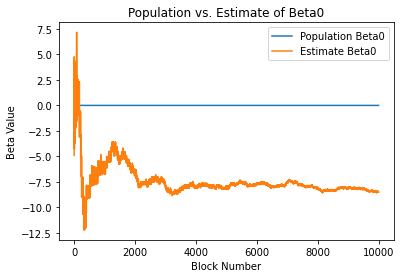

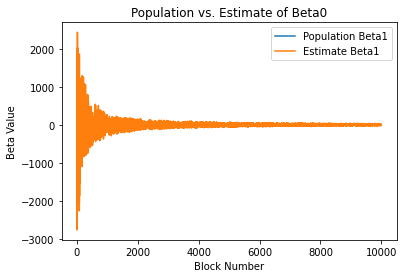

In [13]:
params_base["FP Mine Block Boundary Action"] = "TEST Mine Block Boundary Action"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

<AxesSubplot:>

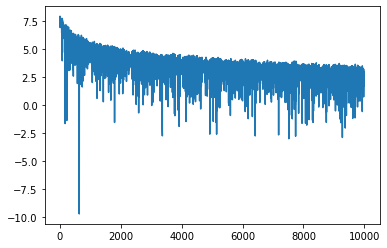

In [17]:
np.log(((df['Estimate Beta1'] - df['Population Beta1']).abs())).plot(kind='line')

<AxesSubplot:>

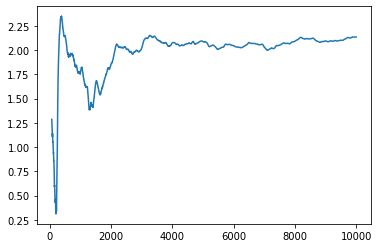

In [14]:
np.log(((df['Estimate Beta0'] - df['Population Beta0']).abs().rolling(60).mean())).plot(kind='line')

In [5]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,-4.911427,-2565.989084,0.0,0.001,1
1,4.864229,272.754983,0.0,0.001,2
2,4.817954,246.866307,0.0,0.001,3
3,4.736978,209.490166,0.0,0.001,4
4,4.693199,188.919606,0.0,0.001,5
...,...,...,...,...,...
9995,-2.736295,1.721188,0.0,0.001,9996
9996,-2.736297,1.719730,0.0,0.001,9997
9997,-2.798423,-29.712047,0.0,0.001,9998
9998,-2.736303,6.300191,0.0,0.001,9999


## Sanity Check C

Same difficulty but add in variations of difficulty in epochs

Placeholder has no control action options


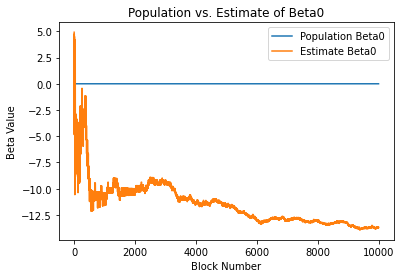

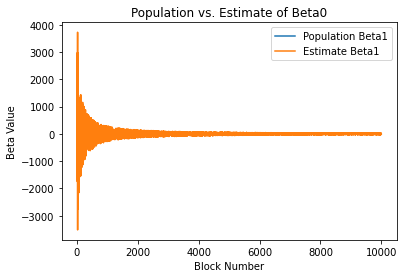

In [6]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = 6000


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [7]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.911488,2498.663411,0.0,0.001,1
1,-4.845131,-1456.635453,0.0,0.001,2
2,4.807790,2543.217396,0.0,0.001,3
3,4.745125,2569.696905,0.0,0.001,4
4,4.710479,2386.611900,0.0,0.001,5
...,...,...,...,...,...
9995,-13.702757,-17.489350,0.0,0.001,9996
9996,-13.640623,12.952015,0.0,0.001,9997
9997,-13.640626,19.921908,0.0,0.001,9998
9998,-13.640629,19.490908,0.0,0.001,9999


In [8]:
print(sum([x['Ratio'] for x in state["Historical Mined Ratio"]]) / len(state["Historical Mined Ratio"]))

0.3938309600750329


## Sanity Check D

Changing difficulty and V3 mining boundary action

Placeholder has no control action options


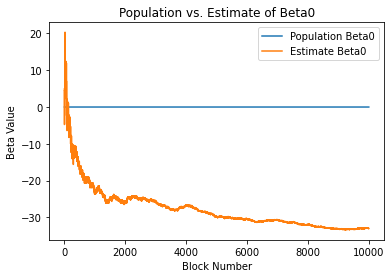

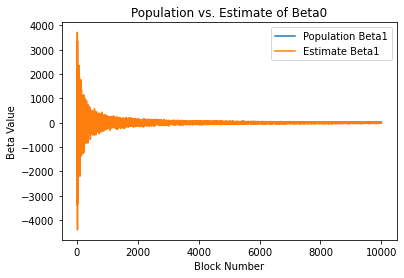

In [9]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [10]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.921281,1822.687518,0.0,0.001,1
1,4.863854,2226.955188,0.0,0.001,2
2,-4.761410,-2441.757961,0.0,0.001,3
3,4.762503,1155.161968,0.0,0.001,4
4,-4.566489,-3376.331293,0.0,0.001,5
...,...,...,...,...,...
9995,-32.928361,15.226791,0.0,0.001,9996
9996,-32.928363,17.938123,0.0,0.001,9997
9997,-32.928364,18.564570,0.0,0.001,9998
9998,-32.928365,19.124022,0.0,0.001,9999


## Sanity Check E

Placeholder has no control action options


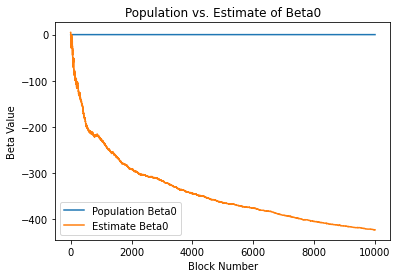

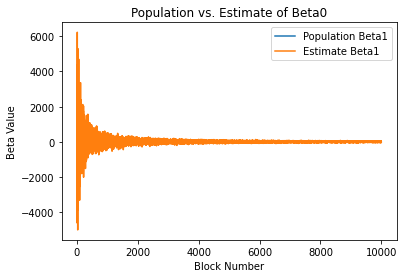

      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0           4.970635     -789.685150               0.0             0.001   
1           5.047176    -4596.250336               0.0             0.001   
2           5.139779     1640.357551               0.0             0.001   
3          -4.366044    -1417.866445               0.0             0.001   
4          -4.357270     -169.790060               0.0             0.001   
...              ...             ...               ...               ...   
9995     -423.330389       37.627440               0.0             0.001   
9996     -423.454654      -38.544796               0.0             0.001   
9997     -423.392523      -34.036786               0.0             0.001   
9998     -423.330400       41.334200               0.0             0.001   
9999     -423.392514       11.371902               0.0             0.001   

      Block Number  
0                1  
1                2  
2                3  
3  

In [11]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])
params["Difficulty Randomness Sigma"] = .25
for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(8000, 2000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)
print(df)